In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy import median
from numpy import average
import pandas as pd
from tabulate import tabulate
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn import tree
import graphviz

def avg(x):
    return average(x[10:])

In [2]:
results_sort=[{'Program.initialize': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9843, 8797, 8809, 8677, 8787, 8746, 8640, 8619, 8719, 8666, 8616, 8680, 8767, 8631, 8667, 8644, 8739, 8715, 8739, 8651, 8610, 8727, 8653, 8647, 8766, 8674, 8669, 8703, 8670, 8719, 8663, 8668, 8684, 8690, 8616, 8707, 8679, 8632, 8671, 8670, 8918, 8668, 8711, 8710, 8673, 8716, 8678, 8637, 8687, 8708]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9715, 8944, 8825, 8853, 8998, 8915, 8797, 8707, 8755, 8713, 8707, 8761, 8905, 8766, 8688, 8780, 8799, 8750, 8813, 8731, 8715, 8715, 8695, 8706, 8825, 8794, 8689, 8855, 8810, 8851, 8745, 8726, 8835, 8741, 8734, 8751, 8742, 8777, 8721, 8722, 8885, 8811, 8926, 8800, 8770, 8856, 8735, 8762, 8730, 8746]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9718, 8719, 8792, 8697, 8770, 8741, 8651, 8625, 8670, 8694, 8716, 8688, 8697, 8701, 8703, 8701, 8766, 8679, 8695, 8637, 8649, 8724, 8671, 8663, 8778, 8741, 8592, 8728, 8635, 8674, 8700, 8678, 8732, 8635, 8671, 8680, 8668, 8657, 8718, 8704, 8766, 8716, 8658, 8685, 8704, 8716, 8672, 8617, 8677, 8728]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9932, 9327, 9195, 9033, 9077, 9041, 8926, 8866, 8878, 8929, 8877, 8883, 8999, 8956, 8967, 9021, 8975, 8907, 8994, 8862, 8869, 9059, 8901, 8867, 9048, 8990, 8828, 8983, 8896, 8912, 8907, 8974, 8992, 8933, 8897, 8974, 8988, 8914, 8907, 9002, 9052, 8874, 8960, 8891, 9039, 8972, 8864, 8851, 8922, 8950]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9515, 8552, 8554, 8504, 8563, 8537, 8408, 8390, 8426, 8474, 8452, 8440, 8519, 8440, 8475, 8534, 8498, 8473, 8539, 8449, 8443, 8523, 8493, 8570, 8523, 8481, 8447, 8541, 8489, 8542, 8417, 8446, 8504, 8438, 8448, 8504, 8464, 8446, 8430, 8476, 8700, 8465, 8442, 8545, 8468, 8521, 8488, 8439, 8439, 8481]}, {'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [9785, 8804, 9030, 9067, 9040, 8951, 9122, 9173, 9071, 9195, 9142, 9210, 9130, 9076, 9060, 9118, 9138, 9041, 9024, 9163, 9154, 8979, 9198, 9262, 9064, 9060, 9127, 9255, 9002, 8900, 9004, 8958, 8959, 8969, 8956, 8941, 8940, 9015, 8972, 8954, 8972, 8927, 8982, 8973, 8995, 9068, 9036, 8988, 8942, 8926]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [10013, 8580, 8896, 8679, 8858, 8784, 8706, 8698, 8715, 8717, 8665, 8665, 8807, 8790, 8749, 8752, 8769, 8666, 8746, 8596, 8629, 8790, 8670, 8624, 8866, 8765, 8584, 8766, 8754, 8776, 8694, 8731, 8731, 8651, 8640, 8720, 8795, 8680, 8687, 8757, 8970, 8680, 8699, 8624, 8755, 8661, 8603, 8644, 8600, 8691]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9624, 8608, 8692, 8646, 8670, 8693, 8516, 8488, 8607, 8626, 8541, 8520, 8681, 8535, 8557, 8656, 8639, 8553, 8679, 8533, 8503, 8608, 8503, 8500, 8651, 8572, 8542, 8626, 8605, 8703, 8536, 8680, 8587, 8547, 8573, 8608, 8543, 8534, 8550, 8678, 8844, 8564, 8599, 8610, 8617, 8575, 8548, 8539, 8521, 8552]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9637, 8458, 8733, 8661, 8731, 8708, 8581, 8575, 8653, 8580, 8569, 8616, 8713, 8572, 8606, 8641, 8628, 8560, 8652, 8606, 8557, 8644, 8621, 8587, 8704, 8579, 8583, 8652, 8560, 8620, 8556, 8615, 8603, 8573, 8555, 8584, 8618, 8627, 8616, 8648, 8710, 8632, 8676, 8586, 8653, 8590, 8643, 8592, 8622, 8567]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9560, 8714, 8792, 8734, 8709, 8701, 8663, 8660, 8713, 8701, 8696, 8664, 8721, 8758, 8688, 8685, 8721, 8768, 8738, 8666, 8729, 8723, 8707, 8710, 8723, 8706, 8652, 8720, 8686, 8781, 8677, 8681, 8732, 8684, 8620, 8741, 8717, 8659, 8688, 8691, 8859, 8722, 8686, 8672, 8674, 8726, 8688, 8703, 8641, 8683]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9647, 8618, 8794, 8669, 8792, 8781, 8621, 8636, 8753, 8724, 8661, 8664, 8779, 8750, 8681, 8707, 8746, 8688, 8719, 8661, 8615, 8749, 8680, 8681, 8821, 8775, 8690, 8713, 8716, 8777, 8690, 8745, 8770, 8595, 8683, 8720, 8752, 8648, 8676, 8734, 8904, 8754, 8727, 8694, 8712, 8660, 8707, 8670, 8672, 8718]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9488, 8512, 8807, 8730, 8750, 8730, 8641, 8640, 8758, 8711, 8691, 8727, 8772, 8769, 8700, 8777, 8783, 8699, 8720, 8635, 8666, 8739, 8692, 8682, 8813, 8727, 8655, 8737, 8710, 8732, 8674, 8684, 8772, 8619, 8692, 8708, 8722, 8735, 8700, 8736, 8893, 8715, 8732, 8693, 8748, 8693, 8695, 8680, 8671, 8662]}, {'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9612, 8476, 8508, 8441, 8516, 8503, 8400, 8358, 8447, 8463, 8354, 8415, 8501, 8428, 8424, 8437, 8494, 8425, 8415, 8344, 8373, 8515, 8371, 8343, 8506, 8424, 8316, 8478, 8442, 8457, 8406, 8420, 8465, 8378, 8401, 8450, 8414, 8445, 8410, 8464, 8465, 8488, 8625, 8380, 8465, 8420, 8445, 8378, 8395, 8409]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9687, 8712, 8990, 8771, 8866, 8863, 8768, 8680, 8776, 8846, 8766, 8758, 8831, 8762, 8797, 8771, 8849, 8771, 8809, 8753, 8744, 8856, 8709, 8740, 8879, 8789, 8726, 8815, 8752, 8849, 8760, 8853, 8840, 8689, 8731, 8832, 8776, 8744, 8760, 8816, 8942, 8762, 8816, 8784, 8792, 8779, 8758, 8741, 8771, 8809]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9764, 8848, 8865, 8875, 8961, 8921, 8838, 8799, 8869, 8921, 8846, 8854, 8916, 8889, 8849, 8872, 8884, 8810, 8835, 8895, 8836, 8865, 8852, 8858, 8918, 8832, 8902, 8902, 8810, 8900, 8841, 8909, 8812, 8780, 8933, 8803, 8844, 8834, 8890, 8886, 8860, 8911, 8894, 8803, 8846, 8881, 8871, 8853, 8879, 8859]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9690, 8433, 8396, 8383, 8460, 8408, 8353, 8347, 8420, 8449, 8367, 8367, 8446, 8349, 8316, 8377, 8436, 8402, 8447, 8361, 8352, 8399, 8361, 8370, 8555, 8356, 8346, 8443, 8370, 8443, 8353, 8404, 8441, 8321, 8395, 8409, 8349, 8403, 8392, 8434, 8553, 8386, 8421, 8386, 8376, 8401, 8387, 8392, 8385, 8343]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9582, 8541, 8628, 8548, 8655, 8652, 8507, 8487, 8586, 8600, 8549, 8499, 8672, 8562, 8560, 8574, 8631, 8517, 8649, 8549, 8528, 8592, 8506, 8571, 8654, 8556, 8522, 8681, 8668, 8660, 8509, 8555, 8610, 8532, 8540, 8665, 8559, 8513, 8526, 8589, 8826, 8570, 8596, 8561, 8566, 8572, 8551, 8570, 8519, 8563]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9528, 8583, 8888, 8833, 8829, 8841, 8747, 8792, 8777, 8797, 8794, 8814, 8852, 8805, 8793, 8822, 8856, 8803, 8821, 8795, 8774, 8801, 8788, 8800, 8884, 8763, 8743, 8882, 8798, 8859, 8792, 8796, 8858, 8782, 8822, 8810, 8825, 8788, 8774, 8837, 8935, 8763, 8784, 8795, 8828, 8834, 8816, 8783, 8809, 8807]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9808, 8642, 8717, 8701, 8772, 8726, 8555, 8548, 8604, 8629, 8568, 8577, 8648, 8589, 8564, 8608, 8694, 8669, 8641, 8593, 8586, 8659, 8582, 8607, 8716, 8550, 8543, 8617, 8578, 8658, 8628, 8631, 8698, 8583, 8646, 8638, 8624, 8611, 8593, 8619, 8834, 8573, 8608, 8673, 8608, 8656, 8645, 8655, 8633, 8597]}, {'Program.main': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9809, 8790, 9044, 8854, 8918, 8985, 8787, 8753, 8836, 8838, 8803, 8740, 9017, 8855, 8826, 8860, 8924, 8832, 8997, 8823, 8835, 8914, 8812, 8867, 8989, 8846, 8765, 8886, 8839, 8922, 8784, 8849, 8922, 8880, 8784, 8916, 8833, 8809, 8803, 8831, 9221, 8890, 8889, 8873, 8858, 8848, 8867, 8829, 8822, 8833]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [9670, 8679, 8924, 8837, 8941, 8830, 8855, 8799, 8918, 8837, 8804, 8816, 8841, 8860, 8868, 8916, 8929, 8866, 8868, 8737, 8770, 8873, 8822, 8831, 8855, 8887, 8768, 8883, 8871, 8886, 8920, 8888, 8892, 8833, 8854, 8828, 8973, 8869, 8845, 8890, 8959, 8899, 8864, 8885, 8903, 8865, 8895, 8779, 8843, 8877]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9731, 8673, 8716, 8626, 8689, 8712, 8565, 8577, 8667, 8655, 8607, 8601, 8763, 8659, 8587, 8615, 8704, 8672, 8657, 8621, 8573, 8695, 8623, 8632, 8724, 8659, 8583, 8626, 8597, 8643, 8628, 8629, 8652, 8562, 8631, 8650, 8679, 8644, 8660, 8619, 8684, 8720, 8809, 8643, 8631, 8658, 8710, 8627, 8627, 8608]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9720, 8751, 8849, 8808, 8804, 8746, 8711, 8691, 8726, 8748, 8720, 8770, 8748, 8732, 8731, 8716, 8790, 8777, 8790, 8748, 8741, 8793, 8662, 8758, 8785, 8729, 8711, 8724, 8686, 8760, 8751, 8765, 8790, 8690, 8739, 8794, 8743, 8776, 8719, 8761, 8847, 8719, 8743, 8811, 8737, 8711, 8755, 8746, 8746, 8735]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9760, 8766, 8820, 8700, 8802, 8749, 8584, 8623, 8676, 8648, 8647, 8610, 8727, 8691, 8635, 8720, 8665, 8633, 8720, 8586, 8597, 8773, 8630, 8597, 8814, 8652, 8581, 8671, 8680, 8747, 8637, 8668, 8722, 8567, 8626, 8667, 8600, 8621, 8615, 8665, 8744, 8691, 8762, 8585, 8701, 8620, 8608, 8641, 8637, 8643]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [9527, 8460, 8669, 8617, 8667, 8604, 8446, 8467, 8579, 8573, 8519, 8583, 8633, 8537, 8529, 8565, 8631, 8565, 8668, 8551, 8539, 8669, 8545, 8527, 8740, 8534, 8473, 8611, 8589, 8681, 8521, 8571, 8606, 8540, 8510, 8640, 8529, 8534, 8542, 8550, 8869, 8627, 8584, 8533, 8558, 8567, 8590, 8519, 8504, 8514]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9647, 8736, 8960, 8882, 8960, 8964, 8806, 8763, 8781, 8922, 8845, 8882, 8958, 8794, 8840, 8908, 8922, 8824, 8956, 8827, 8764, 8955, 8793, 8807, 8972, 8855, 8781, 8886, 8871, 8899, 8831, 8883, 8906, 8783, 8811, 8841, 8810, 8797, 8821, 8848, 8958, 8876, 8880, 8802, 8896, 8837, 8837, 8815, 8822, 8836]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9764, 8699, 8869, 8900, 8861, 8779, 8767, 8767, 8828, 8792, 8755, 8799, 8910, 8912, 8902, 8837, 8853, 8900, 8956, 8832, 8827, 8791, 8769, 8792, 8873, 8905, 8814, 8849, 8866, 8927, 8767, 8791, 8967, 8858, 8851, 8888, 8921, 8834, 8842, 8847, 9044, 8931, 8792, 8876, 8837, 8891, 8867, 8881, 8789, 8857]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9530, 8106, 8036, 7949, 8107, 8029, 7925, 7883, 7983, 7965, 7948, 7937, 8052, 7968, 7961, 8012, 8052, 7953, 8041, 7871, 7895, 8084, 7935, 7908, 8078, 8007, 7895, 7997, 8013, 8042, 7974, 7984, 8027, 8005, 7974, 8006, 7949, 7932, 7937, 7960, 8161, 7965, 7979, 7951, 8015, 8031, 7931, 7894, 7935, 7976]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9873, 8947, 9550, 9390, 9553, 9408, 9267, 9291, 9424, 9422, 9349, 9270, 9459, 9340, 9356, 9458, 9426, 9367, 9480, 9280, 9289, 9481, 9295, 9273, 9479, 9369, 9272, 9429, 9414, 9435, 9350, 9410, 9463, 9286, 9299, 9401, 9383, 9309, 9296, 9422, 9545, 9372, 9435, 9354, 9403, 9410, 9369, 9363, 9311, 9359]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9650, 8479, 8697, 8623, 8640, 8608, 8538, 8525, 8579, 8605, 8555, 8557, 8656, 8549, 8547, 8588, 8598, 8548, 8614, 8587, 8550, 8594, 8524, 8556, 8674, 8604, 8496, 8666, 8557, 8600, 8542, 8587, 8590, 8567, 8581, 8603, 8526, 8553, 8597, 8594, 8887, 8530, 8571, 8618, 8565, 8573, 8577, 8524, 8543, 8515]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9666, 8395, 8631, 8521, 8586, 8604, 8470, 8425, 8463, 8570, 8435, 8443, 8593, 8481, 8476, 8501, 8515, 8439, 8547, 8541, 8475, 8511, 8464, 8420, 8583, 8464, 8397, 8484, 8444, 8489, 8464, 8466, 8518, 8424, 8454, 8478, 8450, 8476, 8464, 8502, 8598, 8415, 8588, 8470, 8527, 8445, 8485, 8467, 8471, 8486]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9744, 8547, 8641, 8589, 8570, 8568, 8483, 8522, 8557, 8514, 8537, 8516, 8615, 8538, 8542, 8563, 8575, 8596, 8625, 8554, 8556, 8637, 8549, 8553, 8731, 8523, 8510, 8591, 8497, 8597, 8548, 8548, 8615, 8516, 8503, 8646, 8536, 8587, 8552, 8541, 8570, 8573, 8633, 8627, 8535, 8592, 8551, 8573, 8590, 8525]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9557, 8556, 8690, 8554, 8647, 8607, 8491, 8492, 8569, 8557, 8506, 8528, 8633, 8591, 8546, 8553, 8586, 8534, 8592, 8493, 8501, 8640, 8499, 8497, 8680, 8526, 8472, 8594, 8535, 8620, 8510, 8548, 8575, 8524, 8547, 8565, 8553, 8555, 8529, 8560, 8711, 8515, 8556, 8542, 8548, 8545, 8533, 8513, 8521, 8522]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9789, 8306, 8607, 8462, 8557, 8555, 8521, 8433, 8500, 8524, 8482, 8486, 8562, 8451, 8508, 8502, 8529, 8526, 8592, 8483, 8438, 8588, 8517, 8469, 8641, 8502, 8445, 8576, 8495, 8527, 8514, 8535, 8552, 8464, 8514, 8560, 8468, 8475, 8487, 8536, 8652, 8522, 8552, 8543, 8523, 8553, 8493, 8489, 8489, 8539]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [9780, 8630, 8634, 8543, 8688, 8673, 8498, 8475, 8523, 8544, 8527, 8530, 8650, 8522, 8513, 8530, 8605, 8491, 8579, 8476, 8415, 8616, 8497, 8461, 8659, 8510, 8444, 8591, 8526, 8598, 8535, 8534, 8575, 8465, 8501, 8502, 8454, 8473, 8509, 8555, 8760, 8511, 8558, 8519, 8564, 8510, 8515, 8448, 8543, 8497]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9926, 8967, 9056, 8838, 9026, 8953, 8811, 8800, 8832, 8865, 8875, 8861, 9006, 8819, 8815, 8867, 8930, 8823, 8946, 8843, 8818, 8949, 8808, 8854, 9005, 8876, 8798, 8915, 8905, 8945, 8846, 8910, 8862, 8894, 8821, 8873, 8828, 8816, 8852, 8877, 9185, 8814, 8887, 8865, 8865, 8958, 8837, 8894, 8812, 8827]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [9654, 8477, 8525, 8493, 8541, 8480, 8404, 8402, 8560, 8480, 8497, 8451, 8540, 8470, 8493, 8512, 8546, 8509, 8498, 8467, 8477, 8483, 8467, 8494, 8544, 8477, 8435, 8523, 8438, 8501, 8477, 8518, 8466, 8465, 8448, 8509, 8480, 8462, 8479, 8484, 8620, 8478, 8490, 8495, 8485, 8516, 8479, 8495, 8446, 8462]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9542, 8415, 8536, 8436, 8496, 8472, 8366, 8365, 8434, 8417, 8343, 8351, 8471, 8402, 8427, 8440, 8416, 8356, 8461, 8356, 8353, 8474, 8373, 8349, 8529, 8388, 8322, 8422, 8379, 8433, 8419, 8410, 8421, 8316, 8351, 8422, 8354, 8380, 8390, 8421, 8583, 8401, 8431, 8406, 8483, 8442, 8387, 8350, 8382, 8374]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'times': [9545, 8606, 8655, 8586, 8592, 8591, 8431, 8457, 8552, 8625, 8505, 8500, 8680, 8583, 8518, 8569, 8594, 8552, 8614, 8529, 8521, 8662, 8476, 8534, 8686, 8526, 8517, 8557, 8546, 8613, 8546, 8570, 8589, 8496, 8478, 8563, 8550, 8523, 8493, 8540, 8751, 8511, 8587, 8559, 8530, 8547, 8488, 8543, 8543, 8563]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9757, 8582, 8735, 8707, 8743, 8734, 8587, 8573, 8611, 8679, 8620, 8571, 8749, 8669, 8674, 8694, 8702, 8579, 8683, 8611, 8583, 8664, 8574, 8607, 8719, 8652, 8574, 8699, 8633, 8658, 8634, 8661, 8680, 8638, 8628, 8652, 8652, 8642, 8658, 8634, 8709, 8653, 8724, 8556, 8714, 8700, 8612, 8609, 8584, 8687]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9752, 8610, 8873, 8769, 8796, 8777, 8654, 8619, 8694, 8694, 8659, 8700, 8813, 8651, 8672, 8687, 8771, 8723, 8826, 8734, 8664, 8788, 8655, 8709, 8867, 8673, 8636, 8726, 8670, 8775, 8687, 8714, 8730, 8672, 8658, 8762, 8647, 8689, 8683, 8743, 8956, 8687, 8754, 8783, 8714, 8685, 8694, 8643, 8683, 8678]}, {'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9637, 8633, 8595, 8485, 8588, 8581, 8403, 8417, 8469, 8504, 8438, 8504, 8623, 8517, 8467, 8573, 8508, 8447, 8596, 8470, 8429, 8602, 8423, 8425, 8662, 8506, 8427, 8563, 8522, 8667, 8419, 8516, 8556, 8469, 8450, 8533, 8489, 8464, 8451, 8481, 8668, 8505, 8520, 8487, 8517, 8522, 8475, 8448, 8478, 8462]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9444, 7796, 7762, 7695, 7726, 7663, 7603, 7592, 7628, 7651, 7638, 7637, 7683, 7723, 7633, 7667, 7728, 7642, 7642, 7643, 7636, 7696, 7620, 7697, 7696, 7635, 7606, 7636, 7611, 7717, 7663, 7642, 7660, 7620, 7658, 7654, 7673, 7669, 7638, 7669, 7739, 7652, 7669, 7661, 7677, 7672, 7617, 7662, 7625, 7679]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [10083, 8934, 8994, 8929, 9018, 8987, 8803, 8836, 8983, 8933, 8848, 8885, 9112, 9022, 8981, 8977, 8993, 8938, 8978, 8920, 8835, 9046, 8888, 8892, 9022, 8973, 8870, 9002, 8943, 8984, 8907, 9021, 8967, 9007, 8954, 9056, 9008, 8959, 8944, 9017, 9285, 9025, 8941, 8962, 9021, 9090, 8981, 8938, 8961, 9050]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9917, 8653, 8760, 8658, 8693, 8711, 8645, 8570, 8648, 8707, 8619, 8605, 8717, 8585, 8588, 8594, 8678, 8685, 8656, 8610, 8523, 8670, 8629, 8590, 8720, 8626, 8551, 8603, 8578, 8674, 8629, 8715, 8639, 8577, 8657, 8645, 8649, 8654, 8669, 8624, 8943, 8650, 8648, 8641, 8606, 8642, 8658, 8575, 8586, 8608]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9609, 8731, 8899, 8805, 8940, 8905, 8751, 8757, 8788, 8770, 8730, 8749, 8879, 8798, 8734, 8762, 8816, 8785, 8829, 8740, 8684, 8800, 8741, 8687, 8837, 8790, 8705, 8871, 8805, 8848, 8735, 8764, 8767, 8726, 8766, 8793, 8721, 8747, 8731, 8778, 8866, 8754, 8769, 8749, 8818, 8751, 8712, 8719, 8739, 8793]}, {'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'times': [9562, 8669, 8814, 8806, 8830, 8777, 8693, 8663, 8764, 8772, 8752, 8715, 8770, 8758, 8752, 8763, 8788, 8684, 8767, 8692, 8725, 8782, 8786, 8743, 8879, 8821, 8725, 8860, 8807, 8695, 8838, 8816, 8744, 8774, 8820, 8759, 8814, 8794, 8771, 8875, 8819, 8813, 8838, 8745, 8801, 8802, 8722, 8751, 8823, 8808]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9841, 8767, 8860, 8798, 8855, 8922, 8794, 8781, 8871, 8828, 8827, 8815, 8875, 8785, 8811, 8815, 8871, 8798, 8880, 8783, 8758, 8845, 8815, 8851, 8875, 8794, 8759, 8810, 8859, 8898, 8832, 8804, 8833, 8758, 8810, 8852, 8849, 8816, 8889, 8854, 9164, 8790, 8839, 8802, 8812, 8834, 8800, 8773, 8850, 8788]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9768, 8717, 8863, 8783, 8905, 8782, 8729, 8715, 8790, 8816, 8729, 8762, 8778, 8816, 8747, 8768, 8775, 8779, 8846, 8762, 8746, 8819, 8696, 8756, 8865, 8811, 8747, 8829, 8806, 8800, 8736, 8780, 8818, 8805, 8768, 8784, 8740, 8704, 8767, 8802, 8997, 8740, 8826, 8743, 8782, 8778, 8746, 8756, 8755, 8761]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9720, 8602, 8745, 8702, 8770, 8811, 8652, 8656, 8751, 8719, 8703, 8683, 8793, 8696, 8677, 8729, 8733, 8679, 8760, 8672, 8663, 8736, 8718, 8648, 8792, 8684, 8609, 8803, 8748, 8794, 8682, 8695, 8722, 8663, 8703, 8737, 8699, 8681, 8655, 8731, 8925, 8744, 8719, 8691, 8694, 8777, 8675, 8705, 8712, 8727]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9462, 8606, 8731, 8649, 8705, 8705, 8575, 8556, 8605, 8597, 8595, 8596, 8680, 8602, 8565, 8607, 8718, 8678, 8742, 8619, 8614, 8723, 8604, 8654, 8713, 8628, 8569, 8631, 8626, 8665, 8641, 8641, 8685, 8593, 8628, 8683, 8672, 8600, 8688, 8617, 8795, 8614, 8712, 8717, 8642, 8638, 8673, 8632, 8632, 8634]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9713, 8819, 8859, 8826, 8854, 8802, 8748, 8762, 8856, 8822, 8780, 8769, 8864, 8797, 8767, 8806, 8849, 8854, 8871, 8810, 8818, 8893, 8770, 8816, 8940, 8813, 8794, 8796, 8751, 8771, 8793, 8816, 8816, 8753, 8786, 8828, 8855, 8764, 8826, 8836, 8879, 8865, 8804, 8847, 8825, 8996, 8761, 8823, 8807, 8847]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9726, 8679, 8902, 8746, 8823, 8830, 8710, 8683, 8748, 8747, 8713, 8697, 8864, 8746, 8756, 8790, 8816, 8721, 8747, 8645, 8616, 8833, 8717, 8726, 8887, 8750, 8598, 8753, 8732, 8753, 8766, 8781, 8828, 8587, 8753, 8802, 8750, 8689, 8730, 8815, 8960, 8717, 8816, 8737, 8763, 8655, 8655, 8686, 8722, 8711]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9613, 8561, 8621, 8542, 8581, 8594, 8461, 8416, 8495, 8471, 8465, 8446, 8556, 8540, 8497, 8535, 8504, 8528, 8561, 8447, 8472, 8563, 8472, 8448, 8603, 8539, 8395, 8535, 8502, 8512, 8455, 8470, 8556, 8427, 8467, 8515, 8495, 8537, 8471, 8505, 8626, 8531, 8558, 8547, 8504, 8540, 8499, 8430, 8497, 8507]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9727, 8391, 8536, 8446, 8467, 8453, 8380, 8409, 8455, 8424, 8453, 8411, 8505, 8449, 8420, 8480, 8508, 8450, 8552, 8494, 8438, 8511, 8401, 8471, 8534, 8474, 8389, 8467, 8495, 8492, 8445, 8476, 8542, 8415, 8423, 8552, 8485, 8412, 8428, 8476, 8819, 8430, 8490, 8489, 8499, 8480, 8477, 8445, 8470, 8464]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [9618, 8616, 8807, 8706, 8738, 8745, 8676, 8676, 8698, 8708, 8668, 8651, 8769, 8703, 8634, 8707, 8681, 8653, 8740, 8643, 8609, 8763, 8651, 8624, 8789, 8668, 8649, 8750, 8705, 8760, 8693, 8688, 8747, 8601, 8673, 8709, 8673, 8689, 8712, 8732, 8727, 8734, 8750, 8691, 8742, 8687, 8688, 8714, 8689, 8695]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [9704, 8544, 8879, 8782, 8849, 8784, 8663, 8702, 8757, 8787, 8707, 8715, 8800, 8810, 8753, 8815, 8848, 8836, 8881, 8716, 8718, 8830, 8714, 8752, 8859, 8785, 8710, 8783, 8830, 8810, 8778, 8745, 8788, 8818, 8774, 8834, 8769, 8778, 8755, 8782, 8877, 8812, 9053, 8761, 8795, 8872, 8798, 8734, 8756, 8775]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [9632, 8609, 8764, 8599, 8805, 8779, 8632, 8626, 8672, 8697, 8626, 8661, 8793, 8643, 8677, 8653, 8690, 8665, 8769, 8682, 8664, 8760, 8671, 8581, 8848, 8718, 8654, 8780, 8720, 8737, 8723, 8733, 8744, 8662, 8704, 8734, 8703, 8682, 8713, 8773, 8868, 8686, 8689, 8734, 8723, 8702, 8660, 8677, 8755, 8634]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9848, 8666, 8731, 8697, 8728, 8745, 8603, 8587, 8678, 8651, 8619, 8649, 8748, 8674, 8682, 8677, 8694, 8683, 8719, 8691, 8638, 8654, 8624, 8711, 8761, 8689, 8611, 8702, 8667, 8741, 8691, 8630, 8756, 8665, 8590, 8678, 8668, 8600, 8627, 8673, 8766, 8724, 8800, 8647, 8644, 8694, 8661, 8694, 8639, 8650]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9641, 8644, 8665, 8686, 8728, 8684, 8598, 8580, 8590, 8583, 8621, 8605, 8642, 8619, 8573, 8590, 8681, 8598, 8691, 8608, 8588, 8625, 8590, 8611, 8695, 8604, 8584, 8604, 8576, 8664, 8617, 8614, 8648, 8571, 8607, 8624, 8626, 8618, 8621, 8613, 8741, 8618, 8595, 8634, 8613, 8623, 8662, 8617, 8640, 8614]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9672, 8703, 8821, 8692, 8785, 8774, 8645, 8661, 8753, 8690, 8705, 8677, 8775, 8667, 8680, 8809, 8705, 8681, 8766, 8690, 8643, 8762, 8620, 8660, 8820, 8697, 8628, 8749, 8720, 8709, 8678, 8669, 8764, 8665, 8637, 8739, 8722, 8664, 8638, 8712, 8857, 8734, 8739, 8730, 8766, 8718, 8692, 8678, 8658, 8724]}, {'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [9861, 8632, 8873, 8711, 8837, 8760, 8597, 8594, 8673, 8720, 8633, 8655, 8768, 8667, 8671, 8695, 8725, 8625, 8685, 8621, 8621, 8726, 8654, 8674, 8810, 8640, 8594, 8682, 8660, 8751, 8671, 8694, 8728, 8616, 8616, 8648, 8642, 8629, 8633, 8700, 8895, 8658, 8704, 8627, 8672, 8672, 8637, 8690, 8635, 8653]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9584, 8613, 8674, 8599, 8696, 8704, 8540, 8547, 8568, 8573, 8625, 8563, 8726, 8678, 8568, 8580, 8626, 8512, 8597, 8521, 8517, 8630, 8535, 8508, 8670, 8579, 8469, 8635, 8574, 8627, 8587, 8538, 8570, 8582, 8560, 8566, 8593, 8587, 8626, 8628, 8812, 8548, 8585, 8514, 8610, 8587, 8527, 8487, 8573, 8604]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [9685, 8605, 8727, 8624, 8707, 8717, 8591, 8599, 8636, 8680, 8624, 8596, 8722, 8643, 8668, 8653, 8723, 8624, 8679, 8627, 8602, 8690, 8601, 8577, 8771, 8634, 8547, 8681, 8583, 8649, 8613, 8685, 8683, 8641, 8610, 8672, 8672, 8632, 8622, 8684, 8696, 8672, 8838, 8635, 8700, 8718, 8660, 8611, 8662, 8636]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9783, 8701, 8745, 8693, 8736, 8723, 8587, 8632, 8672, 8662, 8658, 8588, 8774, 8629, 8614, 8711, 8729, 8680, 8747, 8663, 8672, 8744, 8662, 8634, 8778, 8714, 8588, 8705, 8622, 8710, 8665, 8673, 8730, 8644, 8609, 8729, 8611, 8669, 8619, 8672, 8935, 8641, 8685, 8673, 8707, 8676, 8645, 8637, 8628, 8669]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9785, 8842, 9086, 8823, 8924, 9025, 8802, 8760, 8927, 8963, 8849, 8836, 9015, 8865, 8953, 8912, 8998, 8891, 9002, 8779, 8783, 9017, 8805, 8789, 9078, 8850, 8738, 8958, 8883, 8945, 8793, 8905, 8943, 8782, 8781, 8937, 8846, 8803, 8753, 8951, 9130, 8818, 8913, 8859, 8876, 8927, 8875, 8757, 8795, 8865]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9775, 9003, 9055, 9035, 9072, 9076, 8932, 8944, 8993, 9054, 8977, 8981, 9059, 9013, 8964, 9003, 9016, 8996, 9046, 8987, 8949, 9023, 8964, 8968, 9059, 8983, 8944, 9053, 8919, 8994, 8998, 9028, 9039, 8936, 8998, 8953, 8995, 9000, 8999, 9028, 9149, 8942, 8994, 8981, 9018, 8971, 8957, 8972, 8989, 8978]}, {'Program.main': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'times': [9742, 8615, 8790, 8710, 8827, 8783, 8641, 8629, 8806, 8773, 8703, 8717, 8888, 8781, 8731, 8800, 8788, 8685, 8799, 8714, 8666, 8812, 8722, 8692, 8877, 8792, 8641, 8838, 8780, 8818, 8713, 8754, 8784, 8695, 8677, 8809, 8750, 8683, 8753, 8820, 8969, 8750, 8718, 8743, 8834, 8774, 8690, 8672, 8666, 8792]}, {'Program.main': True, 'Program.initialize': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9864, 8482, 8580, 8543, 8542, 8601, 8423, 8357, 8435, 8469, 8430, 8516, 8557, 8424, 8428, 8428, 8502, 8477, 8517, 8435, 8400, 8513, 8383, 8413, 8612, 8429, 8420, 8459, 8441, 8536, 8438, 8448, 8519, 8415, 8465, 8466, 8444, 8438, 8446, 8530, 8590, 8443, 8541, 8448, 8471, 8453, 8512, 8438, 8436, 8454]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [9641, 8116, 8167, 8066, 8145, 8117, 7979, 7989, 8049, 8076, 8033, 8044, 8105, 8014, 8044, 8071, 8166, 8002, 8138, 8082, 8024, 8166, 8013, 8057, 8166, 8042, 8040, 8029, 7996, 8061, 8058, 8041, 8086, 7970, 8019, 8121, 8029, 8060, 8022, 8031, 8252, 8060, 8112, 8076, 8051, 8057, 8084, 8064, 8023, 8043]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [9579, 8430, 8595, 8451, 8481, 8565, 8402, 8346, 8464, 8491, 8430, 8424, 8520, 8413, 8417, 8468, 8504, 8500, 8517, 8442, 8410, 8536, 8404, 8500, 8578, 8469, 8448, 8480, 8443, 8493, 8447, 8536, 8533, 8386, 8426, 8553, 8514, 8430, 8394, 8458, 8556, 8483, 8493, 8496, 8465, 8451, 8512, 8442, 8499, 8452]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9604, 8738, 8691, 8542, 8708, 8652, 8510, 8504, 8633, 8587, 8556, 8564, 8697, 8532, 8544, 8609, 8639, 8581, 8652, 8567, 8535, 8666, 8598, 8592, 8786, 8601, 8495, 8643, 8655, 8665, 8570, 8541, 8616, 8601, 8548, 8596, 8542, 8626, 8650, 8650, 8980, 8618, 8631, 8585, 8691, 8606, 8611, 8606, 8598, 8630]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9550, 8743, 8821, 8898, 8719, 8728, 8712, 8723, 8743, 8776, 8750, 8751, 8803, 8770, 8746, 8720, 8799, 8830, 8754, 8774, 8860, 8758, 8730, 8821, 8807, 8724, 8761, 8745, 8665, 8789, 8778, 8722, 8761, 8671, 8737, 8780, 8774, 8765, 8762, 8700, 8845, 8763, 8796, 8826, 8726, 8712, 8816, 8833, 8759, 8707]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9732, 8697, 8960, 8948, 8989, 8991, 8868, 8857, 9071, 8962, 8878, 8875, 8965, 8947, 8939, 8893, 8957, 8893, 8943, 8917, 8912, 8944, 8850, 8885, 8979, 8906, 8840, 8917, 8925, 8984, 8863, 8895, 8976, 8881, 8894, 8901, 8922, 8870, 8893, 8914, 9076, 8909, 8890, 8890, 8908, 8882, 8898, 8893, 8888, 8866]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9862, 8574, 8837, 8683, 8667, 8689, 8601, 8535, 8647, 8591, 8576, 8593, 8671, 8632, 8644, 8643, 8651, 8651, 8714, 8587, 8622, 8669, 8600, 8621, 8752, 8631, 8551, 8648, 8693, 8766, 8609, 8625, 8693, 8611, 8633, 8679, 8631, 8592, 8613, 8655, 8863, 8736, 8665, 8716, 8616, 8636, 8702, 8592, 8606, 8620]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9609, 8487, 8601, 8437, 8552, 8530, 8340, 8338, 8436, 8402, 8338, 8388, 8505, 8420, 8391, 8469, 8461, 8449, 8446, 8374, 8330, 8484, 8395, 8302, 8558, 8432, 8276, 8496, 8396, 8512, 8354, 8405, 8454, 8369, 8377, 8450, 8396, 8343, 8389, 8456, 8522, 8420, 8384, 8408, 8456, 8435, 8390, 8364, 8361, 8330]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9728, 9000, 8975, 8834, 8910, 8897, 8821, 8813, 8809, 8819, 8806, 8836, 8897, 8844, 8820, 8796, 8855, 8813, 8837, 8833, 8803, 8859, 8827, 8813, 8870, 8772, 8858, 8897, 8820, 8845, 8859, 8817, 8802, 8760, 8832, 8827, 8751, 8862, 8890, 8862, 8834, 8805, 8961, 8791, 8854, 8833, 8846, 8820, 8886, 8812]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9451, 8417, 8508, 8479, 8584, 8525, 8404, 8366, 8409, 8414, 8419, 8396, 8513, 8420, 8459, 8469, 8487, 8388, 8444, 8424, 8371, 8431, 8383, 8390, 8554, 8439, 8371, 8445, 8403, 8459, 8408, 8410, 8433, 8458, 8421, 8416, 8432, 8415, 8439, 8429, 8555, 8410, 8390, 8427, 8448, 8459, 8422, 8435, 8389, 8418]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9812, 8679, 8826, 8920, 8792, 8709, 8827, 8771, 8753, 8756, 8782, 8786, 8764, 8770, 8707, 8713, 8816, 8705, 8725, 8811, 8801, 8743, 8781, 8845, 8743, 8756, 8842, 8800, 8678, 8738, 8836, 8771, 8728, 8718, 8823, 8701, 8762, 8798, 8838, 8805, 8707, 8752, 8948, 8692, 8793, 8766, 8690, 8805, 8827, 8738]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9708, 8839, 9099, 8939, 9083, 9038, 8922, 8940, 9007, 9028, 8996, 8994, 9121, 8963, 8946, 8999, 9089, 9026, 9028, 8886, 8845, 9064, 8927, 8879, 9069, 8911, 8859, 9042, 8937, 8968, 8955, 9016, 8962, 9015, 8966, 8953, 8901, 8906, 8928, 8964, 9012, 9014, 8947, 8933, 8943, 9033, 8850, 8868, 8978, 9132]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9562, 8451, 8730, 8598, 8723, 8665, 8608, 8542, 8695, 8647, 8592, 8648, 8695, 8626, 8591, 8651, 8642, 8677, 8633, 8578, 8537, 8667, 8646, 8553, 8713, 8679, 8533, 8701, 8625, 8653, 8666, 8646, 8651, 8551, 8632, 8625, 8601, 8613, 8612, 8715, 8657, 8700, 8688, 8672, 8728, 8676, 8658, 8610, 8638, 8623]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9801, 8504, 8665, 8685, 8600, 8617, 8505, 8522, 8594, 8609, 8560, 8551, 8617, 8601, 8562, 8585, 8553, 8586, 8616, 8507, 8471, 8650, 8516, 8479, 8653, 8572, 8462, 8669, 8573, 8609, 8561, 8590, 8660, 8533, 8510, 8563, 8566, 8575, 8507, 8529, 8697, 8516, 8638, 8545, 8548, 8554, 8554, 8505, 8525, 8565]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9697, 8007, 8136, 8019, 8057, 8078, 7971, 7910, 7991, 7985, 7948, 7971, 8070, 8015, 7969, 8004, 8010, 7947, 8029, 7939, 7903, 8019, 7918, 7900, 8080, 8011, 7902, 7991, 7972, 8073, 7915, 7980, 7993, 7955, 7907, 8000, 7994, 7968, 8019, 8047, 8198, 8027, 7967, 7959, 7968, 8019, 7888, 7925, 7951, 7988]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9544, 8566, 8782, 8628, 8738, 8784, 8594, 8569, 8661, 8657, 8607, 8587, 8802, 8598, 8603, 8710, 8679, 8608, 8734, 8619, 8578, 8714, 8628, 8627, 8753, 8601, 8577, 8694, 8676, 8718, 8616, 8637, 8671, 8601, 8603, 8698, 8629, 8695, 8580, 8612, 8933, 8629, 8638, 8655, 8663, 8684, 8629, 8595, 8589, 8621]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9658, 8401, 8539, 8502, 8569, 8530, 8389, 8385, 8451, 8431, 8384, 8396, 8519, 8464, 8404, 8449, 8444, 8469, 8482, 8419, 8439, 8498, 8402, 8415, 8548, 8451, 8388, 8426, 8458, 8488, 8439, 8419, 8467, 8350, 8426, 8449, 8410, 8463, 8416, 8481, 8755, 8433, 8438, 8421, 8476, 8456, 8357, 8446, 8437, 8417]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9587, 8741, 9068, 8990, 8970, 9015, 8867, 8804, 8860, 8845, 8885, 8866, 9003, 8971, 8914, 8945, 8928, 8883, 8988, 8847, 8841, 8968, 8870, 8834, 9013, 8893, 8869, 8920, 8890, 8981, 8868, 8848, 9013, 8866, 8863, 8905, 8812, 8912, 8870, 8908, 8996, 8874, 8920, 8949, 8892, 8898, 8900, 8836, 8863, 8936]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9681, 8701, 8833, 8809, 8826, 8762, 8680, 8685, 8736, 8777, 8671, 8743, 8793, 8784, 8681, 8761, 8755, 8726, 8765, 8721, 8700, 8736, 8733, 8751, 8803, 8754, 8703, 8772, 8699, 8786, 8704, 8748, 8809, 8715, 8734, 8796, 8726, 8737, 8763, 8780, 8934, 8747, 8734, 8729, 8728, 8751, 8711, 8728, 8745, 8722]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9662, 8782, 8879, 8800, 8866, 8786, 8715, 8700, 8707, 8720, 8718, 8692, 8819, 8772, 8738, 8734, 8772, 8755, 8744, 8743, 8671, 8745, 8727, 8711, 8799, 8726, 8753, 8767, 8789, 8751, 8738, 8774, 8776, 8689, 8752, 8738, 8763, 8754, 8759, 8729, 8751, 8878, 8698, 8751, 8751, 8766, 8756, 8777, 8746, 8772]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9648, 8677, 8897, 8781, 8847, 8906, 8697, 8636, 8790, 8828, 8767, 8699, 8894, 8811, 8748, 8842, 8855, 8813, 8882, 8755, 8737, 8867, 8727, 8748, 8854, 8764, 8765, 8801, 8796, 8877, 8715, 8776, 8889, 8721, 8697, 8822, 8802, 8719, 8727, 8785, 9122, 8772, 8796, 8836, 8783, 8840, 8737, 8735, 8746, 8795]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9896, 8939, 8950, 8950, 8867, 8918, 8763, 8736, 8822, 8842, 8782, 8780, 8889, 8831, 8821, 8832, 8861, 8872, 8923, 8939, 8897, 8881, 8762, 8958, 8935, 8827, 8849, 8853, 8861, 8947, 8769, 8815, 8825, 8803, 8777, 8885, 8861, 8815, 8823, 8839, 8932, 8886, 8831, 8871, 8780, 8863, 8870, 8885, 8787, 8826]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9865, 8719, 8735, 8819, 8806, 8793, 8721, 8685, 8746, 8831, 8745, 8812, 8830, 8792, 8777, 8733, 8882, 8781, 8798, 8754, 8772, 8755, 8749, 8767, 8826, 8768, 8811, 8799, 8671, 8790, 8732, 8764, 8764, 8758, 8779, 8733, 8802, 8780, 8813, 8780, 8886, 8811, 8786, 8876, 8924, 8845, 8876, 8765, 8739, 8763]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9747, 8829, 8866, 8799, 8869, 8875, 8728, 8734, 8823, 8827, 8786, 8746, 8913, 8845, 8792, 8833, 8884, 8793, 8868, 8788, 8808, 8855, 8772, 8801, 8926, 8853, 8759, 8867, 8830, 8876, 8788, 8777, 8847, 8778, 8764, 8852, 8810, 8779, 8788, 8874, 8885, 8836, 8908, 8785, 8832, 8843, 8815, 8781, 8802, 8797]}, {'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9670, 8734, 8796, 8774, 8767, 8734, 8649, 8638, 8702, 8740, 8661, 8717, 8771, 8728, 8680, 8637, 8767, 8698, 8684, 8708, 8674, 8713, 8650, 8661, 8777, 8710, 8633, 8728, 8722, 8775, 8701, 8675, 8727, 8651, 8721, 8676, 8726, 8698, 8677, 8645, 8878, 8715, 8730, 8758, 8692, 8704, 8674, 8664, 8704, 8682]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9708, 8582, 8711, 8663, 8727, 8742, 8515, 8515, 8576, 8611, 8529, 8565, 8692, 8575, 8577, 8664, 8657, 8566, 8777, 8525, 8525, 8717, 8595, 8515, 8790, 8608, 8517, 8667, 8617, 8682, 8582, 8614, 8614, 8583, 8621, 8639, 8562, 8549, 8560, 8657, 8724, 8607, 8721, 8612, 8688, 8633, 8586, 8530, 8608, 8607]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9664, 8475, 8736, 8673, 8717, 8679, 8642, 8597, 8737, 8662, 8649, 8716, 8698, 8682, 8695, 8693, 8739, 8731, 8774, 8669, 8704, 8704, 8676, 8656, 8791, 8713, 8619, 8777, 8737, 8779, 8763, 8703, 8735, 8714, 8685, 8699, 8714, 8731, 8680, 8683, 8871, 8726, 8723, 8678, 8687, 8714, 8673, 8658, 8662, 8680]}, {'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9920, 8788, 8876, 8753, 8882, 8827, 8692, 8762, 8836, 8829, 8730, 8726, 8874, 8792, 8818, 8829, 8831, 8769, 8848, 8750, 8763, 8839, 8702, 8711, 8868, 8872, 8707, 8848, 8793, 8886, 8708, 8766, 8764, 8814, 8726, 8785, 8740, 8715, 8774, 8798, 8991, 8749, 8770, 8755, 8838, 8811, 8770, 8757, 8767, 8781]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9737, 8212, 8353, 8280, 8272, 8302, 8157, 8159, 8260, 8238, 8166, 8200, 8300, 8250, 8236, 8238, 8261, 8240, 8288, 8287, 8266, 8301, 8225, 8204, 8338, 8219, 8210, 8238, 8279, 8315, 8208, 8204, 8280, 8206, 8212, 8323, 8200, 8247, 8214, 8203, 8336, 8276, 8381, 8356, 8245, 8256, 8273, 8325, 8255, 8244]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9767, 8543, 8748, 8659, 8667, 8715, 8537, 8568, 8679, 8721, 8562, 8600, 8793, 8594, 8597, 8660, 8722, 8554, 8659, 8605, 8613, 8724, 8589, 8602, 8743, 8631, 8563, 8628, 8605, 8724, 8637, 8628, 8659, 8583, 8589, 8626, 8620, 8609, 8601, 8645, 8891, 8625, 8641, 8593, 8674, 8662, 8609, 8601, 8595, 8600]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9802, 8626, 8825, 8750, 8813, 8798, 8695, 8661, 8726, 8796, 8742, 8720, 8802, 8770, 8741, 8739, 8804, 8759, 8843, 8708, 8668, 8784, 8737, 8735, 8826, 8736, 8715, 8799, 8751, 8763, 8709, 8758, 8773, 8744, 8712, 8736, 8822, 8780, 8747, 8737, 8912, 8770, 8789, 8752, 8751, 8774, 8778, 8685, 8718, 8749]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9591, 8665, 8876, 8795, 8819, 8749, 8654, 8722, 8623, 8568, 8493, 8475, 8556, 8591, 8563, 8537, 8578, 8558, 8616, 8576, 8556, 8511, 8484, 8567, 8616, 8575, 8497, 8572, 8527, 8607, 8509, 8503, 8568, 8538, 8498, 8577, 8551, 8518, 8536, 8586, 8691, 8561, 8536, 8565, 8551, 8594, 8525, 8584, 8536, 8553]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9652, 8577, 9056, 8955, 8999, 8989, 8885, 8925, 9013, 9018, 8929, 8953, 9065, 8956, 8916, 9003, 9011, 9011, 8999, 8939, 8959, 9003, 8910, 8942, 9078, 8970, 8914, 8946, 8948, 9002, 8994, 8994, 8997, 8920, 8913, 8945, 8994, 8935, 8962, 8994, 9256, 8987, 8986, 8993, 9028, 8952, 9034, 8940, 8917, 8974]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9411, 8965, 8847, 8852, 8880, 8832, 8737, 8711, 8789, 8829, 8845, 8795, 8873, 8746, 8735, 8834, 8801, 8841, 8858, 8809, 8736, 8759, 8799, 8749, 8926, 8731, 8749, 8849, 8794, 8890, 8749, 8775, 8873, 8766, 8805, 8787, 8758, 8756, 8780, 8772, 8972, 8739, 8822, 8835, 8784, 8822, 8765, 8750, 8749, 8738]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [9595, 8579, 8629, 8634, 8597, 8639, 8491, 8560, 8585, 8582, 8536, 8529, 8595, 8620, 8570, 8609, 8627, 8508, 8573, 8548, 8526, 8614, 8508, 8537, 8578, 8614, 8514, 8558, 8493, 8569, 8539, 8557, 8614, 8489, 8555, 8574, 8566, 8550, 8543, 8585, 8759, 8544, 8489, 8540, 8585, 8600, 8513, 8579, 8540, 8556]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'times': [9614, 8524, 8590, 8571, 8535, 8616, 8455, 8516, 8568, 8569, 8519, 8553, 8704, 8516, 8505, 8525, 8618, 8536, 8494, 8553, 8502, 8526, 8491, 8476, 8536, 8462, 8425, 8449, 8414, 8561, 8456, 8455, 8484, 8313, 8463, 8466, 8437, 8547, 8511, 8473, 8705, 8433, 8516, 8501, 8449, 8428, 8459, 8438, 8464, 8468]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [9667, 8880, 8915, 8778, 8879, 8863, 8747, 8746, 8886, 8845, 8763, 8771, 8933, 8823, 8810, 8848, 8884, 8829, 8957, 8752, 8734, 8920, 8757, 8733, 8977, 8829, 8706, 8913, 8859, 8900, 8791, 8865, 8927, 8800, 8813, 8877, 8803, 8779, 8787, 8829, 8954, 8880, 8878, 8808, 8855, 8897, 8811, 8724, 8803, 8811]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9713, 8929, 9023, 8997, 8977, 8969, 8913, 8861, 8936, 8975, 8938, 8948, 8971, 8945, 8919, 8916, 8958, 8965, 8976, 8986, 8958, 8912, 8960, 9002, 8996, 8949, 8897, 8927, 8915, 8942, 8941, 8904, 8933, 8872, 8949, 8916, 9013, 8984, 8933, 8934, 9252, 8944, 8907, 8990, 8905, 8947, 8937, 8923, 8931, 8887]}, {'Program.main': True, 'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9780, 8680, 8762, 8630, 8753, 8704, 8463, 8439, 8521, 8472, 8412, 8379, 8635, 8519, 8451, 8446, 8507, 8490, 8583, 8501, 8484, 8499, 8374, 8529, 8645, 8533, 8476, 8471, 8531, 8532, 8415, 8568, 8545, 8462, 8399, 8527, 8512, 8410, 8449, 8425, 8892, 8554, 8521, 8538, 8456, 8569, 8533, 8543, 8458, 8462]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9679, 8821, 8864, 8723, 8771, 8771, 8726, 8731, 8781, 8802, 8769, 8736, 8846, 8759, 8723, 8772, 8798, 8779, 8744, 8761, 8744, 8792, 8750, 8791, 8812, 8774, 8721, 8774, 8683, 8819, 8757, 8767, 8802, 8688, 8759, 8786, 8770, 8731, 8802, 8759, 8823, 8729, 8788, 8740, 8799, 8735, 8765, 8783, 8783, 8765]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9457, 8575, 8601, 8505, 8485, 8518, 8371, 8348, 8434, 8510, 8403, 8407, 8582, 8426, 8437, 8469, 8527, 8494, 8525, 8401, 8477, 8566, 8411, 8424, 8594, 8454, 8398, 8499, 8447, 8515, 8415, 8446, 8506, 8384, 8392, 8445, 8476, 8418, 8457, 8461, 8548, 8487, 8605, 8437, 8475, 8461, 8456, 8382, 8398, 8437]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9583, 8467, 8742, 8663, 8706, 8666, 8609, 8615, 8702, 8672, 8647, 8684, 8693, 8680, 8635, 8669, 8755, 8677, 8757, 8644, 8628, 8802, 8688, 8665, 8775, 8677, 8620, 8741, 8684, 8696, 8662, 8721, 8791, 8627, 8651, 8728, 8719, 8629, 8661, 8680, 8743, 8721, 8635, 8670, 8640, 8663, 8632, 8664, 8636, 8685]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [10128, 9301, 9364, 9138, 9336, 9349, 9094, 9125, 9192, 9242, 9201, 9167, 9418, 9264, 9397, 9323, 9210, 9200, 9313, 9173, 9194, 9308, 9180, 9163, 9476, 9261, 9069, 9323, 9209, 9376, 9169, 9164, 9208, 9286, 9202, 9222, 9130, 9200, 9180, 9366, 9529, 9162, 9225, 9140, 9248, 9286, 9255, 9128, 9112, 9321]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9432, 8632, 8837, 8806, 8817, 8812, 8704, 8717, 8762, 8778, 8760, 8746, 8891, 8779, 8738, 8786, 8823, 8834, 8793, 8797, 8794, 8817, 8770, 8793, 8866, 8753, 8792, 8756, 8775, 8804, 8770, 8729, 8792, 8707, 8751, 8779, 8780, 8722, 8771, 8742, 8937, 8754, 8792, 8783, 8741, 8751, 8784, 8766, 8741, 8750]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9637, 8579, 8720, 8697, 8733, 8680, 8605, 8621, 8695, 8682, 8630, 8660, 8723, 8736, 8741, 8697, 8739, 8674, 8676, 8726, 8680, 8686, 8651, 8703, 8742, 8747, 8624, 8714, 8608, 8686, 8710, 8699, 8674, 8676, 8671, 8664, 8687, 8672, 8660, 8709, 8758, 8742, 8890, 8605, 8689, 8716, 8713, 8689, 8690, 8727]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9782, 8459, 8725, 8608, 8659, 8693, 8541, 8541, 8653, 8635, 8570, 8575, 8689, 8631, 8669, 8614, 8652, 8624, 8696, 8594, 8545, 8692, 8613, 8585, 8717, 8625, 8533, 8652, 8639, 8654, 8624, 8633, 8707, 8589, 8652, 8696, 8615, 8603, 8619, 8645, 8698, 8663, 8803, 8617, 8698, 8616, 8627, 8580, 8587, 8633]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9573, 8704, 8814, 8684, 8788, 8765, 8653, 8630, 8748, 8764, 8687, 8679, 8845, 8693, 8664, 8775, 8745, 8656, 8815, 8642, 8619, 8811, 8637, 8638, 8796, 8665, 8632, 8764, 8747, 8737, 8693, 8751, 8729, 8638, 8657, 8733, 8632, 8634, 8664, 8735, 9053, 8627, 8742, 8653, 8719, 8722, 8678, 8643, 8668, 8651]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9799, 8872, 8950, 8788, 8956, 8918, 8808, 8781, 8878, 8871, 8850, 8802, 8912, 8803, 8801, 8875, 8889, 8780, 8847, 8800, 8783, 8843, 8811, 8782, 8917, 8822, 8773, 8890, 8765, 8912, 8829, 8893, 8834, 8796, 8801, 8839, 8820, 8789, 8832, 8869, 8867, 8804, 8848, 8801, 8857, 8839, 8781, 8825, 8850, 8820]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9747, 8597, 8724, 8611, 8622, 8700, 8571, 8543, 8643, 8706, 8629, 8581, 8736, 8662, 8618, 8721, 8660, 8611, 8659, 8603, 8573, 8683, 8613, 8608, 8699, 8630, 8606, 8622, 8631, 8678, 8603, 8648, 8685, 8577, 8575, 8660, 8648, 8613, 8612, 8649, 8812, 8618, 8640, 8645, 8635, 8622, 8661, 8647, 8601, 8605]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9843, 8623, 8729, 8591, 8652, 8658, 8517, 8486, 8588, 8591, 8521, 8565, 8632, 8609, 8589, 8607, 8619, 8619, 8747, 8544, 8536, 8683, 8562, 8566, 8747, 8581, 8564, 8646, 8636, 8691, 8563, 8594, 8635, 8567, 8559, 8673, 8575, 8560, 8557, 8595, 8860, 8598, 8600, 8607, 8612, 8643, 8621, 8572, 8551, 8641]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9720, 8426, 8582, 8502, 8522, 8544, 8433, 8422, 8468, 8483, 8490, 8461, 8529, 8485, 8487, 8470, 8478, 8443, 8484, 8601, 8452, 8459, 8405, 8462, 8527, 8460, 8470, 8461, 8459, 8491, 8464, 8474, 8452, 8425, 8425, 8458, 8443, 8390, 8486, 8464, 8632, 8433, 8466, 8449, 8449, 8468, 8445, 8542, 8449, 8456]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9877, 8832, 8950, 8845, 8962, 8928, 8836, 8838, 8917, 8947, 8864, 8853, 8947, 8871, 8836, 8868, 8901, 8839, 8895, 8871, 8801, 8963, 8826, 8816, 8992, 8843, 8782, 8889, 8862, 8914, 8878, 8892, 8915, 8825, 8904, 8910, 8855, 8860, 8883, 8880, 9099, 8889, 8945, 8866, 8869, 8852, 8832, 8825, 8841, 8814]}, {'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9640, 8594, 8801, 8714, 8805, 8799, 8659, 8640, 8748, 8757, 8714, 8691, 8823, 8660, 8725, 8760, 8798, 8690, 8770, 8670, 8620, 8730, 8681, 8635, 8859, 8714, 8680, 8790, 8728, 8753, 8695, 8758, 8756, 8679, 8696, 8729, 8744, 8707, 8717, 8726, 8851, 8743, 8789, 8701, 8748, 8759, 8706, 8682, 8732, 8720]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9670, 8797, 8850, 8737, 8808, 8804, 8630, 8623, 8736, 8711, 8674, 8657, 8798, 8702, 8721, 8756, 8749, 8710, 8737, 8695, 8675, 8785, 8641, 8673, 8802, 8726, 8658, 8773, 8715, 8743, 8718, 8696, 8729, 8720, 8694, 8741, 8689, 8670, 8684, 8773, 8837, 8707, 8709, 8684, 8753, 8730, 8702, 8699, 8702, 8697]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9891, 8522, 8705, 8636, 8691, 8632, 8502, 8492, 8580, 8573, 8568, 8535, 8698, 8571, 8542, 8613, 8575, 8567, 8604, 8509, 8520, 8633, 8536, 8539, 8683, 8609, 8517, 8636, 8591, 8614, 8543, 8560, 8633, 8531, 8539, 8614, 8577, 8547, 8531, 8576, 8698, 8600, 8626, 8548, 8576, 8596, 8581, 8523, 8546, 8539]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [10018, 9099, 9376, 9208, 9278, 9342, 9143, 9109, 9207, 9247, 9207, 9173, 9337, 9266, 9161, 9198, 9204, 9282, 9412, 9132, 9159, 9281, 9140, 9187, 9405, 9227, 9135, 9312, 9191, 9241, 9167, 9245, 9294, 9218, 9191, 9209, 9181, 9230, 9164, 9198, 9723, 9243, 9280, 9328, 9193, 9256, 9264, 9157, 9226, 9206]}, {'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9546, 8021, 8132, 8028, 8103, 8052, 8013, 7972, 8033, 8013, 7992, 8038, 8064, 8040, 8001, 8037, 8027, 7996, 8041, 7990, 7985, 8015, 7981, 8009, 8044, 8025, 7995, 8065, 8011, 8079, 8036, 7963, 8088, 8003, 8001, 7999, 7966, 8022, 8030, 8027, 8229, 8044, 8046, 7981, 8022, 8040, 8041, 8030, 8044, 8014]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9615, 8544, 8830, 8789, 8733, 8608, 8688, 8629, 8682, 8689, 8672, 8673, 8656, 8645, 8628, 8638, 8717, 8731, 8642, 8757, 8683, 8710, 8694, 8678, 8649, 8656, 8673, 8602, 8630, 8612, 8710, 8682, 8699, 8536, 8642, 8712, 8690, 8755, 8657, 8689, 8668, 8716, 8803, 8678, 8651, 8561, 8746, 8731, 8711, 8666]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9701, 8856, 8873, 8829, 8862, 8817, 8737, 8694, 8825, 8836, 8702, 8724, 8859, 8784, 8736, 8817, 8807, 8760, 8811, 8704, 8734, 8865, 8743, 8757, 8867, 8768, 8706, 8810, 8735, 8827, 8788, 8781, 8794, 8708, 8696, 8781, 8822, 8725, 8705, 8826, 9056, 8809, 8778, 8792, 8841, 8760, 8777, 8727, 8675, 8820]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [10008, 8918, 8934, 8868, 8847, 8847, 8714, 8708, 8877, 8823, 8785, 8769, 8864, 8812, 8842, 8792, 8865, 8772, 8924, 8855, 8809, 8846, 8751, 8759, 8976, 8821, 8770, 8864, 8883, 8920, 8809, 8818, 8848, 8781, 8773, 8839, 8806, 8776, 8760, 8806, 9071, 8819, 8860, 8796, 8773, 8815, 8744, 8823, 8771, 8767]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9653, 8535, 8763, 8526, 8682, 8700, 8485, 8508, 8673, 8621, 8584, 8519, 8736, 8564, 8576, 8650, 8649, 8588, 8719, 8499, 8534, 8749, 8623, 8496, 8838, 8568, 8473, 8645, 8575, 8668, 8523, 8588, 8655, 8509, 8539, 8630, 8565, 8583, 8537, 8601, 8933, 8587, 8690, 8625, 8622, 8572, 8587, 8532, 8571, 8544]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9818, 8639, 8798, 8696, 8806, 8801, 8619, 8653, 8718, 8763, 8686, 8667, 8829, 8731, 8707, 8723, 8794, 8737, 8727, 8739, 8692, 8785, 8779, 8733, 8819, 8761, 8651, 8822, 8733, 8780, 8760, 8833, 8811, 8725, 8697, 8786, 8762, 8738, 8789, 8787, 8807, 8860, 8925, 8757, 8790, 8790, 8759, 8699, 8776, 8788]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9779, 8682, 8797, 8874, 8801, 8761, 8683, 8660, 8733, 8692, 8696, 8677, 8751, 8710, 8704, 8717, 8796, 8709, 8759, 8685, 8691, 8819, 8698, 8720, 8781, 8731, 8717, 8705, 8675, 8765, 8715, 8752, 8757, 8675, 8688, 8733, 8731, 8689, 8785, 8663, 8978, 8712, 8814, 8729, 8694, 8736, 8705, 8749, 8669, 8710]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9746, 8595, 8785, 8611, 8740, 8733, 8530, 8525, 8632, 8682, 8578, 8630, 8777, 8650, 8616, 8662, 8694, 8607, 8716, 8546, 8550, 8710, 8585, 8539, 8814, 8589, 8586, 8661, 8624, 8728, 8632, 8627, 8687, 8611, 8575, 8658, 8599, 8595, 8595, 8648, 8793, 8651, 8683, 8574, 8625, 8627, 8587, 8559, 8565, 8610]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9782, 8768, 8883, 8775, 8987, 8791, 8683, 8611, 8576, 8603, 8486, 8484, 8615, 8525, 8525, 8553, 8580, 8461, 8567, 8545, 8585, 8527, 8481, 8501, 8637, 8551, 8482, 8592, 8518, 8592, 8507, 8566, 8548, 8542, 8488, 8507, 8580, 8466, 8516, 8557, 8745, 8519, 8487, 8427, 8529, 8527, 8452, 8538, 8511, 8530]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9613, 8950, 8912, 8897, 8848, 8797, 8828, 8824, 8874, 8822, 8865, 8841, 8813, 8857, 8843, 8810, 8856, 9005, 8859, 8810, 8759, 8800, 8816, 8775, 8883, 8866, 8749, 8844, 8836, 8797, 8861, 8844, 8874, 8780, 8872, 8864, 8831, 8856, 8847, 8816, 8950, 8902, 8960, 8919, 8836, 8832, 8977, 8786, 8888, 8837]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9705, 8505, 8802, 8657, 8675, 8610, 8508, 8475, 8581, 8598, 8469, 8513, 8673, 8593, 8538, 8591, 8616, 8651, 8655, 8526, 8526, 8690, 8497, 8533, 8688, 8633, 8483, 8637, 8577, 8589, 8551, 8594, 8706, 8562, 8534, 8671, 8564, 8510, 8538, 8611, 8758, 8598, 8611, 8657, 8576, 8549, 8622, 8551, 8514, 8622]}, {'Block.evaluateStatementKeepContext': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9642, 8972, 8767, 8674, 8738, 8729, 8605, 8551, 8600, 8590, 8617, 8587, 8660, 8605, 8595, 8647, 8637, 8599, 8649, 8547, 8557, 8651, 8567, 8575, 8732, 8602, 8562, 8644, 8610, 8670, 8586, 8605, 8645, 8550, 8605, 8588, 8609, 8587, 8568, 8631, 8698, 8615, 8666, 8618, 8591, 8594, 8616, 8580, 8582, 8595]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9678, 8655, 8967, 8825, 8923, 8881, 8773, 8745, 8836, 8840, 8799, 8773, 8898, 8773, 8786, 8839, 8876, 8802, 8870, 8788, 8768, 8874, 8811, 8734, 8954, 8809, 8744, 8874, 8817, 8900, 8766, 8881, 8826, 8770, 8827, 8815, 8785, 8790, 8797, 8871, 8989, 8760, 8810, 8817, 8785, 8747, 8776, 8757, 8819, 8777]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'times': [9679, 8659, 8761, 8710, 8756, 8723, 8671, 8638, 8706, 8694, 8681, 8688, 8771, 8721, 8713, 8704, 8797, 8722, 8736, 8669, 8699, 8696, 8738, 8636, 8805, 8712, 8605, 8776, 8707, 8784, 8719, 8710, 8720, 8710, 8688, 8702, 8681, 8662, 8721, 8673, 8759, 8704, 8796, 8665, 8677, 8707, 8729, 8637, 8685, 8729]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9589, 9096, 9041, 8903, 9080, 9027, 8866, 8834, 8942, 8953, 8899, 8899, 9040, 8950, 8908, 9001, 8970, 8862, 9057, 8906, 8888, 9020, 8863, 8869, 9113, 8894, 8875, 9005, 9005, 9047, 8923, 8946, 8949, 8909, 8909, 8933, 8921, 8828, 8868, 8963, 9189, 8895, 8923, 8919, 8958, 8970, 8867, 8876, 8916, 8907]}, {'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9573, 8653, 8672, 8581, 8537, 8672, 8555, 8488, 8480, 8537, 8509, 8424, 8560, 8506, 8490, 8508, 8506, 8553, 8556, 8469, 8465, 8502, 8546, 8479, 8500, 8476, 8467, 8507, 8540, 8522, 8568, 8508, 8499, 8595, 8451, 8533, 8528, 8542, 8493, 8513, 8632, 8542, 8578, 8510, 8510, 8491, 8518, 8505, 8464, 8528]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9908, 8948, 9134, 9025, 8996, 8992, 8956, 8982, 9040, 9042, 9042, 9016, 9038, 9047, 9008, 9030, 9037, 9030, 9045, 9066, 8982, 9033, 8965, 9112, 9054, 9002, 9037, 8921, 8870, 8946, 8987, 9006, 9058, 8914, 9009, 8976, 8987, 8983, 9028, 9033, 9190, 8949, 9036, 9056, 9043, 8926, 9032, 9019, 8960, 8960]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [9811, 8469, 8709, 8638, 8673, 8621, 8513, 8486, 8605, 8586, 8553, 8516, 8616, 8534, 8542, 8613, 8592, 8545, 8591, 8525, 8513, 8646, 8542, 8539, 8740, 8529, 8583, 8659, 8573, 8609, 8522, 8543, 8606, 8556, 8513, 8558, 8514, 8579, 8524, 8537, 8806, 8537, 8605, 8567, 8607, 8609, 8531, 8576, 8576, 8539]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9605, 8709, 8901, 8854, 8872, 8880, 8781, 8734, 8833, 8906, 8759, 8767, 8913, 8801, 8835, 8862, 8842, 8787, 8849, 8781, 8755, 8820, 8783, 8771, 8876, 8831, 8710, 8898, 8796, 8863, 8824, 8829, 8884, 8800, 8763, 8850, 8869, 8875, 8804, 8894, 8998, 8872, 8878, 8807, 8874, 8832, 8810, 8763, 8835, 8834]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9680, 8623, 8788, 8577, 8672, 8721, 8590, 8532, 8619, 8626, 8553, 8540, 8757, 8555, 8571, 8585, 8665, 8567, 8669, 8539, 8529, 8715, 8538, 8514, 8742, 8617, 8485, 8612, 8608, 8673, 8614, 8581, 8661, 8513, 8548, 8660, 8561, 8617, 8579, 8648, 8786, 8602, 8581, 8532, 8565, 8589, 8607, 8534, 8532, 8560]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9770, 8739, 8815, 8798, 8806, 8794, 8649, 8637, 8790, 8781, 8670, 8669, 8844, 8723, 8753, 8765, 8765, 8758, 8784, 8748, 8696, 8793, 8625, 8722, 8801, 8710, 8674, 8774, 8761, 8834, 8655, 8730, 8750, 8706, 8705, 8749, 8779, 8641, 8653, 8766, 8808, 8789, 8728, 8720, 8760, 8736, 8699, 8762, 8678, 8737]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9829, 8533, 8671, 8556, 8627, 8632, 8512, 8494, 8625, 8612, 8564, 8534, 8649, 8630, 8604, 8661, 8619, 8601, 8717, 8555, 8543, 8657, 8537, 8591, 8708, 8579, 8547, 8631, 8578, 8631, 8561, 8567, 8613, 8530, 8543, 8604, 8537, 8537, 8553, 8640, 8796, 8604, 8612, 8589, 8607, 8588, 8609, 8518, 8544, 8577]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9703, 8819, 8987, 8882, 8937, 8930, 8778, 8740, 8818, 8811, 8810, 8798, 8945, 8796, 8783, 8839, 8867, 8796, 8912, 8801, 8790, 8912, 8762, 8817, 8975, 8812, 8772, 8898, 8787, 8836, 8813, 8786, 8889, 8763, 8764, 8860, 8830, 8801, 8761, 8807, 8962, 8797, 8837, 8820, 8824, 8832, 8854, 8795, 8753, 8780]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9929, 8712, 8912, 8706, 8807, 8697, 8693, 8673, 8802, 8793, 8711, 8726, 8718, 8725, 8700, 8760, 8819, 8707, 8823, 8743, 8678, 8842, 8715, 8704, 8905, 8735, 8629, 8836, 8705, 8807, 8768, 8804, 8779, 8729, 8723, 8790, 8668, 8705, 8726, 8756, 9043, 8695, 8806, 8808, 8739, 8828, 8700, 8693, 8716, 8695]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9565, 8538, 8622, 8546, 8610, 8556, 8465, 8477, 8520, 8569, 8500, 8469, 8585, 8548, 8530, 8575, 8575, 8516, 8542, 8494, 8468, 8571, 8508, 8457, 8585, 8544, 8449, 8579, 8550, 8595, 8516, 8539, 8576, 8502, 8519, 8586, 8520, 8481, 8525, 8534, 8741, 8489, 8495, 8504, 8539, 8567, 8526, 8500, 8514, 8533]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9618, 8183, 8061, 8056, 8064, 8059, 7991, 7992, 7999, 7956, 8017, 8066, 8032, 8036, 8030, 8006, 8045, 8024, 8049, 7992, 7995, 7983, 8065, 8032, 8002, 8031, 8002, 7995, 7982, 8000, 8021, 7996, 7970, 7991, 7948, 7952, 8044, 8009, 8046, 8007, 8047, 7973, 7996, 8022, 8005, 8042, 8018, 8014, 8019, 8009]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'times': [9547, 8365, 8598, 8619, 8628, 8499, 8494, 8459, 8491, 8531, 8500, 8487, 8640, 8500, 8526, 8534, 8549, 8530, 8589, 8550, 8568, 8530, 8502, 8693, 8573, 8514, 8518, 8543, 8533, 8545, 8517, 8500, 8533, 8567, 8493, 8499, 8494, 8556, 8514, 8542, 8578, 8541, 8686, 8531, 8513, 8582, 8531, 8530, 8511, 8548]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9582, 8997, 9013, 9008, 9055, 9043, 8936, 8875, 8925, 8961, 8922, 8910, 9062, 8930, 8913, 8980, 8972, 8976, 8912, 8932, 8954, 9004, 8955, 8979, 8999, 8998, 8991, 9020, 8962, 8978, 8976, 9062, 8960, 8959, 8954, 9011, 9015, 8935, 9030, 9029, 9177, 9005, 9002, 9052, 9019, 8997, 8987, 9040, 8955, 9000]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9724, 8612, 8878, 8806, 8903, 8877, 8737, 8721, 8758, 8818, 8781, 8772, 8833, 8729, 8712, 8803, 8812, 8631, 8720, 8674, 8750, 8721, 8751, 8665, 8805, 8794, 8626, 8846, 8752, 8780, 8791, 8843, 8736, 8697, 8783, 8711, 8690, 8779, 8747, 8821, 8935, 8736, 8728, 8658, 8791, 8779, 8689, 8664, 8788, 8725]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9628, 8783, 8677, 8578, 8610, 8609, 8526, 8507, 8519, 8522, 8517, 8554, 8584, 8572, 8493, 8562, 8562, 8510, 8592, 8553, 8496, 8604, 8486, 8586, 8616, 8538, 8551, 8582, 8523, 8546, 8521, 8515, 8564, 8519, 8544, 8576, 8552, 8522, 8540, 8589, 8649, 8551, 8558, 8565, 8568, 8619, 8546, 8561, 8548, 8553]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9646, 8652, 8796, 8645, 8693, 8771, 8599, 8630, 8700, 8677, 8640, 8619, 8748, 8684, 8627, 8678, 8719, 8656, 8714, 8618, 8622, 8717, 8594, 8624, 8770, 8658, 8589, 8680, 8627, 8707, 8632, 8692, 8750, 8613, 8628, 8725, 8658, 8649, 8663, 8689, 8940, 8684, 8684, 8659, 8682, 8659, 8678, 8627, 8614, 8644]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9676, 8294, 8381, 8319, 8411, 8353, 8236, 8246, 8314, 8288, 8305, 8293, 8379, 8286, 8308, 8346, 8337, 8282, 8376, 8285, 8300, 8386, 8294, 8287, 8435, 8289, 8294, 8362, 8292, 8386, 8298, 8327, 8340, 8285, 8270, 8310, 8302, 8316, 8310, 8305, 8484, 8361, 8432, 8321, 8360, 8322, 8319, 8292, 8284, 8325]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [9699, 8613, 8856, 8694, 8810, 8823, 8648, 8655, 8721, 8683, 8736, 8688, 8823, 8708, 8738, 8719, 8788, 8752, 8793, 8682, 8643, 8793, 8665, 8727, 8857, 8734, 8681, 8785, 8779, 8839, 8716, 8727, 8806, 8679, 8712, 8771, 8748, 8766, 8721, 8807, 8932, 8769, 8788, 8794, 8763, 8784, 8824, 8672, 8711, 8736]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9623, 8621, 8858, 8811, 8861, 8763, 8722, 8680, 8751, 8743, 8692, 8725, 8771, 8749, 8670, 8717, 8748, 8717, 8744, 8662, 8742, 8768, 8722, 8688, 8816, 8754, 8684, 8829, 8792, 8774, 8712, 8701, 8713, 8744, 8733, 8719, 8688, 8743, 8716, 8742, 8796, 8797, 8776, 8704, 8778, 8764, 8698, 8750, 8677, 8732]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9819, 8553, 8761, 8524, 8667, 8670, 8491, 8474, 8642, 8608, 8535, 8546, 8673, 8587, 8598, 8594, 8684, 8595, 8695, 8517, 8520, 8717, 8518, 8466, 8768, 8634, 8523, 8632, 8566, 8672, 8502, 8653, 8710, 8550, 8536, 8674, 8597, 8546, 8566, 8624, 8766, 8606, 8659, 8627, 8625, 8582, 8618, 8477, 8523, 8597]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9784, 8847, 9037, 8999, 8909, 8933, 8912, 8882, 8963, 8938, 8933, 8955, 8947, 8968, 8996, 8940, 8967, 8977, 8944, 8958, 8908, 8936, 8980, 8887, 8921, 8948, 8915, 9066, 8925, 9017, 8941, 8933, 9006, 8946, 8912, 8956, 8979, 8952, 8952, 9001, 9295, 8960, 8904, 8963, 8944, 8953, 8971, 8927, 8931, 8954]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9727, 8411, 8512, 8455, 8518, 8480, 8360, 8395, 8430, 8423, 8419, 8417, 8515, 8417, 8404, 8430, 8430, 8464, 8470, 8392, 8366, 8502, 8413, 8379, 8512, 8432, 8415, 8405, 8406, 8435, 8464, 8432, 8438, 8406, 8455, 8433, 8437, 8424, 8466, 8414, 8624, 8463, 8459, 8401, 8471, 8440, 8404, 8420, 8429, 8405]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [9675, 8866, 9093, 8908, 8992, 9002, 8973, 8942, 9027, 8968, 8997, 8947, 8926, 8992, 8902, 8913, 8957, 9080, 9040, 8830, 8896, 9005, 9005, 8888, 8925, 8943, 8911, 9077, 9008, 9041, 8975, 8893, 8965, 8986, 8860, 8942, 8953, 8932, 8935, 8898, 9095, 8977, 8903, 8950, 8917, 9014, 8967, 8954, 8847, 8899]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9737, 8737, 8969, 8842, 8875, 8916, 8841, 8768, 8890, 8847, 8803, 8837, 8885, 8838, 8827, 8925, 8913, 8805, 8844, 8814, 8769, 8882, 8826, 8751, 8932, 8846, 8739, 8901, 8793, 8828, 8830, 8861, 8827, 8790, 8835, 8818, 8854, 8814, 8843, 8861, 9049, 8818, 8872, 8806, 8872, 8832, 8798, 8792, 8841, 8804]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9527, 8722, 8860, 8722, 8832, 8752, 8655, 8629, 8754, 8718, 8700, 8720, 8763, 8705, 8719, 8738, 8727, 8754, 8794, 8736, 8688, 8802, 8679, 8688, 8830, 8741, 8673, 8784, 8727, 8768, 8690, 8742, 8783, 8726, 8674, 8771, 8742, 8707, 8683, 8765, 8893, 8763, 8735, 8753, 8742, 8756, 8761, 8712, 8717, 8776]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9980, 9232, 9134, 8954, 9040, 9053, 8941, 8902, 9026, 9009, 8973, 9022, 8993, 8951, 9010, 8987, 9004, 9018, 9075, 8992, 8957, 9041, 8953, 8978, 9083, 8981, 8927, 8997, 8972, 9055, 8976, 8997, 9060, 8973, 8986, 9023, 8965, 8947, 8952, 8941, 9193, 8969, 9035, 9070, 8960, 9016, 9009, 8983, 8977, 8939]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [10032, 8251, 8233, 8131, 8228, 8153, 8072, 8022, 8112, 8070, 8094, 8036, 8125, 8211, 8109, 8108, 8125, 8072, 8182, 8046, 8009, 8187, 8040, 8083, 8174, 8099, 8013, 8079, 8079, 8137, 8019, 8101, 8129, 8067, 8043, 8117, 8063, 8033, 8049, 8080, 8329, 8111, 8044, 8058, 8113, 8098, 8082, 8033, 8053, 8127]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [10773, 8777, 8761, 8703, 8693, 8704, 8626, 8659, 8752, 8674, 8664, 8675, 8690, 8724, 8732, 8672, 8716, 8749, 8702, 8718, 8653, 8711, 8612, 8665, 8766, 8748, 8671, 8716, 8724, 8740, 8679, 8709, 8666, 8688, 8664, 8684, 8706, 8694, 8666, 8711, 8829, 8807, 8760, 8754, 8711, 8760, 8782, 8708, 8688, 8725]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9842, 8696, 8920, 8763, 8839, 8805, 8716, 8680, 8714, 8741, 8728, 8720, 8809, 8739, 8729, 8766, 8813, 8753, 8822, 8720, 8658, 8815, 8726, 8680, 8846, 8716, 8675, 8767, 8764, 8824, 8726, 8743, 8771, 8709, 8689, 8743, 8745, 8709, 8742, 8723, 8906, 8739, 8797, 8761, 8772, 8781, 8748, 8717, 8764, 8743]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9785, 8998, 9141, 9089, 9119, 9035, 8984, 8946, 9079, 8991, 9015, 9019, 9036, 9035, 8997, 9022, 9018, 9077, 9106, 9008, 8944, 9073, 8964, 8990, 9141, 9040, 8952, 9050, 9019, 9025, 9028, 9014, 9072, 8995, 8955, 9028, 8996, 8979, 8996, 9026, 9161, 9052, 9167, 9086, 9041, 9050, 9115, 8986, 9037, 9006]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9725, 8531, 8780, 8714, 8774, 8794, 8729, 8716, 8776, 8756, 8799, 8714, 8827, 8722, 8725, 8871, 8827, 8792, 8770, 8696, 8679, 8793, 8766, 8721, 8855, 8745, 8681, 8723, 8598, 8704, 8735, 8799, 8730, 8621, 8763, 8740, 8713, 8714, 8742, 8740, 8751, 8713, 8801, 8738, 8749, 8702, 8737, 8676, 8707, 8636]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9570, 8705, 8947, 8977, 8960, 8868, 8821, 8855, 8967, 8918, 8907, 8882, 8939, 8846, 8874, 8895, 8936, 8885, 8832, 8947, 8886, 8854, 8914, 8902, 8943, 8862, 8834, 8889, 8865, 8864, 8980, 8900, 8859, 8812, 8917, 8860, 8844, 8931, 8964, 8879, 9035, 8845, 8947, 8833, 8895, 8843, 8912, 8939, 8931, 8842]}, {'Program.main': True, 'Program.initialize': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [9595, 8208, 7986, 7974, 8025, 7956, 7884, 7845, 7900, 7920, 7852, 7913, 7955, 7912, 7877, 7944, 7909, 7917, 7903, 7922, 7882, 7929, 7869, 7898, 7971, 7899, 7847, 7907, 7905, 7945, 7897, 7885, 7912, 7864, 7877, 7891, 7900, 7876, 7918, 7915, 8020, 7943, 7880, 7924, 7914, 7895, 7894, 7903, 7899, 7888]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9731, 8409, 8638, 8567, 8612, 8610, 8502, 8489, 8623, 8588, 8558, 8548, 8620, 8554, 8530, 8589, 8610, 8549, 8576, 8545, 8520, 8599, 8550, 8523, 8656, 8555, 8512, 8602, 8536, 8553, 8551, 8587, 8642, 8477, 8552, 8546, 8563, 8591, 8613, 8523, 8810, 8608, 8583, 8604, 8559, 8545, 8560, 8553, 8541, 8561]}, {'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9866, 9124, 9233, 9071, 9244, 9138, 9029, 8985, 9067, 9076, 9054, 9021, 9134, 9149, 9105, 9138, 9155, 9072, 9083, 9049, 9063, 9130, 9016, 9051, 9188, 9127, 9021, 9174, 9037, 9175, 9072, 9065, 9099, 9057, 9039, 9104, 9117, 9023, 9038, 9124, 9274, 9086, 9034, 9087, 9179, 9090, 9089, 9059, 9012, 9077]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9708, 8730, 8814, 8650, 8757, 8797, 8645, 8570, 8726, 8704, 8630, 8620, 8819, 8676, 8650, 8735, 8700, 8704, 8767, 8617, 8595, 8756, 8703, 8612, 8860, 8647, 8590, 8710, 8751, 8737, 8642, 8653, 8715, 8630, 8658, 8707, 8682, 8653, 8609, 8701, 8825, 8689, 8726, 8650, 8739, 8728, 8651, 8636, 8660, 8631]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9862, 8641, 8750, 8679, 8797, 8729, 8545, 8527, 8606, 8475, 8404, 8390, 8530, 8451, 8482, 8479, 8480, 8413, 8486, 8431, 8418, 8516, 8429, 8435, 8633, 8458, 8383, 8515, 8468, 8552, 8464, 8406, 8461, 8422, 8445, 8493, 8409, 8437, 8390, 8496, 8570, 8470, 8628, 8414, 8514, 8451, 8377, 8443, 8451, 8463]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9792, 8555, 8733, 8598, 8657, 8645, 8617, 8522, 8642, 8667, 8576, 8599, 8688, 8603, 8579, 8629, 8652, 8672, 8659, 8538, 8553, 8612, 8542, 8538, 8707, 8592, 8498, 8662, 8559, 8662, 8627, 8624, 8642, 8535, 8573, 8633, 8605, 8547, 8600, 8588, 8702, 8625, 8781, 8635, 8553, 8611, 8614, 8584, 8596, 8590]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9470, 8417, 8521, 8327, 8477, 8436, 8271, 8281, 8376, 8327, 8255, 8291, 8443, 8303, 8291, 8378, 8394, 8338, 8429, 8315, 8309, 8393, 8309, 8272, 8454, 8332, 8284, 8396, 8368, 8414, 8276, 8321, 8403, 8266, 8297, 8411, 8366, 8298, 8360, 8391, 8437, 8348, 8383, 8338, 8329, 8329, 8360, 8314, 8302, 8282]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9820, 8653, 8891, 8910, 8813, 8792, 8759, 8702, 8781, 8797, 8789, 8776, 8816, 8765, 8770, 8824, 8827, 8805, 8826, 8749, 8798, 8829, 8764, 8779, 8829, 8785, 8793, 8742, 8769, 8805, 8780, 8848, 8850, 8726, 8782, 8830, 8795, 8748, 8787, 8775, 8934, 8819, 8820, 8816, 8787, 8786, 8843, 8816, 8752, 8792]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9407, 8777, 9269, 9013, 9162, 9166, 8949, 8922, 9054, 9035, 8988, 8910, 9179, 9039, 9035, 9068, 9097, 8971, 9005, 8882, 8903, 9151, 8932, 8915, 9155, 8981, 8853, 8905, 8897, 8976, 8889, 8946, 9006, 8809, 8903, 9028, 8926, 8949, 8929, 9000, 9140, 8993, 9011, 8890, 8997, 8884, 8826, 8880, 8939, 8972]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [9592, 8580, 8837, 8824, 8811, 8849, 8687, 8689, 8757, 8842, 8716, 8748, 8866, 8800, 8765, 8770, 8812, 8749, 8805, 8771, 8676, 8799, 8755, 8761, 8896, 8829, 8719, 8802, 8774, 8797, 8717, 8809, 8840, 8777, 8767, 8822, 8784, 8716, 8726, 8835, 8984, 8774, 8767, 8746, 8784, 8808, 8753, 8747, 8743, 8727]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9751, 8663, 8917, 8840, 8919, 8847, 8801, 8733, 8858, 8850, 8792, 8847, 8906, 8860, 8826, 8854, 8874, 8918, 8945, 8834, 8810, 8900, 8796, 8812, 8974, 8862, 8788, 8883, 8841, 8887, 8801, 8865, 8908, 8859, 8851, 8917, 8779, 8846, 8869, 8818, 9024, 8896, 8934, 8913, 8863, 8872, 8909, 8848, 8850, 8808]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9976, 8548, 8889, 8820, 8874, 8878, 8719, 8717, 8761, 8778, 8728, 8758, 8803, 8754, 8771, 8743, 8801, 8771, 8840, 8717, 8722, 8807, 8736, 8765, 8897, 8771, 8756, 8761, 8835, 8869, 8722, 8738, 8788, 8726, 8776, 8793, 8776, 8753, 8773, 8845, 9113, 8740, 8765, 8783, 8761, 8812, 8785, 8788, 8769, 8785]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9625, 8672, 8929, 8697, 8895, 8819, 8689, 8674, 8776, 8786, 8733, 8705, 8860, 8742, 8750, 8773, 8851, 8780, 8825, 8699, 8651, 8814, 8710, 8679, 8814, 8733, 8646, 8795, 8876, 8834, 8708, 8783, 8805, 8724, 8683, 8782, 8764, 8654, 8793, 8790, 8837, 8832, 8825, 8831, 8768, 8829, 8708, 8671, 8691, 8754]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9744, 8463, 8713, 8563, 8725, 8701, 8574, 8562, 8640, 8636, 8602, 8636, 8693, 8669, 8634, 8639, 8683, 8611, 8663, 8600, 8584, 8703, 8614, 8627, 8692, 8605, 8532, 8680, 8638, 8694, 8603, 8630, 8647, 8572, 8630, 8638, 8619, 8617, 8579, 8665, 8835, 8606, 8661, 8624, 8681, 8645, 8630, 8624, 8595, 8630]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'times': [9826, 8894, 9003, 8914, 8998, 8989, 8824, 8808, 8914, 8929, 8868, 8824, 8955, 8856, 8827, 8876, 8931, 8864, 8906, 8829, 8817, 8995, 8860, 8822, 8967, 8867, 8787, 8936, 8837, 8862, 8903, 8939, 8915, 8808, 8872, 8887, 8912, 8866, 8846, 8961, 9033, 8857, 8881, 8898, 8914, 8859, 8868, 8832, 8855, 8866]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [9680, 8440, 8769, 8561, 8775, 8671, 8513, 8513, 8673, 8595, 8573, 8571, 8683, 8674, 8600, 8622, 8604, 8600, 8709, 8468, 8472, 8646, 8513, 8526, 8730, 8546, 8518, 8673, 8623, 8667, 8536, 8589, 8611, 8559, 8526, 8603, 8577, 8540, 8516, 8606, 8796, 8602, 8647, 8575, 8594, 8610, 8634, 8513, 8528, 8560]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [9557, 8523, 8698, 8575, 8671, 8606, 8492, 8503, 8591, 8567, 8555, 8579, 8610, 8651, 8572, 8618, 8628, 8590, 8679, 8541, 8515, 8603, 8478, 8583, 8691, 8566, 8531, 8639, 8594, 8672, 8579, 8577, 8650, 8560, 8543, 8592, 8562, 8555, 8571, 8617, 8643, 8619, 8744, 8572, 8601, 8624, 8612, 8606, 8555, 8590]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9809, 8313, 8538, 8414, 8467, 8508, 8352, 8347, 8429, 8485, 8378, 8390, 8551, 8426, 8404, 8443, 8509, 8464, 8547, 8443, 8421, 8488, 8392, 8430, 8640, 8413, 8377, 8464, 8441, 8563, 8379, 8457, 8537, 8397, 8381, 8536, 8501, 8443, 8406, 8444, 8821, 8403, 8495, 8489, 8479, 8430, 8461, 8437, 8414, 8401]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9524, 8740, 8716, 8695, 8688, 8632, 8546, 8527, 8498, 8416, 8368, 8350, 8419, 8443, 8382, 8365, 8414, 8484, 8513, 8376, 8383, 8399, 8445, 8369, 8435, 8394, 8348, 8426, 8433, 8444, 8440, 8387, 8409, 8398, 8402, 8464, 8406, 8351, 8364, 8362, 8693, 8452, 8386, 8441, 8401, 8447, 8440, 8413, 8363, 8360]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9473, 8641, 8792, 8679, 8729, 8726, 8581, 8595, 8621, 8657, 8588, 8570, 8750, 8577, 8561, 8622, 8678, 8647, 8688, 8584, 8603, 8690, 8584, 8569, 8807, 8587, 8562, 8692, 8637, 8678, 8609, 8596, 8609, 8622, 8591, 8585, 8617, 8642, 8655, 8617, 8767, 8619, 8822, 8606, 8605, 8622, 8588, 8608, 8588, 8590]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [9967, 9072, 9018, 8896, 9030, 8908, 8724, 8762, 8735, 8672, 8596, 8596, 8749, 8643, 8633, 8694, 8718, 8693, 8756, 8624, 8644, 8757, 8692, 8698, 8799, 8648, 8619, 8741, 8708, 8719, 8660, 8667, 8742, 8610, 8620, 8767, 8673, 8630, 8677, 8670, 8856, 8633, 8687, 8706, 8720, 8696, 8651, 8686, 8650, 8648]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9928, 8754, 8769, 8667, 8854, 8736, 8651, 8684, 8734, 8727, 8717, 8725, 8758, 8700, 8689, 8706, 8682, 8704, 8803, 8671, 8625, 8778, 8672, 8696, 8857, 8676, 8633, 8799, 8670, 8740, 8688, 8721, 8735, 8714, 8691, 8733, 8694, 8670, 8681, 8731, 8975, 8721, 8739, 8696, 8709, 8793, 8710, 8680, 8687, 8663]}, {'Program.main': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9889, 8864, 8955, 8761, 8889, 8914, 8776, 8739, 8834, 8943, 8785, 8749, 8909, 8863, 8836, 8891, 8898, 8792, 8938, 8782, 8741, 8895, 8753, 8804, 8947, 8896, 8740, 8866, 8907, 8908, 8775, 8874, 8850, 8862, 8784, 8858, 8808, 8761, 8784, 8828, 9024, 8814, 8885, 8840, 8867, 8928, 8823, 8823, 8788, 8856]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9795, 8496, 8677, 8605, 8676, 8622, 8569, 8522, 8591, 8639, 8555, 8538, 8655, 8570, 8579, 8633, 8643, 8599, 8659, 8535, 8546, 8649, 8554, 8538, 8696, 8544, 8511, 8576, 8594, 8611, 8592, 8623, 8670, 8528, 8503, 8627, 8533, 8560, 8557, 8647, 8636, 8578, 8902, 8534, 8615, 8543, 8564, 8539, 8529, 8566]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [9952, 8938, 9241, 9027, 9236, 9230, 8997, 8973, 9178, 9157, 9028, 9078, 9269, 9094, 9085, 9121, 9171, 9081, 9181, 8947, 9052, 9179, 9100, 8954, 9285, 9189, 8913, 9182, 9072, 9194, 9113, 9157, 9096, 9110, 9056, 9103, 8990, 9044, 9104, 9175, 9211, 9126, 9160, 9114, 9143, 9144, 9048, 8972, 9120, 9320]}, {'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9793, 7948, 8046, 7939, 8009, 7982, 7877, 7841, 7895, 7886, 7905, 7869, 8032, 7888, 7894, 7884, 7965, 7877, 7961, 7883, 7835, 7949, 7859, 7881, 8030, 7902, 7873, 7917, 7900, 7951, 7898, 7903, 7932, 7844, 7867, 7935, 7859, 7872, 7894, 7883, 8023, 7914, 8080, 7855, 7875, 7886, 7904, 7887, 7851, 7866]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9560, 8575, 8707, 8647, 8661, 8637, 8613, 8590, 8672, 8655, 8630, 8623, 8672, 8658, 8658, 8638, 8662, 8599, 8595, 8639, 8620, 8666, 8585, 8659, 8614, 8647, 8611, 8632, 8637, 8625, 8608, 8656, 8673, 8540, 8636, 8631, 8639, 8616, 8647, 8703, 8737, 8637, 8654, 8622, 8657, 8603, 8606, 8654, 8608, 8629]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9796, 8395, 8643, 8667, 8716, 8674, 8551, 8542, 8591, 8585, 8578, 8548, 8674, 8569, 8611, 8625, 8628, 8566, 8616, 8553, 8560, 8613, 8613, 8550, 8642, 8595, 8570, 8572, 8589, 8663, 8598, 8565, 8606, 8592, 8633, 8610, 8591, 8582, 8592, 8567, 8800, 8583, 8582, 8597, 8612, 8625, 8635, 8562, 8550, 8607]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9820, 8469, 8630, 8568, 8646, 8574, 8512, 8508, 8584, 8554, 8586, 8560, 8604, 8542, 8557, 8653, 8579, 8532, 8598, 8518, 8554, 8639, 8518, 8572, 8626, 8561, 8514, 8579, 8538, 8560, 8540, 8550, 8600, 8537, 8534, 8574, 8558, 8566, 8548, 8581, 8612, 8629, 8602, 8550, 8566, 8574, 8562, 8567, 8588, 8541]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9671, 8569, 8707, 8738, 8656, 8632, 8714, 8659, 8655, 8681, 8714, 8730, 8650, 8705, 8649, 8697, 8727, 8652, 8626, 8677, 8709, 8654, 8689, 8713, 8648, 8670, 8716, 8654, 8579, 8579, 8719, 8698, 8734, 8581, 8687, 8637, 8682, 8736, 8702, 8687, 8689, 8695, 8867, 8649, 8684, 8639, 8682, 8696, 8680, 8638]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9786, 8477, 8699, 8602, 8637, 8652, 8469, 8433, 8531, 8510, 8456, 8473, 8611, 8499, 8498, 8516, 8570, 8487, 8627, 8502, 8481, 8611, 8473, 8519, 8638, 8483, 8448, 8543, 8555, 8549, 8488, 8527, 8626, 8449, 8447, 8562, 8524, 8505, 8464, 8521, 8708, 8468, 8546, 8533, 8548, 8515, 8526, 8505, 8459, 8510]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9864, 8611, 8807, 8722, 8716, 8751, 8656, 8580, 8675, 8613, 8600, 8602, 8695, 8645, 8677, 8669, 8722, 8645, 8692, 8671, 8681, 8710, 8628, 8674, 8737, 8634, 8606, 8697, 8640, 8683, 8648, 8578, 8700, 8637, 8590, 8673, 8653, 8626, 8619, 8652, 8919, 8667, 8663, 8648, 8667, 8645, 8663, 8677, 8634, 8596]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9716, 8634, 8870, 8762, 8833, 8830, 8702, 8673, 8731, 8765, 8698, 8702, 8857, 8708, 8681, 8737, 8768, 8735, 8846, 8716, 8680, 8769, 8727, 8705, 8920, 8693, 8677, 8798, 8744, 8734, 8733, 8803, 8778, 8659, 8724, 8703, 8709, 8714, 8758, 8725, 8943, 8720, 8734, 8711, 8773, 8732, 8756, 8758, 8740, 8677]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9638, 8620, 8719, 8612, 8695, 8660, 8528, 8569, 8640, 8642, 8568, 8573, 8675, 8625, 8617, 8636, 8672, 8633, 8682, 8531, 8586, 8671, 8605, 8574, 8699, 8615, 8564, 8623, 8601, 8663, 8563, 8557, 8611, 8584, 8595, 8631, 8673, 8563, 8588, 8636, 8779, 8651, 8633, 8581, 8613, 8588, 8575, 8573, 8626, 8625]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9814, 8860, 8838, 8813, 8759, 8828, 8674, 8699, 8797, 8817, 8741, 8699, 8885, 8803, 8753, 8821, 8939, 8753, 8869, 8736, 8760, 8852, 8707, 8782, 8885, 8799, 8705, 8796, 8797, 8807, 8752, 8784, 8833, 8689, 8763, 8846, 8811, 8779, 8787, 8865, 9119, 8794, 8761, 8811, 8839, 8792, 8770, 8793, 8808, 8807]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9689, 8896, 9144, 9087, 9060, 9041, 8971, 8980, 9057, 9092, 9006, 9006, 9105, 9015, 9083, 9025, 9102, 9064, 9070, 9040, 9011, 9036, 9049, 9037, 9157, 9024, 8991, 9099, 9084, 9097, 9009, 9153, 9035, 9055, 8999, 9011, 9084, 9091, 9051, 9048, 9257, 9059, 9093, 9011, 9046, 9062, 9053, 9086, 9046, 9005]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9878, 8999, 9203, 8924, 9132, 9068, 9002, 8955, 9113, 9085, 9035, 8972, 9126, 8997, 9007, 9056, 9145, 9057, 9168, 8944, 8905, 9097, 8948, 8964, 9197, 9032, 8963, 9124, 9109, 9078, 9023, 9170, 9103, 9001, 9017, 9063, 9043, 8996, 8975, 9072, 9498, 9045, 9102, 9012, 9122, 9032, 9072, 8931, 9000, 9000]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9778, 8876, 9001, 8889, 8994, 8873, 8653, 8642, 8728, 8629, 8577, 8545, 8732, 8577, 8644, 8660, 8671, 8584, 8680, 8562, 8542, 8718, 8634, 8575, 8783, 8594, 8553, 8690, 8621, 8677, 8630, 8617, 8686, 8548, 8570, 8661, 8580, 8632, 8612, 8661, 8892, 8638, 8655, 8611, 8671, 8588, 8583, 8589, 8590, 8595]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'times': [9777, 8577, 8691, 8606, 8620, 8608, 8510, 8477, 8559, 8532, 8547, 8489, 8612, 8565, 8514, 8552, 8567, 8564, 8616, 8526, 8538, 8533, 8545, 8527, 8641, 8576, 8512, 8607, 8588, 8655, 8578, 8631, 8579, 8592, 8566, 8581, 8568, 8605, 8599, 8637, 8711, 8580, 8550, 8604, 8957, 8618, 8604, 8598, 8562, 8564]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9898, 8626, 8816, 8668, 8735, 8759, 8629, 8662, 8671, 8732, 8730, 8685, 8755, 8780, 8662, 8750, 8753, 8746, 8699, 8624, 8659, 8724, 8678, 8681, 8803, 8714, 8617, 8753, 8623, 8748, 8681, 8644, 8743, 8638, 8713, 8746, 8650, 8688, 8668, 8785, 8931, 8617, 8740, 8672, 8744, 8680, 8662, 8680, 8687, 8654]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9702, 8513, 8731, 8450, 8646, 8613, 8379, 8331, 8493, 8506, 8372, 8356, 8629, 8420, 8412, 8482, 8496, 8420, 8547, 8400, 8362, 8673, 8403, 8331, 8640, 8409, 8332, 8588, 8532, 8580, 8413, 8439, 8498, 8399, 8372, 8445, 8409, 8361, 8323, 8539, 8612, 8436, 8524, 8408, 8501, 8510, 8430, 8353, 8365, 8424]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9743, 8427, 8550, 8540, 8473, 8472, 8456, 8453, 8449, 8453, 8491, 8470, 8522, 8452, 8419, 8468, 8450, 8464, 8491, 8487, 8482, 8538, 8478, 8435, 8513, 8434, 8435, 8461, 8432, 8478, 8485, 8459, 8456, 8325, 8488, 8470, 8435, 8517, 8481, 8451, 8730, 8472, 8471, 8450, 8476, 8393, 8433, 8473, 8497, 8455]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9900, 9148, 9178, 9164, 9147, 9055, 9036, 9046, 9065, 9096, 9094, 9099, 9076, 9088, 9060, 9086, 9093, 9075, 9093, 9035, 9045, 9123, 9095, 9030, 9088, 9096, 9017, 9088, 8987, 9040, 9091, 9129, 9165, 9024, 9109, 9099, 9073, 9086, 9084, 9089, 9158, 9085, 9074, 9097, 9150, 9036, 9061, 9067, 9106, 9021]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9905, 9176, 9416, 9344, 9300, 9339, 9304, 9292, 9383, 9348, 9327, 9311, 9376, 9311, 9322, 9305, 9409, 9328, 9353, 9267, 9267, 9355, 9328, 9229, 9371, 9306, 9286, 9275, 9268, 9346, 9358, 9375, 9375, 9165, 9272, 9336, 9311, 9355, 9336, 9299, 9435, 9278, 9350, 9306, 9292, 9279, 9290, 9264, 9329, 9335]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9547, 8534, 8812, 8672, 8713, 8750, 8650, 8624, 8749, 8699, 8659, 8666, 8772, 8735, 8764, 8739, 8730, 8717, 8767, 8686, 8713, 8759, 8665, 8650, 8868, 8786, 8673, 8735, 8742, 8777, 8723, 8695, 8728, 8677, 8711, 8717, 8731, 8680, 8693, 8763, 8930, 8767, 8732, 8740, 8766, 8726, 8706, 8651, 8705, 8761]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9726, 8636, 8826, 8737, 8814, 8827, 8644, 8590, 8731, 8733, 8654, 8734, 8853, 8674, 8640, 8705, 8771, 8705, 8787, 8660, 8656, 8791, 8677, 8689, 8818, 8697, 8666, 8756, 8715, 8765, 8649, 8714, 8757, 8702, 8628, 8734, 8690, 8648, 8657, 8699, 8748, 8751, 8938, 8667, 8687, 8835, 8745, 8630, 8672, 8653]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9800, 8734, 8696, 8639, 8737, 8685, 8595, 8534, 8560, 8564, 8621, 8632, 8675, 8594, 8533, 8595, 8627, 8671, 8704, 8585, 8575, 8624, 8648, 8571, 8721, 8585, 8591, 8649, 8584, 8673, 8608, 8605, 8635, 8595, 8603, 8663, 8612, 8606, 8617, 8623, 8775, 8596, 8653, 8627, 8551, 8644, 8681, 8624, 8640, 8572]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9333, 8443, 8541, 8368, 8450, 8460, 8346, 8286, 8372, 8369, 8321, 8350, 8501, 8363, 8362, 8392, 8456, 8364, 8449, 8238, 8299, 8452, 8329, 8257, 8512, 8322, 8237, 8401, 8401, 8467, 8382, 8338, 8422, 8282, 8334, 8408, 8370, 8370, 8341, 8355, 8621, 8361, 8365, 8348, 8404, 8365, 8368, 8282, 8335, 8329]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9822, 8975, 9086, 9074, 9137, 9013, 8972, 8989, 9049, 9005, 9007, 8982, 9029, 9000, 8965, 8995, 9038, 8979, 9063, 9067, 9068, 9043, 8978, 9025, 9074, 8978, 9084, 9047, 9014, 9054, 8996, 9010, 9055, 8935, 8997, 8991, 9013, 8979, 9068, 8984, 9245, 9005, 9042, 9016, 8988, 9008, 9047, 9005, 8986, 8990]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9828, 8667, 8774, 8737, 8748, 8741, 8592, 8586, 8649, 8635, 8579, 8626, 8774, 8632, 8670, 8700, 8625, 8612, 8676, 8628, 8640, 8691, 8603, 8649, 8752, 8692, 8568, 8728, 8632, 8670, 8660, 8635, 8712, 8644, 8601, 8684, 8614, 8577, 8612, 8681, 8952, 8672, 8605, 8597, 8654, 8712, 8651, 8637, 8642, 8627]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [9601, 8941, 8923, 8853, 8888, 8866, 8824, 8747, 8825, 8801, 8774, 8824, 8875, 8777, 8788, 8864, 8835, 8834, 8923, 8837, 8879, 8866, 8751, 8824, 8930, 8820, 8769, 8867, 8856, 8855, 8818, 8806, 8886, 8794, 8788, 8841, 8756, 8834, 8751, 8864, 8943, 8806, 8839, 8841, 8853, 8781, 8809, 8823, 8780, 8817]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9725, 8830, 8940, 8812, 8868, 8862, 8749, 8745, 8856, 8877, 8793, 8782, 8948, 8858, 8843, 8881, 8881, 8826, 8907, 8869, 8764, 8861, 8799, 8810, 8952, 8881, 8816, 8816, 8820, 8905, 8810, 8882, 8866, 8765, 8792, 8802, 8849, 8821, 8807, 8847, 8911, 8814, 8891, 8798, 8842, 8867, 8867, 8851, 8835, 8793]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9961, 8915, 8931, 8983, 8943, 8930, 8826, 8835, 8885, 8920, 8852, 8865, 8975, 8967, 8922, 8947, 8963, 8898, 8925, 8953, 8904, 8927, 8887, 8994, 8905, 8909, 8889, 8901, 8885, 8972, 8898, 8867, 8935, 8824, 8896, 8865, 8920, 8926, 8899, 8916, 8959, 8933, 8903, 8903, 8933, 8885, 8878, 8915, 8868, 8958]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9876, 8582, 8660, 8591, 8592, 8599, 8563, 8534, 8488, 8552, 8559, 8531, 8611, 8607, 8586, 8549, 8607, 8602, 8625, 8601, 8560, 8640, 8545, 8614, 8651, 8628, 8594, 8570, 8535, 8577, 8535, 8561, 8636, 8554, 8549, 8658, 8553, 8540, 8565, 8599, 8867, 8565, 8560, 8626, 8555, 8572, 8576, 8574, 8575, 8576]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9784, 8746, 9046, 8934, 8982, 9029, 8871, 8838, 8879, 8883, 8897, 8839, 8996, 8908, 8877, 8924, 8972, 8906, 8957, 8894, 8873, 8951, 8867, 8922, 9006, 8869, 8891, 8996, 8862, 8959, 8867, 8944, 8949, 8912, 8884, 8870, 8874, 8859, 8918, 8898, 8965, 8934, 9034, 8887, 8855, 8978, 8904, 8917, 8876, 8892]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': []}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9633, 8936, 9210, 8966, 9092, 9142, 8953, 9002, 9004, 8961, 8885, 8956, 9124, 8999, 9018, 8985, 9051, 8986, 9078, 8907, 8887, 9078, 8962, 8918, 9146, 8990, 8861, 9021, 9011, 9064, 8947, 8973, 9069, 8939, 8975, 9043, 8968, 8922, 8947, 8990, 9191, 8991, 8986, 8981, 8997, 9019, 9047, 8884, 8938, 8977]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9486, 8526, 8681, 8623, 8666, 8646, 8514, 8509, 8559, 8542, 8512, 8528, 8654, 8551, 8520, 8612, 8664, 8559, 8620, 8513, 8583, 8646, 8530, 8527, 8692, 8571, 8541, 8623, 8622, 8618, 8576, 8570, 8693, 8554, 8548, 8570, 8582, 8565, 8555, 8559, 8690, 8608, 8611, 8559, 8565, 8591, 8580, 8532, 8541, 8571]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [10092, 8854, 8934, 8840, 8903, 8927, 8763, 8727, 8859, 8854, 8843, 8778, 8880, 8859, 8784, 8806, 8910, 8811, 8946, 8787, 8751, 8924, 8798, 8809, 8956, 8825, 8760, 8833, 8776, 8876, 8779, 8820, 8900, 8760, 8788, 8901, 8828, 8816, 8792, 8862, 9105, 8820, 8843, 8851, 8883, 8843, 8818, 8776, 8806, 8819]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9774, 8000, 7912, 7885, 7905, 7884, 7749, 7770, 7798, 7858, 7768, 7778, 7912, 7822, 7799, 7836, 7863, 7776, 7880, 7775, 7770, 7848, 7825, 7722, 7891, 7801, 7739, 7853, 7843, 7914, 7781, 7824, 7833, 7756, 7770, 7809, 7809, 7761, 7751, 7832, 7892, 7787, 7808, 7772, 7839, 7847, 7734, 7800, 7762, 7813]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9578, 8692, 8794, 8762, 8833, 8816, 8769, 8700, 8747, 8766, 8728, 8718, 8769, 8748, 8686, 8755, 8767, 8689, 8741, 8659, 8707, 8766, 8689, 8666, 8784, 8749, 8620, 8735, 8667, 8760, 8743, 8734, 8735, 8677, 8709, 8765, 8674, 8723, 8740, 8696, 8802, 8674, 8729, 8716, 8731, 8701, 8751, 8628, 8694, 8660]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'times': [9813, 9042, 9184, 8960, 9141, 9115, 8933, 8882, 9002, 9034, 8946, 8931, 9116, 9022, 8977, 9066, 9089, 9053, 9079, 8947, 8905, 9111, 8958, 8960, 9117, 9036, 8900, 9087, 9075, 9098, 8970, 9061, 9063, 8967, 8934, 9070, 9052, 8945, 8947, 9070, 9127, 9071, 9084, 8992, 9013, 9038, 9038, 8970, 9002, 9044]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9793, 8627, 8791, 8715, 8779, 8714, 8637, 8641, 8751, 8686, 8666, 8666, 8721, 8683, 8673, 8686, 8705, 8652, 8751, 8651, 8623, 8755, 8661, 8694, 8776, 8686, 8561, 8780, 8716, 8722, 8716, 8703, 8698, 8646, 8668, 8717, 8664, 8655, 8688, 8752, 8980, 8676, 8708, 8661, 8785, 8723, 8650, 8623, 8672, 8672]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9749, 8993, 8892, 8824, 8797, 8824, 8703, 8700, 8768, 8793, 8684, 8688, 8868, 8780, 8788, 8760, 8787, 8768, 8826, 8681, 8714, 8868, 8729, 8696, 8929, 8737, 8699, 8825, 8774, 8902, 8712, 8767, 8789, 8753, 8702, 8767, 8785, 8728, 8708, 8811, 8934, 8759, 8801, 8766, 8771, 8773, 8798, 8728, 8722, 8749]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9722, 8038, 8045, 7998, 7994, 8018, 7889, 7902, 7928, 7923, 7944, 7918, 8025, 7957, 7885, 7949, 8025, 7958, 7975, 7976, 7925, 7981, 7905, 7953, 8032, 7905, 7914, 7920, 7947, 8025, 7938, 7877, 7950, 7876, 7950, 7928, 7939, 7921, 7918, 7916, 8170, 7921, 7936, 7967, 7910, 7944, 7914, 7951, 7956, 7887]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9940, 8394, 8297, 8269, 8246, 8253, 8139, 8162, 8196, 8245, 8148, 8150, 8287, 8182, 8189, 8204, 8192, 8159, 8252, 8203, 8191, 8243, 8153, 8197, 8312, 8227, 8157, 8261, 8205, 8281, 8207, 8186, 8271, 8179, 8189, 8232, 8184, 8154, 8158, 8181, 8314, 8192, 8152, 8182, 8192, 8164, 8145, 8139, 8154, 8159]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9687, 8529, 8612, 8524, 8591, 8573, 8430, 8440, 8527, 8529, 8460, 8472, 8605, 8611, 8589, 8562, 8571, 8470, 8544, 8501, 8498, 8518, 8455, 8459, 8566, 8565, 8416, 8555, 8544, 8545, 8498, 8503, 8499, 8507, 8452, 8512, 8521, 8497, 8502, 8568, 8623, 8533, 8653, 8458, 8550, 8532, 8456, 8461, 8505, 8547]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9917, 8715, 8924, 8874, 8892, 8811, 8669, 8578, 8630, 8584, 8508, 8543, 8692, 8583, 8644, 8602, 8675, 8616, 8694, 8623, 8614, 8692, 8585, 8630, 8714, 8573, 8701, 8673, 8593, 8704, 8599, 8599, 8673, 8607, 8573, 8601, 8599, 8552, 8567, 8594, 8843, 8583, 8588, 8613, 8647, 8630, 8598, 8565, 8543, 8581]}, {'Program.main': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9932, 8791, 9096, 8809, 8967, 9075, 8739, 8704, 8958, 8900, 8780, 8747, 9091, 8852, 8886, 8944, 8916, 8851, 8912, 8783, 8776, 9017, 8780, 8759, 8967, 8829, 8773, 8993, 8943, 8953, 8766, 8869, 8953, 8875, 8753, 8904, 8844, 8756, 8810, 8946, 9079, 8918, 8933, 8893, 8939, 8923, 8898, 8797, 8785, 8887]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9777, 8666, 8745, 8585, 8693, 8695, 8560, 8547, 8624, 8616, 8562, 8527, 8695, 8649, 8590, 8679, 8651, 8640, 8659, 8555, 8557, 8663, 8518, 8571, 8672, 8601, 8578, 8635, 8594, 8688, 8541, 8667, 8681, 8551, 8583, 8623, 8627, 8577, 8581, 8621, 8799, 8589, 8636, 8612, 8585, 8641, 8585, 8589, 8548, 8616]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9679, 8473, 8619, 8522, 8591, 8629, 8446, 8428, 8533, 8547, 8493, 8462, 8661, 8548, 8536, 8578, 8541, 8477, 8564, 8498, 8509, 8530, 8507, 8478, 8670, 8585, 8447, 8561, 8605, 8619, 8511, 8509, 8547, 8467, 8575, 8533, 8510, 8539, 8512, 8541, 8687, 8506, 8540, 8458, 8554, 8573, 8504, 8518, 8487, 8531]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9735, 8757, 8972, 8827, 8961, 8946, 8787, 8749, 8874, 8823, 8738, 8767, 8896, 8823, 8811, 8820, 8841, 8920, 8910, 8766, 8768, 8903, 8759, 8777, 8891, 8838, 8689, 8847, 8849, 8894, 8753, 8790, 8874, 8774, 8800, 8856, 8803, 8804, 8775, 8800, 9056, 8869, 8908, 8960, 8825, 8886, 8903, 8778, 8781, 8832]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9791, 8642, 8698, 8651, 8691, 8650, 8552, 8499, 8598, 8591, 8542, 8558, 8688, 8592, 8629, 8610, 8637, 8610, 8650, 8603, 8561, 8652, 8564, 8595, 8714, 8631, 8566, 8633, 8588, 8686, 8585, 8585, 8683, 8559, 8558, 8656, 8627, 8591, 8581, 8621, 8669, 8625, 8602, 8619, 8614, 8612, 8611, 8560, 8597, 8652]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9710, 8572, 8846, 8714, 8793, 8801, 8696, 8694, 8752, 8783, 8718, 8762, 8828, 8743, 8705, 8761, 8772, 8743, 8781, 8741, 8691, 8788, 8731, 8711, 8838, 8709, 8687, 8784, 8712, 8787, 8741, 8765, 8770, 8727, 8752, 8741, 8702, 8749, 8763, 8728, 8834, 8753, 8839, 8731, 8768, 8727, 8703, 8696, 8699, 8691]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9518, 8677, 8769, 8673, 8676, 8682, 8640, 8626, 8657, 8689, 8656, 8683, 8683, 8605, 8624, 8649, 8726, 8660, 8678, 8664, 8673, 8753, 8659, 8646, 8746, 8667, 8581, 8700, 8590, 8677, 8746, 8689, 8688, 8614, 8704, 8638, 8693, 8686, 8685, 8707, 8828, 8645, 8762, 8710, 8715, 8642, 8722, 8687, 8669, 8642]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9691, 8312, 8435, 8344, 8380, 8346, 8242, 8224, 8266, 8261, 8254, 8270, 8360, 8267, 8249, 8304, 8304, 8246, 8291, 8276, 8273, 8320, 8237, 8253, 8373, 8290, 8214, 8290, 8252, 8344, 8292, 8286, 8295, 8250, 8236, 8294, 8249, 8237, 8227, 8273, 8397, 8271, 8414, 8293, 8287, 8284, 8303, 8242, 8260, 8250]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9656, 9048, 8949, 8853, 8895, 8933, 8829, 8863, 8872, 8876, 8871, 8895, 8907, 8894, 8861, 8843, 8940, 8952, 8973, 8819, 8820, 8863, 8882, 8841, 8911, 8861, 8841, 8886, 8905, 8910, 8916, 8840, 8913, 8847, 8853, 8889, 8833, 8877, 8870, 8876, 8953, 8892, 8849, 8881, 8839, 8915, 8847, 8867, 8867, 8864]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9573, 8035, 7917, 7931, 7963, 7935, 7882, 7818, 7816, 7891, 7799, 7845, 7922, 7846, 7842, 7853, 7873, 7863, 7930, 7854, 7868, 7889, 7822, 7886, 7988, 7840, 7804, 7907, 7870, 7938, 7899, 7821, 7841, 7850, 7842, 7855, 7838, 7879, 7845, 7848, 7991, 7890, 7872, 7869, 7835, 7904, 7919, 7858, 7858, 7836]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9517, 8424, 8505, 8502, 8529, 8458, 8406, 8354, 8435, 8418, 8406, 8400, 8432, 8439, 8449, 8399, 8513, 8407, 8489, 8406, 8357, 8439, 8371, 8441, 8474, 8449, 8438, 8470, 8411, 8496, 8398, 8438, 8439, 8415, 8392, 8359, 8447, 8402, 8413, 8450, 8420, 8450, 8565, 8408, 8488, 8493, 8405, 8427, 8431, 8450]}, {'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9611, 8530, 8607, 8497, 8512, 8541, 8433, 8406, 8459, 8485, 8444, 8379, 8555, 8536, 8471, 8441, 8454, 8521, 8550, 8445, 8396, 8478, 8519, 8468, 8517, 8466, 8390, 8520, 8468, 8539, 8425, 8451, 8549, 8472, 8438, 8523, 8480, 8398, 8420, 8472, 8687, 8491, 8417, 8480, 8463, 8503, 8468, 8414, 8421, 8474]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [9769, 8732, 8871, 8802, 8805, 8777, 8703, 8699, 8769, 8796, 8721, 8739, 8918, 8776, 8741, 8826, 8820, 8800, 8849, 8784, 8762, 8832, 8732, 8760, 8901, 8779, 8761, 8922, 8811, 8817, 8804, 8776, 8817, 8722, 8743, 8797, 8788, 8789, 8787, 8788, 8883, 8745, 8797, 8782, 8783, 8833, 8783, 8770, 8782, 8797]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9747, 9127, 8929, 8865, 8914, 8861, 8740, 8739, 8828, 8856, 8784, 8792, 8892, 8799, 8764, 8934, 8926, 8795, 8880, 8813, 8776, 8928, 8802, 8848, 8964, 8809, 8804, 8899, 8865, 8912, 8791, 8826, 8858, 8800, 8823, 8850, 8819, 8824, 8783, 8862, 8862, 8914, 9197, 8812, 8841, 8832, 8816, 8807, 8791, 8788]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9582, 8572, 8644, 8581, 8527, 8552, 8468, 8442, 8549, 8531, 8486, 8548, 8579, 8526, 8509, 8478, 8562, 8596, 8601, 8472, 8496, 8570, 8449, 8495, 8612, 8534, 8456, 8533, 8509, 8550, 8516, 8517, 8586, 8447, 8458, 8578, 8516, 8475, 8546, 8494, 8694, 8529, 8579, 8667, 8521, 8490, 8563, 8473, 8506, 8455]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9826, 8620, 8972, 8835, 8969, 8941, 8819, 8797, 8890, 8867, 8877, 8852, 8970, 8894, 8873, 8939, 8932, 8835, 8944, 8822, 8771, 8914, 8792, 8829, 8933, 8938, 8795, 8909, 8873, 8927, 8843, 8936, 8878, 8804, 8813, 8890, 8853, 8820, 8816, 8935, 8999, 8831, 8842, 8805, 8915, 8892, 8867, 8846, 8903, 8904]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9777, 8294, 8506, 8492, 8566, 8505, 8421, 8466, 8478, 8479, 8438, 8463, 8554, 8485, 8430, 8481, 8527, 8468, 8480, 8446, 8467, 8533, 8431, 8434, 8576, 8471, 8428, 8524, 8516, 8487, 8503, 8474, 8468, 8480, 8483, 8463, 8453, 8471, 8534, 8476, 8791, 8426, 8468, 8513, 8505, 8470, 8448, 8465, 8484, 8451]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9657, 8680, 8678, 8593, 8703, 8690, 8554, 8542, 8616, 8632, 8580, 8552, 8733, 8641, 8667, 8681, 8703, 8670, 8719, 8668, 8611, 8670, 8632, 8625, 8758, 8649, 8583, 8718, 8717, 8742, 8652, 8660, 8687, 8638, 8613, 8647, 8633, 8616, 8648, 8687, 8829, 8656, 8703, 8654, 8695, 8686, 8640, 8678, 8647, 8655]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9591, 8452, 8545, 8554, 8529, 8485, 8462, 8461, 8475, 8459, 8476, 8490, 8446, 8535, 8519, 8474, 8514, 8571, 8510, 8458, 8458, 8479, 8481, 8511, 8479, 8529, 8466, 8479, 8468, 8508, 8484, 8485, 8587, 8509, 8460, 8523, 8558, 8461, 8498, 8437, 8655, 8554, 8516, 8562, 8423, 8506, 8504, 8508, 8466, 8510]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9879, 8643, 9000, 8858, 8881, 8880, 8715, 8746, 8761, 8779, 8677, 8696, 8852, 8803, 8762, 8767, 8858, 8734, 8849, 8737, 8731, 8886, 8682, 8702, 8943, 8772, 8744, 8808, 8776, 8823, 8717, 8797, 8855, 8734, 8725, 8835, 8752, 8727, 8726, 8771, 9071, 8765, 8742, 8742, 8775, 8795, 8774, 8793, 8761, 8765]}, {'Program.main': True, 'Program.initialize': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9681, 8442, 8683, 8635, 8647, 8579, 8555, 8529, 8654, 8648, 8560, 8592, 8588, 8549, 8508, 8651, 8657, 8566, 8657, 8609, 8581, 8647, 8551, 8591, 8648, 8591, 8531, 8650, 8608, 8625, 8565, 8632, 8667, 8555, 8564, 8678, 8562, 8550, 8593, 8637, 8817, 8544, 8633, 8586, 8632, 8607, 8619, 8609, 8578, 8538]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9992, 8934, 8978, 8873, 8920, 8975, 8776, 8796, 8907, 8923, 8919, 8786, 8984, 8877, 8909, 8885, 8916, 8922, 8942, 8848, 8781, 8927, 8791, 8855, 8998, 8912, 8802, 8878, 8914, 9047, 8795, 8884, 8965, 8785, 8876, 8947, 8891, 8876, 8821, 8838, 9056, 8964, 8900, 8915, 8909, 8893, 8895, 8840, 8860, 8973]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9656, 8528, 8687, 8592, 8614, 8606, 8498, 8489, 8548, 8607, 8507, 8523, 8639, 8533, 8537, 8547, 8578, 8476, 8582, 8479, 8506, 8572, 8514, 8533, 8602, 8578, 8441, 8568, 8499, 8569, 8577, 8545, 8643, 8486, 8514, 8517, 8514, 8558, 8525, 8559, 8707, 8509, 8516, 8518, 8591, 8517, 8504, 8521, 8504, 8553]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9639, 8588, 8525, 8446, 8492, 8425, 8352, 8322, 8390, 8350, 8363, 8341, 8468, 8409, 8386, 8458, 8389, 8467, 8496, 8389, 8380, 8457, 8346, 8414, 8514, 8413, 8400, 8454, 8450, 8481, 8396, 8367, 8445, 8438, 8364, 8442, 8372, 8321, 8370, 8402, 8617, 8438, 8431, 8462, 8418, 8442, 8442, 8399, 8394, 8400]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [10053, 8780, 8970, 8870, 8900, 8902, 8749, 8734, 8840, 8825, 8745, 8799, 8968, 8791, 8814, 8817, 8899, 8808, 8886, 8817, 8797, 8920, 8741, 8806, 8906, 8802, 8736, 8848, 8857, 8893, 8789, 8847, 8856, 8792, 8773, 8859, 8819, 8809, 8813, 8838, 9139, 8827, 8811, 8810, 8820, 8860, 8823, 8786, 8789, 8799]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9652, 8237, 8342, 8274, 8311, 8334, 8236, 8195, 8243, 8272, 8252, 8205, 8324, 8255, 8261, 8292, 8275, 8252, 8282, 8197, 8249, 8288, 8203, 8195, 8365, 8261, 8189, 8273, 8275, 8322, 8219, 8225, 8284, 8209, 8236, 8278, 8292, 8200, 8219, 8264, 8460, 8223, 8214, 8210, 8250, 8204, 8219, 8216, 8174, 8219]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9900, 8797, 8925, 8943, 8890, 8961, 8823, 8837, 8936, 8904, 8925, 8844, 8941, 8961, 8870, 8871, 8899, 8940, 8946, 8905, 8842, 8865, 8904, 8816, 8901, 8885, 8831, 8942, 8891, 8919, 8898, 8858, 8956, 8870, 8855, 8859, 8864, 8873, 8821, 8896, 9319, 8910, 8834, 8881, 8859, 8933, 8876, 8838, 8844, 8804]}, {'Program.findMain': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9897, 8704, 8947, 8822, 8851, 8879, 8754, 8675, 8810, 8834, 8724, 8730, 8888, 8774, 8807, 8778, 8801, 8830, 8882, 8801, 8782, 8863, 8746, 8742, 8969, 8768, 8751, 8838, 8809, 8909, 8777, 8813, 8881, 8758, 8743, 8890, 8829, 8776, 8759, 8821, 8899, 8862, 9152, 8806, 8794, 8853, 8828, 8788, 8743, 8831]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9653, 8770, 8875, 8990, 8879, 8877, 8790, 8807, 8866, 8865, 8832, 8811, 8916, 8883, 8866, 8835, 8852, 8870, 8939, 8896, 8782, 8820, 8812, 8875, 8872, 8853, 8820, 8853, 8913, 8880, 8848, 8866, 8899, 8838, 8906, 8864, 8854, 8841, 8815, 8862, 9112, 8756, 8789, 8828, 8884, 8852, 8805, 8846, 8832, 8837]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9671, 7942, 8153, 8045, 8050, 8109, 7976, 7926, 8036, 7995, 7925, 7952, 8124, 8002, 7964, 8022, 8056, 8002, 8013, 7931, 7924, 8054, 7964, 7930, 8043, 8005, 7923, 7984, 7984, 8030, 7946, 8002, 8039, 7879, 7976, 8015, 7964, 7963, 7973, 8041, 8057, 8001, 8015, 7996, 8030, 7964, 7933, 7923, 7979, 7978]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9922, 8916, 9125, 9244, 9172, 9043, 8926, 8896, 8909, 8847, 8829, 8842, 8966, 8850, 8832, 8878, 8867, 8837, 8892, 8845, 8802, 8879, 8831, 8755, 8951, 8823, 8777, 8898, 8806, 8900, 8840, 8927, 8884, 8818, 8858, 8860, 8813, 8864, 8895, 8914, 8968, 8818, 8875, 8876, 8881, 8856, 8883, 8859, 8877, 8842]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9390, 8459, 8499, 8434, 8447, 8439, 8356, 8350, 8426, 8407, 8366, 8373, 8497, 8402, 8407, 8381, 8413, 8415, 8468, 8366, 8321, 8474, 8369, 8387, 8490, 8399, 8317, 8446, 8407, 8445, 8365, 8373, 8426, 8425, 8398, 8442, 8417, 8400, 8374, 8399, 8543, 8399, 8426, 8435, 8414, 8465, 8401, 8351, 8380, 8396]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9606, 8554, 8628, 8593, 8598, 8593, 8473, 8458, 8511, 8520, 8462, 8438, 8505, 8501, 8479, 8460, 8572, 8576, 8532, 8522, 8482, 8547, 8478, 8489, 8584, 8496, 8488, 8520, 8500, 8555, 8492, 8509, 8547, 8446, 8451, 8519, 8487, 8536, 8507, 8495, 8614, 8565, 8543, 8559, 8482, 8488, 8566, 8495, 8499, 8457]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9612, 8595, 8768, 8540, 8754, 8869, 8505, 8545, 8668, 8637, 8552, 8591, 8877, 8597, 8585, 8688, 8684, 8547, 8641, 8529, 8524, 8703, 8580, 8483, 8786, 8617, 8455, 8711, 8614, 8740, 8658, 8577, 8623, 8555, 8575, 8617, 8529, 8585, 8594, 8682, 8807, 8646, 8624, 8591, 8701, 8588, 8575, 8513, 8560, 8641]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [9676, 8652, 8919, 8797, 8851, 8871, 8658, 8640, 8768, 8763, 8718, 8690, 8860, 8739, 8740, 8781, 8790, 8730, 8769, 8728, 8656, 8857, 8701, 8714, 8894, 8756, 8698, 8744, 8822, 8820, 8786, 8768, 8773, 8684, 8722, 8748, 8746, 8732, 8722, 8784, 9115, 8781, 8757, 8746, 8820, 8783, 8735, 8736, 8714, 8780]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9858, 8768, 8954, 8848, 8945, 8943, 8752, 8719, 8790, 8757, 8732, 8716, 8914, 8777, 8770, 8812, 8849, 8739, 8847, 8732, 8760, 8849, 8751, 8787, 8944, 8833, 8720, 8840, 8826, 8889, 8805, 8774, 8822, 8810, 8745, 8844, 8782, 8741, 8747, 8775, 8988, 8776, 8820, 8777, 8847, 8821, 8749, 8751, 8785, 8818]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9836, 8815, 8963, 8756, 8873, 8810, 8729, 8732, 8733, 8758, 8726, 8800, 8875, 8744, 8722, 8757, 8862, 8806, 8814, 8729, 8751, 8829, 8720, 8783, 8940, 8716, 8754, 8786, 8835, 8868, 8759, 8793, 8863, 8689, 8793, 8841, 8846, 8744, 8783, 8781, 9114, 8769, 8895, 8863, 8788, 8749, 8809, 8743, 8788, 8767]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9633, 8640, 8806, 8775, 8812, 8838, 8778, 8777, 8775, 8842, 8812, 8851, 8867, 8799, 8781, 8831, 8848, 8872, 8765, 8788, 8754, 8783, 8797, 8739, 8812, 8817, 8733, 8832, 8736, 8784, 8860, 8772, 8809, 8748, 8799, 8761, 8760, 8810, 8825, 8849, 8972, 8760, 8791, 8815, 8763, 8827, 8806, 8744, 8846, 8812]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9682, 8769, 9078, 9023, 9061, 9018, 8929, 8961, 9116, 8974, 9081, 9017, 9025, 9055, 8992, 9002, 9019, 9193, 9165, 8977, 9007, 8994, 9102, 9048, 9110, 8993, 8991, 9109, 9097, 9043, 9086, 9013, 9056, 9048, 9003, 9002, 8997, 9035, 9092, 9017, 9185, 9109, 9060, 9078, 9016, 9140, 9028, 9061, 8994, 8977]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9737, 9016, 8927, 8752, 8834, 8835, 8674, 8662, 8782, 8782, 8692, 8687, 8861, 8700, 8773, 8790, 8787, 8804, 8886, 8720, 8662, 8910, 8687, 8763, 8965, 8715, 8705, 8797, 8814, 8865, 8696, 8717, 8875, 8717, 8681, 8834, 8736, 8710, 8755, 8731, 9060, 8755, 8826, 8797, 8743, 8780, 8833, 8702, 8732, 8766]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9567, 8644, 8776, 8690, 8767, 8753, 8609, 8587, 8721, 8738, 8667, 8656, 8731, 8694, 8664, 8744, 8753, 8673, 8755, 8620, 8673, 8757, 8651, 8612, 8770, 8684, 8619, 8720, 8681, 8722, 8643, 8696, 8755, 8666, 8625, 8730, 8718, 8646, 8673, 8722, 8838, 8717, 8673, 8708, 8687, 8716, 8638, 8646, 8676, 8682]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9788, 8764, 8825, 8647, 8836, 8798, 8674, 8675, 8791, 8757, 8695, 8741, 8966, 8703, 8712, 8758, 8820, 8775, 8763, 8672, 8644, 8761, 8728, 8698, 8869, 8686, 8638, 8809, 8737, 8818, 8726, 8735, 8752, 8689, 8748, 8765, 8685, 8775, 8739, 8804, 8981, 8736, 8823, 8765, 8767, 8784, 8726, 8686, 8755, 8722]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [9993, 8727, 8864, 8871, 8859, 8830, 8744, 8751, 8809, 8862, 8748, 8807, 8894, 8830, 8807, 8823, 8875, 8843, 8852, 8756, 8788, 8820, 8767, 8755, 8880, 8808, 8719, 8837, 8793, 8830, 8780, 8830, 8916, 8794, 8819, 8811, 8841, 8848, 8800, 8797, 9065, 8842, 8790, 8848, 8765, 8821, 8817, 8730, 8773, 8741]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9756, 8495, 8691, 8594, 8615, 8595, 8520, 8493, 8555, 8571, 8516, 8553, 8642, 8517, 8545, 8550, 8597, 8599, 8636, 8554, 8540, 8656, 8556, 8555, 8659, 8526, 8480, 8604, 8514, 8609, 8552, 8531, 8623, 8517, 8556, 8581, 8609, 8527, 8573, 8549, 8787, 8556, 8591, 8637, 8556, 8542, 8603, 8559, 8567, 8552]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9445, 8563, 8594, 8541, 8586, 8572, 8473, 8472, 8597, 8568, 8566, 8581, 8590, 8581, 8583, 8563, 8613, 8515, 8551, 8549, 8528, 8625, 8496, 8475, 8608, 8581, 8568, 8575, 8540, 8574, 8575, 8561, 8563, 8467, 8544, 8527, 8636, 8523, 8535, 8548, 8622, 8529, 8587, 8552, 8562, 8552, 8594, 8528, 8552, 8587]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9702, 8370, 8457, 8469, 8500, 8493, 8430, 8395, 8469, 8444, 8463, 8450, 8483, 8430, 8443, 8448, 8459, 8491, 8471, 8491, 8462, 8439, 8442, 8448, 8508, 8466, 8425, 8521, 8426, 8482, 8466, 8382, 8444, 8379, 8472, 8452, 8447, 8434, 8442, 8409, 8819, 8432, 8450, 8458, 8405, 8421, 8395, 8494, 8431, 8367]}, {'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9519, 8533, 8679, 8550, 8682, 8668, 8561, 8500, 8667, 8606, 8595, 8566, 8760, 8560, 8538, 8642, 8682, 8637, 8653, 8546, 8508, 8655, 8577, 8581, 8723, 8604, 8475, 8631, 8588, 8640, 8623, 8669, 8653, 8582, 8582, 8614, 8589, 8585, 8575, 8611, 8814, 8585, 8693, 8644, 8623, 8609, 8630, 8577, 8627, 8570]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9819, 8655, 8826, 8730, 8742, 8769, 8563, 8521, 8614, 8512, 8438, 8448, 8579, 8517, 8511, 8516, 8524, 8534, 8631, 8494, 8445, 8552, 8448, 8535, 8629, 8494, 8481, 8551, 8526, 8649, 8497, 8529, 8583, 8488, 8489, 8533, 8518, 8515, 8476, 8505, 8796, 8546, 8513, 8524, 8533, 8550, 8496, 8518, 8529, 8501]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9313, 8192, 8345, 8166, 8298, 8269, 8177, 8150, 8206, 8212, 8185, 8169, 8344, 8229, 8225, 8263, 8207, 8216, 8274, 8096, 8104, 8290, 8166, 8093, 8303, 8212, 8063, 8243, 8184, 8263, 8188, 8205, 8251, 8189, 8188, 8205, 8228, 8178, 8194, 8194, 8345, 8198, 8259, 8244, 8220, 8220, 8214, 8163, 8165, 8183]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9983, 8637, 8785, 8706, 8759, 8791, 8629, 8661, 8711, 8724, 8704, 8683, 8847, 8732, 8693, 8755, 8778, 8680, 8756, 8656, 8692, 8812, 8655, 8662, 8857, 8724, 8678, 8761, 8713, 8797, 8683, 8681, 8742, 8708, 8650, 8748, 8694, 8633, 8686, 8702, 8975, 8722, 8707, 8671, 8718, 8729, 8700, 8652, 8659, 8695]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9542, 8327, 8498, 8331, 8478, 8443, 8308, 8310, 8373, 8354, 8310, 8368, 8480, 8349, 8366, 8424, 8380, 8390, 8446, 8269, 8312, 8435, 8361, 8235, 8528, 8357, 8298, 8468, 8333, 8401, 8350, 8369, 8365, 8308, 8344, 8369, 8368, 8375, 8371, 8433, 8589, 8370, 8423, 8373, 8381, 8402, 8418, 8329, 8373, 8361]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9825, 8568, 8873, 8693, 8831, 8857, 8610, 8624, 8756, 8771, 8662, 8674, 8823, 8684, 8712, 8745, 8783, 8700, 8786, 8691, 8615, 8807, 8664, 8624, 8894, 8691, 8588, 8786, 8809, 8838, 8700, 8746, 8786, 8674, 8654, 8778, 8680, 8676, 8668, 8780, 8972, 8663, 8790, 8743, 8781, 8730, 8672, 8634, 8689, 8706]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9700, 8493, 8681, 8578, 8668, 8699, 8510, 8521, 8599, 8585, 8545, 8530, 8638, 8579, 8572, 8577, 8596, 8534, 8677, 8541, 8531, 8644, 8543, 8602, 8690, 8592, 8488, 8637, 8545, 8626, 8585, 8581, 8614, 8528, 8568, 8553, 8550, 8619, 8580, 8577, 8790, 8612, 8615, 8605, 8574, 8608, 8550, 8540, 8576, 8571]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [10031, 8847, 9003, 8970, 8950, 8993, 8830, 8792, 8851, 8869, 8789, 8811, 8974, 8881, 8850, 8884, 8938, 8874, 8998, 8833, 8800, 8958, 8804, 8879, 9025, 8860, 8807, 8923, 8890, 8996, 8828, 8856, 8910, 8853, 8832, 8907, 8898, 8832, 8787, 8852, 9107, 8855, 8926, 8883, 8878, 8882, 8870, 8842, 8761, 8895]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9845, 9238, 9541, 9321, 9514, 9472, 9339, 9292, 9492, 9441, 9359, 9324, 9580, 9457, 9372, 9475, 9435, 9444, 9596, 9252, 9244, 9494, 9379, 9321, 9549, 9378, 9213, 9433, 9445, 9511, 9363, 9443, 9506, 9410, 9362, 9482, 9369, 9373, 9403, 9486, 9569, 9391, 9450, 9436, 9486, 9433, 9458, 9281, 9402, 9397]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9764, 8963, 8942, 9105, 8924, 8893, 8705, 8729, 8832, 8881, 8790, 8763, 8862, 8829, 8787, 8889, 8908, 8827, 8845, 8986, 8897, 8888, 8785, 8912, 8948, 8789, 8893, 8841, 8807, 8866, 8787, 8860, 8852, 8789, 8760, 8852, 8811, 8804, 8761, 8837, 9043, 8828, 8792, 8793, 8802, 8814, 8830, 8902, 8802, 8801]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9615, 8821, 9105, 9047, 9041, 8951, 8914, 8898, 9021, 8984, 8924, 8956, 9039, 9005, 8956, 8998, 9045, 8933, 8988, 8914, 8921, 9033, 8921, 8949, 9111, 8946, 8895, 9012, 8922, 8980, 8971, 8915, 8971, 8901, 8963, 8967, 8921, 8959, 8979, 8985, 9152, 8978, 8963, 8922, 8993, 8975, 8932, 8892, 8882, 8904]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [10004, 8671, 8740, 8664, 8745, 8706, 8568, 8585, 8613, 8653, 8643, 8620, 8654, 8686, 8627, 8639, 8680, 8641, 8762, 8660, 8629, 8701, 8597, 8621, 8757, 8634, 8602, 8706, 8632, 8681, 8627, 8625, 8703, 8606, 8647, 8648, 8600, 8639, 8642, 8687, 8843, 8629, 8661, 8658, 8672, 8708, 8648, 8635, 8660, 8649]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9793, 8838, 9062, 8934, 8996, 8954, 8824, 8838, 8888, 8913, 8893, 8846, 9006, 8898, 8915, 8917, 8945, 8897, 8908, 8888, 8836, 8912, 8874, 8846, 8998, 8895, 8824, 8918, 8860, 8978, 8843, 8890, 8887, 8879, 8875, 8856, 8881, 8863, 8927, 8880, 9113, 8871, 8948, 8894, 8886, 8909, 8895, 8856, 8884, 8887]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9582, 8369, 8494, 8440, 8477, 8473, 8434, 8398, 8481, 8435, 8432, 8466, 8546, 8448, 8454, 8461, 8489, 8427, 8458, 8408, 8403, 8480, 8424, 8400, 8530, 8444, 8387, 8476, 8406, 8464, 8433, 8431, 8488, 8390, 8428, 8446, 8439, 8460, 8476, 8444, 8676, 8425, 8440, 8461, 8458, 8475, 8429, 8420, 8466, 8440]}, {'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9756, 8656, 8896, 8741, 8814, 8801, 8665, 8662, 8749, 8794, 8701, 8687, 8842, 8763, 8717, 8791, 8811, 8693, 8792, 8660, 8700, 8872, 8716, 8697, 8869, 8698, 8673, 8774, 8721, 8773, 8741, 8773, 8812, 8778, 8747, 8787, 8772, 8713, 8734, 8783, 8816, 8800, 8991, 8799, 8785, 8702, 8725, 8724, 8716, 8755]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9763, 8925, 9075, 8974, 9072, 9068, 8875, 8867, 8977, 8991, 8935, 8910, 9135, 8962, 8964, 8948, 8995, 9019, 9043, 8962, 8943, 9063, 8906, 8928, 9128, 9012, 8905, 8986, 8975, 9056, 8916, 8985, 9021, 8971, 8957, 8976, 9026, 8964, 8886, 8941, 9268, 8984, 9007, 8925, 8976, 8992, 8958, 8922, 8904, 8949]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9692, 8821, 9085, 8808, 8876, 8920, 8739, 8701, 8869, 8842, 8735, 8710, 9031, 8846, 8849, 8847, 8918, 8779, 8913, 8764, 8793, 8902, 8747, 8813, 8930, 8887, 8731, 8855, 8883, 8971, 8757, 8839, 8879, 8749, 8762, 8843, 8814, 8744, 8706, 8823, 8905, 8924, 8860, 8762, 8866, 8833, 8736, 8789, 8781, 8896]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9695, 8517, 8699, 8581, 8678, 8629, 8537, 8538, 8586, 8596, 8589, 8574, 8656, 8600, 8618, 8589, 8646, 8593, 8700, 8635, 8572, 8627, 8558, 8564, 8665, 8599, 8563, 8635, 8638, 8654, 8580, 8614, 8598, 8557, 8579, 8586, 8584, 8569, 8544, 8638, 8719, 8613, 8638, 8600, 8621, 8630, 8619, 8590, 8577, 8623]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9682, 8729, 8769, 8744, 8791, 8736, 8597, 8580, 8687, 8631, 8651, 8645, 8715, 8671, 8667, 8688, 8661, 8669, 8723, 8686, 8650, 8711, 8613, 8675, 8776, 8704, 8675, 8713, 8689, 8730, 8656, 8666, 8707, 8597, 8666, 8697, 8639, 8638, 8650, 8660, 8776, 8664, 8694, 8685, 8665, 8788, 8679, 8687, 8683, 8651]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [9684, 8424, 8489, 8441, 8508, 8463, 8442, 8359, 8444, 8388, 8405, 8380, 8485, 8369, 8385, 8455, 8461, 8429, 8483, 8421, 8444, 8586, 8368, 8407, 8599, 8407, 8374, 8484, 8441, 8462, 8365, 8421, 8456, 8386, 8383, 8466, 8417, 8410, 8412, 8422, 8607, 8449, 8501, 8441, 8433, 8440, 8469, 8382, 8443, 8431]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [10222, 8531, 8690, 8681, 8729, 8719, 8629, 8649, 8616, 8664, 8624, 8641, 8808, 8686, 8646, 8677, 8733, 8681, 8645, 8607, 8598, 8666, 8643, 8576, 8762, 8647, 8523, 8710, 8649, 8711, 8669, 8658, 8617, 8628, 8628, 8620, 8631, 8635, 8665, 8681, 8739, 8654, 8622, 8675, 8691, 8677, 8648, 8604, 8618, 8591]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9591, 8922, 9004, 8895, 8965, 8925, 8751, 8712, 8878, 8834, 8706, 8757, 8904, 8771, 8676, 8718, 8730, 8739, 8684, 8608, 8674, 8737, 8680, 8595, 8758, 8672, 8596, 8737, 8739, 8766, 8663, 8708, 8735, 8672, 8637, 8734, 8654, 8649, 8619, 8685, 8937, 8770, 8694, 8707, 8763, 8680, 8705, 8650, 8656, 8643]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [9958, 8851, 8949, 8962, 8925, 8921, 8786, 8800, 8859, 8850, 8834, 8800, 8932, 8899, 8842, 8933, 8874, 8927, 8929, 8797, 8853, 8935, 8804, 8749, 8987, 8862, 8794, 8908, 8816, 8917, 8850, 8913, 8965, 8821, 8837, 8931, 8883, 8869, 8814, 8905, 9082, 8827, 8862, 8901, 8921, 8863, 8887, 8863, 8775, 8858]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9706, 8749, 9121, 8868, 8977, 9098, 8916, 8903, 8936, 8938, 8864, 8907, 9075, 8895, 8827, 8919, 8945, 8958, 9012, 8810, 8845, 9087, 8895, 8848, 9152, 8869, 8794, 8944, 8978, 9013, 8964, 8963, 9018, 8935, 8926, 9021, 8883, 8962, 8989, 8967, 9230, 8862, 8936, 8915, 8946, 8876, 8956, 8829, 8911, 8885]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9654, 8611, 8754, 8620, 8739, 8746, 8633, 8635, 8707, 8729, 8687, 8689, 8759, 8690, 8674, 8691, 8777, 8711, 8754, 8675, 8637, 8783, 8657, 8647, 8791, 8731, 8579, 8676, 8665, 8696, 8709, 8711, 8757, 8650, 8715, 8700, 8742, 8744, 8752, 8674, 9092, 8749, 8797, 8728, 8739, 8732, 8774, 8711, 8711, 8701]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [9469, 9017, 8944, 8861, 8838, 8861, 8706, 8707, 8864, 8860, 8706, 8742, 8895, 8725, 8753, 8901, 8897, 8759, 8813, 8732, 8771, 8873, 8754, 8743, 8881, 8775, 8686, 8785, 8752, 8782, 8787, 8858, 8879, 8675, 8728, 8786, 8766, 8757, 8778, 8835, 8809, 8831, 8833, 8761, 8902, 8784, 8776, 8751, 8792, 8768]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9591, 8486, 8727, 8692, 8729, 8672, 8572, 8527, 8663, 8600, 8595, 8578, 8686, 8649, 8635, 8654, 8657, 8641, 8647, 8617, 8603, 8634, 8632, 8589, 8716, 8598, 8544, 8646, 8628, 8654, 8595, 8603, 8623, 8530, 8576, 8610, 8585, 8599, 8602, 8665, 8798, 8606, 8677, 8632, 8652, 8616, 8644, 8620, 8622, 8573]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9912, 8610, 8846, 8791, 8824, 8757, 8655, 8624, 8710, 8752, 8691, 8682, 8772, 8739, 8769, 8721, 8747, 8726, 8786, 8734, 8677, 8718, 8659, 8686, 8829, 8735, 8708, 8827, 8680, 8789, 8667, 8783, 8764, 8678, 8685, 8773, 8755, 8681, 8699, 8776, 8891, 8724, 8717, 8757, 8734, 8751, 8768, 8692, 8665, 8774]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9804, 8710, 8848, 8797, 8861, 8817, 8760, 8796, 8847, 8833, 8826, 8805, 8866, 8829, 8847, 8816, 8923, 8808, 8822, 8772, 8833, 8869, 8791, 8801, 8849, 8791, 8763, 8846, 8729, 8801, 8857, 8827, 8839, 8755, 8867, 8778, 8833, 8839, 8859, 8865, 8907, 8817, 8830, 8792, 8825, 8869, 8811, 8853, 8840, 8807]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9751, 8845, 8769, 8746, 8759, 8697, 8622, 8575, 8628, 8642, 8610, 8653, 8713, 8683, 8698, 8639, 8693, 8711, 8721, 8638, 8642, 8711, 8634, 8634, 8694, 8652, 8635, 8691, 8632, 8663, 8630, 8660, 8689, 8608, 8655, 8673, 8644, 8648, 8663, 8697, 8803, 8663, 8619, 8640, 8649, 8643, 8585, 8641, 8641, 8611]}, {'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9599, 8560, 8926, 8865, 8878, 8888, 8805, 8754, 8811, 8832, 8832, 8839, 8909, 8826, 8779, 8840, 8873, 8858, 8866, 8809, 8819, 8904, 8808, 8787, 8877, 8793, 8793, 8829, 8796, 8831, 8807, 8817, 8865, 8784, 8825, 8868, 8856, 8790, 8810, 8827, 9042, 8855, 8887, 8906, 8845, 8846, 8855, 8818, 8831, 8768]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9641, 8626, 8765, 8743, 8811, 8797, 8652, 8640, 8742, 8736, 8702, 8697, 8829, 8753, 8743, 8759, 8757, 8747, 8768, 8670, 8711, 8776, 8684, 8688, 8856, 8738, 8662, 8782, 8726, 8757, 8714, 8767, 8712, 8725, 8718, 8734, 8760, 8722, 8723, 8750, 8920, 8707, 8746, 8742, 8744, 8724, 8702, 8682, 8731, 8715]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9987, 8686, 8778, 8716, 8786, 8775, 8608, 8596, 8619, 8686, 8602, 8690, 8798, 8680, 8642, 8682, 8744, 8624, 8739, 8642, 8611, 8731, 8598, 8686, 8849, 8681, 8632, 8716, 8730, 8740, 8645, 8670, 8666, 8678, 8612, 8692, 8680, 8653, 8660, 8698, 8836, 8622, 8679, 8653, 8697, 8685, 8585, 8684, 8641, 8711]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9673, 8905, 8954, 8895, 8913, 8935, 8791, 8759, 8872, 8857, 8852, 8826, 8962, 8789, 8746, 8889, 8904, 8821, 8895, 8777, 8832, 8884, 8840, 8858, 8947, 8791, 8771, 8874, 8862, 8880, 8843, 8852, 8818, 8769, 8859, 8836, 8777, 8837, 8806, 8889, 8893, 8847, 8884, 8855, 8851, 8841, 8803, 8823, 8817, 8783]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9659, 8677, 8770, 8582, 8712, 8695, 8555, 8547, 8643, 8633, 8586, 8593, 8716, 8580, 8586, 8628, 8684, 8593, 8637, 8556, 8504, 8699, 8609, 8601, 8724, 8551, 8527, 8646, 8593, 8660, 8604, 8616, 8602, 8529, 8579, 8637, 8646, 8572, 8578, 8629, 8826, 8592, 8618, 8592, 8653, 8601, 8611, 8517, 8612, 8571]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9678, 8598, 8657, 8649, 8711, 8694, 8571, 8549, 8577, 8618, 8532, 8579, 8694, 8520, 8540, 8629, 8630, 8541, 8673, 8549, 8528, 8683, 8610, 8534, 8709, 8574, 8508, 8624, 8640, 8674, 8603, 8604, 8636, 8612, 8565, 8577, 8552, 8619, 8568, 8615, 8951, 8547, 8622, 8571, 8620, 8617, 8556, 8560, 8563, 8564]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9904, 8993, 9319, 9243, 9205, 9273, 9092, 9062, 9122, 9119, 9132, 9124, 9272, 9105, 9120, 9210, 9169, 9164, 9202, 9164, 9197, 9128, 9150, 9207, 9201, 9111, 9146, 9138, 9118, 9172, 9109, 9124, 9126, 9114, 9087, 9091, 9154, 9160, 9109, 9124, 9246, 9098, 9123, 9116, 9160, 9121, 9146, 9158, 9077, 9070]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9926, 9055, 9350, 9086, 9360, 9264, 9110, 9079, 9144, 9229, 9170, 9155, 9269, 9202, 9196, 9255, 9222, 9206, 9309, 9077, 9020, 9336, 9145, 9065, 9361, 9178, 9047, 9176, 9177, 9222, 9160, 9167, 9252, 9210, 9172, 9241, 9167, 9141, 9165, 9233, 9468, 9139, 9236, 9197, 9197, 9209, 9174, 9073, 9148, 9204]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9886, 8925, 9091, 8939, 9019, 8983, 8962, 8942, 9043, 8991, 8959, 8953, 9004, 8956, 8963, 8976, 8982, 9024, 9048, 8933, 8885, 9050, 8942, 8944, 9094, 8957, 8949, 9039, 8936, 9033, 9022, 9044, 9055, 8940, 8997, 9022, 8992, 9042, 9052, 9050, 9110, 9069, 9091, 9014, 9094, 9023, 9026, 9003, 9019, 9018]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9589, 8670, 8912, 8811, 8834, 8820, 8768, 8768, 8808, 8879, 8799, 8814, 8873, 8783, 8779, 8856, 8904, 8824, 8852, 8774, 8766, 8869, 8811, 8810, 8921, 8818, 8762, 8828, 8802, 8816, 8789, 8883, 8914, 8730, 8765, 8843, 8820, 8782, 8811, 8816, 8972, 8842, 8876, 8842, 8827, 8803, 8836, 8832, 8756, 8797]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9777, 8478, 8545, 8525, 8547, 8522, 8394, 8411, 8516, 8478, 8417, 8457, 8550, 8475, 8436, 8466, 8516, 8430, 8542, 8444, 8448, 8506, 8435, 8443, 8577, 8462, 8430, 8507, 8511, 8495, 8476, 8446, 8479, 8424, 8419, 8460, 8484, 8473, 8435, 8435, 8599, 8475, 8652, 8415, 8453, 8507, 8464, 8443, 8434, 8479]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9608, 8732, 8640, 8540, 8677, 8604, 8431, 8401, 8453, 8467, 8407, 8422, 8614, 8457, 8477, 8494, 8516, 8431, 8540, 8441, 8442, 8546, 8375, 8432, 8651, 8530, 8420, 8556, 8565, 8549, 8475, 8472, 8496, 8459, 8437, 8506, 8432, 8433, 8431, 8458, 8749, 8420, 8530, 8456, 8427, 8496, 8488, 8505, 8418, 8457]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9749, 8650, 9189, 9127, 9203, 9229, 9081, 9101, 9152, 9185, 9107, 9097, 9276, 9095, 9111, 9162, 9228, 9152, 9185, 9113, 9058, 9218, 9094, 9104, 9284, 9128, 9068, 9201, 9151, 9257, 9140, 9205, 9227, 9062, 9187, 9189, 9089, 9107, 9143, 9189, 9337, 9157, 9176, 9143, 9184, 9169, 9181, 9133, 9163, 9129]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9834, 8699, 8918, 8688, 8947, 8853, 8722, 8716, 8843, 8783, 8730, 8758, 8894, 8818, 8728, 8813, 8860, 8780, 8835, 8693, 8666, 8812, 8673, 8699, 8957, 8811, 8682, 8805, 8824, 8808, 8792, 8786, 8792, 8777, 8744, 8773, 8711, 8758, 8765, 8799, 9028, 8749, 8760, 8772, 8838, 8854, 8784, 8727, 8816, 8784]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9695, 8891, 9192, 8870, 9034, 9083, 8931, 8914, 9047, 9010, 8954, 8956, 9069, 8996, 8950, 9041, 9014, 8920, 9033, 8871, 8854, 9114, 8981, 8839, 9154, 8996, 8869, 9054, 9050, 9053, 8962, 9051, 9080, 8923, 8956, 9035, 8976, 8963, 8997, 9057, 9369, 8929, 9002, 8945, 9116, 8945, 8977, 8839, 8951, 8956]}, {'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [9932, 8559, 8645, 8624, 8705, 8644, 8532, 8530, 8603, 8582, 8604, 8579, 8654, 8547, 8655, 8633, 8609, 8590, 8629, 8571, 8572, 8644, 8556, 8622, 8688, 8607, 8553, 8645, 8567, 8617, 8566, 8587, 8630, 8543, 8579, 8565, 8601, 8621, 8565, 8603, 8867, 8537, 8580, 8627, 8634, 8626, 8593, 8533, 8564, 8574]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9690, 8535, 8720, 8593, 8706, 8688, 8630, 8625, 8694, 8646, 8613, 8647, 8729, 8656, 8642, 8697, 8634, 8650, 8692, 8598, 8654, 8704, 8664, 8582, 8735, 8706, 8597, 8664, 8651, 8738, 8647, 8602, 8661, 8582, 8604, 8681, 8607, 8633, 8634, 8649, 8866, 8679, 8675, 8673, 8660, 8694, 8681, 8587, 8641, 8621]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9800, 8795, 8968, 8694, 8925, 8956, 8769, 8751, 8937, 8888, 8826, 8875, 9005, 8892, 8862, 8938, 8955, 8834, 8914, 8703, 8701, 8984, 8802, 8650, 8961, 8881, 8700, 8884, 8903, 8962, 8846, 8941, 8948, 8815, 8838, 8939, 8891, 8805, 8847, 8914, 9070, 8860, 8866, 8821, 8886, 8924, 8848, 8759, 8784, 8885]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [9850, 8814, 8844, 8690, 8865, 8869, 8653, 8613, 8727, 8749, 8661, 8638, 8839, 8700, 8717, 8741, 8787, 8694, 8799, 8640, 8589, 8753, 8661, 8619, 8891, 8734, 8597, 8745, 8721, 8864, 8668, 8767, 8748, 8694, 8679, 8753, 8777, 8657, 8665, 8738, 8977, 8708, 8760, 8693, 8759, 8719, 8696, 8611, 8669, 8686]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [9745, 8691, 8914, 8695, 8827, 8879, 8634, 8610, 8700, 8752, 8670, 8664, 8909, 8737, 8691, 8742, 8794, 8690, 8736, 8599, 8668, 8874, 8686, 8682, 8878, 8729, 8591, 8793, 8752, 8851, 8662, 8731, 8793, 8648, 8669, 8791, 8679, 8714, 8654, 8763, 8924, 8729, 8760, 8596, 8763, 8712, 8628, 8603, 8645, 8716]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9701, 8753, 8890, 8855, 8890, 8840, 8789, 8774, 8834, 8832, 8766, 8827, 8858, 8828, 8747, 8838, 8873, 8776, 8841, 8827, 8828, 8837, 8781, 8834, 8933, 8824, 8825, 8827, 8739, 8770, 8883, 8813, 8868, 8748, 8791, 8804, 8898, 8790, 8826, 8815, 9080, 8794, 8844, 8736, 8803, 8846, 8777, 8860, 8841, 8862]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9646, 8388, 8682, 8495, 8580, 8540, 8445, 8468, 8576, 8525, 8521, 8543, 8605, 8512, 8466, 8527, 8642, 8523, 8612, 8516, 8442, 8594, 8485, 8428, 8680, 8454, 8441, 8537, 8500, 8597, 8510, 8506, 8577, 8452, 8477, 8548, 8497, 8497, 8504, 8501, 8643, 8565, 8702, 8496, 8498, 8524, 8538, 8467, 8510, 8512]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [9826, 8755, 8890, 8846, 8837, 8808, 8787, 8751, 8784, 8765, 8770, 8736, 8770, 8797, 8845, 8813, 8838, 8849, 8801, 8835, 8829, 8766, 8800, 8799, 8799, 8818, 8769, 8803, 8707, 8791, 8808, 8818, 8751, 8757, 8835, 8838, 8820, 8819, 8781, 8835, 8917, 8818, 8886, 8883, 8869, 8796, 8893, 8840, 8776, 8863]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9901, 9011, 8913, 8900, 8876, 8914, 8806, 8783, 8904, 8875, 8858, 8869, 8944, 8847, 8895, 8925, 8879, 8856, 8891, 8905, 8907, 8929, 8834, 8897, 8939, 8864, 8871, 8936, 8868, 8904, 8902, 8863, 8911, 8822, 8859, 8909, 8882, 8875, 8849, 8868, 9183, 8915, 8894, 8939, 8882, 8890, 8875, 8918, 8891, 8897]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9617, 8837, 8905, 8754, 8785, 8785, 8666, 8669, 8743, 8769, 8695, 8701, 8810, 8728, 8768, 8776, 8864, 8796, 8836, 8754, 8695, 8866, 8661, 8732, 8891, 8821, 8687, 8770, 8706, 8766, 8747, 8761, 8808, 8737, 8676, 8814, 8790, 8745, 8738, 8740, 8928, 8740, 8789, 8844, 8777, 8812, 8781, 8741, 8696, 8724]}, {'Program.main': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9752, 8568, 8835, 8726, 8784, 8745, 8656, 8606, 8691, 8703, 8629, 8620, 8793, 8650, 8657, 8698, 8735, 8726, 8720, 8575, 8586, 8746, 8662, 8689, 8812, 8689, 8612, 8673, 8672, 8718, 8645, 8685, 8724, 8626, 8639, 8700, 8675, 8700, 8636, 8707, 8888, 8672, 8734, 8690, 8701, 8688, 8669, 8641, 8649, 8653]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9459, 8114, 8093, 8074, 8105, 8124, 8041, 8043, 8016, 8097, 8084, 8070, 8136, 8089, 8090, 8187, 8125, 8025, 8078, 8093, 8084, 8070, 8075, 8084, 8144, 8046, 8100, 8086, 8067, 8128, 8114, 8074, 8057, 8004, 8079, 8066, 8119, 8070, 8097, 8082, 8222, 8047, 8036, 8034, 8064, 8062, 8039, 8105, 8093, 8088]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9714, 9019, 8804, 8866, 8853, 8835, 8740, 8737, 8752, 8825, 8772, 8804, 8815, 8820, 8779, 8842, 8849, 8790, 8772, 8833, 8762, 8798, 8800, 8839, 8858, 8801, 8788, 8786, 8769, 8855, 8819, 8839, 8807, 8799, 8789, 8790, 8785, 8790, 8767, 8856, 8942, 8733, 8771, 8798, 8795, 8794, 8734, 8838, 8836, 8794]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9576, 8270, 8422, 8407, 8434, 8393, 8295, 8273, 8354, 8347, 8330, 8351, 8454, 8439, 8356, 8358, 8348, 8351, 8483, 8367, 8332, 8370, 8321, 8331, 8502, 8367, 8305, 8338, 8360, 8488, 8356, 8294, 8406, 8339, 8306, 8375, 8388, 8342, 8379, 8317, 8566, 8374, 8319, 8410, 8333, 8405, 8382, 8367, 8380, 8346]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [9437, 8220, 8428, 8267, 8291, 8324, 8187, 8163, 8251, 8255, 8200, 8182, 8293, 8216, 8208, 8253, 8248, 8258, 8323, 8205, 8173, 8361, 8202, 8202, 8351, 8247, 8153, 8245, 8245, 8322, 8196, 8249, 8351, 8160, 8205, 8294, 8290, 8171, 8204, 8262, 8282, 8264, 8383, 8241, 8254, 8226, 8267, 8211, 8226, 8207]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9809, 8710, 8839, 8704, 8791, 8776, 8628, 8626, 8712, 8732, 8614, 8632, 8774, 8686, 8641, 8674, 8689, 8637, 8818, 8636, 8636, 8763, 8629, 8679, 8840, 8604, 8589, 8717, 8736, 8784, 8655, 8680, 8740, 8659, 8634, 8698, 8615, 8633, 8695, 8676, 8834, 8645, 8696, 8641, 8716, 8702, 8654, 8666, 8677, 8628]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [9611, 8513, 8649, 8465, 8620, 8615, 8423, 8390, 8467, 8525, 8429, 8425, 8601, 8458, 8454, 8487, 8512, 8465, 8549, 8403, 8429, 8552, 8411, 8457, 8589, 8480, 8429, 8523, 8454, 8512, 8404, 8490, 8554, 8446, 8430, 8511, 8447, 8399, 8458, 8518, 8738, 8478, 8539, 8443, 8484, 8473, 8474, 8412, 8458, 8479]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9487, 8327, 8311, 8192, 8307, 8312, 8120, 8121, 8208, 8212, 8162, 8180, 8307, 8174, 8205, 8236, 8240, 8199, 8219, 8137, 8159, 8260, 8179, 8175, 8282, 8160, 8130, 8194, 8157, 8221, 8198, 8225, 8264, 8128, 8147, 8257, 8184, 8221, 8128, 8191, 8265, 8166, 8399, 8137, 8221, 8221, 8174, 8177, 8177, 8158]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9690, 8826, 8912, 8869, 8972, 8928, 8847, 8803, 8857, 8865, 8841, 8851, 9006, 8844, 8845, 8850, 8866, 8874, 8897, 8749, 8739, 8900, 8855, 8775, 9018, 8833, 8806, 8924, 8883, 8894, 8801, 8839, 8954, 8842, 8829, 8883, 8847, 8887, 8856, 8927, 9085, 8824, 8899, 8837, 8864, 8831, 8850, 8864, 8814, 8879]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9754, 8451, 8614, 8538, 8642, 8625, 8511, 8484, 8572, 8553, 8509, 8531, 8589, 8500, 8463, 8552, 8557, 8523, 8561, 8491, 8512, 8571, 8518, 8505, 8656, 8472, 8430, 8616, 8471, 8550, 8545, 8546, 8572, 8442, 8523, 8508, 8485, 8539, 8517, 8546, 8685, 8528, 8557, 8577, 8578, 8481, 8487, 8468, 8503, 8467]}, {'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9756, 8677, 8940, 8725, 8868, 8802, 8676, 8697, 8869, 8820, 8789, 8735, 8862, 8804, 8750, 8773, 8845, 8781, 8828, 8658, 8681, 8794, 8772, 8688, 8909, 8822, 8683, 8815, 8813, 8835, 8800, 8825, 8841, 8775, 8766, 8816, 8910, 8743, 8782, 8884, 8920, 8861, 8996, 8775, 8812, 8860, 8843, 8698, 8804, 8777]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9905, 8465, 8908, 8862, 8872, 8867, 8751, 8756, 8789, 8835, 8823, 8779, 8914, 8787, 8764, 8826, 8925, 8806, 8880, 8834, 8809, 8898, 8812, 8808, 8913, 8795, 8768, 8854, 8837, 8864, 8803, 8867, 8843, 8711, 8813, 8816, 8776, 8810, 8822, 8802, 9036, 8759, 8835, 8809, 8804, 8855, 8824, 8787, 8850, 8754]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [9706, 8935, 8870, 8761, 8820, 8833, 8681, 8683, 8803, 8766, 8707, 8712, 8850, 8722, 8728, 8757, 8819, 8753, 8812, 8681, 8656, 8828, 8721, 8713, 8901, 8758, 8651, 8774, 8746, 8781, 8703, 8757, 8801, 8687, 8738, 8773, 8750, 8703, 8721, 8775, 8825, 8773, 8877, 8728, 8783, 8777, 8758, 8746, 8719, 8739]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [9789, 9015, 9063, 8949, 9007, 9037, 8846, 8832, 8959, 8998, 8897, 8893, 9189, 8965, 8923, 9005, 9003, 8954, 9072, 8943, 8901, 9003, 8910, 8922, 9101, 8934, 8882, 8993, 9003, 8990, 8938, 8961, 9004, 8929, 8935, 9007, 8943, 8887, 8935, 8978, 9184, 8957, 8939, 8968, 8953, 8937, 8900, 8885, 8919, 8936]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9617, 8741, 9028, 8767, 8929, 8951, 8748, 8678, 8843, 8821, 8746, 8753, 9009, 8794, 8805, 8878, 8891, 8793, 8891, 8717, 8718, 8967, 8776, 8712, 8949, 8819, 8688, 8862, 8869, 8907, 8798, 8826, 8864, 8809, 8757, 8859, 8784, 8774, 8783, 8869, 9063, 8783, 8813, 8844, 8853, 8803, 8759, 8674, 8800, 8778]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9711, 8787, 9114, 8961, 9028, 8990, 8858, 8834, 8907, 8956, 8917, 8906, 9003, 8985, 8898, 8987, 8988, 8955, 8984, 8939, 8918, 9027, 8902, 8923, 9065, 8958, 8881, 9018, 8968, 8932, 8951, 8990, 8973, 8877, 8912, 8988, 8981, 8959, 8911, 8930, 9163, 8906, 8985, 8922, 9002, 8995, 8923, 8926, 8920, 8950]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9742, 8974, 8762, 8620, 8742, 8737, 8569, 8540, 8579, 8591, 8515, 8634, 8752, 8596, 8616, 8673, 8599, 8611, 8635, 8563, 8559, 8648, 8551, 8531, 8663, 8604, 8492, 8698, 8601, 8634, 8546, 8538, 8594, 8532, 8558, 8601, 8546, 8567, 8584, 8651, 8729, 8598, 8620, 8594, 8634, 8606, 8573, 8533, 8555, 8634]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [9515, 8470, 8697, 8480, 8636, 8598, 8476, 8473, 8556, 8574, 8458, 8524, 8667, 8551, 8495, 8540, 8576, 8509, 8600, 8434, 8451, 8624, 8513, 8490, 8671, 8516, 8426, 8601, 8530, 8576, 8524, 8525, 8595, 8497, 8495, 8540, 8479, 8537, 8478, 8518, 8816, 8483, 8533, 8545, 8530, 8570, 8562, 8453, 8492, 8519]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9537, 8613, 8775, 8603, 8712, 8713, 8492, 8482, 8641, 8639, 8525, 8535, 8766, 8635, 8621, 8605, 8638, 8547, 8720, 8527, 8516, 8688, 8518, 8548, 8749, 8629, 8502, 8729, 8671, 8721, 8574, 8614, 8624, 8600, 8517, 8586, 8611, 8524, 8533, 8665, 8816, 8596, 8618, 8588, 8645, 8592, 8498, 8540, 8556, 8617]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9677, 8629, 8833, 8661, 8751, 8663, 8603, 8572, 8692, 8719, 8657, 8683, 8705, 8696, 8671, 8677, 8742, 8610, 8805, 8646, 8660, 8808, 8626, 8674, 8843, 8669, 8668, 8780, 8634, 8683, 8695, 8720, 8740, 8665, 8632, 8739, 8696, 8608, 8658, 8730, 8775, 8712, 8645, 8624, 8670, 8733, 8642, 8668, 8634, 8631]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [9787, 8701, 8857, 8770, 8781, 8835, 8679, 8659, 8684, 8731, 8742, 8671, 8853, 8698, 8730, 8763, 8749, 8764, 8775, 8694, 8747, 8764, 8674, 8671, 8799, 8720, 8692, 8754, 8701, 8785, 8706, 8728, 8731, 8694, 8649, 8728, 8739, 8693, 8739, 8726, 8789, 8712, 8716, 8706, 8756, 8750, 8729, 8717, 8734, 8743]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9821, 8730, 8854, 8745, 8882, 8784, 8687, 8635, 8736, 8708, 8622, 8734, 8764, 8709, 8703, 8756, 8747, 8629, 8775, 8687, 8637, 8779, 8682, 8681, 8775, 8702, 8621, 8809, 8782, 8784, 8649, 8738, 8737, 8629, 8685, 8737, 8683, 8659, 8654, 8788, 8941, 8712, 8680, 8653, 8756, 8655, 8626, 8675, 8700, 8659]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9544, 8744, 8573, 8598, 8643, 8575, 8437, 8421, 8483, 8459, 8440, 8519, 8568, 8586, 8504, 8526, 8500, 8442, 8524, 8464, 8410, 8521, 8491, 8460, 8531, 8503, 8423, 8557, 8518, 8541, 8503, 8505, 8519, 8473, 8461, 8520, 8491, 8466, 8487, 8507, 8694, 8487, 8487, 8463, 8522, 8529, 8445, 8514, 8473, 8503]}, {'Program.execute': True, 'Program.findMain': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9700, 8791, 9036, 8723, 8818, 8975, 8671, 8671, 8751, 8912, 8715, 8676, 8931, 8699, 8723, 8816, 8936, 8866, 8939, 8716, 8669, 8954, 8723, 8716, 8986, 8779, 8630, 8818, 8756, 8863, 8761, 8858, 8931, 8707, 8705, 8897, 8846, 8753, 8747, 8776, 8972, 8742, 8854, 8830, 8825, 8775, 8808, 8673, 8761, 8755]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9677, 8669, 8684, 8567, 8627, 8644, 8535, 8521, 8587, 8623, 8559, 8555, 8687, 8557, 8585, 8585, 8616, 8643, 8619, 8543, 8551, 8639, 8563, 8589, 8681, 8559, 8499, 8690, 8591, 8641, 8590, 8551, 8673, 8562, 8548, 8639, 8551, 8546, 8565, 8663, 8789, 8591, 8627, 8626, 8601, 8604, 8567, 8574, 8585, 8618]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9689, 8601, 8818, 8682, 8781, 8691, 8616, 8603, 8625, 8621, 8607, 8632, 8744, 8658, 8615, 8675, 8699, 8689, 8741, 8654, 8630, 8769, 8611, 8728, 8822, 8637, 8594, 8700, 8691, 8754, 8632, 8657, 8727, 8600, 8719, 8720, 8624, 8643, 8617, 8671, 8832, 8697, 8781, 8648, 8647, 8629, 8638, 8594, 8653, 8615]}, {'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9543, 8452, 8545, 8463, 8478, 8414, 8396, 8364, 8404, 8432, 8388, 8380, 8464, 8500, 8416, 8464, 8436, 8398, 8391, 8396, 8389, 8460, 8413, 8422, 8441, 8427, 8360, 8418, 8363, 8385, 8411, 8395, 8476, 8375, 8396, 8392, 8394, 8426, 8406, 8433, 8451, 8384, 8466, 8357, 8426, 8430, 8418, 8390, 8405, 8433]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9777, 8507, 8676, 8625, 8652, 8594, 8544, 8502, 8592, 8574, 8512, 8541, 8638, 8623, 8555, 8615, 8600, 8540, 8640, 8517, 8581, 8583, 8526, 8546, 8657, 8617, 8481, 8613, 8593, 8642, 8557, 8559, 8591, 8562, 8578, 8590, 8530, 8559, 8563, 8603, 8610, 8690, 8715, 8552, 8575, 8575, 8578, 8534, 8521, 8559]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9569, 8590, 8760, 8663, 8796, 8785, 8620, 8602, 8725, 8772, 8604, 8636, 8805, 8687, 8681, 8757, 8741, 8673, 8747, 8546, 8599, 8771, 8659, 8576, 8776, 8689, 8544, 8771, 8739, 8726, 8699, 8728, 8746, 8677, 8638, 8764, 8616, 8676, 8660, 8736, 8752, 8638, 8711, 8647, 8766, 8719, 8669, 8582, 8687, 8697]}, {'Program.main': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9644, 8937, 8867, 8815, 8818, 8760, 8682, 8664, 8760, 8731, 8758, 8737, 8782, 8713, 8780, 8758, 8742, 8751, 8816, 8826, 8786, 8791, 8724, 8708, 8888, 8793, 8757, 8800, 8725, 8763, 8742, 8749, 8754, 8752, 8772, 8797, 8766, 8712, 8738, 8800, 8786, 8809, 8804, 8754, 8785, 8869, 8805, 8787, 8725, 8845]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9876, 8703, 8717, 8647, 8770, 8698, 8617, 8592, 8620, 8598, 8576, 8568, 8705, 8611, 8605, 8611, 8627, 8588, 8627, 8582, 8632, 8638, 8583, 8543, 8717, 8615, 8574, 8664, 8633, 8697, 8638, 8640, 8610, 8541, 8577, 8629, 8566, 8561, 8604, 8638, 8901, 8578, 8622, 8607, 8599, 8630, 8624, 8609, 8614, 8581]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9855, 8936, 9058, 8969, 9054, 9045, 8901, 8898, 8963, 9004, 8981, 8952, 9061, 8954, 8977, 8995, 9049, 9018, 9057, 8968, 8936, 9027, 8989, 8988, 9084, 8985, 8920, 9037, 8952, 9056, 8999, 8973, 8988, 8970, 8987, 9014, 9012, 8972, 8985, 9020, 9298, 8958, 9050, 9038, 9019, 9014, 9029, 8972, 8980, 8996]}, {'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9875, 8825, 8942, 8935, 8910, 8897, 8771, 8696, 8784, 8836, 8788, 8766, 8924, 8777, 8785, 8821, 8850, 8779, 8864, 8831, 8739, 8869, 8731, 8740, 8911, 8772, 8870, 8818, 8783, 8889, 8751, 8832, 8846, 8755, 8769, 8838, 8865, 8779, 8749, 8844, 8884, 8856, 8929, 8773, 8823, 8862, 8779, 8828, 8786, 8852]}, {'Program.execute': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9518, 8225, 8022, 7849, 7939, 7914, 7772, 7754, 7803, 7880, 7747, 7775, 7941, 7791, 7821, 7846, 7819, 7836, 7917, 7777, 7790, 7884, 7752, 7810, 7940, 7813, 7752, 7890, 7806, 7916, 7815, 7789, 7861, 7773, 7783, 7873, 7779, 7852, 7742, 7838, 8143, 7817, 7834, 7829, 7815, 7855, 7797, 7809, 7790, 7801]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9615, 8643, 8688, 8630, 8661, 8651, 8535, 8519, 8612, 8615, 8590, 8576, 8662, 8588, 8560, 8652, 8612, 8605, 8654, 8598, 8556, 8648, 8545, 8580, 8703, 8574, 8600, 8605, 8699, 8651, 8562, 8561, 8642, 8545, 8582, 8597, 8568, 8573, 8587, 8633, 8786, 8602, 8619, 8601, 8652, 8629, 8597, 8591, 8553, 8597]}, {'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9844, 8666, 8843, 8676, 8843, 8790, 8675, 8667, 8726, 8703, 8735, 8698, 8788, 8678, 8677, 8744, 8729, 8660, 8727, 8659, 8637, 8747, 8674, 8694, 8793, 8691, 8583, 8786, 8724, 8737, 8724, 8711, 8775, 8661, 8705, 8725, 8666, 8679, 8770, 8736, 8859, 8687, 8712, 8687, 8746, 8679, 8699, 8670, 8688, 8658]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9638, 8713, 8717, 8623, 8682, 8667, 8610, 8615, 8630, 8649, 8626, 8633, 8672, 8699, 8655, 8680, 8702, 8678, 8702, 8648, 8656, 8693, 8576, 8649, 8763, 8632, 8638, 8663, 8609, 8702, 8633, 8654, 8645, 8588, 8582, 8592, 8593, 8595, 8606, 8615, 8726, 8599, 8673, 8671, 8624, 8657, 8620, 8627, 8608, 8660]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9608, 8652, 8813, 8649, 8734, 8714, 8557, 8572, 8665, 8642, 8579, 8594, 8766, 8594, 8589, 8707, 8680, 8639, 8728, 8610, 8551, 8739, 8639, 8627, 8772, 8600, 8566, 8705, 8711, 8767, 8596, 8633, 8681, 8602, 8595, 8676, 8653, 8605, 8586, 8699, 8786, 8669, 8687, 8630, 8640, 8676, 8640, 8630, 8615, 8602]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [9829, 8610, 8699, 8622, 8695, 8682, 8598, 8609, 8666, 8627, 8620, 8589, 8693, 8702, 8687, 8628, 8657, 8608, 8698, 8571, 8577, 8712, 8613, 8574, 8734, 8660, 8534, 8731, 8601, 8662, 8603, 8676, 8728, 8582, 8590, 8655, 8658, 8625, 8605, 8650, 8667, 8660, 8789, 8630, 8636, 8721, 8707, 8589, 8568, 8696]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9577, 8505, 8655, 8648, 8645, 8633, 8513, 8537, 8618, 8610, 8562, 8585, 8716, 8639, 8648, 8624, 8713, 8582, 8637, 8600, 8560, 8681, 8587, 8591, 8659, 8612, 8585, 8589, 8532, 8586, 8615, 8580, 8666, 8498, 8585, 8633, 8579, 8561, 8607, 8618, 8875, 8617, 8676, 8681, 8686, 8582, 8667, 8625, 8630, 8609]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9619, 8660, 8839, 8722, 8805, 8780, 8680, 8711, 8855, 8781, 8689, 8736, 8865, 8788, 8735, 8782, 8821, 8827, 8847, 8716, 8674, 8851, 8769, 8709, 8877, 8764, 8675, 8797, 8808, 8799, 8757, 8805, 8835, 8722, 8706, 8829, 8736, 8716, 8755, 8791, 8876, 8819, 8874, 8750, 8757, 8796, 8756, 8725, 8718, 9244]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9833, 8647, 8870, 8892, 8866, 8843, 8812, 8773, 8861, 8782, 8796, 8822, 8879, 8837, 8805, 8837, 8855, 8843, 8806, 8798, 8788, 8833, 8813, 8821, 8863, 8847, 8819, 8840, 8720, 8818, 8836, 8786, 8828, 8794, 8804, 8750, 8781, 8809, 8856, 8849, 8796, 8904, 8965, 8825, 8842, 8812, 8861, 8826, 8808, 8805]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9616, 8893, 8978, 8830, 8864, 8868, 8736, 8739, 8809, 8892, 8805, 8829, 8873, 8815, 8856, 8827, 8872, 8843, 8954, 8832, 8788, 8893, 8753, 8807, 8921, 8854, 8745, 8825, 8900, 8952, 8824, 8872, 8954, 8821, 8807, 8894, 8835, 8793, 8792, 8840, 9101, 8873, 8834, 8866, 8827, 8815, 8847, 8788, 8809, 8828]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9973, 8572, 8684, 8739, 8709, 8677, 8545, 8516, 8569, 8668, 8562, 8566, 8632, 8613, 8586, 8611, 8664, 8562, 8684, 8678, 8657, 8625, 8607, 8742, 8668, 8574, 8645, 8669, 8575, 8687, 8616, 8647, 8621, 8533, 8587, 8611, 8640, 8583, 8593, 8625, 8667, 8592, 8679, 8526, 8645, 8590, 8568, 8613, 8525, 8567]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9662, 8485, 8818, 8683, 8781, 8760, 8656, 8630, 8670, 8700, 8637, 8658, 8744, 8659, 8663, 8690, 8731, 8661, 8660, 8634, 8584, 8767, 8631, 8648, 8746, 8667, 8566, 8656, 8665, 8638, 8661, 8681, 8643, 8618, 8676, 8628, 8667, 8625, 8654, 8687, 8740, 8640, 8668, 8570, 8715, 8622, 8575, 8614, 8646, 8634]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [9601, 8687, 8807, 8676, 8688, 8727, 8607, 8585, 8602, 8611, 8564, 8547, 8687, 8593, 8654, 8633, 8646, 8578, 8649, 8645, 8577, 8652, 8562, 8621, 8706, 8610, 8549, 8629, 8651, 8673, 8554, 8580, 8704, 8583, 8574, 8656, 8652, 8567, 8604, 8605, 8902, 8592, 8613, 8612, 8620, 8622, 8658, 8617, 8567, 8586]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9976, 9049, 9186, 8938, 9107, 9013, 8901, 8883, 8992, 9024, 8917, 8955, 9045, 9017, 9024, 9013, 9031, 9038, 9039, 8907, 8926, 9106, 8944, 8954, 9144, 9045, 8893, 8979, 8973, 9030, 8958, 8967, 9033, 8983, 8930, 9030, 8981, 8967, 8967, 9014, 9127, 9012, 9023, 8993, 9045, 8986, 8952, 8924, 8941, 8993]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [9780, 8985, 9063, 9116, 9165, 9000, 9088, 8919, 8963, 8820, 8806, 8735, 8699, 8774, 8708, 8727, 8774, 8778, 8775, 8719, 8691, 8750, 8755, 8680, 8767, 8754, 8655, 8788, 8691, 8784, 8788, 8726, 8783, 8759, 8706, 8724, 8763, 8690, 8772, 8695, 8757, 8733, 8698, 8765, 8760, 8803, 8778, 8728, 8702, 8749]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9901, 8863, 9032, 8872, 8967, 8961, 8855, 8856, 8923, 8915, 8870, 8899, 8992, 8895, 8920, 8939, 8974, 8894, 8926, 8836, 8803, 8935, 8871, 8830, 8972, 8904, 8781, 8918, 8800, 8896, 8958, 8928, 8909, 8790, 8898, 8891, 8816, 8876, 8908, 8924, 8912, 8920, 8939, 8967, 8948, 8889, 8938, 8853, 8932, 8857]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9877, 8889, 8975, 8929, 8972, 8952, 8862, 8814, 8856, 8871, 8893, 8911, 8946, 8857, 8864, 8853, 8850, 8878, 8921, 8832, 8801, 8884, 8852, 8852, 8938, 8846, 8838, 8905, 8878, 8883, 8864, 8854, 8878, 8828, 8914, 8886, 8822, 8825, 8860, 8886, 8956, 8848, 9079, 8841, 8906, 8869, 8831, 8845, 8831, 8882]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9586, 8240, 8346, 8240, 8320, 8368, 8148, 8175, 8316, 8254, 8210, 8270, 8408, 8229, 8275, 8270, 8295, 8347, 8427, 8201, 8196, 8346, 8232, 8234, 8424, 8238, 8216, 8310, 8298, 8372, 8230, 8281, 8376, 8207, 8200, 8370, 8250, 8216, 8233, 8263, 8565, 8301, 8409, 8373, 8274, 8289, 8363, 8279, 8266, 8214]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9774, 8806, 8956, 8873, 8881, 8910, 8752, 8762, 8822, 8857, 8789, 8801, 8896, 8838, 8788, 8855, 8828, 8765, 8897, 8792, 8757, 8876, 8738, 8760, 8960, 8785, 8741, 8853, 8824, 8854, 8792, 8828, 8849, 8748, 8780, 8889, 8790, 8765, 8786, 8841, 8991, 8855, 9013, 8737, 8827, 8805, 8784, 8772, 8785, 8813]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9525, 7928, 7863, 7764, 7803, 7788, 7709, 7689, 7744, 7795, 7715, 7765, 7766, 7753, 7712, 7805, 7812, 7746, 7766, 7729, 7733, 7866, 7739, 7746, 7824, 7757, 7713, 7786, 7726, 7768, 7733, 7777, 7778, 7668, 7740, 7709, 7761, 7743, 7732, 7825, 7979, 7768, 7740, 7778, 7766, 7735, 7758, 7722, 7748, 7755]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9826, 9104, 8958, 8932, 8879, 8934, 8819, 8793, 8838, 8833, 8863, 8799, 8901, 8887, 8815, 8887, 8873, 8814, 8874, 8862, 8825, 8903, 8826, 8866, 8863, 8833, 8841, 8828, 8820, 8922, 8816, 8826, 8908, 8769, 8827, 8845, 8848, 8823, 8808, 8842, 8972, 8864, 8785, 8807, 8860, 8837, 8825, 8853, 8779, 8817]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9616, 8592, 8726, 8625, 8707, 8711, 8543, 8523, 8617, 8597, 8572, 8543, 8691, 8569, 8529, 8602, 8618, 8601, 8631, 8545, 8583, 8628, 8526, 8507, 8726, 8538, 8566, 8635, 8553, 8626, 8555, 8614, 8606, 8588, 8598, 8608, 8587, 8588, 8573, 8631, 8753, 8604, 8623, 8582, 8609, 8624, 8607, 8570, 8546, 8581]}, {'Program.main': True, 'Program.initialize': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9637, 8530, 8670, 8598, 8651, 8615, 8507, 8505, 8569, 8535, 8515, 8542, 8625, 8538, 8516, 8565, 8574, 8592, 8630, 8498, 8545, 8618, 8568, 8511, 8645, 8568, 8478, 8602, 8562, 8624, 8591, 8558, 8680, 8530, 8561, 8569, 8583, 8537, 8567, 8575, 8582, 8619, 8635, 8577, 8585, 8587, 8618, 8502, 8589, 8564]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9405, 8462, 8581, 8487, 8610, 8622, 8443, 8458, 8537, 8517, 8493, 8480, 8683, 8517, 8486, 8594, 8554, 8489, 8574, 8459, 8481, 8568, 8491, 8520, 8647, 8516, 8462, 8608, 8557, 8566, 8476, 8570, 8515, 8537, 8499, 8507, 8492, 8498, 8516, 8556, 8782, 8495, 8533, 8524, 8532, 8514, 8453, 8475, 8491, 8483]}, {'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9786, 8468, 8740, 8548, 8708, 8712, 8508, 8519, 8645, 8629, 8586, 8540, 8763, 8637, 8551, 8654, 8694, 8564, 8655, 8580, 8525, 8734, 8519, 8502, 8788, 8608, 8537, 8685, 8636, 8677, 8552, 8667, 8659, 8561, 8588, 8622, 8573, 8571, 8575, 8643, 8810, 8616, 8604, 8560, 8633, 8614, 8546, 8583, 8578, 8538]}, {'Block.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9577, 8350, 8426, 8351, 8435, 8453, 8250, 8227, 8325, 8363, 8325, 8281, 8468, 8316, 8326, 8360, 8403, 8356, 8372, 8267, 8291, 8366, 8257, 8411, 8400, 8329, 8322, 8334, 8297, 8415, 8280, 8385, 8357, 8277, 8307, 8382, 8323, 8360, 8304, 8352, 8586, 8323, 8351, 8335, 8331, 8343, 8301, 8338, 8296, 8300]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9658, 8765, 8893, 8819, 8930, 8889, 8780, 8782, 8862, 8835, 8801, 8867, 8893, 8872, 8917, 8846, 8850, 8896, 8911, 8811, 8788, 8913, 8794, 8786, 8976, 8767, 8782, 8915, 8963, 8933, 8853, 8875, 8895, 8908, 8796, 8820, 8825, 8822, 8891, 8836, 8958, 8935, 9003, 8881, 8847, 8899, 8886, 8858, 8959, 8908]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9693, 8544, 8679, 8634, 8625, 8659, 8538, 8545, 8668, 8636, 8573, 8584, 8695, 8580, 8555, 8616, 8628, 8614, 8645, 8562, 8574, 8674, 8559, 8618, 8714, 8595, 8556, 8594, 8528, 8618, 8575, 8643, 8690, 8534, 8553, 8600, 8565, 8589, 8578, 8626, 8661, 8628, 8670, 8666, 8689, 8617, 8657, 8656, 8641, 8625]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9469, 8786, 8957, 8827, 8886, 8891, 8723, 8757, 8850, 8879, 8799, 8775, 9026, 8914, 8773, 8838, 8888, 8824, 8864, 8748, 8770, 8923, 8805, 8782, 8921, 8879, 8705, 8929, 8875, 8893, 8868, 8872, 8914, 8789, 8804, 8841, 8897, 8766, 8769, 8883, 9170, 8814, 8840, 8803, 8896, 8835, 8813, 8740, 8784, 8847]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9479, 8457, 8692, 8531, 8687, 8671, 8462, 8436, 8590, 8549, 8600, 8519, 8682, 8549, 8506, 8589, 8600, 8514, 8588, 8504, 8477, 8589, 8514, 8509, 8659, 8527, 8451, 8579, 8560, 8612, 8516, 8612, 8566, 8527, 8574, 8540, 8518, 8518, 8476, 8588, 8730, 8516, 8539, 8511, 8569, 8558, 8514, 8444, 8506, 8465]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9769, 8727, 8931, 8857, 8864, 8855, 8755, 8745, 8775, 8809, 8806, 8802, 8873, 8788, 8836, 8810, 8851, 8798, 8839, 8803, 8819, 8824, 8752, 8829, 8912, 8807, 8741, 8795, 8811, 8821, 8802, 8802, 8813, 8784, 8762, 8776, 8786, 8812, 8797, 8784, 9002, 8822, 8780, 8758, 8776, 8788, 8819, 8773, 8793, 8790]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9491, 8804, 8696, 8594, 8701, 8678, 8535, 8477, 8613, 8624, 8513, 8512, 8641, 8572, 8521, 8596, 8609, 8534, 8647, 8504, 8519, 8652, 8523, 8548, 8721, 8585, 8514, 8739, 8593, 8603, 8517, 8557, 8632, 8536, 8548, 8593, 8523, 8501, 8552, 8575, 8757, 8532, 8616, 8580, 8573, 8569, 8569, 8510, 8533, 8495]}, {'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9894, 8693, 8761, 8747, 8765, 8806, 8636, 8630, 8673, 8667, 8659, 8676, 8728, 8689, 8633, 8658, 8667, 8645, 8698, 8639, 8629, 8717, 8684, 8655, 8715, 8666, 8687, 8705, 8688, 8735, 8689, 8653, 8709, 8671, 8679, 8636, 8695, 8645, 8685, 8677, 8877, 8658, 8680, 8657, 8678, 8714, 8667, 8654, 8639, 8635]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9866, 8654, 8897, 8811, 8872, 8804, 8757, 8729, 8804, 8798, 8796, 8738, 8883, 8811, 8803, 8887, 8807, 8807, 8826, 8758, 8721, 8864, 8747, 8750, 8868, 8843, 8722, 8859, 8724, 8836, 8773, 8789, 8811, 8719, 8785, 8789, 8755, 8796, 8823, 8814, 8991, 8781, 8803, 8782, 8808, 8783, 8766, 8749, 8818, 8853]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'times': [9544, 8403, 8623, 8534, 8602, 8639, 8500, 8463, 8549, 8537, 8493, 8547, 8614, 8477, 8505, 8516, 8621, 8510, 8621, 8412, 8445, 8581, 8471, 8416, 8658, 8515, 8403, 8600, 8576, 8574, 8550, 8534, 8550, 8506, 8526, 8528, 8514, 8531, 8510, 8529, 8718, 8507, 8592, 8542, 8588, 8497, 8506, 8481, 8492, 8511]}, {'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9771, 8747, 8910, 9021, 8943, 8867, 8806, 8860, 8901, 8934, 8882, 8849, 8930, 8871, 8824, 8829, 8910, 8984, 8993, 8989, 8995, 8899, 8888, 8946, 9004, 8836, 8961, 8921, 8742, 8816, 8885, 8879, 8843, 8863, 8860, 8896, 8931, 8865, 8882, 8794, 8998, 8891, 8971, 8930, 8815, 8935, 8956, 8982, 8939, 8823]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9721, 8796, 8821, 8500, 8761, 8748, 8558, 8558, 8614, 8611, 8581, 8557, 8762, 8575, 8559, 8678, 8687, 8531, 8726, 8514, 8469, 8761, 8522, 8461, 8789, 8551, 8480, 8685, 8601, 8671, 8566, 8596, 8670, 8538, 8562, 8635, 8491, 8627, 8551, 8647, 8757, 8573, 8643, 8570, 8654, 8607, 8561, 8483, 8550, 8548]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9936, 8725, 8829, 8756, 8806, 8829, 8697, 8684, 8715, 8787, 8705, 8736, 8793, 8690, 8695, 8737, 8758, 8751, 8787, 8745, 8719, 8750, 8754, 8699, 8811, 8762, 8673, 8785, 8717, 8818, 8756, 8715, 8760, 8716, 8708, 8728, 8732, 8742, 8786, 8736, 9054, 8750, 8742, 8779, 8776, 8746, 8788, 8761, 8718, 8692]}, {'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9770, 8593, 8770, 8660, 8751, 8703, 8615, 8618, 8655, 8669, 8608, 8607, 8711, 8597, 8578, 8637, 8656, 8642, 8701, 8538, 8537, 8674, 8636, 8559, 8747, 8629, 8514, 8677, 8652, 8726, 8643, 8665, 8663, 8553, 8567, 8691, 8578, 8620, 8656, 8624, 8848, 8601, 8675, 8631, 8634, 8621, 8664, 8536, 8609, 8622]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9687, 8481, 8668, 8491, 8613, 8572, 8410, 8393, 8520, 8537, 8420, 8505, 8622, 8516, 8454, 8486, 8547, 8518, 8589, 8470, 8439, 8577, 8415, 8440, 8690, 8448, 8409, 8535, 8507, 8606, 8442, 8521, 8566, 8391, 8475, 8523, 8476, 8466, 8418, 8475, 8725, 8468, 8519, 8521, 8499, 8483, 8551, 8437, 8425, 8457]}, {'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9715, 8502, 8658, 8490, 8621, 8581, 8448, 8451, 8506, 8528, 8485, 8479, 8624, 8560, 8496, 8537, 8559, 8439, 8554, 8397, 8375, 8593, 8480, 8396, 8661, 8502, 8361, 8578, 8494, 8516, 8501, 8521, 8569, 8491, 8515, 8522, 8484, 8497, 8513, 8544, 8772, 8467, 8557, 8517, 8558, 8522, 8486, 8425, 8514, 8503]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9817, 8703, 8702, 8682, 8724, 8629, 8566, 8541, 8615, 8625, 8611, 8632, 8657, 8657, 8630, 8653, 8666, 8645, 8677, 8564, 8603, 8676, 8607, 8594, 8730, 8671, 8548, 8682, 8588, 8636, 8619, 8703, 8658, 8612, 8598, 8662, 8626, 8607, 8677, 8592, 8840, 8591, 8635, 8659, 8587, 8646, 8577, 8617, 8590, 8585]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9701, 8571, 8744, 8739, 8743, 8701, 8599, 8580, 8628, 8657, 8635, 8684, 8734, 8715, 8704, 8638, 8737, 8709, 8784, 8711, 8697, 8756, 8665, 8708, 8790, 8712, 8725, 8706, 8701, 8823, 8648, 8661, 8799, 8716, 8657, 8734, 8665, 8666, 8683, 8701, 8877, 8684, 8680, 8735, 8669, 8687, 8708, 8721, 8628, 8688]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9775, 8666, 8953, 8764, 8848, 8841, 8691, 8670, 8752, 8740, 8691, 8753, 8869, 8755, 8714, 8745, 8777, 8819, 8806, 8696, 8713, 8796, 8704, 8707, 8854, 8788, 8641, 8787, 8740, 8752, 8721, 8740, 8793, 8685, 8687, 8766, 8685, 8709, 8706, 8763, 8922, 8747, 8781, 8776, 8848, 8738, 8772, 8708, 8707, 8752]}, {'Program.main': True, 'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9848, 8644, 8719, 8635, 8706, 8720, 8578, 8568, 8664, 8663, 8581, 8616, 8708, 8664, 8673, 8688, 8689, 8630, 8678, 8620, 8601, 8688, 8587, 8575, 8785, 8657, 8605, 8734, 8733, 8720, 8595, 8680, 8691, 8643, 8608, 8676, 8632, 8599, 8646, 8673, 8947, 8646, 8641, 8630, 8711, 8656, 8647, 8613, 8663, 8670]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9830, 8608, 8740, 8665, 8717, 8704, 8585, 8553, 8647, 8667, 8594, 8585, 8708, 8599, 8616, 8649, 8698, 8605, 8645, 8583, 8568, 8699, 8557, 8658, 8673, 8668, 8567, 8708, 8564, 8661, 8593, 8661, 8673, 8534, 8597, 8592, 8637, 8582, 8593, 8650, 8664, 8643, 8672, 8555, 8678, 8614, 8566, 8566, 8582, 8635]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9710, 8994, 9001, 8922, 8953, 8954, 8848, 8865, 8904, 8980, 8883, 8935, 8986, 8886, 8884, 8910, 9019, 8968, 8984, 8903, 8930, 8944, 8927, 8903, 9032, 8882, 8884, 8961, 8884, 8932, 8906, 8922, 8917, 8874, 8931, 8922, 8911, 8891, 8920, 8925, 9146, 8811, 8973, 8956, 8983, 8914, 8896, 8893, 8941, 8878]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9785, 8646, 8847, 8744, 8850, 8828, 8700, 8681, 8753, 8814, 8688, 8736, 8820, 8744, 8716, 8790, 8812, 8796, 8842, 8712, 8690, 8758, 8734, 8787, 8838, 8745, 8713, 8802, 8699, 8789, 8762, 8773, 8776, 8712, 8767, 8758, 8764, 8777, 8761, 8731, 9033, 8730, 8759, 8742, 8747, 8731, 8741, 8737, 8734, 8700]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9706, 8557, 8923, 8728, 8889, 8861, 8608, 8618, 8731, 8692, 8669, 8654, 8871, 8727, 8732, 8774, 8765, 8728, 8808, 8730, 8615, 8833, 8656, 8700, 8853, 8717, 8616, 8789, 8762, 8831, 8648, 8753, 8759, 8749, 8684, 8788, 8792, 8673, 8670, 8723, 8837, 8720, 8761, 8780, 8698, 8825, 8714, 8662, 8745, 8733]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9544, 8329, 8501, 8460, 8499, 8488, 8343, 8308, 8372, 8382, 8363, 8434, 8427, 8353, 8314, 8378, 8465, 8405, 8420, 8387, 8358, 8439, 8353, 8421, 8514, 8357, 8361, 8423, 8420, 8435, 8328, 8337, 8413, 8312, 8350, 8411, 8379, 8370, 8380, 8392, 8701, 8382, 8457, 8408, 8383, 8412, 8447, 8358, 8414, 8358]}, {'Program.main': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9626, 8597, 8705, 8707, 8686, 8695, 8655, 8610, 8676, 8692, 8646, 8679, 8712, 8679, 8639, 8668, 8751, 8707, 8653, 8684, 8709, 8711, 8639, 8675, 8716, 8658, 8657, 8711, 8650, 8696, 8707, 8689, 8722, 8655, 8633, 8677, 8736, 8659, 8648, 8670, 8926, 8699, 8654, 8673, 8644, 8665, 8694, 8674, 8673, 8637]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9817, 8696, 8683, 8469, 8535, 8609, 8415, 8428, 8524, 8545, 8466, 8523, 8598, 8658, 8554, 8559, 8589, 8637, 8654, 8481, 8456, 8664, 8475, 8466, 8704, 8646, 8439, 8574, 8539, 8595, 8517, 8554, 8763, 8551, 8478, 8747, 8621, 8468, 8506, 8576, 8702, 8619, 8626, 8661, 8596, 8593, 8637, 8493, 8524, 8600]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9673, 8699, 8685, 8629, 8658, 8659, 8552, 8562, 8672, 8617, 8570, 8602, 8711, 8683, 8654, 8696, 8679, 8740, 8716, 8718, 8644, 8712, 8590, 8638, 8760, 8690, 8627, 8706, 8705, 8728, 8652, 8616, 8748, 8628, 8600, 8721, 8710, 8613, 8632, 8638, 8718, 8758, 8758, 8669, 8681, 8709, 8739, 8659, 8655, 8698]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9534, 8544, 8689, 8577, 8721, 8731, 8555, 8538, 8621, 8613, 8543, 8608, 8798, 8608, 8650, 8629, 8638, 8611, 8734, 8610, 8567, 8662, 8559, 8536, 8734, 8595, 8554, 8678, 8648, 8740, 8603, 8614, 8638, 8639, 8577, 8632, 8628, 8597, 8542, 8600, 8870, 8631, 8652, 8619, 8593, 8629, 8617, 8552, 8577, 8588]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9644, 8650, 8854, 8776, 8808, 8850, 8708, 8726, 8808, 8800, 8742, 8761, 8901, 8744, 8777, 8747, 8851, 8767, 8832, 8760, 8724, 8914, 8746, 8727, 8930, 8773, 8675, 8824, 8727, 8877, 8778, 8766, 8807, 8686, 8791, 8783, 8783, 8736, 8791, 8769, 8974, 8784, 8820, 8735, 8815, 8753, 8746, 8746, 8750, 8714]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9778, 9020, 9272, 9179, 9205, 9152, 9095, 9113, 9222, 9226, 9163, 9203, 9233, 9201, 9194, 9179, 9279, 9237, 9265, 9186, 9208, 9244, 9167, 9190, 9318, 9189, 9157, 9221, 9141, 9227, 9175, 9136, 9229, 9242, 9227, 9211, 9228, 9176, 9169, 9224, 9400, 9220, 9196, 9214, 9225, 9236, 9203, 9201, 9156, 9165]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9711, 8436, 8657, 8586, 8668, 8680, 8536, 8529, 8639, 8604, 8585, 8577, 8715, 8607, 8599, 8658, 8631, 8590, 8645, 8534, 8542, 8661, 8622, 8540, 8722, 8599, 8551, 8653, 8612, 8667, 8598, 8622, 8625, 8509, 8581, 8608, 8566, 8613, 8588, 8606, 8851, 8558, 8620, 8599, 8623, 8594, 8586, 8569, 8591, 8583]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9919, 8617, 8534, 8565, 8568, 8526, 8526, 8505, 8492, 8537, 8551, 8509, 8524, 8526, 8510, 8547, 8553, 8546, 8563, 8470, 8530, 8518, 8521, 8482, 8544, 8567, 8456, 8573, 8412, 8502, 8517, 8507, 8528, 8506, 8539, 8589, 8542, 8573, 8539, 8544, 8494, 8579, 8496, 8579, 8641, 8571, 8563, 8528, 8569, 8566]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [9723, 8567, 8708, 8702, 8653, 8616, 8520, 8517, 8544, 8591, 8544, 8561, 8614, 8533, 8543, 8582, 8584, 8550, 8549, 8563, 8522, 8623, 8531, 8582, 8670, 8543, 8491, 8614, 8560, 8593, 8546, 8533, 8565, 8516, 8547, 8568, 8534, 8589, 8586, 8571, 8764, 8510, 8606, 8583, 8595, 8586, 8545, 8541, 8573, 8549]}]
baseline_sort=[11897, 9736, 9686, 9734, 9700, 9721, 9810, 9633, 9587, 9589, 9569, 9575, 9538, 9602, 9611, 9565, 9597, 9592, 9598, 9660, 9596, 9639, 9577, 9609, 9605, 9579, 9606, 9603, 9592, 9599, 9579, 9578, 9599, 9601, 9643, 9598, 9650, 9600, 9583, 9624, 9587, 9620, 9643, 9602, 9616, 9586, 9620, 9662, 9631, 9622]
results_binary_tree=[{'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2982, 1180, 823, 758, 642, 733, 542, 616, 559, 567, 537, 632, 738, 704, 611, 538, 585, 547, 510, 534, 600, 523, 619, 511, 515, 523, 811, 533, 603, 542, 527, 521, 504, 574, 518, 501, 524, 592, 536, 506, 512, 512, 625, 517, 506, 510, 511, 622, 510, 522]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [2930, 1150, 712, 690, 588, 562, 722, 513, 614, 520, 576, 611, 564, 547, 558, 496, 572, 622, 650, 575, 714, 486, 499, 484, 525, 511, 483, 482, 574, 476, 488, 563, 480, 483, 488, 471, 493, 582, 484, 472, 481, 476, 577, 485, 474, 481, 482, 849, 481, 476]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2884, 1061, 675, 688, 579, 631, 623, 485, 547, 507, 547, 501, 550, 491, 521, 500, 483, 574, 482, 704, 501, 495, 534, 457, 473, 462, 518, 478, 467, 502, 584, 485, 477, 476, 544, 458, 468, 465, 474, 579, 453, 457, 461, 527, 868, 464, 465, 491, 447, 458]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2976, 1069, 708, 731, 714, 593, 618, 518, 590, 519, 576, 525, 573, 731, 575, 585, 513, 575, 593, 607, 535, 525, 619, 510, 761, 531, 521, 534, 505, 489, 484, 523, 564, 492, 508, 493, 509, 581, 509, 506, 494, 619, 510, 514, 502, 515, 879, 483, 487, 491]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2954, 1127, 755, 734, 733, 717, 631, 591, 552, 552, 535, 524, 642, 636, 579, 493, 566, 548, 663, 607, 584, 510, 613, 488, 479, 516, 954, 538, 492, 558, 478, 482, 483, 485, 538, 494, 474, 488, 484, 575, 476, 472, 478, 532, 559, 484, 491, 484, 487, 836]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2893, 1047, 886, 704, 676, 594, 612, 593, 551, 598, 764, 610, 675, 588, 721, 574, 605, 576, 641, 531, 549, 764, 680, 810, 576, 537, 649, 536, 696, 855, 536, 531, 563, 530, 518, 502, 504, 571, 522, 510, 542, 594, 519, 526, 532, 514, 612, 524, 512, 526]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3001, 1094, 880, 696, 778, 660, 520, 566, 589, 522, 522, 745, 635, 679, 511, 495, 563, 516, 648, 547, 608, 640, 654, 513, 513, 513, 789, 525, 508, 512, 536, 497, 486, 482, 552, 490, 502, 495, 501, 596, 507, 492, 500, 494, 620, 492, 496, 486, 472, 838]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2933, 1015, 828, 727, 704, 652, 679, 595, 512, 560, 499, 590, 562, 512, 498, 571, 528, 487, 511, 500, 488, 604, 503, 836, 631, 522, 490, 578, 576, 479, 498, 501, 548, 567, 471, 495, 467, 481, 596, 486, 476, 488, 480, 568, 486, 474, 482, 475, 832, 476]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2919, 1080, 933, 802, 601, 571, 553, 626, 525, 571, 514, 600, 499, 567, 605, 613, 522, 557, 615, 636, 492, 591, 507, 500, 745, 510, 506, 504, 578, 501, 641, 582, 493, 479, 491, 560, 493, 495, 496, 577, 473, 473, 483, 505, 545, 488, 474, 479, 489, 903]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'times': [3015, 1107, 805, 748, 618, 759, 783, 750, 691, 691, 705, 520, 642, 513, 593, 509, 503, 634, 490, 492, 602, 501, 522, 497, 601, 479, 505, 484, 817, 492, 491, 519, 496, 499, 491, 509, 538, 493, 482, 485, 565, 488, 487, 507, 492, 609, 491, 481, 475, 480]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2899, 1176, 740, 742, 638, 668, 607, 519, 569, 521, 574, 689, 636, 587, 569, 574, 493, 491, 543, 535, 483, 609, 494, 488, 762, 489, 506, 510, 538, 489, 494, 493, 549, 479, 490, 483, 488, 611, 500, 476, 479, 484, 607, 524, 484, 488, 483, 857, 474, 477]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2860, 1110, 737, 715, 667, 598, 566, 494, 580, 494, 578, 538, 615, 507, 561, 567, 500, 535, 486, 686, 489, 487, 498, 519, 498, 486, 535, 488, 510, 569, 479, 488, 560, 467, 468, 464, 467, 505, 577, 468, 466, 466, 479, 544, 490, 479, 477, 478, 911, 481]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2925, 1165, 798, 763, 708, 633, 591, 549, 616, 564, 580, 567, 592, 535, 622, 538, 591, 627, 562, 650, 568, 538, 788, 615, 544, 604, 514, 533, 586, 539, 520, 516, 579, 518, 519, 514, 520, 661, 551, 508, 518, 512, 614, 527, 517, 513, 888, 558, 518, 515]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3023, 1196, 878, 781, 863, 821, 811, 704, 639, 731, 618, 645, 696, 628, 762, 624, 615, 613, 971, 635, 629, 628, 668, 683, 604, 615, 608, 683, 613, 600, 608, 692, 606, 594, 595, 588, 716, 604, 605, 596, 612, 695, 609, 624, 603, 602, 978, 609, 591, 592]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2947, 1001, 861, 694, 768, 669, 747, 736, 679, 552, 577, 545, 576, 554, 684, 516, 550, 584, 507, 520, 608, 527, 760, 531, 516, 514, 595, 530, 515, 559, 498, 512, 517, 542, 590, 502, 495, 503, 512, 618, 512, 504, 518, 548, 574, 505, 503, 508, 501, 858]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2958, 1091, 788, 726, 684, 621, 567, 595, 594, 515, 595, 528, 568, 535, 618, 522, 569, 506, 519, 757, 689, 519, 719, 497, 537, 511, 585, 522, 629, 573, 532, 495, 567, 482, 488, 498, 615, 492, 548, 486, 486, 491, 573, 501, 497, 500, 496, 867, 483, 487]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3099, 1174, 915, 720, 855, 726, 782, 676, 569, 576, 633, 582, 623, 593, 658, 655, 685, 620, 615, 562, 724, 557, 652, 561, 571, 810, 571, 559, 549, 600, 557, 540, 545, 535, 604, 542, 553, 549, 579, 624, 541, 550, 538, 569, 680, 542, 549, 531, 896, 539]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2924, 1004, 730, 666, 674, 684, 594, 602, 607, 523, 558, 501, 501, 592, 520, 630, 513, 575, 509, 564, 511, 769, 535, 492, 529, 511, 514, 579, 509, 500, 529, 579, 497, 499, 493, 519, 551, 503, 494, 479, 480, 573, 501, 494, 485, 492, 882, 498, 482, 497]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2798, 980, 757, 720, 665, 666, 602, 506, 579, 525, 548, 504, 582, 500, 554, 504, 501, 566, 506, 506, 721, 522, 501, 562, 490, 493, 548, 633, 487, 613, 496, 489, 495, 481, 527, 489, 477, 487, 519, 574, 480, 486, 482, 516, 858, 474, 474, 476, 470, 518]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2994, 1162, 772, 710, 704, 597, 569, 573, 605, 543, 522, 576, 497, 497, 559, 573, 605, 497, 700, 539, 581, 532, 700, 519, 478, 521, 546, 483, 490, 495, 538, 474, 482, 486, 626, 471, 484, 480, 488, 470, 576, 475, 489, 538, 829, 486, 480, 485, 478, 489]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3005, 1147, 738, 761, 702, 625, 549, 575, 613, 619, 533, 575, 501, 598, 494, 531, 561, 499, 531, 576, 534, 499, 895, 663, 498, 521, 581, 519, 504, 507, 591, 496, 496, 488, 611, 488, 494, 489, 494, 494, 560, 492, 495, 501, 493, 873, 483, 484, 506, 492]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [2893, 1097, 717, 711, 658, 624, 606, 525, 575, 504, 559, 585, 500, 488, 543, 492, 666, 491, 501, 615, 516, 493, 583, 481, 497, 764, 472, 497, 492, 536, 499, 488, 568, 476, 487, 480, 482, 662, 487, 481, 472, 490, 587, 487, 493, 489, 482, 554, 486, 480]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2970, 1048, 884, 746, 745, 708, 795, 796, 654, 649, 545, 617, 542, 552, 608, 544, 628, 588, 542, 677, 530, 552, 639, 545, 539, 693, 534, 835, 536, 539, 530, 591, 528, 526, 537, 540, 575, 516, 542, 524, 626, 524, 539, 572, 522, 637, 526, 530, 530, 529]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2927, 1090, 901, 652, 703, 612, 565, 620, 515, 608, 514, 562, 491, 683, 690, 523, 575, 498, 535, 598, 492, 482, 497, 763, 516, 493, 491, 624, 482, 545, 494, 482, 483, 473, 610, 483, 473, 494, 484, 577, 477, 490, 485, 489, 552, 483, 477, 488, 484, 868]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2916, 1085, 736, 755, 648, 625, 551, 624, 611, 532, 548, 512, 576, 511, 500, 564, 562, 649, 490, 540, 724, 505, 561, 550, 501, 579, 499, 496, 481, 608, 572, 495, 491, 542, 492, 492, 482, 490, 514, 576, 485, 493, 487, 532, 904, 491, 488, 490, 480, 528]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2899, 1068, 805, 733, 756, 787, 703, 554, 503, 587, 532, 517, 571, 521, 485, 562, 486, 479, 582, 523, 491, 600, 508, 595, 481, 550, 485, 912, 560, 645, 479, 516, 475, 546, 475, 472, 471, 570, 489, 477, 489, 470, 608, 486, 482, 474, 482, 593, 480, 484]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2892, 988, 718, 702, 575, 667, 592, 519, 569, 478, 517, 572, 516, 497, 512, 477, 585, 486, 489, 578, 495, 738, 565, 480, 506, 500, 473, 497, 515, 473, 472, 480, 540, 461, 474, 466, 608, 473, 470, 479, 467, 556, 473, 479, 465, 463, 918, 472, 474, 462]}, {'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2885, 1144, 779, 706, 712, 675, 565, 527, 609, 567, 571, 533, 701, 534, 632, 515, 601, 533, 501, 598, 518, 531, 779, 512, 527, 523, 532, 510, 560, 578, 508, 504, 510, 574, 510, 489, 511, 507, 644, 500, 493, 493, 507, 607, 512, 499, 510, 497, 860, 500]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2894, 1073, 835, 676, 714, 557, 550, 583, 691, 594, 551, 518, 546, 553, 614, 486, 606, 490, 556, 493, 517, 575, 495, 468, 580, 631, 699, 500, 487, 493, 764, 488, 486, 488, 517, 462, 476, 485, 489, 540, 482, 479, 488, 573, 469, 470, 473, 477, 569, 473]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2887, 1172, 720, 737, 700, 596, 603, 599, 512, 569, 491, 505, 635, 512, 607, 509, 565, 541, 637, 514, 586, 504, 534, 734, 503, 577, 549, 511, 503, 537, 500, 487, 477, 501, 557, 488, 485, 488, 484, 604, 493, 475, 508, 615, 469, 474, 471, 474, 474, 889]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2842, 1181, 700, 691, 681, 583, 606, 512, 531, 554, 511, 647, 623, 507, 493, 753, 519, 483, 501, 640, 509, 488, 508, 509, 571, 509, 535, 500, 504, 569, 493, 538, 653, 488, 485, 491, 486, 866, 486, 492, 482, 493, 534, 502, 485, 491, 486, 572, 483, 501]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2902, 1065, 913, 817, 783, 797, 739, 581, 557, 601, 543, 625, 560, 661, 544, 638, 527, 529, 617, 535, 543, 530, 642, 536, 736, 530, 529, 533, 800, 508, 527, 527, 561, 523, 511, 524, 516, 575, 515, 528, 506, 613, 512, 584, 513, 533, 619, 503, 507, 533]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2899, 1008, 855, 677, 674, 646, 557, 510, 542, 498, 638, 500, 541, 653, 483, 494, 542, 479, 575, 500, 498, 594, 488, 725, 491, 497, 582, 491, 487, 531, 487, 489, 602, 467, 473, 467, 466, 555, 475, 506, 477, 471, 554, 471, 482, 459, 471, 849, 476, 467]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3056, 1001, 777, 733, 727, 688, 678, 710, 526, 547, 540, 555, 586, 500, 522, 586, 496, 570, 489, 502, 577, 549, 738, 528, 486, 522, 563, 538, 505, 559, 489, 504, 476, 495, 602, 477, 482, 496, 485, 590, 495, 475, 481, 538, 552, 477, 490, 483, 484, 874]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2889, 1063, 678, 626, 664, 618, 605, 541, 534, 584, 505, 559, 511, 570, 488, 595, 490, 593, 635, 570, 484, 698, 512, 479, 485, 539, 499, 542, 472, 539, 478, 492, 484, 593, 495, 475, 471, 485, 574, 500, 475, 471, 476, 571, 464, 467, 475, 477, 861, 472]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3021, 1155, 1062, 930, 915, 779, 843, 788, 853, 795, 689, 738, 712, 732, 681, 771, 695, 690, 765, 680, 781, 697, 699, 681, 795, 682, 678, 802, 677, 680, 811, 677, 665, 676, 987, 675, 697, 691, 700, 667, 677, 673, 730, 686, 675, 671, 746, 675, 674, 679]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2986, 1191, 851, 703, 716, 605, 552, 540, 586, 526, 581, 702, 510, 509, 663, 500, 604, 526, 534, 595, 538, 539, 758, 545, 519, 530, 574, 553, 556, 505, 520, 594, 531, 486, 505, 501, 646, 510, 497, 498, 499, 607, 500, 506, 517, 506, 899, 509, 491, 499]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2913, 1019, 742, 728, 713, 629, 640, 612, 562, 582, 533, 515, 634, 612, 518, 530, 606, 518, 607, 522, 526, 606, 515, 616, 511, 523, 491, 619, 509, 508, 513, 865, 518, 504, 501, 514, 538, 508, 499, 510, 573, 512, 512, 565, 507, 595, 513, 501, 511, 609]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3065, 1048, 824, 691, 755, 655, 742, 631, 648, 694, 512, 521, 576, 562, 592, 541, 584, 583, 519, 622, 520, 553, 630, 508, 532, 518, 642, 510, 508, 511, 859, 661, 611, 529, 504, 494, 509, 507, 571, 504, 503, 507, 506, 614, 508, 491, 497, 504, 609, 508]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3048, 1182, 845, 776, 695, 722, 735, 591, 623, 621, 576, 610, 734, 625, 576, 553, 650, 571, 635, 566, 562, 783, 858, 567, 566, 629, 576, 553, 551, 632, 560, 543, 555, 664, 553, 556, 550, 558, 654, 560, 547, 555, 552, 659, 538, 541, 545, 555, 945, 544]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3085, 1165, 796, 716, 746, 802, 805, 537, 609, 543, 622, 644, 574, 627, 512, 511, 588, 535, 508, 590, 537, 512, 712, 501, 518, 596, 510, 496, 506, 852, 514, 514, 546, 489, 491, 492, 492, 558, 518, 487, 497, 491, 580, 533, 494, 491, 492, 602, 498, 499]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2938, 1071, 840, 743, 737, 698, 645, 657, 687, 706, 549, 507, 545, 510, 507, 567, 510, 597, 519, 516, 525, 577, 489, 478, 731, 522, 503, 539, 496, 488, 485, 551, 479, 474, 483, 483, 606, 484, 499, 487, 481, 606, 490, 484, 484, 488, 562, 476, 477, 481]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3072, 1221, 749, 767, 744, 776, 668, 595, 614, 543, 615, 705, 583, 609, 559, 526, 585, 528, 632, 537, 606, 529, 576, 789, 619, 551, 609, 532, 506, 515, 594, 516, 572, 653, 510, 545, 507, 516, 654, 507, 511, 502, 521, 522, 581, 508, 520, 500, 524, 868]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2970, 1131, 834, 754, 769, 635, 566, 653, 540, 592, 555, 645, 560, 614, 552, 530, 617, 562, 617, 559, 626, 647, 615, 536, 556, 850, 535, 593, 581, 692, 704, 694, 536, 520, 520, 598, 517, 529, 540, 534, 614, 530, 542, 582, 616, 532, 530, 533, 524, 922]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2957, 1072, 740, 722, 651, 641, 614, 526, 544, 511, 628, 579, 544, 564, 499, 509, 557, 499, 574, 508, 498, 494, 590, 478, 509, 745, 487, 506, 610, 502, 498, 535, 487, 555, 486, 517, 557, 495, 537, 465, 561, 471, 482, 526, 484, 559, 479, 483, 471, 486]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [2895, 1115, 712, 625, 694, 688, 557, 593, 506, 555, 522, 500, 568, 582, 482, 489, 556, 487, 583, 498, 572, 505, 740, 535, 506, 587, 485, 484, 650, 604, 708, 506, 505, 481, 491, 550, 490, 499, 491, 494, 563, 469, 479, 515, 469, 855, 488, 476, 486, 468]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2847, 1019, 824, 749, 653, 652, 586, 575, 596, 501, 580, 558, 598, 499, 575, 496, 500, 573, 507, 600, 579, 486, 638, 488, 491, 755, 500, 486, 531, 487, 483, 483, 504, 548, 484, 485, 481, 535, 567, 484, 478, 484, 484, 614, 479, 486, 482, 480, 556, 501]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3021, 1112, 771, 689, 644, 673, 619, 591, 506, 561, 607, 576, 526, 551, 584, 582, 495, 486, 608, 496, 517, 592, 515, 728, 516, 529, 538, 531, 496, 489, 478, 553, 497, 491, 494, 531, 562, 481, 493, 492, 596, 549, 495, 516, 481, 574, 505, 501, 511, 486]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2943, 1109, 728, 680, 641, 652, 599, 542, 633, 544, 605, 541, 596, 597, 558, 514, 669, 515, 512, 595, 540, 525, 628, 518, 521, 531, 768, 504, 503, 499, 558, 514, 508, 507, 560, 501, 561, 508, 651, 494, 514, 502, 500, 663, 509, 500, 515, 503, 637, 521]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3081, 1271, 1004, 964, 858, 737, 715, 783, 704, 746, 746, 783, 704, 736, 718, 768, 720, 756, 881, 893, 876, 712, 711, 800, 689, 692, 1000, 701, 691, 730, 869, 884, 732, 677, 677, 752, 724, 754, 690, 700, 685, 802, 694, 705, 689, 688, 809, 693, 686, 697]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2978, 1188, 818, 738, 729, 717, 570, 632, 563, 615, 553, 636, 564, 632, 544, 680, 557, 551, 650, 676, 633, 560, 646, 551, 571, 804, 529, 537, 586, 537, 530, 554, 597, 527, 538, 611, 543, 557, 535, 536, 662, 542, 548, 541, 530, 644, 529, 538, 527, 540]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [3045, 1087, 711, 794, 688, 600, 582, 546, 611, 511, 558, 558, 633, 652, 551, 690, 522, 528, 575, 514, 637, 544, 800, 543, 521, 550, 610, 515, 556, 497, 509, 496, 552, 573, 503, 497, 503, 508, 602, 495, 508, 518, 514, 592, 485, 488, 524, 505, 885, 507]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2914, 1132, 848, 743, 740, 637, 578, 553, 622, 559, 613, 557, 607, 552, 623, 553, 524, 605, 529, 530, 618, 522, 559, 809, 540, 529, 539, 550, 524, 522, 509, 606, 517, 513, 514, 516, 592, 517, 520, 504, 516, 650, 515, 545, 518, 520, 578, 515, 501, 505]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3053, 1147, 820, 791, 685, 604, 630, 607, 530, 593, 615, 647, 525, 585, 520, 525, 587, 532, 523, 578, 520, 505, 598, 505, 506, 762, 524, 499, 523, 562, 501, 495, 506, 567, 490, 488, 490, 499, 553, 585, 492, 496, 518, 639, 510, 496, 527, 580, 515, 493]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2878, 1014, 808, 724, 658, 644, 581, 488, 580, 489, 522, 480, 610, 490, 556, 480, 481, 613, 506, 559, 480, 465, 491, 728, 471, 479, 511, 508, 485, 568, 463, 466, 483, 555, 458, 461, 474, 464, 487, 569, 468, 463, 473, 486, 541, 469, 460, 467, 813, 468]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2899, 1116, 812, 781, 604, 666, 571, 514, 615, 529, 591, 528, 585, 510, 493, 575, 510, 555, 573, 502, 592, 512, 509, 757, 516, 492, 610, 488, 509, 486, 508, 548, 489, 494, 485, 567, 496, 525, 494, 491, 626, 501, 493, 539, 489, 566, 495, 503, 496, 492]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2826, 1077, 766, 710, 610, 663, 677, 534, 587, 675, 540, 543, 605, 650, 535, 584, 555, 531, 583, 528, 519, 616, 541, 505, 615, 514, 539, 807, 561, 510, 505, 542, 505, 495, 502, 500, 559, 517, 507, 492, 505, 594, 508, 556, 493, 615, 501, 503, 488, 489]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2952, 1114, 699, 668, 687, 688, 602, 513, 578, 522, 548, 500, 591, 551, 545, 587, 475, 560, 518, 604, 495, 491, 517, 771, 491, 489, 563, 491, 494, 560, 486, 532, 484, 549, 474, 471, 478, 478, 508, 597, 476, 483, 476, 599, 475, 481, 468, 467, 858, 488]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2855, 987, 893, 829, 789, 806, 648, 627, 536, 596, 543, 682, 573, 588, 538, 514, 593, 552, 603, 543, 549, 598, 572, 514, 605, 559, 520, 813, 521, 502, 502, 544, 511, 514, 498, 512, 560, 512, 530, 502, 599, 498, 506, 544, 535, 609, 499, 511, 512, 507]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3136, 1364, 959, 960, 986, 893, 923, 736, 787, 736, 782, 820, 792, 723, 782, 728, 715, 784, 719, 720, 820, 722, 715, 799, 696, 693, 836, 862, 973, 721, 690, 707, 746, 709, 709, 697, 790, 708, 701, 712, 794, 701, 712, 710, 701, 808, 708, 691, 689, 696]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2900, 1161, 723, 692, 686, 627, 564, 508, 571, 515, 568, 533, 665, 492, 616, 523, 575, 511, 582, 621, 534, 738, 512, 498, 528, 512, 492, 490, 580, 491, 497, 559, 507, 474, 507, 508, 598, 490, 497, 483, 495, 572, 500, 522, 482, 498, 879, 484, 479, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3075, 1060, 798, 755, 719, 709, 800, 773, 617, 568, 718, 667, 569, 583, 599, 538, 542, 618, 582, 543, 634, 539, 641, 560, 593, 917, 546, 563, 574, 525, 512, 535, 615, 517, 540, 519, 598, 527, 527, 552, 529, 642, 522, 540, 535, 527, 601, 509, 522, 516]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3017, 1007, 765, 771, 694, 775, 628, 749, 690, 531, 612, 532, 505, 581, 549, 600, 550, 586, 541, 510, 520, 601, 534, 826, 667, 518, 540, 515, 502, 504, 559, 517, 506, 506, 496, 650, 495, 496, 503, 501, 639, 521, 557, 509, 496, 580, 505, 503, 506, 520]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2968, 1128, 810, 766, 695, 730, 588, 532, 609, 549, 598, 520, 608, 535, 580, 514, 501, 612, 518, 537, 630, 520, 528, 611, 509, 503, 522, 842, 507, 506, 499, 578, 492, 501, 514, 497, 553, 511, 539, 508, 613, 513, 505, 509, 497, 624, 508, 496, 506, 500]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2939, 1107, 717, 664, 615, 537, 558, 529, 594, 520, 546, 560, 566, 540, 533, 497, 495, 540, 500, 783, 652, 494, 498, 551, 491, 486, 494, 608, 475, 537, 566, 488, 486, 479, 466, 600, 476, 487, 469, 476, 553, 484, 490, 488, 480, 951, 478, 488, 472, 471]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3028, 1168, 908, 738, 659, 695, 666, 564, 583, 528, 625, 583, 560, 560, 589, 517, 563, 565, 520, 516, 599, 525, 515, 595, 524, 524, 621, 515, 503, 505, 776, 517, 502, 507, 558, 506, 521, 501, 589, 497, 486, 496, 517, 602, 489, 493, 494, 493, 631, 507]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2939, 1007, 848, 698, 698, 657, 569, 513, 598, 549, 569, 577, 595, 507, 672, 547, 699, 511, 602, 549, 596, 599, 675, 757, 518, 512, 515, 532, 501, 505, 503, 598, 514, 491, 487, 493, 661, 504, 529, 492, 499, 582, 504, 511, 525, 492, 854, 505, 492, 506]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3030, 1073, 676, 655, 649, 680, 564, 573, 496, 552, 556, 568, 507, 575, 499, 550, 497, 574, 490, 525, 622, 497, 503, 568, 486, 755, 485, 489, 487, 518, 528, 473, 488, 534, 478, 474, 473, 493, 579, 464, 498, 474, 489, 605, 476, 464, 483, 834, 498, 483]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [2926, 1095, 697, 710, 712, 683, 567, 546, 599, 545, 567, 519, 589, 494, 585, 506, 494, 568, 628, 693, 871, 508, 498, 574, 511, 534, 513, 587, 482, 488, 493, 661, 611, 551, 629, 473, 485, 481, 504, 543, 480, 474, 485, 493, 870, 493, 475, 487, 490, 529]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3098, 1170, 885, 834, 819, 685, 698, 561, 627, 550, 633, 605, 608, 552, 544, 667, 552, 618, 567, 641, 708, 837, 564, 543, 592, 540, 576, 537, 620, 550, 576, 627, 535, 524, 531, 524, 594, 550, 529, 522, 562, 619, 541, 530, 548, 953, 521, 519, 541, 542]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3162, 1146, 789, 726, 628, 616, 601, 666, 536, 592, 525, 694, 534, 626, 521, 617, 563, 533, 594, 538, 696, 525, 799, 544, 509, 666, 557, 527, 530, 577, 520, 520, 551, 581, 537, 526, 523, 546, 604, 513, 504, 502, 504, 577, 527, 510, 521, 506, 874, 509]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2873, 1082, 753, 691, 672, 633, 604, 541, 614, 611, 549, 592, 667, 546, 545, 580, 521, 513, 579, 522, 511, 600, 550, 547, 735, 524, 500, 521, 615, 505, 551, 518, 508, 502, 549, 579, 503, 514, 523, 598, 505, 502, 508, 517, 600, 492, 489, 489, 486, 877]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2986, 1042, 718, 764, 643, 703, 543, 526, 548, 505, 566, 512, 542, 520, 554, 496, 624, 496, 492, 829, 504, 555, 586, 536, 490, 505, 549, 561, 494, 521, 529, 484, 490, 478, 490, 571, 488, 482, 496, 483, 559, 485, 477, 498, 482, 919, 480, 487, 499, 483]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2990, 1038, 887, 699, 626, 707, 574, 587, 531, 575, 495, 658, 515, 559, 523, 658, 615, 490, 511, 597, 499, 498, 508, 588, 494, 518, 771, 489, 498, 627, 490, 494, 480, 542, 498, 476, 487, 500, 571, 476, 488, 471, 476, 630, 486, 491, 474, 585, 472, 470]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2945, 1087, 843, 727, 626, 604, 552, 551, 566, 571, 530, 636, 534, 550, 494, 534, 563, 506, 583, 513, 501, 598, 520, 472, 737, 506, 489, 500, 559, 476, 483, 550, 480, 487, 480, 482, 596, 491, 569, 477, 474, 587, 484, 514, 472, 472, 532, 482, 467, 472]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2914, 1077, 629, 675, 659, 660, 591, 529, 536, 500, 524, 494, 548, 479, 554, 574, 572, 474, 471, 692, 466, 478, 563, 471, 464, 468, 521, 484, 461, 464, 617, 471, 471, 455, 471, 530, 455, 474, 469, 450, 576, 461, 456, 495, 468, 889, 463, 464, 457, 467]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3036, 1104, 709, 767, 598, 690, 567, 546, 636, 544, 589, 553, 591, 520, 647, 513, 619, 655, 728, 553, 769, 594, 539, 602, 533, 534, 595, 534, 515, 510, 590, 549, 493, 494, 515, 663, 498, 564, 501, 512, 586, 494, 512, 525, 518, 876, 503, 507, 500, 523]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2982, 1099, 931, 745, 726, 624, 566, 670, 536, 557, 543, 583, 556, 640, 510, 502, 608, 523, 590, 507, 522, 588, 529, 507, 611, 503, 507, 778, 520, 492, 497, 552, 500, 496, 504, 578, 484, 494, 496, 544, 601, 490, 503, 496, 495, 552, 481, 495, 492, 563]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2933, 1062, 844, 776, 669, 709, 590, 561, 583, 517, 571, 544, 580, 637, 517, 522, 579, 511, 640, 520, 525, 674, 516, 520, 594, 517, 516, 552, 806, 500, 506, 499, 544, 504, 498, 494, 496, 554, 516, 538, 506, 587, 504, 518, 501, 504, 619, 511, 511, 508]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2935, 1117, 782, 677, 629, 646, 583, 628, 527, 578, 587, 690, 632, 526, 612, 532, 665, 513, 517, 603, 523, 512, 603, 526, 503, 511, 623, 506, 755, 510, 512, 493, 508, 533, 507, 490, 503, 569, 508, 495, 493, 507, 600, 519, 510, 507, 507, 587, 503, 541]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3150, 1117, 918, 799, 759, 799, 801, 619, 661, 609, 550, 632, 553, 645, 551, 614, 548, 548, 715, 560, 778, 636, 667, 599, 543, 795, 548, 538, 536, 576, 533, 537, 539, 595, 524, 535, 531, 545, 649, 511, 527, 534, 541, 670, 527, 521, 527, 529, 882, 533]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2872, 1073, 652, 718, 654, 593, 608, 498, 523, 499, 539, 621, 529, 568, 484, 494, 552, 483, 625, 494, 620, 489, 833, 513, 566, 525, 474, 468, 482, 624, 466, 502, 563, 472, 467, 474, 464, 554, 469, 468, 463, 472, 544, 491, 464, 471, 463, 849, 464, 473]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2894, 1142, 769, 665, 577, 658, 542, 500, 577, 512, 553, 587, 552, 491, 576, 572, 636, 482, 692, 515, 578, 557, 521, 470, 487, 531, 484, 478, 635, 477, 481, 471, 478, 518, 483, 470, 484, 477, 612, 466, 477, 472, 482, 937, 465, 480, 464, 464, 551, 458]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3007, 1059, 785, 765, 757, 793, 700, 531, 636, 575, 503, 640, 494, 668, 528, 506, 652, 503, 660, 602, 575, 517, 520, 503, 785, 505, 506, 551, 513, 495, 482, 565, 492, 492, 488, 506, 598, 492, 509, 496, 491, 589, 494, 498, 487, 489, 567, 495, 493, 497]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2981, 1142, 772, 705, 627, 665, 600, 547, 599, 543, 598, 592, 620, 670, 518, 531, 605, 532, 521, 604, 534, 559, 603, 526, 506, 778, 531, 535, 514, 554, 568, 538, 598, 505, 522, 515, 567, 584, 521, 514, 522, 514, 610, 546, 505, 518, 593, 521, 511, 521]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2955, 1090, 846, 736, 630, 727, 578, 536, 571, 568, 519, 539, 545, 578, 514, 492, 664, 500, 666, 632, 658, 651, 743, 499, 499, 512, 547, 500, 496, 566, 591, 498, 504, 622, 489, 494, 491, 508, 592, 492, 501, 487, 500, 531, 560, 498, 479, 481, 481, 840]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2978, 1014, 780, 757, 729, 674, 716, 623, 566, 530, 578, 500, 581, 502, 479, 582, 487, 475, 569, 485, 493, 579, 486, 485, 754, 516, 473, 497, 549, 482, 491, 488, 539, 477, 480, 465, 475, 617, 480, 465, 473, 468, 594, 481, 467, 469, 490, 814, 461, 466]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2994, 1115, 758, 650, 645, 620, 567, 615, 528, 575, 545, 612, 635, 582, 617, 525, 516, 554, 515, 505, 611, 496, 534, 608, 511, 549, 795, 492, 514, 547, 489, 496, 485, 481, 534, 495, 485, 506, 500, 571, 485, 512, 495, 646, 502, 503, 487, 507, 596, 499]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2981, 1033, 877, 775, 654, 659, 591, 564, 600, 559, 579, 575, 580, 562, 590, 585, 534, 582, 530, 525, 594, 594, 631, 537, 521, 517, 795, 508, 522, 569, 537, 511, 527, 559, 513, 559, 495, 643, 517, 497, 534, 526, 611, 506, 504, 507, 613, 515, 499, 513]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2903, 1060, 799, 748, 666, 681, 585, 528, 629, 534, 616, 604, 673, 601, 524, 618, 525, 515, 612, 541, 525, 734, 585, 753, 656, 568, 641, 542, 630, 518, 541, 517, 614, 505, 501, 511, 509, 598, 521, 510, 519, 503, 592, 534, 497, 510, 494, 888, 507, 506]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [3016, 1041, 845, 789, 747, 776, 615, 561, 523, 561, 684, 522, 508, 561, 503, 651, 515, 564, 507, 516, 687, 708, 505, 520, 761, 503, 510, 562, 527, 504, 525, 556, 510, 499, 490, 589, 502, 486, 495, 496, 559, 497, 501, 510, 499, 556, 479, 480, 477, 493]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3103, 1074, 885, 840, 809, 755, 756, 557, 612, 550, 634, 634, 582, 558, 618, 544, 643, 557, 542, 632, 554, 534, 624, 543, 517, 843, 553, 545, 558, 515, 544, 581, 623, 529, 514, 605, 517, 533, 530, 530, 674, 511, 517, 535, 521, 642, 518, 529, 525, 529]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3001, 1108, 710, 704, 610, 609, 568, 530, 563, 530, 602, 579, 498, 512, 561, 512, 569, 538, 745, 524, 560, 511, 539, 487, 512, 625, 494, 502, 498, 564, 506, 531, 604, 481, 491, 492, 490, 565, 492, 497, 486, 495, 503, 952, 487, 492, 494, 496, 531, 483]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3016, 1062, 812, 850, 771, 741, 721, 751, 615, 528, 572, 531, 596, 597, 519, 600, 520, 585, 521, 517, 610, 529, 536, 589, 513, 514, 838, 517, 640, 559, 646, 533, 555, 498, 521, 497, 588, 528, 519, 494, 496, 605, 507, 513, 509, 509, 617, 500, 499, 508]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3116, 1353, 999, 910, 851, 784, 754, 806, 780, 733, 716, 772, 740, 792, 729, 810, 729, 804, 713, 746, 807, 725, 744, 809, 738, 756, 733, 1001, 738, 714, 749, 734, 718, 717, 797, 713, 706, 744, 792, 708, 704, 703, 726, 864, 721, 715, 727, 855, 716, 716]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2921, 1091, 743, 676, 698, 674, 533, 558, 547, 491, 580, 664, 534, 567, 509, 574, 492, 485, 568, 531, 684, 627, 623, 508, 491, 503, 813, 526, 510, 617, 541, 488, 497, 548, 507, 481, 493, 620, 516, 487, 482, 492, 590, 489, 482, 489, 479, 561, 491, 481]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2894, 1078, 785, 669, 682, 586, 606, 522, 563, 498, 570, 667, 534, 492, 535, 504, 577, 488, 584, 505, 510, 754, 536, 534, 511, 479, 507, 557, 491, 481, 481, 560, 527, 489, 482, 641, 490, 489, 502, 478, 569, 480, 502, 491, 490, 847, 471, 472, 471, 469]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2955, 1154, 751, 641, 621, 667, 590, 512, 598, 573, 560, 520, 551, 514, 564, 488, 500, 598, 566, 504, 526, 784, 505, 538, 513, 527, 493, 613, 505, 503, 672, 491, 480, 466, 511, 563, 493, 490, 507, 492, 567, 506, 495, 532, 498, 900, 477, 480, 482, 472]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2952, 1151, 756, 639, 593, 641, 627, 543, 589, 497, 609, 619, 605, 580, 509, 518, 634, 500, 557, 533, 503, 779, 562, 497, 518, 519, 478, 488, 533, 552, 486, 517, 498, 574, 473, 483, 498, 516, 596, 478, 488, 487, 481, 610, 495, 480, 490, 481, 900, 481]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2946, 1137, 691, 719, 618, 602, 537, 506, 565, 499, 572, 546, 548, 491, 539, 487, 497, 544, 484, 553, 481, 505, 741, 516, 468, 527, 484, 493, 532, 465, 473, 471, 614, 473, 469, 480, 576, 482, 480, 460, 457, 541, 472, 503, 462, 473, 578, 471, 474, 468]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3052, 1073, 735, 691, 689, 673, 649, 552, 635, 621, 635, 616, 602, 526, 548, 615, 526, 527, 588, 592, 622, 539, 544, 747, 537, 538, 531, 545, 530, 537, 523, 561, 516, 519, 501, 631, 506, 524, 588, 691, 557, 504, 508, 545, 573, 521, 502, 502, 500, 885]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2933, 1115, 706, 699, 664, 671, 548, 526, 563, 532, 515, 597, 568, 493, 556, 491, 576, 845, 501, 525, 538, 501, 486, 578, 506, 503, 489, 489, 665, 531, 544, 563, 484, 483, 480, 488, 581, 496, 488, 480, 497, 825, 499, 517, 478, 506, 481, 490, 478, 485]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2919, 985, 820, 661, 699, 714, 687, 640, 544, 591, 556, 580, 487, 614, 508, 540, 651, 611, 643, 718, 519, 523, 805, 498, 501, 578, 550, 495, 585, 534, 485, 491, 621, 566, 489, 487, 483, 579, 491, 492, 485, 494, 557, 523, 481, 486, 478, 863, 496, 512]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2975, 1108, 682, 686, 637, 628, 550, 518, 585, 535, 559, 575, 583, 503, 559, 531, 680, 543, 588, 507, 491, 598, 525, 787, 500, 484, 515, 540, 481, 495, 490, 559, 474, 485, 481, 473, 610, 485, 483, 490, 479, 611, 487, 531, 478, 482, 818, 482, 492, 482]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2894, 1119, 759, 756, 704, 657, 545, 519, 578, 515, 552, 610, 535, 653, 515, 580, 478, 520, 564, 524, 567, 580, 515, 497, 733, 614, 529, 539, 504, 477, 532, 499, 490, 479, 494, 613, 479, 500, 490, 474, 589, 496, 483, 526, 484, 568, 483, 493, 481, 492]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2916, 1011, 726, 719, 645, 624, 602, 547, 589, 568, 513, 578, 548, 584, 499, 499, 662, 504, 572, 495, 520, 569, 509, 510, 568, 534, 500, 513, 775, 488, 490, 496, 521, 477, 484, 479, 550, 492, 493, 481, 491, 578, 490, 532, 477, 481, 601, 498, 502, 475]}, {'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2958, 1169, 727, 657, 672, 585, 549, 595, 516, 564, 526, 595, 583, 580, 509, 518, 644, 527, 605, 523, 594, 514, 558, 589, 492, 504, 790, 547, 493, 516, 485, 494, 497, 501, 546, 504, 497, 502, 604, 480, 481, 493, 499, 653, 489, 497, 492, 496, 870, 484]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2949, 1145, 751, 698, 659, 578, 526, 605, 513, 549, 549, 562, 561, 547, 490, 508, 555, 484, 487, 582, 492, 490, 614, 484, 666, 504, 479, 477, 882, 474, 520, 483, 469, 475, 461, 536, 469, 482, 471, 474, 580, 475, 474, 492, 463, 551, 478, 478, 478, 555]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2849, 1050, 962, 765, 653, 626, 534, 559, 505, 596, 509, 549, 490, 564, 631, 608, 481, 549, 603, 658, 606, 697, 494, 523, 529, 488, 495, 553, 484, 487, 482, 591, 486, 482, 477, 477, 559, 486, 483, 471, 465, 565, 473, 516, 469, 465, 872, 481, 486, 475]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2914, 1154, 759, 720, 652, 687, 576, 515, 593, 529, 544, 507, 592, 524, 565, 515, 654, 521, 759, 514, 500, 540, 514, 535, 559, 611, 524, 726, 587, 484, 528, 501, 532, 491, 614, 487, 495, 502, 495, 493, 561, 484, 498, 522, 490, 888, 492, 498, 515, 496]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2921, 1049, 931, 712, 712, 693, 539, 589, 515, 592, 520, 705, 500, 584, 501, 501, 611, 688, 511, 517, 590, 487, 516, 585, 508, 501, 494, 712, 625, 814, 521, 490, 504, 509, 500, 489, 497, 559, 502, 479, 479, 511, 587, 500, 494, 501, 610, 510, 479, 484]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [3079, 1148, 789, 730, 730, 740, 575, 713, 542, 590, 543, 646, 529, 571, 578, 539, 613, 582, 527, 608, 528, 516, 621, 527, 509, 638, 676, 811, 649, 518, 576, 528, 521, 493, 499, 561, 516, 522, 547, 602, 507, 519, 507, 548, 605, 516, 506, 510, 501, 861]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2925, 1013, 728, 783, 663, 793, 632, 766, 562, 517, 580, 513, 565, 493, 624, 516, 604, 550, 513, 584, 499, 489, 597, 484, 512, 498, 690, 517, 495, 491, 773, 485, 491, 519, 518, 468, 469, 478, 479, 538, 470, 472, 476, 594, 477, 489, 479, 485, 579, 484]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2986, 1081, 722, 640, 601, 694, 567, 622, 529, 582, 527, 661, 513, 557, 515, 586, 520, 620, 490, 520, 613, 499, 508, 760, 503, 523, 540, 496, 510, 538, 494, 487, 477, 514, 548, 526, 492, 521, 571, 497, 491, 484, 496, 590, 481, 477, 482, 481, 855, 486]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2904, 1126, 852, 739, 617, 626, 622, 636, 544, 593, 512, 602, 549, 569, 523, 519, 560, 496, 704, 653, 709, 798, 524, 494, 512, 584, 564, 560, 549, 502, 504, 567, 593, 494, 503, 489, 507, 596, 489, 492, 490, 492, 579, 503, 493, 501, 488, 857, 493, 502]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2885, 1177, 694, 739, 645, 673, 581, 513, 565, 507, 558, 500, 581, 511, 556, 492, 599, 540, 511, 571, 531, 511, 574, 475, 491, 760, 594, 491, 512, 480, 494, 481, 547, 473, 491, 478, 514, 587, 485, 479, 486, 478, 628, 510, 468, 476, 558, 480, 469, 476]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2972, 1140, 839, 710, 627, 705, 577, 575, 516, 567, 529, 607, 573, 582, 614, 528, 503, 675, 522, 596, 525, 516, 745, 506, 529, 531, 531, 510, 566, 504, 536, 505, 655, 499, 500, 495, 496, 590, 518, 489, 503, 505, 595, 507, 503, 499, 508, 862, 493, 505]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2888, 1112, 749, 713, 690, 617, 608, 502, 589, 527, 562, 626, 491, 655, 483, 492, 556, 495, 567, 494, 511, 598, 566, 707, 492, 493, 487, 547, 484, 503, 540, 487, 544, 645, 472, 469, 476, 486, 488, 570, 470, 471, 481, 483, 556, 476, 484, 474, 479, 849]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2916, 1204, 814, 729, 793, 737, 752, 702, 654, 545, 579, 556, 672, 545, 570, 532, 529, 591, 547, 633, 539, 605, 555, 519, 597, 523, 528, 524, 821, 531, 509, 531, 516, 499, 521, 544, 507, 504, 508, 511, 575, 505, 502, 502, 615, 505, 495, 498, 490, 615]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2890, 1123, 818, 744, 752, 682, 535, 601, 655, 527, 666, 571, 586, 595, 592, 530, 585, 553, 520, 598, 537, 541, 764, 528, 521, 573, 550, 516, 586, 533, 524, 538, 632, 503, 505, 514, 529, 631, 525, 527, 521, 541, 628, 529, 519, 533, 852, 521, 512, 520]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3049, 1167, 805, 809, 781, 761, 588, 648, 540, 564, 638, 669, 610, 614, 505, 583, 509, 658, 615, 510, 741, 696, 528, 572, 524, 821, 546, 498, 559, 502, 490, 512, 560, 481, 491, 488, 485, 605, 494, 500, 493, 499, 604, 503, 503, 489, 831, 492, 499, 489]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2917, 1138, 791, 696, 688, 724, 566, 543, 592, 612, 567, 622, 540, 611, 554, 556, 588, 521, 529, 694, 554, 632, 524, 509, 629, 536, 653, 726, 648, 524, 523, 835, 594, 493, 506, 538, 511, 507, 521, 507, 564, 522, 515, 528, 616, 569, 530, 501, 622, 515]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2934, 1041, 857, 658, 701, 744, 530, 558, 497, 538, 516, 557, 497, 532, 522, 551, 491, 483, 559, 494, 635, 487, 489, 577, 487, 476, 473, 795, 476, 490, 521, 529, 492, 478, 507, 483, 480, 469, 554, 474, 474, 469, 480, 581, 481, 468, 476, 466, 591, 469]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2931, 1123, 772, 709, 683, 590, 707, 666, 552, 559, 608, 713, 584, 529, 599, 551, 522, 576, 511, 512, 617, 520, 511, 589, 508, 503, 513, 816, 584, 502, 522, 520, 503, 496, 512, 556, 511, 501, 521, 589, 491, 509, 497, 512, 628, 514, 508, 498, 500, 560]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2875, 1188, 732, 785, 689, 720, 564, 574, 596, 527, 601, 615, 577, 539, 583, 604, 548, 547, 608, 518, 529, 634, 524, 516, 520, 681, 520, 518, 659, 517, 533, 775, 532, 493, 501, 549, 580, 520, 526, 502, 564, 505, 515, 513, 598, 499, 498, 491, 493, 600]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2884, 1163, 949, 788, 810, 696, 559, 601, 559, 604, 622, 547, 589, 669, 560, 599, 520, 615, 529, 531, 632, 547, 545, 657, 543, 573, 849, 542, 584, 545, 534, 530, 589, 518, 528, 528, 530, 604, 532, 522, 531, 520, 673, 604, 506, 512, 610, 519, 525, 512]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3079, 1063, 774, 745, 760, 643, 569, 518, 594, 518, 650, 662, 575, 513, 544, 527, 585, 494, 508, 584, 566, 540, 612, 511, 724, 536, 568, 504, 711, 591, 581, 508, 505, 491, 515, 643, 501, 507, 496, 597, 490, 502, 489, 513, 617, 510, 481, 482, 488, 864]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2902, 1056, 796, 709, 657, 568, 542, 606, 506, 571, 526, 591, 580, 585, 528, 512, 627, 515, 590, 507, 516, 598, 648, 723, 585, 780, 530, 520, 540, 500, 505, 514, 546, 498, 490, 505, 566, 497, 498, 496, 503, 608, 502, 527, 484, 618, 498, 499, 495, 525]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [3094, 1144, 827, 858, 888, 678, 635, 530, 573, 517, 687, 568, 587, 537, 614, 568, 584, 610, 521, 651, 538, 510, 524, 602, 517, 537, 647, 539, 523, 519, 657, 526, 514, 514, 499, 887, 506, 523, 531, 545, 509, 513, 496, 612, 495, 495, 495, 573, 511, 504]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2896, 1072, 802, 705, 701, 629, 643, 509, 591, 502, 543, 512, 508, 653, 629, 501, 591, 618, 674, 554, 717, 478, 527, 508, 508, 535, 491, 650, 476, 488, 575, 481, 482, 481, 480, 633, 479, 489, 482, 480, 477, 560, 488, 503, 482, 825, 491, 477, 481, 496]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2975, 1042, 812, 732, 606, 629, 586, 517, 564, 500, 618, 618, 535, 562, 487, 473, 589, 493, 490, 584, 515, 499, 732, 485, 529, 515, 474, 495, 572, 568, 611, 557, 478, 488, 480, 490, 602, 482, 467, 483, 459, 549, 470, 468, 478, 470, 885, 473, 481, 475]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2913, 1116, 753, 678, 617, 641, 650, 578, 569, 633, 523, 569, 514, 611, 506, 626, 512, 499, 574, 521, 498, 602, 534, 493, 505, 606, 633, 829, 495, 512, 483, 531, 499, 501, 486, 553, 480, 497, 518, 486, 578, 489, 506, 508, 505, 635, 495, 510, 496, 837]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2875, 1125, 671, 775, 669, 639, 565, 498, 538, 602, 554, 529, 568, 529, 488, 575, 530, 575, 507, 480, 593, 494, 492, 760, 498, 497, 562, 486, 499, 499, 631, 488, 488, 491, 559, 483, 484, 484, 507, 543, 481, 491, 509, 562, 488, 480, 488, 483, 902, 483]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2928, 1151, 828, 672, 706, 622, 556, 511, 571, 529, 552, 658, 655, 610, 525, 600, 534, 539, 556, 539, 590, 520, 522, 761, 502, 506, 505, 610, 504, 497, 577, 505, 498, 479, 525, 554, 486, 482, 493, 497, 581, 488, 494, 493, 493, 575, 500, 495, 489, 498]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2921, 1120, 915, 743, 715, 631, 564, 569, 512, 583, 542, 609, 535, 570, 560, 587, 650, 576, 526, 590, 509, 615, 524, 524, 794, 527, 505, 507, 540, 515, 514, 576, 512, 492, 517, 572, 497, 528, 497, 571, 628, 507, 499, 536, 604, 488, 499, 496, 496, 503]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2926, 1164, 858, 857, 810, 646, 655, 570, 532, 653, 561, 504, 499, 579, 513, 586, 519, 572, 515, 504, 582, 500, 510, 610, 520, 538, 820, 504, 512, 493, 524, 502, 507, 507, 551, 492, 503, 512, 628, 504, 487, 487, 495, 606, 498, 485, 476, 588, 493, 497]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [2976, 1136, 761, 675, 656, 687, 586, 622, 501, 574, 523, 556, 558, 566, 509, 517, 583, 502, 573, 515, 512, 593, 511, 486, 491, 758, 482, 497, 483, 524, 495, 489, 489, 552, 495, 486, 489, 648, 495, 487, 481, 493, 604, 499, 516, 483, 486, 841, 486, 494]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [3016, 1059, 870, 776, 768, 784, 799, 580, 567, 537, 678, 575, 510, 677, 533, 518, 642, 510, 496, 592, 522, 504, 629, 516, 499, 512, 674, 501, 496, 775, 512, 504, 488, 534, 495, 492, 491, 505, 567, 494, 501, 486, 488, 600, 486, 483, 495, 561, 477, 477]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3040, 1207, 851, 739, 715, 628, 573, 631, 580, 572, 515, 597, 522, 580, 520, 592, 516, 509, 610, 520, 536, 612, 531, 501, 604, 526, 489, 501, 828, 511, 500, 558, 498, 504, 500, 529, 491, 505, 503, 532, 594, 494, 490, 503, 618, 494, 503, 495, 497, 604]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2924, 1146, 677, 761, 670, 596, 615, 582, 523, 569, 571, 624, 555, 600, 510, 516, 611, 488, 603, 519, 506, 592, 534, 524, 610, 523, 528, 816, 516, 518, 521, 516, 493, 501, 496, 556, 496, 512, 506, 480, 579, 484, 493, 505, 486, 591, 491, 492, 490, 829]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3087, 1172, 949, 860, 867, 795, 769, 643, 741, 689, 569, 626, 653, 575, 637, 569, 652, 557, 547, 637, 541, 545, 686, 533, 566, 556, 690, 561, 566, 720, 702, 555, 553, 846, 549, 542, 541, 595, 550, 551, 542, 621, 558, 561, 556, 550, 628, 545, 555, 545]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3024, 1034, 711, 762, 628, 605, 578, 514, 546, 594, 500, 582, 612, 510, 556, 475, 594, 526, 521, 564, 503, 486, 588, 488, 729, 496, 495, 519, 570, 476, 546, 486, 486, 519, 534, 538, 486, 482, 485, 480, 572, 477, 484, 476, 484, 555, 483, 476, 481, 474]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2887, 1125, 645, 726, 602, 657, 674, 546, 573, 631, 530, 615, 507, 574, 488, 523, 583, 509, 652, 526, 519, 614, 509, 741, 502, 511, 503, 534, 511, 496, 537, 492, 509, 477, 519, 561, 521, 480, 489, 583, 496, 473, 482, 494, 553, 478, 474, 474, 477, 477]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2902, 1018, 828, 705, 768, 728, 681, 524, 574, 550, 624, 528, 589, 596, 518, 577, 533, 534, 613, 539, 592, 516, 514, 529, 586, 495, 512, 772, 523, 598, 581, 493, 527, 490, 540, 492, 492, 493, 531, 570, 489, 491, 500, 639, 496, 509, 487, 489, 616, 525]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2968, 1060, 768, 696, 612, 638, 681, 601, 500, 559, 556, 483, 644, 505, 545, 496, 500, 562, 488, 573, 576, 555, 511, 554, 490, 474, 778, 498, 461, 571, 463, 504, 534, 466, 467, 469, 460, 557, 473, 468, 458, 487, 582, 491, 454, 453, 458, 558, 456, 461]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2979, 1156, 821, 769, 724, 602, 562, 691, 571, 591, 579, 613, 541, 750, 679, 593, 644, 597, 538, 625, 538, 684, 537, 702, 575, 551, 808, 569, 564, 635, 547, 535, 577, 529, 516, 521, 522, 635, 524, 539, 572, 613, 538, 550, 511, 522, 601, 519, 525, 522]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2928, 1168, 830, 724, 664, 709, 559, 585, 523, 569, 682, 525, 512, 694, 618, 505, 571, 492, 503, 658, 547, 498, 597, 507, 501, 504, 815, 516, 506, 526, 502, 513, 564, 491, 503, 479, 494, 581, 524, 497, 498, 488, 617, 508, 497, 493, 489, 619, 483, 504]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2922, 1054, 790, 764, 730, 667, 524, 510, 644, 517, 511, 863, 536, 523, 524, 648, 539, 537, 513, 512, 601, 500, 519, 504, 508, 575, 507, 555, 486, 493, 880, 499, 496, 491, 499, 544, 495, 533, 502, 501, 560, 493, 502, 538, 482, 485, 576, 501, 486, 482]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2922, 1101, 675, 727, 589, 669, 603, 511, 579, 565, 556, 515, 568, 505, 643, 493, 545, 556, 507, 508, 594, 505, 510, 745, 493, 490, 605, 510, 497, 550, 468, 481, 468, 552, 470, 466, 475, 476, 516, 575, 472, 478, 490, 595, 486, 478, 483, 481, 875, 479]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2911, 1107, 675, 681, 723, 635, 572, 534, 622, 523, 558, 707, 542, 644, 532, 561, 560, 625, 529, 602, 536, 655, 536, 516, 825, 533, 514, 536, 538, 529, 509, 568, 513, 509, 499, 497, 597, 529, 501, 506, 511, 571, 509, 545, 511, 570, 496, 506, 502, 506]}, {'Program.main': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2977, 1110, 764, 645, 726, 625, 649, 548, 558, 536, 620, 613, 492, 570, 596, 576, 582, 484, 505, 574, 513, 510, 755, 518, 483, 487, 548, 511, 522, 584, 528, 499, 644, 572, 476, 486, 495, 637, 497, 492, 497, 491, 579, 499, 492, 495, 487, 875, 493, 490]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3033, 1084, 806, 659, 631, 698, 681, 576, 524, 572, 536, 576, 486, 628, 512, 510, 598, 500, 585, 502, 582, 513, 759, 490, 500, 513, 553, 489, 505, 483, 630, 496, 523, 543, 494, 477, 485, 485, 559, 479, 499, 485, 494, 596, 500, 480, 488, 481, 902, 476]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2948, 1007, 766, 722, 629, 737, 592, 578, 561, 491, 580, 509, 484, 557, 515, 629, 477, 538, 475, 498, 571, 473, 479, 732, 496, 487, 613, 497, 498, 518, 480, 481, 484, 554, 453, 498, 458, 458, 563, 473, 461, 471, 479, 570, 469, 465, 487, 462, 828, 463]}, {'Program.main': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3023, 1004, 753, 766, 655, 696, 576, 556, 603, 550, 553, 557, 508, 675, 602, 498, 501, 567, 506, 587, 506, 594, 507, 497, 493, 616, 489, 495, 847, 614, 592, 497, 492, 469, 526, 481, 501, 492, 480, 566, 478, 472, 486, 659, 484, 472, 488, 474, 601, 491]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2938, 1050, 920, 722, 658, 667, 542, 630, 542, 541, 505, 575, 616, 661, 500, 658, 493, 539, 488, 518, 575, 528, 510, 722, 518, 545, 496, 486, 647, 487, 492, 542, 532, 491, 481, 476, 558, 491, 516, 480, 481, 580, 482, 515, 509, 475, 857, 494, 476, 473]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2911, 1052, 700, 854, 779, 756, 697, 556, 553, 525, 620, 639, 518, 558, 589, 528, 593, 513, 515, 613, 512, 511, 634, 493, 509, 743, 543, 515, 792, 503, 505, 504, 513, 530, 508, 491, 498, 575, 494, 492, 500, 503, 587, 534, 492, 505, 489, 493, 499, 508]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2976, 1189, 838, 720, 769, 703, 592, 633, 553, 589, 552, 613, 555, 528, 597, 551, 715, 696, 550, 774, 534, 533, 579, 559, 539, 619, 586, 566, 524, 524, 614, 538, 536, 524, 676, 528, 537, 542, 532, 607, 519, 520, 582, 895, 537, 521, 520, 519, 570, 517]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [3023, 1152, 914, 709, 808, 840, 808, 584, 613, 573, 661, 581, 632, 569, 628, 567, 622, 549, 553, 648, 573, 556, 729, 544, 533, 655, 577, 562, 820, 531, 552, 551, 635, 543, 549, 540, 599, 559, 536, 562, 547, 627, 539, 565, 528, 538, 652, 526, 532, 527]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3130, 1198, 808, 808, 834, 817, 764, 560, 596, 774, 542, 624, 555, 638, 557, 528, 604, 541, 628, 532, 533, 616, 539, 527, 622, 529, 531, 519, 904, 537, 521, 546, 500, 502, 503, 506, 564, 502, 522, 521, 596, 515, 522, 526, 504, 623, 503, 511, 509, 505]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2988, 1106, 766, 738, 622, 674, 586, 554, 586, 538, 576, 544, 671, 697, 614, 575, 528, 569, 521, 547, 622, 527, 535, 514, 794, 543, 605, 626, 517, 519, 554, 523, 528, 508, 647, 501, 506, 506, 524, 618, 518, 534, 521, 529, 604, 509, 514, 518, 495, 907]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3002, 1064, 820, 765, 685, 641, 614, 569, 620, 570, 599, 563, 627, 682, 679, 738, 552, 546, 604, 546, 919, 684, 695, 562, 576, 604, 573, 629, 616, 617, 553, 544, 554, 698, 551, 538, 540, 541, 620, 524, 523, 531, 536, 539, 908, 519, 523, 518, 535, 562]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2966, 1088, 818, 672, 602, 617, 716, 589, 516, 588, 524, 572, 509, 612, 626, 583, 501, 489, 568, 499, 523, 677, 523, 748, 505, 512, 529, 512, 487, 580, 484, 488, 478, 478, 600, 473, 474, 508, 506, 580, 493, 492, 497, 528, 543, 486, 494, 500, 482, 863]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [2931, 1050, 894, 749, 685, 588, 680, 611, 534, 571, 533, 505, 668, 550, 547, 533, 587, 518, 591, 525, 509, 607, 529, 503, 592, 506, 502, 507, 843, 490, 486, 497, 544, 500, 496, 497, 496, 574, 492, 501, 501, 490, 594, 500, 496, 504, 636, 487, 489, 484]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2937, 1085, 985, 760, 616, 678, 541, 497, 615, 528, 567, 511, 563, 509, 617, 545, 493, 549, 515, 497, 577, 503, 509, 826, 495, 482, 495, 510, 479, 501, 488, 570, 486, 486, 491, 476, 566, 502, 496, 475, 509, 597, 492, 494, 481, 566, 494, 479, 503, 472]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2943, 1122, 699, 753, 699, 549, 658, 571, 529, 570, 532, 612, 787, 563, 537, 563, 489, 526, 507, 624, 606, 497, 527, 490, 595, 512, 498, 523, 501, 611, 530, 511, 505, 829, 523, 499, 500, 508, 528, 476, 488, 497, 508, 599, 487, 484, 485, 491, 570, 501]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [3000, 1147, 814, 690, 588, 658, 579, 499, 590, 534, 596, 490, 587, 501, 577, 499, 503, 568, 499, 616, 500, 487, 753, 503, 492, 485, 533, 523, 476, 489, 557, 489, 498, 482, 573, 479, 501, 503, 509, 608, 476, 476, 482, 571, 497, 475, 472, 485, 486, 847]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2868, 1041, 714, 684, 607, 690, 616, 575, 579, 533, 523, 662, 581, 567, 652, 545, 572, 524, 644, 531, 588, 510, 529, 623, 510, 509, 511, 807, 505, 503, 507, 544, 515, 497, 569, 506, 502, 515, 514, 631, 493, 497, 528, 528, 615, 499, 519, 506, 490, 611]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2903, 1080, 753, 676, 667, 690, 509, 563, 514, 548, 500, 599, 606, 537, 623, 489, 572, 495, 498, 591, 502, 552, 600, 522, 731, 510, 512, 591, 554, 492, 523, 491, 501, 487, 563, 495, 490, 490, 592, 475, 475, 480, 483, 589, 494, 483, 502, 809, 474, 480]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2907, 1132, 917, 704, 732, 612, 607, 565, 592, 543, 604, 535, 583, 711, 529, 701, 531, 517, 592, 594, 614, 527, 537, 758, 529, 588, 538, 567, 520, 511, 512, 572, 519, 518, 517, 513, 629, 515, 520, 517, 506, 621, 514, 546, 506, 504, 861, 501, 500, 499]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3056, 1134, 863, 858, 817, 730, 630, 566, 643, 614, 614, 615, 563, 626, 546, 539, 595, 581, 671, 554, 555, 626, 561, 547, 617, 659, 769, 541, 718, 529, 528, 538, 600, 609, 535, 534, 553, 623, 545, 522, 532, 541, 653, 552, 523, 539, 630, 537, 528, 541]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2847, 1119, 745, 697, 679, 677, 568, 553, 582, 544, 555, 538, 604, 507, 571, 539, 496, 591, 587, 612, 871, 513, 554, 514, 503, 512, 578, 506, 515, 506, 567, 531, 522, 514, 627, 498, 510, 500, 597, 500, 497, 500, 507, 594, 505, 495, 496, 893, 486, 493]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3008, 1022, 822, 695, 696, 605, 632, 615, 505, 622, 508, 554, 505, 547, 515, 562, 476, 611, 486, 478, 478, 576, 485, 482, 715, 501, 469, 484, 527, 470, 542, 489, 475, 474, 472, 577, 473, 481, 472, 480, 571, 470, 477, 477, 470, 549, 469, 482, 455, 596]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2981, 1209, 771, 680, 676, 615, 716, 624, 606, 509, 525, 567, 567, 572, 527, 632, 509, 536, 605, 520, 524, 583, 499, 500, 761, 517, 524, 565, 504, 497, 496, 544, 584, 493, 499, 601, 504, 513, 493, 503, 587, 495, 501, 537, 494, 563, 485, 484, 479, 492]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2958, 1144, 728, 721, 655, 683, 546, 584, 502, 537, 597, 561, 501, 550, 501, 483, 552, 499, 488, 607, 508, 635, 503, 506, 749, 491, 496, 551, 488, 491, 476, 544, 471, 469, 477, 494, 565, 487, 492, 471, 491, 576, 493, 528, 492, 558, 480, 483, 479, 481]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2938, 1159, 926, 754, 667, 666, 585, 602, 634, 527, 629, 608, 640, 575, 520, 553, 590, 518, 616, 543, 633, 824, 533, 529, 543, 517, 522, 526, 599, 525, 515, 614, 545, 494, 513, 655, 504, 510, 509, 520, 595, 515, 511, 537, 520, 906, 509, 524, 518, 521]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2899, 1082, 859, 661, 649, 692, 566, 558, 571, 575, 572, 599, 517, 557, 523, 571, 494, 526, 580, 506, 504, 593, 506, 732, 502, 503, 506, 523, 510, 490, 531, 502, 491, 499, 577, 475, 481, 491, 508, 569, 480, 555, 494, 498, 552, 486, 480, 478, 471, 854]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2900, 1128, 736, 706, 735, 632, 528, 592, 589, 541, 579, 665, 578, 531, 555, 516, 520, 577, 530, 766, 520, 519, 549, 518, 597, 590, 524, 623, 510, 507, 508, 583, 550, 512, 522, 579, 509, 511, 520, 504, 586, 510, 525, 547, 492, 907, 506, 508, 494, 513]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3023, 1023, 828, 788, 643, 758, 611, 611, 533, 573, 531, 656, 578, 684, 579, 522, 576, 583, 517, 604, 509, 732, 662, 894, 659, 516, 565, 524, 521, 515, 556, 529, 509, 492, 504, 559, 490, 510, 510, 496, 599, 500, 518, 536, 603, 503, 524, 508, 490, 838]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3048, 1157, 822, 763, 769, 642, 586, 645, 595, 555, 601, 567, 610, 546, 612, 539, 602, 533, 560, 670, 533, 802, 556, 534, 519, 564, 525, 527, 583, 518, 527, 532, 606, 508, 515, 511, 632, 543, 509, 504, 588, 605, 523, 559, 522, 865, 528, 514, 522, 514]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2945, 1099, 688, 662, 706, 677, 599, 528, 599, 585, 565, 554, 624, 524, 583, 519, 581, 575, 506, 622, 520, 598, 804, 529, 578, 522, 513, 572, 612, 583, 576, 494, 512, 524, 612, 504, 496, 515, 518, 568, 505, 504, 499, 507, 593, 496, 486, 493, 492, 893]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2889, 1054, 738, 721, 667, 676, 638, 620, 585, 562, 642, 560, 503, 569, 497, 508, 584, 545, 676, 588, 651, 528, 726, 503, 503, 551, 503, 495, 525, 568, 491, 490, 529, 575, 495, 480, 492, 487, 592, 479, 488, 481, 493, 601, 486, 482, 474, 498, 874, 475]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2957, 1167, 902, 759, 670, 835, 560, 592, 730, 567, 605, 520, 649, 516, 520, 578, 523, 596, 525, 517, 619, 529, 518, 600, 509, 518, 542, 688, 506, 498, 491, 822, 506, 495, 539, 499, 537, 510, 567, 495, 508, 491, 503, 596, 487, 508, 486, 495, 601, 498]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2961, 1030, 798, 669, 589, 604, 658, 596, 482, 542, 503, 637, 617, 490, 516, 557, 521, 560, 488, 489, 568, 474, 496, 578, 472, 491, 478, 587, 507, 471, 755, 481, 472, 475, 470, 506, 462, 465, 486, 535, 489, 478, 470, 587, 479, 487, 477, 596, 495, 496]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2947, 980, 868, 737, 698, 710, 599, 646, 543, 593, 525, 569, 493, 582, 535, 632, 515, 501, 578, 605, 625, 499, 730, 497, 505, 521, 550, 515, 499, 496, 548, 487, 501, 480, 526, 567, 495, 500, 488, 507, 591, 489, 497, 496, 493, 837, 492, 483, 494, 482]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2967, 1105, 804, 745, 659, 639, 573, 542, 582, 520, 580, 525, 670, 649, 548, 586, 566, 522, 613, 533, 603, 525, 523, 742, 518, 540, 520, 559, 566, 534, 546, 543, 513, 618, 517, 497, 509, 513, 602, 498, 504, 498, 516, 587, 513, 532, 512, 502, 877, 498]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3166, 1243, 840, 931, 952, 825, 807, 748, 712, 632, 571, 722, 609, 571, 798, 576, 651, 602, 562, 708, 610, 563, 680, 584, 589, 688, 575, 541, 574, 855, 547, 593, 568, 610, 575, 556, 559, 571, 624, 532, 538, 558, 548, 644, 560, 552, 541, 659, 564, 594]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2919, 1137, 896, 710, 672, 829, 627, 670, 775, 646, 543, 651, 555, 532, 626, 528, 661, 553, 544, 615, 564, 517, 637, 556, 539, 761, 589, 567, 803, 533, 517, 554, 538, 546, 541, 516, 523, 524, 587, 515, 531, 525, 618, 561, 527, 515, 531, 659, 524, 517]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2891, 1101, 727, 745, 654, 630, 558, 557, 557, 512, 560, 504, 555, 503, 544, 508, 485, 541, 492, 721, 486, 505, 566, 498, 483, 501, 522, 502, 571, 631, 561, 496, 469, 549, 481, 482, 468, 484, 612, 532, 474, 481, 473, 984, 480, 476, 484, 470, 519, 477]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2757, 1124, 732, 700, 641, 581, 544, 557, 555, 496, 539, 492, 637, 497, 546, 511, 584, 513, 646, 598, 608, 508, 731, 477, 493, 480, 505, 519, 557, 502, 518, 482, 494, 456, 511, 563, 461, 465, 474, 472, 577, 460, 467, 462, 465, 860, 459, 461, 455, 471]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3031, 1098, 849, 685, 757, 818, 763, 597, 580, 510, 633, 530, 582, 518, 687, 688, 506, 511, 601, 584, 625, 505, 511, 730, 556, 753, 525, 508, 501, 506, 543, 508, 535, 535, 481, 491, 488, 510, 595, 503, 493, 510, 602, 506, 489, 499, 496, 865, 493, 498]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2998, 1128, 941, 846, 711, 745, 748, 819, 779, 580, 604, 590, 684, 594, 595, 671, 579, 713, 739, 565, 583, 661, 635, 619, 652, 589, 572, 840, 574, 551, 559, 549, 612, 560, 555, 562, 556, 624, 564, 561, 590, 561, 639, 557, 561, 550, 677, 550, 559, 590]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3118, 1133, 792, 771, 681, 748, 811, 723, 614, 540, 533, 639, 588, 529, 520, 604, 504, 504, 570, 509, 502, 649, 550, 512, 768, 514, 507, 518, 523, 515, 498, 502, 572, 492, 495, 505, 513, 585, 501, 484, 493, 497, 600, 550, 509, 489, 505, 579, 480, 485]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2979, 1126, 885, 743, 698, 629, 616, 594, 546, 588, 703, 637, 565, 542, 515, 604, 520, 585, 533, 534, 524, 617, 519, 529, 622, 515, 548, 755, 503, 547, 512, 532, 515, 507, 507, 571, 505, 515, 519, 496, 687, 521, 515, 501, 622, 497, 495, 492, 837, 498]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2944, 983, 715, 730, 691, 732, 532, 509, 582, 519, 553, 569, 555, 495, 495, 671, 489, 589, 588, 612, 490, 610, 492, 834, 561, 498, 543, 494, 492, 552, 526, 481, 475, 482, 528, 563, 483, 487, 474, 475, 561, 480, 489, 471, 568, 477, 484, 471, 475, 474]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3019, 1160, 783, 647, 737, 583, 633, 618, 550, 569, 515, 514, 668, 586, 503, 525, 573, 510, 495, 606, 505, 522, 623, 539, 597, 778, 516, 533, 549, 529, 575, 508, 552, 494, 505, 510, 540, 592, 503, 503, 503, 496, 620, 526, 504, 491, 486, 562, 490, 497]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2842, 1122, 666, 672, 620, 579, 518, 609, 572, 492, 530, 490, 630, 668, 503, 475, 561, 497, 546, 510, 497, 746, 480, 468, 464, 513, 462, 476, 480, 529, 462, 461, 477, 535, 473, 459, 465, 461, 630, 459, 471, 468, 570, 572, 476, 463, 459, 468, 834, 472]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2885, 1148, 826, 687, 625, 610, 589, 754, 591, 578, 598, 633, 587, 558, 621, 542, 579, 526, 522, 599, 558, 540, 640, 546, 527, 629, 528, 540, 947, 561, 531, 553, 515, 525, 516, 571, 506, 524, 510, 515, 621, 528, 515, 526, 528, 658, 508, 512, 506, 640]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2978, 1146, 792, 700, 677, 598, 683, 515, 632, 563, 555, 503, 630, 521, 642, 532, 589, 581, 627, 509, 531, 747, 603, 548, 516, 512, 613, 508, 502, 513, 571, 506, 497, 499, 495, 573, 599, 511, 501, 510, 510, 589, 510, 515, 504, 893, 492, 492, 495, 505]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2945, 1032, 846, 716, 682, 607, 662, 596, 530, 585, 528, 601, 521, 690, 525, 556, 518, 590, 509, 539, 622, 503, 552, 499, 520, 600, 548, 522, 514, 496, 544, 507, 526, 498, 548, 572, 501, 507, 514, 614, 491, 498, 496, 541, 581, 499, 494, 505, 487, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2818, 1103, 740, 615, 723, 589, 511, 597, 599, 501, 569, 512, 582, 502, 508, 530, 491, 478, 576, 482, 495, 744, 599, 632, 592, 553, 498, 478, 545, 554, 479, 500, 551, 476, 488, 500, 488, 617, 471, 479, 481, 475, 493, 600, 499, 480, 471, 467, 882, 474]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2893, 1045, 893, 727, 618, 585, 562, 649, 544, 561, 509, 544, 653, 516, 550, 574, 518, 565, 612, 572, 535, 587, 505, 508, 487, 773, 521, 498, 474, 603, 501, 510, 571, 483, 484, 478, 568, 485, 501, 487, 471, 594, 485, 488, 500, 604, 477, 484, 477, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2888, 1104, 770, 700, 633, 685, 586, 520, 583, 523, 607, 538, 574, 515, 566, 524, 510, 590, 520, 511, 615, 509, 526, 601, 546, 515, 816, 506, 501, 607, 608, 519, 559, 491, 502, 490, 536, 621, 533, 504, 505, 508, 606, 517, 505, 505, 509, 581, 504, 509]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2976, 1051, 845, 634, 631, 594, 553, 535, 542, 504, 548, 550, 559, 504, 560, 493, 575, 500, 501, 562, 529, 597, 551, 491, 719, 491, 601, 594, 492, 475, 525, 524, 508, 474, 532, 549, 486, 482, 491, 473, 608, 480, 483, 476, 487, 564, 483, 475, 470, 468]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3047, 1098, 879, 663, 786, 790, 748, 575, 587, 593, 636, 540, 583, 528, 601, 530, 552, 595, 542, 585, 527, 631, 553, 526, 629, 528, 565, 787, 525, 529, 592, 529, 531, 584, 513, 506, 506, 510, 647, 516, 509, 507, 515, 606, 512, 513, 522, 517, 590, 520]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2949, 1062, 854, 733, 665, 737, 727, 650, 580, 591, 588, 524, 579, 545, 583, 504, 534, 597, 517, 522, 598, 517, 509, 704, 506, 794, 510, 494, 488, 534, 503, 477, 512, 491, 567, 485, 496, 497, 498, 577, 486, 506, 501, 511, 632, 501, 481, 486, 846, 485]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2883, 1105, 773, 651, 661, 605, 563, 523, 552, 503, 543, 524, 567, 611, 499, 472, 551, 485, 509, 566, 492, 530, 688, 504, 522, 504, 501, 527, 524, 484, 480, 616, 488, 470, 477, 465, 593, 468, 482, 470, 484, 547, 479, 516, 466, 498, 892, 471, 478, 474]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2945, 1091, 746, 716, 695, 663, 671, 549, 591, 541, 584, 535, 583, 543, 638, 521, 639, 572, 821, 534, 621, 528, 533, 552, 522, 544, 593, 605, 531, 580, 500, 629, 520, 521, 609, 503, 513, 519, 510, 597, 511, 522, 524, 517, 519, 957, 511, 509, 514, 508]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2976, 1165, 915, 860, 754, 817, 652, 690, 635, 533, 585, 543, 572, 524, 514, 627, 594, 597, 641, 716, 548, 724, 514, 525, 589, 509, 481, 499, 567, 489, 479, 507, 488, 633, 475, 473, 489, 492, 572, 470, 471, 482, 492, 918, 482, 493, 487, 494, 533, 482]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2960, 1013, 906, 730, 658, 799, 662, 625, 565, 611, 589, 655, 574, 669, 536, 568, 513, 604, 517, 513, 600, 579, 550, 597, 530, 531, 762, 520, 524, 537, 511, 498, 507, 560, 506, 536, 511, 503, 632, 536, 497, 499, 502, 617, 511, 504, 524, 873, 511, 510]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3010, 1113, 892, 810, 785, 611, 679, 624, 554, 593, 535, 557, 654, 551, 575, 579, 623, 530, 569, 617, 537, 549, 633, 524, 523, 789, 538, 536, 528, 560, 516, 527, 521, 578, 515, 511, 515, 555, 617, 513, 523, 513, 533, 639, 520, 524, 515, 849, 508, 519]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3046, 1188, 718, 739, 740, 601, 575, 551, 592, 551, 572, 547, 676, 568, 566, 529, 531, 611, 545, 665, 555, 873, 707, 702, 541, 561, 611, 530, 556, 571, 532, 534, 518, 517, 674, 517, 532, 524, 549, 574, 555, 506, 522, 562, 874, 515, 518, 504, 507, 569]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2879, 1126, 765, 674, 638, 589, 654, 522, 534, 598, 502, 555, 471, 485, 532, 508, 588, 489, 475, 548, 478, 504, 593, 459, 478, 563, 497, 479, 748, 488, 461, 508, 453, 512, 473, 456, 525, 476, 473, 459, 464, 541, 463, 484, 470, 579, 466, 458, 470, 491]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2866, 987, 745, 650, 579, 697, 571, 538, 545, 517, 624, 586, 593, 565, 479, 610, 503, 488, 552, 490, 502, 581, 494, 574, 562, 485, 476, 484, 768, 480, 485, 521, 514, 499, 478, 547, 476, 486, 486, 557, 476, 488, 481, 472, 628, 491, 478, 483, 473, 536]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2885, 1130, 779, 680, 643, 671, 555, 589, 552, 557, 536, 574, 498, 563, 637, 574, 524, 568, 509, 521, 597, 527, 483, 744, 513, 519, 481, 533, 497, 495, 563, 528, 498, 493, 583, 489, 495, 500, 489, 586, 491, 497, 490, 542, 573, 496, 488, 498, 485, 863]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2958, 1204, 786, 680, 636, 647, 604, 596, 587, 699, 726, 554, 634, 547, 553, 594, 610, 614, 541, 535, 613, 565, 835, 561, 516, 598, 566, 528, 536, 580, 531, 543, 604, 533, 512, 526, 590, 535, 518, 524, 527, 603, 526, 564, 522, 525, 855, 524, 517, 525]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2913, 1166, 762, 731, 664, 682, 563, 557, 580, 560, 570, 546, 634, 609, 540, 513, 585, 508, 609, 551, 510, 516, 609, 513, 501, 601, 514, 515, 511, 842, 525, 501, 511, 509, 549, 505, 508, 505, 572, 500, 498, 587, 501, 633, 508, 500, 511, 615, 501, 510]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2885, 1067, 732, 701, 704, 701, 569, 530, 585, 530, 552, 718, 608, 553, 496, 503, 582, 499, 511, 579, 508, 522, 734, 516, 499, 537, 544, 582, 495, 487, 495, 554, 492, 489, 483, 478, 621, 538, 524, 479, 490, 552, 496, 538, 490, 484, 849, 487, 488, 503]}, {'Program.execute': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2915, 1191, 699, 762, 583, 737, 581, 515, 601, 530, 588, 506, 561, 560, 672, 547, 581, 523, 650, 531, 588, 512, 760, 524, 511, 565, 543, 495, 509, 593, 517, 506, 615, 492, 503, 491, 506, 594, 529, 515, 488, 504, 573, 540, 488, 498, 495, 500, 856, 510]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2875, 1138, 785, 733, 638, 668, 561, 600, 529, 558, 658, 583, 526, 570, 516, 593, 545, 612, 502, 652, 559, 503, 767, 526, 510, 520, 542, 504, 597, 560, 548, 495, 505, 610, 500, 500, 483, 506, 605, 503, 502, 488, 498, 613, 495, 501, 540, 501, 862, 500]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2865, 1090, 814, 717, 742, 688, 549, 519, 542, 503, 597, 611, 497, 587, 481, 489, 588, 491, 701, 498, 479, 610, 512, 864, 492, 486, 541, 515, 487, 469, 559, 497, 524, 467, 625, 473, 480, 477, 513, 545, 466, 462, 489, 528, 557, 470, 463, 478, 470, 876]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2882, 1012, 877, 658, 607, 622, 561, 521, 537, 508, 541, 635, 576, 533, 482, 490, 558, 468, 496, 565, 513, 490, 564, 485, 471, 715, 557, 493, 595, 463, 459, 478, 528, 467, 461, 461, 530, 543, 468, 473, 475, 458, 588, 502, 457, 460, 459, 536, 458, 473]}, {'Program.main': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2941, 1126, 777, 779, 720, 611, 628, 575, 573, 607, 610, 581, 507, 652, 514, 576, 526, 516, 606, 516, 604, 512, 574, 510, 739, 541, 523, 510, 522, 517, 507, 547, 506, 498, 544, 571, 483, 511, 512, 594, 491, 505, 521, 532, 598, 504, 500, 490, 502, 850]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2995, 1176, 854, 739, 733, 777, 715, 593, 556, 551, 560, 517, 585, 594, 579, 499, 507, 615, 505, 506, 595, 515, 514, 633, 512, 503, 768, 519, 496, 501, 541, 500, 500, 508, 501, 545, 490, 496, 509, 583, 483, 485, 500, 499, 612, 492, 489, 493, 482, 851]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2892, 1127, 743, 715, 673, 637, 609, 532, 618, 539, 586, 528, 607, 519, 603, 524, 524, 616, 608, 556, 513, 745, 531, 504, 546, 544, 508, 515, 544, 561, 503, 579, 594, 502, 510, 528, 503, 676, 517, 500, 514, 515, 580, 511, 511, 568, 513, 876, 509, 515]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2956, 1014, 855, 736, 697, 671, 648, 584, 520, 553, 523, 628, 568, 607, 589, 559, 504, 630, 542, 504, 601, 495, 499, 777, 526, 510, 636, 630, 573, 536, 488, 498, 520, 611, 503, 617, 621, 741, 590, 523, 486, 498, 553, 501, 491, 507, 493, 555, 494, 492]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2900, 1123, 727, 660, 635, 687, 583, 599, 514, 599, 514, 524, 671, 638, 520, 563, 515, 500, 566, 503, 509, 579, 513, 513, 732, 491, 490, 513, 516, 533, 599, 490, 482, 489, 543, 553, 477, 509, 476, 563, 490, 487, 487, 490, 584, 481, 477, 473, 470, 484]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2981, 1010, 865, 694, 636, 584, 600, 526, 596, 517, 550, 551, 563, 512, 573, 552, 498, 606, 512, 575, 508, 644, 524, 522, 730, 522, 502, 631, 499, 489, 488, 557, 489, 482, 485, 527, 568, 500, 507, 500, 583, 497, 492, 513, 525, 550, 512, 481, 488, 482]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2887, 1124, 844, 745, 707, 649, 606, 585, 529, 622, 633, 538, 610, 561, 542, 607, 598, 628, 566, 533, 623, 526, 608, 535, 782, 546, 549, 560, 532, 646, 589, 534, 526, 595, 532, 517, 516, 535, 650, 521, 528, 529, 525, 627, 530, 517, 528, 523, 907, 524]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2908, 1106, 861, 706, 737, 700, 550, 571, 547, 577, 509, 714, 570, 531, 645, 545, 560, 517, 712, 638, 688, 513, 534, 734, 504, 584, 521, 518, 509, 506, 579, 511, 513, 499, 583, 510, 500, 510, 645, 496, 498, 495, 496, 602, 489, 507, 494, 492, 498, 881]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2825, 1159, 727, 695, 582, 621, 562, 514, 590, 502, 557, 498, 703, 544, 635, 488, 564, 539, 499, 705, 497, 501, 568, 479, 492, 550, 490, 524, 708, 485, 475, 482, 561, 469, 478, 477, 474, 600, 486, 483, 476, 480, 563, 513, 477, 480, 468, 882, 479, 474]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2811, 965, 872, 693, 681, 653, 576, 497, 549, 489, 534, 543, 484, 587, 472, 478, 569, 531, 552, 576, 507, 544, 476, 524, 701, 457, 478, 496, 499, 471, 468, 474, 537, 468, 470, 474, 507, 546, 471, 454, 458, 455, 614, 479, 469, 493, 813, 490, 466, 485]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [3037, 1164, 902, 748, 640, 787, 693, 682, 657, 525, 586, 521, 573, 573, 596, 568, 668, 631, 708, 518, 617, 518, 547, 598, 508, 514, 545, 846, 641, 658, 654, 523, 560, 500, 500, 500, 511, 574, 505, 493, 499, 494, 604, 509, 504, 517, 610, 491, 490, 493]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3177, 1128, 814, 710, 823, 725, 803, 770, 680, 527, 546, 679, 580, 664, 539, 591, 617, 824, 533, 521, 526, 650, 521, 526, 516, 524, 588, 525, 520, 527, 690, 567, 524, 509, 514, 634, 531, 518, 507, 861, 507, 509, 518, 568, 545, 498, 505, 501, 501, 501]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2998, 1050, 816, 654, 651, 677, 616, 608, 544, 585, 531, 607, 538, 636, 517, 641, 512, 514, 719, 674, 543, 844, 529, 548, 524, 550, 505, 506, 506, 625, 591, 618, 536, 495, 512, 498, 613, 517, 512, 490, 502, 611, 522, 544, 493, 504, 873, 506, 497, 511]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3117, 1109, 765, 744, 643, 781, 782, 712, 526, 584, 494, 593, 508, 632, 533, 512, 578, 491, 505, 590, 518, 506, 598, 645, 840, 534, 502, 528, 507, 502, 496, 526, 546, 495, 500, 487, 566, 497, 490, 498, 504, 616, 498, 495, 495, 498, 559, 488, 497, 495]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3032, 1068, 777, 740, 713, 619, 628, 553, 530, 559, 520, 583, 485, 659, 488, 561, 512, 602, 513, 487, 596, 491, 529, 589, 482, 497, 508, 839, 486, 479, 495, 516, 490, 511, 489, 543, 481, 487, 492, 479, 563, 476, 485, 517, 605, 495, 475, 483, 490, 881]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2927, 1055, 889, 826, 798, 749, 691, 682, 619, 592, 623, 569, 635, 541, 611, 589, 701, 623, 651, 538, 525, 528, 648, 523, 529, 673, 516, 542, 532, 761, 566, 535, 504, 839, 511, 514, 521, 560, 521, 514, 507, 522, 573, 556, 531, 509, 582, 509, 504, 503]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [3023, 1302, 1099, 942, 1050, 850, 851, 853, 743, 790, 712, 806, 779, 806, 704, 790, 738, 702, 810, 725, 737, 806, 716, 732, 730, 815, 739, 697, 994, 697, 682, 742, 700, 702, 709, 739, 719, 713, 714, 699, 776, 710, 697, 730, 816, 709, 701, 708, 691, 818]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3007, 1118, 714, 696, 673, 731, 593, 543, 603, 562, 550, 703, 522, 598, 530, 518, 603, 539, 511, 599, 499, 511, 818, 554, 520, 641, 548, 557, 576, 512, 532, 514, 589, 488, 539, 503, 500, 661, 494, 490, 504, 489, 613, 518, 498, 504, 498, 501, 926, 491]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2926, 890, 774, 730, 709, 661, 552, 499, 567, 509, 526, 547, 556, 483, 581, 485, 640, 623, 667, 519, 693, 479, 484, 529, 469, 504, 564, 486, 531, 545, 472, 479, 474, 482, 592, 469, 463, 473, 477, 536, 459, 453, 465, 501, 847, 463, 472, 468, 472, 510]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2998, 1055, 826, 734, 736, 655, 808, 509, 549, 511, 522, 560, 542, 553, 491, 566, 512, 566, 484, 502, 717, 553, 569, 490, 495, 554, 503, 509, 610, 501, 511, 620, 493, 481, 489, 552, 490, 496, 513, 477, 583, 485, 487, 536, 472, 879, 470, 470, 475, 475]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2978, 1165, 868, 759, 625, 764, 570, 620, 552, 610, 556, 622, 633, 551, 584, 604, 566, 609, 548, 704, 636, 642, 586, 557, 783, 543, 541, 635, 531, 553, 523, 589, 541, 521, 535, 607, 533, 537, 562, 541, 719, 543, 538, 551, 639, 515, 528, 530, 529, 888]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2851, 1132, 769, 655, 650, 577, 538, 546, 517, 580, 574, 595, 697, 517, 618, 493, 503, 566, 600, 591, 510, 742, 493, 508, 493, 528, 527, 609, 610, 501, 494, 498, 553, 475, 472, 496, 493, 590, 494, 476, 488, 476, 563, 529, 481, 492, 484, 861, 504, 500]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2924, 1128, 819, 696, 624, 598, 558, 539, 588, 553, 548, 501, 598, 511, 566, 518, 493, 621, 499, 610, 486, 496, 782, 481, 493, 535, 503, 506, 587, 466, 494, 515, 615, 474, 486, 484, 535, 482, 483, 485, 465, 554, 481, 513, 470, 495, 854, 483, 479, 473]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2903, 1035, 795, 609, 576, 660, 622, 543, 578, 527, 648, 578, 597, 593, 546, 534, 601, 516, 596, 535, 735, 514, 515, 521, 507, 519, 539, 566, 504, 494, 494, 565, 508, 496, 496, 663, 501, 506, 495, 499, 494, 493, 496, 561, 516, 858, 497, 491, 493, 492]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2924, 1158, 732, 741, 595, 723, 553, 537, 592, 531, 546, 701, 529, 638, 513, 506, 584, 517, 610, 526, 506, 613, 514, 553, 498, 624, 501, 507, 803, 489, 528, 507, 545, 486, 498, 513, 492, 566, 510, 525, 490, 491, 588, 547, 515, 489, 624, 488, 505, 513]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2996, 1138, 845, 733, 750, 741, 718, 684, 569, 527, 646, 533, 562, 572, 614, 587, 566, 502, 602, 667, 516, 661, 527, 514, 506, 597, 513, 505, 804, 499, 499, 492, 511, 547, 497, 490, 515, 560, 506, 490, 493, 493, 607, 515, 502, 508, 500, 619, 506, 545]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2873, 1175, 724, 705, 707, 726, 589, 557, 600, 536, 588, 548, 598, 596, 647, 539, 616, 527, 551, 593, 619, 615, 592, 777, 516, 536, 539, 570, 536, 526, 509, 588, 513, 510, 508, 520, 631, 530, 524, 522, 510, 615, 592, 565, 506, 572, 510, 525, 512, 518]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2957, 1216, 844, 744, 702, 594, 568, 560, 591, 602, 584, 579, 514, 591, 548, 650, 516, 508, 611, 513, 514, 607, 514, 515, 611, 510, 522, 514, 821, 514, 519, 504, 558, 500, 505, 501, 514, 557, 512, 500, 500, 587, 510, 505, 495, 494, 601, 490, 493, 492]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2988, 1220, 829, 809, 716, 672, 598, 551, 619, 604, 597, 576, 669, 662, 552, 550, 618, 553, 745, 584, 626, 607, 636, 565, 551, 546, 862, 571, 593, 584, 532, 539, 551, 604, 538, 540, 537, 541, 643, 543, 545, 539, 528, 660, 548, 537, 544, 534, 892, 537]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2934, 1144, 790, 748, 701, 645, 583, 601, 602, 625, 554, 572, 700, 679, 643, 600, 569, 620, 552, 664, 539, 670, 575, 552, 558, 659, 680, 834, 556, 554, 544, 581, 532, 521, 540, 525, 606, 536, 549, 527, 545, 622, 540, 538, 540, 530, 632, 530, 519, 527]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3005, 1188, 792, 721, 729, 634, 663, 614, 498, 568, 497, 544, 570, 506, 653, 509, 573, 494, 600, 580, 648, 644, 844, 512, 500, 517, 565, 516, 600, 555, 512, 500, 541, 581, 499, 482, 492, 516, 609, 479, 480, 490, 494, 592, 506, 490, 483, 486, 879, 499]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2962, 1066, 899, 766, 700, 623, 712, 584, 574, 603, 695, 544, 609, 526, 529, 595, 525, 609, 524, 543, 625, 526, 533, 625, 527, 523, 652, 525, 510, 516, 628, 532, 522, 507, 847, 516, 522, 512, 596, 526, 512, 612, 580, 548, 516, 514, 590, 516, 532, 524]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2879, 1142, 729, 746, 712, 607, 638, 572, 589, 542, 607, 512, 603, 691, 507, 520, 563, 507, 614, 535, 505, 533, 807, 517, 497, 530, 500, 496, 494, 595, 513, 495, 491, 499, 574, 486, 489, 497, 504, 630, 495, 497, 521, 501, 568, 482, 507, 498, 483, 848]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2931, 1114, 807, 811, 757, 648, 573, 555, 610, 545, 637, 544, 599, 599, 526, 537, 636, 533, 535, 606, 527, 742, 696, 681, 524, 540, 798, 533, 612, 591, 537, 529, 530, 513, 581, 518, 519, 521, 520, 610, 518, 509, 524, 624, 508, 511, 508, 519, 601, 515]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3099, 1142, 765, 682, 747, 625, 605, 615, 542, 603, 534, 592, 525, 620, 538, 608, 535, 666, 669, 631, 704, 602, 531, 527, 750, 557, 524, 539, 517, 512, 582, 558, 516, 510, 499, 574, 517, 524, 527, 511, 589, 514, 513, 514, 610, 525, 540, 505, 512, 921]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2985, 1125, 743, 709, 663, 674, 545, 536, 554, 550, 566, 616, 524, 637, 487, 598, 555, 511, 577, 505, 501, 518, 604, 523, 497, 729, 491, 501, 493, 532, 484, 495, 508, 549, 499, 497, 486, 543, 575, 498, 487, 490, 480, 665, 514, 492, 497, 805, 477, 477]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2838, 1116, 735, 722, 644, 596, 605, 519, 575, 526, 682, 605, 516, 555, 517, 498, 567, 504, 559, 492, 503, 584, 491, 500, 731, 501, 494, 492, 527, 491, 478, 496, 554, 473, 478, 476, 507, 583, 484, 479, 476, 483, 600, 490, 477, 490, 483, 886, 478, 478]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2853, 1087, 734, 719, 672, 616, 600, 504, 579, 526, 672, 561, 674, 544, 505, 487, 616, 486, 562, 496, 500, 627, 494, 711, 496, 563, 535, 485, 486, 492, 522, 480, 500, 533, 562, 481, 500, 474, 565, 473, 469, 482, 473, 573, 480, 481, 482, 484, 841, 488]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2918, 1050, 813, 669, 599, 647, 614, 511, 530, 487, 592, 604, 527, 593, 588, 540, 493, 555, 480, 477, 632, 496, 511, 475, 733, 471, 463, 537, 461, 471, 475, 475, 545, 470, 460, 473, 491, 569, 477, 464, 467, 458, 588, 492, 473, 465, 470, 820, 473, 465]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2869, 1024, 881, 642, 614, 708, 628, 558, 621, 513, 591, 518, 672, 500, 574, 514, 486, 625, 530, 604, 517, 611, 502, 486, 736, 586, 496, 528, 516, 497, 564, 487, 488, 478, 489, 553, 484, 492, 493, 608, 481, 473, 480, 494, 556, 483, 478, 490, 476, 485]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2924, 1088, 805, 735, 704, 656, 593, 507, 568, 502, 574, 539, 537, 657, 575, 512, 574, 524, 583, 512, 573, 501, 520, 722, 481, 495, 498, 571, 487, 490, 484, 490, 550, 516, 476, 472, 506, 563, 491, 480, 478, 626, 481, 522, 471, 470, 850, 477, 479, 480]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2989, 1020, 875, 742, 611, 604, 620, 544, 567, 528, 555, 507, 573, 589, 627, 514, 659, 493, 669, 523, 735, 497, 527, 500, 485, 491, 571, 567, 485, 484, 546, 493, 488, 481, 497, 625, 471, 495, 479, 486, 558, 478, 501, 524, 474, 848, 490, 473, 477, 499]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2977, 1127, 889, 771, 789, 687, 693, 708, 727, 629, 529, 673, 527, 570, 502, 514, 607, 524, 511, 609, 508, 487, 634, 498, 492, 511, 615, 503, 496, 504, 802, 496, 513, 482, 523, 483, 482, 505, 498, 557, 490, 499, 492, 598, 498, 491, 501, 493, 600, 494]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3032, 1043, 863, 712, 638, 773, 741, 735, 511, 586, 511, 640, 522, 600, 495, 506, 573, 494, 499, 595, 511, 492, 599, 572, 660, 513, 489, 483, 774, 476, 488, 483, 537, 477, 501, 483, 552, 491, 491, 471, 484, 576, 490, 486, 483, 487, 585, 484, 484, 488]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2954, 1135, 833, 694, 687, 621, 608, 614, 552, 594, 544, 732, 630, 581, 538, 586, 556, 592, 543, 535, 660, 520, 620, 680, 531, 764, 518, 526, 511, 555, 513, 539, 511, 578, 513, 520, 500, 520, 599, 519, 520, 520, 519, 683, 506, 515, 507, 860, 502, 507]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2822, 1198, 728, 765, 734, 613, 632, 619, 570, 623, 618, 682, 790, 603, 567, 680, 551, 565, 664, 601, 556, 559, 626, 548, 536, 548, 660, 561, 544, 546, 542, 890, 535, 544, 544, 533, 586, 550, 540, 542, 544, 630, 546, 551, 541, 543, 546, 620, 547, 549]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2904, 1042, 741, 658, 708, 647, 585, 576, 564, 572, 518, 567, 518, 574, 508, 576, 562, 537, 686, 684, 638, 718, 522, 495, 553, 499, 494, 502, 578, 510, 591, 598, 501, 482, 568, 483, 496, 501, 497, 583, 489, 483, 493, 519, 885, 491, 499, 484, 495, 570]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3039, 1264, 978, 795, 843, 890, 808, 743, 602, 690, 604, 693, 599, 748, 658, 669, 596, 601, 732, 602, 680, 613, 613, 574, 695, 599, 868, 629, 573, 559, 616, 577, 574, 569, 581, 637, 581, 591, 604, 696, 567, 575, 569, 581, 728, 574, 601, 592, 900, 583]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2907, 1020, 791, 704, 656, 613, 671, 594, 506, 558, 494, 573, 492, 543, 537, 500, 552, 477, 555, 491, 477, 474, 582, 480, 484, 722, 487, 493, 470, 541, 548, 605, 470, 470, 470, 476, 590, 484, 467, 467, 462, 565, 474, 463, 474, 468, 540, 464, 473, 465]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3152, 1042, 826, 711, 611, 680, 636, 513, 594, 523, 588, 496, 652, 575, 557, 551, 498, 479, 587, 488, 488, 761, 498, 496, 519, 476, 487, 538, 481, 477, 542, 481, 484, 493, 464, 603, 461, 491, 465, 500, 550, 478, 481, 475, 470, 843, 468, 473, 483, 472]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2951, 1122, 735, 753, 650, 637, 587, 517, 620, 596, 563, 526, 599, 518, 594, 530, 608, 518, 511, 577, 511, 509, 793, 503, 502, 536, 611, 508, 514, 560, 527, 500, 506, 564, 511, 485, 497, 504, 626, 506, 507, 505, 503, 593, 515, 503, 496, 506, 863, 493]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [2985, 1046, 731, 659, 746, 676, 569, 529, 619, 523, 589, 522, 644, 629, 568, 540, 603, 539, 592, 523, 501, 498, 606, 487, 494, 602, 521, 497, 810, 515, 493, 531, 502, 542, 488, 483, 498, 572, 506, 486, 499, 494, 583, 532, 485, 486, 484, 616, 519, 484]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2962, 1007, 863, 663, 650, 596, 636, 557, 582, 526, 560, 533, 651, 519, 562, 499, 659, 502, 508, 634, 525, 490, 627, 501, 494, 511, 597, 514, 504, 489, 829, 491, 495, 495, 492, 532, 503, 501, 519, 548, 500, 484, 515, 529, 604, 477, 488, 496, 618, 494]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2965, 1181, 729, 704, 691, 623, 575, 688, 514, 595, 530, 646, 520, 597, 516, 507, 602, 634, 605, 509, 518, 608, 522, 500, 506, 787, 510, 492, 547, 501, 494, 507, 537, 490, 490, 478, 485, 617, 498, 478, 482, 497, 572, 500, 485, 494, 497, 568, 481, 484]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3039, 1195, 850, 831, 641, 609, 655, 561, 673, 582, 612, 603, 545, 549, 612, 604, 531, 557, 594, 542, 534, 649, 528, 615, 537, 784, 542, 552, 503, 572, 509, 516, 523, 711, 570, 596, 509, 601, 524, 501, 501, 499, 580, 522, 531, 543, 585, 516, 546, 508]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2946, 1137, 785, 643, 644, 599, 562, 582, 521, 540, 501, 590, 519, 556, 497, 592, 508, 633, 499, 510, 601, 488, 503, 720, 500, 504, 492, 536, 497, 495, 482, 545, 482, 481, 480, 523, 566, 531, 475, 464, 585, 509, 488, 503, 482, 577, 469, 490, 475, 490]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2990, 1103, 716, 691, 636, 738, 591, 574, 616, 543, 583, 570, 613, 684, 539, 615, 534, 611, 612, 669, 742, 540, 688, 558, 534, 597, 566, 536, 534, 655, 537, 535, 672, 519, 532, 514, 525, 518, 587, 520, 521, 523, 519, 943, 530, 523, 514, 526, 553, 520]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2984, 1059, 840, 679, 601, 746, 550, 577, 518, 568, 521, 615, 550, 571, 510, 594, 561, 556, 557, 524, 578, 494, 505, 754, 502, 496, 516, 532, 485, 543, 486, 507, 520, 584, 499, 470, 478, 490, 589, 473, 473, 488, 503, 589, 499, 477, 478, 484, 478, 856]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2925, 1027, 859, 721, 670, 610, 653, 633, 514, 584, 524, 591, 501, 584, 519, 627, 566, 595, 625, 627, 545, 732, 511, 501, 489, 561, 505, 500, 501, 582, 497, 504, 515, 519, 573, 498, 493, 501, 509, 591, 488, 501, 492, 538, 551, 496, 488, 492, 506, 829]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3047, 1075, 851, 690, 749, 671, 566, 578, 503, 547, 693, 574, 563, 494, 574, 506, 617, 491, 526, 589, 486, 517, 755, 513, 543, 493, 487, 480, 564, 486, 481, 524, 561, 481, 489, 465, 468, 538, 483, 471, 463, 480, 561, 496, 481, 472, 483, 898, 490, 483]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3001, 1004, 780, 730, 682, 698, 577, 532, 559, 513, 564, 563, 555, 502, 549, 550, 577, 495, 504, 639, 661, 500, 499, 803, 495, 496, 565, 526, 480, 519, 531, 490, 528, 512, 659, 516, 490, 488, 586, 476, 482, 488, 480, 566, 474, 477, 475, 474, 479, 901]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2928, 1128, 816, 689, 713, 608, 684, 616, 527, 583, 540, 589, 612, 597, 514, 602, 518, 495, 601, 540, 536, 598, 532, 597, 513, 500, 530, 799, 557, 525, 559, 521, 521, 502, 557, 509, 513, 596, 610, 511, 503, 504, 659, 526, 513, 518, 508, 607, 499, 505]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3041, 1069, 779, 684, 674, 809, 668, 725, 758, 546, 610, 526, 597, 582, 527, 597, 542, 594, 524, 538, 650, 526, 610, 770, 582, 511, 559, 515, 512, 502, 566, 507, 506, 501, 506, 609, 489, 519, 519, 496, 602, 489, 498, 542, 502, 578, 496, 491, 494, 532]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3074, 1069, 778, 665, 586, 717, 561, 560, 570, 540, 557, 517, 603, 514, 596, 505, 577, 508, 504, 603, 500, 488, 595, 505, 504, 616, 499, 492, 790, 585, 519, 526, 491, 489, 488, 493, 550, 555, 496, 491, 583, 488, 520, 552, 599, 484, 498, 483, 499, 583]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2935, 1087, 701, 681, 627, 688, 610, 604, 514, 560, 508, 514, 608, 526, 624, 503, 658, 504, 585, 518, 607, 554, 591, 504, 503, 817, 533, 502, 483, 533, 496, 514, 515, 576, 492, 496, 491, 498, 602, 501, 484, 488, 502, 588, 511, 482, 482, 477, 547, 498]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [2834, 1067, 827, 662, 612, 703, 599, 682, 504, 552, 529, 494, 645, 565, 502, 511, 550, 507, 683, 609, 693, 512, 500, 560, 484, 488, 512, 791, 468, 482, 494, 534, 533, 483, 546, 463, 468, 465, 473, 562, 467, 476, 484, 466, 590, 478, 473, 484, 466, 560]}, {'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3087, 1027, 727, 737, 731, 778, 718, 712, 603, 517, 537, 576, 513, 511, 568, 494, 600, 510, 573, 541, 583, 487, 505, 485, 804, 530, 497, 482, 522, 480, 488, 473, 485, 566, 472, 474, 471, 474, 593, 468, 479, 482, 482, 588, 477, 489, 493, 810, 481, 479]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2869, 977, 835, 780, 666, 667, 592, 622, 502, 518, 638, 589, 521, 610, 527, 503, 609, 569, 585, 515, 524, 596, 558, 504, 604, 533, 586, 791, 514, 516, 527, 528, 510, 492, 506, 578, 499, 514, 493, 590, 501, 547, 500, 506, 617, 487, 500, 501, 489, 839]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2909, 1085, 764, 727, 703, 621, 594, 521, 657, 503, 566, 526, 556, 524, 550, 525, 604, 502, 512, 577, 503, 494, 588, 497, 500, 600, 540, 506, 506, 780, 494, 505, 519, 495, 486, 500, 545, 499, 489, 511, 483, 565, 503, 518, 492, 622, 495, 492, 493, 488]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2905, 1115, 708, 744, 650, 626, 597, 634, 505, 571, 519, 660, 534, 589, 505, 589, 500, 597, 517, 519, 583, 498, 517, 590, 555, 505, 777, 517, 501, 495, 524, 520, 500, 490, 552, 504, 495, 502, 516, 571, 489, 501, 500, 511, 641, 484, 488, 488, 488, 594]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2856, 1138, 711, 656, 606, 675, 628, 530, 577, 537, 553, 586, 576, 570, 528, 518, 567, 530, 624, 615, 538, 590, 517, 546, 501, 521, 507, 583, 527, 504, 570, 541, 499, 488, 549, 602, 498, 487, 492, 578, 498, 493, 492, 516, 898, 509, 493, 500, 499, 548]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [3083, 1683, 1191, 1095, 1036, 1261, 978, 981, 1245, 1250, 1092, 1237, 932, 1202, 1215, 1269, 1245, 1202, 1176, 923, 1009, 1004, 1182, 1306, 1312, 1194, 1305, 1297, 855, 934, 827, 1105, 837, 1070, 1085, 986, 862, 839, 792, 1075, 1092, 1081, 924, 809, 1069, 1111, 914, 930, 911, 1119]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3026, 1118, 921, 687, 719, 589, 568, 515, 693, 558, 536, 594, 522, 584, 512, 513, 589, 506, 534, 635, 520, 497, 611, 498, 495, 613, 512, 516, 500, 819, 508, 494, 542, 517, 497, 491, 499, 504, 546, 501, 504, 489, 580, 491, 491, 491, 510, 605, 482, 483]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2975, 990, 768, 747, 669, 728, 677, 578, 537, 540, 656, 513, 588, 523, 498, 552, 519, 589, 499, 496, 605, 482, 480, 476, 639, 604, 822, 527, 513, 479, 511, 505, 479, 475, 556, 482, 478, 483, 484, 551, 486, 464, 479, 520, 601, 479, 490, 473, 484, 803]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2952, 1168, 832, 785, 722, 753, 562, 632, 557, 602, 531, 655, 555, 600, 549, 614, 536, 565, 596, 595, 627, 526, 560, 631, 540, 570, 520, 824, 530, 522, 511, 547, 531, 507, 528, 580, 530, 515, 537, 613, 515, 526, 524, 543, 624, 527, 514, 518, 517, 849]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3002, 1086, 887, 684, 665, 675, 621, 624, 513, 580, 554, 585, 513, 576, 516, 496, 606, 497, 569, 505, 497, 512, 597, 494, 501, 745, 564, 506, 594, 478, 474, 552, 483, 479, 491, 477, 605, 499, 486, 496, 488, 597, 502, 537, 493, 548, 486, 478, 477, 489]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3056, 1111, 791, 695, 663, 676, 587, 559, 514, 549, 504, 600, 521, 614, 503, 483, 564, 482, 500, 555, 507, 521, 571, 504, 473, 741, 503, 491, 485, 551, 490, 479, 491, 556, 490, 487, 478, 529, 574, 489, 479, 484, 604, 486, 476, 481, 551, 479, 467, 468]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2928, 1116, 715, 773, 647, 683, 597, 514, 634, 515, 576, 522, 508, 582, 533, 560, 525, 515, 580, 504, 665, 538, 526, 605, 525, 508, 859, 627, 586, 494, 507, 487, 588, 494, 488, 497, 494, 623, 499, 508, 493, 666, 494, 503, 497, 489, 564, 484, 484, 499]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [3039, 1058, 801, 733, 693, 651, 639, 614, 535, 603, 549, 493, 496, 564, 476, 616, 478, 563, 513, 591, 481, 503, 680, 484, 717, 485, 478, 498, 475, 467, 466, 539, 492, 463, 489, 572, 467, 459, 501, 465, 579, 470, 468, 469, 475, 538, 460, 461, 458, 459]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2833, 1108, 779, 808, 666, 565, 647, 540, 665, 539, 541, 666, 636, 741, 547, 545, 603, 839, 533, 570, 649, 531, 636, 611, 546, 668, 680, 675, 544, 629, 526, 540, 525, 611, 509, 507, 516, 529, 620, 508, 513, 533, 529, 939, 505, 517, 509, 501, 549, 507]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2926, 1096, 702, 731, 652, 694, 596, 509, 572, 518, 542, 510, 582, 493, 568, 586, 564, 505, 490, 601, 514, 496, 763, 495, 487, 489, 551, 489, 485, 502, 556, 480, 498, 468, 556, 488, 480, 493, 483, 654, 484, 491, 485, 492, 562, 509, 499, 485, 488, 856]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2907, 982, 821, 668, 626, 708, 542, 525, 634, 561, 498, 581, 514, 606, 511, 489, 594, 499, 484, 578, 502, 513, 579, 492, 489, 745, 481, 490, 489, 548, 518, 492, 491, 543, 482, 488, 485, 500, 601, 476, 477, 483, 490, 617, 484, 478, 477, 479, 807, 495]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3112, 1052, 734, 685, 738, 730, 731, 664, 641, 591, 536, 515, 557, 480, 498, 571, 583, 648, 511, 588, 550, 595, 482, 516, 683, 496, 483, 740, 486, 472, 461, 513, 485, 480, 592, 460, 473, 494, 499, 584, 467, 472, 469, 505, 549, 457, 463, 458, 462, 541]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2973, 1112, 787, 722, 678, 654, 628, 601, 600, 558, 532, 632, 509, 562, 582, 598, 504, 506, 594, 527, 542, 588, 530, 537, 602, 537, 529, 784, 495, 507, 502, 553, 505, 514, 492, 495, 558, 520, 499, 506, 657, 498, 493, 510, 501, 631, 493, 494, 497, 506]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3000, 1032, 764, 639, 762, 722, 675, 717, 526, 593, 637, 508, 620, 529, 508, 578, 496, 497, 606, 543, 717, 597, 621, 837, 497, 503, 541, 497, 486, 492, 535, 486, 479, 483, 512, 589, 477, 492, 483, 473, 579, 476, 495, 521, 551, 480, 481, 487, 484, 491]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2893, 1122, 882, 728, 694, 608, 577, 599, 572, 630, 546, 620, 581, 648, 523, 531, 619, 535, 612, 530, 524, 632, 570, 525, 631, 533, 530, 597, 817, 523, 519, 528, 559, 512, 511, 517, 512, 593, 537, 518, 510, 512, 624, 562, 511, 512, 639, 509, 581, 523]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2908, 1093, 812, 734, 699, 626, 617, 612, 601, 574, 610, 595, 596, 627, 542, 568, 613, 539, 613, 554, 609, 628, 544, 633, 525, 547, 818, 530, 532, 541, 509, 513, 546, 595, 521, 512, 542, 542, 617, 507, 516, 509, 525, 672, 524, 524, 519, 527, 883, 533]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2985, 983, 855, 810, 767, 671, 762, 584, 603, 561, 689, 574, 591, 518, 567, 592, 542, 606, 544, 529, 616, 515, 556, 753, 520, 515, 529, 546, 553, 518, 545, 510, 520, 509, 648, 513, 511, 518, 512, 620, 508, 533, 522, 550, 601, 502, 495, 504, 517, 885]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3009, 1131, 722, 651, 666, 692, 591, 592, 503, 566, 496, 531, 537, 512, 542, 496, 565, 493, 532, 584, 506, 537, 584, 474, 494, 726, 556, 490, 512, 490, 543, 484, 490, 479, 607, 482, 477, 499, 490, 582, 471, 468, 481, 490, 550, 479, 475, 483, 472, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3004, 1178, 688, 770, 731, 644, 603, 570, 644, 550, 595, 629, 625, 542, 626, 541, 631, 625, 551, 636, 543, 552, 629, 539, 550, 622, 545, 831, 634, 614, 591, 545, 527, 522, 587, 521, 528, 524, 543, 624, 530, 529, 531, 552, 637, 534, 538, 525, 530, 671]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3012, 1177, 869, 771, 824, 855, 829, 742, 576, 556, 622, 563, 636, 570, 561, 630, 660, 612, 546, 561, 676, 534, 555, 652, 657, 584, 849, 690, 535, 540, 572, 548, 539, 533, 526, 607, 523, 535, 532, 521, 617, 549, 533, 568, 662, 539, 532, 537, 528, 932]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2836, 1147, 712, 753, 606, 638, 629, 513, 553, 510, 574, 530, 598, 682, 535, 586, 537, 504, 560, 526, 494, 607, 512, 497, 514, 788, 493, 495, 488, 554, 517, 505, 542, 486, 492, 490, 517, 594, 478, 502, 498, 487, 604, 512, 505, 481, 480, 569, 501, 490]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2957, 1148, 816, 700, 641, 600, 576, 520, 601, 531, 562, 528, 590, 530, 625, 518, 519, 589, 519, 592, 526, 515, 742, 531, 517, 550, 513, 502, 511, 567, 621, 711, 561, 482, 488, 500, 622, 521, 496, 496, 503, 584, 517, 519, 515, 495, 840, 499, 493, 491]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2911, 1061, 835, 653, 674, 564, 605, 682, 575, 556, 572, 528, 580, 515, 555, 576, 539, 582, 524, 538, 616, 590, 702, 627, 739, 561, 559, 511, 513, 507, 571, 495, 505, 501, 576, 636, 526, 505, 638, 483, 489, 487, 495, 587, 499, 511, 512, 506, 850, 501]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2854, 1122, 733, 692, 655, 633, 538, 571, 548, 561, 553, 565, 508, 590, 486, 559, 519, 475, 665, 570, 697, 802, 559, 504, 540, 540, 494, 477, 522, 477, 474, 483, 617, 470, 485, 471, 481, 566, 479, 502, 472, 464, 562, 515, 464, 487, 470, 850, 476, 470]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2985, 1069, 823, 723, 750, 585, 500, 604, 555, 550, 606, 514, 539, 507, 491, 703, 567, 484, 519, 593, 511, 495, 589, 494, 478, 597, 493, 605, 644, 479, 483, 792, 492, 477, 487, 506, 499, 472, 499, 476, 536, 465, 473, 484, 556, 483, 475, 482, 472, 585]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2964, 1158, 748, 721, 655, 568, 566, 611, 513, 542, 496, 610, 599, 663, 582, 507, 503, 579, 495, 527, 726, 500, 506, 519, 499, 473, 577, 502, 480, 573, 511, 493, 479, 624, 476, 472, 486, 490, 580, 475, 490, 513, 487, 936, 487, 487, 485, 482, 490, 522]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2888, 1031, 678, 707, 688, 607, 564, 550, 559, 556, 508, 583, 529, 556, 506, 575, 493, 494, 655, 666, 500, 710, 522, 503, 518, 614, 492, 492, 526, 491, 498, 595, 490, 481, 510, 474, 582, 480, 493, 484, 484, 573, 493, 486, 491, 482, 866, 481, 474, 473]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3004, 1082, 725, 733, 713, 703, 595, 564, 672, 572, 672, 635, 621, 564, 630, 548, 640, 578, 686, 626, 564, 798, 580, 546, 543, 567, 554, 551, 573, 540, 536, 545, 526, 604, 539, 533, 530, 543, 699, 530, 525, 531, 550, 640, 556, 545, 539, 873, 535, 553]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2930, 1071, 839, 658, 647, 577, 673, 628, 550, 605, 549, 585, 496, 576, 502, 585, 489, 489, 570, 498, 490, 571, 520, 487, 588, 499, 485, 482, 812, 489, 484, 484, 518, 483, 480, 485, 478, 554, 491, 487, 479, 492, 575, 611, 471, 488, 582, 473, 468, 476]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2954, 1169, 758, 736, 603, 680, 661, 574, 523, 574, 506, 625, 506, 571, 514, 665, 595, 597, 505, 607, 519, 653, 544, 518, 749, 519, 510, 537, 488, 520, 485, 561, 504, 493, 502, 495, 585, 503, 520, 491, 489, 661, 501, 547, 490, 609, 491, 484, 488, 493]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3041, 1155, 756, 671, 669, 689, 632, 546, 516, 631, 554, 508, 576, 506, 517, 568, 509, 500, 584, 491, 624, 656, 828, 524, 510, 556, 490, 530, 504, 550, 491, 500, 507, 648, 496, 498, 500, 500, 595, 479, 546, 504, 495, 602, 493, 517, 485, 489, 862, 492]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2903, 1166, 799, 779, 691, 669, 604, 671, 636, 541, 639, 569, 631, 558, 673, 529, 642, 729, 632, 561, 692, 540, 554, 807, 542, 562, 600, 548, 691, 744, 651, 545, 526, 548, 637, 529, 535, 534, 550, 614, 543, 540, 533, 576, 604, 555, 519, 522, 523, 941]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2896, 1163, 777, 779, 784, 730, 587, 606, 571, 707, 603, 623, 630, 549, 602, 532, 600, 565, 648, 586, 620, 628, 747, 558, 556, 635, 532, 770, 532, 529, 531, 569, 526, 529, 521, 594, 521, 542, 546, 534, 609, 537, 557, 554, 647, 523, 539, 529, 533, 646]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2967, 1092, 813, 726, 681, 663, 576, 634, 545, 635, 594, 566, 582, 511, 514, 597, 525, 507, 579, 516, 547, 599, 550, 735, 523, 533, 556, 515, 522, 595, 528, 513, 497, 560, 566, 493, 492, 523, 582, 495, 509, 518, 512, 627, 521, 507, 498, 510, 858, 504]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2894, 1093, 695, 669, 651, 693, 606, 597, 545, 562, 532, 599, 519, 565, 507, 501, 574, 502, 639, 611, 570, 507, 776, 529, 493, 507, 542, 479, 476, 509, 552, 492, 484, 484, 640, 499, 504, 599, 502, 488, 492, 477, 563, 546, 480, 476, 473, 865, 490, 484]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [2899, 1143, 735, 719, 674, 595, 573, 509, 560, 586, 549, 576, 504, 640, 489, 596, 533, 482, 558, 501, 506, 566, 501, 492, 732, 506, 538, 489, 492, 495, 531, 509, 486, 473, 579, 471, 483, 509, 628, 478, 504, 482, 498, 584, 477, 474, 480, 490, 862, 478]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2828, 1140, 696, 672, 700, 634, 583, 487, 566, 501, 533, 484, 595, 541, 501, 566, 554, 577, 486, 565, 529, 480, 778, 476, 480, 482, 518, 467, 483, 562, 456, 474, 482, 554, 468, 467, 474, 472, 515, 572, 456, 471, 482, 576, 472, 461, 473, 463, 464, 863]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2987, 1073, 688, 654, 675, 674, 684, 511, 571, 514, 616, 585, 560, 505, 578, 575, 550, 500, 503, 583, 504, 537, 584, 496, 588, 493, 490, 504, 777, 490, 512, 537, 526, 483, 478, 538, 478, 486, 488, 576, 483, 491, 486, 487, 607, 493, 486, 482, 500, 604]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2961, 1060, 850, 721, 650, 728, 730, 642, 600, 675, 579, 631, 579, 753, 568, 686, 658, 563, 569, 625, 548, 553, 642, 537, 539, 547, 850, 603, 539, 536, 574, 539, 540, 538, 540, 620, 547, 526, 554, 621, 537, 534, 535, 569, 672, 525, 526, 528, 520, 893]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2985, 1084, 725, 725, 657, 677, 584, 562, 568, 527, 561, 512, 621, 529, 599, 519, 502, 573, 529, 508, 579, 528, 555, 745, 509, 518, 548, 510, 486, 487, 492, 563, 496, 529, 500, 585, 484, 505, 503, 498, 621, 496, 498, 537, 513, 585, 498, 555, 488, 501]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2948, 1134, 724, 676, 643, 586, 571, 574, 524, 533, 548, 621, 482, 665, 501, 564, 503, 561, 503, 519, 583, 499, 490, 763, 477, 491, 588, 494, 488, 537, 496, 488, 471, 581, 475, 480, 474, 472, 610, 478, 466, 490, 479, 582, 478, 511, 476, 494, 835, 475]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2923, 1069, 729, 679, 665, 647, 576, 582, 507, 628, 529, 571, 593, 499, 610, 493, 571, 507, 495, 583, 551, 584, 510, 500, 768, 488, 518, 528, 486, 504, 547, 489, 495, 486, 495, 564, 501, 486, 485, 490, 604, 525, 488, 508, 613, 490, 490, 480, 498, 827]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3043, 1071, 849, 774, 881, 842, 806, 691, 558, 620, 543, 623, 555, 686, 563, 622, 554, 539, 634, 567, 751, 550, 653, 696, 542, 889, 681, 576, 571, 536, 516, 540, 524, 569, 527, 516, 533, 552, 626, 526, 534, 517, 641, 536, 531, 531, 526, 909, 515, 518]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2933, 1043, 882, 738, 642, 614, 619, 595, 496, 558, 493, 647, 642, 531, 481, 595, 488, 611, 539, 581, 494, 488, 575, 479, 480, 503, 752, 479, 479, 473, 572, 524, 491, 525, 476, 464, 481, 553, 474, 478, 484, 480, 596, 519, 484, 470, 479, 589, 468, 463]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3049, 1124, 835, 738, 690, 789, 547, 628, 562, 620, 562, 632, 590, 664, 554, 647, 583, 537, 670, 599, 618, 602, 635, 544, 557, 556, 631, 552, 560, 990, 676, 577, 559, 537, 541, 580, 543, 545, 547, 536, 623, 529, 546, 582, 531, 644, 532, 525, 532, 651]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2927, 1091, 719, 637, 646, 584, 589, 544, 564, 485, 597, 482, 573, 528, 541, 527, 483, 590, 480, 484, 569, 480, 483, 575, 492, 467, 485, 796, 474, 483, 482, 506, 495, 488, 462, 553, 463, 479, 471, 484, 604, 484, 477, 502, 471, 539, 471, 461, 474, 483]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2991, 1181, 869, 754, 751, 646, 573, 611, 538, 576, 516, 615, 552, 656, 514, 593, 604, 617, 600, 514, 500, 595, 508, 506, 515, 809, 555, 512, 601, 510, 508, 588, 515, 509, 514, 507, 577, 504, 501, 497, 505, 608, 508, 539, 524, 498, 574, 504, 501, 505]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2915, 1074, 857, 720, 647, 586, 562, 588, 518, 560, 509, 587, 503, 660, 611, 586, 568, 503, 508, 608, 499, 760, 512, 562, 503, 515, 492, 542, 500, 513, 582, 507, 500, 482, 579, 485, 493, 497, 498, 484, 578, 491, 503, 494, 497, 854, 497, 481, 495, 485]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2977, 1155, 809, 699, 689, 618, 649, 539, 558, 572, 539, 582, 504, 566, 499, 499, 620, 505, 568, 504, 726, 492, 502, 531, 501, 497, 587, 501, 490, 588, 486, 495, 483, 486, 622, 495, 480, 491, 486, 569, 489, 494, 491, 510, 478, 900, 493, 479, 481, 479]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2959, 973, 772, 684, 697, 654, 645, 580, 561, 539, 582, 499, 574, 558, 666, 492, 574, 482, 494, 574, 494, 530, 799, 624, 580, 492, 497, 482, 564, 503, 485, 470, 493, 588, 471, 467, 475, 582, 487, 479, 484, 482, 577, 480, 482, 484, 480, 876, 468, 470]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2959, 1090, 729, 671, 595, 600, 679, 564, 521, 565, 525, 651, 593, 505, 516, 558, 502, 500, 490, 504, 607, 531, 547, 718, 498, 515, 497, 519, 502, 543, 503, 499, 502, 574, 498, 484, 497, 571, 488, 496, 489, 487, 613, 524, 490, 485, 479, 485, 885, 499]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2965, 1166, 850, 654, 743, 596, 558, 590, 585, 615, 611, 592, 591, 519, 537, 581, 526, 602, 557, 533, 705, 519, 659, 521, 528, 810, 611, 519, 619, 507, 520, 509, 560, 511, 515, 512, 576, 523, 512, 492, 507, 638, 515, 519, 507, 646, 504, 518, 494, 538]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2894, 1073, 753, 686, 593, 582, 665, 513, 623, 519, 562, 526, 622, 507, 580, 504, 584, 495, 527, 577, 517, 510, 602, 517, 493, 588, 515, 495, 487, 823, 525, 487, 498, 530, 477, 487, 485, 497, 566, 494, 484, 493, 519, 699, 479, 492, 481, 597, 492, 491]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2877, 969, 648, 586, 653, 676, 644, 546, 540, 491, 532, 473, 553, 493, 526, 465, 472, 549, 501, 490, 698, 498, 466, 508, 466, 460, 546, 471, 459, 473, 486, 544, 459, 454, 452, 536, 452, 461, 459, 451, 468, 541, 461, 497, 445, 448, 855, 500, 441, 442]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3130, 1101, 774, 755, 758, 785, 783, 575, 567, 531, 582, 536, 609, 671, 646, 567, 566, 495, 729, 662, 717, 552, 516, 796, 499, 521, 494, 545, 506, 502, 507, 560, 493, 492, 487, 558, 487, 483, 501, 518, 601, 491, 494, 544, 485, 591, 482, 481, 479, 483]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2953, 1144, 756, 666, 636, 594, 543, 531, 581, 542, 528, 624, 480, 587, 610, 553, 497, 567, 502, 521, 574, 499, 510, 602, 487, 626, 878, 519, 494, 511, 512, 483, 524, 562, 484, 486, 489, 482, 573, 490, 490, 490, 482, 614, 478, 482, 472, 829, 486, 481]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2975, 1053, 631, 580, 670, 617, 655, 554, 556, 493, 591, 603, 489, 524, 537, 496, 593, 485, 512, 584, 515, 480, 746, 560, 613, 503, 467, 491, 488, 536, 477, 470, 476, 555, 464, 474, 464, 472, 615, 478, 475, 476, 472, 615, 461, 478, 493, 473, 872, 473]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2950, 1085, 860, 726, 727, 787, 641, 626, 541, 575, 545, 582, 510, 593, 578, 662, 616, 586, 546, 527, 667, 525, 745, 494, 530, 626, 558, 500, 584, 497, 490, 493, 528, 591, 504, 491, 497, 492, 596, 488, 499, 510, 507, 619, 486, 488, 487, 485, 854, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2963, 1144, 756, 732, 660, 628, 622, 615, 592, 602, 547, 612, 546, 619, 580, 543, 579, 528, 656, 597, 747, 546, 753, 607, 595, 642, 545, 654, 543, 576, 533, 645, 528, 534, 534, 517, 604, 532, 534, 524, 528, 634, 525, 533, 524, 530, 910, 529, 523, 532]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2936, 1162, 689, 692, 612, 695, 573, 526, 606, 519, 583, 559, 567, 526, 608, 535, 509, 582, 493, 514, 742, 507, 566, 496, 510, 691, 548, 511, 673, 505, 491, 509, 560, 502, 494, 501, 490, 536, 578, 485, 497, 501, 495, 595, 498, 498, 503, 492, 963, 517]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2939, 987, 834, 774, 645, 687, 525, 510, 669, 537, 506, 569, 596, 625, 696, 500, 487, 584, 511, 618, 513, 497, 591, 491, 497, 505, 723, 563, 812, 495, 525, 495, 517, 471, 474, 484, 478, 530, 482, 474, 488, 489, 581, 532, 490, 478, 609, 488, 483, 477]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2889, 1195, 886, 759, 682, 596, 600, 542, 562, 595, 540, 624, 524, 648, 634, 531, 589, 530, 509, 618, 532, 512, 601, 497, 506, 506, 809, 509, 497, 558, 485, 510, 531, 551, 494, 490, 487, 498, 593, 491, 503, 496, 623, 546, 506, 487, 492, 613, 488, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2919, 1091, 803, 681, 682, 698, 621, 524, 549, 524, 552, 581, 571, 536, 641, 489, 566, 517, 583, 513, 504, 598, 500, 492, 576, 506, 495, 740, 493, 541, 572, 569, 492, 517, 575, 489, 519, 561, 505, 487, 496, 592, 498, 522, 500, 488, 608, 490, 499, 509]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2983, 1178, 812, 735, 694, 636, 545, 618, 563, 568, 515, 647, 583, 570, 495, 535, 708, 641, 506, 521, 573, 491, 529, 779, 508, 508, 560, 545, 518, 546, 512, 494, 498, 536, 597, 481, 484, 486, 499, 576, 490, 498, 491, 539, 579, 484, 482, 495, 495, 876]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2890, 1064, 862, 692, 670, 665, 569, 602, 511, 592, 515, 572, 502, 597, 491, 657, 480, 562, 545, 502, 586, 517, 588, 487, 488, 484, 871, 500, 517, 496, 473, 487, 551, 527, 471, 469, 487, 475, 574, 480, 473, 484, 478, 599, 468, 467, 467, 589, 480, 491]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2994, 1238, 839, 752, 721, 578, 609, 663, 527, 573, 528, 547, 566, 591, 509, 550, 568, 561, 504, 586, 517, 549, 627, 510, 624, 523, 534, 780, 511, 504, 532, 511, 533, 506, 515, 556, 508, 507, 524, 590, 500, 509, 508, 509, 614, 495, 509, 508, 510, 835]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2900, 1153, 721, 774, 712, 596, 516, 557, 514, 580, 504, 543, 521, 582, 522, 594, 614, 638, 631, 594, 520, 490, 762, 485, 484, 491, 518, 487, 520, 503, 505, 557, 484, 480, 475, 581, 490, 480, 489, 484, 609, 486, 479, 524, 486, 822, 476, 484, 481, 476]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2933, 983, 873, 689, 659, 659, 634, 538, 503, 544, 581, 556, 512, 546, 499, 592, 488, 551, 577, 600, 508, 600, 495, 492, 489, 795, 479, 497, 571, 600, 497, 520, 483, 485, 483, 568, 490, 486, 506, 480, 612, 487, 494, 490, 483, 570, 480, 483, 472, 497]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2857, 1157, 719, 700, 679, 691, 515, 552, 502, 610, 504, 586, 515, 652, 535, 604, 512, 514, 603, 533, 596, 495, 497, 513, 780, 512, 519, 553, 525, 500, 503, 504, 584, 487, 551, 481, 492, 602, 510, 511, 497, 499, 608, 569, 483, 491, 563, 489, 501, 488]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3168, 1120, 749, 781, 616, 773, 527, 614, 629, 574, 581, 626, 644, 556, 594, 521, 591, 533, 534, 586, 525, 587, 547, 535, 522, 935, 578, 568, 515, 513, 523, 565, 510, 504, 497, 587, 491, 497, 498, 508, 675, 514, 514, 519, 513, 594, 521, 510, 516, 500]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3038, 1080, 817, 776, 824, 753, 608, 515, 567, 503, 578, 534, 561, 582, 586, 507, 564, 503, 499, 583, 499, 490, 583, 525, 501, 609, 485, 494, 489, 779, 472, 487, 503, 516, 484, 486, 483, 599, 497, 483, 480, 591, 487, 498, 486, 476, 592, 481, 483, 480]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2867, 1086, 748, 708, 636, 613, 560, 494, 554, 488, 534, 518, 621, 489, 535, 493, 559, 475, 490, 557, 535, 716, 600, 559, 485, 477, 557, 470, 481, 476, 611, 468, 464, 462, 592, 468, 466, 467, 474, 548, 453, 479, 492, 483, 887, 458, 465, 462, 465, 507]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2940, 1171, 747, 700, 700, 570, 635, 600, 519, 554, 582, 550, 502, 602, 510, 576, 480, 506, 546, 473, 493, 564, 489, 483, 727, 485, 490, 511, 498, 480, 471, 552, 499, 480, 472, 528, 546, 497, 481, 477, 482, 581, 475, 485, 469, 464, 534, 479, 475, 479]}, {'Program.main': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'ClassRef.compare': True, 'times': [3096, 1042, 803, 811, 745, 704, 695, 589, 529, 595, 541, 607, 650, 528, 523, 605, 528, 637, 542, 574, 654, 519, 536, 497, 615, 533, 515, 870, 557, 505, 519, 551, 517, 509, 518, 513, 572, 527, 500, 519, 624, 525, 521, 560, 520, 602, 516, 512, 520, 509]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3074, 1229, 904, 928, 827, 709, 734, 746, 686, 765, 685, 821, 732, 750, 680, 840, 675, 684, 773, 687, 780, 683, 861, 754, 758, 677, 706, 793, 679, 673, 670, 1001, 670, 667, 657, 682, 698, 675, 659, 674, 737, 678, 673, 674, 665, 749, 656, 672, 671, 771]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2922, 1130, 789, 732, 667, 644, 700, 624, 565, 598, 542, 705, 561, 596, 526, 524, 592, 715, 663, 664, 573, 870, 571, 553, 608, 547, 552, 524, 598, 532, 521, 562, 623, 526, 536, 531, 614, 523, 523, 539, 529, 593, 518, 567, 501, 519, 867, 520, 531, 523]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2977, 1130, 803, 722, 674, 656, 572, 609, 510, 564, 505, 577, 523, 660, 587, 500, 500, 610, 498, 657, 605, 723, 571, 741, 504, 521, 553, 503, 512, 564, 503, 499, 604, 483, 494, 489, 504, 591, 502, 491, 489, 581, 495, 515, 496, 491, 872, 501, 489, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2940, 1097, 778, 666, 710, 593, 662, 583, 530, 544, 479, 508, 565, 507, 536, 491, 573, 502, 487, 550, 498, 520, 578, 518, 480, 765, 595, 486, 524, 490, 480, 485, 533, 489, 478, 482, 472, 597, 477, 477, 487, 477, 576, 511, 478, 484, 474, 562, 482, 472]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3064, 1090, 828, 708, 786, 741, 753, 683, 550, 579, 526, 558, 520, 660, 504, 589, 542, 501, 641, 599, 589, 517, 602, 500, 516, 499, 794, 496, 499, 490, 527, 484, 501, 479, 474, 548, 477, 483, 491, 487, 613, 488, 502, 539, 619, 488, 495, 488, 494, 482]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2895, 1105, 907, 771, 707, 785, 572, 671, 586, 616, 570, 651, 670, 562, 660, 615, 644, 560, 590, 652, 581, 649, 578, 576, 653, 571, 565, 666, 666, 572, 873, 588, 579, 586, 537, 555, 562, 566, 598, 556, 551, 549, 562, 651, 557, 555, 552, 647, 554, 547]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2998, 1069, 899, 743, 662, 691, 760, 714, 582, 545, 610, 499, 512, 645, 572, 607, 509, 575, 493, 505, 590, 634, 799, 655, 499, 531, 597, 559, 501, 497, 496, 537, 576, 492, 481, 489, 480, 618, 485, 534, 495, 497, 580, 492, 495, 482, 496, 841, 498, 489]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2980, 1099, 768, 650, 652, 713, 573, 633, 500, 578, 543, 583, 510, 592, 496, 669, 540, 572, 515, 511, 596, 516, 523, 753, 506, 500, 527, 558, 495, 506, 561, 497, 492, 508, 484, 617, 486, 509, 495, 507, 606, 498, 494, 541, 501, 862, 502, 512, 501, 485]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3007, 1114, 787, 747, 711, 686, 569, 658, 574, 638, 538, 604, 488, 493, 580, 569, 570, 496, 523, 618, 543, 487, 612, 479, 485, 711, 604, 884, 532, 485, 483, 507, 482, 479, 481, 479, 531, 474, 483, 462, 545, 476, 483, 517, 479, 572, 470, 468, 468, 470]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2993, 1098, 873, 809, 755, 648, 617, 625, 611, 528, 598, 529, 581, 502, 599, 512, 499, 581, 496, 507, 604, 499, 513, 637, 498, 499, 500, 771, 481, 485, 476, 547, 482, 483, 495, 483, 567, 489, 497, 481, 488, 578, 496, 531, 478, 582, 491, 491, 490, 491]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2894, 1024, 757, 756, 655, 702, 592, 541, 587, 541, 556, 590, 571, 637, 601, 555, 580, 520, 673, 633, 604, 529, 760, 496, 509, 523, 575, 517, 619, 579, 521, 494, 520, 520, 578, 492, 509, 509, 506, 582, 499, 504, 503, 503, 580, 506, 499, 504, 497, 894]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2960, 1025, 875, 695, 698, 703, 632, 556, 565, 640, 523, 513, 649, 570, 530, 601, 524, 590, 630, 625, 525, 595, 514, 567, 767, 521, 517, 566, 494, 500, 661, 547, 513, 494, 538, 560, 507, 501, 508, 494, 617, 495, 503, 504, 611, 502, 485, 503, 491, 869]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2944, 1058, 833, 740, 637, 615, 599, 590, 498, 662, 502, 577, 597, 540, 522, 569, 497, 508, 576, 490, 494, 587, 498, 537, 738, 541, 484, 481, 533, 503, 481, 491, 543, 484, 485, 488, 600, 483, 488, 467, 478, 571, 491, 545, 472, 465, 534, 487, 474, 488]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3161, 1198, 949, 835, 931, 750, 705, 758, 678, 739, 734, 768, 700, 725, 699, 654, 767, 679, 737, 669, 696, 764, 719, 757, 657, 669, 663, 949, 657, 723, 694, 654, 676, 651, 721, 688, 651, 665, 665, 738, 661, 659, 658, 710, 764, 660, 663, 649, 646, 789]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [3005, 1173, 818, 710, 732, 667, 589, 561, 621, 572, 540, 646, 639, 592, 562, 643, 542, 554, 602, 577, 543, 618, 534, 539, 622, 551, 541, 844, 516, 506, 511, 562, 519, 514, 529, 512, 587, 509, 531, 504, 518, 617, 531, 524, 534, 644, 519, 520, 514, 514]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2903, 1124, 767, 786, 764, 669, 564, 574, 581, 558, 576, 585, 663, 589, 553, 613, 530, 591, 501, 518, 515, 599, 509, 519, 788, 502, 503, 582, 543, 583, 565, 514, 509, 509, 499, 620, 497, 508, 497, 504, 595, 513, 501, 518, 505, 589, 504, 507, 502, 509]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2967, 934, 771, 701, 733, 595, 542, 564, 558, 530, 532, 546, 587, 525, 585, 489, 567, 505, 634, 501, 632, 482, 705, 471, 485, 497, 561, 485, 485, 549, 580, 477, 478, 522, 574, 475, 469, 491, 486, 561, 487, 467, 481, 468, 558, 472, 483, 502, 481, 839]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2827, 1057, 728, 694, 663, 679, 604, 533, 585, 593, 564, 580, 598, 607, 557, 534, 593, 514, 541, 576, 534, 510, 794, 510, 528, 538, 512, 518, 559, 497, 489, 508, 553, 484, 502, 491, 528, 622, 513, 505, 502, 594, 515, 532, 507, 491, 899, 498, 497, 496]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2835, 1207, 824, 733, 590, 581, 665, 623, 550, 550, 504, 621, 525, 563, 527, 599, 500, 496, 587, 496, 502, 597, 610, 585, 513, 791, 520, 509, 516, 621, 492, 614, 495, 491, 488, 490, 582, 512, 503, 476, 487, 569, 486, 525, 481, 482, 561, 495, 483, 493]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2873, 1061, 727, 696, 592, 666, 598, 550, 587, 512, 581, 615, 624, 514, 556, 544, 507, 567, 532, 531, 621, 524, 533, 502, 806, 637, 635, 521, 524, 490, 530, 500, 508, 492, 635, 484, 478, 494, 509, 567, 508, 517, 505, 508, 588, 479, 477, 486, 477, 874]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2929, 1030, 836, 724, 718, 615, 589, 524, 582, 524, 586, 516, 622, 520, 719, 516, 587, 602, 583, 505, 512, 523, 814, 497, 503, 528, 499, 507, 670, 500, 493, 574, 500, 507, 506, 494, 559, 586, 495, 491, 490, 489, 570, 533, 508, 496, 490, 856, 487, 485]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2893, 1094, 715, 719, 587, 604, 543, 495, 583, 493, 554, 537, 616, 482, 593, 495, 508, 547, 509, 695, 492, 479, 551, 513, 485, 491, 537, 476, 490, 637, 502, 487, 482, 522, 482, 471, 480, 513, 564, 461, 486, 472, 480, 569, 479, 465, 467, 480, 884, 473]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [3026, 1168, 741, 738, 761, 772, 601, 554, 556, 526, 587, 511, 584, 557, 491, 593, 524, 626, 485, 498, 575, 487, 496, 729, 543, 541, 527, 516, 481, 498, 539, 474, 480, 479, 618, 471, 488, 481, 483, 598, 482, 469, 476, 516, 552, 467, 471, 475, 471, 849]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2958, 1183, 838, 727, 641, 592, 713, 590, 543, 623, 605, 560, 600, 626, 608, 539, 646, 527, 527, 711, 678, 524, 527, 769, 529, 529, 564, 518, 533, 616, 616, 523, 525, 591, 515, 511, 516, 525, 654, 523, 525, 523, 524, 590, 508, 515, 514, 518, 903, 522]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2993, 1056, 820, 724, 679, 638, 686, 599, 608, 536, 588, 570, 644, 560, 626, 577, 603, 531, 527, 619, 549, 556, 630, 536, 532, 646, 539, 527, 527, 846, 532, 531, 520, 561, 520, 518, 512, 511, 594, 527, 517, 526, 521, 712, 537, 524, 525, 639, 516, 512]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2862, 1043, 673, 658, 689, 643, 515, 665, 675, 564, 488, 493, 541, 501, 556, 492, 513, 579, 479, 488, 560, 482, 490, 579, 524, 487, 878, 476, 462, 473, 518, 479, 477, 472, 560, 466, 461, 473, 473, 579, 464, 481, 465, 462, 592, 458, 455, 465, 468, 467]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2947, 1132, 752, 738, 688, 642, 620, 520, 594, 511, 558, 522, 498, 582, 685, 493, 517, 577, 491, 734, 502, 526, 548, 516, 493, 488, 558, 490, 492, 629, 490, 491, 500, 546, 491, 483, 484, 481, 545, 565, 478, 489, 489, 513, 895, 486, 495, 491, 491, 538]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [2886, 1080, 929, 753, 779, 571, 611, 626, 558, 629, 652, 606, 606, 578, 606, 574, 666, 564, 555, 644, 566, 527, 624, 582, 565, 643, 548, 668, 758, 536, 521, 819, 528, 532, 554, 571, 530, 535, 561, 582, 588, 538, 534, 540, 620, 527, 535, 528, 540, 635]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2868, 1101, 782, 711, 604, 645, 564, 511, 657, 512, 642, 580, 555, 487, 504, 627, 493, 579, 494, 563, 487, 484, 492, 771, 486, 582, 516, 489, 532, 486, 530, 480, 484, 495, 570, 480, 489, 484, 493, 611, 480, 482, 491, 566, 548, 467, 467, 465, 466, 837]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [2892, 1129, 717, 689, 653, 619, 547, 488, 613, 514, 620, 583, 542, 552, 507, 552, 492, 558, 515, 474, 504, 580, 508, 491, 721, 526, 468, 495, 557, 483, 558, 478, 465, 473, 473, 608, 464, 482, 488, 459, 561, 462, 474, 473, 509, 545, 473, 476, 466, 482]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3088, 1109, 878, 778, 771, 813, 655, 729, 708, 699, 585, 574, 542, 726, 546, 589, 526, 535, 681, 646, 653, 539, 525, 519, 610, 534, 526, 912, 664, 548, 533, 518, 505, 518, 560, 507, 500, 528, 515, 610, 515, 513, 512, 623, 507, 512, 502, 515, 614, 515]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3030, 1166, 815, 652, 667, 730, 717, 615, 549, 561, 561, 518, 563, 499, 553, 490, 545, 532, 525, 560, 488, 616, 479, 479, 756, 494, 480, 479, 512, 477, 479, 550, 488, 461, 459, 463, 552, 489, 474, 492, 467, 552, 486, 520, 479, 468, 544, 468, 480, 470]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2956, 1124, 719, 675, 691, 709, 549, 623, 533, 551, 578, 622, 506, 564, 494, 503, 576, 497, 616, 514, 572, 587, 853, 568, 513, 580, 497, 498, 493, 549, 504, 507, 566, 627, 496, 489, 485, 578, 502, 491, 493, 484, 589, 532, 481, 488, 479, 846, 487, 484]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2996, 1134, 785, 679, 711, 683, 541, 565, 597, 542, 661, 528, 607, 520, 505, 579, 527, 525, 604, 527, 511, 700, 533, 740, 527, 519, 509, 540, 493, 492, 483, 514, 565, 489, 502, 502, 588, 514, 504, 499, 500, 626, 503, 636, 491, 804, 485, 481, 479, 487]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2925, 1059, 690, 688, 637, 692, 551, 525, 573, 502, 568, 580, 483, 499, 539, 628, 555, 496, 641, 519, 651, 594, 707, 482, 481, 561, 524, 546, 542, 484, 501, 492, 581, 485, 486, 473, 477, 572, 471, 472, 490, 480, 575, 505, 491, 472, 487, 874, 470, 482]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2949, 1110, 778, 621, 639, 691, 642, 521, 579, 539, 650, 540, 542, 589, 490, 595, 498, 567, 474, 488, 490, 555, 495, 481, 558, 476, 492, 745, 484, 461, 467, 507, 482, 465, 477, 461, 540, 485, 461, 462, 476, 569, 470, 477, 541, 587, 465, 473, 454, 459]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3082, 1044, 897, 740, 810, 794, 726, 611, 623, 582, 503, 573, 510, 497, 598, 536, 591, 521, 580, 512, 593, 507, 542, 746, 505, 510, 562, 501, 489, 576, 521, 499, 503, 564, 490, 500, 493, 498, 531, 567, 503, 508, 502, 619, 494, 478, 488, 500, 488, 888]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3013, 1156, 847, 806, 819, 677, 565, 590, 565, 636, 616, 574, 534, 528, 604, 672, 507, 505, 493, 591, 513, 510, 591, 565, 517, 768, 507, 500, 507, 541, 509, 581, 579, 483, 501, 484, 566, 506, 511, 493, 492, 622, 537, 530, 490, 487, 558, 483, 481, 504]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2958, 1113, 916, 729, 751, 632, 601, 651, 573, 546, 611, 524, 610, 662, 611, 533, 587, 524, 522, 601, 515, 510, 770, 507, 500, 518, 574, 526, 499, 562, 499, 507, 508, 510, 611, 493, 500, 511, 512, 591, 490, 512, 516, 522, 572, 503, 497, 503, 492, 878]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [2979, 1156, 731, 671, 630, 659, 620, 525, 613, 536, 555, 550, 594, 511, 561, 566, 510, 648, 635, 854, 534, 597, 538, 525, 554, 516, 517, 645, 516, 516, 513, 575, 500, 497, 491, 500, 535, 589, 513, 563, 513, 595, 512, 518, 507, 502, 520, 972, 502, 507]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2881, 1029, 897, 687, 661, 591, 587, 543, 553, 502, 602, 613, 483, 519, 566, 490, 563, 486, 471, 546, 604, 476, 804, 489, 482, 608, 515, 559, 476, 478, 478, 570, 479, 461, 485, 572, 469, 472, 471, 470, 545, 468, 472, 481, 468, 917, 465, 470, 459, 465]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2913, 1161, 753, 695, 633, 584, 591, 589, 534, 580, 570, 598, 526, 566, 510, 505, 592, 504, 572, 517, 516, 670, 525, 586, 510, 507, 536, 803, 507, 503, 518, 509, 505, 490, 569, 489, 491, 497, 497, 589, 569, 485, 498, 604, 487, 486, 485, 483, 593, 506]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3007, 1125, 729, 759, 778, 614, 566, 612, 556, 611, 608, 631, 611, 539, 530, 596, 528, 598, 522, 524, 628, 515, 535, 604, 533, 504, 582, 636, 503, 531, 508, 810, 514, 509, 534, 539, 514, 518, 521, 570, 523, 519, 511, 514, 636, 536, 515, 513, 653, 522]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2982, 1048, 724, 872, 709, 758, 775, 534, 625, 553, 576, 611, 567, 520, 818, 541, 519, 512, 743, 517, 521, 520, 559, 523, 509, 541, 580, 545, 521, 612, 510, 521, 510, 503, 582, 506, 518, 512, 511, 845, 510, 529, 508, 518, 535, 502, 504, 504, 506, 507]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2897, 1079, 768, 770, 656, 618, 581, 587, 601, 595, 574, 614, 565, 617, 517, 539, 609, 555, 659, 542, 550, 623, 565, 531, 655, 545, 522, 651, 567, 529, 793, 530, 539, 526, 562, 534, 524, 531, 596, 522, 532, 524, 546, 618, 558, 532, 530, 620, 522, 530]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2950, 1155, 804, 766, 639, 690, 641, 576, 645, 556, 623, 585, 552, 615, 543, 643, 554, 631, 590, 542, 605, 560, 546, 783, 631, 567, 558, 522, 527, 531, 584, 546, 538, 582, 539, 524, 526, 549, 687, 528, 539, 519, 549, 609, 520, 525, 528, 534, 891, 510]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2930, 1155, 870, 721, 789, 791, 745, 540, 655, 549, 615, 526, 626, 535, 534, 502, 518, 591, 529, 504, 525, 601, 536, 502, 616, 504, 581, 621, 502, 493, 501, 845, 495, 508, 509, 482, 525, 511, 501, 493, 563, 514, 497, 540, 490, 560, 497, 494, 493, 622]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2997, 1153, 656, 758, 664, 589, 601, 502, 582, 523, 614, 523, 571, 518, 589, 502, 641, 509, 501, 600, 551, 497, 588, 507, 507, 753, 622, 508, 581, 501, 485, 493, 540, 493, 498, 483, 511, 600, 499, 482, 490, 490, 613, 540, 504, 484, 495, 565, 477, 485]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2920, 1070, 744, 632, 694, 704, 564, 569, 571, 500, 570, 510, 671, 562, 517, 638, 509, 486, 709, 492, 530, 554, 554, 511, 545, 487, 513, 507, 637, 484, 486, 474, 529, 474, 464, 468, 488, 561, 476, 477, 471, 481, 892, 525, 486, 472, 479, 525, 477, 469]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2993, 1179, 798, 791, 760, 641, 580, 538, 593, 548, 586, 621, 647, 565, 594, 516, 653, 536, 595, 536, 618, 519, 518, 758, 529, 503, 517, 574, 515, 511, 515, 570, 514, 516, 502, 541, 618, 501, 507, 512, 515, 616, 514, 576, 502, 496, 832, 513, 499, 513]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2889, 1049, 843, 690, 650, 563, 617, 550, 540, 562, 502, 571, 493, 586, 488, 492, 597, 522, 577, 495, 482, 676, 490, 474, 744, 485, 489, 502, 515, 468, 480, 489, 556, 480, 471, 481, 462, 569, 484, 467, 464, 477, 563, 488, 468, 463, 464, 460, 882, 465]}, {'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3033, 1142, 882, 701, 616, 584, 616, 579, 518, 576, 490, 505, 560, 636, 551, 610, 575, 546, 502, 498, 506, 550, 513, 479, 729, 515, 517, 519, 492, 484, 487, 532, 490, 495, 493, 600, 488, 482, 491, 492, 605, 471, 488, 488, 479, 568, 480, 483, 478, 484]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'TypeRef.compare': True, 'times': [3005, 1033, 825, 758, 675, 683, 648, 570, 553, 512, 567, 515, 530, 570, 522, 571, 519, 497, 571, 505, 493, 574, 504, 518, 581, 492, 496, 496, 788, 479, 481, 489, 523, 464, 466, 475, 480, 544, 501, 472, 484, 623, 481, 484, 480, 469, 584, 469, 491, 489]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2917, 1101, 713, 629, 593, 704, 543, 556, 513, 554, 533, 606, 577, 505, 491, 540, 495, 580, 484, 500, 596, 485, 508, 707, 475, 536, 510, 567, 534, 465, 470, 469, 591, 478, 478, 480, 494, 570, 493, 464, 470, 482, 575, 506, 471, 478, 479, 821, 478, 469]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2934, 1029, 863, 758, 635, 612, 655, 604, 542, 684, 548, 594, 534, 612, 590, 618, 540, 568, 594, 534, 537, 643, 651, 620, 537, 543, 784, 599, 523, 563, 517, 538, 536, 580, 529, 511, 519, 524, 609, 529, 522, 519, 523, 642, 509, 522, 521, 522, 857, 526]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2970, 1211, 719, 702, 626, 667, 568, 581, 594, 501, 570, 521, 594, 544, 573, 530, 588, 510, 539, 586, 541, 522, 779, 514, 511, 546, 510, 545, 526, 573, 584, 507, 641, 494, 493, 499, 518, 636, 508, 496, 498, 575, 513, 565, 507, 499, 874, 490, 496, 496]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3018, 1094, 857, 685, 669, 704, 617, 582, 576, 576, 581, 550, 594, 502, 622, 507, 522, 572, 508, 496, 599, 519, 524, 589, 502, 509, 811, 507, 498, 504, 524, 500, 497, 505, 481, 546, 492, 486, 507, 582, 482, 546, 502, 491, 605, 480, 491, 478, 489, 851]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3014, 1067, 850, 715, 641, 664, 568, 527, 612, 522, 590, 660, 697, 616, 606, 576, 512, 602, 528, 543, 588, 564, 602, 536, 504, 619, 802, 511, 554, 512, 509, 536, 541, 488, 503, 491, 502, 582, 513, 494, 496, 502, 613, 504, 501, 493, 635, 504, 486, 543]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2916, 1089, 845, 823, 692, 687, 576, 518, 599, 515, 608, 646, 510, 587, 513, 512, 575, 505, 593, 562, 636, 605, 532, 730, 508, 514, 488, 557, 492, 496, 490, 504, 562, 484, 497, 540, 628, 495, 497, 491, 498, 598, 497, 511, 488, 521, 846, 482, 476, 482]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2968, 1128, 829, 695, 688, 682, 601, 577, 498, 580, 510, 604, 541, 572, 541, 572, 493, 562, 504, 499, 604, 480, 500, 472, 755, 479, 522, 493, 509, 482, 552, 540, 489, 471, 483, 585, 466, 487, 482, 471, 596, 464, 474, 488, 470, 577, 466, 468, 462, 469]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2932, 1210, 820, 627, 678, 687, 569, 539, 568, 519, 568, 613, 565, 515, 573, 516, 641, 560, 640, 527, 590, 521, 515, 757, 523, 515, 509, 558, 504, 507, 499, 577, 544, 502, 503, 501, 625, 510, 511, 498, 507, 614, 518, 528, 538, 515, 821, 498, 496, 496]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3024, 1134, 861, 828, 801, 755, 804, 639, 583, 660, 529, 620, 624, 585, 512, 608, 522, 509, 639, 539, 515, 648, 540, 917, 554, 561, 525, 514, 579, 668, 617, 528, 586, 504, 516, 511, 514, 621, 600, 513, 500, 520, 584, 508, 511, 509, 502, 857, 533, 505]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2984, 1082, 766, 730, 748, 730, 703, 570, 636, 520, 599, 505, 561, 503, 501, 615, 518, 577, 622, 677, 500, 605, 501, 862, 563, 536, 500, 517, 501, 484, 492, 556, 480, 483, 480, 491, 568, 490, 491, 477, 484, 597, 484, 523, 473, 472, 550, 486, 481, 487]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2972, 1142, 769, 702, 720, 725, 642, 530, 568, 617, 647, 504, 632, 519, 578, 515, 579, 501, 513, 611, 513, 512, 612, 502, 505, 491, 803, 528, 498, 536, 492, 510, 492, 556, 501, 499, 492, 521, 591, 498, 493, 504, 533, 703, 524, 495, 492, 589, 481, 485]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2885, 1181, 756, 722, 650, 681, 599, 605, 548, 574, 508, 603, 527, 552, 535, 580, 507, 497, 570, 504, 522, 592, 524, 523, 755, 502, 532, 553, 492, 493, 549, 510, 502, 498, 486, 604, 498, 507, 493, 676, 497, 491, 504, 527, 572, 499, 490, 502, 491, 498]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3101, 1084, 916, 765, 770, 889, 772, 609, 646, 670, 658, 652, 580, 708, 582, 640, 562, 640, 558, 655, 571, 588, 666, 628, 538, 698, 595, 582, 564, 693, 553, 573, 853, 574, 542, 550, 546, 577, 556, 547, 552, 600, 546, 594, 542, 626, 537, 583, 537, 532]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2973, 1208, 797, 739, 649, 628, 581, 541, 618, 524, 577, 553, 597, 531, 585, 665, 598, 524, 542, 580, 526, 531, 608, 509, 510, 814, 536, 507, 538, 513, 494, 510, 557, 496, 501, 501, 512, 626, 520, 504, 506, 527, 631, 558, 495, 497, 576, 497, 498, 497]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3059, 1027, 830, 764, 629, 808, 815, 601, 703, 577, 546, 596, 555, 517, 566, 522, 573, 510, 504, 525, 625, 501, 515, 571, 518, 796, 515, 511, 547, 514, 483, 499, 573, 494, 494, 500, 497, 590, 499, 506, 484, 489, 610, 502, 498, 504, 497, 561, 484, 487]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2950, 972, 823, 675, 688, 624, 658, 612, 521, 581, 547, 537, 588, 640, 532, 582, 551, 633, 642, 695, 517, 755, 530, 505, 503, 596, 513, 563, 532, 489, 501, 490, 633, 496, 509, 490, 503, 610, 508, 486, 489, 503, 585, 530, 518, 499, 502, 880, 495, 503]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2987, 1143, 779, 649, 665, 744, 608, 593, 538, 600, 513, 562, 500, 571, 498, 509, 637, 503, 583, 547, 538, 770, 575, 499, 512, 588, 528, 680, 516, 495, 501, 588, 517, 498, 496, 521, 609, 493, 509, 488, 510, 567, 497, 512, 499, 509, 858, 497, 491, 499]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2927, 1093, 812, 758, 682, 650, 551, 533, 614, 562, 570, 670, 637, 542, 579, 520, 619, 525, 524, 634, 666, 716, 587, 714, 530, 524, 570, 513, 520, 596, 528, 504, 511, 540, 585, 513, 512, 520, 618, 514, 502, 516, 507, 625, 512, 518, 516, 503, 510, 883]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2824, 1107, 723, 671, 662, 627, 630, 524, 560, 494, 503, 635, 578, 491, 720, 497, 494, 500, 590, 509, 486, 498, 562, 488, 504, 482, 493, 619, 483, 484, 487, 777, 494, 475, 481, 478, 529, 489, 488, 474, 484, 487, 576, 478, 486, 478, 484, 559, 471, 474]}, {'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2946, 1073, 733, 709, 632, 637, 529, 663, 607, 506, 565, 545, 562, 505, 584, 494, 658, 512, 694, 568, 737, 524, 492, 544, 497, 503, 521, 624, 496, 486, 576, 502, 483, 490, 500, 627, 480, 486, 529, 493, 559, 486, 493, 497, 491, 897, 490, 496, 500, 479]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2878, 1137, 777, 720, 643, 692, 547, 525, 578, 513, 581, 509, 615, 521, 615, 545, 517, 669, 513, 606, 545, 742, 507, 540, 540, 509, 504, 681, 518, 504, 487, 568, 504, 494, 506, 513, 591, 503, 511, 496, 503, 576, 491, 550, 485, 509, 863, 491, 493, 490]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2841, 1081, 784, 741, 613, 628, 559, 612, 535, 591, 465, 599, 610, 636, 473, 523, 468, 596, 479, 586, 468, 719, 468, 458, 463, 535, 460, 466, 472, 589, 462, 465, 459, 563, 459, 452, 453, 453, 457, 536, 456, 464, 460, 572, 448, 460, 461, 454, 459, 901]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2914, 1137, 813, 671, 670, 629, 575, 514, 581, 510, 567, 519, 582, 513, 476, 584, 543, 543, 513, 656, 537, 728, 504, 483, 485, 577, 510, 529, 517, 480, 517, 481, 546, 471, 485, 478, 497, 564, 468, 480, 481, 473, 552, 515, 469, 466, 871, 467, 465, 484]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3077, 1219, 795, 743, 700, 605, 567, 602, 612, 546, 605, 634, 572, 542, 606, 533, 628, 560, 537, 617, 536, 557, 646, 562, 543, 639, 538, 534, 766, 518, 523, 540, 563, 539, 533, 590, 510, 532, 520, 526, 648, 515, 523, 650, 634, 511, 509, 510, 515, 648]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2949, 1129, 762, 733, 678, 609, 668, 656, 538, 520, 625, 530, 547, 544, 589, 512, 516, 571, 504, 530, 608, 516, 622, 546, 513, 776, 637, 568, 574, 511, 505, 559, 507, 494, 504, 556, 505, 503, 504, 489, 632, 486, 493, 506, 494, 572, 495, 499, 494, 502]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2990, 1126, 708, 653, 675, 644, 538, 508, 540, 559, 593, 640, 628, 658, 507, 587, 500, 526, 547, 502, 619, 560, 497, 728, 472, 490, 525, 490, 491, 582, 496, 486, 494, 584, 483, 485, 483, 478, 546, 481, 475, 469, 479, 607, 469, 484, 472, 482, 473, 889]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2774, 1007, 740, 656, 692, 673, 565, 538, 582, 506, 545, 535, 581, 525, 497, 567, 512, 574, 506, 495, 582, 540, 760, 526, 496, 519, 503, 485, 486, 661, 557, 495, 570, 485, 490, 487, 510, 587, 504, 488, 484, 487, 569, 514, 498, 479, 529, 469, 525, 475]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2867, 1131, 768, 687, 710, 673, 580, 589, 515, 557, 550, 585, 526, 601, 486, 497, 585, 494, 490, 570, 509, 493, 578, 488, 492, 753, 507, 486, 650, 627, 632, 487, 483, 490, 507, 570, 487, 500, 482, 477, 572, 481, 489, 535, 485, 559, 477, 476, 485, 479]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2983, 1136, 816, 658, 585, 706, 612, 523, 570, 560, 584, 515, 589, 514, 596, 520, 567, 513, 507, 603, 516, 508, 576, 504, 506, 764, 529, 499, 537, 506, 488, 499, 577, 493, 491, 493, 574, 506, 491, 491, 491, 642, 493, 495, 489, 497, 571, 490, 494, 482]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2961, 1124, 816, 678, 598, 625, 578, 587, 494, 590, 509, 570, 496, 675, 495, 632, 504, 622, 633, 616, 506, 715, 496, 507, 497, 542, 483, 496, 540, 489, 488, 531, 553, 487, 486, 471, 483, 567, 489, 458, 483, 484, 556, 524, 477, 465, 463, 828, 465, 466]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2912, 1130, 760, 691, 586, 658, 589, 549, 539, 496, 660, 630, 483, 647, 479, 576, 482, 549, 480, 757, 540, 530, 523, 507, 517, 527, 559, 498, 544, 552, 471, 478, 482, 489, 580, 476, 486, 482, 502, 544, 477, 473, 483, 517, 900, 462, 463, 470, 487, 459]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2923, 1058, 855, 714, 630, 720, 574, 555, 610, 565, 616, 620, 496, 561, 494, 503, 575, 497, 640, 633, 661, 545, 710, 495, 487, 562, 581, 526, 563, 496, 490, 492, 577, 487, 486, 480, 488, 580, 492, 478, 484, 479, 563, 498, 484, 475, 492, 872, 466, 473]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2913, 1182, 816, 810, 622, 575, 547, 530, 570, 597, 534, 644, 535, 570, 635, 497, 586, 545, 596, 518, 601, 644, 768, 531, 525, 550, 515, 520, 641, 512, 524, 500, 617, 494, 510, 502, 511, 597, 507, 489, 494, 491, 598, 519, 509, 497, 503, 893, 505, 494]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [3056, 1111, 841, 733, 691, 716, 733, 696, 588, 596, 639, 512, 609, 490, 508, 572, 514, 593, 510, 541, 530, 591, 494, 507, 738, 533, 528, 499, 557, 489, 496, 491, 571, 500, 494, 496, 517, 586, 498, 490, 502, 482, 601, 527, 483, 498, 483, 823, 487, 490]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2875, 1064, 843, 682, 709, 697, 595, 541, 616, 552, 609, 703, 514, 561, 501, 544, 579, 544, 505, 580, 546, 516, 783, 492, 502, 542, 516, 500, 490, 590, 490, 605, 512, 567, 508, 508, 502, 624, 510, 482, 497, 485, 570, 501, 500, 490, 498, 872, 493, 489]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2970, 1016, 892, 798, 650, 686, 708, 789, 577, 610, 628, 575, 612, 578, 612, 520, 530, 582, 542, 527, 669, 507, 537, 746, 515, 513, 556, 519, 512, 508, 550, 510, 514, 489, 631, 530, 496, 507, 509, 609, 510, 512, 511, 546, 587, 517, 509, 499, 493, 895]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2839, 1104, 833, 706, 722, 763, 546, 552, 594, 527, 747, 577, 652, 516, 620, 545, 820, 526, 523, 523, 568, 531, 570, 510, 525, 592, 576, 523, 507, 596, 511, 495, 506, 502, 611, 508, 517, 531, 509, 856, 502, 506, 506, 535, 540, 505, 506, 505, 497, 638]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2950, 1059, 797, 649, 714, 652, 590, 567, 618, 516, 565, 558, 579, 541, 619, 573, 611, 511, 540, 696, 521, 661, 519, 501, 727, 547, 493, 521, 559, 517, 583, 515, 503, 487, 510, 613, 503, 526, 515, 512, 568, 502, 507, 519, 582, 501, 509, 497, 510, 495]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2847, 1109, 818, 663, 688, 721, 561, 513, 563, 519, 595, 528, 626, 529, 572, 516, 623, 508, 500, 622, 598, 604, 509, 490, 520, 769, 512, 625, 495, 496, 493, 500, 549, 490, 484, 494, 534, 588, 502, 484, 518, 485, 489, 498, 489, 497, 571, 496, 485, 501]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2905, 1055, 861, 796, 737, 645, 729, 634, 541, 608, 544, 591, 533, 623, 572, 686, 539, 521, 590, 530, 540, 751, 833, 634, 570, 582, 558, 551, 570, 526, 516, 519, 568, 598, 518, 510, 523, 515, 617, 502, 505, 566, 541, 616, 513, 523, 518, 870, 516, 521]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3103, 1094, 965, 890, 738, 790, 700, 662, 613, 628, 556, 626, 669, 562, 628, 558, 629, 560, 603, 684, 636, 550, 557, 637, 555, 558, 802, 570, 584, 539, 585, 543, 536, 595, 555, 534, 551, 554, 592, 623, 544, 537, 547, 701, 539, 558, 535, 538, 611, 534]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2925, 1045, 849, 703, 649, 607, 574, 499, 586, 508, 513, 665, 614, 509, 722, 540, 489, 491, 565, 553, 496, 511, 503, 573, 483, 613, 675, 507, 489, 479, 482, 546, 493, 481, 480, 483, 859, 481, 492, 470, 472, 480, 520, 517, 488, 480, 487, 545, 484, 480]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2882, 1189, 735, 716, 695, 597, 610, 592, 510, 572, 505, 591, 501, 567, 509, 550, 499, 604, 507, 501, 592, 536, 495, 478, 817, 501, 478, 550, 483, 500, 484, 549, 494, 485, 489, 490, 602, 481, 489, 488, 485, 600, 485, 491, 498, 479, 848, 473, 489, 480]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2914, 1102, 782, 751, 691, 698, 555, 618, 517, 587, 583, 589, 663, 499, 593, 505, 495, 620, 497, 632, 510, 522, 753, 613, 530, 538, 497, 517, 574, 496, 495, 543, 555, 488, 494, 489, 491, 595, 497, 485, 489, 494, 580, 496, 498, 493, 495, 858, 501, 484]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2939, 1182, 799, 773, 602, 618, 546, 622, 605, 555, 573, 527, 630, 582, 618, 508, 595, 536, 513, 625, 512, 516, 766, 504, 513, 546, 505, 508, 529, 559, 524, 508, 626, 494, 505, 495, 542, 579, 504, 509, 505, 502, 598, 573, 512, 507, 886, 495, 495, 491]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2948, 957, 804, 710, 635, 594, 580, 565, 571, 518, 590, 597, 663, 679, 538, 606, 490, 508, 566, 493, 501, 594, 496, 474, 489, 766, 489, 496, 497, 544, 546, 538, 560, 485, 489, 478, 505, 660, 505, 478, 471, 576, 491, 486, 485, 480, 562, 486, 478, 477]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2892, 1106, 779, 760, 633, 688, 522, 537, 556, 561, 534, 575, 547, 561, 483, 607, 499, 492, 561, 499, 518, 695, 521, 480, 547, 610, 546, 542, 489, 510, 610, 491, 499, 488, 492, 538, 489, 481, 485, 499, 572, 474, 484, 490, 483, 888, 475, 472, 468, 469]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2861, 1171, 656, 674, 671, 541, 674, 558, 557, 519, 675, 496, 670, 562, 495, 533, 557, 482, 605, 557, 676, 504, 550, 584, 496, 513, 599, 507, 474, 486, 475, 831, 474, 475, 486, 514, 473, 471, 479, 479, 536, 488, 487, 512, 579, 474, 468, 470, 471, 576]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2973, 1140, 779, 719, 591, 627, 553, 580, 511, 560, 579, 544, 531, 559, 503, 622, 505, 476, 601, 536, 622, 491, 580, 483, 547, 759, 552, 490, 522, 488, 492, 485, 537, 483, 478, 481, 476, 572, 489, 474, 490, 476, 603, 513, 500, 466, 604, 487, 466, 500]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2963, 1144, 716, 686, 705, 665, 549, 500, 576, 534, 558, 538, 611, 523, 611, 501, 581, 503, 688, 640, 553, 579, 506, 564, 505, 840, 493, 507, 541, 492, 495, 486, 563, 471, 477, 469, 547, 572, 497, 486, 488, 483, 548, 506, 477, 473, 548, 491, 480, 507]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2869, 1107, 839, 721, 637, 665, 573, 526, 597, 516, 570, 537, 583, 571, 564, 508, 500, 570, 504, 526, 618, 538, 759, 519, 517, 503, 538, 498, 518, 510, 565, 490, 499, 482, 572, 493, 497, 531, 490, 651, 499, 493, 498, 543, 581, 493, 500, 492, 511, 862]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3020, 1075, 793, 672, 810, 703, 607, 539, 670, 587, 545, 581, 582, 518, 515, 583, 521, 593, 512, 520, 604, 514, 521, 615, 516, 528, 502, 620, 502, 512, 825, 531, 500, 544, 498, 513, 504, 575, 506, 492, 589, 575, 510, 543, 498, 510, 599, 493, 493, 496]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2902, 1104, 776, 757, 724, 634, 587, 531, 589, 543, 566, 584, 637, 649, 595, 590, 528, 520, 595, 516, 700, 521, 753, 522, 524, 675, 542, 498, 561, 705, 636, 520, 610, 511, 516, 509, 514, 596, 506, 508, 501, 509, 642, 525, 497, 507, 498, 860, 503, 507]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2952, 1096, 892, 699, 645, 567, 627, 590, 542, 570, 534, 588, 538, 630, 525, 591, 509, 523, 571, 604, 594, 517, 824, 569, 531, 562, 496, 498, 591, 509, 594, 583, 495, 483, 492, 484, 568, 493, 511, 493, 498, 599, 494, 500, 494, 497, 868, 482, 483, 483]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2873, 1281, 840, 794, 736, 638, 584, 573, 620, 673, 543, 550, 659, 550, 586, 547, 704, 548, 628, 667, 831, 541, 582, 546, 535, 566, 617, 555, 716, 677, 535, 538, 684, 540, 529, 525, 528, 611, 514, 518, 520, 521, 534, 637, 521, 525, 522, 520, 938, 527]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2943, 1034, 926, 720, 667, 622, 640, 586, 523, 573, 561, 599, 525, 583, 519, 517, 619, 687, 500, 511, 608, 518, 520, 608, 496, 501, 719, 504, 485, 799, 495, 498, 493, 502, 539, 502, 496, 503, 508, 560, 511, 498, 500, 649, 503, 491, 497, 605, 498, 494]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3096, 1161, 1068, 932, 837, 753, 864, 699, 776, 689, 764, 719, 748, 699, 707, 736, 754, 744, 686, 686, 772, 686, 777, 683, 777, 721, 680, 665, 822, 668, 678, 959, 676, 676, 683, 717, 670, 681, 663, 668, 722, 661, 675, 687, 758, 675, 668, 673, 667, 777]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2869, 1032, 723, 738, 650, 674, 539, 575, 576, 488, 543, 521, 595, 502, 614, 475, 569, 525, 496, 569, 498, 719, 504, 582, 530, 486, 486, 569, 469, 504, 466, 589, 481, 484, 468, 466, 598, 468, 506, 471, 465, 544, 477, 478, 475, 479, 469, 903, 473, 480]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2932, 1016, 715, 625, 710, 660, 681, 667, 533, 558, 601, 662, 557, 534, 591, 556, 483, 552, 513, 700, 595, 483, 567, 494, 495, 727, 501, 520, 483, 549, 490, 487, 553, 466, 479, 468, 477, 581, 487, 473, 477, 474, 561, 495, 495, 465, 463, 540, 463, 464]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3086, 1122, 906, 736, 755, 621, 604, 622, 566, 519, 578, 558, 582, 550, 584, 507, 602, 668, 689, 549, 707, 511, 502, 827, 515, 517, 500, 523, 508, 505, 539, 501, 503, 586, 485, 490, 489, 506, 655, 500, 498, 506, 546, 650, 559, 485, 481, 811, 482, 483]}, {'Program.main': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2935, 1077, 787, 732, 676, 609, 669, 522, 584, 530, 547, 538, 631, 542, 555, 508, 512, 596, 566, 585, 524, 513, 614, 504, 499, 498, 767, 504, 496, 484, 543, 488, 524, 489, 555, 497, 499, 490, 619, 493, 490, 497, 489, 641, 481, 504, 497, 478, 574, 494]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2881, 1069, 773, 646, 727, 747, 706, 676, 647, 624, 567, 519, 489, 650, 624, 580, 607, 480, 486, 588, 489, 635, 520, 581, 503, 520, 784, 505, 485, 479, 482, 521, 483, 469, 472, 547, 496, 474, 479, 485, 570, 475, 485, 503, 462, 584, 478, 471, 475, 481]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3015, 1185, 794, 700, 775, 691, 587, 565, 626, 538, 637, 579, 734, 594, 531, 563, 616, 560, 638, 544, 539, 662, 554, 785, 538, 528, 531, 578, 527, 559, 517, 628, 535, 524, 640, 524, 534, 547, 529, 634, 525, 526, 521, 550, 598, 536, 519, 524, 547, 892]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3031, 1107, 705, 742, 662, 715, 685, 646, 530, 550, 508, 695, 654, 543, 586, 572, 527, 586, 498, 541, 615, 500, 522, 792, 518, 577, 561, 505, 501, 504, 491, 569, 493, 483, 483, 528, 587, 490, 491, 500, 491, 609, 498, 505, 497, 505, 843, 492, 500, 506]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2935, 1059, 964, 681, 735, 610, 564, 526, 595, 536, 637, 656, 514, 532, 620, 522, 600, 514, 534, 637, 516, 542, 608, 518, 521, 746, 570, 517, 560, 509, 510, 587, 528, 496, 501, 497, 622, 572, 530, 505, 517, 622, 510, 535, 504, 512, 586, 514, 502, 512]}, {'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [2914, 1161, 731, 705, 695, 638, 617, 515, 601, 550, 563, 504, 614, 589, 564, 503, 497, 580, 503, 507, 593, 500, 542, 834, 502, 502, 559, 490, 492, 498, 577, 496, 502, 479, 486, 558, 483, 485, 502, 516, 605, 497, 495, 503, 503, 558, 498, 499, 510, 489]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [3010, 1185, 801, 657, 646, 621, 597, 612, 550, 607, 552, 609, 531, 590, 522, 641, 600, 718, 528, 547, 611, 538, 525, 640, 519, 525, 830, 538, 512, 655, 545, 518, 574, 539, 509, 524, 507, 598, 518, 517, 519, 530, 626, 528, 512, 520, 623, 524, 532, 520]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [2968, 1040, 808, 772, 762, 759, 736, 615, 552, 584, 639, 523, 537, 571, 515, 617, 520, 543, 584, 587, 520, 603, 530, 531, 597, 512, 495, 523, 853, 549, 551, 519, 497, 490, 489, 557, 504, 517, 498, 508, 586, 495, 517, 505, 507, 616, 501, 509, 506, 510]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2944, 1125, 905, 692, 751, 638, 628, 569, 570, 603, 552, 684, 531, 623, 514, 726, 532, 515, 593, 522, 595, 594, 543, 516, 763, 565, 527, 574, 509, 521, 494, 563, 520, 510, 525, 512, 642, 522, 510, 510, 531, 644, 521, 514, 502, 567, 499, 501, 504, 504]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2902, 1134, 811, 774, 711, 654, 578, 621, 538, 596, 546, 658, 524, 574, 593, 568, 508, 495, 579, 528, 542, 596, 537, 499, 602, 512, 501, 505, 790, 538, 532, 509, 502, 491, 561, 497, 504, 497, 507, 584, 502, 496, 501, 652, 513, 482, 487, 505, 592, 485]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2920, 1151, 715, 720, 583, 573, 607, 572, 529, 564, 525, 561, 629, 520, 583, 496, 491, 548, 500, 573, 515, 733, 575, 541, 500, 515, 565, 512, 490, 504, 619, 529, 499, 571, 486, 482, 490, 498, 609, 478, 482, 492, 495, 595, 489, 508, 492, 492, 486, 906]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2969, 1103, 699, 765, 726, 646, 522, 587, 555, 563, 518, 606, 570, 549, 560, 584, 529, 514, 588, 510, 507, 587, 540, 501, 603, 511, 509, 782, 502, 507, 528, 490, 507, 508, 563, 497, 488, 498, 503, 592, 564, 494, 502, 619, 498, 488, 494, 504, 608, 494]}, {'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2906, 1069, 846, 740, 707, 567, 554, 590, 560, 505, 635, 508, 564, 511, 500, 545, 487, 551, 502, 501, 590, 504, 492, 561, 497, 495, 773, 625, 544, 511, 481, 481, 482, 522, 470, 481, 475, 564, 482, 475, 483, 624, 480, 505, 476, 491, 533, 484, 476, 483]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2962, 1136, 776, 756, 728, 593, 678, 622, 569, 586, 712, 638, 596, 532, 588, 567, 531, 588, 521, 536, 633, 532, 525, 606, 519, 520, 520, 861, 630, 561, 517, 520, 536, 579, 503, 518, 511, 518, 607, 503, 516, 506, 509, 636, 513, 518, 526, 501, 573, 504]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3062, 914, 775, 719, 710, 724, 702, 713, 564, 517, 664, 506, 591, 493, 586, 536, 563, 504, 500, 602, 519, 490, 583, 495, 483, 497, 792, 492, 622, 547, 479, 486, 489, 513, 478, 487, 479, 492, 558, 479, 479, 482, 476, 609, 488, 479, 486, 603, 481, 481]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2919, 1094, 731, 649, 675, 617, 617, 600, 510, 570, 633, 613, 575, 507, 530, 629, 528, 629, 607, 692, 598, 684, 514, 505, 544, 526, 507, 570, 534, 504, 505, 605, 486, 472, 491, 476, 560, 486, 499, 500, 491, 593, 512, 530, 503, 481, 851, 490, 479, 505]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3095, 1066, 781, 731, 803, 836, 634, 505, 589, 530, 577, 522, 592, 501, 567, 544, 501, 611, 618, 694, 717, 639, 550, 735, 497, 572, 556, 492, 527, 618, 517, 509, 496, 547, 484, 496, 484, 511, 610, 485, 496, 498, 498, 595, 505, 481, 483, 484, 840, 492]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2863, 1083, 799, 646, 640, 565, 617, 487, 540, 496, 535, 578, 522, 508, 537, 641, 479, 533, 541, 466, 469, 552, 487, 684, 568, 472, 540, 477, 506, 520, 457, 457, 474, 464, 491, 541, 462, 460, 462, 448, 518, 451, 462, 539, 471, 525, 466, 460, 452, 458]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [3021, 1105, 784, 726, 755, 760, 773, 702, 562, 518, 575, 516, 579, 520, 602, 589, 598, 507, 500, 586, 516, 579, 860, 496, 640, 525, 515, 528, 493, 508, 496, 593, 494, 484, 484, 469, 594, 499, 506, 485, 481, 563, 481, 488, 494, 483, 861, 481, 479, 511]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2843, 1118, 694, 729, 665, 615, 548, 510, 610, 525, 553, 505, 629, 519, 542, 529, 571, 498, 511, 586, 493, 518, 597, 496, 495, 726, 493, 502, 484, 533, 483, 474, 489, 546, 481, 491, 490, 498, 619, 500, 482, 487, 498, 617, 478, 487, 474, 475, 823, 486]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2927, 1142, 746, 708, 599, 626, 573, 495, 595, 500, 626, 509, 561, 505, 634, 505, 470, 619, 535, 559, 545, 785, 503, 485, 522, 490, 510, 535, 557, 501, 463, 570, 494, 481, 481, 481, 511, 578, 505, 485, 466, 569, 474, 482, 482, 483, 474, 863, 482, 476]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2906, 1145, 772, 748, 693, 687, 586, 524, 591, 520, 568, 564, 587, 512, 574, 552, 647, 521, 620, 565, 535, 775, 516, 546, 509, 516, 549, 658, 555, 515, 590, 515, 509, 500, 643, 508, 512, 507, 511, 585, 503, 513, 511, 532, 899, 514, 510, 513, 511, 503]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2933, 1076, 828, 665, 640, 657, 538, 600, 516, 597, 534, 566, 511, 573, 492, 600, 484, 511, 636, 503, 496, 609, 499, 765, 507, 479, 502, 532, 528, 487, 521, 504, 538, 500, 573, 489, 492, 485, 487, 582, 494, 498, 486, 494, 576, 496, 494, 486, 493, 855]}, {'Program.main': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2927, 1111, 688, 712, 773, 595, 672, 579, 596, 550, 685, 666, 539, 575, 530, 621, 524, 607, 526, 543, 705, 532, 529, 649, 516, 508, 528, 951, 525, 557, 525, 518, 527, 525, 569, 515, 509, 512, 512, 595, 508, 520, 518, 524, 624, 531, 512, 534, 508, 573]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2952, 1171, 787, 631, 645, 678, 569, 542, 539, 516, 535, 537, 599, 574, 493, 501, 579, 491, 499, 567, 505, 495, 586, 487, 490, 772, 492, 494, 630, 520, 496, 564, 497, 490, 489, 530, 563, 493, 489, 486, 494, 577, 487, 483, 492, 491, 556, 481, 469, 485]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3039, 1091, 850, 667, 759, 769, 778, 732, 667, 691, 564, 600, 608, 643, 510, 580, 556, 605, 529, 567, 608, 526, 541, 641, 498, 518, 532, 817, 514, 498, 503, 537, 507, 500, 507, 490, 567, 505, 512, 492, 501, 584, 508, 536, 497, 627, 490, 517, 485, 495]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2853, 1175, 744, 701, 677, 699, 548, 514, 565, 519, 556, 511, 600, 486, 550, 595, 564, 511, 696, 487, 640, 531, 503, 779, 479, 496, 540, 495, 475, 527, 523, 601, 485, 523, 559, 488, 469, 487, 471, 542, 479, 466, 479, 521, 567, 483, 476, 481, 479, 892]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3028, 1063, 896, 644, 764, 584, 506, 573, 582, 521, 601, 569, 532, 503, 558, 546, 584, 507, 487, 578, 490, 501, 571, 508, 493, 666, 599, 777, 605, 498, 654, 598, 525, 476, 472, 479, 522, 566, 487, 500, 476, 579, 485, 503, 476, 504, 590, 484, 470, 474]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2984, 1097, 720, 752, 655, 727, 662, 600, 571, 607, 528, 601, 522, 576, 525, 511, 625, 614, 571, 502, 604, 558, 562, 762, 506, 626, 655, 650, 566, 510, 488, 499, 506, 609, 530, 491, 487, 506, 588, 497, 513, 503, 512, 610, 486, 513, 490, 515, 871, 497]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3035, 1111, 801, 704, 610, 661, 739, 743, 552, 597, 574, 507, 547, 494, 638, 536, 481, 535, 499, 495, 587, 499, 493, 733, 484, 504, 616, 495, 589, 575, 502, 474, 478, 520, 567, 481, 479, 496, 493, 561, 477, 495, 485, 509, 560, 478, 472, 483, 485, 869]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2879, 1156, 666, 716, 597, 641, 591, 522, 588, 501, 551, 625, 606, 540, 573, 501, 556, 533, 667, 492, 662, 531, 794, 514, 496, 555, 481, 494, 499, 491, 565, 575, 529, 611, 477, 488, 479, 496, 546, 482, 484, 490, 489, 603, 483, 481, 478, 487, 874, 489]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2957, 1197, 767, 756, 635, 662, 533, 575, 547, 564, 604, 537, 681, 527, 660, 510, 574, 512, 533, 587, 521, 614, 526, 536, 524, 610, 549, 739, 520, 514, 792, 513, 506, 491, 551, 496, 500, 514, 542, 539, 510, 492, 508, 616, 520, 503, 495, 499, 601, 501]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2948, 1133, 755, 703, 737, 602, 601, 563, 592, 537, 570, 579, 604, 511, 585, 527, 617, 640, 652, 520, 730, 534, 508, 535, 520, 509, 517, 578, 524, 505, 499, 590, 532, 503, 490, 629, 492, 498, 504, 506, 566, 504, 518, 509, 496, 869, 496, 503, 511, 497]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2973, 1130, 849, 795, 770, 776, 786, 737, 572, 555, 576, 516, 576, 523, 506, 596, 494, 591, 631, 490, 586, 503, 519, 766, 497, 509, 577, 538, 503, 502, 549, 499, 495, 491, 482, 613, 498, 486, 497, 487, 609, 516, 486, 502, 480, 555, 481, 477, 478, 482]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2944, 1172, 743, 793, 659, 657, 655, 635, 556, 624, 526, 556, 624, 649, 581, 635, 573, 604, 651, 709, 596, 534, 630, 522, 534, 537, 820, 530, 540, 577, 526, 522, 518, 522, 575, 522, 519, 537, 549, 596, 521, 527, 529, 679, 526, 535, 514, 522, 907, 520]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2987, 1056, 765, 803, 697, 750, 708, 631, 576, 523, 524, 598, 650, 519, 506, 588, 524, 538, 575, 516, 604, 537, 533, 809, 501, 518, 648, 526, 582, 524, 479, 510, 490, 592, 502, 478, 488, 521, 624, 485, 480, 485, 487, 576, 504, 499, 487, 479, 857, 482]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2933, 1142, 757, 711, 688, 653, 715, 634, 626, 592, 502, 511, 616, 539, 596, 513, 604, 619, 597, 501, 488, 568, 506, 601, 551, 499, 504, 766, 467, 553, 569, 594, 503, 466, 528, 469, 479, 479, 481, 573, 482, 477, 479, 508, 568, 467, 476, 470, 464, 551]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2910, 1128, 773, 700, 655, 631, 562, 601, 537, 567, 542, 586, 576, 650, 620, 499, 569, 531, 522, 590, 493, 609, 509, 490, 504, 788, 577, 555, 500, 488, 494, 567, 502, 488, 489, 573, 491, 500, 490, 497, 643, 493, 498, 492, 496, 598, 479, 478, 478, 481]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2999, 1205, 856, 813, 814, 739, 605, 675, 606, 634, 601, 635, 592, 621, 587, 634, 565, 589, 663, 635, 656, 583, 594, 664, 578, 568, 866, 602, 602, 581, 571, 573, 573, 615, 562, 550, 562, 667, 571, 564, 563, 556, 716, 652, 569, 560, 559, 653, 563, 552]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2971, 1130, 924, 800, 641, 676, 561, 597, 530, 566, 525, 654, 515, 577, 536, 609, 538, 671, 612, 697, 562, 780, 522, 515, 505, 588, 499, 515, 616, 589, 522, 507, 542, 591, 502, 495, 502, 510, 571, 496, 502, 502, 517, 622, 503, 500, 500, 498, 871, 503]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2883, 1127, 869, 793, 711, 606, 552, 628, 574, 579, 534, 590, 577, 592, 502, 506, 582, 512, 555, 526, 547, 673, 634, 727, 525, 512, 552, 516, 500, 580, 500, 507, 509, 492, 645, 494, 502, 505, 505, 596, 502, 485, 498, 542, 571, 495, 498, 503, 530, 876]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2917, 1040, 844, 718, 663, 629, 608, 664, 504, 550, 634, 513, 538, 470, 543, 585, 483, 552, 484, 501, 510, 759, 482, 568, 530, 503, 617, 488, 542, 469, 458, 473, 566, 472, 468, 455, 459, 557, 462, 474, 453, 457, 550, 498, 471, 475, 466, 918, 472, 462]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2867, 1008, 780, 742, 680, 702, 543, 525, 575, 513, 541, 530, 595, 496, 560, 497, 506, 577, 498, 674, 830, 564, 507, 524, 523, 520, 590, 503, 476, 491, 531, 531, 483, 489, 619, 492, 473, 507, 511, 568, 478, 483, 481, 490, 924, 474, 471, 494, 500, 526]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2947, 1086, 795, 716, 691, 578, 584, 627, 523, 598, 521, 695, 704, 532, 620, 523, 522, 600, 505, 502, 601, 515, 513, 595, 504, 505, 816, 590, 503, 549, 507, 524, 495, 502, 559, 494, 509, 494, 507, 586, 505, 577, 513, 622, 505, 503, 501, 502, 493, 500]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2929, 985, 881, 830, 771, 729, 598, 588, 654, 548, 622, 511, 669, 537, 580, 622, 510, 515, 601, 508, 521, 595, 565, 503, 516, 607, 546, 512, 485, 780, 493, 497, 504, 563, 504, 492, 487, 486, 559, 506, 488, 500, 505, 643, 485, 485, 486, 634, 493, 504]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2915, 1125, 810, 754, 723, 618, 603, 534, 566, 531, 613, 510, 639, 676, 567, 590, 550, 733, 556, 581, 514, 701, 637, 715, 563, 523, 806, 508, 502, 516, 540, 499, 502, 507, 570, 486, 489, 492, 513, 579, 498, 509, 498, 632, 517, 492, 501, 502, 629, 497]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2956, 1158, 852, 786, 707, 720, 561, 558, 584, 530, 574, 556, 629, 692, 512, 526, 597, 544, 641, 527, 615, 542, 617, 528, 526, 539, 812, 565, 530, 543, 522, 516, 509, 600, 521, 508, 524, 529, 617, 507, 550, 503, 508, 613, 503, 504, 502, 501, 568, 506]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2966, 1017, 757, 723, 692, 717, 757, 590, 503, 545, 556, 532, 488, 545, 477, 565, 467, 493, 638, 583, 640, 504, 575, 527, 471, 710, 470, 474, 596, 461, 481, 501, 467, 465, 464, 502, 536, 471, 475, 462, 572, 461, 465, 464, 472, 587, 463, 469, 468, 466]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2887, 1160, 793, 684, 656, 647, 617, 580, 510, 557, 589, 599, 592, 513, 506, 552, 508, 572, 498, 518, 634, 518, 623, 515, 498, 592, 500, 495, 485, 924, 492, 501, 511, 483, 515, 489, 544, 493, 491, 477, 488, 572, 479, 494, 494, 599, 494, 490, 478, 491]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [3107, 1010, 813, 775, 776, 658, 649, 612, 536, 621, 536, 663, 623, 565, 520, 518, 591, 518, 521, 596, 550, 620, 538, 509, 527, 626, 517, 530, 818, 524, 500, 507, 565, 502, 509, 491, 506, 578, 568, 497, 508, 585, 515, 542, 496, 497, 600, 496, 513, 503]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3021, 1104, 857, 752, 737, 773, 674, 542, 507, 586, 619, 514, 510, 561, 494, 520, 664, 679, 495, 491, 585, 495, 518, 745, 500, 517, 476, 546, 516, 477, 487, 541, 493, 470, 505, 495, 584, 467, 486, 469, 490, 561, 484, 489, 470, 485, 549, 474, 472, 486]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2981, 1126, 943, 717, 744, 760, 591, 559, 600, 593, 590, 616, 643, 563, 629, 526, 690, 524, 546, 658, 541, 544, 637, 534, 542, 815, 549, 539, 676, 544, 523, 532, 575, 538, 525, 528, 658, 535, 528, 528, 527, 636, 525, 521, 532, 535, 640, 530, 524, 529]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2951, 1146, 824, 793, 778, 696, 622, 658, 557, 614, 557, 724, 784, 652, 640, 554, 542, 608, 535, 551, 662, 550, 542, 548, 561, 552, 592, 573, 634, 599, 539, 540, 524, 547, 614, 547, 532, 553, 533, 645, 527, 558, 553, 659, 562, 546, 534, 543, 538, 906]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2902, 1142, 757, 630, 640, 690, 558, 534, 587, 509, 566, 514, 583, 527, 578, 691, 625, 576, 511, 617, 536, 576, 651, 501, 501, 766, 510, 501, 532, 527, 503, 497, 531, 543, 501, 490, 499, 500, 593, 490, 500, 492, 608, 498, 496, 503, 490, 550, 485, 485]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2978, 1103, 688, 691, 665, 699, 572, 576, 520, 562, 594, 570, 613, 547, 508, 500, 569, 554, 578, 578, 590, 505, 529, 720, 507, 519, 497, 539, 500, 495, 548, 511, 488, 488, 606, 480, 492, 498, 551, 566, 487, 487, 508, 491, 567, 490, 485, 494, 489, 841]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2925, 1080, 775, 690, 653, 702, 578, 537, 556, 541, 550, 559, 574, 517, 577, 515, 508, 572, 581, 715, 554, 613, 549, 727, 575, 529, 499, 534, 522, 585, 553, 490, 501, 492, 502, 639, 498, 496, 509, 500, 566, 501, 495, 516, 509, 556, 502, 496, 493, 499]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2940, 1159, 865, 724, 712, 611, 618, 606, 530, 585, 559, 589, 548, 588, 501, 512, 592, 532, 500, 570, 510, 499, 579, 574, 488, 745, 504, 577, 556, 496, 511, 542, 499, 484, 502, 487, 607, 489, 504, 490, 517, 571, 500, 488, 498, 491, 554, 493, 486, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2918, 1004, 797, 700, 608, 683, 654, 520, 553, 507, 557, 623, 513, 593, 492, 613, 527, 510, 669, 505, 591, 506, 728, 524, 499, 492, 541, 487, 484, 534, 480, 475, 501, 514, 566, 475, 483, 499, 472, 599, 485, 480, 493, 512, 552, 497, 467, 486, 472, 865]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [3095, 1571, 1316, 1097, 974, 979, 1179, 988, 1047, 1071, 1184, 1204, 1233, 1139, 1223, 964, 870, 967, 878, 966, 884, 1221, 1233, 1122, 959, 850, 1004, 1208, 934, 1210, 1238, 1119, 1117, 1006, 1007, 864, 1026, 1005, 990, 1009, 1042, 1069, 1002, 1030, 885, 921, 800, 991, 844, 814]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2950, 1119, 619, 682, 650, 618, 575, 660, 481, 544, 504, 571, 511, 595, 485, 539, 467, 494, 546, 471, 657, 582, 669, 487, 468, 526, 490, 465, 455, 507, 475, 481, 569, 468, 453, 455, 454, 554, 480, 458, 451, 446, 571, 469, 454, 463, 456, 858, 456, 478]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2950, 1130, 720, 761, 790, 758, 664, 593, 511, 604, 508, 613, 575, 560, 503, 626, 504, 513, 675, 618, 704, 534, 715, 503, 498, 528, 571, 515, 490, 566, 502, 515, 507, 601, 494, 495, 495, 491, 607, 487, 495, 490, 500, 608, 495, 494, 486, 480, 880, 483]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2953, 946, 885, 644, 679, 668, 633, 570, 539, 510, 564, 648, 595, 545, 481, 503, 555, 500, 487, 571, 488, 487, 802, 487, 481, 532, 509, 480, 568, 493, 476, 497, 564, 464, 466, 499, 469, 632, 484, 474, 478, 475, 484, 580, 478, 485, 478, 479, 871, 485]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2958, 1093, 703, 746, 725, 673, 542, 563, 581, 557, 573, 537, 608, 494, 586, 528, 510, 587, 510, 599, 539, 499, 618, 538, 604, 522, 508, 748, 506, 525, 535, 515, 491, 493, 545, 487, 498, 505, 514, 585, 500, 498, 511, 629, 489, 494, 488, 500, 605, 500]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2964, 1101, 747, 756, 735, 625, 543, 561, 592, 508, 592, 533, 644, 529, 564, 499, 507, 571, 501, 508, 669, 508, 639, 504, 491, 493, 801, 498, 498, 485, 525, 482, 502, 473, 479, 536, 489, 488, 514, 599, 484, 490, 486, 524, 642, 476, 472, 476, 472, 838]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2939, 1212, 846, 698, 686, 707, 505, 587, 515, 573, 678, 565, 591, 532, 691, 513, 523, 590, 515, 498, 601, 527, 523, 594, 508, 499, 517, 808, 552, 502, 555, 609, 526, 503, 561, 500, 485, 492, 581, 500, 487, 488, 494, 638, 494, 487, 486, 491, 613, 503]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2931, 1068, 760, 779, 600, 709, 590, 535, 623, 553, 694, 528, 568, 518, 714, 554, 573, 505, 518, 660, 513, 524, 613, 532, 522, 787, 517, 523, 509, 560, 508, 497, 518, 564, 507, 491, 506, 500, 621, 548, 506, 506, 509, 617, 498, 496, 496, 490, 832, 507]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2894, 1085, 833, 660, 640, 656, 549, 525, 569, 578, 524, 579, 572, 572, 522, 507, 571, 515, 501, 561, 531, 650, 514, 492, 728, 531, 487, 489, 618, 487, 500, 540, 527, 477, 491, 589, 473, 475, 485, 489, 580, 479, 489, 493, 479, 578, 549, 482, 486, 477]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3030, 1085, 888, 756, 853, 788, 767, 599, 638, 633, 515, 640, 514, 524, 588, 529, 605, 529, 534, 621, 520, 509, 536, 627, 557, 521, 650, 522, 500, 809, 521, 517, 514, 504, 550, 515, 505, 509, 507, 508, 496, 530, 549, 608, 502, 508, 501, 512, 605, 499]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3136, 1122, 881, 701, 681, 828, 685, 585, 551, 546, 598, 515, 665, 512, 650, 563, 633, 512, 512, 597, 531, 511, 771, 540, 512, 546, 552, 526, 504, 546, 488, 516, 564, 569, 507, 502, 494, 594, 501, 505, 504, 507, 595, 518, 514, 497, 505, 861, 497, 501]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2953, 1134, 738, 710, 592, 738, 570, 547, 576, 526, 631, 534, 575, 609, 688, 668, 485, 536, 586, 520, 719, 621, 586, 505, 735, 548, 504, 523, 559, 656, 503, 560, 510, 484, 488, 612, 484, 485, 511, 488, 600, 495, 492, 558, 498, 564, 491, 497, 489, 493]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2938, 1038, 905, 803, 743, 658, 636, 574, 598, 540, 593, 624, 565, 631, 617, 535, 603, 564, 553, 615, 553, 544, 638, 560, 534, 606, 546, 529, 809, 517, 520, 524, 569, 522, 521, 522, 602, 524, 554, 522, 526, 622, 532, 530, 525, 532, 649, 513, 510, 514]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2956, 1048, 720, 763, 673, 679, 572, 554, 591, 523, 558, 579, 560, 507, 595, 515, 600, 491, 502, 578, 501, 515, 508, 641, 497, 525, 743, 502, 507, 526, 586, 496, 487, 533, 496, 490, 498, 503, 595, 489, 497, 488, 513, 612, 491, 507, 498, 549, 499, 496]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2967, 1088, 726, 656, 608, 592, 529, 609, 522, 536, 498, 550, 476, 563, 543, 575, 490, 591, 502, 495, 560, 518, 690, 546, 491, 551, 488, 483, 493, 533, 470, 482, 483, 592, 475, 480, 476, 484, 584, 480, 474, 489, 489, 598, 487, 458, 467, 471, 839, 488]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2933, 1074, 769, 709, 670, 665, 603, 514, 593, 511, 555, 608, 516, 630, 507, 581, 511, 653, 558, 490, 678, 495, 765, 508, 498, 546, 501, 501, 505, 534, 484, 503, 487, 532, 554, 470, 478, 490, 477, 589, 484, 464, 480, 489, 823, 483, 475, 480, 477, 532]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2892, 1146, 731, 732, 685, 594, 552, 654, 513, 565, 553, 589, 515, 569, 495, 496, 564, 574, 628, 630, 656, 498, 513, 758, 504, 514, 541, 494, 611, 564, 509, 488, 608, 498, 482, 490, 483, 616, 477, 481, 525, 485, 583, 491, 489, 488, 481, 877, 481, 486]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2885, 1023, 879, 704, 679, 646, 561, 522, 667, 547, 487, 583, 480, 490, 529, 494, 640, 488, 492, 556, 502, 484, 592, 473, 468, 740, 494, 464, 477, 529, 608, 614, 591, 462, 472, 468, 476, 580, 471, 514, 476, 473, 566, 507, 464, 473, 466, 549, 474, 473]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2935, 1058, 824, 806, 645, 706, 666, 733, 486, 531, 554, 558, 476, 610, 492, 587, 502, 530, 556, 484, 496, 562, 498, 473, 472, 754, 599, 477, 540, 497, 458, 533, 483, 483, 476, 459, 594, 483, 466, 463, 455, 580, 468, 501, 479, 456, 541, 464, 472, 486]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2935, 1108, 712, 741, 653, 682, 611, 558, 546, 519, 537, 537, 584, 547, 556, 489, 497, 576, 487, 584, 506, 501, 722, 622, 483, 517, 492, 479, 509, 541, 508, 526, 605, 491, 483, 481, 571, 489, 495, 477, 480, 471, 557, 488, 480, 488, 479, 898, 489, 492]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2954, 1096, 784, 722, 698, 669, 516, 600, 532, 586, 525, 648, 597, 522, 656, 512, 566, 494, 509, 530, 721, 827, 542, 686, 502, 515, 504, 551, 526, 510, 491, 594, 499, 506, 511, 601, 512, 513, 518, 580, 491, 489, 497, 536, 581, 486, 490, 508, 485, 909]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2918, 1152, 715, 686, 645, 704, 560, 511, 592, 534, 578, 523, 579, 619, 562, 525, 606, 506, 507, 589, 523, 522, 809, 517, 514, 555, 517, 516, 607, 508, 492, 507, 568, 498, 504, 534, 666, 508, 516, 502, 498, 570, 500, 497, 489, 500, 487, 886, 482, 486]}, {'Program.main': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2852, 1127, 728, 727, 688, 610, 549, 609, 475, 544, 474, 558, 515, 537, 469, 464, 556, 464, 585, 475, 472, 632, 488, 682, 494, 478, 478, 531, 526, 522, 470, 451, 477, 494, 532, 450, 456, 468, 466, 544, 459, 450, 455, 478, 553, 502, 465, 454, 462, 810]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2931, 997, 869, 667, 626, 702, 594, 608, 518, 556, 559, 604, 516, 565, 627, 572, 509, 571, 523, 589, 500, 493, 618, 489, 507, 503, 616, 628, 876, 490, 499, 485, 556, 502, 491, 483, 478, 557, 501, 472, 484, 476, 570, 528, 502, 484, 613, 483, 487, 492]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2900, 1116, 735, 677, 632, 554, 545, 562, 485, 581, 504, 564, 478, 532, 517, 619, 485, 459, 548, 477, 683, 523, 755, 489, 477, 493, 530, 511, 525, 477, 453, 492, 588, 468, 471, 464, 485, 550, 477, 456, 467, 461, 554, 476, 469, 458, 466, 827, 454, 473]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2936, 1093, 753, 619, 622, 588, 645, 489, 542, 504, 568, 485, 573, 537, 523, 475, 508, 580, 474, 700, 490, 521, 571, 484, 471, 586, 473, 476, 479, 593, 476, 503, 489, 562, 463, 454, 454, 489, 568, 464, 463, 469, 470, 566, 460, 468, 460, 467, 917, 466]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2921, 1168, 736, 707, 659, 559, 534, 596, 511, 538, 530, 709, 546, 531, 566, 514, 604, 481, 490, 582, 500, 511, 584, 492, 492, 489, 809, 501, 488, 481, 525, 492, 491, 481, 539, 488, 500, 477, 604, 483, 480, 489, 480, 689, 492, 483, 489, 478, 545, 483]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [3001, 1126, 882, 758, 812, 720, 798, 544, 679, 604, 524, 521, 593, 516, 595, 571, 690, 542, 721, 623, 638, 532, 533, 631, 524, 518, 517, 785, 517, 518, 525, 593, 629, 502, 566, 517, 511, 525, 527, 619, 510, 515, 550, 544, 598, 525, 502, 505, 587, 507]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3118, 1256, 845, 792, 831, 608, 595, 628, 560, 596, 562, 643, 563, 659, 587, 636, 568, 554, 657, 546, 674, 552, 543, 782, 576, 539, 592, 575, 545, 624, 551, 543, 558, 573, 603, 545, 523, 563, 623, 543, 550, 606, 538, 656, 528, 545, 546, 541, 907, 528]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2893, 1159, 750, 736, 724, 613, 616, 621, 587, 596, 565, 680, 540, 582, 541, 655, 552, 539, 624, 532, 544, 607, 554, 521, 769, 569, 529, 567, 631, 530, 585, 539, 538, 551, 608, 523, 539, 521, 530, 615, 537, 522, 546, 623, 530, 519, 514, 527, 517, 917]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2990, 1137, 740, 657, 659, 642, 619, 575, 514, 564, 505, 617, 490, 545, 502, 627, 482, 489, 561, 488, 519, 739, 495, 481, 550, 493, 488, 563, 488, 475, 540, 565, 479, 483, 578, 465, 477, 471, 515, 526, 487, 500, 480, 636, 477, 471, 474, 468, 469, 900]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2859, 1058, 708, 666, 640, 636, 572, 507, 574, 499, 547, 552, 681, 516, 532, 471, 549, 477, 543, 691, 512, 532, 482, 483, 511, 466, 494, 500, 581, 470, 471, 534, 473, 465, 470, 459, 597, 476, 467, 456, 466, 463, 548, 489, 454, 460, 465, 878, 465, 456]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [2873, 1070, 880, 717, 702, 644, 583, 631, 589, 543, 611, 516, 591, 517, 598, 520, 597, 502, 526, 583, 555, 501, 594, 497, 512, 621, 544, 501, 483, 819, 518, 501, 575, 499, 492, 493, 490, 541, 499, 508, 499, 566, 493, 538, 490, 484, 583, 477, 477, 493]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2978, 1113, 764, 693, 680, 696, 538, 577, 497, 554, 509, 622, 475, 567, 473, 550, 475, 484, 560, 501, 515, 586, 515, 484, 715, 500, 492, 532, 479, 468, 568, 655, 489, 473, 576, 466, 477, 493, 579, 480, 472, 481, 478, 535, 562, 466, 483, 469, 466, 830]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2927, 991, 906, 668, 631, 654, 559, 532, 617, 533, 605, 565, 570, 616, 536, 493, 593, 505, 607, 591, 696, 498, 494, 695, 485, 498, 514, 554, 492, 509, 476, 561, 486, 473, 482, 482, 618, 486, 487, 470, 472, 603, 479, 485, 479, 484, 824, 501, 476, 479]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2963, 1093, 727, 687, 704, 669, 522, 577, 490, 553, 517, 594, 565, 545, 477, 480, 539, 481, 593, 484, 500, 496, 778, 489, 530, 470, 573, 567, 473, 497, 467, 533, 509, 477, 464, 588, 473, 478, 482, 478, 544, 482, 480, 508, 503, 872, 480, 471, 463, 472]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2917, 1118, 747, 733, 695, 617, 595, 515, 609, 540, 553, 557, 560, 505, 584, 490, 624, 508, 519, 559, 506, 711, 511, 528, 513, 514, 523, 554, 509, 485, 489, 571, 505, 518, 474, 476, 619, 496, 503, 489, 483, 560, 495, 509, 495, 487, 841, 489, 480, 539]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2984, 1166, 801, 802, 751, 632, 632, 601, 614, 562, 606, 678, 592, 673, 558, 663, 541, 602, 539, 536, 691, 694, 605, 567, 522, 823, 620, 535, 568, 553, 536, 532, 604, 530, 529, 536, 527, 621, 544, 517, 524, 558, 647, 568, 539, 516, 853, 531, 535, 520]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2861, 1133, 704, 694, 623, 712, 643, 535, 565, 536, 697, 602, 513, 579, 507, 598, 582, 546, 676, 628, 831, 510, 552, 529, 509, 581, 577, 523, 513, 576, 530, 509, 516, 600, 507, 510, 507, 577, 500, 504, 502, 506, 519, 600, 505, 496, 508, 496, 937, 511]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2826, 1135, 737, 643, 689, 618, 534, 560, 607, 510, 604, 596, 574, 503, 500, 571, 502, 614, 533, 606, 539, 506, 797, 520, 553, 507, 491, 498, 588, 487, 494, 490, 519, 579, 495, 478, 481, 534, 549, 494, 483, 486, 519, 618, 487, 496, 493, 482, 904, 485]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3109, 1174, 920, 918, 927, 837, 849, 900, 791, 763, 771, 685, 752, 688, 675, 780, 679, 776, 811, 787, 789, 767, 681, 677, 777, 730, 668, 843, 679, 675, 786, 693, 670, 796, 662, 658, 666, 1041, 696, 671, 657, 698, 666, 699, 664, 713, 662, 680, 656, 733]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2925, 1102, 668, 665, 659, 605, 548, 500, 530, 565, 495, 487, 581, 636, 564, 552, 482, 488, 562, 481, 555, 497, 703, 479, 473, 560, 483, 484, 614, 596, 593, 498, 577, 460, 461, 470, 463, 547, 478, 458, 530, 457, 573, 506, 482, 456, 457, 849, 457, 475]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2916, 1152, 755, 724, 631, 708, 549, 533, 618, 528, 562, 668, 572, 597, 561, 514, 598, 518, 507, 596, 538, 509, 623, 522, 741, 613, 519, 512, 566, 493, 504, 501, 560, 504, 511, 495, 549, 584, 525, 488, 498, 505, 619, 503, 510, 497, 506, 826, 495, 491]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2881, 1172, 706, 709, 690, 539, 527, 563, 510, 532, 478, 552, 475, 555, 492, 594, 469, 470, 541, 569, 645, 712, 482, 468, 480, 530, 504, 477, 521, 462, 459, 586, 473, 451, 462, 491, 533, 465, 462, 471, 458, 555, 458, 469, 497, 462, 799, 461, 459, 461]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2823, 1060, 716, 705, 675, 590, 635, 626, 569, 590, 520, 643, 561, 555, 559, 491, 557, 490, 488, 586, 500, 480, 712, 475, 485, 535, 491, 532, 481, 595, 578, 588, 492, 467, 527, 471, 594, 484, 479, 478, 484, 558, 480, 518, 466, 492, 486, 899, 490, 472]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2903, 1053, 660, 580, 659, 644, 603, 561, 527, 489, 524, 560, 534, 455, 540, 499, 461, 542, 510, 490, 538, 448, 457, 563, 474, 483, 763, 457, 459, 454, 498, 456, 463, 448, 519, 440, 439, 441, 453, 445, 563, 444, 462, 448, 539, 450, 440, 437, 434, 436]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3054, 1056, 909, 711, 774, 607, 590, 667, 568, 558, 587, 609, 534, 620, 527, 664, 530, 522, 634, 542, 528, 612, 574, 503, 768, 555, 507, 560, 665, 535, 588, 515, 544, 589, 514, 512, 504, 512, 667, 501, 523, 528, 519, 613, 506, 502, 504, 498, 518, 913]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [2846, 1146, 707, 690, 650, 649, 570, 567, 501, 541, 539, 561, 488, 577, 492, 483, 552, 472, 467, 531, 493, 466, 779, 492, 567, 484, 517, 557, 499, 471, 460, 545, 479, 467, 522, 561, 465, 476, 463, 479, 535, 498, 464, 503, 467, 568, 465, 475, 477, 474]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2993, 1075, 808, 841, 754, 811, 697, 546, 673, 533, 564, 520, 568, 518, 504, 612, 697, 509, 518, 583, 497, 503, 770, 506, 516, 539, 559, 503, 538, 508, 498, 506, 668, 499, 501, 494, 491, 593, 500, 522, 500, 496, 575, 536, 500, 516, 499, 897, 500, 500]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [3121, 1104, 857, 809, 827, 835, 790, 564, 646, 544, 597, 539, 613, 564, 645, 533, 673, 625, 542, 535, 619, 534, 630, 557, 646, 574, 513, 529, 827, 528, 512, 554, 539, 501, 504, 561, 515, 506, 513, 527, 585, 506, 515, 595, 611, 511, 518, 539, 505, 612]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2985, 1112, 944, 690, 680, 698, 557, 561, 523, 556, 636, 531, 567, 612, 627, 499, 572, 498, 509, 671, 567, 722, 515, 489, 497, 623, 497, 664, 624, 594, 483, 495, 592, 564, 492, 488, 489, 494, 486, 558, 490, 488, 498, 499, 572, 484, 475, 474, 508, 880]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3040, 1125, 733, 694, 675, 635, 567, 506, 587, 509, 558, 502, 597, 519, 577, 493, 567, 501, 614, 575, 797, 508, 520, 503, 489, 504, 590, 499, 492, 482, 561, 487, 491, 473, 634, 487, 472, 487, 487, 477, 573, 486, 495, 526, 485, 854, 478, 480, 483, 479]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2872, 1088, 869, 848, 704, 765, 719, 708, 578, 540, 616, 511, 542, 549, 566, 498, 500, 584, 526, 499, 581, 520, 499, 608, 495, 770, 487, 490, 501, 560, 483, 529, 491, 540, 477, 481, 480, 522, 574, 484, 487, 480, 492, 593, 472, 471, 470, 472, 549, 479]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2943, 1144, 658, 710, 676, 685, 521, 617, 530, 549, 635, 604, 558, 651, 543, 584, 497, 505, 597, 516, 485, 597, 503, 503, 511, 602, 496, 486, 773, 489, 492, 489, 498, 520, 500, 483, 499, 595, 494, 475, 517, 603, 487, 527, 484, 494, 593, 475, 475, 479]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3003, 988, 714, 749, 683, 721, 569, 553, 628, 549, 596, 554, 588, 609, 565, 525, 578, 505, 597, 520, 556, 655, 515, 660, 633, 511, 512, 764, 507, 522, 531, 508, 511, 503, 550, 497, 502, 492, 490, 602, 502, 505, 505, 538, 562, 488, 490, 493, 509, 572]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [2914, 1142, 724, 733, 684, 593, 563, 591, 530, 579, 571, 574, 542, 637, 519, 639, 497, 589, 521, 610, 517, 516, 624, 507, 520, 748, 518, 517, 573, 506, 506, 554, 509, 483, 495, 577, 494, 577, 488, 485, 646, 498, 502, 511, 506, 598, 489, 500, 492, 497]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3008, 1129, 789, 705, 702, 574, 631, 546, 560, 700, 526, 570, 514, 575, 504, 629, 522, 492, 593, 496, 510, 578, 505, 539, 746, 512, 505, 517, 522, 570, 508, 557, 480, 492, 483, 484, 623, 494, 521, 477, 489, 587, 485, 486, 477, 486, 557, 485, 486, 488]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3004, 1133, 796, 716, 736, 745, 715, 512, 571, 538, 554, 576, 528, 608, 515, 621, 548, 577, 515, 529, 609, 521, 520, 772, 509, 521, 572, 626, 557, 554, 495, 515, 493, 531, 561, 518, 498, 508, 596, 499, 502, 506, 498, 620, 490, 507, 491, 490, 485, 891]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2986, 1078, 784, 649, 699, 663, 533, 607, 597, 526, 563, 551, 659, 525, 498, 572, 513, 514, 570, 501, 626, 566, 532, 791, 502, 522, 500, 544, 491, 508, 501, 580, 496, 499, 504, 495, 575, 493, 501, 489, 510, 598, 495, 534, 525, 515, 574, 510, 502, 496]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2938, 1145, 699, 749, 690, 586, 564, 582, 514, 553, 539, 564, 568, 510, 511, 556, 505, 582, 613, 582, 585, 626, 503, 771, 522, 502, 576, 487, 494, 503, 556, 505, 504, 480, 563, 489, 478, 481, 496, 576, 488, 479, 506, 533, 575, 487, 491, 491, 487, 866]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [2923, 1027, 732, 733, 681, 699, 585, 566, 583, 540, 568, 531, 594, 604, 650, 583, 608, 509, 509, 593, 537, 516, 883, 640, 547, 516, 568, 574, 498, 511, 501, 581, 504, 506, 500, 499, 551, 625, 521, 501, 507, 495, 592, 507, 515, 499, 509, 850, 506, 498]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2912, 1170, 700, 698, 725, 699, 594, 532, 609, 551, 625, 538, 603, 543, 580, 547, 598, 514, 614, 616, 521, 764, 541, 546, 545, 519, 529, 526, 596, 501, 498, 514, 594, 507, 523, 514, 513, 702, 535, 499, 512, 513, 524, 584, 517, 539, 517, 890, 507, 506]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2961, 1092, 732, 706, 735, 694, 650, 560, 527, 592, 500, 556, 527, 626, 496, 581, 488, 479, 556, 503, 479, 622, 489, 739, 503, 599, 593, 538, 629, 495, 493, 610, 533, 482, 489, 557, 470, 484, 493, 480, 544, 474, 485, 487, 483, 560, 468, 472, 468, 485]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2917, 1107, 658, 660, 678, 658, 507, 515, 541, 548, 480, 580, 497, 566, 477, 483, 563, 481, 483, 542, 516, 475, 744, 477, 467, 514, 477, 473, 480, 535, 468, 471, 470, 560, 469, 464, 471, 479, 592, 470, 465, 471, 473, 562, 481, 472, 480, 839, 464, 475]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3051, 1113, 903, 781, 743, 816, 756, 546, 612, 542, 573, 496, 571, 577, 611, 526, 586, 509, 500, 517, 603, 544, 785, 533, 516, 545, 524, 509, 542, 507, 499, 506, 560, 569, 504, 501, 502, 599, 508, 516, 496, 503, 611, 546, 488, 487, 490, 889, 505, 496]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2894, 1096, 746, 657, 676, 629, 599, 540, 596, 560, 549, 513, 568, 605, 522, 588, 506, 599, 498, 517, 596, 509, 510, 801, 604, 560, 494, 497, 535, 489, 485, 486, 501, 626, 482, 481, 489, 496, 581, 495, 480, 482, 491, 597, 490, 483, 477, 479, 851, 481]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2934, 1143, 955, 759, 702, 611, 577, 576, 580, 543, 567, 522, 606, 542, 600, 516, 594, 517, 649, 547, 568, 778, 531, 538, 596, 528, 502, 592, 526, 512, 512, 572, 530, 514, 509, 648, 505, 519, 514, 568, 556, 512, 505, 518, 846, 511, 503, 516, 503, 554]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2881, 1082, 793, 595, 578, 607, 554, 545, 558, 624, 477, 605, 454, 486, 536, 507, 556, 470, 470, 550, 477, 476, 578, 462, 482, 456, 775, 483, 450, 454, 498, 462, 460, 450, 518, 441, 444, 449, 463, 581, 453, 447, 458, 471, 533, 446, 483, 449, 450, 806]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3053, 1244, 883, 804, 708, 779, 738, 702, 646, 655, 642, 812, 701, 647, 668, 646, 692, 627, 620, 706, 624, 623, 730, 597, 603, 745, 609, 615, 875, 604, 599, 610, 590, 685, 610, 595, 611, 678, 601, 599, 603, 704, 614, 613, 602, 613, 712, 599, 597, 581]}, {'Program.execute': True, 'Program.findMain': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3067, 1141, 865, 771, 758, 798, 769, 642, 550, 574, 538, 590, 534, 602, 595, 529, 603, 560, 603, 537, 532, 640, 567, 526, 634, 520, 525, 787, 526, 527, 551, 527, 517, 528, 573, 512, 513, 521, 513, 630, 513, 525, 513, 708, 506, 510, 517, 523, 895, 515]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2960, 1152, 822, 731, 641, 599, 554, 611, 574, 579, 532, 637, 546, 568, 546, 625, 512, 535, 603, 616, 687, 566, 610, 514, 511, 560, 787, 519, 650, 569, 516, 523, 576, 520, 508, 517, 510, 589, 540, 513, 510, 625, 539, 513, 513, 515, 607, 513, 504, 510]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2954, 1103, 723, 763, 726, 616, 578, 561, 566, 583, 530, 621, 534, 582, 517, 506, 572, 529, 503, 604, 518, 528, 726, 684, 511, 511, 787, 525, 514, 545, 504, 537, 495, 507, 560, 507, 482, 502, 503, 593, 492, 497, 496, 629, 496, 495, 500, 490, 498, 864]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2928, 1111, 654, 669, 623, 626, 551, 620, 571, 576, 502, 576, 658, 552, 497, 560, 503, 503, 563, 498, 754, 498, 522, 488, 527, 502, 487, 539, 491, 478, 539, 588, 478, 482, 467, 580, 494, 482, 489, 473, 474, 560, 494, 489, 484, 482, 845, 475, 488, 486]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2994, 1175, 837, 699, 653, 741, 588, 541, 615, 582, 587, 691, 617, 655, 565, 532, 600, 538, 628, 535, 529, 546, 641, 529, 545, 811, 550, 536, 524, 570, 528, 602, 535, 577, 509, 508, 516, 523, 664, 528, 520, 529, 530, 659, 517, 534, 519, 520, 890, 509]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2999, 1119, 818, 765, 612, 708, 608, 590, 623, 614, 563, 645, 614, 585, 577, 566, 606, 566, 687, 555, 668, 544, 776, 576, 564, 612, 536, 553, 604, 616, 571, 642, 552, 543, 559, 541, 624, 540, 584, 557, 619, 522, 536, 580, 533, 925, 536, 533, 528, 534]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2904, 1108, 844, 719, 645, 609, 661, 507, 583, 522, 559, 503, 520, 677, 641, 497, 683, 507, 576, 511, 511, 506, 797, 484, 511, 544, 498, 502, 511, 565, 486, 499, 504, 567, 483, 477, 496, 501, 508, 595, 496, 491, 492, 498, 568, 499, 487, 493, 483, 864]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2968, 1157, 928, 859, 849, 696, 755, 553, 625, 550, 612, 643, 569, 552, 622, 562, 544, 577, 512, 564, 624, 545, 536, 807, 552, 590, 526, 533, 548, 538, 584, 660, 521, 571, 516, 509, 602, 528, 512, 533, 511, 605, 516, 670, 512, 583, 509, 516, 523, 516]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2904, 1205, 773, 698, 604, 691, 649, 542, 622, 576, 601, 546, 601, 665, 620, 562, 599, 542, 527, 595, 603, 521, 800, 534, 507, 630, 563, 642, 535, 556, 517, 508, 518, 589, 526, 511, 518, 517, 646, 519, 511, 519, 509, 586, 519, 515, 514, 525, 884, 505]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [3218, 1172, 891, 829, 844, 782, 787, 602, 645, 542, 615, 590, 691, 545, 518, 603, 558, 603, 518, 675, 553, 609, 549, 513, 782, 556, 516, 522, 580, 524, 516, 516, 619, 510, 514, 510, 521, 637, 522, 515, 523, 505, 595, 567, 507, 505, 510, 565, 514, 505]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2877, 1079, 723, 744, 666, 629, 596, 518, 585, 503, 563, 520, 558, 517, 572, 508, 566, 518, 502, 576, 498, 502, 591, 492, 490, 783, 483, 562, 636, 483, 486, 495, 535, 477, 487, 483, 486, 588, 483, 481, 490, 480, 583, 492, 478, 493, 483, 569, 471, 474]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2953, 976, 865, 619, 670, 604, 536, 495, 555, 488, 638, 667, 556, 543, 485, 474, 574, 470, 549, 493, 474, 566, 495, 466, 472, 743, 527, 475, 497, 531, 463, 548, 461, 451, 462, 472, 554, 450, 462, 466, 464, 571, 455, 458, 448, 477, 532, 457, 458, 452]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2889, 1095, 771, 750, 654, 586, 558, 511, 595, 593, 567, 507, 581, 515, 502, 563, 498, 600, 596, 607, 515, 810, 569, 569, 507, 511, 526, 566, 498, 532, 496, 586, 502, 517, 598, 567, 504, 508, 490, 567, 499, 489, 492, 499, 888, 515, 481, 480, 485, 529]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2963, 1075, 877, 706, 628, 660, 690, 616, 561, 576, 524, 628, 568, 610, 552, 520, 648, 515, 646, 518, 677, 549, 750, 512, 520, 573, 570, 528, 508, 500, 577, 505, 519, 530, 539, 626, 513, 535, 510, 505, 605, 518, 508, 512, 508, 887, 517, 508, 515, 513]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2905, 1123, 890, 755, 762, 815, 803, 671, 755, 732, 528, 622, 642, 615, 543, 606, 523, 543, 617, 541, 551, 616, 562, 536, 538, 741, 575, 803, 526, 512, 502, 515, 563, 520, 516, 518, 531, 586, 523, 513, 517, 514, 613, 527, 507, 509, 509, 624, 522, 516]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2947, 1106, 820, 684, 597, 606, 546, 567, 511, 573, 648, 503, 542, 502, 516, 568, 502, 485, 574, 501, 591, 503, 721, 648, 577, 517, 498, 488, 537, 499, 509, 590, 501, 489, 478, 479, 559, 499, 492, 486, 501, 561, 496, 521, 493, 828, 486, 492, 485, 487]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2953, 1015, 918, 688, 618, 659, 565, 544, 557, 584, 503, 562, 501, 610, 529, 586, 537, 563, 533, 541, 593, 495, 515, 760, 514, 511, 489, 559, 484, 565, 538, 605, 482, 512, 560, 481, 471, 475, 531, 557, 487, 514, 496, 538, 559, 488, 496, 482, 474, 840]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2847, 1144, 799, 761, 667, 619, 596, 508, 570, 498, 550, 526, 571, 568, 503, 617, 506, 497, 576, 528, 520, 768, 502, 490, 545, 474, 589, 521, 553, 496, 488, 578, 477, 482, 485, 486, 604, 493, 490, 477, 475, 485, 577, 499, 502, 479, 475, 859, 481, 481]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2961, 999, 831, 766, 725, 721, 717, 625, 724, 529, 598, 516, 533, 494, 578, 508, 541, 669, 627, 644, 499, 565, 506, 534, 512, 788, 511, 489, 538, 499, 480, 486, 545, 470, 472, 471, 485, 581, 488, 484, 480, 486, 481, 594, 499, 495, 476, 821, 490, 491]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2915, 1061, 739, 760, 594, 626, 544, 516, 619, 501, 526, 558, 674, 509, 546, 559, 553, 480, 490, 566, 483, 491, 756, 480, 483, 492, 551, 600, 492, 530, 472, 520, 577, 479, 459, 460, 471, 627, 477, 471, 466, 474, 467, 602, 468, 468, 463, 462, 825, 462]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2924, 1110, 849, 767, 724, 602, 549, 505, 633, 536, 598, 575, 567, 512, 619, 506, 507, 572, 508, 595, 528, 597, 568, 632, 830, 508, 541, 531, 530, 502, 489, 551, 509, 501, 490, 611, 513, 485, 497, 502, 571, 485, 499, 527, 477, 547, 476, 478, 474, 474]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3019, 1033, 826, 662, 618, 661, 669, 718, 557, 571, 500, 554, 499, 597, 495, 587, 485, 482, 581, 501, 695, 497, 576, 484, 480, 479, 818, 500, 514, 486, 480, 477, 559, 467, 474, 477, 475, 503, 563, 472, 477, 470, 613, 522, 475, 482, 469, 844, 463, 469]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2944, 1034, 716, 703, 686, 612, 564, 546, 534, 476, 535, 590, 647, 580, 502, 545, 478, 482, 604, 481, 574, 472, 503, 574, 470, 468, 496, 823, 478, 561, 464, 471, 472, 526, 469, 455, 468, 475, 590, 466, 466, 471, 464, 579, 478, 457, 464, 471, 571, 469]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3011, 1140, 751, 714, 614, 668, 727, 556, 598, 509, 602, 494, 572, 516, 481, 623, 522, 625, 502, 582, 486, 488, 496, 773, 482, 483, 509, 479, 482, 480, 528, 476, 465, 475, 514, 539, 473, 483, 481, 561, 475, 474, 478, 475, 486, 542, 476, 476, 473, 479]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2934, 1020, 778, 709, 652, 735, 551, 552, 572, 603, 507, 529, 611, 562, 548, 502, 716, 512, 684, 521, 711, 616, 556, 497, 521, 531, 615, 540, 576, 519, 535, 509, 558, 591, 500, 507, 500, 527, 560, 509, 496, 494, 501, 909, 492, 508, 490, 491, 545, 520]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3030, 1027, 746, 720, 734, 686, 579, 521, 592, 522, 589, 558, 642, 539, 582, 578, 581, 516, 634, 542, 648, 637, 600, 534, 521, 527, 816, 504, 632, 602, 545, 498, 499, 592, 506, 494, 493, 516, 609, 498, 499, 506, 512, 646, 496, 495, 498, 509, 584, 501]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2883, 1032, 940, 705, 653, 667, 521, 601, 608, 539, 623, 514, 651, 623, 627, 501, 553, 512, 636, 509, 505, 640, 515, 730, 520, 504, 489, 515, 553, 495, 483, 479, 556, 500, 486, 486, 513, 588, 486, 467, 552, 553, 490, 522, 478, 475, 867, 477, 473, 473]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2944, 1102, 709, 765, 665, 662, 552, 513, 586, 509, 554, 607, 509, 549, 486, 490, 555, 504, 590, 564, 634, 597, 729, 542, 535, 531, 491, 485, 493, 548, 472, 487, 482, 502, 587, 483, 478, 490, 491, 566, 480, 480, 491, 476, 567, 483, 476, 486, 485, 869]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [2933, 1150, 828, 726, 621, 789, 769, 517, 545, 521, 707, 591, 500, 521, 618, 593, 494, 593, 499, 502, 573, 537, 521, 775, 504, 493, 506, 523, 502, 483, 511, 586, 496, 489, 570, 482, 492, 492, 496, 639, 493, 482, 487, 529, 552, 474, 476, 492, 481, 480]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2943, 1088, 800, 693, 577, 611, 632, 605, 527, 571, 622, 513, 499, 567, 500, 565, 498, 513, 595, 494, 491, 587, 524, 480, 748, 474, 505, 496, 524, 493, 478, 501, 535, 472, 486, 483, 537, 577, 504, 466, 483, 477, 584, 477, 487, 477, 484, 808, 477, 483]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2993, 1129, 860, 751, 625, 680, 582, 518, 554, 536, 566, 681, 696, 575, 561, 600, 524, 592, 514, 513, 585, 508, 531, 582, 498, 504, 779, 524, 546, 511, 502, 514, 557, 492, 505, 493, 506, 588, 505, 502, 483, 499, 614, 539, 493, 482, 562, 488, 487, 495]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3017, 1087, 790, 706, 638, 677, 566, 608, 496, 572, 529, 647, 486, 556, 512, 567, 543, 609, 502, 492, 595, 492, 503, 758, 504, 510, 506, 533, 482, 479, 483, 552, 471, 478, 477, 497, 586, 488, 487, 483, 476, 614, 492, 524, 475, 479, 553, 472, 486, 485]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2995, 1179, 750, 708, 575, 614, 584, 519, 537, 507, 555, 499, 592, 515, 539, 480, 575, 486, 650, 485, 518, 593, 550, 680, 496, 525, 510, 481, 486, 594, 480, 492, 520, 559, 467, 463, 472, 467, 530, 465, 476, 468, 475, 553, 480, 457, 483, 465, 855, 457]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2972, 1117, 847, 638, 652, 600, 557, 613, 549, 509, 620, 498, 553, 500, 483, 652, 496, 580, 572, 559, 744, 528, 496, 548, 491, 572, 593, 499, 489, 522, 560, 488, 472, 535, 535, 469, 514, 468, 499, 548, 472, 534, 484, 517, 869, 477, 480, 483, 485, 523]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2843, 1090, 738, 646, 650, 738, 536, 582, 556, 576, 672, 536, 574, 539, 585, 509, 596, 515, 584, 510, 631, 507, 618, 530, 490, 504, 779, 504, 489, 557, 589, 609, 552, 496, 502, 487, 512, 580, 501, 493, 486, 487, 619, 506, 493, 498, 493, 615, 487, 494]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2878, 1141, 810, 758, 607, 613, 542, 565, 490, 531, 495, 598, 513, 619, 484, 539, 526, 558, 610, 618, 725, 496, 498, 494, 514, 580, 480, 524, 508, 496, 572, 496, 466, 467, 458, 546, 478, 502, 469, 486, 539, 475, 474, 482, 470, 836, 473, 470, 476, 466]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2863, 1182, 764, 708, 657, 612, 639, 552, 532, 511, 544, 490, 570, 495, 565, 579, 498, 639, 497, 714, 505, 491, 562, 489, 494, 591, 587, 715, 498, 496, 487, 540, 506, 486, 484, 516, 582, 496, 504, 489, 488, 557, 490, 530, 476, 492, 919, 485, 489, 482]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2849, 1156, 712, 814, 658, 671, 586, 535, 590, 508, 638, 512, 591, 513, 592, 516, 524, 584, 507, 595, 518, 798, 572, 500, 552, 507, 506, 504, 654, 496, 498, 567, 496, 494, 492, 493, 619, 505, 494, 491, 499, 576, 490, 506, 500, 496, 851, 488, 482, 478]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2903, 975, 891, 761, 710, 654, 574, 516, 587, 531, 661, 506, 567, 693, 509, 501, 566, 542, 678, 619, 609, 514, 713, 500, 493, 525, 561, 507, 500, 488, 557, 508, 516, 481, 508, 595, 480, 489, 495, 485, 596, 486, 496, 518, 487, 834, 482, 481, 478, 487]}, {'Program.main': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3015, 1142, 737, 678, 675, 629, 564, 577, 565, 534, 573, 612, 634, 579, 531, 591, 535, 603, 510, 536, 648, 521, 510, 604, 533, 516, 509, 897, 559, 509, 530, 493, 512, 486, 564, 489, 486, 506, 500, 568, 495, 508, 491, 650, 507, 490, 494, 486, 482, 863]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2995, 1101, 807, 711, 629, 680, 597, 603, 625, 584, 502, 558, 563, 593, 528, 576, 501, 490, 582, 489, 494, 581, 492, 491, 597, 481, 480, 752, 479, 484, 548, 522, 481, 472, 488, 466, 538, 483, 491, 469, 567, 461, 481, 499, 468, 586, 470, 481, 470, 481]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2853, 1192, 754, 696, 776, 681, 644, 567, 637, 584, 610, 713, 603, 641, 542, 661, 565, 559, 638, 554, 561, 645, 554, 555, 652, 557, 544, 559, 672, 534, 544, 541, 843, 524, 539, 568, 571, 546, 555, 535, 596, 550, 537, 579, 621, 555, 533, 531, 533, 645]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2904, 976, 819, 795, 785, 676, 713, 561, 544, 587, 535, 579, 613, 588, 577, 564, 528, 594, 594, 510, 588, 503, 512, 624, 517, 513, 829, 506, 515, 638, 510, 595, 536, 502, 493, 486, 527, 558, 500, 496, 496, 636, 500, 501, 495, 495, 595, 490, 485, 489]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [2867, 1129, 685, 699, 631, 682, 569, 489, 557, 478, 531, 598, 564, 473, 471, 557, 460, 560, 477, 681, 555, 473, 512, 469, 471, 519, 474, 492, 467, 595, 450, 454, 446, 445, 516, 456, 446, 447, 462, 577, 444, 447, 460, 461, 861, 462, 450, 460, 451, 505]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2964, 1148, 858, 727, 671, 706, 515, 589, 557, 599, 535, 612, 507, 568, 521, 503, 587, 600, 527, 585, 540, 789, 527, 525, 545, 525, 502, 549, 512, 501, 491, 541, 594, 620, 605, 635, 502, 508, 508, 528, 571, 497, 490, 520, 481, 580, 500, 481, 481, 508]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2893, 1137, 740, 684, 681, 622, 605, 560, 574, 516, 560, 684, 545, 683, 508, 605, 499, 505, 589, 502, 490, 595, 528, 504, 514, 794, 491, 501, 510, 539, 580, 604, 574, 487, 494, 537, 596, 494, 502, 488, 495, 568, 502, 521, 498, 495, 576, 492, 501, 501]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3020, 1045, 786, 722, 640, 746, 683, 548, 561, 512, 579, 549, 644, 577, 520, 481, 571, 492, 486, 582, 484, 488, 569, 510, 481, 597, 544, 480, 772, 509, 467, 471, 535, 458, 467, 475, 473, 543, 479, 474, 470, 478, 572, 479, 498, 464, 605, 475, 484, 477]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2906, 1059, 901, 778, 748, 648, 612, 542, 583, 520, 622, 710, 591, 590, 583, 618, 538, 706, 524, 513, 641, 503, 527, 601, 528, 521, 503, 815, 494, 583, 508, 526, 510, 506, 520, 572, 502, 500, 501, 511, 587, 508, 498, 510, 516, 605, 509, 508, 505, 496]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [2960, 1085, 818, 709, 659, 710, 526, 625, 501, 560, 511, 674, 559, 557, 504, 590, 526, 564, 579, 662, 521, 607, 531, 541, 746, 505, 555, 633, 486, 507, 519, 496, 530, 473, 551, 491, 479, 493, 482, 608, 488, 494, 485, 488, 567, 483, 492, 481, 486, 868]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2942, 1155, 871, 729, 616, 587, 698, 581, 513, 552, 502, 593, 508, 545, 513, 525, 555, 518, 576, 530, 547, 727, 502, 624, 500, 515, 568, 498, 491, 643, 474, 491, 493, 533, 571, 477, 479, 500, 481, 549, 520, 493, 491, 535, 559, 472, 478, 478, 470, 908]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2882, 1112, 834, 829, 711, 676, 768, 640, 746, 646, 533, 530, 564, 547, 597, 549, 511, 587, 517, 521, 617, 526, 690, 634, 568, 673, 562, 508, 786, 512, 508, 546, 505, 509, 506, 511, 553, 518, 514, 489, 616, 511, 497, 536, 498, 595, 493, 494, 505, 502]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2983, 1117, 737, 648, 699, 570, 577, 549, 590, 517, 606, 516, 578, 602, 568, 567, 593, 618, 641, 520, 601, 507, 520, 778, 527, 518, 504, 560, 508, 509, 524, 594, 508, 504, 524, 595, 502, 515, 510, 495, 603, 499, 547, 503, 623, 520, 508, 499, 510, 853]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2938, 1164, 702, 668, 705, 681, 550, 510, 574, 514, 547, 532, 589, 484, 554, 565, 613, 508, 496, 740, 504, 529, 558, 488, 500, 548, 477, 490, 524, 596, 495, 490, 486, 552, 472, 473, 480, 493, 609, 479, 485, 475, 481, 962, 474, 500, 480, 492, 541, 481]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3031, 1249, 1027, 976, 878, 826, 802, 783, 838, 782, 747, 695, 682, 786, 711, 765, 675, 671, 786, 711, 687, 758, 702, 689, 829, 693, 695, 1001, 692, 687, 682, 705, 694, 663, 671, 724, 674, 679, 682, 803, 681, 683, 679, 717, 795, 687, 678, 684, 807, 675]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2956, 1099, 870, 796, 722, 676, 571, 638, 548, 582, 625, 614, 553, 589, 521, 550, 596, 515, 602, 548, 533, 698, 653, 758, 536, 568, 591, 511, 557, 581, 503, 520, 507, 622, 511, 518, 497, 519, 610, 508, 511, 511, 517, 587, 516, 510, 507, 516, 504, 909]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2841, 1059, 725, 661, 646, 649, 580, 517, 601, 508, 578, 507, 602, 575, 556, 480, 582, 483, 493, 701, 530, 537, 598, 653, 604, 512, 606, 486, 491, 493, 565, 590, 487, 589, 483, 470, 482, 497, 566, 503, 475, 483, 474, 532, 938, 475, 486, 478, 479, 518]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2909, 1136, 862, 622, 584, 658, 555, 566, 522, 577, 509, 571, 546, 555, 489, 493, 576, 569, 549, 554, 484, 707, 503, 569, 482, 489, 503, 547, 599, 581, 462, 471, 484, 520, 580, 479, 482, 476, 496, 535, 467, 466, 473, 473, 591, 476, 478, 473, 480, 920]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2947, 1050, 836, 635, 644, 665, 551, 568, 513, 556, 601, 601, 541, 500, 567, 487, 557, 601, 710, 569, 495, 508, 487, 474, 578, 502, 480, 493, 572, 462, 457, 529, 512, 528, 478, 465, 477, 472, 577, 466, 460, 460, 467, 867, 465, 475, 462, 463, 516, 467]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2862, 941, 731, 647, 674, 619, 555, 514, 555, 491, 539, 471, 573, 475, 512, 550, 578, 472, 506, 625, 467, 703, 504, 456, 459, 484, 483, 469, 485, 509, 441, 450, 459, 524, 458, 492, 461, 487, 583, 450, 471, 446, 461, 545, 452, 444, 447, 451, 823, 447]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2810, 1148, 841, 699, 715, 602, 602, 626, 522, 593, 579, 624, 505, 588, 508, 648, 518, 536, 576, 512, 516, 609, 546, 515, 611, 507, 506, 508, 783, 486, 505, 565, 508, 508, 510, 529, 500, 495, 511, 593, 492, 509, 511, 536, 587, 509, 507, 498, 616, 511]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3005, 1151, 681, 634, 713, 638, 541, 597, 540, 649, 511, 569, 622, 520, 532, 582, 496, 587, 515, 507, 601, 523, 530, 759, 521, 492, 538, 600, 498, 498, 544, 502, 504, 503, 600, 499, 502, 505, 603, 489, 492, 501, 503, 612, 505, 496, 502, 497, 884, 527]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2870, 1082, 822, 734, 657, 590, 615, 522, 585, 506, 603, 495, 551, 483, 554, 493, 470, 561, 498, 473, 560, 509, 498, 728, 464, 494, 510, 501, 474, 528, 469, 462, 477, 549, 457, 467, 455, 524, 616, 466, 455, 456, 465, 574, 483, 471, 466, 471, 856, 478]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [3122, 1287, 914, 947, 918, 898, 850, 820, 762, 790, 793, 770, 855, 708, 747, 687, 678, 766, 684, 693, 793, 691, 697, 785, 713, 800, 678, 697, 791, 796, 693, 688, 671, 973, 677, 673, 672, 713, 686, 680, 678, 749, 686, 719, 686, 670, 748, 682, 685, 681]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3009, 1101, 786, 722, 680, 569, 685, 594, 509, 568, 525, 586, 608, 565, 530, 594, 539, 498, 573, 509, 517, 585, 546, 524, 584, 507, 523, 775, 499, 507, 509, 597, 506, 492, 556, 493, 500, 489, 498, 571, 486, 497, 504, 646, 493, 486, 521, 502, 592, 493]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3077, 1043, 795, 769, 712, 827, 614, 602, 563, 553, 562, 581, 519, 650, 488, 492, 590, 508, 573, 673, 603, 552, 567, 788, 499, 524, 640, 623, 638, 539, 481, 522, 496, 573, 504, 495, 508, 499, 560, 488, 495, 488, 494, 558, 488, 481, 482, 490, 875, 491]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2939, 1200, 792, 859, 693, 660, 577, 525, 597, 518, 592, 567, 759, 620, 525, 522, 572, 524, 529, 596, 529, 527, 628, 520, 510, 792, 550, 557, 649, 526, 557, 520, 526, 570, 568, 508, 516, 516, 626, 518, 509, 522, 531, 628, 511, 517, 505, 520, 845, 517]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2956, 1107, 856, 663, 707, 686, 551, 566, 523, 553, 499, 609, 506, 622, 490, 514, 598, 518, 557, 527, 489, 570, 516, 483, 719, 483, 489, 479, 521, 480, 488, 494, 545, 472, 484, 486, 599, 503, 482, 473, 487, 579, 484, 539, 468, 567, 484, 468, 478, 463]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2975, 1110, 694, 702, 676, 679, 538, 607, 504, 581, 520, 543, 496, 534, 498, 521, 560, 503, 558, 481, 482, 505, 735, 504, 476, 508, 522, 482, 502, 542, 478, 480, 587, 474, 470, 474, 474, 525, 554, 485, 475, 460, 482, 680, 464, 480, 493, 865, 476, 479]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2898, 1101, 729, 706, 707, 691, 563, 533, 585, 537, 569, 544, 575, 513, 603, 518, 574, 501, 674, 546, 898, 626, 583, 553, 502, 598, 507, 509, 511, 610, 496, 504, 511, 648, 503, 497, 495, 519, 579, 505, 498, 497, 499, 902, 496, 504, 499, 506, 538, 490]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2960, 1056, 829, 790, 742, 642, 598, 589, 517, 557, 517, 577, 503, 602, 498, 578, 521, 491, 573, 619, 695, 633, 720, 513, 569, 550, 504, 485, 528, 540, 480, 490, 491, 616, 485, 472, 473, 478, 489, 587, 487, 476, 483, 513, 553, 483, 471, 471, 468, 831]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3098, 1080, 805, 793, 802, 594, 609, 667, 565, 580, 550, 653, 679, 552, 544, 616, 580, 652, 562, 549, 620, 547, 570, 601, 526, 564, 524, 861, 537, 520, 572, 534, 533, 571, 509, 532, 530, 631, 504, 515, 515, 529, 663, 569, 536, 530, 526, 606, 520, 533]}, {'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2927, 992, 774, 681, 731, 725, 553, 517, 577, 536, 549, 523, 542, 492, 556, 582, 582, 536, 886, 503, 568, 528, 503, 549, 488, 504, 542, 585, 489, 531, 559, 494, 481, 483, 489, 545, 557, 495, 482, 488, 502, 578, 499, 530, 501, 470, 923, 478, 476, 517]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2941, 1293, 810, 755, 617, 666, 660, 617, 567, 584, 601, 626, 596, 616, 531, 531, 605, 517, 644, 526, 698, 617, 764, 542, 528, 612, 560, 551, 631, 543, 521, 510, 567, 611, 518, 519, 518, 640, 510, 508, 523, 514, 613, 560, 553, 503, 500, 871, 503, 515]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2982, 1018, 819, 683, 682, 635, 553, 573, 512, 561, 514, 636, 551, 502, 610, 561, 573, 497, 566, 523, 514, 575, 522, 501, 598, 518, 504, 489, 797, 492, 475, 492, 536, 485, 489, 478, 478, 556, 491, 472, 475, 514, 587, 497, 515, 474, 606, 477, 477, 517]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2950, 1174, 746, 725, 682, 640, 550, 497, 601, 511, 539, 570, 639, 552, 557, 549, 567, 497, 497, 717, 495, 482, 558, 474, 483, 473, 541, 495, 484, 636, 557, 482, 479, 478, 551, 470, 485, 479, 491, 482, 570, 479, 506, 481, 473, 867, 474, 466, 474, 531]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2924, 1125, 759, 659, 625, 631, 583, 625, 548, 608, 541, 722, 622, 591, 572, 538, 606, 523, 565, 609, 540, 525, 609, 529, 524, 639, 514, 527, 858, 528, 525, 622, 526, 523, 505, 498, 571, 502, 522, 512, 647, 527, 522, 542, 505, 649, 508, 516, 526, 514]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2900, 1122, 770, 760, 649, 727, 566, 541, 604, 512, 558, 513, 605, 601, 640, 528, 596, 523, 497, 600, 511, 516, 741, 491, 509, 552, 492, 508, 501, 561, 492, 496, 509, 566, 501, 495, 499, 518, 596, 494, 490, 495, 498, 581, 493, 500, 492, 491, 856, 499]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [2950, 1169, 719, 781, 662, 747, 592, 584, 592, 622, 525, 528, 607, 538, 623, 539, 734, 637, 633, 555, 660, 592, 615, 547, 536, 633, 528, 525, 523, 854, 626, 529, 523, 560, 509, 501, 518, 523, 586, 517, 526, 515, 526, 601, 527, 507, 529, 633, 522, 516]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2910, 1035, 711, 685, 681, 573, 571, 605, 520, 615, 584, 541, 523, 579, 494, 563, 535, 578, 519, 625, 520, 820, 616, 579, 549, 532, 501, 515, 557, 614, 488, 621, 492, 502, 494, 499, 638, 505, 497, 489, 501, 572, 490, 508, 502, 527, 894, 500, 496, 484]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2954, 1096, 669, 682, 719, 618, 565, 511, 641, 516, 510, 589, 563, 588, 549, 553, 508, 499, 593, 508, 668, 591, 730, 509, 501, 544, 621, 677, 631, 507, 493, 687, 507, 517, 493, 565, 488, 493, 498, 491, 570, 493, 498, 537, 509, 914, 491, 493, 497, 490]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2989, 1069, 904, 670, 697, 622, 608, 508, 667, 607, 522, 698, 598, 517, 568, 510, 573, 509, 496, 596, 504, 512, 621, 475, 497, 605, 488, 489, 686, 612, 774, 490, 490, 477, 490, 526, 491, 496, 491, 553, 485, 494, 487, 489, 570, 483, 491, 477, 613, 492]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2987, 1016, 806, 802, 646, 708, 730, 575, 573, 535, 607, 553, 611, 547, 536, 585, 586, 530, 531, 678, 516, 594, 540, 531, 525, 605, 582, 494, 787, 533, 508, 522, 489, 542, 494, 491, 493, 512, 574, 506, 502, 512, 505, 593, 540, 496, 503, 625, 503, 492]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2956, 1145, 866, 791, 797, 724, 605, 524, 580, 529, 636, 581, 513, 506, 608, 587, 498, 502, 595, 507, 514, 565, 523, 556, 772, 550, 529, 532, 498, 555, 494, 548, 503, 485, 506, 570, 485, 492, 498, 488, 645, 498, 492, 511, 506, 565, 483, 486, 475, 480]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2964, 1065, 854, 737, 666, 645, 580, 592, 555, 591, 667, 669, 601, 554, 592, 531, 608, 537, 531, 624, 542, 514, 621, 514, 514, 546, 607, 531, 521, 840, 527, 553, 524, 515, 512, 517, 564, 522, 528, 518, 622, 516, 519, 552, 534, 610, 512, 516, 506, 517]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2999, 1156, 775, 709, 679, 705, 611, 615, 536, 587, 510, 536, 589, 626, 547, 597, 530, 641, 527, 615, 523, 754, 523, 515, 523, 599, 531, 523, 679, 519, 523, 537, 604, 522, 515, 507, 536, 604, 518, 513, 509, 536, 600, 529, 505, 517, 509, 867, 517, 517]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3005, 1159, 761, 704, 723, 598, 586, 588, 527, 577, 518, 508, 605, 531, 628, 547, 588, 488, 570, 508, 522, 615, 532, 490, 754, 529, 477, 474, 546, 506, 488, 487, 553, 472, 475, 480, 486, 615, 482, 493, 566, 605, 530, 503, 478, 482, 558, 494, 486, 494]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [3077, 1191, 1023, 838, 677, 640, 786, 661, 568, 629, 637, 687, 598, 615, 606, 685, 621, 625, 572, 566, 625, 588, 591, 644, 561, 569, 873, 584, 548, 596, 573, 589, 600, 555, 566, 549, 551, 644, 548, 552, 546, 559, 699, 591, 545, 547, 681, 549, 563, 545]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2934, 1134, 865, 748, 694, 615, 602, 548, 575, 604, 581, 585, 516, 655, 622, 633, 545, 588, 507, 520, 598, 520, 517, 753, 522, 496, 589, 508, 501, 494, 560, 502, 515, 506, 509, 583, 488, 489, 501, 502, 584, 494, 498, 527, 500, 567, 495, 505, 495, 510]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2988, 1096, 766, 787, 648, 731, 625, 668, 641, 520, 591, 520, 504, 663, 542, 581, 495, 584, 519, 506, 615, 520, 549, 606, 499, 508, 905, 640, 618, 541, 504, 493, 544, 491, 489, 491, 488, 580, 493, 485, 492, 493, 577, 522, 497, 488, 575, 487, 481, 513]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2956, 1067, 837, 731, 628, 654, 532, 607, 506, 568, 561, 647, 592, 570, 578, 499, 564, 487, 594, 680, 703, 521, 500, 777, 494, 482, 500, 554, 503, 486, 463, 569, 525, 471, 487, 471, 555, 479, 484, 472, 468, 581, 484, 511, 467, 466, 546, 470, 478, 471]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2990, 1060, 898, 660, 617, 601, 659, 594, 538, 586, 547, 685, 600, 528, 551, 609, 531, 672, 525, 708, 537, 625, 531, 536, 805, 529, 506, 531, 549, 520, 507, 510, 539, 574, 514, 512, 509, 614, 515, 507, 515, 521, 636, 548, 500, 498, 504, 587, 526, 510]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2909, 1078, 815, 747, 690, 549, 609, 577, 532, 529, 499, 693, 559, 633, 676, 543, 495, 493, 580, 493, 511, 568, 494, 723, 490, 509, 532, 483, 481, 573, 513, 483, 501, 474, 546, 477, 488, 483, 506, 594, 470, 485, 486, 518, 568, 481, 492, 477, 486, 871]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3013, 1118, 767, 696, 718, 724, 737, 678, 724, 533, 590, 517, 579, 663, 659, 543, 506, 630, 505, 511, 606, 512, 513, 609, 508, 604, 911, 513, 500, 595, 611, 551, 533, 484, 498, 482, 494, 580, 501, 487, 491, 485, 595, 530, 492, 494, 485, 555, 493, 490]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3042, 1080, 893, 765, 861, 809, 733, 689, 543, 545, 592, 650, 578, 599, 546, 724, 535, 517, 610, 605, 515, 596, 525, 532, 634, 522, 516, 516, 701, 618, 539, 782, 515, 510, 508, 510, 551, 502, 518, 513, 564, 500, 517, 512, 509, 606, 501, 519, 506, 616]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2936, 1105, 824, 677, 683, 657, 560, 616, 552, 566, 587, 608, 509, 588, 522, 496, 583, 533, 589, 544, 589, 522, 584, 516, 503, 779, 517, 523, 572, 534, 506, 529, 558, 498, 505, 491, 608, 491, 502, 486, 489, 562, 518, 541, 486, 517, 555, 489, 499, 494]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2913, 1109, 789, 745, 615, 602, 561, 524, 600, 557, 561, 622, 495, 584, 498, 676, 523, 512, 599, 514, 495, 590, 522, 504, 750, 507, 500, 501, 643, 615, 624, 497, 490, 495, 503, 594, 497, 493, 500, 490, 598, 494, 503, 509, 496, 564, 487, 503, 499, 500]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2809, 1140, 687, 770, 693, 671, 531, 505, 619, 566, 526, 584, 513, 538, 481, 499, 591, 678, 504, 564, 486, 496, 721, 497, 497, 577, 500, 487, 544, 552, 485, 479, 538, 557, 489, 477, 482, 473, 555, 499, 484, 478, 492, 564, 506, 480, 484, 471, 834, 479]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2909, 1103, 734, 724, 713, 652, 521, 564, 605, 581, 589, 561, 566, 541, 511, 664, 508, 585, 525, 526, 615, 526, 521, 741, 522, 560, 529, 512, 527, 504, 560, 502, 481, 490, 501, 562, 492, 501, 514, 517, 619, 497, 513, 520, 508, 634, 493, 498, 492, 487]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2911, 980, 928, 669, 657, 684, 576, 526, 546, 501, 605, 642, 631, 553, 505, 647, 488, 571, 496, 494, 614, 486, 496, 828, 505, 493, 488, 544, 490, 480, 471, 550, 495, 482, 485, 502, 585, 493, 476, 488, 489, 575, 492, 483, 490, 474, 562, 480, 486, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2942, 1153, 784, 645, 662, 578, 539, 527, 577, 497, 536, 586, 551, 561, 524, 542, 603, 489, 568, 532, 476, 493, 583, 496, 502, 724, 524, 503, 483, 519, 538, 485, 490, 527, 500, 485, 484, 531, 573, 483, 489, 486, 484, 628, 485, 505, 471, 821, 486, 483]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2962, 1121, 702, 730, 635, 681, 556, 591, 552, 500, 570, 516, 565, 691, 565, 591, 491, 571, 515, 512, 504, 598, 512, 488, 597, 526, 485, 484, 795, 491, 495, 503, 537, 483, 490, 483, 483, 555, 500, 502, 486, 487, 578, 497, 493, 491, 620, 496, 486, 494]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2911, 1090, 707, 721, 705, 621, 561, 660, 559, 546, 579, 520, 531, 522, 579, 661, 505, 510, 618, 579, 572, 561, 730, 628, 726, 500, 503, 529, 580, 527, 563, 514, 499, 491, 536, 560, 480, 484, 515, 581, 486, 493, 506, 529, 599, 492, 491, 489, 496, 846]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2855, 1044, 884, 686, 651, 577, 568, 561, 511, 581, 499, 548, 550, 554, 482, 574, 493, 512, 546, 493, 520, 569, 482, 478, 733, 477, 479, 568, 484, 482, 550, 476, 487, 483, 510, 572, 493, 474, 497, 569, 461, 484, 481, 580, 484, 474, 482, 476, 489, 865]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2855, 1102, 741, 626, 686, 553, 641, 547, 566, 566, 606, 514, 554, 568, 518, 505, 554, 483, 482, 571, 477, 500, 597, 485, 497, 497, 758, 484, 542, 499, 505, 484, 475, 483, 544, 472, 480, 492, 478, 612, 482, 469, 479, 484, 583, 487, 477, 490, 473, 814]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2885, 1136, 939, 744, 653, 730, 591, 544, 597, 637, 526, 519, 589, 510, 576, 506, 595, 498, 510, 621, 508, 508, 611, 504, 491, 507, 656, 596, 534, 780, 503, 525, 546, 494, 497, 493, 510, 588, 482, 484, 491, 603, 521, 539, 488, 494, 582, 491, 483, 495]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2979, 1169, 874, 684, 725, 643, 743, 656, 570, 619, 547, 749, 602, 630, 574, 634, 571, 576, 572, 573, 652, 547, 568, 661, 555, 554, 554, 840, 542, 547, 550, 585, 629, 546, 548, 602, 553, 544, 544, 534, 628, 533, 589, 576, 536, 643, 553, 540, 542, 538]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2959, 1183, 745, 709, 638, 646, 555, 569, 501, 542, 498, 596, 602, 576, 496, 501, 562, 501, 594, 516, 678, 592, 750, 533, 528, 551, 488, 493, 564, 501, 495, 528, 569, 485, 494, 473, 488, 598, 506, 471, 471, 486, 557, 500, 476, 484, 475, 834, 475, 474]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2846, 1124, 734, 746, 693, 655, 529, 496, 579, 509, 539, 506, 586, 522, 545, 503, 486, 570, 488, 563, 491, 490, 735, 492, 519, 584, 494, 489, 508, 553, 469, 516, 591, 488, 477, 480, 477, 534, 601, 477, 480, 478, 483, 631, 466, 485, 478, 832, 474, 485]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2927, 1131, 747, 734, 690, 594, 590, 611, 537, 566, 665, 598, 565, 531, 587, 506, 634, 548, 553, 597, 529, 527, 619, 506, 507, 631, 638, 524, 624, 500, 498, 509, 515, 859, 497, 549, 505, 536, 498, 498, 489, 488, 561, 538, 488, 491, 562, 488, 510, 488]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3052, 1086, 913, 734, 886, 766, 768, 597, 639, 517, 586, 529, 583, 537, 556, 670, 513, 574, 525, 577, 591, 523, 519, 600, 521, 664, 788, 526, 565, 527, 536, 516, 505, 549, 512, 502, 513, 602, 490, 499, 498, 517, 629, 532, 520, 498, 504, 846, 500, 500]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2967, 1039, 712, 771, 660, 639, 608, 512, 630, 512, 561, 512, 626, 524, 553, 512, 626, 501, 549, 579, 493, 502, 664, 507, 512, 615, 502, 503, 793, 509, 500, 491, 488, 534, 489, 496, 487, 567, 496, 490, 496, 488, 603, 504, 502, 487, 495, 602, 491, 494]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2973, 1067, 653, 765, 622, 671, 591, 542, 620, 503, 569, 560, 569, 495, 602, 488, 503, 584, 668, 588, 837, 524, 515, 539, 490, 473, 487, 491, 609, 482, 489, 534, 576, 486, 471, 476, 479, 536, 481, 475, 472, 478, 550, 522, 465, 464, 469, 848, 473, 479]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2944, 1205, 857, 822, 657, 711, 755, 553, 589, 642, 562, 640, 510, 524, 797, 568, 526, 525, 678, 516, 515, 509, 598, 492, 513, 625, 732, 630, 514, 500, 576, 504, 509, 507, 496, 837, 551, 523, 489, 499, 545, 495, 502, 504, 490, 565, 490, 490, 501, 507]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2972, 1150, 872, 793, 678, 763, 753, 527, 574, 516, 608, 523, 617, 496, 587, 548, 569, 501, 507, 579, 504, 512, 604, 494, 505, 716, 555, 755, 501, 620, 573, 513, 483, 482, 540, 490, 498, 502, 504, 581, 485, 486, 494, 500, 568, 505, 491, 497, 587, 482]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2941, 1159, 724, 724, 605, 684, 576, 549, 558, 544, 554, 588, 524, 515, 541, 485, 585, 487, 497, 689, 702, 518, 520, 765, 483, 521, 479, 528, 482, 564, 598, 487, 478, 468, 599, 475, 518, 483, 480, 535, 473, 479, 476, 512, 551, 466, 461, 463, 464, 873]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [3021, 1027, 787, 680, 702, 610, 556, 542, 618, 574, 576, 591, 505, 507, 573, 495, 551, 584, 522, 607, 505, 632, 589, 509, 757, 534, 604, 610, 618, 498, 502, 553, 484, 498, 519, 584, 511, 515, 504, 500, 491, 564, 500, 564, 501, 576, 496, 501, 496, 527]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2923, 1059, 824, 685, 769, 776, 688, 772, 643, 593, 520, 584, 616, 647, 625, 584, 513, 505, 601, 524, 496, 589, 539, 494, 499, 619, 493, 494, 811, 494, 493, 521, 516, 511, 484, 484, 483, 553, 522, 478, 499, 494, 607, 505, 492, 495, 496, 627, 504, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2847, 1045, 774, 720, 726, 664, 616, 558, 581, 599, 526, 535, 578, 627, 514, 611, 584, 523, 583, 513, 519, 584, 520, 502, 614, 523, 501, 502, 794, 501, 508, 515, 538, 499, 509, 497, 505, 569, 506, 501, 509, 507, 590, 524, 528, 500, 490, 617, 545, 508]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3011, 1020, 837, 727, 683, 563, 577, 681, 530, 577, 535, 600, 519, 575, 529, 512, 604, 514, 573, 534, 533, 611, 507, 499, 606, 527, 747, 516, 502, 501, 516, 490, 515, 633, 498, 481, 482, 495, 617, 491, 499, 493, 502, 621, 500, 494, 486, 622, 486, 494]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2864, 1157, 773, 723, 676, 620, 546, 603, 516, 572, 596, 563, 609, 533, 516, 564, 515, 598, 510, 585, 524, 828, 599, 573, 561, 514, 522, 557, 503, 502, 500, 559, 578, 495, 498, 501, 504, 574, 512, 485, 501, 504, 605, 537, 498, 488, 489, 890, 491, 564]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2990, 1067, 867, 683, 713, 646, 744, 715, 709, 539, 571, 511, 596, 560, 612, 502, 507, 559, 513, 501, 745, 537, 511, 542, 507, 570, 579, 500, 487, 499, 489, 586, 493, 486, 501, 530, 570, 493, 497, 493, 504, 581, 489, 492, 488, 500, 892, 479, 479, 519]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2891, 1126, 707, 707, 608, 581, 719, 581, 545, 555, 526, 633, 567, 510, 503, 567, 517, 581, 516, 628, 529, 648, 508, 535, 760, 517, 550, 508, 624, 558, 525, 497, 489, 570, 501, 487, 484, 509, 648, 505, 506, 497, 504, 619, 496, 502, 497, 506, 815, 487]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2972, 1062, 784, 680, 709, 596, 578, 604, 510, 576, 500, 498, 549, 674, 560, 576, 504, 494, 579, 500, 511, 572, 494, 479, 750, 512, 477, 501, 609, 478, 471, 487, 539, 478, 477, 486, 476, 599, 481, 477, 475, 480, 609, 492, 477, 484, 478, 864, 485, 465]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'times': [3019, 1089, 926, 738, 839, 703, 549, 595, 528, 575, 693, 547, 662, 544, 617, 517, 519, 601, 532, 512, 619, 646, 738, 662, 804, 523, 528, 534, 507, 555, 534, 582, 518, 496, 517, 559, 508, 508, 508, 491, 581, 516, 530, 552, 597, 504, 508, 510, 493, 881]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2986, 1105, 787, 683, 643, 694, 562, 526, 592, 519, 564, 506, 638, 540, 582, 528, 533, 604, 536, 593, 498, 513, 506, 744, 491, 514, 541, 506, 498, 499, 499, 622, 502, 511, 581, 492, 495, 496, 497, 639, 499, 499, 490, 542, 563, 486, 499, 485, 479, 871]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2902, 1114, 838, 742, 702, 645, 581, 612, 545, 589, 525, 636, 506, 505, 597, 504, 592, 512, 693, 529, 624, 594, 526, 737, 503, 516, 531, 633, 492, 518, 599, 565, 517, 530, 538, 497, 485, 494, 496, 564, 504, 483, 489, 500, 566, 485, 487, 499, 486, 928]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2947, 1013, 825, 670, 682, 702, 551, 525, 595, 557, 611, 523, 617, 535, 561, 510, 491, 572, 624, 589, 540, 773, 500, 490, 531, 493, 486, 490, 581, 507, 502, 511, 576, 490, 502, 481, 486, 603, 498, 487, 482, 493, 573, 513, 490, 482, 837, 484, 489, 485]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2872, 1060, 866, 771, 712, 593, 503, 554, 607, 526, 592, 519, 629, 532, 572, 488, 579, 487, 511, 666, 510, 718, 556, 485, 512, 497, 522, 606, 488, 503, 476, 487, 547, 495, 480, 474, 590, 499, 483, 472, 467, 482, 562, 520, 471, 466, 467, 854, 470, 484]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2909, 1100, 810, 637, 702, 666, 559, 547, 578, 584, 509, 690, 518, 590, 496, 643, 499, 534, 625, 581, 626, 595, 709, 503, 508, 545, 498, 600, 591, 491, 510, 514, 584, 486, 479, 477, 474, 571, 494, 495, 482, 496, 577, 491, 492, 482, 485, 890, 481, 492]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3006, 1028, 820, 696, 597, 653, 687, 510, 541, 512, 662, 492, 557, 520, 570, 497, 573, 499, 565, 557, 493, 564, 493, 706, 493, 504, 597, 518, 498, 479, 527, 477, 483, 473, 516, 559, 485, 478, 481, 467, 552, 469, 475, 515, 488, 547, 484, 473, 485, 495]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2896, 1126, 733, 739, 677, 618, 522, 533, 543, 515, 541, 501, 568, 496, 509, 545, 487, 576, 497, 491, 732, 591, 507, 489, 534, 496, 482, 501, 616, 473, 477, 500, 621, 485, 484, 481, 612, 487, 481, 481, 487, 552, 477, 527, 467, 466, 897, 482, 472, 478]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3113, 1058, 861, 742, 714, 600, 589, 582, 588, 640, 636, 662, 703, 575, 633, 532, 538, 610, 557, 544, 633, 536, 578, 624, 585, 551, 766, 548, 543, 785, 586, 529, 533, 600, 520, 534, 534, 604, 538, 537, 530, 536, 635, 576, 536, 539, 535, 649, 535, 549]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2954, 1078, 820, 745, 634, 595, 614, 591, 512, 578, 531, 549, 544, 553, 504, 622, 500, 506, 547, 543, 499, 574, 532, 501, 730, 523, 486, 562, 489, 492, 530, 491, 500, 470, 516, 559, 482, 488, 516, 582, 491, 485, 493, 497, 555, 483, 488, 482, 487, 479]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2993, 1055, 818, 852, 792, 810, 745, 515, 554, 637, 619, 629, 502, 599, 556, 808, 564, 648, 699, 655, 734, 518, 529, 485, 499, 591, 519, 502, 507, 504, 573, 495, 491, 483, 496, 576, 493, 490, 495, 486, 909, 485, 523, 503, 498, 539, 481, 488, 479, 512]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2912, 1186, 733, 703, 669, 728, 559, 526, 641, 532, 569, 547, 591, 551, 579, 529, 614, 499, 516, 598, 503, 517, 603, 516, 508, 512, 767, 511, 514, 544, 651, 505, 554, 502, 506, 504, 512, 596, 510, 493, 492, 534, 611, 560, 506, 500, 627, 507, 504, 492]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3194, 1206, 1008, 835, 818, 764, 737, 759, 766, 716, 797, 848, 739, 775, 722, 829, 786, 780, 716, 712, 799, 736, 813, 845, 782, 749, 884, 715, 711, 982, 706, 709, 710, 759, 692, 693, 710, 780, 705, 706, 716, 842, 709, 712, 708, 801, 704, 710, 697, 705]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2981, 1055, 948, 738, 700, 649, 659, 683, 549, 587, 561, 626, 584, 575, 528, 516, 627, 531, 617, 565, 574, 618, 625, 824, 534, 530, 573, 565, 535, 576, 519, 530, 601, 639, 505, 506, 521, 524, 621, 502, 517, 507, 513, 605, 505, 514, 506, 508, 512, 919]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2927, 1093, 719, 643, 661, 663, 588, 534, 574, 527, 553, 589, 550, 665, 512, 589, 602, 510, 566, 501, 570, 511, 743, 531, 499, 559, 498, 485, 607, 632, 521, 534, 610, 486, 492, 478, 487, 565, 506, 484, 480, 492, 578, 505, 481, 489, 472, 961, 487, 479]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2903, 1012, 856, 687, 640, 638, 583, 617, 512, 572, 521, 587, 506, 567, 483, 520, 599, 481, 618, 488, 491, 776, 493, 473, 530, 490, 465, 490, 686, 603, 565, 489, 463, 466, 472, 597, 481, 498, 478, 463, 547, 464, 474, 474, 491, 862, 481, 461, 460, 464]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2968, 1162, 727, 722, 650, 697, 590, 528, 571, 529, 565, 657, 532, 545, 583, 482, 577, 501, 525, 581, 503, 545, 576, 484, 497, 801, 510, 534, 595, 486, 487, 535, 491, 485, 479, 484, 598, 491, 492, 478, 489, 579, 485, 503, 481, 661, 478, 473, 472, 482]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2925, 1081, 877, 754, 645, 743, 530, 584, 533, 560, 569, 573, 497, 716, 594, 526, 565, 508, 510, 606, 549, 579, 510, 545, 509, 887, 617, 587, 507, 507, 502, 616, 512, 484, 480, 573, 486, 494, 496, 499, 617, 491, 493, 502, 492, 610, 491, 489, 488, 487]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2962, 1096, 826, 721, 727, 701, 589, 585, 640, 592, 574, 604, 541, 608, 551, 615, 556, 558, 609, 563, 632, 535, 581, 801, 550, 545, 532, 576, 519, 533, 517, 596, 537, 522, 527, 561, 604, 572, 518, 534, 630, 523, 540, 646, 528, 614, 533, 521, 532, 528]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2939, 1118, 685, 701, 715, 605, 564, 536, 660, 566, 526, 702, 637, 520, 539, 503, 519, 579, 509, 501, 623, 513, 549, 757, 519, 592, 566, 517, 496, 503, 550, 498, 505, 526, 591, 494, 504, 491, 502, 550, 486, 501, 500, 527, 578, 482, 483, 483, 479, 886]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2924, 1044, 797, 762, 726, 717, 555, 505, 632, 529, 559, 579, 579, 511, 526, 583, 560, 572, 516, 602, 516, 525, 503, 810, 509, 503, 531, 503, 500, 500, 544, 488, 495, 480, 581, 484, 497, 521, 664, 489, 491, 491, 503, 612, 487, 510, 479, 481, 864, 486]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2915, 1104, 818, 684, 714, 683, 551, 532, 692, 582, 517, 508, 574, 602, 562, 564, 570, 513, 501, 577, 521, 494, 640, 515, 497, 506, 793, 502, 498, 500, 547, 497, 489, 484, 556, 482, 506, 488, 517, 611, 484, 497, 495, 498, 625, 496, 505, 480, 515, 838]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2977, 1096, 808, 766, 621, 678, 711, 637, 582, 515, 557, 575, 511, 551, 524, 580, 613, 484, 585, 498, 505, 587, 513, 494, 597, 497, 507, 567, 772, 490, 482, 500, 580, 477, 484, 491, 487, 563, 499, 484, 486, 582, 505, 511, 488, 481, 606, 482, 486, 507]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2899, 1130, 695, 718, 644, 663, 561, 516, 605, 535, 564, 568, 589, 511, 554, 528, 613, 515, 582, 515, 607, 498, 496, 759, 505, 527, 487, 590, 487, 500, 492, 512, 595, 493, 504, 490, 613, 501, 499, 499, 506, 626, 510, 506, 488, 504, 579, 501, 497, 504]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2989, 1159, 745, 753, 671, 621, 588, 558, 523, 607, 523, 574, 582, 574, 523, 578, 658, 598, 554, 731, 555, 543, 539, 530, 499, 577, 491, 489, 505, 641, 492, 504, 632, 490, 501, 485, 500, 492, 596, 484, 489, 486, 511, 924, 499, 507, 500, 490, 545, 491]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2828, 1183, 799, 761, 723, 581, 546, 591, 511, 560, 498, 597, 601, 573, 497, 578, 532, 559, 502, 530, 611, 538, 750, 522, 508, 517, 528, 512, 515, 574, 568, 503, 591, 501, 493, 508, 500, 589, 498, 499, 487, 514, 582, 511, 504, 505, 505, 851, 491, 498]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2889, 1010, 750, 715, 682, 641, 587, 496, 595, 499, 615, 513, 540, 491, 578, 478, 574, 617, 484, 708, 544, 481, 584, 513, 475, 561, 497, 514, 530, 571, 473, 498, 484, 524, 487, 476, 478, 485, 599, 479, 491, 492, 493, 905, 488, 486, 488, 483, 492, 525]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2836, 1079, 750, 709, 679, 564, 564, 570, 505, 649, 513, 540, 648, 596, 587, 474, 490, 548, 489, 489, 584, 491, 603, 481, 470, 480, 772, 554, 476, 505, 494, 488, 473, 522, 471, 481, 462, 465, 553, 475, 480, 478, 471, 655, 487, 479, 470, 563, 487, 474]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3023, 1154, 897, 853, 813, 825, 722, 736, 543, 628, 541, 584, 582, 629, 526, 517, 596, 510, 647, 519, 603, 554, 530, 776, 531, 522, 523, 542, 524, 514, 509, 589, 502, 497, 531, 503, 611, 506, 508, 497, 494, 602, 526, 578, 511, 498, 866, 495, 493, 503]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2892, 1122, 712, 715, 669, 631, 553, 609, 570, 496, 533, 588, 472, 487, 535, 559, 592, 509, 547, 503, 711, 486, 507, 517, 488, 497, 479, 566, 496, 486, 553, 468, 487, 477, 520, 527, 471, 483, 472, 565, 475, 467, 485, 521, 476, 889, 463, 475, 458, 460]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2810, 1122, 739, 667, 631, 616, 541, 654, 605, 537, 553, 542, 678, 547, 502, 505, 577, 489, 596, 600, 856, 514, 498, 533, 499, 512, 566, 498, 489, 493, 626, 502, 509, 589, 484, 489, 480, 482, 567, 480, 478, 487, 487, 944, 485, 482, 492, 480, 492, 519]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2905, 1009, 770, 696, 681, 745, 623, 673, 510, 534, 582, 557, 547, 502, 600, 503, 614, 503, 484, 587, 474, 476, 557, 508, 487, 493, 733, 464, 485, 545, 467, 475, 466, 532, 469, 471, 459, 456, 557, 486, 469, 467, 465, 598, 468, 458, 455, 457, 546, 460]}, {'Program.main': True, 'Program.execute': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2824, 1022, 677, 556, 657, 587, 557, 543, 565, 485, 524, 540, 570, 470, 449, 530, 458, 543, 463, 476, 689, 466, 491, 514, 463, 486, 451, 500, 490, 454, 484, 564, 447, 436, 448, 439, 510, 467, 463, 445, 588, 463, 446, 494, 461, 850, 459, 450, 455, 453]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2974, 1150, 867, 758, 739, 745, 738, 682, 754, 679, 537, 531, 677, 580, 611, 656, 520, 564, 580, 516, 510, 598, 518, 518, 615, 537, 522, 507, 774, 512, 503, 498, 545, 501, 501, 502, 564, 511, 511, 496, 500, 585, 510, 537, 485, 494, 598, 503, 500, 505]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3029, 1139, 726, 753, 696, 633, 582, 545, 612, 579, 593, 661, 618, 678, 536, 537, 601, 657, 607, 581, 564, 705, 576, 742, 580, 540, 614, 534, 532, 591, 540, 534, 529, 647, 523, 518, 530, 533, 536, 614, 518, 528, 519, 568, 630, 526, 521, 527, 884, 522]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2944, 943, 918, 707, 658, 698, 547, 535, 590, 510, 556, 502, 598, 624, 684, 484, 648, 622, 493, 491, 769, 492, 547, 540, 595, 607, 503, 494, 544, 491, 479, 490, 481, 625, 479, 471, 469, 495, 476, 546, 471, 484, 486, 530, 865, 474, 468, 476, 489, 533]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2834, 1069, 759, 735, 716, 728, 549, 551, 548, 509, 571, 597, 552, 579, 516, 502, 498, 871, 496, 499, 513, 525, 579, 490, 496, 671, 490, 490, 484, 577, 511, 566, 483, 476, 569, 533, 474, 473, 483, 595, 490, 484, 493, 942, 476, 476, 483, 472, 515, 484]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [2937, 1045, 878, 703, 704, 711, 558, 561, 579, 538, 533, 502, 600, 501, 654, 500, 645, 598, 624, 518, 728, 519, 489, 530, 488, 565, 622, 574, 486, 564, 504, 504, 505, 614, 481, 467, 468, 481, 560, 489, 467, 472, 482, 888, 485, 476, 479, 480, 465, 532]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2950, 991, 760, 775, 656, 642, 660, 509, 569, 521, 568, 689, 521, 600, 517, 587, 505, 502, 573, 509, 527, 596, 523, 498, 600, 509, 503, 487, 620, 502, 496, 487, 870, 497, 507, 482, 531, 494, 505, 485, 498, 554, 502, 505, 501, 566, 507, 482, 499, 614]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2926, 1128, 751, 668, 623, 682, 610, 557, 547, 506, 574, 516, 669, 594, 497, 519, 591, 576, 596, 552, 498, 596, 550, 551, 729, 491, 514, 519, 535, 486, 493, 498, 547, 497, 491, 489, 528, 581, 499, 493, 485, 493, 608, 495, 497, 483, 833, 510, 493, 479]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2955, 1065, 767, 665, 600, 615, 580, 615, 519, 596, 520, 642, 627, 517, 504, 565, 508, 490, 569, 504, 589, 505, 509, 761, 506, 500, 496, 536, 513, 494, 530, 499, 509, 530, 555, 481, 480, 496, 571, 481, 481, 507, 496, 638, 493, 493, 487, 512, 883, 487]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3008, 1064, 724, 616, 618, 683, 507, 512, 495, 530, 492, 554, 630, 481, 493, 572, 500, 554, 578, 570, 495, 702, 535, 507, 480, 478, 535, 481, 471, 501, 521, 487, 476, 466, 547, 461, 467, 461, 465, 561, 471, 469, 472, 459, 846, 453, 450, 457, 452, 515]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2895, 1133, 705, 680, 666, 634, 605, 660, 541, 601, 562, 599, 514, 581, 508, 513, 609, 514, 530, 605, 528, 646, 512, 512, 498, 598, 520, 504, 502, 798, 509, 530, 500, 541, 509, 501, 505, 513, 565, 488, 492, 492, 507, 636, 505, 506, 541, 621, 506, 501]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2838, 1154, 766, 702, 595, 651, 594, 489, 581, 504, 492, 684, 579, 578, 549, 475, 489, 583, 478, 490, 754, 480, 485, 491, 518, 474, 534, 532, 506, 539, 585, 481, 464, 476, 468, 545, 481, 480, 481, 469, 569, 469, 481, 518, 467, 835, 481, 487, 493, 471]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2976, 1168, 849, 719, 662, 630, 758, 728, 578, 513, 586, 643, 514, 606, 512, 516, 586, 552, 606, 585, 704, 577, 766, 545, 502, 520, 558, 497, 513, 570, 500, 506, 502, 570, 495, 498, 515, 501, 646, 492, 503, 500, 498, 582, 495, 496, 494, 536, 869, 498]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2956, 1089, 810, 757, 643, 604, 593, 601, 514, 552, 526, 568, 686, 520, 597, 512, 504, 574, 517, 505, 614, 509, 599, 513, 507, 529, 773, 508, 493, 546, 507, 499, 500, 499, 550, 490, 514, 493, 586, 503, 486, 523, 495, 643, 507, 491, 496, 606, 485, 486]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2887, 1151, 822, 703, 721, 696, 575, 559, 573, 500, 555, 513, 582, 510, 558, 575, 575, 502, 504, 586, 500, 678, 571, 703, 505, 515, 564, 489, 510, 482, 547, 512, 508, 549, 577, 501, 490, 494, 551, 498, 484, 482, 488, 601, 481, 478, 479, 487, 881, 511]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3033, 1167, 862, 767, 602, 642, 617, 628, 640, 597, 535, 634, 518, 597, 597, 589, 540, 605, 554, 616, 678, 667, 529, 513, 800, 556, 538, 524, 567, 533, 666, 578, 545, 517, 513, 595, 520, 521, 508, 512, 617, 520, 523, 527, 517, 610, 525, 523, 523, 519]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2912, 1177, 765, 764, 574, 692, 630, 559, 574, 511, 577, 654, 506, 689, 526, 536, 541, 585, 620, 704, 639, 597, 534, 499, 514, 811, 530, 510, 541, 517, 526, 494, 546, 493, 489, 489, 576, 506, 492, 491, 490, 595, 506, 519, 481, 483, 588, 478, 477, 478]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2943, 1168, 708, 684, 674, 649, 564, 649, 489, 563, 546, 568, 511, 619, 512, 554, 493, 557, 495, 584, 537, 485, 629, 491, 731, 481, 501, 493, 515, 489, 523, 486, 559, 487, 473, 467, 563, 479, 482, 482, 465, 546, 479, 482, 492, 472, 552, 478, 467, 466]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2963, 1079, 839, 737, 673, 584, 674, 597, 551, 575, 507, 640, 579, 633, 587, 508, 501, 588, 504, 506, 603, 636, 595, 532, 522, 528, 555, 486, 501, 492, 572, 489, 491, 600, 490, 487, 488, 508, 603, 472, 498, 489, 500, 555, 480, 476, 482, 476, 854, 533]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2936, 1166, 778, 798, 665, 584, 555, 535, 617, 513, 529, 522, 600, 634, 511, 494, 544, 495, 564, 496, 496, 585, 492, 494, 585, 518, 487, 810, 589, 482, 490, 514, 501, 493, 483, 553, 478, 473, 484, 500, 571, 479, 490, 531, 468, 622, 474, 486, 470, 833]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2959, 1179, 762, 696, 611, 655, 701, 515, 588, 523, 701, 727, 518, 560, 576, 555, 504, 507, 671, 551, 657, 562, 588, 506, 511, 754, 518, 514, 508, 566, 514, 505, 610, 490, 509, 483, 489, 623, 507, 496, 514, 494, 626, 493, 511, 492, 499, 849, 499, 499]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2915, 1153, 721, 722, 650, 609, 572, 522, 599, 569, 579, 672, 581, 517, 623, 506, 528, 564, 498, 510, 583, 522, 515, 582, 507, 510, 815, 494, 515, 596, 495, 504, 521, 568, 498, 500, 492, 510, 589, 484, 491, 498, 497, 645, 544, 487, 487, 488, 576, 512]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2886, 1150, 765, 735, 655, 666, 566, 582, 503, 558, 592, 586, 509, 581, 494, 487, 588, 484, 567, 500, 637, 484, 703, 484, 489, 557, 477, 475, 480, 542, 479, 476, 485, 556, 674, 564, 472, 480, 575, 467, 471, 468, 475, 586, 474, 477, 472, 467, 851, 465]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2926, 1302, 813, 796, 678, 741, 565, 625, 546, 615, 555, 577, 699, 591, 610, 540, 591, 521, 603, 531, 532, 610, 562, 545, 609, 542, 550, 795, 614, 541, 546, 533, 509, 531, 574, 532, 513, 523, 518, 615, 514, 526, 519, 539, 620, 508, 514, 514, 515, 628]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2917, 1086, 677, 697, 598, 687, 583, 501, 582, 564, 623, 489, 558, 496, 563, 493, 649, 493, 699, 524, 499, 536, 496, 510, 541, 491, 513, 497, 642, 494, 481, 488, 486, 532, 480, 484, 486, 514, 575, 475, 480, 488, 487, 924, 485, 486, 490, 479, 540, 490]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2878, 1174, 739, 738, 685, 617, 665, 618, 536, 576, 507, 637, 591, 580, 499, 544, 564, 504, 613, 512, 516, 603, 528, 495, 499, 754, 608, 502, 529, 507, 498, 495, 555, 491, 496, 492, 497, 613, 490, 491, 497, 493, 634, 548, 476, 477, 480, 548, 492, 486]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2939, 1114, 780, 763, 722, 588, 600, 546, 536, 512, 556, 492, 564, 575, 545, 484, 588, 481, 498, 571, 471, 484, 574, 496, 487, 741, 509, 514, 648, 475, 475, 528, 474, 464, 474, 473, 583, 464, 489, 463, 474, 571, 486, 513, 462, 457, 529, 474, 473, 475]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2986, 1070, 945, 776, 664, 610, 637, 715, 544, 591, 617, 538, 695, 525, 592, 510, 588, 520, 510, 605, 578, 663, 520, 508, 771, 512, 516, 517, 549, 499, 504, 583, 514, 507, 497, 570, 495, 519, 511, 508, 604, 507, 507, 502, 500, 559, 511, 501, 489, 504]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2973, 1087, 843, 679, 716, 585, 650, 581, 539, 560, 529, 577, 542, 579, 513, 570, 574, 592, 501, 550, 579, 504, 492, 641, 496, 501, 846, 620, 646, 487, 481, 496, 507, 534, 500, 506, 497, 572, 511, 497, 495, 490, 625, 504, 486, 493, 492, 608, 498, 487]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3137, 1021, 897, 751, 797, 749, 706, 754, 549, 589, 534, 583, 535, 598, 567, 640, 511, 503, 702, 639, 606, 521, 607, 580, 505, 781, 580, 534, 561, 508, 509, 508, 513, 554, 501, 500, 489, 496, 631, 499, 496, 499, 507, 605, 492, 495, 494, 490, 851, 498]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2903, 1182, 767, 725, 707, 698, 557, 575, 584, 530, 583, 532, 522, 626, 600, 528, 595, 528, 525, 592, 518, 516, 750, 506, 508, 564, 493, 507, 568, 517, 496, 602, 525, 499, 504, 585, 486, 504, 533, 506, 622, 503, 509, 542, 495, 900, 486, 487, 486, 490]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [2953, 1150, 740, 803, 738, 619, 659, 548, 566, 596, 606, 569, 654, 539, 641, 516, 694, 551, 534, 609, 533, 529, 538, 636, 530, 525, 658, 567, 526, 778, 551, 531, 526, 555, 526, 519, 528, 534, 577, 527, 506, 530, 610, 521, 520, 523, 517, 649, 531, 524]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'TypeRef.compare': True, 'times': [3050, 1064, 831, 863, 830, 682, 729, 559, 689, 555, 581, 794, 588, 802, 580, 614, 732, 532, 647, 549, 617, 543, 550, 543, 542, 658, 615, 545, 696, 727, 568, 555, 530, 528, 933, 528, 537, 550, 531, 586, 537, 532, 566, 585, 606, 534, 542, 532, 548, 620]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2953, 1143, 778, 744, 752, 552, 712, 577, 577, 530, 612, 580, 524, 568, 528, 617, 539, 627, 522, 535, 596, 528, 545, 592, 515, 530, 624, 525, 636, 904, 645, 602, 502, 490, 497, 548, 508, 515, 513, 511, 586, 513, 523, 526, 617, 513, 507, 509, 504, 610]}, {'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3027, 1090, 900, 696, 700, 801, 772, 518, 600, 538, 554, 506, 687, 642, 542, 597, 493, 497, 594, 496, 487, 600, 511, 523, 510, 603, 530, 795, 511, 493, 499, 496, 522, 486, 492, 490, 563, 487, 500, 495, 486, 595, 493, 497, 488, 493, 607, 485, 493, 495]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2993, 1114, 865, 758, 659, 720, 592, 527, 574, 499, 639, 636, 521, 582, 499, 545, 593, 505, 586, 519, 522, 505, 599, 513, 499, 863, 620, 567, 515, 500, 543, 489, 501, 496, 526, 564, 494, 505, 522, 603, 487, 491, 498, 505, 588, 490, 500, 490, 508, 874]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2991, 1060, 898, 710, 681, 750, 759, 594, 613, 552, 602, 524, 506, 589, 504, 625, 525, 521, 598, 528, 530, 609, 527, 523, 780, 518, 497, 582, 666, 514, 497, 555, 493, 500, 493, 530, 575, 511, 511, 500, 498, 607, 499, 524, 491, 485, 559, 487, 485, 499]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3038, 1156, 816, 750, 673, 781, 656, 583, 745, 599, 522, 588, 543, 653, 517, 566, 516, 510, 609, 533, 514, 689, 625, 857, 535, 567, 522, 509, 522, 519, 513, 510, 518, 502, 577, 503, 495, 537, 610, 489, 493, 492, 497, 577, 506, 485, 485, 489, 879, 487]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3009, 1230, 791, 728, 665, 660, 624, 522, 589, 517, 635, 500, 589, 556, 583, 507, 499, 612, 509, 526, 591, 502, 504, 770, 539, 533, 586, 519, 500, 560, 496, 506, 504, 487, 569, 497, 494, 495, 502, 628, 503, 490, 494, 510, 580, 478, 481, 485, 485, 485]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2891, 1139, 707, 737, 632, 696, 613, 502, 595, 500, 550, 514, 597, 546, 480, 554, 485, 489, 598, 483, 749, 534, 491, 516, 544, 522, 540, 636, 495, 593, 589, 492, 499, 474, 543, 486, 467, 475, 595, 560, 506, 477, 507, 487, 883, 478, 520, 471, 478, 525]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2911, 1090, 879, 743, 653, 710, 567, 672, 609, 573, 692, 549, 579, 555, 520, 595, 565, 575, 522, 519, 525, 612, 531, 539, 754, 524, 542, 561, 529, 574, 518, 527, 629, 514, 508, 513, 510, 607, 524, 498, 534, 515, 622, 557, 508, 504, 504, 877, 507, 513]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2950, 1141, 737, 754, 636, 612, 557, 629, 544, 597, 661, 550, 613, 520, 500, 583, 507, 515, 626, 630, 513, 582, 517, 513, 770, 520, 494, 498, 546, 520, 570, 513, 521, 499, 567, 505, 501, 514, 501, 609, 524, 502, 515, 602, 494, 504, 517, 509, 878, 510]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2904, 1148, 745, 695, 636, 582, 640, 507, 603, 542, 540, 521, 569, 514, 540, 484, 639, 569, 561, 507, 503, 497, 588, 484, 497, 775, 481, 491, 540, 474, 473, 497, 476, 550, 474, 472, 479, 523, 584, 486, 477, 490, 495, 630, 477, 492, 473, 832, 483, 480]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [3086, 1108, 839, 779, 752, 626, 579, 599, 533, 586, 538, 636, 734, 529, 593, 528, 595, 510, 615, 560, 544, 696, 544, 507, 675, 541, 534, 617, 610, 539, 805, 528, 512, 498, 535, 512, 509, 535, 529, 578, 521, 522, 510, 651, 519, 508, 519, 521, 637, 512]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2837, 1147, 696, 730, 663, 637, 572, 527, 586, 504, 548, 507, 573, 507, 481, 570, 477, 484, 566, 516, 500, 785, 488, 552, 600, 500, 533, 488, 470, 492, 516, 583, 478, 480, 484, 474, 530, 467, 481, 471, 473, 592, 477, 484, 479, 477, 878, 481, 494, 484]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3060, 1212, 908, 841, 832, 684, 668, 697, 666, 684, 684, 644, 558, 588, 619, 616, 641, 555, 562, 736, 560, 620, 547, 557, 545, 701, 539, 825, 542, 547, 537, 539, 588, 523, 533, 519, 606, 534, 582, 540, 563, 627, 559, 566, 525, 521, 648, 545, 529, 548]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2885, 1026, 897, 708, 583, 611, 576, 553, 562, 503, 615, 501, 585, 601, 483, 476, 613, 492, 489, 578, 471, 494, 761, 563, 527, 494, 499, 592, 476, 559, 528, 473, 477, 470, 522, 540, 461, 483, 473, 471, 551, 461, 469, 474, 469, 867, 463, 477, 464, 471]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2960, 1159, 642, 669, 659, 648, 511, 505, 573, 500, 559, 512, 546, 504, 547, 488, 487, 565, 489, 483, 755, 552, 498, 525, 484, 496, 623, 570, 523, 589, 490, 481, 473, 553, 468, 489, 470, 465, 593, 472, 478, 468, 485, 510, 468, 459, 469, 460, 457, 897]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2918, 1150, 656, 712, 658, 610, 535, 500, 588, 501, 615, 519, 565, 543, 555, 490, 644, 481, 492, 736, 535, 499, 560, 506, 488, 478, 537, 510, 494, 634, 470, 476, 494, 477, 548, 481, 482, 486, 485, 603, 476, 486, 478, 534, 881, 474, 478, 475, 465, 556]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2884, 1150, 746, 775, 648, 607, 580, 544, 591, 533, 582, 517, 681, 604, 532, 549, 591, 519, 596, 530, 534, 510, 619, 504, 514, 669, 640, 784, 654, 515, 566, 514, 525, 513, 559, 503, 506, 510, 510, 582, 497, 501, 506, 667, 508, 510, 499, 515, 872, 497]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2824, 1164, 770, 759, 693, 591, 552, 512, 589, 500, 601, 511, 535, 509, 543, 533, 555, 496, 588, 511, 508, 510, 606, 481, 494, 740, 501, 486, 489, 540, 486, 492, 481, 548, 484, 490, 483, 497, 610, 491, 491, 475, 480, 607, 575, 486, 482, 814, 487, 486]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2977, 1093, 880, 751, 713, 759, 661, 620, 535, 659, 507, 517, 593, 535, 583, 537, 584, 526, 604, 533, 604, 619, 529, 532, 517, 619, 598, 514, 512, 627, 514, 518, 511, 854, 530, 512, 509, 561, 517, 507, 507, 513, 573, 521, 511, 511, 591, 515, 514, 540]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2891, 1019, 918, 750, 706, 684, 566, 582, 510, 616, 510, 562, 491, 581, 489, 486, 562, 493, 496, 589, 486, 583, 495, 486, 755, 516, 496, 489, 525, 521, 485, 484, 567, 481, 480, 483, 519, 566, 484, 474, 474, 596, 486, 500, 480, 568, 482, 479, 481, 480]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2921, 1140, 758, 752, 639, 609, 574, 547, 563, 530, 583, 661, 526, 522, 618, 522, 578, 518, 574, 505, 499, 521, 757, 510, 511, 526, 587, 501, 512, 581, 502, 602, 516, 502, 491, 506, 612, 491, 520, 493, 504, 577, 503, 514, 514, 484, 921, 495, 501, 493]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2988, 1069, 852, 665, 686, 630, 648, 542, 591, 511, 577, 510, 546, 481, 493, 562, 532, 483, 671, 730, 490, 481, 515, 488, 483, 515, 561, 479, 507, 672, 618, 642, 492, 469, 480, 533, 474, 490, 479, 479, 603, 472, 477, 486, 489, 897, 484, 465, 464, 495]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2994, 1135, 865, 604, 715, 602, 586, 539, 707, 522, 563, 522, 584, 580, 533, 530, 625, 516, 507, 602, 500, 525, 775, 555, 498, 551, 511, 533, 585, 488, 506, 508, 497, 564, 509, 497, 509, 648, 502, 498, 503, 496, 599, 514, 495, 501, 494, 900, 493, 505]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2890, 1066, 776, 825, 707, 695, 681, 654, 523, 538, 557, 558, 645, 483, 606, 483, 468, 577, 472, 474, 668, 479, 477, 683, 614, 750, 474, 530, 467, 578, 464, 476, 472, 534, 451, 475, 460, 473, 570, 458, 452, 457, 464, 567, 456, 450, 451, 458, 530, 459]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2828, 1055, 732, 733, 666, 643, 557, 516, 599, 509, 551, 504, 505, 644, 490, 571, 565, 575, 499, 493, 732, 488, 533, 556, 481, 518, 573, 487, 501, 489, 504, 597, 487, 464, 487, 481, 555, 488, 486, 475, 491, 615, 533, 499, 481, 476, 862, 479, 480, 512]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3033, 1209, 738, 701, 593, 674, 690, 526, 571, 540, 561, 712, 543, 607, 526, 610, 750, 720, 690, 618, 499, 535, 739, 510, 501, 514, 561, 505, 507, 548, 572, 554, 504, 613, 491, 499, 497, 507, 613, 489, 504, 501, 494, 596, 488, 530, 491, 485, 859, 487]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2944, 1083, 789, 636, 622, 634, 581, 654, 504, 589, 479, 577, 482, 581, 480, 537, 466, 635, 602, 642, 503, 687, 492, 458, 461, 517, 492, 472, 476, 536, 455, 572, 459, 590, 464, 444, 454, 461, 592, 443, 439, 438, 452, 559, 468, 456, 447, 456, 809, 459]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2944, 1099, 751, 740, 691, 708, 555, 601, 553, 563, 512, 697, 592, 568, 589, 528, 525, 569, 498, 506, 638, 505, 756, 643, 548, 537, 517, 513, 543, 511, 503, 508, 660, 492, 497, 497, 594, 495, 483, 498, 490, 570, 496, 502, 493, 495, 882, 482, 488, 533]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2980, 1021, 863, 783, 743, 684, 782, 574, 546, 583, 527, 601, 533, 617, 639, 528, 637, 514, 506, 581, 549, 635, 530, 519, 623, 567, 526, 506, 797, 523, 543, 560, 515, 505, 502, 556, 508, 510, 509, 495, 573, 524, 513, 508, 508, 593, 499, 490, 492, 500]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2908, 1125, 771, 732, 629, 649, 567, 603, 578, 528, 593, 628, 611, 513, 574, 519, 635, 516, 532, 592, 510, 514, 623, 507, 500, 521, 649, 508, 516, 618, 502, 505, 500, 837, 495, 504, 516, 505, 529, 494, 497, 506, 560, 525, 511, 488, 492, 572, 499, 503]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2953, 1097, 708, 756, 645, 694, 602, 636, 609, 541, 544, 589, 530, 594, 525, 736, 527, 613, 534, 613, 532, 759, 683, 554, 545, 535, 576, 525, 516, 537, 620, 534, 518, 521, 516, 600, 525, 516, 545, 646, 511, 508, 515, 539, 519, 919, 516, 516, 522, 516]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2943, 1102, 813, 695, 707, 664, 591, 578, 613, 529, 506, 633, 583, 525, 653, 571, 591, 524, 624, 693, 543, 527, 611, 542, 490, 496, 609, 509, 539, 801, 496, 509, 518, 491, 539, 501, 510, 523, 576, 490, 495, 500, 502, 627, 502, 501, 504, 636, 506, 501]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2848, 1149, 814, 687, 686, 572, 608, 643, 492, 535, 507, 558, 594, 579, 497, 633, 481, 568, 548, 572, 614, 707, 576, 476, 519, 474, 529, 481, 540, 457, 463, 479, 617, 457, 456, 469, 472, 557, 466, 474, 478, 462, 479, 576, 464, 468, 465, 470, 831, 476]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2859, 1107, 736, 718, 702, 714, 563, 588, 605, 527, 558, 655, 634, 508, 570, 515, 508, 688, 688, 595, 529, 610, 531, 498, 506, 775, 520, 505, 604, 487, 488, 517, 612, 490, 501, 493, 528, 602, 515, 495, 503, 499, 613, 543, 490, 500, 492, 567, 490, 502]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3036, 965, 813, 766, 798, 831, 569, 577, 556, 578, 686, 574, 728, 614, 625, 612, 557, 579, 852, 564, 621, 550, 684, 541, 542, 542, 545, 663, 537, 571, 529, 539, 651, 517, 529, 521, 526, 642, 540, 533, 524, 543, 631, 531, 529, 532, 526, 869, 529, 525]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3085, 1140, 890, 804, 863, 760, 767, 598, 633, 722, 603, 653, 779, 607, 623, 591, 574, 655, 667, 770, 617, 655, 572, 573, 665, 593, 561, 568, 984, 700, 606, 559, 559, 552, 607, 553, 567, 573, 586, 639, 588, 559, 559, 699, 565, 550, 568, 555, 677, 552]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2997, 1134, 776, 695, 696, 670, 582, 564, 571, 589, 523, 599, 553, 593, 514, 569, 508, 580, 516, 526, 591, 521, 507, 729, 502, 531, 554, 503, 503, 505, 554, 504, 487, 499, 487, 636, 490, 492, 486, 505, 493, 633, 490, 498, 497, 843, 487, 482, 483, 486]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2938, 1123, 784, 692, 709, 699, 586, 534, 589, 523, 558, 523, 603, 525, 643, 525, 604, 520, 749, 576, 817, 558, 604, 539, 514, 583, 521, 515, 691, 529, 509, 504, 634, 485, 497, 487, 521, 583, 509, 486, 496, 492, 677, 512, 507, 512, 487, 889, 485, 491]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2940, 1116, 734, 752, 637, 632, 663, 614, 561, 573, 513, 669, 519, 598, 518, 635, 536, 628, 543, 602, 533, 532, 878, 653, 609, 513, 519, 603, 562, 585, 560, 579, 524, 500, 497, 513, 585, 509, 516, 497, 495, 583, 516, 524, 508, 489, 874, 514, 495, 503]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2871, 1161, 685, 698, 649, 591, 583, 525, 582, 558, 565, 506, 594, 516, 659, 520, 588, 490, 703, 536, 511, 576, 523, 495, 705, 510, 585, 649, 524, 483, 526, 491, 502, 486, 600, 477, 481, 494, 482, 598, 475, 476, 504, 514, 554, 487, 481, 486, 484, 847]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2978, 941, 814, 687, 647, 682, 635, 659, 544, 593, 526, 666, 591, 499, 511, 569, 526, 518, 559, 496, 513, 581, 483, 500, 583, 479, 501, 484, 782, 471, 464, 474, 502, 514, 483, 472, 483, 538, 481, 467, 476, 480, 579, 513, 478, 469, 480, 582, 470, 464]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2879, 1034, 804, 782, 599, 649, 525, 526, 556, 593, 623, 530, 623, 522, 584, 499, 505, 584, 511, 511, 571, 509, 499, 738, 489, 515, 531, 495, 485, 560, 496, 492, 480, 574, 485, 489, 482, 497, 653, 491, 482, 489, 494, 635, 494, 494, 487, 478, 823, 483]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [3089, 1103, 889, 722, 779, 761, 739, 742, 640, 596, 526, 588, 510, 574, 596, 532, 693, 524, 676, 575, 581, 519, 519, 643, 526, 520, 770, 516, 510, 506, 553, 556, 525, 604, 555, 495, 489, 497, 640, 494, 492, 494, 506, 579, 497, 518, 494, 532, 589, 499]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3077, 1047, 754, 659, 581, 665, 588, 646, 613, 503, 516, 586, 493, 643, 520, 567, 564, 581, 501, 591, 504, 491, 597, 586, 501, 741, 515, 550, 532, 481, 478, 499, 552, 493, 472, 469, 473, 574, 490, 466, 483, 480, 562, 503, 474, 477, 472, 551, 467, 474]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2948, 1108, 786, 751, 665, 607, 597, 505, 609, 610, 598, 517, 675, 621, 525, 676, 522, 511, 587, 518, 517, 621, 527, 521, 772, 509, 511, 587, 510, 515, 511, 559, 499, 500, 505, 509, 629, 521, 502, 505, 513, 606, 507, 506, 511, 500, 574, 571, 514, 497]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2908, 1134, 853, 735, 670, 694, 543, 580, 538, 533, 495, 577, 529, 569, 607, 554, 475, 484, 573, 551, 592, 511, 494, 757, 493, 571, 541, 491, 498, 547, 479, 487, 491, 505, 556, 496, 476, 490, 497, 578, 476, 485, 485, 474, 550, 471, 473, 469, 479, 837]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2976, 1075, 931, 669, 703, 643, 622, 633, 546, 576, 527, 602, 597, 604, 550, 522, 638, 520, 603, 524, 537, 599, 521, 511, 514, 617, 565, 529, 759, 517, 513, 546, 510, 533, 488, 644, 497, 514, 514, 493, 603, 518, 501, 511, 522, 635, 503, 509, 504, 507]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2904, 1073, 677, 655, 685, 639, 511, 589, 581, 562, 587, 494, 535, 490, 619, 492, 561, 516, 516, 566, 516, 560, 479, 492, 727, 571, 592, 518, 478, 502, 506, 474, 476, 473, 581, 472, 472, 479, 478, 574, 493, 478, 477, 529, 537, 473, 474, 489, 477, 845]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [2988, 1213, 798, 710, 669, 724, 581, 555, 635, 562, 733, 726, 550, 607, 567, 542, 613, 594, 613, 585, 555, 652, 562, 571, 661, 542, 519, 530, 539, 866, 516, 559, 550, 509, 526, 506, 519, 581, 529, 524, 533, 507, 641, 533, 520, 529, 522, 516, 523, 516]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2913, 1121, 792, 716, 674, 656, 591, 606, 523, 516, 585, 660, 567, 610, 613, 580, 583, 568, 533, 620, 669, 849, 537, 486, 508, 590, 520, 501, 568, 497, 496, 497, 498, 632, 500, 500, 492, 512, 621, 490, 502, 508, 512, 597, 506, 499, 495, 500, 490, 904]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2921, 1027, 897, 718, 677, 685, 603, 594, 631, 559, 505, 582, 524, 574, 529, 696, 518, 493, 583, 516, 499, 609, 620, 772, 522, 578, 523, 521, 550, 499, 504, 493, 628, 495, 485, 494, 489, 499, 618, 497, 486, 484, 488, 552, 486, 496, 507, 491, 840, 481]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2941, 1069, 797, 706, 717, 582, 605, 611, 552, 639, 523, 550, 501, 624, 490, 587, 493, 488, 551, 487, 517, 567, 512, 477, 761, 493, 497, 489, 530, 479, 486, 490, 560, 468, 475, 484, 477, 586, 493, 497, 472, 596, 497, 498, 481, 485, 544, 480, 491, 481]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2950, 1252, 998, 925, 869, 795, 695, 743, 759, 695, 774, 700, 743, 731, 817, 677, 752, 688, 745, 680, 756, 676, 699, 766, 695, 944, 697, 686, 698, 699, 658, 672, 730, 668, 683, 665, 677, 770, 679, 666, 674, 672, 788, 708, 667, 674, 799, 674, 666, 674]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2892, 1123, 757, 694, 705, 704, 567, 536, 580, 562, 525, 641, 514, 585, 508, 582, 495, 503, 594, 505, 510, 507, 606, 486, 500, 755, 603, 497, 526, 520, 491, 486, 531, 492, 493, 483, 540, 585, 501, 496, 482, 590, 501, 509, 502, 486, 576, 491, 497, 482]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2930, 1020, 900, 742, 595, 611, 674, 581, 527, 573, 551, 618, 526, 663, 516, 588, 529, 530, 602, 525, 528, 600, 525, 756, 514, 551, 555, 531, 513, 581, 527, 513, 525, 635, 505, 504, 506, 519, 622, 501, 504, 513, 524, 647, 522, 513, 519, 505, 877, 503]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2985, 1060, 771, 743, 691, 753, 716, 624, 541, 634, 523, 590, 516, 566, 503, 588, 509, 507, 592, 516, 515, 497, 781, 540, 488, 516, 503, 524, 523, 551, 484, 504, 501, 581, 495, 483, 485, 492, 626, 487, 504, 487, 493, 588, 501, 489, 497, 488, 906, 501]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3003, 1038, 707, 681, 673, 584, 516, 638, 564, 504, 627, 537, 540, 624, 651, 643, 523, 555, 549, 497, 587, 596, 825, 624, 492, 541, 496, 484, 526, 541, 581, 510, 573, 473, 487, 467, 484, 588, 488, 474, 476, 472, 567, 517, 467, 465, 484, 839, 478, 502]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3089, 1207, 803, 770, 673, 695, 606, 619, 534, 597, 547, 628, 528, 590, 638, 585, 574, 614, 539, 529, 615, 532, 555, 760, 549, 506, 539, 544, 514, 520, 593, 523, 530, 508, 523, 629, 521, 548, 582, 609, 513, 519, 578, 532, 595, 518, 506, 519, 506, 905]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2904, 1002, 887, 727, 728, 781, 663, 613, 552, 518, 575, 491, 551, 506, 493, 571, 491, 560, 493, 502, 610, 497, 591, 490, 510, 830, 500, 490, 550, 496, 479, 483, 558, 470, 473, 465, 471, 585, 491, 497, 483, 479, 560, 506, 483, 473, 472, 542, 491, 472]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2918, 1230, 761, 719, 721, 638, 600, 527, 612, 512, 564, 584, 604, 550, 559, 512, 499, 589, 532, 582, 664, 817, 553, 631, 511, 502, 500, 525, 574, 494, 511, 571, 499, 489, 501, 511, 609, 588, 506, 485, 572, 499, 495, 496, 490, 874, 505, 479, 485, 499]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3035, 1037, 803, 876, 796, 773, 671, 644, 575, 607, 556, 647, 548, 651, 539, 539, 611, 573, 545, 638, 561, 545, 626, 531, 534, 854, 540, 535, 569, 547, 529, 530, 609, 531, 525, 520, 573, 607, 533, 526, 528, 531, 644, 544, 525, 531, 517, 616, 518, 531]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2855, 1127, 697, 658, 623, 703, 637, 598, 586, 499, 569, 552, 602, 482, 488, 556, 501, 566, 596, 704, 633, 721, 490, 508, 533, 501, 478, 489, 591, 566, 506, 578, 552, 477, 477, 474, 550, 473, 483, 469, 467, 548, 509, 482, 473, 464, 864, 487, 470, 474]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3003, 1129, 757, 741, 726, 643, 714, 606, 526, 580, 536, 656, 553, 580, 513, 563, 598, 540, 726, 666, 732, 518, 588, 513, 517, 557, 792, 515, 527, 491, 541, 515, 520, 496, 576, 509, 498, 496, 511, 598, 501, 509, 509, 511, 617, 514, 500, 511, 500, 881]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2994, 1231, 787, 753, 625, 690, 563, 533, 578, 521, 572, 538, 574, 553, 589, 509, 607, 519, 517, 611, 557, 512, 603, 529, 509, 775, 608, 512, 568, 636, 555, 510, 507, 509, 555, 566, 503, 508, 528, 499, 571, 495, 503, 520, 509, 577, 505, 493, 489, 496]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2964, 1016, 914, 686, 676, 687, 615, 551, 615, 613, 555, 651, 600, 534, 534, 592, 547, 547, 604, 545, 637, 592, 517, 655, 506, 518, 775, 505, 507, 544, 498, 510, 511, 503, 567, 507, 505, 500, 506, 595, 508, 496, 509, 526, 642, 506, 513, 499, 510, 865]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2977, 1071, 756, 733, 629, 691, 606, 508, 592, 537, 554, 536, 612, 510, 676, 504, 577, 628, 574, 562, 726, 511, 514, 521, 502, 509, 575, 562, 494, 500, 490, 579, 502, 488, 501, 485, 638, 508, 511, 496, 492, 585, 492, 496, 500, 499, 913, 487, 489, 500]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2863, 1130, 657, 708, 659, 696, 563, 581, 562, 540, 517, 569, 507, 548, 493, 576, 510, 485, 569, 492, 488, 563, 484, 711, 504, 486, 492, 547, 481, 482, 551, 477, 489, 520, 547, 476, 483, 475, 575, 477, 465, 472, 488, 623, 479, 473, 481, 472, 874, 485]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3113, 1372, 1230, 957, 1051, 1146, 979, 942, 1170, 1167, 1019, 965, 1148, 1108, 1114, 1063, 979, 1163, 1072, 1117, 1180, 1191, 1053, 974, 1094, 1097, 881, 865, 1121, 771, 858, 763, 1250, 1000, 991, 996, 1012, 1030, 1032, 985, 988, 998, 733, 1049, 1014, 1044, 1001, 957, 890, 862]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2959, 1108, 952, 754, 707, 644, 608, 590, 624, 687, 561, 749, 653, 608, 685, 554, 547, 623, 558, 578, 691, 563, 741, 558, 564, 612, 552, 698, 673, 614, 551, 627, 559, 544, 554, 540, 620, 544, 557, 527, 552, 642, 556, 594, 566, 552, 917, 538, 531, 530]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2999, 1082, 726, 679, 598, 620, 603, 666, 533, 595, 509, 521, 637, 522, 560, 499, 610, 544, 680, 526, 780, 504, 507, 524, 509, 522, 504, 589, 505, 483, 486, 599, 509, 478, 480, 499, 536, 570, 500, 488, 512, 491, 556, 502, 498, 497, 880, 496, 513, 500]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2920, 1115, 745, 742, 678, 636, 610, 598, 609, 648, 518, 577, 727, 599, 592, 505, 499, 569, 500, 503, 530, 580, 576, 715, 555, 528, 623, 520, 544, 510, 500, 515, 550, 568, 481, 495, 479, 506, 591, 482, 499, 491, 495, 588, 483, 485, 481, 486, 873, 489]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2806, 1078, 714, 685, 667, 621, 685, 556, 580, 549, 546, 685, 537, 598, 748, 530, 541, 528, 631, 542, 590, 588, 525, 531, 698, 527, 533, 539, 515, 599, 515, 534, 928, 523, 518, 516, 518, 562, 532, 519, 515, 522, 519, 593, 513, 530, 510, 525, 587, 515]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2886, 1023, 819, 630, 651, 646, 619, 514, 563, 513, 548, 604, 558, 635, 497, 482, 620, 490, 566, 522, 490, 575, 513, 482, 493, 775, 475, 479, 497, 525, 470, 484, 482, 539, 481, 468, 482, 483, 521, 561, 478, 500, 486, 589, 477, 481, 471, 489, 842, 469]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2889, 1123, 789, 714, 711, 677, 576, 512, 613, 543, 581, 595, 574, 525, 580, 634, 684, 569, 712, 676, 613, 571, 593, 529, 522, 811, 520, 588, 532, 512, 506, 511, 515, 566, 495, 495, 503, 507, 590, 494, 514, 507, 501, 660, 514, 491, 497, 825, 483, 489]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [2908, 1096, 727, 735, 639, 581, 600, 509, 608, 571, 580, 568, 592, 550, 479, 489, 556, 505, 583, 503, 571, 487, 515, 734, 507, 503, 547, 482, 509, 498, 671, 479, 494, 528, 542, 482, 474, 488, 485, 579, 486, 478, 492, 522, 576, 481, 491, 515, 881, 490]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2916, 1070, 621, 699, 644, 596, 617, 559, 477, 507, 618, 482, 602, 510, 556, 473, 472, 548, 471, 469, 595, 458, 481, 712, 463, 454, 461, 525, 515, 507, 478, 457, 486, 566, 448, 454, 460, 458, 547, 449, 446, 462, 454, 596, 457, 453, 457, 452, 843, 447]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2887, 1114, 757, 686, 614, 669, 532, 481, 576, 544, 546, 483, 610, 496, 548, 469, 554, 612, 678, 501, 492, 505, 484, 476, 533, 502, 472, 490, 665, 513, 473, 517, 457, 459, 455, 465, 600, 483, 463, 473, 455, 892, 459, 509, 457, 478, 455, 493, 463, 457]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3032, 1115, 843, 648, 599, 634, 591, 581, 517, 558, 523, 575, 577, 553, 513, 578, 545, 630, 522, 568, 497, 724, 539, 524, 560, 513, 488, 559, 628, 629, 714, 527, 493, 577, 470, 482, 487, 505, 503, 544, 482, 475, 501, 488, 565, 488, 480, 486, 482, 866]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2916, 1129, 759, 657, 635, 580, 540, 492, 568, 503, 539, 666, 616, 607, 506, 652, 592, 535, 538, 587, 492, 482, 746, 510, 503, 644, 491, 482, 612, 499, 522, 510, 486, 483, 483, 485, 546, 479, 494, 476, 483, 568, 533, 518, 473, 472, 860, 470, 471, 476]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3009, 1176, 804, 796, 717, 617, 589, 563, 592, 529, 600, 672, 517, 593, 525, 512, 604, 514, 705, 522, 620, 514, 810, 516, 520, 534, 593, 533, 578, 586, 511, 510, 540, 553, 558, 508, 500, 510, 520, 569, 494, 504, 500, 545, 559, 508, 501, 513, 506, 923]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2939, 1172, 773, 743, 716, 622, 564, 603, 536, 585, 634, 586, 501, 617, 502, 596, 500, 509, 591, 512, 518, 588, 528, 514, 582, 501, 513, 514, 809, 548, 506, 539, 567, 504, 499, 569, 501, 511, 506, 509, 588, 516, 502, 531, 504, 610, 500, 500, 503, 497]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2952, 1016, 833, 710, 661, 685, 548, 518, 550, 502, 555, 521, 577, 544, 545, 484, 572, 480, 515, 570, 486, 478, 489, 579, 488, 476, 774, 481, 502, 478, 530, 470, 488, 476, 470, 537, 478, 510, 477, 596, 472, 479, 479, 541, 591, 467, 477, 481, 471, 803]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2991, 1175, 707, 629, 694, 708, 623, 586, 523, 554, 557, 563, 562, 568, 532, 584, 502, 490, 587, 517, 572, 561, 501, 767, 491, 506, 553, 586, 607, 503, 487, 491, 622, 490, 488, 485, 490, 582, 479, 495, 480, 490, 488, 638, 491, 483, 493, 875, 489, 493]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2894, 1157, 674, 721, 677, 588, 563, 507, 594, 506, 573, 504, 633, 554, 506, 650, 487, 563, 526, 517, 805, 485, 520, 527, 487, 492, 595, 511, 503, 589, 483, 485, 491, 540, 482, 487, 479, 485, 611, 478, 485, 475, 487, 932, 479, 480, 478, 472, 470, 530]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2893, 1135, 826, 748, 671, 656, 529, 596, 514, 553, 499, 650, 523, 605, 497, 618, 489, 544, 513, 571, 621, 663, 518, 494, 785, 499, 546, 486, 502, 478, 505, 483, 547, 487, 474, 481, 483, 575, 479, 475, 480, 475, 596, 535, 482, 469, 820, 467, 470, 465]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2985, 1104, 761, 761, 761, 743, 741, 548, 555, 530, 572, 512, 587, 583, 569, 565, 610, 632, 580, 500, 503, 593, 492, 492, 497, 715, 500, 517, 910, 516, 499, 523, 490, 482, 483, 551, 500, 498, 506, 494, 591, 480, 490, 548, 612, 496, 497, 491, 504, 871]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2979, 1037, 770, 724, 779, 675, 737, 607, 599, 685, 566, 507, 535, 663, 588, 565, 486, 568, 503, 491, 531, 516, 505, 496, 770, 520, 510, 514, 531, 494, 495, 491, 559, 505, 488, 473, 480, 608, 485, 489, 514, 492, 631, 529, 483, 479, 483, 829, 482, 494]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2912, 1033, 720, 608, 652, 590, 581, 594, 548, 514, 503, 569, 585, 489, 645, 493, 481, 554, 488, 498, 575, 534, 495, 497, 492, 563, 515, 491, 479, 544, 478, 488, 478, 504, 543, 482, 477, 503, 595, 475, 479, 475, 489, 615, 479, 481, 485, 484, 844, 493]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3026, 1098, 837, 791, 824, 821, 751, 591, 608, 718, 556, 608, 616, 669, 529, 591, 532, 625, 515, 515, 519, 615, 519, 509, 632, 527, 533, 517, 635, 516, 532, 501, 517, 823, 500, 504, 529, 545, 503, 509, 505, 498, 557, 498, 517, 495, 574, 499, 491, 495]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [3044, 1099, 893, 725, 773, 779, 694, 581, 592, 519, 583, 533, 585, 523, 596, 517, 611, 501, 491, 595, 571, 519, 754, 511, 546, 578, 499, 503, 524, 550, 493, 509, 519, 613, 489, 497, 487, 493, 548, 485, 497, 488, 514, 576, 517, 487, 496, 482, 868, 501]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3035, 912, 823, 712, 626, 764, 556, 666, 513, 550, 503, 640, 492, 554, 567, 493, 539, 496, 633, 540, 607, 522, 525, 720, 473, 496, 595, 626, 563, 485, 544, 471, 470, 470, 506, 545, 460, 465, 473, 464, 556, 466, 476, 501, 460, 539, 470, 462, 472, 465]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2930, 1141, 753, 784, 644, 624, 539, 542, 647, 515, 622, 521, 614, 508, 564, 513, 526, 581, 550, 708, 578, 795, 534, 523, 536, 596, 571, 525, 484, 500, 483, 593, 495, 545, 497, 620, 493, 503, 517, 497, 564, 479, 488, 540, 511, 886, 479, 482, 482, 483]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2919, 1154, 804, 695, 649, 573, 618, 520, 587, 524, 596, 600, 679, 603, 538, 622, 572, 586, 534, 693, 577, 743, 554, 533, 534, 591, 502, 530, 583, 521, 546, 616, 606, 509, 521, 513, 524, 578, 501, 506, 516, 514, 605, 556, 522, 506, 519, 880, 511, 511]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3010, 1027, 884, 701, 820, 670, 810, 704, 604, 531, 584, 518, 660, 538, 601, 510, 622, 497, 494, 604, 532, 518, 519, 792, 613, 563, 527, 511, 554, 492, 555, 590, 505, 511, 505, 628, 509, 508, 526, 490, 553, 501, 492, 496, 490, 573, 482, 482, 470, 488]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2959, 1051, 763, 679, 689, 674, 590, 612, 561, 603, 533, 614, 606, 592, 514, 590, 530, 591, 550, 519, 622, 526, 538, 593, 504, 503, 932, 642, 677, 564, 516, 517, 592, 511, 516, 502, 503, 583, 531, 508, 518, 507, 645, 526, 517, 509, 511, 582, 514, 513]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2943, 1084, 843, 650, 677, 687, 546, 581, 536, 560, 562, 626, 514, 549, 492, 506, 585, 498, 565, 504, 552, 685, 612, 709, 501, 548, 496, 508, 493, 632, 609, 716, 500, 523, 476, 501, 570, 497, 487, 490, 494, 547, 492, 490, 489, 490, 846, 493, 485, 495]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2985, 1115, 883, 747, 747, 666, 623, 632, 587, 526, 643, 577, 596, 526, 630, 544, 613, 491, 570, 505, 586, 506, 604, 491, 507, 494, 608, 507, 494, 490, 848, 503, 506, 494, 515, 488, 498, 497, 502, 559, 494, 506, 559, 588, 494, 483, 490, 490, 618, 491]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3049, 1193, 867, 834, 807, 747, 720, 563, 601, 552, 608, 515, 610, 612, 613, 518, 576, 540, 606, 571, 610, 639, 663, 867, 515, 542, 596, 559, 522, 530, 566, 511, 534, 520, 596, 497, 512, 509, 511, 580, 501, 495, 502, 538, 497, 573, 508, 502, 502, 525]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3001, 1162, 758, 742, 628, 686, 553, 533, 617, 582, 544, 522, 647, 529, 568, 509, 581, 659, 583, 514, 601, 602, 718, 518, 506, 578, 547, 514, 607, 524, 500, 499, 514, 663, 512, 493, 506, 517, 607, 504, 491, 505, 498, 581, 507, 495, 493, 491, 864, 584]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3188, 1239, 876, 848, 837, 801, 650, 568, 586, 752, 560, 602, 569, 541, 607, 540, 615, 547, 526, 620, 537, 529, 639, 545, 533, 526, 865, 557, 706, 539, 555, 542, 560, 534, 522, 514, 612, 531, 527, 521, 530, 665, 523, 567, 532, 733, 520, 531, 529, 534]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2986, 1087, 739, 639, 700, 612, 531, 676, 640, 501, 545, 591, 501, 685, 481, 518, 590, 492, 524, 591, 494, 508, 599, 491, 511, 626, 515, 510, 495, 798, 569, 489, 500, 529, 485, 496, 480, 498, 566, 492, 488, 496, 492, 581, 500, 486, 496, 593, 473, 479]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2877, 1053, 902, 726, 668, 698, 590, 576, 625, 556, 602, 524, 731, 614, 525, 553, 609, 582, 664, 557, 780, 545, 561, 568, 573, 666, 537, 637, 580, 519, 519, 517, 569, 609, 510, 530, 508, 513, 602, 492, 493, 512, 530, 601, 507, 514, 540, 525, 898, 502]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2898, 1080, 797, 653, 698, 723, 554, 562, 590, 514, 583, 529, 575, 540, 514, 632, 535, 563, 516, 584, 519, 754, 636, 568, 517, 554, 524, 524, 513, 586, 491, 499, 509, 569, 502, 498, 504, 512, 609, 509, 512, 505, 586, 523, 492, 504, 490, 938, 488, 499]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2953, 1108, 802, 723, 682, 608, 639, 590, 526, 594, 516, 715, 504, 600, 514, 517, 572, 493, 587, 520, 506, 621, 543, 508, 787, 525, 518, 598, 567, 501, 550, 492, 499, 498, 549, 553, 501, 503, 497, 597, 516, 500, 494, 527, 584, 491, 492, 486, 489, 494]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2837, 1121, 711, 707, 595, 638, 572, 522, 567, 502, 562, 519, 586, 547, 565, 565, 640, 523, 594, 598, 752, 503, 532, 552, 498, 500, 495, 582, 582, 500, 499, 578, 490, 500, 490, 497, 674, 490, 495, 480, 480, 566, 484, 526, 503, 487, 859, 483, 489, 483]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2967, 1064, 797, 654, 728, 590, 640, 583, 530, 560, 522, 631, 586, 597, 503, 604, 539, 591, 541, 625, 527, 506, 597, 517, 556, 807, 519, 495, 504, 535, 633, 578, 650, 500, 498, 487, 489, 496, 583, 490, 484, 484, 503, 662, 490, 498, 489, 834, 506, 511]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2840, 1075, 750, 622, 649, 573, 588, 653, 507, 521, 484, 584, 505, 473, 547, 483, 647, 487, 705, 507, 509, 516, 485, 490, 528, 492, 485, 479, 525, 565, 488, 583, 490, 460, 470, 486, 568, 490, 481, 481, 466, 554, 473, 514, 456, 464, 906, 462, 462, 463]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [3062, 1369, 852, 928, 859, 740, 722, 783, 722, 754, 779, 715, 782, 712, 694, 762, 691, 769, 703, 688, 796, 709, 807, 681, 700, 697, 788, 686, 691, 985, 677, 692, 677, 715, 692, 685, 682, 746, 682, 676, 687, 673, 796, 672, 686, 695, 683, 777, 679, 685]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [2976, 1175, 869, 815, 788, 686, 589, 667, 670, 575, 658, 625, 779, 627, 609, 551, 625, 571, 746, 644, 717, 559, 706, 559, 554, 561, 650, 543, 557, 564, 697, 560, 573, 858, 536, 518, 556, 580, 564, 547, 526, 545, 589, 565, 530, 550, 615, 561, 540, 547]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2946, 1148, 682, 713, 703, 667, 575, 534, 592, 517, 565, 537, 713, 705, 529, 580, 526, 578, 517, 530, 607, 511, 535, 772, 510, 508, 609, 515, 589, 497, 578, 505, 535, 553, 500, 487, 499, 497, 588, 487, 484, 499, 497, 599, 488, 496, 490, 510, 864, 502]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2967, 1162, 764, 725, 683, 716, 623, 579, 531, 642, 612, 526, 587, 539, 520, 619, 521, 627, 520, 516, 615, 510, 526, 880, 522, 545, 539, 524, 504, 512, 555, 527, 517, 563, 582, 497, 498, 515, 609, 498, 511, 498, 511, 661, 523, 499, 499, 505, 872, 514]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2929, 1037, 707, 644, 703, 654, 670, 524, 600, 534, 556, 706, 511, 625, 524, 505, 593, 517, 505, 583, 510, 506, 634, 514, 524, 623, 503, 492, 505, 832, 484, 493, 496, 516, 492, 483, 479, 496, 584, 488, 508, 501, 493, 611, 493, 503, 489, 608, 482, 491]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [2889, 1154, 677, 745, 763, 714, 588, 633, 562, 615, 556, 642, 626, 610, 572, 640, 557, 557, 683, 729, 693, 689, 583, 544, 647, 565, 537, 555, 903, 560, 553, 568, 549, 546, 538, 607, 538, 553, 539, 547, 644, 543, 581, 639, 639, 532, 536, 534, 539, 660]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2939, 1156, 777, 829, 783, 651, 548, 544, 582, 498, 587, 611, 508, 508, 557, 551, 588, 520, 524, 596, 495, 692, 500, 498, 618, 503, 506, 780, 502, 513, 475, 532, 510, 490, 489, 490, 577, 538, 505, 477, 493, 591, 497, 502, 498, 531, 552, 491, 479, 481]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2907, 1115, 752, 745, 646, 588, 557, 503, 586, 528, 586, 514, 589, 503, 572, 501, 522, 589, 505, 498, 577, 499, 744, 548, 506, 492, 613, 501, 581, 502, 487, 500, 560, 489, 504, 485, 496, 631, 502, 500, 496, 490, 563, 514, 500, 494, 491, 870, 481, 493]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [3090, 1112, 912, 766, 699, 783, 630, 571, 584, 614, 588, 532, 571, 594, 603, 627, 591, 525, 599, 636, 898, 525, 515, 609, 515, 617, 592, 511, 522, 637, 500, 507, 522, 505, 609, 499, 510, 512, 510, 623, 525, 511, 510, 510, 907, 502, 503, 505, 507, 504]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2936, 1125, 782, 750, 653, 663, 567, 517, 604, 625, 531, 637, 509, 513, 568, 552, 663, 515, 686, 598, 714, 622, 572, 602, 531, 601, 537, 588, 540, 500, 510, 528, 603, 490, 505, 504, 600, 514, 541, 487, 511, 537, 584, 527, 501, 498, 495, 885, 504, 508]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3000, 1119, 835, 637, 752, 729, 574, 536, 595, 563, 585, 558, 705, 761, 552, 607, 504, 580, 681, 722, 710, 783, 528, 513, 539, 572, 564, 585, 516, 527, 520, 691, 513, 577, 515, 520, 610, 520, 533, 505, 507, 613, 518, 562, 504, 520, 888, 515, 503, 500]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2880, 1057, 665, 666, 687, 540, 621, 595, 550, 560, 485, 593, 548, 584, 502, 546, 510, 505, 559, 507, 493, 578, 521, 512, 734, 500, 498, 603, 496, 476, 474, 544, 487, 482, 612, 475, 480, 484, 480, 489, 575, 488, 489, 492, 549, 489, 485, 477, 481, 480]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2993, 1134, 715, 802, 661, 685, 690, 538, 587, 530, 603, 642, 534, 599, 548, 645, 536, 544, 592, 542, 538, 602, 585, 775, 544, 519, 532, 515, 516, 546, 548, 568, 525, 512, 522, 644, 516, 530, 519, 517, 630, 514, 511, 541, 516, 605, 535, 515, 516, 511]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2762, 1127, 834, 830, 723, 620, 555, 516, 614, 542, 601, 680, 532, 666, 539, 564, 515, 510, 672, 686, 517, 512, 717, 510, 508, 539, 565, 541, 519, 678, 627, 534, 603, 486, 494, 484, 489, 608, 492, 480, 484, 488, 494, 595, 503, 492, 493, 496, 856, 515]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3125, 1123, 834, 704, 712, 665, 741, 743, 576, 556, 608, 554, 616, 555, 600, 541, 626, 511, 535, 646, 530, 524, 646, 524, 513, 569, 816, 522, 522, 520, 538, 515, 499, 513, 585, 515, 506, 517, 505, 610, 504, 523, 512, 562, 626, 513, 508, 515, 508, 876]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3013, 1083, 841, 798, 643, 664, 559, 522, 591, 530, 574, 543, 609, 529, 554, 501, 535, 483, 507, 656, 559, 826, 518, 585, 568, 521, 586, 521, 533, 518, 548, 500, 504, 515, 517, 599, 497, 496, 501, 506, 573, 494, 507, 489, 501, 857, 483, 484, 483, 507]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2940, 1133, 863, 722, 697, 729, 591, 600, 623, 592, 551, 533, 590, 524, 604, 510, 648, 534, 628, 555, 526, 590, 536, 756, 594, 533, 572, 657, 519, 565, 503, 524, 524, 647, 554, 508, 523, 511, 583, 515, 511, 507, 541, 584, 498, 508, 499, 495, 862, 497]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2861, 1053, 708, 730, 619, 681, 651, 575, 498, 486, 483, 582, 590, 568, 498, 496, 550, 476, 615, 487, 654, 578, 707, 499, 491, 496, 526, 478, 577, 551, 475, 476, 511, 565, 484, 462, 483, 477, 582, 480, 476, 492, 468, 545, 480, 471, 476, 461, 829, 481]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2881, 1028, 743, 690, 676, 681, 586, 529, 557, 511, 605, 596, 536, 643, 508, 626, 516, 598, 604, 687, 636, 759, 524, 493, 492, 547, 505, 504, 499, 550, 545, 523, 475, 526, 565, 494, 483, 483, 488, 582, 500, 502, 490, 496, 550, 476, 473, 477, 472, 858]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2901, 1107, 706, 702, 740, 699, 556, 545, 584, 540, 624, 501, 610, 512, 553, 540, 506, 579, 497, 608, 550, 509, 614, 495, 490, 503, 844, 562, 507, 520, 498, 489, 507, 550, 491, 499, 501, 549, 587, 545, 485, 486, 617, 524, 496, 490, 509, 599, 519, 488]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2879, 1054, 740, 741, 668, 652, 564, 528, 591, 533, 548, 519, 587, 567, 564, 519, 582, 509, 503, 582, 496, 740, 525, 492, 506, 545, 584, 586, 483, 496, 486, 572, 483, 487, 485, 487, 640, 496, 490, 488, 484, 633, 499, 500, 482, 490, 822, 487, 484, 485]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2944, 1201, 722, 767, 701, 546, 558, 653, 564, 565, 590, 532, 599, 528, 585, 506, 503, 567, 511, 517, 601, 597, 575, 533, 507, 608, 504, 504, 517, 801, 506, 500, 519, 538, 492, 499, 496, 570, 501, 493, 496, 497, 600, 505, 501, 567, 614, 493, 484, 488]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2952, 1050, 825, 767, 635, 737, 640, 617, 553, 612, 566, 634, 651, 656, 611, 528, 629, 568, 526, 618, 536, 533, 619, 534, 863, 541, 538, 565, 527, 536, 665, 561, 535, 510, 584, 514, 514, 528, 530, 601, 519, 544, 513, 543, 580, 519, 515, 518, 509, 876]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2975, 1124, 868, 739, 767, 748, 681, 553, 572, 568, 615, 566, 590, 541, 607, 549, 597, 518, 507, 529, 618, 515, 644, 532, 627, 524, 519, 517, 816, 541, 514, 514, 513, 534, 517, 499, 501, 588, 508, 496, 498, 504, 620, 605, 503, 529, 607, 502, 497, 504]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3031, 1037, 859, 668, 621, 625, 582, 596, 591, 551, 525, 545, 630, 527, 579, 515, 663, 519, 628, 533, 534, 616, 529, 524, 513, 795, 565, 527, 559, 531, 514, 503, 567, 507, 502, 505, 501, 630, 516, 492, 502, 498, 628, 522, 511, 514, 516, 576, 514, 525]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3078, 1099, 890, 708, 624, 707, 770, 681, 693, 733, 641, 617, 517, 592, 579, 591, 526, 519, 519, 586, 529, 524, 600, 536, 550, 828, 540, 513, 500, 556, 509, 508, 500, 489, 574, 510, 505, 509, 499, 594, 500, 513, 503, 540, 617, 501, 496, 495, 492, 863]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [2914, 1120, 948, 710, 673, 654, 586, 512, 553, 505, 572, 523, 604, 512, 549, 586, 568, 498, 634, 505, 522, 801, 525, 480, 517, 509, 481, 495, 566, 495, 497, 690, 616, 471, 489, 531, 582, 543, 495, 499, 563, 484, 474, 494, 475, 875, 476, 495, 490, 475]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2818, 1114, 776, 779, 691, 655, 591, 654, 597, 588, 607, 563, 592, 620, 551, 553, 628, 646, 559, 594, 626, 546, 566, 773, 548, 544, 529, 604, 557, 690, 591, 569, 537, 575, 600, 541, 549, 540, 543, 634, 535, 533, 552, 531, 618, 540, 531, 522, 527, 903]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2888, 1137, 754, 638, 561, 669, 542, 514, 556, 575, 499, 511, 531, 499, 559, 514, 630, 518, 679, 521, 531, 488, 499, 521, 483, 503, 541, 562, 519, 493, 522, 502, 493, 513, 548, 471, 481, 474, 479, 543, 473, 482, 507, 482, 930, 468, 466, 465, 471, 513]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2983, 1103, 757, 718, 649, 683, 553, 596, 518, 580, 547, 583, 724, 528, 630, 535, 597, 547, 493, 611, 522, 502, 604, 497, 528, 505, 788, 631, 542, 499, 498, 493, 558, 492, 504, 486, 506, 601, 521, 495, 486, 612, 500, 500, 501, 483, 602, 486, 493, 488]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2923, 1104, 732, 735, 641, 683, 623, 535, 604, 585, 519, 697, 672, 497, 632, 521, 520, 540, 505, 514, 583, 499, 496, 746, 512, 516, 542, 577, 527, 533, 492, 507, 491, 618, 478, 473, 500, 498, 589, 492, 474, 477, 490, 616, 498, 504, 497, 484, 873, 493]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [2893, 1035, 781, 700, 738, 613, 637, 591, 536, 571, 550, 585, 503, 566, 557, 569, 508, 491, 580, 491, 669, 603, 592, 497, 489, 806, 511, 494, 489, 553, 488, 490, 509, 523, 474, 495, 480, 492, 593, 485, 480, 471, 478, 597, 473, 475, 472, 556, 502, 482]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2907, 1150, 788, 654, 596, 688, 615, 596, 539, 562, 515, 596, 535, 524, 667, 608, 503, 551, 606, 496, 504, 584, 523, 482, 751, 515, 591, 587, 513, 498, 541, 493, 488, 483, 480, 604, 496, 506, 503, 479, 587, 496, 489, 494, 500, 563, 510, 476, 489, 505]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3105, 1165, 881, 841, 753, 850, 565, 601, 532, 689, 609, 521, 606, 538, 608, 559, 532, 584, 529, 647, 684, 516, 741, 511, 520, 632, 511, 531, 516, 509, 561, 519, 523, 515, 654, 498, 493, 514, 502, 494, 575, 516, 512, 551, 865, 503, 510, 506, 511, 503]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2958, 1180, 717, 707, 629, 674, 563, 604, 565, 539, 578, 583, 574, 512, 606, 551, 601, 522, 508, 577, 520, 505, 649, 513, 506, 735, 518, 500, 561, 509, 493, 550, 496, 494, 494, 487, 614, 502, 521, 506, 511, 602, 506, 524, 503, 504, 573, 489, 488, 504]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3016, 1082, 709, 697, 645, 602, 602, 552, 555, 571, 535, 577, 490, 598, 560, 640, 546, 569, 513, 520, 605, 502, 505, 755, 503, 493, 529, 534, 483, 498, 490, 549, 486, 499, 493, 606, 484, 483, 506, 489, 590, 497, 496, 532, 483, 576, 488, 492, 490, 493]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2949, 1096, 770, 859, 676, 667, 645, 708, 581, 630, 698, 587, 516, 527, 581, 541, 492, 565, 499, 509, 599, 511, 495, 591, 498, 497, 509, 914, 552, 517, 536, 491, 498, 476, 558, 493, 487, 496, 494, 596, 495, 487, 494, 486, 565, 487, 496, 486, 489, 486]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3003, 1102, 864, 796, 786, 712, 752, 682, 578, 537, 570, 512, 662, 719, 521, 532, 588, 520, 520, 609, 521, 695, 516, 518, 872, 523, 595, 578, 544, 577, 534, 510, 516, 574, 507, 504, 495, 498, 596, 499, 509, 525, 498, 618, 511, 502, 508, 500, 867, 510]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2860, 1121, 764, 685, 693, 650, 605, 607, 551, 552, 515, 547, 546, 571, 490, 500, 573, 497, 568, 509, 506, 586, 494, 482, 583, 493, 561, 798, 521, 492, 475, 512, 495, 491, 471, 510, 521, 472, 489, 469, 577, 485, 476, 528, 467, 528, 471, 471, 487, 485]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3011, 1167, 769, 677, 612, 741, 555, 664, 609, 561, 635, 620, 511, 587, 613, 578, 597, 542, 719, 648, 769, 673, 607, 521, 548, 682, 520, 515, 559, 867, 540, 535, 559, 516, 512, 519, 511, 575, 527, 522, 532, 513, 599, 517, 528, 543, 632, 519, 517, 528]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3036, 1152, 837, 760, 650, 714, 790, 734, 686, 626, 604, 547, 617, 511, 543, 591, 537, 547, 593, 569, 679, 518, 530, 622, 539, 522, 827, 645, 513, 516, 553, 515, 511, 512, 574, 517, 511, 517, 556, 623, 502, 501, 505, 552, 606, 508, 524, 526, 580, 497]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2904, 1156, 729, 745, 707, 700, 651, 561, 601, 538, 581, 533, 628, 525, 645, 558, 655, 642, 599, 541, 619, 513, 536, 518, 606, 522, 524, 799, 592, 518, 515, 541, 516, 508, 522, 516, 563, 520, 504, 529, 506, 600, 513, 539, 505, 640, 513, 513, 519, 516]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [3076, 1147, 812, 804, 770, 833, 792, 540, 601, 667, 642, 568, 668, 546, 606, 565, 534, 607, 556, 678, 531, 539, 629, 558, 521, 560, 649, 624, 528, 789, 533, 533, 530, 520, 566, 525, 517, 529, 515, 567, 509, 509, 517, 623, 526, 520, 526, 523, 656, 534]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [2917, 1160, 788, 763, 664, 700, 572, 583, 523, 552, 638, 558, 582, 517, 514, 628, 515, 601, 550, 690, 609, 595, 515, 777, 527, 513, 549, 535, 521, 511, 506, 578, 622, 558, 631, 491, 502, 494, 637, 487, 487, 494, 505, 581, 510, 495, 489, 489, 881, 494]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2929, 1101, 811, 746, 624, 697, 546, 517, 603, 546, 577, 698, 507, 507, 592, 513, 573, 532, 652, 545, 756, 595, 520, 536, 508, 551, 571, 521, 512, 564, 496, 503, 500, 499, 629, 492, 499, 499, 493, 561, 498, 489, 500, 512, 870, 496, 498, 507, 491, 550]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2837, 1137, 715, 680, 666, 649, 629, 552, 543, 552, 586, 575, 518, 567, 503, 486, 564, 531, 566, 523, 601, 550, 854, 498, 481, 495, 560, 497, 485, 544, 487, 481, 515, 589, 475, 480, 471, 466, 574, 480, 474, 471, 482, 567, 473, 482, 480, 478, 864, 463]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2915, 1150, 711, 730, 677, 665, 598, 574, 629, 559, 613, 600, 629, 556, 713, 614, 698, 686, 553, 543, 634, 554, 576, 635, 533, 557, 550, 629, 545, 534, 840, 552, 543, 531, 516, 546, 525, 533, 538, 537, 577, 526, 555, 541, 617, 539, 536, 549, 523, 630]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2940, 1120, 803, 742, 663, 610, 598, 554, 624, 565, 507, 626, 641, 580, 497, 578, 624, 650, 515, 522, 592, 499, 732, 553, 493, 646, 550, 604, 519, 508, 480, 522, 596, 512, 490, 490, 495, 557, 504, 487, 494, 482, 597, 514, 499, 488, 499, 853, 496, 490]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3001, 1070, 795, 638, 681, 603, 663, 579, 482, 549, 510, 593, 559, 591, 499, 488, 562, 502, 571, 518, 518, 564, 519, 495, 738, 495, 509, 501, 525, 484, 534, 481, 474, 474, 485, 611, 485, 504, 486, 489, 571, 498, 493, 556, 570, 475, 476, 477, 471, 848]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3025, 1188, 765, 684, 624, 692, 637, 645, 544, 577, 536, 669, 505, 609, 531, 507, 564, 547, 734, 689, 723, 516, 748, 529, 507, 542, 553, 501, 508, 492, 574, 580, 498, 508, 530, 592, 506, 508, 520, 613, 496, 504, 543, 575, 572, 509, 488, 508, 493, 877]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2961, 1143, 740, 700, 720, 611, 562, 522, 592, 525, 566, 522, 640, 509, 666, 543, 615, 497, 501, 589, 516, 527, 627, 553, 502, 520, 775, 510, 532, 590, 507, 503, 513, 564, 493, 496, 489, 550, 584, 494, 508, 495, 615, 499, 487, 500, 495, 575, 497, 494]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2945, 1164, 775, 728, 616, 691, 561, 535, 633, 536, 562, 563, 604, 641, 539, 613, 537, 504, 595, 543, 554, 594, 643, 757, 604, 538, 556, 529, 651, 575, 527, 509, 539, 585, 519, 507, 518, 510, 615, 491, 494, 495, 506, 600, 513, 515, 499, 492, 864, 499]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2945, 1084, 789, 659, 589, 686, 558, 541, 560, 526, 558, 618, 644, 560, 508, 594, 494, 577, 556, 562, 511, 694, 841, 501, 513, 550, 502, 497, 489, 548, 487, 511, 542, 575, 482, 505, 488, 505, 585, 492, 490, 496, 489, 581, 500, 487, 492, 489, 848, 484]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2968, 1086, 744, 698, 585, 674, 566, 503, 590, 564, 498, 610, 500, 591, 641, 503, 483, 571, 481, 496, 580, 515, 505, 728, 503, 605, 548, 613, 476, 528, 485, 524, 493, 581, 478, 481, 464, 480, 572, 480, 481, 473, 485, 604, 477, 476, 477, 480, 476, 877]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3047, 1150, 865, 730, 650, 576, 563, 645, 545, 585, 525, 620, 514, 641, 516, 702, 524, 526, 601, 552, 769, 685, 531, 530, 807, 556, 542, 520, 541, 521, 535, 529, 652, 516, 525, 503, 523, 601, 507, 504, 507, 513, 631, 527, 510, 498, 512, 570, 518, 528]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2917, 974, 795, 744, 673, 612, 564, 693, 563, 568, 532, 627, 528, 528, 574, 542, 589, 497, 607, 519, 556, 614, 527, 610, 602, 521, 528, 803, 510, 532, 538, 503, 497, 488, 526, 553, 500, 501, 503, 496, 595, 503, 499, 509, 639, 497, 504, 499, 497, 863]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3049, 1165, 896, 744, 631, 665, 587, 621, 557, 599, 568, 679, 547, 592, 565, 615, 563, 655, 550, 577, 625, 533, 533, 617, 553, 541, 531, 835, 534, 544, 525, 559, 525, 513, 528, 523, 568, 531, 525, 504, 615, 527, 521, 557, 517, 652, 529, 511, 514, 862]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3150, 1211, 822, 792, 726, 859, 786, 687, 578, 549, 601, 607, 626, 606, 600, 542, 616, 538, 797, 556, 632, 567, 571, 647, 585, 585, 546, 814, 551, 542, 568, 537, 544, 522, 538, 578, 539, 530, 535, 526, 603, 533, 527, 555, 657, 518, 541, 525, 538, 602]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3036, 1147, 748, 719, 674, 652, 729, 577, 605, 600, 524, 531, 574, 517, 595, 524, 565, 600, 519, 617, 524, 530, 636, 516, 507, 520, 816, 518, 625, 566, 524, 573, 550, 502, 512, 500, 502, 646, 515, 506, 532, 495, 617, 526, 525, 508, 519, 572, 489, 497]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3017, 1132, 693, 736, 699, 607, 588, 536, 655, 533, 576, 521, 558, 519, 617, 581, 574, 512, 616, 525, 532, 774, 519, 549, 514, 517, 582, 524, 508, 581, 500, 524, 500, 522, 616, 500, 504, 499, 542, 579, 497, 495, 507, 536, 902, 496, 493, 494, 507, 540]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2945, 1147, 718, 681, 683, 633, 590, 511, 603, 514, 588, 506, 516, 622, 614, 512, 517, 696, 568, 590, 511, 491, 629, 499, 506, 817, 609, 511, 506, 531, 480, 501, 496, 540, 509, 484, 485, 492, 595, 498, 487, 497, 490, 616, 493, 489, 486, 825, 485, 484]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2896, 1038, 893, 670, 704, 612, 537, 502, 612, 558, 504, 566, 493, 591, 485, 510, 570, 572, 563, 498, 515, 491, 575, 480, 478, 713, 596, 487, 580, 483, 474, 543, 484, 458, 460, 469, 529, 557, 475, 465, 475, 490, 580, 499, 456, 463, 542, 481, 473, 476]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2980, 1085, 833, 723, 806, 772, 697, 606, 509, 655, 505, 576, 524, 563, 495, 529, 593, 511, 522, 615, 499, 505, 597, 555, 508, 737, 518, 490, 545, 505, 491, 501, 540, 480, 502, 482, 530, 585, 491, 483, 494, 491, 618, 526, 497, 484, 574, 482, 492, 485]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2982, 1138, 734, 776, 741, 647, 639, 634, 550, 571, 519, 587, 634, 621, 611, 514, 509, 585, 614, 521, 588, 587, 722, 508, 526, 548, 513, 510, 554, 502, 505, 504, 627, 506, 492, 486, 497, 621, 506, 502, 496, 508, 498, 620, 514, 507, 483, 488, 477, 488]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2893, 1221, 767, 637, 660, 666, 544, 554, 556, 638, 532, 548, 597, 532, 590, 607, 509, 518, 757, 536, 515, 528, 621, 540, 513, 521, 584, 512, 503, 496, 611, 505, 539, 497, 509, 605, 509, 556, 509, 497, 888, 521, 535, 516, 507, 543, 502, 496, 501, 489]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2926, 1122, 762, 699, 656, 609, 585, 532, 612, 546, 610, 528, 583, 508, 681, 532, 579, 515, 772, 514, 634, 532, 518, 502, 544, 522, 560, 597, 517, 496, 487, 563, 492, 503, 502, 540, 592, 496, 504, 494, 490, 594, 514, 490, 514, 492, 942, 500, 496, 502]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2950, 1116, 822, 691, 719, 621, 601, 614, 676, 580, 522, 587, 692, 582, 606, 529, 699, 553, 659, 663, 528, 618, 540, 513, 817, 531, 524, 508, 554, 532, 499, 504, 520, 590, 503, 514, 517, 498, 607, 497, 503, 500, 511, 659, 508, 498, 494, 502, 828, 519]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2858, 1136, 759, 643, 672, 586, 588, 639, 516, 590, 565, 596, 550, 566, 516, 519, 572, 595, 520, 633, 541, 512, 757, 534, 514, 619, 524, 512, 500, 562, 509, 496, 505, 545, 582, 496, 511, 517, 618, 511, 494, 510, 500, 601, 501, 496, 506, 498, 916, 509]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2940, 1100, 873, 780, 743, 800, 606, 562, 570, 531, 593, 512, 589, 515, 573, 512, 511, 552, 509, 495, 602, 490, 513, 751, 502, 484, 564, 503, 493, 533, 473, 507, 495, 576, 482, 472, 476, 490, 587, 489, 485, 479, 486, 571, 487, 471, 485, 486, 848, 488]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3051, 1223, 741, 734, 760, 804, 594, 663, 584, 627, 582, 570, 561, 578, 648, 569, 632, 554, 784, 648, 845, 585, 633, 575, 569, 618, 567, 571, 562, 616, 558, 695, 666, 555, 554, 542, 620, 565, 544, 548, 541, 687, 550, 594, 543, 539, 970, 562, 549, 543]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2818, 1075, 755, 749, 693, 655, 631, 574, 499, 574, 506, 560, 569, 542, 502, 476, 546, 500, 567, 510, 513, 565, 498, 491, 696, 534, 584, 536, 488, 480, 533, 480, 488, 472, 490, 579, 485, 481, 483, 479, 588, 480, 484, 484, 486, 556, 479, 485, 477, 475]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2958, 1129, 684, 666, 623, 539, 671, 562, 553, 480, 602, 547, 610, 774, 573, 506, 558, 489, 507, 536, 602, 566, 616, 505, 494, 488, 544, 475, 464, 473, 660, 473, 479, 461, 472, 855, 471, 473, 466, 462, 517, 470, 471, 484, 456, 581, 471, 473, 471, 463]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3018, 1147, 869, 744, 690, 751, 778, 728, 572, 627, 532, 587, 627, 624, 545, 592, 511, 519, 617, 507, 522, 610, 517, 513, 553, 820, 537, 500, 527, 534, 532, 499, 515, 572, 515, 500, 510, 503, 592, 526, 504, 517, 503, 687, 520, 503, 512, 848, 509, 515]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [3013, 1110, 739, 726, 765, 666, 742, 748, 623, 717, 580, 554, 512, 519, 603, 630, 544, 503, 496, 594, 502, 487, 595, 489, 510, 513, 494, 600, 480, 478, 481, 798, 515, 472, 486, 474, 548, 519, 497, 481, 541, 486, 516, 486, 579, 482, 484, 480, 474, 607]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3030, 1146, 833, 732, 835, 691, 765, 565, 569, 585, 603, 633, 567, 534, 659, 532, 580, 532, 554, 604, 509, 690, 658, 622, 823, 523, 558, 550, 515, 516, 648, 588, 529, 500, 606, 500, 509, 545, 515, 637, 497, 497, 501, 584, 568, 509, 501, 519, 494, 847]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3001, 1148, 719, 771, 684, 635, 580, 655, 539, 570, 524, 662, 550, 581, 566, 506, 574, 521, 589, 566, 535, 774, 571, 512, 535, 509, 510, 613, 517, 504, 582, 519, 509, 490, 524, 562, 513, 503, 500, 506, 589, 505, 493, 532, 517, 581, 513, 490, 487, 493]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2919, 1104, 807, 746, 772, 732, 535, 582, 539, 558, 530, 622, 662, 545, 519, 575, 512, 513, 581, 527, 544, 615, 524, 719, 545, 587, 530, 532, 513, 610, 506, 508, 528, 602, 518, 501, 525, 504, 607, 511, 504, 511, 515, 609, 512, 507, 509, 503, 873, 507]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3048, 1020, 853, 642, 664, 742, 590, 580, 623, 527, 616, 549, 574, 526, 579, 548, 623, 542, 697, 591, 785, 525, 517, 508, 547, 554, 514, 566, 576, 507, 510, 573, 509, 500, 501, 515, 598, 503, 509, 497, 512, 581, 506, 518, 501, 508, 937, 501, 501, 489]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2931, 1113, 798, 646, 643, 576, 582, 564, 491, 557, 501, 569, 496, 622, 507, 561, 488, 492, 539, 545, 579, 507, 499, 744, 463, 490, 507, 513, 479, 578, 477, 474, 481, 576, 478, 476, 468, 476, 570, 472, 480, 500, 591, 468, 474, 468, 466, 458, 862, 475]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3155, 1216, 1047, 908, 934, 923, 755, 754, 704, 737, 700, 761, 913, 744, 771, 684, 752, 763, 692, 791, 782, 778, 685, 683, 783, 699, 673, 679, 845, 698, 835, 690, 679, 691, 1004, 691, 669, 687, 702, 711, 701, 680, 690, 734, 680, 669, 679, 741, 679, 679]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2903, 967, 727, 682, 616, 659, 570, 497, 549, 495, 542, 503, 578, 557, 543, 499, 565, 496, 525, 550, 469, 486, 707, 479, 503, 512, 482, 499, 643, 484, 475, 471, 580, 453, 479, 506, 556, 476, 477, 463, 462, 535, 469, 482, 462, 466, 877, 486, 459, 462]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3013, 1147, 859, 787, 654, 799, 796, 581, 553, 499, 573, 500, 573, 506, 596, 490, 521, 560, 595, 622, 506, 710, 504, 528, 526, 493, 500, 598, 495, 491, 485, 491, 639, 477, 483, 501, 501, 544, 470, 471, 472, 469, 482, 565, 485, 485, 479, 486, 861, 482]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [3023, 1079, 849, 813, 663, 802, 774, 583, 501, 680, 584, 565, 583, 574, 499, 571, 528, 515, 595, 517, 497, 613, 513, 492, 507, 618, 505, 485, 621, 485, 512, 508, 806, 511, 527, 494, 533, 489, 506, 476, 547, 479, 496, 518, 493, 568, 501, 486, 496, 593]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3038, 1223, 852, 842, 679, 766, 773, 732, 688, 710, 610, 630, 549, 585, 623, 559, 623, 524, 546, 641, 538, 547, 549, 641, 534, 529, 672, 535, 532, 525, 663, 534, 534, 524, 533, 881, 535, 545, 517, 573, 530, 528, 532, 639, 528, 537, 525, 526, 601, 540]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [3061, 1091, 666, 640, 649, 669, 566, 590, 562, 526, 525, 619, 583, 510, 557, 574, 613, 491, 613, 504, 575, 495, 746, 497, 491, 507, 536, 497, 493, 489, 543, 509, 492, 477, 512, 598, 497, 522, 492, 512, 555, 477, 491, 483, 479, 566, 478, 486, 471, 471]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2899, 1072, 810, 659, 644, 684, 561, 539, 543, 495, 555, 482, 539, 470, 542, 478, 481, 637, 480, 547, 472, 470, 572, 469, 461, 797, 482, 469, 463, 542, 465, 482, 504, 468, 471, 464, 539, 462, 462, 461, 466, 601, 470, 459, 464, 469, 536, 467, 464, 465]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2885, 1152, 694, 680, 693, 649, 571, 518, 635, 520, 586, 532, 618, 581, 518, 542, 565, 502, 493, 596, 505, 683, 494, 587, 541, 525, 534, 783, 580, 485, 587, 493, 493, 494, 481, 537, 489, 491, 491, 607, 548, 479, 495, 488, 556, 492, 477, 479, 478, 555]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2889, 1127, 785, 675, 686, 581, 558, 717, 530, 584, 524, 586, 528, 578, 511, 533, 585, 511, 599, 524, 506, 528, 601, 524, 500, 635, 511, 765, 511, 496, 494, 538, 500, 506, 503, 579, 501, 508, 517, 480, 587, 492, 505, 542, 497, 580, 498, 506, 490, 504]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2773, 1035, 661, 581, 660, 647, 621, 514, 532, 489, 594, 475, 535, 485, 548, 476, 472, 557, 473, 478, 709, 491, 506, 511, 468, 512, 553, 468, 467, 493, 583, 458, 477, 482, 526, 468, 460, 472, 492, 547, 465, 458, 463, 467, 870, 466, 468, 459, 464, 460]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2966, 1145, 748, 654, 689, 656, 621, 553, 582, 513, 560, 525, 576, 586, 566, 569, 582, 505, 502, 611, 504, 591, 761, 491, 478, 539, 518, 608, 593, 500, 499, 491, 568, 494, 495, 492, 501, 651, 530, 489, 476, 477, 554, 497, 501, 486, 487, 854, 490, 483]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3172, 1209, 835, 809, 895, 808, 756, 736, 772, 690, 721, 623, 649, 599, 673, 582, 580, 693, 584, 583, 655, 579, 631, 686, 589, 595, 713, 578, 570, 864, 571, 571, 575, 563, 601, 572, 566, 574, 662, 549, 600, 559, 568, 667, 573, 568, 575, 565, 669, 569]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2894, 1067, 726, 688, 657, 748, 578, 612, 529, 577, 638, 541, 606, 519, 503, 506, 884, 517, 525, 543, 564, 519, 524, 626, 574, 515, 521, 500, 523, 594, 574, 512, 511, 594, 508, 515, 505, 991, 504, 504, 514, 498, 550, 539, 493, 510, 513, 571, 487, 493]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2910, 1022, 739, 697, 638, 648, 594, 528, 590, 549, 590, 524, 650, 534, 490, 611, 528, 586, 622, 802, 504, 546, 514, 502, 553, 523, 571, 667, 496, 499, 494, 510, 559, 491, 506, 483, 480, 622, 500, 488, 506, 489, 498, 912, 498, 518, 483, 484, 522, 481]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [2986, 1124, 767, 677, 726, 755, 533, 591, 527, 587, 521, 601, 559, 572, 581, 587, 508, 504, 619, 633, 516, 778, 519, 501, 551, 524, 523, 514, 497, 523, 499, 637, 516, 507, 508, 491, 583, 511, 520, 505, 500, 621, 511, 535, 511, 507, 887, 504, 503, 500]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2991, 1101, 958, 899, 1012, 1011, 978, 827, 901, 1021, 1017, 908, 952, 882, 734, 985, 713, 785, 722, 1024, 929, 973, 781, 1011, 1012, 925, 956, 756, 702, 1010, 1166, 835, 928, 772, 798, 908, 812, 716, 829, 839, 782, 691, 976, 918, 957, 863, 924, 897, 837, 865]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2962, 1151, 718, 783, 686, 641, 547, 565, 592, 509, 548, 510, 579, 550, 551, 508, 509, 576, 507, 605, 510, 525, 619, 500, 495, 753, 498, 510, 517, 535, 485, 493, 485, 491, 547, 488, 488, 495, 539, 573, 500, 530, 512, 651, 480, 489, 482, 493, 577, 496]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2970, 1067, 672, 717, 572, 628, 677, 572, 595, 519, 506, 556, 512, 558, 495, 599, 481, 501, 583, 504, 493, 623, 516, 758, 531, 486, 489, 520, 484, 491, 529, 487, 472, 481, 584, 492, 490, 484, 577, 493, 483, 490, 485, 572, 486, 487, 478, 490, 866, 482]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2796, 1136, 703, 711, 611, 670, 587, 498, 580, 505, 554, 488, 573, 511, 546, 527, 514, 557, 555, 582, 486, 494, 614, 478, 538, 806, 501, 486, 474, 536, 467, 485, 478, 479, 545, 470, 478, 479, 532, 556, 472, 476, 471, 614, 471, 480, 474, 482, 804, 471]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [2993, 1099, 896, 769, 790, 804, 625, 583, 585, 581, 682, 537, 613, 586, 610, 516, 588, 550, 511, 635, 641, 599, 539, 676, 522, 519, 503, 808, 536, 490, 517, 556, 528, 516, 517, 576, 506, 506, 513, 522, 623, 497, 513, 543, 491, 575, 514, 523, 508, 515]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2933, 1128, 808, 793, 663, 680, 568, 583, 553, 568, 691, 549, 586, 531, 671, 530, 614, 522, 534, 622, 541, 539, 609, 528, 529, 649, 534, 550, 513, 884, 531, 510, 563, 507, 520, 507, 516, 589, 513, 520, 510, 624, 516, 530, 526, 509, 608, 509, 505, 506]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2960, 1115, 905, 737, 753, 664, 724, 543, 591, 560, 547, 605, 558, 657, 650, 534, 540, 605, 552, 630, 542, 620, 579, 744, 534, 539, 531, 567, 563, 528, 600, 532, 550, 512, 534, 594, 516, 538, 538, 540, 604, 532, 535, 514, 602, 514, 524, 511, 505, 932]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2911, 1187, 866, 679, 650, 633, 562, 546, 606, 660, 572, 640, 564, 525, 555, 514, 644, 507, 515, 622, 526, 532, 610, 507, 513, 533, 757, 512, 496, 496, 551, 497, 524, 498, 555, 501, 508, 510, 541, 598, 507, 512, 506, 546, 625, 507, 502, 504, 603, 509]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2964, 1136, 769, 624, 595, 708, 552, 535, 604, 506, 558, 540, 599, 654, 497, 497, 578, 498, 498, 586, 489, 487, 584, 494, 492, 738, 494, 488, 485, 546, 481, 506, 489, 556, 483, 479, 475, 471, 633, 492, 486, 480, 492, 585, 485, 486, 480, 486, 803, 484]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2913, 1066, 849, 761, 656, 680, 655, 538, 593, 524, 629, 536, 599, 526, 584, 589, 610, 517, 517, 598, 523, 530, 642, 509, 510, 528, 639, 503, 782, 508, 511, 528, 511, 537, 512, 509, 503, 566, 509, 504, 506, 509, 592, 541, 509, 502, 507, 604, 502, 502]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2842, 1085, 718, 680, 648, 704, 556, 516, 553, 484, 525, 485, 565, 480, 594, 488, 475, 576, 475, 570, 488, 481, 747, 499, 469, 481, 488, 472, 473, 565, 461, 470, 485, 546, 469, 458, 465, 511, 571, 462, 468, 462, 474, 610, 461, 486, 462, 840, 458, 468]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3136, 1158, 809, 788, 818, 758, 767, 727, 765, 537, 558, 574, 541, 592, 541, 523, 617, 538, 617, 521, 541, 695, 514, 520, 661, 543, 605, 815, 533, 514, 519, 546, 508, 514, 513, 559, 513, 518, 531, 498, 612, 508, 512, 505, 513, 618, 517, 505, 523, 504]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2898, 1144, 726, 728, 621, 662, 534, 510, 559, 578, 497, 502, 643, 564, 493, 500, 545, 482, 598, 497, 490, 591, 511, 493, 588, 494, 491, 816, 492, 482, 472, 526, 479, 480, 472, 486, 557, 474, 488, 478, 474, 576, 474, 508, 511, 577, 507, 476, 529, 798]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2953, 1061, 900, 781, 739, 721, 646, 614, 637, 567, 595, 540, 571, 522, 515, 632, 529, 600, 645, 610, 726, 543, 739, 544, 587, 520, 510, 510, 565, 508, 505, 518, 550, 586, 531, 496, 504, 512, 608, 499, 506, 503, 515, 598, 491, 512, 498, 498, 870, 513]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2896, 1141, 712, 695, 633, 667, 606, 524, 606, 557, 588, 513, 564, 491, 595, 505, 513, 515, 570, 507, 512, 581, 546, 518, 741, 496, 492, 564, 504, 569, 677, 580, 500, 484, 525, 576, 500, 500, 511, 585, 499, 483, 496, 532, 476, 569, 479, 477, 485, 507]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2935, 1095, 740, 720, 688, 627, 541, 542, 550, 585, 578, 512, 504, 603, 513, 646, 509, 606, 506, 655, 530, 791, 506, 492, 522, 555, 594, 499, 567, 492, 501, 499, 574, 479, 492, 478, 482, 583, 495, 480, 491, 502, 583, 534, 484, 483, 494, 900, 494, 491]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3049, 995, 725, 736, 671, 616, 582, 553, 601, 531, 566, 582, 678, 686, 517, 511, 608, 494, 492, 593, 536, 506, 769, 512, 502, 509, 526, 495, 499, 489, 647, 500, 502, 595, 489, 501, 515, 493, 588, 490, 483, 495, 486, 627, 493, 492, 499, 487, 914, 488]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2877, 1110, 831, 771, 776, 781, 752, 549, 524, 595, 568, 542, 525, 570, 540, 558, 491, 491, 594, 488, 505, 575, 492, 481, 480, 768, 509, 475, 521, 498, 481, 506, 541, 482, 481, 481, 478, 555, 490, 473, 469, 500, 592, 483, 478, 519, 593, 471, 496, 471]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2930, 981, 902, 701, 660, 605, 574, 485, 527, 472, 579, 586, 466, 512, 530, 487, 535, 488, 596, 573, 583, 474, 677, 484, 473, 476, 566, 481, 475, 588, 550, 490, 506, 543, 468, 459, 475, 462, 530, 472, 458, 462, 478, 593, 453, 459, 467, 865, 450, 489]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [3007, 1137, 771, 655, 638, 677, 591, 545, 613, 540, 554, 507, 533, 496, 577, 524, 577, 557, 518, 606, 502, 567, 503, 514, 582, 502, 501, 733, 480, 492, 489, 549, 482, 490, 484, 595, 491, 482, 493, 496, 600, 482, 478, 531, 478, 572, 485, 479, 477, 833]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2927, 1113, 752, 784, 627, 570, 569, 606, 562, 623, 548, 673, 922, 598, 588, 558, 550, 506, 609, 604, 523, 541, 562, 580, 515, 528, 527, 634, 529, 525, 515, 528, 881, 510, 582, 505, 508, 568, 523, 516, 537, 541, 614, 538, 522, 544, 519, 606, 536, 522]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2849, 1093, 716, 708, 672, 611, 501, 526, 517, 594, 553, 489, 492, 562, 472, 534, 486, 485, 579, 490, 490, 489, 569, 478, 489, 533, 474, 503, 517, 607, 531, 548, 484, 479, 466, 456, 521, 553, 483, 477, 466, 476, 553, 522, 468, 471, 467, 897, 457, 457]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2966, 1116, 879, 845, 696, 743, 637, 623, 552, 577, 537, 600, 522, 630, 523, 532, 646, 531, 503, 593, 523, 510, 620, 539, 500, 518, 774, 505, 504, 505, 557, 512, 500, 503, 509, 561, 529, 510, 492, 516, 570, 489, 495, 550, 486, 587, 499, 494, 515, 493]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3055, 1035, 818, 721, 650, 789, 741, 539, 582, 526, 608, 538, 594, 494, 592, 526, 530, 646, 564, 607, 525, 517, 600, 501, 509, 503, 630, 572, 490, 929, 522, 550, 506, 495, 502, 497, 550, 497, 509, 503, 495, 572, 506, 540, 506, 595, 484, 490, 523, 490]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2948, 1165, 756, 739, 674, 597, 511, 535, 704, 505, 553, 505, 627, 514, 570, 487, 605, 517, 488, 578, 560, 503, 586, 487, 492, 713, 543, 496, 532, 488, 484, 487, 477, 537, 491, 468, 481, 517, 582, 484, 498, 486, 584, 508, 486, 477, 489, 533, 482, 479]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [3004, 1111, 732, 621, 667, 566, 584, 605, 518, 560, 564, 708, 574, 514, 586, 624, 566, 488, 509, 601, 498, 489, 590, 489, 496, 479, 605, 502, 510, 603, 486, 484, 487, 811, 488, 490, 482, 494, 523, 487, 481, 491, 552, 535, 491, 518, 581, 488, 485, 482]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3014, 1146, 841, 730, 626, 611, 591, 628, 523, 627, 507, 556, 517, 640, 511, 588, 591, 572, 494, 491, 580, 496, 506, 515, 492, 798, 506, 492, 525, 479, 501, 484, 539, 497, 495, 481, 482, 588, 494, 492, 484, 635, 492, 502, 487, 495, 584, 489, 491, 485]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3119, 1265, 1004, 909, 1006, 898, 885, 880, 854, 862, 890, 719, 744, 707, 690, 781, 678, 782, 687, 691, 797, 678, 703, 812, 686, 702, 829, 711, 683, 685, 835, 702, 690, 676, 826, 676, 673, 672, 672, 1044, 671, 672, 684, 749, 667, 669, 674, 725, 690, 692]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2962, 1164, 763, 745, 688, 754, 599, 544, 630, 552, 535, 663, 617, 508, 556, 590, 520, 626, 522, 526, 636, 545, 528, 520, 788, 607, 696, 515, 544, 528, 565, 525, 508, 502, 504, 592, 509, 559, 517, 639, 524, 515, 512, 553, 575, 516, 505, 505, 499, 869]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3008, 1077, 871, 686, 706, 668, 537, 518, 562, 510, 563, 507, 571, 517, 543, 501, 571, 504, 513, 597, 495, 491, 583, 495, 497, 723, 501, 536, 532, 494, 485, 559, 492, 482, 479, 476, 618, 495, 489, 492, 476, 566, 492, 572, 486, 467, 549, 477, 491, 484]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2942, 1150, 766, 721, 638, 585, 637, 533, 560, 513, 581, 513, 565, 499, 557, 506, 511, 568, 496, 722, 516, 546, 529, 519, 551, 501, 483, 532, 672, 628, 562, 495, 474, 471, 494, 613, 478, 486, 494, 476, 479, 547, 482, 514, 473, 493, 894, 492, 472, 484]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2986, 1170, 787, 757, 716, 654, 572, 661, 514, 577, 512, 595, 582, 617, 527, 580, 503, 591, 526, 627, 511, 725, 517, 511, 513, 598, 502, 506, 534, 557, 508, 493, 539, 581, 502, 491, 501, 515, 568, 503, 497, 496, 512, 576, 488, 485, 487, 514, 880, 508]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2960, 1088, 885, 653, 633, 618, 599, 620, 577, 575, 535, 500, 568, 523, 559, 511, 593, 501, 562, 708, 515, 738, 495, 513, 532, 496, 503, 518, 564, 622, 586, 619, 586, 655, 506, 483, 507, 499, 612, 483, 488, 495, 502, 566, 498, 498, 490, 492, 929, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [2933, 1191, 826, 674, 685, 650, 597, 600, 549, 566, 506, 527, 589, 523, 564, 589, 594, 535, 654, 556, 726, 578, 572, 499, 534, 515, 566, 506, 513, 638, 505, 503, 486, 615, 507, 499, 500, 519, 564, 493, 492, 494, 499, 611, 498, 502, 502, 504, 897, 504]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3025, 1035, 771, 767, 677, 583, 551, 613, 586, 608, 640, 544, 605, 551, 624, 517, 545, 602, 539, 520, 621, 528, 516, 768, 526, 517, 533, 518, 523, 590, 502, 507, 527, 600, 509, 514, 506, 520, 627, 511, 514, 509, 513, 600, 506, 508, 506, 494, 885, 501]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2953, 1004, 942, 806, 728, 637, 574, 543, 550, 526, 554, 667, 502, 609, 503, 587, 505, 509, 576, 501, 522, 613, 520, 512, 594, 504, 502, 756, 530, 495, 514, 499, 515, 485, 487, 557, 492, 501, 494, 572, 488, 494, 490, 526, 639, 497, 516, 492, 501, 855]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2920, 1136, 662, 740, 794, 615, 607, 564, 753, 560, 704, 612, 551, 633, 566, 554, 585, 879, 638, 586, 585, 619, 634, 578, 554, 563, 569, 622, 534, 559, 625, 650, 546, 536, 534, 619, 541, 537, 556, 537, 898, 544, 543, 580, 585, 523, 523, 526, 531, 544]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3014, 1079, 864, 716, 721, 658, 605, 545, 578, 540, 609, 532, 581, 634, 538, 580, 519, 585, 506, 506, 641, 521, 510, 607, 502, 503, 791, 507, 511, 497, 548, 500, 503, 489, 544, 488, 486, 487, 625, 558, 498, 495, 489, 625, 496, 497, 487, 489, 619, 503]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2993, 1144, 705, 810, 607, 669, 569, 545, 553, 515, 544, 573, 483, 511, 554, 548, 623, 509, 581, 502, 636, 577, 737, 560, 497, 520, 583, 496, 599, 641, 606, 550, 539, 470, 479, 467, 494, 555, 495, 473, 483, 486, 559, 479, 491, 479, 488, 926, 481, 496]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2935, 1145, 803, 668, 710, 613, 518, 655, 575, 602, 533, 570, 579, 644, 504, 569, 495, 494, 581, 514, 506, 580, 505, 491, 736, 537, 498, 527, 492, 495, 494, 589, 488, 492, 493, 569, 491, 490, 500, 486, 634, 516, 495, 502, 506, 564, 497, 491, 494, 490]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2963, 1169, 728, 776, 723, 595, 590, 541, 578, 512, 600, 658, 533, 648, 540, 511, 590, 523, 614, 502, 522, 599, 538, 495, 595, 506, 513, 915, 618, 561, 498, 498, 519, 505, 551, 504, 500, 510, 612, 482, 495, 508, 497, 613, 501, 504, 500, 500, 579, 521]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2934, 1133, 780, 683, 663, 607, 623, 575, 502, 552, 483, 646, 514, 537, 484, 479, 550, 478, 588, 587, 804, 483, 506, 476, 480, 484, 565, 475, 521, 616, 484, 471, 462, 584, 469, 468, 461, 473, 560, 456, 454, 455, 461, 512, 872, 469, 468, 464, 471, 508]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2986, 1093, 695, 719, 639, 647, 607, 535, 551, 517, 576, 614, 520, 564, 503, 581, 508, 483, 583, 530, 520, 572, 498, 495, 580, 492, 506, 772, 485, 505, 538, 487, 490, 478, 539, 475, 490, 510, 488, 551, 488, 485, 504, 642, 470, 490, 478, 473, 592, 491]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2903, 1111, 704, 683, 578, 681, 624, 585, 513, 540, 523, 571, 495, 562, 492, 564, 501, 678, 506, 583, 496, 490, 606, 502, 477, 741, 489, 643, 524, 492, 528, 558, 620, 513, 554, 470, 473, 471, 489, 597, 480, 475, 486, 495, 600, 478, 482, 472, 478, 816]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [2888, 1085, 787, 719, 653, 626, 552, 510, 576, 568, 540, 522, 581, 681, 525, 576, 573, 561, 499, 506, 523, 590, 501, 490, 741, 500, 514, 493, 549, 489, 480, 482, 553, 484, 496, 483, 511, 588, 490, 485, 488, 486, 610, 507, 486, 489, 825, 484, 493, 482]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2946, 1092, 676, 652, 688, 722, 576, 500, 576, 521, 559, 541, 563, 499, 611, 510, 498, 545, 532, 724, 511, 503, 499, 517, 509, 508, 572, 482, 490, 617, 499, 517, 487, 546, 490, 502, 476, 485, 606, 488, 473, 489, 482, 941, 490, 483, 488, 492, 477, 524]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3031, 1052, 930, 712, 791, 821, 785, 548, 584, 535, 656, 541, 578, 539, 536, 678, 528, 592, 528, 627, 671, 548, 607, 519, 513, 617, 538, 508, 607, 515, 513, 618, 520, 502, 497, 496, 593, 505, 542, 488, 500, 619, 501, 507, 508, 515, 902, 498, 494, 495]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3027, 1022, 767, 731, 674, 676, 629, 638, 710, 702, 516, 513, 642, 522, 572, 508, 575, 509, 503, 616, 522, 509, 638, 514, 508, 822, 505, 505, 530, 537, 516, 505, 562, 494, 493, 479, 494, 589, 508, 483, 493, 484, 630, 529, 492, 483, 497, 567, 475, 491]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3171, 1438, 1164, 1132, 1070, 1014, 907, 1101, 1069, 902, 858, 1141, 1098, 996, 914, 1071, 1141, 1161, 865, 961, 1050, 1117, 766, 1059, 1107, 771, 891, 771, 912, 1016, 1118, 1017, 1044, 809, 790, 1041, 1008, 1040, 1012, 762, 953, 762, 847, 1009, 791, 762, 1018, 1041, 919, 938]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [2979, 1120, 772, 719, 610, 601, 578, 549, 565, 521, 551, 596, 589, 579, 503, 510, 577, 502, 512, 576, 505, 581, 544, 507, 731, 524, 526, 504, 551, 497, 500, 514, 568, 497, 517, 518, 542, 484, 498, 488, 496, 556, 500, 501, 502, 496, 558, 496, 496, 483]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2935, 1118, 774, 779, 643, 639, 541, 575, 599, 515, 648, 525, 633, 522, 595, 508, 598, 517, 499, 607, 502, 504, 799, 490, 542, 543, 492, 501, 514, 594, 550, 487, 579, 487, 493, 488, 492, 520, 592, 491, 487, 492, 505, 651, 484, 482, 481, 854, 477, 482]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3178, 1177, 800, 817, 730, 619, 626, 680, 576, 618, 573, 727, 556, 643, 588, 642, 583, 610, 568, 558, 649, 547, 560, 646, 552, 555, 642, 553, 554, 826, 566, 545, 553, 580, 536, 546, 535, 614, 539, 593, 528, 531, 632, 553, 542, 547, 662, 550, 537, 546]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2853, 1101, 848, 753, 708, 608, 580, 501, 572, 503, 583, 599, 496, 606, 496, 489, 585, 489, 601, 601, 686, 607, 712, 505, 495, 497, 576, 497, 491, 495, 542, 492, 498, 529, 555, 488, 472, 490, 494, 568, 481, 487, 478, 507, 575, 483, 495, 482, 470, 831]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3075, 1123, 868, 714, 722, 633, 637, 757, 771, 686, 517, 574, 555, 604, 520, 608, 610, 519, 506, 573, 495, 502, 602, 545, 505, 524, 782, 505, 506, 498, 524, 508, 499, 498, 562, 486, 490, 489, 497, 598, 490, 485, 497, 503, 613, 490, 496, 513, 482, 844]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2945, 1132, 679, 659, 611, 715, 570, 520, 601, 552, 598, 546, 573, 575, 590, 571, 488, 565, 511, 505, 589, 507, 566, 769, 644, 610, 514, 513, 545, 496, 504, 502, 562, 493, 492, 486, 497, 645, 491, 493, 484, 495, 559, 518, 486, 483, 497, 844, 491, 484]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2936, 1020, 745, 703, 571, 675, 562, 496, 609, 499, 594, 612, 499, 557, 506, 599, 489, 478, 482, 486, 572, 480, 773, 479, 492, 557, 474, 502, 487, 537, 489, 473, 472, 494, 555, 466, 482, 469, 547, 470, 458, 456, 481, 574, 478, 474, 458, 460, 932, 484]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2914, 1127, 746, 715, 697, 702, 667, 588, 502, 570, 539, 567, 542, 607, 510, 584, 503, 502, 557, 523, 513, 578, 518, 503, 745, 494, 506, 488, 542, 494, 497, 561, 497, 502, 491, 626, 499, 502, 486, 484, 592, 490, 495, 509, 499, 577, 497, 487, 492, 504]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2918, 1159, 799, 716, 764, 644, 579, 558, 587, 600, 520, 610, 513, 597, 510, 508, 590, 516, 675, 523, 539, 614, 529, 504, 604, 517, 511, 835, 522, 507, 497, 545, 507, 495, 505, 501, 572, 500, 518, 494, 510, 590, 535, 570, 497, 619, 492, 494, 513, 497]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2919, 1185, 858, 780, 572, 698, 556, 529, 565, 543, 655, 615, 517, 567, 557, 593, 511, 515, 582, 514, 559, 588, 514, 504, 802, 530, 555, 551, 515, 503, 565, 508, 504, 497, 598, 488, 487, 507, 496, 607, 485, 502, 499, 499, 582, 489, 487, 485, 489, 899]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2944, 1125, 861, 787, 608, 782, 761, 726, 610, 517, 598, 556, 563, 510, 508, 575, 495, 518, 572, 557, 501, 603, 524, 484, 746, 543, 492, 640, 503, 490, 488, 488, 542, 486, 484, 489, 522, 602, 478, 483, 486, 583, 486, 493, 527, 491, 570, 480, 489, 485]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3031, 1009, 858, 821, 770, 700, 701, 641, 694, 548, 563, 514, 583, 637, 607, 536, 580, 516, 633, 656, 620, 624, 783, 511, 512, 506, 525, 507, 520, 662, 642, 528, 591, 510, 505, 488, 496, 572, 513, 528, 486, 569, 497, 540, 502, 499, 860, 509, 497, 513]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2960, 1105, 769, 739, 624, 695, 576, 672, 534, 583, 525, 601, 551, 519, 599, 591, 549, 512, 602, 567, 521, 635, 531, 616, 518, 518, 507, 634, 519, 507, 514, 831, 504, 510, 506, 506, 537, 514, 526, 500, 499, 555, 509, 518, 502, 644, 502, 502, 490, 601]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [2990, 1147, 831, 801, 652, 823, 696, 720, 705, 609, 586, 565, 606, 516, 610, 534, 521, 600, 530, 527, 648, 641, 627, 550, 556, 662, 528, 529, 765, 523, 515, 505, 577, 504, 511, 501, 500, 571, 514, 511, 505, 523, 608, 559, 518, 499, 627, 499, 500, 503]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3062, 1203, 873, 788, 689, 556, 729, 625, 591, 537, 606, 545, 586, 528, 587, 523, 633, 527, 534, 619, 734, 574, 535, 593, 517, 526, 767, 523, 536, 679, 638, 537, 506, 548, 512, 510, 515, 679, 498, 534, 506, 508, 633, 531, 503, 501, 508, 613, 520, 517]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2913, 1118, 774, 762, 733, 653, 683, 600, 589, 556, 593, 543, 597, 572, 536, 641, 535, 632, 551, 706, 543, 663, 536, 532, 813, 540, 603, 558, 520, 530, 519, 525, 624, 526, 515, 513, 615, 522, 527, 512, 530, 589, 530, 524, 525, 526, 594, 522, 517, 522]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [3069, 1138, 759, 654, 646, 741, 650, 713, 583, 577, 574, 673, 591, 586, 523, 504, 594, 518, 501, 625, 595, 768, 506, 556, 527, 503, 561, 541, 547, 498, 603, 495, 508, 488, 500, 565, 493, 498, 492, 496, 574, 495, 491, 538, 495, 850, 494, 522, 495, 511]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2879, 1078, 739, 620, 651, 677, 620, 549, 564, 651, 515, 657, 509, 586, 518, 505, 564, 507, 609, 508, 510, 568, 523, 732, 507, 512, 507, 547, 481, 480, 475, 550, 489, 478, 477, 488, 601, 503, 505, 486, 475, 578, 498, 533, 500, 593, 510, 497, 483, 492]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3001, 998, 831, 715, 708, 684, 574, 536, 585, 615, 640, 519, 597, 586, 498, 507, 501, 860, 507, 504, 542, 539, 499, 504, 499, 633, 492, 504, 501, 489, 493, 610, 489, 480, 491, 665, 480, 497, 487, 476, 1038, 487, 491, 494, 486, 529, 486, 491, 483, 491]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2895, 1147, 775, 701, 657, 671, 558, 672, 547, 520, 563, 493, 662, 631, 513, 491, 561, 501, 523, 558, 506, 500, 609, 493, 517, 755, 483, 494, 595, 542, 483, 488, 492, 537, 480, 474, 478, 613, 579, 470, 480, 478, 488, 627, 482, 490, 481, 489, 564, 482]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2976, 1043, 817, 709, 676, 674, 549, 639, 509, 568, 500, 632, 502, 613, 510, 595, 659, 577, 527, 512, 595, 511, 669, 487, 495, 515, 812, 488, 495, 497, 529, 507, 502, 509, 548, 492, 506, 497, 587, 485, 489, 483, 495, 596, 490, 480, 481, 561, 481, 493]}, {'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3138, 1023, 764, 731, 809, 665, 767, 624, 751, 661, 585, 565, 550, 519, 568, 497, 581, 504, 514, 507, 616, 506, 595, 534, 513, 641, 521, 516, 489, 820, 507, 500, 485, 543, 484, 479, 480, 481, 555, 521, 482, 494, 485, 623, 479, 477, 477, 491, 548, 503]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3017, 1233, 870, 826, 854, 668, 587, 677, 558, 691, 629, 606, 649, 684, 633, 582, 631, 562, 720, 645, 657, 553, 585, 785, 562, 606, 668, 598, 557, 605, 563, 552, 539, 525, 627, 538, 542, 536, 555, 645, 540, 540, 539, 577, 653, 533, 523, 525, 550, 902]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2969, 1104, 761, 755, 656, 721, 589, 598, 523, 586, 515, 595, 576, 592, 572, 579, 515, 566, 527, 624, 545, 752, 526, 536, 545, 516, 510, 663, 510, 552, 567, 497, 502, 506, 582, 511, 503, 502, 505, 506, 589, 498, 506, 502, 517, 854, 496, 503, 489, 493]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2929, 1061, 791, 700, 641, 674, 538, 513, 572, 526, 537, 528, 578, 491, 554, 546, 577, 497, 493, 583, 496, 485, 598, 505, 493, 490, 753, 557, 507, 513, 482, 497, 541, 479, 475, 476, 482, 597, 484, 469, 580, 486, 569, 493, 499, 470, 542, 478, 478, 486]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2900, 1095, 740, 670, 628, 589, 545, 680, 558, 594, 557, 495, 541, 494, 610, 594, 548, 487, 596, 495, 573, 597, 491, 622, 484, 526, 722, 485, 513, 483, 540, 478, 495, 537, 478, 480, 478, 464, 583, 467, 471, 468, 478, 640, 471, 463, 463, 465, 572, 507]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [2977, 1077, 776, 776, 688, 658, 737, 670, 580, 525, 634, 534, 600, 606, 583, 562, 567, 509, 513, 502, 585, 508, 519, 769, 516, 503, 563, 538, 513, 503, 571, 511, 519, 619, 497, 488, 499, 499, 594, 487, 482, 506, 496, 592, 494, 501, 493, 483, 487, 863]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2925, 1101, 719, 662, 655, 713, 559, 512, 590, 521, 645, 487, 567, 490, 564, 481, 501, 578, 486, 494, 813, 497, 535, 528, 485, 491, 519, 487, 533, 613, 521, 480, 477, 534, 477, 468, 490, 545, 584, 481, 473, 467, 492, 598, 477, 482, 511, 479, 903, 476]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2927, 1120, 771, 700, 615, 605, 711, 621, 539, 583, 650, 552, 565, 529, 606, 594, 592, 556, 571, 689, 543, 519, 876, 710, 859, 612, 550, 594, 515, 567, 550, 568, 560, 534, 538, 616, 642, 520, 546, 574, 754, 558, 549, 582, 586, 646, 596, 523, 500, 589]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3022, 1017, 776, 754, 746, 630, 750, 739, 580, 560, 586, 628, 591, 596, 532, 572, 552, 509, 590, 513, 712, 591, 575, 611, 498, 504, 515, 766, 525, 495, 513, 524, 492, 474, 491, 490, 538, 494, 494, 513, 592, 499, 487, 527, 481, 624, 492, 582, 483, 496]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2926, 1027, 853, 713, 638, 585, 630, 672, 526, 585, 501, 570, 593, 591, 498, 573, 505, 540, 500, 504, 600, 508, 506, 723, 507, 488, 548, 494, 479, 474, 469, 607, 489, 468, 471, 622, 489, 490, 496, 481, 479, 585, 492, 519, 475, 843, 475, 467, 468, 470]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [3043, 1129, 815, 808, 752, 701, 833, 607, 605, 678, 540, 535, 642, 542, 658, 530, 641, 530, 526, 645, 563, 523, 847, 543, 520, 673, 672, 560, 562, 517, 528, 517, 647, 513, 525, 520, 524, 612, 538, 519, 530, 517, 548, 639, 530, 513, 524, 928, 523, 524]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2898, 1104, 842, 750, 697, 597, 550, 581, 530, 557, 550, 645, 561, 564, 506, 609, 503, 521, 589, 586, 510, 591, 533, 543, 807, 574, 594, 546, 501, 494, 522, 546, 554, 504, 493, 559, 492, 495, 516, 550, 556, 494, 494, 516, 551, 487, 501, 488, 494, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2886, 1042, 708, 679, 619, 553, 597, 549, 587, 525, 544, 526, 573, 502, 540, 538, 484, 576, 674, 607, 638, 500, 522, 739, 531, 530, 506, 537, 505, 482, 539, 493, 485, 482, 506, 591, 496, 489, 488, 484, 598, 476, 485, 517, 486, 558, 475, 479, 474, 503]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2983, 1088, 802, 727, 645, 687, 591, 534, 576, 604, 551, 590, 492, 585, 515, 637, 497, 582, 483, 489, 522, 587, 493, 487, 750, 477, 491, 505, 521, 481, 481, 492, 541, 485, 478, 482, 511, 580, 490, 476, 481, 478, 600, 519, 473, 475, 473, 794, 489, 478]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2969, 1063, 754, 674, 622, 660, 618, 615, 566, 572, 503, 534, 580, 522, 569, 561, 579, 497, 699, 639, 730, 529, 730, 499, 524, 544, 530, 559, 512, 605, 498, 508, 612, 531, 493, 484, 496, 576, 503, 493, 507, 499, 593, 539, 492, 494, 495, 890, 491, 497]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2911, 1078, 779, 713, 714, 715, 732, 696, 635, 548, 574, 482, 588, 495, 494, 568, 521, 492, 660, 596, 645, 481, 573, 493, 528, 518, 780, 486, 472, 485, 614, 580, 478, 555, 471, 461, 465, 465, 478, 570, 470, 471, 478, 555, 484, 461, 484, 466, 549, 474]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [3002, 1003, 796, 753, 625, 640, 659, 647, 521, 578, 594, 612, 597, 513, 600, 535, 625, 522, 547, 611, 512, 529, 623, 510, 514, 633, 506, 510, 516, 835, 649, 497, 515, 538, 501, 512, 504, 571, 543, 510, 511, 503, 610, 513, 511, 504, 508, 621, 507, 507]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2900, 1027, 796, 703, 706, 642, 687, 541, 574, 571, 519, 560, 598, 567, 627, 570, 498, 509, 565, 496, 522, 591, 500, 494, 738, 509, 511, 511, 541, 565, 493, 497, 545, 493, 480, 480, 538, 563, 503, 480, 488, 483, 587, 511, 492, 484, 475, 813, 477, 475]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2941, 1088, 764, 750, 617, 668, 590, 522, 525, 597, 519, 541, 586, 579, 762, 504, 561, 547, 606, 511, 554, 497, 554, 511, 480, 487, 494, 642, 495, 499, 488, 511, 495, 552, 487, 488, 494, 482, 884, 491, 485, 490, 507, 538, 477, 477, 483, 494, 593, 491]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3097, 1112, 850, 703, 709, 803, 744, 697, 546, 731, 562, 595, 720, 543, 622, 538, 534, 592, 557, 668, 553, 627, 627, 530, 533, 530, 849, 525, 558, 525, 508, 523, 534, 589, 508, 518, 511, 561, 647, 520, 526, 521, 652, 538, 517, 549, 523, 664, 535, 515]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2945, 972, 869, 724, 714, 612, 555, 518, 614, 518, 574, 542, 681, 518, 509, 605, 509, 618, 519, 596, 502, 499, 512, 760, 507, 543, 516, 499, 513, 543, 487, 496, 583, 503, 494, 500, 521, 665, 498, 478, 518, 484, 487, 590, 493, 501, 491, 490, 865, 496]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2907, 1082, 755, 805, 695, 699, 611, 607, 512, 549, 494, 713, 626, 509, 531, 575, 497, 583, 508, 501, 495, 629, 494, 715, 555, 522, 554, 555, 498, 533, 489, 484, 472, 596, 472, 468, 475, 492, 479, 587, 466, 480, 485, 634, 477, 484, 483, 480, 469, 901]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3048, 1183, 760, 757, 768, 779, 713, 781, 786, 594, 599, 582, 615, 537, 583, 610, 539, 628, 565, 545, 638, 539, 576, 631, 543, 555, 815, 651, 526, 528, 554, 528, 517, 511, 586, 526, 516, 516, 530, 641, 521, 521, 523, 527, 644, 528, 530, 518, 513, 894]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2965, 1099, 802, 692, 664, 647, 652, 541, 734, 670, 537, 584, 511, 603, 525, 630, 509, 521, 644, 613, 543, 585, 910, 528, 518, 512, 559, 512, 537, 525, 576, 510, 519, 501, 609, 509, 532, 511, 507, 615, 505, 510, 504, 546, 574, 499, 505, 495, 514, 901]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2968, 1030, 723, 717, 724, 679, 579, 517, 594, 531, 564, 511, 642, 528, 562, 504, 592, 551, 521, 579, 513, 502, 757, 500, 493, 554, 499, 511, 563, 503, 481, 494, 574, 497, 490, 502, 490, 546, 669, 485, 481, 481, 588, 507, 504, 484, 499, 489, 886, 492]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3042, 1178, 895, 754, 610, 750, 630, 667, 624, 578, 575, 634, 654, 572, 576, 613, 547, 629, 567, 658, 547, 543, 820, 595, 548, 663, 531, 547, 530, 591, 539, 551, 540, 573, 608, 543, 541, 549, 655, 520, 524, 525, 533, 638, 535, 534, 524, 528, 534, 918]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2904, 1128, 703, 744, 650, 701, 554, 576, 559, 524, 550, 531, 610, 553, 565, 511, 607, 523, 535, 603, 519, 588, 528, 714, 496, 534, 546, 499, 538, 558, 510, 504, 517, 608, 518, 523, 502, 493, 605, 501, 488, 491, 513, 597, 493, 495, 492, 502, 865, 488]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2940, 995, 849, 652, 656, 620, 633, 584, 565, 501, 566, 536, 538, 494, 544, 502, 526, 601, 511, 692, 672, 503, 501, 726, 489, 532, 479, 528, 594, 640, 557, 511, 478, 590, 488, 476, 474, 490, 556, 479, 461, 464, 492, 544, 463, 462, 464, 483, 885, 471]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2955, 1057, 836, 724, 653, 690, 787, 685, 669, 580, 628, 533, 487, 600, 554, 667, 524, 514, 593, 668, 577, 507, 512, 492, 580, 509, 511, 759, 496, 502, 533, 505, 488, 477, 553, 474, 535, 489, 495, 604, 507, 480, 489, 541, 591, 491, 501, 492, 492, 853]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2867, 1051, 769, 804, 618, 749, 738, 596, 517, 589, 567, 704, 503, 561, 617, 567, 508, 524, 578, 496, 517, 575, 579, 618, 501, 479, 524, 812, 515, 491, 485, 489, 556, 495, 487, 491, 551, 490, 519, 478, 491, 573, 487, 494, 494, 483, 592, 500, 471, 488]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3128, 1113, 819, 869, 870, 814, 738, 676, 563, 643, 569, 556, 605, 569, 654, 559, 700, 604, 719, 566, 806, 712, 633, 548, 572, 779, 547, 542, 725, 592, 545, 587, 544, 532, 546, 530, 671, 543, 542, 576, 548, 653, 550, 575, 527, 525, 637, 541, 532, 541]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2955, 1160, 972, 722, 768, 699, 585, 643, 563, 605, 563, 620, 663, 722, 631, 552, 536, 632, 536, 540, 659, 577, 551, 768, 566, 530, 541, 575, 523, 535, 523, 599, 531, 523, 539, 529, 646, 537, 520, 528, 603, 644, 544, 533, 541, 585, 521, 519, 530, 529]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2944, 1148, 819, 710, 710, 612, 584, 573, 517, 579, 532, 576, 526, 572, 641, 564, 606, 524, 530, 611, 518, 499, 602, 536, 505, 514, 593, 506, 498, 498, 793, 502, 486, 485, 533, 488, 477, 488, 495, 535, 501, 498, 486, 616, 488, 497, 489, 501, 577, 525]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2925, 1001, 790, 719, 588, 639, 649, 552, 550, 539, 562, 516, 556, 561, 485, 596, 490, 537, 492, 495, 562, 478, 739, 486, 493, 499, 520, 475, 483, 470, 519, 477, 473, 467, 523, 561, 472, 477, 484, 570, 480, 462, 542, 492, 573, 464, 467, 463, 462, 830]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2976, 960, 812, 700, 665, 673, 585, 568, 482, 562, 568, 561, 573, 573, 496, 480, 555, 524, 566, 483, 497, 579, 494, 519, 470, 755, 495, 499, 511, 474, 469, 470, 540, 492, 477, 552, 514, 550, 495, 458, 470, 473, 567, 474, 469, 473, 466, 546, 457, 461]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2955, 1127, 747, 769, 702, 586, 549, 592, 562, 579, 624, 549, 533, 558, 538, 520, 549, 518, 558, 542, 502, 567, 498, 487, 748, 555, 486, 573, 573, 474, 519, 478, 488, 475, 527, 562, 497, 491, 507, 583, 482, 484, 495, 500, 579, 484, 474, 476, 473, 854]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2948, 1126, 659, 693, 667, 616, 564, 595, 514, 556, 492, 663, 488, 562, 508, 503, 603, 475, 554, 512, 493, 604, 490, 472, 494, 781, 492, 480, 530, 473, 552, 536, 485, 482, 481, 516, 544, 483, 475, 489, 565, 482, 473, 476, 475, 607, 476, 472, 479, 473]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2926, 1093, 731, 658, 705, 711, 577, 516, 609, 549, 578, 519, 608, 542, 572, 577, 522, 716, 699, 507, 737, 555, 509, 557, 515, 524, 541, 583, 603, 528, 564, 501, 506, 495, 530, 560, 486, 500, 499, 504, 565, 502, 498, 535, 488, 923, 508, 501, 492, 503]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2995, 1005, 756, 752, 717, 653, 543, 605, 532, 570, 569, 614, 505, 561, 506, 566, 522, 573, 517, 513, 500, 581, 527, 725, 488, 489, 503, 538, 499, 475, 476, 545, 500, 478, 483, 671, 489, 480, 492, 477, 581, 514, 484, 483, 480, 560, 494, 483, 485, 505]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2976, 1058, 774, 636, 694, 666, 631, 603, 544, 616, 536, 612, 499, 575, 517, 512, 572, 485, 607, 514, 573, 568, 506, 490, 735, 527, 516, 502, 536, 494, 493, 492, 556, 476, 498, 488, 632, 502, 507, 514, 482, 581, 497, 517, 489, 498, 546, 478, 480, 487]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3000, 1064, 695, 666, 719, 667, 524, 648, 588, 518, 620, 591, 556, 599, 570, 544, 591, 508, 509, 586, 574, 693, 513, 665, 513, 518, 763, 530, 490, 506, 531, 529, 504, 552, 497, 506, 483, 505, 623, 496, 507, 503, 496, 635, 524, 492, 495, 488, 559, 505]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3041, 1057, 735, 707, 591, 749, 571, 587, 534, 581, 522, 622, 599, 569, 578, 515, 508, 586, 512, 606, 496, 496, 785, 514, 519, 499, 545, 509, 509, 653, 524, 492, 537, 571, 500, 481, 487, 597, 493, 479, 509, 483, 616, 497, 530, 494, 501, 888, 485, 487]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2897, 1092, 861, 764, 626, 646, 566, 562, 596, 531, 589, 531, 669, 531, 593, 511, 561, 569, 520, 614, 537, 524, 520, 633, 516, 619, 536, 541, 834, 607, 517, 537, 533, 515, 507, 560, 509, 517, 518, 498, 594, 513, 519, 634, 612, 500, 514, 505, 499, 569]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3053, 1165, 895, 721, 681, 743, 835, 782, 702, 655, 547, 644, 541, 560, 615, 582, 662, 674, 645, 539, 552, 781, 752, 630, 552, 572, 835, 551, 545, 692, 550, 531, 664, 531, 530, 519, 539, 614, 554, 517, 522, 531, 627, 560, 528, 520, 632, 533, 522, 539]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2905, 1106, 769, 652, 580, 611, 565, 589, 496, 619, 490, 561, 496, 545, 489, 478, 578, 513, 558, 487, 574, 517, 716, 504, 487, 507, 515, 530, 476, 537, 510, 503, 568, 476, 473, 482, 564, 483, 485, 469, 477, 569, 478, 515, 466, 488, 873, 464, 465, 463]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [2978, 1108, 889, 753, 766, 824, 756, 551, 575, 669, 604, 518, 558, 546, 586, 521, 579, 506, 523, 594, 614, 688, 545, 607, 586, 527, 509, 779, 509, 513, 546, 510, 509, 494, 539, 498, 496, 514, 593, 500, 503, 496, 505, 627, 495, 506, 490, 487, 603, 497]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3005, 1029, 870, 810, 642, 822, 754, 738, 544, 624, 539, 519, 587, 701, 521, 521, 594, 515, 519, 634, 546, 532, 619, 555, 512, 796, 626, 621, 642, 526, 497, 513, 573, 504, 520, 497, 503, 581, 528, 499, 520, 527, 620, 527, 507, 512, 580, 496, 496, 500]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2982, 1050, 712, 737, 647, 593, 575, 541, 612, 552, 617, 519, 603, 513, 591, 499, 513, 580, 518, 522, 586, 524, 777, 530, 511, 513, 536, 499, 513, 611, 514, 528, 630, 485, 492, 490, 499, 546, 590, 491, 490, 488, 663, 519, 491, 513, 500, 880, 517, 495]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2890, 1078, 898, 701, 675, 569, 627, 488, 673, 658, 578, 497, 519, 558, 495, 479, 574, 489, 561, 506, 483, 482, 578, 469, 492, 595, 482, 472, 772, 549, 452, 523, 498, 467, 466, 467, 473, 535, 471, 467, 505, 583, 465, 476, 462, 458, 571, 465, 464, 463]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2911, 1033, 841, 680, 644, 581, 567, 653, 559, 521, 566, 592, 511, 492, 546, 504, 627, 529, 487, 591, 503, 505, 584, 501, 709, 509, 556, 556, 562, 551, 509, 517, 539, 543, 474, 486, 488, 496, 586, 488, 495, 491, 501, 577, 487, 504, 491, 482, 848, 496]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3001, 1176, 777, 722, 713, 592, 540, 624, 527, 583, 538, 675, 543, 591, 557, 609, 561, 626, 640, 720, 669, 601, 535, 528, 789, 546, 552, 563, 534, 514, 704, 613, 576, 525, 586, 518, 514, 528, 527, 632, 526, 529, 525, 549, 592, 521, 513, 525, 517, 896]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2871, 1103, 788, 684, 685, 601, 520, 577, 567, 501, 537, 543, 556, 586, 536, 493, 642, 508, 558, 486, 484, 745, 520, 524, 591, 492, 598, 530, 495, 517, 558, 472, 469, 461, 468, 518, 563, 484, 488, 475, 470, 552, 475, 473, 470, 469, 875, 473, 469, 487]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2866, 1020, 682, 580, 633, 622, 514, 514, 477, 573, 496, 534, 471, 564, 466, 534, 594, 560, 462, 496, 779, 459, 483, 534, 471, 489, 532, 494, 462, 460, 608, 456, 459, 455, 452, 521, 453, 462, 472, 441, 467, 547, 462, 494, 459, 453, 857, 456, 457, 455]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3015, 1223, 854, 776, 843, 737, 733, 742, 612, 581, 529, 596, 587, 600, 555, 508, 591, 519, 520, 635, 532, 606, 523, 517, 525, 619, 507, 524, 503, 796, 501, 515, 513, 544, 490, 528, 496, 493, 571, 564, 504, 496, 630, 522, 506, 502, 509, 570, 495, 498]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'times': [3028, 1058, 851, 806, 652, 809, 597, 555, 566, 518, 643, 529, 590, 503, 501, 582, 510, 590, 510, 536, 612, 553, 519, 604, 501, 513, 712, 504, 509, 765, 480, 498, 484, 500, 535, 500, 491, 516, 557, 492, 483, 494, 489, 589, 497, 486, 491, 490, 596, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2845, 1061, 790, 745, 714, 667, 638, 548, 617, 595, 583, 574, 603, 523, 578, 547, 626, 527, 532, 596, 514, 512, 645, 513, 529, 775, 529, 561, 550, 516, 502, 512, 511, 545, 502, 538, 521, 639, 515, 503, 514, 514, 630, 541, 514, 506, 517, 593, 509, 535]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2900, 1061, 739, 719, 619, 618, 577, 525, 547, 577, 491, 479, 569, 488, 539, 586, 559, 498, 505, 535, 493, 585, 504, 519, 752, 478, 506, 526, 469, 598, 622, 615, 637, 473, 480, 469, 474, 554, 490, 473, 468, 475, 475, 588, 486, 475, 470, 477, 819, 469]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2837, 1112, 719, 664, 628, 592, 530, 530, 518, 585, 616, 518, 613, 509, 620, 607, 573, 499, 570, 509, 494, 603, 522, 720, 483, 509, 576, 527, 475, 505, 522, 478, 496, 479, 625, 477, 472, 480, 481, 571, 476, 506, 493, 509, 562, 546, 487, 474, 483, 866]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2967, 1082, 770, 715, 750, 641, 710, 582, 545, 569, 564, 496, 565, 524, 595, 513, 516, 581, 532, 751, 555, 504, 537, 492, 507, 535, 571, 494, 489, 496, 567, 500, 504, 485, 623, 487, 491, 495, 498, 576, 485, 480, 494, 501, 927, 482, 498, 493, 491, 490]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3037, 1125, 918, 719, 866, 759, 580, 639, 542, 578, 735, 597, 664, 741, 693, 679, 537, 668, 561, 537, 612, 572, 546, 633, 535, 545, 532, 633, 534, 530, 545, 823, 525, 525, 531, 557, 521, 541, 514, 575, 513, 526, 555, 565, 590, 532, 519, 528, 621, 531]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2932, 1057, 849, 692, 652, 678, 669, 648, 508, 616, 513, 614, 508, 579, 492, 521, 592, 498, 509, 583, 506, 526, 581, 512, 503, 730, 483, 504, 492, 536, 479, 492, 489, 552, 487, 486, 488, 485, 539, 568, 499, 480, 482, 653, 509, 476, 475, 493, 859, 502]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2961, 998, 755, 657, 669, 649, 515, 543, 577, 561, 549, 514, 575, 498, 482, 638, 496, 668, 501, 703, 504, 491, 553, 501, 493, 500, 547, 495, 518, 660, 470, 508, 532, 470, 472, 470, 469, 640, 473, 493, 482, 477, 485, 918, 488, 475, 484, 476, 522, 476]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [2955, 1074, 754, 699, 676, 592, 618, 585, 521, 557, 623, 550, 563, 542, 500, 526, 593, 498, 577, 521, 505, 591, 495, 510, 750, 654, 625, 501, 490, 486, 544, 487, 495, 512, 525, 560, 487, 492, 497, 602, 489, 477, 510, 524, 593, 480, 490, 482, 483, 864]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2948, 1077, 760, 744, 680, 691, 595, 525, 626, 541, 572, 533, 610, 612, 594, 549, 517, 573, 520, 611, 520, 514, 509, 779, 517, 555, 545, 523, 512, 557, 527, 498, 500, 570, 499, 495, 490, 495, 656, 494, 500, 500, 493, 629, 497, 498, 492, 526, 856, 505]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2904, 1167, 733, 801, 712, 669, 587, 596, 616, 575, 569, 607, 501, 510, 566, 514, 591, 522, 524, 602, 523, 528, 602, 513, 519, 751, 505, 518, 504, 549, 509, 557, 503, 556, 489, 489, 498, 546, 579, 505, 503, 505, 500, 637, 489, 495, 495, 497, 818, 512]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2935, 1011, 910, 731, 673, 691, 615, 523, 591, 536, 674, 586, 507, 616, 511, 529, 577, 504, 656, 500, 515, 687, 521, 728, 505, 541, 520, 552, 495, 490, 499, 556, 530, 497, 490, 503, 601, 491, 495, 513, 520, 592, 488, 500, 489, 493, 805, 494, 488, 493]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2950, 1111, 871, 760, 758, 814, 652, 690, 597, 631, 519, 578, 514, 580, 511, 566, 506, 580, 542, 524, 607, 527, 497, 635, 504, 490, 759, 505, 488, 486, 481, 542, 502, 493, 540, 484, 475, 475, 493, 629, 492, 483, 492, 501, 562, 485, 485, 481, 493, 873]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2897, 1119, 702, 737, 680, 637, 557, 527, 571, 483, 526, 578, 570, 487, 544, 495, 478, 547, 599, 596, 525, 597, 477, 571, 692, 497, 497, 598, 553, 499, 504, 465, 487, 487, 525, 535, 467, 475, 474, 470, 561, 467, 474, 506, 472, 542, 475, 463, 473, 465]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2925, 1079, 814, 706, 753, 687, 561, 578, 603, 535, 528, 626, 579, 610, 585, 513, 515, 576, 510, 509, 619, 519, 769, 525, 499, 505, 551, 519, 621, 502, 508, 500, 629, 534, 510, 531, 499, 600, 510, 500, 498, 525, 570, 558, 504, 498, 504, 858, 487, 492]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2988, 1095, 945, 735, 653, 683, 551, 545, 606, 582, 513, 560, 618, 538, 545, 524, 534, 569, 523, 741, 536, 545, 528, 613, 558, 533, 644, 515, 505, 486, 563, 514, 571, 500, 506, 599, 491, 488, 517, 497, 584, 498, 504, 561, 513, 947, 499, 508, 503, 511]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2847, 1140, 820, 717, 713, 594, 708, 624, 559, 588, 570, 591, 564, 619, 505, 585, 536, 522, 594, 543, 562, 608, 513, 606, 525, 517, 535, 817, 522, 572, 556, 517, 507, 551, 509, 503, 503, 585, 517, 494, 503, 564, 657, 521, 500, 493, 495, 611, 514, 492]}, {'Program.main': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2899, 1112, 860, 852, 789, 703, 655, 610, 586, 594, 543, 593, 519, 607, 518, 575, 619, 538, 633, 527, 550, 607, 521, 515, 614, 528, 639, 804, 534, 509, 520, 542, 533, 513, 507, 569, 512, 507, 522, 502, 596, 501, 511, 536, 514, 616, 497, 496, 494, 511]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2911, 1173, 812, 756, 610, 617, 596, 543, 635, 542, 609, 535, 589, 541, 601, 586, 561, 522, 564, 604, 544, 605, 521, 535, 768, 531, 570, 583, 511, 522, 514, 590, 516, 523, 507, 507, 645, 517, 504, 506, 511, 631, 533, 537, 527, 502, 570, 518, 538, 504]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2892, 1233, 777, 778, 743, 649, 649, 530, 580, 548, 629, 611, 506, 534, 576, 499, 577, 511, 697, 610, 704, 520, 737, 512, 510, 545, 519, 565, 534, 568, 508, 629, 530, 493, 499, 523, 574, 531, 503, 496, 505, 587, 505, 527, 506, 504, 895, 503, 506, 507]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2880, 1128, 693, 698, 697, 694, 591, 531, 588, 573, 506, 535, 561, 521, 588, 531, 542, 568, 510, 568, 505, 622, 648, 804, 504, 504, 548, 515, 494, 494, 543, 619, 611, 609, 499, 487, 494, 486, 565, 491, 516, 540, 592, 485, 495, 486, 488, 906, 482, 482]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3014, 1051, 953, 759, 759, 600, 689, 623, 577, 587, 530, 586, 537, 704, 620, 636, 593, 569, 549, 680, 530, 529, 614, 510, 528, 516, 634, 519, 521, 811, 537, 527, 567, 550, 506, 510, 528, 577, 514, 499, 515, 501, 602, 529, 497, 521, 504, 606, 504, 510]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3016, 1194, 814, 719, 643, 724, 653, 667, 578, 611, 572, 605, 559, 728, 550, 637, 553, 607, 545, 538, 538, 630, 546, 531, 616, 545, 607, 811, 594, 558, 554, 536, 522, 524, 590, 516, 533, 535, 537, 615, 518, 532, 529, 594, 632, 520, 521, 533, 530, 659]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2904, 1097, 846, 685, 580, 633, 563, 506, 588, 555, 615, 505, 544, 494, 613, 489, 577, 482, 482, 567, 496, 480, 749, 475, 479, 547, 473, 478, 546, 487, 467, 471, 550, 475, 472, 461, 467, 627, 485, 460, 471, 464, 558, 482, 467, 481, 459, 822, 470, 462]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2901, 1177, 760, 750, 664, 590, 681, 670, 583, 541, 511, 512, 579, 511, 609, 556, 587, 503, 556, 604, 526, 578, 501, 508, 734, 540, 525, 512, 543, 499, 556, 497, 495, 490, 480, 631, 486, 499, 499, 488, 591, 489, 493, 531, 483, 570, 495, 495, 491, 494]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2927, 1083, 699, 741, 685, 648, 575, 607, 673, 613, 527, 575, 515, 590, 594, 586, 512, 647, 537, 519, 571, 510, 505, 580, 509, 516, 784, 579, 504, 537, 505, 507, 498, 491, 576, 496, 501, 505, 488, 583, 498, 505, 502, 538, 626, 485, 489, 520, 825, 496]}, {'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2880, 984, 730, 621, 632, 699, 512, 548, 526, 606, 562, 571, 633, 498, 546, 476, 502, 582, 495, 481, 594, 489, 494, 747, 507, 462, 479, 510, 467, 596, 605, 485, 481, 469, 556, 460, 463, 467, 491, 594, 467, 478, 471, 490, 560, 470, 473, 467, 476, 471]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2980, 1093, 744, 674, 713, 667, 646, 605, 539, 579, 534, 631, 538, 577, 516, 510, 602, 535, 581, 539, 501, 609, 505, 500, 495, 602, 608, 767, 515, 491, 485, 547, 517, 505, 505, 502, 571, 498, 516, 507, 591, 495, 507, 506, 610, 486, 483, 486, 489, 838]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3179, 1178, 820, 805, 838, 835, 662, 767, 762, 701, 662, 664, 553, 677, 554, 646, 566, 570, 628, 590, 576, 655, 549, 552, 664, 593, 544, 635, 563, 554, 667, 550, 568, 545, 828, 543, 537, 542, 584, 566, 535, 529, 540, 622, 554, 552, 661, 554, 549, 547]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2966, 1046, 905, 757, 736, 699, 731, 635, 693, 560, 508, 575, 516, 630, 526, 626, 512, 529, 646, 524, 690, 635, 719, 505, 522, 564, 512, 507, 532, 553, 511, 503, 495, 585, 494, 500, 490, 505, 621, 496, 501, 496, 500, 577, 487, 486, 494, 506, 879, 488]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2876, 1096, 725, 741, 669, 644, 567, 505, 581, 501, 588, 570, 550, 476, 532, 486, 484, 564, 473, 505, 613, 487, 527, 584, 474, 475, 741, 486, 479, 520, 480, 504, 465, 542, 474, 464, 480, 470, 616, 486, 474, 476, 490, 597, 468, 487, 473, 481, 543, 474]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3032, 1028, 787, 702, 649, 592, 619, 561, 601, 525, 566, 529, 561, 532, 580, 518, 592, 518, 635, 520, 774, 656, 551, 501, 490, 527, 553, 503, 522, 587, 498, 505, 501, 489, 663, 501, 492, 517, 502, 582, 494, 484, 495, 499, 873, 480, 484, 483, 481, 487]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2888, 1190, 757, 698, 644, 592, 663, 544, 552, 504, 556, 563, 602, 529, 569, 502, 581, 493, 544, 591, 509, 493, 589, 489, 513, 637, 495, 487, 497, 792, 477, 489, 473, 472, 526, 478, 486, 513, 489, 572, 479, 487, 482, 634, 492, 491, 482, 601, 474, 474]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3035, 1027, 881, 763, 675, 592, 675, 621, 529, 565, 542, 587, 691, 640, 695, 514, 686, 674, 698, 605, 590, 530, 549, 532, 785, 567, 519, 553, 529, 516, 520, 516, 584, 505, 497, 543, 516, 604, 498, 494, 498, 516, 641, 512, 516, 509, 865, 498, 505, 519]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2954, 1121, 785, 728, 717, 700, 593, 598, 572, 545, 598, 555, 609, 529, 582, 605, 650, 554, 622, 782, 572, 593, 563, 530, 529, 601, 525, 525, 550, 590, 516, 520, 551, 616, 523, 523, 523, 528, 593, 518, 525, 518, 524, 947, 512, 512, 505, 526, 550, 524]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2966, 1106, 838, 649, 623, 645, 542, 548, 607, 522, 546, 515, 625, 569, 496, 498, 581, 502, 483, 552, 514, 510, 792, 485, 479, 490, 529, 513, 495, 577, 491, 489, 484, 581, 478, 482, 481, 489, 603, 483, 471, 473, 483, 604, 499, 480, 479, 478, 854, 470]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2914, 1067, 754, 683, 676, 698, 582, 555, 511, 583, 499, 589, 487, 503, 487, 560, 555, 503, 575, 489, 507, 596, 598, 497, 725, 501, 493, 496, 589, 492, 551, 495, 511, 492, 504, 576, 487, 496, 496, 491, 583, 476, 498, 483, 488, 565, 478, 475, 477, 483]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2919, 1082, 698, 723, 657, 656, 638, 596, 512, 560, 491, 568, 497, 574, 502, 532, 554, 484, 550, 509, 718, 491, 504, 490, 483, 498, 559, 488, 592, 667, 494, 508, 575, 477, 470, 478, 474, 553, 493, 471, 481, 471, 573, 547, 474, 480, 472, 908, 481, 479]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [2964, 1037, 738, 699, 716, 684, 562, 608, 585, 515, 488, 564, 657, 484, 504, 547, 539, 571, 523, 594, 504, 486, 581, 484, 479, 493, 911, 615, 586, 482, 472, 472, 473, 538, 477, 465, 470, 502, 566, 466, 468, 479, 470, 606, 469, 475, 472, 837, 476, 468]}, {'Program.findMain': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2920, 1110, 715, 757, 728, 595, 583, 542, 607, 527, 553, 526, 606, 507, 559, 512, 608, 485, 676, 504, 759, 509, 530, 481, 486, 515, 580, 517, 511, 483, 564, 513, 496, 487, 488, 609, 481, 494, 506, 473, 615, 493, 484, 568, 485, 867, 475, 476, 487, 492]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2975, 1210, 746, 744, 694, 672, 558, 563, 559, 519, 570, 645, 579, 593, 512, 533, 620, 528, 603, 530, 604, 529, 520, 599, 520, 518, 508, 849, 508, 511, 509, 574, 513, 539, 511, 571, 506, 513, 499, 509, 594, 502, 519, 552, 515, 620, 508, 503, 506, 493]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3015, 1085, 699, 757, 707, 714, 602, 621, 526, 561, 516, 569, 512, 498, 652, 529, 569, 514, 584, 495, 514, 492, 587, 483, 492, 782, 502, 484, 550, 480, 629, 676, 547, 478, 531, 547, 483, 491, 494, 472, 565, 487, 495, 503, 558, 479, 474, 475, 480, 472]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3029, 1166, 767, 679, 644, 563, 630, 614, 592, 559, 500, 577, 623, 621, 672, 630, 516, 516, 602, 513, 507, 598, 522, 504, 500, 631, 508, 515, 491, 767, 502, 509, 487, 531, 491, 482, 483, 487, 577, 510, 506, 484, 599, 525, 488, 485, 492, 627, 490, 501]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2960, 1216, 729, 685, 681, 585, 600, 589, 542, 587, 553, 587, 596, 577, 511, 567, 583, 535, 599, 535, 525, 603, 520, 511, 756, 537, 540, 533, 501, 516, 496, 562, 507, 497, 505, 523, 597, 514, 500, 520, 674, 506, 515, 511, 510, 572, 498, 505, 499, 512]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3054, 1169, 906, 848, 738, 745, 712, 699, 736, 685, 811, 774, 673, 765, 679, 698, 859, 779, 690, 721, 689, 892, 683, 705, 675, 708, 673, 663, 670, 715, 667, 686, 708, 757, 672, 660, 675, 764, 676, 667, 729, 666, 792, 666, 668, 669, 677, 1013, 676, 667]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2917, 994, 927, 784, 628, 625, 560, 513, 564, 521, 554, 525, 552, 612, 532, 491, 550, 513, 631, 473, 484, 482, 570, 483, 488, 731, 547, 494, 470, 476, 505, 469, 500, 468, 538, 466, 481, 474, 487, 584, 461, 474, 475, 476, 577, 468, 474, 466, 468, 816]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2871, 1050, 684, 673, 627, 622, 645, 528, 620, 536, 614, 504, 581, 531, 647, 511, 580, 510, 502, 575, 510, 503, 600, 515, 500, 880, 625, 509, 516, 515, 472, 488, 545, 495, 492, 485, 489, 625, 496, 548, 473, 507, 611, 542, 487, 471, 492, 548, 471, 479]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2891, 1070, 772, 757, 787, 642, 592, 611, 691, 550, 604, 598, 613, 554, 535, 618, 568, 617, 542, 649, 549, 545, 545, 826, 539, 574, 585, 564, 548, 576, 563, 534, 550, 597, 531, 611, 529, 691, 541, 539, 529, 541, 538, 661, 529, 531, 527, 522, 894, 539]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2867, 1109, 800, 790, 655, 633, 613, 614, 534, 578, 527, 596, 723, 546, 677, 523, 515, 587, 513, 514, 607, 519, 513, 789, 510, 519, 587, 515, 508, 558, 584, 517, 501, 602, 494, 495, 492, 498, 609, 515, 501, 511, 544, 624, 506, 503, 506, 509, 905, 506]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2886, 1061, 835, 683, 609, 584, 637, 539, 577, 494, 541, 474, 563, 497, 553, 481, 505, 558, 490, 682, 513, 483, 551, 483, 484, 464, 598, 464, 467, 621, 471, 475, 475, 469, 534, 473, 460, 460, 474, 581, 468, 473, 472, 497, 895, 459, 472, 480, 456, 460]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2948, 1211, 831, 748, 644, 622, 545, 630, 529, 552, 528, 611, 647, 662, 600, 534, 525, 589, 511, 623, 621, 584, 545, 508, 753, 520, 498, 505, 662, 612, 522, 554, 497, 491, 492, 491, 576, 482, 494, 489, 495, 568, 489, 538, 483, 495, 561, 482, 483, 482]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2938, 1101, 795, 668, 661, 638, 559, 573, 564, 562, 535, 628, 542, 555, 506, 505, 599, 526, 587, 669, 659, 503, 542, 732, 509, 545, 553, 519, 501, 546, 498, 501, 496, 535, 573, 490, 497, 502, 611, 494, 495, 489, 499, 610, 498, 501, 498, 494, 859, 495]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3008, 1074, 828, 780, 702, 606, 716, 621, 560, 577, 521, 598, 543, 637, 513, 675, 572, 511, 609, 646, 639, 514, 760, 514, 518, 531, 540, 518, 518, 507, 573, 522, 518, 509, 618, 538, 501, 532, 510, 629, 510, 507, 516, 533, 577, 505, 499, 511, 506, 861]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2825, 1193, 739, 712, 682, 600, 684, 638, 566, 640, 522, 630, 635, 637, 509, 586, 508, 504, 582, 511, 509, 749, 536, 479, 535, 491, 510, 509, 568, 494, 498, 601, 566, 491, 502, 504, 626, 493, 497, 476, 496, 563, 487, 508, 499, 479, 882, 484, 501, 489]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [2963, 1049, 844, 759, 670, 676, 562, 607, 545, 557, 523, 599, 540, 572, 506, 595, 540, 508, 609, 511, 508, 577, 554, 487, 583, 525, 502, 501, 800, 502, 529, 497, 499, 492, 500, 550, 504, 490, 508, 498, 580, 492, 502, 506, 620, 488, 483, 482, 485, 589]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3074, 1027, 704, 709, 730, 727, 725, 558, 517, 544, 615, 546, 593, 500, 500, 568, 494, 492, 579, 506, 593, 496, 505, 782, 501, 488, 513, 554, 487, 491, 551, 481, 498, 523, 563, 473, 485, 493, 477, 571, 471, 494, 483, 524, 547, 473, 473, 473, 474, 854]}, {'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2877, 1112, 756, 729, 633, 632, 611, 506, 559, 504, 544, 507, 565, 582, 556, 577, 506, 495, 698, 495, 520, 524, 514, 480, 539, 528, 520, 667, 500, 484, 485, 488, 532, 486, 480, 488, 508, 591, 488, 473, 482, 473, 887, 518, 480, 475, 473, 540, 482, 485]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2927, 1212, 832, 667, 673, 673, 620, 608, 632, 545, 629, 563, 680, 542, 597, 534, 523, 592, 557, 551, 622, 526, 543, 596, 542, 539, 805, 558, 522, 580, 539, 523, 514, 555, 515, 521, 529, 670, 566, 507, 526, 529, 615, 562, 545, 526, 634, 518, 513, 528]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2929, 1149, 710, 716, 718, 703, 590, 603, 531, 570, 546, 546, 690, 621, 547, 580, 513, 616, 533, 510, 602, 515, 515, 787, 527, 537, 503, 561, 533, 510, 513, 577, 521, 515, 592, 506, 515, 536, 609, 516, 504, 517, 517, 527, 636, 509, 519, 498, 856, 506]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2952, 1126, 755, 771, 729, 599, 560, 520, 599, 512, 574, 619, 605, 520, 573, 510, 598, 527, 553, 593, 534, 581, 525, 545, 759, 509, 494, 591, 501, 537, 485, 504, 543, 486, 491, 500, 543, 581, 541, 492, 491, 567, 502, 506, 498, 503, 859, 492, 495, 493]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2962, 1135, 815, 677, 756, 670, 636, 612, 646, 583, 637, 569, 652, 669, 575, 636, 558, 616, 613, 622, 748, 578, 784, 598, 580, 573, 600, 561, 604, 552, 610, 564, 569, 549, 689, 554, 546, 556, 605, 644, 548, 551, 559, 569, 635, 554, 539, 549, 549, 538]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3001, 1122, 915, 757, 639, 646, 578, 654, 542, 615, 630, 576, 548, 605, 532, 682, 543, 526, 596, 539, 537, 606, 550, 523, 628, 537, 523, 530, 817, 522, 515, 524, 622, 516, 515, 526, 503, 563, 521, 504, 526, 524, 507, 566, 509, 525, 635, 533, 528, 506]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2860, 1115, 844, 738, 802, 678, 569, 515, 586, 516, 610, 527, 597, 652, 582, 595, 608, 583, 544, 608, 505, 510, 805, 505, 508, 526, 541, 506, 495, 570, 513, 504, 510, 638, 502, 491, 500, 485, 583, 499, 505, 498, 502, 583, 486, 499, 494, 504, 493, 923]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2901, 995, 840, 664, 664, 655, 567, 506, 569, 508, 567, 510, 634, 497, 546, 486, 640, 527, 580, 553, 491, 686, 547, 697, 498, 490, 545, 493, 509, 560, 510, 484, 489, 513, 559, 472, 501, 474, 502, 588, 473, 471, 480, 598, 475, 488, 472, 473, 469, 880]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2937, 1036, 899, 719, 743, 747, 693, 711, 560, 571, 586, 499, 588, 499, 529, 629, 499, 561, 510, 506, 588, 503, 498, 501, 744, 654, 485, 530, 488, 496, 540, 505, 474, 489, 474, 613, 487, 482, 484, 482, 591, 486, 480, 477, 485, 560, 500, 470, 471, 511]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2976, 1085, 793, 794, 691, 721, 593, 742, 564, 670, 544, 662, 547, 559, 630, 583, 617, 604, 756, 687, 736, 557, 632, 544, 564, 829, 561, 544, 558, 724, 667, 553, 581, 522, 538, 533, 557, 640, 546, 529, 527, 544, 668, 582, 541, 524, 620, 531, 548, 523]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2847, 1147, 771, 748, 641, 610, 561, 622, 560, 583, 532, 602, 541, 581, 502, 515, 595, 529, 601, 531, 538, 626, 522, 748, 515, 512, 559, 545, 496, 552, 570, 515, 513, 519, 579, 501, 506, 508, 514, 580, 510, 500, 516, 692, 511, 509, 494, 512, 876, 489]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3058, 1097, 832, 718, 726, 684, 619, 685, 581, 624, 571, 610, 570, 596, 528, 551, 709, 536, 615, 561, 542, 609, 597, 517, 768, 560, 522, 514, 567, 507, 502, 515, 566, 557, 528, 503, 661, 548, 529, 502, 525, 625, 517, 563, 512, 507, 585, 516, 506, 505]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2957, 1167, 821, 692, 711, 862, 810, 671, 583, 532, 612, 643, 643, 700, 626, 607, 526, 509, 560, 605, 510, 590, 649, 502, 504, 532, 645, 514, 526, 515, 808, 511, 563, 495, 553, 506, 511, 508, 512, 558, 509, 507, 511, 637, 503, 503, 500, 498, 609, 501]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2905, 1159, 707, 721, 632, 665, 618, 560, 603, 615, 583, 545, 623, 536, 569, 509, 528, 612, 519, 622, 534, 539, 661, 526, 524, 825, 656, 589, 542, 505, 505, 512, 571, 507, 501, 561, 629, 512, 545, 525, 520, 643, 519, 537, 518, 504, 597, 517, 511, 530]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2986, 1119, 710, 714, 670, 539, 572, 542, 564, 641, 662, 515, 567, 495, 482, 583, 498, 569, 488, 490, 608, 479, 555, 580, 502, 570, 753, 494, 503, 499, 493, 506, 494, 539, 489, 478, 483, 468, 562, 493, 474, 469, 489, 607, 475, 483, 477, 593, 476, 486]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2937, 1016, 763, 757, 702, 654, 615, 559, 558, 508, 570, 615, 499, 521, 555, 519, 573, 485, 511, 589, 538, 500, 714, 831, 547, 503, 582, 496, 499, 531, 549, 488, 498, 489, 541, 578, 486, 492, 498, 502, 564, 497, 495, 506, 585, 483, 500, 480, 583, 871]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2900, 1007, 797, 671, 586, 769, 670, 634, 513, 560, 608, 595, 659, 480, 531, 576, 509, 497, 683, 661, 503, 489, 746, 483, 496, 596, 501, 558, 480, 546, 475, 478, 475, 482, 607, 486, 479, 488, 484, 479, 587, 483, 498, 481, 802, 484, 475, 487, 466, 474]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2956, 1078, 702, 662, 654, 578, 617, 590, 646, 557, 509, 629, 691, 510, 593, 526, 602, 492, 518, 584, 508, 694, 505, 605, 608, 510, 764, 510, 502, 502, 523, 500, 496, 483, 558, 498, 491, 498, 512, 593, 480, 479, 494, 492, 610, 491, 495, 486, 491, 855]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2964, 928, 860, 711, 665, 621, 632, 502, 579, 531, 488, 557, 487, 630, 482, 496, 557, 487, 467, 585, 503, 469, 832, 471, 463, 515, 536, 478, 486, 535, 449, 492, 465, 531, 463, 463, 458, 469, 485, 577, 471, 458, 477, 596, 453, 454, 461, 452, 452, 911]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2952, 1136, 727, 762, 697, 624, 592, 647, 530, 592, 533, 636, 513, 615, 514, 569, 563, 512, 587, 524, 509, 594, 516, 522, 854, 529, 528, 589, 526, 502, 553, 502, 496, 498, 540, 577, 570, 512, 517, 584, 502, 498, 496, 504, 577, 481, 482, 495, 503, 882]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2931, 1043, 858, 651, 684, 662, 559, 535, 561, 566, 514, 502, 592, 657, 508, 640, 492, 491, 569, 494, 473, 482, 598, 617, 840, 615, 585, 501, 483, 482, 482, 568, 499, 469, 618, 474, 482, 469, 532, 535, 486, 463, 478, 508, 532, 468, 469, 468, 463, 855]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2947, 1101, 794, 669, 607, 690, 538, 495, 562, 627, 539, 502, 561, 583, 499, 591, 535, 507, 549, 487, 487, 583, 500, 493, 570, 537, 515, 803, 489, 478, 518, 483, 490, 474, 467, 545, 472, 485, 481, 505, 560, 475, 489, 497, 615, 470, 465, 476, 484, 827]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [3063, 1159, 836, 786, 762, 635, 624, 600, 657, 614, 637, 652, 587, 649, 598, 604, 696, 599, 656, 595, 698, 722, 620, 571, 854, 618, 592, 610, 579, 588, 585, 615, 602, 561, 568, 680, 571, 584, 589, 573, 650, 572, 585, 626, 575, 653, 563, 579, 635, 569]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3099, 1268, 990, 920, 962, 898, 799, 781, 776, 802, 855, 873, 764, 761, 691, 689, 784, 696, 698, 759, 697, 770, 705, 687, 679, 816, 713, 700, 686, 799, 684, 685, 687, 807, 677, 677, 675, 1021, 690, 676, 677, 680, 708, 697, 676, 730, 679, 675, 667, 676]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2888, 1152, 730, 729, 697, 605, 648, 613, 527, 566, 512, 575, 503, 508, 552, 500, 607, 488, 514, 590, 503, 494, 607, 492, 488, 768, 554, 501, 546, 481, 474, 482, 494, 544, 491, 486, 490, 505, 585, 490, 483, 492, 484, 594, 502, 472, 501, 477, 817, 482]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2912, 1094, 805, 752, 623, 728, 560, 540, 601, 520, 558, 618, 630, 597, 671, 615, 493, 584, 498, 518, 529, 583, 562, 677, 519, 746, 507, 512, 566, 500, 528, 494, 514, 557, 501, 535, 514, 508, 605, 512, 493, 498, 641, 509, 496, 498, 494, 847, 500, 490]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2916, 1114, 771, 715, 645, 710, 592, 625, 534, 572, 529, 623, 574, 609, 516, 614, 520, 513, 575, 538, 611, 583, 598, 513, 530, 786, 529, 541, 518, 513, 568, 523, 516, 523, 574, 503, 504, 545, 534, 626, 510, 509, 521, 514, 616, 518, 501, 508, 494, 834]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2979, 1131, 734, 719, 663, 668, 527, 528, 583, 555, 492, 551, 552, 533, 548, 506, 584, 492, 485, 588, 515, 493, 606, 486, 479, 643, 491, 808, 486, 475, 505, 528, 475, 478, 478, 553, 479, 504, 503, 482, 569, 478, 488, 490, 615, 478, 491, 471, 470, 882]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2918, 1140, 968, 822, 761, 759, 578, 639, 553, 599, 547, 628, 617, 623, 537, 684, 554, 604, 619, 537, 779, 536, 574, 527, 536, 621, 558, 527, 538, 611, 518, 544, 523, 546, 640, 514, 521, 549, 542, 609, 538, 535, 553, 925, 529, 520, 525, 522, 519, 567]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2986, 1064, 851, 775, 732, 694, 569, 571, 597, 629, 547, 531, 571, 530, 676, 531, 630, 521, 587, 593, 602, 520, 558, 783, 527, 517, 579, 653, 532, 513, 568, 530, 515, 498, 562, 578, 511, 522, 521, 614, 499, 509, 520, 536, 586, 498, 501, 504, 501, 503]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2952, 1013, 923, 710, 701, 688, 757, 756, 583, 512, 582, 526, 572, 523, 530, 630, 484, 514, 698, 631, 636, 537, 795, 581, 503, 562, 507, 517, 491, 542, 482, 494, 486, 512, 586, 480, 492, 502, 487, 599, 476, 485, 505, 484, 579, 491, 490, 490, 490, 878]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2934, 1129, 725, 721, 650, 726, 563, 562, 579, 522, 590, 645, 508, 587, 518, 491, 610, 517, 567, 519, 514, 579, 528, 722, 512, 524, 579, 591, 499, 523, 583, 490, 497, 490, 541, 574, 495, 502, 513, 478, 588, 500, 494, 510, 579, 498, 498, 499, 508, 882]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2975, 1044, 816, 692, 749, 731, 667, 687, 567, 495, 510, 476, 493, 534, 487, 615, 473, 482, 583, 497, 686, 482, 486, 779, 476, 507, 519, 482, 482, 486, 526, 470, 460, 477, 459, 572, 460, 476, 467, 463, 525, 466, 469, 478, 863, 470, 480, 466, 464, 521]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2956, 969, 863, 751, 634, 725, 617, 600, 521, 585, 654, 519, 615, 513, 598, 572, 607, 495, 502, 498, 570, 518, 521, 566, 504, 493, 796, 542, 496, 489, 546, 496, 505, 550, 500, 474, 477, 480, 566, 484, 482, 491, 484, 594, 489, 488, 496, 552, 489, 484]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [3017, 1118, 857, 660, 712, 628, 535, 523, 577, 523, 578, 519, 684, 583, 513, 513, 592, 505, 510, 594, 503, 509, 608, 505, 493, 779, 515, 499, 502, 561, 501, 493, 497, 557, 485, 500, 486, 491, 547, 597, 480, 479, 491, 638, 487, 492, 487, 500, 830, 499]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2820, 1078, 708, 660, 706, 664, 569, 524, 582, 500, 558, 503, 561, 509, 528, 515, 502, 557, 512, 504, 646, 491, 502, 752, 488, 497, 513, 476, 497, 504, 532, 484, 483, 477, 532, 475, 475, 487, 475, 581, 480, 484, 485, 483, 559, 482, 472, 484, 471, 904]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [2929, 1090, 794, 772, 648, 639, 622, 575, 625, 548, 634, 533, 537, 719, 599, 605, 645, 546, 659, 616, 604, 885, 581, 556, 627, 586, 575, 516, 542, 531, 586, 536, 530, 513, 555, 623, 519, 525, 518, 524, 593, 505, 528, 541, 511, 887, 501, 501, 517, 517]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2919, 1143, 729, 787, 726, 673, 553, 605, 503, 560, 566, 617, 570, 509, 506, 574, 518, 566, 495, 518, 610, 492, 516, 570, 510, 514, 795, 493, 485, 553, 487, 498, 486, 542, 492, 497, 495, 580, 490, 482, 490, 483, 626, 509, 483, 494, 484, 612, 492, 503]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2900, 1025, 770, 657, 634, 640, 574, 491, 533, 549, 552, 482, 591, 484, 475, 609, 530, 569, 479, 713, 488, 463, 481, 525, 480, 475, 475, 474, 468, 459, 493, 619, 467, 465, 469, 472, 528, 475, 479, 459, 497, 526, 467, 473, 466, 468, 864, 515, 466, 461]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2984, 1152, 861, 698, 710, 734, 644, 638, 536, 576, 530, 613, 520, 544, 573, 551, 614, 505, 559, 642, 535, 516, 628, 546, 620, 525, 530, 778, 516, 509, 517, 561, 518, 514, 516, 505, 573, 520, 519, 504, 514, 628, 523, 518, 520, 645, 514, 510, 515, 508]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2953, 1123, 741, 693, 634, 631, 607, 647, 528, 570, 521, 603, 504, 605, 500, 489, 593, 488, 562, 494, 497, 502, 597, 485, 724, 497, 478, 490, 599, 497, 479, 521, 488, 486, 483, 514, 548, 472, 500, 523, 546, 477, 490, 487, 479, 546, 465, 462, 464, 475]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2980, 1096, 699, 655, 687, 634, 585, 603, 550, 519, 560, 533, 571, 547, 563, 510, 517, 611, 520, 596, 525, 496, 612, 513, 504, 861, 512, 560, 512, 521, 533, 518, 499, 502, 602, 495, 487, 492, 503, 592, 499, 492, 499, 536, 572, 497, 498, 493, 493, 863]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2853, 985, 786, 693, 597, 672, 544, 476, 643, 476, 566, 451, 548, 528, 504, 451, 600, 466, 483, 608, 453, 460, 723, 458, 451, 531, 518, 455, 521, 445, 436, 444, 461, 510, 489, 449, 444, 569, 462, 450, 435, 440, 528, 470, 451, 442, 442, 848, 447, 447]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2994, 1200, 837, 780, 614, 640, 631, 568, 572, 537, 572, 522, 709, 713, 523, 586, 564, 509, 567, 528, 523, 591, 512, 518, 747, 516, 517, 672, 632, 546, 494, 511, 505, 648, 500, 500, 507, 529, 578, 506, 499, 505, 530, 533, 574, 511, 495, 514, 492, 877]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2915, 1074, 973, 754, 710, 739, 611, 660, 614, 595, 561, 710, 707, 617, 556, 610, 538, 621, 566, 560, 571, 646, 561, 560, 559, 547, 590, 585, 546, 557, 549, 607, 599, 537, 536, 697, 549, 557, 538, 547, 654, 524, 535, 544, 540, 627, 566, 533, 520, 533]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2979, 1134, 705, 739, 704, 595, 552, 532, 595, 505, 570, 529, 610, 523, 579, 487, 646, 628, 763, 498, 499, 519, 584, 607, 486, 501, 594, 509, 486, 524, 550, 483, 470, 493, 590, 496, 482, 487, 480, 545, 469, 475, 483, 488, 476, 927, 475, 485, 478, 482]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2929, 1156, 728, 743, 631, 619, 596, 513, 538, 504, 570, 518, 553, 531, 545, 480, 573, 513, 478, 563, 506, 512, 570, 477, 484, 730, 484, 476, 488, 505, 484, 474, 528, 473, 484, 471, 485, 588, 472, 478, 493, 481, 573, 519, 481, 465, 545, 468, 470, 470]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2907, 1106, 864, 749, 674, 783, 651, 648, 591, 533, 609, 529, 594, 622, 612, 530, 517, 595, 532, 512, 625, 573, 614, 779, 518, 517, 599, 525, 512, 513, 601, 548, 509, 516, 547, 584, 498, 498, 527, 517, 603, 517, 503, 536, 501, 575, 509, 513, 535, 524]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2915, 1124, 788, 713, 602, 622, 553, 577, 525, 592, 483, 613, 493, 555, 471, 530, 698, 639, 506, 559, 502, 484, 499, 760, 486, 496, 501, 515, 558, 480, 550, 484, 499, 481, 586, 473, 508, 470, 483, 545, 497, 482, 473, 485, 545, 478, 469, 472, 470, 886]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2902, 961, 833, 665, 657, 630, 612, 661, 504, 569, 584, 562, 515, 577, 489, 565, 519, 488, 566, 498, 501, 611, 484, 489, 742, 485, 505, 481, 523, 497, 472, 484, 544, 481, 478, 477, 664, 470, 483, 470, 469, 604, 477, 527, 468, 485, 563, 485, 482, 472]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3036, 1174, 737, 738, 573, 595, 555, 603, 513, 578, 521, 597, 499, 510, 569, 494, 612, 686, 541, 526, 600, 498, 500, 729, 488, 496, 558, 586, 563, 536, 481, 492, 509, 484, 606, 480, 492, 483, 492, 572, 487, 487, 482, 518, 560, 504, 477, 480, 486, 476]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2903, 981, 872, 751, 747, 595, 711, 603, 528, 580, 545, 602, 527, 656, 531, 591, 522, 519, 607, 535, 632, 525, 617, 518, 516, 518, 845, 517, 499, 558, 631, 579, 513, 545, 516, 497, 513, 519, 586, 548, 499, 512, 511, 619, 498, 498, 497, 613, 490, 509]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2940, 1137, 724, 714, 737, 664, 582, 594, 604, 616, 547, 608, 562, 577, 556, 534, 596, 560, 645, 559, 545, 627, 572, 522, 793, 613, 545, 703, 609, 521, 575, 527, 529, 532, 628, 518, 524, 522, 515, 637, 522, 529, 526, 541, 642, 523, 517, 523, 528, 914]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2928, 1161, 876, 641, 748, 653, 756, 737, 557, 534, 592, 511, 491, 559, 517, 646, 494, 548, 593, 492, 493, 593, 523, 601, 737, 560, 542, 539, 481, 486, 483, 544, 487, 596, 483, 508, 546, 479, 504, 475, 479, 582, 479, 508, 485, 557, 472, 476, 467, 479]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [3040, 969, 880, 771, 681, 672, 668, 622, 585, 577, 596, 580, 516, 541, 591, 546, 604, 529, 522, 599, 517, 527, 591, 620, 547, 749, 535, 586, 573, 498, 515, 558, 496, 493, 515, 575, 509, 506, 514, 495, 663, 508, 513, 503, 572, 601, 506, 493, 494, 491]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [2860, 1090, 701, 639, 618, 678, 549, 519, 561, 497, 548, 486, 553, 483, 528, 482, 480, 565, 666, 584, 625, 512, 491, 732, 486, 477, 543, 479, 484, 475, 542, 490, 483, 464, 520, 552, 496, 482, 475, 475, 566, 460, 474, 491, 570, 462, 460, 461, 465, 841]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2963, 1032, 914, 713, 686, 738, 732, 605, 536, 615, 534, 559, 553, 583, 517, 519, 613, 526, 601, 510, 641, 647, 569, 596, 530, 502, 520, 795, 504, 531, 499, 542, 501, 489, 506, 562, 507, 512, 518, 491, 592, 490, 498, 505, 581, 488, 521, 540, 493, 560]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3121, 1129, 814, 713, 679, 615, 604, 548, 599, 615, 566, 651, 597, 602, 526, 568, 690, 614, 526, 550, 573, 518, 525, 747, 522, 524, 529, 569, 513, 513, 516, 572, 534, 493, 500, 628, 505, 517, 537, 500, 636, 506, 520, 508, 518, 576, 507, 511, 507, 521]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2910, 1079, 727, 712, 592, 700, 537, 583, 570, 517, 561, 535, 568, 531, 591, 497, 499, 578, 523, 610, 498, 502, 611, 502, 494, 781, 502, 499, 491, 528, 492, 496, 503, 547, 492, 501, 479, 579, 496, 481, 555, 485, 636, 496, 502, 493, 486, 602, 483, 495]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2962, 1112, 867, 849, 649, 739, 683, 619, 671, 623, 542, 546, 613, 532, 603, 525, 668, 616, 704, 691, 665, 527, 524, 648, 557, 546, 824, 521, 557, 521, 562, 522, 508, 513, 569, 513, 508, 521, 591, 506, 519, 505, 519, 610, 502, 497, 501, 543, 596, 515]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2945, 1155, 763, 741, 628, 636, 624, 553, 581, 556, 590, 550, 600, 514, 640, 540, 581, 522, 499, 614, 512, 543, 613, 520, 510, 786, 609, 518, 513, 491, 493, 504, 565, 490, 539, 506, 494, 646, 505, 509, 514, 516, 617, 538, 493, 504, 497, 860, 500, 494]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2942, 1156, 761, 673, 648, 584, 671, 590, 522, 563, 503, 565, 664, 553, 568, 574, 634, 491, 630, 513, 621, 519, 499, 486, 783, 490, 500, 527, 600, 599, 634, 488, 480, 484, 484, 557, 476, 487, 485, 472, 594, 484, 486, 523, 629, 475, 485, 478, 488, 850]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2876, 1063, 932, 817, 717, 788, 675, 580, 535, 554, 549, 581, 515, 575, 532, 502, 585, 615, 590, 528, 650, 552, 754, 509, 517, 654, 503, 501, 495, 600, 503, 497, 538, 570, 498, 495, 502, 505, 594, 506, 531, 482, 492, 575, 496, 499, 493, 489, 849, 505]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2851, 1148, 732, 791, 695, 626, 554, 492, 547, 565, 501, 549, 593, 497, 487, 548, 495, 576, 489, 592, 494, 494, 789, 476, 481, 522, 525, 486, 490, 545, 500, 498, 484, 566, 475, 483, 487, 491, 589, 480, 497, 486, 478, 645, 482, 472, 482, 471, 908, 486]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [2855, 1111, 796, 730, 677, 630, 593, 560, 570, 513, 561, 598, 502, 511, 554, 554, 572, 512, 597, 525, 500, 783, 553, 499, 535, 499, 523, 501, 582, 494, 504, 502, 554, 498, 495, 496, 502, 616, 502, 494, 500, 577, 498, 514, 493, 505, 884, 493, 479, 483]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2969, 994, 801, 745, 679, 633, 553, 609, 562, 517, 558, 574, 486, 506, 611, 564, 575, 508, 583, 494, 500, 603, 520, 488, 486, 806, 497, 497, 536, 508, 484, 538, 495, 478, 492, 490, 624, 496, 492, 488, 500, 578, 496, 502, 500, 472, 561, 478, 470, 474]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2916, 1241, 797, 782, 702, 672, 577, 614, 529, 581, 526, 606, 510, 524, 568, 511, 579, 535, 513, 652, 531, 629, 520, 499, 623, 522, 507, 517, 636, 500, 509, 814, 517, 502, 508, 535, 499, 512, 500, 502, 566, 487, 518, 525, 589, 492, 497, 626, 508, 495]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [2928, 1030, 762, 619, 652, 506, 697, 555, 520, 534, 593, 525, 552, 476, 482, 597, 484, 612, 502, 482, 684, 483, 550, 494, 477, 507, 546, 470, 468, 504, 600, 471, 507, 461, 532, 462, 475, 475, 476, 497, 555, 465, 482, 548, 458, 860, 461, 461, 459, 479]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3107, 1037, 800, 732, 652, 764, 672, 743, 595, 529, 605, 517, 639, 509, 612, 519, 609, 540, 684, 543, 694, 515, 517, 780, 512, 518, 553, 504, 524, 502, 559, 508, 495, 497, 578, 483, 485, 502, 492, 570, 501, 497, 492, 501, 568, 486, 491, 484, 488, 914]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [3120, 1157, 894, 829, 752, 713, 723, 613, 582, 630, 546, 769, 623, 628, 619, 653, 704, 531, 533, 626, 541, 537, 529, 640, 540, 530, 529, 881, 517, 680, 630, 531, 530, 516, 582, 523, 530, 528, 536, 613, 527, 533, 525, 583, 630, 533, 527, 526, 873, 528]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [2955, 1187, 757, 675, 604, 704, 554, 504, 584, 517, 547, 644, 569, 629, 505, 575, 583, 495, 573, 504, 531, 569, 557, 501, 738, 485, 486, 493, 552, 483, 521, 488, 560, 559, 480, 491, 535, 569, 491, 480, 487, 483, 587, 489, 487, 494, 485, 845, 489, 488]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2922, 1036, 685, 724, 630, 689, 592, 529, 539, 510, 491, 533, 541, 500, 542, 558, 499, 493, 571, 540, 653, 501, 813, 520, 496, 556, 485, 487, 494, 561, 472, 483, 477, 526, 567, 474, 495, 491, 486, 585, 491, 538, 475, 598, 474, 498, 473, 468, 856, 467]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [3114, 1028, 725, 802, 617, 705, 533, 587, 580, 528, 523, 600, 657, 576, 518, 582, 516, 585, 517, 534, 531, 605, 553, 517, 754, 530, 493, 565, 596, 515, 503, 576, 506, 497, 490, 640, 497, 508, 493, 516, 617, 511, 514, 544, 518, 586, 514, 506, 514, 501]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2949, 1135, 793, 760, 738, 613, 581, 659, 547, 601, 677, 740, 617, 550, 607, 546, 533, 628, 535, 552, 625, 534, 540, 634, 569, 535, 680, 532, 531, 804, 568, 532, 518, 576, 520, 531, 526, 530, 594, 531, 529, 532, 630, 613, 518, 524, 514, 634, 516, 516]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [3053, 1262, 807, 763, 720, 595, 564, 663, 620, 572, 620, 555, 605, 753, 562, 550, 610, 691, 694, 755, 580, 627, 565, 542, 637, 551, 533, 546, 924, 536, 584, 547, 534, 518, 545, 588, 553, 546, 536, 530, 611, 531, 538, 544, 633, 543, 522, 527, 521, 651]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2906, 1123, 772, 775, 688, 627, 608, 520, 583, 524, 591, 696, 660, 507, 523, 575, 550, 602, 505, 553, 591, 517, 781, 597, 496, 553, 581, 505, 606, 504, 493, 495, 490, 611, 499, 482, 497, 502, 600, 493, 482, 481, 490, 527, 607, 492, 497, 492, 495, 875]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [2900, 1090, 771, 693, 702, 588, 617, 524, 574, 506, 605, 500, 574, 551, 575, 482, 494, 575, 594, 495, 584, 480, 513, 580, 514, 483, 742, 497, 488, 493, 540, 487, 492, 468, 475, 539, 475, 482, 496, 509, 573, 490, 483, 487, 478, 609, 489, 495, 492, 477]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2962, 1085, 778, 676, 646, 668, 521, 563, 542, 513, 587, 551, 558, 498, 491, 578, 538, 575, 494, 488, 603, 527, 598, 522, 500, 792, 502, 484, 485, 526, 500, 495, 494, 567, 480, 488, 481, 511, 590, 488, 493, 482, 507, 574, 471, 482, 475, 557, 491, 490]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [3005, 1141, 839, 746, 826, 739, 703, 711, 630, 585, 632, 571, 703, 649, 637, 553, 640, 563, 551, 683, 565, 562, 700, 595, 550, 579, 866, 570, 576, 597, 610, 565, 544, 611, 555, 568, 556, 562, 636, 549, 546, 547, 554, 707, 564, 544, 549, 884, 591, 560]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [2950, 1090, 876, 818, 799, 763, 739, 715, 608, 585, 533, 656, 523, 598, 508, 510, 584, 499, 518, 631, 495, 507, 636, 500, 499, 591, 618, 501, 530, 787, 522, 507, 532, 495, 502, 490, 499, 556, 503, 497, 487, 501, 570, 498, 490, 497, 600, 519, 498, 481]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [3016, 1167, 780, 726, 726, 810, 766, 748, 699, 575, 511, 575, 511, 578, 514, 503, 567, 564, 640, 502, 666, 627, 817, 496, 526, 506, 519, 500, 492, 477, 503, 560, 504, 492, 643, 481, 490, 497, 485, 537, 492, 492, 484, 583, 491, 477, 485, 493, 487, 956]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [2936, 1157, 753, 664, 655, 667, 543, 578, 517, 559, 508, 569, 483, 601, 491, 603, 486, 484, 576, 533, 541, 683, 506, 815, 616, 527, 490, 479, 624, 623, 738, 513, 466, 463, 563, 467, 486, 477, 486, 578, 476, 475, 478, 521, 547, 471, 483, 462, 478, 472]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'times': [2912, 1135, 790, 756, 713, 628, 631, 570, 589, 551, 637, 539, 594, 638, 558, 624, 592, 622, 544, 847, 677, 556, 535, 539, 612, 552, 536, 530, 604, 592, 542, 586, 515, 519, 522, 528, 586, 528, 526, 524, 510, 632, 547, 561, 513, 523, 957, 516, 507, 513]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [3061, 1055, 788, 826, 826, 726, 832, 800, 671, 607, 531, 616, 560, 636, 544, 571, 589, 515, 666, 530, 529, 520, 636, 506, 559, 615, 531, 518, 808, 518, 510, 528, 546, 503, 536, 501, 590, 512, 512, 516, 498, 586, 520, 537, 499, 497, 613, 498, 494, 503]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [3120, 1156, 839, 703, 773, 624, 640, 528, 554, 515, 566, 530, 577, 537, 550, 505, 560, 583, 587, 627, 653, 596, 576, 538, 802, 499, 509, 512, 567, 496, 491, 542, 495, 494, 499, 506, 574, 493, 504, 481, 599, 492, 488, 551, 477, 555, 478, 475, 477, 473]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2923, 1134, 703, 682, 627, 630, 551, 508, 612, 495, 555, 509, 563, 574, 593, 517, 561, 488, 616, 502, 498, 579, 647, 718, 487, 563, 533, 493, 482, 476, 552, 508, 484, 470, 482, 587, 480, 493, 487, 485, 551, 482, 484, 524, 489, 537, 467, 466, 503, 470]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [3034, 1083, 882, 796, 811, 770, 741, 572, 548, 521, 584, 517, 554, 495, 508, 690, 495, 562, 495, 572, 564, 492, 498, 726, 489, 622, 541, 497, 604, 514, 473, 519, 565, 487, 537, 485, 583, 607, 522, 481, 491, 562, 511, 482, 488, 481, 559, 483, 488, 484]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2938, 1060, 794, 806, 781, 766, 615, 571, 496, 582, 522, 716, 579, 514, 527, 586, 513, 504, 586, 522, 676, 514, 828, 541, 514, 585, 510, 498, 628, 527, 495, 534, 552, 488, 502, 488, 584, 489, 501, 480, 485, 487, 576, 493, 501, 493, 497, 864, 489, 491]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [2984, 1101, 744, 708, 672, 567, 559, 502, 667, 527, 592, 530, 490, 580, 488, 482, 641, 489, 542, 476, 508, 761, 497, 471, 510, 491, 512, 599, 476, 469, 472, 553, 460, 454, 464, 492, 532, 476, 471, 480, 469, 545, 471, 543, 475, 901, 475, 468, 478, 470]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [2859, 1028, 853, 797, 733, 612, 606, 540, 563, 535, 660, 594, 495, 596, 518, 547, 567, 515, 499, 581, 540, 502, 733, 499, 555, 617, 670, 515, 516, 506, 540, 505, 495, 497, 647, 483, 508, 507, 496, 568, 495, 491, 531, 546, 579, 497, 487, 497, 491, 894]}]
baseline_binary_tree=[2720, 1078, 816, 755, 698, 741, 694, 713, 691, 697, 730, 691, 716, 695, 699, 744, 696, 692, 715, 694, 693, 699, 719, 689, 693, 708, 690, 688, 698, 711, 692, 691, 704, 693, 692, 691, 716, 696, 693, 704, 696, 695, 693, 716, 693, 691, 694, 706, 697, 693]
results_fannkuchredux=[{'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7605, 5086, 4733, 4746, 4795, 4791, 4721, 4730, 4746, 4768, 4777, 4831, 4876, 4852, 4911, 4834, 4959, 4819, 4805, 4825, 4803, 4828, 4777, 4889, 4882, 4866, 4850, 4900, 4867, 4817, 4827, 4838, 4809, 4881, 4853, 4813, 4826, 4830, 4832, 4882, 4804, 4842, 4870, 4849, 4882, 4843, 4834, 4830, 4870, 4800]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7568, 5288, 4833, 4894, 4916, 4800, 4889, 4804, 4841, 4821, 4886, 4911, 4920, 4942, 4889, 4871, 4929, 4899, 4889, 4922, 4879, 4875, 4871, 4952, 4980, 4953, 4900, 4956, 4924, 4934, 4880, 4959, 4914, 5011, 4942, 4907, 4910, 4900, 4920, 4932, 4930, 4974, 4905, 4917, 4925, 4942, 4938, 4937, 4925, 4906]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7545, 5093, 4882, 4874, 4926, 4844, 4829, 4773, 4822, 4778, 4846, 4872, 4940, 4908, 4883, 4872, 5048, 4845, 4879, 4904, 4861, 4877, 4912, 4912, 4957, 4889, 4847, 4958, 4906, 4904, 4924, 4875, 4832, 4896, 4938, 4918, 4894, 4894, 4894, 4892, 4901, 4935, 4898, 4920, 4897, 4902, 4900, 4921, 4851, 4882]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7227, 4946, 4696, 4703, 4726, 4673, 4737, 4653, 4745, 4661, 4771, 4727, 4725, 4772, 4706, 4731, 4945, 4698, 4708, 4775, 4736, 4738, 4725, 4845, 4810, 4780, 4744, 4810, 4790, 4771, 4767, 4723, 4706, 4774, 4808, 4733, 4722, 4706, 4728, 4770, 4732, 4760, 4735, 4717, 4777, 4747, 4778, 4750, 4739, 4718]}, {'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7584, 5251, 4750, 4781, 4802, 4771, 4749, 4728, 4800, 4796, 4895, 4841, 4861, 4859, 4823, 4851, 4908, 4864, 4847, 4865, 4851, 4827, 4839, 4868, 4868, 4845, 4847, 4903, 4847, 4866, 4844, 4883, 4881, 4823, 4892, 4861, 4837, 4861, 4857, 4892, 4934, 4869, 4828, 4856, 4885, 4873, 4833, 4888, 4869, 4821]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7918, 5386, 5309, 5350, 5332, 5276, 5319, 5232, 5277, 5252, 5325, 5344, 5606, 5363, 5316, 5334, 5372, 5354, 5324, 5398, 5349, 5323, 5316, 5367, 5427, 5370, 5368, 5415, 5387, 5384, 5248, 5350, 5342, 5362, 5417, 5349, 5357, 5332, 5345, 5420, 5375, 5452, 5366, 5315, 5402, 5377, 5377, 5355, 5378, 5314]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7514, 4855, 4634, 4557, 4571, 4519, 4517, 4523, 4529, 4506, 4565, 4625, 4655, 4635, 4594, 4600, 4584, 4590, 4559, 4599, 4567, 4556, 4560, 4628, 4694, 4601, 4601, 4636, 4613, 4632, 4588, 4609, 4560, 4601, 4672, 4588, 4622, 4565, 4621, 4605, 4599, 4627, 4613, 4569, 4620, 4614, 4590, 4627, 4587, 4555]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7437, 5111, 4669, 4583, 4605, 4603, 4606, 4607, 4611, 4567, 4612, 4641, 4870, 4661, 4636, 4634, 4672, 4634, 4684, 4730, 4580, 4596, 4595, 4697, 4745, 4648, 4628, 4689, 4697, 4682, 4591, 4654, 4617, 4640, 4703, 4650, 4609, 4630, 4622, 4684, 4677, 4677, 4676, 4614, 4681, 4657, 4647, 4658, 4665, 4623]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7534, 4880, 4727, 4740, 4753, 4621, 4677, 4645, 4630, 4625, 4624, 4646, 4685, 4771, 4808, 4689, 4676, 4672, 4691, 4702, 4657, 4689, 4657, 4711, 4757, 4704, 4683, 4756, 4704, 4700, 4633, 4730, 4678, 4685, 4742, 4702, 4729, 4668, 4681, 4724, 4734, 4734, 4704, 4706, 4732, 4815, 4725, 4713, 4714, 4685]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Context.findCurrentContext': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9319, 7640, 7366, 7563, 7600, 7388, 7484, 7496, 7479, 7463, 7544, 7520, 7589, 7595, 7552, 7582, 7699, 7495, 7598, 7604, 7525, 7557, 7512, 7620, 7704, 7615, 7456, 7528, 7629, 7611, 7442, 7528, 7459, 7529, 7608, 7486, 7547, 7554, 7550, 7625, 7536, 7557, 7559, 7546, 7596, 7520, 7530, 7571, 7547, 7580]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7756, 5157, 4898, 4948, 4944, 4871, 4888, 4865, 4905, 4874, 4934, 4956, 4994, 4961, 4959, 4931, 4971, 5084, 4907, 5271, 4909, 4922, 4923, 5043, 5019, 4998, 4914, 4993, 4963, 4985, 4885, 4995, 4919, 5014, 5040, 4933, 4948, 4942, 4960, 4997, 4976, 4989, 4995, 4962, 4980, 4952, 4981, 4978, 4981, 4945]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7270, 4905, 4644, 4663, 4637, 4624, 4648, 4646, 4639, 4654, 4688, 4706, 4732, 4756, 4729, 4713, 5065, 4690, 4694, 4766, 4711, 4738, 4723, 4746, 4787, 4723, 4713, 4787, 4724, 4725, 4830, 4747, 4684, 4718, 4785, 4722, 4714, 4705, 4697, 4762, 4753, 4757, 4732, 4714, 4778, 4748, 4735, 4726, 4765, 4687]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [7515, 5179, 4991, 4997, 5023, 5019, 5001, 4990, 4940, 4989, 5013, 5014, 5051, 5082, 5054, 4999, 5153, 5039, 5009, 5083, 5032, 5088, 5052, 5064, 5100, 5096, 5031, 5117, 5074, 5047, 5023, 5042, 5029, 5091, 5119, 5053, 5045, 5040, 5026, 5151, 5085, 5119, 5104, 5059, 5098, 5073, 5109, 5046, 5109, 5021]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7386, 4878, 4822, 4849, 4877, 4795, 4817, 4769, 4775, 4837, 4840, 4838, 4842, 4871, 4832, 4855, 4865, 4823, 4837, 4890, 4839, 4844, 4844, 4886, 4905, 4865, 4813, 4875, 4885, 4856, 4795, 4879, 4843, 4844, 4924, 4853, 4871, 4902, 4803, 4868, 4844, 4867, 4845, 4856, 4895, 4885, 4861, 4871, 4860, 4838]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7623, 5169, 4763, 4733, 4797, 4769, 4747, 4735, 4710, 4710, 4763, 4798, 4828, 5237, 4765, 4736, 4781, 4767, 4761, 4823, 4815, 4804, 4775, 4843, 4854, 4817, 4808, 4843, 4827, 4849, 4742, 4807, 4768, 4797, 4855, 4824, 4829, 4777, 4765, 4808, 4834, 4808, 4779, 4803, 4865, 4833, 4825, 4789, 4796, 4784]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7217, 4986, 4587, 4579, 4613, 4529, 4561, 4484, 4527, 4510, 4545, 4546, 4567, 4687, 4591, 4567, 4695, 4539, 4532, 4599, 4550, 4553, 4571, 4607, 4606, 4605, 4581, 4606, 4597, 4577, 4569, 4578, 4551, 4576, 4622, 4581, 4580, 4571, 4547, 4592, 4587, 4580, 4594, 4577, 4632, 4599, 4611, 4589, 4580, 4557]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9399, 8175, 7606, 7725, 7816, 7696, 7677, 7670, 7664, 7675, 7748, 7771, 7802, 7977, 7705, 7730, 7778, 7672, 7776, 7778, 7755, 7799, 7760, 7731, 7904, 7830, 7710, 7782, 7896, 7818, 7657, 7759, 7757, 7774, 7866, 7782, 7796, 7754, 7787, 7768, 7652, 7744, 7775, 7718, 7779, 7777, 7741, 7652, 7695, 7707]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7546, 5302, 4858, 4992, 4996, 4919, 4930, 4904, 4920, 4939, 4941, 4987, 5031, 4984, 4968, 4964, 5138, 4951, 4968, 5028, 4967, 5005, 4911, 5009, 5091, 5037, 4969, 5038, 5037, 4977, 4941, 5012, 4963, 5002, 5091, 4982, 5007, 4933, 4969, 5023, 4978, 5012, 5039, 4927, 5067, 5026, 5012, 4964, 4993, 4984]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': []}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7725, 5178, 5056, 5105, 5123, 5057, 5069, 5033, 5052, 5051, 5099, 5099, 5156, 5116, 5129, 5097, 5161, 5046, 5081, 5226, 5062, 5097, 5050, 5093, 5206, 5122, 5042, 5154, 5159, 5110, 5133, 5079, 5044, 5143, 5176, 5098, 5070, 5124, 5124, 5146, 5079, 5162, 5137, 5078, 5212, 5078, 5149, 5116, 5128, 5094]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8028, 5146, 5179, 5164, 5189, 5173, 5140, 5157, 5139, 5118, 5197, 5217, 5211, 5245, 5344, 5180, 5209, 5221, 5164, 5273, 5135, 5208, 5193, 5254, 5308, 5249, 5194, 5284, 5209, 5190, 5118, 5248, 5178, 5215, 5312, 5265, 5182, 5170, 5195, 5258, 5195, 5253, 5251, 5179, 5304, 5226, 5242, 5266, 5231, 5208]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7618, 5118, 4846, 4962, 4965, 4888, 4881, 4838, 4849, 4812, 4906, 4952, 4933, 4919, 4918, 4958, 4966, 4883, 4946, 4944, 5053, 4919, 4909, 4988, 4963, 4943, 4881, 4976, 4953, 4928, 4870, 4932, 4873, 4918, 4953, 4913, 4917, 4901, 4903, 4970, 4916, 4942, 4932, 4905, 4967, 4901, 4925, 4907, 4934, 4898]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7559, 5118, 4815, 4849, 4833, 4869, 4833, 4900, 4776, 4811, 4899, 4862, 4925, 4888, 4856, 4849, 5015, 4827, 4876, 4914, 4867, 4898, 4853, 4879, 4946, 4882, 4867, 4927, 4885, 4916, 4873, 4946, 4832, 4921, 4945, 4878, 4889, 4882, 4849, 4895, 4888, 4923, 4881, 4850, 4914, 4933, 4939, 4887, 4902, 4872]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7584, 4968, 4703, 4652, 4657, 4699, 4695, 4625, 4674, 4670, 4680, 4717, 4712, 4734, 4718, 4751, 4860, 4720, 4737, 4751, 4772, 4758, 4730, 4760, 4817, 4717, 4750, 4763, 4744, 4740, 4745, 4765, 4760, 4780, 4811, 4749, 4721, 4751, 4728, 4764, 4765, 4777, 4728, 4727, 4782, 4747, 4771, 4750, 4763, 4785]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7558, 5076, 4703, 4722, 4799, 4695, 4695, 4652, 4686, 4684, 4720, 4735, 4832, 4734, 4737, 4736, 4859, 4709, 4745, 4745, 4758, 4763, 4743, 4778, 4818, 4786, 4778, 4775, 4785, 4823, 4912, 4745, 4718, 4769, 4794, 4786, 4752, 4733, 4721, 4782, 4785, 4787, 4780, 4783, 4798, 4772, 4778, 4768, 4768, 4782]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7761, 5193, 5007, 5210, 5195, 5143, 5167, 5140, 5138, 5128, 5173, 5223, 5216, 5200, 5218, 5262, 5294, 5199, 5210, 5185, 5333, 5132, 5140, 5241, 5275, 5202, 5193, 5235, 5198, 5261, 5232, 5220, 5183, 5229, 5227, 5211, 5243, 5187, 5235, 5199, 5202, 5236, 5208, 5168, 5235, 5218, 5212, 5238, 5231, 5230]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7546, 5109, 4898, 4914, 4906, 4879, 4859, 4854, 4861, 4871, 4916, 4937, 4993, 5058, 4926, 4921, 4947, 4910, 4938, 4999, 4936, 4972, 4927, 4937, 5022, 4969, 4947, 4986, 5047, 4941, 4904, 4982, 4916, 4956, 5032, 4932, 4962, 4917, 4979, 4977, 4967, 4987, 4945, 4938, 4982, 4956, 4956, 4984, 4960, 4949]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7254, 5301, 4663, 4605, 4574, 4579, 4619, 4533, 4587, 4576, 4618, 4633, 4649, 4651, 4713, 4608, 4823, 4559, 4599, 4707, 4613, 4674, 4625, 4679, 4689, 4667, 4684, 4677, 4711, 4693, 4618, 4661, 4648, 4664, 4718, 4648, 4617, 4613, 4643, 4675, 4660, 4665, 4641, 4627, 4684, 4668, 4681, 4646, 4665, 4628]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7332, 5122, 4754, 4695, 4735, 4678, 4708, 4643, 4660, 4662, 4704, 4764, 4761, 4774, 4733, 4720, 4791, 4855, 4678, 4724, 4700, 4723, 4736, 4790, 4808, 4753, 4747, 4791, 4744, 4763, 4718, 4758, 4718, 4789, 4830, 4769, 4748, 4723, 4717, 4780, 4795, 4762, 4752, 4741, 4820, 4772, 4785, 4748, 4747, 4756]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7442, 4997, 4784, 4818, 4837, 4820, 4845, 4761, 4809, 4803, 4845, 4831, 4860, 4893, 4944, 4817, 4856, 4922, 4837, 4826, 4854, 4906, 4838, 4857, 4928, 4904, 4856, 4903, 4880, 4864, 4844, 4878, 4844, 4898, 4956, 4861, 4862, 4837, 4874, 4862, 4896, 4893, 4869, 4841, 4878, 4889, 4852, 4876, 4868, 4846]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7476, 5165, 4744, 4820, 4805, 4786, 4800, 4735, 4767, 4740, 4785, 4854, 4852, 4876, 4831, 4807, 4910, 4757, 4770, 4847, 4783, 4822, 4831, 4912, 4934, 4845, 4790, 4881, 4863, 4855, 4833, 4848, 4752, 4873, 4925, 4819, 4837, 4766, 4861, 4851, 4842, 4905, 4829, 4792, 4883, 4865, 4865, 4841, 4830, 4790]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7624, 5039, 4855, 4923, 4903, 4826, 4839, 4857, 4858, 4850, 4923, 5005, 4935, 4889, 4915, 4891, 5003, 4854, 4865, 4912, 4898, 4892, 4861, 4949, 4963, 4974, 4864, 4952, 4942, 4940, 4883, 4889, 4899, 4946, 4936, 4871, 4902, 4871, 4901, 4928, 4936, 4941, 4906, 4890, 4906, 4942, 4925, 4917, 4885, 4900]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7767, 5249, 4920, 5155, 5145, 5098, 5140, 5036, 5089, 5095, 5086, 5146, 5211, 5198, 5126, 5129, 5150, 5055, 5059, 5101, 5053, 5052, 5038, 5144, 5141, 5086, 5051, 5200, 5137, 5081, 5063, 5131, 5031, 5138, 5234, 5069, 5104, 5082, 5125, 5097, 5086, 5112, 5105, 5033, 5127, 5064, 5109, 5118, 5068, 5067]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7359, 5281, 4780, 4798, 4853, 4805, 4848, 4778, 4780, 4858, 4832, 4882, 4898, 4875, 4886, 4972, 5297, 4972, 4989, 5031, 5001, 5014, 5026, 5051, 5073, 5058, 4986, 5032, 5062, 5047, 5007, 5066, 5001, 5087, 5103, 5005, 5069, 5016, 5017, 5088, 5053, 5055, 5007, 4968, 5031, 5049, 5024, 5014, 5035, 5024]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8160, 5973, 5715, 5758, 5688, 5605, 5618, 5539, 5610, 5590, 5611, 5668, 5672, 5784, 5691, 5636, 5716, 5682, 5616, 5706, 5676, 5645, 5659, 5706, 5748, 5753, 5676, 5754, 5727, 5663, 5640, 5761, 5654, 5713, 5783, 5692, 5698, 5687, 5697, 5746, 5699, 5741, 5668, 5695, 5734, 5702, 5715, 5724, 5720, 5639]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [9071, 7072, 6738, 6695, 6713, 6755, 6811, 6716, 6747, 6762, 6847, 6842, 6878, 7026, 6815, 6876, 6870, 6778, 6833, 6813, 6831, 6814, 6789, 6838, 6854, 6878, 6863, 6870, 6887, 6828, 6775, 6861, 6839, 6810, 6923, 6898, 6862, 6772, 6801, 6880, 6820, 6902, 6850, 6851, 6815, 6876, 6836, 6904, 6826, 6883]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7899, 5915, 5664, 5668, 5693, 5598, 5564, 5585, 5555, 5658, 5638, 5632, 5663, 5652, 5671, 5753, 5705, 5626, 5667, 5657, 5663, 5642, 5690, 5686, 5707, 5668, 5696, 5660, 5682, 5711, 5758, 5708, 5658, 5699, 5713, 5627, 5598, 5679, 5661, 5719, 5753, 5621, 5673, 5662, 5719, 5630, 5802, 5717, 5687, 5738]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7628, 4919, 4730, 4767, 4792, 4719, 4742, 4691, 4710, 4747, 4756, 4794, 4825, 4816, 4786, 4770, 5012, 4747, 4749, 4828, 4767, 4770, 4806, 4870, 4890, 4815, 4788, 4873, 4799, 4779, 4740, 4836, 4772, 4807, 4884, 4787, 4796, 4753, 4756, 4821, 4807, 4847, 4832, 4782, 4852, 4828, 4816, 4803, 4813, 4791]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7540, 4932, 4762, 4769, 4780, 4687, 4775, 4720, 4752, 4708, 4785, 4792, 4819, 4819, 4891, 4751, 4808, 4803, 4772, 4833, 4794, 4779, 4789, 4849, 4852, 4796, 4803, 4855, 4801, 4778, 4769, 4777, 4773, 4847, 4869, 4811, 4791, 4761, 4814, 4852, 4817, 4834, 4811, 4765, 4827, 4830, 4875, 4789, 4790, 4791]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7586, 5608, 5148, 5156, 5185, 5152, 5141, 5093, 5159, 5142, 5194, 5245, 5232, 5256, 5242, 5206, 5448, 5258, 5208, 5212, 5198, 5227, 5213, 5293, 5368, 5276, 5231, 5291, 5284, 5284, 5254, 5263, 5196, 5273, 5353, 5256, 5258, 5243, 5227, 5255, 5275, 5300, 5271, 5214, 5370, 5222, 5304, 5282, 5303, 5245]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7581, 5696, 5462, 5498, 5534, 5492, 5538, 5421, 5447, 5473, 5542, 5547, 5552, 5622, 5513, 5558, 5616, 5607, 5731, 5667, 5492, 5558, 5537, 5609, 5651, 5576, 5552, 5667, 5591, 5559, 5528, 5627, 5537, 5601, 5625, 5579, 5558, 5526, 5576, 5600, 5619, 5561, 5541, 5572, 5645, 5623, 5588, 5597, 5564, 5550]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7686, 5048, 4555, 4661, 4667, 4617, 4656, 4562, 4620, 4606, 4650, 4644, 4691, 4682, 4718, 4682, 4926, 4632, 4678, 4652, 4691, 4665, 4646, 4710, 4717, 4678, 4661, 4733, 4695, 4728, 4701, 4637, 4647, 4715, 4759, 4684, 4692, 4655, 4692, 4704, 4672, 4719, 4688, 4698, 4713, 4700, 4694, 4710, 4716, 4711]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'times': [7727, 5217, 4904, 4942, 4951, 4884, 4922, 4874, 4892, 4897, 4888, 4967, 4992, 5003, 4955, 4935, 4975, 5019, 4941, 4966, 4928, 4945, 4940, 4984, 5052, 4965, 4947, 5008, 4974, 4990, 4894, 4969, 4917, 4972, 5015, 5047, 4918, 4960, 4963, 5014, 4983, 5012, 5003, 4934, 5025, 5037, 4989, 4999, 4984, 4983]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9331, 6931, 6585, 6576, 6658, 6555, 6557, 6596, 6589, 6644, 6646, 6591, 6669, 6671, 6689, 6649, 6692, 6766, 6607, 6750, 6643, 6695, 6629, 6752, 6756, 6616, 6703, 6701, 6673, 6678, 6587, 6724, 6690, 6660, 6645, 6710, 6642, 6631, 6672, 6604, 6759, 6668, 6671, 6646, 6661, 6659, 6650, 6659, 6688, 6601]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7561, 5551, 5194, 5354, 5395, 5254, 5293, 5256, 5283, 5266, 5276, 5293, 5316, 5723, 5313, 5283, 5307, 5283, 5318, 5342, 5315, 5348, 5314, 5366, 5400, 5361, 5326, 5372, 5341, 5362, 5234, 5306, 5263, 5357, 5444, 5334, 5301, 5318, 5343, 5391, 5343, 5381, 5364, 5312, 5381, 5386, 5339, 5360, 5372, 5313]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7266, 4901, 4711, 4738, 4721, 4689, 4719, 4688, 4713, 4698, 4715, 4744, 4795, 4788, 4744, 4742, 4795, 4711, 4935, 4792, 4666, 4675, 4708, 4763, 4861, 4801, 4769, 4848, 4855, 4769, 4761, 4810, 4721, 4828, 4862, 4824, 4755, 4782, 4792, 4835, 4800, 4856, 4775, 4762, 4816, 4775, 4782, 4811, 4781, 4758]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9345, 7131, 6985, 7108, 7054, 6941, 6944, 6901, 6968, 7081, 7053, 7061, 7127, 7090, 7040, 6992, 7057, 7192, 7002, 7002, 7051, 7063, 7011, 7094, 7099, 7107, 7008, 7113, 7079, 7004, 7041, 7063, 7011, 7073, 7118, 7061, 7064, 7009, 7023, 7068, 7077, 7096, 7095, 7047, 7159, 7047, 7059, 7041, 7054, 7064]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7819, 5032, 4867, 4996, 5000, 4879, 4934, 4870, 4889, 4851, 4898, 4941, 4950, 5067, 4972, 4885, 4940, 4919, 4927, 4956, 4935, 4939, 4923, 5004, 4997, 4971, 4918, 5002, 4955, 4980, 4895, 4963, 4928, 4966, 5031, 4942, 4949, 4929, 4925, 4952, 4992, 4984, 4965, 4907, 4987, 4952, 4981, 4968, 4947, 4909]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7463, 5009, 4533, 4467, 4504, 4449, 4484, 4409, 4463, 4462, 4473, 4489, 4527, 4557, 4494, 4475, 4720, 4465, 4446, 4582, 4481, 4477, 4488, 4544, 4567, 4539, 4546, 4599, 4569, 4463, 4498, 4578, 4536, 4523, 4585, 4510, 4521, 4520, 4464, 4558, 4545, 4531, 4528, 4516, 4572, 4541, 4520, 4522, 4555, 4510]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7649, 5825, 5484, 5643, 5605, 5479, 5487, 5469, 5460, 5458, 5508, 5583, 5610, 5640, 5839, 5551, 5582, 5569, 5578, 5599, 5521, 5498, 5576, 5602, 5675, 5642, 5513, 5643, 5581, 5572, 5565, 5590, 5504, 5613, 5662, 5580, 5557, 5544, 5586, 5634, 5610, 5601, 5613, 5545, 5607, 5576, 5586, 5585, 5590, 5548]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7498, 4918, 4805, 4977, 4988, 4929, 4975, 4920, 4946, 4943, 4996, 5036, 5029, 5034, 5064, 4999, 4971, 4977, 4978, 5015, 4992, 4925, 4964, 5047, 5071, 5043, 4936, 5066, 4997, 5021, 4986, 5014, 4975, 5036, 5043, 5024, 4989, 4979, 4953, 5023, 5028, 5054, 4990, 4998, 5026, 5018, 4993, 5039, 5072, 4925]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7601, 4847, 4668, 4613, 4572, 4535, 4574, 4530, 4528, 4568, 4595, 4609, 4627, 4631, 4723, 4589, 4719, 4627, 4603, 4659, 4566, 4608, 4602, 4620, 4663, 4618, 4609, 4649, 4629, 4677, 4572, 4619, 4562, 4659, 4669, 4635, 4639, 4601, 4615, 4655, 4639, 4658, 4640, 4621, 4662, 4645, 4638, 4604, 4620, 4604]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7602, 5248, 4851, 4901, 4966, 4857, 4895, 4911, 4879, 4843, 4886, 4916, 4947, 4970, 4962, 4919, 4959, 5184, 4896, 4947, 4858, 4943, 4925, 4975, 5034, 4924, 4918, 5022, 4939, 4939, 4899, 4965, 4901, 4962, 5017, 4970, 4944, 4892, 4954, 4963, 4967, 4967, 4975, 4896, 4977, 4939, 4961, 4948, 4936, 4932]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7641, 5005, 4904, 4910, 4942, 4969, 4901, 4853, 4853, 4841, 4865, 4910, 4938, 5062, 4908, 4918, 4970, 4932, 4945, 4941, 4899, 4908, 4907, 4989, 5004, 4913, 4927, 5018, 4982, 5026, 4861, 4919, 4873, 4989, 5019, 4948, 4921, 4894, 4943, 4956, 4990, 4989, 4957, 4920, 4980, 4968, 4954, 4938, 4937, 4925]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7784, 5212, 4990, 4939, 4989, 4897, 4946, 4903, 4887, 4916, 4952, 4985, 5019, 5008, 4971, 4948, 5166, 4925, 4945, 5021, 4968, 4999, 4999, 5079, 5083, 5006, 4960, 5062, 5036, 4998, 4964, 5006, 4942, 5002, 5055, 4986, 4983, 4979, 4961, 5041, 5015, 5023, 5008, 4999, 5093, 5009, 5020, 5005, 4987, 4978]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7525, 5126, 4858, 4876, 4873, 4809, 4821, 4790, 4782, 4727, 4833, 4877, 4868, 4869, 4879, 4815, 5028, 4836, 4848, 4915, 4862, 4821, 4842, 4915, 4919, 4877, 4835, 4890, 4885, 4869, 4853, 4857, 4882, 4886, 4917, 4849, 4834, 4849, 4864, 4892, 4890, 4902, 4827, 4836, 4873, 4878, 4829, 4896, 4875, 4823]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7762, 5530, 5176, 5289, 5249, 5185, 5203, 5204, 5235, 5228, 5250, 5265, 5323, 5269, 5312, 5282, 5547, 5200, 5213, 5278, 5267, 5220, 5274, 5321, 5353, 5276, 5235, 5339, 5337, 5329, 5357, 5231, 5246, 5307, 5378, 5347, 5308, 5274, 5306, 5364, 5327, 5329, 5321, 5273, 5332, 5304, 5326, 5297, 5318, 5278]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7290, 5310, 4899, 4959, 4987, 4939, 4920, 4893, 4868, 4918, 4945, 4971, 4996, 5013, 4996, 4954, 5103, 4929, 4975, 5058, 4959, 4984, 4971, 5042, 5016, 5006, 4982, 5038, 5034, 4978, 5005, 4986, 4916, 5001, 5052, 4978, 4986, 4968, 4985, 5012, 5033, 5050, 5012, 4949, 5009, 4993, 4978, 4982, 4996, 4959]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8006, 5403, 5233, 5286, 5387, 5203, 5356, 5226, 5213, 5211, 5313, 5326, 5308, 5303, 5273, 5330, 5514, 5312, 5338, 5393, 5276, 5298, 5277, 5372, 5384, 5355, 5368, 5428, 5337, 5354, 5304, 5377, 5293, 5367, 5423, 5342, 5359, 5327, 5388, 5411, 5376, 5412, 5408, 5284, 5414, 5379, 5417, 5365, 5353, 5360]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7394, 5056, 4757, 4809, 4825, 4767, 4794, 4758, 4742, 4780, 4812, 4855, 4825, 4853, 4823, 4822, 5183, 4777, 4797, 4815, 4840, 4852, 4817, 4873, 4902, 4847, 4872, 4869, 4893, 4832, 4926, 4808, 4766, 4820, 4881, 4847, 4854, 4815, 4843, 4862, 4893, 4892, 4830, 4846, 4879, 4890, 4859, 4860, 4867, 4831]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7440, 4916, 4635, 4598, 4630, 4561, 4627, 4587, 4622, 4577, 4606, 4621, 4591, 4615, 4603, 4671, 4954, 4594, 4592, 4656, 4640, 4620, 4639, 4681, 4712, 4630, 4679, 4628, 4660, 4637, 4751, 4746, 4612, 4677, 4695, 4630, 4607, 4655, 4623, 4661, 4685, 4585, 4646, 4588, 4712, 4630, 4692, 4625, 4663, 4714]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7714, 5768, 5303, 5429, 5383, 5327, 5352, 5339, 5352, 5309, 5351, 5387, 5465, 5470, 5392, 5389, 5419, 5400, 5407, 5418, 5383, 5382, 5395, 5460, 5414, 5427, 5377, 5448, 5426, 5426, 5406, 5397, 5366, 5433, 5423, 5402, 5421, 5391, 5454, 5408, 5406, 5453, 5386, 5415, 5399, 5408, 5437, 5428, 5423, 5456]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7759, 5337, 5001, 5084, 5082, 5052, 5085, 5031, 5053, 5064, 5087, 5126, 5157, 5165, 5134, 5153, 5176, 5102, 5085, 5167, 5108, 5119, 5103, 5206, 5243, 5163, 5102, 5248, 5182, 5151, 5085, 5171, 5090, 5189, 5229, 5151, 5125, 5081, 5155, 5177, 5166, 5231, 5185, 5077, 5252, 5171, 5218, 5187, 5176, 5115]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7584, 5026, 4804, 4837, 4880, 4779, 4780, 4766, 4760, 4738, 4842, 4857, 4902, 4897, 4870, 4857, 5017, 4815, 4817, 4857, 4852, 4834, 4831, 4897, 4958, 4845, 4834, 4914, 4853, 4900, 4862, 4927, 4832, 4881, 4918, 4848, 4880, 4811, 4889, 4873, 4874, 4904, 4911, 4835, 4864, 4891, 4882, 4878, 4858, 4859]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7360, 5157, 4697, 4616, 4635, 4648, 4615, 4579, 4561, 4613, 4635, 4659, 4701, 4727, 4743, 4667, 4689, 4698, 4675, 4683, 4674, 4688, 4689, 4756, 4728, 4692, 4667, 4715, 4703, 4703, 4698, 4712, 4693, 4693, 4731, 4717, 4712, 4684, 4654, 4721, 4714, 4718, 4685, 4684, 4728, 4710, 4706, 4719, 4702, 4703]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7579, 5284, 4729, 4768, 4802, 4798, 4802, 4797, 4797, 4756, 4782, 4794, 4859, 4847, 4857, 4805, 4835, 4759, 4804, 4894, 4826, 4821, 4836, 4896, 4905, 4841, 4832, 4826, 4837, 4835, 4785, 4825, 4753, 4854, 4940, 4838, 4800, 4808, 4817, 4837, 4839, 4898, 4841, 4790, 4864, 4867, 4858, 4858, 4837, 4805]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7566, 5115, 4781, 4802, 4840, 4744, 4775, 4750, 4739, 4758, 4767, 4779, 4824, 4866, 4872, 4792, 4819, 4794, 4800, 4825, 4788, 4836, 4786, 4846, 4841, 4810, 4819, 4906, 4829, 4855, 4790, 4819, 4802, 4821, 4846, 4854, 4811, 4799, 4810, 4843, 4848, 4880, 4817, 4819, 4881, 4834, 4837, 4833, 4812, 4813]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8956, 6914, 6846, 6928, 6968, 6867, 6883, 6855, 6882, 6898, 6941, 6926, 6905, 7111, 6918, 6921, 6970, 6923, 6971, 6981, 6943, 7087, 6976, 7033, 7024, 7028, 6967, 7066, 7043, 7028, 6908, 6942, 7014, 6967, 7030, 6979, 6969, 6964, 6980, 7030, 7006, 7007, 6966, 6978, 7058, 6980, 7068, 6998, 7036, 6956]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7666, 4948, 4721, 4793, 4787, 4781, 4786, 4735, 4752, 4742, 4826, 4852, 4854, 4834, 4852, 4840, 4863, 5005, 4795, 4834, 4833, 4818, 4825, 4927, 4894, 4885, 4800, 4874, 4851, 4871, 4833, 4883, 4858, 4833, 4884, 4866, 4836, 4863, 4817, 4853, 4879, 4890, 4841, 4832, 4859, 4856, 4838, 4861, 4852, 4855]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7813, 5083, 4916, 4992, 4983, 4952, 4945, 4895, 4928, 4911, 4968, 5045, 5022, 5025, 5028, 4954, 4987, 4975, 5089, 4992, 4931, 4914, 4959, 5024, 5041, 5009, 4999, 5086, 4996, 5026, 4927, 5029, 4946, 5018, 5051, 5002, 4972, 4995, 4985, 5031, 4997, 5077, 5011, 4968, 5007, 5049, 4997, 5013, 5026, 4966]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7529, 4927, 4737, 4775, 4793, 4727, 4783, 4736, 4744, 4729, 4779, 4830, 4836, 4870, 4865, 4814, 4962, 4766, 4786, 4840, 4805, 4797, 4802, 4848, 4917, 4859, 4824, 4912, 4836, 4876, 4768, 4859, 4810, 4882, 4901, 4819, 4831, 4812, 4819, 4843, 4841, 4879, 4843, 4815, 4865, 4853, 4845, 4857, 4848, 4811]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7689, 5449, 4730, 4817, 4807, 4800, 4783, 4763, 4797, 4797, 4831, 4816, 4905, 4880, 5076, 4801, 4873, 4821, 4855, 4876, 4889, 4871, 4848, 4923, 4870, 4874, 4825, 4894, 4888, 4884, 4887, 4839, 4861, 4877, 4918, 4864, 4855, 4848, 4810, 4825, 4902, 4907, 4886, 4853, 4912, 4859, 4873, 4877, 4881, 4864]}, {'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7567, 5083, 4862, 4875, 4863, 4794, 4774, 4755, 4812, 4808, 4809, 4860, 4853, 4890, 4908, 4818, 4918, 4827, 4834, 4867, 4837, 4796, 4820, 4860, 4903, 4898, 4844, 4889, 4880, 4899, 4793, 4845, 4877, 4897, 4857, 4880, 4854, 4870, 4854, 4877, 4850, 4893, 4826, 4842, 4868, 4879, 4840, 4861, 4858, 4845]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7668, 5268, 4890, 4913, 4925, 4859, 4930, 4811, 4856, 4854, 4863, 4879, 4924, 4960, 4900, 4968, 4946, 4953, 4886, 4886, 4883, 4911, 4898, 4908, 4947, 4901, 4908, 4959, 4934, 4922, 4855, 4918, 4894, 4944, 4962, 4959, 4908, 4912, 4902, 4926, 4927, 4954, 4914, 4928, 4965, 4937, 4953, 4939, 4941, 4899]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [7702, 5035, 4803, 4902, 4863, 4889, 4849, 4813, 4830, 4840, 4863, 4922, 4883, 4930, 4871, 5012, 5067, 4846, 4888, 4997, 4879, 4892, 4871, 4933, 4982, 4958, 4941, 4972, 5055, 4873, 4851, 4928, 4915, 4885, 5037, 4919, 4897, 4889, 4902, 5036, 4952, 4964, 4983, 4886, 5023, 4915, 4978, 4949, 4987, 4874]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7848, 5350, 5084, 5105, 5164, 5082, 5153, 5083, 5060, 5098, 5282, 5142, 5168, 5207, 5183, 5127, 5296, 5100, 5081, 5171, 5092, 5132, 5119, 5216, 5190, 5153, 5130, 5218, 5210, 5156, 5115, 5177, 5177, 5188, 5196, 5174, 5148, 5122, 5152, 5174, 5172, 5208, 5178, 5131, 5194, 5154, 5178, 5171, 5161, 5150]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7561, 5171, 4693, 4640, 4686, 4626, 4697, 4617, 4599, 4618, 4671, 4652, 4702, 4743, 4669, 4657, 4847, 4671, 4682, 4711, 4650, 4729, 4667, 4740, 4769, 4695, 4655, 4737, 4688, 4674, 4664, 4727, 4669, 4669, 4749, 4702, 4679, 4651, 4668, 4700, 4725, 4732, 4698, 4677, 4744, 4760, 4712, 4701, 4707, 4687]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7466, 5111, 4877, 4904, 4816, 4748, 4709, 4735, 4724, 4752, 4783, 4817, 4814, 4989, 4745, 4803, 4823, 4779, 4811, 4807, 4803, 4783, 4812, 4820, 4875, 4800, 4796, 4843, 4832, 4830, 4790, 4814, 4761, 4805, 4865, 4819, 4796, 4800, 4789, 4830, 4810, 4809, 4823, 4773, 4839, 4812, 4809, 4805, 4899, 4768]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7379, 5290, 4881, 4999, 4975, 4926, 4886, 4906, 4951, 4859, 4937, 4980, 4977, 5185, 4973, 4957, 5050, 4949, 4961, 4998, 4967, 4950, 4978, 5025, 5051, 5010, 4954, 5047, 4986, 4984, 4968, 4996, 4974, 5035, 5043, 4973, 4962, 5015, 4996, 4987, 5008, 5024, 5000, 4983, 4987, 4970, 4978, 4995, 4990, 4981]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7403, 5733, 5320, 5452, 5445, 5344, 5370, 5316, 5331, 5310, 5396, 5409, 5425, 5490, 5405, 5411, 5410, 5592, 5388, 5387, 5331, 5357, 5390, 5439, 5478, 5415, 5428, 5471, 5459, 5412, 5371, 5416, 5375, 5392, 5469, 5412, 5395, 5387, 5384, 5421, 5384, 5459, 5435, 5354, 5458, 5457, 5464, 5415, 5423, 5426]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7968, 5652, 5266, 5378, 5400, 5325, 5360, 5267, 5291, 5304, 5316, 5358, 5378, 5644, 5387, 5311, 5385, 5332, 5336, 5401, 5340, 5350, 5337, 5380, 5472, 5396, 5336, 5419, 5423, 5393, 5382, 5357, 5344, 5382, 5462, 5384, 5379, 5341, 5387, 5392, 5393, 5394, 5448, 5314, 5430, 5396, 5387, 5384, 5397, 5322]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7666, 5118, 4741, 4772, 4789, 4803, 4795, 4730, 4744, 4746, 4802, 4790, 4806, 4850, 4898, 4827, 5065, 4823, 4792, 4802, 4813, 4825, 4822, 4843, 4863, 4851, 4792, 4904, 4849, 4868, 4811, 4836, 4846, 4831, 4845, 4860, 4841, 4799, 4789, 4837, 4836, 4874, 4833, 4835, 4845, 4862, 4838, 4834, 4841, 4839]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [7343, 5253, 5059, 5061, 5095, 5036, 5059, 4999, 4994, 5051, 5007, 5095, 5110, 5136, 5075, 5048, 5126, 5284, 5074, 5078, 5003, 5118, 5101, 5141, 5111, 5089, 5112, 5109, 5133, 5100, 4986, 5089, 5040, 5082, 5138, 5113, 5092, 5042, 5053, 5150, 5122, 5079, 5077, 5090, 5148, 5094, 5146, 5067, 5122, 5115]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7672, 5140, 4809, 4869, 4869, 4845, 4829, 4794, 4839, 4825, 4819, 4902, 4977, 4948, 4996, 4851, 4894, 4878, 4897, 4902, 4843, 4889, 4871, 4925, 4926, 4904, 4891, 4924, 4887, 4913, 4863, 4906, 4879, 4924, 4947, 4918, 4918, 4864, 4903, 4891, 4938, 4921, 4900, 4895, 4906, 4931, 4890, 4898, 4915, 4889]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9426, 7097, 6909, 6991, 6950, 6839, 6894, 6868, 6889, 6948, 7024, 7009, 7023, 6984, 6977, 6950, 6972, 6993, 6952, 6959, 6930, 6974, 6999, 7026, 6970, 6940, 6998, 7065, 6962, 6988, 6963, 6984, 6959, 6952, 7054, 7026, 7000, 7006, 7001, 7056, 7008, 7074, 7044, 6967, 7039, 7044, 7041, 6997, 6923, 6960]}, {'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7892, 5167, 4923, 4867, 4888, 4833, 4870, 4788, 4826, 4823, 4867, 4886, 4917, 4923, 4917, 4935, 5064, 4869, 4845, 4908, 4857, 4872, 4877, 4958, 4948, 4908, 4891, 4915, 4925, 4917, 4878, 4915, 4882, 4942, 4912, 4888, 4900, 4888, 4887, 4929, 4897, 4943, 4878, 4884, 4923, 4918, 4906, 4938, 4879, 4902]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7581, 5098, 4826, 4812, 4853, 4833, 4858, 4841, 4849, 4858, 4858, 4905, 4931, 4909, 4890, 4881, 4937, 4885, 4989, 4955, 4825, 4881, 4877, 4963, 4986, 4935, 4876, 4960, 5022, 4900, 4875, 4918, 4867, 4942, 4969, 4923, 4899, 4881, 4879, 4942, 4925, 4949, 4941, 4889, 4971, 4924, 4959, 4932, 4938, 4895]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7649, 4956, 4689, 4879, 4823, 4731, 4742, 4702, 4688, 4678, 4745, 4859, 4798, 4844, 4778, 4787, 4987, 4865, 4728, 4777, 4776, 4713, 4749, 4864, 4852, 4784, 4786, 4856, 4796, 4776, 4786, 4768, 4732, 4793, 4835, 4840, 4741, 4752, 4807, 4860, 4755, 4804, 4801, 4748, 4805, 4781, 4784, 4770, 4823, 4772]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [9202, 7081, 6781, 6799, 6831, 6805, 6776, 6781, 6806, 6819, 6857, 6859, 6898, 6911, 7213, 6774, 6991, 6833, 6822, 6818, 6861, 6823, 6836, 6829, 6874, 6889, 6901, 6885, 6900, 6944, 6829, 6795, 6836, 6892, 6836, 6858, 6893, 6825, 6854, 6868, 6898, 6902, 6847, 6882, 6869, 6918, 6907, 6867, 6896, 6843]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7686, 5168, 4842, 4898, 4929, 4901, 4906, 4867, 4897, 4867, 4906, 4966, 5007, 5144, 4964, 4949, 5018, 5006, 4967, 5008, 4977, 4985, 4970, 5026, 5071, 5013, 4975, 5049, 4995, 5022, 4967, 4976, 4928, 5027, 5078, 4994, 4975, 4984, 5012, 5019, 5035, 5064, 5005, 4960, 5031, 4969, 5042, 5010, 4990, 4976]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9119, 6733, 6620, 6610, 6659, 6539, 6545, 6507, 6532, 6536, 6620, 6620, 6614, 6627, 6628, 6568, 6589, 6647, 6582, 6609, 6624, 6587, 6613, 6613, 6650, 6652, 6668, 6644, 6620, 6718, 6542, 6657, 6571, 6607, 6679, 6626, 6599, 6579, 6642, 6646, 6618, 6670, 6605, 6676, 6680, 6615, 6627, 6650, 6591, 6617]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [8661, 6248, 5476, 5356, 5428, 5343, 5445, 5331, 5312, 5348, 5403, 5410, 5470, 5461, 5392, 5354, 5393, 5381, 5372, 5403, 5349, 5404, 5379, 5450, 5476, 5394, 5386, 5546, 5426, 5352, 5311, 5418, 5332, 5419, 5487, 5401, 5383, 5331, 5414, 5410, 5410, 5478, 5429, 5396, 5447, 5430, 5428, 5442, 5424, 5391]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7714, 5514, 5103, 5158, 5192, 5103, 5146, 5075, 5071, 5125, 5228, 5183, 5209, 5231, 5160, 5206, 5185, 5163, 5192, 5189, 5140, 5198, 5168, 5261, 5238, 5192, 5202, 5246, 5216, 5223, 5115, 5212, 5116, 5185, 5251, 5189, 5202, 5162, 5174, 5210, 5270, 5169, 5168, 5155, 5269, 5234, 5219, 5195, 5201, 5208]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7458, 5241, 4889, 4949, 4961, 4833, 4947, 4799, 4903, 4876, 4905, 4907, 4953, 5076, 4909, 4913, 4953, 4899, 4894, 4945, 4915, 4913, 4907, 4974, 5011, 4907, 4849, 5028, 4933, 4948, 4885, 4974, 4937, 4913, 4986, 4928, 4930, 4923, 4981, 4973, 4982, 5028, 4969, 4907, 4992, 4967, 4964, 4953, 4957, 4916]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7679, 5209, 4888, 4877, 4924, 4819, 4894, 4811, 4879, 4840, 4897, 5000, 5042, 4932, 4934, 4911, 5119, 4881, 4849, 4915, 4893, 4837, 4919, 5000, 5001, 4937, 4941, 5003, 4960, 4958, 4968, 4934, 4870, 4926, 5017, 4962, 4947, 4862, 4907, 4965, 4940, 4973, 4930, 4918, 4965, 4953, 4971, 4932, 4908, 4908]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7636, 4985, 4800, 4893, 4844, 4833, 4840, 4790, 4814, 4763, 4833, 4853, 4893, 4906, 4840, 4896, 5156, 4838, 4855, 4863, 4856, 4872, 4862, 4900, 4959, 4873, 4818, 4907, 4890, 4896, 4852, 4875, 4841, 4908, 4944, 4865, 4878, 4863, 4902, 4886, 4931, 4908, 4869, 4849, 4898, 4867, 4909, 4876, 4866, 4859]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7653, 5106, 4728, 4753, 4762, 4725, 4717, 4730, 4765, 4713, 4767, 4774, 4809, 4900, 5130, 4742, 4798, 4757, 4784, 4818, 4798, 4830, 4783, 4849, 4876, 4837, 4867, 4869, 4802, 4803, 4815, 4797, 4835, 4821, 4834, 4821, 4815, 4792, 4816, 4840, 4821, 4824, 4807, 4799, 4834, 4790, 4822, 4816, 4839, 4816]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7675, 5121, 4880, 4893, 4948, 4926, 4910, 4904, 4869, 4907, 4913, 4899, 4950, 4997, 4929, 4937, 4965, 4908, 5216, 4991, 4877, 4928, 4944, 4974, 5016, 5000, 4923, 4980, 5007, 4995, 5005, 4958, 4934, 4947, 5029, 4992, 4960, 4925, 4962, 5004, 4984, 5005, 4968, 4920, 5024, 4961, 4956, 4969, 4990, 4951]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8133, 5628, 5395, 5512, 5478, 5507, 5458, 5386, 5415, 5429, 5546, 5514, 5560, 5602, 5551, 5615, 5583, 5582, 5627, 5684, 5523, 5566, 5523, 5645, 5666, 5600, 5600, 5670, 5623, 5593, 5558, 5566, 5594, 5599, 5666, 5615, 5601, 5573, 5583, 5640, 5625, 5636, 5622, 5597, 5650, 5631, 5671, 5622, 5613, 5618]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7444, 5079, 4743, 4884, 4879, 4845, 4832, 4842, 4847, 4829, 4899, 4919, 4925, 4944, 4891, 4915, 5037, 4867, 4894, 4939, 4884, 4888, 4875, 4966, 4970, 4930, 4930, 4985, 4900, 4920, 4880, 4930, 4881, 4909, 4995, 4925, 4950, 4853, 4917, 4960, 4925, 4970, 4939, 4865, 4977, 4958, 4951, 4961, 4903, 4925]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7335, 5008, 4803, 4880, 4860, 4859, 4813, 4823, 4841, 4835, 4867, 4879, 4885, 4887, 4893, 4832, 4888, 5075, 4837, 4882, 4856, 4894, 4876, 4945, 4915, 4894, 4887, 4905, 4919, 4927, 4921, 4950, 4835, 4900, 4925, 4891, 4917, 4846, 4851, 4876, 4901, 4890, 4902, 4871, 4938, 4883, 4914, 4879, 4886, 4876]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8355, 5668, 5478, 5517, 5547, 5456, 5433, 5413, 5378, 5383, 5504, 5421, 5477, 5493, 5437, 5451, 5763, 5438, 5486, 5520, 5557, 5487, 5469, 5524, 5572, 5518, 5478, 5542, 5502, 5474, 5535, 5483, 5447, 5502, 5589, 5502, 5506, 5456, 5485, 5577, 5549, 5493, 5552, 5498, 5455, 5455, 5532, 5524, 5494, 5490]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7482, 5156, 4767, 4764, 4798, 4727, 4749, 4726, 4721, 4749, 4784, 4789, 4794, 4794, 4735, 4784, 4825, 5156, 4719, 4756, 4751, 4785, 4800, 4880, 4842, 4776, 4810, 4888, 4777, 4778, 4732, 4790, 4764, 4696, 4827, 4751, 4747, 4734, 4755, 4778, 4767, 4808, 4759, 4702, 4774, 4750, 4783, 4742, 4743, 4758]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7449, 5251, 4767, 4886, 4886, 4856, 4859, 4808, 4818, 4823, 4864, 5200, 5067, 4970, 4928, 4894, 4976, 4900, 4880, 4948, 4889, 4886, 4912, 4959, 4965, 4938, 4874, 5014, 4894, 4953, 4862, 4907, 4904, 5006, 4941, 4922, 4960, 4870, 4932, 4963, 4935, 5007, 4955, 4872, 4932, 4957, 4929, 5091, 4988, 4948]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7554, 5183, 4942, 4893, 4878, 4858, 4909, 4832, 4874, 4837, 4851, 4913, 4947, 5032, 4900, 4902, 4972, 4895, 4930, 4942, 4875, 4882, 4905, 4929, 4953, 4940, 4951, 4960, 4991, 4991, 4870, 4901, 4872, 4943, 4960, 4935, 4869, 4850, 4890, 4908, 4946, 4959, 4913, 4876, 4954, 4925, 4904, 4907, 4914, 4873]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7456, 5293, 4830, 4904, 4886, 4927, 4970, 4905, 4944, 4901, 4927, 4998, 5025, 5002, 4938, 4985, 5109, 4935, 4943, 5004, 4940, 4995, 4944, 4989, 5051, 5011, 4997, 5050, 5013, 5060, 4892, 4995, 4871, 4992, 5061, 4986, 4962, 4950, 4949, 5008, 4992, 5047, 5009, 4958, 5027, 5016, 5019, 4981, 4996, 4974]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7811, 5303, 4770, 4896, 4848, 4818, 4828, 4792, 4836, 4799, 4832, 4842, 4887, 4889, 4843, 4948, 4845, 4977, 4855, 4884, 4834, 4860, 4840, 4943, 4910, 4903, 4818, 4928, 4864, 4882, 4816, 4866, 4940, 4905, 4957, 4865, 4897, 4861, 4852, 4874, 4891, 4941, 4876, 4826, 4891, 4891, 4902, 4877, 4856, 4878]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7421, 5195, 4994, 4993, 4980, 4959, 4989, 4970, 4961, 4949, 4964, 5019, 5039, 5117, 5068, 5007, 5330, 4978, 4976, 5055, 5006, 5001, 5014, 5111, 5114, 5070, 5027, 5088, 5038, 5060, 5034, 5095, 5051, 5053, 5089, 5070, 5041, 5065, 5065, 5101, 5072, 5093, 5031, 5078, 5031, 5107, 5057, 5055, 5070, 5060]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7652, 5245, 4840, 4891, 4946, 4853, 4849, 4850, 4818, 4839, 4939, 4922, 4921, 4915, 4935, 4875, 4893, 4864, 4895, 4950, 4913, 4901, 4881, 4907, 4953, 4896, 4876, 4950, 4917, 4940, 4905, 4926, 4919, 4867, 4979, 4929, 4869, 4903, 4941, 4903, 4925, 4932, 4913, 4868, 4954, 4961, 4915, 4918, 4939, 4886]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7890, 5224, 4877, 4902, 4857, 4823, 4869, 4815, 4836, 4819, 5045, 4986, 4911, 4917, 4907, 4868, 5112, 4817, 4865, 4925, 4904, 4932, 4909, 4926, 5108, 4878, 4857, 4934, 4958, 4894, 4868, 4944, 4844, 4928, 5010, 4921, 4890, 4862, 4900, 4937, 4915, 4938, 4917, 4911, 4947, 4895, 4900, 4888, 4924, 4885]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7559, 5480, 5117, 5175, 5203, 5154, 5183, 5118, 5137, 5113, 5182, 5196, 5225, 5234, 5255, 5173, 5323, 5146, 5145, 5243, 5183, 5209, 5159, 5231, 5272, 5224, 5190, 5332, 5218, 5241, 5151, 5201, 5236, 5205, 5240, 5215, 5220, 5190, 5157, 5273, 5263, 5260, 5211, 5208, 5257, 5213, 5218, 5209, 5228, 5196]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'times': [8301, 5725, 5472, 5711, 5699, 5605, 5689, 5611, 5625, 5650, 5717, 5722, 5775, 5774, 5711, 5742, 5813, 5610, 5700, 5778, 5696, 5741, 5741, 5718, 5860, 5754, 5732, 5821, 5729, 5721, 5732, 5769, 5667, 5733, 5775, 5704, 5696, 5681, 5724, 5790, 5769, 5841, 5797, 5652, 5796, 5782, 5760, 5769, 5760, 5695]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7658, 5076, 4811, 4905, 4934, 4918, 4937, 4896, 4925, 4911, 4977, 4993, 4981, 4950, 4906, 4940, 4960, 5068, 4900, 4946, 4943, 4975, 4936, 4982, 4987, 4965, 4921, 5000, 4957, 4990, 4955, 4924, 4933, 4966, 5003, 4965, 4977, 4937, 4956, 4943, 4980, 5012, 4929, 4939, 4976, 4995, 4977, 4949, 4973, 4951]}, {'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7525, 5103, 4855, 4916, 4930, 4871, 4865, 4859, 4876, 4864, 4910, 4948, 4976, 4988, 4966, 4950, 5108, 4941, 4900, 4936, 4908, 4916, 4900, 4970, 5011, 4947, 4925, 5034, 4987, 4945, 5015, 4937, 4879, 4995, 5016, 5021, 4931, 4950, 4953, 4941, 4958, 4967, 4961, 4929, 4956, 4956, 4955, 4941, 4961, 4936]}, {'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7620, 4936, 4814, 4944, 5036, 4921, 4933, 4844, 4933, 4907, 4955, 4974, 5009, 5019, 4971, 4930, 5002, 5112, 4936, 4964, 4951, 4923, 4924, 5015, 5014, 4968, 4966, 5017, 4996, 5001, 4940, 4983, 4936, 5031, 5052, 4962, 4961, 4981, 5012, 4953, 5004, 5002, 5024, 4963, 5007, 4974, 4983, 4977, 4967, 4986]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7518, 5801, 5590, 5727, 5719, 5566, 5593, 5586, 5612, 5593, 5675, 5705, 5696, 5716, 5948, 5643, 5750, 5691, 5678, 5741, 5602, 5630, 5647, 5715, 5827, 5715, 5696, 5772, 5750, 5693, 5561, 5688, 5619, 5773, 5834, 5699, 5702, 5657, 5681, 5740, 5709, 5735, 5742, 5673, 5795, 5741, 5719, 5692, 5740, 5639]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9086, 6971, 6658, 6729, 6823, 6761, 6762, 6792, 6757, 6873, 6807, 6822, 6825, 6910, 6851, 6804, 6861, 6767, 6865, 6901, 6855, 6954, 6803, 6840, 6981, 6927, 6864, 6938, 6884, 6839, 6805, 6875, 6862, 6873, 6919, 6836, 6821, 6837, 6809, 6913, 6857, 6865, 6964, 6904, 6906, 6849, 6879, 6877, 6888, 6842]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9169, 6671, 6687, 6686, 6682, 6547, 6566, 6532, 6479, 6505, 6587, 6531, 6619, 6648, 6677, 6571, 6651, 6991, 6575, 6629, 6632, 6615, 6664, 6632, 6756, 6733, 6647, 6704, 6638, 6652, 6689, 6650, 6622, 6630, 6669, 6720, 6597, 6664, 6665, 6707, 6643, 6728, 6685, 6649, 6649, 6644, 6671, 6639, 6697, 6652]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7428, 5054, 4713, 4772, 4774, 4720, 4729, 4713, 4680, 4695, 4739, 4745, 4756, 4788, 4738, 4727, 5057, 4738, 4724, 4726, 4758, 4783, 4744, 4800, 4832, 4750, 4763, 4805, 4767, 4733, 4770, 4751, 4722, 4801, 4807, 4773, 4758, 4761, 4763, 4796, 4777, 4769, 4750, 4751, 4755, 4789, 4750, 4777, 4772, 4746]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7767, 5592, 4649, 4747, 4762, 4748, 4692, 4703, 4750, 4766, 4695, 4758, 4708, 4741, 4702, 4853, 4682, 4825, 4776, 4766, 4716, 4720, 4833, 4831, 4780, 4733, 4794, 4737, 4769, 4753, 4812, 4831, 4782, 4783, 4757, 4746, 4722, 4778, 4740, 4749, 4812, 4712, 4767, 4794, 4813, 4745, 4750, 4741, 4756, 4799]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'times': [7613, 5202, 4995, 5065, 5060, 4975, 5005, 4977, 4943, 4993, 5023, 5065, 5068, 5080, 5043, 5091, 5210, 4985, 5028, 5071, 5018, 4997, 5012, 5114, 5110, 5069, 5003, 5127, 5067, 5043, 4991, 5049, 5025, 5091, 5101, 5024, 5044, 5013, 4997, 5022, 5044, 5071, 5006, 5016, 5042, 5032, 5025, 5016, 5025, 4999]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7399, 5019, 4867, 4908, 4935, 4855, 4905, 4848, 4911, 4850, 4902, 4913, 4950, 5012, 4962, 4975, 5102, 4856, 4894, 4958, 4904, 4891, 4911, 4969, 5002, 4957, 4989, 4974, 4982, 4961, 4916, 4961, 4931, 5032, 4967, 4922, 4904, 4902, 4935, 4976, 4939, 4968, 4951, 4905, 4971, 4940, 4956, 4954, 4960, 4922]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7876, 5537, 5193, 5278, 5329, 5276, 5279, 5225, 5194, 5228, 5194, 5264, 5284, 5298, 5246, 5316, 5399, 5272, 5308, 5335, 5218, 5280, 5286, 5352, 5403, 5331, 5311, 5351, 5332, 5356, 5231, 5366, 5193, 5317, 5403, 5308, 5321, 5257, 5284, 5363, 5340, 5313, 5326, 5315, 5342, 5310, 5305, 5264, 5311, 5273]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7727, 5118, 4812, 4911, 4896, 4892, 4936, 4829, 4870, 4893, 4931, 4931, 4969, 4945, 4977, 4944, 5247, 4929, 4909, 4965, 4925, 4941, 4941, 4970, 4997, 4986, 4973, 5038, 5011, 4969, 4949, 5001, 4951, 4967, 5024, 4978, 4959, 4991, 4984, 4983, 4982, 4979, 4995, 4976, 4993, 5007, 4998, 4953, 4983, 4959]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7454, 5034, 4607, 4591, 4606, 4520, 4555, 4559, 4549, 4560, 4599, 4623, 4620, 4637, 4617, 4618, 4649, 4587, 4593, 4617, 4569, 4635, 4585, 4675, 4662, 4604, 4582, 4653, 4636, 4647, 4596, 4634, 4579, 4657, 4663, 4611, 4611, 4598, 4621, 4661, 4635, 4628, 4622, 4624, 4655, 4619, 4652, 4621, 4616, 4604]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7623, 5077, 5022, 5014, 5035, 4984, 5044, 5006, 4991, 4984, 5006, 5083, 5096, 5111, 5068, 5074, 5103, 5096, 5050, 5092, 5020, 5043, 5059, 5127, 5162, 5137, 5142, 5156, 5098, 5113, 5043, 5092, 5049, 5126, 5172, 5113, 5110, 5076, 5079, 5118, 5125, 5155, 5084, 5012, 5120, 5072, 5079, 5033, 5083, 5030]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7474, 5326, 4852, 4896, 4865, 4869, 4918, 4838, 4902, 4853, 4892, 4942, 4940, 4973, 4928, 4911, 4957, 4973, 4970, 5098, 4873, 4898, 4918, 4976, 5020, 4974, 4927, 4991, 4919, 4992, 4921, 4943, 4886, 4998, 5005, 4975, 4919, 4902, 4912, 4942, 4965, 4995, 4951, 4894, 4976, 4924, 4951, 4937, 4961, 4918]}, {'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7847, 5207, 4868, 4838, 4873, 4845, 4877, 4853, 4861, 4878, 4885, 4911, 4945, 4923, 4877, 4908, 5062, 4878, 4868, 4917, 4895, 4930, 4906, 4950, 4949, 4958, 4915, 4953, 4957, 4983, 4908, 4888, 4836, 4936, 4975, 4928, 4944, 4910, 4918, 4921, 4938, 4945, 4904, 4919, 4937, 4937, 4938, 4922, 4927, 4950]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7624, 4942, 4767, 4815, 4845, 4772, 4757, 4717, 4751, 4725, 4796, 4837, 4832, 4817, 4788, 4780, 4849, 4805, 4978, 5000, 4773, 4800, 4795, 4864, 4898, 4823, 4856, 4882, 4815, 4851, 4772, 4844, 4784, 4781, 4853, 4821, 4836, 4795, 4821, 4874, 4838, 4838, 4847, 4791, 4876, 4834, 4847, 4813, 4849, 4784]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [9229, 7124, 6799, 6889, 6874, 6681, 6797, 6705, 6720, 6723, 6786, 6820, 6886, 6853, 6830, 6801, 6803, 6824, 6808, 6791, 6791, 6741, 6836, 6830, 6823, 6827, 6749, 6877, 6783, 6889, 6765, 6867, 6814, 6842, 6921, 6825, 6843, 6805, 6876, 6825, 6888, 6858, 6870, 6828, 6878, 6818, 6860, 6914, 6899, 6827]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7557, 5003, 4628, 4662, 4711, 4630, 4634, 4551, 4612, 4579, 4628, 4666, 4727, 4698, 4673, 4742, 4659, 4640, 4659, 4784, 4626, 4671, 4656, 4734, 4714, 4663, 4656, 4732, 4693, 4673, 4717, 4724, 4639, 4699, 4734, 4698, 4693, 4663, 4701, 4681, 4675, 4717, 4696, 4656, 4715, 4661, 4700, 4696, 4676, 4688]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7631, 5282, 4753, 4875, 4846, 4804, 4801, 4756, 4757, 4767, 4821, 4833, 4915, 5131, 4836, 4815, 4876, 4842, 4826, 4917, 4848, 4927, 4840, 4950, 4890, 4853, 4838, 4907, 4883, 4876, 4876, 4877, 4834, 4879, 4952, 4863, 4858, 4859, 4847, 4875, 4863, 4893, 4867, 4829, 4890, 4884, 4882, 4864, 4958, 4794]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7937, 5293, 5186, 5313, 5342, 5341, 5362, 5259, 5295, 5285, 5329, 5367, 5386, 5326, 5343, 5359, 5427, 5335, 5381, 5468, 5296, 5338, 5307, 5419, 5446, 5393, 5331, 5419, 5387, 5379, 5299, 5397, 5292, 5346, 5429, 5370, 5369, 5351, 5345, 5389, 5335, 5394, 5385, 5334, 5434, 5400, 5422, 5382, 5371, 5360]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7438, 5230, 4867, 4794, 4840, 4782, 4746, 4755, 4793, 4764, 4820, 4896, 4825, 4857, 4785, 4782, 4891, 4785, 4790, 4867, 4795, 4882, 4836, 4847, 4898, 4834, 4803, 4860, 4832, 4815, 4844, 4866, 4831, 4863, 4916, 4846, 4807, 4820, 4807, 4836, 4871, 4879, 4827, 4814, 4892, 4852, 4855, 4832, 4846, 4810]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7446, 5031, 4781, 4779, 4823, 4752, 4804, 4698, 4706, 4753, 4786, 4812, 4835, 4846, 4833, 4823, 4885, 4840, 4834, 5006, 4764, 4774, 4806, 4849, 4865, 4827, 4806, 4879, 4816, 4842, 4777, 4816, 4849, 4853, 4847, 4856, 4820, 4830, 4842, 4851, 4874, 4862, 4810, 4836, 4843, 4860, 4847, 4866, 4841, 4835]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7515, 4890, 4627, 4739, 4664, 4676, 4629, 4648, 4610, 4611, 4644, 4671, 4671, 4676, 4827, 4633, 4696, 4640, 4651, 4740, 4620, 4674, 4671, 4724, 4710, 4697, 4655, 4743, 4697, 4671, 4670, 4726, 4626, 4675, 4747, 4668, 4664, 4646, 4635, 4699, 4697, 4717, 4701, 4655, 4700, 4708, 4688, 4673, 4707, 4683]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8260, 5747, 5253, 5313, 5408, 5406, 5334, 5380, 5318, 5427, 5383, 5381, 5347, 5408, 5369, 5415, 5439, 5656, 5355, 5374, 5335, 5359, 5446, 5501, 5456, 5358, 5427, 5410, 5409, 5501, 5403, 5467, 5330, 5451, 5434, 5392, 5355, 5363, 5370, 5418, 5413, 5383, 5438, 5352, 5483, 5386, 5459, 5358, 5400, 5479]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7869, 5258, 5076, 5199, 5254, 5162, 5193, 5164, 5127, 5120, 5189, 5217, 5241, 5299, 5251, 5238, 5349, 5173, 5180, 5249, 5209, 5174, 5189, 5290, 5355, 5243, 5200, 5300, 5243, 5297, 5238, 5259, 5212, 5289, 5308, 5263, 5229, 5213, 5248, 5250, 5239, 5293, 5248, 5249, 5252, 5196, 5296, 5267, 5266, 5234]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7588, 5115, 4785, 4852, 4863, 4744, 4770, 4764, 4724, 4729, 4768, 4770, 4829, 4847, 4796, 4834, 4830, 4973, 4809, 4837, 4815, 4772, 4788, 4822, 4867, 4809, 4806, 4866, 4847, 4855, 4928, 4808, 4751, 4836, 4860, 4871, 4811, 4828, 4807, 4853, 4859, 4850, 4823, 4781, 4855, 4839, 4840, 4838, 4812, 4818]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7616, 5448, 5074, 5087, 5117, 5020, 5045, 4978, 4998, 4967, 5029, 5140, 5121, 5136, 5086, 5073, 5284, 5075, 5043, 5110, 5070, 5075, 5064, 5181, 5117, 5104, 5116, 5172, 5173, 5117, 5074, 5163, 5081, 5103, 5143, 5096, 5109, 5080, 5041, 5093, 5153, 5103, 5129, 5089, 5193, 5125, 5173, 5087, 5114, 5102]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7664, 5154, 4872, 4883, 4914, 4899, 4939, 4865, 4855, 4881, 4899, 4957, 5003, 5099, 4995, 4938, 4995, 4915, 4933, 4975, 4935, 4948, 4928, 4998, 5050, 4947, 4928, 5023, 4961, 4974, 4901, 4974, 4929, 4953, 5024, 4951, 4973, 4937, 4962, 4969, 4972, 5024, 4961, 4937, 4978, 4970, 4995, 4978, 4941, 4946]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9727, 7472, 7013, 7146, 7221, 7071, 7136, 7084, 7110, 7130, 7211, 7231, 7270, 7311, 7234, 7217, 7268, 7215, 7246, 7239, 7146, 7248, 7181, 7216, 7322, 7247, 7290, 7255, 7212, 7199, 7173, 7156, 7166, 7297, 7298, 7180, 7210, 7184, 7250, 7295, 7235, 7345, 7262, 7177, 7202, 7215, 7206, 7237, 7250, 7191]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7671, 5264, 4930, 4932, 4926, 4871, 4937, 4839, 4910, 4872, 4933, 4916, 4976, 4973, 5001, 4944, 4965, 5112, 4895, 4995, 4922, 4923, 4940, 4992, 5008, 4936, 4939, 5020, 4965, 4938, 4919, 4984, 4912, 4946, 5040, 4973, 4961, 4945, 4953, 4954, 4987, 4996, 4978, 4923, 4974, 4967, 4984, 4952, 4960, 4941]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7493, 5109, 4854, 4948, 4971, 4892, 4909, 4843, 4924, 4873, 4920, 4963, 4988, 4987, 4981, 4943, 5143, 4930, 4917, 4956, 4943, 4965, 4949, 5031, 5077, 4969, 4953, 5026, 4993, 4997, 4923, 4998, 4959, 4980, 5013, 4995, 4970, 4943, 4967, 4971, 4990, 4992, 4987, 4945, 5029, 4996, 4978, 4970, 4967, 4945]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [7653, 5088, 4808, 4750, 4773, 4744, 4740, 4695, 4762, 4742, 4748, 4802, 4825, 4797, 4797, 4834, 4755, 4766, 4766, 5098, 4736, 4792, 4775, 4829, 4850, 4785, 4810, 4860, 4797, 4811, 4727, 4774, 4753, 4915, 4819, 4782, 4776, 4764, 4755, 4815, 4802, 4844, 4789, 4754, 4854, 4796, 4797, 4809, 4787, 4773]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7945, 5598, 5313, 5372, 5366, 5290, 5346, 5301, 5453, 5292, 5331, 5428, 5396, 5403, 5390, 5358, 5446, 5370, 5337, 5423, 5352, 5355, 5382, 5466, 5477, 5417, 5360, 5423, 5451, 5374, 5361, 5404, 5355, 5361, 5459, 5389, 5386, 5346, 5398, 5403, 5418, 5477, 5412, 5357, 5449, 5413, 5416, 5401, 5412, 5362]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7566, 5324, 4835, 4847, 4874, 4740, 4852, 4779, 4789, 4803, 4825, 4815, 4863, 4858, 4856, 4894, 4856, 4843, 4871, 4816, 4807, 4826, 4766, 4869, 4898, 4818, 4815, 4892, 4842, 4840, 4789, 4829, 4826, 4832, 4884, 4866, 4857, 4799, 4853, 4860, 4841, 4877, 4836, 4813, 4843, 4838, 4842, 4833, 4810, 4794]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7576, 5028, 4812, 4848, 4777, 4733, 4809, 4727, 4720, 4751, 4754, 4865, 4805, 4812, 4824, 4832, 5036, 4766, 4780, 4863, 4805, 4773, 4810, 4846, 4870, 4853, 4820, 4906, 4847, 4837, 4725, 4866, 4834, 4801, 4876, 4912, 4797, 4805, 4824, 4833, 4862, 4855, 4819, 4833, 4881, 4846, 4839, 4856, 4861, 4828]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7603, 5167, 4833, 4931, 4900, 4878, 4817, 4817, 4832, 4855, 4850, 4920, 4891, 4927, 4965, 4865, 5015, 4839, 4867, 4917, 4874, 4890, 4852, 4950, 4977, 4911, 4880, 4951, 4908, 4926, 4861, 4901, 4850, 4900, 4960, 4886, 4901, 4882, 4893, 4934, 4927, 4967, 4913, 4886, 4908, 4925, 4913, 4904, 4914, 4899]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7605, 4818, 4578, 4628, 4666, 4588, 4633, 4621, 4554, 4603, 4628, 4747, 4670, 4632, 4587, 4626, 4655, 4649, 4600, 4660, 4570, 4665, 4660, 4698, 4689, 4645, 4634, 4657, 4637, 4638, 4551, 4652, 4606, 4644, 4741, 4655, 4660, 4611, 4635, 4695, 4679, 4667, 4644, 4624, 4696, 4678, 4683, 4619, 4650, 4622]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7855, 5271, 4983, 4993, 4991, 4866, 4939, 4896, 4892, 4939, 4933, 4981, 4994, 5036, 5023, 4947, 4980, 4950, 4953, 4985, 4947, 4970, 4959, 5015, 5069, 4997, 4972, 5017, 4981, 5000, 4912, 5036, 4952, 5040, 5070, 4989, 4985, 4969, 4982, 5007, 4993, 5017, 5012, 4949, 5026, 5033, 5037, 4964, 4982, 4931]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7641, 5042, 4794, 4760, 4810, 4716, 4739, 4703, 4738, 4733, 4780, 4815, 4840, 4797, 4827, 4769, 4837, 4754, 4770, 4849, 4788, 4803, 4780, 4863, 4895, 4815, 4786, 4860, 4846, 4836, 4761, 4882, 4769, 4787, 4874, 4846, 4828, 4754, 4779, 4832, 4834, 4852, 4802, 4809, 4859, 4856, 4831, 4838, 4816, 4767]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7520, 5065, 4837, 4999, 4952, 4965, 4865, 4843, 4843, 4842, 4898, 4908, 4952, 4954, 4957, 5063, 4989, 4867, 4893, 4956, 4894, 4883, 4928, 4994, 5018, 4937, 4993, 4984, 4987, 4964, 4887, 4928, 4901, 4973, 5022, 4945, 4933, 4904, 4894, 4965, 4919, 5003, 4948, 4918, 4974, 4941, 4954, 4947, 4950, 4922]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7283, 4709, 4590, 4617, 4599, 4560, 4599, 4549, 4545, 4514, 4557, 4614, 4626, 4608, 4580, 4607, 4680, 4592, 4571, 4659, 4564, 4579, 4571, 4657, 4638, 4640, 4599, 4701, 4668, 4613, 4613, 4613, 4556, 4652, 4668, 4632, 4631, 4585, 4599, 4645, 4642, 4658, 4644, 4608, 4656, 4647, 4637, 4614, 4628, 4638]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8080, 5684, 5421, 5483, 5548, 5482, 5499, 5420, 5464, 5434, 5532, 5534, 5556, 5570, 5533, 5507, 5700, 5506, 5515, 5598, 5509, 5553, 5521, 5562, 5612, 5572, 5530, 5580, 5561, 5515, 5481, 5551, 5527, 5553, 5557, 5550, 5545, 5501, 5518, 5561, 5554, 5545, 5535, 5532, 5570, 5576, 5554, 5530, 5588, 5531]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7666, 5314, 4977, 4999, 4987, 4988, 4998, 4947, 4963, 4986, 5004, 5045, 5075, 5113, 5069, 5105, 5092, 4993, 4990, 5095, 5019, 5053, 5024, 5089, 5078, 5073, 5029, 5125, 5086, 5080, 4942, 5072, 4988, 5101, 5122, 5049, 5067, 5015, 5048, 5068, 5051, 5088, 5061, 5023, 5091, 5074, 5074, 5093, 5075, 5035]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7281, 5075, 4678, 4679, 4658, 4625, 4666, 4628, 4629, 4654, 4680, 4689, 4692, 4730, 4681, 4710, 4850, 4672, 4653, 4680, 4667, 4668, 4652, 4760, 4772, 4721, 4685, 4766, 4696, 4695, 4661, 4685, 4727, 4708, 4759, 4730, 4682, 4705, 4695, 4717, 4701, 4758, 4722, 4688, 4717, 4711, 4729, 4726, 4699, 4673]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9073, 7138, 6698, 6745, 6750, 6780, 6822, 6813, 6825, 6785, 6901, 6909, 6907, 6979, 6886, 6918, 6870, 6910, 6884, 6954, 6844, 6852, 6874, 6914, 6903, 6904, 6903, 6900, 6907, 6911, 6816, 6905, 6871, 6920, 6933, 6966, 6925, 6855, 6956, 6950, 6936, 6967, 6906, 6893, 6916, 6942, 6911, 6940, 6895, 6889]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7738, 5157, 4968, 5057, 5109, 5062, 5047, 5001, 5027, 5019, 5029, 5118, 5106, 5266, 5187, 5052, 5159, 5077, 5142, 5192, 4987, 5103, 5030, 5170, 5203, 5162, 5065, 5142, 5158, 5140, 4976, 5156, 5049, 5090, 5167, 5063, 5075, 5118, 5113, 5173, 5115, 5122, 5147, 5049, 5164, 5098, 5176, 5085, 5155, 5083]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7457, 4900, 4666, 4659, 4676, 4683, 4684, 4589, 4591, 4607, 4669, 4657, 4692, 5058, 4692, 4660, 4678, 4629, 4630, 4696, 4653, 4696, 4659, 4690, 4731, 4699, 4673, 4722, 4711, 4703, 4651, 4714, 4661, 4690, 4724, 4690, 4661, 4662, 4643, 4706, 4673, 4712, 4655, 4669, 4725, 4696, 4704, 4680, 4677, 4679]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7421, 5031, 4802, 4864, 4911, 4886, 4865, 4824, 4857, 4860, 4874, 4917, 4916, 4909, 4945, 4853, 5186, 4854, 4855, 4951, 4873, 4935, 4875, 4958, 4983, 4958, 4907, 5015, 4957, 4922, 4880, 4919, 4898, 4938, 5094, 4903, 4931, 4861, 4871, 4943, 4932, 4988, 4949, 4959, 4938, 4938, 4976, 4906, 4949, 4885]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7583, 5117, 4838, 4913, 4891, 4804, 4853, 4768, 4860, 4825, 4824, 4875, 4871, 4909, 4898, 4866, 5015, 4839, 4840, 4902, 4835, 4879, 4852, 4919, 4966, 4927, 4886, 4909, 4920, 4850, 4815, 4921, 4841, 4874, 4938, 4866, 4902, 4872, 4879, 4901, 4890, 4925, 4909, 4848, 4889, 4874, 4881, 4882, 4894, 4851]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7772, 5394, 5035, 5000, 4955, 4956, 4949, 4975, 4959, 5109, 5011, 5022, 4981, 5053, 5030, 4988, 5013, 5002, 4955, 5026, 4967, 5029, 4983, 5038, 5060, 5009, 4984, 5065, 5017, 4987, 4960, 5046, 4965, 5060, 5092, 5021, 5000, 4978, 5003, 5021, 5033, 5025, 5020, 4956, 5047, 5053, 5015, 5026, 5041, 5000]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7342, 5039, 4760, 4742, 4768, 4755, 4796, 4703, 4775, 4700, 4810, 4836, 4844, 4851, 4803, 4787, 4823, 4888, 4755, 4796, 4806, 4761, 4752, 4854, 4853, 4807, 4789, 4932, 4771, 4805, 4744, 4796, 4761, 4837, 4887, 4796, 4792, 4797, 4816, 4831, 4807, 4880, 4830, 4781, 4872, 4848, 4835, 4820, 4828, 4750]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'NullValue.copyj': True, 'times': [7430, 5037, 4698, 4758, 4788, 4659, 4766, 4691, 4700, 4682, 4773, 4806, 4793, 4778, 4830, 4773, 4754, 4702, 4775, 4804, 4756, 4775, 4773, 4861, 4845, 4818, 4781, 4828, 4793, 4802, 4774, 4800, 4706, 4778, 4863, 4774, 4773, 4736, 4754, 4782, 4804, 4816, 4760, 4773, 4770, 4777, 4785, 4795, 4813, 4776]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7901, 5533, 5390, 5256, 5278, 5185, 5257, 5198, 5183, 5207, 5274, 5300, 5329, 5313, 5398, 5244, 5407, 5256, 5244, 5314, 5277, 5264, 5273, 5338, 5350, 5284, 5311, 5367, 5339, 5309, 5357, 5325, 5265, 5289, 5372, 5328, 5289, 5262, 5293, 5315, 5332, 5350, 5306, 5303, 5327, 5323, 5307, 5323, 5303, 5278]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7570, 4926, 4632, 4818, 4710, 4690, 4752, 4657, 4703, 4663, 4698, 4735, 4749, 5118, 4757, 4666, 4735, 4711, 4721, 4755, 4690, 4728, 4730, 4782, 4779, 4747, 4755, 4812, 4787, 4736, 4729, 4757, 4701, 4785, 4814, 4748, 4749, 4731, 4729, 4743, 4738, 4798, 4765, 4733, 4809, 4714, 4764, 4775, 4761, 4742]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [9004, 6778, 6601, 6646, 6715, 6578, 6678, 6631, 6635, 6786, 6720, 6730, 6777, 6742, 6658, 6749, 6797, 6655, 6743, 6759, 6700, 6709, 6772, 6753, 6771, 6696, 6728, 6725, 6775, 6733, 6734, 6741, 6668, 6769, 6702, 6709, 6743, 6785, 6756, 6731, 6766, 6792, 6758, 6732, 6838, 6783, 6810, 6865, 6731, 6735]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7324, 5101, 4854, 4861, 4781, 4740, 4736, 4710, 4771, 4692, 4811, 4756, 4761, 4792, 4775, 4800, 5109, 4775, 4741, 4790, 4769, 4805, 4821, 4850, 4839, 4818, 4808, 4887, 4793, 4836, 4818, 4780, 4789, 4762, 4837, 4832, 4822, 4775, 4768, 4816, 4808, 4842, 4787, 4791, 4813, 4814, 4777, 4824, 4806, 4821]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9381, 7236, 6902, 6993, 7075, 6939, 6961, 6970, 7009, 7063, 7023, 7031, 7056, 7152, 7091, 7020, 7224, 7015, 7030, 7066, 7074, 7077, 7051, 7089, 7118, 7102, 7044, 7153, 7125, 7131, 7051, 7095, 7000, 7071, 7056, 7073, 7102, 7045, 7047, 7069, 7089, 7082, 7055, 7120, 7117, 7039, 7129, 7087, 7057, 7049]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7387, 4963, 4715, 4671, 4712, 4682, 4726, 4692, 4677, 4741, 4710, 4781, 4760, 5045, 4763, 4746, 4763, 4752, 4744, 4759, 4748, 4776, 4720, 4845, 4785, 4755, 4853, 4795, 4772, 4767, 4724, 4773, 4741, 4799, 4838, 4777, 4753, 4760, 4763, 4778, 4780, 4813, 4767, 4746, 4801, 4791, 4766, 4785, 4778, 4748]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7366, 4835, 4581, 4565, 4611, 4545, 4556, 4520, 4531, 4567, 4563, 4601, 4635, 4640, 4608, 4579, 4622, 4642, 4585, 4602, 4578, 4594, 4568, 4628, 4669, 4602, 4626, 4666, 4616, 4606, 4612, 4633, 4607, 4643, 4635, 4608, 4614, 4580, 4600, 4631, 4624, 4645, 4629, 4580, 4658, 4627, 4618, 4600, 4623, 4601]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7430, 5190, 4872, 4842, 4866, 4882, 4814, 4838, 4835, 4822, 4876, 4881, 4898, 4924, 4904, 4951, 5013, 4845, 4887, 4932, 4841, 4928, 4898, 4979, 4998, 4914, 4869, 4961, 4925, 4941, 4817, 4915, 4852, 4911, 4980, 4909, 4926, 4861, 4885, 4961, 4940, 4985, 4927, 4844, 4970, 4942, 4936, 4883, 4923, 4871]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7638, 5176, 4986, 5011, 4978, 4940, 4993, 4924, 4927, 4918, 4985, 4997, 5027, 5039, 5003, 5130, 5213, 4939, 4951, 4989, 4959, 4991, 4985, 5020, 5080, 5010, 5023, 5030, 5002, 5003, 4998, 5038, 4980, 5020, 5067, 5021, 5013, 5015, 5034, 4999, 5021, 5028, 5029, 4989, 5026, 5003, 4987, 5020, 5027, 4978]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7367, 5191, 4675, 4668, 4674, 4709, 4700, 4678, 4645, 4666, 4753, 4739, 4814, 4751, 4762, 4714, 4748, 4904, 4678, 4743, 4703, 4735, 4698, 4742, 4762, 4739, 4749, 4744, 4762, 4764, 4711, 4816, 4732, 4722, 4773, 4734, 4708, 4710, 4701, 4744, 4722, 4750, 4737, 4707, 4780, 4762, 4762, 4764, 4735, 4710]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [7389, 5068, 4736, 4768, 4786, 4736, 4774, 4724, 4764, 4728, 4780, 4785, 4837, 4809, 4780, 4775, 4787, 4906, 4789, 4834, 4789, 4778, 4770, 4822, 4860, 4812, 4841, 4873, 4887, 4788, 4807, 4799, 4755, 4813, 4884, 4793, 4786, 4751, 4798, 4828, 4828, 4860, 4883, 4763, 4826, 4828, 4827, 4812, 4828, 4768]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7840, 5302, 4890, 4890, 4917, 4845, 4835, 4837, 4855, 4836, 4890, 4909, 4879, 4961, 4875, 4837, 5036, 4828, 4822, 4911, 4871, 4900, 4885, 4941, 4947, 4926, 4900, 4952, 4972, 4904, 4913, 4959, 4892, 4917, 4979, 4912, 4858, 4867, 4893, 4946, 4940, 4932, 4933, 4927, 4971, 4882, 4933, 4906, 4929, 4859]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7832, 5248, 5035, 5118, 5095, 5027, 5014, 4984, 5014, 5041, 5048, 5073, 5108, 5127, 5102, 5119, 5092, 5032, 5082, 5111, 5070, 5116, 5049, 5108, 5138, 5101, 5070, 5140, 5140, 5080, 5017, 5111, 5062, 5111, 5132, 5112, 5080, 5040, 5090, 5111, 5105, 5139, 5095, 5063, 5126, 5086, 5111, 5089, 5112, 5064]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7938, 5254, 4927, 4946, 4977, 4939, 4938, 4918, 4921, 4915, 4968, 4990, 5003, 5032, 4975, 4972, 5032, 5003, 4979, 5053, 4987, 4980, 4997, 5077, 5088, 5034, 5009, 5078, 5091, 5006, 4945, 5113, 4965, 5006, 5088, 5031, 5019, 4997, 4977, 5073, 5063, 5053, 5025, 5011, 5052, 5013, 5021, 5022, 5034, 4995]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7686, 5533, 5062, 5098, 5119, 5028, 5091, 5066, 5042, 5063, 5042, 5099, 5131, 5148, 5157, 5181, 5168, 5255, 5086, 5117, 5058, 5120, 5088, 5155, 5207, 5138, 5104, 5175, 5183, 5096, 5058, 5121, 5114, 5157, 5183, 5126, 5114, 5112, 5111, 5145, 5109, 5154, 5183, 5072, 5203, 5130, 5168, 5093, 5157, 5082]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9107, 6869, 6599, 6744, 6728, 6692, 6760, 6707, 6749, 6709, 6798, 6786, 6847, 6843, 6829, 6786, 6862, 6810, 6870, 6904, 6754, 6736, 6754, 6889, 6903, 6870, 6754, 6877, 6934, 6810, 6758, 6818, 6784, 6751, 6853, 6780, 6844, 6773, 6834, 6799, 6795, 6825, 6863, 6831, 6789, 6818, 6868, 6825, 6809, 6808]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7856, 5023, 4799, 4758, 4788, 4738, 4762, 4766, 4762, 4753, 4791, 4801, 4821, 4829, 4846, 4858, 4808, 4801, 4797, 5043, 4769, 4791, 4788, 4833, 4818, 4831, 4849, 4827, 4866, 4811, 4797, 4947, 4803, 4806, 4884, 4836, 4808, 4756, 4803, 4841, 4863, 4848, 4821, 4781, 4871, 4866, 4812, 4811, 4833, 4808]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7961, 5765, 5283, 5370, 5370, 5336, 5400, 5274, 5341, 5359, 5390, 5442, 5453, 5445, 5456, 5362, 5714, 5393, 5386, 5495, 5368, 5415, 5409, 5467, 5512, 5391, 5441, 5552, 5484, 5441, 5390, 5476, 5381, 5477, 5525, 5449, 5419, 5375, 5447, 5433, 5444, 5506, 5439, 5431, 5519, 5414, 5496, 5425, 5402, 5411]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7467, 5189, 4830, 4869, 4875, 4835, 4796, 4801, 4828, 4797, 4838, 4882, 4885, 4911, 4881, 4933, 5104, 4857, 4863, 4878, 4867, 4865, 4855, 4913, 4954, 4892, 4882, 4951, 4913, 4929, 4869, 4908, 4892, 4881, 4932, 4910, 4891, 4871, 4921, 4892, 4904, 4922, 4899, 4877, 4967, 4876, 4914, 4906, 4906, 4918]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [9836, 6981, 6942, 6949, 6995, 6974, 6964, 6929, 6937, 6952, 6981, 7025, 7095, 7028, 6991, 6998, 7071, 7156, 6997, 7062, 6980, 7024, 7061, 7145, 7113, 7061, 7063, 7118, 7069, 7029, 7033, 7048, 6948, 7016, 7109, 7021, 7036, 7025, 7077, 7077, 7027, 7112, 7067, 7045, 7094, 7035, 7081, 7084, 7029, 7017]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [9226, 6870, 6600, 6680, 6726, 6740, 6749, 6727, 6735, 6729, 6879, 6850, 6806, 6871, 6800, 6807, 6828, 6813, 6810, 6884, 6770, 6812, 6848, 6773, 6834, 6874, 6809, 6842, 6843, 6869, 6880, 6818, 6780, 6876, 6881, 6835, 6819, 6847, 6832, 6832, 6855, 6890, 6809, 6825, 6818, 6854, 6828, 6831, 6819, 6805]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8186, 5450, 5322, 5590, 5727, 5520, 5531, 5506, 5535, 5492, 5564, 5663, 5630, 5641, 5613, 5607, 5807, 5559, 5585, 5634, 5574, 5595, 5593, 5640, 5711, 5624, 5588, 5667, 5649, 5636, 5543, 5663, 5549, 5682, 5675, 5636, 5600, 5548, 5613, 5641, 5642, 5664, 5674, 5600, 5656, 5632, 5638, 5611, 5642, 5585]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8040, 5550, 5189, 5232, 5275, 5182, 5210, 5171, 5185, 5219, 5238, 5285, 5291, 5404, 5339, 5272, 5403, 5250, 5229, 5324, 5226, 5257, 5256, 5376, 5355, 5293, 5245, 5420, 5311, 5264, 5214, 5327, 5274, 5335, 5358, 5284, 5311, 5275, 5313, 5302, 5292, 5326, 5281, 5257, 5370, 5271, 5314, 5310, 5323, 5298]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7940, 5987, 6021, 6034, 6037, 5922, 6007, 5953, 5937, 5949, 5987, 6020, 6016, 6031, 6022, 6027, 6099, 6018, 6008, 6075, 5981, 6039, 5996, 6120, 6171, 6051, 6036, 6138, 6101, 6046, 5967, 6019, 5988, 6064, 6188, 6062, 6038, 5996, 6041, 6064, 6045, 6076, 6072, 5977, 6125, 6037, 6063, 6022, 6078, 5975]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7574, 5189, 4906, 4957, 4995, 4891, 4889, 4888, 4932, 4901, 5012, 4985, 5019, 5007, 4994, 4971, 5243, 4922, 4958, 5001, 4999, 4961, 4958, 4986, 5040, 5031, 5005, 5090, 5000, 5024, 4986, 5003, 4984, 5030, 5044, 5015, 4974, 4981, 4986, 5009, 5010, 5029, 4977, 4970, 4988, 4979, 4988, 5055, 4996, 4980]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7806, 5181, 4754, 4771, 4800, 4738, 4778, 4739, 4742, 4741, 4797, 4793, 4828, 4838, 4877, 4787, 4813, 4770, 4793, 4844, 4819, 4850, 4811, 4837, 4842, 4833, 4787, 4854, 4849, 4840, 4775, 4812, 4794, 4816, 4859, 4824, 4794, 4772, 4803, 4855, 4818, 4832, 4822, 4809, 4846, 4840, 4811, 4808, 4837, 4831]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7671, 5266, 5174, 5205, 5248, 5220, 5103, 5076, 5078, 5082, 5068, 5154, 5117, 5096, 5142, 5086, 5097, 5146, 5108, 5167, 5137, 5176, 5132, 5207, 5195, 5218, 5164, 5204, 5173, 5185, 5166, 5111, 5081, 5188, 5231, 5179, 5138, 5119, 5135, 5220, 5161, 5198, 5182, 5164, 5215, 5173, 5188, 5154, 5206, 5142]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7593, 5187, 4722, 4822, 4822, 4765, 4806, 4736, 4792, 4775, 4843, 4865, 4871, 4887, 4851, 4817, 4873, 4840, 4819, 4884, 4832, 4800, 4830, 4893, 4912, 4839, 4855, 4934, 4846, 4866, 4894, 4832, 4813, 4878, 4909, 4857, 4856, 4857, 4855, 4869, 4862, 4889, 4858, 4853, 4905, 4890, 4866, 4869, 4885, 4838]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7915, 5113, 5012, 4970, 4986, 4934, 4944, 4897, 4915, 4915, 4924, 4970, 5000, 5026, 5009, 4969, 5129, 4955, 4990, 5041, 4934, 4959, 4982, 5040, 5082, 4991, 4971, 5014, 5016, 4991, 4952, 5003, 4959, 5032, 5076, 4999, 4944, 4997, 5029, 5037, 5011, 5081, 5029, 4964, 5046, 5014, 4995, 5037, 5006, 4968]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7795, 5014, 4748, 4781, 4859, 4703, 4697, 4710, 4685, 4738, 4746, 4772, 4800, 4801, 4871, 4721, 4771, 5106, 4723, 4764, 4727, 4721, 4777, 4793, 4829, 4777, 4776, 4841, 4800, 4752, 4683, 4800, 4710, 4770, 4867, 4769, 4727, 4717, 4747, 4807, 4789, 4838, 4802, 4732, 4823, 4794, 4820, 4770, 4783, 4756]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7321, 5037, 4746, 4691, 4788, 4708, 4716, 4689, 4648, 4703, 4717, 4733, 4714, 4763, 4742, 4698, 4772, 4717, 4755, 4743, 4730, 4740, 4718, 4805, 4761, 4749, 4711, 4765, 4756, 4751, 4742, 4727, 4719, 4748, 4781, 4735, 4749, 4722, 4721, 4770, 4772, 4753, 4745, 4729, 4795, 4756, 4795, 4738, 4732, 4740]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7486, 5154, 4747, 4680, 4673, 4646, 4625, 4631, 4632, 4656, 4682, 4675, 4725, 4710, 4725, 4719, 4765, 4672, 4663, 4733, 4650, 4694, 4703, 4731, 4773, 4691, 4733, 4762, 4690, 4697, 4650, 4749, 4683, 4739, 4745, 4710, 4733, 4656, 4662, 4707, 4699, 4723, 4723, 4689, 4747, 4748, 4737, 4701, 4716, 4694]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7538, 5542, 5210, 5297, 5328, 5231, 5309, 5202, 5197, 5213, 5238, 5304, 5320, 5312, 5288, 5278, 5345, 5315, 5426, 5352, 5239, 5288, 5251, 5360, 5336, 5332, 5279, 5385, 5328, 5252, 5261, 5338, 5263, 5385, 5380, 5362, 5317, 5288, 5343, 5303, 5342, 5389, 5329, 5300, 5337, 5399, 5307, 5336, 5335, 5318]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7607, 4846, 4628, 4654, 4602, 4530, 4602, 4534, 4540, 4536, 4578, 4553, 4613, 4630, 4606, 4634, 4606, 4580, 4557, 4636, 4576, 4558, 4584, 4634, 4645, 4603, 4599, 4650, 4654, 4603, 4558, 4626, 4575, 4655, 4657, 4631, 4641, 4570, 4564, 4610, 4620, 4630, 4600, 4584, 4671, 4600, 4629, 4627, 4599, 4613]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7785, 5141, 4795, 4761, 4806, 4719, 4722, 4718, 4700, 4698, 4739, 4773, 4809, 4789, 4776, 4790, 4874, 4711, 4731, 4802, 4742, 4733, 4741, 4835, 4842, 4763, 4763, 4847, 4806, 4784, 4778, 4770, 4728, 4730, 4831, 4821, 4777, 4763, 4770, 4795, 4791, 4816, 4788, 4750, 4815, 4794, 4801, 4775, 4804, 4786]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7605, 5532, 5336, 5334, 5408, 5400, 5383, 5372, 5346, 5392, 5401, 5424, 5402, 5636, 5369, 5410, 5415, 5384, 5385, 5458, 5421, 5429, 5440, 5478, 5460, 5388, 5501, 5436, 5457, 5408, 5479, 5463, 5401, 5432, 5454, 5404, 5374, 5406, 5397, 5450, 5451, 5372, 5425, 5359, 5519, 5380, 5427, 5403, 5453, 5488]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7469, 4910, 4737, 4727, 4813, 4719, 4685, 4648, 4705, 4679, 4717, 4734, 4791, 4789, 4760, 4820, 4841, 4883, 4691, 4769, 4722, 4722, 4762, 4862, 4838, 4768, 4789, 4820, 4779, 4787, 4737, 4782, 4761, 4776, 4861, 4789, 4786, 4828, 4731, 4806, 4791, 4796, 4792, 4753, 4807, 4799, 4793, 4782, 4767, 4734]}, {'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9394, 6867, 6505, 6543, 6562, 6559, 6550, 6579, 6599, 6585, 6648, 6686, 6669, 6668, 6674, 6616, 6672, 6726, 6582, 6702, 6627, 6646, 6680, 6669, 6814, 6670, 6604, 6654, 6820, 6693, 6624, 6636, 6631, 6678, 6719, 6736, 6666, 6683, 6655, 6730, 6719, 6695, 6658, 6614, 6700, 6723, 6685, 6680, 6681, 6689]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7723, 5349, 4936, 4991, 5038, 4977, 4903, 4950, 4863, 5008, 4956, 4972, 4959, 4951, 4905, 5007, 4984, 4937, 5016, 4999, 4964, 4980, 4978, 5077, 5025, 4959, 5004, 4964, 4978, 4966, 5024, 5080, 4974, 5019, 5020, 4934, 4926, 4991, 4948, 5034, 4982, 4939, 4983, 4935, 5060, 4951, 5034, 4956, 5034, 5063]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8098, 5382, 5162, 5054, 5140, 5054, 5047, 5003, 5000, 4999, 5014, 5101, 5065, 5254, 5082, 5020, 5082, 5023, 5088, 5084, 5039, 5029, 5049, 5115, 5152, 5102, 5009, 5128, 5123, 5089, 5090, 5053, 5032, 5147, 5124, 5087, 5071, 5050, 5101, 5121, 5126, 5149, 5098, 5046, 5101, 5110, 5111, 5085, 5105, 5076]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7733, 5169, 4878, 4954, 4970, 4961, 4993, 4932, 4908, 4926, 4952, 5026, 5066, 5056, 4987, 4974, 5090, 5132, 4952, 4996, 4989, 4998, 4984, 5017, 5088, 5011, 4977, 5032, 5073, 5008, 4951, 4995, 5000, 5045, 5079, 4977, 4986, 4977, 5005, 5020, 4971, 5038, 5030, 4977, 5069, 4996, 5007, 4977, 5007, 4970]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7501, 5793, 5596, 5567, 5594, 5529, 5524, 5488, 5526, 5495, 5585, 5633, 5621, 5650, 5705, 5612, 5649, 5562, 5607, 5661, 5610, 5677, 5607, 5617, 5713, 5641, 5595, 5684, 5620, 5651, 5622, 5604, 5590, 5706, 5635, 5629, 5593, 5590, 5607, 5645, 5631, 5669, 5650, 5588, 5682, 5620, 5610, 5625, 5599, 5612]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7615, 5137, 4979, 5092, 5073, 5001, 5048, 4959, 4994, 4963, 5074, 5085, 5119, 5229, 5066, 5046, 5075, 5060, 5065, 5113, 5049, 5024, 5042, 5126, 5154, 5072, 5020, 5156, 5061, 5088, 5162, 5056, 5064, 5110, 5149, 5098, 5105, 5047, 5102, 5088, 5079, 5153, 5057, 5048, 5100, 5075, 5115, 5097, 5079, 5069]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7788, 5181, 4948, 4901, 4945, 4959, 4865, 4860, 4839, 4888, 4864, 4846, 4804, 4810, 4922, 4869, 4902, 4864, 4909, 4898, 4927, 4901, 4924, 4944, 4950, 4868, 4952, 4885, 4914, 4927, 4990, 4969, 4919, 4929, 4928, 4849, 4832, 4898, 4871, 4881, 4944, 4857, 4897, 4896, 4960, 4868, 4958, 4888, 4925, 5000]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9178, 6982, 6967, 7052, 7100, 6779, 6726, 6723, 6732, 6732, 6833, 6821, 6878, 6921, 6869, 6810, 7099, 6798, 6821, 6851, 6854, 6816, 6822, 6873, 6971, 6907, 6807, 6906, 6821, 6846, 6758, 6855, 6802, 6871, 6963, 6889, 6875, 6921, 6941, 6903, 6845, 6935, 6907, 6874, 6908, 6942, 6802, 6919, 6928, 6867]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7473, 5337, 4962, 4908, 4910, 4846, 4909, 4826, 4844, 4881, 4894, 4919, 4960, 4957, 4896, 4888, 5123, 4885, 4865, 4924, 4896, 4941, 4938, 4984, 4981, 4941, 4920, 4947, 4939, 4944, 4891, 4985, 4869, 4958, 5024, 4939, 4929, 4890, 4899, 4948, 4955, 4971, 4914, 4899, 4986, 4964, 4944, 4929, 4965, 4901]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7524, 5399, 5326, 5410, 5413, 5360, 5344, 5387, 5400, 5318, 5339, 5401, 5436, 5483, 5490, 5522, 5496, 5388, 5448, 5496, 5452, 5510, 5458, 5486, 5583, 5499, 5509, 5566, 5457, 5575, 5457, 5469, 5416, 5520, 5607, 5492, 5461, 5521, 5490, 5516, 5494, 5560, 5518, 5432, 5531, 5499, 5586, 5469, 5511, 5453]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7279, 5099, 4909, 4917, 4918, 4906, 4922, 4857, 4847, 4862, 4938, 4964, 4978, 5117, 4914, 4914, 4997, 4925, 4907, 4960, 4957, 4958, 4945, 4933, 5013, 4962, 4908, 4972, 4934, 4951, 4893, 4975, 4901, 4931, 4993, 4960, 4941, 4918, 4918, 5014, 4974, 5020, 4973, 4919, 4984, 4976, 4956, 4954, 4955, 4972]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7553, 5173, 4871, 4914, 4965, 4883, 4880, 4856, 4865, 4907, 4924, 4927, 4981, 5007, 4959, 4971, 5047, 5114, 4938, 4944, 4944, 4978, 4970, 5011, 5053, 4992, 5004, 5000, 4977, 5001, 4996, 4993, 4936, 5007, 5049, 4991, 4965, 4948, 4965, 4992, 4982, 5017, 4969, 4982, 4997, 4985, 4965, 4981, 4990, 4975]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7452, 4863, 4706, 4677, 4710, 4570, 4573, 4528, 4605, 4558, 4831, 4618, 4650, 4643, 4642, 4611, 4671, 4657, 4611, 4634, 4633, 4634, 4610, 4664, 4689, 4655, 4640, 4657, 4680, 4666, 4616, 4669, 4592, 4686, 4718, 4658, 4620, 4623, 4648, 4639, 4651, 4668, 4651, 4645, 4683, 4679, 4717, 4701, 4692, 4687]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7359, 4983, 4745, 4808, 4858, 4728, 4750, 4718, 4775, 4731, 4780, 4787, 4880, 4786, 4855, 4807, 4954, 4760, 4776, 4782, 4791, 4795, 4780, 4798, 4848, 4843, 4818, 4831, 4841, 4807, 4763, 4781, 4770, 4835, 4877, 4783, 4796, 4783, 4811, 4830, 4816, 4840, 4841, 4804, 4878, 4840, 4835, 4899, 4763, 4800]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7557, 5081, 4742, 4760, 4773, 4696, 4728, 4682, 4671, 4667, 4747, 4713, 4785, 4762, 4772, 4758, 4917, 4727, 4690, 4803, 4672, 4752, 4713, 4788, 4834, 4754, 4752, 4802, 4784, 4773, 4704, 4775, 4685, 4785, 4833, 4801, 4816, 4690, 4756, 4805, 4771, 4810, 4773, 4746, 4816, 4779, 4803, 4773, 4799, 4740]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7619, 5036, 4765, 4818, 4849, 4742, 4867, 4770, 4816, 4795, 4850, 4852, 4881, 4866, 4837, 4849, 5029, 4862, 4821, 4867, 4853, 4842, 4867, 4921, 4932, 4886, 4855, 4963, 4892, 4884, 4831, 4892, 4841, 4939, 4959, 4898, 4880, 4861, 4860, 4872, 4895, 4879, 4858, 4851, 4909, 4871, 4910, 4848, 4857, 4862]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7839, 5179, 4958, 4861, 4853, 4818, 4851, 4809, 4811, 4855, 4882, 4865, 4896, 4901, 4891, 4894, 4908, 4945, 4841, 5115, 4833, 4891, 4893, 4926, 4920, 4877, 4900, 4941, 4916, 4922, 4826, 4905, 4863, 4906, 4923, 4898, 4903, 4882, 4855, 4889, 4930, 4922, 4889, 4870, 4927, 4951, 4901, 4903, 4910, 4888]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7496, 5038, 4858, 4915, 4950, 4974, 4958, 4888, 4898, 4901, 4977, 4995, 4998, 4970, 4964, 5084, 4996, 4964, 5009, 5210, 4933, 4952, 4950, 5006, 5060, 5032, 5007, 5033, 5020, 5004, 5038, 4978, 4937, 5008, 5068, 5016, 5008, 4977, 4972, 5046, 5012, 5017, 5043, 4991, 5026, 4991, 5053, 5031, 5015, 5024]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7904, 5065, 4687, 4819, 4766, 4705, 4766, 4684, 4708, 4698, 4764, 4787, 4780, 4798, 4773, 4735, 5068, 4732, 4726, 4796, 4711, 4793, 4725, 4830, 4893, 4776, 4750, 4813, 4817, 4755, 4705, 4824, 4783, 4803, 4824, 4767, 4740, 4728, 4768, 4793, 4757, 4826, 4785, 4717, 4811, 4767, 4811, 4786, 4751, 4726]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7555, 5190, 4806, 4794, 4795, 4789, 4768, 4757, 4747, 4746, 5087, 4819, 4831, 4855, 4847, 4811, 4842, 4817, 4794, 4819, 4814, 4791, 4846, 4835, 4876, 4871, 4841, 4874, 4831, 4851, 4802, 4879, 4813, 4851, 4881, 4841, 4814, 4830, 4860, 4868, 4875, 4849, 4842, 4825, 4833, 4867, 4861, 4863, 4852, 4807]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9408, 7260, 6838, 6827, 6854, 6810, 6860, 6776, 6854, 6791, 6843, 6844, 6867, 6865, 6863, 6849, 6956, 6811, 6801, 6912, 6813, 6848, 6809, 6936, 6905, 6892, 6850, 6884, 6855, 6906, 6848, 6903, 6787, 6938, 6928, 6885, 6869, 6846, 6867, 6923, 6938, 6931, 6970, 6886, 6980, 6928, 6853, 6882, 6880, 6896]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7591, 5271, 4849, 4857, 4900, 4827, 4866, 4795, 4826, 4820, 4861, 4913, 4929, 5067, 4873, 4831, 4913, 4885, 4895, 4956, 4869, 4906, 4906, 4890, 4996, 4940, 4874, 4940, 4929, 4913, 4857, 4848, 4953, 4904, 4918, 4887, 4871, 4876, 4885, 4936, 4907, 4936, 4916, 4873, 4956, 4888, 4919, 4911, 4918, 4892]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9322, 6984, 6701, 6673, 6698, 6796, 6883, 6810, 6787, 6812, 6940, 6972, 6950, 7036, 6917, 6938, 6888, 6980, 6943, 6979, 6891, 6878, 6895, 6939, 6968, 6914, 6937, 6984, 6934, 6924, 6917, 6862, 6850, 6890, 6957, 6946, 6938, 6951, 6961, 7032, 6945, 7062, 6932, 6943, 6982, 7005, 6983, 6969, 6966, 6900]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7436, 5186, 4916, 4936, 4957, 4920, 4938, 4924, 4932, 4902, 4938, 4949, 5001, 4997, 4869, 4902, 4911, 4905, 4931, 4971, 4920, 4921, 4944, 4989, 4985, 4974, 4946, 5028, 5079, 4946, 4919, 4971, 4885, 4931, 4999, 4982, 5006, 4911, 4936, 4970, 4959, 4949, 4965, 4942, 4987, 4926, 5004, 4994, 4953, 4923]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7738, 5252, 4941, 5085, 5107, 5009, 5056, 4986, 4997, 4996, 5006, 5043, 5146, 5063, 5049, 5060, 5043, 5078, 5046, 5071, 5020, 5054, 5046, 5086, 5123, 5065, 5056, 5154, 5096, 5104, 5058, 5110, 5044, 5127, 5134, 5106, 5083, 5067, 5105, 5085, 5119, 5138, 5087, 5076, 5137, 5101, 5110, 5126, 5080, 5106]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7531, 5120, 4973, 4977, 5061, 4950, 4933, 4905, 4889, 4855, 4924, 4945, 4949, 5016, 4929, 4958, 5123, 4924, 4949, 4946, 4953, 4987, 4955, 5020, 4993, 5015, 4961, 5047, 4936, 5000, 4927, 4942, 4982, 4988, 5001, 4965, 4958, 4929, 5004, 5007, 5006, 5016, 4986, 4938, 4965, 4999, 4961, 4969, 4972, 4964]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7834, 5359, 4950, 5036, 5053, 5068, 5049, 5025, 5044, 5020, 5060, 5094, 5102, 5100, 5099, 5139, 5339, 5064, 5057, 5056, 5056, 5037, 5044, 5108, 5155, 5084, 5094, 5143, 5105, 5112, 5134, 5069, 5044, 5084, 5142, 5087, 5094, 5083, 5097, 5115, 5108, 5109, 5099, 5092, 5139, 5117, 5116, 5116, 5098, 5094]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7331, 5092, 4911, 4978, 5016, 4936, 4898, 4881, 4907, 4879, 4963, 4962, 5038, 5012, 4979, 4925, 5031, 5002, 4912, 4964, 4915, 4951, 4947, 5070, 5022, 4987, 5002, 5051, 5011, 5089, 4917, 5003, 4940, 4996, 5060, 4985, 4993, 4937, 4956, 4987, 5000, 5007, 4993, 4960, 5027, 5019, 4983, 4995, 4973, 4979]}, {'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7655, 5560, 5295, 5487, 5504, 5392, 5474, 5425, 5459, 5444, 5456, 5631, 5566, 5616, 5692, 5574, 5667, 5602, 5555, 5600, 5542, 5494, 5556, 5641, 5605, 5530, 5653, 5638, 5575, 5595, 5561, 5553, 5498, 5627, 5676, 5624, 5608, 5597, 5637, 5576, 5590, 5626, 5589, 5581, 5608, 5584, 5596, 5602, 5610, 5561]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8927, 6866, 6694, 6750, 6674, 6583, 6616, 6576, 6592, 6612, 6639, 6725, 6775, 6798, 6703, 6740, 6700, 6717, 6671, 6746, 6712, 6652, 6732, 6731, 6749, 6657, 6683, 6818, 6787, 6744, 6639, 6788, 6731, 6760, 6736, 6770, 6909, 6729, 6696, 6756, 6787, 6771, 6745, 6699, 6719, 6721, 6718, 6705, 6758, 6741]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7416, 5219, 4914, 4998, 5007, 4885, 4883, 4856, 4883, 4880, 4921, 4932, 4962, 4951, 4955, 4903, 5136, 4882, 4897, 4983, 4904, 4927, 4895, 4990, 4982, 4932, 4950, 4980, 4932, 4941, 4910, 4995, 4933, 4993, 5002, 4940, 4936, 4908, 4953, 4979, 5000, 5048, 4991, 4943, 5065, 4988, 4965, 4949, 4917, 4943]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7679, 5280, 5203, 5265, 5268, 5205, 5223, 5186, 5216, 5207, 5238, 5302, 5302, 5289, 5221, 5240, 5498, 5256, 5214, 5296, 5181, 5274, 5241, 5290, 5337, 5271, 5238, 5338, 5295, 5232, 5175, 5255, 5208, 5266, 5329, 5270, 5247, 5191, 5267, 5315, 5265, 5297, 5259, 5219, 5280, 5299, 5262, 5251, 5375, 5162]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7582, 5394, 4908, 4999, 5001, 4959, 5013, 4911, 4927, 4961, 4967, 4991, 5024, 5067, 5106, 4958, 4987, 4930, 5181, 5031, 4929, 4940, 4959, 5002, 5091, 4980, 4995, 5042, 4994, 5001, 4989, 4969, 4905, 5046, 5059, 5013, 4971, 4967, 4957, 4992, 5009, 5033, 4986, 4982, 5028, 4986, 4999, 5004, 5009, 4980]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7666, 4850, 4502, 4494, 4510, 4440, 4448, 4396, 4439, 4442, 4472, 4518, 4548, 4532, 4668, 4486, 4514, 4490, 4506, 4530, 4503, 4497, 4479, 4561, 4545, 4501, 4511, 4585, 4503, 4570, 4467, 4541, 4476, 4551, 4575, 4544, 4502, 4486, 4503, 4543, 4518, 4544, 4517, 4498, 4550, 4547, 4507, 4534, 4539, 4483]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8283, 5520, 5346, 5419, 5415, 5359, 5450, 5356, 5350, 5386, 5475, 5397, 5456, 5520, 5476, 5449, 5573, 5413, 5412, 5488, 5399, 5392, 5425, 5477, 5496, 5465, 5468, 5537, 5466, 5485, 5379, 5468, 5416, 5517, 5526, 5446, 5474, 5407, 5452, 5456, 5504, 5495, 5454, 5443, 5488, 5469, 5546, 5415, 5445, 5454]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7618, 5754, 5660, 5796, 5763, 5607, 5677, 5607, 5694, 5628, 5665, 5717, 5788, 5806, 5732, 5761, 5866, 5714, 5689, 5774, 5719, 5689, 5708, 5768, 5847, 5764, 5690, 5816, 5757, 5781, 5738, 5648, 5664, 5743, 5863, 5767, 5766, 5623, 5728, 5683, 5746, 5745, 5703, 5616, 5745, 5739, 5686, 5672, 5696, 5730]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9145, 7767, 7960, 7946, 7996, 7986, 7950, 7911, 7948, 7912, 8052, 7997, 8110, 8064, 8005, 8037, 8283, 7985, 7961, 8015, 8020, 8008, 8003, 8086, 8110, 8067, 7949, 8229, 8005, 8024, 7922, 8086, 7969, 8066, 8088, 8020, 8101, 8053, 8015, 8078, 8107, 8088, 8046, 8038, 8042, 8066, 8070, 8021, 8105, 8073]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7659, 5016, 4795, 4813, 4801, 4776, 4787, 4703, 4726, 4754, 4771, 4825, 4817, 4844, 4857, 4792, 4889, 5039, 4783, 4958, 4794, 4823, 4850, 4855, 4907, 4877, 4842, 4895, 4897, 4819, 4834, 4846, 4761, 4837, 4923, 4862, 4842, 4835, 4795, 4894, 4875, 4874, 4847, 4813, 4891, 4877, 4864, 4825, 4854, 4824]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7660, 5169, 4812, 4821, 4838, 4858, 4789, 4776, 4783, 4773, 4841, 4867, 4892, 4915, 4903, 4853, 5114, 4834, 4807, 4834, 4830, 4860, 4827, 4938, 4935, 4920, 4844, 4883, 4897, 4895, 4868, 4873, 4824, 4909, 4950, 4912, 4862, 4881, 4910, 4873, 4877, 4930, 4892, 4832, 4923, 4888, 4885, 4915, 4864, 4865]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7624, 5165, 4819, 4806, 4783, 4729, 4795, 4703, 4775, 4720, 4765, 4795, 4831, 4847, 4856, 4802, 4925, 4803, 4801, 4779, 4780, 4770, 4787, 4881, 4914, 4805, 4849, 4898, 4815, 4839, 4856, 4828, 4803, 4873, 4886, 4858, 4837, 4771, 4838, 4836, 4850, 4839, 4821, 4816, 4840, 4850, 4860, 4859, 4830, 4815]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7465, 4927, 4646, 4622, 4610, 4627, 4656, 4608, 4607, 4612, 4640, 4667, 4670, 4670, 4648, 4651, 4918, 4641, 4647, 4675, 4629, 4669, 4642, 4700, 4757, 4675, 4664, 4728, 4689, 4687, 4627, 4714, 4620, 4695, 4737, 4684, 4684, 4611, 4651, 4679, 4684, 4702, 4702, 4671, 4710, 4683, 4661, 4701, 4685, 4684]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7541, 4950, 4579, 4616, 4652, 4578, 4584, 4583, 4556, 4608, 4623, 4640, 4676, 4652, 4745, 4666, 4637, 4734, 4604, 4656, 4621, 4688, 4645, 4684, 4719, 4668, 4736, 4665, 4660, 4704, 4643, 4690, 4633, 4635, 4713, 4658, 4639, 4646, 4621, 4749, 4646, 4685, 4679, 4643, 4669, 4650, 4715, 4656, 4659, 4629]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7484, 5201, 4880, 4942, 4899, 4934, 4925, 4860, 4888, 4888, 4974, 4940, 4983, 5067, 4893, 4929, 4978, 4930, 4924, 4990, 4940, 5010, 4931, 5039, 5045, 4991, 4969, 5044, 5049, 4927, 4862, 4916, 4840, 4939, 4979, 4888, 4938, 4895, 4890, 4939, 4903, 4934, 4954, 4891, 4964, 4952, 4928, 4893, 4931, 4894]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7392, 5040, 4876, 4874, 4891, 4892, 4910, 4824, 4900, 4871, 4942, 4930, 4984, 4986, 4988, 4970, 5061, 5005, 4907, 4936, 4912, 4973, 4947, 4999, 4968, 4969, 4964, 5025, 4981, 4969, 4913, 4968, 4951, 5016, 4990, 4988, 4945, 4940, 4985, 4963, 4992, 4986, 4930, 4959, 5003, 4963, 4999, 4959, 4950, 4930]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7649, 5075, 4960, 5079, 5136, 5018, 4983, 4974, 5037, 4934, 5065, 5079, 5069, 5104, 5132, 5031, 5160, 5015, 5063, 5043, 5093, 5063, 5087, 5095, 5128, 5072, 5085, 5129, 5074, 5102, 5041, 5112, 5015, 5081, 5154, 5070, 5065, 5006, 5075, 5057, 5072, 5115, 5053, 5054, 5070, 5081, 5071, 5092, 5071, 5114]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [7506, 5415, 5218, 5381, 5455, 5318, 5335, 5272, 5331, 5294, 5368, 5400, 5387, 5487, 5345, 5320, 5429, 5363, 5337, 5416, 5338, 5392, 5365, 5371, 5459, 5389, 5386, 5451, 5403, 5381, 5307, 5391, 5368, 5401, 5462, 5360, 5372, 5313, 5358, 5380, 5421, 5414, 5401, 5345, 5449, 5408, 5414, 5404, 5391, 5340]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7432, 5168, 4785, 4841, 4898, 4756, 4805, 4752, 4788, 4756, 4784, 4867, 4909, 4893, 4931, 4801, 4873, 4863, 4821, 4859, 4830, 4806, 4810, 4896, 4951, 4853, 4784, 4934, 4862, 4864, 4777, 4873, 4837, 4863, 4977, 4836, 4833, 4798, 4878, 4862, 4851, 4906, 4876, 4796, 4871, 4840, 4861, 4861, 4892, 4830]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7597, 5958, 5821, 5873, 5967, 5726, 5777, 5718, 5748, 5740, 5795, 5862, 5901, 5843, 5779, 5840, 5906, 5822, 6041, 5907, 5772, 5769, 5801, 5873, 5882, 5842, 5825, 5862, 5832, 5837, 5838, 5853, 5766, 5834, 5897, 5917, 5864, 5813, 5830, 5867, 5852, 5872, 5863, 5834, 5868, 5841, 5847, 5866, 5864, 5821]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7780, 5153, 4878, 4967, 4958, 4912, 4971, 4861, 4879, 4953, 4991, 4974, 5003, 5020, 4989, 4953, 5266, 4966, 4945, 4996, 4978, 4985, 4999, 5026, 5037, 4972, 4938, 5071, 5034, 4990, 4980, 5008, 5021, 5019, 5050, 5016, 5049, 4974, 5000, 5026, 5061, 5038, 4995, 4956, 5016, 4975, 5022, 4986, 5024, 4978]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7485, 5189, 4888, 4804, 4826, 4786, 4804, 4773, 4746, 4837, 4815, 4818, 4848, 4849, 4836, 4806, 4969, 4809, 4797, 4815, 4817, 4830, 4820, 4873, 4896, 4871, 4835, 4896, 4861, 4845, 4829, 4855, 4776, 4832, 4897, 4868, 4862, 4801, 4832, 4901, 4870, 4887, 4845, 4805, 4856, 4837, 4834, 4833, 4842, 4843]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7597, 5079, 4679, 4748, 4768, 4656, 4735, 4654, 4632, 4684, 4657, 4716, 4758, 4974, 4821, 4700, 4763, 4712, 4733, 4773, 4728, 4762, 4742, 4786, 4796, 4756, 4759, 4823, 4789, 4737, 4675, 4816, 4695, 4763, 4810, 4750, 4768, 4701, 4704, 4750, 4752, 4769, 4743, 4726, 4837, 4794, 4752, 4774, 4778, 4733]}, {'Program.main': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7164, 4777, 4465, 4433, 4446, 4384, 4445, 4391, 4443, 4598, 4425, 4456, 4503, 4480, 4460, 4467, 4516, 4457, 4445, 4527, 4460, 4470, 4451, 4523, 4530, 4494, 4510, 4501, 4503, 4480, 4389, 4469, 4458, 4461, 4513, 4515, 4422, 4448, 4420, 4469, 4457, 4524, 4485, 4460, 4527, 4515, 4505, 4478, 4481, 4433]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7672, 5034, 4623, 4670, 4655, 4619, 4603, 4584, 4595, 4634, 4658, 4655, 4676, 4700, 4723, 4627, 4780, 4653, 4674, 4712, 4672, 4688, 4685, 4738, 4735, 4681, 4676, 4701, 4660, 4677, 4659, 4673, 4640, 4679, 4725, 4708, 4688, 4641, 4662, 4675, 4689, 4694, 4648, 4665, 4724, 4700, 4685, 4758, 4667, 4656]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7645, 4928, 4738, 4803, 4807, 4785, 4839, 4734, 4739, 4777, 4797, 4817, 4876, 4868, 4907, 4858, 4956, 4973, 4782, 4820, 4840, 4838, 4831, 4889, 4891, 4837, 4828, 4898, 4890, 4863, 4850, 4904, 4846, 4895, 4909, 4867, 4850, 4832, 4847, 4861, 4880, 4914, 4852, 4859, 4909, 4892, 4903, 4873, 4857, 4848]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7500, 4939, 4767, 4790, 4770, 4724, 4734, 4718, 4720, 4728, 4738, 4775, 4780, 4810, 4822, 4781, 4891, 4728, 4771, 4810, 4749, 4820, 4754, 4836, 4850, 4789, 4760, 4834, 4823, 4783, 4705, 4801, 4727, 4783, 4882, 4808, 4828, 4750, 4792, 4805, 4789, 4804, 4820, 4766, 4827, 4810, 4792, 4771, 4798, 4776]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9153, 6819, 6633, 6689, 6707, 6659, 6623, 6645, 6665, 6687, 6706, 6807, 6774, 6860, 6711, 6682, 6787, 6792, 6776, 6686, 6766, 6773, 6777, 6815, 6767, 6746, 6735, 6800, 6766, 6793, 6678, 6836, 6689, 6763, 6782, 6758, 6760, 6776, 6778, 6782, 6799, 6801, 6812, 6781, 6797, 6814, 6802, 6766, 6753, 6791]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9672, 7284, 6970, 7074, 7009, 6927, 6978, 6919, 6983, 6957, 6991, 7058, 7117, 7024, 7210, 6998, 7183, 6984, 7024, 7080, 6986, 6952, 6996, 7084, 7145, 7022, 6934, 7062, 7139, 7012, 6976, 7114, 6974, 7106, 7100, 7058, 7067, 6970, 7006, 7035, 7042, 7073, 7084, 6987, 7057, 7033, 7009, 7042, 7054, 6965]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7375, 5073, 4673, 4842, 4868, 4772, 4779, 4746, 4757, 4750, 4748, 4770, 4815, 4838, 4828, 4773, 4967, 4789, 4784, 4783, 4773, 4786, 4799, 4831, 4867, 4814, 4823, 4844, 4823, 4817, 4797, 4775, 4760, 4876, 4899, 4829, 4807, 4792, 4786, 4818, 4847, 4875, 4805, 4806, 4847, 4795, 4833, 4847, 4842, 4807]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7712, 5165, 4825, 4922, 4935, 4885, 4919, 4916, 4888, 4870, 4956, 4977, 4963, 4952, 4929, 4893, 5005, 4971, 4893, 4953, 4894, 4910, 4929, 4991, 5030, 4974, 4908, 5002, 4986, 4937, 4865, 4949, 4937, 5011, 5033, 4936, 4946, 4919, 4949, 4999, 4964, 5011, 4964, 4927, 5000, 4972, 4937, 4963, 4994, 4909]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7531, 5053, 4764, 4759, 4798, 4707, 4704, 4683, 4737, 4710, 4758, 4761, 4774, 4780, 4781, 4744, 4931, 4721, 4700, 4745, 4747, 4787, 4752, 4830, 4785, 4770, 4768, 4840, 4748, 4754, 4772, 4808, 4782, 4754, 4786, 4766, 4761, 4770, 4779, 4781, 4797, 4770, 4757, 4756, 4775, 4772, 4753, 4759, 4755, 4753]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9101, 7061, 6616, 6619, 6608, 6604, 6502, 6513, 6602, 6596, 6572, 6565, 6537, 6642, 6626, 6715, 7471, 6750, 6631, 6663, 6710, 6648, 6620, 6716, 6711, 6703, 6770, 6640, 6695, 6715, 6658, 6704, 6646, 6738, 6741, 6778, 6670, 6668, 6704, 6662, 6755, 6764, 6789, 6744, 6666, 6712, 6704, 6715, 6761, 6692]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7547, 4927, 4661, 4605, 4647, 4614, 4630, 4587, 4589, 4612, 4619, 4662, 4658, 4693, 4627, 4655, 4919, 4630, 4612, 4638, 4642, 4644, 4610, 4725, 4714, 4671, 4623, 4717, 4685, 4681, 4613, 4721, 4595, 4673, 4726, 4682, 4651, 4620, 4661, 4693, 4699, 4733, 4668, 4653, 4720, 4696, 4705, 4705, 4707, 4673]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7772, 5160, 4940, 4977, 4984, 4949, 5003, 4964, 4923, 4932, 4993, 5045, 5016, 5036, 5003, 5010, 5013, 5188, 4962, 5003, 4957, 4990, 5006, 5108, 5078, 5038, 5007, 5062, 5009, 5033, 4943, 5046, 4988, 5035, 5126, 5027, 5007, 5012, 5049, 5057, 5019, 5056, 5036, 4986, 5051, 5030, 5000, 5034, 5046, 4999]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7439, 5030, 4662, 4852, 4816, 4808, 4796, 4775, 4838, 4766, 4815, 4856, 4847, 4885, 4818, 4885, 4843, 4865, 4860, 5022, 4836, 4827, 4877, 4929, 4900, 4882, 4862, 4909, 4843, 4887, 4832, 4887, 4889, 4887, 4917, 4860, 4898, 4868, 4886, 4859, 4893, 4927, 4877, 4890, 4893, 4919, 4865, 4903, 4883, 4890]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7480, 5389, 4862, 4911, 4921, 4905, 4932, 4900, 4885, 4928, 4941, 4926, 4991, 5040, 5034, 4938, 5000, 4954, 4954, 4975, 4924, 4970, 4941, 4984, 5065, 5008, 4976, 5082, 4976, 4982, 4902, 5008, 4925, 4972, 5021, 4964, 4973, 4948, 5000, 5005, 4972, 5028, 5017, 4952, 5041, 4988, 4983, 5005, 4987, 4947]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7583, 4929, 4681, 4713, 4765, 4623, 4658, 4645, 4642, 4656, 4685, 4713, 4735, 4743, 4703, 4779, 4721, 4773, 4730, 4733, 4693, 4709, 4710, 4749, 4799, 4737, 4699, 4786, 4767, 4748, 4691, 4762, 4639, 4705, 4783, 4719, 4732, 4682, 4717, 4766, 4725, 4760, 4734, 4708, 4755, 4749, 4749, 4720, 4735, 4698]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7530, 5132, 4693, 4745, 4757, 4661, 4694, 4630, 4658, 4664, 4683, 4750, 4783, 5081, 4729, 4688, 4755, 4706, 4772, 4802, 4697, 4709, 4713, 4768, 4809, 4760, 4723, 4807, 4791, 4766, 4674, 4771, 4716, 4713, 4814, 4721, 4753, 4723, 4748, 4774, 4735, 4790, 4755, 4698, 4794, 4722, 4785, 4729, 4735, 4703]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7455, 5181, 4764, 4725, 4782, 4715, 4761, 4694, 4692, 4703, 4763, 4763, 4779, 4800, 4795, 4779, 4810, 4801, 4820, 4841, 4774, 4791, 4854, 4794, 4849, 4776, 4749, 4818, 4781, 4803, 4776, 4774, 4799, 4826, 4821, 4861, 4783, 4764, 4789, 4800, 4838, 4797, 4796, 4795, 4820, 4782, 4798, 4790, 4779, 4771]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7405, 4966, 4686, 4800, 4824, 4749, 4758, 4742, 4762, 4725, 4790, 4821, 4864, 4873, 4875, 4821, 4946, 4801, 4822, 4957, 4773, 4818, 4812, 4859, 4911, 4873, 4849, 4870, 4855, 4873, 4771, 4864, 4798, 4864, 4945, 4825, 4827, 4862, 4881, 4890, 4888, 4913, 4879, 4859, 4895, 4877, 4832, 4917, 4905, 4843]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7879, 5108, 4827, 4861, 4898, 4910, 4876, 4859, 4889, 4861, 4928, 4948, 4963, 4938, 4987, 4895, 5397, 4841, 4904, 4949, 4858, 4994, 4889, 4966, 5037, 4951, 4927, 4980, 4958, 4953, 4924, 4917, 4904, 4953, 4993, 4915, 4938, 4880, 4956, 4962, 4929, 4961, 4974, 4875, 5022, 4921, 5005, 4890, 4956, 4895]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7585, 4947, 4704, 4628, 4618, 4632, 4660, 4626, 4615, 4632, 4666, 4692, 4732, 4785, 4692, 4669, 4782, 4679, 4634, 4701, 4693, 4656, 4697, 4769, 4743, 4705, 4734, 4750, 4699, 4697, 4759, 4703, 4687, 4688, 4741, 4699, 4674, 4701, 4690, 4710, 4730, 4730, 4689, 4676, 4709, 4728, 4709, 4721, 4680, 4686]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7703, 5101, 4810, 4862, 4883, 4802, 4839, 4792, 4793, 4794, 4873, 4907, 4923, 4910, 4820, 4833, 4897, 4850, 4853, 4929, 4825, 4893, 4805, 4931, 4979, 4870, 4844, 4944, 4908, 4872, 4857, 4908, 4782, 4996, 4934, 4900, 4873, 4843, 4892, 4910, 4886, 4907, 4870, 4855, 4953, 4907, 4876, 4891, 4891, 4883]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9159, 6969, 6908, 6984, 7012, 6912, 6971, 6949, 6916, 6956, 7009, 7086, 7026, 7078, 7006, 7008, 7081, 7099, 6989, 7043, 7300, 6980, 6950, 6997, 7075, 7075, 6998, 7157, 7091, 7070, 7028, 7083, 7018, 7105, 7103, 7113, 7096, 7004, 7033, 7082, 7121, 7110, 7073, 7040, 7111, 7063, 7101, 7049, 7084, 7052]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7317, 4983, 4794, 4742, 4801, 4718, 4762, 4664, 4687, 4703, 4757, 4783, 4814, 4811, 4817, 4753, 4954, 4731, 4746, 4811, 4744, 4729, 4779, 4811, 4836, 4815, 4764, 4828, 4793, 4830, 4820, 4758, 4708, 4805, 4836, 4791, 4746, 4724, 4788, 4799, 4800, 4796, 4804, 4759, 4837, 4781, 4791, 4773, 4788, 4759]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7582, 5091, 4822, 4956, 4957, 4916, 4961, 4855, 4895, 4915, 4885, 4932, 4970, 4996, 4960, 4936, 5041, 5081, 4941, 4958, 4877, 4972, 4965, 4991, 5014, 4942, 4966, 5018, 5012, 4942, 4887, 5060, 4955, 4976, 5019, 4962, 4952, 4948, 4928, 4997, 4985, 4993, 4949, 4921, 4997, 4983, 4988, 4974, 4983, 5004]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7626, 5176, 4900, 4975, 5051, 4932, 5003, 4966, 4945, 4933, 4964, 4993, 5024, 5085, 5037, 5032, 5100, 4992, 4982, 5001, 4991, 4979, 4995, 5079, 5039, 5007, 5000, 5079, 5024, 5033, 4977, 4995, 5055, 5028, 5028, 5023, 5050, 5020, 5027, 5044, 5068, 5057, 5007, 5031, 5056, 5018, 5049, 5045, 5024, 4980]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7520, 4954, 4626, 4630, 4666, 4639, 4654, 4643, 4629, 4630, 4665, 4715, 4687, 4719, 4678, 4726, 4751, 4652, 4655, 4698, 4676, 4666, 4651, 4752, 4731, 4688, 4677, 4756, 4720, 4688, 4692, 4726, 4670, 4713, 4733, 4716, 4691, 4655, 4687, 4718, 4680, 4752, 4715, 4685, 4698, 4746, 4719, 4744, 4679, 4683]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7790, 5636, 4965, 4963, 4990, 4924, 4943, 4901, 4950, 4921, 4966, 5028, 5018, 5215, 5033, 4922, 4990, 4986, 5037, 5041, 4984, 5059, 4987, 5056, 5086, 5032, 4996, 5097, 5013, 4992, 4988, 5001, 4959, 5028, 5094, 5016, 4926, 4979, 4988, 5031, 4998, 5037, 5047, 4974, 5058, 5043, 5063, 5002, 5009, 4996]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7538, 5411, 5027, 5058, 5020, 4914, 5022, 4857, 4869, 4889, 4909, 4938, 5017, 5027, 4997, 4971, 5272, 4950, 4935, 4922, 4905, 4966, 4974, 5036, 5101, 4944, 5022, 5094, 4961, 4986, 4894, 5024, 4952, 5019, 5056, 5016, 5007, 4947, 5043, 4990, 5012, 5079, 4950, 4946, 5040, 5130, 4985, 5009, 4945, 4952]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9970, 7689, 7299, 7360, 7400, 7444, 7340, 7250, 7322, 7294, 7315, 7389, 7370, 7371, 7361, 7349, 7378, 7331, 7392, 7315, 7434, 7369, 7365, 7435, 7444, 7390, 7366, 7461, 7455, 7425, 7380, 7396, 7306, 7340, 7488, 7471, 7405, 7362, 7442, 7439, 7418, 7507, 7418, 7365, 7415, 7452, 7430, 7439, 7418, 7428]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7667, 5008, 4826, 4790, 4766, 4756, 4752, 4743, 4744, 4713, 4769, 4786, 4911, 4802, 4779, 4778, 4846, 4773, 4804, 4852, 4775, 4781, 4801, 4837, 4919, 4884, 4809, 4872, 4840, 4815, 4798, 4771, 4756, 4818, 4891, 4820, 4787, 4770, 4777, 4845, 4818, 4847, 4828, 4793, 4864, 4826, 4826, 4810, 4843, 4792]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7448, 4681, 4635, 4611, 4574, 4535, 4557, 4481, 4531, 4532, 4607, 4609, 4615, 4591, 4601, 4574, 4601, 4639, 4541, 4628, 4555, 4561, 4583, 4638, 4678, 4620, 4596, 4669, 4633, 4642, 4556, 4637, 4630, 4600, 4657, 4623, 4595, 4585, 4590, 4622, 4616, 4655, 4617, 4606, 4641, 4624, 4635, 4636, 4607, 4598]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7700, 5342, 5037, 5162, 5155, 5126, 5185, 5125, 5092, 5095, 5147, 5206, 5240, 5225, 5267, 5186, 5217, 5223, 5155, 5352, 5121, 5181, 5147, 5267, 5289, 5231, 5164, 5271, 5223, 5186, 5163, 5189, 5237, 5176, 5260, 5193, 5221, 5196, 5221, 5213, 5205, 5244, 5236, 5175, 5232, 5219, 5229, 5202, 5204, 5200]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7423, 5389, 4846, 4978, 5046, 4950, 4960, 4894, 4891, 4966, 4971, 5003, 5063, 5063, 5023, 4965, 5302, 4983, 4980, 5005, 5022, 5046, 4971, 5036, 5084, 5036, 4962, 5102, 5053, 5073, 5020, 5016, 4980, 5040, 5074, 5000, 4985, 5005, 4995, 5017, 5014, 5061, 5002, 4995, 5076, 5025, 5010, 5038, 5060, 4989]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8565, 6266, 6006, 6052, 6219, 6061, 6017, 6030, 5959, 6143, 6109, 6048, 6043, 6071, 6075, 6101, 6076, 6038, 6066, 6065, 6120, 6050, 6062, 6184, 6166, 6070, 6142, 6098, 6145, 6030, 6171, 6170, 6035, 6136, 6106, 6067, 6055, 6096, 6048, 6115, 6120, 6030, 6069, 6026, 6170, 6040, 6125, 6078, 6109, 6203]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7503, 5200, 4916, 5012, 4964, 4865, 4932, 4819, 4851, 4813, 4920, 4873, 4903, 4896, 4905, 4892, 5047, 5311, 4868, 4888, 4873, 4890, 4891, 4965, 4962, 4923, 4883, 4941, 4951, 4888, 4850, 4938, 4895, 4917, 4957, 4915, 4893, 4890, 4915, 4939, 4918, 4921, 4907, 4850, 4911, 4905, 4916, 4927, 4927, 4904]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9112, 6662, 6508, 6502, 6557, 6607, 6587, 6508, 6601, 6580, 6653, 6684, 6701, 6672, 6693, 6676, 6683, 6683, 6628, 6697, 6630, 6688, 6689, 6718, 6719, 6666, 6691, 6704, 6689, 6667, 6672, 6631, 6569, 6688, 6762, 6715, 6692, 6648, 6709, 6723, 6689, 6736, 6690, 6669, 6687, 6659, 6667, 6661, 6668, 6712]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7926, 5134, 5054, 5014, 5058, 4997, 5044, 4970, 4987, 5002, 5005, 5067, 5051, 5109, 5085, 5028, 5302, 4999, 4995, 5074, 5020, 5070, 5034, 5093, 5128, 5098, 5061, 5139, 5116, 5058, 4991, 5065, 5027, 5094, 5158, 5076, 5137, 5063, 5114, 5136, 5067, 5142, 5091, 5042, 5105, 5099, 5077, 5075, 5113, 5041]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7402, 5384, 5003, 5082, 5091, 4982, 5024, 4983, 5026, 4984, 5137, 5131, 5101, 5118, 5066, 5119, 5126, 5187, 5044, 5082, 5073, 5083, 5078, 5168, 5161, 5131, 5080, 5146, 5125, 5071, 5034, 5130, 5045, 5110, 5135, 5091, 5082, 5070, 5095, 5102, 5115, 5135, 5112, 5088, 5178, 5121, 5120, 5106, 5143, 5063]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7396, 5075, 4749, 4770, 4762, 4753, 4759, 4726, 4754, 4761, 4804, 4811, 4819, 4817, 4800, 4803, 4876, 4791, 4816, 4847, 4822, 4866, 4823, 4890, 4853, 4857, 4850, 4889, 4834, 4830, 4807, 4836, 4849, 4844, 4897, 4871, 4881, 4802, 4817, 4887, 4821, 4844, 4831, 4822, 4871, 4878, 4859, 4834, 4824, 4847]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7484, 5056, 4700, 4622, 4662, 4642, 4589, 4586, 4599, 4584, 4629, 4637, 4676, 4775, 4678, 4639, 4839, 4596, 4641, 4696, 4640, 4642, 4633, 4675, 4752, 4696, 4643, 4693, 4663, 4716, 4644, 4638, 4656, 4687, 4721, 4650, 4662, 4648, 4657, 4699, 4692, 4691, 4679, 4640, 4760, 4682, 4657, 4686, 4673, 4642]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7996, 5354, 4879, 4953, 4928, 4901, 4958, 4867, 4890, 4912, 4957, 4966, 4994, 4969, 4963, 4956, 5002, 4948, 4973, 4994, 4952, 4941, 4954, 5024, 5036, 4957, 4944, 5017, 4965, 4958, 4924, 4955, 4940, 4956, 5061, 5011, 5004, 5002, 4987, 5016, 5035, 5020, 5030, 4996, 5017, 5004, 5022, 4990, 5006, 5004]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7989, 4999, 4912, 4954, 4923, 4880, 4935, 4863, 4923, 4901, 4949, 5010, 4984, 5028, 4948, 4981, 5172, 4929, 4956, 4985, 4957, 4999, 4996, 4996, 5054, 5015, 4988, 5030, 5052, 5027, 4951, 4998, 4933, 5016, 5044, 4985, 4987, 4944, 4995, 4996, 5013, 5015, 4972, 4989, 5023, 5010, 5003, 4989, 4986, 4947]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7519, 5152, 4953, 4888, 4950, 4922, 4935, 4830, 4893, 4898, 4899, 4971, 5001, 4996, 4970, 4957, 5057, 4935, 4950, 4985, 4936, 4988, 4964, 5051, 5017, 5013, 4953, 5046, 4964, 5002, 4890, 5012, 4914, 4990, 5057, 4999, 4974, 4944, 4979, 5008, 5033, 5052, 4976, 4949, 5020, 5033, 4998, 4993, 4989, 4958]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7612, 5345, 4798, 4789, 4821, 4801, 4797, 4745, 4807, 4747, 4835, 4842, 4892, 5049, 4829, 4831, 4867, 4830, 4821, 4890, 4845, 4871, 4836, 4873, 4929, 4841, 4845, 4903, 4840, 4854, 4841, 4878, 4860, 4881, 4939, 4956, 4809, 4826, 4855, 4865, 4872, 4897, 4853, 4857, 4889, 4852, 4874, 4879, 4870, 4848]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7621, 5216, 4963, 4956, 4967, 4921, 4984, 4908, 4936, 4923, 4955, 4989, 4992, 5039, 4990, 4951, 5275, 4977, 4967, 4996, 4933, 5030, 4986, 5050, 5072, 5014, 4972, 5074, 5021, 5020, 4952, 5015, 4940, 4975, 5032, 4943, 4936, 4886, 4968, 4973, 4952, 4980, 4944, 4946, 5009, 4966, 4995, 4952, 4964, 4927]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7551, 5037, 4844, 4805, 4762, 4718, 4789, 4693, 4738, 4796, 4765, 4861, 4869, 4844, 4811, 4799, 4927, 4753, 4737, 4847, 4759, 4815, 4802, 4841, 4872, 4779, 4822, 4909, 4820, 4829, 4756, 4848, 4783, 4829, 4905, 4841, 4808, 4763, 4810, 4803, 4865, 4864, 4818, 4797, 4837, 4836, 4843, 4814, 4805, 4827]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8154, 5496, 5240, 5383, 5411, 5390, 5414, 5373, 5408, 5386, 5458, 5476, 5550, 5771, 5439, 5383, 5486, 5489, 5463, 5487, 5416, 5437, 5463, 5502, 5538, 5481, 5497, 5552, 5488, 5462, 5438, 5483, 5423, 5490, 5566, 5531, 5473, 5428, 5444, 5551, 5514, 5537, 5545, 5477, 5561, 5538, 5519, 5483, 5513, 5445]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7850, 5234, 4953, 5019, 5044, 4992, 5033, 4987, 4991, 4990, 5008, 5039, 5071, 5274, 5055, 5035, 5081, 5029, 5017, 5083, 5019, 5045, 5046, 5100, 5097, 5070, 5035, 5129, 5084, 5044, 4996, 5173, 5004, 5096, 5119, 5043, 5030, 5015, 5045, 5110, 5098, 5111, 5080, 5070, 5108, 5110, 5096, 5095, 5070, 5069]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7760, 5062, 4933, 4897, 4950, 4896, 4902, 4859, 4851, 4869, 4905, 4928, 4962, 4963, 4945, 4916, 4958, 4931, 4943, 4966, 4895, 4937, 4930, 4998, 5015, 4965, 4993, 5033, 4954, 4952, 4919, 5019, 4923, 4926, 5012, 4987, 4954, 4940, 4937, 5005, 4993, 5060, 4938, 4947, 5004, 4981, 4966, 4966, 4965, 4925]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9130, 6980, 6828, 6833, 6924, 6803, 6788, 6859, 6808, 6831, 6864, 6887, 6932, 6865, 6894, 6798, 6946, 6981, 6832, 6892, 6839, 6950, 6877, 6917, 6994, 6936, 6841, 6914, 6955, 6874, 6846, 6924, 6838, 6969, 6982, 6911, 6889, 6833, 6882, 6959, 6946, 6924, 6941, 6902, 6956, 6894, 6900, 6939, 6949, 6928]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7552, 5030, 4819, 4941, 4977, 4882, 4942, 4844, 4851, 4904, 4924, 4939, 4910, 4960, 4938, 4944, 4975, 5032, 4884, 4910, 4963, 4899, 4922, 5025, 5000, 4954, 4933, 5018, 4974, 5008, 4940, 4955, 4922, 4921, 4968, 4946, 4918, 4917, 4931, 4934, 4942, 4950, 4920, 4937, 4974, 4936, 4960, 4947, 4950, 4924]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7635, 5248, 4748, 4683, 4770, 4719, 4756, 4700, 4662, 4796, 4751, 4732, 4685, 4739, 4718, 4774, 4964, 4651, 4687, 4725, 4746, 4702, 4747, 4768, 4842, 4727, 4804, 4749, 4801, 4761, 4836, 4847, 4709, 4929, 4724, 4714, 4697, 4749, 4714, 4752, 4792, 4721, 4764, 4708, 4799, 4738, 4821, 4733, 4781, 4882]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7473, 4974, 4782, 4782, 4820, 4742, 4739, 4779, 4779, 4780, 4768, 4815, 4804, 5138, 4812, 4786, 4858, 4785, 4811, 4804, 4790, 4827, 4815, 4872, 4879, 4835, 4840, 4857, 4864, 4794, 4812, 4846, 4835, 4821, 4874, 4845, 4823, 4796, 4819, 4843, 4835, 4875, 4836, 4799, 4868, 4835, 4848, 4847, 4858, 4802]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'times': [7547, 5092, 4824, 4881, 4851, 4802, 4775, 4797, 4730, 4812, 4847, 4859, 4898, 4845, 4850, 4805, 5067, 4810, 4827, 4901, 4832, 4808, 4823, 4881, 4929, 4848, 4805, 4885, 4846, 4824, 4809, 4971, 4807, 4851, 4949, 4847, 4851, 4816, 4831, 4883, 4838, 4856, 4870, 4840, 4876, 4874, 4889, 4845, 4871, 4850]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7762, 5231, 5009, 5031, 5030, 5052, 5056, 4963, 4977, 4969, 5111, 5048, 5040, 5088, 5069, 5038, 5074, 5100, 5048, 5066, 5076, 5047, 5064, 5118, 5090, 5058, 5043, 5117, 5098, 5089, 5046, 5128, 5040, 5105, 5150, 5103, 5147, 5028, 5049, 5105, 5114, 5122, 5054, 5063, 5080, 5099, 5081, 5093, 5100, 5095]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9191, 6812, 6668, 6779, 6751, 6728, 6769, 6729, 6731, 6706, 6812, 6762, 6795, 6825, 6800, 6781, 6847, 6743, 6806, 6771, 6785, 6773, 6789, 6786, 6863, 6832, 6782, 6802, 6796, 6785, 6789, 6781, 6787, 6840, 6810, 6800, 6798, 6770, 6800, 6821, 6845, 6840, 6814, 6799, 6807, 6842, 6797, 6826, 6838, 6805]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7523, 5345, 5381, 5594, 5607, 5478, 5583, 5512, 5525, 5447, 5603, 5580, 5606, 5568, 5684, 5573, 5611, 5699, 5540, 5612, 5571, 5524, 5572, 5663, 5646, 5627, 5525, 5621, 5600, 5632, 5571, 5574, 5552, 5534, 5649, 5551, 5594, 5596, 5570, 5540, 5588, 5616, 5609, 5553, 5609, 5619, 5629, 5599, 5599, 5563]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7593, 5070, 4752, 4779, 4840, 4689, 4710, 4703, 4671, 4750, 4782, 4790, 4782, 4800, 4760, 4864, 4914, 4759, 4761, 4814, 4786, 4788, 4777, 4819, 4824, 4831, 4815, 4816, 4840, 4779, 4736, 4793, 4728, 4780, 4839, 4785, 4777, 4726, 4737, 4872, 4802, 4812, 4822, 4796, 4870, 4814, 4879, 4758, 4810, 4816]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7429, 5087, 4992, 4971, 4961, 4897, 4925, 4879, 4878, 4894, 4932, 4948, 4980, 4968, 4987, 4946, 5202, 4902, 4923, 4977, 4924, 5002, 4941, 5001, 5023, 4956, 4961, 5005, 4959, 4960, 4943, 4958, 4928, 4993, 5040, 4961, 4937, 4918, 4947, 4980, 4962, 4990, 4977, 4921, 4986, 4967, 4968, 4982, 4963, 4926]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7867, 5332, 5109, 5163, 5181, 5211, 5228, 5166, 5149, 5189, 5194, 5204, 5258, 5248, 5213, 5200, 5368, 5260, 5200, 5247, 5198, 5307, 5493, 5388, 5303, 5235, 5221, 5297, 5269, 5250, 5218, 5283, 5234, 5264, 5267, 5255, 5238, 5198, 5206, 5243, 5255, 5266, 5257, 5242, 5267, 5236, 5252, 5220, 5259, 5225]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7285, 4981, 4715, 4651, 4665, 4675, 4684, 4629, 4615, 4654, 4699, 4699, 4700, 4765, 4704, 4700, 4904, 4728, 4708, 4761, 4702, 4722, 4718, 4759, 4794, 4737, 4728, 4726, 4725, 4748, 4761, 4705, 4672, 4752, 4770, 4748, 4710, 4692, 4700, 4752, 4750, 4748, 4725, 4738, 4764, 4730, 4736, 4722, 4747, 4727]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8050, 5866, 5297, 5328, 5318, 5273, 5333, 5219, 5257, 5288, 5252, 5230, 5232, 5274, 5268, 5262, 5276, 5316, 5353, 5310, 5356, 5293, 5333, 5392, 5323, 5341, 5475, 5346, 5309, 5374, 5334, 5358, 5329, 5374, 5352, 5358, 5352, 5342, 5335, 5362, 5374, 5354, 5332, 5330, 5343, 5344, 5338, 5338, 5317, 5340]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7286, 5305, 5107, 5315, 5320, 5283, 5385, 5332, 5341, 5324, 5372, 5452, 5460, 5473, 5536, 5370, 5413, 5408, 5412, 5516, 5404, 5466, 5421, 5433, 5512, 5448, 5438, 5518, 5439, 5449, 5348, 5473, 5382, 5449, 5544, 5473, 5429, 5412, 5440, 5498, 5468, 5491, 5433, 5427, 5491, 5459, 5450, 5454, 5500, 5425]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7571, 5442, 5087, 5055, 5069, 5042, 5084, 5046, 4996, 5029, 5088, 5088, 5141, 5118, 5076, 5087, 5357, 5053, 5061, 5146, 5070, 5092, 5084, 5163, 5197, 5155, 5091, 5200, 5126, 5133, 5040, 5177, 5107, 5129, 5169, 5129, 5094, 5074, 5090, 5148, 5090, 5175, 5138, 5074, 5194, 5115, 5140, 5133, 5136, 5102]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7400, 4833, 4479, 4522, 4488, 4515, 4539, 4490, 4509, 4532, 4538, 4606, 4595, 4609, 4613, 4594, 4738, 4538, 4562, 4576, 4550, 4564, 4540, 4642, 4673, 4619, 4543, 4631, 4621, 4553, 4562, 4560, 4532, 4585, 4617, 4586, 4527, 4559, 4560, 4587, 4569, 4619, 4577, 4569, 4607, 4603, 4552, 4587, 4582, 4567]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7743, 5144, 4925, 4922, 4944, 4878, 4844, 4806, 4809, 4856, 4879, 4930, 5019, 4921, 4897, 4926, 4945, 4952, 4877, 4934, 4883, 4895, 4863, 4945, 4981, 4922, 4903, 4964, 4916, 4922, 4869, 4916, 4841, 4923, 5005, 4906, 4917, 4886, 4906, 4918, 4945, 4957, 4929, 4897, 4961, 4923, 4907, 4909, 4886, 4902]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8013, 5684, 5406, 5406, 5440, 5382, 5423, 5325, 5389, 5357, 5432, 5461, 5489, 5528, 5446, 5424, 5788, 5484, 5461, 5509, 5411, 5465, 5402, 5531, 5574, 5486, 5424, 5623, 5518, 5479, 5412, 5467, 5491, 5457, 5564, 5463, 5475, 5435, 5479, 5503, 5482, 5512, 5490, 5452, 5547, 5478, 5538, 5466, 5482, 5463]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7536, 4817, 4708, 4762, 4692, 4654, 4611, 4605, 4650, 4617, 4700, 4676, 4712, 4725, 4764, 4721, 4699, 4621, 4641, 4718, 4709, 4666, 4649, 4734, 4770, 4714, 4665, 4775, 4676, 4749, 4692, 4705, 4647, 4704, 4773, 4692, 4678, 4677, 4676, 4764, 4763, 4738, 4716, 4683, 4757, 4708, 4749, 4720, 4717, 4685]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9366, 7018, 6588, 6697, 6698, 6565, 6568, 6578, 6550, 6563, 6609, 6639, 6690, 6714, 6657, 6682, 6741, 6579, 6604, 6653, 6611, 6568, 6608, 6674, 6709, 6737, 6632, 6672, 6676, 6670, 6607, 6650, 6643, 6661, 6710, 6688, 6654, 6676, 6682, 6663, 6786, 6754, 6646, 6679, 6630, 6592, 6636, 6665, 6689, 6669]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7395, 4991, 4807, 4805, 4954, 4814, 4780, 4814, 4761, 4805, 4773, 4841, 4806, 4782, 4774, 4856, 5008, 4770, 4799, 4845, 4826, 4861, 4866, 4891, 4836, 4810, 4859, 4814, 4797, 4831, 4866, 4879, 4786, 4856, 4862, 4794, 4747, 4840, 4812, 4847, 4882, 4782, 4826, 4817, 4895, 4795, 4895, 4811, 4828, 4876]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7613, 5157, 4836, 4909, 4860, 4780, 4753, 4765, 4760, 4781, 4828, 4814, 4821, 4853, 4820, 4837, 4926, 4836, 4779, 4834, 4860, 4881, 4856, 4877, 4868, 4850, 4837, 4897, 4838, 4869, 4886, 4950, 4785, 4807, 4825, 4837, 4823, 4831, 4792, 4838, 4870, 4817, 4853, 4832, 4853, 4814, 4840, 4815, 4826, 4884]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7620, 5556, 5482, 5557, 5586, 5616, 5524, 5506, 5499, 5622, 5570, 5616, 5566, 5612, 5571, 5694, 5855, 5529, 5665, 5672, 5537, 5660, 5611, 5677, 5651, 5565, 5652, 5504, 5594, 5612, 5722, 5736, 5520, 5631, 5665, 5517, 5440, 5596, 5559, 5595, 5649, 5530, 5595, 5549, 5657, 5448, 5599, 5487, 5588, 5707]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7647, 4889, 4667, 4634, 4608, 4616, 4576, 4567, 4560, 4571, 4611, 4625, 4658, 4666, 4637, 4638, 4803, 4609, 4618, 4635, 4646, 4630, 4617, 4666, 4695, 4636, 4619, 4698, 4670, 4674, 4631, 4655, 4650, 4609, 4744, 4640, 4648, 4598, 4647, 4645, 4670, 4668, 4654, 4586, 4665, 4668, 4647, 4644, 4643, 4623]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7415, 5053, 4894, 4865, 4887, 4923, 4864, 4846, 4827, 4893, 4901, 4909, 4889, 4908, 4881, 4948, 5036, 4863, 4854, 4915, 4919, 4940, 4937, 4996, 4926, 4905, 4962, 4918, 4919, 4900, 4937, 4947, 4851, 4958, 4975, 4914, 4892, 4933, 4893, 5045, 5027, 4897, 4904, 4906, 4963, 4901, 4955, 4916, 4951, 4983]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7519, 5247, 4781, 4796, 4789, 4752, 4789, 4761, 4790, 4728, 4829, 4813, 4853, 4945, 4782, 4798, 4827, 4821, 4774, 4830, 4802, 4831, 4831, 4859, 4841, 4844, 4821, 4861, 4932, 4834, 4810, 4854, 4801, 4858, 4873, 4820, 4807, 4806, 4799, 4838, 4884, 4829, 4797, 4800, 4840, 4847, 4825, 4813, 4844, 4802]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7474, 5239, 4703, 4703, 4721, 4693, 4735, 4691, 4669, 4674, 4725, 4723, 4758, 4752, 4763, 4741, 4974, 4719, 4727, 4755, 4724, 4730, 4721, 4843, 4784, 4770, 4758, 4847, 4781, 4768, 4715, 4798, 4775, 4752, 4771, 4755, 4781, 4745, 4753, 4779, 4772, 4784, 4748, 4751, 4781, 4775, 4752, 4749, 4772, 4784]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7829, 5596, 5560, 5783, 5760, 5679, 5757, 5633, 5710, 5662, 5746, 5797, 5822, 5834, 5807, 5744, 5855, 5765, 5788, 5825, 5772, 5733, 5801, 5820, 5922, 5832, 5779, 5909, 5833, 5818, 5767, 5839, 5737, 5870, 5938, 5806, 5763, 5782, 5806, 5817, 5846, 5870, 5852, 5739, 5837, 5823, 5795, 5810, 5830, 5771]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8214, 5878, 5863, 5926, 5930, 5813, 5900, 5855, 5877, 5835, 6007, 5932, 5932, 5949, 5917, 5935, 5972, 5905, 5921, 5980, 5943, 5907, 5943, 6007, 6017, 5958, 5960, 6080, 5917, 5943, 5885, 5945, 5921, 6012, 5985, 5962, 5943, 5947, 5975, 6005, 5995, 6004, 5948, 5948, 5978, 6006, 5957, 5981, 5983, 5918]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7571, 5270, 4868, 4896, 4901, 4860, 4915, 4825, 4854, 4865, 4873, 4926, 4949, 4959, 5063, 4895, 4959, 4971, 4898, 5007, 4901, 4924, 4956, 5002, 5034, 4971, 4983, 4982, 4979, 4973, 4930, 4959, 4909, 4993, 5017, 4957, 4935, 4888, 4962, 5007, 4977, 4984, 4998, 4934, 5023, 4973, 4973, 4945, 4990, 4948]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7627, 5051, 4927, 4923, 4965, 4878, 4861, 4874, 4832, 4864, 4900, 4895, 4903, 4942, 4916, 4878, 5235, 4888, 4879, 4914, 4896, 4924, 4904, 4974, 4926, 4891, 4926, 4990, 4976, 4887, 4923, 4921, 4901, 4945, 5007, 4933, 4938, 4916, 4906, 4935, 4968, 4941, 4943, 4947, 4945, 4942, 4984, 4907, 4929, 4906]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7468, 5272, 5011, 5093, 5114, 5053, 5067, 4977, 5071, 5045, 5042, 5098, 5131, 5169, 5163, 5072, 5046, 5062, 5036, 5065, 5010, 5011, 5030, 5096, 5111, 5085, 5036, 5160, 5091, 5047, 5026, 5047, 5005, 5091, 5129, 5062, 5072, 5021, 5077, 5062, 5086, 5079, 5082, 5048, 5124, 5188, 5080, 5069, 5057, 5059]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7577, 5164, 5008, 5045, 5037, 5039, 4991, 4991, 5010, 4987, 5014, 5119, 5080, 5091, 5073, 5042, 5064, 5101, 5011, 5096, 5043, 5032, 5049, 5136, 5145, 5104, 5053, 5121, 5099, 5119, 4994, 5067, 5005, 5085, 5129, 5092, 5054, 5026, 5059, 5088, 5079, 5121, 5068, 5054, 5091, 5088, 5089, 5058, 5080, 5008]}, {'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7575, 5119, 4875, 4870, 4900, 4933, 4835, 4839, 4776, 4891, 4848, 4822, 4732, 4764, 4772, 4833, 4841, 4786, 4876, 4866, 4798, 4942, 4826, 4880, 4925, 4849, 4917, 4826, 4823, 4854, 4950, 4876, 4754, 4895, 4860, 4816, 4771, 4827, 4837, 4854, 4817, 4764, 4811, 4769, 4808, 4799, 4860, 4816, 4866, 4909]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8184, 5646, 5484, 5480, 5510, 5467, 5515, 5463, 5429, 5507, 5545, 5554, 5535, 5576, 5532, 5512, 5596, 5496, 5537, 5585, 5530, 5541, 5536, 5543, 5653, 5587, 5536, 5606, 5577, 5601, 5542, 5596, 5547, 5621, 5612, 5561, 5513, 5551, 5586, 5583, 5604, 5563, 5572, 5568, 5614, 5585, 5581, 5571, 5572, 5589]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7552, 5154, 4763, 4947, 4864, 4881, 4884, 4809, 4862, 4863, 4925, 4922, 4930, 4953, 5012, 4913, 5115, 4879, 4942, 4960, 4881, 4952, 4913, 4974, 4986, 4967, 4918, 5004, 4985, 4929, 4908, 4995, 4886, 4965, 5001, 4943, 4923, 4944, 4903, 4949, 4983, 4997, 4927, 4920, 4982, 4945, 4951, 4945, 4955, 4922]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7717, 5209, 4863, 4954, 4972, 4838, 4901, 4848, 4877, 4902, 4924, 4963, 4956, 4974, 4934, 4924, 4961, 4926, 4904, 4950, 4934, 4930, 4942, 4993, 4968, 4932, 4944, 4991, 4961, 4992, 4920, 4994, 4997, 4930, 4961, 5016, 4953, 4943, 4940, 4970, 4965, 4964, 4953, 4930, 4996, 4985, 4996, 4963, 4964, 4919]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7625, 5793, 4716, 4762, 4760, 4778, 4746, 4738, 4737, 4749, 4775, 4812, 4837, 4811, 4887, 4785, 4794, 4837, 4829, 4848, 4807, 4813, 4776, 4817, 4909, 4831, 4778, 4827, 4863, 4814, 4794, 4781, 4791, 4817, 4894, 4792, 4816, 4757, 4799, 4833, 4829, 4852, 4824, 4808, 4838, 4827, 4857, 4830, 4818, 4785]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9066, 6914, 6554, 6530, 6574, 6541, 6574, 6566, 6512, 6560, 6653, 6620, 6637, 6659, 6638, 6610, 6842, 6613, 6626, 6689, 6638, 6633, 6612, 6672, 6667, 6653, 6694, 6687, 6709, 6613, 6639, 6692, 6658, 6691, 6653, 6636, 6646, 6666, 6610, 6678, 6673, 6741, 6648, 6615, 6714, 6648, 6641, 6667, 6645, 6595]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7728, 5114, 4866, 4910, 4919, 4833, 4915, 4838, 4836, 4846, 4885, 4921, 4959, 4954, 4960, 4897, 5040, 4923, 4907, 4919, 4927, 4920, 4906, 4975, 4977, 4917, 4966, 5002, 4909, 4950, 4928, 4998, 4881, 4977, 4992, 4980, 4953, 4919, 4925, 4952, 4984, 4974, 4905, 4936, 4961, 4963, 4954, 4966, 4932, 4945]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7480, 5023, 4827, 4835, 4841, 4805, 4827, 4787, 4791, 4749, 4850, 4841, 4908, 4881, 4866, 4845, 5255, 4847, 4807, 4904, 4831, 4839, 4848, 4903, 4933, 4899, 4901, 4903, 4904, 4900, 4864, 4872, 4908, 4895, 4927, 4877, 4852, 4860, 4858, 4884, 4914, 4936, 4874, 4884, 4884, 4895, 4882, 4902, 4874, 4875]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9038, 6708, 6602, 6565, 6564, 6572, 6634, 6594, 6616, 6626, 6659, 6722, 6892, 6649, 6720, 6650, 6791, 6638, 6686, 6718, 6684, 6623, 6713, 6681, 6719, 6671, 6716, 6685, 6666, 6694, 6701, 6692, 6665, 6674, 6660, 6617, 6645, 6695, 6670, 6733, 6728, 6650, 6704, 6666, 6716, 6656, 6760, 6698, 6733, 6695]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7834, 5195, 4958, 4953, 5005, 4913, 4947, 4875, 4890, 4876, 4937, 4943, 5022, 5025, 5008, 4953, 5273, 4923, 4965, 5008, 4973, 5014, 4973, 5014, 5033, 5025, 4973, 5075, 5007, 4997, 4958, 4980, 4944, 5014, 5014, 4999, 4986, 4973, 4971, 5021, 4979, 5023, 4980, 4984, 5010, 4994, 5015, 5003, 4997, 4999]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7826, 5159, 4708, 4723, 4733, 4710, 4763, 4706, 4697, 4703, 4744, 4755, 4791, 4786, 4742, 4764, 5064, 4760, 4740, 4846, 4749, 4767, 4767, 4841, 4826, 4800, 4768, 4828, 4796, 4792, 4792, 4775, 4724, 4785, 4841, 4806, 4790, 4754, 4755, 4808, 4786, 4854, 4806, 4741, 4794, 4792, 4791, 4798, 4785, 4742]}, {'Program.main': True, 'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7624, 5070, 4707, 4707, 4739, 4664, 4730, 4665, 4704, 4702, 4725, 4753, 4771, 4847, 4809, 4734, 4903, 4710, 4731, 4802, 4730, 4729, 4731, 4775, 4821, 4776, 4745, 4802, 4763, 4752, 4721, 4753, 4776, 4802, 4799, 4771, 4739, 4745, 4720, 4788, 4761, 4786, 4801, 4747, 4785, 4788, 4775, 4756, 4761, 4748]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7707, 5956, 5782, 5842, 5818, 5723, 5770, 5727, 5702, 5701, 5798, 5808, 5844, 6011, 5778, 5810, 5859, 5800, 5791, 5844, 5799, 5836, 5840, 5867, 5950, 5862, 5820, 5906, 5820, 5804, 5788, 5810, 5749, 5839, 5939, 5846, 5828, 5808, 5816, 5867, 5883, 5868, 5827, 5837, 5875, 5857, 5868, 5829, 5877, 5766]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7346, 4935, 4747, 4683, 4713, 4710, 4677, 4613, 4697, 4648, 4757, 4766, 4696, 4701, 4706, 4698, 4852, 4663, 4657, 4732, 4727, 4696, 4689, 4749, 4781, 4737, 4742, 4742, 4742, 4729, 4691, 4762, 4727, 4733, 4746, 4742, 4721, 4721, 4706, 4768, 4739, 4753, 4738, 4709, 4757, 4755, 4784, 4735, 4720, 4716]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7506, 5387, 5137, 5173, 5166, 5109, 5093, 5097, 5106, 5092, 5105, 5146, 5130, 5197, 5172, 5108, 5362, 5121, 5119, 5143, 5131, 5207, 5160, 5261, 5226, 5167, 5154, 5243, 5169, 5234, 5154, 5215, 5187, 5183, 5210, 5176, 5178, 5165, 5138, 5176, 5159, 5197, 5160, 5139, 5218, 5176, 5198, 5161, 5169, 5162]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7704, 5044, 4878, 4878, 4872, 4829, 4850, 4824, 4801, 4857, 4879, 4883, 4929, 4925, 4909, 4872, 5070, 4873, 4883, 4915, 4899, 4932, 4878, 4940, 5004, 4916, 4890, 4988, 4952, 4936, 4923, 4936, 4927, 4931, 4967, 4916, 4937, 4900, 4899, 4924, 4934, 4961, 4861, 4928, 4957, 4893, 4932, 4922, 4911, 4913]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7734, 5269, 4704, 4786, 4817, 4753, 4806, 4721, 4746, 4778, 4838, 4842, 4845, 4854, 4915, 4822, 4857, 4793, 4779, 4846, 4811, 4856, 4789, 4869, 4887, 4829, 4842, 4875, 4839, 4849, 4835, 4856, 4773, 4843, 4907, 4885, 4788, 4781, 4836, 4843, 4852, 4838, 4830, 4810, 4901, 4864, 4859, 4835, 4829, 4843]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7681, 4929, 4693, 4771, 4787, 4748, 4744, 4721, 4738, 4737, 4801, 4828, 4918, 4795, 4820, 4781, 4862, 4808, 4770, 4864, 4776, 4813, 4809, 4847, 4854, 4829, 4809, 4890, 4840, 4851, 4817, 4831, 4853, 4784, 4853, 4827, 4838, 4787, 4806, 4882, 4864, 4882, 4795, 4833, 4857, 4849, 4830, 4807, 4814, 4820]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8231, 5519, 5459, 5652, 5694, 5528, 5528, 5470, 5546, 5449, 5534, 5558, 5654, 5874, 5507, 5472, 5595, 5529, 5562, 5614, 5567, 5565, 5559, 5596, 5631, 5549, 5517, 5615, 5554, 5608, 5556, 5521, 5462, 5577, 5564, 5512, 5539, 5477, 5500, 5518, 5547, 5551, 5518, 5501, 5528, 5509, 5506, 5533, 5544, 5494]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7701, 5301, 4937, 5082, 5121, 4982, 5032, 4955, 4989, 4997, 5049, 5084, 5071, 5112, 5052, 5107, 5116, 5017, 5041, 5075, 5033, 5042, 5027, 5088, 5107, 5073, 5033, 5105, 5084, 5090, 5029, 5063, 5046, 5091, 5124, 5062, 5061, 5034, 5074, 5056, 5083, 5111, 5057, 5026, 5087, 5062, 5071, 5053, 5034, 5057]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7709, 4980, 4820, 4867, 4889, 4837, 4824, 4845, 4812, 4762, 4870, 4882, 4942, 4928, 4885, 4875, 5182, 4852, 4820, 4884, 4853, 4821, 4842, 4943, 4953, 4959, 4854, 4973, 4879, 4907, 4863, 4890, 4882, 4949, 4955, 4915, 4897, 4870, 4891, 4917, 4916, 4926, 4932, 4849, 4921, 4901, 4941, 4937, 4905, 4889]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9516, 7494, 7048, 6989, 7061, 7008, 7086, 7051, 7073, 7110, 7092, 7115, 7120, 7175, 7131, 7102, 7327, 7040, 7158, 7118, 7088, 7164, 7104, 7158, 7159, 7226, 7130, 7202, 7166, 7126, 7184, 7092, 7110, 7116, 7156, 7217, 7162, 7105, 7103, 7165, 7249, 7167, 7097, 7137, 7182, 7189, 7181, 7087, 7159, 7156]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7682, 5581, 5271, 5364, 5397, 5295, 5282, 5240, 5262, 5239, 5396, 5326, 5350, 5338, 5333, 5377, 5390, 5357, 5344, 5398, 5676, 5323, 5311, 5353, 5442, 5400, 5347, 5374, 5388, 5381, 5333, 5335, 5315, 5366, 5406, 5375, 5386, 5310, 5360, 5359, 5364, 5365, 5347, 5329, 5392, 5366, 5354, 5361, 5367, 5393]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8236, 5467, 5156, 5191, 5203, 5211, 5198, 5129, 5154, 5161, 5152, 5225, 5284, 5273, 5292, 5220, 5313, 5190, 5198, 5251, 5192, 5248, 5234, 5240, 5287, 5254, 5237, 5282, 5291, 5219, 5206, 5247, 5170, 5279, 5360, 5263, 5261, 5230, 5297, 5278, 5314, 5309, 5269, 5252, 5283, 5284, 5277, 5284, 5339, 5194]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7563, 4929, 4712, 4716, 4712, 4749, 4755, 4724, 4734, 4708, 4799, 4797, 4834, 4865, 4774, 4846, 4788, 4998, 4787, 4792, 4788, 4811, 4790, 4857, 4864, 4810, 4823, 4869, 4820, 4797, 4786, 4824, 4740, 4849, 4875, 4822, 4790, 4812, 4804, 4832, 4825, 4862, 4818, 4817, 4873, 4841, 4831, 4825, 4831, 4798]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7856, 5801, 5177, 5214, 5342, 5290, 5222, 5205, 5176, 5293, 5226, 5290, 5246, 5305, 5244, 5302, 5271, 5231, 5252, 5261, 5257, 5247, 5293, 5350, 5306, 5241, 5324, 5227, 5298, 5303, 5296, 5341, 5263, 5403, 5255, 5223, 5198, 5270, 5245, 5265, 5318, 5239, 5273, 5235, 5329, 5237, 5308, 5280, 5297, 5393]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7748, 5229, 4808, 4822, 4854, 4794, 4854, 4785, 4758, 4812, 4820, 4851, 4874, 4891, 4978, 4790, 4887, 4823, 4853, 4871, 4824, 4844, 4844, 4907, 4898, 4880, 4841, 4900, 4891, 4847, 4852, 4881, 4879, 4836, 4886, 4884, 4842, 4835, 4857, 4870, 4900, 4878, 4846, 4878, 4901, 4861, 4865, 4857, 4870, 4840]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7525, 5180, 4889, 4895, 4955, 4902, 4962, 4857, 4843, 4881, 4901, 4961, 5011, 4983, 4980, 4991, 5264, 4925, 4945, 4960, 4954, 4931, 4950, 4998, 5017, 4950, 4952, 5029, 4983, 4985, 4965, 4979, 4947, 5025, 5033, 4991, 4987, 4939, 4979, 4971, 4999, 5033, 4977, 4951, 5030, 4945, 4988, 4972, 4992, 4975]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7759, 4991, 4791, 4781, 4817, 4732, 4798, 4764, 4706, 4719, 4774, 4819, 4924, 4796, 4800, 4764, 4795, 4905, 4750, 4820, 4749, 4840, 4757, 4815, 4871, 4806, 4834, 4919, 4907, 4822, 4717, 4807, 4768, 4845, 4883, 4824, 4799, 4768, 4774, 4847, 4833, 4885, 4842, 4784, 4843, 4871, 4818, 4820, 4794, 4781]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7697, 4992, 4704, 4731, 4749, 4722, 4767, 4678, 4731, 4767, 4811, 4841, 4854, 4933, 4819, 4829, 4882, 4805, 4805, 4857, 4804, 4808, 4809, 4862, 4892, 4853, 4809, 4912, 4829, 4874, 4789, 4832, 4802, 4843, 4888, 4852, 4816, 4822, 4834, 4868, 4834, 4871, 4822, 4799, 4839, 4891, 4863, 4835, 4855, 4799]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'times': [7383, 5070, 4775, 4842, 4831, 4770, 4804, 4731, 4771, 4767, 4802, 4837, 4880, 4878, 4843, 4848, 5128, 4807, 4788, 4809, 4788, 4842, 4840, 4900, 4944, 4868, 4819, 4900, 4890, 4848, 4798, 4909, 4831, 4922, 4911, 4888, 4853, 4824, 4860, 4854, 4863, 4868, 4863, 4836, 4894, 4887, 4874, 4856, 4868, 4832]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7580, 5107, 4901, 4998, 5012, 4925, 4932, 4930, 4892, 4889, 4942, 4968, 4985, 5025, 4972, 4943, 5008, 4956, 5092, 5002, 4918, 4989, 4975, 4997, 5059, 5004, 4969, 5041, 5018, 4997, 4922, 4987, 4939, 5004, 5054, 4980, 4977, 4963, 4959, 5032, 5007, 5009, 5052, 4971, 5038, 4979, 4996, 4976, 4986, 4994]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7501, 5082, 5055, 5077, 5057, 5016, 5030, 5034, 5019, 5023, 5059, 5056, 5062, 5100, 5106, 5149, 5171, 4998, 5051, 5079, 5082, 5064, 5060, 5091, 5151, 5102, 5082, 5120, 5089, 5087, 5076, 5083, 5070, 5135, 5117, 5119, 5066, 5057, 5068, 5099, 5073, 5106, 5110, 5076, 5064, 5097, 5085, 5119, 5108, 5077]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7797, 5278, 4895, 4939, 4959, 4920, 4890, 4844, 4854, 4861, 4883, 4888, 4905, 4905, 4869, 4893, 4997, 5256, 4891, 4915, 4844, 4916, 4940, 5008, 4954, 4953, 4944, 4962, 4987, 4941, 4881, 4975, 4889, 5063, 4968, 4937, 4957, 4913, 4911, 4944, 4953, 4956, 4926, 4933, 5000, 4957, 4962, 4953, 4946, 4968]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7745, 5169, 4818, 4877, 4842, 4785, 4839, 4842, 4819, 4807, 4941, 4910, 4907, 4918, 4891, 4895, 5075, 4847, 4893, 4930, 4850, 4889, 4911, 4982, 4975, 4920, 4862, 4966, 4913, 4904, 4936, 4905, 4890, 4943, 4993, 4925, 4888, 4869, 4907, 4934, 4927, 4958, 4935, 4883, 4955, 4937, 4931, 4923, 4904, 4889]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7291, 5023, 4635, 4576, 4583, 4591, 4585, 4519, 4570, 4568, 4578, 4648, 4617, 4638, 4617, 4611, 4721, 4617, 4585, 4629, 4641, 4660, 4609, 4684, 4658, 4639, 4640, 4652, 4663, 4650, 4598, 4667, 4622, 4692, 4628, 4615, 4627, 4605, 4589, 4625, 4630, 4634, 4637, 4617, 4653, 4631, 4627, 4598, 4619, 4647]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7829, 5149, 4951, 5085, 5063, 4972, 4984, 4897, 4964, 4925, 5006, 5064, 5192, 5326, 5034, 5084, 5160, 4949, 4985, 5056, 4979, 4999, 4978, 5055, 5129, 5035, 5018, 5094, 5021, 5067, 5031, 5056, 4991, 5031, 5138, 5037, 5000, 5024, 5047, 5068, 5047, 5099, 5060, 4971, 5073, 5044, 5047, 5075, 5044, 4996]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7655, 5188, 4815, 4831, 4888, 4824, 4830, 4832, 4776, 4840, 4826, 4826, 4860, 4811, 4851, 4901, 4954, 4808, 4850, 4885, 4867, 4843, 4887, 4855, 4887, 4828, 4836, 4910, 4846, 4837, 4865, 4890, 4821, 4911, 4851, 4882, 4832, 4851, 4857, 4870, 4906, 4870, 4878, 4912, 4913, 4853, 4929, 4858, 4893, 4950]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7372, 5175, 4862, 4894, 4923, 4928, 4916, 4852, 4875, 4872, 4895, 4950, 4929, 4948, 4932, 4875, 5337, 4867, 4889, 4940, 4886, 4950, 4876, 4983, 5008, 4958, 4927, 5010, 4946, 4958, 4880, 4983, 4892, 4919, 4986, 4954, 4910, 4911, 4888, 4964, 4944, 4974, 4936, 4895, 5045, 4958, 4959, 4908, 4945, 4912]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7701, 5165, 5046, 5114, 5158, 5017, 4975, 5018, 4991, 4986, 5114, 5088, 5220, 5196, 5045, 5074, 5097, 5093, 5046, 5092, 5084, 5200, 5060, 5112, 5124, 5065, 5092, 5097, 5081, 5109, 5096, 5131, 5018, 5090, 5143, 5139, 5124, 5069, 5081, 5107, 5133, 5081, 5070, 5049, 5113, 5065, 5163, 5076, 5070, 5055]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7434, 4931, 4695, 4702, 4737, 4699, 4740, 4681, 4680, 4718, 4716, 4774, 4796, 4764, 4846, 4735, 4857, 4743, 4732, 4757, 4726, 4772, 4762, 4799, 4774, 4793, 4774, 4785, 4757, 4772, 4787, 4777, 4727, 4762, 4838, 4787, 4766, 4757, 4725, 4795, 4787, 4819, 4780, 4772, 4812, 4850, 4802, 4742, 4765, 4779]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7441, 5031, 4731, 4728, 4794, 4703, 4704, 4708, 4724, 4714, 4713, 4776, 4810, 4792, 4790, 4795, 4928, 4715, 4719, 4785, 4789, 4765, 4745, 4813, 4816, 4787, 4781, 4797, 4779, 4809, 4759, 4809, 4728, 4789, 4806, 4767, 4769, 4741, 4716, 4793, 4793, 4800, 4734, 4758, 4765, 4758, 4780, 4773, 4752, 4773]}, {'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8199, 5657, 5375, 5557, 5562, 5534, 5503, 5450, 5451, 5474, 5476, 5496, 5488, 5541, 5485, 5548, 5601, 5489, 5565, 5591, 5523, 5555, 5531, 5594, 5623, 5597, 5550, 5666, 5637, 5561, 5464, 5573, 5513, 5608, 5665, 5577, 5611, 5491, 5518, 5556, 5592, 5633, 5593, 5578, 5639, 5615, 5578, 5586, 5607, 5543]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7683, 5068, 4760, 4766, 4743, 4752, 4769, 4656, 4732, 4713, 4743, 4784, 4786, 5071, 4802, 4701, 4799, 4787, 4735, 4813, 4747, 4818, 4786, 4821, 4850, 4799, 4826, 4878, 4806, 4789, 4754, 4775, 4760, 4878, 4871, 4802, 4799, 4753, 4780, 4804, 4835, 4828, 4786, 4769, 4869, 4847, 4844, 4789, 4811, 4780]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7321, 5052, 4806, 4809, 4859, 4767, 4834, 4786, 4778, 4771, 4830, 4893, 4894, 4903, 4858, 4892, 5011, 4818, 4828, 4853, 4801, 4843, 4854, 4866, 4962, 4896, 4829, 4941, 4890, 4906, 4811, 4864, 4836, 4990, 4930, 4825, 4839, 4842, 4870, 4884, 4849, 4912, 4885, 4840, 4919, 4845, 4889, 4888, 4916, 4852]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7647, 5060, 5038, 4998, 5047, 4994, 5046, 5002, 5014, 5043, 5011, 5060, 5077, 5103, 5127, 5114, 5194, 5053, 5074, 5118, 5026, 5061, 5040, 5130, 5121, 5091, 5124, 5098, 5105, 5084, 5007, 5105, 5073, 5061, 5116, 5082, 5057, 5052, 5058, 5093, 5099, 5109, 5077, 5057, 5121, 5104, 5130, 5065, 5078, 5078]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7580, 5155, 4970, 4955, 5022, 5005, 4936, 4934, 4924, 5147, 5045, 5017, 4984, 5090, 4929, 5040, 5024, 4958, 5019, 5004, 4993, 5004, 5059, 5051, 5052, 4965, 5068, 4961, 4991, 5036, 5098, 5104, 4969, 5140, 5010, 4975, 4949, 5003, 4975, 5043, 5076, 4963, 5007, 4986, 5067, 4966, 5096, 4966, 5054, 5173]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7762, 5339, 5120, 5047, 5093, 5053, 5100, 5072, 5026, 5056, 5082, 5101, 5182, 5137, 5095, 5085, 5172, 5064, 5106, 5108, 5095, 5101, 5146, 5132, 5179, 5136, 5134, 5175, 5132, 5119, 5105, 5156, 5101, 5144, 5162, 5154, 5105, 5129, 5109, 5155, 5168, 5173, 5093, 5126, 5198, 5111, 5147, 5150, 5150, 5109]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [9063, 7079, 6867, 6838, 6883, 6770, 6821, 6765, 6702, 6795, 6781, 6834, 6942, 6911, 6959, 6805, 6924, 6777, 6852, 6833, 6889, 6819, 6847, 6842, 6923, 6873, 6820, 6914, 6857, 6863, 6800, 6914, 6834, 6893, 6915, 6884, 6876, 6873, 6866, 6861, 6886, 6847, 6828, 6869, 6830, 6853, 6855, 6869, 6857, 6853]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [7727, 5373, 5142, 5200, 5215, 5161, 5186, 5102, 5158, 5174, 5138, 5212, 5313, 5187, 5244, 5208, 5366, 5179, 5185, 5302, 5127, 5206, 5169, 5262, 5315, 5220, 5195, 5312, 5285, 5227, 5193, 5201, 5188, 5309, 5325, 5218, 5204, 5173, 5242, 5280, 5242, 5273, 5264, 5172, 5335, 5275, 5278, 5237, 5235, 5216]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8147, 5535, 5342, 5493, 5518, 5434, 5548, 5461, 5466, 5516, 5481, 5545, 5531, 5556, 5551, 5514, 5561, 5528, 5555, 5901, 5481, 5464, 5496, 5579, 5612, 5541, 5519, 5675, 5492, 5497, 5495, 5541, 5496, 5569, 5608, 5547, 5547, 5512, 5533, 5540, 5536, 5557, 5547, 5503, 5580, 5511, 5553, 5511, 5565, 5502]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'times': [7394, 5108, 4825, 4826, 4914, 4803, 4806, 4808, 4771, 4803, 4833, 4851, 4869, 4900, 4872, 4876, 5033, 4835, 4849, 4858, 4872, 4878, 4852, 4935, 4923, 4867, 4882, 4948, 4891, 4891, 4837, 4898, 4817, 4884, 4925, 4904, 4879, 4894, 4854, 5016, 4874, 4899, 4890, 4878, 4922, 4898, 4919, 4899, 4898, 4904]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7637, 5715, 5604, 5570, 5572, 5543, 5572, 5573, 5559, 5529, 5579, 5627, 5712, 5646, 5619, 5594, 5709, 5958, 5581, 5668, 5591, 5615, 5612, 5701, 5724, 5695, 5631, 5691, 5648, 5629, 5621, 5641, 5583, 5684, 5733, 5670, 5763, 5615, 5653, 5730, 5680, 5691, 5646, 5592, 5721, 5638, 5655, 5636, 5671, 5635]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7189, 5080, 4753, 4737, 4755, 4742, 4719, 4669, 4700, 4712, 4745, 4741, 4807, 4791, 4759, 4748, 4780, 4707, 4749, 4797, 4737, 4749, 4755, 4813, 4847, 4810, 4741, 4800, 4790, 4800, 4812, 4775, 4749, 4833, 4854, 4796, 4785, 4754, 4790, 4794, 4799, 4793, 4770, 4768, 4837, 4773, 4794, 4802, 4790, 4766]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7547, 5258, 4843, 4911, 4931, 4882, 4932, 4871, 4884, 4888, 4911, 4922, 4992, 5034, 4917, 4939, 4982, 4925, 4974, 4999, 4926, 4949, 4929, 5025, 5086, 4945, 4929, 5020, 4965, 4961, 4918, 4968, 4926, 5061, 5043, 4942, 4967, 4955, 4930, 4981, 4963, 4980, 4960, 4948, 5017, 4982, 4956, 4978, 4969, 4967]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7576, 4962, 4636, 4676, 4678, 4643, 4680, 4597, 4640, 4615, 4665, 4674, 4694, 4720, 4777, 4686, 4706, 4798, 4663, 4678, 4691, 4724, 4685, 4761, 4746, 4706, 4654, 4731, 4766, 4718, 4636, 4706, 4672, 4746, 4769, 4717, 4676, 4713, 4685, 4696, 4707, 4752, 4723, 4690, 4745, 4740, 4704, 4720, 4699, 4698]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7523, 5137, 4788, 4795, 4773, 4768, 4813, 4729, 4805, 4706, 4787, 4895, 4860, 4866, 4834, 4798, 4928, 4803, 4784, 4844, 4789, 4807, 4789, 4882, 4881, 4806, 4811, 4875, 4768, 4833, 4797, 4881, 4811, 4815, 4901, 4893, 4820, 4770, 4836, 4811, 4840, 4895, 4817, 4793, 4849, 4858, 4836, 4879, 4807, 4835]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7545, 4820, 4755, 4714, 4708, 4703, 4729, 4715, 4701, 4691, 4744, 4786, 4815, 5065, 4683, 4701, 4746, 4699, 4714, 4756, 4683, 4699, 4731, 4774, 4840, 4732, 4694, 4822, 4728, 4736, 4671, 4752, 4671, 4867, 4842, 4743, 4712, 4702, 4745, 4767, 4773, 4761, 4749, 4710, 4840, 4741, 4772, 4734, 4751, 4717]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7751, 5468, 5228, 5206, 5282, 5173, 5193, 5157, 5128, 5200, 5203, 5214, 5230, 5496, 5235, 5170, 5246, 5256, 5285, 5307, 5210, 5296, 5230, 5276, 5359, 5291, 5210, 5284, 5313, 5287, 5148, 5294, 5188, 5301, 5394, 5257, 5265, 5241, 5232, 5267, 5251, 5303, 5286, 5232, 5293, 5258, 5292, 5221, 5273, 5214]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9072, 6857, 6635, 6606, 6619, 6555, 6528, 6532, 6594, 6595, 6695, 6633, 6730, 6738, 6718, 6701, 6706, 6650, 6680, 6685, 6693, 6691, 6705, 6742, 6681, 6737, 6709, 6692, 6689, 6730, 6701, 6663, 6667, 6739, 6709, 6703, 6689, 6673, 6719, 6718, 6734, 6698, 6694, 6671, 6761, 6704, 6738, 6795, 6753, 6753]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7526, 5094, 4878, 5027, 5143, 5011, 4931, 4888, 4953, 4910, 5003, 4996, 5044, 5018, 5001, 4973, 5030, 5006, 4988, 5033, 4970, 5024, 4987, 5040, 5087, 5011, 4997, 5043, 5002, 4995, 4985, 5001, 4994, 5052, 5043, 5008, 5009, 4963, 5018, 5016, 5027, 5046, 4999, 4988, 5037, 5002, 4994, 5022, 5024, 4993]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7416, 5169, 4861, 4934, 4955, 4866, 4896, 4833, 4878, 4867, 4881, 4923, 4957, 4945, 4922, 4991, 4940, 4898, 4917, 4982, 4867, 4876, 4901, 4958, 5008, 4964, 4886, 4944, 4970, 4947, 4857, 4920, 4915, 4916, 5006, 4905, 4902, 4902, 4922, 4967, 4933, 5001, 4964, 4903, 4958, 4963, 4938, 4949, 4958, 4897]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7941, 5176, 5046, 5098, 5126, 5147, 5176, 5139, 5105, 5116, 5152, 5183, 5197, 5221, 5175, 5186, 5257, 5148, 5198, 5213, 5128, 5203, 5179, 5236, 5246, 5250, 5213, 5249, 5219, 5181, 5161, 5244, 5131, 5217, 5277, 5183, 5173, 5207, 5225, 5210, 5219, 5263, 5208, 5181, 5240, 5263, 5230, 5183, 5203, 5169]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7879, 5223, 4893, 5023, 4971, 4935, 4967, 4901, 4869, 4939, 4947, 5015, 5011, 5040, 4983, 4990, 4989, 5007, 5011, 5027, 4969, 5000, 4990, 5045, 5081, 5028, 5010, 5057, 5028, 5005, 4937, 5000, 5000, 5012, 5061, 5036, 5029, 4991, 5003, 5039, 5021, 5025, 5012, 5038, 5074, 4998, 5034, 5023, 5043, 4959]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9205, 7059, 6840, 6828, 6903, 6870, 6905, 6864, 6813, 6825, 6909, 6950, 6938, 6932, 6927, 6920, 7049, 6900, 7036, 6959, 6873, 6966, 7048, 6972, 6940, 6978, 6868, 6969, 6988, 6985, 6926, 6913, 6910, 6934, 7027, 6894, 6900, 6895, 6934, 6973, 6916, 6951, 6990, 6934, 6981, 6909, 6929, 6959, 6998, 6913]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7934, 5242, 5033, 5031, 5059, 5011, 5037, 5002, 5010, 4974, 5017, 5097, 5102, 5072, 5105, 5021, 5061, 5151, 5011, 5098, 5055, 5054, 5055, 5107, 5092, 5061, 5099, 5123, 5081, 5082, 5045, 5101, 5045, 5054, 5149, 5071, 5079, 5063, 5063, 5113, 5103, 5075, 5063, 5065, 5108, 5123, 5080, 5068, 5080, 5052]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7621, 5210, 4903, 4851, 4809, 4852, 4860, 4779, 4816, 4813, 4815, 4856, 4886, 4890, 4866, 4848, 5034, 4830, 4824, 4876, 4833, 4851, 4868, 4965, 4979, 4874, 4851, 4930, 4876, 4907, 4827, 4893, 4858, 4895, 4968, 4899, 4898, 4865, 4887, 4892, 4947, 4922, 4868, 4885, 4924, 4897, 4893, 4894, 4910, 4889]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7548, 5218, 4921, 4931, 4928, 4851, 4834, 4834, 4886, 4818, 4819, 4881, 4891, 4930, 4952, 4891, 4944, 4889, 4930, 4928, 4867, 4874, 4891, 4925, 5000, 4952, 4880, 4987, 4930, 4911, 4832, 4939, 4889, 4909, 4977, 4927, 4886, 4885, 4919, 5010, 4936, 4944, 4929, 4912, 4963, 4947, 4955, 4938, 4959, 4929]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7518, 5109, 4959, 5066, 5055, 5000, 5018, 5004, 4994, 5002, 5037, 5072, 5130, 5116, 5083, 5067, 5216, 5036, 5022, 5061, 5081, 5086, 5050, 5070, 5124, 5079, 5034, 5099, 5061, 5094, 5076, 5138, 5041, 5075, 5127, 5087, 5020, 5041, 5082, 5116, 5099, 5116, 5061, 5063, 5095, 5090, 5126, 5226, 5099, 5062]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7566, 4985, 4862, 4845, 4889, 4819, 4835, 4802, 4841, 4769, 4826, 4903, 4870, 4900, 4877, 4905, 5065, 4855, 4841, 4945, 4853, 4869, 4872, 4941, 4934, 4915, 4862, 4890, 4901, 4920, 4890, 4938, 4857, 4931, 4878, 4866, 4883, 4873, 4852, 4870, 4892, 4924, 4860, 4874, 4916, 4892, 4897, 4892, 4865, 4895]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7526, 4956, 4691, 4736, 4688, 4604, 4620, 4615, 4663, 4658, 4668, 4703, 4727, 4841, 4678, 4669, 4682, 4677, 4672, 4754, 4690, 4725, 4677, 4748, 4751, 4704, 4715, 4771, 4721, 4796, 4630, 4711, 4670, 4731, 4778, 4718, 4708, 4660, 4679, 4718, 4721, 4740, 4744, 4725, 4722, 4747, 4708, 4728, 4704, 4689]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7673, 5112, 4801, 4900, 4913, 4828, 4814, 4774, 4823, 4791, 4847, 4882, 4892, 4869, 4824, 4828, 4905, 4844, 4849, 4880, 4838, 4843, 4856, 4921, 4912, 4844, 4837, 4903, 4912, 4899, 4819, 4869, 4825, 4849, 4921, 4855, 4862, 4818, 4850, 4896, 4863, 4849, 4867, 4843, 4895, 4851, 4885, 4833, 4859, 4851]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9028, 6868, 6672, 6608, 6676, 6593, 6656, 6646, 6670, 6611, 6738, 6734, 6756, 6763, 6770, 6678, 6780, 6803, 6685, 6758, 6746, 6680, 6722, 6714, 6768, 6744, 6745, 6750, 6755, 6757, 6684, 6680, 6726, 6760, 6789, 6760, 6770, 6735, 6717, 6749, 6800, 6769, 6713, 6711, 6710, 6775, 6733, 6740, 6732, 6705]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9847, 7372, 7118, 7234, 7196, 7126, 7179, 7125, 7219, 7173, 7252, 7257, 7290, 7323, 7266, 7268, 7294, 7314, 7317, 7378, 7244, 7194, 7254, 7292, 7319, 7301, 7272, 7254, 7393, 7320, 7251, 7249, 7245, 7309, 7349, 7313, 7302, 7308, 7286, 7329, 7322, 7306, 7309, 7263, 7299, 7335, 7304, 7311, 7325, 7204]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7438, 5157, 4872, 4943, 4965, 4986, 4931, 4983, 4885, 4881, 4966, 4996, 5013, 5048, 5064, 4952, 5081, 4940, 5023, 5025, 4939, 4971, 4977, 5006, 5061, 4976, 4981, 5022, 4990, 4964, 4963, 4973, 4965, 4956, 5032, 4984, 4958, 4948, 4967, 5028, 5009, 5017, 5020, 4951, 5013, 5003, 5018, 4970, 4996, 4942]}, {'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7288, 4874, 4664, 4773, 4821, 4745, 4722, 4736, 4702, 4741, 4743, 4759, 4895, 4777, 4748, 4771, 4892, 4747, 4753, 4814, 4772, 4825, 4770, 4835, 4831, 4838, 4785, 4807, 4819, 4872, 4746, 4788, 4789, 4796, 4875, 4807, 4804, 4804, 4763, 4815, 4824, 4795, 4804, 4776, 4810, 4825, 4805, 4806, 4801, 4783]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7604, 5044, 4852, 4964, 4981, 4937, 4881, 4855, 4897, 4905, 4888, 4957, 4971, 4976, 4926, 5074, 5024, 4907, 4925, 4999, 4927, 4926, 4889, 5000, 5099, 5007, 4933, 5029, 5013, 4971, 4877, 4977, 4920, 4977, 5057, 4966, 4978, 4927, 4941, 5010, 4993, 5001, 5001, 4939, 5059, 4975, 4998, 4986, 5006, 4933]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7491, 5030, 4805, 4855, 4882, 4818, 4841, 4865, 4820, 4850, 4840, 4927, 4953, 4926, 4899, 4879, 5026, 4848, 4884, 4957, 4888, 4872, 4876, 4924, 4977, 4921, 4876, 4955, 4978, 5000, 4878, 4906, 4881, 4899, 4982, 4894, 4904, 4871, 4929, 4953, 4946, 4963, 4935, 4881, 4955, 4933, 4932, 4914, 4935, 4914]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7781, 5340, 4996, 5041, 5084, 4960, 4994, 4967, 4991, 4990, 5065, 5069, 5117, 5324, 5025, 5003, 5101, 5039, 5058, 5099, 5051, 5073, 5064, 5094, 5139, 5087, 5065, 5149, 5117, 5063, 4973, 5086, 4988, 5103, 5125, 5071, 5056, 5031, 5052, 5132, 5126, 5142, 5090, 5069, 5103, 5098, 5116, 5087, 5075, 5041]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7638, 5097, 4783, 4861, 4836, 4722, 4758, 4746, 4799, 4753, 4791, 4842, 4808, 4866, 4804, 4819, 5039, 4805, 4810, 4857, 4808, 4813, 4812, 4913, 4886, 4870, 4823, 4902, 4860, 4856, 4819, 4851, 4858, 4866, 4895, 4858, 4853, 4834, 4823, 4836, 4866, 4854, 4876, 4843, 4870, 4844, 4836, 4849, 4876, 4869]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7222, 4759, 4600, 4519, 4538, 4524, 4533, 4508, 4489, 4502, 4518, 4540, 4561, 4571, 4504, 4525, 4567, 4682, 4529, 4534, 4499, 4540, 4520, 4565, 4588, 4562, 4559, 4568, 4546, 4544, 4497, 4615, 4503, 4530, 4578, 4546, 4522, 4550, 4517, 4567, 4556, 4598, 4577, 4531, 4553, 4540, 4567, 4550, 4612, 4544]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7783, 5212, 4856, 4902, 4900, 4846, 4861, 4824, 4861, 4872, 4879, 4939, 4909, 4912, 4923, 4918, 4931, 4909, 4968, 5094, 4816, 4857, 4877, 4967, 4993, 4924, 4920, 4960, 4902, 4975, 4904, 4923, 4893, 4944, 4980, 4947, 4936, 4927, 4873, 4934, 4939, 4980, 4922, 4917, 4975, 4957, 4935, 4926, 4920, 4916]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [10152, 7767, 7417, 7489, 7417, 7462, 7436, 7415, 7434, 7428, 7518, 7543, 7506, 7571, 7518, 7565, 7528, 7527, 7444, 7565, 7515, 7570, 7564, 7481, 7614, 7720, 7480, 7663, 7535, 7485, 7538, 7521, 7505, 7637, 7634, 7582, 7546, 7554, 7536, 7602, 7554, 7593, 7506, 7488, 7577, 7598, 7631, 7609, 7590, 7509]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [8923, 6640, 6436, 6452, 6460, 6388, 6391, 6411, 6402, 6375, 6479, 6491, 6524, 6548, 6696, 6459, 6533, 6478, 6516, 6612, 6486, 6471, 6540, 6476, 6591, 6527, 6488, 6597, 6543, 6511, 6438, 6518, 6490, 6504, 6592, 6513, 6494, 6490, 6500, 6546, 6560, 6562, 6525, 6525, 6571, 6552, 6521, 6558, 6543, 6475]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7495, 5017, 4772, 4840, 4844, 4767, 4789, 4736, 4785, 4759, 4821, 4868, 4849, 4886, 4977, 4824, 4846, 4888, 4810, 4892, 4824, 4764, 4826, 4913, 4899, 4873, 4828, 4924, 4839, 4858, 4786, 4856, 4781, 4879, 4923, 4850, 4822, 4799, 4811, 4893, 4852, 4877, 4856, 4811, 4882, 4884, 4840, 4851, 4870, 4787]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7964, 5209, 4908, 5053, 5055, 5015, 5050, 4966, 4987, 4968, 4990, 5081, 5088, 5085, 5077, 5062, 5099, 5093, 5094, 5223, 4991, 5010, 5017, 5137, 5142, 5057, 5069, 5113, 5082, 5061, 5003, 5098, 5036, 5071, 5128, 5081, 5062, 5059, 5045, 5082, 5067, 5116, 5079, 5060, 5118, 5052, 5100, 5096, 5096, 5076]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7786, 5301, 5075, 5004, 5031, 4893, 4820, 4800, 4822, 4817, 4963, 4880, 4947, 4888, 4973, 4892, 4929, 4888, 4878, 5020, 4856, 4819, 4885, 4955, 4965, 4880, 4903, 4951, 4902, 4928, 4881, 4896, 4919, 4931, 4963, 4933, 4927, 4861, 4908, 4918, 4938, 4942, 4877, 4895, 4896, 4916, 4906, 4946, 4886, 4887]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7536, 4847, 4569, 4599, 4576, 4559, 4612, 4536, 4568, 4534, 4593, 4599, 4638, 4739, 4608, 4595, 4815, 4596, 4582, 4631, 4594, 4639, 4593, 4670, 4686, 4641, 4605, 4648, 4664, 4597, 4568, 4610, 4609, 4653, 4664, 4592, 4604, 4596, 4627, 4604, 4579, 4611, 4627, 4594, 4616, 4627, 4619, 4642, 4601, 4584]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7613, 5131, 4874, 5007, 4979, 4963, 4942, 4902, 4911, 4874, 4928, 4972, 4977, 5017, 4982, 4955, 4982, 5099, 4927, 4961, 4978, 4950, 4923, 4993, 5022, 4994, 4995, 5034, 5004, 5044, 4945, 5024, 4955, 5030, 5027, 5010, 4990, 4937, 4949, 4992, 5027, 5015, 4986, 4960, 4975, 5009, 4967, 5006, 4989, 4975]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7418, 5131, 4900, 4979, 4972, 4959, 4927, 4872, 4932, 4907, 4924, 4992, 4991, 5049, 4986, 4972, 5028, 5202, 4959, 5035, 4961, 4959, 4956, 5040, 5055, 5003, 4978, 5093, 5022, 5027, 5013, 5018, 4983, 5039, 5030, 5003, 5042, 4946, 4989, 5002, 5020, 5061, 4988, 4989, 5042, 5005, 4987, 5022, 5022, 4991]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7542, 5317, 4930, 5138, 5181, 5110, 5163, 5071, 5101, 5139, 5117, 5162, 5311, 5174, 5127, 5157, 5193, 5166, 5158, 5181, 5134, 5218, 5211, 5207, 5236, 5169, 5157, 5246, 5224, 5142, 5138, 5172, 5107, 5162, 5221, 5189, 5159, 5119, 5157, 5198, 5203, 5215, 5183, 5176, 5199, 5191, 5184, 5168, 5157, 5172]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7240, 4913, 4659, 4633, 4656, 4592, 4627, 4557, 4655, 4582, 4625, 4674, 4687, 5071, 4642, 4650, 4689, 4705, 4667, 4651, 4683, 4697, 4692, 4698, 4707, 4668, 4684, 4710, 4689, 4719, 4628, 4676, 4698, 4717, 4737, 4708, 4681, 4671, 4685, 4683, 4682, 4708, 4670, 4662, 4716, 4694, 4705, 4711, 4678, 4673]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9734, 7702, 7324, 7617, 7569, 7458, 7473, 7433, 7429, 7472, 7425, 7497, 7515, 7722, 7556, 7569, 7584, 7631, 7602, 7558, 7593, 7500, 7535, 7700, 7642, 7616, 7560, 7599, 7558, 7566, 7578, 7617, 7497, 7533, 7620, 7634, 7562, 7544, 7555, 7639, 7596, 7605, 7556, 7610, 7628, 7613, 7594, 7593, 7682, 7616]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9120, 6765, 6811, 6758, 6815, 6825, 6821, 6833, 6829, 6827, 6931, 6925, 6961, 7387, 6884, 6872, 6957, 6859, 6945, 6889, 6893, 6919, 6871, 6928, 6923, 6899, 6840, 6998, 6969, 6929, 6932, 6885, 6868, 7013, 6878, 6888, 6867, 6862, 6879, 6895, 6907, 6905, 6879, 6895, 6917, 6956, 6868, 6886, 6896, 6861]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7593, 5067, 4770, 4714, 4759, 4725, 4743, 4685, 4704, 4734, 4734, 4757, 4780, 4807, 4752, 4751, 4843, 4822, 4755, 4852, 4705, 4812, 4769, 4826, 4896, 4822, 4783, 4840, 4875, 4783, 4768, 4814, 4783, 4845, 4812, 4820, 4772, 4730, 4753, 4830, 4812, 4810, 4843, 4802, 4923, 4839, 4823, 4778, 4808, 4778]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [7605, 5401, 5045, 5097, 5123, 5097, 5099, 5043, 5053, 5084, 5104, 5176, 5198, 5219, 5153, 5129, 5196, 5139, 5119, 5189, 5122, 5122, 5151, 5206, 5209, 5173, 5145, 5226, 5218, 5171, 5214, 5129, 5105, 5174, 5217, 5169, 5153, 5117, 5128, 5192, 5166, 5179, 5163, 5139, 5196, 5194, 5174, 5159, 5190, 5135]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7720, 5368, 5044, 5082, 5092, 4979, 5076, 5009, 5061, 4986, 5031, 5085, 5232, 5111, 5137, 5022, 5084, 5085, 5073, 5111, 5096, 5086, 5061, 5113, 5185, 5112, 5122, 5109, 5115, 5098, 5078, 5109, 5079, 5082, 5111, 5121, 5119, 5082, 5127, 5105, 5158, 5143, 5074, 5087, 5133, 5151, 5104, 5099, 5128, 5081]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7591, 5115, 4841, 5069, 5037, 4953, 5013, 4933, 4983, 4951, 4980, 5047, 5075, 5077, 5103, 5056, 5038, 5190, 5037, 5060, 5001, 5025, 5038, 5087, 5146, 5068, 5011, 5100, 5054, 5070, 4987, 5049, 5028, 5092, 5128, 5068, 5058, 5013, 5067, 5058, 5071, 5098, 5072, 5043, 5103, 5075, 5072, 5079, 5084, 5035]}, {'Program.main': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7554, 5427, 5156, 5160, 5124, 5121, 5192, 5127, 5150, 5152, 5205, 5256, 5319, 5278, 5244, 5264, 5239, 5543, 5179, 5235, 5206, 5196, 5211, 5277, 5267, 5227, 5224, 5323, 5214, 5220, 5274, 5202, 5207, 5256, 5291, 5253, 5242, 5218, 5263, 5231, 5240, 5288, 5224, 5238, 5256, 5251, 5226, 5282, 5221, 5215]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7868, 5225, 5028, 5053, 5121, 5039, 5113, 5048, 5071, 5016, 5091, 5107, 5143, 5136, 5190, 5181, 5186, 5097, 5103, 5168, 5122, 5116, 5101, 5186, 5267, 5178, 5106, 5214, 5148, 5186, 5037, 5188, 5091, 5187, 5226, 5129, 5111, 5139, 5164, 5197, 5172, 5208, 5190, 5099, 5198, 5167, 5165, 5164, 5201, 5127]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7528, 5263, 4735, 4816, 4890, 4744, 4766, 4765, 4742, 4766, 4810, 4819, 4820, 4847, 4806, 4764, 5032, 4793, 4784, 4866, 4848, 4817, 4795, 4828, 4872, 4821, 4813, 4855, 4861, 4840, 4859, 4924, 4756, 4798, 4881, 4827, 4831, 4799, 4818, 4830, 4840, 4863, 4837, 4841, 4869, 4828, 4857, 4837, 4822, 4809]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9171, 7302, 7257, 7258, 7317, 7157, 7143, 7234, 7182, 7219, 7260, 7381, 7270, 7331, 7260, 7268, 7322, 7368, 7310, 7381, 7253, 7307, 7334, 7280, 7402, 7353, 7301, 7381, 7353, 7292, 7235, 7314, 7289, 7327, 7398, 7299, 7314, 7343, 7337, 7358, 7281, 7371, 7336, 7288, 7365, 7371, 7334, 7316, 7290, 7272]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7299, 5275, 4817, 4905, 4919, 4826, 4851, 4802, 4838, 4800, 4822, 4887, 4905, 4930, 4906, 4877, 5132, 4863, 4851, 4887, 4799, 4857, 4830, 4937, 4962, 4909, 4862, 5006, 4855, 4892, 4798, 4882, 4835, 4909, 4968, 4859, 4881, 4835, 4912, 4918, 4901, 4928, 4916, 4824, 4922, 4886, 4943, 4856, 4905, 4847]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7880, 5367, 5315, 5436, 5478, 5373, 5444, 5324, 5385, 5338, 5416, 5459, 5501, 5812, 5460, 5414, 5481, 5452, 5435, 5444, 5418, 5459, 5427, 5521, 5510, 5430, 5384, 5541, 5557, 5436, 5412, 5436, 5379, 5497, 5548, 5443, 5454, 5426, 5484, 5434, 5446, 5526, 5446, 5413, 5518, 5433, 5495, 5494, 5441, 5460]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8109, 5598, 5419, 5518, 5515, 5447, 5577, 5471, 5470, 5481, 5534, 5559, 5604, 5617, 5566, 5560, 5590, 5625, 5551, 5629, 5602, 5569, 5550, 5594, 5621, 5584, 5586, 5634, 5576, 5589, 5490, 5580, 5504, 5538, 5629, 5572, 5571, 5574, 5581, 5634, 5587, 5658, 5594, 5552, 5623, 5608, 5597, 5607, 5594, 5533]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7807, 5225, 4770, 4825, 4831, 4824, 4895, 4895, 4876, 4805, 4837, 4907, 4920, 4933, 4876, 4878, 4965, 4827, 4845, 4885, 4851, 4929, 4877, 4942, 4931, 4881, 4860, 4955, 4955, 4904, 4873, 4937, 4888, 4869, 4963, 4896, 4888, 4843, 4883, 4925, 4927, 4949, 4907, 4912, 4902, 4896, 4891, 4907, 4910, 4850]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7508, 4821, 4778, 4750, 4758, 4666, 4683, 4639, 4696, 4639, 4733, 4723, 4768, 4738, 4752, 4745, 4759, 4724, 4718, 4784, 4726, 4745, 4744, 4793, 4798, 4759, 4732, 4791, 4777, 4771, 4730, 4777, 4755, 4741, 4776, 4797, 4753, 4732, 4727, 4789, 4780, 4772, 4735, 4750, 4760, 4756, 4765, 4750, 4761, 4726]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7646, 5198, 4921, 4922, 4945, 4886, 4924, 4835, 4846, 4845, 4888, 4940, 5003, 5023, 4916, 4900, 4951, 4898, 4960, 4980, 4904, 4924, 4881, 4985, 5018, 4976, 4931, 4991, 5022, 4958, 4928, 4920, 4932, 4965, 4972, 4941, 4932, 4911, 4923, 4959, 4974, 5001, 4965, 4915, 4964, 4955, 4940, 4938, 4932, 4917]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7395, 5181, 4649, 4577, 4634, 4559, 4607, 4528, 4555, 4534, 4601, 4587, 4625, 4656, 4623, 4598, 4897, 4567, 4547, 4581, 4576, 4576, 4588, 4633, 4641, 4645, 4607, 4625, 4609, 4687, 4569, 4657, 4595, 4654, 4650, 4619, 4619, 4589, 4601, 4617, 4635, 4662, 4630, 4591, 4654, 4605, 4614, 4634, 4639, 4622]}, {'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7877, 5158, 4901, 4870, 4878, 4853, 4847, 4810, 4801, 4947, 4936, 4880, 4921, 4968, 4925, 4960, 4907, 4865, 4958, 4913, 4878, 4924, 4941, 4936, 5002, 4886, 4980, 4874, 4933, 4938, 5005, 4966, 4861, 4956, 4934, 4863, 4850, 4936, 4923, 4945, 4928, 4853, 4915, 4907, 4982, 4857, 4990, 4868, 4958, 5011]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7231, 5072, 4661, 4757, 4763, 4765, 4745, 4737, 4721, 4706, 4774, 4757, 4831, 4775, 4745, 4794, 4943, 4684, 4732, 4805, 4763, 4804, 4772, 4794, 4846, 4795, 4738, 4813, 4797, 4799, 4736, 4814, 4777, 4818, 4842, 4774, 4771, 4815, 4784, 4779, 4815, 4809, 4802, 4744, 4809, 4794, 4784, 4778, 4790, 4781]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7664, 4951, 4799, 4893, 4870, 4866, 4853, 4798, 4841, 4827, 4859, 4910, 4973, 4913, 4889, 4900, 5109, 4847, 4874, 4914, 4845, 4901, 4832, 4959, 5026, 4930, 4871, 4961, 4927, 4953, 4849, 4874, 4833, 4927, 4993, 4925, 4893, 4858, 4876, 4922, 4905, 4941, 4919, 4880, 4947, 4915, 4907, 4903, 4945, 4889]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7641, 5466, 5137, 5274, 5289, 5292, 5291, 5203, 5241, 5323, 5272, 5335, 5416, 5346, 5322, 5282, 5350, 5319, 5305, 5311, 5258, 5318, 5273, 5374, 5398, 5321, 5317, 5402, 5417, 5272, 5275, 5392, 5266, 5351, 5399, 5360, 5333, 5253, 5298, 5375, 5358, 5367, 5324, 5308, 5396, 5396, 5377, 5321, 5381, 5342]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7823, 5566, 5272, 5304, 5375, 5272, 5320, 5277, 5316, 5308, 5316, 5367, 5372, 5367, 5330, 5356, 5634, 5283, 5302, 5381, 5329, 5319, 5322, 5444, 5408, 5378, 5341, 5377, 5387, 5345, 5309, 5406, 5359, 5347, 5440, 5393, 5355, 5341, 5350, 5388, 5375, 5429, 5431, 5326, 5431, 5418, 5430, 5364, 5370, 5347]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7707, 5511, 4903, 4985, 5005, 4944, 5008, 4930, 4970, 4979, 5015, 5047, 5073, 5081, 5022, 5007, 5126, 5063, 5034, 5141, 5024, 5037, 5035, 5136, 5154, 5005, 5055, 5123, 5082, 5061, 5007, 5024, 5019, 5115, 5153, 5090, 5013, 5033, 5109, 5066, 5086, 5089, 5066, 5022, 5094, 5065, 5053, 5075, 5071, 5030]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7478, 5719, 5425, 5541, 5591, 5510, 5431, 5432, 5460, 5488, 5525, 5569, 5542, 5572, 5547, 5520, 5639, 5499, 5558, 5493, 5517, 5600, 5456, 5558, 5573, 5517, 5546, 5635, 5528, 5595, 5417, 5613, 5472, 5536, 5535, 5496, 5512, 5471, 5464, 5534, 5491, 5519, 5507, 5520, 5556, 5611, 5495, 5506, 5498, 5494]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7297, 5181, 4789, 4818, 4814, 4779, 4821, 4728, 4763, 4786, 4846, 4858, 4920, 4927, 4899, 4846, 4907, 5003, 4826, 4855, 4844, 4858, 4861, 4923, 4902, 4883, 4894, 4953, 4892, 4895, 4844, 4895, 4844, 4893, 4939, 4910, 4880, 4878, 4873, 4891, 4912, 4926, 4881, 4857, 4918, 4891, 4890, 4874, 4876, 4871]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7875, 5403, 4912, 4865, 4866, 4829, 4843, 4776, 4821, 4807, 4907, 4880, 4979, 4928, 4888, 4879, 5121, 4838, 4873, 4892, 4847, 4866, 4885, 4913, 4991, 4909, 4854, 4943, 4918, 4942, 4853, 4911, 4878, 4923, 4985, 4902, 4870, 4879, 4903, 4917, 4921, 4959, 4931, 4878, 4926, 4910, 4891, 4905, 4917, 4907]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9184, 6838, 6609, 6619, 6630, 6593, 6602, 6643, 6637, 6595, 6715, 6684, 6738, 6695, 6733, 6682, 6717, 6659, 6681, 6699, 6661, 6669, 6680, 6693, 6788, 6698, 6746, 6767, 6658, 6730, 6594, 6750, 6635, 6754, 6745, 6729, 6727, 6699, 6668, 6760, 6718, 6777, 6767, 6664, 6780, 6753, 6730, 6744, 6753, 6705]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7620, 5100, 4907, 5005, 5027, 4860, 4959, 4846, 4882, 4895, 4883, 4986, 4969, 5277, 4969, 4942, 4986, 5051, 4929, 4955, 4923, 4974, 4956, 5051, 5073, 4984, 4929, 5058, 4973, 4988, 4893, 5018, 4969, 5002, 5042, 5015, 4957, 4960, 4989, 4969, 4977, 5013, 4972, 4946, 4993, 4968, 4958, 5000, 5010, 4954]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7464, 5060, 4840, 4832, 4886, 4798, 4862, 4799, 4804, 4824, 4864, 4860, 4905, 4907, 4895, 4830, 5041, 4798, 4816, 4884, 4834, 4879, 4843, 4946, 4936, 4880, 4885, 4954, 4876, 4870, 4878, 4892, 4862, 4897, 4923, 4885, 4829, 4819, 4871, 4913, 4895, 4916, 4882, 4866, 4901, 4923, 4916, 4899, 4870, 4831]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7586, 5001, 4793, 4810, 4849, 4802, 4970, 4864, 4798, 4829, 4850, 4865, 4934, 4930, 4944, 4863, 5088, 4845, 4847, 4889, 4883, 4899, 4878, 4937, 4915, 4874, 4925, 4976, 4916, 4928, 4882, 4903, 4910, 4927, 4928, 4932, 4867, 4884, 4842, 4958, 4833, 4852, 4839, 4877, 4893, 4884, 4865, 4878, 4875, 4865]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7648, 5321, 4917, 4841, 4881, 4762, 4827, 4819, 4799, 4800, 4847, 4904, 4899, 4908, 4903, 4942, 4909, 4834, 4859, 4903, 4832, 4837, 4827, 4925, 4939, 4914, 4838, 4923, 4846, 4914, 4851, 4895, 4831, 4919, 4932, 4884, 4888, 4905, 4898, 4896, 4902, 4921, 4904, 4879, 4947, 4904, 4899, 4889, 4897, 4862]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7487, 5257, 4971, 4992, 4984, 4961, 5017, 4940, 4967, 4934, 5020, 5052, 5078, 5095, 5025, 5077, 5273, 5024, 5010, 5052, 5001, 5045, 5021, 5120, 5069, 5040, 5081, 5051, 5090, 5102, 5046, 5020, 5050, 5080, 5098, 5040, 5066, 5034, 5072, 5072, 5082, 5084, 5064, 5027, 5079, 5053, 5061, 5063, 5061, 5048]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7713, 5457, 5190, 5278, 5254, 5143, 5155, 5168, 5210, 5164, 5283, 5218, 5227, 5252, 5196, 5221, 5296, 5192, 5192, 5229, 5217, 5228, 5227, 5250, 5303, 5223, 5202, 5279, 5240, 5246, 5179, 5220, 5192, 5262, 5295, 5338, 5208, 5210, 5197, 5217, 5266, 5279, 5252, 5233, 5255, 5243, 5232, 5256, 5227, 5232]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8298, 5865, 5581, 5790, 5871, 5720, 5867, 5714, 5764, 5703, 5737, 5799, 5783, 5872, 5822, 5775, 5867, 5767, 5783, 5840, 5759, 5793, 5773, 5862, 5896, 5836, 5765, 5894, 5839, 5788, 5712, 5798, 5740, 5800, 5932, 5805, 5846, 5812, 5788, 5827, 5825, 5870, 5823, 5764, 5870, 5834, 5832, 5816, 5833, 5782]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7665, 5051, 4827, 4894, 4946, 4858, 4890, 4819, 4858, 4848, 4904, 4909, 4970, 4927, 4976, 4860, 4886, 4875, 4908, 4924, 4895, 4909, 4886, 4956, 4985, 4985, 4932, 5013, 4942, 4932, 4930, 4939, 4893, 4954, 4978, 4950, 4936, 4906, 4910, 5014, 4937, 4994, 4928, 4914, 4968, 4961, 4954, 4952, 4932, 4901]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7590, 5310, 5199, 5348, 5389, 5270, 5281, 5255, 5284, 5227, 5265, 5359, 5380, 5356, 5406, 5314, 5346, 5306, 5338, 5355, 5317, 5296, 5280, 5372, 5440, 5360, 5345, 5431, 5348, 5343, 5334, 5367, 5276, 5356, 5423, 5331, 5333, 5315, 5369, 5366, 5368, 5413, 5376, 5318, 5362, 5390, 5344, 5359, 5371, 5345]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7522, 5053, 4791, 4853, 4861, 4790, 4801, 4789, 4796, 4786, 4870, 4859, 4881, 4942, 4925, 4840, 4859, 4821, 4848, 4875, 4821, 4884, 4893, 4944, 4951, 4903, 4898, 4939, 4898, 4930, 4816, 4948, 4824, 4892, 4956, 4854, 4887, 4898, 4880, 4906, 4891, 4950, 4894, 4885, 4898, 4895, 4941, 4910, 4879, 4877]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7416, 5146, 4741, 4792, 4849, 4770, 4780, 4724, 4757, 4762, 4791, 4805, 4847, 4846, 4801, 4866, 4822, 4789, 4826, 4983, 4786, 4785, 4787, 4840, 4907, 4819, 4824, 4924, 4830, 4827, 4765, 4822, 4808, 4836, 4896, 4833, 4805, 4787, 4810, 4852, 4865, 4849, 4860, 4799, 4883, 4857, 4836, 4839, 4808, 4791]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7933, 5585, 5430, 5468, 5514, 5438, 5510, 5453, 5445, 5459, 5557, 5546, 5644, 5558, 5547, 5571, 5717, 5505, 5489, 5584, 5506, 5518, 5543, 5554, 5597, 5536, 5496, 5621, 5598, 5540, 5532, 5604, 5531, 5614, 5600, 5599, 5558, 5512, 5537, 5570, 5575, 5616, 5550, 5551, 5601, 5565, 5557, 5557, 5587, 5514]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [8507, 5663, 5478, 5537, 5562, 5423, 5455, 5442, 5442, 5421, 5500, 5531, 5519, 5516, 5550, 5518, 5529, 5459, 5510, 5535, 5581, 5492, 5488, 5581, 5600, 5538, 5483, 5606, 5535, 5527, 5488, 5538, 5496, 5555, 5593, 5540, 5539, 5529, 5549, 5563, 5587, 5582, 5562, 5508, 5561, 5576, 5554, 5547, 5515, 5504]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7504, 5043, 4807, 4846, 4816, 4762, 4765, 4712, 4772, 4762, 4807, 4815, 4864, 4836, 4875, 4784, 4928, 4761, 4767, 4818, 4794, 4821, 4826, 4944, 4886, 4862, 4826, 4950, 4874, 4872, 4786, 4851, 4797, 4834, 4877, 4845, 4826, 4802, 4833, 4856, 4826, 4854, 4840, 4799, 4857, 4828, 4831, 4846, 4825, 4796]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7669, 4899, 4636, 4583, 4642, 4590, 4616, 4618, 4599, 4607, 4628, 4628, 4687, 4654, 4621, 4629, 4910, 4608, 4647, 4692, 4616, 4669, 4632, 4671, 4764, 4683, 4611, 4710, 4677, 4662, 4675, 4668, 4637, 4650, 4737, 4677, 4659, 4640, 4646, 4688, 4668, 4709, 4664, 4654, 4722, 4665, 4664, 4651, 4692, 4665]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7600, 5047, 4741, 4798, 4812, 4803, 4826, 4792, 4760, 4795, 4823, 4840, 4806, 4997, 4828, 4800, 4818, 4815, 4811, 4856, 4805, 4854, 4806, 4865, 4852, 4844, 4796, 4911, 4862, 4811, 4875, 4797, 4757, 4872, 4874, 4833, 4829, 4848, 4821, 4842, 4832, 4847, 4845, 4822, 4844, 4850, 4847, 4838, 4852, 4819]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7421, 4765, 4596, 4564, 4551, 4472, 4486, 4492, 4482, 4475, 4527, 4564, 4574, 4672, 4534, 4513, 4551, 4504, 4539, 4537, 4804, 4529, 4497, 4586, 4637, 4571, 4530, 4636, 4596, 4565, 4510, 4605, 4587, 4590, 4638, 4590, 4531, 4547, 4541, 4595, 4560, 4616, 4558, 4521, 4611, 4576, 4590, 4585, 4575, 4539]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7759, 5589, 5248, 5397, 5359, 5261, 5318, 5318, 5272, 5241, 5249, 5338, 5354, 5364, 5371, 5330, 5513, 5297, 5332, 5386, 5324, 5289, 5322, 5384, 5439, 5383, 5330, 5408, 5378, 5373, 5283, 5373, 5319, 5381, 5390, 5378, 5380, 5325, 5341, 5366, 5397, 5391, 5351, 5352, 5381, 5388, 5389, 5412, 5371, 5347]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8951, 6885, 6692, 6825, 6825, 6787, 6766, 6719, 6689, 6748, 6719, 6734, 6794, 7040, 6806, 6733, 6831, 6760, 6752, 6797, 6789, 6754, 6804, 6771, 6821, 6849, 6806, 6841, 6826, 6808, 6762, 6859, 6758, 6788, 6838, 6821, 6839, 6782, 6821, 6856, 6853, 6893, 6793, 6837, 6847, 6879, 6804, 6915, 6856, 6869]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7450, 4898, 4781, 4725, 4751, 4732, 4729, 4747, 4663, 4712, 4752, 4698, 4760, 4731, 4718, 4715, 4800, 4724, 4785, 4810, 4710, 4756, 4763, 4815, 4821, 4740, 4728, 4779, 4764, 4764, 4721, 4748, 4713, 4772, 4808, 4766, 4735, 4733, 4758, 4731, 4783, 4802, 4751, 4704, 4760, 4756, 4769, 4760, 4731, 4728]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7906, 5305, 5282, 5368, 5374, 5314, 5347, 5287, 5350, 5270, 5410, 5459, 5434, 5470, 5402, 5429, 5546, 5342, 5367, 5425, 5390, 5396, 5384, 5431, 5516, 5457, 5379, 5499, 5408, 5427, 5382, 5418, 5368, 5440, 5513, 5492, 5409, 5423, 5439, 5453, 5453, 5492, 5447, 5391, 5399, 5460, 5384, 5399, 5390, 5391]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9191, 6805, 6635, 6771, 6810, 6738, 6668, 6694, 6688, 6691, 6750, 6758, 6821, 6820, 6779, 6830, 6775, 6766, 6814, 6802, 6742, 6739, 6787, 6773, 6777, 6797, 6741, 6829, 6742, 6816, 6723, 6766, 6750, 6780, 6813, 6812, 6793, 6765, 6745, 6772, 6856, 6772, 6766, 6771, 6763, 6778, 6914, 6799, 6767, 6776]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7818, 5228, 5124, 5196, 5218, 5159, 5210, 5135, 5163, 5139, 5185, 5226, 5242, 5243, 5302, 5156, 5197, 5233, 5219, 5268, 5158, 5178, 5218, 5298, 5265, 5256, 5221, 5303, 5224, 5182, 5171, 5272, 5186, 5253, 5320, 5235, 5251, 5219, 5243, 5285, 5232, 5268, 5254, 5204, 5283, 5280, 5281, 5223, 5222, 5185]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7866, 5390, 4856, 4856, 4879, 4838, 4864, 4795, 4811, 4828, 4859, 4974, 4871, 4868, 4853, 4851, 4924, 4864, 4873, 4917, 4863, 4885, 4853, 4881, 4941, 4882, 4841, 4957, 4890, 4956, 4861, 4876, 4828, 4949, 4971, 4880, 4899, 4845, 4847, 4923, 4905, 4918, 4866, 4855, 4930, 4886, 4894, 4888, 4901, 4842]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7485, 5118, 4971, 4984, 4982, 4980, 4921, 4882, 4903, 5001, 4939, 4944, 4918, 4959, 5006, 5003, 4961, 4938, 5194, 4990, 5028, 4939, 4999, 5027, 4987, 4976, 4990, 4939, 4976, 4965, 5047, 5060, 4978, 5026, 5044, 4946, 4905, 4960, 4923, 5004, 5016, 4938, 4987, 4939, 5017, 4960, 5012, 4963, 4987, 5075]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7769, 5105, 4666, 4726, 4774, 4683, 4755, 4651, 4756, 4677, 4727, 4783, 4756, 4782, 4750, 4711, 4922, 4750, 4711, 4806, 4743, 4748, 4736, 4805, 4843, 4756, 4755, 4823, 4740, 4779, 4734, 4739, 4761, 4785, 4838, 4730, 4764, 4775, 4752, 4734, 4783, 4834, 4757, 4702, 4818, 4758, 4764, 4757, 4769, 4722]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7489, 4906, 4638, 4588, 4611, 4599, 4642, 4547, 4613, 4608, 4598, 4658, 4654, 4717, 4637, 4662, 4896, 4659, 4617, 4664, 4613, 4664, 4632, 4721, 4736, 4679, 4661, 4699, 4703, 4678, 4641, 4734, 4625, 4658, 4691, 4660, 4695, 4606, 4642, 4664, 4674, 4673, 4671, 4645, 4699, 4662, 4676, 4667, 4673, 4658]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [7466, 5183, 4795, 4870, 4885, 4843, 4868, 4823, 4884, 4848, 4934, 4943, 4967, 5186, 4912, 4923, 4924, 4939, 4891, 4951, 4930, 4953, 4928, 4952, 5023, 4983, 4978, 5018, 4972, 4970, 4901, 5002, 4928, 5023, 5014, 4968, 4944, 4936, 4949, 4950, 4966, 5002, 4942, 4954, 4963, 4990, 4969, 4970, 4942, 4919]}, {'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7602, 5444, 5240, 5369, 5429, 5264, 5283, 5265, 5255, 5271, 5350, 5405, 5305, 5349, 5357, 5338, 5412, 5267, 5344, 5352, 5336, 5340, 5317, 5372, 5486, 5372, 5341, 5416, 5341, 5374, 5411, 5342, 5362, 5393, 5357, 5334, 5367, 5343, 5344, 5352, 5361, 5382, 5334, 5318, 5358, 5364, 5315, 5354, 5372, 5345]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7583, 5317, 4889, 4927, 4958, 4875, 4886, 4844, 4863, 4903, 4945, 4948, 4974, 4978, 4931, 4941, 5168, 4898, 4901, 4933, 4954, 4927, 4939, 5008, 5001, 4962, 4942, 5003, 4990, 5011, 5047, 4988, 4972, 4984, 4988, 5026, 4975, 4920, 4950, 4977, 5023, 4995, 4930, 4969, 4999, 4978, 5001, 4985, 4988, 4981]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7713, 5424, 4925, 4983, 4943, 4908, 4937, 4863, 4860, 4888, 4946, 4931, 4971, 4953, 4990, 4945, 5046, 4877, 4915, 4971, 4922, 4958, 4945, 5005, 5028, 4996, 4948, 5006, 4969, 4953, 5011, 4941, 4888, 4957, 5012, 4981, 4933, 4924, 4932, 5021, 4964, 5016, 4984, 4932, 5001, 4997, 4981, 4956, 4976, 4918]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9359, 7326, 6957, 7074, 7058, 6937, 6950, 6994, 6944, 6981, 7050, 7092, 7102, 7048, 7026, 6966, 7050, 6995, 7066, 7017, 6989, 6996, 7033, 7028, 7117, 7027, 6971, 7076, 7064, 7035, 7032, 7055, 6994, 7053, 7108, 7082, 7066, 7018, 7022, 7061, 7061, 7092, 7059, 7044, 7113, 7049, 7049, 7088, 7052, 7038]}, {'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7281, 5164, 4743, 4748, 4725, 4723, 4683, 4722, 4673, 4683, 4757, 4762, 4796, 4798, 4745, 4710, 4809, 4974, 4749, 4825, 4723, 4796, 4787, 4839, 4822, 4794, 4806, 4852, 4834, 4752, 4730, 4850, 4704, 4792, 4868, 4797, 4789, 4766, 4722, 4817, 4791, 4830, 4812, 4767, 4846, 4818, 4809, 4769, 4792, 4776]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7678, 5266, 4825, 4833, 4906, 4786, 4814, 4739, 4791, 4753, 4822, 4875, 4870, 4893, 4897, 4811, 4897, 4789, 4801, 4843, 4823, 4833, 4819, 4863, 4920, 4885, 4784, 4886, 4870, 4831, 4772, 4821, 4809, 4876, 4915, 4829, 4819, 4803, 4874, 4860, 4852, 4872, 4863, 4805, 4861, 4833, 4824, 4845, 4849, 4849]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7519, 5214, 4939, 5004, 5004, 4992, 5016, 4979, 4941, 4969, 5009, 5030, 5123, 5034, 5075, 5039, 5089, 5149, 5015, 5062, 5016, 5029, 5017, 5082, 5117, 5066, 5077, 5071, 5077, 5071, 5043, 5051, 4996, 5086, 5136, 5044, 5027, 5038, 5048, 5087, 5059, 5117, 5071, 5046, 5094, 5094, 5087, 5063, 5061, 5042]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7391, 5113, 4875, 4757, 4750, 4674, 4717, 4656, 4692, 4721, 4744, 4738, 4755, 4796, 4808, 4709, 4764, 4994, 4745, 4808, 4700, 4747, 4741, 4818, 4782, 4735, 4807, 4770, 4754, 4711, 4668, 4758, 4694, 4768, 4808, 4727, 4728, 4705, 4711, 4767, 4757, 4757, 4726, 4716, 4790, 4762, 4735, 4733, 4726, 4720]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7558, 5136, 4726, 4749, 4819, 4791, 4814, 4765, 4746, 4747, 4856, 4870, 4857, 4820, 4803, 4805, 5095, 4808, 4797, 4881, 4804, 4858, 4858, 4993, 4908, 4859, 4825, 4897, 4892, 4852, 4858, 4897, 4818, 4922, 4929, 4887, 4859, 4789, 4809, 4884, 4870, 4894, 4884, 4838, 4913, 4892, 4900, 4816, 4866, 4846]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7517, 5133, 4937, 4930, 4975, 4945, 5006, 4955, 4951, 4964, 4994, 5016, 5051, 5034, 5040, 4969, 5203, 4949, 5009, 5051, 4969, 5011, 5014, 5064, 5102, 5052, 5013, 5079, 5098, 5005, 4998, 5061, 4967, 5081, 5104, 5031, 5007, 4965, 4992, 5065, 5046, 5064, 5030, 4992, 5068, 5035, 5045, 5023, 5042, 5034]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7821, 5214, 4928, 4892, 4919, 4828, 4859, 4831, 4827, 4824, 4848, 4903, 4894, 4910, 4941, 4872, 4921, 4985, 4878, 4935, 4912, 4907, 4891, 4955, 4929, 4923, 4919, 4942, 4934, 4963, 4880, 4954, 4863, 4906, 4960, 4914, 4938, 4884, 4900, 4943, 4910, 4947, 4926, 4922, 4943, 4951, 4940, 4916, 4875, 4883]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7537, 5149, 4857, 4835, 4897, 4851, 4842, 4784, 4824, 4825, 4848, 4895, 4916, 4941, 4879, 4889, 4901, 4860, 5049, 4997, 4809, 4879, 4878, 4961, 4973, 4874, 4911, 4931, 4914, 4918, 4867, 4908, 4863, 4875, 4969, 4888, 4903, 4869, 4907, 4909, 4912, 4924, 4914, 4880, 4946, 4923, 4912, 4915, 4912, 4853]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7569, 5088, 4830, 4910, 4918, 4837, 4865, 4841, 4825, 4819, 4864, 4882, 4918, 4953, 4928, 4872, 5118, 4877, 4840, 4900, 4854, 4842, 4887, 4937, 4987, 4913, 4878, 4973, 4923, 4920, 4874, 4909, 4881, 4953, 4996, 4969, 4860, 4862, 4921, 4928, 4940, 4968, 4930, 4890, 4924, 4909, 4936, 4923, 4916, 4896]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7557, 5355, 5054, 4938, 4960, 4903, 4830, 4820, 4831, 4905, 4871, 4847, 4887, 4895, 4842, 4893, 4958, 4830, 4901, 4895, 4846, 4898, 4942, 4916, 4975, 4854, 4900, 4826, 4945, 4898, 5002, 4926, 4914, 4959, 4986, 4859, 4931, 4908, 4853, 4926, 4964, 4837, 4904, 4901, 4934, 4853, 4961, 4837, 4957, 4963]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7631, 5970, 5649, 5611, 5689, 5531, 5472, 5536, 5449, 5609, 5537, 5538, 5531, 5522, 5516, 5624, 5659, 5489, 5580, 5623, 5545, 5562, 5604, 5625, 5654, 5562, 5639, 5564, 5606, 5564, 5607, 5706, 5510, 5680, 5652, 5556, 5542, 5590, 5557, 5617, 5675, 5536, 5608, 5588, 5655, 5528, 5658, 5535, 5609, 5677]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7843, 5163, 4983, 4930, 4967, 4895, 4983, 4873, 4849, 4874, 4941, 5019, 4999, 4997, 5081, 4962, 4983, 4980, 4988, 5010, 4995, 5029, 4983, 5066, 5084, 5021, 5003, 5084, 5043, 5044, 5017, 5027, 4971, 5054, 5105, 5108, 4977, 4993, 4992, 5058, 5046, 5066, 5043, 4984, 5083, 5065, 5033, 5012, 5032, 5006]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7567, 5188, 4857, 4879, 4879, 4859, 4859, 4845, 4840, 4846, 4942, 4948, 4976, 4908, 4908, 4866, 5013, 4892, 4893, 4967, 4911, 4936, 4956, 5000, 4990, 4956, 4963, 4979, 4981, 4973, 4946, 4951, 4903, 4990, 4988, 4915, 4915, 4920, 4928, 4959, 4942, 4984, 4985, 4925, 4973, 4978, 4990, 4951, 4932, 4934]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8199, 5722, 5291, 5408, 5355, 5304, 5359, 5255, 5301, 5246, 5366, 5401, 5437, 5398, 5369, 5413, 5520, 5368, 5352, 5401, 5332, 5337, 5330, 5441, 5437, 5374, 5345, 5420, 5390, 5348, 5377, 5408, 5333, 5389, 5440, 5423, 5387, 5397, 5420, 5405, 5390, 5407, 5409, 5312, 5399, 5385, 5389, 5393, 5382, 5338]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7347, 4998, 4461, 4534, 4558, 4459, 4456, 4436, 4438, 4461, 4468, 4538, 4527, 4560, 4526, 4499, 4522, 4558, 4538, 4524, 4468, 4486, 4484, 4560, 4585, 4551, 4526, 4553, 4550, 4544, 4464, 4496, 4483, 4557, 4565, 4529, 4510, 4504, 4507, 4514, 4522, 4575, 4550, 4472, 4537, 4545, 4518, 4524, 4559, 4509]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7589, 5168, 4763, 4780, 4850, 4809, 4848, 4770, 4797, 4851, 4818, 4853, 4888, 4848, 4839, 4796, 4935, 4876, 4828, 4823, 4817, 4860, 4816, 4910, 4907, 4852, 4835, 4911, 4851, 4848, 4779, 4854, 4809, 4870, 4876, 4867, 4877, 4850, 4831, 4854, 4919, 4882, 4838, 4833, 4949, 4876, 4875, 4855, 4884, 4851]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7536, 5389, 4899, 5019, 5046, 4971, 4929, 4992, 4973, 4960, 4999, 5045, 5062, 4994, 5015, 4961, 5300, 4958, 4983, 5061, 4977, 5069, 4999, 5070, 5142, 5054, 4960, 5031, 5055, 5011, 5006, 5042, 4960, 5040, 5069, 5003, 5013, 4980, 4998, 5071, 5015, 5038, 5076, 5011, 5078, 5049, 5041, 5002, 5060, 4997]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7436, 4855, 4610, 4533, 4590, 4488, 4510, 4462, 4481, 4502, 4562, 4538, 4613, 4595, 4543, 4512, 4595, 4571, 4531, 4558, 4535, 4600, 4542, 4577, 4607, 4591, 4583, 4587, 4571, 4564, 4624, 4534, 4533, 4603, 4629, 4578, 4555, 4557, 4559, 4582, 4589, 4614, 4593, 4538, 4577, 4585, 4598, 4576, 4594, 4554]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9307, 7340, 6923, 6899, 6903, 6934, 6921, 6925, 6925, 6917, 6981, 6991, 6998, 7037, 6988, 7016, 7126, 6950, 6957, 7026, 7030, 7005, 6981, 7079, 7071, 7021, 7017, 7030, 7021, 7010, 7077, 6963, 6975, 7017, 7051, 7002, 7073, 7018, 7019, 7055, 6987, 7057, 7017, 6955, 7042, 7057, 7088, 7013, 7038, 6990]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7711, 5012, 4746, 4965, 4795, 4734, 4733, 4704, 4822, 4719, 4779, 4765, 4792, 4846, 4729, 4748, 4827, 4749, 4767, 4785, 4740, 4794, 4831, 4845, 4817, 4793, 4802, 4786, 4791, 4809, 4784, 4772, 4763, 4799, 4801, 4835, 4761, 4740, 4756, 4782, 4803, 4784, 4747, 4751, 4809, 4809, 4813, 4785, 4801, 4780]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'times': [7557, 5053, 4851, 4805, 4858, 4829, 4803, 4815, 4786, 4794, 4833, 4885, 4932, 5002, 4833, 4842, 4886, 5109, 4846, 4871, 4764, 4852, 4824, 4935, 4971, 4880, 4935, 4947, 4912, 4886, 4853, 4942, 4782, 4901, 4959, 4893, 4844, 4826, 4848, 4894, 4888, 4888, 4891, 4857, 4955, 4912, 4910, 4849, 4888, 4831]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7451, 5448, 5134, 5198, 5187, 5182, 5231, 5188, 5204, 5219, 5205, 5294, 5323, 5315, 5273, 5262, 5371, 5215, 5259, 5268, 5224, 5241, 5222, 5284, 5331, 5314, 5242, 5376, 5324, 5280, 5211, 5276, 5278, 5296, 5342, 5298, 5292, 5261, 5305, 5327, 5291, 5305, 5280, 5250, 5311, 5296, 5315, 5297, 5293, 5239]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7787, 5031, 4840, 4844, 4851, 4823, 4785, 4779, 4823, 4777, 4864, 4864, 4891, 4850, 4933, 4848, 4912, 4853, 4841, 4851, 4807, 4913, 4811, 4893, 4900, 4859, 4794, 4943, 4913, 4916, 4826, 4887, 4781, 4862, 4921, 4841, 4884, 4820, 4868, 4857, 4876, 4888, 4860, 4828, 4928, 4906, 4925, 4847, 4874, 4872]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7374, 5321, 4939, 4986, 5025, 4967, 4939, 4940, 4943, 4948, 5027, 5030, 5033, 5035, 5030, 5205, 5093, 5073, 4971, 5018, 4988, 5013, 5017, 5163, 5050, 5034, 4993, 5071, 5041, 5079, 5020, 4994, 4999, 5036, 5104, 5039, 5023, 4979, 5011, 5063, 5061, 5044, 5062, 5020, 5082, 5026, 5067, 5030, 5081, 4980]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7873, 5713, 5426, 5561, 5580, 5520, 5551, 5485, 5478, 5561, 5575, 5612, 5612, 5515, 5543, 5604, 5615, 5604, 5586, 5718, 5558, 5559, 5554, 5588, 5677, 5520, 5586, 5650, 5644, 5583, 5535, 5610, 5507, 5592, 5622, 5567, 5617, 5517, 5559, 5601, 5604, 5605, 5617, 5606, 5630, 5602, 5639, 5592, 5613, 5558]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7653, 5075, 4870, 4878, 4921, 4893, 4865, 4845, 4801, 4852, 4916, 4934, 4910, 4930, 4897, 4905, 5301, 4869, 4862, 4940, 4890, 4887, 4904, 4950, 4966, 4942, 4922, 4940, 4970, 4930, 4857, 4915, 4939, 4953, 4970, 4950, 4915, 4900, 4889, 4950, 4949, 4930, 4902, 4892, 4961, 4940, 4945, 4931, 4935, 4887]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7372, 4929, 4642, 4616, 4617, 4508, 4575, 4526, 4561, 4517, 4625, 4597, 4591, 4758, 4567, 4574, 4615, 4548, 4581, 4616, 4583, 4573, 4548, 4616, 4641, 4611, 4552, 4632, 4645, 4625, 4579, 4591, 4567, 4609, 4652, 4596, 4654, 4604, 4635, 4658, 4658, 4674, 4637, 4596, 4679, 4694, 4635, 4657, 4646, 4669]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7456, 5081, 4949, 4901, 4929, 4872, 4913, 4858, 4882, 4860, 4948, 4927, 4963, 4984, 5088, 4912, 5036, 4913, 4924, 4968, 4940, 4924, 4916, 4970, 5051, 4959, 4927, 5016, 4926, 4962, 4964, 4920, 4924, 4985, 5021, 4943, 4952, 4911, 4953, 4954, 4965, 5020, 4966, 4908, 4959, 4929, 4981, 4975, 4956, 4936]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7880, 5400, 5237, 5300, 5329, 5244, 5276, 5230, 5245, 5255, 5257, 5328, 5328, 5338, 5332, 5244, 5461, 5261, 5294, 5359, 5262, 5319, 5263, 5366, 5398, 5370, 5338, 5403, 5338, 5333, 5204, 5390, 5288, 5306, 5406, 5315, 5326, 5280, 5281, 5384, 5329, 5368, 5362, 5313, 5390, 5364, 5359, 5325, 5322, 5291]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7602, 5096, 4710, 4753, 4762, 4751, 4732, 4667, 4719, 4687, 4749, 4781, 4803, 4808, 4824, 4738, 4855, 4743, 4857, 4908, 4767, 4784, 4776, 4835, 4811, 4807, 4774, 4822, 4850, 4760, 4793, 4813, 4772, 4815, 4891, 4782, 4785, 4748, 4791, 4787, 4789, 4804, 4787, 4764, 4830, 4782, 4805, 4782, 4839, 4763]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9086, 6946, 6566, 6672, 6653, 6692, 6683, 6621, 6609, 6698, 6775, 6747, 6766, 6742, 6755, 6735, 6784, 6777, 6706, 6767, 6685, 6690, 6703, 6752, 6750, 6741, 6763, 6788, 6731, 6732, 6634, 6728, 6678, 6723, 6799, 6726, 6712, 6726, 6762, 6793, 6740, 6786, 6732, 6724, 6752, 6770, 6744, 6764, 6743, 6737]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7564, 4838, 4604, 4649, 4667, 4663, 4627, 4579, 4621, 4577, 4662, 4679, 4714, 4673, 4626, 4663, 4686, 4848, 4711, 4831, 4647, 4676, 4678, 4690, 4719, 4660, 4645, 4743, 4667, 4664, 4681, 4679, 4730, 4681, 4694, 4671, 4637, 4691, 4648, 4673, 4694, 4743, 4672, 4672, 4701, 4657, 4694, 4706, 4676, 4656]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7610, 5162, 4941, 5029, 5075, 5005, 5036, 4993, 5017, 5022, 5064, 5088, 5136, 5057, 5044, 5152, 5157, 4987, 4954, 5034, 4990, 4985, 5002, 5060, 5073, 5026, 5008, 5071, 5035, 5120, 4952, 5053, 4956, 5044, 5123, 5011, 5023, 4984, 4984, 5035, 5048, 5089, 5041, 4982, 5059, 5053, 5043, 5014, 5032, 5042]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7636, 4965, 5024, 5164, 5193, 5133, 5122, 5150, 5055, 5075, 5102, 5148, 5156, 5191, 5137, 5157, 5333, 5081, 5113, 5197, 5119, 5133, 5118, 5211, 5235, 5206, 5115, 5203, 5224, 5131, 5082, 5174, 5113, 5228, 5179, 5137, 5149, 5159, 5145, 5210, 5166, 5216, 5214, 5147, 5184, 5187, 5175, 5168, 5194, 5145]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7566, 5086, 4821, 4844, 4807, 4790, 4828, 4757, 4732, 4789, 4801, 4801, 4827, 4856, 4797, 4786, 4926, 4812, 4765, 4863, 4817, 4830, 4832, 4878, 4837, 4807, 4809, 4866, 4863, 4810, 4804, 4909, 4920, 4812, 4822, 4845, 4856, 4772, 4815, 4831, 4853, 4846, 4785, 4835, 4828, 4845, 4825, 4815, 4838, 4830]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7794, 5185, 4923, 4908, 4929, 4936, 4906, 4838, 4900, 4847, 4915, 4968, 4948, 4979, 4932, 5112, 4930, 4887, 4914, 5088, 4888, 4928, 4935, 4990, 5034, 4953, 4945, 4976, 4973, 4977, 4839, 4855, 4855, 4898, 4959, 4976, 4873, 4865, 4890, 4931, 4897, 4940, 4863, 4845, 4916, 4914, 4890, 4939, 4914, 4860]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7548, 5203, 4862, 4848, 4918, 4865, 4923, 4875, 4884, 4904, 4906, 4921, 5028, 4943, 4910, 4933, 5093, 4912, 4903, 4973, 4920, 4964, 4962, 4992, 5057, 4982, 4942, 5025, 4962, 4957, 4910, 4995, 4922, 4954, 5044, 4970, 4951, 4925, 4937, 5011, 4975, 5017, 5017, 4936, 5017, 5022, 5040, 4952, 5004, 4943]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7567, 5043, 4991, 4980, 4972, 4884, 4930, 4886, 4889, 4920, 4961, 4984, 5000, 5133, 4922, 4951, 4976, 4995, 4944, 5003, 4955, 5010, 4993, 5035, 5053, 4975, 4967, 5053, 4999, 4977, 4955, 5005, 5002, 4966, 5048, 4999, 5009, 4943, 4970, 4985, 5021, 5026, 4959, 4942, 5061, 5012, 5000, 4991, 4980, 5008]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7560, 5112, 4914, 4876, 4978, 4909, 4877, 4862, 4838, 4881, 4921, 4936, 4963, 5009, 4903, 4899, 4970, 4892, 4922, 4953, 4897, 4927, 4909, 4953, 5004, 4925, 4908, 5003, 4940, 4936, 4850, 4965, 4922, 4931, 5005, 4963, 4918, 4893, 4915, 4962, 4963, 5003, 4960, 4916, 4986, 4947, 4980, 4936, 4923, 4943]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7772, 5122, 4891, 5125, 5167, 5075, 5100, 5046, 5117, 5059, 5123, 5185, 5158, 5174, 5254, 5144, 5285, 5113, 5151, 5163, 5155, 5112, 5159, 5206, 5223, 5161, 5132, 5216, 5166, 5183, 5174, 5133, 5152, 5176, 5232, 5212, 5135, 5138, 5198, 5150, 5133, 5193, 5160, 5089, 5142, 5140, 5127, 5173, 5191, 5117]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7877, 5462, 5261, 5200, 5201, 5204, 5224, 5192, 5251, 5178, 5242, 5302, 5289, 5337, 5349, 5267, 5261, 5395, 5216, 5273, 5267, 5210, 5239, 5317, 5316, 5278, 5265, 5399, 5233, 5281, 5234, 5315, 5257, 5242, 5295, 5325, 5272, 5268, 5299, 5281, 5288, 5330, 5286, 5257, 5287, 5297, 5257, 5297, 5260, 5242]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7611, 4922, 4668, 4695, 4741, 4678, 4702, 4634, 4686, 4650, 4760, 4735, 4790, 4745, 4780, 4739, 4954, 4710, 4688, 4753, 4704, 4743, 4712, 4762, 4810, 4746, 4720, 4842, 4740, 4734, 4732, 4776, 4721, 4807, 4807, 4741, 4764, 4722, 4733, 4765, 4785, 4800, 4758, 4716, 4782, 4745, 4764, 4762, 4739, 4753]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7703, 5276, 5002, 5038, 5041, 4998, 5029, 4970, 5019, 5000, 5036, 5085, 5118, 5161, 5099, 5059, 5041, 5085, 5058, 5098, 5088, 5017, 5069, 5121, 5137, 5080, 5110, 5106, 5086, 5111, 5101, 5077, 5042, 5109, 5152, 5112, 5062, 5093, 5104, 5096, 5109, 5115, 5075, 5061, 5121, 5098, 5095, 5081, 5087, 5105]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7588, 5050, 4740, 4736, 4702, 4710, 4729, 4691, 4710, 4697, 4840, 4782, 4750, 4862, 4734, 4701, 4811, 4725, 4728, 4801, 4778, 4813, 4754, 4809, 4824, 4843, 4797, 4836, 4840, 4769, 4768, 4830, 4757, 4772, 4813, 4808, 4752, 4728, 4740, 4803, 4778, 4805, 4804, 4771, 4818, 4808, 4821, 4739, 4779, 4765]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7712, 5080, 4797, 4825, 4815, 4747, 4747, 4747, 4720, 4718, 4779, 4760, 4807, 4972, 4783, 4778, 4803, 4753, 4812, 4812, 4787, 4820, 4769, 4834, 4861, 4802, 4820, 4829, 4839, 4830, 4798, 4850, 4872, 4813, 4860, 4862, 4834, 4811, 4771, 4867, 4851, 4892, 4828, 4846, 4849, 4851, 4853, 4834, 4943, 4761]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7622, 4836, 4673, 4812, 4769, 4737, 4707, 4682, 4719, 4707, 4753, 4790, 4813, 4782, 4755, 4766, 5061, 4749, 4758, 4767, 4762, 4770, 4752, 4873, 4869, 4804, 4803, 4855, 4799, 4798, 4772, 4778, 4939, 4758, 4807, 4752, 4779, 4792, 4761, 4820, 4798, 4838, 4820, 4752, 4816, 4795, 4814, 4783, 4778, 4754]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7674, 5226, 4885, 4896, 4883, 4887, 4952, 4880, 4847, 4909, 4913, 4939, 4945, 4994, 4955, 4899, 5214, 4938, 4926, 5022, 4910, 5000, 4993, 5003, 4993, 4946, 4981, 5014, 5010, 4951, 4953, 4992, 4934, 4972, 5036, 4975, 4960, 4935, 4936, 4967, 4991, 4989, 4960, 4981, 5010, 4998, 5010, 4984, 4969, 5007]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7425, 4864, 4609, 4658, 4618, 4533, 4544, 4542, 4558, 4536, 4608, 4606, 4633, 4649, 4629, 4606, 4747, 4575, 4584, 4616, 4610, 4613, 4592, 4664, 4633, 4614, 4591, 4676, 4632, 4627, 4598, 4643, 4592, 4642, 4663, 4650, 4629, 4615, 4622, 4608, 4651, 4642, 4624, 4608, 4625, 4658, 4596, 4628, 4608, 4636]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7722, 5798, 5450, 5450, 5546, 5579, 5378, 5354, 5380, 5426, 5458, 5427, 5372, 5403, 5389, 5445, 5457, 5603, 5401, 5415, 5421, 5422, 5432, 5493, 5499, 5415, 5464, 5415, 5473, 5471, 5516, 5497, 5417, 5496, 5466, 5428, 5395, 5447, 5426, 5428, 5494, 5401, 5428, 5392, 5503, 5398, 5523, 5428, 5418, 5524]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7754, 5484, 5435, 5499, 5526, 5425, 5464, 5401, 5408, 5424, 5460, 5514, 5575, 5628, 5547, 5499, 5518, 5500, 5538, 5535, 5455, 5549, 5483, 5643, 5602, 5558, 5525, 5571, 5640, 5505, 5466, 5582, 5476, 5560, 5624, 5484, 5532, 5540, 5593, 5569, 5552, 5574, 5532, 5532, 5565, 5549, 5563, 5569, 5535, 5537]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7717, 4956, 4773, 4837, 4853, 4806, 4832, 4779, 4850, 4814, 4821, 4944, 4909, 4889, 4837, 4826, 4935, 4818, 4819, 4937, 4845, 4865, 4856, 4936, 4942, 4889, 4873, 4919, 4890, 4886, 4825, 4910, 4836, 4902, 4948, 4852, 4900, 4827, 4854, 4880, 4851, 4921, 4913, 4851, 4923, 4892, 4933, 4895, 4904, 4849]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7698, 5197, 4983, 4987, 5012, 4941, 5011, 4947, 4937, 5039, 4996, 5014, 5045, 5207, 5012, 5008, 5064, 5009, 5011, 5076, 4995, 5052, 5008, 5049, 5105, 5039, 5006, 5142, 5070, 5025, 5006, 5077, 4983, 5082, 5089, 5071, 5023, 5001, 5039, 5057, 5074, 5096, 5033, 5010, 5070, 5071, 5069, 5019, 5043, 5027]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7890, 5298, 5074, 5087, 5102, 5048, 5074, 5008, 5047, 5036, 5043, 5147, 5138, 5171, 5106, 5050, 5405, 5064, 5065, 5109, 5048, 5128, 5088, 5155, 5211, 5155, 5123, 5183, 5137, 5142, 5071, 5195, 5042, 5155, 5185, 5132, 5123, 5062, 5157, 5162, 5145, 5172, 5136, 5048, 5185, 5124, 5154, 5143, 5119, 5105]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7585, 5627, 5307, 5471, 5451, 5370, 5412, 5345, 5416, 5368, 5417, 5475, 5462, 5485, 5441, 5477, 5450, 5416, 5476, 5487, 5460, 5408, 5439, 5508, 5517, 5482, 5399, 5481, 5484, 5455, 5419, 5434, 5433, 5524, 5585, 5451, 5481, 5442, 5468, 5485, 5471, 5486, 5461, 5451, 5485, 5490, 5462, 5481, 5472, 5428]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7667, 5146, 4974, 5108, 5032, 4999, 5057, 4995, 5026, 4979, 5075, 5071, 5135, 5116, 5285, 5047, 5067, 5068, 5026, 5086, 5062, 5060, 5049, 5156, 5150, 5113, 5069, 5157, 5117, 5090, 5051, 5098, 5176, 5093, 5119, 5065, 5106, 5017, 5101, 5106, 5105, 5127, 5145, 5050, 5138, 5088, 5093, 5106, 5109, 5077]}, {'Program.initialize': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7373, 5108, 4788, 4814, 4813, 4783, 4876, 4802, 4780, 4807, 4834, 4851, 4860, 4897, 4952, 4838, 5027, 4810, 4810, 4840, 4839, 4836, 4868, 4910, 4929, 4866, 4863, 4934, 4889, 4890, 4799, 4944, 4822, 4906, 4927, 4877, 4866, 4849, 4878, 4895, 4887, 4912, 4862, 4849, 4915, 4899, 4889, 4881, 4861, 4817]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7474, 5102, 4899, 4922, 4929, 4894, 4900, 4838, 4838, 4877, 4962, 4961, 4997, 4979, 4993, 5021, 5008, 5049, 4943, 4979, 4955, 4962, 4971, 5035, 5021, 4968, 4982, 5022, 5013, 4985, 4984, 5046, 4932, 5029, 5018, 4984, 4978, 4931, 4962, 4985, 5021, 4987, 4958, 4949, 4989, 4982, 4989, 4971, 4978, 4992]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7198, 5138, 4767, 4760, 4777, 4736, 4754, 4724, 4716, 4712, 4761, 4796, 4794, 4823, 4775, 4765, 4794, 4902, 4718, 4786, 4746, 4793, 4738, 4822, 4823, 4756, 4726, 4846, 4798, 4791, 4741, 4793, 4729, 4797, 4865, 4774, 4771, 4762, 4747, 4748, 4811, 4789, 4829, 4709, 4761, 4759, 4759, 4754, 4764, 4736]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7623, 5176, 4886, 4954, 5014, 4848, 4946, 4882, 4893, 4886, 4933, 5038, 5005, 4978, 4930, 4953, 5144, 4917, 4924, 4975, 4934, 4937, 4938, 5013, 5055, 4966, 4935, 5045, 4979, 4960, 4915, 5044, 4916, 5002, 5077, 4999, 4934, 4955, 4940, 4981, 4996, 5037, 4986, 4940, 5021, 4989, 5003, 5000, 4974, 4974]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7698, 5084, 4926, 4862, 4869, 4850, 4865, 4831, 4830, 4890, 4934, 4936, 4935, 4927, 4901, 4934, 5107, 4870, 4873, 4969, 4871, 4901, 4912, 4989, 4972, 4927, 4933, 4973, 4915, 4900, 4880, 4904, 4890, 4917, 4979, 4925, 4922, 4907, 4887, 4953, 4948, 4972, 4941, 4932, 4957, 4976, 4951, 4933, 4938, 4913]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7498, 5319, 5097, 5160, 5139, 5159, 5094, 5136, 5153, 5171, 5191, 5213, 5189, 5131, 5158, 5176, 5257, 5310, 5170, 5226, 5200, 5229, 5202, 5273, 5254, 5228, 5213, 5167, 5238, 5196, 5136, 5247, 5179, 5127, 5254, 5187, 5152, 5191, 5105, 5237, 5181, 5187, 5220, 5237, 5293, 5231, 5230, 5156, 5200, 5214]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [7857, 5808, 5348, 5411, 5405, 5383, 5385, 5326, 5353, 5341, 5396, 5443, 5445, 5496, 5439, 5410, 5422, 5429, 5409, 5548, 5378, 5426, 5409, 5458, 5510, 5426, 5362, 5498, 5518, 5447, 5417, 5430, 5422, 5462, 5531, 5412, 5430, 5416, 5439, 5465, 5456, 5469, 5463, 5384, 5505, 5417, 5451, 5481, 5445, 5357]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7433, 5099, 4783, 4785, 4803, 4775, 4840, 4807, 4830, 4805, 4876, 4904, 4888, 4994, 4847, 4822, 5127, 4842, 4810, 4892, 4865, 4896, 4872, 4902, 4987, 4892, 4889, 4951, 4878, 4914, 4845, 4872, 4840, 4900, 4953, 4966, 4818, 4795, 4826, 4870, 4870, 4885, 4864, 4846, 4895, 4876, 4857, 4848, 4849, 4822]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7660, 4912, 4628, 4586, 4560, 4521, 4512, 4581, 4473, 4540, 4554, 4499, 4608, 4577, 4569, 4555, 4548, 4594, 4512, 4560, 4555, 4555, 4594, 4633, 4595, 4568, 4570, 4614, 4572, 4585, 4567, 4568, 4574, 4568, 4572, 4612, 4574, 4533, 4544, 4557, 4599, 4599, 4563, 4554, 4592, 4587, 4576, 4580, 4582, 4578]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7649, 5222, 4903, 4923, 5006, 4942, 4929, 4862, 4894, 4891, 4938, 4999, 5005, 5035, 5075, 5013, 5134, 4955, 4957, 5018, 4942, 4948, 4980, 5011, 5079, 5023, 4950, 5074, 5010, 5003, 4952, 5017, 4903, 4990, 5127, 4973, 4990, 4930, 4978, 5043, 5018, 5029, 5036, 4962, 5042, 5000, 5044, 4996, 4999, 4960]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7660, 5143, 4827, 4839, 4896, 4789, 4852, 4809, 4799, 4783, 4826, 4877, 4896, 4925, 4859, 4793, 5044, 4814, 4818, 4870, 4812, 4808, 4808, 4908, 4938, 4883, 4847, 4911, 4888, 4894, 4858, 4871, 4807, 4912, 4951, 4861, 4828, 4817, 4862, 4889, 4897, 4942, 4871, 4813, 4920, 4860, 4881, 4849, 4918, 4834]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7364, 5114, 4857, 4899, 4895, 4798, 4846, 4795, 4769, 4715, 4807, 4849, 4895, 4918, 4867, 4856, 5152, 4826, 4833, 4848, 4833, 4826, 4844, 4872, 4958, 4889, 4847, 4953, 4873, 4884, 4837, 4877, 4853, 4894, 4943, 4878, 4915, 4826, 4881, 4905, 4894, 4932, 4848, 4859, 4916, 4864, 4877, 4896, 4890, 4853]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7599, 5396, 5158, 5178, 5214, 5135, 5190, 5097, 5127, 5097, 5144, 5185, 5239, 5244, 5194, 5183, 5204, 5202, 5221, 5254, 5147, 5148, 5180, 5237, 5307, 5214, 5180, 5282, 5238, 5223, 5172, 5222, 5158, 5220, 5269, 5202, 5171, 5175, 5202, 5248, 5225, 5284, 5231, 5185, 5241, 5216, 5227, 5250, 5216, 5201]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7721, 5405, 4901, 4940, 4969, 4893, 5007, 4879, 4949, 4937, 4921, 5013, 5003, 5017, 5047, 4983, 4987, 5095, 4925, 4976, 4924, 4930, 4941, 5033, 5042, 4982, 5026, 5048, 5027, 5039, 4972, 5012, 4957, 5023, 5057, 5001, 5006, 4977, 5022, 4983, 5030, 5035, 4977, 4978, 5024, 5036, 5038, 4994, 4975, 5006]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7757, 5262, 4855, 4900, 4892, 4775, 4844, 4799, 4803, 4800, 4874, 4889, 4870, 4894, 4890, 4874, 5018, 4820, 4861, 4877, 4896, 4858, 4879, 4891, 4902, 4896, 4880, 4950, 4916, 4911, 4855, 4903, 4848, 4901, 4946, 4897, 4862, 4897, 4892, 4909, 4891, 4918, 4911, 4860, 4906, 4910, 4905, 4910, 4896, 4879]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7507, 5064, 4865, 4960, 4985, 4981, 5003, 4951, 4895, 4930, 4943, 4972, 4988, 5034, 5024, 4981, 5044, 5084, 4976, 4978, 4968, 4928, 4997, 4946, 5094, 5035, 4994, 5041, 4983, 4988, 4961, 5048, 4921, 4966, 5060, 5020, 4988, 4958, 4968, 5025, 5001, 5027, 4997, 4983, 5002, 5008, 5004, 4927, 4999, 5003]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7432, 5103, 4750, 4876, 4898, 4849, 4846, 4838, 4814, 4830, 4879, 4896, 4947, 4924, 4961, 4866, 4887, 4872, 4912, 4897, 4869, 4902, 4872, 4926, 4901, 4910, 4878, 4935, 4895, 4942, 4898, 4924, 4878, 4879, 5006, 4913, 4930, 4884, 4908, 4900, 4889, 4926, 4910, 4892, 4929, 4923, 4907, 4912, 4954, 4941]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7830, 5637, 5140, 5255, 5365, 5234, 5310, 5215, 5264, 5183, 5378, 5311, 5438, 5439, 5351, 5354, 5611, 5295, 5290, 5345, 5320, 5335, 5283, 5338, 5438, 5307, 5268, 5462, 5343, 5434, 5347, 5285, 5339, 5461, 5441, 5356, 5362, 5321, 5418, 5334, 5385, 5459, 5349, 5305, 5333, 5308, 5345, 5406, 5359, 5312]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [9224, 7007, 6794, 6807, 6843, 6763, 6777, 6754, 6751, 6758, 6890, 6896, 6967, 6956, 6893, 6804, 6884, 6861, 6882, 6856, 6878, 6876, 6821, 6929, 6926, 6826, 6888, 6943, 6837, 6921, 6851, 6921, 6849, 6889, 6966, 6872, 6876, 6875, 6882, 6888, 6869, 6883, 6895, 6864, 6899, 6876, 6888, 6904, 6870, 6871]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7762, 5073, 4829, 4798, 4917, 4733, 4824, 4738, 4759, 4750, 4827, 4838, 4845, 4869, 4868, 4979, 4851, 4916, 4816, 4862, 4789, 4814, 4825, 4878, 4876, 4859, 4851, 4868, 4868, 4839, 4815, 4865, 4790, 4946, 4871, 4829, 4841, 4829, 4830, 4890, 4822, 4889, 4853, 4820, 4875, 4847, 4852, 4840, 4869, 4807]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7409, 4819, 4479, 4427, 4432, 4424, 4454, 4428, 4387, 4405, 4435, 4450, 4501, 4503, 4514, 4425, 4537, 4443, 4451, 4502, 4428, 4441, 4447, 4477, 4507, 4471, 4448, 4512, 4469, 4478, 4468, 4464, 4444, 4480, 4526, 4461, 4461, 4490, 4447, 4491, 4469, 4477, 4485, 4447, 4497, 4500, 4487, 4469, 4483, 4467]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7536, 4927, 4598, 4567, 4558, 4601, 4581, 4578, 4556, 4548, 4591, 4619, 4665, 4671, 4636, 4659, 4855, 4645, 4603, 4619, 4640, 4620, 4640, 4686, 4690, 4653, 4657, 4683, 4695, 4605, 4650, 4665, 4648, 4657, 4707, 4683, 4656, 4641, 4665, 4654, 4679, 4702, 4641, 4633, 4681, 4658, 4653, 4692, 4649, 4615]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8277, 5535, 5129, 5202, 5223, 5134, 5180, 5134, 5148, 5113, 5185, 5220, 5242, 5239, 5185, 5214, 5342, 5166, 5201, 5251, 5161, 5169, 5167, 5252, 5266, 5212, 5188, 5259, 5257, 5223, 5254, 5255, 5182, 5241, 5268, 5191, 5203, 5206, 5214, 5220, 5190, 5268, 5223, 5197, 5250, 5186, 5232, 5255, 5167, 5221]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7537, 5207, 4872, 4910, 4895, 4831, 4892, 4811, 4799, 4816, 4914, 4875, 4942, 4994, 4933, 4862, 4923, 4867, 4859, 4948, 4884, 4901, 4899, 4936, 4959, 4919, 4883, 4999, 4936, 4937, 4895, 4929, 4913, 4964, 4982, 4952, 4917, 4919, 4907, 4938, 4920, 4950, 4921, 4909, 4952, 4922, 4946, 4937, 4923, 4931]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7439, 4778, 4545, 4586, 4595, 4543, 4545, 4526, 4520, 4497, 4549, 4561, 4570, 4596, 4585, 4586, 4649, 4554, 4579, 4562, 4554, 4556, 4556, 4627, 4649, 4601, 4531, 4576, 4597, 4623, 4609, 4613, 4654, 4551, 4589, 4599, 4587, 4560, 4558, 4561, 4591, 4623, 4590, 4569, 4595, 4582, 4583, 4609, 4596, 4613]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7424, 4757, 4575, 4587, 4638, 4553, 4561, 4571, 4468, 4532, 4565, 4525, 4575, 4616, 4550, 4541, 4607, 4637, 4553, 4605, 4566, 4571, 4565, 4591, 4648, 4589, 4599, 4630, 4530, 4568, 4577, 4544, 4565, 4592, 4639, 4599, 4565, 4563, 4565, 4560, 4578, 4599, 4605, 4539, 4595, 4598, 4587, 4637, 4591, 4537]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7840, 5198, 4828, 4865, 4874, 4780, 4827, 4747, 4731, 4740, 4806, 4814, 4871, 4850, 4846, 4805, 5000, 4773, 4773, 4856, 4803, 4834, 4803, 4886, 4907, 4826, 4796, 4868, 4841, 4844, 4794, 4831, 4766, 4840, 4901, 4841, 4865, 4808, 4844, 4913, 4876, 4918, 4859, 4856, 4886, 4878, 4868, 4940, 4814, 4812]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'times': [7390, 5392, 4794, 4872, 4888, 4822, 4859, 4789, 4818, 4791, 4867, 4933, 4924, 4898, 4869, 4895, 4930, 4848, 4946, 4867, 4982, 4846, 4851, 4938, 4961, 4887, 4891, 4940, 5032, 4857, 4889, 4925, 4831, 4881, 4964, 4873, 4867, 4854, 4888, 4925, 4911, 4947, 4890, 4857, 4941, 4876, 4930, 4880, 4890, 4850]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7611, 5232, 5020, 5028, 5013, 5038, 5015, 4981, 4939, 4987, 5019, 4990, 5041, 5042, 4994, 4995, 5095, 5020, 5022, 5092, 4991, 5104, 4967, 5070, 5100, 5053, 5037, 5151, 5085, 5062, 5021, 5032, 5040, 5069, 5090, 5059, 5050, 5025, 5054, 5059, 5059, 5080, 5066, 4994, 5092, 5046, 5077, 5056, 5061, 5087]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7637, 5163, 5102, 5022, 5081, 5003, 5067, 4980, 5001, 4979, 5006, 5077, 5087, 5125, 5027, 4996, 5091, 5073, 5088, 5078, 5031, 5088, 5047, 5134, 5119, 5091, 5098, 5151, 5122, 5054, 4985, 5095, 5005, 5119, 5148, 5075, 5092, 5029, 5043, 5127, 5113, 5124, 5087, 5051, 5063, 5090, 5099, 5067, 5077, 5080]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'Parameter.compare': True, 'times': [7391, 4885, 4707, 4768, 4768, 4720, 4733, 4721, 4735, 4751, 4739, 4822, 4796, 4795, 4787, 4795, 4764, 4767, 4888, 4918, 4711, 4758, 4775, 4818, 4844, 4768, 4771, 4824, 4842, 4822, 4765, 4773, 4756, 4814, 4862, 4810, 4766, 4772, 4777, 4787, 4806, 4828, 4808, 4776, 4832, 4816, 4801, 4812, 4806, 4774]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7545, 5202, 4848, 4841, 4885, 4812, 4832, 4797, 4807, 4790, 4826, 4862, 4914, 4904, 4864, 4848, 4960, 4801, 4863, 4938, 4809, 4855, 4829, 4906, 4941, 4885, 4841, 4907, 4877, 4873, 4878, 4865, 4858, 4891, 4953, 4853, 4836, 4841, 4863, 4914, 4894, 4925, 4894, 4818, 4901, 4882, 4945, 4843, 4907, 4844]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7625, 5218, 4826, 4806, 4809, 4730, 4761, 4716, 4709, 4727, 4762, 4817, 4828, 4831, 4804, 4774, 4836, 4776, 4727, 4812, 4760, 4795, 4800, 4841, 4867, 4790, 4796, 4836, 4845, 4815, 4778, 4820, 4779, 4772, 4860, 4819, 4774, 4766, 4791, 4824, 4830, 4855, 4828, 4793, 4865, 4832, 4833, 4835, 4862, 4802]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7589, 5094, 4807, 4903, 4925, 4847, 4839, 4835, 4841, 4831, 4874, 4934, 4897, 4923, 4885, 4901, 4952, 5123, 4870, 4900, 4856, 4875, 4876, 4964, 4945, 4906, 4911, 4933, 4963, 4926, 4882, 4929, 4905, 4952, 4940, 4939, 4883, 4904, 4870, 4894, 4889, 4888, 4843, 4878, 4904, 4873, 4878, 4880, 4861, 4855]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7523, 5267, 4975, 4998, 5010, 4909, 4980, 4894, 4944, 4878, 4953, 5018, 5057, 5043, 5014, 4979, 5036, 5082, 4984, 5017, 4956, 4972, 4972, 5107, 5099, 5017, 5003, 5091, 5062, 4983, 4945, 5066, 4957, 5053, 5107, 5026, 5063, 4975, 5025, 5056, 5030, 5075, 5081, 5004, 5065, 5045, 5043, 5048, 5029, 5011]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7625, 5788, 5360, 5502, 5475, 5427, 5454, 5369, 5396, 5392, 5497, 5491, 5506, 5477, 5468, 5460, 5478, 5704, 5413, 5500, 5408, 5466, 5432, 5527, 5494, 5459, 5426, 5555, 5492, 5483, 5380, 5537, 5367, 5497, 5503, 5481, 5471, 5477, 5426, 5505, 5481, 5521, 5497, 5461, 5525, 5535, 5466, 5464, 5484, 5452]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7917, 5333, 5070, 5029, 5032, 4973, 4992, 4958, 4962, 4935, 5019, 5009, 5034, 5085, 5057, 5022, 5163, 4956, 5011, 5019, 5027, 5047, 4953, 5073, 5143, 5019, 5015, 5108, 5047, 5053, 5006, 5029, 5050, 5042, 5099, 5032, 5017, 5033, 5039, 5061, 5030, 5092, 5053, 5040, 5061, 5065, 5017, 5022, 5064, 5035]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7654, 5062, 4633, 4579, 4563, 4525, 4519, 4492, 4526, 4586, 4565, 4555, 4635, 4591, 4538, 4572, 4560, 4531, 4589, 4607, 4566, 4565, 4581, 4664, 4651, 4555, 4613, 4563, 4566, 4580, 4636, 4645, 4575, 4591, 4639, 4537, 4523, 4574, 4543, 4612, 4612, 4541, 4546, 4587, 4648, 4561, 4644, 4578, 4586, 4630]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8005, 5362, 5210, 5347, 5375, 5289, 5361, 5285, 5303, 5321, 5362, 5406, 5430, 5456, 5440, 5366, 5648, 5370, 5367, 5450, 5322, 5376, 5377, 5480, 5498, 5401, 5420, 5518, 5444, 5378, 5377, 5477, 5354, 5452, 5498, 5427, 5404, 5380, 5377, 5436, 5441, 5477, 5455, 5405, 5470, 5452, 5449, 5437, 5452, 5458]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7640, 5235, 4745, 4756, 4749, 4721, 4690, 4663, 4685, 4685, 4694, 4746, 4743, 4888, 4863, 4709, 4768, 4709, 4741, 4733, 4749, 4755, 4728, 4751, 4769, 4755, 4717, 4810, 4748, 4754, 4854, 4720, 4691, 4768, 4784, 4745, 4740, 4727, 4743, 4748, 4744, 4752, 4739, 4723, 4759, 4756, 4731, 4771, 4752, 4748]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7406, 5141, 4752, 4744, 4823, 4727, 4796, 4714, 4732, 4763, 4822, 4827, 4815, 4951, 4794, 4789, 4956, 4780, 4813, 4817, 4757, 4821, 4829, 4896, 4848, 4810, 4832, 4923, 4856, 4852, 4748, 4848, 4784, 4857, 4925, 4842, 4825, 4790, 4806, 4818, 4867, 4877, 4805, 4809, 4885, 4840, 4856, 4824, 4828, 4825]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7457, 5013, 4769, 4748, 4760, 4749, 4710, 4734, 4725, 4740, 4715, 4740, 4765, 4781, 4755, 4758, 4966, 4699, 4709, 4756, 4726, 4738, 4775, 4821, 4779, 4798, 4744, 4801, 4761, 4781, 4688, 4773, 4680, 4777, 4793, 4760, 4742, 4719, 4700, 4748, 4818, 4771, 4745, 4730, 4796, 4824, 4789, 4758, 4763, 4749]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7842, 5158, 4750, 4815, 4854, 4800, 4823, 4773, 4769, 4797, 4797, 4852, 4836, 4891, 4819, 4820, 5064, 4819, 4798, 4908, 4821, 4861, 4839, 4877, 4900, 4877, 4835, 4898, 4908, 4862, 4821, 4849, 4823, 4903, 4920, 4884, 4879, 4827, 4798, 4891, 4849, 4881, 4854, 4834, 4901, 4886, 4981, 4799, 4858, 4829]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7756, 5294, 5052, 5122, 5163, 5019, 5073, 5017, 5050, 5011, 5048, 5096, 5121, 5135, 5134, 5105, 5120, 5081, 5094, 5107, 5066, 5130, 5102, 5134, 5189, 5118, 5091, 5136, 5124, 5130, 5094, 5133, 5081, 5144, 5196, 5139, 5096, 5093, 5128, 5129, 5102, 5145, 5145, 5099, 5149, 5120, 5094, 5129, 5131, 5117]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8941, 6922, 6672, 6719, 6711, 6596, 6627, 6615, 6586, 6601, 6658, 6667, 6758, 6744, 6670, 6694, 6910, 6651, 6623, 6637, 6641, 6706, 6682, 6765, 6731, 6704, 6662, 6742, 6645, 6646, 6582, 6651, 6600, 6713, 6735, 6665, 6650, 6641, 6720, 6650, 6692, 6658, 6702, 6632, 6727, 6674, 6668, 6668, 6660, 6615]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7947, 5454, 5404, 5317, 5319, 5320, 5354, 5191, 5249, 5245, 5278, 5287, 5314, 5344, 5303, 5319, 5299, 5499, 5317, 5303, 5300, 5315, 5323, 5421, 5394, 5347, 5420, 5418, 5319, 5295, 5260, 5381, 5279, 5387, 5413, 5298, 5374, 5300, 5364, 5354, 5331, 5379, 5353, 5279, 5364, 5364, 5370, 5366, 5360, 5328]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7377, 5212, 4586, 4746, 4756, 4686, 4774, 4712, 4710, 4697, 4727, 4734, 4784, 4956, 4750, 4690, 4758, 4707, 4751, 4755, 4740, 4772, 4717, 4792, 4799, 4758, 4758, 4807, 4784, 4748, 4805, 4729, 4715, 4823, 4817, 4754, 4761, 4722, 4763, 4761, 4766, 4808, 4741, 4749, 4766, 4762, 4733, 4763, 4761, 4743]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8152, 5653, 5172, 5316, 5347, 5334, 5328, 5219, 5296, 5240, 5330, 5344, 5348, 5374, 5365, 5340, 5518, 5294, 5299, 5328, 5312, 5351, 5332, 5379, 5418, 5339, 5368, 5379, 5372, 5322, 5330, 5355, 5313, 5376, 5424, 5389, 5335, 5319, 5314, 5369, 5375, 5369, 5364, 5345, 5360, 5402, 5356, 5365, 5355, 5299]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7794, 5346, 5153, 5157, 5201, 5098, 5101, 5104, 5078, 5088, 5116, 5134, 5176, 5204, 5178, 5122, 5168, 5170, 5086, 5109, 5095, 5090, 5107, 5151, 5195, 5161, 5166, 5182, 5125, 5150, 5114, 5146, 5107, 5160, 5202, 5114, 5126, 5114, 5161, 5137, 5181, 5200, 5142, 5110, 5161, 5153, 5168, 5150, 5115, 5132]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7450, 5222, 4931, 4892, 4933, 4875, 4848, 4883, 4857, 4850, 4934, 4967, 4949, 4959, 4904, 4912, 5087, 4875, 4930, 5003, 4909, 4930, 4942, 5016, 5033, 4970, 4921, 4997, 4980, 4947, 4898, 4956, 4959, 4953, 5003, 4930, 4927, 4925, 4942, 4992, 4963, 4989, 4997, 4954, 5020, 4938, 4984, 4950, 4958, 4921]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7764, 5005, 4889, 4860, 4861, 4836, 4907, 4818, 4823, 4878, 4892, 4893, 5051, 4987, 4881, 4878, 4952, 4953, 4893, 4932, 4891, 4912, 4927, 5019, 5007, 4949, 4941, 5050, 4931, 4929, 4918, 4958, 4900, 4947, 4990, 4973, 4956, 4928, 4946, 4938, 4952, 4954, 4979, 4946, 5015, 4979, 4982, 4914, 4930, 4983]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7604, 5257, 4909, 4904, 4920, 4845, 4856, 4791, 4812, 4845, 4863, 4866, 4918, 4904, 4874, 4902, 4956, 4906, 4866, 4926, 4868, 4885, 4900, 4998, 4961, 4882, 4890, 4982, 4899, 4930, 4856, 4925, 4857, 4951, 4962, 4937, 4882, 4857, 4919, 4936, 4943, 4930, 4873, 4877, 4931, 4941, 4920, 4983, 4905, 4922]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7596, 5149, 4854, 4945, 4931, 4790, 4839, 4829, 4784, 4815, 4824, 4863, 4829, 4921, 4828, 4782, 4834, 4788, 4827, 4896, 4859, 4896, 4868, 4875, 4951, 4896, 4836, 4918, 4875, 4879, 4856, 4890, 4848, 4915, 4937, 4891, 4871, 4868, 4869, 4921, 4904, 4899, 4896, 4884, 4904, 4913, 4923, 4889, 4887, 4882]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7580, 5114, 4829, 4822, 4805, 4782, 4843, 4780, 4791, 4751, 4887, 4822, 4832, 4875, 4891, 4831, 5025, 4797, 4812, 4848, 4811, 4847, 4851, 4866, 4900, 4830, 4821, 4862, 4987, 4774, 4814, 4831, 4817, 4840, 4908, 4805, 4821, 4843, 4801, 4843, 4859, 4884, 4883, 4833, 4884, 4877, 4832, 4857, 4869, 4842]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7453, 4994, 4863, 4961, 4920, 4859, 4851, 4815, 4840, 4831, 4838, 4875, 4883, 4897, 4965, 4881, 4932, 4868, 4886, 4885, 4847, 4890, 4850, 4930, 4969, 4890, 4864, 4938, 4900, 4915, 4838, 4894, 4812, 4895, 4939, 4890, 4884, 4859, 4875, 4895, 4878, 4889, 4894, 4860, 4933, 4869, 4901, 4876, 4869, 4875]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7568, 5153, 4918, 4975, 5040, 5020, 5032, 5011, 4948, 4988, 5017, 5046, 5041, 5070, 5040, 4987, 5077, 5070, 5136, 5263, 4980, 5063, 5029, 5083, 5131, 5059, 5080, 5105, 5057, 5023, 4967, 5051, 5024, 5076, 5106, 5067, 5046, 5008, 4999, 5093, 5072, 5069, 5097, 5024, 5078, 5094, 5075, 5053, 5094, 5059]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7161, 5037, 4680, 4753, 4719, 4603, 4694, 4632, 4688, 4669, 4688, 4739, 4745, 4771, 4798, 4695, 4841, 4659, 4735, 4758, 4674, 4744, 4687, 4786, 4817, 4755, 4690, 4782, 4767, 4750, 4714, 4726, 4670, 4734, 4809, 4753, 4744, 4736, 4758, 4815, 4767, 4788, 4776, 4691, 4789, 4746, 4775, 4740, 4779, 4695]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7611, 5105, 4811, 4872, 4876, 4811, 4862, 4816, 4844, 4864, 4859, 4911, 4918, 4916, 4932, 4910, 4985, 5002, 4843, 4898, 4870, 4882, 4897, 4956, 4990, 4920, 4909, 4968, 4932, 4892, 4882, 4908, 4886, 4946, 4962, 4910, 4938, 4905, 4930, 4895, 4899, 4954, 4916, 4910, 4911, 4903, 4989, 4895, 4920, 4915]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7607, 5092, 4811, 4986, 4940, 4865, 4841, 4808, 4828, 4806, 4869, 4864, 4913, 4909, 4917, 4917, 4912, 4886, 4944, 4908, 5302, 4847, 4841, 4910, 4948, 4888, 4938, 4917, 4880, 4935, 4910, 4878, 4898, 4948, 4950, 4938, 4892, 4889, 4886, 4911, 4897, 4939, 4903, 4881, 4936, 4934, 4916, 4926, 4919, 4880]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7615, 5052, 4863, 4836, 4860, 4822, 4897, 4840, 4845, 4827, 4871, 4899, 4924, 4940, 5026, 4814, 5076, 4861, 4849, 4923, 4867, 4835, 4896, 4954, 4957, 4961, 4958, 5013, 4929, 4907, 4848, 4893, 4816, 4894, 4997, 4885, 4891, 4854, 4888, 4961, 4910, 4975, 4945, 4877, 4983, 4911, 4929, 4934, 4945, 4911]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7720, 5117, 4830, 4813, 4816, 4768, 4771, 4750, 4779, 4762, 4807, 4799, 4847, 4863, 4827, 4825, 5028, 4800, 4771, 4826, 4816, 4887, 4819, 4924, 4878, 4835, 4842, 4900, 4814, 4849, 4822, 4839, 4831, 4868, 4913, 4850, 4846, 4781, 4788, 4860, 4846, 4871, 4837, 4819, 4842, 4857, 4846, 4811, 4825, 4800]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7632, 4912, 4806, 4913, 4907, 4804, 4808, 4823, 4836, 4810, 4783, 4831, 4876, 4864, 4853, 4847, 4964, 4903, 4833, 4946, 4782, 4833, 4841, 4905, 4929, 4871, 4827, 4981, 4840, 4862, 4797, 4868, 4826, 4833, 4947, 4872, 4867, 4830, 4838, 4902, 4855, 4889, 4874, 4856, 4898, 4883, 4906, 4889, 4887, 4871]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [7688, 5252, 4854, 4900, 4919, 4908, 4821, 4789, 4822, 4787, 4790, 4860, 4891, 5152, 4853, 4807, 4873, 4838, 4869, 4888, 4840, 4851, 4830, 4885, 4943, 4893, 4857, 4918, 4881, 4883, 4813, 4892, 4780, 4876, 4965, 4836, 4842, 4821, 4861, 4910, 4900, 4904, 4857, 4830, 4909, 4896, 4886, 4871, 4870, 4836]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7422, 5151, 4824, 4911, 4961, 4907, 4904, 4898, 4959, 4868, 4952, 4967, 5015, 5003, 4968, 4906, 4950, 4939, 5085, 5056, 4875, 4961, 4905, 4965, 5055, 4976, 4985, 5063, 4984, 4945, 4914, 4955, 4928, 4973, 5035, 4953, 4974, 4928, 4961, 5020, 4955, 5026, 4999, 4979, 5018, 5023, 5001, 4977, 4993, 4911]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [7681, 5156, 4976, 5097, 5058, 4983, 4953, 4967, 5012, 4948, 5044, 5070, 5069, 5054, 5058, 5052, 5302, 5044, 5037, 5065, 5059, 5091, 5061, 5112, 5105, 5057, 5043, 5110, 5064, 5105, 5098, 5063, 5045, 5085, 5100, 5077, 5041, 5045, 5050, 5061, 5065, 5097, 5060, 5057, 5091, 5053, 5102, 5051, 5088, 5071]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7543, 5105, 4775, 4848, 4898, 4839, 4888, 4826, 4825, 4827, 4862, 4904, 4900, 4910, 5009, 4853, 4944, 4893, 4869, 4999, 4852, 4883, 4869, 4953, 4942, 4894, 4872, 4925, 4949, 4885, 4865, 4904, 4884, 4944, 4935, 4923, 4864, 4913, 4913, 4934, 4920, 4933, 4903, 4867, 4948, 4925, 4936, 4914, 4925, 4907]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'times': [7508, 5682, 5562, 5652, 5644, 5609, 5561, 5524, 5541, 5609, 5567, 5587, 5598, 5747, 5547, 5611, 5620, 5582, 5580, 5641, 5628, 5624, 5636, 5699, 5661, 5627, 5653, 5591, 5617, 5589, 5616, 5689, 5569, 5674, 5684, 5597, 5582, 5643, 5596, 5646, 5630, 5574, 5583, 5581, 5626, 5613, 5649, 5582, 5679, 5729]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7463, 5136, 4796, 4770, 4782, 4704, 4726, 4679, 4716, 4696, 4732, 4774, 4782, 4799, 4815, 4752, 4995, 4736, 4765, 4808, 4743, 4733, 4778, 4845, 4857, 4779, 4766, 4795, 4784, 4829, 4683, 4816, 4751, 4832, 4842, 4806, 4772, 4780, 4768, 4827, 4787, 4807, 4815, 4779, 4840, 4795, 4813, 4806, 4801, 4751]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7583, 4943, 4850, 4850, 4798, 4725, 4737, 4704, 4727, 4712, 4755, 4752, 4791, 4757, 4786, 4748, 4794, 4762, 4758, 4789, 4750, 4792, 4747, 4836, 4813, 4790, 4730, 4823, 4777, 4799, 4779, 4800, 4796, 4809, 4839, 4787, 4761, 4757, 4745, 4806, 4777, 4791, 4783, 4766, 4801, 4813, 4812, 4773, 4766, 4782]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7689, 5636, 5392, 5377, 5452, 5398, 5452, 5402, 5404, 5421, 5414, 5448, 5478, 5486, 5437, 5431, 5525, 5422, 5634, 5547, 5388, 5433, 5423, 5479, 5617, 5518, 5456, 5507, 5492, 5453, 5432, 5473, 5494, 5473, 5562, 5457, 5448, 5443, 5476, 5530, 5481, 5527, 5533, 5441, 5511, 5494, 5531, 5469, 5509, 5456]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7303, 4869, 4758, 4770, 4829, 4802, 4838, 4814, 4760, 4817, 4804, 4877, 4874, 4883, 4858, 4824, 5077, 4821, 4831, 4868, 4787, 4839, 4831, 4888, 4930, 4870, 4845, 4903, 4884, 4868, 4843, 4858, 4820, 4826, 4932, 4889, 4786, 4769, 4801, 4884, 4830, 4865, 4837, 4798, 4880, 4881, 4870, 4824, 4865, 4819]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7670, 5067, 4719, 4768, 4804, 4893, 4882, 4762, 4813, 4812, 4820, 4845, 4867, 4913, 4859, 4854, 5011, 4864, 4856, 4896, 4864, 4886, 4868, 4920, 4944, 4898, 4893, 4905, 4925, 4935, 4801, 4900, 4829, 4913, 4933, 4886, 4880, 4849, 4871, 4939, 4892, 4886, 4886, 4885, 4936, 4880, 4899, 4871, 4892, 4884]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [9141, 6827, 6570, 6529, 6576, 6501, 6513, 6453, 6486, 6606, 6594, 6619, 6592, 6584, 6536, 6585, 6547, 6581, 6555, 6597, 6551, 6563, 6609, 6610, 6594, 6595, 6592, 6609, 6563, 6620, 6576, 6590, 6519, 6591, 6624, 6544, 6534, 6565, 6576, 6564, 6546, 6532, 6563, 6556, 6689, 6548, 6579, 6536, 6597, 6615]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7741, 5200, 4959, 4989, 4981, 4915, 4925, 4906, 4916, 4900, 4905, 4957, 5020, 5008, 5083, 4920, 5072, 4957, 4934, 4975, 4938, 4941, 4950, 4993, 5021, 5039, 4963, 5050, 4950, 4989, 4941, 4993, 4957, 5002, 5041, 4998, 4987, 4970, 5013, 5016, 5022, 5011, 4980, 4939, 5028, 5007, 4976, 5000, 4983, 4949]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7255, 5505, 5181, 5268, 5320, 5280, 5226, 5230, 5245, 5306, 5248, 5275, 5289, 5295, 5247, 5339, 5421, 5249, 5274, 5345, 5301, 5309, 5295, 5384, 5343, 5275, 5344, 5301, 5352, 5292, 5386, 5329, 5275, 5361, 5410, 5247, 5259, 5330, 5281, 5335, 5333, 5271, 5296, 5276, 5347, 5278, 5319, 5315, 5338, 5360]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [9212, 7881, 7403, 7485, 7468, 7345, 7319, 7319, 7346, 7345, 7423, 7447, 7489, 7429, 7412, 7435, 7459, 7519, 7395, 7558, 7420, 7378, 7404, 7421, 7499, 7475, 7384, 7488, 7486, 7409, 7425, 7470, 7461, 7437, 7487, 7465, 7441, 7463, 7383, 7459, 7477, 7491, 7449, 7395, 7455, 7412, 7467, 7466, 7512, 7388]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7325, 4957, 4732, 4786, 4763, 4737, 4779, 4720, 4742, 4718, 4741, 4767, 4819, 4857, 4802, 4798, 4934, 4766, 4755, 4824, 4761, 4778, 4767, 4864, 4883, 4803, 4749, 4864, 4810, 4865, 4780, 4820, 4745, 4820, 4861, 4881, 4776, 4742, 4811, 4808, 4806, 4835, 4808, 4769, 4823, 4821, 4837, 4816, 4824, 4800]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7444, 5195, 4805, 4860, 4877, 4737, 4792, 4770, 4728, 4653, 4761, 4758, 4814, 4789, 4783, 4767, 4918, 5004, 4755, 4834, 4744, 4790, 4773, 4884, 4843, 4800, 4746, 4829, 4847, 4885, 4693, 4783, 4776, 4799, 4874, 4786, 4789, 4777, 4764, 4817, 4778, 4834, 4801, 4770, 4826, 4806, 4793, 4806, 4818, 4759]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7515, 5178, 4845, 4854, 4885, 4825, 4818, 4798, 4837, 4807, 4809, 4842, 4887, 4918, 4898, 4866, 4975, 4852, 4828, 4871, 4895, 4877, 4859, 4922, 4915, 4909, 4895, 4901, 4897, 4911, 4831, 4907, 4890, 4886, 4903, 4912, 4818, 4878, 4831, 4868, 4928, 4847, 4853, 4884, 4886, 4840, 4888, 4864, 4872, 4926]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7405, 5565, 5150, 5238, 5258, 5226, 5237, 5172, 5197, 5182, 5213, 5283, 5338, 5284, 5262, 5208, 5407, 5201, 5269, 5308, 5252, 5277, 5227, 5326, 5347, 5288, 5237, 5339, 5317, 5271, 5259, 5351, 5247, 5297, 5370, 5234, 5265, 5242, 5240, 5312, 5265, 5314, 5306, 5245, 5337, 5301, 5327, 5263, 5317, 5221]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [7746, 5152, 4827, 4825, 4842, 4845, 4815, 4849, 4824, 4805, 4868, 4891, 4887, 4955, 4915, 4893, 5001, 4865, 4873, 4981, 4861, 4896, 4863, 4928, 4966, 4907, 4911, 4909, 4919, 4928, 4906, 4849, 4885, 4926, 4871, 4900, 4899, 4864, 4894, 4972, 4894, 4910, 4927, 4862, 4933, 4904, 4924, 4888, 4934, 4859]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7339, 5113, 4811, 4899, 4930, 4875, 4850, 4823, 4850, 4813, 4866, 4909, 4911, 5068, 4858, 4829, 4907, 4835, 4882, 4865, 4867, 4898, 4904, 4957, 4976, 4910, 4860, 4916, 4891, 4876, 4833, 4931, 4853, 4900, 5014, 4857, 4862, 4876, 4897, 4888, 4894, 4955, 4909, 4870, 4938, 4931, 4918, 4876, 4909, 4880]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7721, 5103, 4878, 4861, 4868, 4837, 4834, 4826, 4798, 4817, 4884, 4909, 4893, 4924, 4879, 4889, 4944, 5168, 4900, 4915, 4847, 4922, 4870, 4992, 4992, 4940, 4915, 4975, 4928, 4922, 4886, 4917, 4866, 4954, 5008, 4938, 4887, 4896, 4904, 4970, 4931, 4945, 4934, 4879, 4980, 4953, 4936, 4954, 4911, 4897]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7771, 5621, 5213, 5213, 5181, 5121, 5205, 5120, 5156, 5144, 5141, 5211, 5246, 5244, 5220, 5207, 5273, 5243, 5243, 5290, 5139, 5206, 5206, 5301, 5287, 5241, 5195, 5289, 5253, 5270, 5248, 5290, 5130, 5281, 5299, 5213, 5263, 5188, 5196, 5280, 5263, 5295, 5249, 5181, 5294, 5276, 5259, 5239, 5253, 5229]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7884, 5990, 5848, 5965, 5984, 5942, 5950, 5912, 5955, 5908, 6003, 6020, 6056, 6265, 6010, 5975, 6119, 5999, 6053, 6076, 5956, 6050, 6049, 6053, 6140, 6050, 6003, 6067, 6114, 6046, 5993, 6081, 6013, 6049, 6141, 6060, 6031, 6002, 6041, 6066, 6069, 6083, 6025, 6125, 6085, 6084, 6058, 6074, 6035, 6049]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Parameter.compare': True, 'times': [7751, 5058, 4856, 4779, 4769, 4693, 4704, 4671, 4687, 4664, 4746, 4745, 4773, 4899, 4739, 4690, 4722, 4671, 4700, 4770, 4687, 4750, 4726, 4806, 4811, 4777, 4710, 4825, 4776, 4765, 4663, 4789, 4720, 4729, 4821, 4736, 4724, 4719, 4754, 4774, 4754, 4774, 4746, 4724, 4788, 4795, 4789, 4761, 4811, 4709]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9165, 7099, 6679, 6669, 6733, 6679, 6629, 6614, 6634, 6662, 6827, 6678, 6787, 6821, 6722, 6725, 6783, 6851, 6675, 6763, 6747, 6695, 6808, 6768, 6768, 6724, 6736, 6746, 6776, 6802, 6752, 6771, 6714, 6799, 6779, 6748, 6777, 6767, 6826, 6855, 6801, 6845, 6827, 6822, 6803, 6863, 6793, 6806, 6834, 6825]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8024, 5743, 5154, 5299, 5279, 5293, 5255, 5249, 5295, 5230, 5283, 5335, 5327, 5352, 5325, 5353, 5427, 5272, 5319, 5366, 5322, 5309, 5293, 5370, 5432, 5378, 5256, 5345, 5355, 5362, 5270, 5342, 5422, 5317, 5404, 5346, 5326, 5289, 5330, 5406, 5327, 5372, 5349, 5300, 5361, 5313, 5362, 5346, 5390, 5309]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7622, 5034, 4884, 4943, 4948, 4943, 4971, 4917, 4924, 4925, 5014, 5026, 5013, 5035, 4965, 5033, 5090, 4985, 4962, 5031, 4987, 5060, 5043, 5077, 5071, 5005, 5025, 5046, 5043, 5062, 5033, 5044, 5039, 5031, 5089, 5050, 5039, 5042, 4971, 5027, 5077, 5070, 4992, 5042, 5044, 5059, 5019, 5043, 5026, 5043]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7776, 5011, 4469, 4468, 4526, 4483, 4471, 4436, 4458, 4466, 4463, 4523, 4537, 4524, 4636, 4508, 4537, 4520, 4524, 4544, 4503, 4529, 4503, 4545, 4584, 4544, 4537, 4555, 4579, 4572, 4514, 4528, 4476, 4567, 4556, 4542, 4517, 4495, 4486, 4525, 4548, 4534, 4549, 4524, 4576, 4548, 4554, 4536, 4549, 4553]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7782, 5261, 4906, 4927, 4909, 4867, 4881, 4838, 4873, 4857, 4913, 4936, 4967, 4970, 4967, 4923, 5238, 4869, 4878, 4940, 4909, 4868, 4900, 4975, 4983, 4943, 4896, 4964, 4943, 4976, 4896, 4990, 4880, 4943, 4996, 4935, 4913, 4915, 4931, 4946, 4966, 4983, 4948, 4888, 4938, 4944, 4937, 4978, 4953, 4898]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9202, 7378, 7330, 7525, 7588, 7282, 7374, 7283, 7374, 7340, 7423, 7433, 7540, 7479, 7469, 7489, 7418, 7471, 7431, 7382, 7441, 7404, 7408, 7462, 7506, 7433, 7418, 7513, 7392, 7450, 7450, 7457, 7352, 7441, 7480, 7468, 7493, 7473, 7511, 7470, 7494, 7498, 7452, 7398, 7471, 7431, 7419, 7449, 7515, 7402]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7753, 5222, 4894, 4812, 4860, 4801, 4816, 4759, 4820, 4806, 4866, 4945, 4876, 4872, 4884, 4830, 4923, 4846, 4831, 4888, 4819, 4885, 4807, 4923, 4942, 4906, 4886, 4951, 4967, 4841, 4929, 4855, 4827, 4902, 4963, 4864, 4879, 4828, 4850, 4896, 4894, 4918, 4881, 4828, 4965, 4927, 4909, 4851, 4894, 4850]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7776, 5208, 4900, 4937, 4928, 4941, 4978, 4929, 4909, 4942, 4964, 5015, 4997, 5051, 5016, 5023, 5121, 4979, 4980, 5001, 4995, 5006, 4973, 5046, 5105, 5069, 4985, 5036, 5025, 4970, 5001, 5024, 4998, 5032, 5057, 5010, 5009, 4981, 5027, 5015, 5040, 5036, 5007, 5001, 5048, 5046, 5018, 5051, 5020, 5016]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7701, 5261, 4908, 4859, 4850, 4859, 4911, 4854, 4846, 4834, 4912, 4926, 4940, 4958, 4938, 4903, 4979, 4899, 4873, 5089, 4878, 4875, 4897, 5007, 4941, 4910, 4885, 4978, 4923, 5016, 4889, 4925, 4877, 4963, 4995, 4912, 4904, 4891, 4918, 4970, 4942, 4946, 4911, 4909, 4923, 4931, 4929, 4916, 4938, 4877]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7547, 5142, 4756, 4769, 4790, 4766, 4755, 4699, 4726, 4733, 4763, 4813, 4815, 4887, 4775, 4754, 4844, 4817, 4754, 4804, 4777, 4763, 4763, 4880, 4848, 4792, 4791, 4855, 4816, 4825, 4773, 4801, 4787, 4794, 4859, 4783, 4783, 4792, 4774, 4829, 4806, 4838, 4814, 4754, 4850, 4818, 4814, 4806, 4818, 4799]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7667, 5452, 5274, 5318, 5318, 5269, 5271, 5198, 5222, 5210, 5235, 5288, 5317, 5361, 5331, 5276, 5607, 5251, 5248, 5281, 5249, 5238, 5279, 5354, 5385, 5330, 5282, 5336, 5317, 5290, 5325, 5266, 5261, 5316, 5334, 5309, 5310, 5282, 5283, 5323, 5310, 5346, 5303, 5281, 5353, 5308, 5315, 5336, 5286, 5272]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7642, 5337, 5109, 5099, 5122, 5089, 5136, 5070, 5083, 5072, 5142, 5161, 5152, 5188, 5130, 5176, 5168, 5246, 5105, 5152, 5126, 5112, 5138, 5167, 5216, 5150, 5140, 5187, 5132, 5156, 5169, 5149, 5142, 5173, 5212, 5128, 5175, 5123, 5171, 5189, 5199, 5189, 5155, 5121, 5170, 5201, 5183, 5144, 5181, 5136]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9522, 7585, 7270, 7339, 7348, 7429, 7546, 7406, 7573, 7468, 7563, 7543, 7568, 7705, 7592, 7493, 7556, 7529, 7522, 7653, 7585, 7556, 7476, 7543, 7644, 7595, 7600, 7686, 7598, 7579, 7485, 7588, 7450, 7614, 7676, 7644, 7585, 7608, 7588, 7751, 7601, 7671, 7630, 7557, 7643, 7692, 7686, 7710, 7626, 7534]}]
baseline_fannkuchredux=[8716, 6468, 6290, 6265, 6258, 6235, 6270, 6271, 6261, 6306, 6280, 6284, 6295, 6303, 6377, 6334, 6326, 6341, 6370, 6357, 6334, 6336, 6347, 6357, 6383, 6368, 6346, 6354, 6384, 6361, 6376, 6349, 6383, 6360, 6358, 6400, 6365, 6378, 6397, 6363, 6373, 6396, 6386, 6355, 6370, 6353, 6354, 6368, 6368, 6377]
results_fib=[{'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [6963, 7206, 6800, 6975, 7004, 6986, 6931, 6903, 6880, 6998, 7023, 6951, 6926, 6890, 7005, 6997, 6997, 6885, 6984, 6905, 6870, 6897, 6970, 6919, 6905, 6898, 6893, 6865, 6933, 6925, 6921, 6927, 6916, 6901, 6884, 6927, 6977, 6904, 6918, 6942, 6897, 7022, 6926, 6978, 6984, 6978, 6979, 6909, 7046, 6901]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [7053, 6852, 6930, 6680, 6585, 6748, 6862, 6662, 6761, 6701, 6871, 6808, 6655, 6862, 6915, 6888, 6603, 6817, 6867, 6810, 6943, 6811, 6873, 6748, 6905, 6797, 6937, 6814, 6901, 6809, 6951, 6885, 6778, 6916, 6887, 6813, 6859, 6876, 6973, 6864, 6943, 6906, 6865, 6933, 6891, 6845, 6897, 6777, 6983, 6930]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7239, 7062, 6905, 6919, 6892, 7006, 6908, 6891, 7080, 6987, 7027, 6985, 7058, 7151, 6970, 7070, 7011, 7046, 7103, 7071, 7050, 7068, 6942, 6931, 6965, 7247, 6979, 6999, 7089, 6880, 7125, 7136, 7038, 7084, 7058, 7185, 7082, 7115, 7133, 7049, 7017, 7109, 7023, 7141, 7012, 7064, 7076, 7141, 7214, 7108]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7198, 7419, 7351, 7402, 7256, 7433, 7249, 7359, 7460, 7317, 7416, 7456, 7244, 7390, 7389, 7307, 7472, 7561, 7577, 7331, 7429, 7457, 7466, 7386, 7440, 7397, 7376, 7336, 7500, 7445, 7327, 7484, 7450, 7407, 7436, 7299, 7393, 7481, 7530, 7530, 7472, 7414, 7511, 7468, 7266, 7492, 7333, 7575, 7550, 7463]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7129, 7270, 6955, 6873, 6884, 6989, 7006, 6915, 6940, 7017, 7182, 7020, 7008, 7006, 7159, 7019, 6944, 7070, 6972, 6960, 7060, 7052, 7050, 6977, 6983, 7081, 7231, 7159, 6943, 7157, 7045, 7014, 7098, 7025, 7146, 7067, 7039, 7112, 7049, 7039, 7030, 7110, 7095, 6988, 6980, 7148, 7056, 7092, 7150, 6932]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7769, 6834, 6643, 6580, 6604, 6735, 6648, 6591, 6689, 6642, 6722, 6671, 6727, 6770, 6753, 6658, 6683, 6696, 6689, 6668, 6642, 6791, 6775, 6740, 6755, 6603, 6760, 6725, 6696, 6685, 6720, 6684, 6699, 6686, 6807, 6718, 6702, 6854, 6731, 6724, 6670, 6769, 6727, 6704, 6682, 6775, 6683, 6744, 6833, 6804]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7198, 7007, 6997, 6992, 6933, 6832, 6888, 7038, 6912, 6988, 6932, 6985, 7066, 6999, 6977, 7076, 7173, 7114, 7017, 6996, 7145, 7120, 7094, 7018, 7021, 7132, 7065, 7044, 7018, 7018, 7043, 7091, 7121, 6958, 7073, 7002, 7062, 6955, 7041, 7018, 7170, 7079, 7045, 7074, 7108, 7179, 7002, 7085, 7063, 7065]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7272, 7106, 6911, 7008, 6941, 7021, 7036, 6997, 7085, 7023, 7110, 7218, 7090, 7194, 7027, 7087, 7095, 7118, 7138, 7114, 7167, 7304, 7181, 7103, 7170, 7133, 7209, 7183, 7156, 7130, 7199, 7246, 7065, 7198, 7196, 7129, 7028, 7113, 7226, 7120, 7121, 7141, 7133, 7104, 7142, 7103, 7120, 7153, 7141, 7175]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7794, 7291, 6966, 7044, 7091, 6856, 7013, 6724, 6902, 6859, 7017, 6991, 6842, 6996, 6920, 6851, 6909, 7188, 6922, 6930, 7029, 6974, 7009, 7029, 7079, 7057, 6986, 7084, 7012, 7020, 7008, 6986, 6895, 6942, 6998, 7072, 6997, 7084, 7057, 7072, 6996, 7089, 7002, 6971, 7112, 6958, 6931, 7066, 7011, 7034]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7075, 7426, 7110, 7167, 7332, 7150, 7188, 7330, 7221, 7281, 7260, 7140, 7331, 7259, 7337, 7323, 7345, 7209, 7254, 7285, 7248, 7285, 7224, 7225, 7244, 7328, 7144, 7287, 7240, 7261, 7192, 7252, 7355, 7333, 7304, 7290, 7349, 7234, 7234, 7328, 7193, 7307, 7296, 7370, 7216, 7283, 7443, 7403, 7366, 7313]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7193, 6957, 6700, 6803, 6800, 6656, 6751, 6703, 6799, 6741, 6792, 6923, 6926, 6746, 6786, 6779, 6715, 6938, 6796, 6829, 6856, 6871, 6802, 6944, 6765, 6998, 6733, 6782, 6937, 6772, 6831, 6926, 6770, 6819, 6801, 6892, 6797, 6829, 6745, 6867, 7037, 6866, 6679, 6884, 6796, 6803, 6710, 6762, 6850, 6986]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7808, 6923, 6763, 6637, 6611, 6638, 6694, 6711, 6751, 6704, 6781, 6847, 6744, 6710, 6757, 6762, 6837, 6694, 6655, 6646, 6879, 6784, 6831, 6701, 6824, 6779, 6817, 6641, 6686, 6772, 6862, 6884, 6915, 6847, 6734, 6645, 6757, 6734, 6714, 6777, 6838, 6854, 6792, 6795, 6729, 6755, 6902, 6739, 6732, 6730]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7129, 7049, 6648, 6655, 6748, 6746, 6715, 6768, 6615, 6641, 6669, 6781, 6592, 6692, 6680, 6809, 6745, 6749, 6821, 6705, 6612, 6606, 6683, 6720, 6844, 6807, 6633, 6713, 6645, 6783, 6668, 6675, 6706, 6768, 6718, 6797, 7034, 6705, 6693, 6652, 6696, 6856, 6869, 6735, 6660, 6891, 6887, 6763, 6700, 6724]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7908, 6841, 6882, 6759, 6564, 6746, 6612, 6572, 6711, 6603, 6736, 6762, 6781, 6764, 6748, 6661, 6659, 6662, 6735, 6652, 6679, 6706, 6486, 6814, 6834, 6814, 6623, 6774, 6673, 6867, 6662, 6572, 6588, 6703, 6690, 6667, 6670, 6799, 6692, 6673, 6782, 6618, 6764, 6645, 6851, 6768, 6746, 6665, 6824, 6702]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7150, 7357, 6786, 6880, 6866, 6957, 6850, 6915, 6970, 6911, 6916, 6861, 6982, 7017, 6931, 6976, 6909, 6964, 6983, 6927, 6934, 6935, 6901, 6984, 6911, 6905, 6949, 6991, 6937, 7026, 7009, 6986, 6951, 6956, 6917, 6947, 6936, 7038, 6916, 6987, 6995, 7058, 7044, 6967, 6925, 7003, 6931, 6963, 7042, 6959]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7221, 6958, 6709, 6611, 6630, 6772, 6644, 6693, 6684, 6694, 6837, 6713, 6733, 6753, 6812, 6808, 6737, 6850, 6799, 6781, 6783, 6827, 6842, 6783, 6740, 6777, 6729, 6812, 6858, 6833, 6729, 6800, 6747, 6853, 6741, 6814, 6786, 6814, 6953, 6895, 6852, 6889, 6812, 6779, 6830, 6831, 6719, 6864, 6913, 6813]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7117, 7344, 7071, 6933, 7188, 6977, 6940, 7041, 7145, 7158, 7088, 7184, 7184, 7027, 7080, 7075, 7124, 7086, 7130, 7220, 7197, 7108, 7098, 7231, 7025, 7058, 6965, 7011, 6955, 6935, 6955, 7060, 6980, 7000, 7114, 7115, 6909, 7025, 7058, 7013, 7066, 7161, 7002, 7016, 7074, 7012, 6982, 6983, 6998, 7039]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7790, 7101, 6487, 6498, 6576, 6674, 6600, 6703, 6636, 6683, 6682, 6673, 6680, 6808, 6725, 6735, 6675, 6705, 6780, 6862, 6681, 6761, 6725, 6713, 6881, 6755, 6820, 6877, 6822, 6740, 6768, 6748, 6779, 6737, 6836, 6680, 6630, 6710, 6710, 6736, 6813, 6695, 6736, 6718, 6673, 6862, 6664, 6874, 6768, 6848]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7320, 6913, 6689, 6758, 6734, 6756, 6744, 6672, 6714, 6743, 6778, 6783, 6773, 6805, 6782, 6781, 6804, 6873, 6860, 6878, 6729, 6831, 6730, 6857, 6832, 6870, 6916, 6796, 6869, 6822, 6840, 6942, 6814, 6716, 6905, 6767, 6857, 6783, 6813, 6939, 6820, 6803, 6782, 6777, 6812, 6862, 6761, 6840, 6853, 6854]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [7579, 7097, 6777, 6567, 6556, 6673, 6733, 6719, 6834, 6729, 6799, 6707, 6682, 6674, 6747, 6700, 6662, 6685, 6738, 6616, 6707, 6617, 6757, 6664, 6729, 6727, 6713, 6785, 6730, 6680, 6701, 6735, 6730, 6796, 6714, 6774, 6671, 6739, 6717, 6779, 6833, 6812, 6692, 6759, 6739, 6837, 6745, 6799, 6715, 6797]}, {'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7835, 7091, 6867, 6705, 6804, 6763, 6798, 6845, 6809, 6968, 6828, 6775, 6927, 6806, 6795, 7017, 7037, 6936, 6907, 6948, 6866, 6843, 6893, 6891, 6769, 6807, 6827, 6794, 6953, 6881, 6809, 6909, 6994, 6802, 6910, 6825, 6851, 6936, 7002, 6924, 6854, 6947, 6799, 6738, 6858, 6877, 6945, 6958, 6917, 6953]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7414, 7110, 6991, 7268, 6932, 7078, 7090, 7100, 7038, 7070, 7357, 7142, 7058, 7264, 7054, 7204, 7063, 7166, 7137, 7087, 7212, 7083, 7148, 7162, 7208, 7081, 7229, 7180, 7135, 7072, 7039, 7106, 7153, 7157, 7105, 7050, 7109, 7106, 7236, 7226, 7196, 7124, 7187, 7225, 7164, 7112, 7144, 7110, 7340, 7190]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7146, 7113, 7016, 7022, 6975, 7175, 7006, 7029, 7126, 7112, 7227, 7214, 7150, 7170, 7166, 7103, 7139, 7192, 7252, 7160, 7175, 7225, 7276, 7226, 7095, 7235, 7243, 7259, 7307, 7295, 7332, 7175, 7237, 7226, 7307, 7308, 7235, 7300, 7333, 7248, 7302, 7299, 7270, 7354, 7235, 7287, 7156, 7389, 7297, 7286]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7861, 7580, 7298, 7312, 7440, 7392, 7327, 7376, 7336, 7359, 7351, 7309, 7326, 7412, 7457, 7419, 7335, 7375, 7391, 7344, 7294, 7273, 7236, 7337, 7465, 7193, 7340, 7440, 7329, 7225, 7336, 7361, 7263, 7404, 7340, 7392, 7393, 7398, 7421, 7372, 7415, 7475, 7300, 7404, 7352, 7330, 7335, 7532, 7411, 7368]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7852, 6862, 6493, 6480, 6411, 6566, 6566, 6498, 6507, 6543, 6525, 6606, 6524, 6621, 6646, 6624, 6492, 6610, 6588, 6542, 6715, 6622, 6590, 6556, 6642, 6688, 6610, 6593, 6635, 6544, 6630, 6628, 6590, 6630, 6646, 6640, 6606, 6690, 6625, 6633, 6688, 6681, 6668, 6658, 6729, 6694, 6568, 6593, 6594, 6636]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8072, 7119, 7075, 7072, 7088, 7028, 7122, 7032, 7111, 7096, 7152, 7074, 7084, 7198, 7168, 7086, 7180, 7222, 7207, 7220, 7172, 7144, 7255, 7198, 7180, 7128, 7207, 7172, 7097, 7165, 7153, 7218, 7138, 7209, 7161, 7119, 7140, 7170, 7204, 7184, 7101, 7221, 7169, 7179, 7148, 7138, 7162, 7132, 7187, 7208]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7849, 7445, 7364, 7324, 7407, 7255, 7357, 7321, 7296, 7258, 7215, 7195, 7285, 7305, 7265, 7394, 7378, 7294, 7465, 7272, 7217, 7324, 7273, 7274, 7416, 7210, 7345, 7323, 7367, 7358, 7248, 7361, 7261, 7323, 7334, 7315, 7115, 7312, 7380, 7369, 7306, 7194, 7232, 7270, 7409, 7409, 7435, 7489, 7383, 7205]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7735, 6901, 6604, 6627, 6545, 6589, 6684, 6650, 6658, 6686, 6700, 6651, 6762, 6773, 6683, 6622, 6753, 6766, 6810, 6713, 6682, 6872, 6681, 6778, 6764, 6701, 6679, 6810, 6694, 6717, 6686, 6770, 6795, 6742, 6694, 6742, 6617, 6681, 6770, 6787, 6844, 6899, 6743, 6724, 6646, 6877, 6717, 6792, 6729, 6733]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7317, 7054, 6808, 6802, 6799, 6892, 6842, 6961, 6916, 6906, 6898, 6953, 6845, 6937, 6964, 6937, 6881, 6955, 6928, 6943, 6941, 6850, 6852, 6933, 6942, 6887, 6933, 6954, 6984, 6919, 6925, 6965, 6960, 6976, 7040, 6958, 6962, 6907, 6993, 7010, 6955, 6966, 6937, 6908, 6946, 6908, 7054, 6960, 6917, 6991]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7235, 6783, 6582, 6475, 6396, 6633, 6573, 6560, 6666, 6580, 6624, 6713, 6597, 6778, 6596, 6618, 6706, 6838, 6782, 6675, 6675, 6641, 6612, 6791, 6716, 6849, 6863, 6745, 6637, 6635, 6587, 6710, 6614, 6706, 6851, 6568, 6604, 6676, 6787, 6720, 6664, 6665, 6619, 6772, 6750, 6629, 6711, 6601, 6780, 6740]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7137, 6909, 6609, 6442, 6552, 6579, 6567, 6600, 6528, 6568, 6629, 6613, 6558, 6630, 6532, 6685, 6640, 6660, 6574, 6707, 6595, 6598, 6628, 6621, 6758, 6581, 6636, 6592, 6689, 6595, 6583, 6641, 6593, 6613, 6583, 6595, 6636, 6568, 6713, 6771, 6711, 6696, 6710, 6896, 6647, 6720, 6583, 6647, 6705, 6656]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7362, 7038, 6875, 6742, 6755, 6793, 6884, 7010, 6995, 6993, 6907, 6981, 6958, 7040, 6975, 7009, 7040, 7074, 7037, 7034, 6938, 6822, 6943, 7017, 6969, 6891, 6968, 7019, 6956, 6985, 6956, 6850, 6997, 7003, 7038, 6940, 6953, 6960, 6979, 6951, 6953, 6920, 6908, 6997, 6953, 6909, 7220, 7024, 6982, 6930]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7335, 7133, 6805, 6710, 6798, 6873, 6807, 6813, 6793, 6732, 6806, 6929, 6769, 6904, 6826, 6776, 6804, 6846, 7021, 6910, 6893, 6927, 6862, 6751, 6799, 6807, 6846, 6999, 6827, 6997, 6766, 6846, 6855, 6849, 6829, 6841, 6865, 6840, 6917, 6753, 6899, 6807, 6933, 6825, 6896, 6965, 6925, 6747, 6982, 6848]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7734, 6915, 6675, 6639, 6648, 6535, 6605, 6585, 6616, 6588, 6750, 6821, 6727, 6681, 6642, 6642, 6662, 6603, 6676, 6801, 6633, 6626, 6772, 6713, 6707, 6732, 6755, 6595, 6677, 6722, 6628, 6703, 6657, 6809, 6694, 6695, 6716, 6669, 6657, 6703, 6742, 6574, 6661, 6820, 6801, 6669, 6580, 6640, 6820, 6766]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7173, 7049, 6917, 6926, 6928, 6871, 6890, 6826, 6864, 6928, 6951, 6944, 6935, 7076, 6993, 6967, 6971, 7095, 6964, 6974, 6999, 6949, 6984, 6984, 6931, 6939, 6964, 6944, 6963, 6998, 6890, 6986, 6875, 6944, 7020, 6911, 7023, 6914, 7014, 7012, 6870, 6983, 6946, 7047, 6976, 6976, 6955, 7006, 7018, 6977]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7166, 6791, 6590, 6500, 6394, 6473, 6551, 6396, 6518, 6567, 6583, 6526, 6559, 6588, 6578, 6532, 6707, 6710, 6700, 6609, 6657, 6624, 6603, 6670, 6636, 6586, 6590, 6563, 6727, 6573, 6589, 6555, 6523, 6563, 6634, 6645, 6630, 6649, 6573, 6667, 6653, 6617, 6607, 6595, 6662, 6563, 6520, 6559, 6762, 6592]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7253, 7570, 7335, 7130, 7176, 7232, 7163, 7229, 7346, 7357, 7308, 7218, 7288, 7276, 7421, 7617, 7356, 7322, 7369, 7459, 7233, 7438, 7611, 7513, 7396, 7280, 7347, 7346, 7503, 7511, 7355, 7702, 7393, 7398, 7623, 7290, 7419, 7669, 7299, 7577, 7306, 7438, 7708, 7578, 7376, 7522, 7322, 7258, 7311, 7229]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7862, 7166, 6926, 7105, 6934, 7051, 6970, 6847, 7130, 6946, 6994, 6976, 6993, 6957, 6980, 6976, 7017, 7083, 7062, 7034, 6982, 7021, 6959, 7039, 7032, 7217, 6986, 6978, 7135, 7084, 6895, 7101, 6930, 7270, 7020, 6966, 7005, 7043, 7117, 7011, 7072, 7088, 6968, 7138, 7070, 6992, 6994, 7034, 7146, 7003]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7186, 6910, 6761, 6642, 6568, 6784, 6689, 6659, 6806, 6617, 6744, 6723, 6646, 6902, 6838, 6655, 6760, 6727, 6790, 6972, 6824, 6786, 6718, 6804, 6791, 6731, 6693, 6777, 6802, 6769, 6814, 6776, 6764, 6794, 6667, 6852, 6727, 6774, 6803, 6907, 6797, 6813, 6711, 6814, 6847, 6761, 6772, 6685, 6824, 6876]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [7290, 6871, 6768, 6633, 6784, 6865, 6899, 6881, 6726, 6805, 6979, 6912, 6818, 6847, 6754, 6867, 6988, 6933, 6945, 6824, 6839, 6844, 6803, 6932, 6824, 6903, 6934, 7084, 6797, 6936, 6878, 6826, 6874, 6839, 6874, 6856, 6803, 6864, 6886, 6841, 7063, 6886, 6812, 6942, 6954, 6856, 6829, 6952, 7065, 6888]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7315, 7036, 6885, 6793, 6770, 6862, 6823, 6832, 6958, 6884, 6960, 6981, 6884, 6955, 6978, 6817, 6782, 6955, 6981, 6904, 6882, 7006, 6969, 6909, 7044, 6955, 6931, 6952, 6973, 6981, 6942, 6869, 6902, 6918, 6941, 6877, 6909, 6894, 7004, 7024, 6976, 6972, 6850, 7020, 6954, 6942, 6928, 6891, 6980, 6977]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7300, 6778, 6654, 6497, 6689, 6553, 6642, 6754, 6558, 6713, 6722, 6702, 6654, 6694, 6701, 6616, 6674, 6749, 6643, 6651, 6713, 6727, 6705, 6672, 6659, 6607, 6651, 6696, 6681, 6659, 6751, 6688, 6686, 6679, 6741, 6734, 6752, 6748, 6742, 6686, 6831, 6684, 6692, 6641, 6706, 6743, 6929, 6683, 6771, 6697]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7195, 7616, 7498, 7204, 7563, 7175, 7163, 7318, 7241, 7452, 7377, 7235, 7462, 7373, 7263, 7458, 7416, 7238, 7357, 7394, 7211, 7308, 7308, 7325, 7196, 7417, 7260, 7281, 7425, 7276, 7359, 7345, 7530, 7337, 7370, 7398, 7334, 7282, 7373, 7299, 7406, 7274, 7308, 7364, 7329, 7310, 7476, 7312, 7346, 7272]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7419, 7211, 7067, 6971, 6999, 6923, 7014, 6960, 7014, 6997, 6998, 7047, 7160, 7097, 7020, 6988, 7041, 7035, 7036, 7107, 7114, 6958, 7069, 6929, 7032, 7034, 7081, 7064, 7013, 7023, 7014, 7054, 6998, 7135, 7107, 6937, 7119, 6958, 7064, 7140, 7191, 6955, 6994, 7097, 7031, 7091, 7027, 7036, 7123, 7010]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7130, 7047, 6744, 6623, 6865, 6769, 6778, 6808, 6711, 6794, 6833, 6885, 6870, 6809, 6799, 6945, 6923, 6813, 6752, 6783, 6876, 6819, 6775, 7075, 6972, 6921, 6836, 6785, 6820, 6831, 6915, 6916, 6977, 6911, 6839, 6821, 6794, 6918, 6833, 6854, 6866, 6756, 6768, 6795, 6909, 6812, 6915, 6754, 6874, 6882]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7107, 6759, 6474, 6500, 6586, 6560, 6539, 6570, 6564, 6596, 6659, 6622, 6727, 6628, 6660, 6689, 6661, 6703, 6649, 6607, 6563, 6689, 6564, 6678, 6534, 6641, 6640, 6579, 6639, 6586, 6586, 6588, 6602, 6683, 6545, 6693, 6660, 6579, 6597, 6678, 6667, 6657, 6519, 6671, 6642, 6718, 6660, 6585, 6585, 6663]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7227, 6695, 6653, 6716, 6740, 6635, 6614, 6719, 6552, 6695, 6632, 6663, 6668, 6684, 6591, 6636, 6770, 6721, 6761, 6645, 6658, 6659, 6662, 6612, 6724, 6648, 6701, 6663, 6668, 6729, 6735, 6650, 6727, 6663, 6634, 6750, 6707, 6766, 6809, 6700, 6655, 6620, 6705, 6712, 6726, 6861, 6793, 6779, 6683, 6801]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7072, 7313, 7446, 7359, 7205, 7338, 7418, 7295, 7383, 7342, 7374, 7393, 7557, 7475, 7451, 7504, 7433, 7477, 7596, 7567, 7346, 7427, 7431, 7432, 7395, 7477, 7479, 7434, 7547, 7508, 7561, 7548, 7458, 7508, 7423, 7447, 7385, 7433, 7431, 7541, 7420, 7560, 7640, 7512, 7388, 7492, 7603, 7478, 7488, 7426]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7074, 7365, 6872, 6988, 6864, 6762, 6807, 6872, 7018, 6928, 6932, 6933, 6979, 6915, 7091, 6904, 6960, 6909, 7065, 7025, 6878, 6987, 6976, 7070, 6992, 6942, 7034, 7075, 6961, 7073, 6947, 7002, 6817, 7127, 6922, 7146, 7161, 7163, 7125, 6938, 7087, 6897, 7177, 7037, 6975, 6959, 6915, 6974, 7212, 7035]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7282, 6481, 6224, 6139, 6174, 6246, 6165, 6132, 6171, 6169, 6264, 6375, 6190, 6312, 6349, 6266, 6167, 6287, 6382, 6335, 6248, 6263, 6265, 6444, 6237, 6284, 6268, 6292, 6263, 6252, 6243, 6186, 6255, 6216, 6245, 6275, 6279, 6242, 6250, 6269, 6290, 6353, 6219, 6285, 6322, 6270, 6345, 6398, 6255, 6279]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7674, 6931, 6566, 6569, 6629, 6565, 6707, 6614, 6582, 6668, 6643, 6663, 6629, 6605, 6672, 6709, 6676, 6774, 6637, 6646, 6642, 6598, 6652, 6655, 6688, 6699, 6693, 6716, 6917, 6696, 6703, 6685, 6734, 6673, 6754, 6655, 6743, 6793, 6841, 6738, 6699, 6686, 6671, 6655, 6652, 6641, 6735, 6694, 6667, 6652]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7103, 7146, 7122, 7000, 7057, 7089, 6958, 7058, 7173, 7046, 7171, 7190, 7199, 7174, 7123, 7166, 7106, 7164, 7143, 7190, 7209, 7210, 7116, 7149, 7178, 7164, 7178, 7128, 7147, 7206, 7102, 7128, 7125, 7205, 7160, 7128, 7173, 7223, 7169, 7188, 7108, 7106, 7161, 7271, 7143, 7152, 7163, 7268, 7180, 7160]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7621, 7062, 6804, 6848, 6661, 6842, 6789, 6699, 6756, 6861, 6816, 7031, 6888, 6976, 6932, 6855, 6775, 6910, 6878, 6875, 6896, 6929, 6910, 6883, 6889, 6785, 6895, 6968, 6927, 6903, 6816, 6894, 6799, 6996, 6920, 6880, 6844, 7011, 6949, 6805, 7090, 6941, 6952, 6882, 6939, 6904, 6693, 6931, 7052, 6931]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7752, 6981, 6755, 6698, 6669, 6669, 6649, 6612, 6720, 6642, 6655, 6775, 6654, 6682, 6711, 6757, 6703, 6751, 6753, 6657, 6756, 6738, 6837, 6705, 6771, 6759, 6722, 6729, 6741, 6787, 6793, 6795, 6787, 6746, 6689, 6831, 6761, 6804, 6713, 6925, 6793, 6788, 6772, 6742, 6784, 6795, 6755, 6755, 6744, 6855]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7293, 7264, 7011, 6999, 6960, 6952, 6945, 6901, 7024, 7040, 6988, 7047, 6974, 7004, 6938, 6998, 6953, 6991, 7018, 6885, 7138, 7060, 6970, 7008, 7058, 7015, 6991, 7185, 7023, 7110, 6923, 7062, 6954, 7180, 7139, 7116, 6999, 7053, 7112, 7120, 7094, 7108, 7139, 7013, 7029, 6923, 7137, 7111, 7055, 7059]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7114, 7295, 7313, 7197, 7246, 7266, 7206, 7292, 7235, 7421, 7386, 7345, 7250, 7383, 7244, 7336, 7395, 7406, 7369, 7417, 7313, 7346, 7419, 7284, 7310, 7310, 7317, 7387, 7307, 7329, 7284, 7310, 7299, 7359, 7351, 7273, 7213, 7279, 7379, 7399, 7359, 7322, 7390, 7413, 7249, 7449, 7340, 7330, 7373, 7180]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7058, 7146, 6801, 7004, 6948, 6762, 6841, 6935, 6890, 6838, 6910, 6954, 6899, 7027, 6910, 6996, 6880, 6951, 6991, 6953, 6992, 6976, 6968, 6915, 7001, 7004, 6919, 6923, 6980, 6953, 7026, 6949, 7047, 7044, 6968, 7023, 6932, 6916, 6983, 7050, 7058, 7003, 6906, 6906, 7010, 6982, 6971, 6913, 7069, 6950]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7200, 6957, 6864, 6769, 6721, 6806, 6825, 6763, 6775, 6802, 6840, 6869, 6699, 6826, 6904, 6822, 6838, 6871, 7043, 6954, 6845, 6786, 6739, 6940, 6845, 6878, 6870, 6989, 6872, 6922, 6767, 6879, 6796, 6990, 6966, 6867, 6858, 6877, 7112, 6879, 6845, 6903, 6845, 6871, 6914, 6981, 6711, 6904, 6884, 6883]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7854, 7225, 6890, 6848, 6975, 6931, 6915, 7007, 6864, 7017, 7000, 6937, 6974, 7021, 7022, 7007, 6946, 6994, 7031, 7075, 6932, 6913, 6995, 6996, 7082, 7010, 7124, 6999, 6964, 6959, 6960, 7116, 7040, 7057, 7200, 7024, 6951, 6936, 7029, 7069, 6995, 7032, 7130, 7000, 7133, 6954, 7159, 7054, 7021, 6905]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7206, 7029, 6878, 6820, 6915, 7011, 6938, 6855, 6957, 6985, 7054, 6972, 6912, 6967, 7027, 7007, 7056, 7074, 6990, 7013, 7015, 6942, 6961, 6938, 7031, 6982, 7059, 7036, 7052, 7040, 7014, 6906, 7063, 6892, 7061, 7039, 6979, 6900, 7002, 7022, 7109, 7047, 6996, 7018, 7153, 7014, 6962, 7128, 7040, 6967]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7063, 6898, 6790, 6791, 6678, 6812, 6700, 6724, 6692, 6740, 6742, 6816, 6786, 6789, 6747, 6790, 6763, 6747, 6883, 6729, 6768, 6741, 6816, 6825, 6817, 6792, 6765, 6758, 6788, 6838, 6833, 6801, 6819, 6785, 6824, 6787, 6918, 6854, 6872, 6844, 6855, 6901, 6745, 6795, 6786, 6770, 6814, 6860, 6857, 6799]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7302, 6878, 6609, 6547, 6657, 6659, 6559, 6586, 6632, 6645, 6659, 6687, 6676, 6590, 6672, 6693, 6712, 6701, 6748, 6697, 6754, 6656, 6633, 6714, 6692, 6734, 6672, 6700, 6754, 6737, 6712, 6685, 6679, 6818, 6759, 6654, 6766, 6673, 6727, 6711, 6716, 6660, 6737, 6784, 6713, 6732, 6753, 6674, 6847, 6733]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7876, 7265, 7323, 7392, 7247, 7328, 7396, 7250, 7530, 7273, 7397, 7307, 7409, 7361, 7521, 7527, 7298, 7515, 7428, 7447, 7424, 7388, 7354, 7440, 7323, 7267, 7403, 7458, 7429, 7439, 7360, 7394, 7270, 7435, 7343, 7483, 7381, 7395, 7434, 7453, 7363, 7424, 7527, 7392, 7482, 7407, 7380, 7374, 7387, 7374]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7218, 6813, 6484, 6394, 6372, 6489, 6496, 6352, 6574, 6441, 6626, 6548, 6531, 6536, 6462, 6564, 6430, 6644, 6679, 6513, 6584, 6551, 6554, 6525, 6535, 6635, 6547, 6520, 6516, 6609, 6578, 6601, 6450, 6562, 6557, 6536, 6618, 6491, 6581, 6586, 6629, 6594, 6656, 6507, 6503, 6641, 6531, 6544, 6628, 6581]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7695, 6937, 6668, 6632, 6684, 6725, 6657, 6713, 6653, 6730, 6740, 6713, 6731, 6688, 6814, 6806, 6734, 6698, 6798, 6831, 6867, 6737, 6869, 6650, 6728, 6622, 6752, 6695, 6727, 6772, 6754, 6712, 6788, 6776, 6743, 6725, 6670, 6707, 6723, 6694, 6733, 6744, 6794, 6752, 6845, 6737, 6869, 6791, 6871, 6692]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7200, 6888, 6716, 6765, 6816, 6659, 6674, 6765, 6729, 6657, 6735, 6715, 6743, 6806, 6776, 6773, 6766, 6849, 6677, 6846, 6811, 6766, 6794, 6811, 6773, 6721, 6681, 6758, 6783, 6851, 6659, 6902, 6911, 6762, 6831, 6735, 6750, 6760, 6813, 6783, 6796, 6861, 6822, 6771, 6764, 6798, 6813, 6828, 6770, 6798]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7190, 6768, 6541, 6336, 6395, 6518, 6573, 6439, 6468, 6517, 6505, 6486, 6488, 6512, 6543, 6514, 6532, 6517, 6519, 6570, 6502, 6613, 6533, 6493, 6534, 6504, 6517, 6802, 6556, 6521, 6428, 6582, 6603, 6502, 6661, 6518, 6566, 6518, 6643, 6601, 6501, 6611, 6518, 6565, 6618, 6651, 6587, 6570, 6704, 6623]}, {'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7101, 6860, 6649, 6642, 6653, 6629, 6668, 6703, 6691, 6641, 6744, 6752, 6709, 6690, 6779, 6782, 6802, 6749, 6790, 6772, 6757, 6789, 6861, 6787, 6811, 6763, 6879, 6739, 6818, 6643, 6820, 6719, 6766, 6792, 6738, 6740, 6760, 6861, 6846, 6795, 6756, 6765, 6769, 6808, 6779, 6818, 6721, 6745, 6810, 6765]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7162, 6914, 6680, 6739, 6721, 6691, 6677, 6694, 6889, 6813, 6809, 6742, 6732, 6930, 6777, 6704, 6791, 7062, 6751, 6787, 6892, 6763, 6780, 6836, 6736, 6808, 6833, 6745, 6753, 6836, 6713, 6911, 6833, 6831, 6878, 6765, 6785, 6730, 6723, 6885, 6831, 6842, 6772, 6844, 6824, 6766, 6736, 6870, 6798, 6758]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7247, 6864, 6562, 6522, 6598, 6582, 6596, 6632, 6721, 6654, 6597, 6608, 6581, 6594, 6654, 6619, 6725, 6634, 6592, 6631, 6718, 6654, 6686, 6671, 6571, 6639, 6584, 6653, 6700, 6649, 6638, 6502, 6727, 6629, 6668, 6735, 6674, 6662, 6679, 6594, 6700, 6689, 6654, 6705, 6643, 6735, 6703, 6648, 6707, 6700]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7250, 7164, 6956, 6772, 6878, 6909, 6841, 6930, 6940, 6866, 6935, 6947, 6936, 6988, 6995, 6974, 6929, 6986, 6942, 6982, 6999, 7009, 7018, 6963, 7011, 7023, 7028, 6965, 7034, 6880, 7014, 7009, 6926, 7004, 7001, 6958, 6968, 6976, 7001, 7005, 6918, 7004, 6992, 6997, 7087, 6995, 6973, 6977, 6989, 7021]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7159, 7374, 7191, 7145, 7200, 7288, 7228, 7118, 7194, 7152, 7198, 7359, 7260, 7299, 7285, 7243, 7293, 7265, 7256, 7365, 7426, 7276, 7319, 7322, 7299, 7299, 7313, 7464, 7381, 7159, 7318, 7238, 7204, 7289, 7295, 7277, 7238, 7326, 7334, 7293, 7399, 7336, 7343, 7307, 7375, 7363, 7264, 7312, 7341, 7369]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7183, 6819, 6515, 6583, 6497, 6595, 6624, 6470, 6543, 6609, 6619, 6676, 6605, 6668, 6721, 6675, 6661, 6593, 6647, 6751, 6813, 6587, 6626, 6668, 6688, 6543, 6627, 6660, 6658, 6551, 6745, 6666, 6614, 6689, 6714, 6721, 6703, 6616, 6654, 6645, 6688, 6651, 6666, 6686, 6678, 6639, 6609, 6747, 6625, 6861]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7742, 7062, 6714, 6709, 6787, 6792, 6801, 6810, 6778, 6825, 6762, 6839, 6815, 6895, 6825, 6870, 6838, 6864, 6865, 6883, 6913, 6826, 6841, 6904, 6910, 6893, 6825, 6942, 6845, 6754, 6817, 6873, 6827, 6746, 6795, 6812, 6853, 6855, 6828, 6811, 6852, 6861, 6846, 6828, 6926, 7028, 6884, 6864, 6951, 6902]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7285, 6758, 6520, 6569, 6583, 6528, 6635, 6640, 6695, 6564, 6585, 6574, 6534, 6592, 6580, 6603, 6637, 6632, 6610, 6596, 6555, 6531, 6634, 6532, 6565, 6673, 6573, 6693, 6687, 6576, 6542, 6671, 6627, 6793, 6553, 6843, 6901, 6741, 6739, 6586, 6642, 6671, 6710, 6706, 6603, 6561, 6687, 6644, 6686, 6618]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7018, 6985, 6642, 6430, 6529, 6624, 6504, 6597, 6509, 6573, 6555, 6604, 6643, 6581, 6649, 6533, 6615, 6668, 6661, 6637, 6696, 6574, 6638, 6617, 6653, 6602, 6730, 6688, 6647, 6661, 6637, 6560, 6590, 6623, 6707, 6678, 6604, 6764, 6679, 6637, 6650, 6512, 6615, 6681, 6748, 6650, 6563, 6763, 6644, 6648]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7701, 6879, 6819, 6835, 6790, 6808, 6868, 6796, 6846, 6939, 6867, 6868, 6840, 6878, 6910, 6899, 6941, 6911, 6910, 6753, 6875, 6876, 6951, 6884, 6892, 6915, 6906, 6812, 6930, 6919, 6845, 6826, 6882, 6842, 6917, 6900, 6802, 6928, 6884, 6990, 6850, 6862, 6955, 6965, 6900, 6953, 6988, 6810, 6883, 6863]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7264, 7258, 6723, 6758, 6793, 6760, 6808, 6871, 6915, 6798, 6854, 6890, 6906, 7012, 6901, 7076, 6958, 6934, 6949, 7029, 6878, 6897, 6945, 6970, 6976, 6947, 6933, 6947, 6835, 6920, 6908, 6901, 6759, 6905, 6888, 6974, 6899, 6886, 6855, 6884, 7009, 6997, 7067, 6946, 6852, 7069, 6793, 6917, 6890, 6834]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7741, 7286, 7026, 7037, 6935, 7088, 7023, 7061, 7034, 7073, 7102, 7060, 7067, 7057, 7070, 7260, 7111, 7085, 7012, 7206, 7082, 7135, 7230, 7256, 7130, 7041, 7145, 7129, 7086, 7081, 7114, 7111, 7210, 7153, 7146, 7118, 7058, 7098, 7082, 7076, 7140, 7095, 7127, 7236, 7047, 7138, 7103, 7020, 7204, 6958]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [7204, 7188, 7139, 7110, 7097, 7162, 7140, 7034, 7160, 7080, 7261, 7195, 7064, 7190, 7299, 7272, 7056, 7320, 7177, 7214, 7194, 7182, 7278, 7257, 7201, 7293, 7183, 7124, 7273, 7143, 7300, 7198, 7111, 7301, 7152, 7315, 7290, 7231, 7238, 7269, 7102, 7218, 7260, 7155, 7252, 7287, 7143, 7268, 7356, 7269]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7204, 6808, 6386, 6396, 6395, 6510, 6372, 6467, 6416, 6393, 6455, 6402, 6423, 6441, 6521, 6496, 6552, 6581, 6484, 6423, 6548, 6521, 6456, 6464, 6519, 6477, 6523, 6585, 6565, 6515, 6517, 6471, 6455, 6555, 6512, 6560, 6452, 6494, 6517, 6613, 6530, 6502, 6562, 6591, 6567, 6664, 6485, 6525, 6562, 6587]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7724, 7103, 6657, 6650, 6611, 6818, 6614, 6681, 6737, 6769, 6730, 6646, 6656, 6710, 6653, 6870, 6755, 6823, 6707, 6794, 6777, 6822, 6811, 6656, 6889, 6846, 6696, 6906, 6862, 6733, 6806, 6739, 6759, 6838, 6750, 6683, 6632, 6710, 6754, 6683, 6731, 6697, 6845, 6743, 6783, 6857, 6900, 6825, 6726, 6745]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7259, 7366, 7339, 7218, 7172, 7368, 7414, 7286, 7307, 7196, 7362, 7270, 7247, 7259, 7319, 7282, 7268, 7390, 7345, 7429, 7328, 7363, 7409, 7441, 7614, 7407, 7464, 7499, 7472, 7437, 7498, 7395, 7554, 7429, 7345, 7435, 7396, 7322, 7568, 7448, 7455, 7548, 7360, 7728, 7459, 7710, 7452, 7382, 7327, 7224]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7757, 6923, 6642, 6723, 6773, 6780, 6826, 6671, 6806, 6712, 6825, 6785, 6963, 6916, 6720, 6818, 6747, 6955, 6920, 6811, 6722, 6824, 6857, 6876, 6910, 6758, 6804, 6782, 6732, 6959, 6764, 6817, 6796, 6962, 6960, 6839, 6790, 6916, 6882, 6848, 6812, 6879, 6856, 6901, 6807, 6803, 6816, 6722, 6881, 6901]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7785, 7022, 6680, 6702, 6780, 6843, 6803, 6785, 6758, 6746, 6823, 6779, 6956, 6695, 6882, 6889, 6857, 6832, 6788, 6801, 6818, 6876, 6834, 6793, 6807, 6835, 6862, 6912, 6936, 6857, 6788, 6989, 6824, 6901, 6856, 7074, 6876, 6795, 7014, 6816, 6805, 6858, 6806, 6857, 6917, 6756, 6824, 6820, 7017, 6752]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7881, 7278, 6994, 6867, 6952, 6933, 6882, 6900, 7001, 6997, 7083, 7078, 6972, 6970, 6975, 7053, 6943, 7009, 7085, 6969, 7046, 6993, 7019, 7026, 7009, 6962, 7034, 7075, 6995, 6956, 6978, 7041, 6951, 7112, 6957, 7000, 7011, 7052, 7097, 7186, 7184, 7009, 6981, 7105, 7085, 7059, 7039, 7027, 6994, 7040]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7214, 7214, 6899, 6884, 6878, 7037, 7008, 6924, 7024, 6939, 7056, 6917, 7082, 7093, 6962, 6981, 6949, 7078, 7037, 6843, 6963, 7110, 6996, 7051, 6984, 7007, 7126, 7056, 7048, 7133, 7049, 7093, 7025, 7109, 7158, 6959, 7010, 7027, 7072, 7169, 7136, 7068, 7014, 7133, 7146, 7130, 7026, 7082, 7039, 7007]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7239, 7097, 6827, 6931, 6867, 6858, 6838, 6830, 6786, 6904, 6862, 6929, 6851, 6884, 6893, 6924, 6846, 6867, 6922, 6898, 6988, 6983, 6925, 6890, 6932, 6912, 6962, 7047, 6953, 6915, 6874, 6999, 7050, 7139, 6986, 6935, 6983, 6944, 6958, 6934, 6935, 7009, 6940, 6988, 6992, 6990, 6896, 6933, 6966, 6919]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [7916, 7108, 6862, 6751, 6959, 6967, 6898, 6891, 7009, 6975, 7025, 6931, 6987, 7015, 7046, 6928, 6977, 7057, 6969, 6954, 6931, 7031, 6968, 6987, 7106, 6937, 6990, 7027, 7061, 6992, 6935, 7001, 7038, 7006, 6985, 7086, 7070, 6966, 7029, 6990, 7008, 6975, 7073, 7038, 7102, 6994, 7126, 7048, 7104, 7222]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7723, 6946, 6917, 6890, 6849, 6829, 6824, 6770, 6895, 6813, 6805, 6922, 6843, 6942, 6913, 6861, 6805, 6854, 6826, 6866, 6966, 6815, 6874, 6942, 6921, 6841, 6877, 6920, 6939, 6892, 6971, 7008, 6990, 6933, 6957, 6852, 6872, 6976, 6942, 6973, 6877, 6794, 6887, 6784, 6867, 6913, 6829, 6902, 6918, 6890]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [7204, 7229, 6930, 6892, 6998, 7045, 6961, 6997, 6913, 6994, 7009, 7026, 7150, 6983, 7029, 7117, 7067, 7092, 7054, 7009, 6934, 7017, 6961, 7050, 7129, 7032, 7027, 7103, 7033, 7106, 7076, 6988, 7014, 7042, 7079, 6876, 6975, 7052, 7106, 7150, 7088, 7036, 7183, 7129, 7013, 7057, 7030, 7031, 7047, 7049]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7180, 6796, 6634, 6515, 6494, 6499, 6582, 6571, 6560, 6588, 6596, 6661, 6628, 6670, 6683, 6596, 6596, 6578, 6654, 6687, 6600, 6562, 6620, 6583, 6600, 6545, 6708, 6677, 6632, 6701, 6765, 6606, 6628, 6684, 6645, 6636, 6677, 6669, 6660, 6591, 6687, 6660, 6667, 6711, 6687, 6627, 6612, 6661, 6658, 6639]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7599, 6717, 6665, 6703, 6668, 6535, 6726, 6818, 6595, 6703, 6617, 6798, 6905, 6827, 6667, 6809, 6689, 6682, 6682, 6793, 6734, 6773, 6602, 6687, 6759, 6687, 6726, 6685, 6681, 6666, 6628, 6764, 6935, 6751, 6800, 6838, 6927, 6772, 6866, 6661, 6828, 6999, 6877, 6858, 6845, 6670, 6746, 6873, 6901, 6635]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7298, 7209, 7136, 7150, 7096, 7181, 7168, 7089, 7128, 7044, 7121, 7182, 6959, 7322, 7125, 7084, 7159, 7213, 7118, 7163, 7162, 7180, 7132, 7160, 7218, 7155, 7078, 7179, 7200, 7195, 7107, 7181, 7075, 7172, 7323, 7169, 7188, 7256, 7256, 7186, 7137, 7153, 7152, 7224, 7228, 7193, 7170, 7300, 7204, 7173]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7027, 6950, 6572, 6583, 6645, 6587, 6638, 6590, 6631, 6658, 6674, 6604, 6628, 6652, 6665, 6675, 6724, 6669, 6592, 6650, 6606, 6658, 6604, 6588, 6577, 6711, 6679, 6605, 6632, 6669, 6628, 6687, 6709, 6790, 6589, 6667, 6646, 6654, 6627, 6585, 6614, 6632, 6614, 6556, 6607, 6630, 6635, 6673, 6665, 6652]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7067, 7593, 7501, 7508, 7509, 7509, 7523, 7440, 7556, 7499, 7756, 7596, 7581, 7826, 7787, 7829, 7535, 7636, 7693, 7873, 7664, 7687, 7614, 7767, 7685, 7754, 7676, 7760, 7696, 7620, 7639, 7607, 7573, 7728, 7691, 7532, 7744, 7610, 7647, 7740, 7733, 7615, 7781, 7658, 7685, 7733, 7687, 7605, 7817, 7723]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7069, 6900, 6694, 6629, 6586, 6678, 6704, 6588, 6693, 6613, 6719, 6657, 6606, 6743, 6680, 6699, 6695, 6677, 6782, 6806, 6799, 6716, 6626, 6757, 6713, 6649, 6731, 6731, 6669, 6800, 6779, 6703, 6754, 6687, 6695, 6675, 6829, 6729, 6840, 6749, 6868, 6764, 6782, 6737, 6709, 6749, 6747, 6673, 6816, 6768]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7748, 6990, 6712, 6588, 6916, 6697, 6707, 6786, 6669, 7101, 6768, 6782, 6919, 6975, 6782, 6792, 6978, 6809, 6769, 6806, 6772, 6781, 6834, 6896, 6965, 6821, 6816, 6957, 6779, 6857, 6769, 6656, 7076, 6809, 6766, 6829, 6786, 6737, 6992, 6882, 6937, 6787, 6788, 6741, 6857, 6941, 7062, 6763, 6811, 6754]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7297, 6559, 6606, 6549, 6602, 6593, 6627, 6632, 6709, 6601, 6748, 6648, 6661, 6686, 6709, 6721, 6709, 6682, 6718, 6713, 6782, 6688, 6718, 6825, 6627, 6637, 6761, 6642, 6728, 6735, 6664, 6727, 6801, 6678, 6791, 6774, 6723, 6680, 6723, 6754, 6777, 6767, 6650, 6713, 6742, 6633, 6866, 6831, 6749, 6802]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8157, 7236, 7005, 6973, 7049, 6923, 6977, 7134, 7078, 6888, 6926, 7087, 7048, 7071, 6957, 7156, 6950, 6981, 7090, 7009, 7117, 7141, 6974, 7252, 7072, 7216, 6974, 6986, 6944, 7043, 7003, 6987, 7060, 7189, 7006, 6958, 7127, 6883, 6951, 7184, 7058, 6967, 6975, 7106, 7262, 6978, 7168, 6969, 6955, 7033]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [11389, 9179, 8699, 8749, 8224, 7590, 7523, 7516, 7614, 7591, 7675, 7780, 7779, 7666, 7698, 7618, 7712, 7838, 7657, 7808, 7643, 7744, 7761, 7749, 7785, 7812, 7740, 7769, 7731, 7883, 7714, 7756, 7736, 7623, 7774, 7839, 7724, 7733, 7644, 7768, 7779, 7665, 7642, 7672, 7613, 7840, 7738, 7694, 7928, 7767]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [7083, 7001, 6774, 6624, 6664, 6796, 6720, 6759, 6766, 6723, 6781, 6747, 6797, 6784, 6806, 6864, 6827, 6814, 6882, 6838, 6753, 6802, 6851, 6702, 6816, 6806, 6892, 6869, 6709, 6876, 6784, 6788, 6771, 6842, 6773, 6856, 6918, 6764, 6865, 6859, 6775, 6778, 6794, 6803, 6830, 6804, 6734, 6795, 6793, 6808]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7318, 7038, 6930, 7017, 7027, 7005, 7069, 6983, 6956, 7015, 7121, 7134, 6987, 7143, 6983, 7114, 7059, 7144, 7078, 7117, 7091, 7101, 7118, 7059, 7071, 7075, 7092, 7119, 7059, 7162, 6963, 7189, 7120, 7125, 7197, 7167, 7137, 7084, 7119, 7143, 7147, 7153, 7095, 7114, 7072, 7077, 7071, 7080, 7090, 7059]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7728, 7331, 7202, 7074, 7120, 7098, 7211, 7083, 7136, 7144, 7175, 7222, 7119, 7277, 7289, 7196, 7209, 7223, 7308, 7195, 7271, 7206, 7226, 7218, 7267, 7180, 7155, 7154, 7158, 7171, 7141, 7297, 7126, 7191, 7218, 7126, 7250, 7231, 7267, 7247, 7178, 7149, 7148, 7255, 7243, 7177, 7221, 7265, 7169, 7176]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7808, 6906, 6533, 6585, 6616, 6605, 6609, 6598, 6647, 6496, 6577, 6640, 6694, 6644, 6723, 6680, 6662, 6692, 6797, 6686, 6755, 6691, 6770, 6735, 6694, 6681, 6681, 6581, 6669, 6726, 6650, 6738, 6765, 6635, 6615, 6651, 6534, 6687, 6718, 6692, 6696, 6671, 6557, 6723, 6686, 6718, 6729, 6607, 6752, 6731]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7186, 6884, 6832, 6845, 6796, 6882, 6827, 6773, 6829, 6852, 6914, 6774, 6871, 6883, 6920, 6804, 6924, 6856, 6915, 6755, 6807, 6885, 6912, 6919, 6928, 6910, 6964, 6841, 6927, 6932, 6950, 6970, 6934, 6830, 6948, 6916, 6788, 7003, 6942, 6900, 6971, 6927, 6894, 6954, 6904, 6921, 6951, 6900, 6864, 6880]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7018, 7209, 6822, 6778, 6572, 6696, 6681, 6620, 6785, 6768, 6852, 6910, 6651, 6903, 6744, 6736, 6839, 6854, 6933, 6943, 6797, 6783, 6806, 6774, 6877, 6947, 6858, 6776, 6840, 6964, 6933, 6808, 6920, 6788, 6727, 6880, 6800, 6802, 6737, 6899, 6825, 6873, 6816, 6829, 6802, 6805, 6715, 6864, 6806, 6985]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7742, 6980, 6685, 6651, 6654, 6624, 6901, 6621, 6724, 6623, 6768, 6677, 6717, 6766, 6847, 6773, 6687, 6908, 6864, 6783, 6838, 6725, 6777, 6725, 6778, 6753, 6767, 6735, 6724, 6820, 6748, 6775, 6731, 6734, 6877, 6765, 6729, 6791, 6820, 6961, 6776, 6741, 6787, 6889, 6730, 6766, 6737, 6744, 7035, 6766]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7726, 6905, 6627, 6656, 6785, 6691, 6676, 6701, 6718, 6713, 6752, 6742, 6731, 6788, 6764, 6707, 6847, 6816, 6754, 6787, 6734, 6748, 6709, 6787, 6780, 6802, 6784, 6741, 6803, 6738, 6735, 6741, 6731, 6797, 6764, 6752, 6777, 6765, 6763, 6820, 6838, 6801, 6788, 6796, 6726, 6701, 6761, 6783, 6790, 6775]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7576, 7324, 7049, 7126, 7077, 7066, 7047, 7198, 7100, 7116, 7142, 7101, 7186, 7148, 7137, 7237, 7190, 7180, 7251, 7129, 7319, 7242, 7203, 7187, 7237, 7220, 7176, 7222, 7142, 7172, 7186, 7241, 7261, 7144, 7157, 7239, 7155, 7191, 7192, 7122, 7299, 7127, 7221, 7285, 7198, 7269, 7177, 7205, 7388, 7337]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7186, 7288, 6812, 6850, 6789, 6840, 6822, 6958, 6797, 6815, 6930, 6878, 6796, 6841, 6922, 6875, 6882, 6962, 7013, 6913, 6844, 6951, 6947, 6871, 6998, 6960, 6944, 6935, 6897, 6887, 6910, 6807, 6976, 6897, 7024, 6952, 6876, 6918, 7069, 6963, 6973, 6957, 6985, 6996, 6950, 6966, 6884, 6914, 6852, 6987]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7137, 6956, 6863, 6920, 6856, 6908, 6856, 6850, 6833, 6973, 6901, 6932, 6916, 6925, 6942, 6980, 6970, 6941, 6949, 6872, 6852, 6941, 6998, 6924, 7058, 6961, 7026, 6870, 6899, 7002, 6950, 7079, 7049, 7109, 6921, 6884, 6910, 7062, 6995, 6989, 7119, 7030, 6979, 6886, 6966, 7052, 7047, 6927, 6946, 7022]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7204, 7693, 7273, 7185, 7323, 7291, 7304, 7276, 7348, 7336, 7374, 7431, 7385, 7359, 7401, 7332, 7410, 7395, 7331, 7364, 7437, 7433, 7398, 7424, 7426, 7265, 7472, 7505, 7364, 7396, 7268, 7340, 7330, 7368, 7411, 7339, 7369, 7538, 7384, 7425, 7395, 7354, 7459, 7369, 7446, 7343, 7312, 7322, 7402, 7462]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7085, 7075, 6784, 6755, 6663, 6725, 6745, 6678, 6619, 6715, 6787, 6713, 6689, 6785, 6768, 6738, 6703, 6808, 6874, 6801, 6812, 6872, 6811, 6780, 6736, 6809, 6814, 6820, 6918, 6771, 6871, 6772, 6715, 6791, 6810, 6831, 6745, 6782, 6832, 6762, 6835, 6835, 6788, 6810, 6743, 6785, 6702, 6828, 6904, 6832]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7206, 7070, 6634, 6680, 6797, 6716, 6738, 6828, 6785, 6777, 6780, 6825, 6839, 6828, 6935, 6959, 6914, 6912, 6766, 6796, 6851, 6862, 6786, 6775, 6864, 6754, 6819, 6778, 6885, 6976, 6722, 6820, 6860, 6995, 6946, 6806, 6951, 6876, 6879, 6884, 6887, 6946, 6830, 6874, 6854, 6894, 6935, 6771, 6929, 6888]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7532, 6966, 6861, 6723, 6815, 6841, 6912, 6741, 6797, 6757, 6785, 6806, 6732, 6867, 6808, 6912, 6894, 6865, 6927, 6828, 6867, 6818, 6857, 6951, 6902, 6932, 6929, 6803, 6885, 6891, 6897, 6804, 6832, 6872, 6978, 6925, 6942, 6951, 6980, 6882, 6943, 6843, 6865, 6928, 6928, 6848, 6833, 6918, 6981, 6940]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7123, 6740, 6515, 6527, 6577, 6461, 6497, 6552, 6585, 6543, 6544, 6590, 6549, 6532, 6598, 6507, 6527, 6510, 6629, 6601, 6559, 6531, 6517, 6580, 6582, 6560, 6562, 6519, 6548, 6542, 6494, 6541, 6482, 6602, 6546, 6657, 6571, 6558, 6717, 6638, 6661, 6504, 6588, 6635, 6556, 6564, 6555, 6531, 6665, 6525]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7804, 7185, 6929, 6763, 6824, 6878, 6861, 6851, 6913, 6832, 7031, 6901, 6937, 6946, 6945, 6924, 6911, 7001, 6948, 6914, 6867, 6968, 6958, 7014, 6887, 6938, 6990, 6995, 6934, 6847, 6915, 7094, 6953, 6952, 7013, 6831, 6919, 6971, 6993, 7012, 7027, 7069, 6949, 6937, 7013, 6910, 6866, 6936, 6967, 7013]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [6998, 6888, 6511, 6424, 6554, 6463, 6478, 6562, 6566, 6584, 6613, 6616, 6573, 6609, 6536, 6608, 6702, 6639, 6687, 6593, 6650, 6613, 6767, 6514, 6616, 6631, 6688, 6568, 6634, 6795, 6539, 6770, 6582, 6629, 6579, 6646, 6507, 6618, 6578, 6600, 6632, 6653, 6661, 6625, 6565, 6611, 6552, 6524, 6705, 6730]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7216, 7387, 7177, 7010, 7144, 7126, 7224, 7121, 7167, 7155, 7232, 7273, 7306, 7249, 7198, 7253, 7345, 7286, 7223, 7208, 7326, 7254, 7129, 7293, 7243, 7158, 7215, 7175, 7254, 7383, 7268, 7103, 7229, 7328, 7196, 7174, 7309, 7175, 7287, 7222, 7219, 7303, 7264, 7319, 7332, 7348, 7274, 7336, 7260, 7224]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7082, 7002, 6707, 6575, 6586, 6535, 6616, 6507, 6567, 6567, 6676, 6660, 6658, 6690, 6820, 6735, 6729, 6848, 6784, 6789, 6769, 6709, 6681, 6771, 6657, 6710, 6736, 6657, 6811, 6732, 6673, 6737, 6683, 6808, 6723, 6757, 6751, 6850, 6779, 6738, 6749, 6787, 6707, 6784, 6803, 6738, 6757, 6732, 6803, 6765]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7859, 7179, 6680, 6689, 6736, 6660, 6792, 6731, 6845, 6847, 6815, 6912, 6925, 6901, 6853, 6954, 6949, 6938, 6911, 6802, 6835, 6815, 6723, 6876, 6898, 6871, 6851, 6950, 7033, 6962, 6738, 6872, 6969, 6890, 6906, 6836, 6828, 6901, 6827, 6781, 6834, 6939, 6792, 6934, 6890, 6838, 6849, 6948, 6901, 6762]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7220, 6963, 6717, 6725, 6697, 6698, 6680, 6758, 6742, 6756, 6730, 6811, 6724, 6705, 6810, 6691, 6757, 6757, 6758, 6828, 6742, 6783, 6722, 6745, 6736, 6865, 6800, 6782, 6856, 6843, 6830, 6700, 6775, 6834, 6870, 6790, 6785, 6826, 6860, 6837, 6796, 6780, 6928, 6694, 6753, 6846, 6738, 6855, 6835, 6810]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7698, 6840, 6704, 6789, 6787, 6833, 6735, 6765, 6686, 6847, 6818, 6764, 6761, 6768, 6795, 6774, 6855, 6853, 6906, 6833, 6832, 6763, 6734, 6787, 6785, 6789, 6831, 6736, 6777, 6846, 6856, 6847, 6888, 6826, 6830, 6796, 6778, 6859, 6780, 6806, 6798, 6792, 6833, 6756, 6778, 6850, 6787, 6773, 6830, 6783]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7280, 7269, 6823, 6740, 6850, 6766, 6876, 6862, 6748, 6790, 6922, 6865, 6860, 6894, 6863, 6879, 6876, 6900, 6908, 6819, 6832, 6857, 6870, 6900, 6915, 6854, 6822, 6821, 6858, 6886, 6940, 6905, 6920, 6851, 6878, 6882, 6880, 6829, 6816, 6858, 6887, 6831, 6801, 6875, 6861, 6929, 6879, 6808, 6900, 6896]}, {'Program.initialize': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7798, 6911, 6643, 6726, 6722, 6694, 6720, 6804, 6744, 6827, 6837, 6872, 6809, 6764, 6836, 6810, 6791, 6919, 6834, 6864, 6833, 6884, 6833, 6828, 6741, 6800, 6801, 6899, 6814, 6850, 6755, 6886, 6862, 6863, 6948, 6869, 6843, 6806, 6821, 6991, 6945, 6856, 6885, 6914, 6866, 6729, 6889, 6807, 6869, 6884]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7080, 7508, 7191, 7172, 7149, 7241, 7153, 7142, 7271, 7132, 7208, 7224, 7242, 7252, 7222, 7297, 7231, 7241, 7240, 7202, 7242, 7266, 7153, 7280, 7180, 7435, 7297, 7203, 7283, 7247, 7387, 7221, 7246, 7322, 7346, 7374, 7255, 7208, 7303, 7238, 7286, 7267, 7343, 7310, 7437, 7287, 7260, 7298, 7303, 7255]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7890, 7012, 6645, 6492, 6580, 6629, 6503, 6597, 6498, 6505, 6548, 6499, 6559, 6536, 6576, 6705, 6617, 6539, 6674, 6621, 6487, 6479, 6614, 6596, 6564, 6647, 6578, 6610, 6577, 6651, 6636, 6636, 6616, 6565, 6555, 6593, 6716, 6615, 6539, 6696, 6512, 6684, 6569, 6563, 6607, 6545, 6624, 6538, 6643, 6623]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7153, 7234, 7225, 7256, 7146, 7353, 7261, 7147, 7182, 7274, 7298, 7200, 7353, 7292, 7325, 7204, 7373, 7208, 7372, 7314, 7422, 7231, 7305, 7262, 7246, 7272, 7360, 7396, 7373, 7500, 7190, 7399, 7363, 7328, 7277, 7311, 7213, 7332, 7341, 7244, 7436, 7402, 7339, 7342, 7291, 7237, 7316, 7435, 7464, 7373]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7279, 6741, 6448, 6351, 6492, 6418, 6479, 6424, 6601, 6414, 6530, 6435, 6481, 6446, 6602, 6416, 6470, 6483, 6500, 6468, 6651, 6558, 6594, 6489, 6426, 6476, 6544, 6598, 6770, 6532, 6546, 6592, 6485, 6553, 6494, 6483, 6505, 6624, 6479, 6474, 6638, 6457, 6476, 6662, 6511, 6516, 6502, 6496, 6549, 6496]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7270, 7078, 6864, 6705, 6574, 6738, 6779, 6763, 6780, 6736, 6865, 6838, 6802, 6859, 6823, 6760, 6741, 6794, 6872, 6778, 6825, 6750, 6813, 6899, 6762, 6798, 6915, 6837, 6825, 6812, 6911, 6769, 6719, 6942, 6855, 6836, 6828, 6995, 6940, 6982, 6908, 6817, 6980, 6883, 6856, 6926, 6779, 6951, 6884, 6938]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7839, 6856, 6808, 6714, 6756, 6647, 6805, 6819, 6722, 6719, 6830, 6859, 6653, 6707, 6784, 6657, 6700, 6809, 6784, 6914, 6737, 6753, 6861, 6806, 6687, 6750, 6656, 6732, 6874, 6776, 6727, 6680, 6805, 6721, 6810, 6785, 6833, 6823, 6734, 6781, 6740, 6782, 6739, 6756, 6747, 6703, 6783, 6722, 6718, 6806]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7293, 6618, 6483, 6412, 6475, 6536, 6445, 6490, 6487, 6524, 6635, 6578, 6565, 6552, 6600, 6584, 6620, 6543, 6635, 6539, 6576, 6586, 6651, 6628, 6626, 6523, 6632, 6652, 6533, 6596, 6611, 6531, 6593, 6662, 6516, 6721, 6586, 6541, 6568, 6603, 6688, 6579, 6663, 6588, 6621, 6647, 6544, 6659, 6642, 6542]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7160, 6796, 6576, 6403, 6532, 6464, 6491, 6436, 6469, 6519, 6548, 6503, 6571, 6549, 6505, 6531, 6581, 6579, 6567, 6594, 6546, 6537, 6783, 6462, 6578, 6582, 6595, 6496, 6607, 6665, 6615, 6571, 6659, 6660, 6510, 6630, 6698, 6660, 6751, 6693, 6556, 6611, 6639, 6629, 6581, 6669, 6562, 6563, 6626, 6657]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7843, 7104, 6892, 6850, 6947, 6879, 6948, 6906, 6970, 7020, 7020, 6998, 6936, 7113, 7042, 6993, 6945, 7034, 6942, 7047, 7072, 6976, 7071, 6935, 7071, 6956, 7019, 7067, 7178, 7147, 7014, 7057, 7042, 7024, 7156, 7203, 7046, 7043, 7151, 7000, 7111, 7007, 7166, 7153, 6967, 7106, 6910, 7048, 7096, 7016]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [7388, 7500, 7504, 7460, 7289, 7672, 7511, 7392, 7614, 7291, 7465, 7523, 7347, 7476, 7537, 7316, 7303, 7432, 7297, 7481, 7498, 7410, 7532, 7333, 7344, 7724, 7558, 7253, 7529, 7453, 7488, 7467, 7243, 7419, 7519, 7586, 7435, 7376, 7379, 7569, 7355, 7511, 7411, 7503, 7484, 7447, 7433, 7441, 7549, 7455]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7357, 7126, 7121, 6946, 6903, 6896, 6917, 6999, 6877, 6979, 7006, 7138, 7020, 6964, 7072, 6981, 7033, 7028, 7074, 6965, 6994, 7039, 7002, 7037, 7023, 6978, 6993, 6927, 7022, 7095, 6980, 7067, 7050, 6962, 6937, 7063, 6893, 6978, 7131, 7060, 7003, 7022, 6979, 6932, 6994, 7046, 7037, 7012, 7070, 6937]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7585, 7007, 6868, 6828, 6710, 6884, 6893, 6879, 6898, 6887, 6908, 6925, 6877, 6878, 6840, 6871, 6950, 6858, 6957, 6913, 6968, 7002, 6899, 7006, 6949, 6949, 6845, 6971, 6936, 6906, 7061, 6988, 6800, 6991, 6907, 6942, 6916, 6882, 7142, 6913, 6958, 6950, 6976, 6853, 6880, 6885, 6906, 6974, 7051, 6803]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7782, 6826, 6726, 6591, 6558, 6655, 6651, 6560, 6643, 6613, 6685, 6655, 6667, 6713, 6708, 6727, 6804, 6790, 6672, 6799, 6744, 6803, 6765, 6682, 6656, 6711, 6703, 6721, 6825, 6699, 6612, 6796, 6667, 6742, 6787, 6705, 6697, 6673, 6835, 6721, 6750, 6759, 6716, 6786, 6831, 6659, 6711, 6723, 6688, 6725]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7252, 7038, 6727, 6535, 6636, 6681, 6707, 6597, 6669, 6708, 6788, 6729, 6749, 6838, 6855, 6784, 6742, 6721, 6752, 6919, 6741, 6764, 6718, 6797, 6784, 6773, 6796, 6808, 6784, 6750, 6683, 6761, 6762, 6782, 6754, 6630, 6650, 6751, 6660, 6682, 6755, 6689, 6603, 6782, 6837, 6735, 6704, 6669, 6664, 6826]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7368, 7441, 7116, 6928, 6906, 7093, 7071, 6971, 7175, 6920, 7303, 7055, 7038, 7131, 7127, 7045, 7034, 7179, 7147, 7044, 7145, 7201, 7209, 7135, 7155, 7099, 7202, 7310, 7088, 7032, 7078, 7246, 6999, 7225, 7219, 7194, 7215, 7081, 7257, 7181, 7225, 7180, 7209, 7115, 7148, 7238, 7082, 7248, 7139, 7226]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7725, 7135, 6856, 6676, 6800, 6771, 6808, 6758, 6747, 6768, 6876, 6956, 6818, 6905, 6811, 6784, 6849, 6882, 6921, 6987, 6861, 6891, 6851, 6845, 6809, 6840, 6802, 6806, 6922, 6829, 6811, 6829, 6935, 6827, 6951, 6793, 6899, 6876, 6884, 6834, 6931, 6892, 6936, 6832, 6841, 6894, 6842, 6837, 6841, 6840]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7182, 7042, 6691, 6608, 6510, 6734, 6666, 6649, 6660, 6745, 6786, 6734, 6749, 6716, 6749, 6719, 6646, 6785, 6846, 6771, 6600, 6884, 6691, 6774, 6732, 6765, 6736, 6812, 6788, 6727, 6675, 6734, 6569, 6710, 6659, 6739, 6797, 6741, 6745, 6728, 6769, 6750, 6719, 6735, 6721, 6736, 6748, 6761, 6859, 6678]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7094, 7267, 6964, 6902, 6774, 6877, 7105, 6921, 6929, 6954, 6993, 6984, 6966, 7028, 7028, 6978, 7042, 7077, 6965, 7084, 7077, 6921, 7125, 7045, 7052, 7100, 6900, 6974, 6989, 6998, 7026, 7054, 7063, 7075, 7175, 7022, 7033, 7001, 6985, 7187, 6988, 7022, 7011, 6986, 7229, 7064, 7070, 6966, 7078, 6948]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7732, 7150, 7018, 7060, 7094, 7072, 7052, 7041, 7025, 7161, 7147, 7049, 7147, 7078, 7184, 7175, 7080, 7068, 7129, 7231, 7165, 7101, 7152, 7101, 7126, 7189, 7109, 7135, 7114, 7029, 7180, 7050, 7114, 7146, 7066, 7138, 7206, 7169, 7193, 7169, 7150, 7194, 7163, 7135, 7138, 7075, 7120, 7133, 7131, 7120]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7063, 7468, 7168, 7157, 7123, 7230, 7166, 7210, 7131, 7181, 7242, 7217, 7163, 7243, 7226, 7361, 7135, 7252, 7312, 7260, 7282, 7253, 7267, 7330, 7287, 7247, 7297, 7273, 7237, 7343, 7283, 7229, 7204, 7288, 7278, 7226, 7283, 7284, 7299, 7350, 7215, 7365, 7188, 7229, 7341, 7399, 7274, 7277, 7352, 7373]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7181, 6959, 6637, 6682, 6610, 6684, 6770, 6701, 6745, 6802, 6788, 6831, 6696, 6845, 6870, 6756, 6769, 6807, 6789, 6753, 6754, 6896, 6813, 6717, 6819, 6949, 6790, 6868, 6907, 6789, 6794, 6753, 6717, 6738, 6851, 6813, 6762, 6829, 6827, 6842, 6834, 6781, 6821, 6865, 6795, 6941, 6830, 6872, 6838, 6846]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7801, 7023, 6893, 6939, 6895, 7003, 6997, 6914, 7006, 6946, 7092, 6963, 6942, 7009, 7045, 6980, 7049, 7151, 7006, 7114, 6983, 7031, 7046, 7051, 7116, 7060, 7000, 7144, 7033, 7077, 7093, 7031, 7029, 7102, 7117, 7015, 7035, 7091, 7079, 7034, 7053, 7022, 7044, 7165, 7034, 7038, 7121, 6986, 7105, 7009]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7070, 6731, 6492, 6381, 6459, 6433, 6436, 6494, 6442, 6453, 6509, 6478, 6544, 6562, 6500, 6437, 6409, 6439, 6512, 6557, 6484, 6442, 6512, 6574, 6533, 6383, 6586, 6548, 6561, 6595, 6551, 6588, 6504, 6484, 6456, 6537, 6569, 6523, 6516, 6529, 6424, 6590, 6528, 6490, 6550, 6540, 6506, 6593, 6575, 6564]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7847, 7124, 7044, 6815, 6830, 6997, 6909, 6855, 6992, 6908, 6971, 7029, 6882, 6995, 6989, 6929, 6937, 7109, 7060, 6958, 7128, 7083, 7010, 6987, 7017, 7059, 6985, 7136, 7020, 7081, 7042, 7044, 7070, 7065, 7104, 7123, 7133, 7076, 7062, 7103, 7037, 7111, 7045, 7018, 6987, 7004, 6928, 7086, 7054, 6972]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7259, 7111, 6911, 6866, 6924, 6968, 6944, 6926, 6938, 7023, 6995, 7004, 6973, 7020, 7051, 7078, 7034, 7080, 7085, 6965, 7000, 6994, 7021, 7077, 7015, 6927, 6939, 7035, 6983, 7132, 7142, 6953, 7049, 7010, 7005, 7077, 6956, 7076, 7018, 7059, 7062, 6990, 7095, 7037, 7166, 7094, 7189, 7055, 7157, 7051]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7169, 7785, 7199, 7303, 7199, 7506, 7374, 7325, 7337, 7201, 7359, 7366, 7375, 7325, 7388, 7450, 7298, 7410, 7376, 7213, 7308, 7398, 7363, 7309, 7393, 7448, 7283, 7434, 7359, 7406, 7358, 7424, 7336, 7311, 7324, 7349, 7380, 7203, 7577, 7333, 7447, 7500, 7334, 7435, 7382, 7550, 7323, 7299, 7370, 7417]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7316, 6923, 6643, 6898, 6593, 6722, 6754, 6815, 6847, 6875, 6942, 6710, 6964, 6799, 6859, 6833, 6897, 6744, 6876, 6776, 6905, 6879, 6749, 6880, 6997, 7035, 7064, 7195, 7100, 7012, 6858, 6938, 7017, 6980, 7070, 7024, 7283, 7044, 6865, 7106, 6922, 7152, 7026, 7081, 7129, 6887, 6975, 7011, 6960, 7064]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7211, 7090, 6812, 6861, 6767, 6942, 6907, 6799, 6855, 6989, 6905, 7009, 6922, 6956, 6882, 7019, 6896, 7111, 6985, 6977, 6846, 6965, 6862, 7031, 7003, 6878, 6903, 6911, 6945, 7015, 7006, 6942, 6944, 6931, 6892, 6897, 7036, 6985, 6981, 6917, 7012, 6948, 6995, 6997, 6955, 7009, 7178, 6833, 6969, 6961]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7011, 6769, 6435, 6475, 6521, 6581, 6701, 6547, 6454, 6600, 6565, 6601, 6645, 6517, 6546, 6552, 6545, 6531, 6640, 6538, 6634, 6535, 6581, 6529, 6526, 6650, 6612, 6479, 6545, 6686, 6558, 6527, 6525, 6625, 6567, 6594, 6534, 6510, 6612, 6550, 6586, 6712, 6577, 6523, 6532, 6596, 6537, 6663, 6595, 6631]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7164, 6884, 6820, 6741, 6671, 6723, 6716, 6619, 6791, 6780, 6805, 6806, 6747, 6796, 6784, 6711, 6746, 6775, 6809, 6828, 6924, 6880, 6772, 6806, 6819, 6840, 6769, 6810, 6749, 6850, 6802, 6823, 6760, 6827, 6807, 6803, 6796, 6749, 6814, 6772, 6806, 6732, 6945, 6804, 6816, 6768, 6747, 6813, 6831, 6809]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7132, 6920, 6713, 6754, 6824, 6731, 6788, 6854, 6738, 6825, 6875, 6839, 6774, 6925, 6827, 6855, 6941, 6834, 6849, 6871, 6898, 6798, 6899, 6836, 6899, 6792, 6845, 6874, 6867, 6928, 6869, 6905, 6857, 6937, 6932, 6825, 6904, 6808, 6855, 6889, 6903, 6972, 6936, 6888, 6823, 6795, 6879, 6846, 6898, 6901]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7004, 6987, 6644, 6626, 6937, 6647, 6797, 6796, 6677, 6741, 6772, 6904, 6954, 6861, 6859, 6839, 6763, 6849, 6742, 6792, 6819, 6758, 6823, 6841, 6785, 6854, 6780, 6801, 6782, 6853, 6801, 6782, 6859, 6801, 6843, 6743, 6860, 6791, 6892, 6887, 6815, 6749, 6768, 6833, 6761, 6898, 6959, 6784, 6887, 6751]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7246, 6855, 6780, 6696, 6724, 6805, 6720, 6689, 6837, 6742, 6796, 6835, 6772, 6844, 6838, 6776, 6692, 6832, 6834, 6817, 6799, 6960, 6705, 6846, 6917, 6870, 6927, 6814, 6851, 6905, 6841, 6890, 6889, 6902, 6969, 6879, 6938, 6859, 6902, 6961, 6906, 6846, 6944, 6847, 6856, 6830, 6729, 6892, 6904, 6818]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7182, 7199, 6825, 7096, 6978, 6998, 6866, 6994, 6874, 7032, 6944, 7016, 7089, 7031, 7013, 7073, 7069, 7104, 7033, 6981, 7182, 7001, 7156, 7182, 7147, 7189, 7165, 7020, 7131, 7159, 6980, 7197, 7036, 7215, 7160, 6936, 7031, 7169, 7042, 7100, 6981, 6944, 7292, 6982, 7035, 7060, 7197, 7035, 7075, 7136]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7506, 7233, 6899, 6958, 6929, 6892, 7048, 6904, 6907, 6891, 6903, 6927, 7049, 7021, 6953, 7049, 7002, 6989, 6964, 7008, 7078, 6990, 7021, 7030, 7015, 7096, 6987, 7050, 6987, 7122, 6945, 6963, 6977, 6974, 7007, 7033, 7019, 7019, 7014, 7000, 7040, 7127, 6968, 6994, 7079, 7011, 7101, 6998, 6998, 7070]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7214, 7075, 7007, 7031, 7093, 7156, 7074, 7044, 7064, 7123, 7208, 7194, 7097, 7158, 7109, 7171, 7059, 7146, 7113, 7133, 7136, 7204, 7075, 7082, 7227, 7094, 7180, 7185, 7205, 7225, 7191, 7256, 7293, 7241, 7319, 7138, 7125, 7311, 7235, 7392, 7244, 7179, 7205, 7247, 7199, 7190, 7158, 7129, 7149, 7268]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7738, 7188, 6896, 6885, 6877, 6873, 6916, 6937, 6944, 6933, 6877, 6885, 7035, 6942, 6980, 6989, 6962, 6876, 6957, 6875, 6901, 6983, 6955, 6904, 6918, 6928, 6951, 6998, 6953, 6986, 6898, 6872, 6995, 7067, 7100, 7038, 6901, 7045, 7011, 7060, 7149, 6924, 6897, 7015, 6935, 7005, 6923, 6965, 7008, 7000]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7106, 6900, 6641, 6639, 6751, 6755, 6699, 6796, 6744, 6789, 6766, 6815, 6724, 6718, 6757, 6731, 6713, 6823, 6825, 6832, 6794, 6753, 6802, 6804, 6828, 6769, 6768, 6802, 6798, 6727, 6869, 6816, 6847, 6805, 6775, 6758, 6839, 6775, 6868, 6829, 6747, 6899, 6765, 6822, 6789, 6832, 6722, 6873, 6831, 6699]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'times': [7037, 6620, 6487, 6455, 6452, 6558, 6516, 6494, 6601, 6585, 6567, 6580, 6554, 6669, 6536, 6592, 6597, 6760, 6612, 6585, 6579, 6607, 6591, 6613, 6596, 6624, 6588, 6554, 6687, 6615, 6633, 6594, 6590, 6657, 7307, 6595, 6645, 6534, 6731, 6666, 6624, 6528, 6621, 6632, 6597, 6554, 6641, 6870, 6614, 6767]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7502, 6994, 6698, 6814, 6732, 6722, 6764, 6766, 6728, 6792, 6934, 6834, 6912, 6822, 6972, 6805, 6861, 6766, 6898, 6848, 6675, 6817, 6856, 6812, 6803, 6847, 6972, 6833, 6763, 6787, 6768, 6828, 6775, 6825, 6776, 6876, 6787, 6794, 6800, 6811, 6813, 6892, 6903, 6813, 6807, 6812, 6958, 6919, 6848, 6873]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [6968, 6814, 6723, 6633, 6606, 6646, 6640, 6596, 6626, 6634, 6751, 6696, 6684, 6739, 6686, 6619, 6724, 6767, 6708, 6679, 6710, 6724, 6809, 6671, 6634, 6692, 6711, 6646, 6669, 6683, 6681, 6718, 6796, 6670, 6612, 6800, 6695, 6657, 6729, 6699, 6644, 6749, 6624, 6669, 6640, 6659, 6700, 6680, 6630, 6670]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7328, 6739, 6343, 6633, 6379, 6408, 6407, 6400, 6447, 6378, 6522, 6475, 6429, 6527, 6419, 6428, 6448, 6541, 6483, 6452, 6467, 6472, 6495, 6507, 6530, 6468, 6512, 6484, 6471, 6527, 6498, 6459, 6482, 6395, 6489, 6538, 6505, 6537, 6526, 6613, 6514, 6527, 6498, 6474, 6475, 6490, 6428, 6486, 6456, 6526]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7188, 7113, 6999, 6990, 6745, 6846, 6937, 6898, 6923, 6893, 6935, 7133, 6857, 7150, 7016, 6984, 6888, 7069, 7010, 6989, 6954, 6979, 6957, 7024, 6887, 7094, 7053, 6994, 7102, 7039, 7023, 6976, 7049, 7215, 6974, 7065, 7095, 7022, 7008, 7156, 7073, 6959, 7087, 7088, 7026, 7031, 6944, 7061, 7162, 7073]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [8043, 6959, 6747, 6764, 6874, 6852, 6823, 6911, 6803, 6921, 6846, 6859, 6879, 6783, 6873, 7035, 6898, 6929, 6912, 6944, 6892, 6886, 6867, 6780, 6883, 6839, 6952, 7037, 6875, 6840, 6909, 6857, 6854, 6920, 6850, 6951, 6974, 6939, 6925, 6912, 6896, 6876, 6952, 7030, 6980, 6845, 7020, 6958, 6797, 6903]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7215, 7279, 6993, 7049, 7174, 6917, 7294, 6895, 7083, 6919, 6937, 7093, 7000, 7125, 7062, 7049, 7010, 6985, 7015, 6895, 7033, 7184, 6993, 6951, 7156, 7293, 6918, 7016, 7205, 7340, 7074, 6997, 7203, 7101, 7057, 7237, 7256, 7056, 7080, 7253, 7082, 7201, 7456, 7011, 7114, 7139, 7248, 7125, 7312, 7124]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7294, 6995, 6572, 6619, 6582, 6582, 6681, 6636, 6684, 6653, 6709, 6772, 6697, 6673, 6643, 6635, 6648, 6721, 6747, 6673, 6699, 6753, 6719, 6701, 6709, 6700, 6766, 6624, 6646, 6745, 6532, 6801, 6527, 6663, 6769, 6694, 6734, 6665, 6730, 6662, 6633, 6772, 6766, 6696, 6787, 6737, 6625, 6749, 6847, 6757]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7717, 7283, 7100, 7067, 7279, 7203, 7270, 7208, 7168, 7239, 7212, 7185, 7300, 7203, 7230, 7230, 7302, 7273, 7296, 7127, 7252, 7264, 7240, 7304, 7298, 7192, 7329, 7256, 7315, 7322, 7277, 7272, 7234, 7305, 7314, 7233, 7331, 7298, 7322, 7318, 7293, 7337, 7310, 7284, 7268, 7317, 7246, 7251, 7279, 7322]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7222, 7355, 7090, 6979, 6943, 7037, 7005, 7033, 6935, 7135, 7029, 7031, 7029, 7047, 7064, 7070, 7162, 7110, 7045, 7055, 7080, 7035, 7031, 7042, 7024, 7038, 6993, 7147, 7077, 7094, 7034, 7090, 7245, 7082, 7066, 7051, 7111, 7014, 7130, 7131, 7062, 7061, 7029, 7003, 7040, 7078, 7168, 7110, 7032, 7084]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7182, 7208, 7002, 7004, 7040, 7010, 7030, 7076, 7131, 7138, 7198, 7092, 7148, 7200, 7152, 7172, 7129, 7250, 7207, 7179, 7320, 7250, 7261, 7189, 7253, 7152, 7237, 7059, 7150, 7271, 7178, 7031, 7077, 7185, 7246, 7145, 7312, 7193, 7238, 7205, 7302, 7245, 7179, 7259, 7129, 7137, 7192, 7205, 7226, 7197]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7218, 6923, 6660, 6694, 6684, 6771, 6700, 6816, 6751, 6773, 6695, 6821, 6740, 6754, 6699, 6860, 6707, 6792, 6763, 6766, 6821, 6723, 6790, 6835, 6805, 6796, 6788, 6869, 6816, 6806, 6710, 6752, 6778, 6786, 6735, 6780, 6748, 6854, 6802, 6896, 6819, 6797, 6801, 6848, 6860, 6775, 6817, 6841, 6883, 6955]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7202, 7098, 6838, 6783, 6852, 6879, 6827, 6859, 6898, 6872, 7052, 6835, 6828, 6963, 6967, 6881, 6894, 6973, 6893, 7071, 6933, 6934, 7026, 6814, 6895, 6935, 6949, 6954, 6910, 6982, 7038, 6950, 6972, 6996, 6919, 6950, 6926, 6935, 6992, 6958, 6977, 6875, 6874, 6964, 6988, 6949, 6814, 7015, 6915, 7002]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'times': [7133, 7250, 6993, 7045, 6994, 7091, 7092, 7056, 7028, 7091, 7036, 7023, 7029, 7115, 7090, 7099, 7093, 7097, 7006, 7176, 7098, 7136, 7119, 7111, 7184, 7079, 7181, 7160, 7183, 7079, 7199, 7072, 7186, 7161, 7153, 7153, 7080, 7206, 7147, 7117, 7100, 7160, 7083, 7128, 7056, 7116, 7279, 7227, 7170, 7216]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7195, 7216, 7004, 6944, 6937, 6836, 6835, 6949, 7134, 6978, 6989, 6936, 6853, 6918, 6912, 6948, 6944, 7003, 6972, 7018, 7022, 6936, 6973, 7001, 7086, 7006, 7100, 7122, 6978, 7037, 7138, 7058, 7001, 7056, 6983, 7013, 7097, 7037, 7090, 6962, 7001, 7000, 7044, 7085, 7115, 7061, 6982, 7060, 6973, 7080]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7916, 6929, 6779, 6691, 6645, 6805, 6766, 6768, 6811, 6807, 6906, 6827, 6787, 6800, 6783, 6728, 6769, 6906, 6810, 6836, 6788, 6838, 6855, 6797, 6870, 6799, 6811, 6767, 6862, 6947, 6775, 6861, 6723, 6803, 6777, 6934, 6778, 6842, 6884, 6838, 6888, 6776, 6759, 6798, 6895, 6856, 6780, 6882, 6842, 6818]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7069, 6862, 6690, 6649, 6843, 6718, 6713, 6676, 6720, 6665, 6774, 6745, 6617, 6775, 6761, 6692, 6730, 6714, 6771, 6730, 6765, 6653, 6757, 6755, 6751, 6754, 6773, 6705, 6931, 6770, 6825, 6705, 6712, 6836, 6778, 6780, 6772, 6716, 6741, 6696, 6761, 6753, 6714, 6706, 6837, 6682, 6668, 6769, 6755, 6745]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'times': [7165, 7329, 6744, 6706, 7203, 6854, 6716, 7020, 6777, 7111, 6856, 6783, 7222, 6903, 6824, 7161, 7131, 6844, 7019, 6943, 6898, 6873, 7000, 6858, 6838, 6930, 6827, 6911, 6878, 6929, 6726, 6850, 7161, 6976, 6808, 6869, 6832, 6849, 6989, 6805, 6870, 6910, 6921, 7015, 6884, 6839, 7148, 6901, 6860, 6852]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8087, 7075, 6858, 6913, 6916, 6884, 6951, 6985, 6989, 7068, 7000, 7072, 6966, 7060, 7022, 7023, 7028, 7079, 7008, 7048, 6992, 6995, 7032, 7048, 6983, 7020, 7006, 7023, 7085, 7054, 7108, 7142, 7119, 6958, 6943, 6931, 7065, 6962, 7022, 6991, 7065, 6983, 7068, 6910, 7014, 7063, 7019, 6989, 7043, 6977]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7966, 7257, 6936, 6938, 6899, 6961, 6912, 6929, 7052, 6948, 7059, 7138, 6914, 7017, 6991, 6979, 7046, 7027, 6971, 6914, 7018, 6921, 6950, 7030, 7166, 6966, 6978, 6992, 6980, 7074, 6915, 7035, 6945, 7059, 7236, 7107, 7048, 6860, 7096, 7026, 7152, 7087, 7081, 7111, 7037, 7040, 6982, 7134, 7062, 7054]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7910, 7126, 6959, 6979, 6972, 7022, 7081, 6922, 7048, 6963, 7015, 7059, 7031, 7046, 7090, 7059, 7042, 7187, 7077, 7117, 7129, 7176, 7114, 7124, 7035, 7061, 7053, 7076, 7180, 7078, 7098, 7136, 7000, 7121, 7122, 7052, 7108, 7020, 7033, 7097, 7027, 6981, 7157, 7065, 7067, 7076, 7063, 7100, 7114, 7116]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7114, 6775, 7032, 6521, 6484, 6605, 6541, 6431, 6654, 6426, 6575, 6513, 6427, 6588, 6641, 6496, 6529, 6614, 7171, 6533, 7076, 6658, 6532, 6573, 6683, 7077, 6461, 6526, 6747, 6622, 6607, 6480, 6472, 6984, 6588, 6602, 6743, 6607, 6602, 6662, 7186, 6526, 6547, 6705, 6641, 6678, 6511, 6742, 6580, 6727]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7937, 6935, 6832, 6830, 6732, 6817, 6789, 6748, 6812, 6945, 6786, 6932, 6800, 6798, 6788, 6791, 6993, 6835, 6849, 6901, 6868, 6873, 6808, 6814, 6850, 6789, 7030, 6907, 6965, 6830, 6905, 6890, 6900, 6823, 6867, 6815, 6994, 6975, 6775, 6975, 6769, 6831, 7072, 6964, 6864, 6836, 6966, 6884, 6840, 6992]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [6955, 7252, 6907, 6840, 7082, 6985, 6960, 6972, 6978, 6965, 6897, 6994, 6975, 7022, 6912, 7033, 6977, 7061, 7069, 6892, 7098, 7113, 6946, 6948, 7137, 6897, 6986, 7161, 6949, 7093, 7057, 7063, 7035, 6970, 7003, 7055, 7084, 7039, 7114, 6975, 6969, 6979, 7058, 6939, 6987, 7025, 7118, 7035, 7029, 6984]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7158, 7368, 7048, 6961, 7084, 7010, 7121, 7024, 7038, 7031, 7092, 7171, 7164, 7169, 7075, 7141, 7049, 7135, 7088, 7063, 7255, 7108, 7294, 7104, 7277, 7016, 7170, 7145, 7155, 7313, 7152, 7245, 7127, 7136, 7089, 7141, 7095, 7168, 7268, 7211, 7262, 7192, 7182, 7257, 7127, 7207, 7105, 7192, 7104, 7224]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7829, 7185, 7319, 7518, 7102, 7337, 7343, 7135, 7315, 7208, 7438, 7329, 7264, 7283, 7402, 7248, 7357, 7485, 7290, 7370, 7341, 7398, 7364, 7302, 7294, 7386, 7488, 7351, 7421, 7325, 7231, 7353, 7305, 7396, 7287, 7525, 7494, 7404, 7300, 7421, 7357, 7424, 7317, 7343, 7487, 7474, 7177, 7424, 7223, 7360]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'times': [7120, 6817, 6576, 6592, 6616, 6603, 6614, 6654, 6633, 6634, 6762, 6628, 6675, 6722, 6769, 6694, 6704, 6786, 6745, 6721, 6666, 6664, 6667, 6649, 6706, 6738, 6677, 6801, 6782, 6711, 6789, 6584, 6714, 6714, 6588, 6716, 6709, 6655, 6695, 6763, 6757, 6656, 6697, 6845, 6736, 6749, 6713, 6745, 6718, 6761]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7848, 7442, 7216, 7070, 6967, 7127, 7062, 6931, 7058, 6996, 7172, 7091, 6967, 7144, 7109, 7035, 7010, 7142, 7182, 7096, 7122, 7112, 7169, 7132, 7214, 7143, 7190, 7127, 7146, 7164, 7209, 7195, 7008, 7129, 7180, 7178, 7174, 7119, 7237, 7192, 7155, 7142, 7294, 7208, 7174, 7202, 7104, 7131, 7204, 7230]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7141, 6989, 6477, 6473, 6539, 6563, 6532, 6530, 6542, 6599, 6652, 6634, 6640, 6609, 6609, 6651, 6609, 6623, 6635, 6777, 6665, 6598, 6631, 6649, 6618, 6618, 6632, 6685, 6568, 6669, 6654, 6672, 6612, 6644, 6673, 6609, 6707, 6699, 6767, 6659, 6673, 6699, 6668, 6637, 6674, 6676, 6597, 6612, 6601, 6631]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7053, 7142, 7135, 7060, 7035, 7113, 7122, 7108, 6984, 7071, 7090, 7092, 7156, 7152, 7179, 7006, 7149, 7217, 7152, 7144, 7153, 7280, 7190, 7008, 7232, 7085, 7157, 7182, 7232, 7123, 7176, 7156, 7139, 7166, 7074, 7156, 7192, 7225, 7130, 7187, 7164, 7105, 7044, 7229, 7170, 7233, 7195, 7247, 7197, 7298]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7110, 7397, 7072, 6914, 6870, 6986, 7182, 6908, 7098, 7025, 7096, 7179, 7079, 7349, 7167, 7109, 7008, 7156, 7227, 7157, 7201, 7166, 7146, 7317, 7257, 7105, 7232, 7129, 7152, 7267, 7231, 7134, 6971, 7309, 7186, 7124, 7170, 7091, 7177, 7226, 7199, 7126, 7226, 7169, 7167, 7190, 7131, 7227, 7174, 7134]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7945, 6875, 6618, 6698, 6741, 6870, 6698, 6690, 6741, 6787, 6795, 6712, 6703, 6712, 6769, 6777, 6740, 6858, 6812, 6775, 6791, 6853, 6795, 6800, 6815, 6735, 6815, 6901, 6782, 6826, 6729, 6919, 6846, 6754, 6830, 6767, 6735, 6742, 6808, 6807, 6805, 6844, 6842, 6841, 6856, 6789, 6824, 6844, 6795, 6835]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7918, 7284, 6967, 6911, 7029, 7062, 6964, 7004, 6978, 6989, 7032, 7004, 7016, 7032, 7020, 7076, 6983, 7068, 7106, 6986, 7028, 6995, 7043, 7086, 6984, 6954, 7095, 7109, 7296, 7128, 7124, 7041, 7079, 7080, 7076, 7058, 6927, 7116, 7104, 7088, 7037, 7199, 7123, 7052, 7068, 7207, 7029, 7005, 7143, 7159]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7936, 7429, 7352, 7370, 7335, 7379, 7341, 7359, 7368, 7427, 7465, 7424, 7381, 7375, 7444, 7543, 7379, 7435, 7432, 7496, 7382, 7482, 7484, 7390, 7455, 7475, 7428, 7416, 7470, 7435, 7449, 7420, 7377, 7568, 7481, 7459, 7479, 7467, 7323, 7412, 7422, 7467, 7395, 7532, 7469, 7463, 7329, 7483, 7468, 7480]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7628, 7231, 7146, 7001, 6954, 6985, 7080, 7064, 7099, 7125, 7103, 7176, 7183, 7148, 7100, 7117, 7069, 7064, 7140, 7098, 7137, 7078, 7161, 7057, 7260, 7144, 7230, 7128, 7140, 7112, 7085, 7101, 7078, 7214, 7228, 7170, 7124, 7164, 7104, 7268, 7100, 7161, 7197, 7238, 7104, 7295, 7177, 7106, 7170, 7181]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7852, 7177, 7125, 6834, 6901, 7080, 6963, 6977, 7096, 6995, 7050, 7162, 7128, 6940, 7011, 7004, 7139, 7242, 7116, 7145, 6984, 7116, 7020, 7232, 7015, 7035, 7132, 7163, 7010, 7080, 7078, 7088, 7208, 7043, 7206, 7176, 7105, 7108, 7208, 7178, 7198, 7199, 7269, 7058, 7108, 7206, 7174, 7098, 7091, 7208]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7203, 6960, 7086, 6797, 6767, 6834, 6874, 6985, 6899, 6885, 7032, 6863, 6896, 6958, 6880, 6926, 7005, 6915, 6917, 6952, 6937, 6956, 6962, 6980, 6904, 7007, 6949, 6985, 6931, 6914, 6931, 7059, 6955, 6966, 6993, 6820, 6980, 6904, 7088, 6975, 6961, 7081, 7067, 7071, 7106, 6955, 7106, 6906, 6917, 7024]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7245, 7079, 6946, 6999, 6899, 7024, 7046, 6800, 6878, 6829, 7111, 6999, 6898, 6926, 7056, 6962, 6893, 6997, 7115, 6974, 7063, 7049, 7032, 7005, 6944, 6857, 7033, 7027, 7015, 7000, 7131, 7014, 7013, 7006, 7092, 6966, 6995, 7080, 7162, 7058, 7248, 7074, 7113, 6962, 7167, 7014, 7066, 6953, 7099, 6979]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7197, 7122, 6845, 6907, 6983, 6912, 6970, 6882, 6964, 7054, 6956, 7052, 6962, 7197, 7048, 7077, 7076, 6962, 7071, 7134, 6948, 6993, 7013, 7137, 7016, 7022, 7062, 7034, 6959, 7149, 7114, 7067, 7090, 7072, 6988, 6971, 7036, 7020, 7083, 7057, 7056, 7006, 6950, 6979, 7197, 7149, 7183, 7036, 7010, 7001]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7898, 7274, 7140, 7019, 7082, 7077, 7070, 7063, 7079, 7173, 7055, 7170, 7227, 7086, 7115, 7204, 7208, 7234, 7244, 7321, 7118, 7250, 7293, 7174, 7165, 7145, 7272, 7124, 7249, 7263, 7188, 7282, 7176, 7272, 7247, 7273, 7254, 7179, 7204, 7146, 7125, 7208, 7263, 7122, 7329, 7235, 7353, 7122, 7270, 7101]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7143, 6863, 6516, 6584, 6499, 6589, 6607, 6652, 6599, 6599, 6735, 6707, 6709, 6731, 6703, 6612, 6697, 6788, 6796, 6660, 6719, 6657, 6698, 6532, 6672, 6742, 6555, 6743, 6689, 6829, 6713, 6718, 6799, 6686, 6770, 6693, 6609, 6685, 6686, 6734, 6753, 6800, 6719, 6672, 6712, 6771, 6671, 6687, 6767, 6726]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [7115, 6840, 6644, 6521, 6652, 6565, 6542, 6681, 6650, 6636, 6600, 6679, 6690, 6623, 6591, 6684, 6632, 6706, 6672, 6622, 6684, 6646, 6608, 6685, 6689, 6616, 6652, 6756, 6706, 6663, 6716, 6585, 6658, 6718, 6703, 6738, 6593, 6669, 6620, 6711, 6746, 6694, 6764, 6717, 6826, 6777, 6723, 6793, 6676, 6689]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7228, 6535, 6568, 6517, 6518, 6682, 6584, 6603, 6553, 6685, 6717, 6754, 6691, 6800, 6697, 6571, 6652, 6720, 6681, 6822, 6706, 6631, 6662, 6675, 6655, 6760, 6622, 6598, 6646, 6667, 6546, 6708, 6748, 6624, 6686, 6659, 6669, 6673, 6643, 6617, 6764, 6676, 6743, 6684, 6734, 6740, 6684, 6704, 6758, 6700]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7225, 7071, 7001, 6981, 6794, 6752, 6769, 6830, 6929, 6903, 6877, 6868, 6936, 7032, 6979, 6862, 6852, 6992, 6859, 6800, 6842, 6978, 7167, 6913, 6980, 6835, 6909, 7148, 6812, 6895, 6913, 6856, 6886, 7045, 6879, 6913, 6902, 6938, 6912, 7083, 6847, 6944, 7107, 6851, 6885, 7203, 6906, 6902, 7020, 6814]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7152, 7542, 7114, 7204, 7052, 7330, 7244, 7245, 7337, 7193, 7388, 7323, 7123, 7275, 7350, 7223, 7161, 7339, 7324, 7301, 7180, 7470, 7287, 7322, 7385, 7278, 7351, 7373, 7231, 7413, 7442, 7279, 7245, 7268, 7365, 7398, 7345, 7288, 7439, 7388, 7346, 7444, 7432, 7357, 7289, 7281, 7405, 7383, 7543, 7343]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7219, 7046, 6792, 6845, 6704, 6799, 6776, 6711, 6788, 6718, 6830, 6851, 6763, 6803, 6921, 6741, 6742, 6891, 6883, 6872, 6922, 6844, 6814, 6864, 6826, 6852, 6807, 6853, 6845, 6881, 6795, 6874, 6775, 6977, 6864, 6881, 6859, 6822, 6842, 6825, 6905, 6841, 6878, 6868, 6885, 6890, 6750, 6851, 6870, 6976]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7209, 6915, 6692, 6688, 6754, 6808, 6769, 6686, 6797, 6713, 6798, 6844, 6725, 6901, 6815, 6805, 6877, 6806, 6822, 6805, 6822, 6710, 6800, 6838, 6790, 6839, 6826, 6815, 6844, 6826, 6825, 6838, 6813, 6812, 6853, 6851, 6840, 6847, 6855, 6857, 6787, 6893, 6815, 6868, 6895, 6793, 6714, 6884, 6893, 6804]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7291, 7216, 7079, 7026, 7239, 7009, 7075, 7152, 7158, 7130, 7254, 7262, 7181, 7170, 7217, 7219, 7291, 7262, 7275, 7308, 7223, 7183, 7251, 7219, 7184, 7304, 7290, 7189, 7186, 7189, 7158, 7374, 7194, 7205, 7241, 7286, 7232, 7189, 7251, 7249, 7180, 7330, 7519, 7108, 7174, 7315, 7111, 7366, 7170, 7409]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7436, 7332, 7391, 7234, 7341, 7283, 7388, 7308, 7345, 7332, 7412, 7304, 7363, 7449, 7440, 7719, 7317, 7385, 7534, 7322, 7386, 7372, 7487, 7454, 7291, 7252, 7252, 7298, 7387, 7387, 7309, 7335, 7430, 7415, 7376, 7416, 7392, 7365, 7432, 7286, 7324, 7485, 7370, 7402, 7397, 7411, 7335, 7394, 7332, 7339]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7440, 7418, 7082, 7049, 7086, 7096, 7072, 6982, 7158, 7062, 7328, 7142, 7201, 7119, 7158, 7248, 7204, 7264, 7189, 7126, 7131, 7239, 7129, 7278, 7153, 7176, 7127, 7317, 7098, 7320, 7068, 7306, 7211, 7244, 7236, 7061, 7117, 7184, 7135, 7289, 7213, 7142, 7096, 7130, 7139, 7080, 7154, 7097, 7303, 7336]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7201, 6832, 6664, 6599, 6533, 6745, 6613, 6673, 6721, 6697, 6758, 6720, 6601, 6714, 6814, 6740, 6647, 6751, 6720, 6698, 6780, 6756, 6701, 6746, 6672, 6629, 6852, 6698, 6799, 6782, 6758, 6802, 6674, 6717, 6757, 6698, 6768, 6786, 6841, 6788, 6767, 6736, 6814, 6854, 6752, 6783, 6834, 6767, 6735, 6744]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7226, 7303, 7066, 6921, 6882, 6910, 7066, 6883, 6977, 6817, 7071, 6988, 6883, 7019, 6985, 6973, 6890, 7084, 7089, 7043, 7093, 7100, 7126, 6978, 7006, 7038, 7015, 7101, 7046, 7074, 7026, 7037, 6848, 7069, 7036, 7089, 7125, 7066, 6937, 7112, 7055, 7198, 7123, 7102, 7046, 7086, 6988, 7031, 7040, 7114]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'times': [7887, 7090, 6891, 6904, 6983, 6897, 6873, 6872, 6823, 6869, 6837, 6931, 6904, 6934, 6924, 6926, 6918, 6894, 6864, 6931, 6928, 6914, 6909, 6917, 6932, 6897, 6943, 6960, 6980, 7021, 7019, 6902, 6999, 6965, 6831, 6858, 6823, 6866, 6881, 6904, 6748, 6943, 6834, 6986, 6840, 6903, 6957, 6840, 6933, 6853]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7866, 6986, 6786, 6831, 6911, 6804, 6782, 6747, 6749, 6874, 6968, 6883, 6838, 6954, 6879, 6733, 6817, 6933, 6824, 6826, 6935, 6794, 6901, 6768, 6836, 6763, 6769, 6998, 6827, 6970, 6802, 6975, 6728, 6928, 6858, 6841, 6763, 6921, 6767, 6942, 6887, 6948, 6880, 6846, 6957, 6782, 6840, 6865, 6930, 6846]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7824, 7019, 7123, 6934, 6983, 6949, 6852, 6879, 6967, 7077, 6997, 7041, 6944, 7030, 7016, 7051, 7017, 6925, 6994, 7010, 7032, 6985, 7107, 7040, 7172, 7225, 6986, 7125, 7200, 7122, 6980, 7112, 7091, 7221, 7210, 7090, 6985, 6966, 7094, 7067, 7071, 7210, 7157, 7155, 7113, 7196, 7190, 7144, 7217, 7167]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7746, 7211, 6953, 7109, 6884, 6983, 7112, 7071, 6980, 6952, 7111, 7160, 7105, 7222, 7104, 7132, 7148, 7122, 7104, 7079, 7090, 7224, 7020, 7000, 7070, 7136, 7134, 7147, 7071, 7125, 7086, 7205, 7120, 7191, 7062, 7078, 7130, 7191, 7104, 7155, 7133, 7097, 7067, 7071, 7159, 7200, 7109, 7116, 7120, 7219]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [7165, 6917, 6646, 6847, 6752, 6687, 6746, 6721, 6714, 6675, 6831, 6768, 6830, 6730, 6965, 6799, 6785, 6765, 6928, 6876, 6878, 6872, 6743, 7124, 6901, 6812, 6862, 6850, 6728, 6819, 6770, 6800, 6728, 6857, 6744, 6784, 6765, 6846, 6827, 6834, 6921, 6839, 6956, 6937, 7020, 6908, 6996, 6929, 7033, 6965]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7084, 7415, 7212, 7105, 7301, 7249, 7200, 7229, 7335, 7299, 7332, 7271, 7216, 7226, 7362, 7405, 7327, 7375, 7213, 7257, 7487, 7283, 7358, 7292, 7369, 7310, 7295, 7259, 7265, 7210, 7130, 7320, 7301, 7232, 7318, 7364, 7246, 7256, 7287, 7357, 7259, 7297, 7311, 7274, 7193, 7273, 7302, 7249, 7222, 7323]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7727, 6805, 6718, 6628, 6649, 6722, 6717, 6671, 6742, 6741, 6677, 6664, 6817, 6669, 6798, 6711, 6684, 6766, 6658, 6677, 6755, 6701, 6772, 6817, 6751, 6665, 6740, 6750, 6786, 6804, 6581, 6757, 6849, 6816, 6717, 6684, 6722, 6735, 6846, 6742, 6792, 6736, 6780, 6716, 6873, 6770, 6755, 6677, 6748, 6678]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [7244, 7029, 6885, 6949, 6970, 6953, 6929, 6942, 6976, 7003, 6977, 6938, 6999, 7008, 7061, 7035, 6980, 7013, 6967, 6990, 6987, 7041, 7095, 6987, 7084, 6965, 6957, 6960, 6963, 7016, 6977, 7001, 7104, 7060, 7047, 7045, 7111, 6993, 7072, 7068, 7048, 6998, 7020, 7005, 7093, 7021, 7074, 6962, 7092, 7031]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7125, 6771, 6832, 6610, 6607, 6518, 6674, 6634, 6616, 6662, 6806, 6781, 6677, 6761, 6697, 6705, 6804, 6747, 6787, 6770, 6776, 6808, 6670, 6661, 6768, 6815, 6785, 6880, 6831, 6817, 6767, 6755, 6793, 6870, 6795, 6731, 6802, 6779, 6732, 6810, 6742, 6805, 6754, 6949, 6792, 6738, 6710, 6767, 6794, 6730]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7117, 6972, 6757, 6636, 6535, 6689, 6737, 6675, 6732, 6554, 6718, 6694, 6650, 6716, 6755, 6665, 6620, 6775, 6746, 6755, 6739, 6798, 6702, 6773, 6757, 6723, 6747, 6748, 6737, 6827, 6702, 6770, 6560, 6731, 6795, 6764, 6762, 6782, 6831, 6743, 6798, 6751, 6808, 6744, 6799, 6715, 6680, 6851, 6920, 6891]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'times': [7836, 6990, 6694, 6721, 6701, 6692, 6722, 6692, 6803, 6735, 6824, 6750, 6759, 6832, 6815, 6734, 6770, 6766, 6798, 6789, 6858, 6742, 6710, 6794, 6802, 6850, 6778, 6784, 6687, 6868, 6714, 6892, 6808, 6802, 6886, 6826, 6877, 6848, 6829, 6843, 6839, 6821, 6728, 6776, 6806, 6745, 6774, 6807, 6777, 6943]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9453, 8902, 8910, 9150, 7787, 7851, 8013, 7945, 7981, 7985, 8262, 8065, 8018, 8109, 8008, 8008, 7941, 8059, 8140, 8099, 7973, 8102, 8303, 7980, 8163, 8215, 8103, 8029, 8179, 8202, 8088, 8058, 8048, 8360, 8287, 8185, 8054, 8116, 8068, 8067, 8099, 8120, 7908, 8157, 8003, 8081, 8116, 8173, 8157, 8082]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7264, 6888, 6735, 6608, 6652, 6774, 6710, 6719, 6777, 6695, 6809, 6713, 6732, 6735, 6753, 6769, 6703, 6745, 6742, 6692, 6793, 6798, 6761, 6793, 6741, 6822, 6826, 6769, 6850, 6982, 6806, 6834, 6818, 6746, 6764, 6787, 6761, 6783, 6843, 6882, 6805, 6789, 6702, 6812, 6855, 6767, 6813, 6785, 6842, 6829]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7190, 6886, 6689, 6641, 6574, 6773, 6654, 6656, 6642, 6634, 6802, 6767, 6659, 6774, 6777, 6691, 6660, 6705, 6898, 6769, 6784, 6701, 6701, 6806, 6736, 6777, 6706, 6705, 6727, 6792, 6802, 6726, 6743, 6723, 6711, 6782, 6754, 6805, 6779, 6716, 6798, 6765, 6756, 6763, 6812, 6692, 6677, 6775, 6731, 6734]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7124, 7051, 6854, 6843, 6889, 6903, 6898, 6867, 6906, 6791, 6960, 6913, 6839, 6891, 6853, 7051, 6912, 6888, 6911, 6935, 6927, 6906, 6910, 6834, 6929, 6918, 6902, 6871, 6938, 6933, 6928, 6894, 6939, 6917, 6910, 6894, 7028, 6988, 6909, 6936, 7067, 6963, 6939, 6899, 6923, 6930, 7000, 7034, 6906, 6923]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7468, 7078, 6855, 6709, 6771, 6850, 6778, 6754, 6802, 6772, 6901, 6765, 6864, 6792, 6703, 6918, 6895, 6807, 6841, 6757, 6736, 6702, 6905, 6913, 6939, 6969, 6909, 6812, 6817, 6873, 6835, 6842, 6970, 6789, 6956, 6757, 6785, 6792, 6759, 6940, 6869, 6924, 6817, 6810, 6773, 7023, 7007, 6978, 7040, 6821]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [7098, 6797, 6552, 6524, 6519, 6666, 6629, 6617, 6670, 6685, 6664, 6810, 6749, 6743, 6775, 6742, 6714, 6753, 6781, 6715, 6746, 6648, 6772, 6793, 6730, 6764, 6764, 6748, 6885, 6865, 6821, 6662, 6718, 6791, 6831, 6656, 6835, 6776, 6772, 6826, 6793, 6793, 6793, 6917, 6760, 6744, 6752, 6842, 6775, 6819]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [8128, 6950, 6752, 6740, 6911, 6734, 6778, 6861, 6807, 6810, 6799, 6882, 6873, 6833, 6819, 6945, 6818, 6814, 6821, 6949, 6910, 6809, 6807, 6844, 6883, 6825, 6872, 6953, 6905, 6902, 6851, 6855, 6854, 6980, 7007, 6849, 6833, 6915, 6869, 6839, 6902, 6747, 7023, 6874, 6841, 6995, 6905, 6954, 6940, 6887]}, {'Program.main': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7659, 7038, 6890, 6873, 6933, 6847, 6884, 6903, 6863, 6952, 6983, 6909, 6965, 6997, 6965, 6945, 7019, 6968, 6938, 6987, 6988, 6936, 7022, 6949, 7005, 6968, 6964, 7172, 7003, 7042, 7013, 7056, 6931, 6968, 6971, 7050, 7047, 7063, 6993, 6952, 6983, 7043, 6969, 7092, 7019, 7047, 6988, 6991, 7016, 7003]}, {'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7776, 7221, 6933, 6896, 6892, 6944, 6996, 6826, 6956, 6882, 6979, 6899, 6916, 6893, 6960, 6909, 6915, 7008, 6926, 6931, 7020, 7001, 7084, 6949, 7145, 6958, 6851, 7147, 7056, 6906, 6951, 6995, 6946, 6973, 6939, 6947, 6923, 6920, 6981, 7020, 6955, 6971, 7123, 7070, 6931, 6932, 7115, 6950, 6908, 6953]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [7510, 7131, 7003, 7005, 6941, 7160, 6949, 6976, 6994, 7119, 6982, 7032, 6958, 7099, 7015, 7173, 7063, 6986, 7023, 7096, 7040, 7145, 7042, 7057, 7086, 7080, 7181, 7095, 7053, 7017, 7135, 7041, 7127, 7065, 7079, 7083, 7073, 7170, 7239, 7102, 7080, 7162, 7029, 7213, 7069, 6999, 7124, 7034, 6966, 7148]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7767, 7086, 6863, 6791, 6768, 6784, 6719, 6716, 6812, 6867, 6909, 6845, 6814, 6864, 6769, 6760, 6845, 6852, 6894, 6844, 6833, 6889, 6887, 6938, 6918, 6818, 6765, 6918, 6897, 6889, 6894, 6898, 7042, 6905, 6926, 6857, 6910, 6826, 6898, 6850, 6939, 6943, 6952, 6949, 6830, 6838, 6820, 6876, 6926, 6864]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'times': [7786, 7205, 7333, 7118, 7140, 7189, 7120, 7132, 7187, 7170, 7197, 7204, 7187, 7207, 7243, 7225, 7287, 7223, 7321, 7235, 7194, 7350, 7261, 7226, 7290, 7202, 7307, 7309, 7269, 7285, 7294, 7233, 7225, 7252, 7193, 7172, 7241, 7282, 7293, 7197, 7296, 7370, 7187, 7246, 7312, 7332, 7204, 7226, 7227, 7245]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [6931, 6982, 6695, 6614, 6564, 6785, 6709, 6605, 6825, 6636, 6804, 6696, 6691, 6810, 6682, 6709, 6724, 6860, 6837, 6726, 6860, 6808, 6863, 6770, 6850, 6888, 6788, 6724, 6816, 6816, 6745, 6841, 6583, 6825, 6765, 6710, 6807, 6742, 6802, 6811, 6865, 6790, 6829, 6733, 6876, 6793, 6734, 6850, 6769, 6782]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7244, 6912, 6814, 6748, 6675, 6790, 6873, 6758, 6772, 6822, 6843, 6814, 6951, 6781, 6936, 6789, 6818, 7003, 6835, 6805, 6893, 6892, 6862, 6835, 6857, 6946, 6860, 6850, 6848, 6866, 6722, 6854, 6921, 6834, 6811, 6854, 6886, 6821, 6822, 6820, 6938, 6846, 6872, 6904, 6900, 6809, 6842, 6894, 6840, 6867]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [10212, 11034, 11431, 8912, 8407, 7904, 7910, 8034, 8023, 8083, 8033, 8117, 8036, 8146, 8090, 8119, 7986, 8149, 8163, 8145, 8130, 8112, 8078, 8111, 8265, 8069, 8074, 8019, 8138, 8052, 8282, 8161, 8130, 8141, 8093, 8056, 8176, 8154, 8156, 8182, 8213, 8017, 8111, 8129, 8060, 8016, 8058, 8191, 8212, 8128]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7186, 7165, 7224, 7100, 7087, 7064, 7082, 7029, 7077, 7136, 7171, 7252, 7063, 7292, 7178, 7124, 7039, 7051, 7141, 7224, 7088, 7191, 7067, 7137, 7133, 7253, 7024, 7140, 7118, 7127, 7163, 7171, 7229, 7195, 7077, 7150, 7069, 7244, 7096, 7232, 7224, 7049, 7111, 7182, 7117, 7170, 7099, 7114, 7096, 7142]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7272, 6865, 6784, 6813, 6671, 6703, 6829, 6708, 6778, 6799, 6923, 6820, 6789, 6870, 6853, 6819, 6774, 6879, 6953, 6926, 6866, 6960, 6905, 6920, 6819, 6917, 6856, 6905, 6916, 7067, 6911, 6798, 6864, 7003, 6972, 6840, 6857, 6984, 6880, 6894, 6842, 6902, 6888, 6851, 6965, 6922, 6978, 6883, 6906, 7039]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7172, 6802, 6904, 6793, 6920, 6865, 7021, 6957, 6945, 6984, 7074, 6965, 6966, 6989, 7142, 6983, 6944, 6996, 7102, 6944, 6986, 6970, 7006, 6950, 7035, 7105, 6997, 7016, 7009, 6975, 6990, 6986, 6933, 6913, 7085, 6935, 7114, 6953, 6996, 7053, 7000, 6938, 6993, 7057, 6999, 7008, 7008, 6985, 6973, 6953]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7086, 7249, 6999, 7035, 6932, 7090, 7093, 7087, 7064, 7081, 7111, 7072, 7007, 7127, 7158, 7031, 7016, 7119, 7158, 7025, 7050, 7157, 7090, 7086, 7160, 7039, 7078, 7111, 7084, 7128, 7013, 7115, 7074, 7199, 7112, 7166, 7094, 7175, 7204, 7145, 7173, 7240, 7078, 7204, 7198, 7184, 7078, 7112, 7135, 7237]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7357, 6880, 6464, 6388, 6484, 6547, 6475, 6488, 6476, 6540, 6521, 6503, 6553, 6552, 6532, 6538, 6550, 6628, 6604, 6592, 6628, 6647, 6582, 6547, 6520, 6555, 6560, 6656, 6576, 6498, 6612, 6477, 6466, 6615, 6615, 6587, 6632, 6619, 6567, 6543, 6606, 6603, 6568, 6658, 6633, 6558, 6535, 6545, 6586, 6558]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7496, 6980, 6745, 6619, 6698, 6689, 6939, 6742, 6752, 6790, 6828, 6845, 6853, 6823, 6778, 6790, 6777, 6923, 6818, 6912, 6730, 6694, 6917, 6734, 6829, 6810, 6914, 6847, 6787, 6758, 6742, 6871, 6774, 6747, 6781, 6749, 6905, 6642, 6725, 6812, 6794, 6694, 6723, 6817, 6898, 6851, 6733, 6806, 6791, 6744]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7885, 6704, 6578, 6535, 6466, 6445, 6636, 6520, 6641, 6607, 6605, 6651, 6569, 6586, 6561, 6472, 6539, 6659, 6667, 6601, 6612, 6596, 6542, 6688, 6564, 6567, 6509, 6626, 6572, 6585, 6503, 6690, 6504, 6568, 6588, 6507, 6706, 6661, 6617, 6631, 6611, 6643, 6587, 6677, 6601, 6662, 6569, 6591, 6665, 6556]}, {'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7137, 7324, 7201, 7011, 7038, 7119, 7090, 7007, 7017, 7095, 7157, 7127, 7106, 7241, 7104, 7168, 7201, 7089, 7137, 7080, 7195, 7176, 7276, 7348, 7239, 6995, 7240, 7111, 7183, 7289, 7082, 7161, 7142, 7155, 7305, 7067, 7041, 7061, 7122, 7056, 7195, 7155, 7066, 7122, 7145, 7108, 7050, 7172, 7095, 7119]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7369, 6960, 6849, 6823, 6740, 6873, 6918, 6948, 6934, 6974, 6946, 7016, 6984, 7010, 6973, 7086, 6961, 6991, 6937, 6991, 6960, 7005, 7055, 6946, 6951, 6939, 7041, 6924, 7021, 7115, 7006, 7042, 7047, 6971, 7105, 6903, 6992, 7014, 7059, 7109, 7131, 7016, 7109, 7026, 7069, 7072, 7056, 7054, 7077, 7055]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7146, 7195, 6930, 6952, 6887, 6946, 6939, 6860, 6847, 6927, 6881, 6923, 7007, 6832, 6880, 6957, 6916, 6997, 7009, 6919, 6827, 6950, 6979, 6868, 6881, 7040, 6981, 6863, 6876, 6888, 6951, 6837, 6882, 6920, 6971, 6839, 6929, 6885, 6986, 6973, 6844, 6906, 6851, 6956, 6969, 6879, 6774, 6861, 6931, 7000]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7426, 7265, 7105, 7091, 7010, 6957, 7330, 7000, 7136, 7231, 7048, 7092, 7200, 7173, 7159, 7211, 7061, 7314, 7028, 7217, 7245, 7207, 7149, 7144, 7172, 7065, 7401, 7169, 7098, 7099, 7077, 7223, 7269, 7273, 7183, 7249, 7145, 7304, 7231, 7092, 7246, 7144, 7243, 7379, 7228, 7330, 7488, 7074, 7052, 7204]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7962, 6964, 6895, 6742, 6722, 6694, 6811, 6685, 6797, 6704, 6758, 6853, 6793, 6812, 6787, 6718, 6801, 6855, 6830, 6921, 6865, 6802, 6915, 6833, 6772, 6875, 6856, 6845, 6879, 6836, 6806, 6792, 6797, 6867, 6883, 6703, 6776, 6874, 6941, 6930, 6954, 6715, 6875, 6907, 6941, 6820, 6805, 6925, 6857, 6925]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7183, 7672, 7802, 7658, 7695, 7976, 7807, 7681, 7808, 7686, 7714, 7736, 7719, 7706, 7842, 7665, 7703, 7758, 7872, 7580, 7824, 7796, 7827, 7705, 7780, 7795, 7786, 7767, 8066, 7965, 7609, 7820, 7809, 7766, 7729, 7627, 7727, 7853, 7929, 7874, 7840, 7765, 7845, 7816, 7974, 7854, 7895, 7755, 7779, 7812]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7178, 7276, 6911, 6878, 6874, 6851, 6926, 6883, 6846, 6898, 6928, 6916, 7017, 6932, 6936, 7057, 7029, 6943, 6983, 7010, 7047, 7000, 6991, 7041, 6977, 6971, 6933, 6976, 6965, 7053, 6917, 6965, 6989, 6953, 7020, 6970, 7053, 7004, 6992, 6948, 6994, 7057, 6956, 6913, 7032, 7027, 6997, 7026, 6968, 6979]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7712, 6947, 6643, 6599, 6616, 6577, 6565, 6609, 6591, 6580, 6696, 6669, 6717, 6681, 6740, 6747, 6689, 6685, 6719, 6671, 6654, 6727, 6767, 6653, 6633, 6647, 6751, 6673, 6615, 6686, 6674, 6746, 6749, 6740, 6763, 6652, 6650, 6786, 6740, 6724, 6746, 6680, 6719, 6723, 6671, 6654, 6633, 6688, 6633, 6691]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7272, 7463, 7126, 7250, 7158, 7285, 7384, 7272, 7290, 7249, 7412, 7316, 7273, 7386, 7326, 7267, 7254, 7347, 7350, 7404, 7211, 7410, 7647, 7321, 7303, 7256, 7346, 7272, 7378, 7330, 7316, 7338, 7296, 7334, 7374, 7411, 7379, 7335, 7366, 7419, 7394, 7329, 7336, 7376, 7369, 7425, 7241, 7367, 7316, 7332]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7809, 7276, 7144, 7152, 7103, 7001, 7104, 7075, 7201, 7105, 7110, 7228, 7070, 7228, 7147, 7144, 7236, 7200, 7112, 7269, 7197, 7232, 7029, 7151, 7306, 7217, 7209, 7238, 7348, 7226, 7211, 7299, 7206, 7251, 7167, 7279, 7182, 7325, 7158, 7115, 7268, 7256, 7325, 7234, 7137, 7261, 7119, 7181, 7218, 7202]}, {'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'times': [7285, 6922, 6769, 6955, 6704, 6784, 6798, 6820, 6859, 6893, 6987, 6943, 6860, 6889, 6985, 6819, 6929, 6870, 6989, 6868, 6912, 6887, 6901, 6900, 6953, 7035, 6897, 6990, 6942, 6912, 6879, 7116, 6895, 7055, 6951, 6907, 6899, 6896, 7062, 7012, 6889, 6962, 6994, 6976, 6964, 7049, 7016, 6995, 6919, 6994]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8129, 7167, 7222, 7079, 6929, 7200, 7069, 6938, 7098, 7113, 7073, 7294, 7184, 7266, 7273, 7261, 7041, 7155, 6992, 7117, 7465, 7341, 7136, 7192, 7124, 6942, 7041, 7063, 7085, 7071, 7038, 6992, 7165, 7079, 7010, 7174, 7019, 7016, 7060, 7162, 7116, 7147, 7062, 7013, 7111, 7153, 7025, 7050, 7156, 7066]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7873, 6809, 6635, 6559, 6534, 6632, 6718, 6496, 6711, 6640, 6800, 6755, 6599, 6737, 6723, 6624, 6637, 6739, 6741, 6771, 6798, 6752, 6763, 6780, 6828, 6673, 6799, 6687, 6782, 6783, 6806, 6666, 6637, 6751, 6664, 6794, 6794, 6758, 6803, 6784, 6784, 6802, 6803, 6791, 6743, 6768, 6693, 6825, 6790, 6816]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8017, 7078, 6954, 6907, 7036, 6959, 7054, 6996, 6919, 7143, 7109, 7047, 6990, 7094, 6997, 6978, 7041, 7104, 6985, 7019, 7092, 7007, 7123, 7053, 6973, 7025, 6940, 6938, 7007, 6961, 6979, 7000, 7043, 7028, 7021, 7098, 7088, 6966, 6981, 7187, 7080, 7040, 7233, 6988, 7016, 7065, 7107, 6927, 7043, 7152]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [6987, 7056, 6688, 6705, 6655, 6705, 6795, 6744, 6741, 6793, 6745, 6910, 6758, 6833, 6812, 6764, 6770, 6830, 6828, 6780, 6824, 6893, 6868, 6811, 6954, 6680, 6826, 6945, 6844, 6803, 6744, 6860, 6712, 6808, 6852, 6860, 6906, 6895, 6838, 6797, 6792, 6826, 6816, 6837, 6800, 6862, 6791, 6768, 6855, 6853]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7240, 6970, 7105, 7020, 6981, 7060, 7213, 7058, 7026, 7073, 7128, 7118, 7102, 7058, 7085, 7103, 7221, 7148, 7180, 7210, 7198, 7216, 7166, 7165, 7210, 7150, 7251, 7143, 7155, 7230, 7177, 7216, 7195, 7148, 7169, 7093, 6984, 7304, 7267, 7192, 7123, 7137, 7109, 7128, 7132, 7179, 7160, 7129, 7278, 7169]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8060, 7055, 6673, 6791, 6778, 7026, 6674, 6763, 6841, 6909, 6913, 6860, 6598, 6727, 6819, 7007, 6838, 6857, 6869, 6822, 6797, 6999, 6876, 6906, 7124, 6890, 7082, 6768, 6872, 6922, 6877, 7148, 7065, 6979, 6965, 6970, 6953, 6784, 6966, 6926, 6967, 6830, 6842, 6741, 6894, 6862, 6805, 6797, 6761, 6782]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7723, 6890, 6659, 6774, 6774, 6678, 6692, 6682, 6748, 6746, 6763, 6778, 6790, 6838, 6762, 6873, 6817, 6902, 6863, 6774, 6851, 6769, 6905, 6822, 6804, 6852, 6809, 6795, 6834, 6774, 6805, 6830, 6795, 6782, 6809, 6830, 6913, 6761, 6786, 6841, 6878, 6895, 6902, 6846, 6918, 6889, 6864, 6911, 6960, 6812]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7297, 6925, 6699, 6796, 6709, 6871, 6939, 6718, 6831, 6738, 6856, 6950, 6779, 6806, 6872, 6807, 6727, 6933, 6852, 6889, 6848, 6855, 6989, 6945, 6881, 6896, 6856, 7015, 6956, 6982, 6907, 6942, 6849, 6921, 6838, 6917, 6790, 6943, 6834, 6979, 6984, 6873, 6851, 6841, 6862, 6882, 6772, 6898, 6935, 6914]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7710, 7041, 6871, 6880, 6850, 6764, 6884, 6813, 6821, 6820, 6939, 6968, 6806, 6966, 6980, 6890, 6820, 6949, 6933, 6959, 6873, 6937, 6966, 6951, 6971, 6985, 6960, 6889, 6963, 7000, 6846, 7018, 6856, 6961, 6915, 6934, 7023, 6864, 6933, 6839, 6979, 6943, 6895, 6951, 6902, 6983, 6876, 6937, 7000, 6960]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7023, 7192, 6891, 6840, 6854, 6908, 6896, 6826, 6871, 6789, 6851, 6862, 6820, 7009, 6884, 6776, 6824, 6898, 6946, 6886, 6870, 6945, 6930, 6941, 6881, 6883, 6865, 6930, 6899, 6919, 6848, 6951, 6876, 6926, 6939, 6926, 6941, 6890, 7010, 6910, 7011, 6949, 7157, 6945, 6977, 7021, 6822, 6901, 6944, 6957]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7999, 7079, 6853, 6877, 6945, 6835, 6814, 6944, 6932, 6952, 6895, 6943, 6926, 6961, 6916, 6960, 6943, 6934, 6883, 6926, 6913, 7086, 7036, 6993, 6999, 6905, 6919, 6953, 7032, 6846, 6884, 7052, 6932, 7002, 6967, 7020, 6972, 6923, 7091, 6912, 6894, 6937, 6981, 6988, 7153, 6861, 6962, 6897, 6944, 6939]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7204, 6881, 6741, 6802, 6598, 6725, 6758, 6718, 6733, 6858, 6817, 6777, 6798, 6784, 6810, 6752, 6903, 6828, 6842, 6887, 6904, 6825, 6901, 6981, 6826, 6824, 6734, 6856, 6766, 6830, 6814, 6892, 6822, 6793, 6970, 6886, 6788, 6882, 6984, 6933, 6775, 6871, 6855, 6925, 7004, 6899, 7013, 6929, 6824, 6936]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7177, 6983, 6730, 6667, 6665, 6720, 6692, 6739, 6792, 6691, 6776, 6748, 6857, 6827, 6784, 6808, 6768, 6921, 6905, 6784, 6783, 6856, 6907, 7025, 6805, 6814, 6833, 6852, 6883, 6824, 6726, 6892, 6852, 6938, 6838, 6770, 6715, 6867, 6826, 6900, 6837, 6907, 6964, 6829, 6799, 6835, 6838, 6751, 6851, 6878]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7868, 6968, 6722, 6607, 6639, 6691, 6735, 6824, 6799, 6730, 6814, 6777, 6750, 6779, 6852, 6810, 6791, 6941, 6895, 6865, 6845, 6739, 6877, 6809, 6844, 6780, 6890, 6979, 6912, 6934, 6829, 6804, 6907, 6852, 6737, 6847, 6681, 6894, 6876, 6807, 6895, 6863, 6842, 6880, 6844, 6790, 6749, 6828, 6832, 6893]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [11088, 11144, 11913, 9506, 8841, 8522, 8542, 8425, 8612, 8405, 8641, 8592, 8516, 8769, 8569, 8502, 8524, 8551, 8756, 8792, 8721, 8577, 8603, 8647, 8686, 8667, 8427, 8797, 8625, 8902, 8830, 8768, 8673, 8588, 8716, 8688, 8564, 8635, 8717, 8694, 8633, 8646, 8571, 8954, 8699, 8591, 8666, 8623, 8857, 8682]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7133, 7507, 7233, 7162, 7194, 7237, 7144, 7294, 7266, 7307, 7285, 7288, 7313, 7266, 7246, 7336, 7271, 7266, 7296, 7196, 7345, 7236, 7278, 7369, 7460, 7308, 7245, 7165, 7294, 7230, 7453, 7229, 7419, 7272, 7478, 7259, 7297, 7362, 7252, 7367, 7352, 7484, 7300, 7267, 7399, 7320, 7317, 7267, 7442, 7411]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7121, 6834, 6682, 6905, 6662, 6813, 6686, 6741, 6721, 6698, 6660, 6860, 6765, 6681, 6707, 6842, 6842, 6774, 6849, 6750, 6781, 6727, 6688, 6715, 6789, 6722, 6730, 6794, 6788, 6717, 6766, 6856, 6899, 6751, 6699, 6721, 6724, 6851, 6868, 6767, 6767, 6691, 6785, 6800, 6707, 6841, 6991, 6750, 6782, 6751]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7833, 7096, 6853, 6652, 6681, 6736, 6826, 6682, 6770, 6737, 6814, 6920, 6778, 6770, 6888, 6840, 6925, 6788, 6837, 6663, 6872, 6727, 6721, 6833, 6819, 6787, 6780, 6840, 6758, 6891, 6869, 6755, 6669, 6855, 6887, 6868, 6948, 6876, 6928, 6884, 6877, 6874, 6907, 6891, 6815, 6837, 6734, 6743, 6811, 6811]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7188, 7609, 7169, 7206, 7348, 7269, 7182, 7267, 7399, 7376, 7312, 7294, 7364, 7333, 7384, 7353, 7287, 7487, 7361, 7417, 7343, 7236, 7379, 7358, 7378, 7366, 7419, 7496, 7395, 7293, 7306, 7343, 7506, 7369, 7313, 7465, 7531, 7273, 7260, 7342, 7321, 7395, 7384, 7368, 7385, 7359, 7333, 7335, 7330, 7289]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7157, 6876, 6789, 6725, 6780, 6716, 6795, 6833, 6747, 6793, 6820, 6815, 6820, 6774, 6802, 6804, 6847, 6830, 6841, 6832, 6822, 6865, 6815, 6910, 6806, 6763, 6932, 6774, 6831, 6792, 6811, 6844, 6836, 6886, 6834, 6890, 6943, 6890, 6908, 6846, 6848, 6876, 6903, 6859, 6868, 6843, 6896, 6792, 6892, 6855]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7214, 7299, 7093, 7037, 7044, 7121, 7054, 7033, 7173, 7123, 7289, 7156, 7071, 7169, 7103, 7101, 7267, 7150, 7214, 7290, 7265, 7243, 7183, 7232, 7246, 7234, 7223, 7190, 7301, 7243, 7189, 7278, 7190, 7271, 7267, 7099, 7150, 7199, 7239, 7227, 7271, 7165, 7237, 7186, 7287, 7236, 7220, 7221, 7408, 7219]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8073, 6991, 6941, 6656, 6714, 6710, 6800, 6697, 6785, 6771, 6773, 6727, 6758, 6820, 6816, 6848, 6773, 6776, 6823, 6835, 6844, 6784, 6815, 6808, 6775, 6774, 6787, 6808, 6860, 6812, 6777, 6809, 6939, 6863, 6843, 6849, 6795, 6836, 6936, 6875, 6878, 6771, 6786, 6834, 6796, 6809, 6940, 6809, 6830, 6879]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7175, 7029, 6804, 6653, 6685, 6938, 6781, 6719, 6826, 6778, 6913, 6894, 6851, 6986, 6859, 6848, 6853, 6805, 6942, 6784, 6842, 6851, 6874, 6895, 6914, 6843, 6850, 6881, 6932, 6967, 6784, 6868, 6816, 6870, 6968, 6923, 6864, 6894, 6859, 6908, 6910, 6964, 6912, 6942, 6932, 6878, 6815, 6925, 6932, 6896]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7273, 7165, 6896, 6838, 6837, 6942, 6989, 6825, 7026, 6894, 6888, 6949, 6876, 6874, 6996, 6938, 6965, 6985, 6945, 7007, 6910, 6900, 6910, 7065, 7034, 7036, 7084, 6928, 6954, 7098, 6946, 7087, 6968, 7030, 6965, 7032, 7080, 7054, 7144, 6999, 6959, 6960, 7005, 6916, 7107, 7037, 6847, 6983, 7050, 7026]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7873, 7065, 7064, 7094, 7043, 7110, 7059, 7081, 7087, 7127, 7185, 7089, 7140, 7139, 7161, 7198, 7070, 7192, 7167, 7175, 7251, 7196, 7161, 7266, 7222, 7112, 7195, 7163, 7309, 7265, 7219, 7116, 7123, 7236, 7151, 7213, 7088, 7235, 7212, 7245, 7258, 7120, 7198, 7171, 7204, 7303, 7229, 7111, 7266, 7259]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7152, 7067, 7245, 6910, 6921, 6960, 7074, 7019, 7037, 7147, 7151, 7107, 7220, 7129, 7140, 7022, 7049, 7147, 7202, 7087, 7142, 7280, 7206, 7185, 7245, 7043, 6975, 7294, 7157, 7187, 7208, 7133, 7117, 7108, 7200, 7038, 7080, 7214, 7186, 7203, 7110, 7288, 7240, 7283, 7162, 7229, 7337, 7198, 7133, 7251]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7305, 6914, 6784, 6529, 6631, 6588, 6628, 6567, 6646, 6627, 6607, 6688, 6660, 6777, 6793, 6642, 6677, 6707, 6641, 6771, 6727, 6675, 6735, 6663, 6701, 6766, 6735, 6750, 6655, 6690, 6572, 6752, 6720, 6718, 6699, 6697, 6645, 6706, 6855, 6674, 6753, 6585, 6654, 6710, 6691, 6671, 6629, 6729, 6708, 6790]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7082, 6947, 6586, 6585, 6789, 6656, 6736, 6596, 6650, 6749, 6854, 6810, 6679, 6701, 6810, 6711, 6718, 6706, 6990, 6707, 6777, 6805, 6702, 6884, 6817, 6733, 6681, 6792, 6701, 6646, 6719, 6859, 6713, 6650, 6729, 6674, 6730, 6683, 6902, 6619, 6706, 6778, 6775, 6729, 6718, 6693, 6718, 6720, 6924, 6754]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7573, 6843, 6633, 6637, 6550, 6640, 6564, 6684, 6646, 6717, 6738, 6698, 6735, 6824, 6809, 6809, 6696, 6735, 6813, 6744, 6771, 6583, 6818, 6771, 6723, 6678, 6791, 6739, 6824, 6786, 6814, 6786, 6816, 6775, 6801, 6772, 6733, 6757, 6721, 6790, 6760, 6882, 6732, 6776, 6823, 6813, 6753, 6778, 6809, 6786]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7329, 7040, 6975, 6873, 6887, 6901, 6853, 6950, 6904, 6902, 6981, 6955, 6959, 6922, 7012, 7007, 6938, 7065, 7025, 7052, 6968, 7057, 6987, 6988, 6988, 7017, 6970, 7060, 7029, 7035, 6953, 6969, 7041, 6998, 7081, 7047, 7050, 7036, 7064, 6959, 7011, 7011, 7028, 7163, 7086, 7082, 6997, 7075, 7017, 7089]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7450, 7069, 6716, 6640, 6610, 6672, 6715, 6666, 6684, 6621, 6850, 6738, 6719, 6822, 6810, 6728, 6747, 6791, 6736, 6735, 6729, 6736, 6771, 6756, 6694, 6711, 6758, 6723, 6697, 6802, 6782, 6813, 6767, 6740, 6702, 6752, 6729, 6780, 6739, 6784, 6718, 6738, 6701, 6724, 6795, 6881, 6709, 6748, 6729, 6732]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7346, 6920, 6935, 6777, 6731, 6899, 6979, 6725, 6837, 6806, 6854, 6907, 6781, 7033, 6887, 6809, 6825, 7040, 6878, 6911, 7066, 6932, 6975, 6887, 7004, 6906, 7035, 7103, 7083, 7100, 6983, 6919, 6830, 7091, 6983, 6854, 6937, 6929, 6917, 7071, 6932, 7074, 6957, 6870, 6899, 7056, 6944, 7023, 7008, 6865]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7189, 7548, 7147, 7092, 7288, 7106, 7137, 7133, 7184, 7185, 7203, 7158, 7159, 7175, 7203, 7301, 7226, 7189, 7274, 7325, 7220, 7169, 7102, 7203, 7243, 7217, 7274, 7259, 7188, 7253, 7194, 7199, 7222, 7105, 7144, 7162, 7262, 7253, 7350, 7218, 7295, 7243, 7201, 7292, 7253, 7132, 7304, 7282, 7202, 7250]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7760, 6892, 6578, 6587, 6571, 6513, 6495, 6588, 6530, 6570, 6608, 6674, 6721, 6666, 6509, 6691, 6568, 6588, 6656, 6542, 6670, 6658, 6638, 6624, 6577, 6641, 6619, 6712, 6615, 6596, 6696, 6833, 6604, 6637, 6754, 6573, 6466, 6670, 6704, 6534, 6587, 6632, 6546, 6630, 6679, 6618, 6636, 6760, 6693, 6601]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': []}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7400, 7342, 6977, 6980, 7060, 7090, 6926, 7133, 7072, 7238, 7126, 7056, 7036, 7069, 7141, 7325, 7250, 7027, 7209, 7269, 7151, 6975, 6992, 6945, 7245, 7002, 7146, 6981, 7345, 6995, 6962, 7162, 7064, 7205, 7139, 7139, 7065, 7029, 7169, 7157, 7005, 7092, 7034, 7288, 6994, 7293, 7080, 7068, 7044, 7175]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7148, 6772, 6649, 6669, 6600, 6669, 6681, 6598, 6695, 6724, 6731, 6868, 6795, 6809, 6803, 6709, 6668, 6857, 6754, 6818, 6767, 6750, 6824, 6804, 6911, 6791, 6784, 6749, 6785, 6783, 6808, 6752, 6771, 6697, 6832, 6854, 6917, 6895, 6877, 6811, 6789, 6756, 6755, 6838, 6877, 6726, 6654, 6723, 6820, 6907]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7186, 7096, 6856, 6839, 6929, 6948, 6879, 6928, 7003, 6946, 6961, 7033, 7006, 6990, 7010, 7100, 7019, 7006, 7021, 6985, 6934, 7058, 7062, 7030, 6998, 7032, 6976, 7041, 7128, 6886, 6938, 7011, 7056, 7102, 7049, 7031, 6998, 7064, 7058, 7002, 6970, 7068, 7095, 7193, 7076, 7078, 7058, 6944, 7067, 7122]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7147, 7200, 6973, 7040, 7101, 7055, 7008, 7140, 7004, 7124, 7136, 7128, 7205, 7144, 7082, 7097, 7163, 7199, 7230, 7234, 7124, 7081, 7179, 7150, 7066, 7103, 7165, 7110, 7111, 7154, 7104, 7289, 7117, 7070, 7130, 7124, 7216, 7141, 7344, 7136, 7155, 7169, 7144, 7139, 7153, 7152, 7200, 7130, 7208, 7172]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7654, 6945, 6642, 6519, 6564, 6592, 6635, 6648, 6664, 6591, 6592, 6619, 6584, 6620, 6617, 6630, 6640, 6693, 6689, 6723, 6767, 6607, 6620, 6616, 6713, 6631, 6665, 6679, 6715, 6691, 6593, 6681, 6631, 6715, 6750, 6663, 6561, 6753, 6643, 6659, 6670, 6794, 6714, 6673, 6697, 6734, 6721, 6696, 6751, 6714]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7801, 7523, 7066, 7179, 7169, 7263, 7155, 7087, 7133, 7263, 7172, 7293, 7279, 7265, 7148, 7196, 7150, 7175, 7322, 7125, 7242, 7171, 7188, 7271, 7320, 7210, 7201, 7301, 7216, 7225, 7194, 7154, 7201, 7184, 7343, 7260, 7187, 7202, 7197, 7213, 7297, 7250, 7318, 7185, 7252, 7328, 7317, 7323, 7324, 7155]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7277, 7175, 6940, 7031, 6970, 7015, 7054, 7017, 7038, 7006, 7104, 7162, 7115, 7128, 7078, 7059, 7009, 7209, 7100, 7125, 7066, 7135, 7036, 7085, 7137, 7074, 7039, 7042, 7180, 7070, 7243, 7058, 7021, 7140, 7156, 7180, 7403, 7126, 7095, 7408, 7022, 7099, 7081, 7099, 7229, 7016, 7048, 7176, 7160, 7071]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7170, 6900, 6779, 6713, 6830, 6788, 6807, 6791, 6870, 7011, 6876, 6852, 6867, 6858, 6882, 6834, 6860, 6852, 6835, 6822, 6861, 6888, 6967, 6861, 6889, 6803, 6922, 6835, 7000, 6897, 6880, 6859, 6836, 6920, 6856, 6906, 6902, 6863, 6932, 7049, 6910, 6880, 6950, 6996, 6926, 6913, 6961, 6936, 6927, 6981]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [8059, 7095, 6974, 7004, 6830, 6895, 6798, 6839, 6886, 6816, 6883, 6928, 6870, 6842, 6934, 6865, 6856, 7022, 6908, 6965, 6948, 6815, 6913, 6953, 6949, 6972, 6924, 6901, 6918, 6867, 6853, 6875, 6913, 7004, 7067, 7028, 6871, 6909, 6861, 6908, 6932, 6933, 6984, 6898, 6891, 6893, 6819, 6864, 6948, 6866]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8011, 7498, 7374, 7429, 7232, 7340, 7372, 7184, 7318, 7244, 7288, 7290, 7258, 7262, 7246, 7247, 7361, 7372, 7096, 7267, 7381, 7474, 7405, 7253, 7368, 7580, 7409, 7520, 7520, 7404, 7327, 7454, 7450, 7402, 7383, 7529, 7434, 7272, 7512, 7433, 7328, 7334, 7408, 7587, 7395, 7619, 7298, 7388, 7580, 7449]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7141, 7044, 6701, 6785, 6824, 6746, 6831, 6776, 6886, 6802, 6850, 6921, 6814, 6845, 6837, 6801, 6900, 6899, 6836, 6931, 6946, 6859, 6870, 6899, 6872, 6911, 6821, 6863, 6906, 6900, 6895, 6870, 6806, 6915, 6946, 6915, 6861, 6839, 6950, 6895, 6932, 6854, 6915, 6950, 6867, 6865, 6867, 6897, 6913, 6860]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7299, 7288, 7025, 7060, 6981, 7055, 6992, 7043, 7070, 7136, 7011, 7076, 7110, 7082, 7191, 7169, 7124, 7091, 7179, 7114, 7146, 7240, 7050, 7082, 7086, 7078, 7199, 7064, 7059, 7080, 7071, 7115, 7049, 7100, 7075, 7115, 7092, 7170, 7145, 7107, 7081, 7098, 7120, 7147, 7099, 7106, 7054, 7025, 7142, 7168]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7065, 7097, 6985, 6878, 6906, 6949, 7018, 6909, 7018, 6946, 6936, 6949, 6925, 6954, 6988, 6962, 6908, 7100, 7124, 7022, 6981, 7009, 7103, 6917, 6946, 6998, 6983, 7075, 6973, 7005, 6951, 7076, 6915, 7035, 6990, 7001, 6983, 7068, 6974, 7029, 7003, 7122, 7007, 6985, 6983, 7029, 6940, 7075, 7075, 6972]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7163, 6806, 6708, 6513, 6720, 6672, 6657, 6646, 6672, 6675, 6856, 6669, 6670, 6811, 6788, 6744, 6727, 6714, 6667, 6788, 6595, 6696, 6735, 6687, 6716, 6785, 6744, 6651, 6824, 6739, 6659, 6718, 6752, 6716, 6766, 6644, 6759, 6740, 6761, 6794, 6816, 6805, 6678, 6822, 6688, 6708, 6717, 6703, 6745, 6759]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7238, 6951, 6872, 6947, 6762, 6824, 7039, 6894, 6906, 7052, 7053, 6822, 6973, 6928, 6792, 6851, 6921, 6949, 6881, 6930, 6908, 7017, 6970, 7122, 6893, 6762, 7176, 6976, 6978, 7183, 6974, 6928, 6924, 6925, 7208, 6861, 7016, 7054, 6890, 6962, 7150, 7042, 7139, 7037, 7125, 7002, 7202, 6960, 6863, 6879]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7671, 6764, 6547, 6549, 6585, 6558, 6535, 6529, 6546, 6516, 6531, 6607, 6540, 6497, 6566, 6546, 6617, 6640, 6594, 6651, 6537, 6602, 6572, 6632, 6709, 6497, 6601, 6565, 6529, 6590, 6551, 6663, 6546, 6601, 6730, 6561, 6551, 6682, 6556, 6740, 6645, 6563, 6577, 6619, 6666, 6571, 6587, 6593, 6640, 6661]}, {'Program.execute': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7960, 6973, 6842, 6652, 6556, 6726, 6801, 6665, 6792, 6759, 6825, 6829, 6761, 6915, 6821, 6821, 6824, 6805, 6875, 6873, 6802, 6799, 6844, 6797, 6856, 6804, 6878, 6893, 6843, 6898, 6772, 6820, 6834, 6861, 6860, 6839, 6840, 6832, 6825, 6943, 6914, 6739, 6840, 6948, 6824, 6792, 6746, 6887, 6881, 6837]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7206, 7189, 6837, 6730, 6778, 6932, 6803, 6890, 6907, 6750, 6873, 6902, 6823, 6924, 6994, 6890, 6842, 6954, 6918, 6927, 6817, 7132, 6913, 7005, 6948, 6971, 6997, 6977, 6974, 6871, 7056, 6975, 6780, 6790, 6919, 6997, 6970, 6886, 6912, 6873, 6872, 6979, 6977, 7112, 7002, 6971, 6806, 6959, 7027, 6925]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7104, 7263, 6991, 6927, 6838, 7094, 7032, 6912, 7033, 7045, 7033, 7123, 7008, 7021, 7098, 6974, 7051, 7054, 7056, 7103, 6896, 7023, 7051, 7208, 6997, 7088, 7090, 7142, 7057, 7169, 6999, 7057, 6976, 7098, 7012, 6979, 7065, 7005, 7128, 7132, 7187, 7148, 7171, 7175, 7084, 7118, 7012, 7154, 7256, 7096]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7216, 7101, 6875, 6848, 6883, 6919, 6855, 6833, 6775, 6969, 7107, 6852, 7056, 6837, 7034, 6882, 6960, 6921, 6846, 6916, 6928, 6876, 6939, 6916, 6916, 6829, 7029, 6852, 6882, 6855, 6790, 6879, 6927, 6973, 6873, 6768, 6933, 6938, 6876, 6953, 6956, 7110, 6832, 6895, 6995, 6943, 6927, 6928, 6951, 7042]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7231, 6987, 6762, 6692, 6814, 6755, 6739, 6808, 6744, 6797, 6840, 6780, 6823, 6840, 6776, 6866, 6814, 6824, 6841, 6880, 6800, 6859, 6915, 6864, 6830, 6873, 6909, 6796, 6912, 6902, 6863, 6793, 6851, 6862, 6944, 6887, 6853, 6878, 6875, 6893, 6921, 6890, 6820, 6834, 6830, 6835, 6822, 6926, 6865, 6926]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [7195, 7004, 6743, 6625, 6605, 6590, 6624, 6704, 6737, 6733, 6736, 6834, 6825, 6823, 6876, 6722, 6740, 6749, 6802, 6776, 6860, 6813, 6866, 6746, 6758, 6776, 6861, 6790, 6835, 6769, 6837, 6888, 6759, 6770, 6839, 6776, 6789, 6845, 6792, 6815, 6807, 6784, 6894, 6890, 6889, 6816, 6706, 6856, 6904, 6887]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7259, 7471, 7148, 7159, 7240, 7231, 7126, 7296, 7256, 7345, 7350, 7444, 7333, 7333, 7217, 7207, 7286, 7263, 7169, 7258, 7199, 7266, 7280, 7273, 7395, 7214, 7250, 7462, 7456, 7247, 7326, 7328, 7369, 7377, 7346, 7328, 7360, 7293, 7261, 7285, 7292, 7324, 7441, 7412, 7293, 7314, 7462, 7207, 7225, 7364]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7784, 7001, 7136, 7075, 7104, 7050, 7080, 7063, 7127, 7124, 7135, 7158, 7167, 7238, 7145, 7141, 7043, 7220, 7142, 7063, 7112, 7227, 7211, 7144, 7191, 7175, 7145, 7119, 7096, 7133, 7026, 7250, 7190, 7116, 7163, 7136, 7163, 7186, 7192, 7083, 7221, 7159, 7155, 7104, 7170, 7138, 7114, 7149, 7260, 7238]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7044, 6764, 6267, 6205, 6294, 6345, 6349, 6373, 6289, 6331, 6323, 6465, 6349, 6363, 6476, 6372, 6326, 6343, 6393, 6367, 6473, 6504, 6568, 6361, 6406, 6364, 6441, 6434, 6310, 6434, 6446, 6433, 6386, 6471, 6439, 6434, 6462, 6403, 6503, 6372, 6339, 6536, 6375, 6370, 6408, 6406, 6438, 6438, 6465, 6443]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7152, 6818, 6696, 6726, 6700, 6806, 6771, 6834, 6711, 6814, 6743, 6905, 6742, 6782, 6810, 6886, 6743, 6773, 6818, 6842, 6840, 6705, 6786, 6735, 6707, 6748, 6835, 6693, 6832, 6790, 6851, 6858, 6843, 6846, 6805, 6830, 6775, 6719, 6868, 6879, 6794, 6842, 6762, 6774, 6751, 6806, 6800, 6884, 6824, 6853]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7217, 6957, 6493, 6409, 6578, 6826, 6459, 6505, 6403, 6560, 6544, 6493, 6545, 6604, 6602, 6541, 6549, 6727, 6648, 6684, 6639, 6745, 6514, 6924, 6894, 6558, 6723, 6580, 6731, 6742, 6781, 6564, 6556, 6769, 6630, 6599, 6717, 6612, 6876, 6626, 6647, 6750, 6802, 6733, 6809, 6503, 6683, 6598, 6899, 6628]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7063, 6710, 6616, 6430, 6411, 6493, 6567, 6521, 6554, 6472, 6584, 6600, 6606, 6592, 6567, 6538, 6645, 6610, 6622, 6643, 6615, 6564, 6626, 6599, 6756, 6494, 6593, 6675, 6708, 6533, 6632, 6708, 6573, 6721, 6701, 6690, 6596, 6620, 6504, 6620, 6656, 6699, 6576, 6690, 6611, 6658, 6550, 6704, 6643, 6661]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7761, 7134, 6911, 6966, 6725, 7041, 6915, 6929, 7037, 6885, 7242, 6913, 6941, 7039, 7015, 7012, 7145, 7347, 6930, 6947, 7020, 7127, 7231, 6936, 6843, 7064, 7068, 7150, 7160, 7061, 6993, 6939, 7062, 6897, 6964, 7018, 7113, 7061, 7181, 7157, 7032, 7110, 6985, 7127, 7023, 7008, 7285, 7009, 6965, 7173]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7076, 7159, 6986, 7229, 7060, 7142, 7001, 7023, 7203, 7045, 7149, 7144, 7081, 7054, 7135, 7151, 7116, 7215, 7123, 7123, 7005, 7150, 7125, 7257, 7280, 7138, 7203, 7184, 7158, 7136, 7277, 7224, 7143, 7208, 7088, 7203, 7124, 7094, 7206, 7227, 7150, 7321, 7189, 7264, 7202, 7359, 7218, 7173, 7129, 7269]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7957, 6838, 6509, 6467, 6476, 6541, 6596, 6549, 6578, 6597, 6660, 6564, 6562, 6559, 6647, 6587, 6600, 6665, 6515, 6510, 6634, 6677, 6651, 6612, 6579, 6571, 6592, 6560, 6655, 6624, 6515, 6698, 6620, 6727, 6727, 6678, 6721, 6822, 6669, 6689, 6641, 6670, 6708, 6634, 6643, 6623, 6682, 6661, 6683, 6583]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7891, 6959, 7170, 7029, 7194, 7156, 7242, 7146, 7263, 7280, 7223, 7273, 7306, 7189, 7229, 7348, 7233, 7307, 7274, 7317, 7226, 7187, 7211, 7186, 7388, 7428, 7410, 7154, 7297, 7178, 7143, 7221, 7406, 7306, 7207, 7196, 7257, 7281, 7358, 7302, 7299, 7270, 7302, 7161, 7232, 7266, 7346, 7191, 7282, 7349]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7203, 7215, 6987, 6733, 6714, 6743, 6798, 6722, 6928, 6832, 6789, 6853, 6959, 6965, 6830, 6829, 6843, 6862, 6865, 7029, 6936, 6884, 6826, 6856, 6936, 6895, 6928, 6956, 6964, 6946, 6776, 6911, 6916, 6798, 6953, 6988, 6883, 6924, 6948, 6855, 6895, 6882, 6962, 6856, 6942, 6902, 6875, 6930, 6939, 6941]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7306, 6893, 6559, 6532, 6495, 6657, 6591, 6474, 6507, 6522, 6633, 6609, 6551, 6674, 6606, 6660, 6738, 6656, 6682, 6638, 6632, 6595, 6608, 6655, 6569, 6671, 6593, 6680, 6632, 6744, 6672, 6636, 6559, 6625, 6576, 6762, 6566, 6608, 6587, 6645, 6748, 6630, 6622, 6652, 6677, 6656, 6701, 6626, 6629, 6661]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7193, 6429, 6141, 6168, 6195, 6179, 6161, 6156, 6207, 6222, 6217, 6213, 6202, 6224, 6210, 6236, 6169, 6202, 6242, 6184, 6193, 6231, 6177, 6173, 6309, 6191, 6214, 6169, 6223, 6305, 6308, 6222, 6260, 6241, 6302, 6248, 6284, 6195, 6356, 6356, 6183, 6175, 6266, 6216, 6375, 6266, 6257, 6235, 6225, 6250]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7043, 7027, 6775, 6724, 6856, 6819, 6767, 6901, 6799, 6825, 6865, 6898, 6981, 6924, 6911, 6876, 6897, 6845, 6897, 7103, 6815, 6818, 6942, 6920, 6870, 6822, 6937, 6921, 6989, 6935, 6833, 6910, 7012, 6953, 6954, 6967, 6876, 6934, 6921, 6938, 6855, 6889, 6902, 6889, 6865, 6930, 6855, 6835, 6888, 6868]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7283, 6948, 6745, 6589, 6516, 6541, 6500, 6459, 6546, 6579, 6615, 6555, 6588, 6692, 6594, 6684, 6679, 6671, 6600, 6602, 6647, 6602, 6594, 6625, 6589, 6646, 6718, 6628, 6609, 6614, 6663, 6577, 6577, 6650, 6725, 6742, 6645, 6710, 6630, 6696, 6668, 6599, 6670, 6739, 6754, 6655, 6631, 6780, 6555, 6685]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7740, 7117, 6872, 6835, 6879, 6859, 6858, 6858, 6819, 6917, 6998, 6933, 6914, 6890, 6926, 6975, 6937, 6852, 6883, 6935, 6995, 6902, 6958, 6919, 6955, 6932, 6925, 7010, 6976, 6980, 6983, 6987, 6863, 6987, 7080, 6987, 6862, 6973, 6999, 6969, 6981, 6790, 6909, 6977, 6973, 6982, 6856, 6908, 6945, 6961]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7077, 6857, 6749, 6784, 6770, 6673, 6685, 6670, 6794, 6704, 6748, 6854, 6791, 6787, 6759, 6761, 6736, 6732, 6773, 6824, 6848, 6750, 6829, 6824, 6862, 6845, 6821, 6920, 6849, 6888, 6761, 6884, 6742, 6906, 6785, 6827, 6843, 6818, 6762, 6906, 6862, 6877, 6878, 6795, 6844, 6829, 6732, 6759, 6891, 6834]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7347, 7095, 7145, 7123, 7113, 7174, 7261, 7265, 7297, 7204, 7325, 7462, 7292, 7303, 7398, 7268, 7282, 7447, 7380, 7278, 7286, 7335, 7401, 7387, 7367, 7371, 7287, 7317, 7409, 7428, 7245, 7299, 7250, 7345, 7248, 7391, 7374, 7337, 7212, 7423, 7398, 7440, 7250, 7319, 7309, 7325, 7170, 7225, 7287, 7348]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7098, 7045, 6868, 7052, 6772, 6952, 6885, 7071, 6996, 6809, 6878, 7042, 7136, 6874, 6956, 6892, 6870, 6990, 6971, 6918, 6993, 6918, 7121, 6931, 7071, 6916, 6921, 6945, 6906, 6964, 6883, 6981, 6997, 6898, 6967, 6934, 6913, 6918, 7015, 6936, 7006, 6988, 6892, 6945, 6910, 6921, 6939, 7048, 7008, 6938]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7749, 6613, 6515, 6547, 6708, 6525, 6511, 6540, 6651, 6744, 6548, 6601, 6586, 6639, 6586, 6602, 6824, 6704, 6630, 6601, 6567, 6857, 6752, 6579, 6624, 6700, 6806, 6722, 6698, 6618, 6567, 6582, 6746, 6599, 6738, 6812, 6629, 6657, 6658, 6714, 6618, 6791, 6598, 6692, 6706, 6597, 6729, 6556, 6854, 6734]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7894, 6945, 7232, 7090, 7144, 7196, 7195, 7338, 7297, 7339, 7313, 7344, 7252, 7240, 7271, 7348, 7324, 7307, 7252, 7232, 7206, 7268, 7157, 7212, 7350, 7250, 7237, 7266, 7510, 7372, 7303, 7273, 7275, 7258, 7258, 7193, 7245, 7283, 7178, 7253, 7305, 7190, 7332, 7177, 7169, 7276, 7239, 7234, 7235, 7322]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7873, 7354, 7283, 7249, 7096, 7181, 7155, 7220, 7184, 7258, 7279, 7197, 7351, 7230, 7297, 7237, 7222, 7354, 7393, 7182, 7320, 7349, 7326, 7201, 7287, 7300, 7272, 7337, 7251, 7382, 7235, 7308, 7191, 7238, 7207, 7215, 7254, 7350, 7292, 7344, 7380, 7324, 7295, 7228, 7167, 7256, 7318, 7388, 7338, 7282]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [8819, 8477, 8696, 8480, 8265, 7598, 7587, 7536, 7649, 7687, 7602, 7665, 7656, 7685, 7664, 7594, 7753, 7772, 7793, 7536, 7612, 7663, 7695, 7692, 7675, 7671, 7665, 7748, 7727, 7651, 7651, 7726, 7667, 7774, 7673, 7686, 7670, 7692, 7704, 7743, 7728, 7681, 7630, 7681, 7741, 7766, 7716, 7656, 7731, 7645]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7855, 6914, 6862, 6696, 6851, 6659, 6688, 6673, 6803, 6760, 6733, 6852, 6647, 6699, 6819, 6758, 6772, 6694, 6724, 6706, 6702, 6862, 6836, 6907, 6762, 6876, 6870, 6824, 6760, 6717, 6702, 6748, 6701, 6796, 6771, 6885, 6945, 6776, 6817, 6788, 6814, 6824, 6857, 6872, 6747, 6902, 6696, 6744, 6839, 6826]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7129, 6798, 6816, 6752, 6735, 6778, 6773, 6740, 6808, 6661, 6915, 6673, 6668, 6753, 6871, 6872, 6861, 6803, 6711, 6807, 6776, 6724, 6798, 6856, 6973, 6640, 6868, 6917, 6719, 6737, 6750, 6916, 6896, 6806, 6832, 6841, 6766, 6824, 6876, 6796, 6813, 6757, 6827, 6928, 6781, 6762, 6827, 6766, 6976, 6931]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7952, 7193, 7077, 6985, 7169, 7001, 6993, 7039, 7127, 7188, 7150, 7137, 7078, 7095, 7075, 7158, 7122, 7134, 7268, 7240, 7172, 7249, 7158, 7184, 7191, 7125, 7102, 7159, 7159, 7149, 7145, 7105, 7077, 7125, 7275, 7097, 7259, 7135, 7209, 7175, 7051, 7161, 7104, 7006, 7097, 7104, 7078, 7092, 7087, 7048]}, {'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7303, 6768, 6597, 6612, 6741, 6776, 6686, 6720, 6753, 6751, 6838, 6781, 6822, 6764, 6698, 6761, 6789, 6835, 6735, 6747, 6853, 6780, 6807, 6868, 6839, 6833, 6848, 6895, 6872, 6909, 6912, 6824, 7033, 6865, 6898, 6934, 6729, 6883, 6769, 6931, 6876, 6834, 6886, 6848, 6824, 6825, 6862, 6789, 6787, 6928]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7160, 6717, 6562, 6434, 6408, 6529, 6485, 6539, 6502, 6521, 6608, 6586, 6574, 6546, 6664, 6597, 6607, 6560, 6653, 6601, 6618, 6565, 6644, 6577, 6613, 6594, 6613, 6661, 6596, 6556, 6623, 6535, 6583, 6572, 6619, 6581, 6585, 6559, 6672, 6567, 6641, 6651, 6631, 6593, 6560, 6609, 6574, 6647, 6638, 6647]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7363, 6996, 6665, 6623, 6580, 6656, 6641, 6641, 6686, 6702, 6571, 6611, 6702, 6760, 6700, 6796, 6696, 6860, 6681, 6779, 6683, 6634, 6672, 6859, 6739, 6738, 6880, 6707, 6766, 6759, 6704, 6759, 6792, 6764, 6760, 6776, 6764, 6771, 6808, 6829, 6775, 6779, 6744, 6750, 6777, 6739, 6796, 6842, 6747, 6755]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7857, 7236, 7144, 7158, 7113, 7179, 7050, 7131, 7109, 7120, 7182, 7202, 7105, 7134, 7129, 7162, 7100, 7238, 7197, 7142, 7214, 7209, 7142, 7218, 7143, 7176, 7128, 7205, 7047, 7094, 7134, 7230, 6967, 7202, 7172, 7135, 7139, 7240, 7248, 7397, 7221, 7229, 7229, 7291, 7163, 7202, 7108, 7387, 7278, 7134]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [6976, 7108, 6826, 6888, 6743, 6890, 6944, 6770, 6957, 6863, 6946, 6966, 6987, 6931, 6946, 6932, 6878, 6888, 6934, 6929, 7044, 6999, 6899, 6998, 6960, 7052, 6901, 6987, 6947, 6941, 6931, 6946, 6909, 6953, 7183, 6999, 7089, 6912, 6932, 7064, 6950, 6967, 6992, 6987, 6976, 7039, 6907, 7046, 6916, 7026]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7146, 7012, 6639, 6778, 6930, 6691, 6703, 6777, 6755, 6811, 6809, 6751, 6790, 6857, 6936, 6744, 6821, 6931, 6816, 6741, 6747, 6885, 6749, 6804, 6917, 6800, 6768, 6782, 6957, 6755, 6815, 6678, 6873, 6821, 6803, 6809, 6866, 6759, 6839, 6710, 6863, 6743, 6824, 6852, 6988, 6848, 6770, 6901, 6840, 6812]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'times': [7375, 6956, 6796, 6668, 6708, 6661, 6626, 6672, 6637, 6711, 6850, 6735, 6754, 6660, 6749, 6820, 6713, 6735, 6757, 6722, 6739, 6743, 6836, 6874, 6821, 6878, 6820, 6930, 6840, 6806, 6830, 6841, 6737, 6770, 6814, 6777, 6851, 6873, 6980, 6800, 6908, 6803, 6907, 6881, 6821, 6783, 6794, 6940, 6874, 6904]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [7144, 7014, 6789, 6846, 6892, 6875, 6842, 6836, 6899, 6812, 6886, 6831, 6838, 6796, 6884, 7014, 6904, 6858, 6851, 6760, 6860, 6811, 6923, 6804, 6910, 6835, 6893, 6781, 6871, 6845, 6817, 6899, 6884, 6865, 6853, 6808, 7005, 6954, 6924, 6912, 6830, 6814, 7018, 6939, 6892, 6952, 6840, 6938, 6887, 6833]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7331, 7040, 6698, 6722, 6793, 6801, 6786, 6767, 6779, 6768, 6827, 6819, 6839, 6801, 6802, 6837, 6913, 6889, 6766, 6755, 6899, 6913, 6869, 6782, 6871, 6827, 6820, 6799, 6880, 6905, 6892, 6836, 6835, 6778, 6872, 6826, 6911, 6816, 6848, 6787, 6805, 6838, 6825, 6829, 7007, 6861, 6771, 6893, 6936, 6844]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7896, 7194, 7103, 6924, 6929, 7047, 7024, 7015, 6937, 7046, 6998, 7137, 6927, 7053, 7017, 7099, 7138, 7284, 7042, 7053, 7165, 7018, 7083, 7162, 7032, 7045, 7039, 6944, 7142, 7206, 7273, 7031, 7018, 7067, 7083, 7102, 7137, 7178, 7136, 7209, 7026, 7362, 7034, 7263, 7205, 7114, 7068, 7211, 7250, 7228]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7999, 7125, 7068, 6820, 6856, 6914, 6883, 6901, 6997, 6943, 7020, 7034, 6917, 7040, 7019, 6992, 6985, 7040, 7036, 7040, 7020, 6975, 7110, 7074, 7079, 7052, 7104, 7091, 7105, 7084, 7034, 7086, 6968, 7006, 7010, 6992, 6967, 7051, 7231, 7049, 7066, 7076, 7023, 7063, 7116, 7041, 6986, 7007, 7112, 7099]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [6924, 6997, 6746, 6726, 6692, 6766, 6784, 6780, 6786, 6633, 6835, 6833, 6736, 6716, 6768, 6708, 6736, 6771, 6835, 6797, 6795, 6733, 6811, 6796, 6794, 6732, 6889, 6725, 6847, 6898, 6843, 6713, 6709, 6817, 6940, 6870, 6826, 6823, 6863, 6899, 6783, 6711, 6751, 6855, 6777, 6835, 6810, 6826, 6811, 6842]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7851, 7184, 6852, 6690, 6846, 6896, 6938, 6868, 7112, 6963, 7090, 6995, 7004, 7082, 7195, 6930, 6992, 6886, 7041, 7037, 7020, 6884, 7062, 7007, 7063, 7085, 7018, 7242, 7020, 7023, 6959, 7066, 6936, 6933, 6977, 6964, 6945, 6974, 6936, 6991, 6957, 6888, 6911, 7213, 6952, 6944, 6967, 6987, 6928, 7040]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7685, 7129, 7227, 7051, 7008, 7126, 7118, 7102, 7103, 7236, 7201, 7139, 7205, 7311, 7120, 7124, 7115, 7154, 7118, 7177, 7302, 7446, 7220, 7167, 7234, 7158, 7076, 7146, 7185, 7190, 7079, 7039, 7297, 7093, 7129, 7100, 7227, 7341, 7126, 7329, 7223, 7270, 7274, 7004, 7181, 7063, 7310, 7152, 7108, 7160]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7172, 6720, 6586, 6572, 6624, 6574, 6607, 6629, 6505, 6602, 6694, 6615, 6780, 6566, 6572, 6614, 6727, 6667, 6689, 6510, 6558, 6546, 6627, 6680, 6614, 6676, 6616, 6675, 6738, 6668, 6654, 6595, 6704, 6649, 6715, 6691, 6657, 6664, 6651, 6738, 6738, 6591, 6715, 6707, 6642, 6636, 6665, 6560, 6664, 6659]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [7287, 7017, 6676, 6746, 6769, 6738, 6747, 6759, 6749, 6774, 6772, 6849, 6814, 6791, 6791, 6902, 6793, 6817, 6802, 6811, 6789, 6763, 6820, 6787, 6823, 6800, 6895, 6788, 6840, 6826, 6750, 6871, 6854, 6737, 6811, 6852, 6810, 6766, 6830, 6836, 6844, 6766, 6846, 6813, 6853, 6830, 6835, 6810, 6830, 6804]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7247, 7287, 6938, 6944, 7006, 6823, 6845, 6871, 7008, 6827, 6830, 6943, 6878, 6847, 6934, 6936, 6893, 6942, 7044, 6867, 6942, 6928, 7117, 7124, 6946, 6909, 7150, 7045, 7025, 7076, 7056, 7028, 6924, 7065, 6958, 6956, 6892, 7168, 7221, 7192, 7043, 6979, 6988, 7147, 7025, 7000, 7004, 7073, 7087, 7097]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7906, 7104, 7079, 6958, 6911, 7109, 6976, 7009, 7042, 6998, 6958, 7036, 6937, 7014, 7085, 6969, 6930, 7097, 7067, 7099, 7163, 7009, 7092, 7125, 7017, 7122, 7123, 6982, 7119, 7084, 6960, 7211, 6996, 7087, 7038, 7133, 6987, 7225, 7254, 7104, 7053, 7073, 7154, 7242, 7215, 7096, 6925, 7014, 7254, 7189]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'times': [7157, 7248, 6964, 6851, 6772, 6827, 6927, 6799, 6937, 6951, 6969, 6989, 6876, 6981, 6867, 6900, 6889, 6917, 6989, 6962, 6912, 7098, 6921, 6990, 6990, 6933, 6997, 7017, 6870, 6965, 7068, 6840, 6876, 6925, 7020, 6986, 6953, 7004, 6946, 6942, 7022, 7009, 6977, 6957, 6996, 6935, 6923, 6985, 6990, 6931]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [7254, 7172, 7113, 6832, 6832, 7032, 6944, 6914, 6976, 7098, 7140, 7113, 7070, 7161, 7115, 7022, 7154, 7041, 7135, 7105, 7065, 7152, 7210, 7011, 7079, 7015, 7108, 7045, 7106, 7130, 7042, 7090, 7017, 7195, 7073, 7085, 7225, 7087, 7121, 7042, 7043, 7034, 7102, 7197, 7120, 7047, 7002, 7232, 7088, 7097]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7812, 7554, 6962, 7319, 7148, 7050, 7025, 7121, 7171, 7518, 7253, 7070, 7207, 7117, 7108, 7209, 7097, 7142, 7345, 7150, 7092, 7116, 7001, 7232, 7547, 7207, 7107, 7073, 7133, 7089, 7187, 7026, 7102, 7208, 7149, 7189, 7167, 7135, 7163, 7158, 7208, 7229, 7148, 7246, 7276, 7096, 7214, 7237, 7121, 7167]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7766, 6753, 6423, 6566, 6371, 6448, 6653, 6556, 6578, 6456, 6690, 6648, 6430, 6462, 6512, 6434, 6411, 6453, 6537, 6581, 6545, 6579, 6656, 6711, 6602, 6517, 6493, 6683, 6482, 6552, 6451, 6791, 6439, 6532, 6480, 6541, 6679, 6489, 6639, 6523, 6488, 6525, 6567, 6750, 6540, 6568, 6470, 6496, 6651, 6551]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7173, 6744, 6534, 6455, 6531, 6627, 6463, 6533, 6526, 6680, 6630, 6662, 6598, 6577, 6580, 6624, 6707, 6705, 6688, 6635, 6656, 6662, 6607, 6676, 6652, 6718, 6674, 6646, 6667, 6596, 6573, 6584, 6591, 6673, 6695, 6650, 6654, 6505, 6660, 6641, 6695, 6650, 6629, 6679, 6591, 6651, 6591, 6709, 6674, 6499]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7180, 6649, 6447, 6505, 6410, 6509, 6544, 6494, 6533, 6592, 6559, 6706, 6544, 6520, 6550, 6514, 6555, 6607, 6629, 6525, 6589, 6511, 6609, 6725, 6633, 6587, 6619, 6592, 6648, 6559, 6586, 6471, 6651, 6672, 6628, 6543, 6565, 6634, 6564, 6565, 6559, 6521, 6670, 6595, 6563, 6637, 6587, 6513, 6681, 6611]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7158, 7578, 7375, 7357, 7354, 7420, 7369, 7420, 7429, 7412, 7496, 7443, 7502, 7439, 7572, 7388, 7370, 7522, 7460, 7487, 7469, 7480, 7453, 7521, 7601, 7543, 7479, 7422, 7552, 7562, 7526, 7537, 7480, 7467, 7505, 7470, 7460, 7681, 7616, 7650, 7565, 7517, 7504, 7430, 7509, 7599, 7433, 7571, 7489, 7506]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7514, 7010, 6693, 6632, 6714, 6604, 6705, 6700, 6667, 6746, 6657, 6596, 6697, 6672, 6701, 6695, 6820, 6641, 6681, 6638, 6671, 6794, 6696, 6680, 6759, 6697, 6631, 6727, 6734, 6759, 6596, 6709, 6675, 6766, 6762, 6761, 6765, 6636, 6687, 6662, 6721, 6716, 6755, 6769, 6700, 6719, 6724, 6725, 6698, 6723]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7792, 6860, 6619, 6498, 6532, 6577, 6607, 6521, 6541, 6601, 6624, 6590, 6656, 6612, 6647, 6632, 6563, 6718, 6612, 6672, 6659, 6683, 6525, 6794, 6643, 6590, 6639, 6618, 6683, 6661, 6701, 6594, 6643, 6648, 6556, 6540, 6635, 6640, 6674, 6674, 6694, 6656, 6607, 6640, 6611, 6615, 6617, 6536, 6602, 6625]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [8256, 7073, 7152, 7100, 7231, 7085, 7050, 7036, 7016, 7105, 7232, 7077, 7252, 7363, 7189, 7158, 7161, 7118, 7050, 7286, 7202, 7331, 7212, 7157, 7099, 7022, 7129, 7303, 7186, 7067, 7108, 7206, 7115, 7137, 7166, 7122, 7326, 7191, 7130, 7297, 7263, 7112, 7148, 7224, 7258, 7178, 7280, 7221, 7069, 7084]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7047, 7020, 6798, 6775, 6749, 6823, 6744, 6677, 6763, 6727, 6830, 6789, 6679, 6914, 6832, 6904, 6753, 6768, 6807, 6868, 6845, 6824, 6924, 6868, 6852, 6775, 6846, 6909, 6881, 6843, 6821, 6805, 6703, 6933, 6859, 6791, 6846, 6856, 6837, 6842, 6810, 6813, 6857, 6773, 6838, 6891, 6770, 6848, 6876, 6824]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7097, 7270, 6934, 6925, 6955, 7044, 7018, 6883, 6906, 6889, 6984, 6976, 6927, 7009, 7101, 6992, 6846, 7074, 7181, 6953, 7136, 7240, 7041, 7055, 7073, 6960, 7078, 6996, 7133, 7133, 7011, 7078, 7001, 6926, 7081, 6965, 7115, 7050, 7216, 7224, 7080, 7047, 7121, 7130, 7113, 7015, 6955, 7266, 7110, 7149]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7113, 6851, 6611, 6547, 6483, 6538, 6632, 6467, 6654, 6610, 6763, 6728, 6537, 6696, 6602, 6575, 6530, 6669, 6727, 6630, 6648, 6632, 6610, 6595, 6773, 6706, 6635, 6820, 6716, 6754, 6790, 6730, 6692, 6586, 6597, 6611, 6645, 6670, 6650, 6584, 6642, 6589, 6662, 6721, 6615, 6789, 6547, 6686, 6681, 6583]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7147, 7146, 6818, 6860, 6733, 6837, 6817, 6748, 6990, 6843, 6896, 6829, 6764, 6845, 6955, 6778, 6710, 6907, 6934, 6895, 6928, 6913, 6886, 6890, 6712, 6862, 6938, 6923, 6981, 6930, 6909, 6858, 6814, 6990, 6878, 7012, 6895, 6892, 6878, 6952, 6896, 6870, 6830, 6933, 6917, 7002, 6742, 6958, 6963, 6803]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7085, 6915, 6694, 6688, 6587, 6617, 6605, 6675, 6735, 6751, 6645, 6667, 6718, 6707, 6755, 6732, 6776, 6793, 6647, 6763, 6711, 6645, 6773, 6698, 6736, 6746, 6807, 6730, 6809, 6664, 6705, 6652, 6772, 6762, 6863, 6755, 6667, 6729, 6716, 6828, 6737, 6721, 6733, 6704, 6699, 6730, 6807, 6830, 6707, 6711]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7879, 6982, 6698, 6774, 6822, 6646, 6690, 6684, 6706, 6689, 6697, 6763, 6769, 6851, 6846, 6846, 6850, 6833, 6815, 6859, 6827, 6842, 6722, 6720, 6865, 6812, 6829, 6775, 6777, 6816, 6826, 6782, 6877, 6850, 6770, 6820, 6764, 6917, 6871, 6869, 6893, 6935, 6765, 6826, 6785, 6818, 6740, 6803, 6867, 6814]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7756, 6868, 6481, 6545, 6439, 6455, 6622, 6575, 6584, 6545, 6655, 6531, 6628, 6672, 6585, 6692, 6582, 6629, 6614, 6641, 6620, 6588, 6629, 6639, 6590, 6593, 6684, 6673, 6638, 6689, 6617, 6696, 6600, 6723, 6707, 6651, 6553, 6599, 6568, 6567, 6649, 6647, 6565, 6659, 6570, 6609, 6617, 6637, 6744, 6612]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7082, 6934, 6661, 6702, 6667, 6688, 6656, 6686, 6683, 6673, 6988, 7012, 6728, 6777, 6952, 6817, 6806, 6917, 6858, 6837, 6783, 6694, 6921, 6848, 6831, 6813, 6968, 6708, 6799, 6932, 6694, 6815, 6698, 6983, 6849, 6791, 6829, 6823, 6811, 6813, 6887, 6864, 6794, 6960, 6928, 6810, 6774, 6923, 6850, 6823]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7445, 7067, 6836, 6783, 6723, 6822, 6797, 6764, 6877, 6714, 7011, 6925, 6839, 6938, 6947, 6863, 6946, 6863, 6883, 6810, 7005, 6925, 6809, 6969, 6951, 6896, 6939, 6922, 7058, 7021, 6855, 7041, 6828, 6958, 6961, 6967, 6944, 7037, 6950, 6965, 6899, 6923, 6947, 6969, 6982, 6957, 6835, 7000, 6982, 6893]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7081, 7550, 7401, 7367, 7270, 7366, 7409, 7411, 7408, 7430, 7445, 7438, 7361, 7562, 7485, 7396, 7452, 7538, 7446, 7513, 7459, 7353, 7485, 7455, 7468, 7454, 7462, 7547, 7546, 7533, 7480, 7495, 7493, 7422, 7436, 7437, 7498, 7449, 7588, 7522, 7445, 7565, 7401, 7473, 7486, 7566, 7431, 7523, 7468, 7554]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7110, 6957, 6809, 6800, 6804, 6794, 6708, 6784, 6682, 6762, 6774, 6756, 6686, 6866, 6734, 6798, 6749, 6849, 6805, 6901, 6939, 6774, 6910, 6850, 6911, 6919, 6789, 6841, 6896, 6915, 6805, 6889, 6836, 6814, 6748, 6963, 6815, 6833, 6876, 6777, 6862, 6861, 6843, 6902, 6854, 6879, 6868, 6857, 6951, 6766]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7129, 7165, 6946, 6871, 6918, 6888, 6870, 6910, 6889, 6912, 6978, 7165, 6868, 6924, 6952, 7011, 6919, 7049, 6987, 7021, 6957, 7022, 6935, 7014, 7079, 7052, 6961, 6945, 6948, 7052, 7024, 6968, 6966, 6962, 6995, 6960, 6932, 6975, 6981, 6946, 7100, 7003, 7048, 7052, 7087, 7002, 7006, 6996, 7109, 7112]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7062, 6845, 6724, 6648, 6557, 6687, 6619, 6688, 6671, 6688, 6757, 6736, 6696, 6777, 6894, 6670, 6686, 6686, 6765, 6807, 6818, 6758, 6779, 6818, 6751, 6683, 6779, 6834, 6781, 6722, 6845, 6757, 6768, 6742, 6767, 6739, 6762, 6784, 6770, 6803, 6771, 6742, 6840, 6793, 6802, 6768, 6721, 6761, 6768, 6819]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7083, 7294, 7341, 7205, 7174, 7276, 7218, 7205, 7214, 7246, 7308, 7533, 7235, 7361, 7527, 7341, 7233, 7327, 7366, 7301, 7266, 7474, 7376, 7382, 7324, 7345, 7335, 7357, 7347, 7426, 7380, 7399, 7333, 7309, 7318, 7447, 7387, 7392, 7346, 7384, 7406, 7293, 7341, 7300, 7249, 7433, 7392, 7330, 7509, 7337]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7127, 6473, 6218, 6239, 6144, 6369, 6242, 6135, 6276, 6223, 6270, 6280, 6250, 6328, 6389, 6338, 6332, 6327, 6375, 6352, 6406, 6288, 6375, 6376, 6308, 6272, 6269, 6288, 6238, 6394, 6359, 6394, 6189, 6364, 6367, 6293, 6310, 6353, 6384, 6435, 6323, 6415, 6282, 6354, 6388, 6405, 6308, 6357, 6408, 6314]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7121, 7333, 7143, 7105, 7131, 7256, 7316, 7271, 7218, 7211, 7402, 7250, 7287, 7245, 7425, 7320, 7280, 7333, 7271, 7242, 7351, 7375, 7423, 7533, 7442, 7298, 7451, 7382, 7275, 7443, 7265, 7317, 7249, 7256, 7230, 7264, 7378, 7587, 7375, 7533, 7378, 7438, 7410, 7465, 7341, 7535, 7290, 7319, 7483, 7277]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'TypeRef.compare': True, 'times': [7156, 6996, 6617, 6648, 6670, 6758, 6611, 6643, 6637, 6627, 6618, 6682, 6727, 6709, 6749, 6950, 6737, 6723, 6696, 6707, 6741, 6667, 6750, 6669, 6684, 6714, 6961, 6687, 6747, 6860, 6778, 6855, 6695, 6760, 6709, 6870, 6754, 6740, 6776, 6721, 6729, 6714, 6687, 6749, 6811, 6742, 6706, 6728, 6775, 6903]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7829, 7211, 6867, 6947, 6940, 6880, 6887, 6911, 6987, 7055, 6931, 7086, 7052, 7008, 7219, 6971, 7077, 6994, 7173, 6994, 7022, 7058, 6971, 7004, 6984, 7004, 6939, 6980, 6943, 7031, 7136, 7003, 7009, 7013, 6921, 7056, 6995, 7187, 7044, 7164, 7045, 6915, 6968, 6967, 6982, 6961, 7075, 7069, 6994, 6994]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7171, 7153, 7118, 7016, 6944, 6981, 7041, 7020, 7028, 7077, 7128, 7133, 7367, 7233, 7253, 7087, 7014, 7164, 7064, 7058, 7038, 7038, 7074, 7164, 7198, 7162, 7115, 7247, 7198, 7162, 7000, 7213, 7081, 7152, 7092, 7154, 7189, 7177, 7199, 7141, 7148, 7161, 7150, 7092, 7187, 7128, 7124, 7172, 7097, 7128]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [6993, 7347, 7009, 6972, 7057, 7005, 7030, 6987, 6965, 7048, 7099, 7020, 7084, 6952, 7147, 7074, 7075, 7217, 7092, 7175, 7090, 7091, 7105, 7050, 7063, 7136, 7167, 7023, 7094, 7063, 7127, 7141, 7149, 7044, 7014, 7151, 7046, 7120, 6977, 7071, 7232, 7012, 7120, 7079, 7154, 7081, 7038, 7043, 7077, 7063]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7172, 7560, 7451, 7112, 7450, 7436, 7364, 7407, 7527, 7410, 7362, 7542, 7334, 7678, 7483, 7442, 7376, 7524, 7406, 7532, 7548, 7787, 7437, 7510, 7327, 7442, 7460, 7541, 7402, 7478, 7511, 7348, 7431, 7405, 7442, 7517, 7468, 7575, 7445, 7492, 7519, 7895, 7453, 7502, 7508, 7544, 7561, 7596, 7583, 7333]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'times': [7358, 7040, 6733, 6646, 6649, 6829, 6766, 6751, 6752, 6837, 6819, 6862, 6825, 6981, 6959, 6765, 6832, 6964, 6700, 6788, 6847, 6787, 6858, 6787, 6714, 6851, 6714, 6831, 6879, 6844, 6868, 6799, 6805, 6886, 6856, 6925, 6766, 6948, 6782, 6792, 6902, 6790, 6800, 6818, 6845, 6796, 6935, 6821, 6819, 6897]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7117, 7193, 6709, 6853, 6904, 6847, 6776, 6973, 6924, 6867, 6932, 6892, 6966, 6814, 6892, 6830, 6876, 6896, 6972, 6981, 6959, 6908, 6932, 6931, 6957, 7005, 6921, 6996, 6894, 7078, 6907, 7037, 6858, 7046, 6873, 7088, 6854, 6974, 6964, 6967, 6867, 6939, 6862, 7039, 6901, 7109, 6964, 6919, 6863, 7006]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7271, 6921, 6484, 6432, 6473, 6548, 6526, 6438, 6431, 6495, 6587, 6589, 6556, 6617, 6671, 6578, 6547, 6566, 6631, 6560, 6609, 6585, 6550, 6634, 6592, 6529, 6629, 6652, 6602, 6629, 6697, 6564, 6558, 6658, 6650, 6657, 6733, 6558, 6661, 6640, 6541, 6636, 6615, 6668, 6651, 6637, 6549, 6611, 6521, 6591]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7717, 7396, 7180, 7048, 7225, 7173, 7043, 7095, 6996, 7063, 7028, 7153, 7113, 7067, 7144, 7127, 7107, 7066, 7180, 7151, 6996, 7087, 7147, 7217, 7042, 7110, 7088, 7092, 7074, 7121, 7096, 7091, 7260, 7093, 7109, 7118, 7020, 7153, 7143, 7184, 7133, 7070, 7087, 7116, 7108, 7215, 7122, 7149, 7189, 7238]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7254, 6768, 6666, 6511, 6670, 6646, 6732, 6670, 6631, 6688, 6741, 6808, 6694, 6776, 6749, 6709, 6657, 6706, 6770, 6735, 6775, 6697, 6788, 6685, 6803, 6691, 6744, 6809, 6646, 6829, 6755, 6763, 6826, 6864, 6821, 6747, 6793, 6787, 6889, 6885, 6836, 6709, 6783, 6826, 6801, 6758, 6782, 6809, 6823, 6764]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7052, 7084, 6682, 6638, 6730, 6709, 6795, 6751, 6767, 6780, 6828, 6821, 6771, 6769, 6885, 6821, 6755, 6868, 6864, 6783, 6770, 6865, 6761, 6826, 6805, 6809, 6952, 6817, 6823, 6917, 6873, 6885, 6856, 6827, 6771, 6804, 6895, 6821, 6985, 6883, 6867, 6855, 6837, 6755, 6858, 6932, 6805, 6853, 6775, 6784]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [7326, 7205, 6725, 6821, 6765, 6924, 6777, 6844, 6856, 6816, 6963, 6889, 6932, 7034, 6817, 6868, 7049, 6892, 6988, 6865, 6875, 6788, 6830, 6867, 6994, 6908, 7149, 6941, 7020, 6895, 7020, 6959, 6990, 6972, 6894, 7049, 7022, 6989, 6931, 7012, 6903, 7016, 6897, 7110, 6936, 6955, 7033, 7223, 6822, 6875]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7941, 7103, 6895, 7030, 6819, 7056, 6889, 6860, 6951, 6925, 6982, 6985, 6914, 7005, 6953, 6937, 6953, 7111, 6951, 6974, 7103, 7080, 6953, 7075, 6935, 6938, 6920, 6995, 6975, 6932, 6973, 7018, 6886, 7033, 7061, 6959, 6944, 7051, 6973, 6921, 7028, 6980, 7025, 6955, 6962, 7012, 6907, 6950, 6990, 7039]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7644, 7042, 6658, 6581, 6625, 6582, 6642, 6613, 6678, 6651, 6676, 6709, 6713, 6827, 6694, 6661, 6651, 6716, 6861, 6712, 6724, 6703, 6645, 6751, 6757, 6698, 6731, 6646, 6716, 6670, 6622, 6736, 6652, 6774, 6663, 6772, 6769, 6717, 6793, 6739, 6721, 6823, 6852, 6735, 6715, 6785, 6694, 6723, 6788, 6810]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7071, 7053, 6645, 6672, 6648, 6809, 6771, 6611, 6749, 6695, 6799, 6712, 6725, 6840, 6821, 6715, 6730, 6747, 6722, 6773, 6730, 6826, 6749, 6778, 6735, 6660, 6828, 6836, 6738, 6854, 6836, 6718, 6748, 6820, 6841, 6764, 6794, 6813, 6930, 6800, 6821, 6841, 6804, 6847, 6742, 6837, 6823, 6798, 6837, 6804]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7192, 7011, 6910, 6918, 6969, 6876, 6809, 6893, 6953, 6992, 7064, 7034, 7082, 6983, 6972, 7040, 7065, 6982, 7002, 7084, 6921, 6991, 7080, 7045, 6999, 6998, 7022, 6976, 7022, 7039, 7058, 6936, 6986, 6969, 6932, 7046, 7067, 6983, 7111, 7033, 7053, 7051, 6941, 6992, 7007, 6963, 6936, 7000, 7013, 6968]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7923, 7152, 6954, 6983, 6821, 6918, 6969, 6871, 6923, 6843, 6988, 6929, 6958, 6936, 7001, 6963, 6951, 7069, 6985, 7041, 7030, 6921, 6985, 7083, 6936, 7056, 7143, 7074, 7019, 7050, 6963, 7163, 6941, 6994, 6959, 6930, 6971, 7109, 6979, 6983, 6996, 7073, 7083, 7034, 7054, 6975, 7070, 6933, 7138, 7082]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [6912, 7061, 7000, 7015, 6941, 7122, 6929, 6906, 7072, 6914, 7073, 7092, 7040, 6948, 6988, 6922, 6995, 7125, 7076, 7063, 7058, 6957, 7026, 7001, 6993, 7054, 7125, 7008, 7168, 7367, 7098, 7009, 7018, 6968, 7026, 7072, 7018, 7040, 7097, 7055, 7067, 7120, 6930, 7044, 7095, 7041, 7045, 7126, 7037, 7060]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7299, 7081, 6869, 6809, 6706, 6778, 6679, 6809, 6774, 6808, 6796, 6872, 6947, 6894, 6798, 6953, 6817, 6930, 6999, 6880, 6876, 6862, 6950, 6770, 7011, 6762, 6984, 7013, 6877, 6918, 6980, 6960, 6755, 6755, 6906, 6919, 7004, 6914, 6912, 6958, 7014, 7012, 6881, 6861, 6919, 7020, 6998, 7043, 6886, 7017]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7082, 7136, 6821, 6804, 6787, 6848, 6983, 6769, 6764, 6852, 6904, 6904, 7143, 6898, 6878, 6803, 6872, 7135, 6888, 6873, 7000, 6913, 6929, 6933, 7050, 7010, 6975, 6883, 6876, 7083, 6783, 6968, 7003, 6938, 7006, 6941, 6929, 7096, 7105, 6896, 6946, 7050, 6975, 7020, 6909, 6796, 6889, 6917, 7171, 6966]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7324, 7137, 6826, 6740, 6682, 6781, 6810, 6848, 6845, 6853, 6779, 6805, 6856, 6845, 6878, 6941, 6935, 6895, 6832, 6889, 6872, 6875, 6849, 6824, 6781, 6886, 6926, 6892, 6858, 6863, 6822, 6941, 6803, 6848, 6980, 6819, 6818, 6807, 7017, 6835, 6936, 6840, 6881, 6875, 6895, 6920, 6923, 6854, 6896, 6859]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7790, 7121, 6951, 6756, 6750, 6825, 6897, 6806, 6856, 6937, 6860, 7047, 6833, 6874, 6889, 6858, 6851, 6886, 6864, 6934, 6874, 6956, 6918, 6879, 6799, 6999, 6937, 6970, 6893, 6930, 6922, 6887, 6869, 6914, 6855, 6942, 6912, 6925, 6894, 6957, 7041, 6993, 6971, 6971, 6944, 6961, 7005, 6917, 7045, 7046]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7015, 7020, 6895, 6741, 6804, 6798, 6931, 6965, 7001, 7041, 6941, 6900, 7103, 6978, 7046, 6986, 7094, 6923, 7163, 6964, 6977, 7044, 6986, 7034, 6937, 6855, 6847, 6942, 6938, 6952, 6998, 7029, 6874, 6962, 6961, 7043, 7093, 6878, 7129, 7048, 6999, 7073, 7002, 7005, 7046, 6948, 7144, 7088, 7027, 6949]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7839, 6944, 6697, 6719, 6606, 6602, 6740, 6672, 6791, 6623, 6751, 6696, 6693, 6824, 6914, 6775, 6780, 6722, 6807, 6785, 6880, 6772, 6836, 6775, 6806, 6784, 6888, 6866, 6927, 6927, 6788, 6820, 6709, 6760, 6795, 6827, 6817, 6796, 6783, 6775, 6789, 6780, 6939, 6929, 6921, 6856, 6871, 6818, 6870, 6813]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7733, 6898, 6456, 6483, 6573, 6598, 6554, 6485, 6591, 6530, 6628, 6577, 6591, 6558, 6543, 6621, 6695, 6658, 6620, 6691, 6607, 6573, 6651, 6714, 6610, 6588, 6702, 6748, 6606, 6688, 6746, 6683, 6548, 6579, 6644, 6651, 6606, 6585, 6584, 6592, 6690, 6537, 6547, 6582, 6679, 6591, 6653, 6697, 6617, 6614]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7230, 7176, 6698, 6692, 6743, 6729, 6890, 6820, 6809, 6822, 6836, 6870, 6837, 6905, 6877, 6973, 6877, 6879, 6903, 6919, 6743, 6860, 6892, 6954, 6838, 6862, 6804, 6881, 6894, 6941, 6809, 6842, 6852, 6836, 6835, 6843, 6887, 6880, 6891, 6854, 6895, 6831, 6925, 6964, 6924, 6915, 6846, 6850, 6835, 6898]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7127, 6604, 6572, 6438, 6631, 6591, 6524, 6472, 6535, 6518, 6496, 6567, 6538, 6519, 6583, 6537, 6585, 6549, 6565, 6585, 6501, 6529, 6532, 6538, 6499, 6701, 6590, 6536, 6547, 6524, 6689, 6496, 6556, 6508, 6549, 6541, 6542, 6566, 6677, 6555, 6495, 6559, 6424, 6588, 6592, 6585, 6558, 6527, 6619, 6549]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7112, 6810, 6589, 6754, 6686, 6608, 6713, 6605, 6775, 6683, 6681, 6775, 6627, 6682, 6728, 6846, 6714, 6721, 6749, 6806, 6669, 6890, 6775, 6766, 6738, 6697, 6775, 6868, 6858, 6726, 6739, 6704, 6692, 6799, 6707, 6798, 6740, 6709, 6811, 6863, 6807, 6727, 6795, 6732, 6795, 6742, 6730, 6744, 6754, 6746]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7202, 7000, 6709, 6694, 6754, 6707, 6679, 6708, 6699, 6718, 6854, 6741, 6770, 6766, 6812, 6791, 6782, 6786, 6739, 6805, 6711, 6820, 6736, 6795, 6783, 6827, 6729, 6709, 6771, 6853, 6705, 6784, 6742, 6712, 6707, 6751, 6764, 6707, 6774, 6749, 6826, 6717, 6758, 6860, 6769, 6768, 6765, 6854, 6790, 6676]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7240, 7069, 6711, 6674, 6720, 6751, 6886, 6742, 6818, 6828, 6923, 6831, 6832, 6974, 6819, 6841, 6832, 6932, 6934, 6897, 6890, 7017, 6941, 6960, 6943, 6944, 6919, 6952, 6935, 6895, 6942, 6933, 6827, 6885, 6906, 6915, 6937, 6938, 7046, 6943, 6884, 6998, 7049, 6927, 6929, 7022, 7002, 7042, 6887, 6975]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7295, 7248, 6947, 7060, 6976, 7069, 7112, 7007, 7072, 7035, 7066, 7101, 7066, 7052, 7080, 7267, 7018, 7221, 7084, 7152, 7133, 7082, 7126, 7077, 7146, 7121, 7186, 7188, 7176, 7130, 7174, 7089, 7113, 7086, 7105, 7162, 7139, 7109, 7120, 7177, 7176, 7175, 7271, 7157, 7128, 7162, 7078, 7169, 7129, 7070]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7145, 7429, 7133, 7253, 7074, 6977, 7042, 7071, 7671, 7312, 7241, 7329, 7444, 7655, 7391, 7338, 7341, 7652, 7289, 7793, 7435, 7327, 7737, 7384, 7320, 7468, 7288, 7776, 7338, 7351, 7306, 7760, 7854, 7478, 7277, 7873, 7305, 7302, 7345, 7246, 7262, 7329, 7767, 7569, 7349, 7394, 7735, 7331, 7391, 7386]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7052, 7153, 6963, 7014, 6961, 7100, 6983, 7008, 7017, 6996, 7050, 7070, 7001, 6927, 7109, 7034, 7028, 7141, 7102, 7080, 7127, 7045, 7168, 7004, 7127, 7026, 7028, 7066, 7029, 7049, 7132, 7081, 7115, 7133, 7028, 6959, 7006, 6905, 6999, 7127, 7134, 7092, 6973, 7074, 6998, 7062, 6997, 7032, 7081, 6994]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'times': [7158, 7173, 6822, 6963, 6999, 6840, 7041, 7059, 6853, 6890, 6944, 6865, 6928, 6905, 7009, 6937, 7000, 7053, 7222, 7022, 6952, 6943, 6996, 6905, 7022, 7126, 7085, 6965, 7039, 6974, 6893, 6983, 6944, 7093, 6953, 6989, 7049, 6966, 6950, 7102, 7038, 7029, 7080, 7216, 6976, 7008, 7141, 7118, 7061, 7069]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7653, 7459, 6971, 7037, 6915, 6991, 6974, 7119, 6990, 7183, 6987, 7235, 6938, 7059, 7018, 7018, 7014, 7127, 7119, 7037, 7200, 7116, 7170, 7053, 7068, 7115, 7111, 7066, 7174, 7181, 7099, 7041, 7031, 7145, 7043, 7043, 6982, 7051, 7099, 7101, 7255, 7058, 7071, 7072, 7140, 7201, 7000, 7065, 7205, 7108]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7796, 7095, 6697, 6649, 6698, 6667, 6664, 6697, 6729, 6697, 6748, 6711, 6692, 6697, 6759, 6676, 6678, 6749, 6775, 6755, 6836, 6721, 6747, 6716, 6766, 6759, 6841, 6852, 6780, 6809, 6646, 6756, 6857, 6708, 6726, 6700, 6778, 6730, 6747, 6807, 6789, 6733, 6777, 6737, 6752, 6733, 6721, 6780, 6725, 6836]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7181, 7012, 6746, 6616, 6898, 6762, 6783, 6844, 6779, 6844, 6849, 6747, 6756, 6873, 6790, 6763, 6763, 6852, 6802, 6857, 6787, 6793, 6802, 6963, 6815, 6737, 6783, 6762, 6866, 6806, 6771, 6778, 6804, 6829, 6671, 6673, 7001, 6797, 6831, 6858, 6780, 6841, 7007, 6794, 6799, 6753, 6839, 6919, 6859, 6725]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7548, 7120, 6758, 6574, 6699, 6699, 6670, 6673, 6683, 6660, 6825, 6715, 6881, 6774, 6758, 6718, 6775, 6890, 6793, 6780, 6822, 6843, 6882, 6727, 6794, 6668, 6787, 6740, 6838, 6732, 6736, 6801, 6826, 6804, 6877, 6874, 6651, 6909, 6740, 6759, 6916, 6834, 6890, 6793, 6801, 6759, 6868, 6898, 6753, 6795]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7663, 7312, 7121, 7148, 7143, 7206, 7188, 7245, 7234, 7261, 7372, 7393, 7272, 7335, 7341, 7301, 7260, 7276, 7403, 7278, 7334, 7304, 7342, 7198, 7240, 7377, 7453, 7396, 7293, 7231, 7307, 7378, 7308, 7362, 7317, 7228, 7414, 7365, 7354, 7389, 7284, 7415, 7268, 7389, 7227, 7232, 7332, 7268, 7270, 7439]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7163, 6694, 6507, 6513, 6553, 6604, 6584, 6535, 6597, 6529, 6612, 6572, 6574, 6616, 6556, 6750, 6562, 6728, 6571, 6448, 6626, 6652, 6648, 6556, 6452, 6580, 6671, 6588, 6538, 6599, 6538, 6692, 6657, 6636, 6562, 6576, 6621, 6653, 6634, 6582, 6552, 6653, 6590, 6592, 6618, 6601, 6589, 6585, 6518, 6570]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7259, 7307, 7069, 7072, 7183, 7064, 7150, 7115, 7108, 7177, 7218, 7161, 7076, 7168, 7152, 7220, 7173, 7336, 7155, 7238, 7211, 7186, 7175, 7357, 7173, 7035, 7187, 7147, 7323, 7250, 7229, 7326, 7238, 7334, 7290, 7251, 7230, 7197, 7203, 7277, 7333, 7210, 7218, 7250, 7173, 7207, 7195, 7362, 7299, 7167]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7224, 6972, 6803, 6716, 6679, 6714, 6798, 6710, 6826, 6691, 6857, 6800, 6783, 6837, 6813, 6778, 6762, 6856, 6799, 6822, 6797, 6963, 6865, 6811, 6877, 6868, 6777, 6776, 6953, 6873, 6872, 6926, 6779, 6854, 6870, 6792, 7021, 6860, 6899, 6796, 6759, 6837, 6814, 6842, 6893, 6874, 6722, 6820, 6932, 6806]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7178, 7145, 6796, 6863, 6766, 6771, 6758, 6844, 6817, 6845, 6930, 6881, 6808, 6893, 6838, 6865, 6811, 6915, 6863, 6949, 6731, 6882, 6957, 6919, 6871, 6889, 6859, 6971, 6913, 6909, 6880, 6889, 6946, 6880, 6862, 6835, 7007, 6939, 6957, 6964, 6930, 6885, 6835, 6909, 6914, 6952, 6878, 6798, 6822, 6881]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7123, 7010, 6672, 6638, 6650, 6620, 6790, 6729, 6683, 6666, 6783, 6837, 6584, 6804, 6859, 6712, 6748, 6835, 6754, 6801, 6720, 6734, 6786, 6872, 6768, 6783, 6782, 6809, 6712, 6780, 6711, 6900, 6890, 6845, 6833, 6646, 6778, 6736, 6725, 6806, 6783, 6784, 6789, 6916, 6795, 6942, 6718, 6972, 6793, 6874]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7876, 6920, 6637, 6620, 6632, 6625, 6671, 6693, 6699, 6691, 6755, 6722, 6716, 6674, 6684, 6749, 6758, 6801, 6802, 6709, 6861, 6750, 6822, 6683, 6703, 6728, 6731, 6796, 6831, 6809, 6754, 6789, 6737, 6759, 6798, 6792, 6757, 6730, 6872, 6745, 6794, 6760, 6719, 6833, 6793, 6771, 6745, 6750, 6815, 6710]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7708, 7156, 6794, 6849, 6934, 6923, 6918, 6900, 6934, 6884, 7009, 6946, 7098, 6983, 6957, 7098, 7002, 7036, 7020, 7016, 7017, 7034, 6947, 6977, 6910, 6959, 7028, 7067, 7034, 7039, 7054, 7048, 6999, 6983, 7041, 6989, 6987, 6959, 7065, 7069, 7039, 7045, 7066, 7066, 7052, 6968, 6971, 6969, 6949, 7028]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7130, 7320, 6905, 6937, 6790, 6939, 6835, 6835, 6812, 6839, 6950, 6884, 6934, 6985, 6979, 6949, 6926, 6890, 6951, 6837, 6920, 6852, 6886, 7039, 6966, 6822, 6872, 6906, 6956, 6987, 6919, 6936, 6977, 6963, 7023, 6970, 6917, 6905, 6900, 7015, 6808, 6959, 6913, 6865, 6907, 6931, 6912, 6932, 6884, 6977]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7376, 7377, 7404, 7329, 7435, 7565, 7432, 7430, 7572, 7382, 7524, 7677, 7485, 7541, 7474, 7502, 7474, 7425, 7623, 7489, 7430, 7453, 7499, 7677, 7453, 7469, 7522, 7460, 7399, 7525, 7555, 7405, 7658, 7523, 7569, 7527, 7621, 7398, 7535, 7529, 7589, 7471, 7496, 7535, 7516, 7620, 7502, 7643, 7500, 7554]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [7746, 7338, 7093, 7106, 7026, 7079, 7078, 7047, 7075, 7221, 7213, 7251, 7107, 7121, 7125, 7097, 7228, 7226, 7275, 7313, 7145, 7168, 7205, 7219, 7178, 7094, 7134, 7143, 7261, 7195, 7154, 7145, 7325, 7261, 7167, 7264, 7036, 7369, 7210, 7346, 7445, 7299, 7166, 7109, 7248, 7229, 7206, 7234, 7189, 7354]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7393, 6919, 6546, 6510, 6463, 6488, 6559, 6434, 6561, 6505, 6577, 6610, 6591, 6568, 6620, 6522, 6557, 6575, 6550, 6475, 6604, 6545, 6723, 6553, 6654, 6554, 6664, 6575, 6728, 6695, 6577, 6690, 6599, 6635, 6592, 6672, 6599, 6640, 6635, 6691, 6659, 6600, 6617, 6651, 6687, 6618, 6603, 6562, 6598, 6824]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7402, 6679, 6409, 6476, 6359, 6462, 6487, 6540, 6443, 6476, 6488, 6598, 6487, 6466, 6610, 6580, 6460, 6531, 6567, 6557, 6702, 6557, 6603, 6488, 6571, 6586, 6503, 6472, 6479, 6494, 6569, 6579, 6585, 6513, 6608, 6488, 6603, 6579, 6555, 6565, 6530, 6563, 6576, 6640, 6578, 6540, 6569, 6524, 6626, 6558]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [6970, 7087, 6938, 7025, 7059, 6993, 7063, 7102, 7024, 6964, 7046, 7064, 7029, 7034, 6976, 6970, 7061, 6971, 7116, 7054, 7066, 7035, 7095, 6979, 7039, 6983, 7100, 7086, 7012, 6998, 7116, 7061, 6974, 7071, 6996, 7014, 7028, 7072, 7057, 7000, 7096, 6934, 7138, 7102, 7060, 7118, 6983, 7073, 7072, 7053]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'times': [7136, 7508, 7333, 7252, 7189, 7320, 7366, 7285, 7367, 7202, 7554, 7331, 7266, 7331, 7481, 7289, 7181, 7416, 7385, 7442, 7582, 7455, 7396, 7440, 7402, 7372, 7632, 7641, 7460, 7580, 7385, 7421, 7330, 7465, 7647, 7450, 7383, 7380, 7519, 7415, 7594, 7436, 7428, 7464, 7395, 7428, 7307, 7431, 7682, 7455]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7214, 7317, 6868, 6807, 6826, 6862, 6866, 6892, 7020, 6919, 7062, 6987, 6918, 7133, 6967, 6945, 7008, 7114, 7056, 7111, 6989, 7006, 6987, 6933, 7043, 7078, 6988, 7055, 6947, 7044, 6902, 7111, 6935, 7027, 7053, 7020, 7007, 6999, 7102, 7056, 6984, 7037, 7010, 7014, 6969, 7056, 6975, 7017, 6993, 6978]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7811, 7138, 6867, 6827, 6769, 6828, 6744, 6831, 6850, 6732, 6778, 6814, 6815, 6914, 6872, 6769, 6815, 6943, 6891, 6800, 6825, 6822, 6907, 6815, 6866, 6915, 6796, 6925, 6782, 6983, 6861, 6826, 6862, 6883, 6880, 7005, 6900, 6904, 6790, 6893, 6829, 6933, 6936, 6917, 6810, 6921, 6808, 7005, 6970, 6907]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7091, 6914, 6531, 6548, 6517, 6645, 6690, 6521, 6637, 6543, 6595, 6659, 6589, 6670, 6686, 6729, 6608, 6668, 6690, 6869, 6693, 6689, 6713, 6759, 6833, 6689, 6751, 6645, 6622, 6678, 6703, 6746, 6631, 6720, 6726, 6920, 6601, 6587, 6927, 6721, 6740, 6623, 6631, 6836, 6696, 6744, 6695, 6803, 6704, 6815]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7167, 7018, 6819, 6807, 6912, 6873, 6744, 7054, 7056, 6928, 6999, 6897, 6878, 6974, 7083, 6942, 6892, 6979, 6949, 6873, 7021, 6968, 6940, 7043, 6927, 7047, 7158, 6913, 7159, 7191, 7154, 7267, 7023, 7098, 6954, 7349, 6973, 7086, 6916, 7005, 7010, 6856, 7113, 7239, 7078, 7098, 7231, 7033, 7214, 7176]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7263, 7049, 6809, 6762, 6607, 6706, 6801, 6749, 6696, 6745, 6708, 6866, 6853, 6854, 6806, 6811, 6788, 6845, 6859, 6832, 6792, 6798, 6842, 6767, 6828, 6869, 6872, 6843, 6759, 6865, 6809, 6812, 6826, 6893, 6896, 6917, 6891, 6819, 6798, 6861, 6806, 6826, 6806, 6892, 6844, 6873, 6831, 6911, 6873, 6841]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7116, 7312, 7287, 7184, 7162, 7247, 7202, 7291, 7357, 7112, 7333, 7338, 7223, 7346, 7382, 7249, 7203, 7382, 7371, 7354, 7410, 7341, 7433, 7351, 7458, 7465, 7497, 7387, 7467, 7433, 7350, 7455, 7268, 7329, 7351, 7393, 7365, 7395, 7443, 7437, 7413, 7428, 7508, 7327, 7393, 7419, 7154, 7370, 7456, 7501]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7244, 6718, 6704, 6654, 6674, 6747, 6741, 6648, 6845, 6771, 6886, 6874, 6797, 6836, 6790, 6731, 6680, 6823, 6831, 6833, 6796, 6788, 6833, 6758, 6864, 6762, 6813, 6768, 6948, 6886, 6833, 6741, 6836, 6822, 6851, 6889, 6767, 6835, 7437, 6912, 6822, 7114, 6801, 6907, 6790, 7005, 6754, 6771, 6831, 6938]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7082, 7015, 6680, 6508, 6493, 6576, 6602, 6565, 6643, 6536, 6602, 6677, 6577, 6643, 6691, 6672, 6580, 6657, 6604, 6686, 6668, 6655, 6552, 6674, 6800, 6686, 6627, 6825, 6609, 6659, 6539, 6683, 6607, 6705, 6731, 6636, 6710, 6711, 6687, 6651, 6722, 6639, 6760, 6619, 6631, 6686, 6572, 6621, 6656, 6750]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7111, 7006, 6892, 6790, 6778, 6882, 6868, 6848, 6847, 6869, 6946, 6949, 6957, 7104, 6883, 6898, 6923, 6895, 6952, 6951, 6960, 6940, 7037, 6996, 6957, 6844, 7004, 6987, 6891, 6922, 6858, 6935, 6970, 6964, 7049, 6936, 6912, 6854, 7008, 6897, 6980, 6931, 6928, 6878, 6981, 7004, 6862, 6874, 6881, 6914]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7761, 7365, 7030, 7174, 6896, 6999, 6984, 6889, 7110, 6924, 7092, 7117, 7017, 7144, 7101, 7040, 7041, 7062, 7196, 7038, 7087, 7142, 7168, 7285, 7228, 7251, 7173, 7047, 7168, 7167, 7139, 7017, 7048, 7277, 7121, 7017, 7093, 7078, 7140, 7212, 7055, 7118, 7062, 7085, 7132, 7183, 7035, 6868, 7113, 7136]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7111, 7378, 7113, 7210, 7036, 7072, 7355, 7033, 7162, 7054, 7372, 7334, 7051, 7174, 7226, 7190, 7087, 7276, 7394, 7189, 7275, 7211, 7292, 7159, 7158, 7220, 7198, 7092, 7160, 7413, 7091, 7158, 7197, 7214, 7180, 7203, 7166, 7231, 7464, 7216, 7265, 7218, 7042, 7328, 7238, 7247, 7239, 7008, 7304, 7357]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7025, 7027, 6755, 6785, 6780, 6728, 6814, 6737, 6790, 6780, 6912, 6893, 6795, 6817, 6965, 6917, 6904, 6909, 6888, 6997, 7008, 7009, 6869, 6860, 6893, 6958, 6853, 6933, 6929, 6948, 6924, 6957, 6925, 7036, 6937, 6936, 7005, 6951, 7063, 6886, 6977, 6964, 6850, 6933, 6906, 6967, 6914, 6900, 6940, 6902]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7096, 6640, 6389, 6388, 6427, 6481, 6439, 6395, 6450, 6470, 6451, 6436, 6420, 6499, 6531, 6478, 6567, 6567, 6530, 6645, 6495, 6535, 6540, 6478, 6426, 6502, 6545, 6544, 6528, 6541, 6579, 6493, 6585, 6463, 6591, 6604, 6520, 6532, 6506, 6596, 6489, 6488, 6550, 6604, 6560, 6515, 6498, 6486, 6561, 6548]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7293, 6782, 6793, 6799, 6828, 6794, 6861, 6816, 6772, 6860, 6832, 6793, 6800, 6862, 6784, 6813, 6811, 6846, 6859, 6913, 6838, 6806, 6882, 6802, 6818, 6780, 6797, 6838, 6996, 6944, 6807, 6851, 6836, 6757, 6889, 6889, 6768, 6822, 6864, 6822, 6903, 6852, 6836, 6733, 6807, 6896, 6853, 6751, 6949, 6842]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7288, 7026, 6961, 6766, 6922, 6850, 6834, 6809, 6873, 6959, 6841, 6835, 6937, 6811, 6832, 6932, 6960, 7161, 6938, 6839, 6839, 6846, 6891, 6848, 6836, 6782, 6939, 6937, 6968, 6919, 6850, 6793, 6967, 6958, 6854, 6901, 6867, 6997, 6877, 6755, 6901, 6911, 6877, 6848, 6862, 6889, 6846, 6885, 6961, 6843]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7066, 7357, 7410, 7179, 7113, 7219, 7211, 7070, 7212, 7130, 7319, 7348, 7155, 7235, 7199, 7222, 7204, 7309, 7262, 7261, 7271, 7208, 7351, 7348, 7351, 7239, 7392, 7357, 7325, 7356, 7190, 7439, 7216, 7231, 7247, 7375, 7272, 7211, 7304, 7374, 7342, 7366, 7346, 7267, 7383, 7238, 7289, 7217, 7457, 7334]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7176, 6743, 6601, 6652, 6671, 6618, 6691, 6615, 6555, 6625, 6734, 6739, 6616, 6637, 6735, 6618, 6699, 6781, 6747, 6673, 6875, 6681, 6594, 6779, 6795, 6649, 6676, 6684, 6698, 6777, 6758, 6734, 6716, 6732, 6758, 6695, 6733, 6694, 6751, 6692, 6755, 6759, 6732, 6788, 6766, 6796, 6738, 6740, 6757, 6755]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8048, 7096, 7235, 7115, 7024, 7068, 7142, 7095, 7194, 7046, 7193, 7118, 7137, 7032, 7088, 7110, 7190, 7073, 7038, 7034, 6987, 7103, 7133, 7251, 7157, 7016, 7105, 7091, 7119, 7231, 7076, 7064, 7119, 7169, 7316, 7123, 7057, 7162, 7272, 7147, 7169, 7241, 7185, 7174, 7088, 7108, 7121, 7103, 7196, 7175]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7082, 7279, 6796, 6700, 6765, 6846, 6773, 6709, 6764, 6811, 6828, 6813, 6782, 6863, 6874, 6845, 6830, 6920, 6886, 6809, 6790, 6820, 6726, 6929, 6869, 6722, 6940, 6807, 6691, 6915, 6750, 6800, 6840, 6889, 6882, 6853, 6846, 6832, 6824, 6859, 6808, 6883, 6893, 6893, 6877, 6945, 6777, 6907, 6885, 6804]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7115, 6778, 6886, 6571, 6681, 6657, 6910, 6663, 6608, 6684, 6788, 6853, 6852, 6803, 6891, 6884, 6765, 7005, 6795, 6711, 6760, 6854, 6817, 6753, 6852, 6672, 6936, 6761, 6732, 6843, 6898, 6620, 6735, 6770, 6905, 6706, 6768, 6851, 6735, 6750, 6779, 6755, 6794, 6753, 6775, 6765, 6801, 6805, 6915, 6784]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7463, 7116, 6960, 6777, 6779, 6706, 6973, 6835, 6798, 6789, 6849, 6743, 6893, 6822, 6828, 6887, 7196, 6887, 6934, 6873, 6990, 6897, 6973, 6873, 7142, 6969, 6874, 7025, 6910, 6886, 6918, 6899, 6871, 6987, 6933, 6954, 6874, 7012, 6767, 7006, 6776, 6965, 7043, 6974, 6852, 6930, 7158, 6954, 6850, 6912]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7654, 7416, 7046, 7008, 7058, 6979, 6967, 7113, 7097, 7037, 7064, 7070, 7005, 7010, 7082, 7128, 7115, 7123, 7316, 7175, 7044, 7038, 7151, 7120, 7166, 7156, 7095, 7207, 7312, 7181, 7081, 7196, 7155, 7206, 7140, 7322, 7176, 7191, 7157, 7154, 7158, 7126, 7226, 7130, 7138, 7277, 7065, 7061, 7254, 7257]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7712, 6902, 6816, 6706, 6650, 6759, 6672, 6675, 6701, 6673, 6732, 6717, 6740, 6748, 6725, 6734, 6909, 6815, 6715, 6799, 6899, 6682, 6817, 6938, 6804, 6912, 6844, 6757, 6994, 6942, 6832, 6836, 6841, 6841, 6781, 6823, 6779, 6779, 6816, 6879, 6785, 6768, 6779, 6734, 6765, 6686, 6802, 6800, 6809, 6757]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7298, 7021, 6900, 6766, 6738, 6796, 6740, 6882, 6833, 6831, 6982, 6951, 6927, 6907, 6952, 6792, 6855, 6981, 6973, 6883, 6831, 6905, 6914, 7011, 6998, 6857, 7030, 6861, 6860, 7072, 7005, 6838, 6884, 7013, 7102, 7002, 6891, 6972, 6864, 6979, 6959, 6928, 6863, 6937, 7025, 7198, 6914, 7041, 6903, 6987]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7305, 7769, 7625, 7496, 7468, 7539, 7539, 7575, 7671, 7603, 7597, 7541, 7528, 7650, 7697, 7511, 7738, 7721, 7649, 7563, 7602, 7737, 7608, 7509, 7711, 7655, 7801, 7599, 7809, 7709, 7599, 7672, 7801, 7684, 7720, 7759, 7570, 7623, 7824, 7780, 7749, 7606, 7652, 7681, 7683, 7732, 7614, 7634, 7652, 7701]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7301, 7087, 6984, 6882, 6858, 7092, 6764, 6996, 6948, 7049, 6963, 6907, 6978, 7072, 6905, 7164, 6965, 7135, 7067, 7100, 6973, 7157, 6920, 7001, 6924, 7010, 7023, 6924, 7168, 7203, 6979, 7033, 7118, 6974, 7000, 7041, 7075, 7079, 7103, 6954, 7165, 7071, 7014, 7333, 7300, 7072, 7240, 7042, 7124, 6975]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7322, 7179, 6683, 6588, 6601, 6710, 6709, 6804, 6779, 6764, 7022, 6980, 6844, 6852, 6808, 7072, 6863, 6942, 6849, 6853, 6896, 6925, 6781, 6842, 6923, 6852, 6800, 6916, 7135, 6824, 6918, 7025, 6817, 6971, 6890, 7037, 7029, 7238, 6909, 6869, 6935, 7043, 7165, 6955, 7198, 6995, 6988, 6950, 6997, 6913]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8055, 7233, 6939, 6971, 6948, 7001, 6965, 6904, 6970, 6948, 7013, 7027, 6937, 7075, 7083, 7055, 7111, 7095, 7051, 7128, 7113, 6961, 7062, 7054, 7048, 7021, 7063, 7010, 7063, 7216, 7288, 7141, 7001, 7205, 7051, 7121, 7048, 7069, 7182, 7146, 7074, 7205, 7123, 7151, 7089, 7086, 7043, 7106, 7049, 7244]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7379, 6934, 6948, 6881, 6767, 6808, 6812, 6831, 6807, 6731, 6931, 6836, 6799, 6861, 6863, 6932, 6850, 6953, 6958, 6912, 6794, 6909, 6985, 6875, 6862, 6836, 6906, 6902, 6849, 6900, 6879, 6809, 6921, 6837, 6864, 6924, 6789, 6986, 6862, 6967, 6886, 7029, 6903, 6809, 6934, 6865, 6924, 6873, 6920, 6848]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7360, 7031, 7003, 6883, 6949, 6997, 6941, 6910, 6930, 7012, 7120, 7186, 6977, 6991, 6965, 7062, 7038, 7064, 6995, 6959, 7053, 7139, 7202, 7213, 7159, 7017, 6970, 7189, 7199, 7239, 7005, 7331, 7151, 7188, 7146, 6947, 7001, 7125, 7182, 7067, 7156, 7327, 7055, 7278, 7212, 7094, 7167, 7000, 7083, 7239]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7212, 7114, 7097, 7076, 7061, 7062, 7070, 6965, 7188, 7018, 7125, 7198, 7089, 7069, 7201, 7021, 7200, 7078, 7195, 7283, 7073, 7106, 7075, 7153, 7122, 7049, 7104, 7074, 7207, 7124, 7171, 7138, 7154, 7218, 7060, 7236, 7038, 7127, 7171, 7287, 7236, 7115, 7061, 7389, 7201, 7096, 7166, 7024, 7123, 7178]}, {'Program.execute': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7736, 7076, 6947, 6757, 6936, 7020, 6917, 6767, 6988, 6901, 7064, 6980, 6845, 7046, 7074, 6928, 7031, 6899, 6970, 6981, 6956, 7018, 7003, 7033, 6987, 7008, 7022, 7202, 6890, 6960, 7010, 7066, 6896, 7128, 6971, 7003, 7132, 6957, 6982, 7189, 7052, 7027, 6972, 6992, 7041, 6953, 6876, 6976, 7031, 6995]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7672, 7422, 6946, 7063, 7006, 7108, 7034, 7017, 6990, 7016, 7052, 6979, 7057, 7016, 7062, 7146, 7041, 7104, 7064, 6936, 6980, 7068, 7023, 7051, 7101, 7129, 6999, 7037, 7185, 7044, 7043, 7068, 7121, 7084, 7088, 7169, 6991, 7105, 7074, 7087, 7108, 7037, 7032, 7048, 7089, 7053, 7064, 7073, 7144, 7029]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7186, 6932, 6864, 6817, 6892, 6857, 6766, 6808, 6770, 6871, 6787, 6808, 6773, 6845, 6815, 6816, 6831, 6855, 6983, 6813, 6878, 6903, 6948, 6885, 6807, 6823, 6833, 6854, 6881, 6843, 6903, 6857, 6985, 6894, 6895, 6890, 6845, 6901, 6874, 6814, 6844, 6893, 6795, 6902, 6844, 6910, 6901, 6820, 6838, 6910]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7214, 6800, 6700, 6520, 6670, 6609, 6795, 6593, 6637, 6783, 6608, 6687, 6826, 6680, 6654, 6798, 6761, 6674, 6676, 6706, 6737, 6729, 6867, 6853, 6778, 6713, 6763, 6694, 6680, 6678, 6644, 6823, 6865, 6688, 6648, 6884, 6863, 6693, 6696, 6868, 6706, 6749, 6629, 6719, 6722, 6696, 6709, 6782, 6678, 6660]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7203, 6907, 6881, 6765, 6670, 6784, 6831, 6733, 6826, 6743, 6888, 6857, 6838, 6950, 6892, 6860, 6830, 6916, 6912, 6879, 6929, 6859, 6928, 6940, 6863, 6880, 6921, 6844, 6868, 6872, 6825, 6814, 6818, 6849, 6840, 6925, 7007, 6848, 6911, 6891, 6962, 6801, 6965, 6996, 6974, 6950, 6905, 6936, 6974, 7014]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'times': [7368, 6935, 6712, 6547, 6812, 6777, 6690, 6874, 6627, 6739, 6715, 6768, 6918, 6962, 6867, 6886, 6768, 6825, 6772, 6749, 6785, 6857, 6669, 6753, 6850, 6892, 6888, 6779, 6769, 6740, 6679, 6848, 6759, 6726, 6728, 6922, 6845, 6774, 6732, 6723, 6659, 6779, 6849, 6821, 6929, 6891, 6824, 6727, 6811, 6960]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7068, 7078, 6933, 6954, 6790, 6892, 6905, 6806, 6906, 6904, 6873, 6985, 6877, 6867, 7012, 6950, 6925, 6938, 6962, 6929, 7025, 6863, 6894, 6937, 6971, 6971, 7007, 7138, 7021, 6998, 6918, 6913, 6889, 6946, 6960, 6890, 6913, 6976, 6953, 6909, 6977, 6928, 6993, 6969, 6965, 6965, 6994, 6916, 7103, 6892]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7032, 7449, 7072, 7169, 7143, 7154, 7158, 7113, 7112, 7253, 7211, 7202, 7194, 7199, 7151, 7238, 7220, 7226, 7180, 7193, 7275, 7190, 7144, 7179, 7228, 7276, 7172, 7292, 7194, 7202, 7228, 7185, 7313, 7228, 7282, 7070, 7165, 7278, 7188, 7293, 7287, 7172, 7171, 7234, 7145, 7291, 7211, 7314, 7166, 7243]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8209, 7485, 7199, 7209, 7310, 7158, 7213, 7135, 7300, 7176, 7534, 7346, 7222, 7245, 7521, 7203, 7130, 7239, 7465, 7172, 7310, 7232, 7261, 7148, 7232, 7434, 7280, 7319, 7149, 7358, 7360, 7251, 7232, 7216, 7293, 7242, 7363, 7299, 7341, 7349, 7261, 7360, 7334, 7227, 7357, 7396, 7160, 7121, 7360, 7368]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7289, 7341, 6956, 6957, 7108, 7166, 7000, 6976, 6972, 6986, 7154, 7054, 7119, 7130, 7029, 7159, 7037, 7056, 7059, 7077, 7207, 7116, 7116, 7083, 7130, 7062, 7142, 7241, 7103, 7110, 7038, 7091, 7106, 7141, 7029, 7035, 7128, 7069, 7047, 7089, 7156, 7136, 7022, 7124, 7207, 7039, 7139, 7124, 7042, 7109]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7457, 7107, 6982, 6850, 6859, 6893, 6893, 6965, 7027, 7104, 7022, 7028, 7134, 6980, 7123, 6925, 6967, 7177, 6992, 7017, 7067, 6948, 7311, 7061, 7056, 7085, 7173, 7322, 7158, 7172, 7130, 7062, 6956, 7044, 7096, 7310, 7242, 7047, 6954, 7130, 7115, 7249, 6991, 7243, 7135, 7177, 7014, 7138, 7237, 7050]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7290, 7309, 7034, 6967, 6942, 7131, 7091, 7002, 6984, 7005, 7332, 7071, 7172, 7134, 7198, 7181, 7136, 7082, 7250, 7091, 7152, 7112, 7126, 7082, 7194, 7150, 7276, 7075, 7125, 7096, 7080, 7149, 7136, 7316, 7156, 7155, 7049, 7116, 7234, 7125, 7080, 7208, 7131, 7132, 7170, 7156, 7179, 7176, 7232, 7062]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7791, 6803, 6576, 6654, 6615, 6604, 6680, 6602, 6622, 6643, 6598, 6636, 6595, 6599, 6719, 6684, 6634, 6677, 6658, 6713, 6588, 6593, 6674, 6705, 6712, 6703, 6732, 6751, 6719, 6627, 6691, 6636, 6667, 6720, 6673, 6700, 6677, 6809, 6684, 6701, 6733, 6689, 6609, 6689, 6666, 6628, 6693, 6652, 6732, 6685]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7382, 7144, 6972, 6817, 6776, 6823, 6889, 7001, 6853, 6856, 6810, 6778, 6895, 6998, 6895, 6876, 6940, 6828, 6786, 6981, 6943, 7024, 6918, 6992, 6985, 6910, 6882, 7025, 6966, 6994, 7008, 6984, 6975, 6967, 6853, 6950, 7080, 7092, 6993, 7095, 7150, 6973, 7033, 6848, 6889, 6973, 6965, 6988, 7057, 6915]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7814, 6999, 6903, 6858, 6789, 6868, 6855, 6949, 6887, 7000, 6906, 6869, 7177, 6942, 7041, 6990, 7042, 7037, 7111, 7003, 6963, 6980, 7037, 6978, 7142, 7010, 6995, 6993, 7080, 6987, 7153, 6987, 6909, 6966, 7008, 6987, 6913, 7132, 7080, 7135, 7023, 6974, 7049, 6921, 7021, 6916, 6918, 7115, 6972, 6923]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7420, 6890, 6596, 6621, 6530, 6596, 6646, 6606, 6605, 6710, 6706, 6647, 6633, 6640, 6709, 6625, 6681, 6696, 6704, 6570, 6686, 6688, 6788, 6618, 6676, 6584, 6708, 6648, 6595, 6684, 6692, 6705, 6638, 6667, 6706, 6714, 6673, 6665, 6686, 6676, 6630, 6640, 6669, 6727, 6696, 6672, 6777, 6655, 6673, 6763]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7692, 6846, 6814, 6607, 6657, 6931, 6686, 6700, 6759, 6650, 6839, 6879, 6734, 6758, 6763, 6805, 6678, 6707, 6732, 6762, 6853, 6746, 6757, 6879, 6833, 6874, 6781, 6875, 6763, 6918, 6845, 6799, 6882, 6760, 6915, 6751, 6794, 6733, 6760, 6800, 6788, 6816, 6776, 6837, 6910, 6879, 6773, 6710, 6956, 6812]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7288, 7050, 6870, 6785, 6823, 6790, 6906, 6786, 6840, 6847, 6896, 6939, 6906, 6948, 6892, 6927, 6816, 7071, 6899, 6874, 6786, 6924, 6953, 6770, 6951, 6851, 6860, 6747, 6800, 6984, 6999, 6787, 6900, 6965, 6879, 6811, 6874, 6877, 6998, 6892, 6897, 6918, 6829, 6891, 6810, 6841, 6831, 6855, 6892, 6917]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7253, 7070, 6802, 6843, 6755, 6867, 6874, 6782, 6788, 6857, 6907, 6823, 6890, 6875, 6881, 6876, 6826, 6976, 6961, 6913, 6802, 6939, 6873, 6859, 6987, 6916, 6881, 6940, 6962, 6946, 6933, 6962, 6758, 6950, 7020, 6983, 6953, 6909, 6971, 6896, 6921, 6997, 6910, 7011, 7009, 6933, 6992, 6891, 7045, 6973]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7424, 7388, 7177, 7250, 7252, 7210, 7202, 7223, 7299, 7198, 7228, 7277, 7241, 7267, 7517, 7236, 7252, 7275, 7249, 7160, 7281, 7237, 7343, 7267, 7208, 7363, 7234, 7303, 7266, 7329, 7237, 7321, 7208, 7237, 7323, 7224, 7319, 7308, 7304, 7356, 7257, 7419, 7284, 7300, 7472, 7377, 7298, 7329, 7293, 7249]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7239, 7222, 7052, 6898, 6896, 6997, 6941, 6921, 6953, 7018, 6986, 7042, 6935, 7055, 7004, 7062, 7007, 7001, 7061, 7091, 7125, 7179, 7143, 7052, 7189, 7149, 7171, 7047, 7072, 7139, 7134, 7130, 7070, 7116, 6991, 7128, 6962, 7232, 7145, 7066, 7083, 7077, 7080, 7106, 7195, 7104, 7134, 6972, 7204, 7102]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7264, 6913, 6814, 6737, 6768, 6808, 6765, 6808, 6759, 6939, 6781, 6828, 6807, 6783, 6821, 6832, 6770, 6818, 6754, 6786, 6743, 6725, 6928, 6730, 6904, 6879, 6975, 6785, 6809, 6775, 6752, 6853, 6833, 6825, 6785, 6875, 6906, 6788, 6744, 6824, 6843, 6783, 6795, 6850, 6924, 6915, 6926, 6768, 6832, 6902]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7312, 7251, 7479, 6894, 6792, 7025, 7059, 7215, 7263, 6857, 6989, 6992, 6961, 7086, 7003, 6907, 6882, 6941, 7009, 7169, 7008, 7141, 7207, 7538, 7062, 7176, 7071, 7201, 7286, 7107, 7415, 6973, 7173, 7387, 6955, 7193, 6953, 6945, 7025, 7056, 7178, 7066, 7141, 7195, 7044, 7057, 7067, 7235, 7123, 7209]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7791, 7213, 6762, 6740, 6822, 6804, 6777, 6854, 6844, 6918, 6910, 6843, 6841, 6788, 6835, 6947, 6862, 6879, 6901, 6804, 6814, 6832, 6940, 6892, 6834, 6876, 6845, 6849, 6998, 7155, 6827, 7016, 6903, 6959, 7165, 6826, 6855, 6855, 6907, 6898, 6884, 6897, 6761, 6821, 6942, 6839, 6901, 6861, 6869, 6868]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [7448, 7101, 6981, 7112, 7102, 6940, 6971, 7085, 7022, 7135, 7142, 7045, 7172, 7134, 7089, 7062, 7139, 7170, 7091, 6964, 7094, 7129, 7050, 7176, 7000, 7109, 7101, 7037, 7140, 7110, 7095, 7136, 7135, 7051, 7260, 7103, 7144, 6996, 7119, 7138, 7093, 7144, 7198, 7112, 7200, 7123, 7102, 7039, 7060, 7231]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7108, 7238, 6914, 6766, 6931, 6879, 6896, 6917, 6869, 6949, 6887, 6921, 6981, 6908, 7091, 6956, 6939, 7011, 6900, 6982, 6936, 6901, 6941, 7049, 7026, 6909, 7067, 6884, 6980, 6920, 6878, 6895, 6925, 7071, 6960, 7037, 6916, 6911, 6918, 6893, 7138, 6886, 6965, 7236, 6998, 7018, 6871, 7130, 7201, 6942]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7843, 7084, 6893, 6872, 6950, 6863, 6821, 6815, 6956, 6887, 6914, 6889, 6923, 7039, 6928, 6956, 6992, 7060, 6956, 7027, 7079, 6986, 6998, 7039, 6961, 6958, 6956, 6999, 6966, 7074, 6977, 7028, 6981, 6944, 6945, 7019, 6983, 7019, 7008, 6870, 6937, 7077, 7045, 7047, 6901, 6977, 6940, 6943, 6973, 6983]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7251, 7047, 6767, 6702, 6553, 6894, 6764, 6753, 6811, 6701, 6900, 6964, 6645, 6802, 6846, 6824, 6753, 6995, 6879, 6848, 6867, 6904, 6765, 6824, 6962, 6775, 6875, 6819, 6801, 6866, 6880, 6763, 6763, 6982, 6860, 6874, 6793, 6834, 6939, 6856, 6848, 6824, 6865, 6935, 6921, 6864, 6924, 6940, 6890, 6830]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7251, 7263, 6975, 7041, 7030, 7058, 7111, 7111, 7131, 7023, 7172, 7106, 7128, 7167, 7129, 7044, 7223, 7110, 7107, 7219, 7125, 7111, 7178, 7128, 7098, 7295, 7162, 7225, 7213, 7035, 7146, 7133, 7227, 7072, 7153, 7122, 7059, 7227, 7221, 7201, 7201, 7191, 7141, 7149, 7096, 7150, 7150, 7162, 7144, 7184]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [6985, 7365, 6778, 6719, 6955, 6842, 6827, 6858, 6833, 6909, 6936, 6869, 6860, 6888, 6863, 6869, 6904, 6920, 6851, 6801, 6923, 7243, 7012, 6886, 7017, 7113, 6899, 7023, 6930, 7054, 7136, 6920, 6879, 6864, 7043, 6897, 6991, 7021, 6878, 7062, 6947, 7060, 6903, 7042, 6910, 7222, 7180, 6985, 6929, 6778]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7304, 7328, 7174, 7056, 7265, 7223, 7123, 7078, 7137, 7200, 7185, 7184, 7098, 7183, 7185, 7166, 7186, 7252, 7212, 7127, 7237, 7338, 7360, 7321, 7219, 7168, 7253, 7265, 7270, 7264, 7244, 7230, 7243, 7202, 7159, 7217, 7261, 7254, 7360, 7187, 7321, 7223, 7149, 7176, 7333, 7241, 7128, 7151, 7233, 7259]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7836, 7168, 7016, 7003, 7126, 7101, 7035, 6971, 7107, 7191, 7075, 7185, 7020, 7163, 7061, 7082, 7071, 7079, 7075, 7184, 7120, 7073, 7054, 7083, 7168, 7023, 7027, 7224, 7165, 7073, 7021, 7023, 7028, 7218, 7106, 7145, 7155, 7242, 7169, 7110, 7013, 7018, 7100, 7227, 7046, 7151, 7047, 7173, 7280, 7177]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7093, 7270, 7112, 7248, 7194, 7191, 7202, 7156, 7288, 7241, 7120, 7294, 7293, 7186, 7250, 7371, 7247, 7412, 7291, 7280, 7518, 7196, 7366, 7286, 7327, 7322, 7145, 7314, 7389, 7353, 7313, 7358, 7325, 7288, 7346, 7233, 7136, 7267, 7248, 7218, 7235, 7256, 7248, 7220, 7153, 7262, 7304, 7295, 7264, 7345]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [6902, 7088, 6890, 6809, 6835, 6849, 6861, 6753, 6817, 6959, 6903, 6888, 6845, 6915, 6910, 6847, 6873, 6997, 6878, 6863, 6893, 6949, 6874, 6873, 6944, 6873, 6967, 6871, 6880, 7049, 6928, 6882, 6873, 6895, 6902, 6960, 6934, 6901, 7010, 6953, 6996, 6897, 6976, 6887, 7058, 6884, 6966, 6826, 6899, 6945]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7817, 7029, 7084, 7154, 7044, 7082, 7128, 7087, 7077, 7056, 7152, 7135, 7070, 7138, 7130, 7065, 7055, 7180, 7016, 7005, 7144, 7043, 7139, 7144, 7168, 7083, 7028, 7027, 7029, 7186, 7029, 7136, 6885, 7077, 7076, 7011, 7159, 7028, 6998, 7067, 7045, 7111, 7044, 7114, 7077, 7056, 7014, 7190, 7129, 7083]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7205, 6980, 6641, 6659, 6582, 6684, 6619, 6556, 6691, 6595, 6607, 6623, 6667, 6652, 6651, 6652, 6642, 6697, 6709, 6716, 6695, 6673, 6701, 6726, 6678, 6716, 6662, 6686, 6711, 6740, 6735, 6786, 6729, 6793, 6706, 6674, 6584, 6794, 6898, 6784, 6869, 6698, 6669, 6793, 6910, 6818, 6826, 6646, 6813, 6800]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7068, 6875, 6624, 6487, 6472, 6519, 6586, 6570, 6638, 6595, 6591, 6689, 6613, 6665, 6740, 6672, 6748, 6766, 6763, 6577, 6687, 6847, 6785, 6745, 6726, 6676, 6705, 6702, 6732, 6747, 6713, 6713, 6680, 6739, 6745, 6768, 6664, 6737, 6728, 6810, 6786, 6757, 6703, 6750, 6685, 6836, 6730, 6822, 6830, 6768]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7761, 7142, 6794, 6813, 6528, 6637, 6704, 6625, 6749, 6570, 6679, 6718, 6689, 6718, 6780, 6689, 6635, 6771, 6843, 6863, 6862, 6805, 6804, 6699, 6814, 6775, 6750, 6800, 6816, 6793, 6804, 6766, 6810, 6750, 6907, 6920, 6776, 6743, 6778, 6745, 6855, 6989, 6876, 6741, 6795, 6721, 6612, 6785, 6748, 6785]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [7902, 7140, 6949, 6810, 6859, 6758, 6749, 6716, 6703, 6785, 6711, 6828, 7036, 6788, 6827, 6933, 6968, 6881, 6864, 6975, 6770, 6822, 6821, 6956, 6924, 6897, 6919, 6883, 6907, 6884, 6873, 6850, 7028, 7008, 6912, 6968, 6943, 6928, 6899, 6947, 6936, 6949, 6931, 6816, 7027, 6944, 6888, 6762, 6900, 6961]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [7126, 6883, 6804, 6911, 6761, 6800, 6723, 6762, 6738, 6750, 6832, 6817, 6744, 6791, 6751, 6810, 6795, 6856, 6790, 6765, 6971, 6799, 6854, 6845, 6872, 6772, 7006, 6865, 6879, 6832, 6895, 6823, 6800, 6872, 6823, 6805, 6915, 6751, 7110, 6886, 6818, 6880, 6809, 6770, 6829, 6870, 6793, 6844, 6825, 6856]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7207, 7034, 6764, 6713, 6773, 6849, 6818, 6669, 6782, 6780, 6840, 6985, 6732, 6876, 6977, 6760, 6814, 6880, 6906, 6863, 6879, 6970, 6862, 6906, 7029, 6910, 6933, 6922, 6884, 6849, 6820, 6801, 6755, 6827, 6920, 6995, 6877, 6914, 6893, 6897, 6850, 6824, 6847, 6851, 6878, 6933, 6855, 6948, 6912, 6960]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7257, 7288, 6980, 6865, 6717, 6792, 6902, 6920, 6903, 6780, 6918, 7038, 6918, 6976, 6988, 6848, 7052, 6954, 7013, 7079, 6973, 6949, 6994, 7084, 7106, 7077, 6953, 6937, 6989, 7048, 6988, 6987, 6887, 7039, 6987, 7178, 7038, 6992, 7057, 7010, 7019, 6997, 7014, 6963, 7015, 6944, 6935, 6977, 6941, 7155]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7494, 6841, 6658, 6584, 6519, 6552, 6619, 6704, 6565, 6709, 6597, 6567, 6674, 6684, 6635, 6630, 6706, 6710, 6876, 6645, 6717, 6714, 6817, 6733, 6685, 6689, 6654, 6600, 6802, 6749, 6791, 6756, 6713, 6704, 6794, 6778, 6690, 6786, 6677, 6747, 6691, 6812, 6749, 6672, 6802, 6711, 6691, 6779, 6752, 6779]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8067, 7255, 7150, 7013, 7315, 7048, 7116, 7156, 7178, 7315, 7161, 7283, 7139, 7119, 7120, 7176, 7184, 7144, 7057, 7147, 7401, 7206, 7391, 7119, 7180, 7136, 7168, 7173, 7106, 7299, 7050, 7525, 7265, 7402, 7212, 7400, 7471, 7113, 7396, 7137, 7376, 7259, 7314, 7248, 7178, 7347, 7336, 7101, 7227, 7355]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [7145, 6724, 6478, 6479, 6584, 6497, 6585, 6473, 6482, 6542, 6615, 6711, 6609, 6605, 6767, 6538, 6571, 6641, 6658, 6690, 6520, 6583, 6580, 6641, 6593, 6611, 6630, 6530, 6698, 6623, 6627, 6505, 6544, 6659, 6601, 6651, 6616, 6713, 6646, 6723, 6569, 6606, 6606, 6696, 6686, 6594, 6608, 6720, 6617, 6725]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7093, 7186, 6857, 6861, 6753, 6770, 6914, 6885, 6924, 6851, 6894, 6988, 6925, 6937, 6961, 6959, 6981, 6944, 6963, 6945, 7021, 6928, 6955, 6953, 6919, 6973, 6948, 6960, 7036, 7079, 6996, 7007, 6956, 7023, 7106, 7014, 7080, 7078, 6887, 6949, 7009, 7134, 6983, 6953, 7025, 6970, 6955, 7059, 7025, 7063]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7166, 7123, 6923, 6823, 6896, 6934, 6862, 6851, 7037, 6925, 7033, 7047, 6960, 7091, 7033, 7043, 6980, 6927, 7056, 7016, 7001, 6873, 6951, 7000, 6939, 6934, 7040, 7015, 7031, 7022, 6962, 7021, 6850, 6973, 7007, 6967, 7054, 6993, 7106, 7018, 7054, 7017, 7029, 6985, 7014, 6970, 6999, 7091, 6950, 6999]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7758, 7226, 7053, 7159, 6915, 6956, 6983, 7036, 7080, 7091, 7246, 7133, 7131, 7070, 7018, 7181, 7012, 7177, 7177, 7246, 7023, 7199, 7176, 7061, 7082, 7083, 7265, 7033, 7161, 7078, 7185, 7157, 7193, 7130, 7078, 7253, 7177, 7140, 7208, 7213, 7168, 7091, 7109, 7178, 7257, 7108, 7172, 7175, 7105, 7094]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7213, 6944, 6962, 6834, 6720, 6867, 6890, 6882, 6806, 6953, 6975, 6989, 6920, 6964, 7002, 6938, 6872, 6993, 6986, 6941, 6949, 7072, 6980, 7055, 6920, 6879, 7064, 6981, 6994, 7005, 6976, 6959, 7022, 7004, 6960, 6988, 6973, 7074, 6909, 7051, 7119, 6992, 6985, 7055, 6953, 7002, 6966, 6950, 6973, 6934]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7997, 6849, 6751, 6670, 6781, 6767, 6741, 6720, 6822, 6892, 6829, 6850, 6914, 6822, 6823, 6936, 6845, 6908, 6951, 6850, 6958, 6845, 6912, 6895, 6852, 6800, 6797, 6924, 6858, 6859, 6797, 6814, 6834, 6831, 6816, 6801, 6863, 6878, 6825, 6852, 6795, 6808, 6955, 6837, 6899, 6913, 6877, 6795, 6848, 6877]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7151, 6618, 6388, 6355, 6470, 6410, 6522, 6510, 6404, 6442, 6551, 6669, 6449, 6526, 6433, 6431, 6416, 6488, 6437, 6438, 6436, 6435, 6515, 6610, 6432, 6439, 6418, 6517, 6445, 6435, 6444, 6495, 6381, 6504, 6592, 6427, 6397, 6513, 6590, 6567, 6505, 6518, 6476, 6510, 6618, 6485, 6456, 6492, 6577, 6516]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7868, 7394, 7170, 7226, 6972, 7047, 6934, 7017, 7088, 7175, 6947, 7000, 6898, 7159, 7021, 6993, 7084, 7025, 7216, 7073, 7254, 7327, 7240, 7372, 7175, 7129, 7323, 7260, 7167, 7126, 7104, 7165, 6999, 7256, 7144, 7263, 7112, 7142, 7033, 7239, 7150, 7129, 7325, 7142, 7121, 7188, 7187, 7180, 7374, 7151]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [7236, 7110, 6918, 6955, 6943, 6917, 6991, 6900, 6911, 6891, 6910, 6981, 6945, 7007, 7018, 7059, 7019, 6976, 7051, 6980, 7075, 7060, 7028, 7016, 6995, 6873, 7094, 7110, 6913, 7021, 6961, 6975, 7043, 7064, 7043, 7032, 7050, 7008, 7059, 7045, 7054, 7040, 7032, 7003, 6949, 7047, 6971, 7010, 7004, 6911]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [7293, 6921, 6811, 6698, 6736, 6897, 6768, 6762, 6919, 6745, 6857, 6876, 6792, 6862, 6861, 6941, 6862, 6906, 6947, 6961, 6908, 6880, 6816, 6920, 6864, 6847, 6931, 6922, 6741, 6955, 6936, 6982, 6953, 6965, 6911, 6771, 6957, 6911, 6961, 6980, 6960, 6824, 6830, 7009, 6977, 6948, 6968, 6955, 7009, 6916]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'times': [7277, 7245, 7001, 6923, 6963, 6958, 6982, 7036, 6919, 6866, 7034, 7026, 7039, 6941, 7013, 6972, 6953, 7003, 7036, 7006, 7094, 7191, 7031, 6918, 7071, 7104, 6956, 7004, 7023, 7033, 7008, 7127, 6957, 7016, 7001, 6971, 7057, 6993, 6981, 7003, 7128, 7025, 7015, 7032, 7001, 7115, 6913, 7058, 7046, 7196]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7070, 6640, 6562, 6484, 6698, 6580, 6663, 6540, 6564, 6557, 6631, 6589, 6610, 6648, 6606, 6700, 6524, 6685, 6662, 6691, 6700, 6744, 6554, 6590, 6678, 6622, 6597, 6651, 6640, 6650, 6624, 6630, 6586, 6519, 6691, 6656, 6687, 6611, 6720, 6712, 6683, 6578, 6681, 6680, 6671, 6648, 6562, 6705, 6641, 6622]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7389, 7118, 7114, 6900, 6919, 6957, 6960, 6990, 7101, 6995, 7166, 7087, 7081, 7134, 7201, 7070, 7092, 7299, 7029, 7045, 7002, 7116, 7173, 7175, 7071, 7063, 7034, 7113, 7168, 7103, 7197, 7170, 7033, 7168, 7081, 7098, 7172, 7173, 7135, 7081, 7276, 7149, 7136, 7232, 7099, 7133, 7152, 7231, 7155, 7186]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'times': [7091, 7058, 6859, 6934, 6797, 6863, 6883, 6749, 6840, 6793, 6888, 6980, 6796, 6866, 6873, 6851, 6793, 6940, 6897, 6838, 6963, 6793, 6907, 6813, 6973, 7048, 7041, 7078, 6889, 6957, 6947, 6952, 6863, 6967, 7011, 7058, 6893, 6960, 6935, 6866, 6983, 6883, 6926, 6928, 6973, 6966, 6882, 6937, 7007, 6928]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7025, 7341, 7073, 7104, 7137, 7103, 7114, 7201, 7089, 7045, 7110, 7161, 7184, 7242, 7259, 7109, 7245, 7239, 7243, 7236, 7167, 7140, 7269, 7165, 7204, 7162, 7249, 7129, 7245, 7259, 7200, 7254, 7161, 7223, 7111, 7192, 7169, 7171, 7219, 7133, 7295, 7224, 7194, 7209, 7197, 7260, 7270, 7263, 7263, 7245]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7771, 6979, 6782, 6817, 6792, 6799, 6754, 6763, 6804, 6817, 6854, 6874, 6772, 6820, 6875, 6869, 6811, 6895, 6923, 6934, 6843, 6870, 6908, 6877, 6875, 6837, 6956, 6812, 6899, 6856, 6882, 6892, 6840, 6828, 6838, 6838, 6926, 6950, 6833, 6889, 6902, 7020, 6828, 6853, 6843, 6887, 6827, 6920, 6892, 6894]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7359, 6946, 6816, 6649, 6629, 6725, 6761, 6644, 6772, 6679, 6778, 6811, 6812, 6801, 6820, 6698, 6742, 6766, 6932, 6830, 6833, 6738, 6825, 6734, 6780, 6726, 6825, 6771, 6842, 6809, 6820, 6800, 6723, 6758, 6774, 6681, 6804, 6771, 6843, 6768, 6793, 6840, 6848, 6850, 6841, 6813, 6747, 6803, 6831, 6772]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [6988, 6934, 6823, 6840, 6827, 6858, 6820, 6910, 6884, 6889, 6882, 6961, 6824, 6949, 6949, 6940, 6909, 6948, 6964, 6920, 6958, 6855, 6983, 7006, 6976, 6985, 6842, 6878, 6904, 7050, 6821, 6954, 6854, 6976, 6982, 6840, 7020, 6900, 7063, 6985, 7073, 7126, 7026, 6917, 6983, 7088, 6864, 6959, 6967, 6961]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7346, 7585, 7234, 7469, 7281, 7203, 7270, 7208, 7421, 7259, 7340, 7288, 7255, 7238, 7388, 7252, 7284, 7472, 7441, 7535, 7344, 7360, 7287, 7254, 7385, 7722, 7543, 7614, 7363, 7392, 7751, 7467, 7360, 7787, 7575, 7521, 7413, 7392, 7552, 7522, 7490, 7513, 7519, 7489, 7410, 7638, 7555, 7665, 7350, 7520]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7402, 7235, 7072, 6902, 6872, 7112, 6986, 6998, 6969, 7090, 7023, 7039, 7020, 7092, 7110, 7004, 7018, 7082, 7024, 7051, 7147, 7026, 7065, 6912, 7124, 7161, 7231, 7119, 7089, 7108, 6973, 7128, 7113, 6982, 7115, 7078, 7044, 7041, 7208, 6989, 7109, 7072, 7100, 7023, 7067, 7088, 7081, 7023, 7125, 6995]}, {'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7427, 7240, 6889, 6855, 7133, 7195, 7030, 7074, 7095, 7095, 7000, 7139, 7008, 7000, 7137, 6977, 7014, 7002, 7139, 7172, 7177, 7044, 7156, 7010, 7118, 7122, 7135, 7190, 7184, 7257, 7186, 7243, 7196, 7277, 7230, 7037, 7058, 7130, 7098, 7163, 7122, 7286, 6968, 7076, 7096, 7271, 7071, 7073, 7131, 7146]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7039, 7128, 6938, 6858, 6838, 6999, 6948, 6842, 7119, 6956, 7062, 6972, 6923, 6886, 6974, 6995, 7045, 7017, 7005, 7097, 7091, 6892, 7182, 6986, 6911, 7003, 6980, 6900, 6952, 6927, 6859, 7079, 7004, 6945, 6882, 6986, 7020, 7106, 6939, 7180, 6976, 7104, 6921, 6899, 6968, 7023, 6981, 6835, 7027, 7098]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7644, 6954, 6812, 6684, 6804, 6715, 6827, 6736, 6767, 6701, 6844, 6739, 6821, 6781, 6759, 6685, 6719, 6853, 6855, 6913, 6910, 6913, 6997, 6865, 6809, 6847, 6927, 6887, 6872, 6849, 6784, 6811, 6701, 6880, 6873, 6849, 6793, 6985, 6883, 6894, 6848, 6781, 6900, 6874, 6907, 6824, 6767, 6930, 6812, 6815]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7358, 7004, 7014, 6842, 6887, 6925, 6854, 7049, 7086, 7039, 6904, 7172, 7064, 7141, 7012, 6996, 6962, 6956, 7068, 7014, 7101, 7085, 7065, 7154, 6951, 6981, 7183, 7264, 7099, 7237, 7108, 7183, 7108, 7061, 7031, 6887, 7010, 7048, 7005, 6985, 7052, 6961, 7028, 7031, 7072, 7051, 7100, 7177, 7317, 6987]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7240, 7410, 7247, 7120, 7064, 7106, 7192, 7200, 7116, 7129, 7194, 7256, 7280, 7335, 7214, 7325, 7279, 7289, 7323, 7126, 7257, 7238, 7291, 7105, 7220, 7095, 7241, 7145, 7222, 7171, 7237, 7112, 7173, 7162, 7130, 7120, 7165, 7037, 7158, 7149, 7091, 7161, 7182, 7182, 7104, 7261, 7158, 7201, 7172, 7111]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7263, 7517, 7459, 7183, 7228, 7300, 7344, 7387, 7306, 7438, 7396, 7396, 7416, 7417, 7492, 7372, 7473, 7365, 7385, 7336, 7413, 7452, 7418, 7303, 7347, 7385, 7571, 7352, 7443, 7370, 7362, 7425, 7412, 7382, 7436, 7387, 7410, 7379, 7548, 7325, 7400, 7473, 7430, 7353, 7442, 7338, 7533, 7414, 7482, 7392]}, {'Program.execute': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7133, 6954, 6628, 6607, 6704, 6619, 6521, 6704, 6608, 6654, 6785, 6753, 6648, 6816, 6816, 6776, 6693, 6702, 6757, 6878, 6770, 6745, 6640, 6704, 6687, 6692, 6740, 6797, 6794, 6731, 6636, 6723, 6743, 6721, 6710, 6608, 6669, 6837, 6752, 6742, 6805, 6732, 6742, 6715, 6736, 6739, 6670, 6724, 6901, 6761]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7843, 7067, 6797, 6666, 6892, 6848, 6872, 6724, 6826, 6921, 6925, 6938, 7078, 7103, 6887, 6978, 6987, 7009, 6949, 6985, 6976, 6946, 6914, 6805, 6864, 6941, 7052, 6930, 7105, 7101, 7096, 6931, 6902, 6997, 7024, 7042, 6915, 6983, 7129, 6967, 6978, 7027, 6796, 6942, 7040, 7000, 7008, 6939, 7336, 6913]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7699, 7261, 6802, 6818, 6813, 6854, 6848, 6833, 6841, 6837, 6888, 6886, 6885, 6912, 6956, 6942, 6837, 6912, 7007, 6939, 6932, 6897, 6994, 6924, 6956, 6897, 6943, 6973, 6912, 6943, 6920, 6899, 6929, 6987, 6948, 6915, 6944, 6984, 6959, 6929, 6953, 6937, 6964, 7017, 6950, 6912, 6919, 6983, 6918, 6917]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7401, 7093, 7174, 6981, 6876, 7000, 6918, 6924, 6984, 7026, 7059, 7054, 6961, 7057, 7101, 7121, 7012, 7010, 7051, 7053, 6998, 7012, 7005, 7053, 7002, 7038, 7105, 6943, 7095, 7037, 7133, 7022, 6939, 7067, 7067, 7142, 6961, 7006, 7027, 7254, 7086, 6998, 7058, 7066, 7075, 7073, 7038, 7109, 7050, 7005]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7189, 6934, 6723, 6553, 6619, 6739, 6647, 6591, 6644, 6682, 6799, 6793, 6659, 6673, 6786, 6629, 6663, 6743, 6781, 6536, 6782, 6825, 6709, 6752, 6739, 6819, 6761, 6745, 6781, 6729, 6711, 6767, 6834, 6779, 6761, 6735, 6737, 6798, 6756, 6801, 6786, 6746, 6722, 6683, 6844, 6701, 6646, 6745, 6803, 6845]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7099, 6836, 6812, 6724, 6699, 6792, 6714, 6781, 6758, 6721, 6894, 6754, 6747, 6855, 6885, 6730, 6731, 6867, 6874, 6832, 6824, 6784, 6818, 6775, 6833, 6839, 6868, 6918, 6805, 6809, 7032, 6776, 6729, 6860, 6784, 6863, 6786, 6816, 6887, 6836, 6887, 6840, 6876, 6845, 6803, 6872, 6896, 6853, 6878, 6888]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7372, 7187, 6738, 6732, 6910, 6988, 6875, 6943, 6845, 6854, 6768, 6843, 6811, 6858, 7019, 6921, 6885, 6956, 6809, 6765, 6871, 6827, 6891, 6932, 6895, 6906, 6913, 6866, 6883, 6926, 6898, 6946, 6931, 6997, 6853, 6904, 6937, 6885, 6936, 6960, 7037, 7018, 6958, 6927, 6864, 6879, 6968, 6877, 6872, 6939]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7283, 7011, 6808, 6740, 6787, 6816, 6710, 6770, 6811, 6790, 6910, 6814, 6804, 6744, 6840, 6799, 6883, 6867, 6807, 6803, 6844, 6793, 6780, 6873, 6858, 6926, 6769, 6814, 6850, 6887, 6909, 7005, 6689, 6887, 6966, 6898, 6889, 6830, 6893, 6872, 6873, 6784, 6826, 6819, 6810, 6996, 6960, 6870, 6907, 6898]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7325, 7689, 7054, 7049, 7306, 7105, 7052, 7479, 6995, 7122, 7206, 7128, 7244, 7128, 7258, 7130, 7228, 7305, 7379, 7140, 7338, 7388, 7172, 7265, 7101, 7233, 7331, 7307, 7407, 7378, 7539, 7063, 7316, 7228, 7405, 7287, 7178, 7467, 7291, 7347, 7134, 7342, 7322, 7376, 7388, 7231, 7384, 7320, 7283, 7231]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7224, 7101, 7032, 6842, 7052, 6880, 6853, 6926, 6943, 6866, 6983, 6943, 7007, 6904, 7014, 7015, 7078, 7105, 6912, 7007, 7054, 6870, 6967, 6902, 6973, 6849, 6907, 7005, 6865, 6946, 7036, 7016, 7037, 7051, 7086, 7083, 6960, 7030, 6965, 6937, 6956, 7004, 6967, 6963, 7015, 6982, 7008, 6949, 6970, 7012]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7182, 6731, 6476, 6716, 6600, 6662, 6611, 6615, 6619, 6707, 6704, 6684, 6688, 6626, 6743, 6725, 6678, 6705, 6720, 6698, 6700, 6659, 6702, 6675, 6729, 6749, 6655, 6772, 6738, 6690, 6726, 6637, 6720, 6747, 6811, 6687, 6720, 6696, 6683, 6704, 6848, 6757, 6708, 6757, 6663, 6689, 6658, 6767, 6756, 6684]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7149, 7125, 6942, 6900, 7001, 6833, 6916, 7036, 6948, 7026, 7011, 7032, 6971, 6940, 6936, 7125, 7065, 7016, 7027, 6892, 6958, 7072, 6926, 6969, 7085, 6906, 6945, 6986, 7058, 7001, 6941, 7036, 7021, 6982, 6985, 7029, 6971, 7078, 6994, 7071, 7104, 6991, 7139, 6948, 7026, 6995, 7083, 6998, 6999, 7090]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7194, 7047, 6917, 7007, 6967, 6858, 6901, 6870, 6990, 6977, 6983, 7048, 6986, 6898, 7018, 6945, 6957, 6992, 7038, 7006, 7039, 6970, 7107, 7052, 7034, 6955, 7102, 7027, 7044, 7018, 7032, 7031, 7050, 7066, 7081, 7023, 7017, 6959, 7013, 7068, 7048, 7042, 7069, 7073, 7065, 7098, 6965, 7139, 7100, 7052]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7919, 7456, 7358, 7173, 7282, 7279, 7390, 7314, 7317, 7371, 7373, 7430, 7327, 7362, 7436, 7434, 7355, 7482, 7399, 7404, 7431, 7549, 7490, 7368, 7408, 7536, 7348, 7438, 7434, 7397, 7425, 7426, 7317, 7387, 7401, 7523, 7524, 7364, 7337, 7454, 7505, 7436, 7403, 7446, 7368, 7394, 7389, 7408, 7416, 7343]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7191, 7121, 6889, 6725, 6761, 6834, 6826, 6842, 6871, 6895, 6840, 6894, 7125, 6921, 6915, 6877, 6856, 6867, 6946, 6946, 6924, 6911, 6865, 6970, 6936, 6930, 6967, 6964, 6905, 6940, 6996, 6960, 6926, 7026, 7083, 7080, 7011, 7028, 7263, 7039, 7100, 7068, 7227, 7063, 7073, 7055, 7063, 7202, 7203, 7248]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7223, 7489, 7126, 6981, 7064, 7142, 7149, 7107, 7191, 7087, 7160, 7282, 7092, 7140, 7181, 7147, 7161, 7250, 7194, 7165, 7141, 7306, 7147, 7257, 7275, 7262, 7284, 7281, 7182, 7283, 7124, 7278, 7250, 7234, 7118, 7252, 7212, 7319, 7316, 7225, 7372, 7210, 7236, 7258, 7182, 7295, 7202, 7178, 7120, 7404]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7166, 7582, 7443, 7566, 7411, 7423, 7450, 7546, 7464, 7448, 7461, 7493, 7712, 7479, 7644, 7536, 7597, 7639, 7527, 7503, 7460, 7569, 7578, 7525, 7536, 7470, 7421, 7503, 7477, 7557, 7359, 7515, 7575, 7613, 7500, 7621, 7466, 7448, 7430, 7498, 7486, 7386, 7538, 7522, 7483, 7466, 7522, 7571, 7471, 7477]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7344, 6889, 6672, 6535, 6503, 6611, 6608, 6556, 6610, 6551, 6580, 6668, 6604, 6717, 6696, 6638, 6663, 6688, 6737, 6682, 6672, 6731, 6657, 6632, 6629, 6672, 6723, 6619, 6688, 6654, 6667, 6681, 6703, 6729, 6710, 6732, 6891, 6684, 6696, 6817, 6738, 6796, 6773, 6781, 6663, 6776, 6704, 6661, 6656, 6675]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7390, 7270, 6899, 6894, 6952, 6904, 6955, 7034, 6929, 7039, 6959, 7078, 6885, 6969, 7028, 7081, 6927, 6965, 7021, 7015, 7010, 6975, 6993, 6968, 6971, 6967, 7028, 6927, 7056, 7064, 6939, 7059, 6975, 7050, 7016, 6952, 6976, 7098, 7010, 6999, 6955, 6996, 6979, 7030, 6954, 7013, 6996, 7036, 6970, 6974]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8035, 7576, 7560, 7484, 7508, 7484, 7522, 7493, 7585, 7553, 7582, 7664, 7593, 7741, 7638, 7695, 7536, 7619, 7668, 7606, 7602, 7649, 7707, 7655, 7544, 7623, 7724, 7525, 7585, 7593, 7583, 7501, 7496, 7413, 7587, 7458, 7496, 7478, 7649, 7630, 7540, 7555, 7438, 7543, 7537, 7507, 7593, 7626, 7567, 7487]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7545, 7069, 6733, 6603, 6665, 6669, 6887, 6672, 6867, 6769, 6740, 6742, 6772, 6846, 6828, 6727, 6762, 6866, 6810, 6990, 6876, 6925, 6794, 6975, 6878, 6796, 6811, 6761, 6841, 6804, 6855, 6796, 6770, 6713, 6753, 6781, 6870, 6893, 6869, 6748, 6706, 6798, 6797, 6843, 6834, 6812, 6832, 6882, 6764, 6787]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7953, 6830, 6788, 6910, 6830, 6908, 6891, 6838, 6838, 6854, 7110, 6867, 6928, 6838, 6934, 6906, 6911, 6931, 6872, 6866, 6934, 6986, 6903, 6865, 6960, 7031, 6868, 6945, 6894, 6907, 6986, 6901, 6857, 6933, 6879, 6987, 6840, 6883, 6941, 6904, 6980, 6920, 7039, 6915, 6950, 7059, 7097, 6880, 6895, 6888]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7203, 6938, 6882, 6812, 6837, 6857, 6865, 6799, 6907, 6826, 6954, 6820, 6947, 6892, 6926, 6903, 6886, 6982, 6913, 6904, 6983, 6994, 6976, 6979, 7048, 6905, 6946, 6910, 6909, 6874, 6938, 6954, 6975, 7009, 6935, 6933, 6936, 6902, 6913, 6932, 6933, 7007, 6937, 7001, 6977, 6937, 6888, 6987, 7053, 6972]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7796, 7094, 6856, 6690, 6592, 6788, 6814, 6701, 6856, 6784, 6814, 6837, 6790, 6812, 6839, 6840, 6750, 6920, 6902, 6879, 6969, 6886, 6896, 6943, 6782, 6851, 6857, 6869, 7022, 6923, 6862, 6848, 6831, 6831, 6962, 6897, 6875, 6866, 6846, 6848, 6885, 6912, 6855, 6815, 6875, 6985, 6787, 6974, 6814, 6880]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7275, 6989, 6991, 6875, 6818, 6805, 6809, 6753, 6810, 6861, 6840, 6854, 6879, 6915, 6867, 6868, 6856, 6960, 6897, 6868, 6794, 6792, 6800, 6863, 6910, 6774, 6882, 6933, 6820, 6855, 6913, 6837, 6846, 6866, 6780, 6852, 6913, 6825, 6765, 6830, 6880, 6872, 6871, 6867, 6940, 6854, 7004, 6889, 6864, 6902]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7944, 7150, 6809, 6825, 6935, 6815, 6783, 6833, 6837, 6819, 6901, 6903, 6848, 6855, 6904, 6872, 6886, 6868, 6913, 6889, 6895, 6955, 6892, 6901, 6851, 6977, 6887, 6900, 6855, 6981, 6900, 6823, 6890, 6906, 6925, 6939, 6831, 6913, 6924, 6853, 6849, 7013, 6897, 7067, 6900, 6965, 7032, 6723, 6907, 6943]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7980, 7032, 6806, 6820, 6778, 6825, 6805, 6814, 6867, 6774, 6863, 6958, 6870, 6886, 6832, 6889, 6967, 6966, 6880, 6900, 6975, 6959, 7117, 6956, 6945, 6919, 6872, 6965, 6875, 6994, 6984, 6973, 6920, 6978, 6956, 6874, 6900, 6984, 6960, 6815, 6859, 6940, 6945, 6838, 7024, 6891, 6871, 6911, 7009, 6843]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7692, 7087, 6850, 6829, 6969, 6870, 6877, 6914, 6902, 6814, 6958, 7019, 6982, 7068, 6961, 6991, 6985, 7018, 7065, 7006, 7057, 7091, 6994, 7015, 6962, 6944, 7088, 7100, 7090, 7001, 7030, 7052, 6919, 7086, 7031, 7103, 7019, 7063, 7078, 7068, 6985, 7091, 7009, 7025, 7015, 7001, 6932, 7016, 7117, 7026]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [7323, 7361, 7101, 6939, 6978, 6915, 6987, 6986, 7021, 7076, 7131, 7092, 7139, 7105, 7132, 7108, 7165, 7195, 7270, 7088, 7109, 7146, 7052, 7075, 7132, 7076, 6996, 7241, 7154, 7220, 7129, 7082, 7134, 7142, 7160, 7156, 7136, 7066, 7165, 7123, 7185, 7217, 7134, 7127, 7206, 7185, 7063, 7123, 7136, 7144]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7281, 7187, 6917, 6879, 6879, 6898, 6952, 6943, 6842, 6898, 6972, 6895, 6989, 6903, 6945, 6920, 6924, 6906, 7034, 6862, 6888, 6853, 7010, 6933, 6900, 6904, 6962, 6988, 7029, 6949, 6931, 7026, 6964, 7019, 7004, 6971, 7002, 6957, 6929, 6957, 6997, 7032, 7015, 7026, 7027, 6967, 6967, 7065, 7009, 6979]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [7801, 7232, 7035, 7021, 7016, 7044, 7033, 6827, 7034, 6887, 7020, 7182, 6971, 7107, 7115, 7133, 6915, 7116, 7089, 7082, 7082, 7186, 6959, 7049, 7154, 7091, 7083, 7124, 7010, 7124, 7030, 7006, 7102, 7209, 7025, 7130, 7104, 7186, 7126, 7165, 7135, 7097, 7003, 7117, 7118, 7053, 7070, 7068, 7050, 7040]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7082, 7230, 6967, 6979, 7098, 7070, 6933, 7050, 7021, 7160, 7168, 6985, 7104, 7232, 7136, 7177, 7114, 7052, 7010, 7059, 6957, 7164, 7055, 7022, 7073, 7163, 7214, 6968, 7066, 7012, 7075, 7091, 7159, 7072, 7084, 7109, 7058, 7176, 7149, 7114, 7145, 7018, 7069, 6971, 7151, 7094, 7197, 7102, 7134, 7101]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7954, 7310, 7122, 7219, 7031, 7264, 7274, 7301, 7372, 7251, 7370, 7483, 7340, 7337, 7420, 7323, 7354, 7537, 7337, 7348, 7256, 7476, 7348, 7465, 7276, 7374, 7243, 7427, 7316, 7374, 7281, 7449, 7385, 7356, 7377, 7422, 7295, 7357, 7415, 7339, 7311, 7374, 7324, 7384, 7313, 7372, 7339, 7350, 7344, 7316]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7232, 7040, 6963, 6881, 6805, 6831, 6856, 6767, 6870, 6785, 6875, 6853, 6835, 6997, 6871, 6808, 6879, 6950, 6910, 6970, 6902, 6890, 6896, 6913, 6982, 6914, 6979, 6961, 6925, 6940, 7045, 6899, 6768, 6944, 6927, 6948, 7043, 6874, 6937, 6941, 6902, 6921, 6946, 7002, 7047, 6897, 6883, 7105, 6928, 6940]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7168, 7017, 6697, 6694, 6750, 6715, 6932, 6812, 6760, 6814, 6779, 6821, 6794, 6899, 6856, 6834, 6817, 6867, 6861, 6922, 6827, 6768, 6846, 6842, 6711, 6848, 6758, 6898, 6796, 6824, 6739, 6734, 6828, 6844, 6832, 6789, 6802, 6757, 6756, 6867, 6911, 6795, 6870, 6885, 6850, 6833, 6803, 6811, 6888, 6838]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7234, 6780, 6489, 6503, 6561, 6516, 6484, 6506, 6449, 6518, 6580, 6609, 6535, 6544, 6518, 6666, 6604, 6557, 6595, 6512, 6537, 6595, 6641, 6567, 6573, 6666, 6600, 6609, 6562, 6653, 6507, 6602, 6589, 6592, 6579, 6632, 6567, 6495, 6531, 6544, 6694, 6507, 6553, 6550, 6578, 6721, 6621, 6489, 6631, 6559]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7348, 7122, 6772, 6788, 6854, 6926, 6853, 6807, 6943, 6830, 6907, 7013, 6918, 7017, 6946, 6966, 6969, 6983, 6978, 6976, 6903, 7062, 6939, 6853, 7007, 7001, 6900, 6970, 7006, 6986, 6994, 6992, 6973, 6967, 7016, 7033, 6938, 6936, 6976, 7014, 6997, 7018, 6895, 6974, 6910, 6872, 6919, 6918, 6868, 7006]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7238, 7675, 6958, 7144, 7058, 7015, 7313, 7057, 7010, 7076, 7049, 7342, 7105, 7082, 7216, 7081, 7140, 7338, 7174, 7119, 7279, 7110, 7169, 7064, 7319, 7335, 7070, 7151, 7029, 7040, 7122, 7145, 6995, 7089, 7208, 7202, 7366, 7015, 7106, 7096, 7183, 7139, 7140, 7270, 7118, 7107, 7122, 7212, 7321, 7003]}, {'Program.main': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7951, 7288, 7265, 7176, 7212, 7245, 7162, 7129, 7146, 7224, 7204, 7252, 7335, 7342, 7295, 7240, 7242, 7157, 7285, 7232, 7319, 7263, 7397, 7254, 7265, 7246, 7354, 7393, 7318, 7409, 7244, 7371, 7309, 7257, 7307, 7297, 7265, 7240, 7368, 7375, 7376, 7337, 7259, 7256, 7269, 7303, 7284, 7290, 7290, 7284]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7168, 7103, 6677, 6679, 6587, 6689, 6710, 6697, 6680, 6747, 6752, 6824, 6736, 6776, 6844, 6750, 6786, 6824, 6817, 6777, 6807, 6779, 6851, 6773, 6787, 6715, 6717, 6766, 6797, 6822, 6793, 6655, 6726, 6785, 6784, 6760, 6746, 6762, 6746, 6788, 6773, 6793, 6753, 6766, 6809, 6706, 6690, 6731, 6756, 6818]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7582, 6893, 6620, 6547, 6535, 6658, 6635, 6492, 6700, 6740, 6665, 6666, 6626, 6625, 6668, 6587, 6630, 6650, 6614, 6649, 6589, 6633, 6695, 6641, 6638, 6682, 6581, 6617, 6811, 6640, 6592, 6671, 6703, 6742, 6790, 6685, 6683, 6688, 6735, 6706, 6665, 6931, 6738, 6769, 6710, 6773, 6674, 6799, 6743, 6813]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [6976, 7089, 6589, 6581, 6612, 6795, 6566, 6623, 6747, 6719, 6634, 6640, 6656, 6761, 6692, 6668, 6714, 6673, 6793, 6694, 6782, 6810, 6662, 6716, 6669, 6651, 6726, 6696, 6892, 6723, 6808, 6753, 6612, 6847, 6818, 6675, 6720, 6754, 6812, 6746, 6692, 6845, 6715, 6832, 6747, 6703, 6677, 6691, 6729, 6714]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7173, 7149, 6902, 6857, 6776, 6849, 6986, 6898, 6957, 6988, 6977, 7065, 6944, 7011, 6956, 6945, 6989, 7058, 6998, 7020, 6980, 6931, 7060, 6986, 7045, 6981, 6932, 6921, 6987, 6994, 6954, 6944, 6962, 6999, 7058, 6927, 6991, 7013, 7064, 7001, 7056, 6918, 7070, 7075, 7027, 7007, 6875, 7205, 6998, 7019]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [7102, 7220, 6840, 6995, 7291, 6898, 6894, 7052, 6850, 6959, 7202, 6979, 7292, 7152, 6970, 7295, 7028, 6970, 6923, 7247, 7049, 7040, 6906, 7001, 7101, 6922, 7095, 6921, 7228, 6985, 6978, 6954, 7110, 7170, 6993, 6999, 6967, 6959, 7229, 7105, 6973, 6979, 6927, 7180, 7100, 6981, 7259, 7198, 6921, 7172]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7743, 7136, 6636, 6575, 6600, 6800, 6610, 6675, 6807, 6651, 6673, 6834, 6624, 6736, 6790, 6815, 6646, 6825, 6894, 6766, 6713, 6782, 6834, 6703, 6765, 6855, 6762, 6803, 6852, 6780, 6723, 6842, 6695, 6882, 6710, 6804, 6830, 6669, 6746, 6730, 6711, 6840, 6761, 6787, 6745, 6738, 6637, 6862, 6708, 6700]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7146, 6948, 6705, 6720, 6742, 6705, 6702, 6677, 6757, 6806, 6863, 6647, 6782, 6754, 6754, 6859, 6868, 6865, 6908, 6806, 6884, 6898, 6864, 6815, 6847, 6931, 6895, 6956, 6905, 6821, 6912, 6982, 6892, 6986, 6924, 6863, 6886, 6961, 6943, 7011, 6999, 6859, 6842, 6950, 6882, 6874, 6943, 6857, 6845, 6925]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7116, 7171, 7287, 7086, 6964, 7140, 7198, 6914, 7267, 7068, 7383, 7312, 7057, 7319, 7289, 7050, 7068, 7257, 7257, 7400, 7237, 7306, 7272, 7284, 7289, 7323, 7228, 7249, 7315, 7336, 7307, 7247, 7255, 7409, 7427, 7344, 7367, 7320, 7243, 7314, 7271, 7286, 7243, 7420, 7342, 7233, 7049, 7314, 7375, 7343]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7309, 6900, 6890, 6694, 6636, 6782, 6688, 6753, 6660, 6781, 6790, 6788, 6714, 6731, 6835, 6935, 6766, 6784, 6725, 6765, 6844, 6768, 6945, 6771, 6623, 6667, 6684, 6709, 6861, 6831, 6753, 6810, 6741, 6755, 6811, 6751, 6773, 6821, 6794, 6778, 6783, 6829, 6803, 6817, 6859, 6841, 6698, 6757, 6812, 6802]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7159, 7152, 6962, 6891, 6855, 6905, 6878, 6917, 6865, 6891, 6962, 6957, 6915, 6892, 6925, 6995, 6914, 7016, 7137, 7009, 6947, 6978, 6930, 6912, 7225, 6882, 6973, 7059, 6983, 6863, 7004, 7101, 7115, 6976, 7014, 6958, 6927, 6939, 6954, 6850, 7054, 6938, 7052, 6984, 7004, 6956, 6954, 7008, 7102, 6966]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7864, 7034, 7037, 6830, 6904, 6847, 6941, 6847, 6891, 6761, 6933, 6957, 7058, 6942, 6962, 6976, 6873, 6971, 7104, 6980, 6936, 6890, 7031, 6939, 7057, 7007, 6891, 6857, 6934, 6956, 6862, 6997, 6888, 6931, 6955, 6922, 6921, 6966, 7007, 6979, 6985, 6994, 7084, 6881, 6913, 7008, 6908, 7031, 6881, 6972]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7119, 7200, 6762, 6700, 6808, 6772, 6789, 6859, 6791, 6830, 6791, 6821, 6849, 6809, 6815, 6920, 6880, 6852, 6904, 6933, 6886, 6834, 6966, 6895, 6832, 6853, 6955, 6916, 6903, 6897, 6949, 6890, 6906, 6761, 6874, 6894, 6852, 6755, 6925, 6907, 6912, 6955, 6908, 6992, 6981, 6893, 6934, 6956, 6962, 6928]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7139, 6887, 6651, 6580, 6708, 6614, 6692, 6671, 6647, 6646, 6757, 6795, 6736, 6726, 6704, 6704, 6748, 6734, 6733, 6676, 6741, 6714, 6811, 6798, 6777, 6753, 6789, 6706, 6882, 6662, 6601, 6727, 6680, 6649, 6825, 6747, 6792, 6721, 6679, 6846, 6783, 6797, 6791, 6805, 6792, 6734, 6792, 6762, 6825, 6786]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7296, 6681, 6499, 6467, 6465, 6590, 6609, 6530, 6504, 6507, 6697, 6600, 6566, 6668, 6731, 6575, 6597, 6652, 6556, 6710, 6651, 6615, 6632, 6553, 6649, 6708, 6650, 6618, 6626, 6647, 6779, 6641, 6616, 6698, 6658, 6624, 6733, 6676, 6622, 6627, 6895, 6552, 6623, 6589, 6713, 6681, 6524, 6668, 6624, 6687]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [7114, 6884, 6703, 6616, 6676, 6634, 6733, 6662, 6753, 6743, 6713, 6726, 6682, 6703, 6788, 6732, 6752, 6814, 6695, 6799, 6733, 6792, 6772, 6761, 6744, 6795, 6752, 6761, 6746, 6820, 6682, 6851, 6741, 6748, 6801, 6762, 6771, 6761, 6763, 6796, 6792, 6768, 6790, 6730, 6834, 6730, 6736, 6706, 6843, 6780]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [10586, 11565, 11845, 9142, 8625, 8327, 8245, 8138, 8399, 8223, 8232, 8324, 8259, 8362, 8326, 8196, 8201, 8404, 8313, 8342, 8359, 8327, 8450, 8325, 8198, 8413, 8330, 8318, 8350, 8344, 8352, 8294, 8288, 8320, 8357, 8393, 8331, 8411, 8419, 8442, 8484, 8487, 8273, 8449, 8505, 8423, 8345, 8370, 8392, 8463]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7228, 7492, 6992, 7103, 7003, 7139, 7138, 7201, 7077, 7169, 7088, 7125, 7201, 7267, 7164, 7090, 7102, 7283, 7106, 7118, 7103, 7060, 7101, 7121, 7070, 7158, 7176, 7043, 7144, 7102, 7113, 7188, 7149, 7326, 7190, 7080, 7169, 7276, 7221, 7164, 7172, 7073, 7184, 7116, 7135, 7087, 7150, 7165, 7166, 7108]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7193, 6845, 6757, 6731, 6730, 6839, 6817, 6778, 6740, 6807, 6876, 6761, 6953, 6813, 6758, 6848, 6796, 6811, 6768, 6844, 6778, 6860, 6819, 6810, 6842, 6801, 6817, 6810, 6777, 6763, 6814, 6878, 6850, 6812, 6853, 6840, 6845, 6867, 6769, 6794, 6946, 6803, 6804, 6780, 6879, 6770, 7005, 6818, 6848, 6876]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7068, 7176, 6695, 6588, 6650, 6592, 6630, 6660, 6652, 6591, 6603, 6691, 6682, 6829, 6700, 6734, 6664, 6777, 6720, 6804, 6737, 6720, 6579, 6671, 6650, 6737, 6797, 6754, 6705, 6696, 6754, 6594, 6786, 6699, 6707, 6648, 6738, 6699, 6708, 6719, 6745, 6639, 6695, 6743, 6670, 6676, 6749, 6694, 6646, 6740]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7249, 7173, 7030, 7054, 6905, 6999, 6919, 6982, 7105, 6951, 7105, 7053, 7119, 7087, 7020, 7071, 7058, 6997, 7156, 7155, 7097, 7077, 7000, 7096, 7080, 7167, 7051, 7070, 7142, 7022, 7007, 7118, 6975, 7064, 7049, 7072, 7008, 7104, 7100, 7065, 7127, 7055, 7129, 7054, 7113, 7110, 7043, 7042, 7067, 7033]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'times': [7019, 7518, 7707, 7578, 7527, 7506, 7535, 7448, 7474, 7428, 7491, 7376, 7369, 7474, 7407, 7629, 7378, 7615, 7537, 7531, 7411, 7509, 7443, 7551, 7570, 7476, 7499, 7517, 7703, 7572, 7497, 7613, 7575, 7664, 7496, 7461, 7488, 7552, 7473, 7532, 7564, 7392, 7564, 7495, 7549, 7574, 7573, 7563, 7562, 7452]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7743, 6841, 6553, 6506, 6461, 6598, 6595, 6479, 6632, 6506, 6637, 6608, 6562, 6687, 6683, 6473, 6554, 6833, 6678, 6691, 6656, 6662, 6677, 6627, 6642, 6675, 6673, 6665, 6686, 6581, 6663, 6708, 6519, 6670, 6776, 6713, 6723, 6651, 6629, 6670, 6665, 6706, 6677, 6642, 6676, 6684, 6539, 6689, 6581, 6604]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7179, 7420, 7189, 7124, 7116, 7199, 7149, 7265, 7155, 7212, 7315, 7186, 7178, 7151, 7221, 7150, 7280, 7290, 7284, 7339, 7255, 7283, 7295, 7288, 7273, 7384, 7331, 7225, 7242, 7210, 7165, 7238, 7164, 7304, 7602, 7252, 7209, 7340, 7211, 7264, 7203, 7261, 7246, 7253, 7293, 7297, 7313, 7145, 7158, 7184]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7820, 7401, 7271, 6984, 7132, 7056, 7069, 7106, 7144, 7103, 7146, 7208, 7141, 7324, 7146, 7182, 7097, 7187, 7238, 7147, 7269, 7218, 7212, 7193, 7194, 7048, 7120, 7072, 7152, 7155, 7193, 7155, 7142, 7265, 7300, 7300, 7167, 7256, 7128, 7115, 7207, 7181, 7174, 7112, 7159, 7110, 7084, 7183, 7224, 7187]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7760, 7117, 7036, 6705, 6789, 6854, 6903, 6856, 6912, 7044, 7033, 6965, 6936, 6927, 6959, 7011, 6980, 7032, 6932, 7002, 6913, 6999, 6907, 6901, 7007, 6870, 7031, 6884, 6991, 6993, 6924, 6972, 6958, 6977, 6974, 6934, 6969, 6941, 6965, 7104, 6919, 6902, 7127, 7105, 6952, 6955, 6883, 6952, 6925, 6982]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7180, 7064, 6883, 6824, 6831, 6999, 6839, 6845, 6971, 6824, 6960, 7007, 7071, 7083, 7061, 6886, 7033, 7113, 7016, 7206, 6953, 7002, 6894, 6963, 6896, 7077, 6895, 6958, 7028, 6918, 7015, 7021, 6922, 6999, 7036, 6943, 7085, 6985, 7008, 6895, 7049, 6973, 6924, 6949, 7047, 6919, 6909, 6980, 7059, 6962]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [10597, 11473, 10977, 9001, 7974, 8166, 7998, 7911, 8010, 7955, 8016, 8089, 8111, 8052, 8108, 8187, 8038, 8091, 8053, 8057, 8157, 8080, 8089, 8041, 8060, 8095, 8320, 8068, 8053, 7941, 8033, 8095, 8055, 8088, 8082, 8139, 8105, 8096, 8091, 8035, 8093, 8085, 8078, 8125, 8120, 8142, 8120, 8057, 8112, 8320]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7237, 6858, 6718, 6646, 6588, 6603, 6538, 6642, 6656, 6647, 6598, 6624, 6635, 6686, 6616, 6704, 6635, 6681, 6992, 6636, 6628, 6726, 6622, 6580, 6682, 6674, 6584, 6706, 6703, 6785, 6661, 6710, 6660, 6677, 6701, 6797, 6687, 6715, 6793, 6716, 6621, 6616, 6712, 6652, 6727, 6707, 6729, 6758, 6677, 6670]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7132, 6878, 6634, 6655, 6623, 6726, 6739, 6687, 6720, 6756, 6762, 6678, 6860, 6753, 6800, 6719, 6736, 6767, 6973, 6790, 6700, 6891, 6825, 6754, 6684, 6738, 6904, 6745, 6897, 6796, 6875, 6851, 6743, 6687, 6905, 6799, 6757, 6773, 6724, 6820, 6809, 6770, 6780, 6827, 6750, 6729, 6750, 6759, 6865, 6751]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7199, 7360, 7229, 7000, 6979, 7176, 7091, 7116, 7298, 6994, 7202, 7167, 7103, 7279, 7195, 7100, 7289, 7313, 7200, 7398, 7258, 7204, 7283, 7358, 7278, 7180, 7262, 7321, 7239, 7377, 7233, 7203, 7296, 7218, 7239, 7270, 7324, 7202, 7190, 7295, 7327, 7226, 7329, 7230, 7256, 7268, 7111, 7266, 7267, 7263]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7139, 6884, 6558, 6697, 6665, 6657, 6668, 6673, 6662, 6688, 6719, 6791, 6713, 6684, 6754, 6700, 6786, 6728, 6783, 6764, 6787, 6814, 6797, 6676, 6716, 6755, 6693, 6739, 6750, 6749, 6684, 6831, 6792, 6800, 6728, 6762, 6849, 6839, 6753, 6762, 6761, 6725, 6850, 6744, 6771, 6760, 6706, 6734, 6777, 6788]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [7759, 6982, 6829, 6622, 6776, 6742, 6695, 6726, 6843, 6754, 6859, 6832, 6791, 6784, 6887, 6808, 6951, 6875, 6800, 6978, 6811, 6820, 6865, 6823, 6825, 6913, 6814, 6928, 6824, 6812, 6930, 6933, 6756, 6897, 6826, 6811, 6766, 6814, 6816, 6928, 6922, 6812, 6895, 6878, 6772, 6854, 6782, 6875, 6784, 6810]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7332, 7140, 6741, 6931, 6846, 6885, 6761, 6792, 6781, 6793, 6872, 6818, 6833, 6994, 6826, 7062, 6847, 6887, 7059, 6715, 6846, 6850, 6875, 6932, 6876, 6764, 6900, 6878, 6811, 6878, 6810, 6880, 6794, 6870, 6876, 6834, 6981, 6980, 6958, 6918, 6782, 6892, 6882, 6882, 6852, 6908, 6869, 6821, 6923, 6969]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7213, 6923, 6809, 6884, 7005, 6826, 6846, 6881, 6811, 6926, 6844, 6960, 6963, 6762, 6943, 6934, 6846, 6925, 6835, 6745, 6865, 6802, 6831, 6809, 6930, 6824, 6780, 6939, 6697, 6844, 6717, 6894, 6929, 6835, 6833, 6935, 6816, 6934, 7015, 7013, 6998, 6865, 6732, 6881, 6800, 6774, 6869, 6806, 6971, 6818]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7435, 7584, 7536, 7420, 7356, 7339, 7225, 7200, 7366, 7332, 7626, 7306, 7562, 7424, 7446, 7486, 7369, 7545, 7584, 7349, 7486, 7488, 7312, 7401, 7442, 7275, 7576, 7522, 7422, 7504, 7459, 7622, 7397, 7393, 7556, 7398, 7448, 7471, 7393, 7351, 7487, 7432, 7461, 7421, 7361, 7605, 7416, 7382, 7566, 7356]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7823, 7134, 6823, 6927, 6909, 6885, 6856, 6945, 6893, 6890, 6984, 6913, 6953, 6889, 6944, 7031, 6974, 6917, 6991, 7002, 6997, 6952, 6879, 7050, 7025, 7015, 6993, 7047, 7025, 7098, 6938, 6955, 7033, 7011, 6992, 6955, 6951, 6959, 7021, 6917, 7050, 6985, 6909, 7072, 6964, 7044, 6989, 7128, 7031, 7080]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7144, 6644, 6581, 6520, 6525, 6583, 6513, 6574, 6617, 6496, 6652, 6545, 6567, 6600, 6557, 6650, 6575, 6601, 6566, 6643, 6511, 6526, 6508, 6562, 6601, 6559, 6633, 6539, 6633, 6620, 6620, 6604, 6557, 6624, 6640, 6543, 6523, 6510, 6593, 6647, 6561, 6547, 6547, 6547, 6583, 6646, 6611, 6583, 6685, 6643]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'times': [7246, 7030, 6745, 6472, 6452, 6687, 6524, 6495, 6552, 6631, 6655, 6590, 6668, 6666, 6664, 6671, 6623, 6745, 6643, 6840, 6700, 6718, 6715, 6732, 6650, 6776, 6630, 6757, 6921, 6627, 6730, 6697, 6762, 6832, 6663, 6627, 6659, 6741, 6665, 6897, 6826, 6619, 6641, 6670, 6785, 6785, 6682, 6739, 6804, 6749]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [6988, 6765, 6580, 6565, 6520, 6561, 6722, 6576, 6644, 6668, 6610, 6601, 6608, 6723, 6753, 6583, 6743, 6654, 6690, 6623, 6607, 6669, 6802, 6657, 6709, 6589, 6666, 6695, 6824, 6772, 6627, 6586, 6692, 6850, 6766, 6704, 6750, 6609, 6709, 6744, 6607, 6737, 6866, 6733, 6682, 6777, 6642, 6738, 6651, 6755]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [6999, 7354, 6967, 6942, 6888, 7001, 7057, 6931, 6993, 7001, 7095, 6987, 7097, 7074, 7123, 6962, 7019, 6996, 7008, 7003, 7279, 7012, 7066, 7104, 7201, 6992, 7210, 7063, 7069, 7103, 7221, 7007, 6943, 7033, 7111, 7124, 7095, 7147, 7003, 6977, 7053, 7056, 7034, 7015, 7123, 7135, 6980, 7006, 7070, 7077]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7268, 7200, 6861, 6777, 6849, 6918, 6944, 6808, 6859, 6894, 6850, 7104, 6996, 7013, 7066, 6977, 6889, 6976, 6878, 6873, 7002, 6929, 6902, 6985, 6864, 6909, 6971, 6920, 6944, 7104, 6870, 6929, 7036, 6983, 6928, 7201, 6900, 6905, 6978, 6904, 6933, 6950, 6929, 7047, 6939, 7088, 6927, 6916, 6919, 6975]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7318, 6817, 6659, 6679, 6562, 6661, 6593, 6731, 6600, 6700, 6673, 6664, 6647, 6670, 6708, 6655, 6605, 6705, 6664, 6698, 6646, 6736, 6642, 6615, 6670, 6666, 6675, 6637, 6695, 6731, 6636, 6733, 6675, 6710, 6680, 6746, 6707, 6724, 6642, 6642, 6663, 6777, 6665, 6720, 6761, 6682, 6689, 6788, 6843, 6657]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7287, 6839, 6547, 6629, 6780, 6561, 6547, 6659, 6561, 6704, 6625, 6612, 6727, 6732, 6548, 6702, 6750, 6614, 6651, 6678, 6702, 6653, 6715, 6735, 6647, 6575, 6694, 6738, 6643, 6661, 6577, 6679, 6785, 6646, 6805, 6663, 6713, 6696, 6677, 6654, 6683, 6702, 6671, 6688, 6804, 6679, 6768, 6684, 6671, 6769]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7121, 6986, 6994, 6901, 6927, 7022, 6952, 6963, 6941, 7090, 7186, 7063, 7062, 7153, 7126, 6921, 7077, 7188, 7230, 6933, 6966, 7128, 7068, 7122, 7088, 7166, 6968, 7156, 7212, 7159, 7161, 7080, 7081, 7204, 7094, 7123, 7102, 7200, 7175, 7184, 7306, 7114, 7122, 7016, 7248, 7121, 7065, 7158, 7158, 7027]}, {'Program.main': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7919, 7414, 7238, 7435, 7378, 7264, 7336, 7409, 7310, 7237, 7373, 7325, 7367, 7326, 7314, 7388, 7461, 7258, 7377, 7365, 7242, 7333, 7206, 7301, 7431, 7296, 7236, 7282, 7444, 7487, 7340, 7308, 7204, 7325, 7309, 7288, 7208, 7298, 7374, 7282, 7282, 7316, 7356, 7275, 7280, 7426, 7436, 7260, 7289, 7377]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [7829, 7563, 7111, 7148, 7149, 7234, 7273, 7162, 7293, 7141, 7304, 7291, 7224, 7211, 7239, 7157, 7190, 7311, 7202, 7227, 7350, 7266, 7222, 7402, 7294, 7202, 7203, 7230, 7229, 7210, 7286, 7312, 7205, 7188, 7312, 7125, 7151, 7222, 7196, 7182, 7247, 7189, 7291, 7285, 7244, 7242, 7165, 7280, 7175, 7216]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7809, 7136, 7070, 6951, 6874, 6958, 7035, 7041, 6961, 7083, 7163, 7106, 7169, 7110, 7229, 7200, 7140, 7074, 7138, 7190, 7198, 7089, 7207, 7067, 7039, 7051, 7135, 7101, 7103, 7141, 7173, 7179, 7109, 7126, 7146, 7082, 7081, 7131, 7153, 7136, 7080, 7136, 7103, 7120, 7050, 7139, 7126, 7144, 7241, 7205]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7005, 6789, 6432, 6387, 6465, 6524, 6533, 6580, 6521, 6454, 6491, 6562, 6564, 6513, 6628, 6454, 6465, 6577, 6529, 6609, 6512, 6540, 6678, 6627, 6427, 6545, 6518, 6568, 6492, 6483, 6521, 6589, 6513, 6546, 6539, 6512, 6571, 6592, 6689, 6594, 6564, 6515, 6646, 6554, 6463, 6698, 6572, 6585, 6525, 6589]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7825, 6995, 6632, 6545, 6561, 6583, 6596, 6599, 6635, 6692, 6657, 6638, 6627, 6865, 6628, 6788, 6710, 6627, 6803, 6634, 6702, 6701, 6706, 6753, 6768, 6695, 6702, 6627, 6739, 6782, 6743, 6781, 6803, 6657, 6825, 6674, 6744, 6676, 6662, 6649, 6757, 6651, 6616, 6593, 6644, 6809, 6757, 6719, 6792, 6668]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7875, 7296, 6862, 6768, 6692, 6703, 6772, 6871, 6786, 6904, 6899, 6904, 6977, 6886, 6896, 6917, 6867, 6846, 6957, 6990, 6976, 6850, 6788, 6933, 6937, 6996, 6949, 6945, 6894, 6975, 6925, 6845, 6959, 6976, 6927, 6864, 6868, 6886, 6918, 6944, 6957, 6909, 6842, 7005, 6963, 6940, 6921, 6907, 7028, 7069]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7171, 6998, 6728, 6759, 6790, 6748, 6716, 6805, 6748, 6828, 6752, 6741, 6798, 6774, 6875, 6825, 6835, 6885, 6766, 6755, 6748, 6762, 6812, 6707, 6836, 6861, 6766, 6770, 7036, 6741, 6788, 6827, 6871, 6774, 6837, 6818, 6816, 6748, 6848, 6740, 6785, 6758, 6814, 6826, 6763, 6900, 6821, 6885, 6868, 6698]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7242, 6878, 6610, 6800, 6670, 6793, 6732, 6644, 6789, 6789, 6730, 6864, 6789, 6809, 6750, 6781, 6711, 6856, 6830, 6808, 6804, 6809, 6947, 6768, 6831, 6761, 6702, 6830, 6804, 6861, 6762, 6890, 6772, 6792, 6781, 6875, 6890, 6803, 6821, 6845, 6842, 6912, 6908, 6858, 6829, 6847, 6960, 6845, 6830, 6867]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7742, 6839, 6681, 6504, 6589, 6606, 6575, 6591, 6619, 6534, 6562, 6631, 6598, 6674, 6663, 6614, 6628, 6690, 6624, 6713, 6785, 6672, 6562, 6708, 6669, 6603, 6648, 6619, 6835, 6697, 6644, 6620, 6692, 6738, 6640, 6675, 6641, 6782, 6655, 6744, 6671, 6621, 6621, 6757, 6672, 6679, 6636, 6664, 6662, 6723]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [6936, 6733, 6565, 6464, 6466, 6523, 6553, 6429, 6486, 6524, 6582, 6487, 6602, 6647, 6574, 6617, 6480, 6556, 6581, 6571, 6510, 6536, 6569, 6468, 6633, 6531, 6656, 6530, 6575, 6572, 6640, 6547, 6563, 6612, 6608, 6569, 6594, 6560, 6584, 6708, 6591, 6650, 6574, 6657, 6600, 6649, 6507, 6574, 6535, 6534]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7180, 7129, 6928, 6873, 6878, 6866, 6894, 6902, 6902, 6907, 6891, 6932, 6960, 7117, 6948, 6915, 7011, 7092, 6987, 7020, 7079, 6934, 6967, 6998, 7047, 6952, 6995, 6980, 7004, 6970, 6986, 6951, 6965, 7002, 7008, 6940, 6983, 7056, 7077, 7038, 7008, 7003, 6970, 6965, 7084, 7105, 6893, 7060, 7023, 7051]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7286, 6993, 6687, 6613, 6603, 6594, 6626, 6663, 6649, 6650, 6774, 6692, 6687, 6787, 6803, 6732, 6807, 6755, 6790, 6750, 6691, 6690, 6682, 6781, 6767, 6791, 6761, 6762, 6885, 6701, 6723, 6740, 6777, 6841, 6742, 6858, 6830, 6741, 6756, 6732, 6714, 6789, 6763, 6780, 6795, 6838, 6699, 6866, 6795, 6754]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7758, 6989, 6574, 6596, 6595, 6646, 6622, 6659, 6678, 6688, 6761, 6764, 6649, 6738, 6726, 6754, 6650, 6671, 6764, 6762, 6689, 6854, 6727, 6664, 6733, 6660, 6734, 6836, 6718, 6755, 6705, 6762, 6750, 6732, 6783, 6671, 6641, 6788, 6811, 6746, 6705, 6675, 6714, 6732, 6719, 6659, 6731, 6718, 6803, 6818]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7286, 7048, 6821, 6777, 6845, 6923, 6810, 6840, 6802, 6878, 6945, 6934, 6991, 6858, 6890, 6886, 6953, 6986, 6911, 6907, 6955, 6940, 7148, 6906, 6991, 6912, 6928, 6918, 7056, 6935, 6914, 6934, 6869, 6898, 6887, 7042, 6916, 6977, 6925, 6895, 6934, 6915, 7133, 6858, 6992, 6845, 7155, 6889, 6908, 6995]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7175, 7294, 7104, 7102, 7048, 7156, 7136, 7041, 7080, 7071, 7275, 7191, 7155, 7122, 7237, 7165, 7394, 7187, 7153, 7389, 7299, 7092, 7182, 7440, 7251, 7227, 7347, 7210, 7330, 7175, 7095, 7237, 7272, 7207, 7183, 7224, 7354, 7214, 7493, 7188, 7166, 7477, 7195, 7325, 7229, 7141, 7071, 7365, 7284, 7230]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7127, 6853, 6575, 6430, 6430, 6540, 6527, 6506, 6566, 6597, 6635, 6679, 6621, 6705, 6578, 6528, 6626, 6654, 6899, 6695, 6649, 6695, 6707, 6683, 6659, 6557, 6652, 6652, 6679, 6573, 6733, 6610, 6679, 6558, 6780, 6578, 6633, 6746, 6674, 6636, 6663, 6665, 6622, 6662, 6673, 6603, 6647, 6648, 6680, 6629]}, {'Program.execute': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7247, 7254, 6903, 6936, 6836, 6906, 6976, 6928, 6928, 7019, 7026, 7029, 6952, 7004, 7012, 6922, 6983, 7045, 7082, 6980, 7097, 6984, 7051, 7084, 6969, 7020, 7005, 6964, 7122, 6996, 7014, 6962, 6975, 7002, 7110, 7055, 7047, 7044, 7098, 7072, 7031, 7051, 6895, 7007, 7018, 7005, 7019, 7042, 7042, 7029]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7169, 6948, 6773, 6748, 6796, 6776, 6863, 6748, 6815, 6811, 6876, 6868, 6824, 6893, 6878, 6796, 6799, 6940, 6849, 6880, 6878, 6844, 6883, 6868, 6878, 6907, 6903, 6824, 6847, 6907, 6924, 6968, 6820, 6843, 6869, 6844, 6846, 6855, 6900, 6936, 6984, 6947, 6871, 6975, 6939, 6976, 6908, 6979, 6861, 6850]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7104, 7040, 6635, 6620, 6688, 6591, 6590, 6651, 6628, 6706, 6692, 6631, 6612, 6726, 6717, 6610, 6636, 6883, 6841, 6647, 6734, 6815, 6704, 6763, 6804, 6675, 6717, 6880, 6661, 6766, 6761, 6731, 6693, 6754, 6719, 6685, 6824, 6646, 6708, 6712, 6696, 6625, 6816, 6792, 6753, 6867, 6785, 6698, 6727, 6884]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7202, 7230, 7104, 7013, 6978, 7048, 7035, 7042, 7166, 7002, 7052, 7182, 7198, 7053, 7175, 7139, 7043, 7176, 7177, 7286, 7095, 7141, 7237, 7174, 7198, 7165, 7162, 7213, 7217, 7164, 7094, 7143, 7204, 7194, 7088, 7135, 7044, 7192, 7176, 7317, 7137, 7203, 7132, 7216, 7113, 7124, 7206, 7100, 7064, 7032]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7741, 7434, 7494, 7246, 7112, 7251, 7252, 7227, 7291, 7173, 7172, 7252, 7158, 7370, 7283, 7129, 7134, 7285, 7286, 7247, 7319, 7384, 7186, 7322, 7316, 7344, 7256, 7335, 7294, 7329, 7287, 7242, 7150, 7265, 7310, 7291, 7356, 7408, 7335, 7454, 7397, 7285, 7262, 7355, 7224, 7257, 7199, 7286, 7360, 7303]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7028, 6752, 6516, 6402, 6362, 6397, 6419, 6452, 6458, 6469, 6415, 6424, 6432, 6458, 6473, 6434, 6445, 6490, 6481, 6493, 6459, 6495, 6422, 6516, 6404, 6419, 6562, 6498, 6481, 6513, 6438, 6493, 6466, 6457, 6505, 6485, 6551, 6471, 6532, 6498, 6464, 6572, 6536, 6507, 6495, 6534, 6539, 6521, 6512, 6554]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7723, 6926, 6863, 6744, 6807, 6869, 6876, 6898, 6839, 6834, 6859, 6855, 6796, 6831, 6867, 6819, 6748, 6837, 6782, 6961, 6970, 7043, 6960, 7075, 6897, 6813, 7030, 7139, 6887, 7083, 7092, 6854, 6817, 6915, 6792, 6911, 6846, 6880, 6867, 7011, 6934, 6860, 6999, 6926, 6860, 7105, 7021, 6950, 7139, 7143]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7393, 6853, 6623, 6489, 6623, 6696, 6648, 6587, 6673, 6655, 6778, 6773, 6670, 6667, 6622, 6637, 6580, 6752, 6651, 6610, 6687, 6758, 6700, 6652, 6776, 6662, 6738, 6747, 6793, 6667, 6708, 6644, 6702, 6727, 6649, 6668, 6723, 6658, 6714, 6703, 6692, 6617, 6707, 6808, 6776, 6704, 6666, 6792, 6816, 6667]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7909, 7111, 6805, 6976, 7002, 6942, 6911, 6921, 6888, 6941, 7061, 6933, 7042, 6930, 6934, 6936, 6979, 6951, 7028, 6951, 6906, 6899, 7092, 6938, 6987, 7113, 7022, 6928, 7016, 6949, 7072, 7041, 7080, 7060, 6989, 6977, 7023, 6965, 7029, 6993, 7043, 7059, 7060, 7096, 6989, 7058, 6965, 6986, 7041, 7013]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7043, 7016, 6867, 6853, 6769, 6797, 6834, 6766, 6895, 6889, 6889, 6882, 6929, 6881, 6878, 6896, 6924, 6907, 6864, 6912, 7024, 6974, 6877, 6895, 6794, 6906, 6886, 7126, 6954, 6919, 6882, 6920, 6891, 6922, 6852, 6972, 6947, 7024, 6935, 6942, 6821, 6949, 6958, 6959, 6920, 6930, 6868, 6904, 6931, 6894]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7046, 7003, 6751, 6730, 6587, 6705, 6685, 6671, 6715, 6813, 6773, 6685, 6746, 6748, 6803, 6741, 6691, 6744, 6799, 6793, 6722, 6775, 6757, 6847, 6813, 6793, 6831, 6770, 6769, 6795, 6678, 6814, 6719, 6806, 6803, 6796, 6824, 6747, 6789, 6817, 6835, 6774, 6806, 6808, 6776, 6825, 6801, 6793, 6766, 6747]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7094, 7233, 6981, 7017, 6939, 6830, 6835, 6709, 6839, 6932, 6926, 6957, 6836, 6977, 6948, 6921, 6907, 6944, 6896, 6969, 7017, 6999, 7004, 6920, 6911, 6900, 6862, 6992, 7108, 7041, 7049, 7013, 6817, 6996, 7012, 6886, 6895, 6948, 7058, 7107, 6978, 6992, 7071, 6947, 6948, 7044, 6848, 6989, 6969, 7026]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7241, 6933, 6707, 6595, 6655, 6760, 6849, 6781, 6649, 6764, 6710, 6731, 6691, 6706, 6719, 6740, 6763, 6682, 6682, 6762, 6748, 6691, 6747, 6766, 6876, 6765, 6865, 6755, 6769, 6819, 6660, 6839, 6753, 6719, 6724, 6770, 6681, 6780, 6823, 6752, 6722, 6742, 6795, 6759, 6802, 6764, 6774, 6779, 6845, 6809]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7203, 6896, 6713, 6794, 6761, 6736, 6748, 6727, 6742, 6761, 6811, 6797, 6822, 6717, 6824, 6841, 6731, 6790, 6902, 6819, 6832, 6794, 6752, 6796, 6832, 6861, 6720, 6850, 6834, 6743, 6793, 6795, 6796, 6923, 6792, 6837, 6805, 6900, 6885, 6844, 6859, 6859, 6929, 6887, 6902, 6862, 6832, 6967, 6888, 7023]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7161, 6891, 6627, 6494, 6452, 6605, 6484, 6539, 6683, 6651, 6524, 6613, 6621, 6684, 6732, 6561, 6667, 6623, 6633, 6910, 6645, 6694, 6545, 6586, 6659, 6641, 6725, 6677, 6575, 6684, 6631, 6778, 6543, 6679, 6731, 6617, 6758, 6698, 6704, 6749, 6774, 6628, 6777, 6622, 6652, 6736, 6503, 6772, 6664, 6586]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7088, 6839, 6952, 6885, 6723, 6968, 6927, 6888, 6869, 6852, 6968, 6952, 6862, 6908, 6945, 6886, 6979, 6974, 7041, 6951, 6921, 7014, 6937, 6990, 6948, 6916, 6869, 6961, 6877, 6929, 6982, 6937, 6806, 6974, 6992, 7077, 6931, 6971, 6915, 7041, 6927, 7022, 6978, 6950, 6911, 7027, 6911, 6973, 6986, 6935]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [7372, 7024, 7038, 6992, 6799, 6790, 6980, 6875, 6873, 6860, 6990, 6892, 6889, 6818, 7132, 6980, 6884, 7119, 6848, 6863, 7039, 6956, 6913, 7046, 7052, 6949, 6890, 7129, 6915, 7034, 6951, 6880, 7042, 6947, 6881, 6801, 7092, 6910, 7032, 7024, 6959, 7018, 7014, 6918, 7050, 6996, 6941, 7023, 7124, 6907]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [7282, 7181, 7288, 7127, 7222, 7179, 7047, 7243, 7202, 7146, 7289, 7293, 7259, 7199, 7240, 7223, 7621, 7390, 7208, 7162, 7258, 7174, 7238, 7326, 7255, 7365, 7406, 7150, 7159, 7254, 7218, 7171, 7354, 7284, 7327, 7251, 7300, 7299, 7438, 7418, 7196, 7224, 7224, 7542, 7321, 7314, 7197, 7358, 7454, 7230]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7245, 7160, 6831, 6996, 6811, 6804, 7008, 7071, 7063, 6967, 6874, 6959, 6930, 6995, 6858, 6998, 6830, 6900, 7047, 6934, 7043, 7138, 7085, 6994, 7074, 7203, 7009, 7214, 6998, 7111, 7075, 6968, 6933, 7021, 7042, 7040, 6896, 7006, 7129, 7012, 7157, 6979, 7275, 7136, 6989, 7072, 7217, 6991, 6815, 7167]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'times': [7284, 7351, 7126, 7108, 7156, 7134, 7189, 7133, 7175, 7263, 7294, 7242, 7268, 7225, 7316, 7422, 7262, 7263, 7251, 7262, 7203, 7285, 7171, 7247, 7334, 7329, 7285, 7303, 7246, 7285, 7368, 7309, 7447, 7284, 7317, 7302, 7471, 7197, 7272, 7299, 7298, 7379, 7291, 7228, 7504, 7359, 7379, 7276, 7251, 7468]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7121, 6797, 6577, 6503, 6625, 6627, 6578, 6650, 6673, 6711, 6696, 6614, 6603, 6558, 6587, 6609, 6709, 6702, 6659, 6626, 6650, 6806, 6717, 6609, 6671, 6723, 6710, 6775, 6727, 6671, 6644, 6749, 6608, 6731, 6624, 6763, 6896, 6789, 6638, 6738, 6767, 6612, 6689, 6612, 6686, 6813, 6631, 6630, 6631, 6718]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [6978, 6828, 6717, 6673, 6727, 6717, 6699, 6619, 6719, 6929, 6746, 6921, 6666, 6846, 6734, 6672, 6705, 6732, 6749, 6718, 6730, 6873, 6681, 6704, 6898, 6912, 6860, 6786, 6678, 6716, 6733, 6786, 6666, 6854, 6793, 6794, 6894, 6819, 6979, 6809, 6798, 6918, 6762, 6759, 6790, 6946, 6692, 6737, 6803, 6780]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [7226, 7168, 7072, 6964, 7051, 7212, 7058, 7128, 7060, 7152, 7122, 7093, 7149, 7076, 7115, 7125, 7273, 7097, 7152, 7142, 7150, 7031, 7113, 7114, 7125, 7209, 7184, 7088, 7181, 7142, 7116, 7118, 7210, 7167, 7230, 7061, 7190, 7166, 7271, 7139, 7220, 7159, 7200, 7139, 7207, 7196, 7120, 7218, 7210, 7144]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7187, 6821, 6617, 6595, 6531, 6579, 6579, 6579, 6590, 6613, 6775, 6667, 6592, 6630, 6638, 6627, 6592, 6654, 6698, 6716, 6739, 6701, 6671, 6722, 6643, 6646, 6658, 6777, 6652, 6728, 6564, 6782, 6585, 6659, 6652, 6580, 6805, 6649, 6668, 6686, 6653, 6699, 6655, 6646, 6637, 6690, 6687, 6693, 6627, 6666]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7068, 6844, 6710, 6556, 6727, 6586, 6662, 6522, 6611, 6640, 6719, 6610, 6643, 6664, 6750, 6739, 6648, 6792, 6660, 6844, 6722, 6792, 6616, 6766, 6707, 6852, 6695, 6798, 6786, 6701, 6845, 6899, 6866, 6729, 6617, 6743, 6660, 6839, 6733, 6633, 6739, 6703, 6803, 6765, 6854, 6896, 6700, 6580, 6735, 6734]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7129, 7434, 7069, 7059, 7073, 7076, 7120, 7018, 7127, 7052, 7148, 7176, 7097, 7069, 7118, 7072, 7047, 7063, 7155, 7134, 7070, 7115, 7166, 7173, 7175, 7109, 7190, 7204, 7266, 7132, 7218, 7140, 7159, 7196, 7124, 7103, 7122, 7166, 7144, 7230, 7134, 7108, 7156, 7144, 7146, 7186, 7185, 7191, 7185, 7167]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7054, 6980, 6846, 6608, 6732, 6695, 6691, 6835, 6754, 6784, 6962, 6804, 6974, 6805, 6830, 6939, 6829, 6841, 6874, 6907, 6984, 6842, 6941, 6728, 6827, 6899, 6728, 6727, 6762, 6800, 6779, 6797, 6957, 6847, 6934, 6865, 6823, 6820, 6843, 6809, 7009, 6864, 6990, 6887, 6970, 6849, 6871, 6980, 6866, 7078]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7241, 7110, 6554, 6643, 6647, 6709, 6766, 6633, 6873, 6752, 6633, 6695, 6699, 6643, 6635, 6647, 6717, 6724, 6705, 6664, 6858, 6815, 6740, 6645, 6867, 6714, 6707, 6922, 6776, 7024, 6718, 6699, 6995, 6777, 6802, 6971, 6750, 6892, 6974, 6901, 6912, 6771, 6728, 6710, 6858, 6770, 6962, 6670, 6744, 6755]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7106, 7703, 7329, 7372, 7315, 7230, 7203, 7245, 7547, 7172, 7322, 7348, 7268, 7341, 7233, 7322, 7197, 7355, 7404, 7351, 7352, 7383, 7404, 7289, 7394, 7484, 7309, 7457, 7465, 7362, 7426, 7415, 7232, 7360, 7500, 7504, 7510, 7409, 7424, 7577, 7373, 7349, 7435, 7315, 7376, 7465, 7342, 7345, 7371, 7320]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7850, 6979, 6733, 6728, 6557, 6735, 6788, 6641, 6711, 6732, 6697, 6795, 6674, 6776, 6798, 6787, 6857, 6773, 6828, 6802, 6683, 6802, 6724, 6781, 6783, 6801, 6812, 6850, 6748, 6818, 6712, 6776, 6731, 6737, 6741, 6714, 6833, 6713, 6835, 6813, 6816, 6805, 6794, 6880, 6802, 6824, 6824, 6746, 6788, 6794]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7684, 6881, 6846, 6625, 6578, 6757, 6823, 6732, 6807, 6831, 6772, 6817, 6759, 6814, 6781, 6779, 6791, 6851, 6794, 6786, 6856, 6742, 6829, 6787, 6784, 6826, 6882, 6806, 6789, 6851, 6878, 6817, 6881, 6728, 6838, 6845, 6834, 6820, 6799, 6815, 6819, 6819, 6892, 6885, 6884, 6878, 6791, 6902, 6909, 6860]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7248, 6902, 6539, 6493, 6667, 6570, 6608, 6591, 6644, 6721, 6671, 6843, 6746, 6642, 6734, 6780, 6673, 6770, 6737, 6572, 6759, 6741, 6662, 6835, 6840, 6681, 6683, 6751, 6770, 6738, 6683, 6663, 6672, 6727, 6720, 6674, 6688, 6811, 6748, 6728, 6759, 6629, 6686, 6705, 6744, 6681, 6836, 6704, 6728, 6776]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7671, 7112, 6713, 6815, 6885, 6845, 6821, 6935, 6844, 6747, 6930, 6886, 6921, 6943, 6790, 6832, 6836, 6894, 6800, 6794, 6919, 6849, 6868, 6856, 6821, 6922, 6897, 6823, 6814, 7060, 6904, 6889, 6852, 6909, 6853, 6834, 6834, 6987, 6896, 6870, 6810, 6901, 6963, 6941, 6749, 6867, 6798, 6891, 6842, 6843]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7056, 6943, 6491, 6347, 6402, 6468, 6417, 6498, 6430, 6450, 6533, 6542, 6416, 6519, 6500, 6493, 6485, 6559, 6528, 6574, 6604, 6536, 6560, 6489, 6579, 6565, 6534, 6550, 6593, 6537, 6650, 6544, 6503, 6581, 6516, 6476, 6554, 6563, 6610, 6556, 6523, 6529, 6617, 6591, 6562, 6571, 6594, 6625, 6611, 6596]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7195, 7244, 6979, 6953, 7161, 7056, 7232, 7178, 7148, 7116, 7267, 7057, 7095, 7035, 7138, 7103, 7166, 7148, 7070, 7114, 7164, 7211, 6974, 7217, 7278, 7096, 7111, 7151, 7221, 7116, 7026, 7132, 7147, 7082, 7074, 7123, 7086, 7230, 7195, 7174, 7118, 7050, 7180, 7186, 7178, 7134, 7144, 7045, 7218, 7093]}, {'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [7323, 7124, 6941, 6778, 7016, 6945, 6880, 6880, 6936, 6956, 6929, 6952, 6934, 6992, 6958, 6996, 7038, 7041, 7019, 6985, 6895, 7018, 7066, 6995, 6944, 7032, 7001, 7010, 7023, 6994, 6925, 7000, 7031, 6995, 7037, 7006, 7068, 6907, 7016, 7042, 6988, 6997, 6969, 6988, 6981, 7124, 7080, 7103, 7105, 7103]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7115, 7102, 7145, 7126, 7026, 7089, 7024, 7044, 7017, 7239, 7060, 7175, 7153, 7158, 7257, 7022, 6979, 7210, 7300, 7296, 7122, 7126, 7139, 7121, 7103, 7068, 7155, 7047, 7190, 7152, 7059, 7143, 7081, 7194, 7190, 7188, 7127, 7139, 7125, 7104, 7130, 7159, 7122, 7109, 7150, 7153, 7036, 7178, 7143, 7133]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7183, 6804, 6856, 6693, 6682, 6708, 6751, 6646, 6802, 6723, 6787, 6767, 6723, 6744, 6822, 6767, 6796, 6796, 6791, 6840, 6804, 6726, 6775, 6855, 6766, 6912, 6787, 6778, 6801, 6841, 6745, 6805, 6905, 7006, 6805, 6764, 6883, 6855, 6832, 6813, 6840, 6747, 6853, 6800, 6856, 6812, 6772, 6861, 6830, 6768]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7743, 6752, 6620, 6619, 6540, 6561, 6620, 6644, 6674, 6627, 6730, 6709, 6627, 6765, 6722, 6668, 6648, 6750, 6773, 6811, 6756, 6721, 6702, 6716, 6624, 6748, 6785, 6775, 6666, 6778, 6722, 6767, 6670, 6751, 6710, 6718, 6707, 6779, 6726, 6764, 6792, 6740, 6755, 6780, 6729, 6781, 6705, 6750, 6729, 6806]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [7220, 6780, 6620, 6612, 6573, 6597, 6596, 6623, 6827, 6680, 6746, 6610, 6821, 6779, 6668, 6695, 6734, 6678, 6914, 6778, 6671, 6798, 6750, 6692, 6724, 6751, 6631, 6718, 6769, 6721, 6771, 6701, 6671, 6647, 6655, 6746, 6735, 6630, 6738, 6722, 6718, 6868, 6674, 6764, 6772, 6682, 6818, 6807, 6761, 6826]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7089, 7197, 6988, 6953, 6942, 6922, 6932, 7016, 7032, 7037, 6950, 7102, 6922, 7060, 7107, 7168, 6974, 7012, 7052, 7138, 7110, 7057, 7142, 7121, 7033, 7095, 7186, 6953, 7094, 7131, 7042, 7195, 6990, 7034, 7092, 6971, 7092, 6998, 7098, 7092, 7152, 7024, 7024, 7100, 6980, 7021, 6919, 7155, 7051, 6949]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7599, 6698, 6683, 6435, 6323, 6447, 6544, 6400, 6447, 6568, 6526, 6518, 6427, 6510, 6454, 6499, 6538, 6540, 6575, 6577, 6506, 6581, 6521, 6546, 6645, 6609, 6606, 6636, 6555, 6637, 6565, 6568, 6542, 6655, 6592, 6673, 6550, 6665, 6511, 6567, 6542, 6573, 6514, 6565, 6610, 6511, 6465, 6557, 6536, 6539]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7212, 6677, 6710, 6536, 6508, 6586, 6508, 6676, 6739, 6561, 6827, 6699, 6606, 6570, 6726, 6595, 6649, 6680, 6777, 6588, 6722, 6646, 6662, 6641, 6648, 6658, 6667, 6705, 6690, 6629, 6595, 6659, 6698, 6733, 6657, 6740, 6652, 6739, 6721, 6677, 6631, 6745, 6587, 6721, 6688, 6680, 6660, 6641, 6736, 6660]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'times': [8086, 7402, 7152, 7181, 7219, 7181, 7200, 7170, 7282, 7219, 7263, 7379, 7339, 7255, 7224, 7123, 7273, 7245, 7247, 7276, 7271, 7428, 7290, 7401, 7262, 7290, 7218, 7221, 7370, 7328, 7387, 7343, 7281, 7117, 7199, 7192, 7277, 7206, 7444, 7360, 7346, 7248, 7179, 7246, 7282, 7263, 7297, 7280, 7290, 7344]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7784, 6940, 6829, 6711, 6605, 6820, 6802, 6746, 6827, 6796, 6860, 6857, 6811, 6866, 7038, 7006, 6841, 6874, 6905, 6808, 6924, 6927, 6870, 6919, 6870, 6935, 7009, 6838, 6919, 6925, 6869, 6952, 6858, 6906, 6907, 6952, 6931, 6868, 6917, 6995, 6828, 6872, 7014, 6875, 6944, 6876, 6925, 6924, 7018, 6847]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7146, 6512, 6225, 6223, 6418, 6216, 6235, 6238, 6257, 6258, 6252, 6207, 6255, 6219, 6271, 6337, 6310, 6247, 6317, 6201, 6368, 6273, 6299, 6258, 6328, 6317, 6314, 6353, 6344, 6346, 6324, 6259, 6288, 6307, 6246, 6325, 6190, 6307, 6353, 6391, 6300, 6404, 6295, 6341, 6401, 6312, 6332, 6376, 6261, 6274]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7379, 7217, 6852, 6789, 6914, 6912, 6890, 6795, 6960, 7041, 6984, 6974, 6845, 6946, 6958, 6889, 6909, 6977, 6924, 6972, 7000, 7049, 6947, 6992, 6990, 6934, 6951, 7006, 7005, 6938, 7013, 7065, 6959, 6967, 6925, 7078, 6987, 7010, 7047, 7006, 6991, 6976, 7000, 7033, 7013, 6987, 6973, 6934, 6950, 7069]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7126, 6561, 6460, 6467, 6456, 6511, 6492, 6573, 6511, 6495, 6575, 6540, 6487, 6620, 6549, 6554, 6496, 6568, 6571, 6654, 6563, 6513, 6588, 6623, 6526, 6581, 6527, 6566, 6591, 6525, 6582, 6529, 6476, 6542, 6521, 6552, 6546, 6608, 6605, 6600, 6575, 6552, 6614, 6660, 6525, 6585, 6504, 6678, 6548, 6581]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7269, 6788, 6769, 6501, 6469, 6585, 6678, 6607, 6581, 6570, 6669, 6632, 6689, 6736, 6789, 6719, 6609, 6722, 6711, 6651, 6775, 6717, 6700, 6706, 6658, 6848, 6654, 6653, 6779, 6666, 6722, 6692, 6614, 6726, 6641, 6744, 6709, 6699, 6696, 6825, 6662, 6648, 6625, 6807, 6815, 6736, 6638, 6682, 6694, 6721]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7750, 6905, 6780, 6740, 6683, 6688, 6848, 6713, 6722, 6862, 6795, 6732, 6699, 6868, 6782, 6871, 6814, 6824, 6842, 6793, 6768, 6879, 6801, 6763, 6861, 6774, 6915, 6937, 6779, 6869, 6751, 6859, 6886, 6854, 6864, 6683, 6842, 6765, 6716, 6799, 6798, 6821, 6776, 6843, 6882, 6862, 6769, 6844, 6926, 6767]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7724, 7543, 7244, 7378, 7148, 7254, 7338, 7240, 7302, 7259, 7336, 7417, 7331, 7417, 7336, 7343, 7395, 7361, 7322, 7422, 7334, 7435, 7385, 7544, 7389, 7370, 7553, 7561, 7422, 7524, 7493, 7339, 7332, 7581, 7466, 7346, 7389, 7477, 7620, 7604, 7584, 7452, 7489, 7552, 7502, 7446, 7365, 7391, 7383, 7467]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7316, 6908, 6702, 6538, 6569, 6667, 6628, 6542, 6726, 6576, 6679, 6634, 6707, 6717, 6743, 6601, 6663, 6828, 6737, 6772, 6674, 6650, 6645, 6833, 6913, 6799, 6834, 6613, 6785, 6685, 6690, 6864, 6618, 6784, 6756, 6714, 6761, 6784, 6734, 6821, 6689, 6757, 6760, 6822, 6639, 6724, 6630, 6809, 6728, 6807]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7227, 7161, 6899, 6796, 6971, 6907, 6909, 6855, 6943, 6844, 6966, 7032, 7001, 6957, 6940, 6892, 6991, 7017, 7121, 7045, 6929, 7016, 7064, 7011, 7057, 7060, 7017, 6981, 7064, 6990, 7048, 7000, 6757, 6927, 7053, 7004, 7023, 6982, 6929, 6952, 7032, 7049, 6988, 7080, 7072, 6895, 6872, 6983, 7020, 6906]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7892, 7078, 6863, 6749, 6652, 6806, 6885, 6769, 6895, 6854, 6856, 6930, 6875, 6844, 7053, 6810, 6824, 6954, 7032, 6896, 6910, 6911, 6927, 6934, 6961, 6902, 6918, 7006, 6938, 6904, 6775, 7088, 6909, 7004, 6983, 6905, 6840, 6968, 7024, 6964, 6906, 7032, 6958, 6955, 6910, 6920, 6983, 7040, 6830, 7111]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'times': [7119, 6949, 6734, 6618, 6578, 6613, 6705, 6654, 6738, 6736, 6764, 6685, 6690, 6733, 6684, 6846, 6773, 6726, 6769, 6774, 6745, 6803, 6693, 6754, 6729, 6823, 6760, 6781, 6730, 6877, 6853, 6821, 6882, 6774, 6767, 6773, 6676, 6827, 6830, 6808, 6753, 6758, 6738, 6740, 6772, 6724, 6858, 6850, 6759, 6843]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7122, 7175, 6962, 6881, 6808, 6884, 6941, 6759, 6809, 6790, 6890, 6918, 6795, 6898, 6963, 6975, 6841, 6978, 6954, 6986, 6909, 6958, 6864, 7044, 6959, 6880, 7017, 6891, 6916, 7007, 6981, 6945, 6778, 7101, 7133, 6891, 6944, 6954, 6971, 7000, 6916, 6975, 6948, 6998, 7083, 6914, 6935, 6944, 6916, 6923]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7061, 6893, 6859, 6861, 6816, 6802, 6880, 6781, 7025, 6915, 6817, 6873, 7046, 6968, 6910, 7022, 7037, 7075, 6808, 6931, 6867, 6859, 6940, 6848, 6835, 6790, 6925, 6936, 6887, 7106, 6906, 6817, 6865, 6949, 6894, 6978, 7054, 6889, 6973, 6851, 6886, 6992, 6853, 6939, 6880, 6945, 7012, 6947, 7095, 7012]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7543, 7171, 6977, 7008, 6869, 7003, 7300, 7141, 6994, 7028, 7216, 7095, 7060, 7303, 7319, 7057, 7146, 7170, 7028, 7134, 7116, 7121, 7147, 7182, 7279, 7088, 7102, 7206, 7137, 7214, 7238, 7140, 6969, 7100, 7226, 6914, 7170, 7194, 7369, 7303, 7175, 7298, 7180, 7144, 7227, 7163, 7079, 7148, 7124, 7228]}, {'Program.main': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7108, 6975, 6636, 6598, 6793, 6598, 6720, 6742, 6685, 6817, 6724, 6761, 6783, 6754, 6682, 6810, 6911, 6850, 6740, 6966, 6823, 6782, 6803, 6820, 6983, 6790, 6739, 6828, 6734, 6774, 6745, 6759, 6877, 6757, 6788, 6671, 6783, 6795, 6711, 6766, 6864, 6781, 6647, 6797, 6754, 6800, 6790, 6774, 6761, 6788]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7723, 7080, 6898, 6882, 6817, 6982, 6830, 6849, 6884, 6822, 6921, 6896, 6859, 6884, 6992, 6861, 6853, 7021, 6951, 6859, 7038, 6993, 7016, 6937, 6991, 6864, 6989, 7032, 7056, 6998, 7030, 7013, 6923, 7014, 7029, 7032, 6970, 7027, 6953, 6994, 6949, 6961, 6979, 6982, 6995, 6917, 7046, 6952, 6986, 6948]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7931, 6879, 6765, 6669, 6806, 6788, 6746, 6745, 6782, 6861, 6816, 6818, 6828, 6792, 6887, 6840, 6901, 6808, 6707, 6894, 6836, 6809, 6825, 6851, 6857, 6815, 6921, 6960, 6958, 6858, 6826, 6873, 6833, 6893, 6902, 6817, 6850, 6803, 6834, 6868, 6887, 6921, 6849, 6861, 6847, 6790, 6857, 6827, 6880, 6786]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7013, 7052, 6935, 6955, 7010, 6878, 6865, 6968, 6955, 7073, 6996, 7078, 7008, 7094, 6989, 7008, 7067, 7247, 7047, 6920, 7005, 6936, 7047, 6959, 7037, 7046, 7027, 6957, 7038, 7048, 6939, 7080, 6995, 7060, 6991, 6952, 7000, 7058, 7024, 7109, 7030, 7012, 6981, 7084, 7006, 6987, 7058, 7187, 7033, 7073]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7840, 6867, 6426, 6429, 6398, 6460, 6457, 6450, 6555, 6508, 6486, 6503, 6564, 6456, 6583, 6605, 6443, 6524, 6528, 6477, 6459, 6420, 6493, 6549, 6662, 6583, 6670, 6498, 6550, 6605, 6612, 6573, 6595, 6554, 6605, 6533, 6544, 6582, 6590, 6529, 6559, 6495, 6594, 6628, 6523, 6687, 6571, 6512, 6583, 6553]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [6946, 7449, 7133, 6951, 7025, 7146, 7066, 6984, 7249, 7063, 7200, 7230, 7205, 7189, 7082, 7098, 7124, 7208, 7164, 7305, 7106, 7184, 7175, 7142, 7340, 7187, 7173, 7280, 7200, 7274, 7198, 7203, 6965, 7145, 7259, 7165, 7249, 7255, 7105, 7191, 7194, 7189, 7254, 7225, 7205, 7149, 7123, 7174, 7165, 7241]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7117, 6884, 6528, 6516, 6519, 6526, 6617, 6680, 6721, 6675, 6647, 6673, 6606, 6680, 6671, 6727, 6697, 6693, 6753, 6568, 6610, 6653, 6773, 6697, 6661, 6676, 6628, 6674, 6726, 6644, 6638, 6696, 6591, 6747, 6696, 6600, 6692, 6688, 6714, 6634, 6686, 6693, 6695, 6640, 6677, 6718, 6613, 6727, 6701, 6660]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7233, 7196, 6855, 6849, 6782, 6868, 6902, 6878, 6921, 6883, 6955, 6927, 6897, 7015, 6932, 6949, 6835, 7028, 7036, 7089, 6926, 6955, 6810, 6910, 7003, 6945, 6997, 6948, 6834, 6957, 6949, 6965, 6903, 6982, 6967, 6909, 6875, 6968, 6985, 6973, 7001, 6893, 6952, 7024, 6993, 6948, 6979, 6976, 6990, 6966]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7236, 7060, 7051, 7077, 7106, 7098, 7137, 7127, 7212, 7230, 7180, 7120, 7116, 7174, 7115, 7118, 7090, 7234, 7122, 7201, 7235, 7229, 7137, 7164, 7090, 7227, 7216, 7191, 7385, 7221, 7116, 7215, 7189, 7153, 7098, 7099, 7254, 7155, 7172, 7197, 7210, 7297, 7171, 7178, 7179, 7236, 7168, 7194, 7200, 7093]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7081, 6980, 6673, 6670, 6727, 6742, 6804, 6621, 6826, 6682, 6709, 6784, 6691, 6850, 6909, 6761, 6709, 6733, 6914, 6809, 6760, 6745, 6765, 6805, 6814, 6707, 6790, 6872, 6851, 6869, 6773, 6809, 6846, 6799, 6804, 6816, 6811, 6813, 6783, 6847, 6781, 6795, 6766, 6759, 6762, 6953, 6752, 6860, 6839, 6861]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8013, 7053, 6998, 6960, 6952, 7133, 7062, 6901, 7063, 7007, 7191, 7098, 7023, 7115, 7221, 7068, 6925, 7139, 7034, 7125, 7027, 7122, 7190, 7118, 7155, 7120, 7192, 7117, 7051, 7107, 6988, 7102, 7057, 7138, 7080, 7055, 7081, 7113, 7221, 7149, 7124, 7115, 7170, 7132, 7078, 7126, 7010, 7225, 7106, 7120]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7140, 6827, 6884, 6597, 6664, 6770, 6689, 6863, 6730, 6760, 6784, 6795, 6803, 6744, 6844, 6803, 6710, 6800, 6783, 6898, 6822, 6842, 6787, 6810, 6794, 6747, 6885, 6728, 6857, 6828, 6805, 6790, 6773, 6804, 6898, 6795, 6803, 6827, 6832, 6860, 6829, 6860, 6825, 6731, 6850, 6876, 6667, 6751, 6773, 6863]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7119, 6695, 6442, 6556, 6545, 6562, 6536, 6562, 6528, 6518, 6515, 6549, 6600, 6532, 6815, 6614, 6566, 6839, 6623, 6666, 6626, 6578, 6620, 6641, 6722, 6610, 6639, 6789, 6668, 6774, 6733, 6747, 6655, 6636, 6497, 6753, 6736, 6621, 6619, 6683, 6583, 6594, 6639, 6639, 6562, 6740, 6632, 6567, 6615, 6575]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7162, 7091, 6874, 7014, 7038, 7045, 7052, 6878, 7048, 6968, 7003, 7086, 6968, 6980, 7011, 6982, 6905, 7078, 7035, 7071, 7026, 7060, 7112, 7038, 7156, 7062, 7064, 7095, 6989, 7058, 7028, 7106, 6964, 7078, 7043, 7021, 7014, 7126, 7091, 7017, 7051, 7031, 7076, 7108, 7059, 7102, 7002, 7126, 7080, 7135]}, {'Program.main': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7116, 7204, 7037, 6994, 6961, 7052, 6968, 7081, 7010, 7049, 7147, 7138, 7106, 7138, 7139, 7082, 7246, 7143, 7137, 7206, 7229, 7141, 7107, 7065, 7067, 7174, 7096, 7066, 7117, 7183, 7216, 7014, 6946, 7127, 7152, 7304, 7087, 7064, 7129, 7213, 7298, 7142, 7213, 7092, 7094, 7218, 7261, 7087, 7231, 7108]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7118, 6830, 6615, 6546, 6657, 6660, 6619, 6659, 6645, 6716, 6713, 6741, 6751, 6690, 6815, 6715, 6705, 6772, 6729, 6648, 6730, 6828, 6668, 6772, 6657, 6632, 6768, 6830, 6748, 6699, 6631, 6730, 6760, 6872, 6748, 6746, 6724, 6814, 6726, 6722, 6839, 6762, 6717, 6762, 6718, 6813, 6682, 6772, 6754, 6793]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7433, 7173, 6818, 6849, 6936, 6995, 6964, 6848, 7017, 6863, 6930, 6980, 7042, 7061, 7007, 7010, 6999, 7093, 7061, 6948, 7059, 6972, 7071, 6940, 7052, 7027, 7010, 6973, 7070, 7028, 6988, 7024, 6958, 7002, 6962, 6985, 7091, 7014, 7013, 6939, 7049, 6964, 6978, 7038, 7071, 7046, 6973, 6977, 7043, 7035]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7186, 6770, 6673, 6769, 6608, 6628, 6642, 6620, 6621, 6686, 6729, 6824, 6749, 6730, 6711, 6744, 6820, 6824, 6688, 6793, 6586, 6755, 6706, 6740, 6749, 6761, 6813, 6738, 6735, 6770, 6677, 6690, 6779, 6746, 6720, 6766, 6731, 6812, 6796, 6762, 6808, 6809, 6743, 6774, 6765, 6773, 6726, 6747, 6705, 6783]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7203, 6682, 6324, 6288, 6344, 6540, 6342, 6331, 6329, 6382, 6366, 6431, 6368, 6384, 6489, 6392, 6401, 6405, 6383, 6447, 6401, 6410, 6453, 6421, 6439, 6361, 6375, 6363, 6457, 6362, 6425, 6384, 6402, 6404, 6446, 6408, 6444, 6475, 6420, 6506, 6494, 6418, 6374, 6423, 6398, 6423, 6442, 6485, 6437, 6444]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [6832, 7340, 6964, 6998, 6981, 7014, 6996, 6936, 7016, 7017, 7079, 7100, 7036, 7022, 7100, 7010, 7027, 7098, 7078, 7025, 7075, 7055, 7100, 7079, 7091, 7021, 7169, 7133, 7100, 7002, 7034, 7137, 7070, 7074, 7088, 7035, 7027, 7082, 7063, 7070, 7175, 6913, 7160, 7168, 7154, 7043, 7011, 7086, 7063, 7054]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7260, 7200, 6760, 6655, 6760, 6778, 6905, 6846, 6786, 6878, 6846, 6832, 6927, 6823, 6963, 6889, 6999, 6934, 6848, 6918, 6960, 6889, 6807, 6838, 6769, 6811, 6965, 6795, 6949, 6957, 6893, 6922, 6865, 6969, 6899, 6902, 6924, 6918, 6960, 6978, 6963, 7099, 6956, 7079, 6870, 6886, 6871, 7009, 7037, 6968]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7061, 6566, 6329, 6382, 6378, 6353, 6341, 6333, 6314, 6471, 6433, 6406, 6332, 6327, 6377, 6310, 6458, 6428, 6391, 6366, 6429, 6450, 6482, 6387, 6375, 6436, 6380, 6430, 6417, 6437, 6445, 6387, 6420, 6482, 6514, 6437, 6401, 6435, 6432, 6429, 6441, 6467, 6425, 6426, 6394, 6464, 6406, 6479, 6477, 6549]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7750, 8156, 7792, 7690, 7770, 7796, 7943, 7757, 7914, 7828, 7898, 8018, 7835, 7861, 7979, 7937, 7877, 7963, 7930, 7967, 7948, 7953, 8046, 7962, 7888, 7928, 7912, 7927, 7807, 8014, 8115, 7966, 7899, 7847, 7970, 7951, 7952, 7904, 7933, 8005, 7908, 7931, 7868, 7928, 7998, 7961, 7862, 7870, 7879, 7930]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7279, 7631, 7153, 7132, 7327, 7226, 7200, 7260, 7237, 7282, 7283, 7266, 7259, 7323, 7444, 7397, 7286, 7380, 7308, 7311, 7354, 7294, 7325, 7392, 7367, 7283, 7412, 7312, 7326, 7362, 7254, 7450, 7410, 7177, 7310, 7317, 7317, 7364, 7342, 7280, 7315, 7281, 7272, 7392, 7321, 7329, 7328, 7320, 7342, 7274]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'times': [6978, 6796, 6562, 6670, 6656, 6596, 6590, 6683, 6683, 6635, 6627, 6661, 6702, 6676, 6659, 6723, 6711, 6679, 6743, 6640, 6670, 6722, 6745, 6668, 6687, 6695, 6704, 6666, 6717, 6706, 6624, 6677, 6677, 6678, 6708, 6681, 6666, 6702, 6718, 6806, 6726, 6762, 6704, 6709, 6658, 6781, 6716, 6716, 6720, 6662]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7157, 6913, 6751, 6588, 6678, 6646, 6641, 6652, 6651, 6677, 6656, 6702, 6776, 6704, 6806, 6697, 6713, 6745, 6716, 6695, 6775, 6725, 6782, 6819, 6808, 6708, 6821, 6791, 6718, 6840, 6837, 6956, 6754, 6805, 6850, 6795, 6852, 6818, 6849, 6826, 6764, 6910, 6781, 6880, 6835, 6775, 6858, 6966, 6717, 6827]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7303, 7394, 7117, 7087, 7212, 7167, 7120, 7062, 7141, 7155, 7200, 7181, 7121, 7225, 7221, 7180, 7179, 7114, 7148, 7174, 7093, 7169, 7202, 7204, 7245, 7121, 7239, 7166, 7181, 7146, 7219, 7209, 7106, 7210, 7175, 7249, 7277, 7273, 7336, 7244, 7289, 7256, 7229, 7242, 7255, 7187, 7227, 7153, 7184, 7236]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7354, 6857, 6830, 6956, 6824, 6974, 6819, 6859, 6861, 7045, 6992, 7021, 7081, 6915, 7088, 6981, 6997, 7072, 7093, 6973, 7008, 6934, 6967, 7133, 7145, 7044, 7024, 7037, 7123, 7132, 6957, 6988, 7056, 7066, 7120, 6996, 6990, 6936, 6947, 7221, 7020, 7041, 6934, 7032, 7086, 6948, 6956, 6928, 7111, 7043]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8032, 6890, 6904, 6735, 6800, 6896, 6872, 7089, 6888, 6824, 7040, 6915, 6957, 7156, 6930, 6998, 6939, 7047, 7103, 6909, 6915, 6967, 6841, 6953, 7050, 6974, 6940, 6889, 6954, 6886, 6854, 6918, 6943, 6962, 6920, 6904, 6919, 6953, 6994, 6930, 7007, 6934, 7029, 6962, 6892, 7037, 6934, 7141, 7056, 6856]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'times': [7275, 6994, 6613, 6603, 6549, 6713, 6680, 6714, 6749, 6708, 6760, 6744, 6784, 6681, 6772, 6719, 6752, 6749, 6744, 6688, 6742, 6782, 6727, 6733, 6808, 6660, 6764, 6875, 6725, 6694, 6791, 6646, 6734, 6781, 6654, 6709, 6765, 6712, 6804, 6780, 6889, 6772, 6749, 6808, 6817, 6694, 6648, 6637, 6724, 6788]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7094, 7214, 6723, 6717, 6652, 6702, 6875, 6756, 6721, 6666, 6725, 6805, 6792, 6802, 6812, 6825, 6737, 6890, 6754, 6788, 6882, 6895, 6841, 6926, 6887, 6797, 6819, 6895, 6890, 6874, 6808, 6992, 6750, 6976, 6876, 6805, 6970, 6829, 6925, 6949, 6986, 6868, 6822, 6805, 6849, 6919, 6965, 6896, 6797, 6690]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7417, 7377, 7190, 7186, 7090, 7866, 7462, 7492, 7322, 7131, 7302, 7347, 7107, 7286, 7232, 7341, 7112, 7322, 7460, 7436, 7340, 7234, 7343, 7422, 7317, 7211, 7173, 7269, 7480, 7292, 7373, 7441, 7239, 7291, 7447, 7448, 7323, 7393, 7298, 7369, 7290, 7261, 7409, 7311, 7564, 7410, 7152, 7353, 7565, 7254]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7183, 7156, 6981, 6822, 6718, 6836, 6879, 6725, 6968, 6824, 6914, 6958, 6999, 7072, 6961, 6909, 6952, 6905, 6981, 6962, 6962, 6877, 6897, 6954, 6922, 6968, 7044, 7048, 6996, 6993, 7090, 7015, 6981, 6960, 7102, 6971, 7122, 6923, 6975, 6913, 7281, 7026, 7068, 6919, 7133, 7034, 6950, 7263, 6968, 7063]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7251, 6754, 6537, 6505, 6542, 6490, 6608, 6471, 6534, 6538, 6584, 6557, 6564, 6612, 6558, 6601, 6715, 6634, 6608, 6585, 6632, 6649, 6596, 6620, 6646, 6563, 6609, 6592, 6726, 6615, 6656, 6515, 6601, 6633, 6610, 6597, 6639, 6660, 6657, 6617, 6636, 6596, 6607, 6640, 6615, 6616, 6668, 6627, 6633, 6673]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7258, 7656, 7076, 7413, 7207, 7097, 7419, 7365, 7179, 7324, 7128, 7237, 7203, 7223, 7214, 7183, 7281, 7208, 7256, 7320, 7111, 7407, 7074, 7326, 7372, 7225, 7280, 7329, 7367, 7212, 7067, 7163, 7471, 7215, 7454, 7379, 7191, 7201, 7246, 7377, 7305, 7333, 7240, 7382, 7337, 7238, 7420, 7328, 7108, 7277]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7356, 7140, 6824, 6741, 6858, 6803, 6836, 6754, 6889, 6851, 6879, 6860, 6848, 6920, 6932, 6807, 6811, 6841, 6846, 6912, 7028, 6854, 6890, 6856, 6861, 6850, 6891, 6883, 6983, 6983, 6866, 6890, 7010, 6933, 6940, 6847, 6845, 6940, 6861, 6896, 7009, 6888, 6978, 6821, 6943, 6893, 6873, 6857, 6915, 6955]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7357, 6758, 6566, 6528, 6466, 6516, 6531, 6539, 6575, 6515, 6695, 6584, 6642, 6532, 6572, 6632, 6682, 6593, 6547, 6588, 6595, 6660, 6502, 6683, 6654, 6617, 6660, 6643, 6692, 6640, 6593, 6489, 6693, 6693, 6631, 6575, 6638, 6582, 6637, 6661, 6616, 6689, 6587, 6667, 6624, 6723, 6663, 6639, 6683, 6596]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7079, 6618, 6459, 6415, 6416, 6428, 6435, 6426, 6532, 6512, 6629, 6587, 6548, 6452, 6539, 6489, 6477, 6574, 6492, 6479, 6560, 6509, 6485, 6542, 6539, 6611, 6573, 6594, 6441, 6631, 6586, 6567, 6615, 6546, 6558, 6630, 6566, 6449, 6462, 6562, 6489, 6640, 6645, 6435, 6649, 6612, 6501, 6617, 6544, 6658]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7203, 6763, 6378, 6388, 6234, 6368, 6435, 6461, 6381, 6388, 6431, 6532, 6353, 6524, 6472, 6365, 6414, 6469, 6467, 6489, 6406, 6401, 6380, 6480, 6414, 6441, 6482, 6458, 6461, 6449, 6419, 6421, 6388, 6473, 6552, 6390, 6483, 6372, 6521, 6430, 6491, 6470, 6446, 6458, 6477, 6517, 6396, 6507, 6435, 6524]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [7770, 6856, 6547, 6538, 6538, 6630, 6733, 6588, 6651, 6586, 6890, 6804, 6551, 6719, 6726, 6611, 6686, 6690, 6707, 6757, 6755, 6709, 6874, 6709, 6905, 6744, 6682, 6890, 6843, 6724, 6705, 6796, 6575, 6694, 6859, 6741, 6747, 6790, 6690, 6852, 6735, 6768, 6720, 6787, 6723, 6795, 6774, 6716, 6788, 6653]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7191, 6877, 6616, 6618, 6743, 6477, 6410, 6532, 6647, 6547, 6523, 6504, 6538, 6657, 6552, 6593, 6578, 6555, 6696, 6647, 6733, 6739, 6744, 6651, 6670, 6643, 6665, 6720, 6635, 6697, 6629, 6785, 6611, 6562, 6590, 6683, 6552, 6572, 6688, 6702, 6720, 6572, 6668, 6657, 6666, 6643, 6577, 6596, 6653, 6696]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7144, 7038, 6897, 6859, 6871, 6952, 6764, 6857, 7283, 7071, 6993, 7111, 6848, 7007, 6944, 6935, 7062, 7041, 7066, 7096, 7143, 6981, 6872, 6907, 7005, 7072, 7029, 6949, 7054, 6969, 7277, 7053, 7056, 6998, 6938, 7133, 6952, 7121, 7034, 7164, 6962, 6961, 7143, 7107, 7074, 6973, 6972, 7002, 7094, 7045]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7311, 7093, 6746, 6755, 6784, 6694, 6819, 6713, 6729, 6733, 6765, 6739, 6935, 6825, 6768, 6796, 6763, 6904, 6870, 6809, 6757, 6797, 6812, 6781, 6998, 6884, 6775, 6822, 6809, 6797, 6762, 6930, 6777, 6861, 6820, 6791, 6761, 6836, 6838, 6773, 6809, 6896, 6825, 6798, 6849, 6794, 6747, 6898, 6931, 6819]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7355, 7141, 6845, 6777, 6786, 6980, 6895, 6812, 6917, 6916, 6923, 6958, 6824, 7060, 6942, 6955, 6838, 6960, 6932, 6971, 6812, 6954, 6880, 6923, 6942, 6917, 6872, 7108, 6888, 7000, 6892, 6959, 6965, 7141, 7031, 6892, 7063, 6991, 6904, 6999, 6880, 6967, 6981, 7168, 6956, 6966, 6883, 7041, 6964, 6944]}, {'Program.main': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7695, 6821, 6762, 6560, 6648, 6659, 6542, 6600, 6673, 6717, 6697, 6706, 6700, 6626, 6665, 6733, 6721, 6717, 6757, 6697, 6701, 6757, 6625, 6698, 6752, 6686, 6724, 6703, 6728, 6768, 6737, 6738, 6696, 6757, 6708, 6659, 6729, 6729, 6757, 6693, 6772, 6764, 6743, 6684, 6651, 6785, 6724, 6727, 6747, 6754]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7184, 7247, 7159, 7162, 7133, 7128, 7057, 7301, 7093, 7116, 7094, 7175, 7133, 7032, 7067, 7085, 7078, 7162, 7184, 7144, 7209, 7204, 7174, 7329, 7078, 7066, 7150, 7131, 7156, 7136, 7209, 7089, 7230, 7167, 7062, 7087, 7166, 7174, 7135, 7128, 7038, 7181, 7273, 7164, 7176, 7121, 7195, 7260, 7125, 7246]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7131, 7202, 6755, 6876, 6754, 6945, 6764, 6980, 6864, 6738, 6822, 6977, 6783, 7004, 6879, 6774, 6797, 6825, 6960, 6905, 6893, 6959, 6984, 7011, 7089, 6782, 6948, 7172, 6940, 7058, 6945, 7085, 7007, 6827, 7116, 6980, 7029, 7007, 7043, 7046, 7042, 6857, 6972, 6880, 6921, 6962, 7034, 7131, 7032, 6978]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7150, 7428, 7270, 7297, 7112, 6999, 7211, 7053, 7154, 7162, 7178, 7378, 7043, 7232, 7256, 7183, 7314, 7201, 7212, 7188, 7213, 7120, 7252, 7201, 7224, 7143, 7141, 7210, 7131, 7210, 7253, 7105, 7314, 7303, 7079, 7206, 7065, 7169, 7230, 7221, 7160, 7401, 7125, 7192, 7245, 7246, 7355, 7204, 7244, 7257]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7385, 7032, 6674, 6689, 6621, 6788, 6873, 6754, 6764, 6731, 6803, 6843, 6762, 6998, 6832, 6798, 6729, 6935, 6896, 6819, 6909, 6797, 6791, 6844, 6783, 6919, 6842, 6807, 6840, 6796, 6841, 6787, 6682, 6781, 6806, 6851, 6824, 6806, 6888, 6801, 6864, 6899, 6896, 6861, 6916, 6897, 6948, 6913, 7145, 6845]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7255, 6775, 6490, 6403, 6397, 6627, 6444, 6481, 6472, 6504, 6584, 6518, 6492, 6566, 6539, 6465, 6523, 6550, 6592, 6508, 6591, 6493, 6521, 6472, 6626, 6614, 6592, 6512, 6551, 6542, 6569, 6488, 6512, 6492, 6539, 6502, 6491, 6632, 6639, 6544, 6642, 6471, 6489, 6581, 6583, 6554, 6415, 6544, 6632, 6534]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7383, 7227, 6788, 6802, 6910, 6904, 6824, 6989, 6893, 6957, 6955, 6953, 7031, 6874, 6942, 7062, 6951, 6933, 6995, 6842, 7014, 7012, 6878, 6906, 6950, 6852, 6973, 6928, 6926, 6914, 7006, 6879, 6939, 7013, 6908, 6903, 6936, 7005, 6987, 6979, 6980, 6975, 6902, 7110, 6892, 7000, 7003, 6986, 6923, 6973]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7919, 7206, 6944, 6866, 6903, 6899, 6925, 6916, 6937, 6980, 7010, 6943, 6911, 7126, 6953, 6939, 6998, 6915, 7014, 7115, 7058, 6946, 7044, 6947, 6999, 6989, 6986, 6959, 6971, 7023, 6863, 7027, 6962, 6882, 7014, 6914, 6903, 7011, 6984, 7016, 7010, 6925, 6905, 7094, 6972, 7233, 7072, 6985, 6986, 6936]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7202, 7037, 6787, 6735, 6587, 6773, 6795, 6793, 6780, 6764, 6836, 6891, 6845, 6858, 6830, 6891, 6807, 6834, 6757, 6766, 6844, 6925, 6870, 6867, 6849, 6843, 6930, 6899, 6877, 6860, 6844, 6801, 6755, 6897, 6792, 6865, 6875, 6880, 6810, 6917, 6905, 7031, 6876, 6810, 6903, 6869, 6785, 6878, 6852, 6875]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7227, 6797, 6815, 6747, 6821, 6811, 6742, 6831, 6887, 6776, 6851, 6853, 6814, 6929, 6939, 6860, 6850, 6916, 6933, 6808, 6927, 6973, 6845, 6809, 6908, 6931, 6912, 6877, 6966, 6912, 6875, 6858, 6913, 6870, 6869, 6903, 7000, 6972, 7003, 6950, 6985, 6938, 6911, 6997, 6924, 6923, 6852, 6878, 6883, 6846]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7066, 6992, 6507, 6518, 6593, 6703, 6487, 6567, 6531, 6659, 6489, 6761, 6760, 6578, 6637, 6605, 6539, 6614, 6681, 6610, 6544, 6638, 6589, 6616, 6574, 6658, 6605, 6570, 6501, 6556, 6665, 6675, 6612, 6701, 6693, 6629, 6642, 6705, 6568, 6724, 6644, 6543, 6774, 6585, 6665, 6705, 6635, 6664, 6716, 6570]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7180, 7119, 7150, 6957, 7169, 7010, 7164, 7185, 7128, 7248, 7206, 7163, 7294, 7165, 7255, 7158, 7185, 7111, 7171, 7177, 6993, 7185, 7178, 7069, 7305, 7201, 7247, 7133, 7347, 7273, 7007, 7044, 7203, 7144, 7148, 7057, 7133, 7191, 7222, 7216, 7243, 7108, 7075, 7158, 7078, 7300, 7179, 7083, 7097, 7187]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7240, 6836, 6572, 6599, 6575, 6632, 6665, 6620, 6599, 6597, 6583, 6735, 6778, 6640, 6733, 6665, 6549, 6811, 6704, 7003, 6778, 6800, 6826, 6748, 6662, 6648, 6672, 6772, 6689, 6743, 6720, 6629, 6702, 6719, 6704, 6706, 6577, 6752, 6742, 6770, 6673, 6713, 6581, 6768, 6803, 6629, 6767, 6720, 6566, 6645]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7816, 7231, 6999, 6869, 6880, 6835, 6844, 6827, 6922, 6955, 6906, 6975, 6976, 7011, 6924, 6992, 6958, 6957, 6905, 6989, 6858, 6936, 7013, 7011, 6913, 6941, 6945, 6872, 6997, 6911, 6941, 6950, 7047, 7020, 6997, 6980, 6926, 6916, 6940, 6923, 7000, 6965, 7002, 6974, 6972, 6939, 6961, 6964, 7008, 7006]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8040, 7027, 6955, 6848, 6750, 6868, 6908, 6782, 6882, 6779, 6921, 6920, 6917, 6904, 6874, 6792, 6869, 7037, 6959, 6959, 6987, 6889, 7047, 6985, 6961, 6941, 6956, 6972, 7073, 6975, 6912, 7010, 6987, 6935, 6979, 6993, 7033, 6982, 6986, 7007, 7059, 6930, 7054, 6973, 7079, 6994, 6887, 6998, 6967, 7044]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7199, 7045, 6858, 6724, 6847, 6896, 6818, 6794, 6766, 6832, 6756, 6838, 6838, 6808, 6854, 6737, 6834, 6814, 6821, 6818, 6851, 6820, 6904, 6851, 6885, 6999, 6783, 6827, 6797, 6988, 6815, 6847, 6932, 6866, 6889, 6786, 6764, 6759, 6934, 6809, 6888, 6812, 6800, 6841, 6885, 6841, 6990, 6856, 6894, 6830]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7781, 6847, 6700, 6566, 6535, 6753, 6754, 6743, 6656, 6681, 6747, 6652, 6639, 6727, 6753, 6667, 6672, 6706, 6711, 6752, 6743, 6757, 6721, 6697, 6773, 6775, 6814, 6813, 6779, 6827, 6651, 6776, 6757, 6703, 6801, 6756, 6738, 6726, 6709, 6827, 6863, 6866, 6756, 6756, 6771, 6835, 6732, 6724, 6792, 6753]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7232, 7477, 7221, 7179, 7180, 7181, 7105, 7102, 7252, 7192, 7105, 7351, 7218, 7245, 7242, 7321, 7284, 7301, 7276, 7148, 7268, 7283, 7230, 7357, 7238, 7323, 7278, 7207, 7338, 7248, 7175, 7312, 7246, 7260, 7259, 7216, 7323, 7253, 7358, 7468, 7207, 7393, 7364, 7239, 7322, 7400, 7307, 7310, 7292, 7338]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7145, 7572, 7068, 7097, 7082, 7246, 7056, 7116, 7071, 7019, 7059, 7096, 7061, 7207, 7402, 7182, 7032, 7206, 7189, 7200, 6972, 7224, 7185, 7202, 7217, 7101, 7451, 7419, 7214, 7278, 7161, 7388, 7138, 7200, 7210, 7202, 7151, 7285, 7138, 7294, 7325, 7233, 7066, 7135, 7220, 7282, 7049, 7219, 7187, 7101]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7257, 6801, 6408, 6413, 6434, 6489, 6501, 6517, 6508, 6499, 6550, 6509, 6575, 6566, 6540, 6534, 6513, 6652, 6509, 6461, 6453, 6637, 6619, 6518, 6622, 6516, 6532, 6520, 6594, 6635, 6525, 6443, 6585, 6515, 6511, 6616, 6499, 6523, 6559, 6602, 6483, 6622, 6521, 6553, 6611, 6516, 6553, 6559, 6543, 6521]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7250, 7273, 7004, 6945, 7026, 6966, 6993, 6955, 7048, 7070, 7042, 7044, 7084, 7235, 7256, 7145, 7209, 7229, 7236, 7127, 7234, 7049, 7151, 7087, 7126, 7137, 7089, 7190, 7208, 7116, 7228, 7152, 7542, 7133, 7155, 7125, 7108, 7077, 7162, 7144, 7185, 7156, 7099, 7064, 7147, 7183, 7180, 7115, 7164, 7194]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7884, 6904, 6840, 6812, 6852, 6803, 6851, 6835, 6901, 6829, 6960, 6848, 6890, 6933, 6912, 6834, 6971, 7045, 6889, 6863, 6970, 6854, 6962, 6960, 6839, 6879, 6968, 6929, 6906, 6920, 6959, 6931, 6894, 6987, 6840, 6976, 6916, 6907, 6926, 6957, 6969, 6972, 6899, 6931, 6968, 6930, 6944, 6948, 6911, 6970]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7069, 6851, 6654, 6664, 6714, 6672, 6784, 6660, 6679, 6714, 6751, 6822, 6763, 6678, 6784, 6808, 6799, 6849, 6842, 6815, 7006, 6774, 6775, 6765, 6849, 6788, 6842, 6795, 6938, 6799, 6823, 6869, 6792, 6823, 6802, 6765, 6801, 6847, 6838, 6814, 6851, 6828, 6803, 6778, 6800, 6880, 6817, 6775, 6928, 6870]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7050, 6606, 6455, 6376, 6308, 6417, 6375, 6395, 6313, 6401, 6368, 6389, 6449, 6389, 6463, 6442, 6437, 6464, 6460, 6386, 6419, 6526, 6390, 6426, 6490, 6557, 6516, 6527, 6425, 6408, 6476, 6355, 6446, 6545, 6508, 6516, 6463, 6439, 6495, 6521, 6506, 6521, 6500, 6484, 6497, 6543, 6536, 6565, 6562, 6505]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7280, 6736, 6521, 6558, 6598, 6586, 6587, 6500, 6580, 6675, 6653, 6526, 6497, 6647, 6590, 6590, 6720, 6622, 6613, 6668, 6601, 6541, 6602, 6682, 6669, 6636, 6885, 6766, 6776, 6711, 6665, 6700, 6535, 6628, 6517, 6654, 6647, 6698, 6638, 6723, 6608, 6611, 6607, 6664, 6636, 6631, 6648, 6594, 6761, 6700]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7338, 6736, 6588, 6545, 6646, 6573, 6696, 6757, 6812, 6652, 6642, 6698, 6799, 6691, 6888, 6683, 6757, 6709, 6657, 6750, 6768, 6754, 6790, 6685, 6717, 6721, 6702, 6750, 6693, 6763, 6805, 6798, 6710, 6896, 6788, 6728, 6725, 6753, 6736, 6729, 6799, 6745, 6772, 6848, 6853, 6899, 6853, 6826, 6705, 6695]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7174, 7295, 7068, 7078, 7023, 7059, 7124, 7040, 7102, 7173, 7110, 7140, 7086, 7176, 7222, 7102, 7164, 7160, 7132, 7149, 7249, 7284, 7028, 7184, 7099, 7202, 7162, 7126, 7167, 7274, 7106, 7173, 7148, 7167, 7057, 7123, 7035, 7063, 7177, 7137, 7341, 7026, 7217, 7268, 7125, 7227, 6985, 7068, 7265, 7112]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7166, 7140, 6956, 6814, 6810, 6942, 6908, 6940, 6916, 6968, 6944, 6987, 6951, 6950, 7033, 6978, 6971, 6970, 6972, 6948, 6986, 7070, 7023, 6984, 7036, 6895, 6867, 7068, 7004, 7035, 6948, 7036, 6946, 7032, 6947, 6958, 7005, 7080, 7104, 7124, 7021, 6968, 7131, 7043, 7097, 6998, 6979, 7050, 7052, 7109]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7126, 6904, 6910, 6769, 6838, 6770, 6960, 6853, 6739, 6841, 6893, 6849, 6915, 6901, 6862, 7000, 6841, 6919, 6888, 6923, 6927, 6888, 6914, 6803, 6891, 6982, 6851, 6796, 6783, 6840, 6858, 6938, 6928, 6859, 6883, 6872, 6852, 6998, 7018, 6830, 6885, 6897, 6930, 6980, 6896, 6960, 7016, 6887, 6904, 6906]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7068, 6954, 6894, 6844, 6970, 6933, 6826, 6941, 6878, 6891, 6906, 6813, 6945, 6973, 6933, 6966, 7142, 6824, 6932, 6859, 6915, 6923, 6895, 6862, 6935, 6930, 6954, 6890, 6813, 6929, 6949, 6906, 6981, 6895, 6840, 6822, 6919, 6941, 6853, 6908, 6902, 6922, 6894, 6840, 6950, 7000, 6998, 6847, 6934, 6968]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7148, 7025, 6935, 6739, 6652, 6823, 6807, 7011, 6810, 6740, 6972, 6887, 6782, 6869, 6850, 6831, 6792, 6975, 6950, 6872, 7002, 6778, 6940, 6852, 6912, 6848, 6907, 6839, 6870, 7050, 6799, 6931, 6822, 6899, 6872, 6966, 6824, 6844, 6869, 6824, 7001, 6930, 6977, 6997, 6835, 6954, 6860, 6993, 6864, 6804]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7138, 8157, 8408, 8198, 7970, 8183, 8251, 8162, 8115, 8029, 8342, 8138, 8213, 8295, 8361, 8028, 8144, 8229, 8276, 8259, 8195, 7984, 8223, 8212, 8393, 8245, 8088, 8160, 8148, 8098, 8170, 8216, 8115, 8336, 8042, 8257, 8249, 8153, 8206, 8288, 8123, 8336, 8298, 8124, 8308, 8360, 7953, 8278, 8145, 8353]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7149, 7099, 6996, 6887, 6897, 6923, 7034, 6886, 6921, 6898, 6976, 6974, 7046, 6999, 7060, 7055, 7053, 7001, 7047, 6994, 6941, 6920, 7027, 6998, 7013, 6890, 6986, 6926, 6994, 7024, 7046, 7082, 7015, 7113, 7056, 6983, 7009, 7002, 6992, 7022, 7108, 7051, 6995, 7002, 7133, 7053, 7125, 6962, 6906, 7041]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [7139, 7160, 6728, 6788, 6857, 6912, 6927, 6809, 6925, 6757, 6852, 6998, 7106, 6900, 6992, 6913, 6904, 7024, 6956, 7244, 6905, 7021, 6898, 6934, 7136, 6889, 6909, 6989, 6923, 6994, 6998, 7011, 6965, 6961, 7018, 7089, 7079, 6963, 7114, 6983, 7030, 7090, 7086, 6933, 7110, 7243, 7005, 6890, 7243, 6950]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7812, 6643, 6434, 6416, 6431, 6442, 6453, 6376, 6372, 6422, 6478, 6474, 6400, 6468, 6495, 6467, 6444, 6504, 6513, 6430, 6466, 6582, 6503, 6545, 6528, 6541, 6512, 6513, 6525, 6522, 6447, 6532, 6469, 6536, 6568, 6571, 6526, 6484, 6582, 6519, 6484, 6629, 6547, 6534, 6556, 6605, 6460, 6546, 6659, 6517]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [6997, 6942, 7056, 6764, 6721, 6973, 6894, 6934, 6934, 7002, 7023, 6960, 6989, 7060, 6955, 6941, 6930, 6974, 6977, 6967, 7098, 7001, 7083, 7049, 7020, 7059, 7047, 6961, 7026, 7035, 7009, 6927, 6987, 6963, 6985, 7068, 6997, 6881, 7028, 7063, 7031, 7020, 7010, 7034, 7015, 6998, 7025, 6996, 7145, 7164]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7093, 6738, 6477, 6316, 6300, 6375, 6340, 6384, 6335, 6384, 6399, 6502, 6419, 6438, 6425, 6355, 6418, 6412, 6433, 6361, 6550, 6527, 6396, 6425, 6404, 6379, 6442, 6436, 6525, 6463, 6405, 6445, 6437, 6467, 6457, 6441, 6488, 6419, 6521, 6428, 6441, 6412, 6431, 6489, 6412, 6404, 6432, 6447, 6436, 6488]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8071, 7676, 7471, 7414, 7379, 7197, 7494, 7301, 7513, 7318, 7394, 7317, 7304, 7312, 7365, 7375, 7321, 7483, 7413, 7466, 7376, 7319, 7436, 7390, 7532, 7420, 7436, 7365, 7474, 7455, 7490, 7514, 7509, 7417, 7400, 7554, 7346, 7425, 7408, 7505, 7385, 7503, 7482, 7525, 7382, 7524, 7337, 7607, 7517, 7373]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7797, 6950, 6856, 6987, 6963, 6844, 6912, 6916, 7113, 6990, 6938, 7195, 6931, 7117, 7002, 7032, 6986, 6935, 7165, 6973, 6875, 7064, 6987, 6902, 6916, 7232, 6996, 6953, 6944, 6982, 6913, 6984, 7015, 7006, 6847, 7038, 6888, 6806, 7037, 6868, 6834, 6944, 6952, 7038, 6992, 6797, 6873, 6942, 6943, 6991]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7106, 6628, 6581, 6535, 6490, 6511, 6553, 6474, 6512, 6540, 6577, 6510, 6472, 6559, 6662, 6656, 6614, 6628, 6703, 6680, 6627, 6616, 6679, 6708, 6533, 6688, 6669, 6593, 6620, 6613, 6638, 6629, 6644, 6724, 6613, 6651, 6647, 6678, 6651, 6674, 6698, 6701, 6652, 6741, 6618, 6682, 6575, 6713, 6642, 6663]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7152, 6898, 6699, 6686, 6575, 6810, 6701, 6776, 6719, 6672, 6772, 6765, 6687, 6841, 6747, 6719, 6679, 6822, 6782, 6842, 6827, 6823, 6794, 6813, 6754, 6740, 6803, 6817, 6797, 6717, 6827, 6888, 6836, 6817, 6866, 6854, 6804, 6745, 6801, 6839, 6838, 6769, 6855, 6682, 6788, 6812, 6712, 6782, 6855, 6803]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'times': [7900, 7163, 6796, 6797, 6785, 6813, 6862, 6882, 6862, 6827, 6870, 6902, 6927, 6962, 6983, 6962, 7021, 6912, 7030, 7028, 6874, 7082, 6919, 6901, 6973, 7031, 7118, 7109, 7028, 7063, 6977, 7047, 7039, 7042, 6961, 7073, 7018, 6915, 6982, 7131, 6920, 7043, 7108, 6966, 6887, 7098, 7075, 7020, 7054, 6952]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7479, 7221, 7031, 6957, 6824, 6988, 7069, 6938, 7032, 7044, 7076, 7054, 6999, 7061, 7159, 7000, 7003, 7178, 7240, 7110, 7084, 7243, 7037, 7199, 7114, 7022, 7286, 7080, 7190, 7168, 7111, 7126, 7080, 7083, 7147, 7146, 7089, 7082, 7166, 7060, 7058, 7078, 7122, 7123, 7198, 7125, 7124, 7150, 7192, 7180]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'times': [7231, 7050, 6757, 6520, 6604, 6677, 6643, 6583, 6657, 6640, 6703, 6675, 6682, 6667, 6689, 6607, 6688, 6750, 6785, 6673, 6700, 6717, 6710, 6690, 6735, 6751, 6773, 6703, 6757, 6743, 6726, 6732, 6543, 6682, 6726, 6653, 6684, 6745, 6721, 6721, 6760, 6814, 6755, 6828, 6687, 6718, 6697, 6779, 6759, 6668]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7263, 6677, 6466, 6541, 6384, 6437, 6513, 6411, 6443, 6475, 6490, 6567, 6469, 6496, 6511, 6560, 6485, 6652, 6477, 6478, 6477, 6523, 6495, 6466, 6500, 6479, 6669, 6564, 6503, 6649, 6543, 6594, 6602, 6525, 6493, 6638, 6473, 6551, 6654, 6578, 6603, 6543, 6601, 6581, 6520, 6625, 6404, 6455, 6512, 6602]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [7105, 6657, 6491, 6468, 6336, 6442, 6476, 6500, 6523, 6479, 6495, 6512, 6543, 6497, 6490, 6463, 6608, 6536, 6538, 6506, 6492, 6573, 6622, 6578, 6659, 6524, 6652, 6567, 6578, 6496, 6588, 6521, 6607, 6650, 6549, 6553, 6605, 6606, 6599, 6463, 6602, 6571, 6464, 6559, 6660, 6561, 6592, 6555, 6574, 6464]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [7738, 6985, 6852, 6702, 6652, 6627, 6661, 6691, 6700, 6751, 6722, 6744, 6674, 6677, 6750, 6662, 6713, 6779, 6740, 6982, 6816, 6802, 6845, 6764, 6815, 6711, 6726, 6715, 6775, 6823, 6798, 6838, 6792, 6766, 6733, 6749, 6796, 6809, 6833, 6791, 6764, 6810, 6791, 6860, 6769, 6802, 6767, 6740, 6789, 6770]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7893, 6961, 6845, 6838, 6933, 6929, 6970, 6799, 6967, 6883, 6895, 6904, 6764, 6907, 6956, 7024, 6946, 6916, 6934, 6997, 6974, 6999, 6918, 6980, 7042, 6904, 6927, 6906, 6890, 7010, 6960, 6972, 6884, 6949, 6995, 6914, 6921, 6942, 7068, 7048, 6933, 6970, 7006, 6962, 6905, 7028, 6993, 6945, 7018, 6944]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7186, 7535, 6967, 7027, 6936, 6881, 6900, 7094, 7010, 7079, 7149, 7131, 7094, 7043, 7069, 7074, 7019, 7155, 7177, 7219, 7129, 7141, 7039, 7092, 7107, 7088, 7134, 7100, 7050, 7128, 6971, 7106, 7248, 7061, 7098, 7102, 7094, 7056, 7102, 7156, 7177, 7079, 7156, 7109, 7100, 7069, 7066, 7109, 7095, 7180]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7196, 7177, 6866, 7001, 6788, 6998, 6841, 6708, 7171, 6824, 6873, 7013, 6926, 6955, 6906, 6817, 6926, 7055, 6990, 6805, 7033, 6856, 7003, 6946, 6913, 6817, 7030, 6923, 6912, 7151, 6834, 6872, 7172, 6920, 6942, 6984, 7014, 6988, 7007, 6857, 6895, 6918, 7057, 7013, 7001, 7081, 6966, 7056, 7075, 6952]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7835, 6958, 6787, 6710, 6896, 6765, 6763, 6677, 6730, 6770, 6774, 6798, 6793, 6876, 6822, 6727, 6736, 6812, 6832, 6856, 6852, 6795, 6764, 6838, 6929, 6842, 6842, 6826, 6866, 6813, 6786, 6913, 6904, 6816, 6857, 6830, 6747, 6821, 6866, 6917, 7045, 6913, 6893, 6837, 6850, 6887, 6847, 6812, 6932, 6815]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7162, 7446, 7073, 6921, 7077, 7008, 6968, 6946, 7062, 6993, 7315, 7222, 7196, 7207, 7010, 7102, 7134, 7107, 7160, 7102, 7136, 7003, 7017, 7116, 7223, 7079, 7116, 7216, 7257, 7186, 7105, 7297, 7173, 7285, 7272, 7215, 7297, 7185, 7384, 7225, 7264, 7304, 7223, 7402, 7216, 7271, 7488, 7322, 7354, 7579]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7722, 6769, 6511, 6374, 6280, 6398, 6317, 6288, 6477, 6403, 6392, 6496, 6440, 6570, 6503, 6531, 6497, 6619, 6647, 6508, 6612, 6437, 6487, 6522, 6595, 6451, 6445, 6536, 6656, 6579, 6501, 6601, 6584, 6593, 6435, 6496, 6495, 6501, 6499, 6512, 6634, 6568, 6507, 6573, 6549, 6572, 6562, 6439, 6477, 6623]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7210, 6588, 6288, 6262, 6240, 6317, 6376, 6243, 6251, 6386, 6263, 6280, 6408, 6237, 6348, 6317, 6271, 6240, 6324, 6275, 6354, 6371, 6240, 6362, 6331, 6274, 6459, 6323, 6354, 6367, 6274, 6224, 6275, 6352, 6494, 6321, 6370, 6324, 6447, 6338, 6332, 6336, 6415, 6291, 6323, 6275, 6398, 6347, 6355, 6329]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7250, 7011, 6612, 6571, 6605, 6704, 6648, 6592, 6583, 6710, 6758, 6635, 6717, 6805, 6652, 6714, 6643, 6719, 6783, 6788, 6708, 6724, 6688, 6717, 6704, 6746, 6616, 6718, 6696, 6742, 6736, 6771, 6744, 6840, 6768, 6776, 6654, 6715, 6680, 6631, 6860, 6732, 6709, 6628, 6790, 6654, 6690, 6731, 6707, 6734]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7106, 7121, 6872, 6780, 6902, 6812, 6850, 6875, 6888, 6874, 6980, 6869, 7045, 6809, 6882, 6867, 6947, 6884, 6900, 6907, 7030, 6895, 6953, 6924, 6924, 6865, 6870, 6883, 6949, 6886, 6919, 7050, 6935, 6893, 6891, 6938, 6912, 6958, 7085, 6891, 6900, 6927, 6915, 6913, 6937, 6969, 7033, 6917, 7042, 6940]}, {'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7631, 6975, 6931, 6760, 6694, 6741, 6808, 6778, 6718, 6766, 6808, 6807, 6783, 6810, 6843, 6850, 6771, 6972, 6819, 6804, 6864, 6828, 6905, 6934, 6904, 6837, 6856, 6922, 6878, 6906, 6829, 6945, 6820, 6878, 6983, 6830, 6874, 6843, 6877, 6878, 6956, 6908, 6872, 6896, 6868, 6929, 6792, 6894, 6927, 6860]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7092, 7169, 6913, 6857, 6793, 6968, 6864, 6878, 6818, 7006, 6880, 6929, 6944, 6914, 6975, 7025, 6984, 7051, 6951, 6959, 7032, 7046, 6860, 6843, 6908, 6905, 6957, 7037, 6952, 7017, 6929, 6904, 6968, 6901, 6919, 6866, 6865, 7060, 7032, 6929, 6923, 6866, 6887, 7053, 6860, 6885, 7019, 6961, 6923, 7037]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'times': [7230, 6891, 6676, 6487, 6732, 6710, 6607, 6817, 6692, 6871, 6639, 6716, 6841, 6691, 6710, 6781, 6728, 6752, 6768, 6745, 6764, 6774, 6680, 6738, 6619, 6794, 6711, 6836, 6753, 6692, 6846, 6719, 6758, 6758, 6835, 6783, 6889, 6743, 6842, 6921, 6841, 7004, 6800, 6803, 6850, 6767, 6860, 6832, 7012, 6862]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7340, 6928, 6671, 6737, 6729, 6604, 6666, 6606, 6720, 6820, 6641, 6659, 6811, 6599, 6649, 6624, 6712, 6659, 6729, 6689, 6676, 6728, 6763, 6846, 6735, 6700, 6748, 6827, 6813, 6691, 6747, 6607, 6680, 6693, 6686, 6770, 6649, 6802, 6866, 6665, 6757, 6764, 6856, 6700, 6794, 6740, 6702, 6666, 6752, 6650]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7133, 6708, 6481, 6318, 6511, 6468, 6442, 6423, 6531, 6510, 6487, 6450, 6539, 6516, 6590, 6502, 6483, 6472, 6488, 6532, 6509, 6446, 6483, 6573, 6510, 6471, 6580, 6517, 6450, 6447, 6534, 6482, 6442, 6497, 6579, 6635, 6448, 6571, 6514, 6530, 6514, 6491, 6509, 6575, 6634, 6514, 6528, 6507, 6562, 6535]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7213, 6981, 6584, 6518, 6716, 6614, 6581, 6607, 6613, 6658, 6646, 6671, 6623, 6672, 6765, 6775, 6695, 6820, 6568, 6704, 6774, 6750, 6697, 6770, 6715, 6606, 6747, 6621, 6702, 6732, 6700, 6668, 6680, 6688, 6804, 6654, 6598, 6711, 6815, 6796, 6808, 6653, 6681, 6822, 6713, 6872, 6691, 6738, 6698, 6657]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7828, 7363, 7136, 6951, 7092, 7066, 7151, 7083, 7082, 7110, 7208, 7030, 7423, 7240, 7144, 7080, 7149, 7193, 7164, 7182, 7217, 7094, 7046, 7043, 6973, 7184, 7395, 7137, 7256, 7249, 7099, 7176, 7130, 7119, 7089, 7133, 7095, 7378, 7118, 7326, 7241, 7429, 7101, 7242, 7250, 7107, 7352, 7224, 7281, 7284]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7189, 6715, 6619, 6792, 6591, 6602, 6598, 6691, 6685, 6632, 6684, 6615, 6605, 6633, 6745, 6737, 6643, 6684, 6784, 6754, 6755, 6691, 6675, 6862, 6635, 6726, 6680, 6760, 6756, 6741, 6684, 6633, 6690, 6710, 6486, 6638, 6833, 6644, 6810, 6734, 6610, 6691, 6792, 6678, 6662, 6713, 6606, 6724, 6823, 6733]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7252, 7166, 7197, 7025, 7182, 7201, 7140, 7079, 7020, 7260, 7104, 7094, 7089, 7117, 7110, 7282, 7163, 7116, 7219, 7216, 7218, 7157, 7161, 7134, 7159, 7127, 7119, 7192, 7101, 7071, 7083, 7213, 7176, 7117, 7139, 7181, 7148, 7152, 7095, 7107, 7141, 7112, 7118, 7110, 7202, 7207, 7138, 7105, 7128, 7142]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'times': [7880, 7195, 6827, 6814, 7111, 7137, 6946, 6906, 7001, 6961, 6931, 6934, 7091, 6953, 6908, 7086, 6910, 6946, 6926, 7043, 6993, 7108, 6919, 6998, 6933, 6916, 7104, 6984, 7054, 6998, 7019, 7054, 6969, 7010, 6942, 6958, 7131, 7028, 7158, 7207, 6929, 6968, 6900, 7034, 7051, 7010, 6978, 6939, 7299, 6986]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'times': [7349, 7155, 6945, 6771, 6955, 6944, 6750, 7026, 6838, 6877, 6868, 6884, 6996, 7053, 6927, 6846, 6885, 7121, 6904, 6981, 7008, 6944, 6896, 6965, 6861, 6928, 6946, 6824, 6976, 7138, 7012, 7066, 6919, 7153, 7126, 6907, 7126, 6913, 7039, 6919, 7073, 6900, 6915, 6951, 6907, 6916, 7069, 6909, 6899, 6902]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7861, 7301, 7127, 7133, 7025, 7120, 7161, 7221, 7202, 7153, 7333, 7273, 7175, 7184, 7217, 7204, 7247, 7271, 7275, 7206, 7255, 7183, 7143, 7276, 7222, 7285, 7191, 7240, 7243, 7158, 7152, 7211, 7172, 7231, 7231, 7214, 7239, 7270, 7285, 7181, 7204, 7211, 7377, 7282, 7206, 7298, 7229, 7276, 7256, 7408]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7478, 7434, 7078, 7110, 7130, 6987, 7019, 7153, 7061, 7192, 7141, 7108, 7102, 7038, 7163, 7043, 7223, 7190, 7211, 7134, 7024, 7146, 7090, 6911, 7107, 6960, 7364, 7085, 7089, 7196, 6989, 7349, 6932, 7079, 7132, 6969, 7168, 7001, 7227, 7072, 7037, 7124, 7144, 7077, 6999, 7317, 6966, 7099, 7126, 7270]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [6942, 7180, 6927, 6836, 6882, 6929, 6853, 6820, 6878, 6893, 7040, 6956, 6909, 7021, 6986, 6932, 6856, 7047, 6988, 6954, 6944, 6970, 6974, 6951, 6939, 7011, 6863, 6984, 6931, 6972, 6978, 6953, 7020, 7029, 6850, 6906, 6995, 7050, 6984, 7061, 6991, 7005, 6991, 6978, 7023, 7001, 7047, 6988, 6908, 6907]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7158, 7045, 6845, 7017, 6981, 6923, 6885, 6823, 6961, 6934, 7058, 6993, 7059, 7046, 7035, 7008, 6920, 7020, 6940, 7077, 6922, 7088, 7017, 7029, 6931, 6944, 7009, 6883, 7085, 6877, 6970, 7007, 6870, 6851, 6968, 7106, 6930, 6970, 6919, 7044, 6930, 7227, 6936, 7016, 6904, 7038, 6981, 7023, 6978, 6892]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7277, 6725, 6402, 6420, 6558, 6475, 6418, 6466, 6519, 6589, 6603, 6620, 6630, 6601, 6600, 6601, 6480, 6686, 6589, 6512, 6546, 6505, 6620, 6785, 6637, 6694, 6673, 6587, 6507, 6579, 6470, 6488, 6531, 6674, 6547, 6643, 6669, 6599, 6578, 6654, 6584, 6715, 6509, 6571, 6642, 6527, 6653, 6556, 6598, 6526]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7973, 6963, 6936, 6770, 6784, 6884, 6895, 6840, 6854, 6889, 6893, 7023, 6905, 6924, 6839, 6927, 6952, 6919, 6889, 6948, 6934, 6831, 6964, 6954, 6911, 6819, 6976, 6865, 6950, 6960, 6883, 6872, 6913, 7034, 6905, 6895, 6967, 7040, 7040, 6957, 6818, 6995, 6947, 6885, 6921, 6974, 7020, 7030, 7042, 6887]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7194, 7437, 6919, 6956, 6893, 7133, 6945, 6976, 7102, 6951, 6982, 6905, 7040, 7062, 7005, 7004, 7053, 7039, 7119, 6987, 7018, 7033, 7056, 7031, 7108, 6985, 6969, 7134, 7003, 7035, 7047, 7043, 7028, 7062, 6936, 7048, 7012, 7024, 6980, 7086, 7046, 7042, 7035, 7013, 7057, 7024, 7048, 7068, 7044, 7085]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7154, 6703, 6587, 6562, 6591, 6612, 6547, 6505, 6656, 6626, 6581, 6642, 6587, 6633, 6677, 6666, 6588, 6711, 6709, 6681, 6652, 6687, 6622, 6723, 6661, 6673, 6766, 6807, 6765, 6656, 6771, 6798, 6894, 6806, 6653, 6738, 6529, 6702, 6773, 6789, 6763, 6809, 6696, 6908, 6794, 6727, 6891, 6638, 6801, 6935]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7236, 7320, 6955, 6888, 6897, 6885, 6921, 6872, 7048, 6915, 7014, 6881, 6969, 6961, 6989, 6980, 6979, 6976, 7051, 6928, 7121, 6990, 6916, 7048, 7033, 6997, 7063, 7041, 6979, 7013, 7009, 7085, 7041, 7082, 7043, 7014, 7089, 7114, 7114, 7099, 7028, 6966, 7149, 7029, 7008, 7051, 6937, 7029, 7023, 7042]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'times': [7918, 6941, 6811, 6666, 6723, 6960, 6742, 6893, 6734, 6898, 6756, 6884, 6826, 6912, 6993, 6786, 6788, 6875, 6879, 6934, 6964, 6801, 6857, 6904, 6970, 6939, 6858, 6927, 6908, 6815, 6774, 6899, 6866, 6885, 6908, 7040, 6976, 6978, 7091, 6953, 6913, 6915, 6841, 6960, 6846, 7121, 6821, 7043, 6887, 6795]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7189, 6687, 6806, 6542, 6549, 6677, 6514, 6487, 6506, 6520, 6534, 6638, 6578, 6613, 6560, 6590, 6497, 6661, 6528, 6685, 6534, 6539, 6608, 6519, 6636, 6665, 6625, 6609, 6610, 6558, 6561, 6582, 6564, 6568, 6622, 6624, 6590, 6578, 6575, 6615, 6625, 6617, 6637, 6586, 6671, 6666, 6643, 6579, 6658, 6623]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7930, 7057, 7030, 6868, 6918, 6997, 7049, 6964, 6963, 7036, 7017, 6997, 7024, 6999, 7039, 7034, 7030, 7090, 7005, 7117, 7154, 7075, 7041, 7003, 7019, 6967, 7018, 7140, 6958, 7052, 6979, 7052, 6946, 7659, 7076, 6967, 7015, 7038, 7061, 7036, 7085, 6971, 7013, 6990, 6988, 7083, 6990, 7051, 7066, 7115]}, {'Program.main': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7302, 7287, 6944, 6964, 6857, 6893, 6880, 6935, 6999, 6883, 7046, 6903, 6855, 6896, 6980, 6890, 6900, 6988, 7010, 7025, 7133, 6974, 6960, 6992, 6948, 6943, 7072, 7003, 6994, 7005, 6978, 6985, 6969, 6983, 6948, 7030, 6992, 6982, 6989, 7084, 7020, 7121, 6961, 7010, 7015, 6976, 7003, 6897, 6966, 6950]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7493, 7373, 7051, 7165, 7071, 7081, 7204, 7141, 7140, 7334, 7247, 7292, 7269, 7170, 7170, 7203, 7200, 7270, 7150, 7168, 7124, 7233, 7245, 7183, 7172, 7119, 7157, 7212, 7184, 7236, 7140, 7275, 7401, 7176, 7114, 7280, 7180, 7236, 7191, 7137, 7193, 7161, 7125, 7196, 7299, 7194, 7151, 7191, 7235, 7285]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7710, 7066, 7096, 6880, 6991, 6926, 7022, 6981, 7018, 6957, 7067, 6973, 6985, 7015, 7048, 7164, 7143, 7142, 6998, 7032, 6999, 6989, 6986, 7031, 7040, 7053, 7050, 7053, 6984, 7171, 7055, 6997, 7031, 7073, 7203, 6985, 7109, 7088, 7011, 7095, 7035, 7127, 7286, 7078, 7132, 6951, 6977, 7067, 6977, 7012]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7291, 6819, 6496, 6464, 6433, 6413, 6523, 6494, 6559, 6537, 6466, 6519, 6560, 6495, 6556, 6488, 6645, 6498, 6563, 6505, 6521, 6505, 6462, 6538, 6522, 6551, 6536, 6540, 6550, 6523, 6536, 6493, 6572, 6543, 6552, 6533, 6590, 6504, 6574, 6486, 6565, 6587, 6490, 6565, 6546, 6508, 6503, 6549, 6522, 6568]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7144, 6981, 6860, 6859, 6839, 6905, 6809, 6831, 6901, 6895, 7100, 7046, 6935, 6945, 6967, 6938, 6918, 7073, 7008, 6947, 6956, 7046, 6906, 6971, 6973, 6965, 7034, 7022, 7013, 7041, 6984, 7011, 7030, 7000, 7128, 6947, 6972, 6934, 6959, 7002, 6984, 6980, 6988, 6931, 7000, 6990, 6949, 7071, 6998, 7000]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [6990, 7114, 6674, 6523, 6541, 6662, 6642, 6592, 6585, 6579, 6564, 6665, 6661, 6785, 6727, 6608, 6546, 6713, 6594, 6717, 6628, 6636, 6704, 6623, 6660, 6540, 6629, 6573, 6776, 6643, 6677, 6746, 6564, 6727, 6802, 6761, 6698, 6728, 6768, 6681, 6684, 6658, 6725, 6683, 6732, 6806, 6613, 6735, 6723, 6692]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7076, 7169, 7085, 7048, 6987, 7021, 7146, 6971, 7049, 7171, 7124, 7036, 7189, 7471, 7273, 7101, 7086, 7146, 7157, 7111, 7214, 7140, 7023, 7281, 7091, 7262, 7186, 7037, 7141, 7102, 7113, 7213, 7024, 7055, 7084, 7055, 7065, 7086, 7183, 7063, 7172, 7076, 7148, 7200, 7104, 7065, 7081, 7137, 7132, 7084]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7143, 6815, 6479, 6596, 6462, 6496, 6547, 6585, 6570, 6553, 6606, 6565, 6604, 6569, 6724, 6523, 6566, 6638, 6684, 6510, 6676, 6618, 6557, 6709, 6741, 6528, 6707, 6639, 6581, 6676, 6589, 6560, 6545, 6636, 6622, 6688, 6685, 6627, 6620, 6579, 6681, 6627, 6588, 6582, 6587, 6617, 6563, 6593, 6637, 6628]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [7037, 6579, 6580, 6661, 6624, 6723, 6650, 6590, 6732, 6601, 6793, 6765, 6666, 6710, 6678, 6657, 6723, 6758, 6746, 6704, 6771, 6796, 6772, 6728, 6788, 6676, 6761, 6737, 6822, 6874, 6796, 6793, 6566, 6737, 6809, 6786, 6785, 6734, 6792, 6845, 6780, 6694, 6745, 6749, 6707, 6827, 6688, 6756, 6868, 6759]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7097, 6750, 6494, 6382, 6370, 6335, 6358, 6370, 6477, 6437, 6465, 6535, 6468, 6423, 6480, 6468, 6473, 6575, 6514, 6425, 6428, 6499, 6475, 6578, 6466, 6347, 6421, 6452, 6551, 6425, 6443, 6505, 6533, 6525, 6464, 6422, 6459, 6449, 6581, 6445, 6455, 6411, 6485, 6401, 6581, 6433, 6454, 6452, 6505, 6536]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7719, 7046, 6864, 6687, 6645, 6670, 6728, 6630, 6830, 6697, 6762, 6746, 6717, 6787, 6755, 6767, 6744, 6830, 6808, 6882, 6839, 6861, 6836, 6849, 6840, 6811, 6782, 6856, 6810, 6862, 6820, 6829, 6694, 6826, 6876, 6829, 6881, 6732, 6853, 6825, 6834, 6805, 6803, 6812, 6880, 6843, 6729, 6848, 6822, 6877]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [7622, 6935, 6824, 6825, 6690, 6842, 6840, 6759, 6769, 6786, 6881, 6807, 6942, 6822, 6910, 6796, 6912, 6925, 6955, 7036, 7006, 6967, 6952, 6923, 6983, 6849, 6984, 6925, 6969, 6822, 6859, 6954, 6777, 6933, 6894, 6947, 6902, 6844, 6868, 6881, 6906, 6984, 6950, 6924, 6958, 7019, 6892, 6837, 7009, 6921]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7179, 6681, 6653, 6631, 6587, 6727, 6593, 6519, 6678, 6489, 6611, 6653, 6501, 6697, 6711, 6586, 6583, 6674, 6588, 6753, 6600, 6659, 6764, 6749, 6780, 6670, 6767, 6669, 6645, 6653, 6651, 6694, 6572, 6759, 6633, 6733, 6625, 6656, 6668, 6647, 6641, 6700, 6673, 6612, 6691, 6663, 6691, 6755, 6698, 6765]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'times': [7135, 7139, 6901, 6812, 6946, 6838, 6794, 6871, 6984, 7033, 6971, 6963, 7037, 7041, 6974, 7036, 6973, 7092, 7093, 7036, 6904, 6988, 7054, 6995, 6972, 6977, 7073, 7096, 7029, 7145, 7032, 6983, 6966, 7134, 7042, 6976, 7012, 7009, 7149, 7028, 7080, 7036, 7030, 7167, 7073, 6986, 7024, 6984, 7081, 7242]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7889, 7189, 6966, 6873, 6979, 6921, 6930, 7026, 6889, 7044, 7026, 7069, 7162, 7184, 7187, 7117, 7030, 7155, 7183, 7082, 7073, 7075, 7244, 7138, 7100, 7122, 7189, 7174, 7189, 7153, 7069, 7226, 7055, 7066, 7124, 7081, 7131, 7181, 7287, 7378, 7185, 7266, 7276, 7097, 7111, 7219, 7224, 7143, 7236, 7163]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7353, 7182, 6773, 6763, 6720, 6811, 6729, 6695, 6784, 6873, 6809, 6819, 6706, 6840, 6880, 6809, 6851, 6890, 6890, 6857, 6923, 6887, 6812, 6823, 6806, 6820, 6887, 6858, 6748, 6850, 6804, 6859, 6787, 7003, 6884, 6866, 6760, 6851, 6869, 6885, 6795, 6760, 6860, 6884, 6831, 6904, 6684, 6844, 6804, 6940]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7373, 7121, 7196, 6722, 6808, 6784, 6765, 6938, 6832, 6958, 6903, 6961, 6943, 7162, 6910, 6893, 6976, 6874, 6945, 7067, 6828, 7095, 7059, 6900, 6811, 7050, 6866, 6837, 6925, 6904, 6888, 7116, 6970, 7098, 6949, 6951, 6962, 7261, 6987, 6858, 7068, 6911, 6925, 6962, 6977, 6958, 6997, 6981, 6953, 6946]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [7716, 6954, 6913, 6760, 6758, 6865, 6825, 6810, 6846, 6889, 6896, 7002, 6988, 6917, 6967, 6901, 6958, 6960, 6936, 6918, 6949, 6939, 6993, 6925, 6904, 6946, 6964, 6974, 7003, 6913, 6922, 7004, 6954, 6891, 6989, 6976, 6949, 6956, 7017, 6991, 6963, 6961, 6900, 6919, 6989, 6916, 6995, 6948, 6905, 6870]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7292, 6976, 6912, 6868, 6866, 6793, 6823, 6985, 6873, 6889, 6876, 7020, 7080, 6961, 6948, 6911, 6940, 6965, 7011, 6934, 6997, 6852, 6943, 6955, 7011, 6905, 7107, 6931, 7019, 7003, 6883, 7017, 7009, 6965, 7019, 7068, 6962, 6932, 7006, 7076, 6945, 7014, 6913, 6922, 6992, 6944, 6972, 7110, 7202, 6968]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [7289, 7167, 7007, 7014, 6968, 7083, 6957, 7062, 7188, 7131, 7059, 7035, 7162, 7128, 7061, 7055, 7162, 7135, 7168, 7065, 7075, 7130, 7158, 7139, 7082, 7193, 7105, 7111, 7013, 7152, 7181, 7056, 7042, 7126, 7100, 7176, 7076, 7062, 7063, 7037, 7101, 7040, 7003, 7086, 7136, 7140, 7063, 7185, 7115, 7118]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7382, 7212, 6965, 6919, 6949, 6959, 6921, 7023, 6877, 6968, 6998, 7021, 7032, 6982, 7091, 7096, 7051, 7095, 6958, 6939, 6990, 6988, 7020, 6932, 6953, 7015, 7013, 7021, 6992, 6947, 6985, 7180, 7080, 7013, 7114, 7011, 7023, 7009, 7104, 7084, 7026, 7121, 7025, 6955, 7036, 7203, 7149, 7065, 7083, 7039]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7141, 7279, 6974, 6937, 7060, 6962, 7060, 6881, 7003, 7047, 7281, 7080, 7128, 7219, 7129, 6983, 7093, 7171, 7086, 7110, 7229, 7151, 7125, 7105, 7260, 7104, 7073, 7150, 7097, 7094, 7173, 7017, 6917, 7043, 6909, 7104, 6987, 6966, 7146, 7194, 7105, 7162, 6988, 7201, 7223, 7130, 7189, 7008, 7052, 7080]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'times': [7192, 7591, 7146, 7122, 7099, 6909, 7003, 6986, 7031, 6911, 7197, 7100, 7096, 7035, 7074, 7243, 7039, 7121, 7091, 7112, 7196, 7233, 7054, 7074, 7289, 7118, 7060, 7150, 7146, 6917, 7037, 7025, 7020, 7027, 7075, 7139, 7046, 7074, 7040, 7106, 7093, 7266, 6991, 7078, 7116, 7100, 7050, 7046, 7109, 7178]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7149, 6657, 6369, 6382, 6370, 6474, 6353, 6527, 6325, 6423, 6407, 6382, 6460, 6379, 6442, 6508, 6451, 6575, 6504, 6424, 6531, 6551, 6511, 6378, 6365, 6360, 6589, 6520, 6402, 6547, 6363, 6503, 6435, 6444, 6441, 6520, 6655, 6407, 6529, 6466, 6609, 6629, 6489, 6540, 6467, 6427, 6574, 6486, 6535, 6511]}, {'Program.findMain': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7116, 7027, 6777, 6844, 6711, 6751, 6769, 6740, 6812, 6843, 6838, 6900, 6848, 6954, 6989, 6930, 6802, 7086, 6942, 6830, 6874, 6903, 6867, 6886, 7028, 6938, 6964, 6896, 7040, 6919, 6922, 6936, 6822, 6940, 6981, 6977, 6999, 6871, 6908, 7018, 6959, 6937, 6958, 6866, 6939, 6855, 6863, 6941, 6960, 6930]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [7159, 6886, 6732, 6701, 6725, 6806, 6725, 6760, 6804, 6727, 6879, 6769, 6860, 6888, 6856, 6783, 6798, 6889, 6799, 6860, 6769, 6829, 6772, 6744, 6796, 6790, 6888, 6814, 6741, 6773, 6744, 6735, 6787, 6785, 6769, 6842, 6753, 6895, 6925, 6833, 6872, 6909, 6729, 6751, 6802, 6844, 6887, 6898, 6880, 6810]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7667, 7252, 7073, 7181, 7173, 7235, 7114, 7126, 7188, 7127, 7223, 7178, 7235, 7216, 7283, 7181, 7185, 7220, 7263, 7204, 7171, 7243, 7280, 7132, 7212, 7275, 7204, 7386, 7220, 7191, 7182, 7087, 7106, 7210, 7163, 7337, 7149, 7347, 7226, 7238, 7238, 7210, 7308, 7289, 7197, 7271, 7209, 7198, 7329, 7263]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7184, 6647, 6437, 6528, 6362, 6363, 6318, 6316, 6427, 6322, 6341, 6368, 6373, 6398, 6468, 6400, 6432, 6408, 6596, 6521, 6496, 6525, 6576, 6528, 6541, 6564, 6479, 6435, 6448, 6554, 6551, 6443, 6458, 6432, 6478, 6677, 6534, 6453, 6461, 6528, 6449, 6467, 6445, 6541, 6541, 6482, 6426, 6644, 6421, 6438]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7312, 7235, 6968, 6911, 6682, 6888, 6873, 6769, 6883, 6788, 6984, 6938, 6753, 7061, 6944, 6876, 6708, 6906, 6962, 7019, 7123, 6926, 7033, 6949, 7041, 6952, 7069, 7031, 7021, 6945, 6991, 6986, 6756, 7122, 6990, 6942, 6954, 7022, 7034, 7092, 6978, 6943, 6984, 7102, 7015, 7054, 6774, 6986, 7046, 7014]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7095, 6742, 6535, 6444, 6497, 6520, 6454, 6471, 6471, 6473, 6509, 6502, 6450, 6561, 6493, 6482, 6456, 6566, 6563, 6462, 6593, 6529, 6543, 6528, 6512, 6554, 6453, 6558, 6466, 6630, 6606, 6458, 6550, 6550, 6511, 6517, 6489, 6665, 6530, 6471, 6526, 6630, 6710, 6583, 6560, 6637, 6617, 6580, 6569, 6732]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7158, 7282, 6965, 6852, 6808, 6919, 6996, 6894, 6988, 7046, 7160, 7285, 7011, 7156, 7137, 7117, 7198, 7175, 7198, 7055, 7155, 7249, 7162, 7148, 7087, 7053, 7131, 7159, 7034, 7087, 7105, 7016, 7042, 7015, 7026, 7160, 7062, 7067, 7027, 7137, 7049, 7064, 7062, 7005, 7116, 7015, 7062, 7114, 7076, 7107]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7224, 7367, 7419, 7120, 7095, 7288, 7106, 7283, 7280, 7356, 7273, 7264, 7317, 7228, 7398, 7368, 7169, 7283, 7332, 7231, 7189, 7243, 7283, 7434, 7238, 7198, 7402, 7383, 7257, 7272, 7273, 7293, 7331, 7133, 7470, 7236, 7162, 7223, 7227, 7354, 7249, 7420, 7247, 7238, 7211, 7458, 7282, 7134, 7305, 7238]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7341, 6993, 7099, 6929, 6886, 6914, 7001, 7002, 6934, 7036, 6999, 7135, 6962, 7048, 7136, 7018, 7154, 7065, 7157, 7061, 7009, 7139, 7292, 7103, 7242, 7003, 7063, 7048, 7051, 7197, 7073, 7031, 7015, 7049, 7090, 7098, 7155, 7058, 7168, 7259, 7005, 7267, 7093, 7278, 7113, 7043, 7090, 7072, 7134, 7111]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7145, 7122, 6863, 6845, 6883, 6896, 6869, 6982, 6925, 7003, 6994, 7015, 6910, 6961, 6953, 7007, 6932, 6945, 7018, 7007, 7004, 6980, 7061, 7032, 6965, 7016, 7047, 6954, 7002, 7015, 7090, 7026, 7015, 7016, 6975, 6996, 7010, 6999, 7095, 6973, 7007, 7066, 6971, 6968, 7056, 6883, 6947, 6952, 6958, 6903]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7266, 6595, 6451, 6386, 6397, 6436, 6460, 6536, 6447, 6449, 6465, 6466, 6446, 6501, 6481, 6444, 6470, 6462, 6473, 6647, 6681, 6420, 6514, 6532, 6603, 6653, 6485, 6500, 6505, 6542, 6570, 6628, 6490, 6480, 6491, 6572, 6483, 6518, 6540, 6499, 6539, 6551, 6435, 6554, 6590, 6465, 6459, 6587, 6517, 6649]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7337, 7155, 7213, 7129, 7131, 7159, 7075, 7161, 7032, 7147, 7165, 7143, 7197, 7207, 7346, 7343, 7228, 7223, 7191, 7291, 7133, 7234, 7239, 7261, 7244, 7168, 7334, 7322, 7282, 7379, 7231, 7249, 7111, 7161, 7306, 7248, 7163, 7277, 7269, 7184, 7279, 7358, 7423, 7364, 7267, 7333, 7285, 7234, 7307, 7289]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7408, 7613, 7361, 7260, 7372, 7163, 7148, 7197, 7072, 7113, 7147, 7184, 7132, 7222, 7251, 7233, 7309, 7582, 7192, 7254, 7215, 7504, 7403, 7338, 7264, 7230, 7349, 7378, 7363, 7400, 7270, 7204, 7265, 7169, 7346, 7212, 7221, 7178, 7269, 7287, 7215, 7290, 7355, 7293, 7444, 7269, 7188, 7292, 7346, 7259]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7189, 6745, 6607, 6471, 6454, 6498, 6576, 6500, 6546, 6557, 6669, 6566, 6549, 6571, 6649, 6558, 6583, 6591, 6650, 6697, 6678, 6639, 6587, 6753, 6689, 6625, 6766, 6670, 6702, 6699, 6581, 6755, 6635, 6724, 6538, 6696, 6653, 6675, 6736, 6778, 6651, 6677, 6746, 6722, 6693, 6692, 6691, 6711, 6675, 6761]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7545, 7064, 6753, 6753, 6799, 6836, 6921, 6732, 6743, 6756, 6883, 6870, 6822, 6842, 7093, 6728, 6818, 6953, 6787, 6931, 6846, 6954, 6794, 6993, 6836, 6955, 7064, 7010, 6878, 6933, 6869, 7019, 6796, 6910, 6949, 6973, 6847, 6842, 7067, 6935, 6796, 6991, 6926, 7036, 6982, 7029, 6873, 6920, 7001, 6932]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7705, 7108, 6920, 6846, 6948, 6935, 6819, 7060, 6835, 6839, 6843, 7034, 6828, 6968, 6981, 6850, 6909, 7001, 6925, 6909, 6927, 6969, 6922, 6906, 6922, 6836, 6935, 6962, 7028, 6979, 6922, 6977, 6946, 6935, 6911, 6926, 7043, 6886, 6908, 6973, 6874, 6870, 7090, 6927, 7032, 6988, 6906, 6999, 7020, 6877]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7713, 6993, 6714, 6645, 6736, 6751, 6547, 6692, 6682, 6731, 6839, 6749, 6742, 6811, 6717, 6711, 6729, 6737, 6799, 6755, 6766, 6742, 6760, 6859, 6874, 6707, 6748, 6661, 6752, 6784, 6668, 6779, 6779, 6741, 6829, 6731, 6720, 6729, 6793, 6740, 6837, 6796, 6775, 6794, 6762, 6786, 6723, 6819, 6825, 6782]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7188, 7771, 7218, 7343, 7079, 7387, 7232, 7329, 7414, 7254, 7454, 7370, 7368, 7464, 7367, 7409, 7343, 7440, 7367, 7344, 7520, 7452, 7473, 7459, 7521, 7458, 7395, 7455, 7521, 7401, 7331, 7378, 7423, 7448, 7452, 7287, 7442, 7478, 7347, 7386, 7372, 7518, 7560, 7324, 7461, 7509, 7312, 7379, 7395, 7410]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7264, 6856, 6753, 6736, 6828, 6723, 6825, 6804, 6736, 6759, 6728, 6693, 6828, 6834, 6749, 6768, 6741, 6884, 6732, 6830, 6703, 6757, 6686, 6785, 6927, 6715, 6801, 6865, 6887, 6821, 6927, 6791, 6873, 6837, 6929, 6806, 6818, 6858, 6760, 6694, 6764, 6756, 6823, 6741, 6739, 6914, 6864, 6822, 6744, 6792]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7236, 6846, 6549, 6440, 6509, 6479, 6500, 6507, 6482, 6491, 6529, 6513, 6562, 6553, 6567, 6585, 6562, 6586, 6597, 6550, 6617, 6542, 6558, 6541, 6508, 6521, 6582, 6585, 6475, 6592, 6523, 6536, 6600, 6705, 6560, 6555, 6547, 6526, 6545, 6632, 6636, 6619, 6519, 6559, 6513, 6648, 6538, 6560, 6622, 6560]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7357, 6942, 6878, 6798, 6632, 6950, 6887, 6732, 6953, 6754, 6875, 7020, 6794, 6923, 6978, 6687, 6696, 6909, 6944, 7009, 6886, 7097, 7021, 6838, 6975, 6852, 6799, 6983, 6983, 6922, 6916, 6938, 6743, 6923, 7017, 7015, 6917, 6979, 6951, 6850, 6906, 6951, 6860, 6847, 6926, 6953, 6729, 6989, 6934, 6920]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7328, 7097, 6981, 6972, 6855, 7062, 7060, 6896, 7024, 6926, 7045, 6922, 7011, 7135, 7053, 7022, 6947, 7075, 7176, 7163, 6894, 6991, 7182, 7054, 7180, 6923, 7135, 6927, 7214, 7155, 7004, 7238, 7001, 7123, 7038, 7252, 6996, 7045, 7006, 7179, 7061, 7141, 7022, 7194, 7192, 7066, 7077, 7429, 7182, 6995]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7076, 7353, 7080, 7111, 7074, 7112, 7205, 7084, 7100, 7055, 7145, 7091, 7116, 7145, 7100, 7232, 7043, 7091, 7152, 7093, 7036, 7056, 7178, 7003, 7079, 7021, 7137, 7082, 7099, 7087, 7044, 7048, 6958, 7135, 7117, 7088, 7035, 7106, 6993, 7071, 7018, 7169, 7165, 7069, 7144, 7059, 6997, 7068, 7082, 7161]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7218, 6779, 6422, 6537, 6509, 6513, 6588, 6529, 6503, 6479, 6564, 6574, 6491, 6630, 6516, 6641, 6583, 6655, 6549, 6470, 6611, 6627, 6521, 6637, 6538, 6511, 6545, 6557, 6560, 6554, 6537, 6676, 6491, 6678, 6530, 6576, 6592, 6596, 6718, 6547, 6560, 6632, 6598, 6530, 6642, 6628, 6587, 6722, 6602, 6527]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7303, 7056, 6774, 6807, 6743, 6694, 6746, 6696, 6770, 6711, 6822, 6796, 6771, 6780, 6869, 6740, 6720, 6788, 6651, 6846, 6694, 6809, 6771, 6867, 6780, 6730, 6782, 6866, 6867, 6831, 6703, 6876, 6772, 6749, 6878, 6835, 6791, 6859, 6863, 6816, 6854, 6838, 6858, 6901, 6784, 6798, 6762, 6897, 6751, 6771]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7302, 7254, 7312, 7340, 7237, 7208, 7363, 7145, 7253, 7227, 7384, 7314, 7281, 7275, 7378, 7338, 7304, 7322, 7424, 7310, 7366, 7434, 7349, 7374, 7444, 7366, 7401, 7343, 7356, 7306, 7362, 7375, 7359, 7312, 7264, 7363, 7286, 7493, 7273, 7463, 7457, 7289, 7253, 7394, 7343, 7485, 7416, 7462, 7364, 7360]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [7737, 6802, 6560, 6488, 6428, 6570, 6641, 6489, 6599, 6540, 6598, 6640, 6537, 6487, 6693, 6650, 6618, 6650, 6637, 6770, 6754, 6643, 6540, 6593, 6669, 6630, 6654, 6673, 6657, 6656, 6671, 6603, 6528, 6650, 6611, 6718, 6575, 6721, 6698, 6669, 6655, 6635, 6787, 6729, 6614, 6745, 6629, 6691, 6579, 6608]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7744, 7223, 6942, 6887, 6894, 6858, 6931, 6996, 6862, 6975, 7041, 7004, 6977, 6977, 7015, 7093, 7014, 7009, 7059, 6981, 6953, 7085, 7012, 7054, 6998, 6960, 7029, 6954, 7098, 7069, 6942, 6861, 6985, 6948, 6863, 6893, 6916, 7001, 7058, 6922, 6986, 7054, 7028, 6993, 6923, 7010, 7013, 6992, 6872, 6967]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [10676, 11563, 11564, 9092, 8337, 8185, 8084, 8014, 8158, 8067, 8115, 8246, 8100, 8085, 8181, 8212, 8148, 8228, 8186, 8083, 8376, 8185, 8203, 8264, 8290, 8355, 8218, 8229, 8290, 8191, 8178, 8413, 8167, 8256, 8267, 8269, 8200, 8373, 8293, 8206, 8296, 8155, 8145, 8135, 8144, 8222, 8120, 8109, 8324, 8227]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7175, 7071, 7041, 6693, 6696, 6805, 6808, 6923, 6860, 6829, 6859, 6893, 7000, 6920, 6853, 6816, 6884, 6992, 6865, 6865, 6882, 6829, 6927, 6819, 6939, 6867, 6837, 6847, 6918, 6875, 6901, 6923, 6970, 6830, 6834, 6924, 6887, 6866, 7101, 6864, 6865, 7091, 6753, 7005, 6945, 6870, 6968, 6790, 6905, 6825]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7785, 6975, 6895, 6831, 6876, 6785, 6740, 6718, 7010, 6845, 6986, 6804, 6726, 6931, 6853, 6792, 6716, 6864, 6899, 6933, 6921, 6977, 6824, 6779, 6896, 6922, 6962, 6944, 6879, 6863, 6735, 6917, 6996, 6940, 6788, 6930, 6803, 6971, 6965, 6868, 6920, 6904, 6928, 6868, 6994, 6915, 6792, 6887, 6991, 6912]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7290, 6807, 6570, 6567, 6497, 6503, 6464, 6480, 6542, 6554, 6461, 6476, 6495, 6558, 6579, 6567, 6589, 6662, 6583, 6638, 6702, 6638, 6580, 6600, 6569, 6561, 6713, 6639, 6579, 6663, 6626, 6584, 6607, 6681, 6614, 6717, 6664, 6615, 6579, 6588, 6692, 6589, 6749, 6606, 6621, 6587, 6703, 6743, 6678, 6865]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7443, 6660, 6349, 6303, 6283, 6410, 6414, 6412, 6525, 6436, 6487, 6511, 6457, 6479, 6536, 6452, 6435, 6497, 6456, 6335, 6367, 6472, 6461, 6492, 6451, 6591, 6484, 6468, 6584, 6484, 6523, 6462, 6514, 6477, 6479, 6491, 6502, 6519, 6518, 6465, 6520, 6559, 6517, 6530, 6498, 6537, 6456, 6507, 6496, 6582]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7173, 7279, 7064, 7047, 7006, 7046, 7035, 7009, 7047, 7093, 7165, 7212, 7075, 7088, 7089, 7132, 7047, 7112, 7163, 7077, 7033, 7076, 7058, 7068, 7172, 7020, 7128, 7065, 7087, 7100, 7128, 7166, 7108, 7162, 7180, 7119, 7141, 7031, 7034, 7107, 7026, 7180, 7130, 7217, 7076, 7069, 7150, 7094, 7165, 7134]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7377, 6731, 6588, 6548, 6702, 6732, 6654, 6732, 6666, 6743, 6845, 6692, 6705, 6696, 6686, 6758, 6706, 6783, 6810, 6647, 6738, 6716, 6707, 6696, 6657, 6613, 6665, 6730, 6655, 6788, 6707, 6739, 6665, 6747, 6798, 6770, 6792, 6698, 6760, 6788, 6714, 6857, 6783, 6850, 6729, 6710, 6685, 6765, 6779, 6727]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7801, 6895, 6716, 6699, 6648, 6653, 6750, 6703, 6688, 6661, 6758, 6705, 6756, 6727, 6732, 6702, 6739, 6768, 6752, 6732, 6797, 6724, 6730, 6733, 6691, 6723, 6769, 6814, 6778, 6746, 6788, 6785, 6762, 6698, 6770, 6805, 6739, 6782, 6752, 6788, 6729, 6817, 6711, 6766, 6793, 6809, 6752, 6767, 6781, 6767]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7104, 6997, 6745, 6763, 6824, 6726, 6830, 6794, 6823, 6787, 6814, 6788, 6829, 6828, 6850, 6817, 6866, 6839, 6809, 6733, 6869, 6863, 6833, 6807, 6770, 6860, 6828, 6751, 6855, 6900, 6809, 6825, 6851, 6915, 6907, 6795, 6862, 6846, 6907, 6875, 6895, 6860, 6884, 6794, 6785, 6719, 6796, 6747, 6786, 6869]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7838, 7074, 6718, 6845, 6825, 6830, 6789, 6741, 6796, 6854, 6864, 6883, 6798, 6852, 7083, 6980, 6870, 6885, 7046, 6916, 6772, 6825, 6958, 6844, 6918, 6936, 6898, 6866, 6798, 6755, 6822, 7017, 6862, 6895, 7027, 6857, 6982, 6871, 6873, 6781, 6938, 7030, 7007, 6855, 6895, 6879, 6804, 6947, 7023, 6928]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7221, 6945, 6789, 6642, 6749, 6875, 6653, 6695, 6832, 6702, 6742, 6780, 6850, 6670, 6704, 6701, 6758, 6712, 6702, 6778, 6809, 6690, 6668, 6698, 6699, 6701, 6770, 6718, 6821, 6777, 6690, 6757, 6674, 6694, 6708, 6687, 6924, 6788, 6838, 6694, 6774, 6707, 6932, 6750, 6805, 6945, 6746, 6811, 6792, 6768]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7643, 6917, 6722, 6703, 6736, 6764, 6687, 6747, 6707, 6819, 6801, 6865, 6853, 6789, 6840, 6911, 6810, 6852, 6818, 6874, 6755, 6867, 6886, 6882, 6847, 6850, 6861, 6896, 6954, 6812, 6793, 6832, 6893, 6852, 6880, 6917, 6898, 6870, 6962, 6903, 6889, 7001, 6868, 6987, 6918, 6904, 7015, 6912, 6931, 6902]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7279, 7013, 6768, 6859, 6781, 6805, 6955, 6804, 6797, 6982, 6849, 6967, 6902, 6850, 6867, 6939, 7021, 6894, 6972, 6990, 6943, 6997, 6921, 6911, 6920, 6886, 6889, 6958, 6943, 6788, 6908, 6913, 6888, 6926, 6843, 6890, 6887, 6945, 7007, 6923, 6968, 6878, 6882, 7018, 6945, 7048, 6928, 6963, 6928, 6951]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7189, 6892, 6804, 6641, 6721, 6627, 6743, 6811, 6841, 6815, 6822, 6876, 6877, 6988, 6805, 6834, 6856, 6859, 6897, 6871, 6921, 6878, 6844, 6812, 6835, 6921, 6860, 6836, 6801, 6890, 6886, 6853, 6815, 6902, 6827, 6800, 6896, 6857, 7007, 6807, 6849, 6800, 6835, 6842, 6873, 6879, 6832, 6871, 6827, 6880]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7228, 7214, 7061, 6923, 6905, 6945, 7047, 7061, 7085, 7057, 7206, 7030, 7013, 7078, 7082, 7047, 7108, 7176, 7143, 7057, 7147, 7004, 7147, 7096, 7062, 7093, 7108, 7121, 7116, 7176, 7041, 7022, 7095, 7121, 7073, 7281, 7102, 7160, 7180, 7104, 7105, 7162, 7165, 7142, 7041, 6990, 7035, 6994, 7068, 7074]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7283, 7169, 6972, 6788, 6744, 6815, 6787, 6812, 6821, 6729, 6994, 6781, 6915, 6878, 6812, 6946, 6934, 6934, 6840, 6955, 6937, 6862, 6994, 6913, 6844, 6875, 6937, 7027, 6810, 6870, 6999, 7004, 6919, 6956, 6965, 6833, 6921, 6860, 6989, 6924, 6918, 6988, 6931, 6979, 6947, 6902, 7046, 6869, 6864, 6824]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7068, 7039, 6690, 6619, 6642, 6664, 6704, 6648, 6664, 6587, 6712, 6675, 6649, 6749, 6711, 6742, 6666, 6692, 6694, 6723, 6679, 6717, 6734, 6698, 6717, 6691, 6727, 6715, 6696, 6700, 6689, 6667, 6694, 6719, 6754, 6772, 6720, 6708, 6712, 6777, 6765, 6736, 6718, 6752, 6770, 6783, 6757, 6680, 6800, 6732]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7258, 7436, 7201, 7076, 6994, 7197, 7182, 7082, 7064, 7039, 7060, 7135, 6974, 7199, 7094, 7034, 7053, 7219, 7244, 7226, 7380, 7474, 7100, 7352, 7529, 7370, 7025, 7227, 7458, 7176, 7167, 7263, 7199, 7424, 7211, 7097, 7233, 7161, 7334, 7407, 7361, 7190, 7363, 7188, 7189, 7249, 7309, 7238, 7095, 7135]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7712, 6912, 6823, 6636, 6516, 6793, 6653, 6552, 6761, 6729, 6709, 6815, 6727, 6804, 6826, 6660, 6671, 6728, 6803, 6651, 6768, 6709, 6810, 6783, 6799, 6780, 6779, 6739, 6798, 6801, 6573, 6694, 6661, 6738, 6700, 6696, 6747, 6868, 6833, 6760, 6730, 6758, 6778, 6689, 6753, 6697, 6641, 6741, 6769, 6751]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [7705, 6926, 6733, 6776, 6776, 6733, 6782, 6809, 6805, 6885, 6819, 6853, 6843, 6858, 6988, 6816, 6891, 6901, 6858, 6840, 6795, 6878, 6829, 6925, 6958, 6974, 6893, 6929, 6829, 6936, 6887, 6876, 6842, 6884, 6870, 6944, 6845, 6922, 6901, 6903, 7007, 6930, 6841, 6931, 6905, 6826, 6878, 6933, 6837, 6977]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7337, 7139, 6780, 6661, 6611, 6697, 6821, 6723, 6780, 6805, 6892, 6855, 6884, 6852, 6916, 6892, 6846, 6868, 6843, 6915, 6881, 6837, 6793, 6777, 6850, 6826, 6793, 6982, 6789, 6845, 6862, 6938, 6840, 6909, 6958, 6803, 6967, 6957, 6909, 6908, 6942, 6883, 6966, 6825, 6813, 6973, 6853, 6858, 6833, 6907]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [7305, 7335, 6795, 6755, 6803, 6838, 6920, 6983, 6880, 6851, 7075, 6938, 6954, 6931, 6941, 7148, 6928, 6944, 7094, 7163, 7063, 6965, 7023, 7040, 6953, 6989, 7020, 7102, 6982, 7133, 6961, 7021, 7204, 7016, 7008, 7033, 7011, 7136, 6817, 7024, 7152, 7073, 7117, 6974, 6997, 6919, 6989, 7047, 7198, 6990]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [7863, 6682, 6417, 6409, 6447, 6476, 6513, 6356, 6434, 6462, 6549, 6473, 6472, 6529, 6484, 6548, 6622, 6475, 6517, 6497, 6393, 6506, 6586, 6580, 6558, 6554, 6561, 6519, 6565, 6503, 6564, 6449, 6574, 6576, 6453, 6532, 6488, 6614, 6583, 6580, 6549, 6474, 6422, 6652, 6547, 6649, 6607, 6429, 6635, 6725]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [7923, 6756, 6441, 6414, 6511, 6592, 6530, 6474, 6552, 6511, 6579, 6567, 6585, 6612, 6626, 6565, 6548, 6606, 6601, 6603, 6621, 6628, 6619, 6582, 6716, 6519, 6649, 6490, 6635, 6568, 6562, 6603, 6504, 6599, 6569, 6642, 6624, 6599, 6578, 6518, 6617, 6553, 6638, 6647, 6566, 6556, 6666, 6558, 6641, 6677]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'times': [7333, 7014, 6908, 6758, 6859, 6884, 6884, 6866, 6959, 6859, 6947, 6942, 6896, 6919, 6898, 6880, 6905, 6973, 6916, 6936, 6967, 6950, 6951, 6958, 6933, 6956, 6922, 6887, 7042, 7089, 6998, 6863, 6948, 6989, 7028, 6960, 6938, 6853, 6960, 7026, 6944, 6997, 6966, 7028, 6919, 6979, 6885, 6904, 6962, 6945]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7293, 7469, 7211, 7217, 7036, 7222, 7184, 7039, 7174, 7132, 7312, 7308, 7075, 7283, 7248, 7097, 7114, 7376, 7465, 7321, 7307, 7277, 7308, 7277, 7271, 7203, 7279, 7297, 7264, 7292, 7181, 7297, 7155, 7294, 7300, 7308, 7278, 7282, 7389, 7344, 7362, 7293, 7234, 7302, 7359, 7265, 7131, 7264, 7282, 7333]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [7176, 6921, 6661, 6681, 6690, 6707, 6723, 6734, 6710, 6683, 6754, 6911, 6690, 6823, 6780, 6844, 6777, 6819, 6720, 6779, 6727, 6834, 6768, 6778, 6823, 6772, 6819, 6838, 6893, 6761, 6741, 6805, 6794, 6839, 6791, 6857, 6854, 6806, 6785, 6832, 6761, 6841, 6788, 6790, 6860, 6854, 6779, 6760, 6964, 6811]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7056, 7034, 6757, 6865, 6825, 6766, 6836, 6833, 6787, 6970, 6984, 6817, 6938, 6956, 6900, 6847, 6981, 6984, 6867, 7024, 6804, 6858, 6997, 7002, 6745, 6807, 6870, 6887, 7080, 7028, 6929, 6838, 7050, 6903, 7010, 6915, 6988, 6958, 6843, 6911, 6934, 6814, 7012, 6933, 6994, 6953, 6940, 6888, 6920, 6856]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7842, 6971, 6777, 6784, 7111, 6769, 6890, 6870, 6876, 7051, 6943, 6986, 6858, 7045, 7150, 6903, 7002, 7190, 7044, 7046, 6920, 7100, 6872, 6982, 7013, 6900, 7014, 7145, 6901, 7106, 7166, 7014, 6924, 7165, 7034, 7198, 6817, 7098, 6956, 7110, 7151, 6913, 7059, 7133, 6958, 6930, 6926, 6963, 7237, 7124]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7864, 7021, 6884, 6764, 6839, 6846, 6800, 6816, 6840, 6784, 6826, 6844, 6896, 6955, 6879, 6957, 6890, 6885, 6860, 6767, 6826, 6936, 6930, 6879, 6823, 6881, 6857, 6953, 6833, 6765, 6747, 6846, 6800, 6859, 6784, 6768, 6782, 6860, 6762, 6896, 6782, 6731, 6760, 6850, 6804, 6806, 6849, 6822, 6786, 6875]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7859, 7328, 6861, 6743, 6833, 6821, 6871, 6803, 6928, 6856, 6861, 7045, 7045, 6839, 6979, 7107, 7113, 7122, 7110, 7024, 7043, 6981, 6944, 6878, 6963, 6955, 7071, 6868, 6935, 7029, 6969, 6999, 6930, 6954, 6972, 6904, 6962, 6920, 7054, 6936, 6941, 7028, 7183, 7175, 6964, 7036, 6899, 7131, 7024, 6954]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [7215, 6843, 6717, 6498, 6509, 6649, 6532, 6513, 6526, 6529, 6648, 6720, 6555, 6608, 6548, 6659, 6555, 6653, 6663, 6601, 6645, 6625, 6613, 6644, 6630, 6611, 6739, 6665, 6676, 6751, 6644, 6582, 6658, 6594, 6644, 6581, 6532, 6674, 6695, 6635, 6626, 6632, 6685, 6635, 6653, 6650, 6626, 6692, 6669, 6631]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7266, 6681, 6392, 6354, 6275, 6409, 6327, 6383, 6370, 6361, 6383, 6420, 6394, 6414, 6430, 6435, 6443, 6455, 6416, 6501, 6420, 6409, 6488, 6441, 6484, 6368, 6479, 6463, 6332, 6447, 6447, 6472, 6418, 6454, 6477, 6462, 6503, 6457, 6440, 6497, 6447, 6444, 6401, 6509, 6450, 6475, 6528, 6422, 6502, 6505]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8063, 7395, 7212, 7070, 7048, 7281, 7172, 7105, 7192, 7119, 7206, 7278, 7237, 7239, 7271, 7220, 7224, 7234, 7273, 7235, 7250, 7349, 7183, 7304, 7292, 7279, 7231, 7258, 7156, 7306, 7226, 7273, 7115, 7331, 7247, 7206, 7168, 7242, 7266, 7242, 7209, 7267, 7249, 7321, 7211, 7346, 7208, 7327, 7228, 7343]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7932, 7390, 7492, 7261, 7232, 7274, 7165, 7380, 7471, 7297, 7331, 7239, 7332, 7334, 7230, 7357, 7434, 7386, 7298, 7311, 7397, 7414, 7299, 7400, 7435, 7284, 7339, 7306, 7218, 7283, 7361, 7301, 7291, 7464, 7247, 7346, 7325, 7331, 7350, 7387, 7330, 7292, 7302, 7382, 7251, 7222, 7287, 7364, 7221, 7466]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7186, 6806, 6632, 6695, 6515, 6688, 6668, 6694, 6693, 6717, 6753, 6684, 6801, 6704, 6784, 6775, 6780, 6809, 6788, 6855, 6850, 6817, 6818, 6784, 6799, 6826, 6871, 6801, 6829, 6836, 6846, 6734, 6747, 6908, 6737, 6818, 6883, 6759, 6761, 6812, 6860, 6787, 6855, 6849, 6820, 6749, 6740, 6727, 6854, 6823]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7142, 6865, 6748, 6817, 6786, 6699, 6766, 6812, 6814, 6834, 6821, 6804, 6823, 6788, 6879, 6922, 6882, 6869, 6933, 6869, 6852, 6794, 6853, 6839, 6939, 6833, 6868, 6800, 6837, 6913, 6794, 6860, 6900, 6972, 6923, 7092, 6916, 6885, 6922, 6883, 6830, 6968, 6866, 6892, 6969, 6863, 7090, 6881, 6888, 6953]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7155, 6897, 6709, 6694, 6487, 6527, 6775, 6586, 6671, 6601, 6688, 6707, 6581, 6788, 6723, 6627, 6713, 6748, 6680, 6731, 6754, 6651, 6769, 6801, 6749, 6747, 6700, 6705, 6724, 6819, 6683, 6685, 6684, 6692, 6833, 6653, 6716, 6643, 6652, 6588, 6666, 6744, 6719, 6832, 6770, 6772, 6600, 6794, 6664, 6727]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7153, 7138, 6907, 6835, 6844, 6803, 6931, 6898, 7020, 6928, 6957, 6950, 6934, 7077, 7017, 6962, 6969, 7083, 6936, 6909, 7078, 6976, 7032, 6927, 6906, 6974, 7040, 7000, 6950, 6983, 6927, 6969, 6970, 7006, 6956, 6986, 7000, 6959, 7070, 6980, 7119, 7028, 7050, 7067, 7021, 6959, 6980, 7061, 6945, 7089]}]
baseline_fib=[13867, 11833, 11772, 11792, 11800, 11788, 11827, 11819, 11850, 11839, 11882, 11926, 11907, 11940, 11961, 11962, 11962, 11938, 11974, 11983, 11995, 11984, 11976, 11954, 11987, 11977, 12033, 12036, 11987, 11986, 12009, 12003, 11996, 11967, 11982, 11980, 11966, 12010, 11987, 11989, 11994, 12061, 12017, 12013, 11967, 12014, 11976, 12052, 12031, 12007]
results_binary_tree_11=[{'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [8195, 5353, 6050, 5177, 5062, 5983, 5047, 5199, 5125, 5237, 5866, 5123, 5088, 5268, 5181, 6301, 5035, 5202, 5273, 5237, 5953, 5132, 5079, 5028, 5066, 5086, 6818, 5048, 5041, 5039, 5159, 5215, 5150, 6816, 5036, 5076, 5174, 5153, 5141, 5078, 5022, 5025, 5106, 6796, 5025, 5123, 5172, 5019, 5070, 4973]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8883, 5462, 6230, 5413, 5272, 6412, 5047, 5156, 5429, 6059, 5100, 5167, 5289, 5429, 6067, 5199, 5216, 5202, 5218, 6643, 5060, 5139, 5353, 5271, 5269, 6117, 5176, 5285, 5168, 5218, 5150, 5157, 5106, 5223, 7330, 5042, 5105, 5151, 5133, 5127, 5184, 5167, 5173, 7668, 5142, 5219, 5261, 5210, 5210, 5111]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [11106, 7964, 7889, 8983, 7877, 8731, 7644, 7767, 7853, 8124, 8551, 7725, 7797, 7813, 7857, 7945, 8931, 7623, 7838, 7764, 8252, 9226, 7683, 7756, 7882, 7975, 7828, 8497, 7628, 7853, 7802, 7792, 7664, 7660, 7712, 7730, 9557, 7714, 7820, 7866, 7670, 7619, 7606, 9306, 7672, 7817, 7837, 7878, 7666, 7616]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [9035, 5500, 6150, 5440, 6284, 5275, 5372, 5279, 5358, 6116, 5232, 5252, 5285, 5281, 5277, 6948, 5406, 5339, 5368, 5306, 6015, 5237, 5224, 5340, 5458, 5252, 6334, 5337, 5373, 5257, 5365, 5236, 5178, 7109, 5137, 5272, 5526, 5314, 5266, 5199, 5186, 5282, 7425, 5143, 5274, 5347, 5496, 5396, 5133, 5271]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8487, 5905, 5325, 5260, 5251, 6536, 5215, 5159, 5435, 5303, 5893, 5156, 5157, 5187, 5453, 6148, 5120, 5172, 5141, 5380, 6323, 5101, 5103, 5086, 5149, 5322, 6611, 5068, 5117, 5216, 5260, 5329, 5092, 6678, 5035, 5203, 5422, 5249, 5119, 5091, 5156, 5162, 7365, 5031, 5176, 5238, 5482, 5232, 5201, 5106]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8810, 6219, 5393, 5504, 6488, 5129, 5200, 5386, 5384, 5401, 5847, 5329, 5231, 5238, 5399, 6634, 5166, 5355, 5623, 5285, 6059, 5185, 5244, 5272, 5399, 5293, 6481, 5194, 5240, 5336, 5328, 5261, 5174, 6757, 5313, 5293, 5354, 5305, 5221, 5214, 5211, 5245, 7239, 5239, 5308, 5554, 5339, 5314, 5175, 5243]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [7959, 6244, 5492, 5386, 6114, 5306, 5391, 5408, 5397, 6217, 5262, 5296, 5333, 5396, 7082, 5131, 5301, 5492, 5425, 5490, 5889, 5387, 5224, 5240, 5469, 5360, 6366, 5376, 5266, 5250, 5509, 5380, 5289, 7008, 5325, 5242, 5410, 5390, 5236, 5273, 5244, 7030, 5322, 5356, 5455, 5426, 5227, 5201, 5270, 5217]}, {'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8518, 6323, 5224, 5340, 6141, 5107, 5193, 5148, 5232, 6008, 5013, 5169, 5116, 5151, 5176, 6775, 5053, 5179, 5338, 5200, 5994, 5102, 5176, 5177, 5282, 5101, 6507, 5206, 5185, 5175, 5122, 5192, 5090, 5103, 5218, 6873, 5162, 5188, 5252, 5086, 5010, 5073, 5123, 5137, 7167, 4974, 5095, 5179, 5104, 5125]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8719, 6529, 5664, 5584, 5631, 6469, 5398, 5477, 5696, 6199, 5391, 5524, 5494, 5472, 7095, 5446, 5532, 5593, 5762, 6452, 5416, 5486, 5396, 5574, 5581, 7035, 5395, 5608, 5587, 5594, 5478, 5460, 6671, 5396, 5599, 5562, 5627, 5424, 5343, 5446, 6907, 5430, 5495, 5757, 5534, 5451, 5414, 5359, 5502, 5447]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [8453, 6081, 5193, 5084, 6058, 4973, 4838, 4970, 4896, 5701, 4921, 5025, 5265, 5037, 5867, 4931, 4903, 4942, 4966, 5064, 6655, 4969, 4912, 4967, 5043, 5034, 5909, 4932, 4873, 4893, 4949, 5047, 6300, 4865, 4852, 4950, 5022, 4899, 4902, 4862, 6621, 4851, 5027, 4993, 4937, 4904, 4899, 4906, 6658, 4846]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8514, 5566, 6227, 5376, 5917, 5261, 5281, 5340, 5266, 6469, 5215, 5327, 5298, 5568, 5527, 5937, 5171, 5195, 5271, 5302, 6895, 5152, 5165, 5387, 5366, 5297, 6035, 5160, 5154, 5243, 5393, 5224, 5196, 6664, 5124, 5214, 5421, 5277, 5160, 5119, 5128, 6782, 5196, 5275, 5362, 5333, 5168, 5122, 5132, 5262]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8737, 5688, 6243, 5475, 5246, 6188, 5278, 5377, 5293, 6449, 5127, 5434, 5381, 5404, 5901, 5264, 5312, 5358, 5372, 6352, 5381, 5210, 5383, 5316, 5449, 6744, 5234, 5359, 5428, 5248, 5208, 5218, 5279, 5218, 7778, 5436, 5324, 5459, 5517, 5275, 5253, 5205, 6910, 5285, 5326, 5305, 5337, 5277, 5253, 5274]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9219, 5710, 6320, 5425, 5670, 6242, 5369, 5400, 5576, 5632, 6139, 5336, 5255, 5368, 5415, 6797, 5315, 5437, 5572, 5339, 6212, 5304, 5421, 5394, 5412, 6446, 5331, 5364, 5451, 5462, 5270, 5381, 6691, 5294, 5384, 5452, 5437, 5461, 5281, 5238, 6655, 5240, 5359, 5468, 5296, 5226, 5250, 5330, 7131, 5192]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8651, 5557, 5498, 5476, 6142, 5357, 5146, 5321, 6131, 5254, 5298, 5389, 5572, 6216, 5265, 5125, 5306, 5360, 5715, 6371, 5282, 5177, 5314, 5496, 5372, 6740, 5234, 5316, 5462, 5346, 5200, 5305, 6778, 5142, 5290, 5510, 5343, 5306, 5207, 5258, 5212, 7283, 5175, 5382, 5260, 5218, 5219, 5292, 5257, 5308]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [8022, 6420, 5462, 5447, 5361, 6657, 5358, 5433, 5373, 5516, 6215, 5332, 5400, 5559, 6183, 5399, 5287, 5343, 5599, 5421, 6449, 5333, 5270, 5471, 5467, 5275, 6839, 5304, 5551, 5534, 5337, 5402, 5261, 6527, 5285, 5504, 5352, 5308, 5239, 5253, 5301, 5257, 5390, 7300, 5394, 5320, 5386, 5315, 5345, 5353]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8221, 6022, 5316, 5175, 6164, 5242, 5225, 5300, 5191, 6030, 5151, 5473, 5330, 6218, 5191, 5208, 5177, 5285, 5426, 6403, 5099, 5097, 5193, 5344, 5251, 5091, 6593, 5203, 5259, 5230, 5185, 5213, 5099, 5160, 7067, 5082, 5259, 5241, 5306, 5133, 5173, 5022, 5069, 7359, 5090, 5111, 5260, 5295, 5068, 5089]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8121, 5954, 6720, 5810, 5864, 6911, 5594, 5767, 6067, 5870, 6417, 5675, 5933, 5807, 6691, 5583, 5725, 5835, 6060, 7294, 5570, 5772, 5823, 5817, 5924, 6609, 5625, 5682, 5793, 5839, 5723, 5819, 7305, 5639, 5780, 5856, 5759, 5695, 5661, 5700, 5766, 7356, 5600, 5692, 6040, 5771, 5714, 5635, 5655, 5597]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8127, 5476, 5991, 5277, 6089, 5218, 5192, 5217, 5211, 6015, 5152, 5256, 5267, 5443, 5899, 5146, 5178, 5149, 5188, 5195, 6218, 5206, 5088, 5087, 5187, 5216, 6726, 5105, 5084, 5072, 5049, 5366, 5175, 6756, 5097, 5139, 5211, 5197, 5113, 5212, 5090, 5098, 7030, 5045, 5146, 5209, 5404, 5119, 5131, 5110]}, {'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8698, 5395, 6198, 5405, 5440, 6403, 5225, 5428, 5423, 5370, 6126, 5196, 5251, 5399, 6146, 5198, 5198, 5316, 5317, 5392, 6550, 5166, 5129, 5212, 5330, 5419, 6113, 5133, 5195, 5148, 5283, 5435, 5204, 6670, 5203, 5253, 5398, 5327, 5141, 5128, 5126, 6862, 5165, 5431, 5282, 5204, 5193, 5151, 5237, 5175]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8402, 6344, 5736, 5615, 5516, 6897, 5502, 5554, 5587, 5601, 6249, 5515, 5472, 5484, 5457, 6625, 5361, 5399, 5469, 5548, 5500, 6186, 5424, 5286, 5428, 5579, 5616, 6784, 5478, 5393, 5321, 5265, 5433, 5555, 7039, 5330, 5544, 5569, 5482, 5308, 5356, 5351, 7121, 5287, 5491, 5528, 5398, 5364, 5370, 5418]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8630, 5364, 6086, 5265, 5357, 6086, 5235, 5324, 5359, 6069, 5118, 5139, 5203, 5188, 6861, 5019, 5176, 5248, 5412, 6032, 5136, 5060, 5084, 5308, 5217, 6576, 5039, 5300, 5240, 5248, 5187, 6180, 5019, 5102, 5431, 5272, 5160, 5248, 5173, 6873, 5170, 5211, 5485, 5270, 5251, 5114, 5117, 7048, 5161, 5284]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8883, 6155, 5266, 5310, 6368, 5230, 5283, 5210, 5191, 6004, 5066, 5157, 5072, 5089, 6732, 5123, 5138, 5182, 5157, 6067, 4962, 5068, 4987, 5215, 5231, 5052, 6435, 5124, 5133, 5248, 5083, 5024, 4997, 5076, 7137, 4942, 5034, 5367, 5124, 5005, 5018, 5004, 5042, 5071, 6957, 5140, 5157, 5186, 5235, 5015]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8862, 5851, 6447, 5538, 6365, 5430, 5516, 5538, 5570, 6283, 5415, 5526, 5647, 6514, 5404, 5480, 5410, 5560, 5695, 6906, 5441, 5388, 5540, 5686, 5582, 6768, 5323, 5591, 5648, 5498, 5335, 5500, 5452, 5524, 7154, 5410, 5510, 5578, 5432, 5447, 5422, 5359, 5397, 7418, 5445, 5497, 5508, 5441, 5392, 5465]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8612, 5386, 6325, 5397, 6274, 5286, 5428, 5436, 5482, 5955, 5303, 5432, 5529, 6544, 5303, 5288, 5415, 5451, 5611, 6498, 5260, 5376, 5484, 5379, 5445, 6317, 5384, 5415, 5498, 5331, 5364, 5348, 7019, 5275, 5374, 5445, 5411, 5328, 5352, 5287, 7198, 5279, 5402, 5410, 5429, 5308, 5341, 5296, 5363, 5419]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8547, 6414, 5259, 5396, 6387, 5168, 5294, 5334, 5292, 6154, 5024, 5340, 5229, 5346, 5928, 5134, 5052, 5206, 5212, 5158, 6231, 5076, 5091, 5162, 5227, 5176, 6354, 5106, 5123, 5194, 5077, 5096, 5089, 6708, 5003, 5077, 5185, 5280, 5081, 5079, 5060, 6617, 5011, 5248, 5250, 5131, 5070, 5053, 5140, 5052]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8291, 5522, 6355, 5412, 6271, 5320, 5356, 5401, 5516, 5474, 6059, 5369, 5346, 5408, 5400, 6988, 5353, 5393, 5474, 5480, 6401, 5272, 5284, 5357, 5419, 5456, 5374, 6739, 5382, 5446, 5676, 5338, 5355, 5305, 5347, 7067, 5210, 5364, 5495, 5353, 5341, 5307, 5321, 5418, 7323, 5233, 5312, 5333, 5326, 5341]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8464, 5412, 5958, 5239, 5162, 5952, 5232, 5138, 5206, 5952, 5038, 5019, 5043, 5106, 5107, 6686, 4967, 5213, 5143, 6098, 5401, 4972, 5110, 5204, 5045, 6092, 5028, 5120, 5153, 5079, 5030, 6510, 4960, 4994, 5105, 5119, 5157, 5004, 4962, 6396, 4998, 5069, 5340, 5069, 4966, 4893, 5041, 5007, 5058, 7054]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8818, 6000, 6500, 5738, 5726, 6410, 5680, 5797, 5768, 6858, 5648, 5858, 5787, 5754, 5759, 6592, 5654, 5632, 5822, 5814, 6697, 5594, 5666, 5601, 5693, 5759, 7112, 5719, 5688, 5754, 5768, 5679, 5634, 7051, 5586, 5897, 5758, 5668, 5546, 5591, 5682, 5723, 8161, 5727, 5718, 5967, 5727, 5647, 5731, 5622]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8822, 5722, 6358, 5387, 5346, 6303, 5293, 5369, 5413, 5610, 6079, 5358, 5371, 5288, 5522, 7029, 5183, 5415, 5359, 5314, 5288, 7180, 5202, 5259, 5446, 5527, 5331, 6141, 5339, 5318, 5421, 5429, 5275, 5264, 5344, 7056, 5137, 5373, 5435, 5378, 5386, 5296, 5301, 6694, 5275, 5473, 5456, 5424, 5168, 5219]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9094, 6010, 6607, 5690, 5647, 6369, 5549, 5629, 5684, 6638, 5520, 5586, 5444, 5735, 5701, 6770, 5561, 5590, 5532, 5657, 7226, 5505, 5750, 5608, 5754, 5667, 5651, 6549, 5426, 5585, 5724, 5653, 5630, 5653, 5449, 7713, 5554, 5672, 5605, 5586, 5607, 5663, 6533, 5627, 5621, 5634, 5670, 5578, 5519, 5477]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8596, 5516, 5972, 5363, 6248, 5045, 5106, 5424, 5254, 6021, 5103, 5349, 5272, 5386, 6082, 5060, 5142, 5291, 5296, 5277, 6629, 5156, 5303, 5259, 5274, 5128, 6764, 5223, 5286, 5281, 5284, 5136, 6725, 5117, 5171, 5236, 5261, 5196, 5157, 5212, 5168, 5208, 6831, 5257, 5262, 5216, 5160, 5092, 5135, 5143]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8718, 5976, 5254, 5325, 6119, 5010, 5025, 5090, 5928, 5026, 5166, 5138, 5187, 6185, 5026, 5102, 5138, 5163, 5142, 5124, 7025, 5102, 4997, 5247, 5241, 5130, 6072, 4978, 5046, 5268, 5168, 5009, 5025, 5017, 5061, 7065, 5040, 5142, 5201, 5136, 5088, 5001, 5070, 5007, 4985, 7099, 5050, 5120, 5194, 5299]}, {'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8495, 6252, 5355, 5189, 6260, 5137, 5324, 5175, 5185, 6968, 5088, 5146, 5212, 5462, 5294, 5887, 5147, 5140, 5382, 5299, 6157, 5126, 5064, 5079, 5413, 5165, 5064, 6659, 5160, 5256, 5216, 5258, 5140, 5034, 6663, 5161, 5237, 5254, 5287, 5052, 5106, 5086, 5016, 7037, 5013, 5202, 5315, 5383, 5070, 4992]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8570, 6174, 5376, 5330, 6379, 5252, 5360, 5353, 5360, 6293, 5156, 5360, 5271, 5250, 5280, 7450, 5217, 5350, 5581, 5384, 6277, 5213, 5202, 5248, 5401, 5312, 6734, 5164, 5264, 5305, 5435, 5293, 5246, 5291, 5315, 6844, 5252, 5242, 5335, 5322, 5286, 5253, 5209, 7867, 5195, 5290, 5356, 5317, 5256, 5245]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9307, 5835, 6339, 5693, 5592, 6399, 5321, 5468, 5746, 6328, 5374, 5466, 5464, 5592, 5587, 6559, 5404, 5406, 5885, 5451, 6514, 5471, 5721, 5504, 5578, 5344, 6593, 5496, 5441, 5544, 5448, 5557, 5434, 5590, 7352, 5335, 5443, 5574, 5468, 5476, 5414, 5469, 5523, 7193, 5388, 5419, 5475, 5332, 5392, 5380]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8172, 6707, 5835, 5771, 5738, 6929, 5560, 5773, 5725, 5671, 6413, 5526, 5760, 5735, 6464, 5600, 5460, 5683, 5964, 5566, 6680, 5659, 5517, 5546, 5738, 5575, 6849, 5550, 5655, 5656, 5743, 5530, 5577, 7011, 5387, 5597, 5738, 5694, 5739, 5564, 5549, 6959, 5497, 5624, 5584, 5752, 5514, 5545, 5494, 5542]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8789, 6481, 5485, 5528, 5353, 6625, 5374, 5436, 5661, 5497, 6090, 5491, 5421, 5605, 6128, 5346, 5510, 5482, 5602, 6668, 5317, 5359, 5384, 5540, 5477, 5398, 6744, 5477, 5436, 5473, 5403, 5363, 5332, 7014, 5220, 5424, 5547, 5372, 5289, 5349, 5335, 5347, 7303, 5237, 5334, 5668, 5487, 5527, 5304, 5382]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8662, 5699, 6159, 5539, 6303, 5280, 5431, 5357, 5408, 6106, 5222, 5383, 5382, 5325, 6173, 5280, 5292, 5319, 5358, 6411, 5288, 5253, 5338, 5452, 5398, 6315, 5177, 5259, 5230, 5335, 5358, 5273, 6872, 5155, 5317, 5373, 5337, 5334, 5229, 5198, 6872, 5196, 5373, 5360, 5323, 5323, 5272, 5199, 5208, 6874]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8627, 5481, 6313, 5408, 5424, 6016, 5227, 5321, 5514, 6261, 5287, 5220, 5255, 5497, 5450, 6412, 5214, 5415, 5404, 5421, 6131, 5330, 5232, 5321, 5333, 5286, 6412, 5235, 5231, 5331, 5337, 5284, 6657, 5170, 5235, 5341, 5418, 5290, 5195, 5263, 6699, 5212, 5277, 5326, 5360, 5193, 5250, 5200, 7119, 5167]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8764, 5498, 6094, 6087, 5062, 5062, 5271, 5190, 5185, 5728, 5080, 5115, 5381, 6175, 5039, 5155, 4980, 5239, 5212, 6439, 5009, 5005, 4993, 5239, 5208, 6368, 4951, 5007, 5131, 5165, 5118, 5069, 6580, 5068, 5126, 5109, 5073, 5082, 5025, 5074, 5198, 6623, 4999, 5101, 5089, 5039, 5116, 5081, 5046, 5000]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8886, 5444, 6203, 5306, 5341, 6286, 5371, 5356, 5410, 6515, 5315, 5381, 5307, 5421, 7116, 5245, 5282, 5559, 5510, 6337, 5265, 5321, 5291, 5505, 5414, 5331, 6940, 5320, 5420, 5362, 5491, 5286, 5237, 5222, 7248, 5258, 5363, 5513, 5574, 5327, 5275, 5270, 6817, 5378, 5458, 5549, 5327, 5292, 5227, 5232]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8615, 5652, 6612, 5664, 5768, 6241, 5471, 5617, 5885, 6454, 5502, 5492, 5619, 5546, 7252, 5496, 5606, 5692, 5689, 6652, 5422, 5596, 5543, 5553, 5841, 6867, 5550, 5538, 5578, 5738, 5616, 5490, 7151, 5505, 5529, 5637, 5564, 5581, 5497, 5513, 5566, 5591, 6874, 5569, 5557, 5473, 5590, 5517, 5484, 5570]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7715, 6144, 5184, 5226, 6160, 5222, 5193, 4979, 5934, 5079, 5158, 5216, 5296, 5192, 5846, 5026, 5262, 5215, 5266, 6125, 5009, 5134, 5271, 5292, 5123, 6020, 4962, 5115, 5203, 5123, 5122, 5078, 5126, 6808, 5085, 5192, 5183, 5192, 5054, 5057, 5106, 5013, 6978, 5039, 5140, 5129, 5106, 5062, 5095, 5045]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [8583, 6575, 5489, 6278, 5143, 5336, 5240, 5270, 6316, 5298, 5358, 5397, 5608, 6028, 5296, 5287, 5164, 5377, 5423, 6453, 5259, 5239, 5306, 5302, 5246, 6352, 5180, 5225, 5468, 5294, 5157, 6402, 5173, 5272, 5368, 5389, 5126, 6221, 5169, 5216, 5466, 5268, 5182, 5162, 5197, 6672, 5155, 5285, 5338, 5506]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8421, 5819, 6286, 5515, 5509, 6075, 5273, 5354, 5449, 6169, 5269, 5225, 5418, 5472, 6460, 5142, 5291, 5287, 5394, 7064, 5259, 5312, 5374, 5394, 5329, 6260, 5278, 5246, 5663, 5349, 5231, 5307, 5259, 5250, 7362, 5207, 5295, 5517, 5380, 5451, 5235, 5171, 6416, 5234, 5291, 5266, 5196, 5196, 5183, 5239]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8856, 6180, 5283, 5342, 6274, 5023, 5113, 5125, 5294, 5217, 5705, 5140, 5099, 5072, 5261, 6696, 5106, 5207, 5243, 5253, 5810, 5107, 5077, 5125, 5239, 5164, 6446, 5029, 5118, 5168, 5272, 5064, 5021, 6419, 5018, 5241, 5165, 5136, 5036, 5093, 4994, 6774, 5082, 5118, 5183, 5095, 5057, 5066, 5050, 5028]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8532, 5431, 6104, 5170, 5999, 5114, 5189, 5207, 5368, 6072, 5128, 5166, 5143, 5240, 6927, 5091, 5223, 5323, 5410, 6046, 5080, 5121, 5091, 5142, 5398, 6549, 5041, 5099, 5158, 5326, 5186, 5084, 6697, 5042, 5119, 5245, 5224, 5170, 5092, 5105, 5130, 5218, 6839, 5105, 5150, 5244, 5092, 5093, 5064, 5115]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8834, 5774, 6238, 5513, 5599, 6376, 5194, 5386, 5404, 6450, 5227, 5291, 5307, 5263, 5324, 7412, 5219, 5344, 5327, 5633, 6362, 5182, 5189, 5281, 5242, 5451, 5360, 6649, 5193, 5288, 5389, 5336, 5301, 6537, 5244, 5356, 5404, 5253, 5262, 5196, 5227, 5288, 7274, 5127, 5302, 5246, 5374, 5319, 5269, 5350]}, {'Program.main': True, 'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7942, 6231, 5365, 5425, 6242, 5373, 5294, 6370, 5163, 5131, 5527, 5342, 5369, 5349, 5814, 5142, 5176, 5393, 5347, 5313, 6613, 5225, 5166, 5227, 5406, 5196, 6400, 5203, 5195, 5253, 5440, 5196, 5175, 6866, 5128, 5247, 5293, 5380, 5165, 5182, 5186, 6770, 5110, 5241, 5308, 5265, 5272, 5100, 5183, 5213]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8355, 5865, 6292, 5430, 6269, 5283, 5480, 5401, 5431, 6395, 5199, 5388, 5416, 5355, 5431, 6384, 5194, 5294, 5430, 5359, 6025, 5264, 5238, 5412, 5378, 5293, 6874, 5188, 5328, 5365, 5543, 5258, 5211, 6650, 5215, 5259, 5367, 5305, 5223, 5237, 5226, 5231, 5184, 7314, 5321, 5431, 5452, 5413, 5183, 5185]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7979, 6072, 5454, 5319, 6350, 5210, 5292, 5336, 5354, 6128, 5393, 5390, 5451, 5397, 6147, 5200, 5239, 5240, 5496, 5374, 6748, 5226, 5258, 5227, 5285, 5490, 6800, 5170, 5166, 5405, 5417, 5244, 5200, 5190, 6917, 5172, 5319, 5382, 5301, 5342, 5218, 6841, 5188, 5249, 5337, 5546, 5228, 5214, 5207, 5221]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [9044, 5471, 6299, 5314, 5317, 5986, 5199, 5455, 5380, 6169, 5117, 5268, 5164, 5203, 5455, 6446, 5150, 5176, 5234, 5256, 6549, 5163, 5139, 5090, 5163, 5205, 7095, 5143, 5175, 5354, 5310, 5279, 5226, 6627, 5140, 5230, 5292, 5367, 5115, 5155, 6500, 5155, 5255, 5344, 5361, 5172, 5143, 5075, 6761, 5214]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8724, 6416, 5343, 6222, 5394, 5303, 6372, 5189, 5351, 5372, 5360, 5629, 5791, 5227, 5313, 5420, 5309, 6841, 5145, 5346, 5519, 5324, 6081, 5179, 5197, 5335, 5436, 5361, 6149, 5135, 5402, 5309, 5267, 5089, 6774, 5167, 5286, 5356, 5381, 5262, 5150, 5213, 6575, 5249, 5318, 5332, 5327, 5192, 5131, 5146]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9079, 6464, 5607, 5518, 5512, 6767, 5438, 5526, 5531, 5492, 6160, 5415, 5550, 5429, 5533, 6473, 5378, 5525, 5470, 5465, 5429, 7180, 5245, 5400, 5515, 5414, 5471, 6446, 5355, 5328, 5372, 5425, 5442, 5447, 6939, 5340, 5392, 5442, 5486, 5400, 5358, 5456, 6881, 5352, 5470, 5502, 5412, 5426, 5337, 5312]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8120, 6109, 5187, 5087, 6113, 4958, 5100, 5055, 5094, 5170, 5797, 5030, 5014, 5080, 5003, 6509, 4944, 5132, 5371, 5067, 5818, 4919, 5007, 5107, 5101, 5067, 5921, 5053, 4965, 5042, 5118, 5118, 5016, 6610, 5020, 4958, 5102, 4985, 4931, 5022, 4950, 6667, 4984, 5102, 5109, 5043, 4878, 4867, 4897, 4911]}, {'Program.main': True, 'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [8829, 6670, 5825, 5842, 5806, 6946, 5692, 5783, 5928, 5765, 6632, 5682, 5816, 5685, 5804, 5752, 6866, 5729, 5797, 5796, 6486, 5663, 5717, 5659, 5756, 5848, 6659, 5607, 5614, 5731, 5832, 5613, 5640, 7151, 5652, 5654, 5750, 5831, 5628, 5593, 5585, 7157, 5563, 5780, 5786, 5719, 5607, 5631, 5645, 5613]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [9065, 6450, 5380, 5466, 6412, 5059, 5193, 5192, 5169, 5909, 5121, 5202, 5476, 5289, 6081, 5206, 5113, 5127, 5263, 5251, 6313, 5089, 5154, 5112, 5248, 5156, 6748, 5203, 5143, 5412, 5163, 5060, 5027, 6633, 5075, 5170, 5261, 5190, 5179, 5018, 5036, 5046, 5236, 5001, 5123, 5127, 5121, 5092, 5044, 5062]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9006, 5638, 6126, 5536, 5429, 6432, 5200, 5343, 5386, 6431, 5274, 5255, 5251, 5298, 7044, 5138, 5446, 5463, 5607, 6054, 5224, 5193, 5294, 5344, 5342, 6642, 5196, 5245, 5367, 5515, 5290, 6834, 5196, 5266, 5375, 5484, 5243, 5202, 5255, 5243, 5352, 6890, 5218, 5441, 5313, 5226, 5179, 5179, 5346, 5390]}, {'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8586, 6104, 5264, 5284, 5211, 6395, 5199, 5252, 5464, 6045, 5090, 5141, 5125, 5209, 6896, 4985, 5255, 5302, 5302, 6121, 4960, 5118, 5085, 5086, 5377, 5078, 6389, 5062, 5198, 5210, 5091, 5143, 5034, 6566, 5048, 5116, 5360, 5177, 5135, 5025, 5022, 5123, 7236, 5053, 5141, 5393, 5206, 5219, 5041, 5043]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8534, 5350, 5914, 5866, 4898, 5010, 5083, 5027, 5561, 4971, 5223, 5216, 5328, 5820, 4967, 5042, 4930, 5168, 5105, 6504, 5050, 5076, 5077, 5063, 5115, 5961, 4943, 5173, 5068, 4930, 4923, 4949, 4956, 4989, 6987, 5035, 5115, 5166, 4970, 4990, 4968, 6696, 4905, 5044, 5134, 5059, 5071, 4959, 4896, 4946]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9010, 5673, 6426, 5390, 6346, 5270, 5372, 5480, 5585, 6089, 5286, 5483, 5571, 6553, 5290, 5391, 5354, 5382, 5607, 5477, 6465, 5448, 5384, 5337, 5504, 5503, 6904, 5211, 5345, 5401, 5360, 5472, 5497, 7033, 5318, 5298, 5290, 5496, 5506, 5422, 5376, 6913, 5286, 5500, 5423, 5493, 5309, 5300, 5269, 7299]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8690, 5647, 6285, 5592, 6310, 5443, 5552, 5402, 5507, 6075, 5393, 5396, 5362, 5478, 7050, 5368, 5484, 5582, 5518, 6308, 5284, 5365, 5279, 5556, 5531, 6718, 5325, 5310, 5398, 5498, 5531, 5350, 6975, 5324, 5433, 5479, 5448, 5357, 5314, 5341, 5346, 7451, 5237, 5348, 5413, 5345, 5386, 5302, 5289, 5363]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8032, 6243, 5531, 5387, 6378, 5215, 5330, 5375, 6492, 5251, 5378, 5514, 5723, 6456, 5240, 5389, 5262, 5547, 5421, 6708, 5316, 5264, 5357, 5601, 5407, 6653, 5252, 5345, 5400, 5534, 5299, 5252, 6898, 5219, 5311, 5432, 5565, 5288, 5315, 5242, 6692, 5238, 5368, 5581, 5350, 5363, 5275, 5302, 5234, 5463]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8675, 6314, 5423, 5316, 6461, 5277, 5359, 5401, 6448, 5173, 5367, 5430, 5390, 6280, 5305, 5257, 5262, 5335, 5513, 6315, 5322, 5221, 5342, 5271, 6624, 5201, 5231, 5250, 5609, 5298, 5280, 7025, 5179, 5232, 5520, 5399, 5241, 5183, 5211, 5315, 7551, 5230, 5263, 5395, 5510, 5237, 5217, 5234, 5243, 5303]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8009, 6963, 6001, 5880, 5748, 7081, 5745, 5803, 5794, 5883, 6730, 5700, 5690, 5798, 5817, 5900, 6888, 5653, 5796, 5988, 5748, 6542, 5653, 5723, 5741, 5818, 5757, 6975, 5703, 5756, 5774, 5659, 5729, 5614, 5667, 5706, 7468, 5564, 5774, 5706, 5756, 5681, 5668, 5670, 5693, 7833, 5637, 5638, 5894, 5858]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8770, 5662, 6338, 5452, 5368, 6163, 5244, 5534, 5479, 5982, 5441, 5385, 5398, 5471, 6387, 5312, 5301, 5472, 5446, 6452, 5337, 5350, 5343, 5344, 5469, 6510, 5352, 5352, 5344, 5475, 5413, 5377, 7092, 5268, 5443, 5405, 5490, 5299, 5338, 6922, 5265, 5318, 5455, 5516, 5361, 5349, 5342, 6880, 5300, 5392]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8333, 6771, 6173, 6278, 5933, 6204, 6145, 7256, 6024, 6152, 6282, 6239, 6669, 6973, 6139, 6165, 6101, 6470, 6206, 7779, 6003, 6207, 6067, 6354, 6310, 6069, 7734, 6204, 6080, 6323, 6190, 6228, 6088, 6199, 6346, 7905, 6200, 6247, 6079, 6082, 6129, 6123, 6248, 6229, 7853, 6059, 5980, 6064, 6243, 6153]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8673, 6411, 5402, 5379, 5280, 6270, 5213, 5310, 5574, 6176, 5182, 5211, 5143, 5436, 5444, 6434, 5146, 5406, 5352, 5340, 5897, 5312, 5159, 5199, 5375, 5251, 6324, 5221, 5208, 5245, 5284, 5254, 6818, 5148, 5263, 5344, 5282, 5149, 5144, 5184, 5194, 6893, 5182, 5253, 5393, 5140, 5177, 5177, 5135, 7010]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8037, 6312, 5517, 5450, 6456, 5454, 5613, 5546, 5537, 5529, 6698, 5414, 5630, 5632, 5771, 6565, 5436, 5490, 5490, 5531, 5457, 6903, 5399, 5373, 5542, 5686, 5502, 6507, 5418, 5524, 5509, 5505, 5475, 5402, 6884, 5385, 5484, 5704, 5450, 5394, 5344, 5396, 5369, 7587, 5403, 5492, 5620, 5691, 5420, 5439]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9017, 5737, 6480, 5536, 5822, 6527, 5417, 5509, 5622, 5812, 6184, 5512, 5489, 5565, 5619, 6961, 5490, 5670, 5635, 5527, 7296, 5490, 5584, 5545, 5628, 5492, 6128, 5435, 5574, 5566, 5473, 5331, 7086, 5378, 5517, 5509, 5604, 5583, 5449, 5366, 6324, 5483, 5725, 5526, 5438, 5346, 5362, 5377, 7091, 5331]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [8948, 5645, 6257, 5421, 5542, 6134, 5393, 5327, 5579, 6245, 5248, 5271, 5321, 5390, 6767, 5396, 5395, 5442, 5462, 6347, 5257, 5277, 5341, 5459, 5413, 6334, 5317, 5255, 5279, 5493, 5285, 6773, 5255, 5308, 5361, 5403, 5260, 5264, 5211, 5245, 5271, 6973, 5324, 5287, 5350, 5198, 5259, 5290, 5311, 7488]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8605, 6552, 5391, 5559, 6492, 5129, 5172, 5279, 5199, 5471, 5825, 5334, 5277, 5404, 6041, 5165, 5282, 5368, 5583, 6146, 5130, 5272, 5419, 5214, 5252, 5179, 6638, 5381, 5247, 5347, 5203, 5191, 5270, 6696, 5169, 5225, 5353, 5238, 5192, 5155, 5206, 6771, 5128, 5197, 5311, 5379, 5200, 5117, 5220, 5161]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8807, 5690, 6233, 5481, 5396, 6355, 5280, 5542, 5438, 6496, 5261, 5340, 5600, 5475, 6235, 5342, 5314, 5447, 5417, 5570, 6241, 5325, 5342, 5345, 5437, 5422, 6526, 5249, 5444, 5353, 5475, 5433, 6886, 5247, 5227, 5296, 5406, 5511, 5304, 5262, 6790, 5270, 5362, 5428, 5398, 5234, 5309, 5297, 7245, 5233]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8514, 6099, 5187, 6040, 5027, 5196, 5185, 6678, 4950, 4988, 5089, 5339, 5411, 5702, 5086, 4975, 5099, 5122, 6079, 4949, 5144, 5141, 4980, 6105, 5001, 4999, 5242, 5121, 5959, 4975, 4975, 5247, 5031, 4925, 5016, 4912, 6976, 5027, 5082, 5154, 5327, 5116, 4927, 6157, 4946, 5022, 5195, 5056, 4943, 4877]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8116, 5746, 5276, 5223, 6052, 5182, 5089, 5121, 6046, 5118, 5200, 5255, 5170, 6295, 5089, 5171, 5128, 5160, 5188, 5114, 7088, 5123, 5289, 5206, 5135, 5205, 6102, 5043, 5135, 5214, 5160, 5146, 5074, 6327, 5146, 5195, 5322, 5200, 5177, 5043, 5039, 6798, 5035, 5155, 5221, 5189, 5084, 5092, 5104, 5069]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8577, 5546, 6255, 5370, 6269, 5327, 5384, 5361, 5391, 5313, 6048, 5267, 5290, 5331, 5328, 6870, 5190, 5449, 5576, 6181, 5138, 5337, 5319, 5354, 5461, 6982, 5369, 5587, 5399, 5458, 5302, 5392, 5340, 5521, 7154, 5249, 5442, 5445, 5398, 5334, 5443, 5380, 5528, 5575, 7083, 5308, 5416, 5335, 5396, 5402]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7968, 6347, 5500, 5521, 6439, 5261, 5290, 5474, 5527, 5456, 5930, 5407, 5447, 5430, 6327, 5333, 5308, 5385, 5420, 5365, 6203, 5258, 5271, 5269, 5350, 5444, 5347, 5245, 5261, 5359, 5328, 5216, 5288, 5220, 7203, 5163, 5382, 5377, 5356, 5227, 5261, 5322, 7223, 5204, 5381, 5405, 5367, 5258, 5226, 5256]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8522, 5846, 6285, 5539, 6418, 5321, 5483, 5413, 5450, 6236, 5321, 5469, 5444, 5371, 5398, 7205, 5320, 5464, 5546, 5586, 6034, 5354, 5276, 5329, 5427, 5443, 6807, 5330, 5442, 5406, 5534, 5383, 5311, 6874, 5306, 5337, 5605, 5413, 5347, 5290, 5357, 5367, 7200, 5387, 5505, 5477, 5572, 5314, 5320, 5284]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8638, 5371, 6274, 5476, 5385, 6122, 5257, 5333, 5410, 6183, 5236, 5279, 5415, 5399, 6452, 5247, 5192, 5297, 5389, 5358, 6101, 5297, 5220, 5204, 5297, 5382, 6808, 5226, 5236, 5273, 5285, 5407, 5324, 6788, 5218, 5280, 5241, 5319, 5369, 5430, 6914, 5277, 5331, 5399, 5362, 5215, 5249, 5188, 5211, 5447]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8223, 5856, 6395, 5622, 6507, 5365, 5415, 5508, 5568, 6284, 5307, 5485, 5362, 5381, 5580, 6631, 5325, 5384, 5602, 5484, 6469, 5328, 5401, 5284, 5345, 5610, 6595, 5299, 5375, 5442, 5387, 5438, 6840, 5260, 5337, 5473, 5465, 5434, 5359, 5285, 6760, 5304, 5421, 5615, 5340, 5323, 5292, 5300, 5334, 5400]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8779, 5558, 6198, 5497, 5317, 6058, 5220, 5352, 5549, 6219, 5241, 5190, 5265, 5381, 5414, 6440, 5225, 5293, 5427, 5509, 6543, 5329, 5241, 5312, 5521, 6375, 5231, 5204, 5283, 5288, 5370, 5406, 6914, 5190, 5430, 5327, 5371, 5354, 5224, 6804, 5171, 5267, 5404, 5412, 5205, 5234, 5240, 5167, 5289, 7189]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8807, 6231, 5371, 5545, 6538, 5359, 5161, 5439, 5390, 5390, 5920, 5314, 5288, 5439, 6029, 5201, 5282, 5407, 5367, 6353, 5227, 5211, 5355, 5323, 5363, 6541, 5263, 5238, 5326, 5371, 5297, 5309, 6858, 5136, 5226, 5488, 5306, 5199, 5239, 5187, 7048, 5146, 5203, 5496, 5311, 5243, 5301, 5183, 5235, 5185]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7934, 6713, 5818, 5686, 6738, 5659, 5539, 5584, 7033, 5521, 5651, 5888, 5786, 5915, 6534, 5734, 5585, 5859, 5761, 5755, 6483, 5592, 5618, 5647, 5911, 5671, 6990, 5586, 5638, 5965, 5705, 5606, 5619, 5628, 5581, 7683, 5578, 5748, 5805, 5933, 5632, 5647, 5566, 7281, 5508, 5826, 5730, 5651, 5525, 5570]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8864, 5834, 6373, 5671, 6607, 5516, 5542, 5628, 5594, 6270, 5514, 5516, 5474, 5465, 5570, 7395, 5542, 5587, 5684, 5785, 6491, 5430, 5500, 5374, 5634, 5634, 5628, 6534, 5494, 5458, 5475, 5696, 5536, 6764, 5331, 5544, 5592, 5505, 5403, 5411, 5452, 7187, 5409, 5661, 5615, 5530, 5466, 5449, 5482, 5414]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8681, 5442, 6295, 5430, 5420, 6076, 5410, 5465, 5452, 6145, 5195, 5226, 5283, 5478, 6869, 5186, 5453, 5184, 5346, 5340, 7084, 5150, 5257, 5324, 5361, 5175, 6538, 5198, 5277, 5606, 5329, 5343, 5171, 5996, 5125, 5228, 5450, 5303, 5148, 5176, 5195, 6966, 5302, 5407, 5354, 5244, 5209, 5185, 5188, 7085]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8396, 5642, 6126, 5553, 5289, 6398, 5254, 5407, 5473, 6222, 5275, 5314, 5261, 5240, 6907, 5358, 5307, 5442, 5377, 5499, 5991, 5309, 5250, 5319, 5393, 5407, 6496, 5243, 5405, 5346, 5345, 5295, 5292, 6758, 5274, 5378, 5416, 5473, 5243, 5241, 5235, 6711, 5211, 5340, 5488, 5309, 5277, 5256, 5234, 5245]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8740, 5721, 6313, 5495, 5486, 6140, 5370, 5427, 5671, 6163, 5408, 5385, 5442, 6751, 5420, 5364, 5417, 5504, 6637, 5295, 5306, 5422, 5427, 5481, 6839, 5287, 5454, 5432, 5496, 5469, 5373, 6857, 5377, 5388, 5687, 5384, 5316, 5367, 6966, 5316, 5384, 5489, 5611, 5400, 5324, 5451, 5310, 5463, 7257, 5247]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [12015, 9004, 9640, 11231, 7881, 7910, 6736, 6393, 6824, 6251, 6285, 6334, 6311, 7427, 6242, 6205, 6544, 6361, 7213, 6214, 6237, 6342, 6464, 7381, 6161, 6190, 6241, 6236, 6456, 6179, 7676, 6181, 6435, 6304, 6220, 6130, 6145, 7732, 6182, 6282, 6501, 6257, 6205, 6209, 6129, 6223, 8411, 6118, 6373, 6353]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8869, 6573, 5750, 5906, 6535, 5645, 5742, 5713, 5888, 6835, 5614, 5984, 5787, 5875, 5697, 6845, 5678, 5783, 5856, 5652, 5628, 7210, 5634, 5699, 5750, 5727, 6778, 5533, 5670, 5584, 5584, 5782, 5757, 7427, 5594, 5628, 5675, 5810, 5819, 5555, 5559, 7322, 5705, 5673, 5832, 5900, 5690, 5661, 5599, 5729]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8862, 6201, 6803, 6091, 6858, 5879, 5982, 6222, 6169, 6952, 5890, 6036, 6243, 6140, 6857, 5882, 5973, 6019, 6011, 7111, 5801, 5865, 5908, 5956, 6035, 7538, 5903, 5970, 6118, 6003, 5915, 5894, 5843, 7581, 5850, 5997, 5986, 6121, 5867, 5832, 5847, 7324, 5862, 6070, 6024, 6015, 5902, 5820, 5916, 5872]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8668, 5960, 6340, 5426, 6314, 5419, 5527, 5476, 5534, 6540, 5283, 5450, 5416, 5466, 7335, 5354, 5430, 5581, 5497, 6346, 5898, 5362, 5668, 5511, 5479, 6782, 5347, 5501, 5586, 5495, 5475, 5391, 5340, 6688, 5445, 5525, 5635, 5424, 5408, 5332, 5392, 5386, 7550, 5426, 5486, 5505, 5693, 5477, 5395, 5319]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [8032, 6370, 5789, 5708, 6530, 5590, 5631, 5582, 6552, 5574, 5671, 5679, 5793, 5657, 6330, 5524, 5602, 5749, 5660, 6597, 5433, 5595, 5639, 5668, 5653, 6541, 5459, 5756, 5550, 5580, 5521, 5619, 5454, 7165, 5462, 5610, 5630, 5592, 5520, 5559, 5512, 7429, 5423, 5559, 5661, 5796, 5565, 5535, 5488, 5565]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8331, 6328, 5571, 5461, 6436, 5169, 5387, 5516, 5402, 5395, 5992, 5220, 5272, 5319, 5295, 6842, 5164, 5257, 5598, 6177, 5173, 5175, 5237, 5358, 5334, 5248, 6680, 5239, 5365, 5359, 5232, 5241, 6709, 5097, 5250, 5323, 5420, 5243, 5141, 5182, 5219, 5239, 7023, 5195, 5252, 5299, 5157, 5166, 5137, 5124]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8710, 5346, 6097, 5231, 5126, 5976, 5062, 5119, 5083, 6059, 5037, 5120, 5327, 6017, 5075, 5139, 5034, 5270, 5219, 6453, 4964, 5006, 5120, 5125, 5163, 6362, 5078, 5051, 5123, 5124, 5100, 5125, 6584, 5042, 5130, 5175, 5131, 5126, 5008, 5013, 6558, 4992, 5122, 5315, 5145, 5017, 5027, 5020, 5008, 5048]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8403, 5467, 6120, 5292, 6162, 5174, 5307, 5341, 5233, 5717, 5090, 5196, 5265, 6224, 5048, 5116, 5043, 5293, 5231, 6505, 5052, 5063, 5255, 5183, 5127, 6351, 5126, 5055, 5382, 5189, 5083, 5049, 6578, 5010, 5082, 5440, 5216, 5144, 5130, 5049, 6493, 5041, 5303, 5212, 5106, 5071, 5058, 5036, 4986, 5108]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8724, 6311, 5494, 5475, 6439, 5306, 5381, 5467, 5334, 6162, 5274, 5412, 5424, 6220, 5288, 5273, 5380, 5420, 5367, 6641, 5446, 5289, 5377, 5377, 5373, 6436, 5194, 5342, 5504, 5317, 5204, 5392, 5260, 7228, 5177, 5270, 5584, 5447, 5400, 5225, 5282, 6781, 5241, 5367, 5405, 5271, 5283, 5249, 5209, 5180]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [8572, 5211, 6003, 5212, 5940, 5053, 5177, 5203, 5202, 5757, 5144, 5193, 5260, 6007, 5133, 5062, 5069, 5189, 5348, 6340, 5040, 5014, 5024, 5181, 5225, 6674, 4981, 5120, 5154, 5169, 5129, 5138, 6854, 5077, 5240, 5257, 5243, 5205, 5077, 5148, 5069, 7012, 5097, 5199, 5230, 5400, 5107, 5066, 5033, 5121]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8577, 5196, 6127, 5193, 5143, 5822, 5068, 5147, 5511, 5829, 5059, 5136, 5194, 5191, 6080, 5141, 5088, 5175, 5185, 6279, 5061, 5100, 5068, 5159, 5225, 6521, 5052, 5123, 5109, 5192, 5184, 6757, 5024, 5029, 5112, 5210, 5168, 5171, 5142, 6868, 5083, 5146, 5240, 5180, 5159, 5035, 5074, 6627, 5051, 5089]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8309, 5296, 6187, 5282, 5116, 5960, 5017, 5160, 5218, 6011, 5068, 5062, 5105, 5059, 5058, 6841, 5003, 5094, 5298, 5083, 5952, 5039, 5073, 5071, 5287, 6168, 5040, 5045, 5092, 5152, 5108, 5040, 6565, 4905, 5088, 5082, 5193, 5068, 5061, 4974, 4988, 5087, 6766, 5030, 5077, 5185, 5023, 5014, 4977, 4961]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8296, 6046, 5357, 5286, 6169, 5044, 5258, 5122, 6389, 5156, 5052, 5379, 5302, 5418, 5898, 5123, 5138, 5144, 5389, 5189, 6267, 5148, 5143, 5173, 5223, 5160, 6716, 5093, 5142, 5201, 5407, 5169, 5138, 5051, 6460, 5137, 5144, 5195, 5183, 5113, 5092, 5028, 5137, 7091, 5138, 5126, 5079, 5128, 5120, 5167]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8145, 6200, 5585, 5678, 6681, 5389, 5503, 5575, 5636, 6238, 5444, 5596, 5635, 5738, 6628, 5390, 5361, 5637, 5905, 5537, 6628, 5465, 5631, 5570, 5649, 5530, 6544, 5400, 5484, 5660, 5540, 5431, 5427, 5501, 5467, 7541, 5383, 5456, 5450, 5507, 5518, 5457, 5486, 5465, 5472, 8200, 5488, 5515, 5486, 5512]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8578, 5577, 6125, 5326, 6078, 5120, 5242, 5274, 5317, 5830, 5177, 5201, 5508, 6080, 5240, 5099, 5115, 5194, 5382, 6391, 5095, 5128, 5231, 5359, 5279, 6781, 5090, 5267, 5367, 5258, 5201, 5154, 6712, 5213, 5207, 5340, 5352, 5132, 5126, 5257, 5203, 6995, 5129, 5170, 5467, 5193, 5196, 5117, 5173, 6857]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [8135, 5735, 6358, 5596, 6282, 5520, 5451, 5394, 6356, 5478, 5590, 5567, 5594, 6574, 5418, 5396, 5627, 5535, 5513, 5495, 7535, 5565, 5447, 5512, 5693, 5575, 6403, 5499, 5489, 5526, 5585, 5552, 5386, 5390, 6902, 5549, 5567, 5575, 5575, 5395, 5451, 5351, 5413, 7428, 5354, 5498, 5578, 5619, 5450, 5338]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'times': [8123, 6764, 6110, 6048, 5987, 7265, 5811, 5932, 5918, 5902, 6818, 5793, 5967, 5845, 5815, 5823, 6665, 5884, 5920, 5911, 6891, 5847, 5719, 5763, 5983, 5835, 5964, 7199, 5851, 5879, 5877, 5808, 5792, 5756, 7390, 5791, 6045, 5886, 5824, 5750, 5821, 5790, 5809, 7971, 5864, 5846, 5852, 5736, 5882, 5711]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8083, 6273, 5587, 5444, 5358, 6733, 5464, 5458, 5509, 5447, 6146, 5418, 5381, 5395, 5359, 5360, 5994, 5334, 5590, 5394, 6336, 5349, 5381, 5382, 5413, 5430, 6358, 5277, 5336, 5473, 5394, 5356, 5350, 6962, 5263, 5376, 5441, 5458, 5346, 5309, 5280, 5241, 6847, 5292, 5388, 5411, 5381, 5362, 5302, 5260]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8569, 6505, 5671, 5517, 6643, 5447, 5424, 5464, 5499, 5475, 6017, 5366, 5457, 5686, 6230, 5251, 5385, 5312, 5591, 5548, 6758, 5354, 5462, 5314, 5496, 5536, 6342, 5289, 5302, 5571, 5489, 5347, 5339, 7194, 5301, 5412, 5563, 5594, 5359, 5294, 5331, 6803, 5333, 5419, 5596, 5441, 5301, 5400, 5346, 5340]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [8648, 5336, 6053, 5150, 5130, 5748, 4966, 5309, 5137, 5770, 5005, 5060, 5051, 6704, 5076, 5061, 5169, 5140, 5061, 5847, 5076, 5189, 5083, 5007, 4995, 6162, 5059, 5121, 4995, 5062, 4963, 5016, 5092, 7060, 4922, 5083, 5080, 5037, 5077, 5056, 5080, 5097, 7718, 4984, 5103, 5077, 5084, 5076, 5062, 4974]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8549, 5656, 6308, 5477, 6275, 5403, 5471, 5387, 5558, 5477, 6103, 5396, 5374, 5420, 5395, 7041, 5386, 5465, 5543, 5508, 6241, 5361, 5336, 5297, 5540, 5478, 6921, 5411, 5336, 5485, 5510, 5432, 5367, 6962, 5420, 5365, 5566, 5435, 5357, 5401, 5340, 5304, 7237, 5214, 5410, 5444, 5493, 5525, 5305, 5323]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8161, 5839, 6764, 5727, 6645, 5605, 5631, 5912, 5888, 6518, 5646, 5722, 6010, 5999, 6782, 5567, 5659, 5791, 5839, 5802, 6920, 5699, 5628, 5753, 5900, 5860, 6971, 5629, 5845, 5824, 5814, 5715, 5773, 7466, 5642, 5664, 5920, 6002, 5700, 5567, 5676, 7234, 5611, 5783, 6006, 5793, 5717, 5713, 5667, 5688]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8875, 5845, 6407, 5700, 6628, 5627, 5594, 5650, 5655, 5683, 6205, 5611, 5659, 5550, 5609, 7068, 5531, 5676, 5827, 5735, 6770, 5619, 5528, 5538, 5809, 5645, 7197, 5632, 5613, 5686, 5606, 5625, 5580, 5483, 7516, 5552, 5649, 5742, 5828, 5558, 5570, 5483, 7038, 5588, 5642, 5708, 5681, 5574, 5489, 5578]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8608, 5713, 6134, 5551, 6443, 5257, 5375, 5367, 5389, 6028, 5156, 5295, 5318, 5272, 6414, 5172, 5255, 5338, 5346, 6115, 5671, 5267, 5364, 5304, 5344, 6560, 5182, 5382, 5308, 5255, 5169, 5207, 6756, 5119, 5374, 5384, 5315, 5164, 5186, 5211, 6966, 5207, 5363, 5416, 5275, 5221, 5292, 5218, 5150, 6846]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8858, 5742, 6415, 5476, 5527, 6297, 5331, 5467, 5517, 6036, 5365, 5350, 5404, 5413, 6956, 5368, 5445, 5461, 5490, 6212, 5258, 5374, 5324, 5350, 5486, 5420, 6861, 5290, 5270, 5549, 5422, 5342, 7026, 5246, 5389, 5591, 5410, 5316, 5397, 5291, 5301, 7427, 5250, 5429, 5509, 5547, 5356, 5292, 5307, 5271]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8550, 5538, 6247, 5476, 5429, 6185, 5231, 5410, 5382, 5984, 5177, 5218, 5256, 5483, 6292, 5130, 5187, 5247, 5324, 5313, 6505, 5220, 5209, 5231, 5359, 6281, 5152, 5179, 5153, 5182, 5286, 5300, 6677, 5169, 5225, 5210, 5330, 5286, 5150, 7101, 5134, 5183, 5501, 5232, 5176, 5252, 5209, 7008, 5123, 5152]}, {'Program.execute': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [9023, 5520, 6027, 5430, 5380, 6371, 5246, 5373, 5448, 6147, 5282, 5300, 5218, 5435, 5337, 6421, 5202, 5360, 5372, 5363, 6370, 5196, 5158, 5260, 5392, 5372, 6712, 5192, 5182, 5200, 5475, 5258, 5171, 6644, 5169, 5387, 5363, 5304, 5160, 5188, 5191, 5346, 7373, 5185, 5340, 5513, 5362, 5302, 5132, 5224]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8338, 5961, 6603, 5754, 5802, 6616, 5570, 5668, 5981, 6377, 5582, 5751, 5641, 5764, 7180, 5768, 5683, 5774, 5864, 6513, 5574, 5610, 5696, 5732, 5860, 6808, 5597, 5623, 5661, 5786, 5704, 5657, 7196, 5636, 5657, 5690, 5704, 5656, 5590, 5607, 5718, 7649, 5591, 5556, 5690, 5721, 5645, 5543, 5625, 5660]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8787, 5583, 6216, 5520, 6102, 5302, 5316, 5343, 5385, 6102, 5164, 5398, 5364, 6297, 5162, 5324, 5250, 5388, 5354, 6568, 5141, 5277, 5272, 5252, 5394, 6102, 5170, 5243, 5293, 5307, 5237, 5079, 6875, 5143, 5260, 5416, 5184, 5251, 5140, 5103, 5130, 6919, 5264, 5286, 5307, 5351, 5246, 5164, 5118, 6817]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8366, 6465, 5690, 5596, 5507, 6449, 5417, 5521, 5558, 6341, 5363, 5525, 5509, 5541, 7097, 5379, 5504, 5608, 5629, 5504, 5982, 5421, 5459, 5432, 5554, 5543, 6644, 5565, 5492, 5402, 5544, 5462, 5396, 6982, 5358, 5394, 5500, 5418, 5385, 5400, 5398, 6957, 5362, 5445, 5539, 5563, 5389, 5493, 5412, 5390]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8586, 6210, 5364, 5271, 6283, 5134, 5242, 5235, 5241, 5222, 5028, 5132, 5212, 5177, 5222, 6624, 5106, 5217, 5279, 5980, 5052, 5118, 5126, 5193, 5400, 6135, 5116, 5163, 5220, 5265, 5153, 5181, 6924, 5095, 5170, 5196, 5343, 5084, 5076, 5087, 5119, 5230, 6791, 5155, 5216, 5133, 5076, 5052, 5042, 5124]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'times': [9253, 5672, 6386, 5545, 5532, 6218, 5393, 5464, 5804, 6206, 5501, 5473, 5537, 5674, 6546, 5479, 5465, 5561, 5581, 6650, 5491, 5490, 5478, 5492, 5627, 6839, 5487, 5592, 5444, 5583, 5616, 6954, 5416, 5457, 5489, 5452, 5647, 5525, 5409, 7075, 5439, 5489, 5781, 5490, 5388, 5467, 5441, 7126, 5391, 5514]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8296, 6202, 5241, 5447, 6125, 5069, 5199, 5102, 5233, 6942, 5089, 5202, 5204, 5480, 5369, 5770, 5077, 5065, 5231, 5217, 5341, 5992, 5046, 5040, 5132, 5142, 5307, 6523, 5065, 5169, 5331, 5079, 5028, 4992, 5071, 5028, 7140, 5162, 5185, 5197, 5371, 5110, 5150, 5052, 6716, 5023, 5133, 5186, 5199, 5059]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8594, 5461, 6108, 5361, 5277, 6068, 5180, 5272, 5357, 6082, 5162, 5211, 5241, 5286, 6789, 5111, 5194, 5217, 5556, 6175, 5204, 5127, 5142, 5182, 5332, 6722, 5133, 5179, 5285, 5376, 5270, 5232, 6701, 5122, 5239, 5259, 5192, 5236, 5144, 5174, 5228, 6910, 5158, 5302, 5449, 5159, 5143, 5256, 5131, 6995]}, {'Program.main': True, 'Program.initialize': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8525, 5490, 6114, 5192, 6016, 5133, 5345, 5292, 6313, 5097, 5248, 5362, 5300, 6151, 5172, 5149, 5183, 5350, 5327, 6370, 5113, 5162, 5169, 5233, 5430, 6399, 5137, 5151, 5148, 5385, 5276, 5234, 6920, 5149, 5263, 5269, 5203, 5200, 5144, 5150, 5146, 7374, 5103, 5180, 5408, 5303, 5327, 5123, 5162, 5114]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7941, 6219, 5473, 5409, 6276, 5435, 5372, 5321, 6169, 5300, 5492, 5415, 5359, 5494, 6171, 5349, 5395, 5317, 5327, 6465, 5274, 5248, 5340, 5387, 5315, 5215, 6679, 5357, 5352, 5437, 5402, 5411, 5270, 6905, 5184, 5455, 5452, 5451, 5365, 5239, 5238, 5196, 5290, 7365, 5266, 5335, 5417, 5524, 5266, 5220]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8010, 6647, 6039, 5942, 6741, 5695, 5885, 5820, 5893, 5853, 7383, 5780, 5863, 6080, 6173, 6986, 5734, 5698, 5750, 5908, 5897, 7206, 5678, 5712, 5805, 6081, 5886, 7128, 5748, 5679, 5895, 5796, 5738, 5676, 5715, 5787, 7579, 5815, 5847, 5842, 5877, 5636, 5636, 7010, 5678, 5749, 5842, 5692, 5694, 5649]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8347, 5491, 6152, 5335, 5222, 6190, 5226, 5169, 5529, 6051, 5165, 5321, 5290, 5225, 6889, 5091, 5278, 5399, 5366, 6216, 5121, 5232, 5229, 5294, 5378, 5259, 6721, 5246, 5300, 5283, 5319, 5237, 5129, 5209, 7105, 5174, 5333, 5290, 5201, 5172, 5174, 5290, 5402, 7093, 5225, 5126, 5171, 5187, 5222, 5228]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [8830, 5341, 5991, 5203, 5118, 5878, 5098, 5295, 5214, 5733, 5056, 5033, 5050, 5268, 6115, 4986, 5148, 5096, 5165, 5202, 6196, 5059, 5019, 5012, 5140, 5090, 6443, 5050, 5009, 4934, 4981, 5254, 5118, 6710, 5017, 5060, 5161, 5218, 5026, 4980, 6611, 4957, 5054, 5148, 5276, 5025, 4978, 5034, 5019, 5016]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7888, 5988, 5636, 5548, 6402, 5533, 5624, 5406, 6372, 5478, 5572, 5570, 5493, 5569, 6093, 5525, 5461, 5476, 5522, 6568, 5361, 5417, 5737, 5463, 5418, 6815, 5435, 5444, 5697, 5549, 5390, 5329, 5425, 6975, 5355, 5453, 5546, 5647, 5426, 5299, 5397, 6944, 5309, 5447, 5505, 5447, 5487, 5410, 5323, 5365]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8685, 6486, 5640, 5582, 6393, 5319, 5506, 5378, 5597, 6150, 5301, 5572, 5513, 6508, 5366, 5266, 5415, 5411, 5559, 6423, 5307, 5352, 5418, 5362, 5411, 6469, 5269, 5317, 5369, 5379, 5241, 6894, 5285, 5387, 5427, 5341, 5296, 5368, 5344, 5266, 5312, 7013, 5292, 5362, 5479, 5303, 5293, 5287, 5253, 5270]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8666, 6350, 5650, 5466, 6586, 5430, 5526, 5476, 5375, 5417, 5963, 5404, 5467, 5672, 5405, 6080, 5339, 5237, 5335, 5410, 6771, 5342, 5292, 5315, 5371, 5380, 6649, 5268, 5364, 5413, 5280, 5391, 5262, 5229, 5329, 6933, 5276, 5366, 5634, 5319, 5169, 5242, 7053, 5247, 5309, 5471, 5322, 5258, 5152, 5212]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7977, 6325, 5494, 5646, 6454, 5488, 5447, 5405, 6364, 5448, 5570, 5543, 5754, 5586, 6209, 5410, 5456, 5537, 5809, 5488, 6966, 5455, 5601, 5588, 5612, 5590, 6446, 5386, 5526, 5521, 5517, 5403, 5410, 5467, 5572, 7332, 5449, 5557, 5617, 5531, 5405, 5461, 5449, 7169, 5355, 5448, 5569, 5569, 5495, 5376]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8439, 6411, 7057, 6227, 6277, 6316, 6923, 6180, 6207, 6208, 7009, 6021, 6076, 6047, 6201, 6236, 7245, 6081, 5998, 6106, 6364, 6992, 5992, 5966, 6006, 6018, 6175, 7552, 6007, 6063, 6038, 6131, 6088, 5989, 6908, 6054, 6053, 6117, 6204, 6127, 6099, 7627, 6048, 6108, 6138, 6116, 6078, 6063, 6041, 7733]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'Parameter.compare': True, 'times': [8845, 5856, 6435, 6263, 5614, 5665, 5662, 5620, 5517, 6197, 5533, 5651, 5751, 6373, 5574, 5385, 5575, 5679, 5591, 6634, 5447, 5493, 5538, 5562, 6773, 5461, 5504, 5474, 5706, 5680, 5443, 7201, 5390, 5597, 5606, 5529, 5456, 5479, 7242, 5443, 5571, 5568, 5642, 5542, 5478, 5484, 5447, 5595, 7389, 5439]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8694, 5536, 6030, 5268, 5268, 5841, 5106, 5333, 5249, 5777, 5109, 5114, 5126, 5330, 6090, 5025, 5108, 5177, 5258, 6622, 5015, 5189, 5244, 5160, 5251, 6296, 5082, 5183, 5196, 5133, 5079, 5125, 5097, 7038, 4956, 5099, 5383, 5215, 5233, 5024, 6174, 5013, 5150, 5290, 5071, 5059, 5032, 5047, 5044, 6975]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8323, 5308, 5938, 5163, 6121, 4974, 5109, 5176, 5103, 5889, 5043, 5181, 5282, 5326, 5826, 5092, 5032, 5079, 5177, 5190, 6241, 5020, 5135, 5102, 5172, 5171, 6266, 5193, 5033, 5040, 5152, 5200, 5041, 6705, 5112, 5265, 5190, 5073, 5018, 5047, 6604, 4937, 5074, 5215, 5226, 5019, 5025, 5048, 5000, 6688]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8968, 5562, 6168, 5642, 6374, 5338, 5350, 5421, 5513, 5995, 5335, 5475, 5636, 6254, 5315, 5340, 5432, 5475, 7003, 5271, 5295, 5251, 5580, 5358, 6650, 5230, 5372, 5329, 5415, 5352, 5283, 5322, 5480, 7037, 5426, 5347, 5386, 5424, 5345, 5315, 5392, 7738, 5235, 5245, 5380, 5492, 5377, 5411, 5288, 6845]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8645, 5594, 6286, 5582, 5587, 6298, 5397, 5381, 5800, 5612, 6187, 5426, 5473, 5378, 5427, 7193, 5352, 5459, 5495, 5432, 5387, 7249, 5329, 5492, 5465, 5514, 5523, 6198, 5411, 5369, 5369, 5434, 5510, 5553, 6517, 5348, 5333, 5431, 5449, 5498, 5508, 7148, 5437, 5552, 5560, 5493, 5377, 5353, 5356, 7222]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [8711, 5421, 6107, 5247, 6050, 5084, 5211, 5125, 5181, 6130, 5040, 5151, 5237, 5413, 5932, 5101, 4998, 5174, 5237, 5141, 6194, 5049, 5035, 5084, 5296, 6144, 4989, 5330, 5159, 5169, 5015, 5044, 7098, 5005, 5157, 5175, 5165, 5088, 5038, 5105, 4995, 5083, 6674, 5134, 5295, 5127, 5108, 5125, 5055, 5025]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8782, 5382, 5912, 5345, 5074, 6107, 5043, 5180, 5082, 6056, 5050, 5196, 5450, 5333, 5918, 5073, 5104, 5071, 5297, 5198, 6630, 5100, 5045, 5198, 5250, 5071, 6294, 5119, 5320, 5137, 5086, 5080, 5114, 5134, 6890, 5046, 5168, 5360, 5129, 5032, 5131, 6781, 5009, 5058, 5186, 5195, 5171, 5041, 5042, 5051]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [8519, 6121, 5329, 5261, 5152, 6472, 5106, 5274, 5254, 6366, 5051, 5318, 5204, 5212, 5212, 6331, 5072, 5175, 5262, 5169, 5835, 5047, 5054, 5067, 5262, 5199, 6099, 5113, 5067, 5047, 5093, 5034, 5065, 5167, 7110, 5074, 5169, 5268, 5195, 5005, 5007, 6621, 4989, 5282, 5197, 5155, 5050, 5046, 5137, 5034]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8077, 6375, 5551, 5658, 5675, 6259, 5391, 5458, 5778, 5992, 5488, 5514, 5574, 5497, 7188, 5311, 5483, 5623, 5832, 6262, 5282, 5482, 5315, 5528, 5653, 5455, 7114, 5423, 5605, 5629, 5471, 5500, 5427, 6572, 5481, 5589, 5614, 5426, 5424, 5391, 5394, 5444, 7547, 5278, 5623, 5449, 5396, 5394, 5447, 5367]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8807, 5789, 6532, 5743, 6637, 5444, 5516, 5605, 5679, 6375, 5533, 5705, 5855, 5659, 6508, 5389, 5564, 5647, 5673, 7333, 5501, 5574, 5714, 5759, 5872, 6378, 5472, 5595, 5510, 5705, 5710, 5665, 7058, 5451, 5626, 5586, 5645, 5619, 5524, 5565, 5512, 5621, 7259, 5456, 5625, 5620, 5671, 5499, 5540, 5482]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8350, 6133, 6855, 5953, 6973, 5909, 5963, 5927, 5978, 6828, 5841, 5962, 6111, 5892, 5971, 7326, 5906, 5899, 6200, 6021, 6760, 5898, 5832, 5825, 6174, 5915, 7510, 5849, 5889, 6139, 5972, 5970, 5799, 5906, 5922, 7544, 5835, 5898, 6132, 5979, 5966, 5830, 5768, 7315, 5975, 5910, 5874, 5842, 5815, 5820]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [8620, 5444, 6197, 5393, 6327, 5244, 5352, 5427, 5409, 6169, 5225, 5329, 5495, 5437, 6161, 5241, 5242, 5288, 5489, 5374, 6870, 5223, 5265, 5324, 5455, 5467, 6720, 5238, 5245, 5413, 5373, 5319, 6861, 5149, 5306, 5405, 5381, 5450, 5246, 5234, 6780, 5228, 5269, 5557, 5379, 5393, 5233, 5229, 5209, 6966]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8410, 5956, 5335, 5278, 5299, 6431, 5074, 5270, 5275, 6309, 5054, 5134, 5317, 5179, 5211, 6175, 5035, 5216, 5341, 5218, 5853, 5003, 5184, 5177, 5272, 5157, 6365, 5141, 5226, 5210, 5223, 5106, 5193, 6626, 5168, 5199, 5285, 5174, 5089, 5129, 5044, 5183, 7355, 5018, 5139, 5187, 5450, 5125, 5046, 5136]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9097, 5959, 6493, 5629, 5665, 6292, 5533, 5610, 5705, 6425, 5464, 5561, 5645, 5645, 7107, 5472, 5515, 5629, 5709, 6788, 5439, 5536, 5540, 5694, 5647, 6907, 5481, 5562, 5639, 5622, 5621, 5542, 7099, 5523, 5621, 5654, 5636, 5611, 5460, 5499, 7042, 5491, 5633, 5664, 5772, 5469, 5574, 5523, 7118, 5412]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [9213, 5754, 6618, 5542, 6192, 5472, 5602, 5519, 5740, 6363, 5350, 5493, 5457, 5516, 5515, 6966, 5319, 5639, 5556, 5452, 5972, 5344, 5311, 5652, 5596, 5441, 6510, 5423, 5483, 5435, 5398, 5417, 6849, 5198, 5355, 5537, 5610, 5365, 5314, 5284, 5414, 7233, 5297, 5356, 5448, 5636, 5403, 5335, 5352, 5352]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8187, 5988, 5455, 5383, 6207, 5230, 5187, 5209, 6260, 5144, 5202, 5369, 5487, 6378, 5062, 5169, 5128, 5200, 5265, 5390, 6821, 5158, 5140, 5237, 5229, 5228, 6313, 5148, 5339, 5216, 5160, 5136, 5083, 5129, 5191, 7099, 5175, 5276, 5251, 5309, 5102, 5128, 6736, 5068, 5194, 5266, 5262, 5291, 5077, 5131]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8776, 5523, 6219, 5327, 6051, 5193, 5295, 5260, 6310, 5232, 5209, 5350, 5344, 6194, 5184, 5195, 5143, 5249, 5418, 6388, 5589, 5164, 5256, 5449, 5220, 6300, 5146, 5367, 5309, 5283, 5081, 5169, 6922, 5297, 5370, 5250, 5165, 5082, 5232, 5227, 5351, 6945, 5163, 5259, 5230, 5216, 5204, 5204, 5140, 5202]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8755, 6261, 5427, 5403, 6511, 5210, 5274, 5209, 5309, 5304, 5921, 5236, 5278, 5230, 5275, 6316, 5131, 5279, 5345, 5280, 6219, 5254, 5162, 5113, 5322, 5273, 6516, 5168, 5088, 5153, 5212, 5343, 5320, 7102, 5136, 5275, 5282, 5290, 5276, 5196, 5193, 6847, 5130, 5224, 5311, 5235, 5254, 5168, 5152, 5119]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'times': [8558, 5411, 5954, 5153, 6022, 5177, 5115, 5200, 5165, 5676, 5145, 5193, 5186, 6012, 5117, 5095, 5165, 5198, 5231, 6204, 5524, 5157, 5205, 5272, 5142, 6188, 5099, 5087, 5177, 5229, 5142, 5148, 6659, 5107, 5121, 5234, 5190, 5127, 5051, 5040, 6800, 5083, 5198, 5377, 5111, 5038, 5070, 5072, 5093, 5036]}, {'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8920, 5480, 5949, 5214, 6085, 5117, 5116, 5077, 5105, 6078, 5045, 5111, 5160, 5285, 5820, 4992, 5115, 5080, 5311, 6566, 4965, 5028, 5288, 5174, 5088, 6550, 4986, 5076, 5157, 5217, 4987, 5173, 4985, 4986, 7001, 4968, 5037, 5264, 5082, 4985, 5068, 4966, 6848, 4869, 5018, 5318, 5149, 5108, 4975, 5082]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8968, 6809, 5745, 5620, 5864, 6645, 5637, 5569, 5929, 6436, 5688, 5682, 5712, 5876, 6670, 5441, 5652, 5697, 5720, 7373, 5550, 5643, 5668, 5743, 5762, 6510, 5562, 5704, 5630, 5745, 5684, 5611, 7378, 5491, 5650, 5827, 5642, 5564, 5585, 5570, 7319, 5533, 5695, 5724, 5680, 5537, 5547, 5524, 5484, 5734]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8584, 5733, 6219, 5352, 6286, 5336, 5359, 5310, 5317, 5933, 5317, 5413, 5393, 6321, 5137, 5180, 5199, 5393, 5377, 6909, 5199, 5291, 5325, 5425, 5435, 6194, 5283, 5282, 5275, 5404, 5279, 5254, 7032, 5206, 5297, 5375, 5343, 5402, 5184, 5189, 6809, 5134, 5288, 5540, 5305, 5318, 5300, 5198, 5220, 5200]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8997, 5596, 6498, 5590, 5568, 6411, 5537, 5650, 5562, 6637, 5378, 5475, 5524, 5470, 5493, 6953, 5614, 5658, 5764, 5545, 6132, 5494, 5526, 5411, 5573, 5539, 6454, 5394, 5425, 5465, 5371, 5542, 5526, 6997, 5410, 5398, 5400, 5523, 5526, 5496, 5404, 7229, 5442, 5455, 5710, 5540, 5580, 5385, 5393, 7271]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8773, 5480, 6249, 5360, 5333, 6263, 5256, 5310, 5365, 6409, 5181, 5311, 5359, 5343, 5483, 6450, 5226, 5323, 5572, 5360, 6190, 5197, 5291, 5294, 5403, 5309, 6561, 5264, 5353, 5369, 5213, 5211, 5268, 5361, 7390, 5197, 5286, 5339, 5538, 5291, 5311, 5173, 6893, 5237, 5350, 5298, 5288, 5226, 5228, 5249]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8602, 5580, 6126, 5288, 5226, 5939, 5110, 5283, 5560, 5843, 5235, 5188, 5227, 5508, 6193, 5189, 5168, 5312, 5394, 6778, 5139, 5264, 5277, 5316, 5262, 6521, 5185, 5258, 5318, 5193, 5215, 5205, 5183, 7167, 5119, 5189, 5480, 5332, 5371, 5113, 6275, 5106, 5150, 5232, 5313, 5103, 5130, 5211, 5117, 6893]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8797, 5601, 6415, 5504, 5506, 6150, 5578, 5527, 6603, 5295, 5398, 5368, 5646, 5481, 6441, 5302, 5330, 5501, 5669, 6346, 5271, 5356, 5424, 5442, 5461, 6683, 5322, 5348, 5630, 5333, 5330, 5356, 6845, 5346, 5426, 5626, 5416, 5349, 5352, 5306, 5378, 5272, 5423, 5436, 5679, 5390, 5386, 5346, 5327, 7179]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8620, 5623, 6256, 5562, 6502, 5346, 5497, 5643, 5545, 6311, 5324, 5543, 5460, 5476, 5395, 6314, 5311, 5521, 5635, 6308, 5366, 5380, 5319, 5399, 5629, 6838, 5376, 5414, 5513, 5478, 5396, 5384, 5385, 7287, 5389, 5486, 5502, 5483, 5372, 5314, 5322, 5353, 7478, 5437, 5460, 5595, 5548, 5592, 5294, 5401]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9071, 5636, 6228, 5544, 6285, 5295, 5530, 5499, 5685, 6271, 5290, 5426, 5657, 5459, 6153, 5326, 5329, 5823, 5554, 6836, 5308, 5327, 5398, 5519, 5423, 6355, 5341, 5344, 5472, 5584, 5331, 5342, 6745, 5297, 5410, 5567, 5314, 5290, 5321, 7130, 5244, 5395, 5526, 5413, 5294, 5333, 5322, 5346, 5292, 5379]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8623, 6146, 5626, 5525, 5260, 6353, 5288, 5494, 5567, 6194, 5349, 5504, 5492, 5609, 6084, 5514, 5264, 5399, 5580, 5453, 6567, 5273, 5258, 5310, 5416, 5429, 6545, 5277, 5424, 5382, 5352, 5321, 5278, 6867, 5270, 5427, 5412, 5375, 5350, 5338, 5282, 5308, 7584, 5268, 5391, 5421, 5602, 5364, 5335, 5278]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9039, 5525, 6118, 5508, 5191, 6185, 5140, 5249, 5477, 5374, 5969, 5208, 5265, 5172, 5238, 6858, 5151, 5275, 5538, 5301, 6018, 5233, 5250, 5226, 5531, 5281, 6414, 5212, 5229, 5262, 5307, 5224, 6766, 5139, 5202, 5294, 5274, 5290, 5121, 5145, 5124, 5267, 6874, 5297, 5227, 5230, 5176, 5139, 5120, 5131]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8606, 5608, 6108, 5327, 6203, 5300, 5330, 5291, 5274, 6329, 5245, 5318, 5363, 5580, 6045, 5233, 5234, 5233, 5338, 6944, 5141, 5211, 5289, 5420, 5360, 5140, 6546, 5297, 5324, 5422, 5287, 5232, 6622, 5134, 5232, 5409, 5280, 5289, 5132, 5247, 5220, 7042, 5117, 5372, 5379, 5319, 5410, 5250, 5199, 5176]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8095, 6037, 6913, 6014, 5955, 6675, 5805, 6043, 6065, 6776, 5823, 5914, 5958, 6114, 7070, 5843, 5822, 5862, 6139, 6828, 5834, 5831, 5866, 5922, 6088, 7324, 5808, 5806, 6017, 6040, 5842, 5853, 7312, 5728, 5862, 6158, 6023, 5864, 5763, 5778, 7624, 5862, 5946, 6123, 6096, 5820, 5832, 5896, 5824, 5905]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8819, 6464, 5397, 5467, 6271, 5319, 5422, 5444, 5461, 6119, 5265, 5248, 5328, 5412, 6882, 5165, 5339, 5424, 5643, 6380, 5176, 5252, 5274, 5505, 5355, 6534, 5227, 5540, 5376, 5368, 5168, 5307, 5261, 5296, 6998, 5402, 5421, 5416, 5517, 5220, 5316, 6716, 5162, 5500, 5420, 5283, 5190, 5289, 5224, 5279]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8970, 5914, 6334, 5497, 5532, 6249, 5450, 5482, 5504, 6532, 5298, 5409, 5360, 5383, 5715, 6609, 5328, 5451, 5516, 5465, 6293, 5388, 5375, 5462, 5501, 6529, 5372, 5391, 5356, 5418, 5599, 5439, 6857, 5303, 5473, 5445, 5481, 5370, 5329, 7015, 5254, 5404, 5458, 5604, 5364, 5302, 5303, 5365, 5314, 7348]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8537, 5486, 6020, 5302, 5169, 6262, 5121, 5282, 5276, 6277, 5013, 5054, 5090, 5202, 6802, 5033, 5221, 5217, 5181, 6057, 5016, 5129, 5132, 5339, 5236, 6434, 5057, 5212, 5233, 5233, 5016, 5143, 6669, 4976, 5134, 5234, 5229, 5110, 5107, 5084, 6466, 5105, 5239, 5279, 5108, 5110, 5036, 5091, 5111, 7452]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8797, 5162, 6257, 5370, 5284, 6041, 5258, 5242, 5323, 6139, 5139, 5174, 5138, 5175, 6839, 5085, 5192, 5379, 5280, 6219, 5118, 5147, 5281, 5378, 5198, 5946, 5215, 5108, 5259, 5278, 5169, 5251, 6670, 5058, 5269, 5391, 5191, 5113, 5117, 5078, 6939, 5244, 5288, 5305, 5346, 5113, 5091, 5102, 6618, 5177]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8442, 6086, 5503, 5362, 5290, 6489, 5213, 5295, 5352, 5316, 5947, 5354, 5234, 5222, 5218, 6405, 5121, 5238, 5263, 5308, 5294, 6107, 5180, 5114, 5171, 5106, 5404, 6808, 5124, 5163, 5155, 5263, 5299, 5334, 6749, 5147, 5210, 5313, 5249, 5176, 5152, 5075, 5153, 5084, 6980, 5077, 5404, 5314, 5243, 5181]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8727, 5450, 6093, 5435, 6232, 5202, 5098, 5184, 5284, 5800, 5181, 5152, 5439, 6022, 5208, 5045, 5186, 5222, 5245, 6525, 5069, 5134, 5257, 5205, 5367, 5942, 5059, 5102, 5056, 5164, 5095, 7060, 5051, 5095, 5225, 5231, 5140, 5142, 5076, 6848, 5147, 5161, 5304, 5216, 5204, 5039, 5057, 5065, 6643, 5118]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7948, 5785, 6306, 5639, 6420, 5285, 5369, 5519, 5423, 6436, 5373, 5393, 5646, 5573, 6330, 5382, 5349, 5468, 5427, 5471, 6715, 5393, 5330, 5495, 5426, 5407, 6726, 5474, 5451, 5546, 5410, 5436, 5315, 6818, 5351, 5437, 5526, 5598, 5391, 5321, 5292, 6796, 5412, 5451, 5658, 5371, 5439, 5338, 5304, 5329]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [8415, 6312, 5473, 5400, 5359, 6154, 5167, 5317, 5367, 6356, 5076, 5204, 5305, 5193, 5211, 6779, 5153, 5298, 5490, 5367, 5986, 5187, 5140, 5171, 5316, 5366, 6175, 5116, 5210, 5291, 5239, 5210, 5178, 5184, 5219, 6942, 5139, 5257, 5333, 5180, 5155, 5160, 5110, 6930, 5078, 5190, 5288, 5241, 5111, 5116]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8798, 5717, 6106, 5437, 5395, 6426, 5308, 5478, 5418, 5519, 6140, 5305, 5226, 5436, 5502, 6523, 5259, 5297, 5296, 5550, 6920, 5253, 5313, 5322, 5599, 5378, 6621, 5207, 5379, 5499, 5479, 5398, 5291, 6376, 5302, 5378, 5497, 5389, 5309, 5268, 5280, 5283, 7335, 5342, 5349, 5454, 5630, 5351, 5293, 5313]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8066, 6551, 5780, 5714, 6719, 5695, 5738, 5630, 5685, 7464, 5541, 5755, 5702, 5809, 5992, 6322, 5709, 5629, 5790, 5777, 5633, 6559, 5558, 5631, 5686, 5673, 5700, 6981, 5545, 5717, 5757, 5644, 5536, 5637, 5561, 5687, 7551, 5668, 5737, 5757, 5894, 5608, 5611, 5573, 7328, 5474, 5615, 5818, 5709, 5528]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8607, 6184, 5253, 5366, 5369, 5079, 5170, 5242, 5312, 5312, 5929, 5180, 5130, 5129, 5252, 6851, 5174, 5258, 5610, 5240, 6065, 5154, 5115, 5221, 5451, 5194, 6177, 5068, 5066, 5154, 5184, 5186, 5033, 6615, 5022, 5129, 5394, 5091, 4986, 5045, 5042, 5054, 7281, 4941, 5057, 5319, 5163, 5209, 5084, 5015]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7953, 5289, 6147, 5381, 6116, 5112, 5251, 5250, 5320, 5284, 5834, 5227, 5183, 5163, 5130, 6925, 5092, 5210, 5265, 6255, 5022, 5053, 5130, 5303, 5223, 5110, 6532, 5403, 5292, 5280, 5187, 5187, 5109, 6260, 5087, 5189, 5363, 5158, 5124, 5042, 5117, 5050, 7391, 5058, 5111, 5464, 5253, 5340, 5092, 5105]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8661, 6155, 5205, 5177, 6167, 5023, 5158, 5063, 5183, 6158, 4952, 5049, 5179, 5121, 5177, 6143, 5010, 5154, 5133, 5111, 5090, 6894, 4980, 5120, 5142, 5202, 5111, 5107, 6381, 4978, 5097, 5122, 5140, 5079, 5010, 6436, 5000, 5094, 5142, 5114, 5092, 5093, 5009, 4979, 5117, 6910, 5092, 5047, 5110, 5004]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8093, 6057, 6550, 5711, 6566, 5491, 5456, 5666, 5661, 5678, 6128, 5593, 5812, 5726, 6406, 5560, 5510, 5513, 5591, 5792, 6749, 5519, 5522, 5557, 5759, 5686, 7164, 5489, 5511, 5555, 5820, 5572, 5480, 7031, 5574, 5658, 5640, 5576, 5553, 5509, 5551, 5612, 7352, 5558, 5726, 5593, 5539, 5493, 5572, 5507]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8321, 6798, 6007, 5912, 5998, 7074, 5797, 5782, 5904, 5809, 7272, 5784, 5958, 5935, 6022, 6485, 5696, 5761, 5806, 5863, 6978, 5691, 5706, 5786, 5846, 5849, 7165, 5741, 5847, 5787, 5821, 5805, 5698, 5686, 5742, 7216, 5763, 5847, 5934, 5778, 5705, 5711, 5746, 7365, 5705, 5826, 5816, 5729, 5609, 5696]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8742, 5449, 6165, 5358, 5382, 6096, 5171, 5240, 5294, 5930, 5161, 5309, 5269, 5267, 6758, 5163, 5275, 5353, 5544, 5892, 5155, 5200, 5231, 5304, 5306, 6281, 5226, 5111, 5211, 5281, 5247, 6621, 5195, 5091, 5216, 5281, 5342, 5224, 5155, 6849, 5141, 5224, 5341, 5219, 5118, 5203, 5208, 6937, 5174, 5281]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8727, 5992, 6360, 5647, 6529, 5465, 5474, 5558, 5601, 6156, 5414, 5441, 5419, 5661, 7159, 5312, 5432, 5540, 5714, 6263, 5791, 5405, 5445, 5528, 5539, 6942, 5380, 5422, 5520, 5635, 5377, 5402, 5389, 5406, 7199, 5285, 5537, 5539, 5679, 5421, 5367, 5434, 6916, 5348, 5508, 5517, 5435, 5395, 5414, 5374]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8136, 6108, 5537, 5475, 6283, 5256, 5257, 5195, 5293, 6111, 5237, 5344, 5544, 5392, 6242, 5161, 5178, 5212, 5633, 5360, 6774, 5253, 5298, 5488, 5292, 5195, 6708, 5178, 5278, 5266, 5533, 5362, 5113, 5154, 5161, 7083, 5192, 5178, 5483, 5357, 5352, 5149, 5168, 5250, 5150, 7105, 5126, 5410, 5390, 5346]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8763, 6420, 5291, 5332, 6207, 5156, 5157, 5279, 5293, 6065, 5073, 5206, 5177, 5189, 6004, 5150, 5071, 5208, 5211, 6922, 5109, 5148, 5146, 5194, 5485, 5163, 6574, 5285, 5242, 5246, 5137, 5555, 5165, 5191, 7006, 5077, 5270, 5215, 5123, 5104, 5138, 5101, 5113, 5302, 7440, 5122, 5257, 5208, 5109, 5101]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [10649, 8072, 8886, 7878, 7984, 8810, 7647, 7682, 7947, 8086, 8432, 7701, 7723, 7817, 7825, 9029, 7683, 7846, 8055, 7902, 8556, 7763, 7697, 7900, 7849, 7758, 8729, 7769, 7694, 7747, 7712, 7690, 9279, 7678, 7816, 7765, 7751, 7669, 7702, 7636, 7730, 9454, 7624, 7876, 7821, 7620, 7677, 7638, 7660, 7910]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7984, 6635, 6030, 6002, 6060, 6896, 5656, 5745, 5961, 5896, 6733, 5751, 5744, 5725, 5867, 7490, 5628, 5897, 5760, 5736, 5712, 7701, 5634, 5742, 5959, 5793, 5795, 5773, 6669, 5695, 5751, 5802, 5819, 5617, 5835, 5672, 7780, 5580, 5730, 5769, 6006, 5778, 5799, 5631, 7299, 5689, 5722, 5779, 5735, 5693]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8811, 5198, 6109, 5216, 5939, 5162, 5085, 5293, 5292, 6098, 5030, 5259, 5274, 5376, 5885, 5023, 5087, 5089, 5317, 5141, 6263, 5045, 5076, 5067, 5309, 6208, 5054, 5128, 5041, 5150, 5153, 5072, 6633, 5033, 5181, 5180, 5039, 5094, 5014, 5076, 6760, 5038, 5120, 5340, 5080, 5000, 5152, 5042, 6879, 5024]}, {'Program.main': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7987, 6343, 5514, 5528, 6302, 5335, 5393, 5356, 6619, 5306, 5266, 5575, 5490, 5601, 6027, 5380, 5381, 5426, 5430, 6579, 5273, 5286, 5284, 5530, 5329, 5245, 6809, 5449, 5414, 5436, 5581, 5287, 5315, 6735, 5188, 5348, 5504, 5403, 5239, 5218, 5360, 5260, 5416, 7499, 5225, 5267, 5265, 5354, 5330, 5331]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [8234, 6365, 5719, 5565, 6442, 5534, 5587, 6745, 5335, 5483, 5630, 5724, 5692, 5636, 5390, 5506, 5495, 5615, 5813, 6732, 5425, 5573, 5528, 5627, 5538, 5616, 7018, 5513, 5755, 5637, 5541, 5451, 5581, 5439, 5553, 7284, 5488, 5535, 5722, 5703, 5485, 5528, 5492, 7173, 5381, 5503, 5735, 5636, 5500, 5526]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8418, 5183, 6055, 5182, 5037, 5990, 5016, 5151, 4983, 5848, 4980, 4977, 5086, 6017, 4918, 4899, 4988, 4974, 5029, 6117, 4945, 4895, 4933, 5159, 4973, 6129, 4869, 5018, 5091, 5018, 4963, 4860, 6522, 4889, 5004, 5058, 4925, 4920, 4938, 4919, 6607, 4950, 5096, 5093, 5004, 4972, 4917, 4900, 4960, 6593]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8868, 5900, 5666, 5720, 5660, 6604, 5574, 5661, 5943, 6599, 5466, 5683, 5821, 5819, 6502, 5630, 5472, 5563, 5611, 6732, 5472, 5505, 5505, 5558, 5747, 5565, 6955, 5570, 5621, 5579, 5611, 5502, 5504, 7223, 5598, 5647, 5677, 5608, 5494, 5589, 5529, 5618, 7705, 5418, 5498, 5523, 5551, 5550, 5610, 5613]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8969, 5666, 6274, 5508, 6387, 5247, 5253, 5328, 5393, 5404, 5921, 5340, 5278, 5269, 5376, 6942, 5250, 5362, 5571, 5404, 6149, 5285, 5238, 5331, 5554, 5342, 6431, 5373, 5339, 5352, 5349, 5341, 5207, 6472, 5244, 5326, 5518, 5278, 5241, 5235, 5242, 6996, 5242, 5367, 5396, 5283, 5221, 5322, 5261, 7171]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8283, 6302, 5319, 5361, 6252, 5112, 5201, 5171, 5427, 6102, 5103, 5268, 5154, 5164, 5118, 6585, 5244, 5173, 5252, 5511, 6129, 5167, 5049, 5085, 5268, 5224, 5198, 6542, 5189, 5213, 5208, 5161, 5113, 5022, 5154, 7092, 5060, 5189, 5452, 5277, 5280, 5107, 5101, 6462, 5120, 5170, 5215, 5200, 5091, 5054]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8025, 6245, 5552, 5528, 6330, 5317, 5414, 5329, 6563, 5318, 5341, 5645, 5598, 6529, 5311, 5315, 5283, 5438, 5597, 6893, 5255, 5419, 5429, 5432, 5592, 6266, 5316, 5334, 5444, 5439, 5327, 5282, 5320, 5313, 7407, 5240, 5456, 5487, 5505, 5495, 5264, 5348, 6529, 5305, 5380, 5527, 5348, 5341, 5246, 5261]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8085, 5483, 6439, 5574, 5442, 6459, 5341, 5313, 5630, 5438, 6290, 5463, 5393, 5424, 5431, 5442, 6269, 5325, 5688, 5408, 5313, 6558, 5343, 5361, 5450, 5516, 5485, 6238, 5280, 5377, 5411, 5243, 5302, 5248, 5331, 5290, 7079, 5407, 5392, 5568, 5456, 5415, 5304, 6886, 5278, 5316, 5416, 5295, 5304, 5279]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8334, 5889, 6780, 5927, 5969, 6586, 5819, 5860, 6117, 6912, 5722, 6003, 5917, 5948, 5958, 6961, 5881, 5832, 5844, 5879, 8078, 5770, 5914, 5979, 6140, 5942, 6663, 5815, 5890, 5920, 5939, 5866, 5825, 7455, 5819, 5911, 5994, 6085, 5923, 5799, 5803, 7285, 5886, 5966, 6020, 5909, 5813, 5771, 5828, 5762]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8647, 5405, 6172, 5206, 6085, 5188, 5281, 5222, 5238, 5821, 5141, 5239, 5307, 5377, 5826, 5101, 5159, 5140, 5212, 5295, 6572, 5163, 5162, 5097, 5225, 5252, 5283, 5104, 5193, 5134, 5069, 5154, 5132, 5167, 5233, 7170, 5081, 5180, 5280, 5219, 5103, 5108, 6741, 5050, 5219, 5210, 5351, 5148, 5087, 5092]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8899, 5569, 6025, 5185, 5272, 6161, 5153, 5268, 5238, 5911, 5120, 5241, 5365, 6159, 5204, 5140, 5068, 5378, 5234, 6544, 5010, 5171, 5149, 5149, 5257, 6660, 5111, 5206, 5350, 5226, 5132, 5105, 5100, 5135, 6961, 5100, 5141, 5172, 5180, 5114, 5116, 5122, 5136, 7671, 5040, 5276, 5356, 5453, 5220, 5142]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8330, 6163, 5857, 5101, 5192, 5181, 5999, 5136, 5331, 5167, 5434, 5913, 5181, 5169, 5304, 6260, 5088, 5133, 5373, 5260, 6182, 5161, 5165, 5090, 5241, 5317, 6408, 5186, 5190, 5195, 5222, 6264, 5076, 5051, 5210, 5181, 5241, 6648, 5033, 5095, 5076, 5367, 5219, 5144, 6854, 5123, 5207, 5381, 5205, 5088]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8338, 5495, 6361, 5495, 6356, 5394, 5578, 5450, 5390, 6528, 5231, 5428, 5424, 5383, 6009, 5239, 5230, 5327, 5619, 6492, 5305, 5329, 5262, 5379, 5376, 6913, 5282, 5296, 5409, 5454, 5363, 5434, 6960, 5300, 5386, 5506, 5544, 5412, 5254, 5263, 6868, 5258, 5389, 5438, 5598, 5285, 5313, 5246, 5275, 5378]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8891, 6124, 6779, 6006, 5929, 6634, 5709, 5991, 6152, 6557, 5802, 5890, 5936, 5864, 7435, 5797, 5912, 5910, 6022, 6676, 5789, 5726, 5822, 5936, 5943, 7260, 5880, 5759, 5974, 5922, 5821, 5783, 7350, 5704, 5882, 5921, 6025, 6099, 5774, 5673, 7026, 5763, 5953, 5882, 5845, 5769, 5809, 5837, 5745, 5826]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8634, 5416, 6201, 5363, 6197, 5180, 5252, 5426, 5282, 5833, 5208, 5246, 5410, 6058, 5254, 5258, 5256, 5341, 5330, 6574, 5266, 5182, 5265, 5257, 5412, 6162, 5132, 5258, 5260, 5223, 5210, 5255, 6711, 5084, 5217, 5223, 5215, 5199, 5128, 5142, 7028, 5136, 5237, 5262, 5172, 5168, 5159, 5177, 5157, 7104]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8549, 5950, 5248, 5218, 6288, 5040, 5126, 5119, 5187, 5920, 5005, 5111, 5398, 5224, 5791, 5035, 5046, 5106, 5147, 5150, 6420, 4983, 5099, 5146, 5240, 6088, 5014, 5019, 4998, 4991, 5000, 5112, 6785, 4891, 5034, 5015, 5239, 5147, 5007, 6829, 4980, 5138, 5221, 5103, 5018, 5024, 5051, 5013, 5021, 5100]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9010, 5822, 6405, 6210, 5376, 5512, 5240, 5333, 6606, 5325, 5486, 5445, 5473, 6343, 5355, 5770, 5394, 5372, 5555, 6241, 5309, 5306, 5369, 5312, 5524, 6178, 5272, 5259, 5238, 5466, 5374, 5280, 7037, 5304, 5385, 5399, 5329, 5329, 5241, 6987, 5236, 5339, 5404, 5387, 5206, 5248, 5219, 5260, 5359, 5333]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8351, 5992, 6861, 5887, 5978, 6820, 5778, 5867, 5966, 6946, 5792, 5824, 5950, 5928, 6672, 5785, 5838, 5870, 6144, 5937, 6891, 5809, 5772, 5868, 5935, 5883, 7002, 5879, 5824, 5977, 5809, 5814, 5799, 7430, 5789, 5859, 5971, 6005, 5778, 5717, 5782, 7322, 5786, 5908, 5905, 5786, 5744, 5775, 5726, 5862]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8677, 6424, 5792, 5642, 5612, 6857, 5546, 5624, 5801, 5684, 6299, 5483, 5580, 5588, 5638, 6395, 5491, 5487, 5686, 5593, 6602, 5461, 5510, 5464, 5538, 5719, 7058, 5384, 5560, 5511, 5696, 5569, 5431, 7281, 5447, 5609, 5650, 5714, 5422, 5406, 5464, 5469, 7476, 5540, 5583, 5670, 5730, 5508, 5456, 5477]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9269, 5847, 6428, 5597, 5656, 6240, 5506, 5579, 5507, 6452, 5427, 5721, 5707, 5591, 6235, 5457, 5468, 5548, 5621, 7238, 5438, 5587, 5628, 5571, 5641, 5429, 6883, 5528, 5637, 5692, 5488, 5495, 7084, 5429, 5502, 5581, 5782, 5525, 5492, 5481, 7003, 5384, 5519, 5692, 5579, 5423, 5545, 5416, 5466, 5423]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8240, 6011, 6802, 5768, 6640, 5722, 5785, 5746, 5823, 6870, 5578, 5698, 5741, 5683, 5681, 6892, 5697, 5655, 5662, 5651, 5587, 7465, 5572, 5725, 5866, 5715, 5769, 5770, 6272, 5632, 5625, 5635, 5645, 5729, 5814, 7440, 5686, 5629, 5698, 5703, 5722, 5617, 5637, 7481, 5616, 5708, 5748, 5729, 5628, 5576]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8788, 5533, 6135, 5444, 6114, 5176, 5156, 5410, 5359, 5888, 5097, 5297, 5209, 5274, 6274, 5279, 5267, 5339, 5334, 6312, 5163, 5170, 5180, 5228, 5445, 6640, 5178, 5124, 5373, 5294, 5215, 5295, 7017, 5115, 5256, 5352, 5309, 5329, 5187, 5190, 5150, 7064, 5162, 5216, 5304, 5521, 5269, 5213, 5107, 5184]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8475, 5450, 6073, 5251, 6041, 5159, 5156, 5254, 6124, 5092, 5146, 5259, 5416, 5991, 5052, 5111, 5041, 5167, 5240, 6404, 5053, 4996, 5224, 5232, 5170, 6423, 4999, 5224, 5273, 5135, 5018, 5024, 5122, 5050, 7094, 5029, 5135, 5241, 5209, 5145, 5003, 5067, 6658, 5099, 5167, 5262, 5028, 5080, 5003, 5026]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8286, 5970, 5155, 5228, 5893, 5085, 5110, 5155, 6019, 4986, 5110, 5197, 5233, 5731, 5027, 5078, 5019, 5166, 5133, 6158, 5018, 4976, 5109, 5128, 5161, 6707, 5009, 5162, 5342, 5081, 5006, 5039, 6606, 4987, 5256, 5177, 5089, 5112, 4964, 4964, 5048, 6861, 4966, 5103, 5331, 5159, 5111, 5007, 5042, 6764]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8520, 5437, 6173, 5270, 6030, 5187, 5247, 5298, 5258, 6042, 5052, 5337, 5346, 5257, 5899, 5221, 5074, 5351, 5262, 6388, 5069, 5080, 5097, 5121, 5422, 6704, 5119, 5168, 5073, 5199, 5308, 5489, 6721, 5063, 5126, 5426, 5189, 5173, 5036, 5169, 6814, 5140, 5244, 5311, 5435, 5107, 5038, 5183, 5109, 6737]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8339, 5644, 6390, 5467, 5488, 6274, 5342, 5632, 5551, 5882, 5345, 5354, 5475, 5385, 6399, 5263, 5316, 5382, 5418, 5435, 6103, 5406, 5248, 5346, 5400, 5361, 6508, 5297, 5273, 5341, 5455, 5264, 5293, 6874, 5316, 5366, 5388, 5365, 5251, 5283, 5259, 7079, 5182, 5333, 5546, 5350, 5271, 5301, 5217, 5282]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': []}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8601, 5686, 6341, 5565, 6229, 5295, 5419, 5393, 5560, 5451, 5966, 5358, 5298, 5414, 5419, 6893, 5333, 5373, 5482, 6424, 5315, 5333, 5408, 5539, 5422, 5297, 6661, 5419, 5427, 5506, 5543, 5366, 5291, 6554, 5278, 5337, 5550, 5377, 5295, 5319, 5327, 5274, 7286, 5267, 5341, 5330, 5230, 5440, 5323, 5329]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8665, 5471, 5972, 5177, 5118, 5816, 5018, 5338, 5122, 5726, 5047, 5085, 5112, 6325, 5091, 4972, 5092, 5178, 5132, 6200, 5060, 5096, 5088, 5126, 5213, 5984, 5100, 5011, 5004, 5003, 4967, 5225, 6850, 5020, 5056, 5110, 5120, 5050, 4998, 6632, 4978, 4991, 5252, 5067, 5024, 4974, 4991, 4982, 7392, 4962]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [12724, 9562, 10695, 9608, 8484, 7964, 7153, 6529, 7562, 6326, 6479, 6488, 6708, 6591, 7657, 6439, 6409, 6521, 6528, 6546, 8261, 6382, 6401, 6449, 6561, 6592, 7829, 6324, 6398, 6527, 6489, 6645, 7348, 6390, 6424, 6431, 6553, 6384, 6380, 7792, 6427, 6604, 6529, 6462, 6411, 6442, 8035, 6306, 6368, 6660]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8469, 6229, 5374, 5342, 6323, 5195, 5318, 5209, 5440, 5890, 5110, 5405, 5287, 5240, 6341, 5152, 5191, 5318, 5466, 6002, 5062, 5149, 5278, 5287, 5252, 6461, 5078, 5240, 5347, 5211, 5166, 5146, 6750, 5074, 5186, 5269, 5316, 5135, 5156, 5133, 6644, 5083, 5162, 5463, 5223, 5091, 5125, 5052, 5197, 7044]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9144, 5831, 6447, 5534, 5539, 6282, 5438, 5630, 5586, 6068, 5566, 5429, 5490, 5473, 7019, 5372, 5565, 5515, 5700, 6072, 5451, 5476, 5532, 5529, 5544, 6391, 5406, 5431, 5453, 5399, 5467, 5798, 7261, 5454, 5495, 5584, 5491, 5454, 5424, 5415, 7037, 5354, 5516, 5691, 5462, 5415, 5434, 5391, 5418, 5356]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8431, 5459, 5963, 5072, 5081, 6007, 4992, 5103, 5157, 6296, 5016, 5060, 5163, 5012, 5026, 7254, 4959, 5105, 5341, 5286, 6060, 4957, 5104, 4958, 5079, 5273, 5134, 6525, 4957, 5122, 5122, 5209, 5048, 4990, 6195, 4999, 5025, 5121, 5112, 4971, 4993, 4943, 5067, 6749, 4960, 5047, 5334, 5078, 4983, 4996]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8503, 5620, 6187, 5358, 5328, 5999, 5218, 5276, 5415, 6139, 5021, 5145, 5089, 5288, 6746, 5190, 5144, 5234, 5432, 6221, 5101, 5111, 5194, 5261, 5373, 6133, 5066, 5139, 5270, 5339, 5097, 5100, 6464, 5034, 5152, 5222, 5299, 5080, 5073, 5104, 6783, 5017, 5129, 5424, 5250, 5129, 5163, 5050, 5077, 6900]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7925, 5355, 6051, 5105, 5204, 6159, 5031, 5111, 5242, 6211, 5032, 5068, 5266, 5200, 5902, 4962, 5111, 5188, 5206, 5162, 5914, 5006, 5031, 5067, 5286, 6210, 4972, 4994, 4967, 5017, 4968, 5310, 6922, 5001, 5083, 5152, 5120, 5088, 4970, 4989, 6540, 4964, 5024, 5283, 5129, 5010, 5011, 4980, 4969, 6819]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8725, 5581, 6455, 5437, 5423, 6471, 5307, 5431, 5437, 5458, 6147, 5285, 5257, 5446, 5455, 6253, 5222, 5304, 5311, 5361, 5370, 6508, 5307, 5255, 5296, 5393, 5474, 6699, 5232, 5248, 5270, 5215, 5324, 5358, 7004, 5267, 5248, 5273, 5278, 5348, 5375, 6953, 5270, 5296, 5286, 5392, 5387, 5296, 5244, 7156]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8453, 5997, 6633, 6019, 6845, 5846, 5889, 6016, 5991, 6926, 5892, 5843, 5824, 5808, 6024, 7331, 5820, 5869, 5868, 5867, 5811, 5865, 8052, 5790, 5865, 5838, 6121, 5771, 6745, 5694, 5807, 5867, 5983, 5767, 5716, 6930, 5781, 5871, 5928, 5870, 5850, 5700, 5747, 7277, 5760, 5800, 5899, 5829, 5697, 5822]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8555, 5821, 6220, 5579, 6120, 5180, 5276, 5323, 5372, 6135, 5138, 5356, 5257, 5433, 5488, 6884, 5227, 5375, 5482, 5506, 6134, 5247, 5221, 5318, 5614, 5315, 6560, 5215, 5190, 5339, 5459, 5367, 6720, 5191, 5246, 5296, 5495, 5303, 5265, 5251, 5323, 6899, 5179, 5244, 5452, 5249, 5216, 5251, 5261, 5426]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8020, 5951, 5249, 5243, 6186, 5253, 5082, 5125, 6038, 5121, 5270, 5225, 5156, 5331, 5896, 5050, 5119, 5120, 5258, 5044, 6881, 5152, 5223, 5229, 5272, 5286, 5932, 5042, 5139, 5158, 5158, 5144, 5090, 5071, 6854, 5107, 5179, 5276, 5186, 5025, 5056, 5099, 5060, 5119, 6796, 5046, 5180, 5280, 5127, 5066]}, {'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8192, 5875, 5249, 5086, 5845, 4943, 4992, 5039, 5076, 5049, 6258, 4927, 5204, 5179, 5336, 5773, 4920, 5009, 5020, 5050, 5139, 6231, 5000, 4926, 5228, 5086, 4991, 6631, 4885, 5070, 5138, 5128, 4977, 5018, 4976, 5022, 6556, 4939, 5032, 5293, 5095, 4942, 4970, 4941, 6762, 4940, 5055, 5328, 5018, 4930]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8482, 6212, 5398, 5600, 5334, 6268, 5281, 5276, 5501, 6316, 5138, 5245, 5225, 5316, 5354, 6520, 5211, 5244, 5307, 5540, 6213, 5236, 5299, 5187, 5286, 5354, 6769, 5152, 5254, 5304, 5406, 5402, 5247, 6762, 5194, 5280, 5370, 5332, 5198, 5209, 6919, 5121, 5292, 5385, 5364, 5321, 5205, 5172, 5206, 6818]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8857, 5810, 6439, 5719, 5456, 6462, 5408, 5443, 5675, 5580, 6306, 5682, 5701, 5517, 6389, 5348, 5554, 5597, 5877, 6307, 5368, 5455, 5613, 5715, 5554, 6687, 5464, 5675, 5595, 5383, 5504, 5572, 7445, 5363, 5494, 5586, 5546, 5500, 5527, 5524, 5418, 7441, 5499, 5447, 5530, 5389, 5553, 5455, 5601, 5656]}, {'Program.main': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8175, 6147, 5358, 5420, 6220, 5181, 5291, 5338, 5296, 7025, 5152, 5239, 5315, 5580, 5341, 5856, 5172, 5250, 5255, 5448, 5291, 6387, 5202, 5219, 5315, 5312, 5410, 6687, 5103, 5225, 5311, 5492, 5249, 5131, 5121, 6603, 5201, 5293, 5319, 5306, 5208, 5135, 5154, 5108, 5364, 7240, 5245, 5382, 5208, 5180]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [10737, 7851, 8764, 7862, 8087, 7899, 8690, 7758, 7823, 8056, 8984, 7789, 7899, 7669, 7753, 7781, 9656, 7883, 7762, 7732, 7984, 7944, 8924, 7800, 7794, 7742, 7823, 8791, 7696, 7662, 7732, 7785, 7910, 8647, 7689, 7705, 7759, 7766, 7832, 7729, 9330, 7646, 7854, 7809, 7900, 7652, 7633, 7711, 7824, 7689]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8589, 5203, 6106, 5182, 5055, 6092, 5054, 5211, 5218, 5884, 5048, 5181, 5201, 6111, 5082, 5112, 5088, 5205, 5150, 6189, 5025, 5077, 5150, 5163, 5202, 6267, 5085, 5163, 5155, 5186, 5024, 5031, 6601, 5051, 5137, 5290, 5094, 5027, 5023, 5012, 6755, 4981, 5251, 5216, 5084, 5117, 4998, 5004, 4996, 5181]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8977, 5947, 6443, 5608, 5539, 6374, 5553, 5582, 5885, 6327, 5482, 5643, 5595, 5619, 7323, 5616, 5634, 5760, 5695, 6635, 5395, 5495, 5608, 5641, 5776, 5609, 6983, 5522, 5627, 5726, 5597, 5589, 5581, 5594, 7345, 5477, 5659, 5673, 5657, 5600, 5637, 5598, 5556, 8241, 5483, 5589, 5638, 5535, 5522, 5608]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8625, 5805, 6566, 5689, 6617, 5589, 5685, 5639, 5681, 5882, 6301, 5630, 5732, 5616, 5621, 7267, 5597, 5858, 5795, 5775, 6453, 5679, 5517, 5747, 5772, 5577, 6969, 5742, 5698, 5736, 5809, 5589, 5558, 6906, 5582, 5587, 5724, 5860, 5587, 5603, 5553, 7082, 5587, 5804, 5710, 5577, 5553, 5571, 5622, 5624]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8688, 5646, 6508, 5556, 5561, 6551, 5519, 5366, 5570, 5651, 6183, 5472, 5313, 5421, 5706, 6417, 5357, 5418, 5399, 5626, 5575, 6566, 5338, 5434, 5425, 5481, 5492, 6639, 5346, 5371, 5390, 5495, 5495, 6738, 5267, 5424, 5402, 5511, 5391, 5356, 5315, 7320, 5361, 5497, 5481, 5399, 5355, 5331, 5415, 5296]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9016, 5680, 6585, 5609, 6485, 5336, 5416, 5445, 5588, 5542, 6068, 5510, 5424, 5490, 5410, 7158, 5351, 5533, 5606, 5558, 6038, 5338, 5348, 5410, 5617, 5360, 6576, 5379, 5430, 5541, 5576, 5391, 5476, 5333, 7373, 5217, 5372, 5541, 5637, 5387, 5400, 5202, 7005, 5273, 5434, 5437, 5443, 5304, 5283, 5295]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8147, 6383, 5429, 5453, 6370, 5171, 5239, 5476, 5421, 6119, 5200, 5325, 5460, 5338, 5996, 5243, 5167, 5270, 5377, 6361, 5181, 5270, 5191, 5215, 5389, 5361, 6857, 5206, 5204, 5150, 5289, 5496, 6593, 5234, 5193, 5160, 5355, 5320, 5259, 5229, 6882, 5298, 5353, 5335, 5214, 5194, 5170, 5172, 7053, 5078]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8451, 5451, 6225, 5443, 5449, 6097, 5328, 5444, 5641, 6037, 5355, 5374, 5365, 5362, 6871, 5281, 5356, 5633, 5580, 6253, 5212, 5402, 5272, 5317, 5438, 6703, 5274, 5366, 5268, 5545, 5377, 5357, 7000, 5241, 5375, 5578, 5328, 5270, 5225, 5317, 5340, 7216, 5291, 5317, 5456, 5545, 5331, 5293, 5257, 7073]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8081, 6168, 5690, 5627, 6596, 5617, 5476, 5489, 6400, 5474, 5588, 5599, 5569, 5703, 6276, 5453, 5413, 5548, 5723, 5577, 6581, 5456, 5458, 5605, 5758, 5503, 6939, 5372, 5525, 5632, 5692, 5497, 5437, 5469, 5590, 7193, 5387, 5422, 5531, 5571, 5589, 5561, 5436, 7306, 5331, 5472, 5542, 5654, 5436, 5494]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7923, 6543, 5668, 6706, 5405, 5526, 5613, 5601, 6430, 5398, 5545, 5652, 5788, 6269, 5441, 5513, 5536, 5601, 5814, 6455, 5415, 5506, 5503, 5583, 5607, 7135, 5514, 5569, 5614, 5534, 5597, 5530, 5463, 5486, 7295, 5371, 5521, 5562, 5746, 5536, 5571, 5438, 7163, 5415, 5637, 5636, 5469, 5408, 5443, 5473]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8673, 5644, 6264, 5553, 5426, 6470, 5476, 5489, 5464, 5497, 6130, 5354, 5411, 5707, 6243, 5309, 5385, 5398, 5467, 6590, 5382, 5339, 5528, 5488, 5410, 5299, 6886, 5359, 5450, 5577, 5472, 5397, 5276, 6807, 5353, 5439, 5631, 5458, 5313, 5285, 5307, 5438, 7424, 5369, 5445, 5476, 5690, 5361, 5323, 5282]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9208, 5995, 6587, 5814, 5797, 6641, 5671, 5899, 5941, 6385, 5770, 5636, 5659, 5789, 7465, 5643, 5743, 5865, 5821, 6546, 5618, 5729, 5664, 5744, 5860, 6857, 5694, 5885, 5744, 5645, 5683, 5642, 5696, 5780, 7316, 5636, 5669, 5668, 5673, 5659, 5638, 5663, 8360, 5596, 5769, 5726, 5752, 5691, 5716, 5701]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8883, 5580, 6203, 5458, 5482, 6086, 5237, 5323, 5600, 6271, 5260, 5270, 5233, 5526, 6849, 5315, 5239, 5294, 5569, 5366, 6373, 5263, 5233, 5298, 5521, 5311, 6464, 5293, 5348, 5428, 5392, 5382, 5317, 5185, 5294, 5427, 5352, 5313, 5278, 5269, 5273, 5361, 7113, 5365, 5330, 5324, 5236, 5219, 5215, 5219]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8914, 5619, 6266, 5441, 6299, 5365, 5475, 5427, 5474, 6448, 5292, 5476, 5360, 5384, 5432, 7234, 5377, 5505, 5700, 5514, 6108, 5435, 5441, 5401, 5531, 5448, 6690, 5333, 5451, 5662, 5392, 5327, 5387, 6959, 5400, 5433, 5477, 5535, 5308, 5370, 5370, 5305, 7311, 5346, 5473, 5700, 5521, 5435, 5278, 5372]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8886, 5709, 6116, 5470, 6272, 5235, 5383, 5394, 6286, 5075, 5137, 5158, 5366, 5309, 6329, 5157, 5131, 5331, 5461, 6404, 5071, 5163, 5104, 5191, 5310, 6684, 5082, 5086, 5326, 5275, 5081, 5149, 6831, 5070, 5153, 5378, 5188, 5090, 5220, 5165, 5273, 6851, 5120, 5196, 5440, 5166, 5091, 5193, 5104, 5197]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8844, 6162, 6873, 5997, 5959, 6734, 5682, 5824, 5861, 6056, 6482, 5887, 5579, 5697, 5715, 7423, 5617, 5753, 5721, 5710, 5667, 7563, 5644, 5633, 5803, 5965, 5753, 5799, 6674, 5686, 5743, 5774, 5798, 5666, 6912, 5690, 5629, 5881, 5824, 5606, 5646, 7003, 5677, 5764, 5823, 5654, 5711, 5663, 5654, 5639]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8984, 5617, 6313, 5443, 5292, 6103, 5243, 5399, 5596, 6001, 5287, 5289, 5267, 5466, 6284, 5226, 5165, 5358, 5408, 6683, 5244, 5205, 5322, 5331, 5511, 6126, 5280, 5286, 5243, 5392, 5345, 5325, 6770, 5208, 5237, 5323, 5345, 5262, 5296, 7027, 5213, 5277, 5395, 5270, 5222, 5295, 5275, 5295, 5322, 7171]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8490, 6018, 5147, 5291, 5088, 6222, 4995, 5107, 5165, 6210, 4967, 5080, 5242, 5169, 5829, 4987, 4946, 5012, 5192, 6151, 4920, 4931, 5129, 5070, 5061, 4938, 6406, 5082, 5099, 5107, 5076, 4927, 6556, 4881, 5047, 5100, 5079, 5124, 4979, 4957, 4964, 5083, 6770, 4941, 5050, 5038, 5022, 4940, 4975, 4934]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8909, 5703, 6319, 5446, 6748, 5729, 5969, 5811, 5982, 6768, 5710, 5905, 5773, 5900, 5818, 7546, 5779, 5915, 5970, 6112, 6957, 5674, 5782, 5721, 5812, 5981, 7242, 5724, 5768, 5911, 5888, 5943, 5661, 7185, 5795, 5805, 6057, 5861, 5684, 5792, 5793, 5815, 7534, 5831, 5899, 5932, 5996, 5777, 5791, 5801]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8074, 6259, 5584, 5664, 6544, 5591, 5525, 5336, 6328, 5393, 5566, 5495, 5761, 5557, 6150, 5399, 5363, 5514, 5518, 6685, 5337, 5542, 5526, 5474, 5578, 5378, 7035, 5470, 5483, 5536, 5604, 5371, 5367, 6690, 5484, 5509, 5550, 5442, 5374, 5367, 5416, 5418, 5693, 7355, 5484, 5383, 5428, 5396, 5434, 5454]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8891, 5838, 6637, 5693, 5491, 6202, 5456, 5687, 5547, 6180, 5552, 5650, 5585, 5628, 7292, 5474, 5532, 5578, 5775, 6424, 5387, 5584, 5579, 5601, 5605, 7061, 5454, 5445, 5579, 5715, 5511, 5563, 7040, 5349, 5475, 5652, 5781, 5570, 5472, 5405, 6962, 5292, 5697, 5627, 5656, 5595, 5509, 5481, 5547, 7117]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8718, 6025, 5241, 5239, 6052, 5071, 5136, 5098, 6195, 5060, 5090, 5471, 5303, 6025, 5148, 5184, 5161, 5218, 5298, 6545, 5062, 5091, 5202, 5161, 5290, 6484, 5156, 5128, 5416, 5146, 5057, 5093, 6710, 5042, 5156, 5404, 5154, 5114, 5134, 5074, 6764, 5024, 5192, 5377, 5143, 5054, 5161, 5105, 5089, 5180]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8885, 5635, 6523, 5720, 6377, 5550, 5568, 5434, 5576, 6282, 5347, 5433, 5628, 5527, 6143, 5408, 5400, 5467, 5519, 6454, 5378, 5303, 5392, 5496, 5486, 6834, 5418, 5369, 5473, 5608, 5373, 5371, 6635, 5299, 5486, 5483, 5488, 5364, 5346, 5322, 6950, 5390, 5394, 5593, 5380, 5323, 5364, 5416, 7176, 5348]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9222, 6416, 5596, 5543, 6557, 5377, 5403, 5369, 5502, 6245, 5479, 5560, 5589, 5715, 6224, 5371, 5395, 5444, 5476, 7065, 5358, 5410, 5586, 5544, 5579, 6375, 5301, 5426, 5421, 5465, 5416, 5496, 6887, 5308, 5422, 5378, 5555, 5372, 5304, 5330, 5337, 6925, 5328, 5518, 5645, 5395, 5300, 5378, 5359, 5301]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8931, 6028, 6856, 6103, 5912, 6942, 5838, 5986, 5903, 6028, 6613, 5823, 6078, 5996, 5931, 7117, 5724, 5823, 5871, 6067, 7713, 5866, 5849, 5857, 5966, 6024, 6825, 5877, 5908, 5969, 6042, 5815, 6012, 5862, 5910, 7588, 5922, 6007, 6134, 5997, 5858, 5855, 7594, 5803, 5884, 5905, 5867, 5800, 5783, 5924]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8097, 6049, 5507, 5434, 6454, 5395, 5289, 5394, 5305, 6624, 5158, 5327, 5620, 5430, 5979, 5324, 5190, 5374, 5605, 5368, 6422, 5369, 5257, 5333, 5374, 5231, 6590, 5295, 5301, 5402, 5627, 5218, 5315, 6681, 5196, 5347, 5385, 5384, 5329, 5275, 5168, 5158, 6820, 5236, 5385, 5513, 5292, 5155, 5297, 5294]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7975, 6819, 5772, 5960, 6470, 5616, 5722, 5596, 5822, 6384, 5534, 5622, 5827, 5711, 6247, 5510, 5517, 5573, 5827, 6758, 5491, 5460, 5549, 5546, 5619, 7221, 5535, 5493, 5585, 5555, 5562, 5521, 6948, 5430, 5516, 5559, 5722, 5544, 5507, 5441, 7197, 5486, 5596, 5555, 5742, 5478, 5433, 5489, 5454, 7062]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8366, 5986, 5170, 5221, 6033, 5011, 5124, 5079, 6246, 5039, 5152, 5242, 5173, 5926, 5059, 5494, 5051, 5246, 5158, 6175, 5066, 5010, 5135, 5066, 5189, 6540, 5036, 5173, 5177, 5115, 5046, 4993, 5064, 5020, 6808, 5004, 5088, 5376, 5145, 5103, 4981, 5018, 6541, 5034, 5102, 5182, 5017, 5001, 4949, 4980]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8747, 5548, 6469, 5568, 5521, 6565, 5477, 5624, 5587, 5628, 6214, 5564, 5437, 5525, 5582, 7003, 5417, 5566, 5633, 6471, 5398, 5420, 5508, 5589, 5551, 5472, 6964, 5390, 5734, 5566, 5460, 5311, 7043, 5380, 5460, 5541, 5806, 5457, 5396, 5386, 5363, 5459, 7149, 5421, 5547, 5740, 5493, 5534, 5372, 5418]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8906, 5761, 6317, 5438, 5376, 6178, 5330, 5410, 5590, 6085, 5374, 5360, 5283, 5300, 6869, 5224, 5513, 5474, 6342, 5248, 5261, 5289, 5530, 5420, 5417, 6282, 5245, 5537, 5368, 5335, 5468, 6569, 5291, 5203, 5414, 5493, 5306, 5328, 6929, 5219, 5324, 5374, 5527, 5297, 5301, 5233, 5257, 5269, 7260, 5307]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8140, 5584, 6126, 5352, 5478, 6143, 5263, 5370, 5416, 6465, 5168, 5269, 5316, 5308, 6142, 5194, 5259, 5280, 5302, 5375, 6287, 5259, 5268, 5269, 5416, 5294, 6301, 5160, 5205, 5194, 5216, 5455, 6757, 5178, 5176, 5197, 5293, 5344, 5279, 5219, 6905, 5129, 5216, 5345, 5322, 5312, 5203, 5268, 5207, 6929]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [8339, 5565, 6327, 5409, 6314, 5368, 5483, 5468, 5494, 6133, 5332, 5466, 5531, 5712, 6071, 5321, 5320, 5356, 5607, 6887, 5242, 5325, 5436, 5510, 5412, 6297, 5295, 5275, 5634, 5389, 5315, 5239, 5375, 5418, 7411, 5249, 5458, 5536, 5656, 5315, 5335, 5286, 6882, 5384, 5451, 5433, 5313, 5285, 5346, 5355]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [8473, 6366, 7153, 6336, 6278, 7196, 6198, 6332, 6414, 6356, 7102, 6166, 6534, 6440, 6221, 7055, 6147, 6165, 6338, 7304, 6289, 6183, 6150, 6125, 6321, 6250, 7279, 6124, 6179, 6247, 6215, 6257, 6272, 7874, 6194, 6090, 6282, 6433, 6252, 6174, 6155, 7901, 6206, 6455, 6378, 6116, 6272, 6156, 6188, 6216]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8680, 5931, 6737, 5814, 5902, 6468, 5632, 5917, 5781, 6278, 5567, 5781, 5622, 5676, 7202, 5570, 5688, 5741, 5750, 6460, 5513, 5584, 5657, 5726, 5696, 6909, 5501, 5733, 5665, 5651, 5527, 5588, 5550, 5668, 7458, 5622, 5663, 5624, 5531, 5596, 5618, 5499, 5516, 5665, 7494, 5608, 5634, 5562, 5564, 5447]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8831, 5968, 6808, 5969, 5696, 5846, 6538, 5753, 5866, 6083, 6702, 5688, 5653, 5622, 5784, 5944, 7424, 5717, 5767, 5994, 5806, 6712, 5668, 5673, 5676, 5895, 5816, 7251, 5608, 5832, 5850, 5832, 5653, 5750, 5721, 7688, 5613, 5853, 5822, 6029, 5744, 5800, 5689, 7147, 5702, 5857, 5801, 5678, 5678, 5668]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8641, 6392, 5825, 5781, 5766, 6670, 5634, 5700, 5896, 6553, 5552, 5634, 5723, 5705, 7345, 5498, 5670, 5914, 5820, 5630, 6470, 5678, 5622, 5678, 5723, 6719, 5583, 5700, 5804, 5722, 5665, 5623, 5607, 5589, 7818, 5537, 5708, 5893, 5816, 5755, 5582, 5578, 6933, 5512, 5647, 5573, 5472, 5432, 5479, 5479]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8111, 6784, 6142, 6837, 6059, 5974, 5915, 6913, 5900, 6078, 6102, 6304, 6225, 6660, 6014, 6062, 6003, 6037, 7653, 5918, 5972, 6279, 6148, 7000, 5915, 5873, 5986, 5981, 6221, 7383, 5899, 6016, 6037, 6103, 6095, 6044, 7056, 5949, 6000, 6182, 5956, 5913, 5919, 6004, 6008, 7790, 6067, 6070, 6086, 5969]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8683, 5898, 6656, 5767, 5749, 6788, 5437, 5635, 5749, 5790, 6414, 5769, 5599, 5735, 5609, 7274, 5622, 5723, 5760, 6701, 5578, 5578, 5548, 5626, 5827, 5669, 7029, 5578, 5586, 5627, 5833, 5596, 7117, 5473, 5574, 5675, 5752, 5602, 5590, 5506, 5611, 5669, 7091, 5555, 5553, 5493, 5611, 5676, 5622, 5567]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8642, 5541, 6373, 5471, 5535, 6350, 5328, 5348, 5494, 6490, 5222, 5378, 5282, 5440, 5448, 6793, 5376, 5399, 5589, 6246, 5270, 5314, 5394, 5438, 5485, 6659, 5263, 5311, 5509, 5414, 5304, 5320, 6683, 5339, 5383, 5580, 5369, 5298, 5276, 6987, 5291, 5382, 5490, 5489, 5416, 5235, 5290, 6925, 5256, 5348]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9171, 5636, 6243, 5401, 6583, 5444, 5383, 5436, 5474, 6139, 5304, 5386, 5465, 5394, 6568, 5198, 5322, 5454, 5546, 6198, 5202, 5451, 5280, 5355, 5457, 6529, 5229, 5358, 5393, 5414, 5425, 5288, 6755, 5406, 5442, 5349, 5238, 5229, 5330, 5285, 5399, 7061, 5276, 5352, 5382, 5249, 5378, 5255, 5305, 5447]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8701, 5721, 6422, 5674, 5664, 6317, 5453, 5621, 5595, 6716, 5415, 5450, 5559, 5594, 5598, 6600, 5430, 5499, 5664, 5562, 6456, 5378, 5408, 5400, 5398, 5562, 6979, 5397, 5426, 5523, 5581, 5512, 5410, 6470, 5459, 5448, 5542, 5531, 5426, 5365, 6973, 5395, 5559, 5546, 5507, 5386, 5454, 5447, 7233, 5343]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8663, 6359, 5712, 5618, 6536, 5430, 5514, 5528, 5606, 6573, 5429, 5544, 5449, 5447, 5627, 5570, 7288, 5530, 5574, 5772, 5515, 6401, 5364, 5426, 5650, 5525, 6712, 5450, 5476, 5516, 5591, 5488, 5503, 7026, 5385, 5509, 5597, 5696, 5476, 5451, 5429, 6958, 5427, 5551, 5579, 5577, 5534, 5352, 5411, 5476]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8558, 6175, 5446, 5353, 6362, 5307, 5275, 5335, 5382, 5464, 5977, 5296, 5273, 5379, 5318, 6937, 5217, 5340, 5584, 6213, 5187, 5211, 5365, 5361, 5387, 6599, 5216, 5178, 5305, 5339, 5335, 5267, 6724, 5138, 5168, 5438, 5295, 5206, 5240, 5206, 5187, 5292, 6907, 5279, 5237, 5248, 5236, 5260, 5258, 5239]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8900, 5700, 6304, 5569, 6291, 5348, 5428, 5385, 5451, 6267, 5253, 5407, 5294, 5442, 5388, 6853, 5219, 5441, 5608, 5396, 5882, 5295, 5270, 5243, 5389, 5333, 6574, 5240, 5208, 5315, 5477, 5338, 6789, 5239, 5341, 5348, 5443, 5216, 5304, 5260, 5276, 7075, 5181, 5305, 5362, 5420, 5245, 5224, 5250, 5226]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8526, 5428, 6076, 5344, 5237, 5946, 5147, 5184, 5327, 6030, 5047, 5147, 5065, 5301, 6742, 5090, 5148, 5237, 5280, 5184, 5873, 5105, 5172, 5208, 5329, 5216, 6351, 5053, 5073, 5200, 5202, 5320, 5272, 6748, 5127, 5126, 5049, 5179, 5215, 5368, 6842, 5022, 5157, 5258, 5212, 5102, 5120, 5114, 5082, 5137]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'times': [8729, 5625, 6441, 5484, 5497, 6437, 5392, 5549, 5680, 5546, 6067, 5400, 5493, 5637, 6270, 5506, 5503, 5544, 5716, 6506, 5354, 5499, 5428, 5497, 5573, 5464, 6859, 5450, 5490, 5518, 5560, 5416, 6773, 5298, 5456, 5698, 5487, 5423, 5451, 5412, 5396, 7539, 5338, 5545, 5546, 5624, 5431, 5468, 5367, 5361]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8666, 5367, 6213, 5397, 5343, 6069, 5164, 5298, 5477, 5953, 5174, 5292, 5220, 5176, 6831, 5186, 5273, 5324, 5481, 5895, 5161, 5183, 5296, 5270, 5286, 6348, 5137, 5267, 5265, 5258, 5184, 6802, 5165, 5214, 5310, 5278, 5181, 5158, 5114, 6635, 5104, 5213, 5329, 5445, 5190, 5151, 5135, 6987, 5148, 5209]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8305, 6095, 5427, 5264, 6361, 5066, 5164, 5258, 5554, 6154, 5229, 5304, 5535, 5467, 6182, 5224, 5319, 5254, 5322, 5343, 6560, 5264, 5232, 5311, 5301, 5249, 6408, 5225, 5156, 5204, 5382, 5207, 6679, 5112, 5180, 5320, 5249, 5243, 5162, 5155, 6838, 5114, 5208, 5390, 5278, 5148, 5124, 5207, 5201, 6825]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8545, 5644, 6550, 5741, 5626, 6343, 5446, 5569, 5773, 6203, 5445, 5611, 5493, 5490, 7061, 5414, 5518, 5618, 5836, 6372, 5348, 5491, 5480, 5542, 5552, 7061, 5416, 5502, 5630, 5727, 5492, 5452, 6878, 5421, 5483, 5603, 5813, 5545, 5440, 5510, 6936, 5495, 5551, 5730, 5558, 5555, 5455, 5376, 5501, 7412]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8824, 5703, 6342, 5489, 6288, 5128, 5299, 5370, 5281, 6277, 5191, 5430, 5336, 5348, 5378, 6369, 5288, 5319, 5344, 5374, 5328, 7034, 5226, 5259, 5350, 5614, 5365, 6177, 5324, 5260, 5355, 5387, 5250, 6786, 5162, 5304, 5389, 5353, 5296, 5287, 5236, 5212, 5367, 6926, 5189, 5344, 5369, 5209, 5227, 5195]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8666, 5494, 6162, 5336, 5331, 6278, 5236, 5398, 5396, 6191, 5211, 5217, 5355, 5268, 5321, 6384, 5173, 5301, 5339, 5388, 5889, 5184, 5254, 5166, 5330, 5365, 6463, 5206, 5149, 5177, 5384, 5248, 5152, 6922, 5138, 5408, 5355, 5256, 5177, 5205, 6788, 5083, 5179, 5438, 5263, 5152, 5157, 5131, 5190, 5412]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8477, 5423, 6087, 5127, 5073, 5214, 5141, 5126, 6475, 5070, 5154, 5274, 5198, 5264, 5851, 5072, 5129, 5247, 5237, 6477, 5042, 5121, 5228, 5151, 5262, 5215, 6589, 5111, 5107, 5180, 5195, 5203, 5123, 6667, 5126, 5169, 5226, 5321, 5060, 5084, 5080, 5068, 7156, 5075, 5145, 5203, 5452, 5276, 5129, 5044]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8576, 6123, 5260, 5215, 5195, 6342, 5059, 5228, 5179, 5240, 6011, 5057, 5084, 5119, 5161, 5186, 6652, 5024, 5196, 5214, 5231, 5905, 5059, 4949, 5250, 5150, 5092, 6222, 5037, 5098, 5174, 5138, 5020, 4967, 6459, 5016, 5073, 5264, 5089, 5051, 5055, 5017, 6806, 5053, 5146, 5158, 5060, 4984, 5016, 5020]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8478, 5303, 6080, 5373, 5155, 6174, 5095, 5132, 5132, 6227, 4978, 5090, 5336, 5159, 6021, 5070, 5132, 5216, 5342, 6041, 5060, 5084, 5031, 5103, 5327, 6348, 5084, 5054, 5027, 5108, 5117, 5132, 6565, 5134, 5165, 5157, 5144, 4992, 5001, 4993, 6818, 4963, 4999, 5342, 5125, 5075, 5007, 5042, 5157, 6976]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8013, 6353, 5705, 5652, 6605, 5402, 5480, 5459, 6431, 5436, 5538, 5586, 5644, 5575, 6291, 5434, 5440, 5612, 5530, 5526, 6768, 5541, 5353, 5478, 5641, 5653, 5475, 6573, 5497, 5591, 5489, 5416, 5369, 5391, 7351, 5393, 5537, 5538, 5522, 5550, 5452, 5419, 5505, 5333, 7632, 5359, 5436, 5705, 5596, 5641]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [8713, 5565, 6140, 5398, 5302, 6077, 5246, 5350, 5548, 6174, 5203, 5294, 5199, 5362, 5400, 6490, 5167, 5213, 5279, 5429, 6208, 5196, 5176, 5159, 5479, 5278, 6732, 5349, 5399, 5342, 5212, 5197, 5187, 6935, 5194, 5287, 5453, 5252, 5225, 5216, 6881, 5152, 5328, 5424, 5323, 5272, 5189, 5218, 5181, 5266]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7990, 5874, 6654, 5735, 5836, 6387, 5729, 5765, 6006, 6374, 5677, 5820, 5682, 5893, 7221, 5587, 5666, 5793, 5816, 5805, 6926, 5730, 5682, 5747, 5743, 5721, 6892, 5721, 5807, 5890, 5850, 5627, 6707, 5608, 5728, 5772, 5699, 5642, 5596, 5627, 5625, 7357, 5679, 5748, 5931, 5630, 5670, 5695, 5678, 7493]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8302, 5260, 6129, 5158, 5143, 6099, 5126, 5143, 5200, 5171, 5780, 5109, 5243, 5403, 6008, 5098, 5050, 5117, 5145, 5244, 5860, 5062, 5061, 4997, 5158, 5288, 6290, 5148, 5066, 5034, 5103, 5159, 5170, 6599, 5032, 5035, 5143, 5189, 5084, 5029, 5034, 6739, 4996, 5168, 5158, 5153, 5085, 5091, 5012, 6892]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8579, 6104, 5360, 5319, 6268, 5222, 5325, 5217, 5307, 6811, 5193, 5282, 5414, 5472, 6196, 5140, 5219, 5295, 5541, 5216, 6478, 5216, 5222, 5433, 5275, 5197, 6748, 5121, 5188, 5407, 5260, 5298, 5131, 5123, 5260, 7289, 5083, 5177, 5213, 5143, 5143, 5150, 5157, 5178, 5198, 7922, 5179, 5246, 5317, 5247]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9055, 5454, 6155, 5416, 5361, 6149, 5312, 5308, 5467, 6184, 5169, 5266, 5152, 5358, 5407, 6349, 5133, 5296, 5331, 5311, 6117, 5214, 5220, 5255, 5441, 6321, 5131, 5249, 5200, 5388, 5302, 5404, 6773, 5111, 5295, 5437, 5213, 5225, 5136, 5181, 6857, 5134, 5264, 5356, 5245, 5173, 5187, 5210, 7023, 5092]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8729, 6551, 5629, 6362, 5514, 5558, 6691, 5461, 5554, 5684, 5741, 5712, 6350, 5476, 5587, 5753, 5656, 6353, 5360, 5473, 5558, 5669, 5573, 6690, 5461, 5423, 5717, 5535, 6956, 5370, 5687, 5588, 5532, 5482, 5417, 6545, 5408, 5577, 5732, 5505, 5493, 5400, 7011, 5523, 5523, 5538, 5527, 5388, 5439, 5351]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8745, 5772, 6149, 5353, 5325, 5994, 5182, 5231, 5403, 5952, 5189, 5140, 5139, 5467, 6171, 5192, 5098, 5127, 5205, 5240, 6192, 5130, 5124, 5081, 5140, 5164, 6911, 5091, 5157, 5166, 5246, 5203, 5123, 6880, 5144, 5175, 5406, 5104, 5150, 5097, 5107, 5172, 6951, 5148, 5224, 5161, 5226, 5050, 5094, 5119]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8749, 5417, 6236, 5435, 6214, 5181, 5222, 5187, 5364, 5810, 5220, 5216, 5154, 5218, 6434, 5143, 5253, 5472, 5296, 6146, 5148, 5232, 5273, 5284, 5181, 6173, 5103, 5167, 5254, 5237, 5390, 5138, 5172, 6716, 5108, 5218, 5370, 5141, 5132, 5077, 5080, 6807, 5088, 5200, 5382, 5088, 5131, 5077, 5137, 5058]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8699, 5256, 6222, 5436, 5384, 6337, 5272, 5335, 5398, 5390, 5870, 5277, 5238, 5213, 5262, 6794, 5185, 5456, 5516, 5263, 6036, 5199, 5265, 5306, 5356, 5173, 6344, 5199, 5256, 5319, 5253, 5177, 5143, 6622, 5152, 5231, 5435, 5209, 5130, 5243, 5169, 5223, 7047, 5192, 5261, 5516, 5250, 5296, 5143, 5130]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8734, 5599, 6224, 5354, 6322, 5232, 5303, 5289, 5331, 5359, 5885, 5253, 5217, 5372, 5338, 6892, 5237, 5368, 5481, 5292, 6109, 5299, 5167, 5307, 5277, 5363, 6175, 5202, 5170, 5405, 5298, 5175, 5245, 6989, 5128, 5257, 5362, 5278, 5274, 5148, 5221, 5153, 5243, 6948, 5279, 5319, 5549, 5244, 5193, 5131]}, {'Program.initialize': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8797, 5613, 6169, 5357, 6264, 5286, 5473, 5394, 5382, 6186, 5159, 5477, 5480, 5386, 6106, 5220, 5426, 5471, 5476, 5418, 6482, 5357, 5219, 5324, 5450, 5412, 6809, 5218, 5300, 5320, 5432, 5626, 5386, 6925, 5344, 5319, 5377, 5340, 5242, 5343, 5362, 5338, 7308, 5255, 5353, 5281, 5318, 5277, 5298, 5233]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8783, 5485, 6110, 5403, 6387, 5251, 5126, 5322, 5401, 5944, 5236, 5451, 5320, 6133, 5135, 5267, 5309, 5362, 5277, 6176, 5330, 5240, 5286, 5312, 5234, 6330, 5248, 5178, 5196, 5290, 5396, 6756, 5145, 5171, 5416, 5280, 5153, 5212, 5218, 6911, 5202, 5300, 5365, 5244, 5179, 5124, 5235, 5209, 7126, 5185]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8116, 5535, 6460, 5541, 6344, 5364, 5498, 5523, 5559, 6607, 5358, 5498, 5581, 5508, 5476, 6514, 5351, 5481, 5735, 5588, 6214, 5481, 5405, 5448, 5505, 5458, 6912, 5443, 5511, 5536, 5533, 5901, 5433, 6759, 5393, 5459, 5564, 5475, 5365, 5388, 5390, 5426, 7161, 5390, 5455, 5513, 5557, 5421, 5404, 5393]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8641, 5465, 6202, 5279, 5922, 5181, 5270, 5266, 6331, 5071, 5327, 5336, 5487, 6036, 5227, 5253, 5112, 5294, 5475, 6274, 5191, 5208, 5312, 5199, 6504, 5035, 5097, 5103, 5370, 5235, 5127, 6890, 5053, 5324, 5291, 5227, 5212, 5141, 5109, 6637, 5174, 5165, 5462, 5215, 5159, 5082, 5112, 5252, 7303, 5081]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8940, 5816, 6351, 5683, 5417, 6467, 5406, 5657, 5624, 6186, 5499, 5510, 5543, 5786, 6273, 5401, 5445, 5561, 5624, 7052, 5353, 5449, 5605, 5554, 5563, 6599, 5446, 5516, 5514, 5453, 5365, 5532, 5430, 5557, 7209, 5514, 5541, 5522, 5431, 5455, 5554, 5456, 5552, 7220, 5430, 5613, 5549, 5417, 5465, 5362]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9060, 5650, 6483, 5628, 5582, 6436, 5507, 5624, 5713, 6786, 5466, 5655, 5608, 5574, 5617, 7671, 5501, 5648, 5811, 5723, 6420, 5461, 5528, 5559, 5683, 5626, 7104, 5797, 5506, 5720, 5650, 5566, 5522, 5582, 5603, 7186, 5546, 5859, 5841, 5872, 5619, 5538, 7003, 5543, 5604, 5705, 5592, 5493, 5552, 5651]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8670, 6511, 5542, 5473, 6399, 5255, 5312, 5585, 5414, 6103, 5301, 5378, 5625, 6498, 5314, 5519, 5315, 5408, 5372, 6754, 5238, 5318, 5384, 5513, 5969, 5280, 5257, 5276, 5491, 6426, 5213, 5505, 5270, 5340, 5343, 6652, 5145, 5361, 5334, 5354, 5339, 5252, 6740, 5283, 5355, 5390, 5298, 5166, 5295, 6842]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7842, 6378, 5605, 5532, 6316, 5410, 5516, 5425, 5535, 7280, 5454, 5455, 5578, 5850, 5752, 6161, 5396, 5460, 5601, 5430, 5405, 6842, 5399, 5444, 5427, 5737, 5640, 6779, 5377, 5400, 5560, 5598, 5458, 5409, 5405, 5483, 7378, 5311, 5388, 5416, 5404, 5427, 5421, 5426, 5429, 8294, 5360, 5375, 5494, 5430]}, {'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8682, 5545, 6132, 5278, 5322, 6145, 5101, 5249, 5202, 6148, 5097, 5274, 5379, 5333, 6067, 5121, 5140, 5217, 5306, 5227, 6335, 5250, 5221, 5222, 5293, 6379, 5116, 5144, 5140, 5139, 5192, 5359, 6688, 5093, 5192, 5232, 5237, 5144, 5140, 5210, 6956, 5097, 5228, 5297, 5176, 5115, 5163, 5108, 5086, 5206]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8669, 5355, 6232, 5501, 5235, 6314, 5245, 5272, 5339, 6329, 5159, 5205, 5446, 5335, 6037, 5228, 5153, 5185, 5224, 5374, 6457, 5177, 5151, 5133, 5314, 5409, 6498, 5128, 5258, 5273, 5314, 5269, 5170, 6695, 5162, 5243, 5428, 5242, 5142, 5129, 6912, 5090, 5242, 5362, 5342, 5367, 5145, 5179, 5133, 6492]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8853, 5724, 6459, 5754, 5602, 6444, 5556, 5599, 5810, 6294, 5443, 5596, 5577, 5613, 7091, 5576, 5631, 5601, 5807, 6131, 5556, 5441, 5535, 5568, 5587, 6463, 5471, 5521, 5478, 5463, 5552, 6877, 5518, 5408, 5479, 5436, 5574, 5618, 7152, 5324, 5391, 5450, 5596, 5763, 5441, 5459, 5424, 7248, 5483, 5519]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8025, 6532, 5842, 5844, 6674, 5826, 5800, 5846, 6893, 5653, 5714, 5813, 5883, 5975, 6538, 5627, 5600, 6028, 5838, 5735, 6554, 5652, 5673, 5673, 5934, 5725, 7065, 5613, 5688, 5783, 5721, 5616, 5669, 5643, 5683, 7480, 5593, 5684, 5745, 5943, 5652, 5594, 5665, 5617, 7429, 5582, 5682, 5898, 5748, 5683]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8058, 6757, 5883, 5865, 5731, 6985, 5553, 5637, 5700, 5707, 6317, 5616, 5511, 5577, 5490, 5586, 7344, 5541, 5688, 5599, 5602, 5586, 5481, 5562, 7169, 5422, 5517, 5717, 5644, 5558, 6469, 5541, 5534, 5617, 5703, 5475, 5457, 7054, 5523, 5626, 5620, 5650, 5458, 5438, 5495, 7063, 5510, 5767, 5685, 5498]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8590, 5586, 6170, 5504, 6301, 5255, 5394, 5374, 5357, 6486, 5196, 5329, 5449, 5374, 5374, 6327, 5171, 5297, 5257, 5342, 6907, 5289, 5237, 5339, 5467, 5326, 5200, 6829, 5254, 5319, 5619, 5385, 5302, 6714, 5182, 5336, 5359, 5368, 5223, 5219, 5298, 5298, 5348, 7023, 5246, 5265, 5262, 5220, 5269, 5248]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8466, 6203, 5322, 5349, 5340, 6157, 5141, 5364, 5294, 6126, 5192, 5133, 5256, 5443, 6336, 5093, 5114, 5384, 5324, 5284, 6084, 5234, 5132, 5086, 5473, 5243, 6793, 5146, 5124, 5181, 5432, 5194, 5121, 6643, 5377, 5242, 5347, 5211, 5220, 5125, 6848, 5128, 5254, 5276, 5460, 5182, 5109, 5178, 5167, 5162]}, {'Program.initialize': True, 'Program.execute': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7999, 5891, 5320, 5205, 6122, 4888, 4991, 5050, 6096, 5001, 5111, 5155, 5140, 5185, 5572, 4985, 4942, 5047, 5306, 6132, 4900, 4936, 4959, 5023, 5034, 6445, 4908, 5031, 5142, 5049, 5066, 4947, 4941, 6690, 4945, 5116, 5219, 4994, 4934, 4971, 4977, 4960, 7160, 4906, 5150, 5129, 5134, 5146, 4942, 4994]}, {'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'times': [8783, 5926, 6589, 5688, 5672, 6328, 5441, 5595, 5796, 6468, 5413, 5540, 5542, 5628, 7237, 5436, 5453, 5575, 5694, 5621, 6778, 5344, 5536, 5557, 5796, 5510, 6514, 5386, 5603, 5555, 5414, 5457, 5458, 5600, 7300, 5385, 5660, 5644, 5552, 5399, 5474, 5464, 5530, 7398, 5449, 5652, 5636, 5648, 5434, 5485]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8619, 5623, 6314, 5511, 5470, 6689, 5201, 5259, 5371, 5714, 6484, 5313, 5239, 5205, 5377, 5463, 6829, 5306, 5375, 5563, 5381, 6284, 5189, 5420, 5402, 5338, 6582, 5248, 5195, 5334, 5289, 5343, 5298, 6841, 5242, 5312, 5367, 5316, 5230, 5260, 5220, 5327, 7261, 5182, 5396, 5320, 5292, 5312, 5289, 5272]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8546, 5576, 6259, 5430, 6277, 5299, 5429, 5409, 5394, 5398, 5993, 5253, 5258, 5332, 5279, 6919, 5174, 5320, 5581, 6191, 5142, 5224, 5356, 5309, 5349, 5234, 6561, 5316, 5296, 5291, 5221, 5299, 5203, 5263, 7133, 5105, 5279, 5288, 5378, 5234, 5230, 5239, 5264, 7237, 5153, 5234, 5231, 5220, 5244, 5193]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7908, 6109, 5561, 5509, 6490, 5520, 5486, 6648, 5419, 5376, 5653, 5536, 5488, 5460, 6144, 5380, 5469, 5624, 5482, 6510, 5323, 5479, 5497, 5700, 5430, 5348, 6518, 5440, 5438, 5544, 5637, 5394, 5353, 5346, 5281, 5362, 7030, 5508, 5520, 5465, 5386, 5318, 5320, 5310, 7305, 5326, 5229, 5625, 5448, 5359]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8728, 6214, 6536, 5868, 5823, 6744, 5619, 5698, 5804, 6738, 5610, 5661, 5579, 5660, 5649, 7427, 5599, 5667, 5779, 5816, 6334, 5590, 5547, 5666, 5707, 5633, 6891, 5596, 5742, 5762, 5711, 5535, 5546, 5534, 5628, 7313, 5584, 5726, 5702, 5619, 5675, 5580, 6742, 5706, 5636, 5655, 5533, 5570, 5560, 5527]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8583, 6551, 5945, 5863, 5816, 7019, 5627, 5816, 5845, 5876, 6662, 5687, 5763, 5754, 5731, 5730, 6787, 5657, 5773, 5779, 5744, 6528, 5619, 5656, 5804, 5779, 5742, 6563, 5579, 5641, 5716, 5766, 5677, 5637, 7345, 5604, 5744, 5851, 5740, 5608, 5622, 5631, 7506, 5618, 5683, 5770, 5767, 5710, 5649, 5648]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8798, 6391, 5573, 5706, 5434, 6358, 5459, 5460, 5656, 6463, 5350, 5525, 5419, 5410, 5341, 7367, 5424, 5489, 5595, 5671, 6104, 5328, 5319, 5403, 5493, 5490, 6826, 5398, 5346, 5457, 5422, 5375, 5268, 6956, 5414, 5478, 5525, 5489, 5414, 5385, 5358, 5381, 7280, 5278, 5424, 5705, 5480, 5396, 5398, 5387]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8753, 5533, 6068, 5292, 5058, 6175, 5141, 5226, 5166, 6034, 5189, 5229, 5299, 5474, 6049, 5048, 5052, 5201, 5177, 5196, 6491, 5221, 5121, 5259, 5311, 5190, 6153, 5102, 5214, 5248, 5266, 5154, 5034, 6537, 5205, 5151, 5184, 5072, 5033, 5106, 6953, 5049, 5196, 5222, 5240, 5256, 5133, 5004, 5034, 5076]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8777, 5530, 6033, 5260, 5129, 5863, 5096, 5363, 5322, 5817, 5241, 5165, 5143, 5150, 6885, 5184, 5202, 5287, 5273, 6220, 5043, 5123, 5152, 5208, 5264, 6754, 5052, 5102, 5176, 5287, 5095, 5167, 5131, 5250, 6616, 5104, 5292, 5166, 5102, 5119, 5137, 5117, 5200, 7088, 5163, 5210, 5203, 5161, 5166, 5185]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [10905, 7939, 8659, 7868, 7740, 8332, 7690, 7665, 7741, 8781, 7528, 7722, 7766, 7657, 7734, 7685, 8276, 7599, 7717, 7789, 8306, 7531, 7610, 7680, 7703, 7602, 8659, 7572, 7622, 7671, 7691, 7674, 8965, 7454, 7620, 7768, 7702, 7703, 7520, 7508, 9052, 7492, 7696, 7790, 7573, 7481, 7560, 7573, 9288, 7537]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9271, 5957, 6545, 5802, 5728, 6432, 5629, 5740, 5932, 6678, 5639, 5702, 5683, 5673, 7447, 5536, 5771, 5779, 5929, 6474, 5574, 5522, 5657, 5819, 5749, 7136, 5525, 5594, 5912, 5698, 5745, 5550, 5649, 7550, 5655, 5632, 5755, 6007, 5653, 5613, 5561, 7229, 5616, 5694, 5699, 5779, 5561, 5600, 5561, 5598]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8931, 5729, 6558, 5573, 6541, 5522, 5604, 5653, 5771, 6726, 5453, 5567, 5702, 5738, 5640, 6752, 5477, 5596, 5781, 6085, 6285, 5527, 5596, 5661, 5720, 5651, 7215, 5502, 5605, 5638, 5675, 5644, 5552, 6982, 5488, 5602, 5664, 5685, 5673, 5487, 5569, 7078, 5471, 5568, 5662, 5806, 5545, 5509, 5480, 5494]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8340, 6097, 5421, 5415, 6382, 5232, 5266, 5263, 6281, 5253, 5331, 5395, 5377, 5362, 5856, 5262, 5215, 5236, 5354, 6516, 5138, 5192, 5290, 5274, 5275, 5378, 6654, 5226, 5346, 5311, 5306, 5239, 5181, 6873, 5170, 5219, 5373, 5384, 5292, 5136, 5154, 5205, 6819, 5178, 5271, 5478, 5318, 5283, 5189, 5126]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8564, 6143, 5552, 5486, 6452, 5277, 5422, 5366, 5329, 6473, 5276, 5555, 5423, 5406, 5466, 6425, 5376, 5439, 5406, 5389, 5327, 7209, 5300, 5278, 5521, 5446, 5440, 5422, 6238, 5363, 5372, 5438, 5371, 5401, 5429, 5255, 7452, 5334, 5475, 5358, 5402, 5340, 5370, 5372, 7381, 5343, 5445, 5479, 5436, 5407]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8637, 5878, 6417, 5569, 5658, 6486, 5286, 5432, 5632, 5578, 6330, 5419, 5277, 5398, 5404, 7234, 5296, 5537, 5485, 5501, 5452, 6441, 5288, 5407, 5455, 5493, 6499, 5267, 5285, 5475, 5516, 5497, 5445, 6839, 5317, 5365, 5630, 5432, 5293, 5420, 6960, 5308, 5374, 5445, 5600, 5303, 5309, 5290, 5254, 5345]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8515, 5752, 6434, 5579, 6391, 5468, 5552, 5497, 5552, 6565, 5418, 5583, 5579, 5462, 5497, 6456, 5405, 5593, 5420, 5509, 5348, 7188, 5401, 5483, 5608, 5660, 6517, 5370, 5408, 5506, 5563, 5542, 5438, 6954, 5376, 5430, 5723, 5579, 5405, 5432, 5369, 5395, 5449, 7278, 5404, 5571, 5575, 5478, 5425, 5283]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8398, 6106, 5376, 5190, 6263, 5096, 5054, 5343, 5219, 5985, 5121, 5158, 5274, 5229, 5858, 5154, 5069, 5150, 5157, 6840, 4962, 5090, 5213, 5293, 5215, 4978, 6552, 5172, 5233, 5187, 5164, 5146, 5080, 5081, 5183, 6884, 5060, 5219, 5336, 5183, 5067, 5053, 5041, 5014, 7331, 5067, 5138, 5248, 5405, 5188]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9055, 6345, 5595, 5491, 6508, 5355, 5427, 5487, 5450, 6098, 5306, 5549, 5478, 6265, 5397, 5399, 5345, 5595, 5490, 6594, 5381, 5382, 5367, 5415, 5658, 6244, 5335, 5304, 5381, 5523, 5397, 5420, 6976, 5324, 5471, 5468, 5339, 5325, 5402, 7033, 5394, 5386, 5498, 5552, 5363, 5371, 5319, 5333, 5296, 7344]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8247, 5346, 6312, 5403, 6220, 5256, 5382, 5369, 5361, 6397, 5190, 5333, 5513, 5366, 6128, 5242, 5348, 5563, 5406, 6201, 5219, 5327, 5453, 5383, 5411, 6555, 5232, 5371, 5443, 5374, 5231, 5290, 6860, 5163, 5285, 5570, 5340, 5247, 5341, 5278, 6970, 5285, 5331, 5445, 5530, 5221, 5253, 5334, 6922, 5199]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8670, 5475, 6386, 5408, 5364, 6314, 5224, 5316, 5529, 6245, 5208, 5347, 5338, 5309, 5328, 6991, 5277, 5372, 5426, 5868, 5952, 5282, 5237, 5272, 5553, 5335, 6445, 5249, 5492, 5393, 5315, 5256, 5242, 6915, 5257, 5364, 5346, 5420, 5342, 5229, 5212, 6785, 5180, 5256, 5573, 5373, 5394, 5224, 5164, 5309]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8849, 5405, 6096, 5160, 5770, 5199, 5122, 5159, 5116, 6219, 5042, 5150, 5377, 5340, 5887, 5117, 5086, 5110, 5120, 5341, 6200, 5116, 5047, 5095, 5277, 6319, 5031, 5179, 5036, 5161, 5182, 5124, 6535, 5066, 5159, 5125, 5168, 5033, 5046, 5019, 6811, 5042, 5099, 5305, 5144, 4997, 5052, 5098, 4990, 7320]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9095, 5784, 6611, 5757, 5722, 6331, 5571, 5564, 5846, 6427, 5486, 5505, 5450, 5721, 7097, 5471, 5443, 5701, 5727, 6654, 5357, 5530, 5603, 5596, 5640, 6731, 5586, 5541, 5756, 5708, 5445, 5512, 6532, 5437, 5676, 5583, 5541, 5477, 5468, 5526, 5586, 7904, 5526, 5562, 5755, 5702, 5485, 5539, 5501, 7169]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8383, 6361, 5689, 5534, 6413, 5534, 5440, 5479, 6295, 5380, 5476, 5770, 5661, 6496, 5273, 5332, 5439, 5484, 5513, 7299, 5366, 5357, 5403, 5585, 5494, 6858, 5461, 5327, 5407, 5587, 5398, 5409, 6896, 5386, 5494, 5459, 5422, 5360, 5350, 5272, 5479, 7319, 5327, 5420, 5404, 5347, 5414, 5470, 5369, 5419]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8355, 6045, 5200, 5905, 5213, 5250, 6446, 4967, 5144, 5186, 5213, 5238, 5962, 5045, 5181, 5041, 5074, 5051, 6856, 5073, 5389, 5177, 5333, 5793, 5032, 5045, 5175, 5209, 5183, 6218, 5112, 5187, 5114, 5097, 5120, 6316, 5046, 5131, 5368, 5105, 5022, 5068, 6720, 4998, 5095, 5356, 5139, 5063, 5061, 5147]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8559, 5871, 6441, 5544, 6463, 5438, 5340, 5506, 5749, 5589, 6102, 5545, 5549, 5478, 6299, 5393, 5359, 5472, 5556, 5484, 6704, 5453, 5486, 5434, 5563, 5427, 6562, 5316, 5400, 5424, 5368, 5623, 5434, 7178, 5361, 5581, 5492, 5429, 5393, 5386, 5349, 6978, 5351, 5741, 5499, 5323, 5324, 5363, 5315, 5342]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8662, 6342, 5426, 6396, 5386, 5452, 5522, 5112, 6036, 5217, 5357, 5376, 5661, 5963, 5266, 5188, 5247, 5521, 6367, 5182, 5147, 5356, 5211, 5243, 7041, 5130, 5391, 5360, 5502, 6071, 5200, 5122, 5244, 5246, 5386, 5148, 6594, 5172, 5227, 5215, 5172, 5182, 5168, 6592, 5307, 5296, 5267, 5189, 5225, 5103]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8068, 6371, 5705, 5613, 6529, 5560, 5536, 5451, 6387, 5553, 5686, 5557, 5601, 5776, 6299, 5479, 5620, 5633, 5645, 5516, 6390, 5509, 5448, 5521, 5542, 5684, 7308, 5477, 5503, 5479, 5551, 5583, 5547, 5433, 7262, 5499, 5628, 5650, 5550, 5461, 5522, 5535, 5434, 7275, 5446, 5646, 5603, 5714, 5507, 5528]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [10991, 8064, 8702, 8030, 7937, 7993, 8667, 7840, 7885, 8098, 8987, 7681, 7812, 7828, 7811, 8097, 9295, 7852, 7906, 7911, 7966, 8444, 7786, 7730, 7821, 8044, 7893, 9009, 7736, 7738, 7971, 7900, 7867, 9179, 7742, 7745, 8001, 7842, 7762, 7744, 7728, 7942, 9680, 7657, 7745, 7863, 7801, 7814, 7817, 7816]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [8130, 6305, 5687, 5577, 5568, 6814, 5482, 5619, 5700, 5491, 6131, 5469, 5510, 5427, 5638, 6359, 5292, 5426, 5415, 5497, 5467, 6469, 5381, 5302, 5457, 5557, 5461, 6560, 5349, 5376, 5321, 5581, 5489, 6929, 5365, 5330, 5349, 5412, 5468, 5497, 5494, 6856, 5388, 5460, 5516, 5432, 5338, 5396, 5344, 5426]}, {'Program.main': True, 'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7715, 6134, 5235, 5062, 6018, 5044, 4959, 4968, 5990, 4968, 5124, 5076, 5109, 6122, 4892, 4975, 4998, 5074, 5264, 6523, 4926, 5017, 5074, 5151, 5057, 5057, 6063, 4929, 5080, 5123, 5041, 4925, 4888, 4953, 4967, 6907, 4968, 5058, 5045, 4976, 4902, 4905, 4927, 5119, 6996, 4921, 4965, 4974, 4968, 4977]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [8541, 6458, 5445, 5378, 6439, 5420, 5571, 5455, 5493, 5497, 6989, 5302, 5475, 5532, 5737, 6380, 5261, 5385, 5356, 5453, 6085, 6754, 5302, 5262, 5467, 5519, 5569, 6414, 5271, 5343, 5417, 5503, 5484, 5311, 5290, 6892, 5373, 5538, 5462, 5399, 5266, 5356, 5263, 7087, 5322, 5434, 5497, 5585, 5307, 5294]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8782, 5677, 6248, 5563, 5452, 6140, 5460, 5345, 5497, 6221, 5309, 5353, 5510, 5437, 6918, 5265, 5330, 5546, 5470, 6597, 5222, 5336, 5397, 5381, 5553, 6723, 5316, 5323, 5395, 5325, 5451, 5389, 6441, 5374, 5483, 5360, 5506, 5259, 5320, 7022, 5264, 5423, 5595, 5429, 5499, 5248, 5236, 5242, 7062, 5251]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9086, 5979, 6340, 5705, 5735, 6653, 5531, 5564, 5606, 6670, 5398, 5518, 5436, 5589, 7264, 5432, 5530, 5727, 6058, 6269, 5474, 5514, 5496, 5646, 5678, 6839, 5506, 5482, 5579, 5809, 5545, 5639, 7008, 5498, 5554, 5770, 5528, 5501, 5515, 5525, 5599, 7292, 5443, 5705, 5581, 5462, 5432, 5550, 5515, 5640]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8702, 5641, 6333, 5503, 5466, 6565, 5372, 5429, 5400, 6507, 5291, 5439, 5619, 5467, 6377, 5267, 5308, 5468, 5410, 5399, 6765, 5429, 5319, 5420, 5675, 5389, 6627, 5346, 5377, 5585, 5353, 5339, 5331, 6838, 5374, 5324, 5686, 5392, 5267, 5258, 7272, 5303, 5496, 5459, 5569, 5456, 5272, 5291, 5327, 5255]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8330, 6332, 5498, 5434, 5344, 6502, 5238, 5334, 5354, 5399, 6255, 5291, 5303, 5350, 5275, 7001, 5320, 5331, 5466, 5373, 6058, 5241, 5195, 5188, 5409, 5392, 6724, 5225, 5243, 5473, 5352, 5356, 5206, 6922, 5215, 5248, 5392, 5326, 5355, 5358, 5244, 5199, 5271, 6817, 5218, 5434, 5427, 5308, 5235, 5218]}, {'Program.main': True, 'Program.initialize': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8722, 5769, 6683, 5598, 5613, 6303, 5458, 5518, 5711, 6247, 5416, 5465, 5515, 5626, 6564, 5362, 5358, 5552, 5545, 5573, 6529, 5389, 5507, 5498, 5528, 5461, 6681, 5368, 5440, 5562, 5493, 5432, 5391, 7113, 5430, 5594, 5518, 5403, 5363, 5397, 7131, 5354, 5351, 5691, 5602, 5455, 5388, 5367, 5393, 5491]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8855, 5862, 6399, 5496, 6187, 5403, 5443, 5527, 5648, 6408, 5396, 5450, 5733, 5676, 6281, 5294, 5351, 5317, 5557, 5466, 6439, 5297, 5292, 5483, 5476, 6768, 5234, 5533, 5430, 5457, 5283, 5287, 5367, 5377, 6797, 5343, 5384, 5317, 5393, 5308, 5329, 5345, 7757, 5220, 5401, 5346, 5307, 5339, 5361, 5308]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9067, 5629, 6379, 5593, 5487, 6198, 5444, 5557, 5776, 6446, 5438, 5482, 5409, 5755, 5517, 6570, 5506, 5441, 5565, 5574, 6550, 5407, 5429, 5399, 5603, 5732, 6731, 5410, 5428, 5493, 5573, 5453, 7006, 5357, 5557, 5553, 5515, 5557, 5500, 5393, 6852, 5430, 5534, 5528, 5485, 5452, 5466, 5399, 7228, 5433]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8794, 5466, 6141, 5382, 6087, 5085, 5289, 5217, 5338, 6363, 5232, 5281, 5288, 5441, 5919, 5130, 5132, 5348, 5291, 6354, 5109, 5170, 5218, 5222, 5270, 6697, 5171, 5149, 5327, 5254, 5142, 5128, 5145, 6538, 5150, 5260, 5392, 5229, 5135, 5100, 5108, 6789, 5132, 5391, 5274, 5203, 5081, 5261, 5166, 5254]}, {'Program.main': True, 'Program.initialize': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8588, 5884, 5234, 5157, 6242, 4995, 5072, 5130, 5071, 5658, 5171, 5142, 5161, 5894, 5056, 4922, 5022, 5154, 5114, 6129, 5045, 4984, 5033, 5061, 5150, 6023, 4999, 4972, 4990, 4929, 4939, 5255, 6730, 4940, 5035, 5188, 5065, 4950, 4902, 6666, 4951, 5087, 5180, 5064, 4987, 4935, 5046, 5007, 4966, 7123]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8598, 5922, 6172, 5508, 5580, 6488, 5382, 5405, 5611, 6321, 5299, 5323, 5442, 5306, 5507, 7164, 5300, 5387, 5489, 5659, 6387, 5309, 5352, 5263, 5359, 5462, 6824, 5341, 5294, 5425, 5413, 5427, 5311, 6794, 5263, 5349, 5573, 5381, 5306, 5256, 5387, 5347, 7395, 5307, 5378, 5603, 5420, 5400, 5239, 5288]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8656, 5895, 6736, 5815, 5800, 6410, 5618, 5646, 5881, 6329, 5576, 5761, 5661, 5634, 7243, 5601, 5724, 5795, 5997, 6463, 5578, 5633, 5683, 5623, 5934, 7176, 5544, 5534, 5723, 5720, 5667, 5756, 7231, 5601, 5681, 5695, 5754, 5742, 5541, 5606, 7106, 5527, 5609, 5907, 5770, 5627, 5629, 5553, 5557, 7300]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8582, 5858, 6611, 5805, 5704, 6557, 5587, 5776, 5693, 6483, 5624, 5495, 5493, 5766, 7174, 5538, 5610, 5682, 5866, 6355, 5488, 5546, 5569, 5625, 5659, 6622, 5543, 5559, 5609, 5714, 5649, 7114, 5440, 5614, 5704, 5563, 5502, 5483, 5550, 5413, 7517, 5451, 5532, 5884, 5680, 5637, 5550, 5579, 7026, 5460]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8510, 6399, 7031, 6097, 7302, 6119, 6173, 6230, 6193, 7112, 5965, 6006, 6142, 6114, 6165, 7161, 6008, 6180, 6327, 6118, 6910, 6109, 5924, 6181, 6209, 6028, 7049, 6031, 6039, 6032, 6226, 6092, 5926, 7494, 6026, 6048, 6375, 6067, 5937, 6050, 5933, 6033, 7963, 5906, 6173, 6282, 6025, 6038, 5935, 5864]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'times': [8713, 6276, 5426, 5319, 6382, 5316, 5316, 5381, 5336, 5345, 5903, 5233, 5247, 5212, 5367, 6853, 5221, 5327, 5348, 5381, 6259, 5183, 5196, 5232, 5269, 5362, 5201, 6663, 5220, 5338, 5429, 5226, 5200, 5170, 5125, 7133, 5209, 5275, 5357, 5490, 5258, 5118, 5184, 6740, 5177, 5425, 5389, 5236, 5238, 5188]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9321, 6122, 6522, 5795, 6657, 5578, 5761, 5642, 5754, 6535, 5600, 5729, 5768, 6632, 5697, 5668, 5744, 5762, 5783, 6495, 5596, 5752, 5756, 5710, 5604, 7080, 5581, 5660, 5874, 5708, 5553, 5729, 7285, 5552, 5667, 5725, 5740, 5693, 5610, 5627, 5633, 7499, 5513, 5604, 5765, 5891, 5613, 5608, 5592, 5577]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8479, 6199, 5816, 5710, 5613, 6981, 5533, 5651, 5605, 5646, 6281, 5620, 5606, 5532, 5629, 5573, 6445, 5541, 5691, 5664, 6592, 5486, 5464, 5416, 5551, 5748, 5579, 6833, 5519, 5546, 5606, 5601, 5519, 5453, 6969, 5475, 5533, 5719, 5509, 5470, 5486, 5457, 5527, 7744, 5453, 5518, 5597, 5699, 5472, 5457]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8300, 6704, 6063, 6013, 5882, 7310, 5775, 5787, 6080, 5923, 6545, 5907, 6042, 6015, 6125, 6599, 5835, 5912, 5900, 5965, 7045, 5784, 5887, 5761, 5985, 5880, 5877, 7184, 5717, 5832, 5952, 5939, 5916, 7001, 5806, 5951, 5925, 5843, 5810, 5852, 5853, 7483, 5735, 5847, 5965, 5885, 5918, 5777, 5775, 5792]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [9024, 5613, 6123, 5281, 5335, 6245, 5259, 5271, 5377, 5391, 6001, 5338, 5372, 5569, 6068, 5193, 5221, 5267, 5365, 5370, 6751, 5307, 5378, 5306, 5383, 5243, 6581, 5221, 5304, 5563, 5307, 5256, 5281, 6750, 5223, 5293, 5520, 5300, 5289, 5203, 5202, 5204, 7275, 5249, 5329, 5415, 5514, 5350, 5207, 5170]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8603, 5604, 6399, 5361, 6135, 5248, 5325, 5400, 5606, 6218, 5368, 5364, 5380, 5647, 6261, 5341, 5280, 5336, 5467, 6418, 5186, 5300, 5486, 5394, 5394, 6524, 5276, 5358, 5380, 5275, 5290, 5270, 5256, 5375, 7284, 5317, 5402, 5423, 5383, 5293, 5280, 6858, 5192, 5248, 5527, 5427, 5333, 5317, 5206, 5312]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8058, 6287, 5621, 5455, 5402, 6682, 5250, 5358, 5572, 5434, 6106, 5353, 5349, 5373, 5302, 6803, 5244, 5369, 5401, 5358, 6036, 5342, 5250, 5256, 5370, 5336, 6584, 5211, 5231, 5240, 5279, 5597, 5286, 6865, 5152, 5301, 5401, 5353, 5355, 5251, 5241, 6763, 5152, 5328, 5466, 5350, 5242, 5256, 5191, 5166]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8701, 5373, 6182, 5279, 5275, 6284, 5238, 5249, 5282, 6386, 5126, 5280, 5325, 5160, 5264, 5212, 6863, 5204, 5467, 5485, 5319, 5929, 5177, 5181, 5199, 5150, 5422, 6337, 5151, 5211, 5229, 5336, 5281, 5134, 6973, 5253, 5318, 5299, 5138, 5253, 5216, 5145, 5274, 6929, 5194, 5298, 5204, 5164, 5170, 5140]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8867, 5677, 6452, 5491, 6347, 5368, 5447, 5526, 6379, 5429, 5590, 5627, 5523, 6278, 5379, 5649, 5387, 5474, 5752, 6994, 5279, 5397, 5439, 5604, 5487, 6911, 5360, 5535, 5552, 5560, 5405, 5598, 5321, 5352, 7164, 5338, 5606, 5474, 5440, 5367, 5323, 5306, 5379, 8112, 5280, 5453, 5486, 5740, 5424, 5374]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [9040, 5758, 6397, 5635, 5556, 6415, 5549, 5640, 5767, 6404, 5433, 5483, 5757, 5624, 6582, 5482, 5676, 5585, 5563, 7348, 5512, 5473, 5584, 5813, 5612, 6849, 5485, 5644, 5677, 5670, 5650, 5494, 7081, 5509, 5617, 5659, 5786, 5534, 5601, 5540, 5486, 7480, 5573, 5616, 5690, 5814, 5676, 5494, 5562, 5618]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8492, 6137, 5485, 5342, 6296, 5237, 5215, 5212, 6529, 5140, 5282, 5342, 5462, 5307, 6052, 5382, 5167, 5234, 5449, 5290, 6427, 5195, 5213, 5300, 5369, 5131, 6250, 5250, 5274, 5365, 5300, 5253, 5142, 6618, 5121, 5158, 5433, 5206, 5167, 5144, 5170, 5169, 7062, 5173, 5251, 5395, 5213, 5167, 5161, 5192]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8752, 5605, 6206, 5453, 6315, 5275, 5285, 5360, 5485, 5493, 6016, 5388, 5330, 5282, 5315, 6963, 5316, 5408, 5533, 5333, 6034, 5348, 5330, 5378, 5404, 5313, 6552, 5293, 5530, 5405, 5317, 5383, 5266, 6959, 5225, 5342, 5400, 5442, 5379, 5249, 5285, 6794, 5226, 5301, 5552, 5379, 5246, 5333, 5237, 5269]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [8420, 6285, 5569, 5417, 5263, 6233, 5188, 5329, 5531, 6176, 5200, 5280, 5276, 5269, 6955, 5220, 5262, 5486, 5395, 6174, 5194, 5304, 5237, 5340, 5511, 5173, 6217, 5157, 5274, 5452, 5265, 5331, 5205, 6808, 5264, 5338, 5314, 5260, 5262, 5241, 5173, 7090, 5212, 5351, 5357, 5298, 5223, 5285, 5191, 5286]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8765, 6007, 5226, 5266, 5091, 6185, 5100, 5144, 5125, 6263, 5026, 5081, 5391, 5257, 5804, 4998, 5085, 5110, 5343, 6660, 4997, 5117, 5130, 5346, 5215, 5023, 6505, 5095, 5316, 5204, 5147, 5043, 5045, 5092, 7030, 5110, 5176, 5265, 5253, 5043, 5062, 5007, 4967, 7123, 5050, 5100, 5154, 5391, 5119, 4969]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8552, 6210, 5445, 5408, 6300, 5067, 5137, 5227, 5184, 6265, 5108, 5164, 5147, 5242, 5196, 6283, 5076, 5177, 5352, 5215, 6291, 5075, 5106, 5217, 5295, 5203, 6803, 5129, 5224, 5226, 5304, 5167, 5098, 5044, 5165, 6928, 5223, 5233, 5336, 5359, 5111, 5063, 6419, 5151, 5175, 5231, 5200, 5146, 5102, 5090]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8431, 6962, 6650, 6547, 6583, 7398, 6451, 6701, 6598, 7331, 6374, 6388, 6584, 6554, 6542, 7379, 6323, 6637, 6725, 6448, 7337, 6348, 6373, 6503, 6528, 6472, 7367, 6379, 6429, 6502, 6483, 6307, 6286, 8073, 6300, 6381, 6547, 6311, 6353, 6270, 8010, 6276, 6393, 6662, 6484, 6510, 6338, 6293, 6314, 6435]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8504, 6262, 5459, 5346, 6388, 5136, 5188, 5233, 6286, 5173, 5307, 5343, 5469, 5355, 6014, 5358, 5219, 5311, 5238, 5361, 7089, 5230, 5370, 5298, 5371, 5302, 6240, 5225, 5325, 5266, 5299, 5206, 5190, 5184, 5258, 6916, 5103, 5341, 5250, 5201, 5121, 5164, 5178, 5250, 7411, 5158, 5325, 5221, 5254, 5278]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8696, 5541, 6315, 5499, 5425, 6055, 5193, 5357, 5401, 6243, 5260, 5324, 5304, 5312, 7054, 5192, 5346, 5396, 5534, 6395, 5398, 5359, 5364, 5550, 5327, 5259, 6777, 5391, 5452, 5405, 5392, 5281, 5281, 6750, 5265, 5311, 5376, 5393, 5323, 5292, 5310, 5241, 7318, 5303, 5305, 5389, 5559, 5279, 5271, 5223]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8658, 5672, 6154, 5482, 5415, 6355, 5180, 5315, 5328, 6355, 5189, 5282, 5200, 5308, 5325, 5321, 6833, 5215, 5300, 5586, 5700, 5927, 5104, 5167, 5171, 5350, 6785, 5201, 5128, 5392, 5396, 5276, 5157, 6641, 5180, 5193, 5283, 5353, 5168, 5152, 5226, 5172, 6892, 5156, 5251, 5509, 5309, 5236, 5110, 5189]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8442, 6649, 5616, 5636, 6682, 5237, 5374, 5483, 5604, 5559, 6073, 5543, 5449, 5420, 5408, 7153, 5400, 5508, 5542, 5635, 6120, 5296, 5531, 5419, 5508, 5514, 6753, 5344, 5508, 5430, 5529, 5467, 5435, 6917, 5423, 5455, 5491, 5429, 5429, 5315, 5424, 5484, 7598, 5314, 5406, 5453, 5434, 5369, 5398, 5430]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8836, 5628, 6105, 5299, 5422, 6076, 5289, 5491, 5402, 6177, 5178, 5252, 5164, 5328, 6676, 5168, 5267, 5336, 5316, 6058, 5558, 5155, 5239, 5308, 5431, 6016, 5267, 5161, 5270, 5175, 5294, 5273, 6748, 5102, 5238, 5115, 5227, 5394, 5294, 6833, 5174, 5306, 5346, 5227, 5211, 5177, 5244, 7021, 5090, 5260]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8985, 5466, 6201, 5403, 5436, 6113, 5213, 5267, 5596, 5996, 5193, 5257, 5312, 5397, 6200, 5246, 5231, 5448, 5445, 6410, 5199, 5254, 5284, 5327, 5418, 6932, 5269, 5373, 5354, 5304, 5252, 5502, 6756, 5251, 5366, 5461, 5466, 5277, 5202, 5179, 6824, 5339, 5399, 5347, 5432, 5183, 5212, 5201, 6813, 5195]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8810, 6399, 5734, 5659, 6608, 5595, 5560, 5548, 5611, 6425, 5471, 5562, 5862, 5682, 6213, 5421, 5485, 5708, 5736, 5582, 6366, 5603, 5515, 5539, 5667, 5589, 6588, 5451, 5420, 5531, 5536, 5750, 5604, 7107, 5410, 5451, 5776, 5583, 5498, 5455, 5580, 7146, 5592, 5567, 5659, 5517, 5588, 5527, 5520, 5497]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8701, 5679, 6169, 5315, 6140, 5080, 5236, 5228, 5168, 6359, 5046, 5148, 5261, 5169, 5290, 6234, 5054, 5086, 5253, 5371, 6605, 5135, 5107, 5143, 5401, 5238, 6552, 5045, 5248, 5208, 5198, 5148, 5116, 6593, 5135, 5182, 5241, 5344, 5093, 5043, 5148, 5123, 7093, 5082, 5109, 5343, 5210, 5293, 5076, 5191]}, {'Program.main': True, 'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8671, 5713, 6532, 5509, 6347, 5423, 5428, 5612, 5582, 6242, 5304, 5547, 5376, 5506, 5488, 6696, 5308, 5402, 5716, 5466, 6237, 5355, 5396, 5379, 5454, 6479, 5263, 5326, 5529, 5416, 5317, 5300, 6874, 5273, 5369, 5527, 5648, 5370, 5269, 5385, 6801, 5307, 5421, 5486, 5580, 5329, 5433, 5293, 6930, 5250]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8892, 6216, 5533, 5481, 5358, 6213, 5293, 5352, 5600, 5993, 5271, 5372, 5337, 5516, 6298, 5373, 5234, 5415, 5435, 6889, 5248, 5365, 5382, 5429, 5481, 6136, 5231, 5392, 5341, 5405, 5359, 6894, 5222, 5330, 5405, 5357, 5330, 5310, 5319, 6889, 5219, 5330, 5464, 5363, 5254, 5301, 5258, 5285, 6977, 5281]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8910, 5666, 6344, 5669, 5630, 6523, 5371, 5528, 5674, 6641, 5295, 5420, 5455, 5450, 5444, 7394, 5324, 5453, 5645, 5600, 5480, 6430, 5372, 5372, 5491, 5594, 6566, 5500, 5407, 5507, 5512, 5436, 5332, 6953, 5310, 5563, 5515, 5520, 5392, 5497, 5380, 6805, 5371, 5449, 5521, 5553, 5402, 5349, 5360, 5395]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8693, 6435, 5525, 5490, 6385, 5333, 5462, 5254, 5339, 6888, 5270, 5338, 5643, 5540, 6567, 5362, 5291, 5508, 5635, 5375, 6734, 5491, 5369, 5565, 5486, 5296, 6322, 5466, 5482, 5504, 5512, 5325, 5366, 5339, 5397, 6970, 5343, 5582, 5390, 5365, 5373, 5309, 5286, 5478, 7422, 5284, 5347, 5319, 5408, 5358]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8974, 5413, 6242, 5533, 5466, 6094, 5369, 5433, 5442, 6022, 5212, 5294, 5275, 5472, 6291, 5219, 5225, 5234, 5290, 7166, 5212, 5267, 5224, 5321, 5539, 6552, 5279, 5327, 5320, 5364, 5356, 6584, 5253, 5297, 5328, 5377, 5281, 5206, 7022, 5172, 5355, 5405, 5392, 5355, 5224, 5166, 5229, 6801, 5303, 5410]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8745, 5794, 6215, 5638, 5544, 6437, 5338, 5381, 5393, 6533, 5244, 5297, 5323, 5425, 7076, 5292, 5347, 5445, 5622, 6162, 5188, 5436, 5445, 5352, 5560, 6842, 5265, 5461, 5385, 5409, 5252, 5332, 6604, 5281, 5425, 5501, 5429, 5265, 5233, 6815, 5305, 5278, 5465, 5346, 5368, 5191, 5358, 5269, 7004, 5252]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8650, 6253, 5414, 5396, 5383, 6312, 5261, 5386, 5425, 6451, 5244, 5264, 5190, 5447, 6826, 5256, 5273, 5374, 5584, 6304, 5180, 5268, 5285, 5371, 5415, 6212, 5193, 5356, 5327, 5357, 5248, 5283, 5224, 7062, 5251, 5304, 5398, 5265, 5266, 5240, 5253, 5312, 7180, 5265, 5311, 5180, 5281, 5254, 5297, 5258]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8951, 5586, 6324, 5528, 5607, 6185, 5335, 5393, 5621, 6141, 5342, 5405, 5339, 5305, 6987, 5345, 5455, 5440, 5714, 6181, 5381, 5341, 5549, 5513, 5497, 6744, 5360, 5438, 5525, 5288, 5330, 5408, 5334, 5484, 7059, 5326, 5552, 5487, 5379, 5402, 5309, 5414, 5548, 7372, 5274, 5307, 5315, 5383, 5346, 5413]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8138, 6209, 5324, 5199, 6275, 5234, 5204, 5249, 6431, 5126, 5202, 5372, 5379, 5303, 5839, 5120, 5403, 5208, 5240, 5363, 6085, 5110, 5142, 5201, 5281, 5279, 6912, 5059, 5228, 5298, 5256, 5166, 5147, 5096, 5263, 6931, 5062, 5158, 5219, 5307, 5162, 5170, 5207, 5226, 7241, 5069, 5151, 5135, 5175, 5179]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8937, 5581, 6478, 5510, 5473, 6418, 5230, 5452, 5510, 5433, 6094, 5297, 5307, 5451, 5456, 6353, 5313, 5402, 5367, 5245, 7032, 5327, 5347, 5439, 5466, 5325, 6144, 5335, 5340, 5433, 5419, 5284, 6681, 5244, 5355, 5528, 5412, 5274, 5291, 5305, 7023, 5285, 5471, 5494, 5581, 5241, 5251, 5232, 5362, 5420]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8644, 6149, 5116, 5135, 6139, 5007, 5103, 5152, 5154, 6217, 4964, 5244, 5096, 5165, 5149, 6044, 5009, 5055, 5102, 4997, 5052, 6782, 5003, 5114, 5144, 5116, 5105, 5897, 4910, 4979, 4913, 5199, 5040, 5047, 6841, 4929, 5053, 5222, 5077, 5049, 4958, 4972, 5019, 5108, 6687, 5046, 5077, 4980, 4974, 4950]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8532, 5453, 6456, 5647, 6420, 5201, 5343, 5483, 5362, 6400, 5260, 5356, 5579, 5451, 6216, 5403, 5289, 5334, 5460, 5597, 6467, 5295, 5266, 5485, 5476, 5428, 6405, 5343, 5365, 5398, 5466, 5535, 5304, 6371, 5368, 5275, 5442, 5477, 5388, 5310, 7080, 5311, 5282, 5517, 5383, 5269, 5335, 5336, 5278, 7191]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8624, 5910, 5156, 5004, 6163, 4971, 5069, 5070, 5051, 5580, 4919, 5073, 5079, 6072, 4946, 4918, 4987, 5006, 5104, 6437, 4930, 4959, 4931, 5126, 5090, 6619, 4824, 5036, 5112, 5036, 4962, 4996, 6301, 4898, 5034, 5117, 5175, 4928, 4985, 4921, 6430, 4902, 4979, 5222, 5021, 5018, 4873, 4995, 4908, 4956]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8514, 5303, 6086, 5022, 5914, 4941, 5093, 5081, 5189, 5594, 4982, 5108, 5250, 5972, 5098, 4990, 4938, 5171, 5130, 6209, 5127, 5001, 5047, 5067, 5169, 6263, 4944, 5059, 5087, 5127, 4980, 5171, 6506, 4983, 5057, 5134, 5084, 5110, 4970, 4909, 6357, 4989, 5045, 5185, 5007, 4927, 4925, 4942, 4946, 6863]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8153, 6273, 5524, 5638, 6255, 5377, 5451, 5466, 6688, 5362, 5460, 5374, 5798, 5771, 6024, 5399, 5360, 5397, 5643, 6826, 5390, 5479, 5609, 5483, 5436, 6295, 5381, 5484, 5588, 5477, 5310, 5419, 6964, 5287, 5480, 5466, 5605, 5367, 5324, 5367, 6957, 5472, 5437, 5523, 5489, 5320, 5422, 5345, 5338, 5340]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8670, 6207, 5489, 5554, 6433, 5295, 5385, 5399, 5390, 6475, 5323, 5405, 5644, 5480, 6184, 5496, 5313, 5385, 5450, 5514, 6219, 5364, 5285, 5343, 5446, 5498, 6380, 5244, 5379, 5428, 5399, 5371, 5289, 5224, 7746, 5179, 5347, 5464, 5367, 5441, 5312, 5326, 5324, 5302, 7008, 5246, 5376, 5593, 5333, 5313]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9135, 5653, 6604, 5756, 5714, 6867, 5440, 5568, 5665, 5643, 6188, 5539, 5690, 5877, 6423, 5543, 5505, 5588, 5578, 5802, 6902, 5617, 5514, 5425, 5702, 5732, 6793, 5510, 5488, 5553, 5648, 5707, 6559, 5459, 5620, 5523, 5575, 5621, 5561, 5514, 7601, 5473, 5669, 5682, 5636, 5518, 5534, 5528, 5551, 5564]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8300, 5291, 6129, 5076, 5933, 5025, 5178, 5195, 5203, 5687, 5041, 5196, 5183, 5143, 5844, 5010, 4999, 5050, 5256, 6700, 4971, 5059, 5114, 5140, 5143, 5063, 6569, 5030, 5136, 5226, 5239, 4986, 4977, 6196, 5030, 5117, 5171, 5078, 5107, 4994, 4995, 6555, 4973, 5054, 5178, 5252, 5024, 4942, 4958, 5087]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8557, 6466, 5732, 5648, 5519, 6805, 5505, 5628, 5594, 5675, 6427, 5521, 5635, 5682, 6386, 5448, 5628, 5548, 5626, 5797, 7056, 5482, 5485, 5476, 5546, 5766, 7034, 5427, 5620, 5581, 5616, 5548, 5445, 7327, 5429, 5582, 5687, 5720, 5600, 5478, 5456, 6725, 5397, 5652, 5661, 5601, 5403, 5504, 5485, 5438]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8506, 6253, 5411, 5301, 6328, 5124, 5199, 5213, 5261, 5304, 5045, 5180, 5274, 5212, 5274, 6644, 5129, 5371, 5313, 5211, 5997, 5175, 5223, 5228, 5387, 5119, 5987, 5109, 5275, 5285, 5145, 5192, 5114, 6900, 5128, 5198, 5247, 5253, 5137, 5130, 5100, 6953, 5065, 5149, 5247, 5312, 5136, 5112, 5067, 5044]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [7961, 6082, 6909, 6044, 5779, 6826, 5777, 5746, 5940, 6630, 5668, 5842, 5709, 5756, 7524, 5690, 5826, 5862, 6169, 6704, 5827, 5741, 5823, 5759, 5897, 7300, 5608, 5741, 5817, 5787, 5697, 5889, 7354, 5564, 5807, 5832, 5852, 5653, 5755, 5632, 5836, 7786, 5630, 5648, 5923, 5960, 5704, 5674, 5656, 5658]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8832, 5657, 6285, 5541, 5469, 6490, 5409, 5468, 5551, 5562, 6176, 5362, 5428, 5447, 5497, 6877, 5330, 5671, 5581, 6381, 5344, 5404, 5602, 5564, 5528, 6405, 5376, 5459, 5482, 5495, 5367, 5458, 6917, 5285, 5472, 5504, 5608, 5356, 5298, 5423, 6902, 5311, 5415, 5449, 5548, 5388, 5336, 5348, 5349, 7167]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8832, 5671, 6544, 5636, 5564, 6574, 5562, 5562, 5666, 5600, 6278, 5504, 5532, 5684, 5650, 6663, 5366, 5512, 5500, 5567, 5533, 6627, 5534, 5479, 5597, 5573, 5609, 7023, 5488, 5524, 5444, 5626, 5663, 6935, 5465, 5431, 5473, 5559, 5614, 5619, 5486, 7369, 5452, 5584, 5602, 5436, 5490, 5488, 5515, 5443]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8007, 6324, 5496, 5440, 6370, 5259, 5407, 5323, 6392, 5253, 5350, 5625, 5483, 6216, 5250, 5214, 5359, 5430, 5483, 6686, 5279, 5269, 5270, 5524, 5455, 6961, 5229, 5337, 5493, 5448, 5288, 5363, 5319, 5398, 7014, 5256, 5372, 5595, 5397, 5280, 5290, 5265, 5341, 7357, 5298, 5339, 5610, 5416, 5408, 5278]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8821, 5399, 6051, 5321, 5280, 6049, 5206, 5314, 5304, 6130, 5115, 5196, 5184, 5221, 6768, 5088, 5111, 5226, 5467, 6230, 5209, 5131, 5157, 5366, 5281, 6605, 5089, 5193, 5470, 5187, 5114, 5142, 5120, 7013, 5137, 5228, 5216, 5442, 5181, 5112, 6458, 5173, 5214, 5254, 5181, 5188, 5122, 5091, 5146, 5200]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8701, 5766, 6632, 5726, 5737, 6532, 5595, 5678, 5757, 6437, 5566, 5650, 5598, 5586, 7246, 5608, 5686, 5749, 5744, 6528, 5463, 5582, 5644, 5734, 5686, 6923, 5526, 5958, 5758, 5655, 5573, 5552, 5564, 5584, 7435, 5590, 5648, 5633, 5589, 5542, 5540, 5546, 5570, 8248, 5465, 5607, 5654, 5881, 5647, 5602]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8837, 5676, 6271, 5488, 5343, 6132, 5356, 5513, 5444, 6209, 5255, 5292, 5251, 5309, 7054, 5150, 5335, 5389, 5427, 6463, 5170, 5285, 5290, 5392, 5467, 6569, 5274, 5341, 5197, 5405, 5366, 5298, 6817, 5250, 5476, 5315, 5293, 5213, 5300, 5251, 5411, 7054, 5186, 5536, 5370, 5195, 5231, 5292, 5341, 5431]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8534, 6218, 5389, 5307, 6213, 5076, 5203, 5195, 5282, 5338, 6186, 5078, 5306, 5318, 5408, 5856, 5114, 5083, 5187, 5232, 6745, 5146, 5084, 5112, 5252, 5217, 6068, 5115, 5098, 5127, 5231, 5279, 5085, 6575, 5131, 5321, 5183, 5194, 5101, 5125, 5094, 5182, 7120, 5084, 5101, 5117, 5158, 5228, 5076, 5090]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8623, 5536, 6348, 5386, 6288, 5262, 5257, 5513, 5401, 5359, 5960, 5337, 5505, 5334, 6142, 5211, 5314, 5361, 5362, 6417, 5292, 5312, 5381, 5376, 5372, 6447, 5173, 5297, 5474, 5282, 5195, 5272, 6835, 5160, 5277, 5496, 5403, 5189, 5299, 5247, 6875, 5215, 5290, 5518, 5310, 5170, 5237, 5244, 5215, 7109]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8525, 5372, 6076, 5235, 6116, 5091, 5187, 5153, 5162, 6261, 5037, 5185, 5122, 5121, 5320, 7089, 4998, 5266, 5297, 5283, 6114, 5066, 5058, 5148, 5220, 5179, 5164, 6610, 5092, 5149, 5481, 5185, 5072, 5183, 5102, 7021, 4989, 5214, 5268, 5259, 5350, 5008, 5159, 6244, 5065, 5306, 5165, 5117, 5101, 5000]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8002, 6184, 5356, 5230, 6129, 5218, 5163, 5169, 6063, 5210, 5333, 5304, 5459, 6112, 5212, 5191, 5298, 5325, 5307, 5184, 7144, 5245, 5304, 5252, 5352, 5253, 5300, 5890, 5126, 5186, 5158, 5320, 5278, 5215, 6989, 5147, 5236, 5332, 5269, 5218, 5182, 5156, 5173, 5183, 7182, 5132, 5405, 5199, 5117, 5121]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8218, 7013, 5766, 6499, 5620, 5691, 5584, 6703, 5533, 5720, 5723, 5773, 5972, 6341, 5688, 5681, 5666, 5609, 5642, 5697, 6826, 5594, 5795, 5628, 5636, 6404, 5496, 5730, 5669, 5553, 7213, 5534, 5642, 5701, 5744, 5718, 5503, 6456, 5501, 5754, 5739, 5623, 5530, 5560, 5582, 5488, 7415, 5424, 5589, 5895]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9269, 5894, 6560, 5709, 5637, 6301, 5549, 5630, 5678, 6424, 5572, 5705, 5831, 5665, 6366, 5577, 5537, 5607, 5655, 7377, 6046, 5665, 5661, 6003, 5699, 5526, 7040, 5724, 5619, 5665, 5662, 5581, 5529, 5614, 7489, 5554, 5614, 5761, 5941, 5605, 5643, 5467, 7149, 5699, 5715, 5741, 5622, 5590, 5615, 5583]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8925, 5673, 6242, 5591, 5349, 6212, 5223, 5342, 5631, 6238, 5178, 5283, 5247, 5461, 6874, 5224, 5292, 5423, 5553, 6458, 5183, 5296, 5294, 5365, 5546, 6683, 5176, 5283, 5426, 5506, 5274, 5273, 6520, 5269, 5403, 5373, 5432, 5226, 5221, 6688, 5230, 5343, 5447, 5381, 5399, 5245, 5235, 5251, 6931, 5242]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8087, 6424, 5568, 5591, 6341, 5366, 5485, 5516, 5574, 6554, 5276, 5591, 5442, 5420, 5436, 7093, 5373, 5530, 5703, 5627, 6526, 5460, 5444, 5487, 5486, 5483, 6733, 5414, 5450, 5582, 5605, 5367, 5358, 6680, 5381, 5521, 5531, 5504, 5374, 5413, 5411, 7013, 5371, 5493, 5505, 5540, 5396, 5428, 5402, 5350]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8457, 6142, 5303, 5285, 5318, 6523, 5249, 5336, 5357, 5367, 5987, 5235, 5231, 5179, 5220, 5282, 7027, 5248, 5289, 5542, 5369, 6165, 5223, 5135, 5116, 5383, 5308, 6594, 5229, 5182, 5111, 5223, 5278, 6794, 5119, 5159, 5242, 5329, 5215, 5153, 5111, 6898, 5173, 5377, 5436, 5311, 5291, 5136, 5151, 5103]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8537, 6460, 5548, 5438, 6423, 5263, 5303, 5300, 5435, 6012, 5278, 5312, 5589, 5423, 6174, 5280, 5205, 5340, 5296, 5347, 6359, 5276, 5308, 5323, 5374, 5314, 6359, 5216, 5252, 5332, 5356, 5330, 5222, 6792, 5212, 5312, 5507, 5283, 5220, 5247, 5246, 6822, 5244, 5367, 5309, 5303, 5359, 5215, 5189, 7151]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [8646, 5671, 6638, 5808, 5745, 6557, 5546, 5664, 5781, 5712, 6514, 5661, 5719, 5664, 5636, 5639, 6545, 5568, 5591, 5623, 6156, 6421, 5605, 5514, 5608, 5543, 5684, 7258, 5525, 5532, 5636, 5847, 5646, 5542, 7090, 5508, 5670, 5638, 5656, 5544, 5573, 5532, 5647, 7349, 5531, 5636, 5649, 5614, 5546, 5513]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8130, 6401, 5802, 5770, 6545, 5631, 5683, 5632, 5766, 5687, 6783, 5711, 5775, 5997, 5757, 6478, 5524, 5658, 5674, 5720, 5720, 6968, 5560, 5560, 5903, 5667, 6617, 5553, 5551, 5636, 5699, 5565, 5638, 7199, 5654, 5648, 5756, 5732, 5618, 5555, 5553, 5555, 7230, 5524, 5723, 5807, 5629, 5565, 5629, 5578]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8861, 6452, 5468, 5559, 5451, 6284, 5314, 5333, 5393, 5475, 6014, 5259, 5239, 5313, 5440, 6911, 5286, 5320, 5307, 5268, 5216, 7226, 5162, 5282, 5432, 5485, 5419, 5317, 6374, 5211, 5278, 5329, 5306, 5263, 5287, 5259, 7644, 5139, 5298, 5347, 5314, 5267, 5314, 5283, 6136, 5137, 5219, 5251, 5354, 5304]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8646, 5985, 6364, 5604, 5557, 6580, 5502, 5614, 5562, 5610, 6220, 5481, 5542, 5469, 5455, 6991, 5468, 5569, 5649, 6534, 5795, 5477, 5548, 5718, 5553, 5444, 6984, 5431, 5560, 5697, 5527, 5586, 5498, 5418, 5554, 7262, 5485, 5592, 5822, 5542, 5405, 5449, 7206, 5420, 5534, 5594, 5766, 5525, 5428, 5498]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8830, 6229, 6560, 5879, 5909, 6584, 5799, 5788, 5966, 6669, 5574, 5788, 5675, 5907, 6984, 5659, 5710, 5838, 5798, 7009, 5602, 5585, 5759, 5802, 5850, 7130, 5632, 5691, 5851, 5925, 5689, 5736, 6978, 5603, 5711, 5914, 5759, 5654, 5655, 5646, 7336, 5604, 5691, 5997, 5719, 5631, 5780, 5615, 7542, 5585]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8538, 5414, 6072, 5154, 5940, 5180, 5081, 5225, 5216, 6192, 5101, 5253, 5191, 5245, 5126, 6311, 5135, 5153, 5080, 5275, 6321, 5041, 5099, 5058, 5067, 5153, 5259, 6744, 5067, 5070, 5075, 5190, 5242, 6776, 5083, 5113, 5164, 5298, 5149, 5081, 5094, 5086, 7017, 5089, 5170, 5461, 5281, 5318, 5061, 5097]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8201, 6328, 5502, 5418, 6333, 5454, 5389, 5310, 6235, 5416, 5471, 5464, 5614, 6312, 5345, 5318, 5383, 5366, 5385, 5408, 7280, 5307, 5460, 5387, 5639, 5387, 6247, 5240, 5472, 5465, 5516, 5238, 5302, 5271, 5417, 7020, 5315, 5383, 5574, 5302, 5277, 5263, 5311, 5271, 5502, 7341, 5379, 5427, 5371, 5355]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8818, 5391, 5998, 5443, 5883, 5056, 5171, 5213, 6225, 5099, 5193, 5283, 5232, 6069, 5100, 5129, 5252, 5151, 5229, 6965, 5004, 5134, 5195, 5120, 5180, 5135, 7179, 5024, 5083, 5207, 5134, 5205, 5237, 5857, 5112, 5078, 5066, 5146, 5250, 5146, 5053, 6728, 5065, 5174, 5314, 5107, 5106, 5050, 5052, 5062]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8115, 6309, 5326, 5422, 6394, 5342, 5272, 5216, 6667, 5132, 5411, 5373, 5434, 5561, 5990, 5274, 5154, 5486, 5560, 6402, 5176, 5320, 5387, 5378, 5397, 5192, 6352, 5257, 5310, 5279, 5360, 5233, 5245, 6887, 5264, 5427, 5467, 5316, 5229, 5270, 5247, 6935, 5306, 5225, 5474, 5296, 5349, 5187, 5286, 5191]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [8675, 6430, 5927, 5722, 6747, 5694, 5627, 5695, 5738, 6513, 5554, 5646, 5686, 5856, 6223, 5549, 5505, 5551, 5831, 5635, 6636, 5532, 5473, 5501, 5877, 5614, 7091, 5498, 5482, 5784, 5687, 5505, 5460, 7171, 5456, 5747, 5674, 5682, 5622, 5526, 7050, 5484, 5512, 5833, 5616, 5519, 5492, 5542, 5476, 5593]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9158, 6028, 6705, 5384, 5518, 6316, 5179, 5338, 5662, 6179, 5377, 5347, 5371, 5444, 6401, 5297, 5271, 5358, 5483, 5392, 6335, 5295, 5324, 5240, 5398, 5523, 6703, 5238, 5268, 5463, 5451, 5408, 6691, 5213, 5297, 5246, 5465, 5386, 5288, 5269, 7160, 5219, 5408, 5570, 5374, 5302, 5290, 5264, 5351, 7606]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8798, 5462, 6053, 5346, 5132, 6039, 5055, 5174, 5065, 6012, 5082, 5163, 5291, 5405, 5827, 5133, 5044, 5182, 5372, 6694, 5022, 5099, 5191, 5376, 5174, 6365, 5017, 5254, 5181, 5138, 5010, 5158, 5029, 5074, 6750, 5132, 5169, 5236, 5264, 5009, 5095, 6257, 5055, 5230, 5178, 5004, 5035, 5006, 5005, 5022]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8852, 6653, 5517, 5623, 6174, 5553, 5648, 5501, 6337, 5397, 5638, 5547, 6475, 5312, 5388, 5425, 5461, 6391, 5447, 5395, 5449, 5412, 6625, 5274, 5351, 5305, 5378, 5563, 6553, 5307, 5346, 5548, 5464, 5398, 6718, 5234, 5517, 5523, 5439, 5293, 5303, 6861, 5415, 5467, 5515, 5435, 5483, 5255, 6798, 5292]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8807, 5427, 6249, 5397, 6301, 5280, 5321, 5340, 5432, 6270, 5231, 5317, 5330, 6376, 5277, 5287, 5265, 5386, 5332, 5373, 6238, 5340, 5219, 5365, 5427, 6337, 5111, 5264, 5246, 5296, 5298, 5284, 6799, 5172, 5423, 5291, 5272, 5205, 5232, 5261, 6958, 5222, 5336, 5398, 5331, 5319, 5258, 5231, 5200, 5270]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8304, 5504, 6297, 5309, 6348, 5176, 5199, 5225, 5217, 6691, 5142, 5289, 5378, 5524, 5550, 5976, 5184, 5187, 5182, 5446, 5776, 6444, 5208, 5185, 5232, 5407, 5348, 6334, 5238, 5189, 5439, 5420, 5205, 5109, 7018, 5156, 5308, 5337, 5296, 5164, 5222, 5166, 6589, 5179, 5238, 5490, 5275, 5236, 5209, 5159]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8932, 5735, 6306, 5585, 5507, 6491, 5298, 5582, 5453, 5527, 6164, 5414, 5347, 5504, 5504, 6921, 5436, 5578, 5528, 5614, 6224, 5406, 5360, 5384, 5562, 5414, 6660, 5433, 5417, 5556, 5455, 5418, 5338, 7025, 5296, 5411, 5637, 5517, 5296, 5358, 5330, 5298, 7781, 5317, 5406, 5510, 5579, 5404, 5323, 5417]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8759, 5644, 6176, 5481, 6327, 5341, 5459, 5375, 5473, 5449, 5927, 5419, 5361, 5378, 5462, 6900, 5329, 5401, 5637, 5368, 6184, 5285, 5283, 5538, 5472, 5334, 6237, 5264, 5241, 5358, 5339, 5360, 7018, 5207, 5269, 5446, 5390, 5369, 5273, 5259, 7066, 5316, 5367, 5461, 5341, 5368, 5294, 5290, 5253, 5426]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8064, 6161, 6745, 5946, 6813, 5763, 5899, 5921, 6137, 6881, 5826, 5943, 5899, 6031, 6595, 5789, 5830, 5988, 5975, 7054, 5761, 5750, 5875, 5903, 5936, 5873, 7272, 5800, 5851, 6017, 5832, 5812, 5718, 7442, 5797, 6020, 5878, 5845, 5716, 5893, 5775, 5828, 7711, 5801, 5920, 6080, 5940, 5937, 5728, 5748]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7692, 5807, 6394, 5632, 6294, 5418, 5600, 5664, 5648, 6077, 5451, 5675, 5634, 6567, 5401, 5453, 5415, 5550, 5546, 7065, 5366, 5404, 5403, 5508, 5647, 5415, 6534, 5431, 5479, 5543, 5595, 5444, 5403, 7007, 5421, 5493, 5522, 5451, 5337, 5484, 5426, 5488, 7555, 5333, 5449, 5402, 5463, 5463, 5510, 5482]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8844, 5602, 6268, 5400, 6311, 5279, 5265, 5553, 5456, 5471, 5944, 5437, 5318, 5299, 5357, 6960, 5294, 5393, 5475, 5533, 5971, 5167, 5314, 5272, 5399, 5362, 6564, 5217, 5223, 5330, 5413, 5227, 5256, 6805, 5280, 5340, 5522, 5370, 5244, 5200, 6811, 5145, 5201, 5425, 5320, 5263, 5331, 5271, 5276, 5381]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9378, 7179, 6280, 6351, 6293, 6965, 6105, 6267, 6585, 7152, 6180, 6086, 6090, 6235, 6081, 7657, 6130, 6118, 6225, 6610, 6262, 8000, 6122, 6261, 6249, 6261, 6252, 6940, 6149, 6066, 6111, 6413, 6148, 6100, 7778, 6138, 6062, 6473, 6233, 6048, 6029, 7734, 6036, 6284, 6165, 6259, 6116, 6276, 6092, 6129]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8380, 5417, 6302, 5435, 5469, 6107, 5337, 5358, 5538, 6249, 5307, 5364, 5492, 5341, 7166, 5290, 5382, 5481, 5435, 5622, 5952, 5348, 5332, 5358, 5478, 5313, 6685, 5422, 5360, 5414, 5351, 5370, 5305, 6952, 5238, 5330, 5504, 5474, 5342, 5343, 5320, 6595, 5228, 5304, 5524, 5306, 5306, 5280, 5274, 5269]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [8257, 6478, 5307, 5927, 5152, 5178, 5091, 6285, 5096, 5190, 5445, 5214, 6223, 5065, 5048, 5167, 5181, 5059, 6785, 4990, 5121, 5406, 5280, 6131, 4946, 5035, 5022, 5240, 5200, 6673, 4983, 5179, 5117, 5166, 5135, 5110, 6104, 4978, 5076, 5245, 5080, 4989, 5005, 6692, 4955, 5054, 5222, 5354, 5082, 5060]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8380, 6156, 5610, 5373, 6366, 5184, 5290, 5320, 5455, 6225, 5216, 5301, 5582, 5322, 6145, 5255, 5210, 5447, 5395, 6420, 5266, 5261, 5355, 5340, 5327, 6335, 5171, 5198, 5309, 5368, 5373, 5254, 6778, 5187, 5290, 5395, 5328, 5269, 5194, 5212, 6784, 5175, 5220, 5494, 5349, 5205, 5224, 5167, 5185, 7127]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8383, 6415, 5627, 5739, 6544, 5498, 5570, 5597, 5575, 6677, 5490, 5590, 5681, 5575, 5646, 6593, 5495, 5533, 5529, 5806, 7113, 5495, 5549, 5628, 5617, 5589, 7042, 5490, 5604, 5686, 5767, 5632, 5534, 6752, 5462, 5472, 5621, 5847, 5533, 5537, 5493, 6964, 5486, 5513, 5753, 5528, 5471, 5479, 5480, 5412]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8979, 5251, 6132, 5319, 5148, 5840, 5112, 5217, 5184, 5766, 5079, 5099, 5111, 5338, 6452, 5214, 5160, 5146, 5197, 6120, 5089, 5139, 5215, 5325, 6257, 5080, 5089, 5109, 5188, 5307, 5131, 6466, 5055, 5132, 5335, 5114, 5041, 5204, 6750, 4996, 5253, 5209, 5229, 4993, 5089, 5043, 5110, 5171, 7497, 5076]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8746, 5893, 6558, 5711, 6583, 5677, 5698, 5718, 5722, 6527, 5607, 5639, 5757, 5788, 6378, 5583, 5592, 5667, 5713, 7274, 5575, 5574, 5838, 5772, 5780, 6477, 5632, 5576, 5554, 5751, 5651, 5719, 7145, 5592, 5577, 5672, 5787, 5681, 5599, 5569, 7339, 5607, 5667, 5916, 5714, 5558, 5703, 5651, 5606, 5672]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8748, 6305, 5543, 5467, 6568, 5281, 5427, 5293, 5417, 6390, 5266, 5457, 5487, 5656, 6290, 5222, 5351, 5386, 5615, 5372, 6781, 5355, 5400, 5408, 5530, 5246, 6220, 5338, 5431, 5529, 5302, 5365, 5320, 5310, 7491, 5214, 5331, 5390, 5495, 5279, 5274, 5281, 7023, 5258, 5333, 5405, 5599, 5355, 5300, 5266]}, {'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8107, 5660, 6463, 5568, 6401, 5401, 5487, 5523, 5641, 5542, 6209, 5463, 5532, 5482, 5496, 7045, 5427, 5464, 5775, 5591, 6466, 5517, 5496, 5573, 5584, 5522, 6571, 5678, 5561, 5580, 5481, 5503, 5493, 5472, 7495, 5372, 5451, 5688, 5583, 5517, 5537, 5406, 6755, 5407, 5541, 5519, 5484, 5409, 5434, 5367]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8820, 5471, 5954, 5318, 6183, 5089, 5092, 5140, 5131, 5615, 5032, 5047, 5012, 5041, 6565, 5041, 5171, 5191, 6290, 4988, 4979, 4998, 5035, 5245, 5089, 6405, 5086, 5228, 5105, 5077, 5003, 5033, 6574, 5035, 5105, 5154, 5161, 4980, 4932, 6604, 4986, 5029, 5129, 5376, 5082, 5060, 4992, 5054, 4947, 5007]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [11474, 9386, 9467, 9503, 8211, 7774, 6661, 6415, 6336, 6896, 6285, 6173, 6326, 6262, 8048, 6153, 6223, 6555, 6519, 7042, 6150, 6231, 6252, 6274, 6323, 7795, 6155, 6172, 6285, 6440, 6228, 6259, 7646, 6184, 6265, 6341, 6253, 6291, 6184, 7531, 6173, 6194, 6297, 6364, 6240, 6137, 6242, 6122, 6234, 7868]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8878, 5720, 6470, 5606, 5622, 6519, 5387, 5457, 5634, 6561, 5333, 5399, 5624, 5682, 6366, 5321, 5496, 5563, 5618, 6607, 5334, 5423, 5447, 5551, 5570, 5393, 6901, 5422, 5540, 5636, 5401, 5446, 6833, 5335, 5434, 5437, 5707, 5443, 5390, 5341, 6960, 5403, 5528, 5516, 5530, 5399, 5431, 5281, 5365, 5441]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8151, 5569, 6095, 5333, 6249, 5211, 5326, 5291, 5262, 5773, 5211, 5263, 5565, 5282, 5805, 5292, 5177, 5284, 5281, 6929, 5099, 5220, 5205, 5237, 5313, 5210, 6261, 5207, 5226, 5236, 5303, 5152, 5120, 6650, 5170, 5258, 5293, 5265, 5111, 5159, 5161, 7042, 5205, 5234, 5333, 5221, 5123, 5221, 5174, 5246]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [8817, 5656, 6375, 5653, 5651, 6277, 5566, 5747, 5568, 6235, 5532, 5477, 5523, 5493, 7119, 5449, 5586, 5593, 5919, 6223, 5423, 5413, 5463, 5555, 5535, 6814, 5486, 5515, 5444, 5572, 5512, 5625, 6531, 5459, 5469, 5525, 5499, 5475, 5428, 5423, 7253, 5420, 5483, 5570, 5464, 5398, 5407, 5487, 7274, 5387]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8389, 6533, 5854, 6043, 5682, 6851, 5731, 5629, 6102, 6635, 5656, 5852, 5496, 5640, 7399, 5452, 5583, 5754, 5879, 5730, 6250, 5713, 5587, 5594, 5925, 5773, 7121, 5543, 5740, 5651, 5779, 5668, 5730, 7223, 5653, 5722, 5659, 5756, 5706, 5570, 7161, 5405, 5619, 5696, 5845, 5651, 5580, 5562, 5512, 5595]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [7987, 5198, 6007, 5237, 6042, 5004, 5155, 5160, 5212, 5268, 5691, 5149, 5022, 5056, 5139, 6626, 5005, 5143, 5244, 5158, 6189, 4985, 5063, 4986, 5244, 5149, 6730, 4991, 5063, 5128, 5250, 5030, 4933, 6285, 5050, 5150, 5184, 5155, 5165, 4950, 4999, 6360, 5160, 5155, 5185, 4998, 4991, 5047, 5009, 5111]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8722, 5558, 6534, 5645, 5681, 6733, 5601, 5735, 5656, 5690, 6231, 5590, 5633, 5866, 6453, 5405, 5589, 5623, 5711, 5654, 7221, 5551, 5619, 5593, 5591, 5667, 6521, 5560, 5527, 5543, 5628, 5696, 5539, 7063, 5537, 5707, 5663, 5575, 5496, 5564, 7494, 5455, 5537, 5636, 5632, 5629, 5523, 5459, 5482, 5526]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8607, 5533, 6312, 5657, 5632, 6734, 5385, 5421, 5623, 6349, 5435, 5500, 5502, 5657, 6572, 5302, 5589, 5526, 5539, 6305, 5492, 5314, 5514, 5448, 5513, 6886, 5405, 5494, 5430, 5522, 5494, 5462, 6753, 5400, 5466, 5452, 5561, 5416, 5425, 7007, 5345, 5383, 5548, 5551, 5436, 5335, 5406, 7015, 5309, 5469]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9061, 5664, 6282, 5459, 5281, 6116, 5230, 5493, 5409, 5967, 5286, 5310, 5398, 5252, 6883, 5205, 5398, 5595, 6218, 5228, 5340, 5353, 5429, 5323, 5237, 6270, 5387, 5381, 5577, 5331, 5239, 5266, 5370, 7088, 5307, 5361, 5415, 5429, 5245, 5312, 6732, 5110, 5295, 5440, 5319, 5193, 5222, 5172, 5194, 5306]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8898, 5810, 6750, 5852, 6675, 5733, 5861, 5800, 5704, 6780, 5711, 5633, 5976, 5762, 6547, 5612, 5691, 5875, 5957, 6502, 5635, 5813, 5730, 5744, 5817, 6813, 5705, 5729, 5701, 5753, 5726, 7220, 5613, 5689, 5828, 5795, 5758, 5714, 5654, 5686, 7791, 5626, 5781, 5797, 5985, 5705, 5705, 5690, 7379, 5624]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8542, 6138, 5638, 5578, 6687, 5379, 5294, 5368, 5577, 5462, 5950, 5392, 5405, 5381, 6090, 5357, 5242, 5391, 5418, 6322, 5228, 5343, 5243, 5401, 5435, 6699, 5223, 5263, 5255, 5314, 5382, 5384, 6892, 5234, 5324, 5397, 5468, 5275, 5233, 5329, 6864, 5228, 5313, 5427, 5353, 5342, 5367, 5337, 5225, 6987]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8634, 5607, 6330, 5366, 6259, 5280, 5347, 5399, 5473, 6141, 5290, 5365, 5299, 5448, 7228, 5262, 5359, 5411, 5652, 5434, 6347, 5323, 5358, 5424, 5541, 5272, 6452, 5360, 5467, 5388, 5327, 5219, 5274, 5244, 7516, 5220, 5325, 5341, 5492, 5273, 5256, 5282, 5312, 5310, 7127, 5247, 5498, 5404, 5312, 5308]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8981, 5875, 6760, 5780, 5693, 6628, 5662, 5698, 5930, 6683, 5708, 5770, 5810, 5845, 6517, 5582, 5563, 5776, 5936, 6820, 5796, 5671, 5564, 5803, 5817, 7247, 5671, 5690, 5762, 5733, 5614, 5892, 7171, 5604, 5755, 5789, 5918, 5635, 5638, 5725, 5760, 5698, 7275, 5785, 5744, 5691, 5664, 5710, 5785, 5673]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8403, 5718, 6412, 5602, 6421, 5497, 5509, 5452, 5924, 6403, 5388, 5583, 5483, 5447, 5491, 6729, 5465, 5627, 5348, 5453, 5527, 7290, 5523, 5675, 5727, 5561, 5602, 5844, 6106, 5547, 5431, 5480, 5399, 5481, 5589, 6971, 5396, 5524, 5394, 5613, 5590, 5424, 5489, 7539, 5544, 5673, 5549, 5567, 5567, 5416]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8447, 6066, 5346, 5523, 5338, 6468, 5332, 5319, 5256, 6409, 5246, 5290, 5418, 5637, 6145, 5220, 5268, 5363, 5304, 5337, 6565, 5338, 5190, 5241, 5501, 5520, 6560, 5302, 5194, 5231, 5289, 5344, 5430, 6852, 5276, 5172, 5254, 5354, 5309, 5366, 6967, 5289, 5367, 5332, 5449, 5236, 5329, 5250, 5294, 5258]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8851, 5661, 6450, 5553, 5546, 6192, 5462, 5402, 5515, 6295, 5322, 5372, 5456, 5402, 5523, 6543, 5343, 5339, 5426, 5407, 6387, 5380, 5309, 5332, 5497, 5493, 6814, 5315, 5379, 5432, 5436, 5455, 7055, 5283, 5345, 5271, 5338, 5526, 5450, 5337, 6844, 5342, 5450, 5469, 5416, 5291, 5305, 5275, 7135, 5381]}, {'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8692, 5536, 6309, 5459, 5260, 6481, 5166, 5274, 5425, 5353, 6185, 5290, 5443, 5654, 5425, 6100, 5235, 5240, 5340, 5415, 6733, 5219, 5285, 5316, 5469, 5337, 6570, 5320, 5352, 5393, 5357, 5399, 5245, 6608, 5167, 5292, 5317, 5500, 5267, 5255, 5283, 5245, 5308, 6888, 5287, 5388, 5313, 5258, 5254, 5205]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8515, 5960, 6453, 5526, 6268, 5494, 5553, 5391, 5708, 6110, 5392, 5472, 5631, 6260, 5380, 5361, 5424, 5648, 5518, 6433, 5804, 5300, 5491, 5546, 6514, 5322, 5364, 5308, 5467, 5590, 5302, 6842, 5358, 5366, 5467, 5342, 5357, 5431, 5293, 5293, 7291, 5179, 5311, 5320, 5379, 5355, 5365, 5296, 5270, 8051]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9080, 5530, 6477, 5792, 5411, 6477, 5419, 5474, 5568, 6488, 5332, 5462, 5628, 5578, 6302, 5865, 5408, 5451, 5571, 5527, 6307, 5338, 5465, 5394, 5482, 5498, 6961, 5398, 5389, 5449, 5468, 5469, 5495, 7008, 5422, 5435, 5567, 5632, 5436, 5401, 5474, 7049, 5366, 5409, 5558, 5498, 5533, 5370, 5412, 5365]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8030, 6227, 5576, 5374, 6300, 5265, 5239, 5287, 6319, 5203, 5270, 5231, 5347, 6355, 5070, 5291, 5278, 5282, 5301, 5276, 6846, 5123, 5157, 5320, 5399, 5233, 6151, 5188, 5149, 5235, 5414, 5189, 5183, 6809, 5110, 5200, 5277, 5482, 5211, 5132, 5174, 6696, 5138, 5205, 5301, 5394, 5182, 5193, 5114, 5146]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7890, 6444, 5859, 5646, 6645, 5534, 5671, 5641, 5549, 5643, 6263, 5512, 5562, 5679, 6208, 5535, 5527, 5530, 5641, 5523, 6410, 5400, 5407, 5387, 5475, 5499, 7529, 5370, 5435, 5472, 5487, 5555, 5478, 7146, 5463, 5467, 5620, 5529, 5466, 5410, 5345, 5399, 5479, 7185, 5450, 5510, 5476, 5466, 5447, 5362]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8442, 5489, 6083, 5351, 6175, 5110, 5182, 5211, 5229, 5725, 5146, 5099, 5154, 5246, 6733, 5143, 5162, 5214, 5218, 5931, 5024, 5047, 5129, 5166, 5190, 6490, 5163, 5119, 5175, 5297, 5074, 5242, 6513, 5085, 5158, 5181, 5155, 5126, 5065, 5070, 6493, 5058, 5145, 5301, 5091, 4992, 5051, 5138, 5086, 5172]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7914, 6424, 5778, 5870, 6729, 5619, 5784, 5694, 6757, 5574, 5686, 5792, 6019, 6754, 5555, 5642, 5568, 5640, 5894, 7045, 5622, 5584, 5611, 5693, 5861, 6769, 5545, 5639, 5573, 5671, 5683, 5792, 6994, 5494, 5639, 5725, 5693, 5665, 5585, 5588, 7221, 5517, 5707, 5806, 5673, 5614, 5574, 5584, 5563, 7356]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8080, 6611, 5821, 5712, 6670, 5576, 5503, 5518, 6448, 5475, 5675, 5567, 5632, 5745, 6252, 5425, 5494, 5560, 5579, 6844, 5873, 5484, 5545, 5598, 5601, 5470, 6870, 5359, 5664, 5583, 5591, 5470, 5436, 5391, 6910, 5432, 5579, 5793, 5563, 5496, 5392, 5472, 7333, 5372, 5540, 5796, 5620, 5588, 5442, 5481]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [8710, 6175, 6870, 6334, 7200, 6116, 6164, 6247, 6190, 7246, 5942, 6241, 6275, 6489, 6916, 6350, 5973, 6058, 6271, 6148, 7119, 6077, 6050, 6014, 6120, 7259, 5934, 6100, 5992, 6078, 6118, 6070, 7535, 6026, 6045, 6149, 6161, 5988, 5971, 5983, 6052, 8412, 6038, 6119, 6126, 6012, 5972, 6040, 5944, 6093]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8614, 5454, 6087, 5371, 6274, 5222, 5225, 5180, 5330, 5873, 5204, 5263, 5581, 6318, 5173, 5184, 5185, 5240, 5266, 5392, 6608, 5198, 5134, 5271, 5345, 6440, 5151, 5118, 5313, 5248, 5200, 5172, 6893, 5150, 5207, 5264, 5200, 5213, 5139, 5139, 5160, 5245, 7044, 5233, 5265, 5200, 5132, 5114, 5131, 5080]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8525, 5653, 6370, 5457, 5453, 6313, 5377, 5411, 5542, 6241, 5351, 5267, 5319, 5429, 7166, 5280, 5313, 5522, 5497, 5407, 5919, 5285, 5355, 5304, 5366, 5420, 6717, 5392, 5302, 5347, 5436, 5420, 5377, 6521, 5287, 5393, 5370, 5320, 5307, 5281, 5277, 6951, 5246, 5377, 5365, 5337, 5329, 5288, 5298, 7157]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8484, 5518, 5994, 5193, 5320, 6180, 5141, 5275, 5285, 6138, 5063, 5161, 5368, 5264, 6008, 5098, 5066, 5186, 5258, 6724, 5054, 5200, 5222, 5308, 5198, 5095, 6309, 5074, 5294, 5245, 5089, 5058, 5142, 5084, 7303, 5042, 5167, 5300, 5375, 5267, 5109, 5055, 6766, 5146, 5138, 5315, 5090, 5071, 5137, 5101]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8668, 5358, 6038, 5263, 5120, 5964, 5110, 5216, 5257, 6259, 4946, 5112, 5029, 5232, 5247, 6271, 5113, 5074, 5176, 5195, 6357, 5000, 4964, 4999, 5065, 5322, 5140, 6818, 5022, 5133, 5221, 5158, 5168, 6185, 4967, 5131, 5203, 5114, 5092, 5046, 5054, 5141, 6993, 4994, 5052, 5133, 5113, 5071, 5116, 5102]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8570, 6383, 5253, 5406, 5170, 6172, 5078, 5187, 5104, 5965, 5076, 5159, 5349, 5276, 5754, 5065, 5068, 5120, 5152, 5177, 6546, 5046, 5114, 5170, 5208, 5935, 5060, 5039, 5063, 5049, 5038, 5070, 7166, 4945, 5086, 5093, 5193, 5258, 5122, 5023, 6583, 4984, 5141, 5196, 5107, 5079, 5113, 5044, 5104, 5147]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8544, 6166, 5369, 5296, 6270, 5129, 5278, 5115, 5226, 6307, 5129, 5148, 5499, 5218, 6022, 5109, 5145, 5162, 5511, 5228, 6174, 5221, 5159, 5259, 5245, 5093, 6419, 5216, 5171, 5224, 5315, 5156, 5127, 5131, 5199, 7041, 5117, 5190, 5141, 5210, 5145, 5132, 5059, 5088, 7770, 5037, 5189, 5227, 5189, 5249]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8571, 6257, 5358, 5307, 5206, 6154, 5177, 5281, 5502, 5957, 5149, 5182, 5268, 5457, 6199, 5167, 5121, 5227, 5427, 6411, 5439, 5176, 5231, 5455, 5256, 6435, 5240, 5186, 5270, 5416, 5234, 5379, 6756, 5167, 5311, 5287, 5208, 5135, 5175, 5209, 6951, 5179, 5253, 5290, 5303, 5245, 5110, 5159, 6798, 5068]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8692, 5275, 6089, 5311, 6110, 5056, 5235, 5322, 5325, 6051, 5158, 5388, 5258, 6040, 5170, 5330, 5194, 5388, 6286, 5103, 5069, 5108, 5240, 5295, 5218, 6607, 5147, 5237, 5365, 5153, 5101, 5074, 6767, 5036, 5302, 5263, 5258, 5190, 5179, 5119, 6579, 5100, 5231, 5523, 5234, 5120, 5099, 5102, 7032, 5067]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8035, 6593, 5677, 6578, 5516, 5583, 5648, 6610, 5511, 5634, 5720, 5728, 5697, 6377, 5604, 5572, 5581, 5557, 5652, 7524, 5547, 5587, 5727, 5857, 5690, 6567, 5476, 5630, 5669, 5626, 5631, 5573, 5576, 5642, 7447, 5438, 5526, 5639, 5568, 5660, 5482, 5501, 5555, 8199, 5454, 5619, 5620, 5610, 5460, 5537]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8753, 6122, 5505, 5451, 5411, 6779, 5392, 5289, 5378, 5420, 6070, 5227, 5268, 5391, 5379, 6326, 5149, 5296, 5349, 5359, 5292, 6494, 5191, 5157, 5312, 5491, 6507, 5184, 5162, 5197, 5463, 5298, 5233, 6999, 5218, 5180, 5399, 5424, 5247, 5180, 5272, 6690, 5289, 5285, 5469, 5417, 5226, 5186, 5314, 5221]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7933, 5755, 5247, 5226, 5138, 6454, 4982, 5112, 5103, 5212, 5728, 4977, 5079, 5066, 5008, 6494, 4945, 5116, 5294, 5086, 5830, 4989, 5013, 5059, 5087, 5036, 6140, 4929, 5181, 5098, 4981, 5006, 4940, 4947, 5040, 7024, 5012, 5153, 5244, 5041, 4956, 5006, 6661, 4905, 4992, 5092, 5217, 4997, 4974, 4946]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [10754, 7775, 8373, 7575, 7598, 7594, 8208, 7421, 7568, 7776, 8582, 7475, 7407, 7458, 7541, 7645, 8662, 7467, 7490, 7479, 7419, 7453, 9154, 7397, 7558, 7634, 7543, 8203, 7399, 7371, 7377, 7495, 7664, 7487, 8835, 7284, 7374, 7670, 7519, 7398, 7404, 8963, 7302, 7354, 7578, 7419, 7399, 7364, 7319, 7346]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8569, 5535, 6354, 5527, 5478, 6396, 5309, 5374, 5471, 5469, 6107, 5414, 5496, 5526, 6195, 5271, 5290, 5303, 5517, 5446, 7020, 5274, 5317, 5337, 5510, 5451, 7001, 5257, 5423, 5571, 5446, 5331, 5411, 6865, 5338, 5360, 5503, 5647, 5339, 5325, 5311, 6680, 5295, 5409, 5517, 5499, 5295, 5253, 5401, 5268]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8639, 5428, 6189, 5332, 5841, 5217, 5250, 5276, 5180, 6312, 5170, 5316, 5336, 5478, 6257, 5176, 5025, 5261, 5252, 5343, 6287, 5147, 5195, 5169, 5312, 5307, 6002, 5136, 5120, 5101, 5433, 5101, 5084, 6600, 5087, 5150, 5324, 5170, 5087, 5053, 6687, 5008, 5173, 5248, 5292, 5028, 5100, 5055, 5047, 6795]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [10708, 8422, 7723, 7792, 7601, 8480, 7471, 7551, 7659, 7872, 8296, 7571, 7512, 7515, 7797, 9180, 7497, 7590, 7620, 7652, 8465, 7597, 7515, 7554, 7785, 8596, 7412, 7502, 7485, 7540, 7603, 7716, 8838, 7436, 7523, 7488, 7554, 7686, 7467, 7500, 9203, 7544, 7619, 7584, 7543, 7483, 7438, 7482, 7487, 7512]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8755, 6556, 5550, 6243, 5395, 5385, 5417, 6254, 5341, 5424, 5575, 5802, 6205, 5374, 5471, 5595, 5383, 7158, 5373, 5417, 5677, 5607, 6458, 5338, 5456, 5312, 5588, 5778, 6756, 5271, 5426, 5399, 5479, 5640, 6543, 5264, 5278, 5528, 5436, 5502, 5335, 6763, 5305, 5531, 5509, 5355, 5410, 5329, 7012, 5253]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8323, 6457, 5921, 5926, 6852, 5927, 5815, 5685, 6674, 5698, 5837, 5948, 5942, 5872, 6520, 5685, 5859, 5929, 6042, 6817, 5682, 5843, 5726, 5818, 5896, 5716, 7296, 5785, 5806, 5865, 5958, 5672, 5657, 7232, 5732, 5779, 5858, 5901, 5829, 5675, 5679, 5752, 5779, 7945, 5702, 5705, 5698, 5720, 5772, 5767]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8966, 6035, 6660, 5975, 5627, 6649, 5867, 5864, 5796, 6673, 5400, 5634, 5534, 5649, 5553, 5669, 7428, 5473, 5788, 5624, 6796, 5451, 5566, 5671, 5759, 5623, 6410, 5451, 5543, 5844, 5597, 5596, 5463, 5591, 5557, 7831, 5533, 5608, 5656, 5838, 5668, 5586, 5651, 5618, 5523, 7335, 5539, 5799, 5743, 5719]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8351, 6006, 5291, 5262, 6314, 5158, 5175, 5233, 5153, 5199, 5769, 5157, 5098, 5090, 5051, 6787, 5043, 5214, 5207, 5238, 5891, 5024, 5022, 5093, 5227, 5125, 6199, 5022, 5091, 5192, 5183, 5089, 5000, 6551, 5009, 5118, 5290, 5110, 5050, 5002, 6813, 4958, 5062, 5206, 5162, 5165, 5031, 4977, 5027, 5003]}, {'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8634, 6423, 5723, 5549, 5555, 6769, 5451, 5528, 5534, 6570, 5360, 5442, 5627, 5505, 6315, 5460, 5405, 5533, 5825, 6422, 5391, 5426, 5411, 5487, 5740, 6850, 5326, 5359, 5618, 5529, 5496, 5510, 7007, 5357, 5435, 5588, 5735, 5436, 5328, 5447, 5417, 5447, 7169, 5365, 5482, 5555, 5387, 5393, 5354, 5364]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8161, 6519, 5722, 5708, 6593, 5706, 5513, 5451, 6389, 5468, 5720, 5677, 5723, 6503, 5374, 5440, 5535, 5711, 5776, 6891, 5517, 5545, 5750, 5559, 5593, 6508, 5402, 5518, 5689, 5529, 5419, 5414, 5543, 5430, 8200, 5407, 5583, 5567, 5777, 5561, 5545, 5434, 7122, 5393, 5545, 5716, 5511, 5422, 5431, 5433]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8655, 6150, 5384, 5503, 6253, 5115, 5192, 5267, 5304, 6324, 5098, 5292, 5304, 5210, 5233, 7004, 5141, 5301, 5313, 5423, 5934, 5166, 5112, 5134, 5208, 5351, 6509, 5148, 5235, 5256, 5298, 5137, 5160, 6597, 5194, 5261, 5324, 5380, 5183, 5145, 5127, 6740, 5165, 5410, 5338, 5190, 5178, 5198, 5161, 5168]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8890, 5666, 6374, 5539, 5516, 6420, 5454, 5662, 5562, 6199, 5454, 5417, 5454, 5419, 7209, 5402, 5538, 5563, 5638, 6557, 5340, 5367, 5472, 5486, 5514, 5434, 6806, 5380, 5489, 5532, 5425, 5434, 5343, 5341, 7271, 5405, 5387, 5489, 5695, 5412, 5395, 5293, 6835, 5432, 5508, 5456, 5446, 5338, 5319, 5309]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8460, 6231, 5487, 5385, 6235, 5326, 5232, 5277, 6372, 5184, 5199, 5359, 5485, 5978, 5144, 5359, 5363, 5313, 5297, 6105, 5142, 5107, 5117, 5429, 5269, 6715, 5136, 5313, 5367, 5332, 5159, 5284, 6886, 5085, 5232, 5439, 5299, 5244, 5130, 5168, 5168, 5231, 7190, 5197, 5227, 5506, 5374, 5303, 5135, 5230]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8522, 5406, 6085, 5504, 5404, 6225, 5073, 5215, 5395, 6100, 5146, 5223, 5168, 5215, 5248, 7313, 5129, 5269, 5341, 5486, 6083, 5103, 5186, 5222, 5305, 5257, 6792, 5125, 5232, 5292, 5465, 5273, 5128, 6425, 5185, 5224, 5280, 5306, 5223, 5137, 5172, 5111, 6957, 5134, 5318, 5345, 5481, 5192, 5122, 5147]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'times': [7988, 6328, 5584, 6765, 5573, 5836, 5676, 5620, 6574, 5569, 5622, 5720, 6018, 6796, 5569, 5594, 5606, 5820, 5990, 5628, 7000, 5665, 5567, 5718, 5912, 5584, 6495, 5668, 5667, 5716, 5681, 5590, 5621, 5568, 7808, 5535, 5660, 5716, 5959, 5690, 5700, 5616, 7314, 5588, 5753, 5763, 5662, 5667, 5643, 5571]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8818, 5600, 6337, 5441, 5474, 6127, 5283, 5380, 5577, 6326, 5312, 5267, 5294, 5474, 6862, 5299, 5314, 5363, 5356, 6286, 5265, 5257, 5296, 5387, 5523, 6172, 5186, 5447, 5303, 5320, 5226, 5189, 7008, 5170, 5302, 5389, 5275, 5246, 5203, 5243, 5227, 5291, 7061, 5348, 5387, 5291, 5215, 5195, 5235, 5198]}, {'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8588, 5444, 6254, 5404, 6093, 5232, 5330, 5330, 5392, 6124, 5190, 5374, 5208, 5377, 5326, 6520, 5166, 5290, 5444, 6171, 5182, 5140, 5258, 5323, 5276, 6389, 5215, 5257, 5298, 5284, 5164, 5185, 6780, 5241, 5339, 5372, 5303, 5172, 5255, 6655, 5159, 5171, 5234, 5309, 5200, 5232, 5210, 5239, 5194, 7209]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8904, 5716, 6220, 5635, 6368, 5276, 5443, 5407, 5512, 6238, 5182, 5506, 5401, 5433, 5428, 6529, 5295, 5316, 5312, 5401, 5430, 6458, 5261, 5252, 5414, 5443, 5595, 6577, 5308, 5306, 5262, 5462, 5366, 5247, 6924, 5259, 5441, 5637, 5332, 5244, 5287, 5341, 5299, 7454, 5354, 5392, 5425, 5626, 5303, 5327]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7911, 6596, 5928, 5970, 5850, 7070, 5749, 5813, 5837, 5871, 6550, 5766, 5746, 5774, 5824, 6814, 5643, 5801, 5914, 5858, 6502, 5794, 5697, 5592, 5813, 5951, 6883, 5698, 5746, 5826, 5813, 5757, 5638, 7148, 5720, 5817, 5765, 5702, 5640, 5653, 5724, 7627, 5717, 5737, 5820, 5800, 5663, 5752, 5651, 5622]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8085, 6755, 5839, 6549, 5556, 5741, 5632, 6514, 5551, 5655, 5621, 5882, 6599, 5613, 5623, 5717, 5602, 7114, 5529, 5622, 5666, 6001, 5864, 6219, 5612, 5486, 5675, 5658, 5630, 6737, 5526, 5698, 5737, 5579, 5545, 6623, 5656, 5678, 5663, 5602, 5510, 5486, 7065, 5540, 5792, 5643, 5642, 5504, 5567, 5555]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8581, 5350, 6066, 5322, 5253, 5942, 5183, 5278, 5339, 6200, 5112, 5199, 5168, 5190, 6706, 5150, 5247, 5526, 5245, 5839, 5224, 5179, 5181, 5198, 5244, 5996, 5178, 5193, 5084, 5240, 5183, 6479, 5134, 5149, 5210, 5215, 5237, 5170, 5098, 6853, 5048, 5154, 5238, 5301, 5112, 5117, 5139, 5190, 5049, 7078]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'TypeRef.compare': True, 'times': [8751, 5603, 6334, 5359, 6332, 5296, 5391, 5386, 5437, 5390, 5978, 5271, 5379, 5312, 5415, 6916, 5321, 5449, 5476, 5569, 6024, 5281, 5210, 5337, 5465, 5353, 6509, 5253, 5230, 5274, 5403, 5521, 5206, 6295, 5214, 5261, 5283, 5346, 5261, 5224, 7171, 5171, 5357, 5359, 5338, 5184, 5278, 5236, 5224, 7144]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8561, 6339, 5232, 5399, 6196, 5215, 5248, 5298, 5404, 6244, 5072, 5199, 5408, 5318, 6060, 5296, 5177, 5253, 5290, 6159, 5123, 5174, 5137, 5228, 5332, 6521, 5118, 5156, 5111, 5213, 5221, 5257, 6728, 5115, 5203, 5229, 5260, 5111, 5111, 5122, 5142, 7286, 5056, 5275, 5352, 5383, 5198, 5167, 5082, 5067]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [10739, 8732, 8002, 8145, 7846, 8857, 7729, 8039, 7986, 8276, 9169, 7892, 7927, 7810, 7939, 8082, 9733, 7865, 8104, 7892, 7936, 7865, 7975, 8707, 7789, 7911, 8049, 7903, 8881, 7762, 7976, 7975, 7861, 7768, 7769, 7907, 9796, 7803, 7841, 7920, 8172, 7939, 7844, 7938, 9403, 7801, 8016, 7978, 7873, 7861]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8870, 5899, 6636, 5814, 5755, 6742, 5677, 5819, 5681, 5759, 6432, 5773, 5865, 5739, 6666, 5655, 5648, 5719, 6020, 6817, 5581, 5800, 5780, 5689, 5952, 7137, 5672, 5874, 5889, 5776, 5576, 5613, 5620, 5781, 7619, 5699, 5841, 5834, 5809, 5704, 5736, 5747, 5775, 7628, 5605, 5799, 5786, 5718, 5704, 5612]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8708, 6462, 5392, 5412, 5374, 6528, 5418, 5419, 5663, 5499, 6188, 5377, 5339, 5434, 5471, 6985, 5349, 5427, 5631, 5417, 6213, 5350, 5393, 5430, 5588, 5329, 6153, 5315, 5256, 5395, 5513, 5273, 5301, 6910, 5326, 5352, 5466, 5326, 5327, 5294, 5286, 5271, 5429, 7278, 5272, 5392, 5396, 5229, 5221, 5238]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8970, 5241, 5975, 5094, 5823, 5125, 5039, 5099, 5055, 6145, 4932, 5032, 5251, 5292, 5778, 4955, 4939, 4973, 5226, 5040, 6498, 4982, 5040, 5216, 5079, 4880, 4935, 4988, 5023, 5185, 4932, 4994, 4959, 4964, 6904, 4905, 4958, 5120, 4941, 4957, 4973, 4892, 5059, 6857, 4981, 4969, 4973, 4988, 4950, 4989]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8880, 5560, 6119, 5438, 6351, 5249, 5198, 5441, 5337, 6110, 5210, 5331, 5386, 5470, 6063, 5225, 5207, 5186, 5364, 7050, 5158, 5204, 5155, 5414, 5330, 6752, 5099, 5384, 5355, 5327, 5248, 5268, 6289, 5182, 5439, 5380, 5437, 5157, 5166, 6669, 5176, 5224, 5324, 5501, 5205, 5178, 5185, 5276, 6909, 5089]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9106, 6740, 5685, 5594, 5666, 6582, 5570, 5589, 5856, 6290, 5456, 5817, 5637, 5637, 6485, 5454, 5488, 5642, 5750, 6694, 5556, 5664, 5552, 5712, 5666, 7071, 5558, 5634, 5654, 5680, 5503, 5528, 5533, 6864, 5671, 5532, 5666, 5502, 5647, 5560, 5515, 7275, 5574, 5668, 5834, 5530, 5456, 5514, 5571, 5666]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8805, 5787, 6298, 5482, 6336, 5388, 5489, 5524, 5486, 6461, 5407, 5447, 5525, 5697, 6315, 5323, 5322, 5454, 5527, 5546, 6417, 5393, 5359, 5454, 5678, 6455, 5324, 5350, 5483, 5488, 5422, 5379, 7147, 5296, 5357, 5604, 5462, 5358, 5411, 5328, 7006, 5366, 5388, 5669, 5461, 5399, 5329, 5332, 5342, 5525]}, {'Program.main': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [8820, 5881, 6549, 5785, 6341, 5532, 5675, 5558, 5630, 6438, 5655, 5651, 5516, 5548, 5487, 6737, 5447, 5675, 5829, 5670, 6155, 5413, 5541, 5496, 5757, 5680, 7096, 5509, 5686, 5621, 5589, 5648, 6984, 5454, 5607, 5727, 5661, 5602, 5594, 5405, 5491, 7565, 5353, 5677, 5665, 5634, 5599, 5547, 5454, 5402]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7975, 6281, 5673, 5448, 6430, 5511, 5459, 5490, 5548, 7173, 5338, 5434, 5537, 5900, 5701, 6215, 5385, 5445, 5519, 5525, 5489, 6430, 5337, 5293, 5472, 5655, 5502, 6729, 5417, 5506, 5520, 5425, 5426, 5344, 6911, 5320, 5395, 5647, 5367, 5307, 5279, 7055, 5305, 5465, 5531, 5518, 5518, 5334, 5245, 5335]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8817, 5729, 6517, 5592, 5535, 6558, 5576, 5566, 5646, 6594, 5320, 5446, 5614, 5561, 6240, 5382, 5346, 5408, 5579, 6684, 5295, 5391, 5490, 5463, 5448, 5407, 6848, 5368, 5490, 5719, 5413, 5339, 5308, 6910, 5430, 5511, 5572, 5393, 5442, 5326, 7112, 5293, 5429, 5458, 5706, 5466, 5355, 5416, 5308, 5326]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8758, 6616, 5519, 5454, 5381, 6866, 5475, 5454, 5429, 5687, 6136, 5390, 5442, 5325, 5576, 7227, 5236, 5333, 5490, 5494, 5367, 5933, 5260, 5326, 5364, 5350, 5587, 6551, 5280, 5375, 5558, 5385, 5317, 5293, 6996, 5203, 5522, 5527, 5441, 5398, 5309, 5236, 6821, 5317, 5427, 5431, 5388, 5263, 5323, 5281]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8902, 5624, 6357, 5338, 6062, 5204, 5259, 5328, 6222, 5323, 5328, 5462, 5556, 6139, 5206, 5284, 5197, 5304, 5402, 6505, 5186, 5242, 5473, 5382, 5402, 6123, 5201, 5345, 5265, 5386, 5236, 6680, 5198, 5300, 5323, 5293, 5240, 5178, 5237, 7063, 5189, 5243, 5587, 5311, 5223, 5248, 5182, 5210, 5237, 7740]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8677, 5474, 6360, 5593, 5559, 6181, 5367, 5451, 5435, 6483, 5320, 5360, 5362, 5381, 5367, 7076, 5453, 5547, 5508, 5458, 6201, 5369, 5322, 5364, 5513, 5459, 6551, 5288, 5370, 5439, 5562, 5367, 5315, 5355, 6714, 5269, 5409, 5446, 5409, 5252, 5388, 5308, 7140, 5367, 5426, 5435, 5400, 5308, 5297, 5323]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8635, 5616, 6174, 5334, 6227, 5060, 5175, 5211, 5224, 6242, 5109, 5359, 5327, 5201, 5848, 5202, 5141, 5213, 5488, 6395, 5103, 5206, 5163, 5183, 5309, 6791, 5069, 5161, 5104, 5182, 5223, 5426, 6608, 5121, 5178, 5287, 5201, 5144, 5092, 5214, 5118, 5197, 7295, 5174, 5224, 5186, 5151, 5058, 5100, 5095]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8488, 6310, 5679, 5694, 5717, 6374, 5259, 5589, 5609, 5601, 6091, 5425, 5456, 5447, 5397, 7040, 5485, 5542, 5647, 5722, 6600, 5393, 5474, 5367, 5488, 5538, 6746, 5390, 5390, 5542, 5495, 5530, 5459, 6941, 5342, 5446, 5484, 5520, 5397, 5410, 5342, 5410, 7410, 5344, 5403, 5535, 5409, 5373, 5336, 5371]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8875, 5872, 6398, 5667, 6533, 5499, 5607, 5522, 5619, 6258, 5460, 5440, 5507, 5434, 7208, 5484, 5485, 5587, 5611, 6402, 5369, 5393, 5335, 5610, 5601, 6695, 5405, 5384, 5451, 5522, 5489, 5372, 6994, 5385, 5524, 5660, 5552, 5393, 5374, 5403, 5424, 7406, 5331, 5607, 5527, 5419, 5420, 5369, 5408, 5446]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8618, 5803, 6539, 5521, 5564, 6308, 5358, 5544, 5578, 6395, 5352, 5433, 5389, 5483, 7072, 5426, 5530, 5630, 5560, 6355, 5680, 5380, 5469, 5497, 5528, 6598, 5347, 5450, 5545, 5587, 5367, 6539, 5365, 5448, 5507, 5477, 5374, 5372, 5428, 5398, 7358, 5356, 5316, 5635, 5536, 5410, 5385, 5447, 5343, 7101]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9166, 5661, 6186, 5387, 6931, 5680, 5796, 5913, 5867, 6574, 5717, 5743, 5877, 5814, 6519, 5654, 5742, 5821, 5877, 6851, 6101, 5794, 5795, 5812, 5760, 6979, 5703, 5799, 5775, 5723, 5685, 5652, 7181, 5615, 5721, 6032, 5764, 5677, 5621, 5675, 7265, 5751, 5737, 5824, 5877, 5665, 5651, 5771, 5679, 5873]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [8369, 5566, 6275, 5332, 6179, 5108, 5108, 5238, 5279, 5856, 5222, 5317, 5310, 6332, 5147, 5293, 5080, 5192, 5399, 6896, 5119, 5179, 5373, 5218, 5318, 6117, 5053, 5068, 5243, 5273, 5250, 5366, 6646, 5176, 5262, 5326, 5131, 5166, 5137, 5201, 6826, 5165, 5251, 5333, 5233, 5152, 5225, 5150, 5171, 7243]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8577, 6059, 5157, 5128, 6044, 5164, 5158, 5180, 5135, 5933, 5008, 5290, 5203, 5130, 5797, 5049, 4965, 5093, 5271, 6216, 4915, 5001, 5034, 5142, 5132, 5028, 6460, 5085, 5126, 5095, 4994, 5094, 4997, 6532, 5012, 5089, 5141, 5203, 4988, 4940, 4951, 6620, 4986, 5118, 5162, 5064, 5041, 5031, 4933, 4921]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8585, 6269, 5169, 6167, 4868, 4973, 5062, 5163, 5894, 4976, 5032, 5199, 5029, 6322, 5007, 5075, 5138, 6166, 4926, 4986, 4953, 5171, 5158, 6296, 4988, 4889, 5084, 5029, 5231, 6271, 4930, 4942, 5013, 5244, 5036, 6097, 4880, 5013, 5188, 4988, 4930, 4892, 6449, 4909, 5059, 5187, 5031, 5015, 4955, 6445]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8652, 5498, 6197, 6065, 5233, 5377, 5349, 5226, 5263, 5735, 5227, 5271, 5288, 6220, 5221, 5084, 5205, 5247, 5252, 6157, 5409, 5216, 5236, 5243, 5282, 6261, 5218, 5171, 5228, 5224, 5138, 6774, 5066, 5148, 5256, 5224, 5165, 5165, 5083, 6704, 5057, 5126, 5285, 5206, 5262, 5076, 5119, 5135, 6688, 5106]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8633, 5395, 5903, 5264, 5269, 6081, 4963, 5103, 5195, 6051, 5017, 5065, 5078, 5197, 6406, 4968, 5165, 5111, 5074, 5065, 5045, 6960, 5031, 5091, 5181, 5234, 5157, 6236, 4937, 5094, 5194, 5214, 5029, 4985, 6118, 5006, 5146, 5139, 5086, 5016, 5117, 5028, 5087, 6813, 5031, 5093, 5092, 5017, 5021, 4967]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7891, 6136, 5391, 5223, 6308, 5158, 5140, 5088, 5203, 6366, 4999, 5108, 5463, 5344, 6234, 5186, 5105, 5121, 5172, 5327, 6577, 5026, 5111, 5140, 5252, 5170, 5164, 6208, 5072, 5144, 5325, 5182, 5078, 5048, 5010, 5109, 7018, 5045, 5180, 5158, 5119, 5018, 5056, 5005, 5048, 5097, 7253, 5090, 5083, 5092]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8306, 5522, 6059, 5181, 5186, 5789, 5030, 5051, 5338, 5955, 5069, 4983, 5053, 5101, 5167, 6201, 4979, 5024, 5375, 6157, 4977, 5054, 4964, 5161, 5281, 6386, 4988, 5181, 5126, 5130, 5056, 5047, 6783, 5002, 5033, 5183, 5214, 5030, 4994, 5004, 5015, 6900, 5021, 5119, 5185, 5280, 5038, 5064, 5011, 6806]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8543, 6228, 5451, 5378, 5362, 6594, 5348, 5527, 5431, 5547, 6169, 5281, 5435, 5408, 5386, 6004, 5255, 5329, 5335, 5554, 6463, 5224, 5334, 5310, 5368, 5374, 5376, 6687, 5323, 5345, 5388, 5371, 5364, 6879, 5231, 5326, 5406, 5401, 5262, 5262, 5260, 5219, 5247, 6900, 5340, 5402, 5394, 5291, 5206, 5349]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8467, 6279, 5360, 5246, 5233, 6203, 5128, 5253, 5509, 6164, 5149, 5220, 5163, 5169, 5297, 6692, 5147, 5201, 5212, 5198, 5167, 7151, 5096, 5239, 5305, 5302, 5256, 5859, 5126, 5115, 5162, 5192, 5357, 5139, 6596, 5032, 5228, 5251, 5188, 5209, 5140, 5096, 6720, 5095, 5263, 5291, 5262, 5220, 5139, 5104]}, {'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9130, 6407, 5575, 5380, 6495, 5260, 5279, 5371, 5464, 6176, 5269, 5464, 5506, 5450, 6255, 5245, 5315, 5299, 5343, 7061, 5229, 5344, 5348, 5535, 5444, 6744, 5215, 5360, 5392, 5568, 5311, 5322, 5248, 5366, 6964, 5238, 5345, 5592, 5374, 5359, 5257, 5297, 6841, 5322, 5398, 5640, 5283, 5322, 5245, 5218]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8262, 6646, 5728, 5775, 5593, 6918, 5554, 5706, 5915, 5697, 6342, 5537, 5492, 5563, 5610, 5720, 7259, 5582, 5605, 5665, 5720, 6375, 5449, 5568, 5632, 5637, 5487, 7126, 5559, 5622, 5618, 6122, 5567, 5403, 6904, 5442, 5560, 5661, 5567, 5555, 5581, 5499, 5570, 5635, 7458, 5526, 5479, 5450, 5419, 5439]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8869, 5785, 6476, 5790, 6378, 5485, 5680, 5582, 5623, 6194, 5468, 5751, 5683, 5690, 6128, 5512, 5460, 5486, 5686, 7057, 5394, 5445, 5668, 5482, 5548, 5445, 6959, 5458, 5652, 5598, 5559, 5428, 5436, 5474, 7325, 5439, 5543, 5834, 5549, 5472, 5375, 5358, 6917, 5466, 5536, 5511, 5525, 5427, 5393, 5424]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8619, 5335, 6369, 5308, 6174, 5242, 5432, 5311, 5320, 6263, 5094, 5378, 5236, 5239, 5141, 6952, 5156, 5272, 5404, 6074, 5609, 5216, 5261, 5327, 5294, 6381, 5141, 5254, 5293, 5255, 5260, 5216, 6830, 5123, 5317, 5261, 5278, 5189, 5124, 5198, 5170, 5152, 7167, 5183, 5253, 5320, 5283, 5213, 5178, 5221]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [8447, 6045, 6424, 5779, 5693, 6622, 5576, 5687, 5697, 6547, 5499, 5684, 5643, 5714, 7061, 5595, 5592, 5842, 5679, 6347, 5522, 5521, 5666, 5602, 5706, 6934, 5596, 5581, 5627, 5557, 5495, 5505, 5656, 5592, 7154, 5604, 5561, 5629, 5589, 5566, 5606, 5620, 8143, 5470, 5576, 5656, 5605, 5641, 5625, 5549]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [8919, 5421, 6083, 5257, 5246, 5965, 5183, 5188, 5405, 6131, 5110, 5097, 5096, 5285, 6765, 5021, 5243, 5283, 5309, 5246, 5911, 5114, 5112, 5387, 5287, 6582, 5096, 5099, 5357, 5222, 5098, 5163, 6806, 5125, 5207, 5244, 5372, 5070, 5148, 6591, 5066, 5191, 5295, 5368, 5150, 5109, 5135, 5086, 5234, 7000]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8713, 5638, 6400, 5462, 6456, 5190, 5306, 5350, 5422, 6072, 5162, 5425, 5356, 5453, 6021, 5196, 5210, 5376, 5419, 6803, 5157, 5355, 5294, 5354, 5485, 6069, 5234, 5242, 5242, 5369, 5453, 6782, 5186, 5216, 5252, 5476, 5354, 5302, 5165, 6965, 5186, 5260, 5528, 5266, 5251, 5235, 5289, 5225, 5338, 7177]}, {'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8198, 5665, 6388, 5438, 5357, 6044, 5214, 5402, 5405, 6450, 5162, 5268, 5285, 5384, 5339, 6440, 5320, 5231, 5450, 5246, 5173, 6949, 5216, 5304, 5340, 5542, 5309, 6558, 5320, 5283, 5329, 5304, 5255, 5209, 6416, 5230, 5335, 5349, 5295, 5225, 5186, 5173, 7069, 5192, 5259, 5410, 5231, 5186, 5205, 5219]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9056, 5606, 6363, 5514, 5402, 6615, 5408, 5468, 5563, 5647, 6165, 5557, 5586, 5607, 6404, 5426, 5388, 5685, 5655, 6486, 5406, 5480, 5536, 5664, 5426, 6803, 5381, 5469, 5540, 5606, 5412, 5423, 5378, 6894, 5344, 5484, 5540, 5509, 5390, 5391, 5402, 7076, 5359, 5571, 5544, 5415, 5355, 5538, 5368, 5409]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8275, 6352, 5733, 5723, 6654, 5487, 5580, 5578, 6541, 5561, 5678, 5698, 5703, 5840, 6318, 5559, 5514, 5647, 5809, 5591, 6729, 5503, 5532, 5543, 5842, 5598, 6659, 5507, 5507, 5589, 5638, 5676, 5520, 7042, 5566, 5621, 5691, 5629, 5610, 5503, 5514, 5511, 5555, 7225, 5618, 5663, 5641, 5558, 5437, 5536]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8613, 5341, 6075, 5079, 5838, 5045, 5036, 5037, 6687, 4951, 5052, 5131, 5449, 6107, 5038, 4982, 5084, 5165, 5360, 6424, 4940, 4997, 5208, 5106, 5228, 6025, 4960, 5107, 5125, 5051, 4948, 5097, 5049, 5091, 6653, 4988, 5125, 5063, 5061, 5141, 5085, 5073, 4982, 7610, 5077, 5050, 5049, 5037, 5028, 5047]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'times': [8597, 5457, 6127, 5289, 5299, 6058, 5253, 5239, 5355, 6073, 5148, 5130, 5298, 5238, 6790, 5056, 5193, 5324, 5334, 6207, 5406, 5236, 5236, 5236, 5253, 6430, 5150, 5229, 5299, 5195, 5146, 5328, 6557, 5108, 5235, 5507, 5269, 5238, 5127, 6796, 5174, 5265, 5273, 5362, 5137, 5099, 5126, 5213, 5323, 6918]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8972, 5710, 6540, 5659, 5661, 6886, 5418, 5512, 5625, 5642, 6420, 5495, 5493, 5619, 5710, 5557, 6777, 5551, 5555, 5494, 5476, 5589, 7282, 5414, 5660, 5584, 5591, 6475, 5357, 5439, 5392, 5536, 5558, 5641, 7103, 5354, 5481, 5520, 5574, 5506, 5454, 5387, 5423, 5417, 7293, 5380, 5554, 5449, 5423, 5411]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8639, 5429, 6112, 5374, 5424, 6337, 5250, 5392, 5415, 5409, 5930, 5266, 5316, 5214, 5230, 6820, 5355, 5381, 5605, 5306, 6085, 5243, 5243, 5198, 5235, 5425, 6705, 5124, 5196, 5358, 5373, 5296, 5178, 6718, 5228, 5308, 5351, 5338, 5181, 5262, 5234, 5211, 7116, 5188, 5202, 5438, 5377, 5277, 5195, 5155]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8520, 5307, 6124, 5199, 5248, 6057, 5098, 5197, 5338, 6037, 4971, 5205, 5154, 5147, 5251, 6166, 5106, 5176, 5146, 5137, 5160, 6971, 4954, 5132, 5255, 5121, 5331, 5844, 5129, 5056, 5029, 5043, 5149, 5327, 6664, 5009, 5038, 5077, 5176, 5144, 5191, 5076, 6760, 5062, 5159, 5160, 5199, 5059, 5055, 5083]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8938, 5368, 6286, 5417, 5445, 6078, 5215, 5520, 5351, 5930, 5245, 5211, 5247, 5266, 6735, 5330, 5365, 5398, 5384, 5946, 5195, 5202, 5185, 5278, 5302, 6611, 5166, 5192, 5221, 5239, 5273, 5298, 6428, 5184, 5267, 5300, 5215, 5154, 5280, 6867, 5148, 5237, 5315, 5259, 5164, 5142, 5178, 5121, 6875, 5113]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8716, 5769, 6569, 5664, 6351, 5632, 5568, 5676, 5753, 6202, 5509, 5716, 5717, 5797, 6129, 5479, 5489, 5439, 5687, 5631, 6663, 5474, 5837, 5525, 5575, 6981, 5345, 5482, 5623, 5604, 5538, 5452, 6463, 5359, 5467, 5671, 5483, 5437, 5389, 7108, 5370, 5481, 5591, 5741, 5433, 5420, 5372, 5397, 7004, 5375]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8621, 5544, 6242, 5381, 5311, 6178, 5304, 5311, 5394, 6087, 5230, 5321, 5534, 5384, 5933, 5188, 5264, 5260, 5307, 5314, 6381, 5186, 5183, 5154, 5345, 5311, 6565, 5165, 5214, 5261, 5284, 5308, 6928, 5140, 5190, 5248, 5424, 5358, 5238, 5138, 6760, 5190, 5470, 5346, 5293, 5226, 5175, 5158, 7028, 5140]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8850, 5606, 6187, 5403, 6160, 5174, 5369, 5337, 5349, 5882, 5309, 5430, 5402, 6143, 5338, 5574, 5254, 5372, 5313, 6278, 5201, 5262, 5283, 5337, 5370, 6234, 5297, 5229, 5209, 5248, 5218, 5427, 7065, 5177, 5222, 5297, 5307, 5186, 5155, 5190, 7134, 5200, 5324, 5296, 5266, 5165, 5143, 5168, 5220, 7402]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8570, 5674, 6102, 5287, 6204, 5242, 5344, 5240, 5247, 5931, 5126, 5287, 5170, 5314, 6152, 5054, 5199, 5243, 5268, 5940, 5206, 5142, 5144, 5200, 5269, 6317, 5132, 5099, 5130, 5180, 5177, 5155, 6659, 5007, 5142, 5204, 5248, 5123, 5118, 5097, 6717, 5031, 5090, 5372, 5236, 5133, 5064, 5103, 5134, 7028]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8082, 6412, 5699, 5445, 6304, 5332, 5418, 5428, 5490, 5455, 6599, 5355, 5553, 5642, 5665, 6336, 5380, 5402, 5359, 5539, 5494, 6623, 5422, 5369, 5431, 5375, 5636, 6590, 5414, 5344, 5371, 5622, 5470, 5363, 7150, 5425, 5480, 5549, 5592, 5370, 5378, 5369, 6866, 5482, 5569, 5554, 5418, 5392, 5355, 5364]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8560, 6259, 5542, 5499, 6524, 5421, 5578, 5601, 5535, 5559, 6123, 5447, 5548, 5399, 5506, 5450, 7089, 5525, 5636, 5595, 6241, 6118, 5351, 5388, 5373, 5430, 5508, 7052, 5433, 5427, 5491, 5535, 5429, 5344, 6964, 5399, 5508, 5546, 5501, 5444, 5402, 5316, 6835, 5434, 5572, 5745, 5497, 5537, 5391, 5345]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8496, 6167, 5112, 5933, 5121, 5168, 6344, 5044, 5084, 5153, 5166, 5453, 5756, 5120, 5182, 5237, 5185, 5159, 6760, 5027, 5102, 5390, 5186, 5978, 5097, 5061, 5189, 5300, 5095, 6216, 5017, 5105, 5124, 5234, 5038, 6062, 4950, 5090, 5124, 5244, 4988, 4998, 5031, 6494, 5096, 5119, 5264, 5015, 4990, 5005]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8497, 5372, 6351, 5317, 5273, 6186, 5079, 5254, 5325, 5278, 5768, 5155, 5265, 5387, 6118, 5087, 5115, 5187, 5292, 5234, 6366, 5138, 5141, 5105, 5245, 5307, 6608, 5059, 5177, 5101, 5201, 5163, 5082, 6629, 5064, 5174, 5392, 5266, 5131, 5068, 5133, 6739, 5125, 5240, 5239, 5115, 5114, 5076, 5114, 5108]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8735, 5645, 6041, 5389, 6111, 5108, 5271, 5234, 5352, 5993, 5127, 5165, 5102, 5202, 6956, 5077, 5136, 5294, 5301, 6069, 5044, 5106, 5065, 5052, 5371, 6608, 5108, 5198, 5193, 5178, 5237, 5069, 6470, 4969, 5115, 5306, 5180, 5136, 5103, 5045, 5025, 5078, 7087, 5108, 5202, 5372, 5208, 5153, 5143, 5179]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8601, 5786, 6672, 5657, 5707, 6740, 5746, 5596, 5658, 5851, 6405, 5517, 5711, 5583, 5551, 5810, 7189, 5585, 5713, 5911, 5854, 6764, 5692, 5557, 5725, 5533, 5784, 7463, 5525, 5561, 5672, 5690, 5910, 5653, 6722, 5614, 5694, 5822, 5681, 5596, 5659, 5626, 5776, 7518, 5586, 5573, 5694, 5628, 5528, 5600]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8472, 5428, 5832, 5195, 5147, 6089, 4916, 5043, 5132, 6082, 4848, 4968, 4960, 5013, 6725, 4877, 5100, 5069, 5243, 5794, 4880, 4908, 4955, 5063, 4997, 6249, 4835, 5108, 5058, 4997, 4932, 4882, 6216, 4904, 5019, 5024, 4975, 4863, 4925, 4870, 6612, 4896, 5013, 5039, 4991, 4986, 4943, 4875, 4867, 6554]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8729, 5572, 6411, 5464, 5504, 6296, 5342, 5456, 5385, 5481, 6098, 5419, 5402, 5382, 5432, 6460, 5314, 5348, 5372, 5485, 5423, 6569, 5325, 5246, 5475, 5479, 5515, 6532, 5342, 5272, 5317, 5297, 5411, 5607, 6959, 5309, 5289, 5317, 5414, 5462, 5444, 7011, 5335, 5410, 5504, 5471, 5373, 5264, 5290, 5320]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8572, 5409, 6080, 5260, 5900, 4998, 5076, 5045, 5108, 5317, 5740, 5122, 5163, 5091, 6562, 5047, 5087, 5196, 5379, 5153, 5817, 5012, 5015, 5159, 5165, 6234, 4966, 5030, 5122, 5222, 5179, 4978, 6663, 5014, 5060, 5174, 5135, 5116, 5002, 4976, 6557, 5069, 5185, 5136, 5024, 5057, 5029, 4955, 4984, 4975]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8787, 5451, 6361, 5391, 5549, 6365, 5379, 5617, 5543, 6014, 5466, 5412, 5488, 5390, 6942, 5337, 5453, 5607, 5715, 6258, 5323, 5435, 5310, 5531, 5555, 6802, 5371, 5535, 5468, 5508, 5472, 6929, 5271, 5372, 5500, 5530, 5332, 5392, 5347, 5479, 7065, 5410, 5457, 5437, 5493, 5372, 5363, 5429, 5434, 5366]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8853, 6031, 6695, 5683, 5856, 6692, 5680, 5735, 5786, 6761, 5565, 5848, 5690, 5766, 6522, 5580, 5637, 5744, 5755, 5768, 6399, 5621, 5599, 5661, 5732, 5674, 6774, 5769, 5578, 5629, 5554, 5665, 5729, 7186, 5560, 5530, 5534, 5610, 5737, 5787, 7391, 5605, 5556, 5602, 5653, 5669, 5699, 5539, 5545, 7334]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8487, 5915, 6377, 5548, 6366, 5378, 5483, 5491, 5461, 6578, 5355, 5590, 5417, 5479, 5453, 6538, 5345, 5427, 5492, 5430, 6165, 5430, 5409, 5450, 5579, 5451, 6692, 5434, 5575, 5489, 5351, 5450, 5399, 6982, 5356, 5384, 5488, 5556, 5392, 5414, 5378, 6996, 5338, 5414, 5488, 5441, 5350, 5344, 5401, 5327]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8701, 6242, 5428, 5260, 5379, 6172, 5190, 5341, 5544, 5958, 5132, 5236, 5309, 5298, 6443, 5283, 5354, 5314, 5328, 6345, 5253, 5214, 5310, 5334, 5329, 6457, 5229, 5301, 5380, 5289, 5169, 5297, 6748, 5213, 5304, 5303, 5252, 5180, 5203, 5233, 5265, 7249, 5204, 5275, 5347, 5503, 5260, 5250, 5121, 6887]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8611, 6232, 5673, 5637, 5472, 6829, 5390, 5536, 5555, 5537, 6153, 5516, 5492, 5472, 5447, 6693, 5310, 5382, 5405, 5534, 5509, 6209, 5415, 5286, 5470, 5513, 5542, 6580, 5385, 5380, 5397, 5377, 5570, 5368, 6932, 5305, 5401, 5449, 5539, 5382, 5409, 7049, 5343, 5435, 5577, 5514, 5383, 5369, 5400, 5322]}, {'Program.main': True, 'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8713, 6113, 5192, 5234, 6192, 5023, 5132, 5169, 5129, 6253, 4999, 5085, 5210, 5203, 5181, 6241, 4995, 5066, 5431, 5125, 6083, 4999, 5074, 5273, 5123, 5054, 5009, 6457, 5174, 5221, 5234, 5225, 5018, 5007, 6581, 5124, 5207, 5143, 5140, 4994, 4991, 5005, 5049, 7203, 5065, 5120, 5232, 5253, 5002, 5077]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8827, 5462, 6321, 5514, 5374, 6359, 5310, 5397, 5578, 6399, 5285, 5535, 5412, 6416, 5402, 5358, 5409, 5615, 5489, 6265, 5329, 5284, 5409, 5414, 5435, 6506, 5422, 5329, 5381, 5421, 5453, 5296, 6841, 5335, 5567, 5400, 5290, 5263, 5374, 5332, 5405, 7398, 5279, 5382, 5630, 5408, 5413, 5368, 5288, 7291]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [9042, 5453, 5999, 5353, 5141, 6180, 5029, 5125, 5095, 5984, 5055, 5115, 5338, 5962, 5011, 5134, 5090, 5096, 5149, 6339, 4975, 5033, 5091, 5297, 5132, 6107, 5069, 5027, 5134, 5166, 5050, 6683, 5019, 5087, 5116, 5214, 5003, 4995, 5012, 5045, 5085, 6723, 5050, 5114, 5144, 5065, 4996, 4972, 4984, 6821]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8432, 6093, 5265, 5369, 6102, 5370, 5249, 6394, 5151, 5264, 5357, 5371, 5386, 5289, 5839, 5216, 5229, 5411, 5280, 6283, 5100, 5327, 5183, 5226, 5406, 5225, 6606, 5259, 5229, 5313, 5311, 5229, 5087, 6822, 5255, 5232, 5369, 5301, 5282, 5181, 5195, 5205, 5266, 6834, 5233, 5347, 5318, 5176, 5199, 5115]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8500, 5591, 6266, 5378, 6239, 5285, 5399, 5416, 5379, 6243, 5235, 5498, 5394, 5560, 6082, 5407, 5200, 5364, 5347, 5392, 6475, 5343, 5321, 5403, 5408, 6532, 5261, 5291, 5343, 5318, 5430, 5283, 6847, 5203, 5295, 5448, 5467, 5317, 5268, 5313, 6851, 5212, 5317, 5466, 5483, 5273, 5225, 5309, 5305, 6910]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8694, 5722, 6383, 5708, 5550, 6612, 5443, 5508, 5601, 5555, 6252, 5489, 5438, 5506, 5449, 7025, 5432, 5607, 5559, 5927, 6185, 5498, 5407, 5440, 5573, 5495, 6883, 5475, 5435, 5498, 5474, 5438, 5421, 6884, 5396, 5525, 5631, 5442, 5421, 5404, 5369, 6896, 5418, 5626, 5606, 5419, 5432, 5430, 5360, 7004]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8610, 6082, 5450, 5486, 6601, 5373, 5332, 5318, 6470, 5251, 5309, 5454, 5644, 5378, 6091, 5430, 5211, 5520, 5404, 5375, 6153, 5266, 5223, 5377, 5427, 5309, 6683, 5287, 5388, 5328, 5361, 5259, 5233, 6821, 5190, 5238, 5353, 5371, 5346, 5255, 5239, 5228, 6817, 5316, 5409, 5342, 5280, 5261, 5143, 5184]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'times': [9112, 5880, 6739, 5854, 5865, 6632, 5786, 5955, 5806, 6318, 5662, 5677, 5620, 5668, 7135, 5518, 5727, 5838, 6090, 6458, 5598, 5657, 5757, 5713, 5768, 6956, 5636, 5720, 5898, 5729, 5608, 5687, 7209, 5600, 5706, 5893, 5668, 5663, 5620, 5575, 7327, 5578, 5776, 5744, 5764, 5499, 5527, 5637, 5603, 5686]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8489, 5391, 6016, 5465, 5243, 6195, 5242, 5209, 5387, 6159, 5010, 5195, 5222, 5425, 6000, 5098, 5053, 5223, 5206, 5199, 6396, 5081, 5233, 5214, 5292, 6130, 5005, 5099, 5174, 5201, 5155, 5102, 6834, 5032, 5137, 5197, 5289, 5061, 5038, 5069, 6594, 5080, 5207, 5210, 5151, 5004, 5091, 5030, 5082, 7329]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8495, 5732, 6373, 5403, 5562, 6311, 5401, 5425, 5379, 6203, 5170, 5158, 5171, 5316, 7127, 5191, 5163, 5376, 5428, 5366, 6132, 5349, 5191, 5416, 5570, 5292, 6424, 5304, 5267, 5264, 5199, 5265, 5340, 5326, 7287, 5094, 5381, 5632, 5361, 5311, 5112, 5124, 7154, 5235, 5209, 5412, 5488, 5359, 5330, 5067]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8568, 5835, 6408, 5562, 5749, 6201, 5554, 5474, 5745, 6333, 5371, 5532, 5324, 5639, 7202, 5361, 5465, 5555, 5748, 6099, 5343, 5533, 5537, 5601, 5513, 6473, 5454, 5344, 5578, 5466, 5495, 6982, 5442, 5475, 5603, 5605, 5551, 5572, 5418, 5417, 7423, 5380, 5502, 5540, 5341, 5297, 5473, 5482, 5302, 7291]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8042, 6622, 5921, 5803, 5744, 7078, 5649, 5686, 5833, 5760, 6566, 5663, 5625, 5832, 5816, 6737, 5583, 5606, 5782, 5775, 5696, 6558, 5614, 5590, 5634, 5770, 5774, 7089, 5619, 5591, 5604, 5688, 5718, 5725, 7142, 5542, 5696, 5762, 5689, 5562, 5551, 5564, 5604, 8025, 5551, 5619, 5631, 5682, 5673, 5685]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8481, 5383, 6172, 5341, 5390, 6239, 5213, 5232, 5272, 5213, 6149, 5181, 5121, 5271, 5228, 6856, 5103, 5212, 5296, 5561, 6023, 5119, 5133, 5113, 5279, 5369, 6753, 5098, 5091, 5233, 5408, 5304, 5127, 6700, 5226, 5233, 5309, 5263, 5145, 5208, 5108, 5193, 6870, 5062, 5159, 5210, 5283, 5140, 5116, 5124]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8473, 6190, 5465, 5398, 5340, 6713, 5319, 5380, 5428, 5409, 6168, 5266, 5240, 5393, 5458, 6175, 5317, 5338, 5426, 5322, 5281, 7193, 5292, 5422, 5518, 5457, 5366, 6077, 5360, 5385, 5344, 5336, 5241, 6835, 5255, 5318, 5378, 5381, 5321, 5277, 5255, 6761, 5228, 5329, 5346, 5471, 5271, 5237, 5284, 5272]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8521, 6244, 5439, 5139, 6161, 5015, 5133, 5075, 5135, 6201, 5026, 5113, 5382, 5162, 5970, 4982, 5057, 5058, 5259, 5179, 6341, 5053, 5014, 5078, 5255, 5030, 5910, 5035, 5002, 5058, 5050, 5269, 4983, 6804, 5012, 5122, 5054, 5027, 5039, 5007, 5001, 5079, 7048, 5030, 5287, 5160, 5062, 5083, 5046, 4991]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8286, 5405, 6131, 5279, 6085, 5037, 5239, 5210, 5194, 6036, 5094, 5238, 5455, 5271, 5956, 5174, 5111, 5111, 5355, 6708, 5109, 5064, 5271, 5222, 5238, 5083, 6687, 5205, 5225, 5248, 5222, 5141, 5059, 6658, 5101, 5317, 5274, 5259, 5059, 5156, 5099, 5124, 6979, 4999, 5225, 5196, 5133, 5150, 5203, 5138]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8668, 5431, 6059, 5261, 5142, 6126, 5207, 5200, 5400, 6137, 5033, 5137, 5127, 5206, 5269, 6390, 5087, 5118, 5347, 5241, 6115, 5120, 5080, 5062, 5362, 5199, 6808, 5003, 5263, 5225, 5164, 5140, 5172, 5163, 7044, 4977, 5136, 5199, 5445, 5224, 5147, 5022, 6728, 5132, 5193, 5381, 5219, 5050, 5150, 5110]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8927, 5798, 6226, 5513, 6340, 5459, 5506, 5413, 5679, 6314, 5351, 5417, 5719, 5609, 6000, 5299, 5352, 5425, 5569, 6977, 5237, 5372, 5584, 5497, 5397, 6827, 5258, 5382, 5644, 5512, 5500, 5368, 5346, 5279, 7110, 5357, 5384, 5749, 5482, 5447, 5322, 5244, 6860, 5388, 5416, 5412, 5436, 5271, 5302, 5273]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [8473, 5449, 6217, 5354, 5271, 6361, 5194, 5294, 5295, 5379, 5990, 5184, 5166, 5262, 5205, 6800, 5086, 5354, 5347, 5261, 5761, 5174, 5157, 5179, 5278, 5243, 6157, 5186, 5101, 5094, 5112, 5248, 7089, 5058, 5158, 5127, 5259, 5257, 5213, 5130, 6810, 5023, 5145, 5459, 5254, 5096, 5097, 5072, 5110, 5125]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8726, 5333, 6090, 5140, 5164, 6051, 5157, 5201, 5155, 6327, 5041, 5109, 5267, 5175, 5230, 6270, 5084, 5145, 5095, 5177, 5185, 6260, 5152, 5050, 5162, 5203, 5170, 6074, 5083, 5147, 5197, 5153, 5184, 6878, 5093, 5090, 5211, 5233, 5049, 5085, 5108, 6768, 5084, 5196, 5248, 5209, 5059, 5161, 5078, 5084]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8133, 6136, 5249, 5070, 5045, 6368, 5143, 5140, 5128, 5040, 5845, 4986, 5057, 5052, 5095, 5892, 4848, 4938, 4911, 5089, 5072, 5974, 4969, 4880, 5011, 5078, 5137, 6534, 4874, 4964, 4843, 5061, 5111, 4946, 6473, 4859, 4923, 5045, 5067, 4956, 4891, 6366, 4898, 4991, 5107, 4998, 4916, 4873, 4967, 4907]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8855, 6387, 5562, 5473, 5358, 6385, 5194, 5319, 5334, 5490, 5994, 5282, 5285, 5364, 6089, 5094, 5314, 5293, 5367, 5184, 6361, 5142, 5298, 5459, 5261, 5217, 6486, 5277, 5329, 5299, 5192, 5228, 5175, 5247, 5298, 6846, 5266, 5433, 5262, 5164, 5166, 5263, 5187, 5292, 7223, 5150, 5299, 5238, 5227, 5261]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7825, 6166, 5488, 5442, 6287, 5461, 5491, 6665, 5211, 5402, 5485, 5604, 5600, 6160, 5291, 5392, 5328, 5369, 5473, 5359, 7307, 5297, 5537, 5418, 5640, 5394, 6204, 5276, 5462, 5474, 5566, 5289, 5257, 5247, 5378, 7068, 5342, 5601, 5533, 5436, 5391, 5335, 5352, 6926, 5317, 5349, 5557, 5391, 5306, 5372]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8331, 5388, 6475, 5701, 6428, 5295, 5437, 5486, 5476, 6132, 5303, 5381, 5576, 5530, 6406, 5307, 5287, 5346, 5561, 5439, 6661, 5320, 5338, 5327, 5652, 5456, 6602, 5342, 5389, 5421, 5439, 5385, 5287, 6890, 5269, 5421, 5512, 5391, 5303, 5365, 5296, 5350, 7052, 5253, 5356, 5491, 5404, 5327, 5285, 5301]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8712, 5175, 6090, 5320, 5307, 6342, 5268, 5310, 5262, 6436, 5231, 5262, 5387, 5287, 5901, 5228, 5231, 5429, 5345, 6324, 5174, 5346, 5384, 5280, 5414, 5146, 6398, 5246, 5173, 5321, 5287, 5222, 5158, 6764, 5259, 5287, 5345, 5342, 5175, 5227, 6892, 5173, 5319, 5351, 5373, 5243, 5192, 5197, 5216, 6841]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8682, 6111, 5487, 5386, 5289, 6597, 5267, 5412, 5403, 5423, 6068, 5276, 5345, 5370, 5366, 6308, 5244, 5285, 5407, 5380, 6237, 5198, 5216, 5179, 5307, 5338, 6660, 5217, 5224, 5198, 5212, 5365, 5293, 6603, 5180, 5290, 5365, 5395, 5276, 5086, 6780, 5228, 5320, 5344, 5281, 5168, 5196, 5180, 5182, 5297]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9107, 5245, 5961, 5147, 5073, 5790, 5009, 5057, 5284, 5758, 5071, 4991, 5021, 5243, 6133, 4970, 4944, 4985, 5298, 6704, 5251, 5016, 5095, 5247, 5054, 6286, 4960, 5027, 5115, 5024, 4980, 5005, 4989, 6924, 4921, 5029, 5290, 5130, 5143, 4939, 6187, 4917, 4995, 5183, 5050, 4913, 4943, 4932, 4950, 4988]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8481, 5420, 6205, 5218, 5116, 5877, 4998, 5107, 5170, 5948, 5021, 5120, 5080, 5147, 6223, 5021, 4979, 5046, 5147, 6120, 4971, 5034, 4996, 5061, 5119, 6242, 4986, 5272, 5058, 5162, 5087, 4996, 6459, 5095, 5085, 5081, 5018, 4991, 5057, 5000, 5072, 6871, 4994, 5110, 5200, 4992, 5060, 4987, 4974, 6882]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8851, 5828, 6376, 5702, 6467, 5425, 5534, 5468, 5679, 6084, 5463, 5457, 5447, 5641, 6589, 5328, 5490, 5509, 5747, 6230, 5306, 5431, 5362, 5379, 5507, 6990, 5301, 5428, 5360, 5467, 5664, 5774, 6930, 5354, 5500, 5504, 5406, 5388, 5391, 5380, 5432, 7350, 5322, 5554, 5440, 5330, 5387, 5377, 5362, 5456]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8406, 6250, 5507, 5447, 5443, 6583, 5306, 5373, 5445, 6385, 5249, 5329, 5508, 5400, 6138, 5210, 5235, 5468, 5479, 5423, 6117, 5293, 5345, 5254, 5361, 5426, 6822, 5178, 5329, 5269, 5348, 5398, 5312, 6739, 5273, 5354, 5389, 5404, 5248, 5276, 5239, 6952, 5254, 5365, 5588, 5371, 5240, 5295, 5268, 7043]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8504, 5523, 6313, 5481, 5405, 6247, 5481, 5499, 5445, 6539, 5247, 5416, 5359, 5302, 5392, 7145, 5322, 5455, 5687, 5458, 6215, 5329, 5308, 5497, 5490, 5405, 6349, 5554, 5354, 5419, 5452, 5424, 5283, 6959, 5237, 5574, 5494, 5335, 5256, 5377, 7064, 5282, 5367, 5446, 5475, 5466, 5271, 5261, 5263, 5255]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9448, 6103, 6862, 5853, 5947, 6606, 5701, 5763, 5841, 6832, 5699, 5708, 5761, 5808, 7501, 5603, 5744, 5843, 5920, 6559, 5576, 5782, 5742, 5771, 5929, 6969, 5755, 5755, 5699, 5786, 5585, 5751, 7289, 5716, 5857, 5877, 5837, 5842, 5617, 7202, 5596, 5836, 5841, 5795, 5712, 5768, 5641, 5721, 5819, 7534]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8732, 5329, 5932, 5349, 5913, 5142, 5242, 5181, 5227, 5819, 5048, 5254, 5148, 5200, 6016, 5007, 5095, 5396, 5376, 6323, 5023, 5172, 5195, 5183, 5088, 6463, 5005, 5128, 5333, 5179, 5182, 5095, 5091, 6762, 5129, 5146, 5216, 5240, 5040, 5104, 5062, 6602, 5034, 5223, 5245, 5055, 5094, 5027, 5001, 5104]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8545, 5362, 6161, 5321, 5165, 6125, 5143, 5233, 5274, 6058, 5048, 5147, 5196, 5392, 5801, 5073, 5054, 5093, 5207, 5184, 6473, 5047, 5088, 5087, 5168, 5190, 6458, 5061, 5039, 5110, 5086, 5171, 5164, 6096, 5136, 5070, 5063, 5116, 5063, 5185, 5057, 6962, 4930, 5075, 5123, 5124, 5056, 5055, 5041, 6949]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8087, 6085, 5346, 5310, 6422, 5378, 5304, 5142, 6550, 5155, 5479, 5399, 5453, 5487, 6036, 5243, 5156, 5415, 5322, 5465, 6381, 5334, 5242, 5260, 5537, 5265, 6689, 5307, 5275, 5322, 5391, 5279, 5131, 5205, 5318, 7178, 5189, 5344, 5320, 5205, 5164, 5273, 5277, 5283, 7337, 5159, 5173, 5314, 5253, 5194]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8511, 6430, 5609, 5402, 6465, 5246, 5220, 5459, 5346, 6063, 5186, 5440, 5476, 5608, 6052, 5245, 5242, 5289, 5371, 5425, 6651, 5299, 5409, 5353, 5378, 6365, 5234, 5286, 5355, 5434, 5192, 5252, 5254, 5154, 5308, 5381, 5337, 5208, 5200, 5216, 7160, 5149, 5273, 5380, 5308, 5374, 5266, 5240, 5379, 7183]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8487, 6001, 5404, 5276, 6260, 5139, 5224, 5182, 6241, 5021, 5313, 5388, 5287, 6026, 5075, 5038, 5044, 5305, 5282, 6573, 5094, 5125, 5149, 5297, 5251, 6564, 5020, 5100, 5332, 5273, 5162, 5159, 6657, 5016, 5131, 5343, 5237, 5231, 5081, 5083, 5135, 7019, 5043, 5178, 5259, 5372, 5212, 5196, 5075, 5127]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8491, 5325, 6108, 5345, 5045, 6043, 5083, 5123, 5363, 5208, 5850, 5103, 5055, 5018, 5127, 6708, 5029, 5136, 5440, 5155, 5888, 5119, 5045, 5143, 5139, 5243, 5962, 5009, 4972, 5053, 5300, 5107, 4988, 6702, 4942, 5026, 5331, 5081, 4996, 5110, 5044, 6686, 5046, 5082, 5263, 5059, 5004, 5057, 5023, 5022]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8458, 5181, 5926, 5032, 5900, 4951, 5079, 5159, 5184, 5757, 5030, 5080, 5161, 6175, 4937, 5071, 4983, 5036, 5293, 6171, 5000, 5018, 5032, 5096, 5094, 5954, 4973, 5077, 4977, 4990, 5033, 5104, 6595, 4930, 5038, 5085, 5106, 5015, 5044, 5043, 6758, 4899, 4967, 5235, 5090, 4937, 5000, 5014, 4952, 6870]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8517, 6155, 5490, 5506, 6222, 5173, 5255, 5381, 5256, 5884, 5175, 5188, 5111, 5161, 6764, 5319, 5191, 5393, 5353, 6039, 5094, 5113, 5061, 5264, 5265, 6528, 5116, 5136, 5192, 5361, 5333, 5139, 6707, 5023, 5120, 5193, 5271, 5074, 5105, 5137, 5080, 5133, 6877, 5209, 5180, 5127, 5125, 5087, 5102, 5099]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8566, 5473, 6309, 5240, 5256, 5973, 5188, 5279, 5350, 6134, 5091, 5114, 5122, 5340, 6782, 5354, 5212, 5288, 5319, 5231, 5968, 5143, 5119, 5056, 5406, 5242, 6759, 5200, 5216, 5275, 5287, 5217, 5145, 6623, 5117, 5367, 5270, 5217, 5117, 5189, 6753, 5141, 5212, 5308, 5387, 5107, 5103, 5188, 5126, 5158]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8887, 5975, 6500, 5741, 5693, 6574, 5347, 5365, 5747, 5797, 6273, 5481, 5417, 5448, 5567, 7083, 5444, 5441, 5492, 5768, 6433, 5465, 5439, 5435, 5543, 5652, 6319, 5564, 5399, 5492, 5554, 5516, 6592, 5389, 5457, 5324, 5400, 5485, 5413, 5552, 7588, 5376, 5458, 5342, 5583, 5420, 5428, 5353, 7281, 5372]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8705, 6558, 5438, 5431, 5480, 6594, 5278, 5348, 5416, 5485, 6096, 5234, 5370, 5251, 5280, 5502, 6898, 5306, 5370, 5608, 5351, 6253, 5214, 5236, 5465, 5420, 6575, 5288, 5199, 5296, 5300, 5390, 5310, 6936, 5158, 5294, 5327, 5324, 5281, 5237, 5245, 5222, 5355, 6886, 5208, 5379, 5250, 5250, 5249, 5225]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8620, 6067, 5207, 5868, 5095, 5272, 5080, 5709, 5017, 5255, 5265, 6247, 5052, 5090, 5128, 5173, 6767, 5016, 5253, 5210, 5368, 5950, 4989, 5037, 5151, 5098, 5160, 6388, 5048, 5060, 5117, 5141, 5247, 6243, 5025, 5064, 5148, 5295, 5022, 6037, 5003, 5094, 5125, 5088, 5082, 5028, 5063, 6619, 5094, 5183]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8725, 5497, 6437, 5670, 6511, 5595, 5589, 5602, 5612, 5590, 6238, 5470, 5561, 5581, 5511, 7083, 5424, 5656, 5785, 6360, 5386, 5501, 5576, 5630, 5652, 7030, 5496, 5542, 5600, 5655, 5448, 5451, 5435, 5533, 7173, 5370, 5680, 5552, 5466, 5469, 5481, 5447, 5609, 7650, 5485, 5435, 5552, 5449, 5504, 5483]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8983, 5488, 6082, 5463, 6307, 5180, 5354, 5339, 5317, 5839, 5197, 5212, 5231, 6853, 5206, 5378, 5329, 5280, 6237, 5139, 5175, 5200, 5455, 5263, 5245, 6602, 5229, 5264, 5295, 5272, 5184, 5261, 6717, 5133, 5280, 5481, 5256, 5229, 5148, 6791, 5216, 5261, 5355, 5321, 5232, 5123, 5145, 5268, 5290, 6907]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8352, 6150, 5118, 5217, 5170, 6119, 5135, 5140, 5154, 5740, 4977, 5101, 5088, 5166, 6027, 4972, 4963, 5029, 5256, 6705, 4939, 5014, 5163, 5159, 5164, 5907, 4989, 4965, 4952, 5244, 5067, 4962, 6706, 4986, 5064, 5216, 5024, 5069, 4968, 6742, 4940, 5026, 5101, 5054, 5012, 5006, 5016, 5006, 5072, 6857]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8506, 5583, 6277, 5362, 5777, 5096, 5174, 5140, 5357, 6094, 5067, 5229, 5276, 5713, 6098, 5165, 5124, 5078, 5217, 5191, 6655, 5096, 5100, 5132, 5430, 5196, 6420, 5019, 5152, 5233, 5218, 5216, 5018, 6103, 5133, 5192, 5184, 5177, 5130, 5002, 5098, 5218, 6697, 5176, 5133, 5119, 5116, 5164, 5116, 5136]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8585, 5722, 6209, 5397, 6284, 5353, 5319, 5349, 5361, 6192, 5270, 5299, 5352, 5384, 6039, 5249, 5179, 5272, 5618, 6375, 5148, 5333, 5272, 5320, 5359, 5212, 6662, 5306, 5346, 5362, 5243, 5309, 5184, 6763, 5213, 5275, 5495, 5273, 5175, 5219, 5227, 5290, 7466, 5109, 5252, 5494, 5392, 5380, 5131, 5207]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8732, 7000, 5914, 6566, 5847, 5775, 6832, 5587, 5757, 5778, 5715, 5978, 6679, 5681, 5704, 5841, 5740, 5703, 7319, 5660, 5890, 5862, 6097, 6482, 5613, 5582, 5740, 5825, 5838, 7150, 5728, 5733, 5670, 5817, 5652, 7280, 5576, 5659, 5837, 5874, 5685, 5562, 5610, 5708, 7401, 5665, 5833, 6077, 5850, 5766]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8567, 5454, 6239, 5377, 6362, 5132, 5189, 5174, 5380, 5808, 5132, 5224, 5432, 6029, 5105, 5094, 5181, 5199, 5518, 6183, 5202, 5135, 5196, 5245, 5207, 6257, 5246, 5125, 5280, 5270, 5167, 6854, 5118, 5276, 5250, 5236, 5178, 5214, 5155, 6729, 5075, 5220, 5309, 5223, 5192, 5160, 5189, 5132, 6718, 5132]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8721, 6399, 5612, 5560, 5579, 6738, 5461, 5479, 5559, 5548, 6193, 5405, 5582, 5427, 5413, 6948, 5401, 5499, 5555, 5611, 6369, 5409, 5391, 5403, 5724, 5491, 6614, 5522, 5390, 5453, 5537, 5601, 5390, 6610, 5371, 5417, 5456, 5505, 5449, 5389, 6927, 5346, 5371, 5511, 5463, 5343, 5366, 5364, 5364, 7351]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8992, 5330, 6243, 5299, 5992, 5105, 5185, 5122, 5207, 5233, 5800, 5172, 5170, 5312, 6008, 5163, 5132, 5221, 5383, 5710, 5029, 5127, 5141, 5161, 5191, 6164, 5143, 5067, 5130, 5151, 5176, 6503, 5090, 5076, 5086, 5067, 5192, 5224, 5066, 7010, 5049, 5189, 5198, 5130, 5123, 5096, 5029, 6845, 5049, 5177]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8649, 5472, 6121, 5435, 6404, 5253, 5222, 5275, 5296, 6258, 5231, 5280, 5454, 5340, 6095, 5214, 5254, 5392, 5326, 6363, 5653, 5264, 5340, 5355, 5280, 6440, 5258, 5312, 5339, 5265, 5181, 5370, 6864, 5164, 5271, 5394, 5317, 5330, 5144, 5153, 6774, 5210, 5303, 5340, 5442, 5161, 5151, 5274, 5155, 6907]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8649, 6093, 5436, 5403, 6206, 5190, 5308, 5275, 6184, 5260, 5415, 5375, 5390, 5322, 6041, 5207, 5191, 5288, 5340, 5218, 7111, 5191, 5314, 5287, 5366, 5418, 6146, 5159, 5235, 5352, 5324, 5312, 5314, 5231, 6890, 5178, 5312, 5414, 5345, 5310, 5195, 5173, 5225, 6875, 5290, 5338, 5337, 5247, 5231, 5162]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8806, 5556, 6131, 5269, 6121, 5223, 5317, 5284, 5243, 5857, 5245, 5387, 5316, 6044, 5223, 5148, 5121, 5241, 5459, 6362, 5111, 5243, 5129, 5345, 5293, 6772, 5065, 5148, 5346, 5338, 5153, 5130, 5135, 7062, 5249, 5281, 5284, 5388, 5128, 5122, 5182, 5141, 6947, 5124, 5245, 5436, 5203, 5192, 5110, 5109]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8756, 6394, 5675, 5596, 5589, 6752, 5473, 5567, 5587, 5584, 6245, 5468, 5645, 5476, 5523, 7154, 5420, 5617, 5473, 5473, 6191, 5564, 5474, 5506, 5650, 5512, 6681, 5473, 5510, 5506, 5625, 5493, 5436, 6962, 5470, 5555, 5610, 5502, 5472, 5409, 5454, 5504, 7783, 5398, 5478, 5528, 5775, 5501, 5507, 5423]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8629, 5513, 6171, 5454, 5194, 6164, 5115, 5285, 5316, 5306, 5756, 5242, 5175, 5128, 5182, 6844, 5099, 5250, 5302, 5380, 5841, 5213, 5107, 5180, 5228, 5327, 6055, 5092, 5108, 5094, 5163, 5313, 5214, 6637, 5133, 5159, 5150, 5165, 5119, 5099, 5136, 6835, 5083, 5190, 5257, 5150, 5031, 5153, 5041, 5130]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [7976, 6263, 5946, 5789, 6662, 5706, 5618, 5610, 6536, 5690, 5729, 5695, 5776, 6784, 5667, 5596, 5684, 5771, 5732, 5673, 7726, 5710, 5779, 5824, 5775, 5743, 6460, 5563, 5561, 5671, 5724, 5813, 5626, 7049, 5579, 5637, 5746, 5772, 5708, 5575, 5599, 5624, 7187, 5614, 5764, 5889, 5628, 5598, 5530, 5670]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8446, 6645, 7160, 6270, 7037, 6098, 6221, 6345, 6268, 7298, 6060, 6392, 6234, 6275, 7043, 6263, 6264, 6295, 6335, 6264, 7040, 6100, 6153, 6201, 6318, 6197, 7816, 6207, 6221, 6243, 6255, 6226, 6181, 7604, 6061, 6461, 6286, 6301, 6180, 6028, 6112, 6245, 8476, 6072, 6157, 6137, 6134, 6077, 6185, 6299]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [7947, 6262, 5544, 5535, 6258, 5309, 5455, 5347, 6523, 5281, 5389, 5587, 5570, 6498, 5289, 5301, 5379, 5433, 5462, 6994, 5311, 5416, 5413, 5501, 5585, 6248, 5288, 5359, 5309, 5407, 5545, 5376, 6894, 5251, 5353, 5456, 5364, 5397, 5345, 5326, 5343, 5397, 7035, 5307, 5386, 5586, 5364, 5289, 5271, 5337]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8257, 5945, 5263, 5260, 6040, 5110, 5106, 6287, 4984, 5047, 5202, 5331, 5255, 5209, 5726, 5066, 5024, 5133, 5165, 6399, 5003, 5016, 5118, 5166, 5184, 5107, 6474, 5091, 5188, 5264, 5159, 5020, 5008, 6710, 5003, 5044, 5403, 5154, 5069, 5085, 5129, 6604, 5000, 5209, 5171, 5122, 5027, 5047, 5011, 5001]}, {'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8861, 5874, 6364, 5480, 5532, 6311, 5409, 5590, 5467, 6269, 5341, 5466, 5385, 5447, 7170, 5329, 5425, 5499, 5498, 6501, 5273, 5282, 5344, 5421, 5470, 5388, 6758, 5366, 5421, 5603, 5320, 5350, 5287, 5387, 7201, 5350, 5403, 5623, 5472, 5419, 5341, 5303, 6897, 5461, 5476, 5575, 5356, 5291, 5276, 5371]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8565, 5799, 6261, 5415, 6055, 5318, 5416, 5417, 5442, 6543, 5215, 5400, 5571, 5510, 5581, 5907, 5298, 5353, 5366, 5375, 6985, 5256, 5256, 5361, 5464, 5510, 6169, 5332, 5318, 5428, 5403, 5337, 5359, 6745, 5328, 5381, 5383, 5345, 5194, 5295, 5234, 6903, 5264, 5551, 5435, 5268, 5297, 5261, 5240, 5217]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8867, 6404, 5398, 5583, 6202, 5144, 5245, 5345, 5316, 6029, 5251, 5472, 5377, 6164, 5166, 5211, 5133, 5418, 5439, 6688, 5279, 5287, 5397, 5303, 5352, 6189, 5199, 5271, 5180, 5220, 5169, 5314, 7254, 5214, 5210, 5388, 5347, 5266, 5216, 5235, 7128, 5143, 5116, 5521, 5303, 5233, 5204, 5230, 5151, 5191]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8848, 6246, 5350, 5414, 6225, 5178, 5272, 5200, 5281, 6379, 5206, 5275, 5577, 5320, 6108, 5113, 5246, 5330, 5251, 5480, 6600, 5156, 5183, 5191, 5280, 5251, 6754, 5133, 5208, 5248, 5364, 5179, 5101, 5100, 5389, 6931, 5098, 5222, 5155, 5191, 5214, 5215, 5202, 5168, 7903, 5085, 5262, 5215, 5227, 5214]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8673, 5533, 6292, 5514, 5420, 6199, 5352, 5404, 5481, 6311, 5298, 5292, 5484, 5428, 6855, 5239, 5386, 5490, 5720, 6446, 5267, 5327, 5361, 5376, 5501, 6706, 5270, 5428, 5372, 5472, 5342, 5319, 6911, 5386, 5442, 5477, 5422, 5294, 5380, 5294, 5334, 7272, 5258, 5426, 5495, 5466, 5527, 5266, 5338, 6815]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8873, 5746, 6247, 5542, 5441, 6556, 5287, 5508, 5482, 6162, 5378, 5445, 5661, 6556, 5269, 5355, 5300, 5523, 5603, 6484, 5394, 5326, 5384, 5423, 5520, 6605, 5370, 5552, 5455, 5312, 5309, 5258, 5397, 5397, 7357, 5318, 5485, 5507, 5313, 5379, 5265, 5361, 7367, 5268, 5307, 5445, 5347, 5443, 5389, 5405]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [8198, 6725, 5937, 5917, 5939, 6884, 5774, 5896, 5927, 7010, 5721, 5893, 5912, 5828, 5881, 7534, 5734, 5854, 6143, 5852, 6868, 5786, 5815, 5857, 6156, 5762, 6648, 5749, 5862, 5870, 5779, 5820, 5723, 7308, 5762, 5831, 5886, 5900, 5888, 5705, 5737, 7294, 5825, 5742, 5999, 5844, 5731, 5760, 5751, 5704]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8723, 6322, 5620, 5527, 5437, 6805, 5417, 5495, 5444, 5591, 6192, 5478, 5422, 5463, 5451, 7104, 5295, 5428, 5549, 5696, 6191, 5286, 5440, 5386, 5690, 5441, 5323, 7095, 5435, 5460, 5643, 5487, 5361, 7045, 5300, 5364, 5442, 5456, 5456, 5325, 5400, 5297, 5447, 7319, 5360, 5386, 5454, 5402, 5295, 5313]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7919, 6473, 5656, 5746, 6605, 5447, 5595, 5622, 6523, 5558, 5756, 5676, 5714, 5742, 6186, 5722, 5619, 5594, 5590, 5541, 7430, 5417, 5696, 5633, 5715, 5708, 6596, 5469, 5614, 5599, 5685, 5540, 5495, 5473, 5605, 5628, 7072, 5506, 5714, 5570, 5602, 5524, 5524, 5497, 5531, 8412, 5484, 5583, 5704, 5796]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8482, 6405, 5301, 5330, 5253, 6455, 5190, 5283, 5278, 5485, 6172, 5182, 5220, 5293, 5235, 5281, 6868, 5189, 5297, 5308, 6094, 5067, 5218, 5139, 5317, 5399, 5262, 6606, 5181, 5190, 5411, 5199, 5236, 5140, 6707, 5101, 5314, 5257, 5217, 5237, 5128, 5067, 5266, 7268, 5076, 5188, 5347, 5255, 5188, 5108]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [8610, 6744, 6069, 6063, 6069, 7049, 5813, 5885, 6027, 6751, 5839, 5815, 5846, 5872, 5823, 7766, 5833, 5902, 5968, 6117, 6523, 5729, 5826, 5803, 5838, 7660, 5772, 5825, 5995, 5931, 5922, 5878, 6576, 5782, 5864, 5862, 5839, 5791, 5768, 7420, 5762, 5769, 5964, 5921, 5764, 5795, 5785, 5780, 5687, 7995]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8342, 6551, 5562, 5450, 6460, 5354, 5245, 5413, 6709, 5260, 5450, 5454, 5441, 5788, 6151, 5332, 5364, 5335, 5361, 5351, 7564, 5207, 5485, 5407, 5428, 5408, 5340, 6353, 5475, 5437, 5475, 5435, 5353, 5202, 6714, 5280, 5446, 5471, 5416, 5356, 5228, 5250, 5284, 5326, 7237, 5305, 5371, 5613, 5343, 5270]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8297, 6216, 5249, 5142, 6177, 5088, 5188, 5116, 6371, 5048, 5107, 5253, 5413, 5237, 6089, 5101, 5141, 5172, 5179, 5371, 6663, 5080, 5061, 5242, 5258, 5115, 5140, 6282, 5044, 5268, 5213, 5150, 5041, 5127, 5117, 5161, 7067, 4984, 5106, 5196, 5003, 5124, 5122, 5081, 5114, 5113, 7704, 5097, 5064, 5218]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8512, 5298, 6164, 5239, 6068, 5155, 5188, 5186, 5253, 5191, 5898, 5152, 5214, 5111, 5122, 6698, 5083, 5207, 5313, 5411, 5897, 5115, 5112, 5155, 5241, 5195, 6606, 5058, 5047, 5167, 5206, 5169, 5065, 6694, 5078, 5148, 5271, 5183, 5044, 5217, 5125, 5046, 6958, 5025, 5125, 5445, 5202, 5180, 5062, 5026]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8393, 5363, 6383, 5516, 5333, 6055, 5248, 5348, 5493, 6260, 5282, 5255, 5223, 5524, 6925, 5282, 5218, 5456, 5431, 6289, 5250, 5205, 5228, 5457, 5372, 6905, 5246, 5281, 5604, 5390, 5258, 5251, 6691, 5199, 5397, 5402, 5469, 5218, 5300, 5192, 5252, 6767, 5248, 5436, 5364, 5295, 5259, 5217, 5154, 6883]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8652, 5455, 6204, 5494, 5438, 6420, 5228, 5335, 5410, 6418, 5278, 5250, 5227, 5382, 5426, 7091, 5198, 5279, 5303, 5421, 6035, 5188, 5194, 5374, 5365, 5258, 6354, 5169, 5247, 5263, 5352, 5152, 5178, 6315, 5188, 5195, 5413, 5270, 5204, 5138, 6854, 5108, 5295, 5318, 5269, 5170, 5212, 5145, 5160, 5181]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8754, 5467, 6230, 5380, 5397, 6102, 5358, 5319, 5520, 6183, 5271, 5167, 5295, 5353, 6759, 5276, 5216, 5535, 5407, 5301, 6101, 5248, 5232, 5392, 5369, 6283, 5147, 5320, 5242, 5354, 5459, 5274, 6648, 5280, 5310, 5441, 5236, 5254, 5246, 5227, 6919, 5219, 5313, 5464, 5251, 5161, 5193, 5291, 6970, 5274]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7976, 6259, 5251, 5202, 5168, 6315, 5164, 5276, 5334, 5277, 6118, 5174, 5188, 5296, 5184, 5261, 7020, 5151, 5217, 5456, 5868, 6251, 5161, 5168, 5111, 5193, 5376, 6589, 5097, 5130, 5319, 5242, 5223, 5172, 6763, 5094, 5187, 5440, 5238, 5132, 5102, 5095, 5100, 7422, 5104, 5198, 5264, 5463, 5224, 5118]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7952, 6097, 5441, 5288, 6243, 5205, 5220, 5161, 5236, 6340, 5124, 5223, 5345, 5383, 5874, 5182, 5125, 5230, 5419, 5247, 6237, 5167, 5119, 5206, 5236, 5241, 6590, 5047, 5128, 5368, 5262, 5154, 5098, 5137, 5210, 7195, 5062, 5196, 5251, 5349, 5149, 5094, 5155, 5092, 5098, 7323, 5093, 5222, 5201, 5395]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8543, 5387, 6361, 5336, 5336, 6062, 5184, 5254, 5360, 5996, 5153, 5273, 5237, 5332, 6396, 5231, 5127, 5360, 5343, 5336, 6248, 5210, 5195, 5168, 5276, 5408, 6522, 5236, 5237, 5230, 5291, 5300, 5126, 6581, 5177, 5214, 5406, 5182, 5137, 5133, 6820, 5116, 5238, 5262, 5365, 5110, 5156, 5201, 5119, 5158]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8620, 5485, 6184, 5247, 5218, 5873, 5018, 5102, 5313, 5828, 5076, 5064, 5071, 5069, 6594, 5146, 5183, 5205, 5241, 5919, 4985, 5117, 5090, 5131, 5167, 6425, 5067, 5128, 5165, 5189, 5005, 5041, 6669, 5004, 5038, 5132, 5276, 4991, 4968, 5039, 6479, 4972, 5133, 5184, 5151, 5002, 5013, 5033, 4965, 5092]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8486, 5027, 5862, 4972, 5873, 4883, 5045, 5058, 5066, 5652, 4936, 5069, 5095, 5210, 5724, 4911, 5010, 5028, 5034, 5085, 5966, 4924, 4966, 4962, 5101, 4989, 6457, 4897, 5096, 5083, 5016, 4930, 4937, 6541, 4929, 5006, 5177, 5006, 4911, 4919, 4902, 6713, 4959, 5062, 5094, 4978, 4952, 4872, 4911, 4956]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8765, 5339, 6088, 5235, 5343, 6114, 5250, 5345, 5417, 5893, 5128, 5106, 5196, 5236, 6829, 5136, 5099, 5251, 5321, 6405, 5056, 5117, 5095, 5170, 5301, 5199, 6677, 5136, 5194, 5263, 5195, 5236, 6552, 5039, 5129, 5162, 5290, 5109, 5081, 5145, 5073, 6927, 5002, 5085, 5220, 5290, 5150, 5074, 5059, 5022]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [8944, 5743, 6293, 5469, 5448, 6460, 5383, 5434, 5512, 6522, 5291, 5471, 5427, 5396, 5408, 5564, 7047, 5446, 5495, 5505, 5349, 6126, 5323, 5232, 5433, 5443, 5458, 6677, 5256, 5478, 5476, 5380, 5300, 6702, 5232, 5535, 5420, 5387, 5258, 5330, 5272, 5377, 7138, 5317, 5378, 5529, 5537, 5335, 5354, 5284]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8546, 5500, 6091, 5145, 5072, 6148, 5175, 5209, 5453, 5365, 5970, 5186, 5194, 5153, 5202, 6605, 5232, 5346, 5544, 5219, 6090, 5149, 5118, 5215, 5396, 5088, 6242, 5128, 5342, 5275, 5223, 5174, 5143, 5160, 7162, 5036, 5255, 5211, 5144, 5115, 5155, 5126, 5136, 5211, 7404, 5205, 5293, 5263, 5229, 5049]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8856, 5377, 6148, 5272, 6096, 5123, 5249, 5268, 5292, 5799, 5283, 5292, 5354, 6338, 5136, 5195, 5083, 5382, 5373, 6489, 5115, 5196, 5110, 5259, 5402, 6628, 5117, 5234, 5257, 5149, 5195, 5152, 6882, 5017, 5141, 5427, 5204, 5090, 5123, 5076, 5161, 7536, 5064, 5173, 5372, 5263, 5294, 5106, 5052, 5146]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8767, 5638, 6493, 5735, 6649, 5440, 5511, 5363, 5490, 5518, 6025, 5446, 5394, 5503, 5488, 7150, 5322, 5596, 5560, 5432, 6047, 5388, 5300, 5357, 5630, 5377, 6512, 5295, 5426, 5467, 5381, 5366, 5343, 7139, 5367, 5472, 5490, 5493, 5349, 5331, 5313, 5362, 7544, 5328, 5462, 5573, 5648, 5365, 5348, 5321]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8537, 5477, 6124, 5192, 6056, 5121, 5200, 5150, 5131, 5709, 4978, 5308, 5231, 5934, 5029, 5090, 5006, 5190, 5228, 6306, 5008, 5050, 5027, 5139, 5352, 6272, 5048, 5039, 5019, 5057, 5231, 4999, 6608, 4984, 5031, 5150, 5155, 5137, 5055, 6733, 4959, 5098, 5160, 5171, 5055, 5001, 4992, 5035, 6693, 5014]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8908, 6449, 5403, 5502, 6261, 5214, 5286, 5212, 6298, 5166, 5219, 5307, 5513, 6257, 5195, 5234, 5221, 5324, 5272, 6809, 5064, 5208, 5162, 5455, 5400, 6516, 5195, 5169, 5233, 5322, 5338, 5174, 6506, 5103, 5198, 5227, 5382, 5184, 5112, 5164, 5167, 5172, 6763, 5232, 5274, 5234, 5110, 5173, 5118, 5151]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8043, 6209, 5535, 5493, 5353, 6453, 5440, 5245, 6485, 5294, 5454, 5525, 5531, 5478, 5972, 5387, 5274, 5494, 5417, 6634, 5168, 5502, 5313, 5401, 5528, 5574, 6887, 5293, 5385, 5426, 5476, 5301, 5241, 5265, 5397, 6906, 5449, 5457, 5486, 5532, 5279, 5411, 6852, 5160, 5437, 5437, 5321, 5206, 5324, 5259]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8481, 5313, 6021, 5335, 5253, 6322, 5253, 5299, 5362, 5358, 5979, 5237, 5174, 5473, 5361, 6271, 5134, 5234, 5213, 5433, 6850, 5164, 5203, 5287, 5564, 5215, 6336, 5234, 5308, 5345, 5215, 5268, 5226, 5258, 5307, 6708, 5160, 5220, 5224, 5191, 5205, 5163, 5165, 7889, 5139, 5271, 5276, 5312, 5132, 5242]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8990, 5660, 6265, 5526, 5313, 6268, 5268, 5333, 5428, 6219, 5260, 5275, 5250, 5384, 5471, 6423, 5151, 5341, 5500, 5427, 6225, 5239, 5201, 5342, 5368, 5313, 6481, 5282, 5249, 5350, 5394, 5416, 6708, 5123, 5334, 5297, 5454, 5204, 5209, 5195, 5184, 5249, 6885, 5350, 5358, 5357, 5192, 5318, 5222, 5201]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8691, 5617, 6153, 5531, 5365, 6136, 5371, 5350, 5536, 6187, 5262, 5191, 5215, 5519, 5541, 6530, 5387, 5242, 5546, 6225, 5272, 5252, 5177, 5299, 5400, 6846, 5167, 5331, 5224, 5372, 5320, 5262, 6734, 5223, 5388, 5371, 5440, 5188, 5174, 6769, 5305, 5301, 5358, 5373, 5284, 5158, 5140, 5275, 6924, 5244]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8337, 6319, 5403, 5360, 6057, 5245, 5384, 5351, 5389, 6261, 5110, 5325, 5293, 5258, 5270, 6918, 5244, 5360, 5422, 5349, 5929, 5242, 5232, 5300, 5344, 6508, 5137, 5261, 5305, 5347, 5434, 5271, 5224, 6617, 5229, 5269, 5494, 5267, 5214, 5240, 5245, 6942, 5242, 5356, 5340, 5352, 5235, 5200, 5244, 5216]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8905, 5833, 6773, 5724, 5820, 6665, 5776, 5924, 5881, 6171, 6572, 5920, 5996, 5764, 5814, 5883, 6898, 5787, 5964, 5915, 6914, 5630, 5836, 5764, 5956, 5920, 7191, 5704, 5883, 6013, 5954, 6071, 5793, 7229, 5772, 5950, 5997, 5934, 5721, 5754, 5780, 5842, 7757, 5709, 5809, 6008, 5942, 5965, 5775, 5777]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [8423, 6119, 5336, 5267, 5241, 6358, 5132, 5227, 5326, 5263, 5854, 5156, 5169, 5122, 5158, 6781, 5118, 5117, 5428, 5277, 5874, 5173, 5058, 5073, 5156, 5311, 6688, 5034, 5039, 5114, 5348, 5198, 5134, 6669, 5029, 5057, 5191, 5313, 5052, 5107, 5072, 5128, 5196, 6597, 5074, 5056, 5054, 5118, 5155, 5170]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8773, 6176, 5234, 5217, 6221, 5010, 5041, 5230, 5215, 5173, 5680, 5159, 5166, 5287, 5885, 4965, 5086, 5204, 5326, 6097, 5044, 5054, 5046, 5122, 5388, 6241, 5052, 5007, 5118, 5150, 5102, 5033, 6691, 5003, 5305, 5185, 5075, 5086, 5026, 4965, 5063, 7126, 5078, 5091, 5189, 5309, 5075, 5036, 4987, 6790]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8212, 6174, 5394, 5359, 6181, 5359, 5348, 6516, 5226, 5293, 5332, 5359, 5344, 6022, 5127, 5193, 5145, 5467, 5352, 6461, 5139, 5123, 5259, 5432, 5337, 6335, 5100, 5355, 5196, 5150, 5093, 5135, 5230, 7423, 5106, 5149, 5487, 5315, 5201, 5090, 5234, 5190, 5234, 7168, 5130, 5334, 5379, 5336, 5101, 5187]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8956, 5727, 6314, 5333, 5332, 6083, 5133, 5293, 5326, 6073, 5132, 5220, 5209, 5254, 6671, 5147, 5152, 5262, 5476, 6323, 5296, 5212, 5150, 5195, 5265, 6491, 5125, 5119, 5184, 5383, 5230, 6946, 5131, 5165, 5320, 5263, 5185, 5155, 5109, 5112, 5287, 6759, 5263, 5210, 5193, 5048, 5155, 5122, 5115, 5114]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8257, 6314, 5440, 5495, 6266, 5182, 5291, 5357, 5399, 5437, 5759, 5394, 5270, 5294, 5391, 6765, 5091, 5342, 5540, 5239, 6159, 5192, 5275, 5333, 5432, 5233, 6052, 5216, 5404, 5330, 5273, 5171, 5136, 6982, 5204, 5295, 5384, 5325, 5129, 5217, 5241, 5276, 5297, 7040, 5216, 5247, 5538, 5299, 5138, 5205]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8046, 5590, 6298, 5443, 5400, 6040, 5137, 5317, 5368, 6091, 5141, 5238, 5313, 5302, 6771, 5136, 5147, 5427, 5445, 6482, 5155, 5218, 5181, 5243, 5479, 6634, 5158, 5207, 5318, 5406, 5172, 5209, 6565, 5125, 5231, 5330, 5427, 5211, 5165, 5170, 6564, 5121, 5373, 5313, 5225, 5140, 5179, 5192, 7178, 5113]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8823, 5522, 6350, 5595, 6106, 5334, 5466, 5261, 6461, 5184, 5333, 5587, 5462, 5859, 5950, 5210, 5289, 5289, 5411, 5500, 6822, 5262, 5261, 5343, 5335, 6207, 5254, 5220, 5371, 5396, 5533, 5259, 6494, 5253, 5265, 5373, 5301, 5214, 5206, 5207, 6855, 5296, 5339, 5488, 5286, 5200, 5264, 5210, 7076, 5198]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8569, 6313, 5838, 5645, 5670, 6801, 5550, 5702, 5523, 5792, 6291, 5475, 5643, 5669, 6313, 5454, 5478, 5566, 5749, 6574, 5457, 5463, 5438, 5677, 5575, 5450, 7260, 5546, 5613, 5629, 5545, 5446, 5406, 5592, 5599, 7371, 5500, 5518, 5840, 5530, 5457, 5404, 5439, 5559, 7681, 5429, 5529, 5746, 5553, 5454]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8860, 5851, 6764, 5670, 5614, 6479, 5492, 5638, 5647, 5863, 6254, 5444, 5783, 5583, 6398, 5488, 5570, 5671, 5635, 6641, 5382, 5832, 5587, 5836, 5660, 5593, 6592, 5590, 5630, 5558, 5552, 5642, 5579, 7069, 5567, 5552, 5610, 5531, 5595, 5581, 7659, 5442, 5444, 5650, 5634, 5661, 5548, 5498, 5552, 5648]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8696, 6254, 5519, 5513, 5424, 6780, 5466, 5488, 5496, 6570, 5268, 5385, 5512, 5407, 5445, 6446, 5287, 5453, 5707, 5434, 6386, 5292, 5483, 5453, 5514, 5412, 5314, 6760, 5405, 5517, 5528, 5415, 5392, 6744, 5273, 5389, 5463, 5617, 5322, 5386, 5283, 5345, 5302, 7418, 5403, 5373, 5478, 5629, 5368, 5320]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7768, 6321, 5723, 5674, 6580, 5572, 5490, 5511, 6335, 5552, 5621, 5588, 5843, 5654, 6277, 5434, 5545, 5596, 5634, 6869, 5628, 5455, 5590, 5752, 5565, 5462, 7078, 5425, 5567, 5828, 5575, 5584, 5504, 5500, 7127, 5484, 5553, 5826, 5543, 5453, 5547, 5484, 5458, 5524, 7525, 5572, 5584, 5723, 5667, 5449]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8387, 5361, 6110, 5341, 6110, 5108, 5173, 5060, 5316, 5847, 5079, 5211, 5214, 5206, 5902, 4977, 4980, 5147, 5092, 5184, 6629, 5011, 5116, 5179, 5147, 5092, 5977, 5019, 4999, 5108, 5225, 5023, 5047, 6663, 5035, 5146, 5185, 5083, 5017, 4944, 4950, 6801, 4964, 5320, 5187, 4998, 5024, 5003, 4996, 4938]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [11286, 9180, 8321, 8243, 8275, 8474, 9256, 8098, 8294, 8329, 8256, 9077, 8069, 8124, 8424, 8167, 8867, 8170, 8105, 8198, 8285, 9143, 8056, 8116, 8151, 8135, 8418, 9314, 8096, 8120, 8130, 8108, 8253, 8232, 9733, 8070, 8206, 8238, 8238, 8160, 8091, 9698, 7996, 8241, 8233, 8124, 8096, 8043, 8055, 8147]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8538, 5250, 6297, 5431, 5392, 6228, 5119, 5153, 5479, 5299, 5923, 5140, 5227, 5204, 5193, 6914, 5165, 5298, 5397, 6347, 5118, 5157, 5211, 5298, 5344, 6585, 5032, 5366, 5326, 5197, 5189, 5172, 5077, 5147, 7120, 5137, 5198, 5224, 5277, 5225, 5287, 5191, 5341, 6839, 5102, 5142, 5132, 5179, 5158, 5207]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8655, 5772, 6254, 5593, 5736, 6609, 5655, 5724, 5782, 5912, 6366, 5549, 5653, 5591, 5640, 5686, 7414, 5549, 5819, 5603, 5564, 5516, 5618, 7312, 5505, 5534, 5914, 5956, 5722, 6244, 5552, 5565, 5597, 5603, 5678, 5563, 7133, 5448, 5579, 5609, 5671, 5574, 5560, 6709, 5541, 5647, 5623, 5660, 5558, 5510]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8459, 5638, 6635, 5634, 5683, 6312, 5562, 5659, 5814, 6257, 5469, 5727, 5615, 5572, 7102, 5851, 5539, 5639, 5911, 6309, 5457, 5494, 5675, 5610, 5653, 6720, 5483, 5555, 5644, 5664, 5646, 5519, 7019, 5489, 5616, 5868, 5562, 5462, 5545, 7182, 5449, 5563, 5686, 5611, 5677, 5443, 5559, 5568, 6865, 5498]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8673, 5462, 6211, 5239, 6224, 5205, 5220, 5233, 5261, 5976, 5123, 5301, 5235, 5228, 6347, 5077, 5164, 5260, 5343, 6260, 5166, 5196, 5231, 5318, 5254, 5106, 6653, 5232, 5264, 5234, 5175, 5230, 5184, 6664, 5176, 5249, 5322, 5208, 5212, 5134, 5182, 6900, 5163, 5275, 5319, 5238, 5150, 5188, 5181, 5191]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8780, 5651, 6409, 5442, 5418, 6145, 5339, 5323, 5432, 5974, 5213, 5251, 5275, 5314, 6838, 5123, 5311, 5447, 5459, 6085, 5232, 5264, 5173, 5338, 5480, 6625, 5256, 5274, 5335, 5410, 5219, 5250, 6564, 5193, 5275, 5360, 5464, 5239, 5223, 5199, 6835, 5228, 5311, 5430, 5353, 5234, 5285, 5229, 5203, 6973]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8081, 6781, 6008, 5956, 7021, 5870, 5876, 5946, 5926, 5978, 6542, 5822, 5898, 6120, 6754, 5787, 5821, 5922, 6082, 6064, 6651, 5903, 5850, 5811, 5981, 5806, 5789, 7404, 5857, 6004, 5925, 5840, 5833, 5780, 7321, 5758, 5908, 6106, 5843, 5847, 5841, 5758, 7559, 5735, 5903, 6019, 6001, 5786, 5784, 5766]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [7802, 6570, 5710, 5754, 5613, 6578, 5469, 5618, 5482, 5844, 6232, 5473, 5604, 5458, 5566, 7270, 5421, 5510, 5529, 5737, 5512, 6473, 5432, 5357, 5525, 5506, 5504, 6570, 5349, 5629, 5503, 5438, 5393, 5337, 6890, 5308, 5441, 5747, 5482, 5422, 5328, 7108, 5418, 5514, 5743, 5484, 5351, 5309, 5415, 5370]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8459, 5994, 5314, 5284, 6248, 5103, 5311, 5168, 5137, 6155, 5038, 5249, 5192, 5210, 5818, 5072, 5151, 5178, 5298, 5792, 5108, 5037, 5080, 5121, 5240, 6551, 5067, 5079, 5069, 5069, 5116, 5151, 6778, 4979, 5116, 5124, 5209, 5244, 5099, 5044, 6693, 5040, 5240, 5192, 5195, 5034, 5035, 5032, 5038, 5036]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8766, 5579, 5497, 5683, 5592, 6596, 5460, 5478, 5489, 6586, 5357, 5393, 5563, 5509, 5485, 6744, 5371, 5530, 5436, 5486, 6650, 5463, 5330, 5500, 5602, 5524, 5479, 6943, 5364, 5483, 5436, 5317, 5305, 5307, 5476, 7214, 5401, 5460, 5476, 5608, 5416, 5421, 6860, 5263, 5573, 5442, 5382, 5432, 5366, 5296]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8693, 5365, 5515, 5556, 5284, 6484, 5232, 5351, 5585, 5416, 5988, 5353, 5390, 5361, 6128, 5323, 5462, 5399, 5363, 6257, 5201, 5326, 5348, 5500, 5235, 5245, 6397, 5281, 5345, 5409, 5357, 5312, 5240, 6894, 5249, 5263, 5368, 5346, 5341, 5272, 5222, 7053, 5202, 5376, 5439, 5316, 5246, 5316, 5256, 5267]}, {'Program.main': True, 'Program.initialize': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8821, 5763, 6350, 5551, 5530, 6516, 5490, 5577, 5570, 5669, 6166, 5540, 5520, 5536, 6264, 5439, 5560, 5684, 5804, 6296, 5426, 5464, 5409, 5512, 5606, 6810, 5454, 5446, 5520, 5437, 5512, 5863, 6954, 5464, 5420, 5490, 5579, 5562, 5430, 5405, 7152, 5375, 5499, 5566, 5597, 5416, 5416, 5405, 7307, 5464]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8580, 5366, 5933, 5226, 5093, 5821, 5029, 5105, 5351, 5801, 5143, 5078, 5108, 5314, 6168, 5044, 5099, 5128, 5206, 6652, 5029, 5117, 5155, 5194, 5156, 6381, 5057, 5163, 5174, 5108, 5116, 5196, 5088, 5135, 6972, 5053, 5146, 5274, 5063, 5016, 5099, 6571, 5061, 5088, 5244, 5198, 5048, 5022, 5053, 5024]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8949, 5382, 6357, 5408, 5568, 6295, 5390, 5532, 5416, 6609, 5324, 5420, 5646, 5588, 6389, 5325, 5412, 5326, 5646, 5488, 6834, 5336, 5431, 5516, 5564, 5484, 6670, 5537, 5473, 5578, 5606, 5382, 5429, 6441, 5344, 5475, 5464, 5489, 5407, 5335, 5356, 7105, 5336, 5528, 5526, 5459, 5353, 5498, 5433, 5384]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8901, 6204, 5626, 6416, 5598, 5493, 5455, 6382, 5470, 5625, 5599, 5600, 6437, 5392, 5426, 5511, 5514, 7234, 5433, 5454, 5691, 5598, 6189, 5397, 5412, 5498, 5581, 5486, 6514, 5361, 5498, 5536, 5581, 5492, 6653, 5333, 5384, 5495, 5609, 5365, 5407, 6571, 5393, 5504, 5474, 5341, 5356, 5349, 5390, 7115]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8714, 5688, 6337, 5646, 5517, 6522, 5324, 5369, 5570, 5753, 6398, 5417, 5416, 5430, 5551, 7117, 5341, 5468, 5483, 5509, 5667, 6625, 5383, 5464, 5543, 5518, 5497, 6274, 5425, 5407, 5426, 5524, 5556, 6828, 5411, 5380, 5396, 5563, 5513, 5444, 6983, 5272, 5385, 5663, 5506, 5351, 5433, 5363, 7089, 5318]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8431, 5310, 6230, 5257, 5122, 5849, 4991, 5156, 5178, 5912, 5066, 5049, 5098, 5185, 6640, 5167, 5084, 5181, 5308, 5800, 5018, 5036, 5162, 5153, 5211, 6535, 5008, 4986, 5108, 5213, 5090, 5046, 6752, 5048, 5093, 5266, 5066, 5012, 4976, 6728, 5062, 5147, 5241, 5153, 5110, 5009, 5008, 5009, 5071, 6967]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9030, 5644, 6542, 5605, 5657, 6381, 5466, 5503, 5600, 6326, 5358, 5390, 5576, 5595, 6414, 5467, 5340, 5527, 5687, 6380, 5354, 5376, 5338, 5557, 5512, 6924, 5304, 5412, 5506, 5568, 5458, 7098, 5302, 5465, 5517, 5444, 5343, 5432, 5347, 5396, 5551, 6784, 5326, 5379, 5341, 5328, 5437, 5403, 5463, 7207]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8526, 5537, 6275, 5432, 5494, 6211, 5496, 5465, 5384, 6033, 5320, 5262, 5327, 5272, 7042, 5336, 5350, 5425, 5421, 6335, 5211, 5223, 5180, 5423, 5354, 5223, 6920, 5281, 5377, 5555, 5335, 5260, 6905, 5179, 5298, 5421, 5606, 5299, 5239, 5280, 5234, 5340, 6905, 5328, 5362, 5419, 5485, 5195, 5250, 5223]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8707, 5573, 6285, 5386, 5324, 6417, 5247, 5369, 5514, 5644, 6095, 5316, 5279, 5354, 5568, 6839, 5221, 5340, 5424, 5282, 6590, 5327, 5322, 5568, 5583, 5389, 6196, 5281, 5399, 5367, 5238, 5359, 5218, 5248, 7322, 5126, 5344, 5480, 5359, 5441, 5227, 5188, 6819, 5180, 5446, 5387, 5238, 5197, 5241, 5205]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [13424, 11338, 10202, 11783, 9749, 8541, 7482, 7428, 7441, 8091, 7351, 7319, 7350, 7343, 8898, 7242, 7308, 7339, 7347, 7249, 8939, 7302, 7504, 7429, 7445, 8219, 7374, 7298, 7302, 7389, 7430, 8263, 7257, 7341, 7461, 7402, 7307, 7268, 7267, 8728, 7225, 7413, 7433, 7287, 7316, 7235, 7265, 9007, 7282, 7373]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8144, 5799, 6545, 5549, 5613, 6579, 5525, 5535, 5396, 6370, 5361, 5554, 5745, 5683, 6386, 5369, 5427, 5575, 5584, 5601, 6836, 5509, 5431, 5439, 5540, 5665, 7138, 5379, 5442, 5482, 5638, 5537, 5451, 5396, 7329, 5425, 5677, 5607, 5503, 5481, 5424, 5432, 5456, 7223, 5409, 5569, 5680, 5710, 5463, 5373]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8251, 5886, 6693, 5696, 6559, 5498, 5652, 5760, 5791, 6471, 5575, 5608, 5607, 5689, 5667, 6517, 5550, 5617, 5690, 5718, 5653, 6792, 5584, 5623, 5705, 5689, 5685, 6661, 5558, 5611, 5728, 5704, 5587, 6596, 5530, 5484, 5638, 5716, 5566, 5544, 5500, 7447, 5476, 5539, 5685, 5585, 5551, 5512, 5511, 5439]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9057, 5699, 6450, 5500, 6434, 5386, 5523, 5446, 5510, 6517, 5282, 5445, 5568, 5482, 5587, 6460, 5305, 5466, 5454, 5403, 5348, 7296, 5340, 5414, 5501, 5451, 5665, 6176, 5324, 5394, 5337, 5690, 5504, 5318, 7071, 5282, 5552, 5529, 5371, 5302, 5351, 5366, 5429, 7547, 5401, 5377, 5499, 5558, 5281, 5389]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7966, 6351, 5738, 5681, 6517, 5511, 5548, 5549, 6542, 5560, 5690, 5649, 5629, 5838, 6267, 5503, 5501, 5636, 5696, 5762, 6490, 5526, 5432, 5650, 5652, 5624, 6965, 5457, 5664, 5658, 5612, 5574, 5493, 7155, 5456, 5565, 5664, 5615, 5560, 5533, 5561, 5524, 5564, 7470, 5469, 5521, 5456, 5611, 5495, 5604]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9198, 6435, 5476, 5615, 6582, 5359, 5341, 5417, 5409, 6483, 5250, 5392, 5576, 5540, 6269, 5290, 5303, 5353, 5412, 5421, 6517, 5348, 5250, 5320, 5624, 5333, 6749, 5183, 5388, 5354, 5356, 5233, 5242, 5198, 5290, 7020, 5282, 5477, 5488, 5545, 5291, 5314, 5259, 6803, 5401, 5330, 5351, 5357, 5213, 5238]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8622, 5455, 6956, 6032, 6937, 5878, 5968, 5979, 6081, 6818, 5850, 5963, 6052, 5979, 6795, 5742, 6022, 6085, 6029, 6648, 6154, 5944, 5879, 6117, 6031, 7366, 5817, 5895, 5917, 6157, 5915, 5925, 7469, 5858, 5866, 6120, 5977, 5901, 5761, 5957, 5885, 7962, 5831, 5909, 6026, 6132, 6011, 5847, 5802, 5775]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8597, 6208, 5485, 5421, 6153, 5121, 5232, 5264, 5312, 6408, 5093, 5348, 5229, 5234, 5219, 6395, 5113, 5255, 5344, 5301, 6461, 5166, 5148, 5153, 5414, 5272, 6779, 5107, 5166, 5262, 5416, 5247, 5137, 6608, 5078, 5331, 5266, 5213, 5126, 5127, 5185, 5191, 7368, 5144, 5227, 5150, 5179, 5173, 5221, 5225]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7958, 5785, 5041, 5042, 5851, 4961, 4890, 4880, 5865, 4921, 5068, 4991, 5059, 6036, 4826, 4870, 5031, 4962, 4910, 4942, 6796, 4967, 4879, 4932, 5199, 5012, 6013, 4821, 5019, 4980, 5102, 4914, 4819, 4834, 4886, 4937, 6633, 4969, 5031, 4997, 4923, 4896, 4891, 4881, 6714, 4805, 4887, 4990, 5175, 4907]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8294, 5315, 6333, 5398, 5317, 5999, 5237, 5301, 5459, 6257, 5263, 5235, 5302, 5556, 6280, 5359, 5203, 5315, 5381, 6328, 5238, 5192, 5328, 5327, 5346, 6160, 5200, 5245, 5258, 5175, 5337, 5325, 6862, 5245, 5241, 5285, 5320, 5349, 5265, 7014, 5218, 5328, 5412, 5424, 5238, 5225, 5207, 5193, 6820, 5219]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8294, 6173, 5159, 5286, 6282, 5110, 5177, 5080, 6411, 5093, 5243, 5173, 5318, 6285, 4982, 5140, 5049, 5260, 5273, 6753, 4975, 5214, 5329, 5187, 5352, 5018, 5845, 5193, 5194, 5159, 5111, 5074, 5049, 4993, 7097, 4964, 5098, 5118, 5087, 5053, 5095, 5127, 5168, 7721, 5058, 5138, 5141, 5171, 5017, 5173]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'times': [8133, 6638, 6082, 5891, 6030, 6873, 5812, 5832, 6021, 6719, 5775, 5731, 5782, 5725, 5743, 7903, 5626, 5768, 6043, 5932, 6711, 5641, 5700, 5853, 5822, 5879, 7288, 5682, 5675, 5825, 5780, 5775, 5749, 7200, 5667, 5726, 5747, 5773, 5880, 5708, 5650, 5647, 5793, 7290, 5821, 5824, 5820, 5910, 5674, 5721]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8737, 6146, 5335, 5199, 6287, 5045, 5113, 5333, 5282, 5963, 5151, 5117, 5145, 5165, 5275, 6143, 4974, 5178, 5419, 5149, 5929, 5076, 5048, 5264, 5191, 5079, 6708, 4986, 5328, 5256, 5196, 5164, 5086, 6371, 5012, 5117, 5323, 5114, 5018, 4987, 5010, 5014, 5121, 7192, 5060, 5133, 5107, 4999, 5100, 5038]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8348, 6346, 5450, 5355, 5302, 6694, 5368, 5316, 5408, 5329, 5979, 5211, 5522, 5432, 5489, 5887, 5250, 5193, 5296, 5333, 7132, 5193, 5149, 5193, 5450, 5369, 6655, 5210, 5159, 5339, 5398, 5306, 5171, 6993, 5191, 5261, 5368, 5402, 5390, 5222, 5222, 6528, 5178, 5278, 5474, 5337, 5229, 5179, 5178, 5186]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8277, 6286, 5565, 5471, 6370, 5313, 5433, 5379, 5555, 5489, 6236, 5321, 5525, 5586, 5562, 6089, 5306, 5338, 5347, 5483, 5423, 6545, 5274, 5307, 5313, 5458, 5403, 6735, 5252, 5311, 5278, 5366, 5436, 5412, 7026, 5261, 5237, 5304, 5410, 5463, 5473, 5239, 6912, 5262, 5361, 5458, 5332, 5309, 5307, 5287]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8429, 5483, 6215, 5268, 6218, 5174, 5350, 5250, 5249, 5831, 5135, 5242, 5317, 6326, 5113, 5157, 5087, 5275, 5437, 6332, 5122, 5254, 5260, 5302, 5320, 6536, 5143, 5193, 5300, 5251, 5189, 5140, 6731, 5041, 5136, 5459, 5263, 5130, 5208, 5188, 6941, 5135, 5209, 5307, 5262, 5195, 5118, 5154, 5085, 5135]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9058, 6010, 6624, 5831, 6762, 5523, 5545, 5759, 5851, 6497, 5533, 5758, 5731, 5592, 6538, 5673, 5633, 5788, 5738, 6845, 5518, 5728, 5611, 5651, 5764, 7125, 5658, 5599, 5598, 5871, 5572, 5659, 5495, 7127, 5556, 5630, 5872, 5648, 5500, 5599, 7265, 5556, 5587, 5699, 5893, 5579, 5531, 5488, 5615, 5488]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8406, 6229, 5420, 5389, 6359, 5253, 5238, 5232, 5500, 5959, 5283, 5372, 5498, 5573, 6003, 5266, 5330, 5367, 5406, 5404, 6462, 5330, 5280, 5323, 5342, 5390, 6378, 5290, 5239, 5293, 5408, 5334, 5196, 6757, 5266, 5443, 5373, 5306, 5284, 5226, 5225, 7064, 5252, 5375, 5332, 5339, 5210, 5278, 5195, 7135]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8556, 6252, 5441, 5375, 6411, 5325, 5381, 5387, 6672, 5280, 5350, 5565, 5410, 5388, 6313, 5319, 5277, 5314, 5237, 5251, 5443, 6878, 5251, 5309, 5328, 5343, 5408, 6332, 5150, 5270, 5513, 5311, 5255, 5161, 6545, 5089, 5300, 5470, 5355, 5159, 5163, 5149, 5221, 5286, 7349, 5283, 5300, 5246, 5269, 5239]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8274, 5909, 5340, 5200, 6038, 5020, 5060, 5178, 5215, 5155, 6082, 5168, 5110, 5404, 6164, 5004, 5071, 5032, 5065, 5274, 6517, 4965, 5117, 5093, 5243, 5120, 6641, 5127, 5115, 5330, 5224, 5040, 5063, 6549, 4979, 5063, 5175, 5439, 5087, 4954, 5102, 6572, 5011, 5074, 5301, 5094, 5027, 5036, 4971, 5018]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8135, 5732, 5173, 5099, 6058, 4813, 4932, 4954, 5988, 4876, 5022, 5063, 5054, 5110, 5484, 4926, 4873, 4962, 5051, 5025, 5793, 4972, 4929, 4880, 5039, 5029, 6533, 4891, 4959, 4888, 5031, 5038, 4982, 4877, 6477, 4965, 5026, 4979, 4910, 4912, 4901, 4868, 6893, 4947, 5015, 5000, 5008, 4900, 4868, 4882]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8116, 6744, 5739, 5761, 5625, 6849, 5532, 5640, 5646, 5589, 6229, 5502, 5478, 5614, 5548, 5533, 6644, 5375, 5622, 5494, 5929, 5522, 7237, 5498, 5600, 5505, 5560, 5599, 5562, 6490, 5456, 5538, 5500, 5420, 5390, 5506, 5602, 7013, 5372, 5473, 5456, 5411, 5462, 5466, 5488, 8121, 5329, 5467, 5501, 5489]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8107, 5406, 6124, 5300, 6039, 5000, 5084, 5138, 5120, 6113, 5075, 5118, 5166, 5362, 5962, 5033, 4971, 5197, 5159, 5157, 5909, 5002, 4979, 5021, 5301, 6128, 5003, 5041, 5030, 5130, 5035, 5080, 6646, 4980, 5085, 5130, 5088, 5032, 5077, 4994, 6486, 5037, 5119, 5115, 5069, 4984, 4964, 4989, 6815, 4908]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8762, 6710, 6012, 5991, 5958, 7273, 5879, 6083, 6025, 6058, 6852, 5874, 5981, 5832, 5899, 5985, 6836, 5867, 6044, 6016, 6074, 6658, 5756, 5774, 5847, 5860, 5935, 7143, 5784, 5837, 5811, 5831, 6113, 5961, 7550, 5776, 5758, 5796, 5974, 5965, 5978, 5817, 7562, 5814, 5913, 6065, 6007, 5787, 5784, 5759]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8498, 5467, 6190, 5431, 5355, 6543, 5317, 5294, 5370, 5284, 6023, 5172, 5261, 5320, 5269, 6848, 5081, 5292, 5470, 5214, 5096, 6257, 5289, 5344, 5367, 5199, 6381, 5144, 5202, 5212, 5394, 5109, 5094, 5142, 5203, 7006, 5234, 5262, 5376, 5468, 5238, 5205, 6848, 5080, 5270, 5369, 5203, 5122, 5166, 5103]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8534, 5714, 6244, 5377, 6274, 5253, 5333, 5285, 5336, 5911, 5281, 5344, 5347, 6266, 5188, 5287, 5206, 5235, 5348, 6462, 5166, 5195, 5257, 5253, 5409, 6051, 5166, 5104, 5174, 5220, 5260, 5255, 6982, 5120, 5193, 5327, 5382, 5156, 5125, 5178, 6687, 5107, 5242, 5403, 5263, 5145, 5128, 5166, 5137, 5206]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8727, 5516, 6021, 5354, 5289, 6110, 5092, 5240, 5299, 6079, 5093, 5167, 5197, 5144, 6963, 5009, 5092, 5286, 5226, 5373, 5711, 5215, 5088, 5048, 5326, 5252, 6685, 5051, 5218, 5281, 5185, 5084, 5024, 6702, 5106, 5208, 5260, 5175, 5183, 5060, 5079, 5070, 6972, 5137, 5173, 5306, 5358, 5099, 5028, 5092]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8117, 6387, 5675, 5623, 5665, 6610, 5509, 5502, 6682, 5430, 5483, 5552, 5515, 5755, 6253, 5384, 5480, 5516, 5600, 5579, 6762, 5478, 5490, 5495, 5617, 5537, 6829, 5440, 5532, 5590, 5661, 5569, 5379, 6700, 5368, 5468, 5645, 5512, 5470, 5425, 5490, 6984, 5337, 5431, 5581, 5519, 5568, 5388, 5392, 5387]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8001, 6651, 6048, 5994, 6797, 5855, 5918, 5858, 5852, 7596, 5732, 5850, 5912, 6160, 6131, 6662, 5715, 5865, 5849, 6038, 6382, 6693, 5738, 5807, 5956, 5866, 7048, 5780, 5696, 5662, 5974, 5860, 5857, 5808, 7447, 5730, 5826, 5853, 5899, 5725, 5740, 5724, 5760, 7924, 5716, 5806, 5913, 6040, 5775, 5820]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8882, 6657, 5883, 5891, 6811, 5549, 5727, 5637, 5769, 6774, 5510, 5657, 5559, 5697, 5758, 7475, 5565, 5657, 5731, 5843, 6337, 5534, 5597, 5588, 5712, 5728, 6970, 5532, 5622, 5753, 5670, 5582, 5524, 7222, 5527, 5558, 5664, 5890, 5625, 5549, 5539, 7030, 5538, 5545, 5830, 5657, 5547, 5565, 5533, 5514]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8592, 6533, 5836, 6455, 5428, 5488, 5737, 6979, 5452, 5621, 5762, 5970, 6524, 5568, 5621, 5459, 5477, 5636, 6645, 5597, 6111, 5648, 5765, 6244, 5486, 5491, 5590, 5525, 5678, 6789, 5513, 5702, 5787, 5504, 5370, 5351, 6868, 5462, 5761, 5630, 5522, 5393, 5639, 6990, 5448, 5561, 5803, 5465, 5458, 5575]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8780, 5577, 6396, 5589, 5516, 6403, 5342, 5417, 5459, 6493, 5261, 5351, 5435, 5467, 6468, 5278, 5293, 5465, 5517, 5437, 6127, 5402, 5292, 5422, 5495, 5431, 6497, 5314, 5284, 5355, 5381, 5424, 6918, 5283, 5375, 5415, 5362, 5363, 5338, 5311, 6817, 5261, 5354, 5413, 5582, 5250, 5292, 5284, 5317, 6898]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8543, 5640, 6174, 5412, 5192, 6225, 5217, 5335, 5313, 6384, 5192, 5224, 5519, 5378, 6085, 5151, 5234, 5378, 5350, 6765, 5245, 5356, 5271, 5478, 5316, 6136, 5163, 5339, 5356, 5337, 5276, 5223, 6860, 5143, 5241, 5282, 5395, 5244, 5182, 5182, 6719, 5142, 5258, 5395, 5476, 5231, 5188, 5299, 5217, 6864]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8888, 5749, 6507, 5765, 5735, 6485, 5512, 5554, 5709, 6101, 5386, 5442, 5539, 5513, 7005, 5470, 5421, 5608, 5588, 6662, 5339, 5563, 5323, 5430, 5609, 6695, 5418, 5384, 5490, 5592, 5403, 5384, 6833, 5380, 5592, 5536, 5437, 5431, 5348, 7103, 5379, 5418, 5619, 5549, 5566, 5354, 5384, 5341, 5378, 7432]}, {'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8463, 5532, 6254, 5264, 5350, 6299, 5219, 5347, 5308, 5515, 6082, 5243, 5436, 5262, 5328, 6457, 5165, 5261, 5283, 5486, 6342, 5196, 5215, 5192, 5275, 5454, 6669, 5212, 5338, 5287, 5342, 5242, 5304, 6667, 5216, 5299, 5404, 5394, 5295, 5251, 5255, 6795, 5161, 5266, 5348, 5294, 5227, 5279, 5237, 5181]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [12255, 10080, 11144, 9936, 10263, 8293, 7532, 6505, 7311, 6357, 6446, 6626, 6489, 7288, 6307, 6422, 6375, 6532, 8163, 6345, 6388, 6497, 6469, 6549, 7010, 6404, 6368, 6318, 6517, 6432, 8026, 6405, 6430, 6500, 6569, 6294, 6265, 7669, 6358, 6474, 6491, 6366, 6340, 6299, 6351, 6293, 6434, 8231, 6415, 6395]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8209, 6271, 5449, 5516, 6380, 5384, 5392, 5363, 5477, 5444, 6565, 5276, 5448, 5513, 5651, 6408, 5277, 5328, 5285, 5477, 5410, 6517, 5282, 5330, 5449, 5392, 5403, 6740, 5303, 5370, 5516, 5366, 5314, 5273, 6817, 5383, 5520, 5490, 5433, 5295, 5400, 7035, 5249, 5355, 5511, 5509, 5397, 5237, 5337, 5274]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8570, 6292, 5198, 5239, 6138, 5008, 5065, 5087, 5021, 5792, 5049, 5099, 5095, 6101, 5094, 4951, 5146, 5099, 5228, 6195, 5036, 5177, 5176, 5067, 5084, 6331, 5059, 5132, 5139, 5074, 4996, 5006, 6650, 5022, 5108, 5288, 5094, 5024, 5052, 5032, 6827, 4948, 5017, 5062, 5227, 4980, 4996, 4995, 4990, 4946]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8426, 5191, 6166, 5183, 5100, 6138, 5139, 5207, 5278, 5197, 5834, 5134, 5143, 5167, 5305, 6158, 5048, 5076, 5059, 5259, 5240, 6308, 5058, 4985, 5101, 5168, 5183, 5969, 5029, 5069, 5082, 5112, 5074, 5163, 7082, 4992, 5035, 5030, 5057, 5174, 5209, 5060, 6716, 5045, 5058, 5100, 5206, 5126, 5015, 5040]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7864, 5993, 5286, 5120, 6218, 4966, 5042, 5075, 5088, 5361, 5657, 5128, 5102, 5107, 5808, 5006, 5086, 5181, 5251, 6066, 4962, 5054, 5198, 5100, 5032, 4941, 6261, 5056, 5146, 5163, 5015, 5031, 6662, 4983, 4920, 5257, 5126, 5029, 4975, 4997, 5012, 6792, 4973, 5117, 5133, 5135, 4993, 4986, 4965, 4928]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8730, 6313, 5301, 5242, 6124, 5281, 5286, 5259, 6305, 5130, 5329, 5405, 5375, 6176, 5360, 5316, 5261, 5540, 5485, 6247, 5244, 5270, 5240, 5445, 5380, 5284, 6870, 5374, 5388, 5409, 5367, 5392, 5279, 5269, 7306, 5150, 5552, 5417, 5321, 5269, 5273, 5324, 5220, 5308, 6967, 5309, 5295, 5203, 5212, 5255]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'times': [8098, 6309, 5498, 5498, 5403, 6637, 5383, 5431, 5445, 6422, 5196, 5306, 5358, 5496, 6183, 5324, 5256, 5360, 5486, 5435, 6050, 5289, 5304, 5236, 5350, 5469, 6506, 5324, 5282, 5313, 5417, 5369, 5237, 6756, 5211, 5217, 5410, 5514, 5329, 5275, 5230, 7022, 5257, 5362, 5356, 5378, 5316, 5262, 5210, 5258]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8413, 5886, 6446, 5761, 5800, 6554, 5503, 5609, 5695, 5617, 6192, 5460, 5695, 5648, 6431, 5567, 5552, 5641, 5629, 5622, 6313, 5533, 5489, 5525, 5572, 5610, 7311, 5425, 5577, 5586, 5650, 5721, 5554, 6916, 5497, 5575, 5559, 5656, 5529, 5500, 5513, 5432, 7704, 5412, 5547, 5626, 5847, 5580, 5543, 5427]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9314, 5641, 6348, 5457, 6371, 5460, 5498, 5498, 5715, 6384, 5359, 5534, 5478, 5574, 7339, 5529, 5463, 5788, 5756, 5602, 6030, 5460, 5539, 5473, 5601, 5500, 6545, 5480, 5439, 5484, 5682, 5492, 5472, 6955, 5470, 5532, 5647, 5411, 5339, 5418, 5472, 7115, 5472, 5514, 5542, 5492, 5427, 5477, 5413, 7256]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8959, 5566, 6078, 5394, 6383, 5243, 5290, 5329, 5328, 5843, 5172, 5229, 5197, 5418, 6294, 5130, 5272, 5263, 5349, 6327, 5070, 5232, 5248, 5301, 5225, 6714, 5097, 5363, 5367, 5202, 5160, 5218, 5161, 7114, 5133, 5198, 5289, 5503, 5258, 5196, 5173, 6697, 5221, 5215, 5306, 5243, 5137, 5143, 5140, 5249]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8931, 5603, 6284, 5531, 5400, 6344, 5453, 5571, 5475, 5490, 6199, 5485, 5653, 5544, 6223, 5407, 5548, 5449, 5471, 5614, 6539, 5339, 5393, 5278, 5467, 5669, 6694, 5301, 5433, 5329, 5548, 5450, 5394, 6847, 5353, 5412, 5473, 5545, 5368, 5286, 6934, 5362, 5499, 5489, 5523, 5402, 5324, 5352, 6901, 5334]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8623, 5494, 6140, 5321, 6057, 5189, 5260, 5215, 6844, 5138, 5261, 5461, 5356, 5527, 5922, 5213, 5120, 5363, 5452, 6416, 5123, 5216, 5226, 5383, 5341, 5184, 6522, 5167, 5403, 5350, 5245, 5292, 5200, 5192, 7264, 5057, 5173, 5573, 5404, 5368, 5206, 5148, 6505, 5168, 5245, 5302, 5416, 5120, 5120, 5091]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8470, 5495, 6082, 5437, 6371, 5284, 5430, 5476, 5392, 6221, 5253, 5433, 5490, 5565, 6196, 5295, 5299, 5358, 5477, 5475, 6949, 5311, 5473, 5452, 5400, 5249, 6298, 5299, 5306, 5397, 5466, 5324, 5331, 7013, 5325, 5413, 5418, 5351, 5382, 5363, 5320, 5290, 7581, 5282, 5362, 5389, 5637, 5376, 5328, 5243]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8079, 5958, 5229, 5208, 6221, 4888, 5095, 5084, 6050, 4997, 5099, 5195, 5185, 5163, 5698, 5028, 5042, 5153, 5353, 6025, 5002, 5084, 5051, 5093, 5279, 6323, 4966, 5069, 5044, 5149, 5155, 5184, 6697, 4975, 4984, 5093, 5101, 5216, 5013, 5014, 6812, 4960, 5079, 5225, 5141, 5099, 5043, 5013, 5004, 6768]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8459, 6798, 5910, 5830, 6858, 5676, 5902, 5837, 5950, 6926, 5652, 5933, 6002, 5847, 5854, 6490, 5721, 5838, 5994, 5871, 6633, 5793, 5951, 5896, 5895, 5689, 7138, 5741, 5900, 5906, 5860, 5747, 5724, 7310, 5665, 5787, 5866, 6028, 5717, 5772, 5695, 7255, 5735, 5871, 5897, 5876, 5722, 5682, 5707, 5685]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8572, 6131, 5548, 5531, 6336, 5286, 5390, 5362, 5511, 5957, 5319, 5412, 5497, 5412, 6071, 5226, 5258, 5273, 5313, 5334, 7122, 5381, 5322, 5312, 5342, 5317, 5344, 7379, 5275, 5403, 5426, 5429, 5390, 5272, 6094, 5168, 5201, 5190, 5350, 5357, 5394, 5260, 6999, 5266, 5346, 5512, 5324, 5194, 5286, 5287]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9006, 5420, 6129, 5386, 5371, 6203, 5211, 5241, 5272, 6139, 5171, 5249, 5282, 5493, 6103, 5138, 5115, 5239, 5216, 5293, 7022, 5208, 5236, 5246, 5351, 5188, 6269, 5184, 5209, 5254, 5411, 5230, 5144, 6656, 5267, 5294, 5300, 5156, 5166, 5225, 5194, 5231, 7039, 5112, 5263, 5290, 5257, 5197, 5154, 5154]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8591, 6299, 5609, 5522, 6582, 5411, 5516, 5326, 6777, 5305, 5666, 5524, 5522, 5555, 6269, 5346, 5393, 5432, 5482, 5614, 6233, 5314, 5448, 5431, 5438, 5414, 5320, 6840, 5385, 5499, 5533, 5362, 5333, 5301, 5319, 5363, 7117, 5456, 5475, 5508, 5647, 5359, 5273, 6941, 5292, 5361, 5481, 5558, 5324, 5338]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7931, 6339, 5736, 5692, 6595, 5460, 5627, 5487, 6621, 5377, 5562, 5555, 5938, 6691, 5357, 5573, 5380, 5628, 5603, 5579, 6606, 5451, 5462, 5675, 5539, 5563, 6594, 5585, 5507, 5539, 5542, 5486, 5434, 6942, 5446, 5522, 5791, 5499, 5361, 5522, 5467, 5518, 7640, 5504, 5527, 5573, 5765, 5575, 5535, 5413]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8242, 6434, 5276, 6181, 5195, 5169, 5164, 6161, 5086, 5225, 5363, 5438, 6195, 5182, 5261, 5224, 5348, 5417, 7000, 5315, 5237, 5343, 5555, 6075, 5250, 5168, 5237, 5348, 5387, 6616, 5305, 5346, 5305, 5317, 5340, 6263, 5096, 5237, 5320, 5438, 5293, 5290, 5253, 6824, 5349, 5305, 5283, 5265, 5233, 5306]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8463, 5881, 6351, 5664, 5566, 6288, 5385, 5550, 5579, 6384, 5479, 5426, 5515, 5573, 7152, 5375, 5400, 5521, 5459, 5483, 5604, 6897, 5430, 5509, 5621, 5670, 6376, 5541, 5398, 5570, 5527, 5468, 5341, 6885, 5435, 5512, 5574, 5687, 5379, 5358, 5378, 6857, 5477, 5541, 5582, 5520, 5360, 5405, 5401, 6895]}, {'Program.initialize': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8688, 5550, 6265, 5338, 6329, 5293, 5405, 5360, 5469, 6282, 5225, 5455, 5330, 5308, 5413, 6343, 5196, 5332, 5435, 5374, 6267, 5311, 5232, 5373, 5425, 6406, 5303, 5326, 5327, 5377, 5298, 5301, 6863, 5218, 5327, 5383, 5323, 5267, 5241, 5306, 7107, 5244, 5241, 5494, 5356, 5281, 5251, 5280, 5272, 5220]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8704, 6143, 5485, 5533, 6281, 5345, 5425, 6568, 5345, 5491, 5545, 5503, 5479, 6162, 5291, 5356, 5438, 5504, 5585, 6868, 5418, 5387, 5431, 5651, 5512, 5412, 6815, 5377, 5627, 5544, 5440, 5397, 5402, 5348, 5472, 7177, 5369, 5520, 5516, 5563, 5367, 5322, 5396, 5363, 7296, 5292, 5414, 5675, 5498, 5434]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8756, 6382, 5363, 5452, 6418, 5183, 5355, 5302, 5363, 6004, 5145, 5317, 5282, 5347, 5964, 5054, 5136, 5201, 5299, 6921, 5067, 5161, 5243, 5209, 5275, 5124, 6529, 5149, 5202, 5412, 5161, 5201, 5144, 5088, 7356, 5055, 5163, 5382, 5319, 5266, 5125, 5145, 6577, 5056, 5203, 5383, 5219, 5117, 5164, 5100]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8438, 6077, 5362, 5316, 6269, 5100, 5288, 5207, 5253, 5321, 5783, 5146, 5118, 5190, 5098, 6773, 5204, 5210, 5285, 5270, 6111, 5096, 5072, 5157, 5241, 5230, 5142, 6520, 5200, 5279, 5228, 5142, 5087, 5099, 6563, 5039, 5253, 5280, 5146, 5100, 5044, 5061, 6576, 5132, 5288, 5168, 5099, 5117, 5045, 5006]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8738, 5893, 6182, 5451, 6306, 5343, 5375, 5421, 5505, 6111, 5326, 5297, 5365, 5319, 7131, 5206, 5334, 5419, 5617, 6086, 5300, 5323, 5334, 5420, 5517, 6710, 5217, 5329, 5552, 5391, 5236, 5253, 5203, 5444, 7075, 5215, 5372, 5411, 5369, 5225, 5234, 5284, 5277, 7272, 5242, 5259, 5332, 5321, 5275, 5327]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8555, 5981, 5360, 5275, 6439, 5147, 5217, 5198, 5321, 5817, 5114, 5201, 5412, 5278, 5891, 5109, 5084, 5185, 5210, 5271, 6276, 5194, 5078, 5073, 5156, 5193, 6930, 5107, 5096, 5179, 5212, 5275, 6152, 5038, 5085, 5027, 5166, 5157, 5120, 5032, 7085, 4987, 5163, 5348, 5198, 5055, 5096, 5083, 6976, 5050]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8534, 5441, 6083, 5371, 6358, 5204, 5204, 5340, 5510, 6071, 5152, 5356, 5281, 5256, 5311, 7059, 5294, 5448, 5467, 5380, 6171, 5232, 5239, 5221, 5540, 5344, 6710, 5141, 5268, 5367, 5387, 5384, 5262, 6795, 5146, 5279, 5539, 5337, 5250, 5209, 5315, 5225, 7462, 5151, 5293, 5406, 5568, 5327, 5306, 5158]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8601, 6298, 5370, 5402, 5169, 6211, 5211, 5324, 5187, 6356, 5064, 5324, 5231, 5177, 5285, 6291, 5203, 5192, 5221, 5225, 5272, 7078, 5078, 5214, 5274, 5267, 5400, 5265, 6405, 5169, 5097, 5206, 5225, 5283, 5279, 6421, 5080, 5170, 5192, 5225, 5284, 5110, 5138, 7163, 5121, 5183, 5452, 5224, 5108, 5105]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9234, 6029, 6721, 5796, 5865, 6394, 5609, 5701, 5773, 6740, 5544, 5596, 5566, 5679, 5918, 6779, 5663, 5670, 5648, 5616, 7871, 5643, 5605, 5726, 5702, 5731, 6478, 5618, 5668, 5786, 5589, 5556, 5624, 5545, 7478, 5598, 5660, 5767, 5905, 5635, 5641, 7011, 5531, 5754, 5718, 5689, 5550, 5627, 5568, 5586]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8487, 5454, 6271, 5532, 5500, 6263, 5248, 5437, 5410, 6223, 5256, 5261, 5240, 5446, 5390, 7131, 5227, 5354, 5363, 5431, 6299, 5222, 5244, 5160, 5413, 5390, 6815, 5157, 5226, 5302, 5334, 5306, 5238, 6712, 5219, 5292, 5445, 5267, 5227, 5173, 5214, 5264, 7034, 5222, 5344, 5488, 5375, 5332, 5169, 5167]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7952, 5561, 6141, 5503, 5430, 6391, 5338, 5359, 5450, 5438, 5113, 5273, 5379, 5268, 5261, 7219, 5207, 5316, 5535, 5390, 6252, 5175, 5313, 5211, 5447, 5377, 6883, 5224, 5217, 5325, 5476, 5317, 5193, 6773, 5305, 5352, 5432, 5379, 5288, 5245, 5259, 5273, 6704, 5208, 5518, 5415, 5312, 5258, 5327, 5260]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8273, 6671, 6204, 5978, 5919, 7103, 5897, 6106, 6005, 5995, 6731, 6018, 5751, 6019, 5928, 7651, 5787, 5885, 5907, 5943, 5899, 6505, 5830, 5772, 5867, 6033, 5929, 7017, 5825, 5853, 5667, 6071, 5933, 5765, 7812, 5724, 5819, 5974, 6085, 5837, 5826, 5694, 5969, 7831, 5852, 5778, 6036, 6224, 5965, 5927]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8613, 6366, 5446, 5327, 5276, 6459, 5326, 5364, 5284, 6347, 5127, 5195, 5285, 5187, 5186, 6784, 5405, 5365, 5440, 5313, 6082, 5137, 5185, 5441, 5348, 5171, 6530, 5171, 5285, 5471, 5334, 5215, 5142, 5321, 5265, 7366, 5084, 5313, 5424, 5392, 5162, 5197, 5179, 5179, 5181, 7029, 5241, 5286, 5480, 5242]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9061, 6432, 5579, 5448, 6520, 5221, 5289, 5453, 5370, 6179, 5324, 5420, 5699, 5552, 6284, 5366, 5320, 5360, 5424, 5599, 6598, 5253, 5307, 5377, 5489, 5466, 6785, 5319, 5670, 5430, 5447, 5303, 5308, 5395, 7587, 5313, 5360, 5615, 5613, 5312, 5366, 5378, 5339, 7250, 5301, 5350, 5567, 5534, 5409, 5329]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8833, 5530, 6229, 5305, 6159, 5256, 5275, 5340, 5315, 5826, 5144, 5237, 5553, 6153, 5218, 5102, 5182, 5295, 5428, 6045, 5015, 5189, 5236, 5245, 5296, 6176, 5208, 5178, 5170, 5265, 5196, 6724, 5104, 5191, 5258, 5127, 5235, 5171, 5139, 6928, 5080, 5214, 5348, 5193, 5116, 5017, 5181, 5103, 6822, 5174]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8968, 5477, 6437, 5421, 5281, 6040, 5259, 5233, 5372, 6181, 5185, 5135, 5258, 5203, 6977, 5078, 5331, 5450, 5513, 5945, 5175, 5231, 5289, 5238, 5287, 6120, 5148, 5252, 5207, 5271, 5402, 5156, 6638, 5141, 5170, 5238, 5390, 5242, 5178, 6851, 5129, 5238, 5318, 5455, 5166, 5119, 5187, 5213, 5135, 7245]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8731, 6493, 5673, 5487, 6550, 5340, 5401, 5377, 5411, 5412, 6013, 5326, 5474, 5386, 6279, 5480, 5365, 5383, 5424, 6584, 5158, 5320, 5289, 5416, 5412, 6833, 5269, 5322, 5492, 5452, 5298, 5243, 5305, 6954, 5381, 5372, 5387, 5300, 5283, 5338, 5253, 5305, 7225, 5169, 5464, 5356, 5281, 5236, 5213, 5250]}, {'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [8378, 5268, 6008, 5316, 5174, 6211, 5116, 5240, 5275, 6202, 4969, 5066, 5124, 5104, 5896, 4991, 5113, 5085, 5209, 5237, 6414, 5057, 5008, 5134, 5185, 5111, 6451, 4979, 5089, 5247, 5119, 4996, 4971, 6618, 4952, 5236, 5227, 5148, 5140, 5039, 5036, 6433, 4995, 5227, 5137, 5028, 4960, 5014, 4940, 5003]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8587, 5327, 5956, 5237, 6072, 4949, 4951, 4969, 6333, 4927, 5000, 5075, 5123, 5990, 5084, 5102, 5016, 5052, 5080, 5099, 6696, 5009, 5085, 5068, 5135, 5076, 4997, 4992, 6776, 4959, 5076, 5093, 5210, 4960, 5025, 6123, 4980, 5047, 5269, 5074, 4997, 5039, 4952, 4972, 6890, 4912, 4985, 5089, 5037, 5022]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7982, 6312, 5504, 6506, 5547, 5448, 5467, 5420, 5422, 6611, 5344, 5516, 5550, 5749, 6563, 5340, 5294, 5442, 5498, 5493, 6900, 5372, 5415, 5432, 5565, 5370, 5441, 6517, 5309, 5394, 5636, 5442, 5410, 5325, 5317, 5338, 7125, 5433, 5465, 5448, 5333, 5296, 5280, 5223, 5303, 7762, 5328, 5383, 5366, 5375]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7844, 6044, 5267, 5158, 6041, 5084, 5058, 5114, 5108, 6068, 5031, 5131, 5192, 5391, 5924, 5000, 5023, 5112, 5153, 5198, 6471, 5010, 5031, 5188, 5136, 5080, 6598, 5076, 5106, 5203, 5187, 5049, 5102, 5029, 6450, 4991, 5093, 5334, 5065, 5006, 5041, 5005, 6851, 4924, 5040, 5348, 5151, 5019, 5031, 4967]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8449, 6136, 5304, 5181, 6332, 5069, 5184, 5190, 5184, 5221, 5670, 5182, 5023, 5118, 5044, 6719, 5066, 5231, 5261, 6178, 5103, 5048, 5096, 5231, 5194, 5114, 6505, 5151, 5124, 5280, 5197, 5058, 6661, 4949, 5064, 5115, 5132, 5224, 5020, 4998, 5001, 5070, 6848, 5125, 5161, 5127, 5091, 5042, 4987, 5005]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8758, 5593, 6088, 5453, 6401, 5270, 5433, 5372, 5489, 6125, 5322, 5418, 5575, 5406, 6018, 5284, 5275, 5410, 5580, 6617, 5193, 5313, 5316, 5532, 5392, 6407, 5330, 5323, 5492, 5565, 5330, 5285, 6852, 5338, 5417, 5406, 5266, 5332, 5313, 5280, 5360, 7166, 5265, 5406, 5455, 5237, 5315, 5246, 5247, 5244]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8549, 5253, 5814, 5153, 5882, 4997, 5117, 5038, 5109, 6029, 4975, 5151, 5148, 5328, 5982, 5062, 4922, 5131, 5113, 5100, 6018, 4982, 4997, 5122, 5256, 6267, 4871, 4904, 4923, 4969, 4981, 5218, 6642, 4963, 4934, 4982, 5040, 5083, 4947, 4945, 6787, 4902, 5038, 5057, 5077, 5030, 5022, 4924, 4908, 4926]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8781, 6026, 5519, 5406, 6529, 5219, 5220, 5292, 5313, 6270, 5163, 5259, 5418, 5270, 6071, 5289, 5389, 5369, 5324, 5990, 5370, 5186, 5254, 5224, 5273, 7039, 5178, 5180, 5216, 5301, 5386, 5178, 6783, 5070, 5265, 5404, 5254, 5237, 5245, 5183, 5165, 5267, 7148, 5186, 5430, 5351, 5300, 5315, 5221, 5170]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8182, 6192, 5499, 5471, 6529, 5286, 5421, 5332, 5397, 6237, 5388, 5294, 5553, 5408, 6377, 5170, 5234, 5288, 5277, 5479, 6700, 5298, 5190, 5251, 5450, 5441, 6247, 5189, 5277, 5288, 5344, 5317, 5135, 5165, 6783, 5321, 5400, 5356, 5219, 5180, 5225, 5223, 7001, 5181, 5337, 5455, 5281, 5146, 5168, 5228]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8772, 5378, 6054, 5329, 5281, 6290, 5072, 5176, 5207, 5947, 5135, 5256, 5319, 6361, 5155, 5091, 5120, 5172, 5431, 6532, 5167, 5150, 5178, 5226, 5388, 6108, 5046, 5162, 5147, 5235, 5168, 5311, 6603, 5108, 5239, 5189, 5170, 5149, 5116, 5120, 6812, 5136, 5230, 5174, 5175, 5157, 5116, 5086, 5133, 5116]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8757, 6262, 5347, 5236, 5168, 5926, 5029, 5272, 5141, 5802, 5136, 5081, 5119, 5151, 6740, 5184, 5185, 5219, 5257, 5995, 5021, 5010, 5152, 5099, 5163, 6344, 5030, 5130, 5172, 5078, 5117, 5034, 5009, 5047, 6792, 5074, 5164, 5177, 5247, 5017, 5064, 6465, 4923, 5164, 5083, 5056, 4972, 4935, 5100, 5026]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [10668, 7917, 7689, 8660, 7950, 8339, 7509, 7595, 7851, 8570, 7428, 7553, 7457, 7586, 7553, 9013, 7438, 7554, 7832, 7602, 8348, 7442, 7389, 7536, 7530, 8652, 7337, 7470, 7644, 7583, 7473, 7534, 8853, 7421, 7538, 7748, 7530, 7534, 7442, 9058, 7354, 7446, 7550, 7585, 7516, 7391, 7452, 7426, 7515, 9130]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8524, 6200, 5476, 5418, 6478, 5320, 5473, 5324, 5279, 6033, 5253, 5365, 5340, 5308, 5345, 6064, 5225, 5435, 5502, 5233, 6078, 5285, 5202, 5330, 5636, 5246, 6396, 5464, 5242, 5395, 5298, 5217, 5230, 6964, 5258, 5259, 5398, 5393, 5211, 5216, 5197, 7010, 5250, 5285, 5444, 5340, 5177, 5128, 5185, 5260]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9078, 6103, 5546, 5439, 5415, 6255, 5392, 5314, 5575, 5965, 5232, 5188, 5252, 5357, 6324, 5252, 5161, 5214, 5326, 5347, 6318, 5210, 5225, 5210, 5348, 5338, 6699, 5192, 5166, 5261, 5220, 5317, 5264, 6674, 5183, 5103, 5173, 5300, 5306, 5333, 6830, 5176, 5248, 5360, 5247, 5146, 5219, 5172, 5164, 5221]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8820, 5613, 6258, 5399, 5351, 6391, 5299, 5340, 5323, 6384, 5151, 5316, 5185, 5339, 7102, 5085, 5457, 5417, 5421, 6282, 5141, 5271, 5224, 5272, 5495, 5341, 6683, 5155, 5258, 5387, 5365, 5359, 6876, 5173, 5304, 5419, 5522, 5291, 5207, 5219, 5329, 5350, 6938, 5199, 5292, 5256, 5387, 5272, 5269, 5236]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [8707, 5656, 6281, 5329, 6058, 5226, 5335, 5251, 5562, 6020, 5321, 5388, 5256, 5200, 5365, 6381, 5219, 5359, 5395, 6290, 5104, 5273, 5178, 5220, 5413, 6581, 5099, 5280, 5265, 5280, 5308, 5215, 6885, 5136, 5253, 5297, 5392, 5170, 5160, 5172, 5183, 6890, 5195, 5279, 5208, 5128, 5176, 5338, 5202, 5294]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8324, 5952, 5299, 5228, 5141, 6602, 4977, 5105, 5382, 5195, 6225, 5108, 5124, 5150, 5351, 5737, 5059, 5050, 5106, 5390, 6219, 5008, 5123, 5071, 5115, 5315, 6608, 4988, 5055, 5150, 5188, 5162, 5132, 6612, 5021, 5179, 5166, 5138, 5065, 5036, 5038, 5119, 6954, 5045, 5138, 5078, 5105, 5104, 5076, 4971]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8582, 5747, 6365, 5416, 6248, 5449, 5375, 5362, 5359, 6216, 5198, 5510, 5436, 5575, 6237, 5230, 5244, 5342, 5472, 5320, 6752, 5330, 5342, 5474, 5499, 6406, 5178, 5307, 5418, 5323, 5190, 5277, 5347, 5333, 6938, 5202, 5219, 5329, 5295, 5324, 5350, 5225, 7804, 5221, 5384, 5269, 5299, 5252, 5291, 5246]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8866, 5797, 6240, 5514, 6099, 5263, 5320, 5371, 5391, 6509, 5223, 5415, 5319, 5370, 5530, 7207, 5321, 5363, 5479, 5467, 6484, 5295, 5276, 5333, 5461, 5462, 6933, 5305, 5287, 5390, 5382, 5487, 5286, 6540, 5234, 5316, 5317, 5466, 5269, 5310, 5243, 5257, 5360, 6971, 5349, 5399, 5328, 5253, 5226, 5279]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8984, 5801, 6491, 5808, 5492, 6403, 5707, 5617, 5640, 6372, 5552, 5543, 5512, 5639, 7231, 5436, 5588, 5883, 5658, 6269, 5483, 5475, 5674, 5552, 5576, 6565, 5587, 5585, 5683, 5463, 5495, 5520, 5509, 7458, 5414, 5498, 5751, 5670, 5669, 5442, 6656, 5425, 5544, 5702, 5527, 5414, 5473, 5471, 5393, 7369]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8640, 5285, 6031, 5110, 5093, 5813, 5015, 5163, 5336, 5963, 5076, 5094, 5063, 5186, 6467, 4976, 5078, 5157, 5355, 6117, 5166, 5002, 5116, 5166, 5234, 6311, 5120, 5142, 5162, 5076, 5074, 4985, 6563, 5048, 5163, 5192, 5168, 5076, 5102, 6408, 5034, 5101, 5181, 5283, 5041, 5003, 5033, 5002, 5004, 5080]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8730, 6529, 5435, 5493, 6530, 5295, 5379, 5363, 5378, 6086, 5300, 5385, 5303, 5412, 7183, 5213, 5448, 5430, 5467, 6297, 5199, 5295, 5396, 5372, 5396, 5338, 6740, 5315, 5441, 5537, 5323, 5258, 5218, 5330, 7131, 5233, 5367, 5596, 5409, 5370, 5265, 5259, 6840, 5270, 5358, 5371, 5410, 5254, 5305, 5299]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8586, 6007, 5375, 5274, 6219, 5052, 5194, 5107, 6085, 5160, 5274, 5314, 5284, 6377, 5173, 5190, 5079, 5169, 5342, 6645, 5115, 5059, 5169, 5155, 5218, 5194, 6246, 5044, 5193, 5353, 5166, 5094, 5115, 6648, 5155, 5209, 5318, 5224, 5253, 5070, 5091, 6624, 5085, 5160, 5205, 5169, 5076, 5056, 5084, 5189]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8642, 6258, 5622, 5561, 6628, 5378, 5459, 5434, 5732, 6234, 5374, 5465, 5361, 5502, 5706, 6773, 5368, 5494, 5821, 5652, 6081, 5421, 5470, 5393, 5553, 5485, 6870, 5347, 5392, 5360, 5503, 6042, 5366, 7065, 5328, 5320, 5624, 5539, 5360, 5430, 5371, 5294, 5384, 7179, 5368, 5610, 5495, 5432, 5311, 5439]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8799, 5402, 6464, 5418, 5464, 6333, 5318, 5320, 5563, 5505, 6068, 5444, 5427, 5394, 5326, 5367, 6294, 5364, 5459, 5443, 5412, 6181, 5282, 5330, 5427, 5398, 6596, 5235, 5278, 5282, 5322, 5376, 5383, 5386, 6942, 5282, 5330, 5558, 5344, 5333, 5309, 6912, 5215, 5399, 5471, 5386, 5301, 5357, 5297, 5248]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8455, 5370, 6146, 5158, 5212, 6110, 5144, 5169, 5096, 5176, 5799, 5082, 5041, 5051, 4981, 6682, 4976, 5114, 5187, 5094, 5742, 5022, 4992, 5050, 5259, 5090, 6196, 4947, 5019, 5142, 5090, 5108, 5048, 6235, 4967, 5147, 5191, 5054, 4926, 4972, 4986, 6782, 4935, 5068, 5158, 5067, 4953, 4964, 4970, 4929]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7855, 6123, 5374, 5294, 6085, 5074, 5203, 5188, 6248, 5045, 5212, 5230, 5495, 5234, 5891, 5091, 4993, 5267, 5201, 6172, 5096, 5120, 5224, 5225, 5241, 6079, 5191, 5151, 5186, 5218, 5118, 5173, 6775, 5028, 5142, 5288, 5174, 5117, 5051, 5115, 5069, 6893, 5080, 5171, 5205, 5108, 5072, 5067, 5088, 5070]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8582, 6040, 5293, 5228, 6105, 5257, 5303, 5190, 5050, 5363, 5322, 5309, 5289, 5891, 5205, 5227, 5285, 5426, 5336, 6441, 5130, 5307, 5313, 5315, 5259, 6553, 5212, 5353, 5274, 5192, 5141, 5235, 5250, 5305, 6971, 5114, 5160, 5155, 5187, 5156, 5223, 5200, 5234, 7763, 5180, 5312, 5277, 5290, 5225, 5122]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8304, 5361, 6231, 5299, 6251, 5198, 5352, 5370, 5381, 5381, 5966, 5310, 5249, 5435, 5315, 5280, 6810, 5263, 5344, 5570, 5352, 6119, 5193, 5287, 5373, 5370, 5260, 6482, 5283, 5238, 5374, 5315, 5170, 5226, 6712, 5243, 5284, 5404, 5287, 5273, 5152, 5156, 6621, 5252, 5332, 5300, 5219, 5242, 5208, 5152]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8438, 5449, 6212, 5234, 6190, 5154, 5294, 5264, 5298, 5813, 5135, 5259, 5351, 6311, 5150, 5166, 5176, 5368, 5347, 6687, 5552, 5201, 5243, 5475, 5246, 6440, 5194, 5267, 5333, 5240, 5173, 5182, 5231, 5285, 6929, 5180, 5221, 5287, 5164, 5172, 5145, 5085, 6937, 5150, 5292, 5268, 5272, 5166, 5165, 5137]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9264, 5870, 6685, 5710, 5703, 6605, 5429, 5612, 5713, 6758, 5430, 5616, 5593, 5618, 7285, 5467, 5727, 5599, 5648, 6368, 5971, 5605, 5669, 5689, 5604, 6782, 5554, 5589, 5783, 5563, 5450, 5647, 5546, 7345, 5453, 5484, 5772, 5646, 5686, 5494, 5480, 6550, 5530, 5590, 5664, 5554, 5485, 5514, 5442, 7507]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7993, 6449, 5703, 5556, 6568, 5570, 5415, 5446, 6414, 5570, 5695, 5510, 5643, 6692, 5434, 5384, 5521, 5644, 5594, 7068, 5465, 5445, 5628, 5645, 5557, 5570, 6598, 5450, 5688, 5608, 5942, 5467, 5466, 5455, 5496, 7332, 5470, 5586, 5595, 5448, 5478, 5472, 5453, 5639, 7617, 5426, 5462, 5449, 5496, 5437]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [8527, 5603, 6292, 5519, 5422, 6375, 5414, 5480, 5425, 5603, 6227, 5413, 5452, 5597, 5492, 6477, 5344, 5443, 5376, 5501, 5500, 6414, 5343, 5383, 5529, 5473, 5507, 7014, 5389, 5659, 5526, 5521, 5385, 5401, 6953, 5396, 5449, 5545, 5568, 5392, 5388, 5383, 5441, 7294, 5399, 5436, 5598, 5666, 5408, 5429]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7562, 6009, 5085, 4997, 5957, 4840, 4990, 4962, 4907, 6030, 4863, 4931, 5030, 5906, 4821, 4861, 4883, 4963, 5180, 6170, 4693, 4985, 4875, 4921, 5151, 6291, 4804, 4898, 4901, 4919, 4895, 4979, 4834, 6478, 4813, 4904, 4991, 5094, 4824, 4806, 4877, 4817, 6824, 4745, 4888, 4985, 4993, 5013, 4797, 4745]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9082, 5685, 6442, 5597, 5431, 6169, 5432, 5429, 5687, 6004, 5487, 5581, 5375, 5404, 7226, 5473, 5449, 5535, 5583, 6475, 5274, 5395, 5421, 5462, 5512, 5388, 6771, 5496, 5428, 5615, 5364, 5405, 6945, 5324, 5497, 5470, 5744, 5411, 5342, 5436, 6832, 5249, 5419, 5603, 5523, 5315, 5458, 5297, 5343, 5311]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8951, 5521, 6290, 5434, 6279, 5380, 5392, 5415, 5535, 6248, 5193, 5432, 5335, 5321, 5384, 6312, 5319, 5400, 5355, 5342, 5284, 7184, 5290, 5377, 5434, 5390, 5412, 5335, 6050, 5241, 5358, 5385, 5237, 5263, 5244, 6784, 5259, 5388, 5412, 5370, 5219, 5276, 5297, 6903, 5251, 5332, 5480, 5269, 5186, 5211]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'times': [8789, 5462, 5969, 5310, 5361, 6125, 5271, 5345, 5374, 6138, 5172, 5328, 5276, 5348, 6722, 5207, 5214, 5360, 5395, 6837, 5156, 5244, 5175, 5306, 5287, 6467, 5209, 5214, 5286, 5368, 5210, 5223, 6610, 5167, 5338, 5464, 5170, 5163, 5150, 6793, 5187, 5276, 5515, 5263, 5154, 5155, 5129, 5279, 5372, 7199]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8794, 5833, 6357, 5551, 5541, 6453, 5411, 5472, 5510, 6542, 5290, 5454, 5549, 5490, 5577, 6472, 5462, 5543, 5557, 5404, 6206, 5430, 5399, 5449, 5462, 6267, 5344, 5453, 5394, 5464, 5432, 5385, 7349, 5379, 5431, 5488, 5483, 5350, 5467, 5376, 5360, 5477, 7034, 5481, 5486, 5437, 5323, 5325, 5310, 5289]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8768, 5532, 5990, 5313, 5224, 6129, 5102, 5207, 5334, 5925, 5068, 5184, 5443, 5260, 5978, 5094, 5173, 5197, 5101, 5339, 6830, 5103, 5250, 5142, 5264, 5154, 6399, 5123, 5194, 5195, 5243, 5107, 5042, 5015, 5137, 6880, 5126, 5211, 5407, 5146, 5158, 5066, 6719, 5050, 5213, 5208, 5198, 5078, 5034, 5056]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8603, 6032, 5204, 5358, 6009, 5085, 5203, 5241, 6209, 5103, 5225, 5244, 5196, 5918, 5000, 5085, 5066, 5157, 5220, 6459, 5091, 5066, 5024, 5126, 5190, 6511, 5033, 5006, 5076, 5057, 5286, 5038, 6643, 4974, 5098, 5254, 5063, 5076, 5044, 4997, 5019, 7212, 5132, 5081, 5187, 5350, 5083, 5100, 4971, 6835]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8247, 6472, 5399, 5605, 5359, 6293, 5530, 5552, 5525, 6076, 5472, 5421, 5463, 5505, 6194, 5476, 5364, 5450, 5697, 6369, 5308, 5381, 5506, 5545, 5519, 6931, 5325, 5364, 5733, 5495, 5398, 5339, 7085, 5269, 5410, 5477, 5540, 5329, 5336, 5323, 6884, 5316, 5404, 5561, 5474, 5435, 5320, 5311, 5366, 5313]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8856, 5624, 6106, 5315, 5285, 6209, 5268, 5343, 5527, 6199, 5225, 5294, 5335, 5362, 6798, 5208, 5330, 5384, 5402, 6559, 5183, 5330, 5241, 5346, 5426, 6907, 5222, 5234, 5374, 5464, 5171, 5243, 6436, 5129, 5431, 5392, 5328, 5310, 5204, 5197, 6645, 5228, 5337, 5445, 5277, 5145, 5197, 5265, 7183, 5180]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8834, 5649, 6290, 5473, 5459, 6124, 5219, 5367, 5575, 6305, 5263, 5264, 5195, 5439, 6898, 5299, 5240, 5498, 5429, 6321, 5206, 5281, 5365, 5329, 5473, 6159, 5304, 5171, 5505, 5352, 5257, 5351, 6939, 5270, 5340, 5396, 5393, 5309, 5262, 5278, 5262, 7388, 5157, 5396, 5428, 5545, 5303, 5271, 5233, 5185]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8787, 5560, 6111, 5357, 5335, 6206, 5300, 5301, 5391, 6078, 5186, 5239, 5271, 5367, 6804, 5196, 5219, 5333, 5875, 6442, 5169, 5205, 5194, 5210, 5399, 5280, 6618, 5205, 5183, 5338, 5306, 5214, 6513, 5195, 5318, 5304, 5237, 5188, 5125, 5165, 6805, 5134, 5259, 5502, 5311, 5217, 5216, 5371, 7026, 5189]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8484, 6148, 5303, 5208, 6091, 5327, 5201, 5211, 5892, 5196, 5251, 5346, 5425, 5892, 5180, 5111, 5112, 5412, 5309, 6357, 5161, 5177, 5080, 5355, 5266, 6676, 5105, 5182, 5184, 5222, 5164, 5103, 7063, 5153, 5201, 5396, 5206, 5132, 5172, 5090, 5153, 6798, 5031, 5245, 5238, 5139, 5141, 5078, 5067, 5131]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [11824, 9897, 10698, 10505, 7100, 7128, 6338, 6144, 6632, 5935, 5928, 5933, 5964, 7372, 5938, 6006, 6465, 6038, 7113, 5918, 5996, 6063, 6075, 5943, 6865, 5907, 5995, 6010, 6019, 5914, 7436, 5907, 5981, 6010, 6073, 5981, 5860, 5950, 7482, 5954, 6099, 6048, 6031, 5838, 5894, 5887, 7734, 5803, 5989, 6119]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8546, 5759, 6350, 5479, 5487, 6280, 5300, 5399, 5377, 5488, 6120, 5382, 5412, 5453, 5338, 6136, 5284, 5391, 5397, 5412, 7096, 5306, 5380, 5406, 5444, 5427, 6280, 5265, 5371, 5385, 5385, 5350, 5284, 6738, 5322, 5366, 5456, 5454, 5385, 5378, 5311, 6793, 5224, 5314, 5453, 5352, 5371, 5327, 5271, 5276]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8537, 5590, 6189, 5471, 5445, 6358, 5112, 5246, 5568, 6173, 5210, 5297, 5224, 5189, 5215, 7216, 5245, 5309, 5366, 5363, 5246, 5334, 6257, 5187, 5357, 5326, 5279, 6292, 5143, 5287, 5355, 5458, 5262, 5205, 6381, 5186, 5314, 5316, 5186, 5188, 5228, 5230, 6912, 5193, 5289, 5326, 5335, 5170, 5212, 5183]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8707, 5672, 6358, 5305, 5332, 6077, 5220, 5373, 5367, 6113, 5230, 5279, 5229, 5298, 7100, 5175, 5260, 5297, 5389, 5431, 5998, 5147, 5267, 5142, 5352, 5285, 6614, 5213, 5181, 5300, 5307, 5290, 5251, 6682, 5223, 5331, 5354, 5309, 5279, 5206, 5214, 6715, 5173, 5283, 5286, 5394, 5193, 5157, 5165, 5202]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8774, 5531, 6315, 5322, 5330, 6042, 5195, 5244, 5464, 6154, 5222, 5263, 5229, 5287, 6799, 5102, 5257, 5444, 5402, 6392, 5159, 5287, 5253, 5311, 5373, 6722, 5127, 5180, 5289, 5421, 5179, 5266, 5156, 5208, 6606, 5213, 5280, 5350, 5304, 5186, 5218, 6805, 5229, 5356, 5369, 5198, 5148, 5251, 5157, 5175]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8642, 5523, 6109, 5274, 6136, 5077, 5214, 5156, 5244, 6080, 5061, 5253, 5310, 5400, 5927, 5157, 5066, 5133, 5305, 5226, 6685, 5178, 5128, 5225, 5263, 5263, 6387, 5163, 5326, 5216, 5165, 5129, 5112, 5167, 7422, 4993, 5145, 5386, 5281, 5145, 5108, 5096, 6812, 5197, 5233, 5285, 5333, 5097, 5102, 5071]}, {'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7931, 6363, 5549, 5471, 6472, 5325, 5443, 5232, 6708, 5255, 5392, 5510, 5481, 5663, 6275, 5417, 5310, 5536, 5517, 5439, 6396, 5407, 5269, 5507, 5464, 5366, 5294, 6822, 5493, 5478, 5496, 5439, 5434, 5318, 6744, 5218, 5318, 5626, 5487, 5345, 5340, 5306, 5323, 5247, 5374, 7278, 5343, 5445, 5365, 5265]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8080, 5851, 5454, 5235, 6143, 5047, 5041, 5073, 6027, 5032, 5225, 5242, 5237, 5198, 5845, 5010, 5029, 5166, 5374, 6316, 4982, 5155, 5162, 5101, 5198, 5117, 6592, 5070, 5017, 5148, 5158, 5221, 5112, 6629, 5042, 5162, 5232, 5092, 4962, 5000, 5001, 5114, 5175, 7088, 5036, 5064, 5078, 5071, 5064, 5085]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8965, 6058, 6768, 6009, 5878, 6958, 5921, 5794, 6059, 5953, 6562, 5783, 5662, 5859, 5919, 6849, 5736, 5714, 5835, 5761, 5767, 7573, 5717, 5894, 5923, 5913, 6665, 5803, 5864, 5707, 5807, 5854, 5699, 7251, 5817, 5842, 5836, 5820, 5655, 5681, 5833, 5811, 7393, 5675, 5899, 6081, 5901, 5721, 5768, 5710]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8443, 5545, 6234, 5259, 5181, 6160, 5074, 5164, 5206, 6260, 5035, 5162, 5281, 5254, 5198, 6213, 5036, 5126, 5391, 5224, 6017, 5098, 5176, 5199, 5199, 5163, 6048, 5084, 5181, 5194, 5183, 5121, 5100, 6827, 5031, 5124, 5184, 5342, 5154, 5115, 5140, 6673, 5040, 5097, 5373, 5162, 5094, 5054, 5085, 5178]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'times': [8481, 5997, 5397, 5363, 5244, 6592, 5245, 5302, 5356, 5286, 6049, 5197, 5162, 5160, 5219, 6785, 5075, 5277, 5319, 5377, 6066, 5090, 5225, 5206, 5159, 6361, 5132, 5061, 5053, 5285, 5219, 5060, 7078, 5034, 5206, 5292, 5245, 5280, 5119, 5057, 6611, 5041, 5245, 5446, 5297, 5237, 5049, 5121, 5061, 5197]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7843, 5964, 5382, 5363, 6192, 5117, 5172, 5266, 5257, 6064, 5149, 5316, 5382, 5500, 5930, 5165, 5120, 5239, 5284, 5265, 6210, 5246, 5172, 5258, 5331, 5309, 6265, 5190, 5142, 5232, 5192, 5297, 5264, 6651, 5095, 5146, 5143, 5176, 5247, 5231, 6922, 5163, 5208, 5230, 5393, 5124, 5147, 5173, 5184, 6791]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8069, 6359, 5425, 5525, 6641, 5241, 5244, 5439, 5630, 5476, 5940, 5426, 5381, 5464, 6555, 5224, 5337, 5556, 5649, 6147, 5217, 5269, 5360, 5361, 5466, 5396, 6731, 5338, 5462, 5423, 5415, 5354, 5251, 6973, 5339, 5423, 5418, 5325, 5266, 5299, 5290, 5288, 7073, 5435, 5511, 5482, 5589, 5288, 5358, 5264]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8559, 6290, 5609, 5497, 6555, 5394, 5503, 5522, 5446, 6398, 5307, 5380, 5481, 5377, 5505, 6359, 5249, 5450, 5371, 5384, 5284, 7150, 5358, 5384, 5476, 5292, 5523, 5271, 6605, 5247, 5315, 5401, 5404, 5351, 5246, 6336, 5306, 5356, 5388, 5293, 5326, 5270, 6972, 5163, 5315, 5361, 5401, 5250, 5255, 5183]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8249, 7218, 6462, 6476, 6382, 7336, 6304, 6511, 6696, 7617, 6194, 6406, 6387, 6402, 6315, 8027, 6267, 6346, 6426, 6608, 7116, 6241, 6245, 6243, 6458, 6403, 7725, 6198, 6416, 6479, 6408, 6424, 6171, 7860, 6272, 6380, 6452, 6369, 6265, 6163, 6262, 6288, 7851, 6194, 6278, 6384, 6231, 6213, 6107, 6272]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8616, 5653, 6452, 5745, 6535, 5512, 5614, 5527, 5672, 6625, 5485, 5647, 5924, 5809, 6456, 5502, 5615, 5641, 5756, 5833, 6885, 5531, 5572, 5776, 5722, 5564, 5633, 7258, 5759, 5754, 5816, 5664, 5604, 5494, 6949, 5583, 5648, 5834, 5671, 5562, 5565, 5559, 5674, 5618, 7633, 5582, 5595, 5768, 5485, 5525]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [8986, 6370, 5527, 5766, 6459, 5257, 5356, 5455, 5569, 5563, 6038, 5495, 5380, 5496, 5518, 6980, 5315, 5401, 5724, 5522, 6275, 5402, 5324, 5375, 5474, 5570, 6644, 5328, 5603, 5478, 5419, 5371, 5323, 6808, 5336, 5375, 5662, 5505, 5348, 5348, 5303, 5385, 7395, 5331, 5537, 5387, 5335, 5318, 5347, 5306]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8513, 5540, 6046, 5322, 5326, 6217, 5197, 5325, 5247, 5479, 6041, 5189, 5388, 5274, 6321, 5214, 5282, 5349, 5415, 5864, 5229, 5165, 5273, 5290, 5269, 6670, 5174, 5414, 5304, 5166, 5165, 5147, 5302, 7522, 5141, 5157, 5252, 5468, 5155, 5186, 5198, 6599, 5154, 5279, 5265, 5170, 5157, 5171, 5125, 5155]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8538, 6258, 5386, 6222, 5334, 5393, 5422, 6944, 5260, 5413, 5487, 5542, 5827, 6011, 5347, 5312, 5409, 5448, 5657, 6615, 5317, 5404, 5501, 5439, 5495, 6528, 5305, 5415, 5454, 5458, 5395, 6289, 5370, 5410, 5438, 5370, 5277, 5319, 6775, 5303, 5452, 5562, 5372, 5321, 5344, 6993, 5346, 5390, 5471, 5435]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [8893, 5683, 6515, 5531, 5551, 6418, 5525, 5354, 5481, 6246, 5318, 5341, 5449, 5437, 7118, 5271, 5419, 5504, 5719, 6113, 5236, 5420, 5367, 5387, 5443, 6879, 5241, 5342, 5433, 5495, 5300, 5328, 5314, 5409, 6938, 5283, 5344, 5445, 5294, 5288, 5290, 5360, 5527, 7095, 5273, 5284, 5395, 5444, 5401, 5267]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9169, 5482, 6416, 5657, 5526, 6324, 5424, 5568, 5872, 6236, 5463, 5625, 5582, 5523, 7055, 5573, 5582, 5754, 5693, 6454, 5488, 5589, 5502, 5482, 5848, 6975, 5511, 5494, 5572, 5604, 5522, 5549, 7241, 5481, 5535, 5590, 5635, 5660, 5431, 5436, 6643, 5466, 5514, 5640, 5702, 5511, 5412, 5410, 5509, 5449]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8796, 6256, 5509, 6502, 5458, 5635, 5495, 5521, 5439, 6182, 5449, 5607, 5544, 5673, 6254, 5398, 5427, 5477, 5493, 7106, 5295, 5414, 5464, 5655, 5506, 5286, 6781, 5411, 5531, 5447, 5518, 5381, 5337, 5299, 7649, 5325, 5431, 5686, 5481, 5345, 5326, 5377, 5387, 5451, 7354, 5333, 5575, 5413, 5392, 5357]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8780, 5400, 6329, 5401, 5332, 6275, 5199, 5310, 5508, 5321, 5896, 5207, 5321, 5262, 6079, 5276, 5186, 5211, 5314, 5326, 6299, 5210, 5153, 5185, 5263, 5268, 7267, 5160, 5235, 5334, 5356, 5437, 5172, 6710, 5163, 5277, 5355, 5379, 5257, 5199, 5200, 5181, 7157, 5161, 5153, 5450, 5433, 5352, 5213, 5173]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [9003, 5909, 6519, 5657, 5710, 6408, 5520, 5601, 5777, 6205, 5663, 5629, 5476, 5511, 7232, 5538, 5606, 5652, 5701, 6584, 5459, 5528, 5594, 5591, 5602, 7056, 5481, 5617, 5634, 5714, 5476, 5699, 6883, 5465, 5546, 5723, 5643, 5514, 5509, 5456, 7229, 5457, 5573, 5556, 5597, 5498, 5551, 5507, 5482, 5514]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8807, 5538, 6197, 5420, 6260, 5237, 5373, 5428, 5324, 6349, 5269, 5328, 5582, 5426, 6182, 5286, 5229, 5302, 5377, 6912, 5204, 5218, 5273, 5483, 5323, 5213, 6622, 5251, 5455, 5389, 5244, 5216, 5204, 5321, 7559, 5176, 5279, 5324, 5539, 5240, 5291, 5226, 5174, 7222, 5186, 5319, 5395, 5540, 5290, 5286]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8718, 6307, 5505, 5584, 5409, 6631, 5261, 5390, 5500, 5560, 6182, 5284, 5332, 5301, 5550, 5484, 6550, 5426, 5377, 5435, 5429, 6464, 5359, 5310, 5364, 5425, 5529, 6678, 5290, 5368, 5326, 5485, 5453, 5418, 6899, 5306, 5413, 5504, 5570, 5426, 5333, 5314, 6955, 5279, 5426, 5414, 5392, 5308, 5301, 5326]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9016, 6011, 6727, 5662, 5728, 6462, 5637, 5728, 5731, 6474, 5650, 5655, 5751, 5747, 7497, 5603, 5590, 5759, 5874, 5721, 6687, 5672, 5731, 5740, 6020, 5726, 6931, 5586, 5628, 5803, 5765, 5813, 7448, 5439, 5603, 5838, 5797, 5640, 5650, 5560, 5693, 7504, 5695, 5678, 5781, 5924, 5788, 5700, 5534, 5599]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8537, 5758, 6183, 5426, 5423, 6354, 5246, 5356, 5527, 5453, 6049, 5395, 5294, 5294, 5390, 7093, 5329, 5366, 5587, 5471, 6101, 5321, 5233, 5370, 5482, 5422, 6722, 5318, 5322, 5522, 5367, 5270, 5312, 6858, 5353, 5423, 5469, 5507, 5278, 5386, 5315, 6751, 5291, 5508, 5479, 5457, 5255, 5274, 5274, 5260]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8577, 5613, 6118, 5427, 5287, 6182, 5124, 5249, 5327, 5455, 5999, 5135, 5208, 5197, 5227, 6929, 5171, 5353, 5511, 6051, 5135, 5352, 5233, 5431, 5253, 5191, 6664, 5132, 5202, 5409, 5194, 5210, 5150, 6627, 5098, 5430, 5298, 5227, 5223, 5165, 5129, 5197, 7140, 5173, 5199, 5149, 5236, 5191, 5168, 5158]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8166, 6546, 5615, 5455, 5532, 6266, 5366, 5407, 5736, 6401, 5412, 5414, 5478, 5661, 6606, 5345, 5413, 5559, 5514, 5460, 6149, 5517, 5355, 5440, 5609, 5484, 6964, 5345, 5314, 5462, 5351, 5492, 5582, 6940, 5481, 5336, 5517, 5573, 5503, 5372, 5361, 7109, 5525, 5479, 5590, 5371, 5364, 5322, 5369, 5289]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8603, 5652, 5363, 5396, 5155, 6125, 5174, 5350, 5480, 6164, 5197, 5261, 5219, 5324, 7104, 5148, 5254, 5394, 5316, 6160, 5273, 5198, 5358, 5272, 5301, 5152, 6709, 5307, 5391, 5317, 5304, 5196, 5160, 6698, 5142, 5401, 5329, 5273, 5237, 5158, 5143, 5261, 7261, 5097, 5171, 5428, 5306, 5169, 5234, 5206]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7788, 5926, 5495, 5362, 6235, 5348, 5357, 5298, 6193, 5192, 5343, 5339, 5321, 5402, 5969, 5323, 5250, 5277, 5350, 6571, 5303, 5178, 5204, 5366, 5393, 5352, 6713, 5156, 5512, 5417, 5315, 5205, 5257, 5203, 5275, 7129, 5313, 5337, 5389, 5275, 5221, 5274, 5336, 5284, 5419, 7249, 5284, 5525, 5358, 5272]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7827, 6193, 5492, 5447, 6503, 5350, 5322, 5273, 6821, 5288, 5425, 5445, 5490, 5681, 6084, 5269, 5377, 5344, 5414, 5388, 5356, 7151, 5328, 5382, 5446, 5408, 5362, 6219, 5281, 5405, 5455, 5357, 5246, 5344, 5278, 5331, 7056, 5291, 5424, 5367, 5337, 5226, 5290, 5188, 5287, 5287, 7275, 5405, 5358, 5271]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9253, 5806, 6302, 5680, 5552, 5442, 5553, 5681, 5616, 6443, 5510, 5619, 5780, 5649, 6540, 5494, 5556, 5732, 5945, 6253, 5399, 5586, 5440, 5573, 5679, 7007, 5494, 5534, 5476, 5777, 5653, 5601, 7269, 5437, 5639, 5660, 5744, 5488, 5497, 5399, 6968, 5574, 5632, 5651, 5616, 5431, 5546, 5443, 7146, 5479]}, {'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8861, 5751, 6453, 5682, 5458, 6482, 5491, 5608, 5706, 5648, 6254, 5463, 5553, 5514, 5471, 7147, 5466, 5593, 5618, 5676, 6295, 5490, 5483, 5417, 5594, 5570, 6613, 5412, 5548, 5553, 5436, 5450, 5465, 6876, 5413, 5481, 5776, 5479, 5439, 5433, 7029, 5382, 5467, 5499, 5686, 5388, 5420, 5412, 5380, 5557]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7913, 5350, 5931, 5827, 4915, 5065, 5034, 6019, 4951, 5053, 5196, 5178, 5165, 5792, 5024, 4919, 4978, 5057, 5194, 6766, 4994, 5003, 5019, 5062, 5226, 4960, 6112, 4963, 5135, 5234, 5016, 5038, 4939, 4977, 5012, 6757, 5002, 5122, 5141, 5201, 4985, 5047, 6425, 4952, 5013, 5062, 5121, 4981, 4992, 4943]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8808, 6098, 5376, 5316, 5226, 6554, 4997, 5143, 5416, 5335, 5869, 5100, 5082, 5353, 5342, 6116, 5097, 5166, 5189, 5262, 6201, 5150, 5119, 5164, 5275, 5215, 6588, 5149, 5031, 5089, 5345, 5279, 5132, 6826, 5089, 5195, 5377, 5171, 5082, 5123, 5122, 5146, 6881, 5072, 5372, 5291, 5306, 5089, 5085, 5137]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8964, 5631, 6225, 5510, 6323, 5284, 5417, 5474, 6405, 5230, 5285, 5309, 5479, 5471, 6124, 5290, 5227, 5357, 5583, 6164, 5219, 5309, 5316, 5437, 5356, 6449, 5249, 5333, 5256, 5336, 5365, 6732, 5195, 5222, 5193, 5333, 5349, 5300, 6991, 5231, 5280, 5376, 5325, 5151, 5230, 5174, 5363, 5316, 7932, 5165]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8298, 7228, 6223, 6110, 6048, 7351, 5913, 5997, 6196, 6115, 6922, 5938, 5943, 6014, 6054, 6060, 6820, 5952, 6100, 5992, 6613, 7869, 5906, 6017, 6068, 6050, 6065, 6624, 5825, 5890, 5973, 6097, 6005, 5926, 7695, 5931, 5910, 6079, 6240, 5982, 5940, 5877, 7453, 5903, 6055, 6124, 6066, 5961, 5958, 5886]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8643, 6073, 5317, 5191, 5184, 6141, 5159, 5213, 5433, 5918, 5089, 5179, 5115, 5136, 6885, 5066, 5177, 5211, 5422, 6043, 5165, 5057, 5129, 5129, 5324, 6078, 4992, 5090, 5192, 5243, 5053, 5237, 5055, 5003, 6878, 5184, 5285, 5318, 5152, 5131, 5043, 6381, 5012, 5235, 5179, 5109, 5045, 5042, 5078, 5021]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9085, 6022, 6788, 5813, 5901, 6481, 5596, 5658, 5972, 6375, 5716, 5761, 5674, 5619, 7229, 5602, 5716, 5989, 5794, 6370, 6006, 5671, 5671, 5845, 6866, 5603, 5581, 5742, 5781, 5774, 5623, 7205, 5675, 5743, 5788, 5683, 5605, 5625, 5657, 5718, 7836, 5548, 5679, 5976, 5846, 5787, 5583, 5667, 7161, 5690]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8429, 6137, 5212, 5129, 4982, 6014, 4987, 5003, 5151, 5807, 5011, 5131, 5210, 5045, 5741, 5045, 4969, 4940, 5011, 5035, 4884, 4978, 4911, 4933, 4999, 5095, 5040, 6733, 4928, 4955, 4949, 4988, 5168, 6197, 5059, 4947, 4964, 4915, 5029, 5066, 4999, 6774, 5005, 5025, 5198, 4990, 4969, 4924, 4962, 6803]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9020, 6908, 5922, 5863, 5904, 6998, 5803, 5841, 6150, 6727, 5854, 5888, 5789, 6018, 6499, 5665, 5744, 5859, 5972, 6907, 6158, 5837, 5817, 6002, 5879, 7084, 5748, 5778, 5981, 5916, 5712, 5832, 5751, 5967, 7770, 5793, 5909, 6151, 5973, 5893, 5796, 5629, 7361, 5758, 5938, 5790, 5838, 5758, 5783, 5684]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7936, 6053, 5135, 5038, 6078, 4766, 4855, 4957, 4890, 5766, 4919, 4985, 5045, 5159, 5570, 4889, 4836, 4912, 4999, 4976, 6051, 4882, 4911, 4931, 5016, 4872, 5980, 4810, 4921, 4915, 4984, 4975, 6296, 4788, 4884, 4894, 4903, 5060, 4890, 4863, 6546, 4864, 4967, 4974, 4879, 4786, 4909, 4847, 6795, 4758]}, {'Program.main': True, 'Program.findMain': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8741, 5501, 6205, 5354, 5377, 6050, 5207, 5391, 5541, 5964, 5275, 5249, 5247, 5310, 6366, 5434, 5208, 5307, 5359, 6339, 5171, 5141, 5248, 5209, 5393, 6848, 5080, 5259, 5274, 5354, 5263, 5267, 6646, 5197, 5331, 5301, 5263, 5225, 5194, 5110, 5199, 6961, 5164, 5229, 5337, 5146, 5208, 5184, 5159, 5170]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8624, 6104, 5444, 5295, 5171, 6585, 5193, 5309, 5346, 5240, 5083, 5328, 5256, 5307, 5221, 6237, 5208, 5196, 5193, 5253, 5185, 6956, 5199, 5253, 5320, 5253, 5312, 6168, 5229, 5105, 5147, 5178, 5358, 5158, 6794, 5062, 5306, 5370, 5219, 5128, 5174, 5116, 6922, 5135, 5287, 5353, 5243, 5227, 5103, 5175]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8825, 5584, 6440, 5639, 6494, 5585, 5648, 5559, 5821, 6306, 5634, 5673, 5661, 5742, 6896, 5536, 5506, 5719, 5657, 5756, 5602, 7139, 5501, 5484, 5791, 5573, 5587, 6654, 5562, 5639, 5628, 5685, 5550, 5498, 5625, 7438, 5473, 5556, 5736, 5689, 5706, 5503, 5590, 6796, 5640, 5596, 5647, 5543, 5499, 5490]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9288, 5753, 6350, 5592, 5605, 6292, 5409, 5571, 5607, 6654, 5393, 5529, 5516, 5578, 5700, 6622, 5484, 5485, 5608, 5566, 6611, 5432, 5472, 5506, 5662, 5524, 7004, 5432, 5430, 5442, 5469, 5579, 5436, 6891, 5468, 5556, 5537, 5585, 5451, 5444, 6995, 5466, 5535, 5545, 5591, 5407, 5366, 5356, 7035, 5527]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8718, 5269, 6055, 5254, 5272, 5908, 5089, 5181, 5184, 5857, 5042, 5060, 5105, 5269, 6091, 5000, 5007, 5201, 5202, 6658, 5452, 5050, 5305, 5173, 5157, 6033, 4995, 5056, 5126, 5297, 5047, 6485, 5056, 5164, 5196, 5086, 5087, 5079, 6736, 4995, 5140, 5227, 5271, 4908, 5051, 4969, 5056, 5017, 6911, 5156]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8550, 6603, 5564, 5640, 6383, 5253, 5332, 5602, 5547, 6263, 5369, 5353, 5424, 5515, 5624, 6475, 5298, 5480, 5487, 5459, 6319, 5364, 5339, 5327, 5481, 7180, 5363, 5377, 5522, 5481, 5451, 5315, 5291, 7060, 5389, 5527, 5525, 5584, 5340, 5338, 5342, 5407, 7222, 5325, 5597, 5462, 5396, 5388, 5433, 5350]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8729, 5690, 6285, 5651, 6381, 5266, 5440, 5485, 5758, 6151, 5245, 5406, 5182, 5373, 5347, 7117, 5285, 5305, 5369, 5483, 5907, 5224, 5226, 5180, 5389, 6617, 5212, 5162, 5344, 5340, 5322, 5213, 6636, 5160, 5401, 5292, 5284, 5256, 5230, 6882, 5191, 5268, 5472, 5361, 5376, 5209, 5169, 5210, 6703, 5312]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8505, 5582, 6226, 5334, 6255, 5243, 5365, 5467, 5420, 6054, 5240, 5364, 5366, 5313, 6020, 5334, 5266, 5351, 5436, 6344, 5144, 5276, 5320, 5448, 5404, 6689, 5134, 5334, 5268, 5290, 5315, 5261, 6784, 5290, 5326, 5383, 5266, 5199, 5205, 5169, 6828, 5226, 5280, 5483, 5268, 5175, 5278, 5225, 6917, 5203]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8588, 6260, 5541, 5574, 6157, 5316, 5623, 5393, 5387, 6001, 5314, 5318, 5351, 5347, 6877, 5353, 5336, 5490, 5621, 6152, 5208, 5191, 5269, 5395, 5426, 6685, 5183, 5249, 5201, 5445, 5482, 5350, 6701, 5262, 5365, 5413, 5260, 5259, 5227, 5190, 5227, 7494, 5259, 5346, 5432, 5525, 5290, 5253, 5200, 6997]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8272, 6621, 5922, 5804, 6675, 5716, 5794, 5788, 7033, 5761, 5877, 5916, 5875, 5901, 6410, 5988, 5680, 5780, 5841, 5828, 7294, 5622, 5819, 5772, 5792, 5837, 6926, 5640, 5655, 5738, 5817, 5744, 5686, 5603, 7433, 5599, 5912, 5885, 5830, 5820, 5727, 5703, 5650, 7401, 5823, 5918, 5904, 5958, 5666, 5745]}, {'Program.initialize': True, 'Program.execute': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8509, 6172, 5513, 5404, 6462, 5262, 5183, 5379, 5430, 5466, 5878, 5356, 5329, 5429, 6112, 5225, 5185, 5500, 5467, 5365, 6121, 5232, 5225, 5239, 5476, 5307, 6854, 5228, 5288, 5319, 5352, 5353, 5244, 6794, 5194, 5254, 5383, 5280, 5215, 5223, 5231, 5178, 5260, 7732, 5156, 5223, 5545, 5372, 5308, 5220]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8628, 5488, 6329, 5573, 6462, 5385, 5504, 5574, 5503, 5488, 5991, 5369, 5404, 5507, 6112, 5337, 5310, 5349, 5437, 5435, 6285, 5367, 5302, 5296, 5302, 5323, 5365, 7177, 5310, 5403, 5394, 5431, 5360, 7033, 5269, 5423, 5504, 5494, 5436, 5356, 5324, 6746, 5306, 5433, 5446, 5374, 5400, 5405, 5311, 5286]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9115, 5641, 6303, 5506, 6481, 5274, 5409, 5445, 5595, 5578, 5979, 5493, 5412, 5430, 5540, 7407, 5438, 5535, 5594, 5643, 6069, 5430, 5402, 5380, 5462, 5662, 6654, 5468, 5394, 5604, 5519, 5403, 5362, 6894, 5411, 5528, 5468, 5377, 5367, 5356, 5389, 5437, 7288, 5361, 5399, 5569, 5301, 5454, 5317, 5369]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9076, 6619, 5765, 5701, 5773, 6297, 5560, 5714, 5807, 6388, 5663, 5611, 5741, 5600, 7310, 5775, 5725, 5709, 6028, 6612, 5609, 5725, 5617, 5716, 5957, 7100, 5636, 5525, 5734, 5765, 5687, 5738, 7268, 5546, 5558, 5731, 5923, 5654, 5632, 5628, 7140, 5558, 5739, 5834, 5919, 5623, 5500, 5655, 5618, 5640]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8813, 6263, 5348, 5422, 6436, 5119, 5187, 5227, 5381, 5314, 5779, 5294, 5250, 5183, 5357, 6744, 5159, 5323, 5347, 5385, 6122, 5164, 5126, 5243, 5296, 5302, 6606, 5172, 5181, 5260, 5275, 5318, 5175, 6712, 5141, 5165, 5460, 5239, 5164, 5193, 5134, 6793, 5134, 5268, 5454, 5194, 5154, 5153, 5120, 5164]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7898, 6367, 5354, 5375, 6468, 5336, 5385, 5393, 5300, 6511, 5348, 5477, 5516, 5648, 6144, 5305, 5301, 5368, 5592, 5452, 6434, 5371, 5265, 5351, 5388, 5501, 6327, 5247, 5275, 5260, 5516, 5352, 5258, 6917, 5283, 5268, 5367, 5594, 5303, 5320, 5267, 6939, 5290, 5332, 5473, 5370, 5373, 5322, 5274, 5277]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8868, 6068, 6932, 5875, 5914, 6826, 5744, 5852, 5984, 5979, 6542, 5820, 5689, 5812, 5747, 7354, 5694, 5862, 5703, 5677, 5644, 7458, 5768, 5870, 5832, 5780, 6568, 5550, 5751, 5777, 5766, 5733, 5585, 7063, 5718, 5688, 5783, 5792, 5712, 5661, 7049, 5611, 5834, 5751, 5887, 5667, 5628, 5680, 5571, 5833]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8262, 6048, 5351, 5272, 5346, 6515, 5312, 5331, 5288, 5312, 6008, 5189, 5240, 5353, 5228, 6340, 5114, 5161, 5166, 5278, 5238, 6255, 5171, 5133, 5240, 5301, 5267, 6286, 5148, 5122, 5184, 5356, 5170, 5118, 6668, 5106, 5239, 5384, 5199, 5172, 5101, 5153, 6990, 5115, 5272, 5264, 5190, 5204, 5117, 5110]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8644, 6249, 5415, 5384, 6561, 5145, 5238, 5298, 5564, 5407, 5863, 5286, 5227, 5244, 5261, 6908, 5205, 5334, 5385, 5479, 5935, 5219, 5142, 5252, 5308, 5335, 6338, 5220, 5236, 5309, 5444, 5201, 6859, 5185, 5292, 5342, 5299, 5248, 5161, 5139, 6716, 5084, 5231, 5537, 5304, 5179, 5132, 5253, 5213, 7114]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8450, 5233, 6051, 5323, 5292, 5990, 5150, 5175, 5255, 6024, 5075, 5064, 5149, 5198, 6658, 4991, 5127, 5364, 5340, 6007, 5068, 5086, 5217, 5163, 5116, 6361, 5114, 5191, 5222, 5091, 5046, 5175, 6559, 5066, 5150, 5286, 5197, 5147, 5025, 5035, 6535, 5109, 5221, 5150, 5082, 5089, 5050, 5080, 5137, 7121]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8542, 5594, 6150, 5231, 5240, 5908, 5214, 5345, 5303, 5827, 5130, 5199, 5134, 5100, 6704, 5002, 5208, 5235, 5383, 5869, 5081, 5085, 5074, 5108, 5315, 6377, 5114, 5061, 5154, 5346, 5286, 5125, 6703, 5090, 5205, 5202, 5077, 5175, 5086, 5113, 5212, 6880, 5086, 5077, 5134, 5008, 5105, 5050, 5124, 5253]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8483, 6206, 5553, 5347, 5332, 6666, 5184, 5335, 5442, 5515, 6081, 5259, 5344, 5237, 5201, 6929, 5150, 5267, 5476, 5405, 6077, 5317, 5219, 5186, 5406, 5303, 6624, 5233, 5226, 5281, 5284, 5234, 5242, 6750, 5189, 5250, 5365, 5361, 5370, 5132, 5151, 6577, 5202, 5308, 5386, 5284, 5332, 5188, 5133, 5188]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8333, 6410, 5528, 5522, 5350, 6433, 5326, 5493, 5501, 5558, 6135, 5398, 5374, 5371, 5354, 6632, 5308, 5388, 5456, 5404, 6279, 5260, 5360, 5370, 5423, 5409, 5358, 6808, 5354, 5403, 5423, 5383, 5292, 5236, 6788, 5282, 5536, 5413, 5394, 5362, 5243, 5251, 6750, 5378, 5459, 5405, 5340, 5312, 5256, 5252]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8921, 5300, 6055, 5242, 5230, 6059, 5105, 5195, 5156, 6027, 5121, 5212, 5268, 5390, 6023, 5065, 5041, 5145, 5184, 5158, 6134, 5108, 5049, 5094, 5261, 5289, 6276, 5097, 5066, 5097, 5155, 5134, 5048, 6719, 5042, 5170, 5225, 5173, 4990, 5034, 6707, 4991, 5128, 5161, 5153, 5152, 5026, 5037, 4993, 5130]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8070, 6350, 5684, 5711, 6564, 5570, 5677, 5600, 5680, 5647, 7055, 5529, 5516, 5812, 5699, 6598, 5442, 5563, 5510, 5734, 5622, 6965, 5493, 5443, 5537, 5587, 5758, 6498, 5460, 5487, 5539, 5738, 5518, 5395, 5457, 7031, 5457, 5587, 5756, 5474, 5439, 5470, 5485, 7111, 5459, 5561, 5732, 5491, 5359, 5490]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8564, 5970, 5406, 5307, 6465, 5272, 5257, 6410, 5177, 5126, 5552, 5341, 5435, 6278, 5191, 5254, 5217, 5319, 5551, 6652, 5209, 5233, 5285, 5410, 5377, 5228, 6203, 5149, 5209, 5287, 5422, 5228, 5139, 5170, 5230, 6732, 5154, 5420, 5339, 5163, 5221, 5110, 5181, 7193, 5113, 5328, 5372, 5313, 5122, 5149]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8551, 5556, 6303, 5268, 5289, 6001, 5135, 5229, 5293, 5302, 5889, 5249, 5252, 5190, 5185, 6698, 5146, 5247, 5475, 5248, 5886, 5185, 5213, 5280, 5317, 5217, 6536, 5182, 5274, 5320, 5229, 5186, 5145, 6727, 5071, 5173, 5454, 5262, 5171, 5186, 5166, 6714, 5094, 5215, 5459, 5243, 5194, 5203, 5153, 5114]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8723, 6571, 5593, 5545, 6473, 5285, 5535, 5399, 5462, 5397, 5942, 5292, 5307, 5395, 5388, 7077, 5260, 5384, 5541, 5360, 6128, 5305, 5262, 5376, 5580, 5261, 6425, 5286, 5290, 5409, 5365, 5315, 5243, 6780, 5241, 5393, 5404, 5331, 5234, 5285, 5289, 5352, 7160, 5182, 5336, 5366, 5233, 5241, 5212, 5244]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8779, 5395, 6202, 5369, 5324, 6066, 5131, 5235, 5341, 5963, 5295, 5326, 5291, 5210, 6710, 5196, 5264, 5401, 5516, 6032, 5171, 5296, 5287, 5380, 5354, 6288, 5275, 5212, 5321, 5421, 5240, 6535, 5148, 5376, 5340, 5312, 5193, 5217, 5194, 7072, 5225, 5353, 5343, 5302, 5222, 5283, 5215, 5239, 5318, 7292]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8667, 5526, 6349, 5361, 5315, 6030, 5186, 5213, 5291, 6087, 5149, 5115, 5297, 5253, 6657, 5159, 5129, 5271, 5251, 5198, 6971, 5270, 5272, 5286, 5380, 5232, 5963, 5145, 5138, 5206, 5244, 5329, 6624, 5058, 5213, 5359, 5254, 5119, 5094, 5084, 6948, 5202, 5255, 5402, 5219, 5091, 5112, 5134, 5177, 7305]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8747, 5907, 6738, 5658, 6428, 5549, 5693, 5665, 5802, 6567, 5493, 5630, 5861, 5698, 6466, 5500, 5657, 5532, 5787, 5772, 6842, 5561, 5516, 5738, 5768, 7075, 5510, 5721, 5742, 5694, 5627, 5597, 6756, 5584, 5587, 5581, 5617, 5507, 5531, 5471, 5632, 7248, 5575, 5707, 5727, 5509, 5481, 5598, 5487, 7451]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8109, 6874, 5841, 5864, 6634, 5706, 5891, 5802, 5890, 6723, 5735, 5841, 5762, 5792, 7438, 5742, 5852, 5862, 5924, 5828, 6490, 5748, 5748, 5670, 5916, 5840, 7398, 5702, 5849, 5809, 5851, 5734, 5679, 7302, 5773, 5860, 5860, 5792, 5788, 5686, 5682, 5807, 7530, 5729, 5716, 6068, 5829, 5852, 5658, 5652]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8038, 5823, 6547, 5661, 5776, 6455, 5525, 5540, 5767, 6430, 5435, 5453, 5508, 5745, 6685, 5421, 5482, 5539, 5656, 5616, 6651, 5511, 5442, 5531, 5706, 6594, 5494, 5432, 5499, 5534, 5566, 5449, 6759, 5385, 5495, 5517, 5685, 5441, 5426, 5434, 6980, 5434, 5580, 5571, 5454, 5393, 5482, 5500, 7247, 5451]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8735, 5471, 6333, 5275, 5208, 6295, 5154, 5300, 5281, 5592, 6102, 5246, 5196, 5268, 5199, 5373, 6851, 5190, 5275, 5349, 5485, 6105, 5196, 5230, 5161, 5132, 5427, 6631, 5084, 5146, 5268, 5376, 5195, 5170, 6926, 5072, 5156, 5422, 5211, 5148, 5155, 5108, 5143, 7160, 5159, 5214, 5326, 5486, 5219, 5049]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8215, 5725, 5373, 5602, 6353, 5282, 5423, 5442, 5483, 6401, 5344, 5360, 5579, 5445, 5416, 6306, 5338, 5510, 5533, 5455, 6327, 5409, 5443, 5350, 5465, 5457, 6361, 5447, 5453, 5468, 5538, 5382, 5317, 6903, 5258, 5384, 5602, 5398, 5292, 5397, 5422, 7179, 5327, 5400, 5506, 5414, 5289, 5299, 5403, 5361]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8940, 5804, 6495, 5703, 5527, 6362, 5580, 5625, 5701, 6309, 5569, 5595, 5656, 5577, 7267, 5533, 5666, 5636, 5772, 6445, 5483, 5534, 5630, 5607, 5809, 6467, 5501, 5488, 5792, 5639, 5472, 5563, 5442, 7365, 5621, 5593, 5652, 5613, 5589, 5462, 7225, 5425, 5529, 5815, 5634, 5633, 5535, 5548, 5468, 5545]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8778, 7088, 5826, 6045, 5823, 6688, 5707, 5937, 5869, 5815, 6675, 5771, 5796, 6114, 5828, 6578, 5783, 5693, 5666, 5892, 7228, 5562, 5774, 5744, 5874, 5785, 7252, 5620, 5695, 5834, 5998, 5655, 5796, 7073, 5716, 5717, 5849, 6107, 5760, 5675, 5721, 7293, 5634, 5791, 5850, 5736, 5717, 5693, 5659, 5692]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8720, 6003, 6805, 5927, 5700, 6752, 5651, 5833, 5832, 5804, 6663, 5654, 5818, 5834, 5830, 5909, 6570, 5698, 5875, 5867, 5843, 6493, 5667, 5758, 5708, 5704, 5808, 6954, 5736, 5697, 5708, 5868, 5852, 7154, 5676, 5667, 5670, 5844, 5857, 5641, 5665, 7374, 5622, 5733, 5935, 5756, 5855, 5726, 5702, 5696]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8840, 6791, 5824, 5811, 5637, 6702, 5602, 5776, 5788, 6512, 5601, 5649, 5736, 5621, 5845, 7440, 5621, 5855, 5837, 5907, 6203, 5643, 5638, 5601, 5821, 5723, 7342, 5610, 5703, 5689, 5626, 5653, 5511, 6812, 5632, 5625, 5814, 5877, 5591, 5620, 5507, 7098, 5533, 5565, 5808, 5519, 5507, 5474, 5551, 5621]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8546, 6335, 5553, 5461, 6426, 5173, 5364, 5352, 5406, 6186, 5238, 5381, 5298, 5360, 7103, 5183, 5358, 5456, 5417, 5416, 6262, 5342, 5250, 5322, 5474, 5272, 6403, 5272, 5546, 5370, 5243, 5302, 5242, 6973, 5217, 5329, 5572, 5321, 5206, 5237, 5370, 5305, 7328, 5200, 5299, 5593, 5418, 5369, 5223, 5236]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [8501, 5988, 5430, 5505, 6384, 5483, 5381, 6609, 5280, 5305, 5518, 5488, 5598, 6134, 5334, 5354, 5303, 5496, 5517, 6799, 5362, 5373, 5475, 5383, 5415, 5328, 6360, 5308, 5394, 5361, 5259, 5307, 5256, 5321, 7295, 5231, 5293, 5355, 5591, 5319, 5331, 5203, 7165, 5237, 5333, 5363, 5462, 5234, 5289, 5358]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8409, 6252, 5396, 6192, 5326, 5336, 6496, 5200, 5199, 5353, 5558, 5539, 6134, 5323, 5410, 5323, 5336, 5452, 6655, 5297, 5390, 5544, 5393, 6084, 5256, 5231, 5311, 5377, 5480, 6248, 5183, 5301, 5408, 5397, 5247, 5230, 6918, 5229, 5378, 5399, 5389, 5293, 5330, 5230, 6667, 5256, 5471, 5402, 5306, 5288]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8512, 6079, 5492, 5333, 6432, 5264, 5366, 5261, 5273, 5324, 5885, 5315, 5241, 5207, 5220, 7005, 5252, 5329, 5329, 5249, 5974, 5264, 5292, 5257, 5347, 5243, 6178, 5139, 5203, 5457, 5187, 5218, 5164, 6854, 5135, 5205, 5304, 5260, 5220, 5204, 5226, 6790, 5122, 5233, 5361, 5322, 5161, 5148, 5122, 5148]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8671, 6555, 5831, 5671, 6821, 5492, 5456, 5673, 6624, 5644, 5806, 5745, 5785, 5779, 6560, 5733, 5600, 5634, 5702, 5662, 7558, 5530, 5766, 5852, 5798, 5653, 5701, 5663, 6321, 5709, 5920, 5784, 5694, 5546, 5609, 5677, 7567, 5714, 5749, 5770, 5522, 5507, 5604, 5716, 5707, 5611, 8003, 5559, 5751, 5763]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7939, 5732, 6190, 5693, 5504, 6523, 5260, 5384, 5593, 5440, 6068, 5376, 5338, 5658, 5545, 6058, 5341, 5308, 5388, 5555, 6506, 5251, 5325, 5216, 5533, 5453, 6854, 5218, 5254, 5300, 5391, 5468, 5343, 6979, 5220, 5316, 5364, 5548, 5291, 5270, 5324, 5282, 7237, 5227, 5423, 5581, 5460, 5354, 5305, 5243]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8747, 6188, 5379, 5442, 5119, 6346, 5139, 5166, 5186, 6338, 5083, 5303, 5263, 5227, 6053, 5073, 5314, 5282, 5193, 6102, 4990, 5191, 5473, 5278, 5187, 5113, 6541, 5190, 5235, 5219, 5211, 5134, 5113, 5124, 7128, 5012, 5164, 5392, 5288, 5322, 5092, 5042, 6694, 5043, 5187, 5217, 5352, 5065, 5111, 5106]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8716, 5509, 6161, 5310, 5376, 6060, 5156, 5276, 5557, 5962, 5102, 5175, 5190, 5267, 6654, 5048, 5231, 5223, 5355, 5288, 5985, 5172, 5143, 5087, 5184, 5348, 6517, 5190, 5224, 5112, 5218, 5295, 6707, 5108, 5146, 5136, 5165, 5259, 5379, 6551, 5130, 5117, 5225, 5291, 5101, 5091, 5100, 5214, 7031, 5127]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8368, 5494, 6179, 5278, 6098, 5141, 5147, 5220, 5218, 5692, 5103, 5433, 5246, 5247, 5904, 5144, 5070, 5150, 5346, 6758, 5047, 5090, 5253, 5234, 5213, 5125, 6537, 5201, 5243, 5208, 5134, 5232, 5099, 5202, 6971, 5000, 5161, 5370, 5168, 5094, 5109, 5076, 5099, 7467, 5080, 5083, 5242, 5329, 5067, 5080]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8766, 5883, 6345, 5735, 5583, 6634, 5298, 5643, 5656, 5634, 6207, 5459, 5580, 5445, 5454, 7052, 5726, 5768, 5720, 5653, 6625, 5476, 5496, 5450, 5554, 7289, 5447, 5468, 5575, 5780, 5577, 5699, 6941, 5364, 5449, 5534, 5675, 5453, 5366, 5397, 5540, 7309, 5535, 5492, 5538, 5545, 5510, 5379, 5420, 5523]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8915, 6546, 5957, 5850, 5661, 6310, 5694, 5942, 5767, 6602, 5534, 5562, 5602, 5742, 6955, 5555, 5582, 5780, 5701, 6827, 5544, 5578, 5868, 5664, 5607, 6681, 5663, 5692, 5673, 5638, 5519, 5549, 5627, 7390, 5453, 5658, 5720, 5679, 5622, 5513, 5532, 7037, 5540, 5745, 5726, 5569, 5607, 5535, 5499, 5511]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8687, 6145, 5592, 5435, 5432, 6672, 5349, 5596, 5651, 5506, 6165, 5324, 5252, 5409, 5613, 6421, 5308, 5611, 5357, 5509, 5385, 7121, 5333, 5564, 5417, 5422, 5535, 6616, 5323, 5465, 5471, 5477, 5336, 5432, 5480, 7206, 5227, 5481, 5504, 5366, 5380, 5285, 5417, 5372, 7634, 5252, 5540, 5427, 5363, 5383]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8643, 6341, 5464, 5470, 5436, 6638, 5417, 5459, 5662, 6295, 5318, 5554, 5455, 5482, 5376, 6602, 5321, 5436, 5498, 5421, 6220, 5279, 5549, 5440, 5450, 5351, 6491, 5338, 5375, 5394, 5366, 5226, 5282, 6998, 5311, 5437, 5453, 5498, 5367, 5228, 5264, 5353, 7493, 5308, 5430, 5351, 5305, 5295, 5321, 5380]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8874, 6538, 5390, 6151, 5316, 5281, 6466, 5212, 5354, 5372, 5400, 5598, 5921, 5292, 5437, 5362, 5287, 5366, 6857, 5227, 5526, 5387, 5330, 6015, 5268, 5188, 5336, 5448, 5239, 6379, 5272, 5358, 5329, 5251, 5285, 6821, 5155, 5278, 5341, 5382, 5389, 5186, 6209, 5184, 5250, 5313, 5386, 5212, 5202, 5193]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'times': [8518, 6114, 5355, 5280, 6118, 5197, 5252, 6359, 5091, 5256, 5313, 5254, 5364, 5792, 5182, 5171, 5100, 5246, 5430, 6447, 5073, 5057, 5076, 5168, 5180, 6129, 5044, 5071, 5011, 5144, 5218, 5062, 6979, 4997, 5094, 5161, 5152, 5085, 5028, 5026, 4995, 5060, 7504, 4974, 5089, 5308, 5157, 5046, 5079, 5015]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8693, 5808, 6455, 5733, 5362, 6324, 5302, 5483, 5537, 6169, 5361, 5613, 5588, 5499, 6534, 5539, 5324, 5417, 5510, 5499, 6235, 5375, 5335, 5328, 5506, 5509, 6987, 5324, 5366, 5348, 5251, 5522, 5490, 7167, 5334, 5378, 5417, 5501, 5502, 5389, 6844, 5243, 5404, 5475, 5468, 5402, 5406, 5372, 5342, 5428]}, {'Program.main': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8422, 5589, 6380, 5513, 5652, 6245, 5386, 5490, 5646, 6114, 5311, 5402, 5347, 5452, 7040, 5410, 5434, 5482, 5488, 6516, 5299, 5397, 5289, 5377, 5494, 6874, 5328, 5334, 5417, 5381, 5320, 5395, 5300, 5393, 6830, 5244, 5367, 5373, 5320, 5269, 5301, 5327, 5347, 7200, 5247, 5521, 5395, 5340, 5297, 5355]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8318, 5625, 6297, 5693, 5632, 6551, 5513, 5527, 5623, 6731, 5375, 5530, 5468, 5410, 5468, 7338, 5483, 5647, 5661, 5587, 6257, 5469, 5455, 5416, 5548, 5707, 6911, 5396, 5417, 5638, 5595, 5577, 5445, 7043, 5367, 5504, 5764, 5560, 5438, 5433, 5462, 5455, 7561, 5472, 5526, 5554, 5785, 5501, 5474, 5431]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9273, 5697, 6497, 5592, 5625, 6295, 5354, 5585, 5774, 6475, 5488, 5499, 5395, 5675, 5608, 6627, 5441, 5392, 5732, 5516, 6597, 5415, 5448, 5518, 5592, 5451, 6427, 5464, 5619, 5556, 5412, 5521, 6817, 5370, 5484, 5509, 5642, 5511, 5436, 5445, 6867, 5412, 5514, 5688, 5433, 5402, 5438, 5432, 7229, 5363]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8583, 5459, 6254, 5404, 5358, 6277, 5146, 5291, 5505, 5341, 5998, 5232, 5369, 5589, 5317, 5971, 5231, 5195, 5152, 5333, 6941, 5177, 5161, 5235, 5263, 5424, 6106, 5145, 5229, 5277, 5311, 5217, 5226, 6994, 5224, 5281, 5423, 5315, 5281, 5146, 5307, 6752, 5238, 5287, 5399, 5304, 5262, 5168, 5197, 5247]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9257, 5676, 6476, 5494, 5670, 6241, 5412, 5548, 5750, 6386, 5427, 5414, 5445, 5641, 6684, 5321, 5419, 5574, 5537, 6409, 5388, 5432, 5486, 5460, 5487, 6428, 5318, 5355, 5416, 5393, 5563, 5574, 7600, 5409, 5435, 5472, 5494, 5522, 5389, 5504, 7187, 5406, 5555, 5524, 5446, 5423, 5392, 5472, 5428, 5513]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8662, 5584, 6395, 5544, 5555, 6539, 5551, 5516, 5781, 6343, 5374, 5492, 5701, 5473, 6295, 5336, 5411, 5395, 5639, 5592, 6850, 5364, 5451, 5436, 5493, 5496, 6571, 5487, 5316, 5402, 5516, 5313, 5320, 6910, 5415, 5468, 5497, 5370, 5345, 5301, 7050, 5327, 5467, 5547, 5498, 5489, 5367, 5375, 5325, 5484]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [8588, 6057, 5630, 5598, 5448, 6753, 5352, 5499, 5417, 5546, 6074, 5439, 5362, 5391, 5307, 6559, 5254, 5305, 5433, 5480, 6300, 5226, 5293, 5375, 5390, 5412, 5357, 6779, 5323, 5389, 5400, 5251, 5299, 5329, 5390, 7330, 5224, 5317, 5464, 5386, 5342, 5330, 5330, 6994, 5233, 5420, 5437, 5379, 5379, 5282]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8681, 6254, 5555, 5441, 6405, 5185, 5225, 5222, 6208, 5189, 5283, 5415, 5494, 6087, 5211, 5305, 5246, 5356, 5472, 6163, 5149, 5317, 5303, 5368, 5347, 6855, 5244, 5278, 5350, 5337, 5260, 5231, 5183, 5195, 5254, 6901, 5266, 5390, 5403, 5323, 5172, 5176, 5189, 6947, 5310, 5372, 5384, 5286, 5195, 5229]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [7902, 6575, 5940, 5778, 5793, 7088, 5643, 5726, 5765, 5707, 6669, 5530, 5771, 5669, 5636, 6928, 5602, 5677, 5791, 5738, 6614, 5571, 5553, 5602, 5701, 5728, 6920, 5535, 5609, 5620, 5690, 5773, 5569, 7122, 5627, 5738, 5708, 5625, 5532, 5539, 5546, 5524, 7717, 5506, 5706, 5728, 5751, 5768, 5541, 5599]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8617, 6256, 5224, 5109, 6196, 5149, 5217, 5198, 5185, 6221, 5084, 5173, 5312, 5405, 6067, 5014, 5062, 5090, 5320, 5256, 6657, 5144, 5153, 5187, 5301, 5080, 6338, 5086, 5165, 5326, 5107, 5118, 5055, 6511, 5044, 5134, 5345, 5167, 5140, 5091, 6788, 5038, 5163, 5247, 5298, 5123, 5067, 5079, 5077, 5067]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8872, 5832, 6405, 5734, 6591, 5477, 5583, 5499, 5607, 6518, 5385, 5455, 5758, 5651, 6326, 5444, 5490, 5419, 5507, 5726, 6981, 5449, 5413, 5401, 5616, 5572, 7129, 5359, 5645, 5607, 5547, 5577, 5398, 5467, 5502, 7017, 5555, 5611, 5642, 5663, 5433, 5487, 6915, 5366, 5582, 5603, 5442, 5418, 5469, 5417]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [8746, 5322, 6078, 5203, 5241, 6203, 5124, 5182, 5161, 5444, 5880, 5142, 5111, 5125, 5249, 6781, 5054, 5231, 5194, 5169, 5558, 5130, 6970, 5047, 5192, 5201, 5316, 6059, 5011, 5106, 5131, 5146, 5210, 5038, 6684, 5014, 5143, 5194, 5325, 5089, 5076, 5030, 6553, 5069, 5210, 5275, 5304, 5068, 5064, 5027]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9147, 5633, 6637, 5843, 5809, 6469, 5687, 5703, 5790, 6537, 5700, 5718, 5558, 5772, 7283, 5604, 5623, 5707, 5722, 6610, 5609, 5608, 5707, 5707, 5673, 6779, 5652, 5655, 5722, 5687, 5610, 5587, 7155, 5557, 5679, 5910, 5774, 5619, 5651, 5578, 7002, 5551, 5673, 5712, 5608, 5539, 5616, 5613, 5569, 5729]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [7938, 5797, 6570, 5701, 6603, 5599, 5697, 5743, 5698, 5840, 6284, 5593, 5571, 5746, 5529, 5577, 6686, 5491, 5626, 5784, 5624, 6373, 5510, 5447, 5469, 5562, 5810, 7057, 5529, 5509, 5525, 5779, 5494, 5448, 7146, 5383, 5611, 5678, 5680, 5426, 5522, 5466, 5611, 7232, 5439, 5527, 5541, 5495, 5576, 5576]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8954, 5856, 6782, 5851, 5970, 6687, 5825, 5923, 5882, 6923, 5726, 5980, 5863, 5872, 5874, 6949, 5775, 5859, 5992, 5892, 6556, 5759, 5701, 5659, 5854, 5820, 7588, 5637, 5663, 5667, 5927, 5870, 5776, 7384, 5729, 5735, 5987, 5799, 5689, 5724, 5685, 5671, 7482, 5654, 5735, 5791, 5844, 5668, 5719, 5634]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [11248, 8967, 9961, 8837, 7744, 7816, 6213, 6182, 7121, 5983, 6021, 6137, 6027, 6095, 6983, 6071, 6099, 6164, 6959, 6068, 5988, 6129, 6195, 6130, 6932, 5977, 5930, 5919, 6050, 6048, 6027, 6137, 7954, 6036, 5959, 6090, 6017, 6040, 6013, 7700, 5974, 6021, 6083, 6163, 5913, 5932, 6056, 5934, 5905, 7999]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8911, 6375, 5594, 5535, 6427, 5293, 5482, 5377, 5431, 5499, 6028, 5333, 5390, 5339, 5385, 7088, 5325, 5395, 5664, 6361, 5246, 5369, 5376, 5491, 5572, 6221, 5208, 5466, 5338, 5405, 5261, 5253, 5225, 7075, 5249, 5546, 5420, 5312, 5252, 5300, 5222, 5280, 7330, 5369, 5442, 5626, 5367, 5307, 5250, 5286]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8427, 6275, 5596, 5423, 5452, 6511, 5303, 5401, 5383, 5373, 5991, 5238, 5209, 5346, 5252, 6891, 5225, 5423, 5425, 5464, 6677, 5233, 5219, 5215, 5245, 5497, 6826, 5159, 5152, 5248, 5323, 5421, 5197, 6605, 5141, 5271, 5373, 5341, 5267, 5287, 5191, 5230, 5363, 6932, 5250, 5304, 5250, 5240, 5144, 5297]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8840, 6072, 6859, 6076, 6641, 5761, 5718, 5784, 5885, 6548, 5612, 5929, 6090, 5854, 6590, 5821, 5686, 5754, 5783, 7449, 5674, 5605, 5830, 5776, 6007, 5776, 6729, 5789, 5895, 5947, 5729, 5726, 5709, 5505, 5730, 7473, 5748, 5876, 5886, 5957, 5556, 5803, 7267, 5645, 5722, 5673, 5794, 5591, 5696, 5678]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8583, 5616, 6234, 5328, 5280, 5983, 5109, 5215, 5216, 6302, 5063, 5128, 5122, 5208, 6836, 5092, 5051, 5209, 5378, 6107, 5047, 5028, 5148, 5143, 5280, 6527, 5030, 5099, 5324, 5201, 5044, 5082, 5097, 5053, 5028, 5087, 5195, 5431, 5216, 5126, 5023, 6552, 5142, 5148, 5159, 4997, 5059, 5035, 4991, 5080]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8420, 6530, 5810, 5769, 5869, 6749, 5632, 5767, 5821, 6753, 5606, 5634, 5784, 5707, 5710, 7399, 5633, 5749, 5810, 5869, 6465, 5625, 5720, 5686, 5808, 5735, 6549, 5680, 5619, 5678, 5767, 5880, 7323, 5591, 5678, 5727, 5799, 5805, 5613, 5592, 7563, 5579, 5634, 5936, 5794, 5747, 5710, 5607, 5629, 7136]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8928, 5495, 6134, 5377, 5414, 6246, 5206, 5298, 5279, 5909, 5153, 5221, 5487, 6313, 5140, 5143, 5140, 5199, 5382, 6766, 5024, 5256, 5311, 5258, 5381, 5950, 5139, 5169, 5148, 5323, 5177, 5168, 6797, 5069, 5247, 5261, 5340, 5099, 5064, 6648, 5123, 5155, 5299, 5234, 5121, 5121, 5183, 5129, 5098, 5194]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8131, 6651, 5904, 5906, 6840, 5859, 5901, 5830, 5833, 6709, 5734, 5881, 5983, 6116, 6898, 5612, 5713, 5676, 5735, 5778, 5758, 7103, 5674, 5649, 5934, 5831, 5700, 6871, 5700, 5969, 5812, 5669, 5684, 5713, 5714, 7821, 5630, 5726, 5835, 6005, 5785, 5721, 5670, 7166, 5589, 5771, 5833, 5761, 5588, 5631]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9175, 5697, 6375, 5507, 5532, 6268, 5373, 5470, 5621, 6115, 5221, 5419, 5348, 5403, 6670, 5284, 5317, 5471, 5409, 5421, 7328, 5474, 5535, 5466, 5486, 5421, 5414, 6134, 5314, 5269, 5415, 5368, 5457, 5526, 6917, 5228, 5242, 5425, 5451, 5465, 5383, 6920, 5228, 5491, 5472, 5364, 5331, 5249, 5306, 5379]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8040, 5237, 5993, 5133, 5951, 4963, 5054, 5062, 5115, 5911, 5056, 5036, 5052, 5063, 5013, 6106, 4886, 5044, 5052, 5175, 5706, 4988, 4963, 4931, 5041, 5043, 6314, 4903, 5132, 5111, 5028, 4964, 4981, 6742, 4876, 5012, 5068, 5052, 4963, 5006, 4949, 6495, 4952, 5023, 5106, 5007, 4921, 4893, 4933, 4922]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [7976, 6300, 5330, 5211, 6188, 5207, 5240, 5299, 5114, 6386, 5255, 5263, 5484, 5335, 5893, 5099, 5114, 5471, 5338, 6379, 5566, 5268, 5323, 5265, 5335, 5073, 6631, 5237, 5443, 5316, 5226, 5243, 5248, 6736, 5192, 5204, 5341, 5365, 5147, 5161, 5263, 5209, 7208, 5049, 5234, 5240, 5513, 5215, 5226, 5122]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8654, 5452, 6038, 5262, 6140, 5147, 5330, 5282, 5102, 6179, 5064, 5166, 5514, 5311, 5881, 5179, 5145, 5263, 5246, 6473, 5050, 5101, 5152, 5356, 5253, 5094, 6599, 5161, 5152, 5331, 5176, 5140, 5066, 6797, 5026, 5154, 5305, 5261, 5165, 5113, 5071, 6615, 4977, 5342, 5230, 5183, 5115, 5143, 5059, 5116]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8915, 6103, 6655, 6158, 6006, 6774, 5718, 5956, 6017, 5984, 6678, 5769, 5964, 5818, 5758, 7523, 5644, 6012, 6038, 6168, 5867, 6516, 5766, 5949, 5870, 5842, 5786, 7236, 5923, 5972, 5868, 6167, 5892, 6012, 7504, 5755, 6080, 6116, 5926, 5809, 5904, 5726, 5680, 7840, 5809, 5821, 6069, 6216, 5962, 5749]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [7850, 6129, 5255, 5300, 6214, 5210, 5202, 5136, 6012, 5166, 5214, 5258, 5366, 6137, 5135, 5248, 5144, 5192, 5214, 5263, 7245, 5095, 5263, 5215, 5318, 5405, 5980, 5132, 5167, 5197, 5264, 5294, 5148, 5127, 5116, 5199, 6968, 5116, 5151, 5238, 5187, 5140, 5141, 5169, 5228, 7526, 5040, 5162, 5105, 5129]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8079, 6256, 5379, 5289, 6313, 5206, 5335, 5286, 5318, 6744, 5174, 5320, 5325, 5266, 6282, 5092, 5147, 5201, 5276, 5276, 6676, 5135, 5198, 5197, 5321, 5404, 6105, 5064, 5163, 5199, 5300, 5277, 5147, 5108, 6830, 5133, 5214, 5517, 5264, 5133, 5218, 5117, 6848, 5140, 5226, 5447, 5224, 5136, 5177, 5110]}, {'Program.main': True, 'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8964, 5649, 6412, 5660, 5611, 6572, 5346, 5512, 5700, 5617, 6156, 5499, 5417, 5467, 5492, 6663, 5343, 5462, 5557, 5561, 6106, 5497, 5339, 5479, 5713, 5350, 6757, 5306, 5492, 5543, 5484, 5435, 5335, 5370, 6971, 5260, 5596, 5522, 5518, 5433, 5388, 7056, 5393, 5380, 5528, 5517, 5438, 5327, 5330, 5358]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8980, 5543, 6300, 5674, 6642, 5321, 5390, 5462, 5631, 6265, 5421, 5444, 5408, 5410, 5452, 5685, 7161, 5402, 5456, 5698, 5546, 6271, 5316, 5326, 5433, 5490, 5406, 6739, 5357, 5503, 5503, 5478, 5455, 5312, 6843, 5430, 5519, 5611, 5451, 5448, 5368, 6807, 5381, 5403, 5454, 5602, 5368, 5391, 5401, 5359]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8764, 5945, 6460, 5710, 5683, 6587, 5521, 5752, 5875, 5798, 6364, 5563, 5600, 5574, 5569, 7340, 5515, 5590, 5898, 5682, 6355, 5494, 5526, 5682, 5696, 5560, 6735, 5529, 5584, 5587, 5671, 5520, 7029, 5455, 5622, 5594, 5781, 5552, 5565, 5490, 7060, 5494, 5569, 5623, 5792, 5479, 5486, 5567, 5523, 7223]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8638, 5676, 6271, 5501, 6400, 5452, 5570, 5576, 5655, 6093, 5446, 5586, 5611, 5732, 6274, 5538, 5376, 5567, 5530, 5613, 6619, 5601, 5410, 5511, 5625, 5494, 6644, 5413, 5384, 5570, 5559, 5523, 5399, 6947, 5452, 5474, 5555, 5558, 5437, 5547, 5445, 7176, 5382, 5566, 5600, 5503, 5504, 5357, 5382, 5454]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [8776, 6681, 5876, 5670, 5788, 6701, 5601, 5629, 5705, 6641, 5597, 5630, 5611, 5864, 6280, 5702, 5552, 5540, 5651, 7291, 5457, 5586, 5593, 5824, 5665, 6795, 5421, 5724, 5658, 5639, 5421, 5492, 5568, 5541, 7342, 5504, 5591, 5600, 5499, 5506, 5515, 5527, 5475, 7802, 5519, 5533, 5610, 5576, 5544, 5531]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8798, 5453, 6290, 5512, 6384, 5382, 5494, 5515, 5616, 6382, 5416, 5500, 5439, 5646, 5536, 6679, 5436, 5553, 5556, 5549, 6063, 5423, 5366, 5473, 5562, 5453, 6528, 5440, 5417, 5515, 5517, 5434, 6868, 5322, 5384, 5402, 5604, 5440, 5370, 5412, 7149, 5292, 5383, 5476, 5517, 5463, 5378, 5384, 5376, 7009]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8592, 6394, 5369, 5325, 6384, 5055, 5186, 5156, 5177, 6029, 5069, 5142, 5369, 5402, 5916, 5070, 5056, 5154, 5198, 5183, 6139, 5163, 5148, 5217, 5461, 5175, 6366, 5198, 5180, 5245, 5154, 5115, 5169, 6759, 5156, 5199, 5261, 5173, 5054, 5138, 5139, 5141, 7325, 5051, 5163, 5180, 5454, 5286, 5042, 5116]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8623, 5752, 6119, 5350, 5306, 6095, 5185, 5337, 5458, 6234, 5227, 5224, 5107, 5407, 6883, 5087, 5184, 5449, 5375, 5334, 5935, 5256, 5121, 5326, 5344, 5288, 6256, 5163, 5135, 5213, 5180, 5295, 6593, 5151, 5134, 5154, 5142, 5259, 5237, 6859, 5159, 5147, 5240, 5306, 5232, 5068, 5234, 6991, 5104, 5199]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8610, 6180, 5428, 5293, 5319, 6485, 5163, 5273, 5330, 6289, 5026, 5088, 5268, 5246, 5991, 5042, 5071, 5204, 5454, 5205, 6138, 5097, 5052, 5115, 5305, 5182, 6277, 5129, 5096, 5157, 5227, 5092, 5096, 5006, 5108, 5193, 5223, 5209, 5139, 5048, 6700, 5044, 5162, 5247, 5209, 5137, 5082, 5138, 5035, 6864]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8749, 5698, 6402, 5582, 6395, 5550, 5528, 5498, 5542, 6097, 5368, 5473, 5355, 5376, 6784, 5445, 5429, 5455, 5513, 6190, 5263, 5321, 5378, 5385, 5424, 6823, 5242, 5395, 5390, 5500, 5319, 5316, 6832, 5323, 5396, 5442, 5411, 5319, 5346, 5275, 5312, 7155, 5210, 5337, 5644, 5425, 5358, 5350, 5237, 5271]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8687, 5840, 6347, 5448, 6289, 5304, 5391, 5369, 5404, 5400, 5895, 5324, 5387, 5289, 5248, 6792, 5277, 5367, 5453, 5537, 5899, 5283, 5229, 5300, 5394, 5425, 6163, 5213, 5243, 5205, 5282, 5248, 5285, 7033, 5294, 5353, 5332, 5359, 5227, 5167, 5304, 7025, 5315, 5332, 5397, 5346, 5287, 5234, 5159, 5239]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8095, 6213, 5489, 5383, 5325, 6626, 5335, 5380, 5431, 5298, 6038, 5312, 5462, 5355, 6295, 5214, 5318, 5206, 5420, 5204, 6598, 5273, 5335, 5432, 5431, 5259, 6419, 5166, 5433, 5295, 5205, 5177, 5145, 5177, 7550, 5150, 5289, 5453, 5418, 5420, 5283, 5255, 6436, 5287, 5260, 5433, 5149, 5256, 5114, 5176]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [8587, 5701, 6378, 5522, 6249, 5149, 5284, 5341, 5589, 5938, 5272, 5256, 5251, 5364, 5420, 6517, 5248, 5400, 5403, 5329, 6032, 5197, 5197, 5135, 5268, 5432, 6367, 5168, 5229, 5266, 5313, 5314, 6784, 5146, 5259, 5273, 5287, 5197, 5223, 5217, 6649, 5190, 5307, 5269, 5284, 5234, 5191, 5169, 7119, 5122]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8496, 5636, 5982, 5189, 5190, 6050, 5221, 5182, 5165, 5209, 4948, 5115, 5183, 5271, 5836, 5067, 5039, 5193, 5207, 6212, 4993, 5116, 5136, 5215, 5226, 6499, 4979, 5141, 5067, 5213, 5049, 5066, 6822, 5000, 5154, 5224, 5107, 5099, 5091, 5018, 5041, 7017, 4995, 5127, 5184, 5405, 5172, 5120, 5033, 5069]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8293, 6025, 5289, 5171, 6199, 5032, 5226, 4926, 5140, 6378, 4951, 5084, 5368, 5179, 5916, 4950, 5101, 5144, 5187, 5173, 6060, 5043, 5009, 5115, 5246, 5144, 5075, 6621, 5129, 5164, 5153, 5124, 5033, 4968, 6726, 4953, 5037, 5197, 5389, 5090, 5023, 4975, 6595, 4940, 5134, 5105, 5306, 5017, 4961, 5065]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8624, 6250, 5675, 5605, 5548, 6900, 5517, 5636, 5651, 5799, 6325, 5630, 5589, 5576, 5708, 6592, 5438, 5575, 5400, 5727, 5559, 7089, 5398, 5470, 5434, 5642, 5625, 5602, 6565, 5405, 5395, 5581, 5486, 5584, 5563, 6953, 5431, 5394, 5554, 5579, 5518, 5470, 7214, 5458, 5662, 5736, 5456, 5471, 5448, 5566]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7785, 6136, 5378, 5111, 6014, 5065, 5147, 5127, 6362, 5092, 5200, 5168, 5260, 6273, 5024, 5111, 5084, 5077, 5059, 5256, 7402, 5076, 5099, 5075, 5180, 5128, 6436, 5039, 5040, 5008, 5271, 5217, 5144, 5066, 5045, 7534, 4986, 5152, 5177, 5407, 5304, 5061, 5044, 6377, 5117, 5119, 5155, 5221, 5037, 5010]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8087, 5348, 6064, 5102, 5904, 4999, 5073, 5173, 5006, 5685, 4977, 5134, 5141, 5239, 5706, 4971, 4914, 4984, 5024, 5083, 6737, 4947, 5047, 5009, 5185, 5021, 6310, 4965, 4999, 5126, 5046, 5076, 4942, 6350, 4921, 5019, 5099, 5120, 5060, 4956, 4952, 6424, 4902, 5002, 5244, 5003, 4925, 4957, 4869, 4929]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8315, 5355, 5968, 5318, 6029, 5110, 5142, 5209, 5145, 5697, 5041, 5373, 5228, 6107, 5179, 5054, 5127, 5202, 5373, 6302, 5465, 5152, 5178, 5199, 5219, 6356, 5029, 5256, 5209, 5102, 5071, 5060, 6751, 5002, 5131, 5196, 5268, 5129, 5022, 5141, 6494, 5020, 5151, 5155, 5247, 5008, 5009, 4981, 5013, 6861]}, {'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8740, 6294, 5298, 5378, 5238, 6193, 5200, 5249, 5317, 6099, 5281, 5414, 5547, 6184, 5208, 5169, 5322, 5362, 5573, 6480, 5208, 5232, 5184, 5272, 5570, 6347, 5212, 5206, 5301, 5339, 5198, 5158, 6971, 5279, 5278, 5434, 5321, 5151, 5211, 5158, 5169, 7343, 5123, 5222, 5530, 5355, 5371, 5184, 5234, 5153]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8949, 5744, 6154, 5436, 5304, 6332, 5389, 5438, 5514, 5446, 6097, 5419, 5445, 5464, 5452, 6572, 5229, 5337, 5314, 5430, 5387, 6456, 5339, 5302, 5475, 5446, 5391, 6267, 5330, 5325, 5314, 5316, 5277, 5358, 7292, 5223, 5234, 5332, 5437, 5509, 5289, 5250, 6862, 5291, 5395, 5403, 5433, 5326, 5294, 5255]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9089, 5864, 6550, 5758, 6636, 5541, 5645, 5604, 5897, 6469, 5451, 5660, 5519, 5686, 5775, 6952, 5586, 5516, 5772, 5656, 6603, 5447, 5619, 5576, 5638, 5414, 6574, 5534, 5602, 5725, 5481, 5638, 7104, 5514, 5526, 5617, 5768, 5523, 5544, 5538, 6972, 5465, 5598, 5646, 5568, 5432, 5454, 5489, 5377, 5548]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8457, 5603, 6488, 5311, 6129, 5210, 5275, 5223, 5304, 6114, 5187, 5283, 5191, 5188, 5189, 7093, 5168, 5364, 5360, 5430, 5946, 5124, 5216, 5247, 5368, 5311, 6579, 5208, 5268, 5290, 5223, 5260, 5163, 5123, 5191, 7068, 5198, 5270, 5294, 5160, 5171, 5150, 5149, 5128, 5205, 7167, 5223, 5297, 5217, 5133]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8905, 6482, 5495, 5461, 6087, 5309, 5390, 5389, 5665, 6087, 5418, 5379, 5351, 5449, 7045, 5320, 5463, 5502, 5533, 6382, 5283, 5348, 5427, 5476, 5471, 6781, 5300, 5359, 5432, 5535, 5272, 5291, 5304, 5291, 7108, 5320, 5386, 5515, 5580, 5326, 5364, 5219, 6768, 5380, 5447, 5336, 5387, 5286, 5298, 5308]}, {'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8062, 5935, 5145, 5172, 6194, 5136, 5177, 5010, 5153, 5174, 6670, 5135, 5175, 5449, 5423, 5798, 5072, 5106, 5223, 5160, 6769, 5060, 5121, 5035, 5212, 5403, 5287, 6603, 5131, 5131, 5172, 5393, 5157, 5032, 6602, 5189, 5206, 5221, 5140, 5086, 5116, 5053, 5246, 6910, 5132, 5282, 5163, 5156, 5026, 5084]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8543, 6444, 5375, 6379, 5304, 5383, 5368, 5407, 5280, 6078, 5360, 5473, 5453, 6373, 5288, 5303, 5364, 5410, 5438, 6676, 5319, 5379, 5352, 5399, 5469, 6674, 5277, 5455, 5371, 5307, 5199, 5275, 5258, 5400, 7130, 5305, 5342, 5526, 5375, 5220, 5313, 5213, 7082, 5345, 5372, 5640, 5359, 5383, 5266, 5237]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8766, 5598, 6400, 5379, 5391, 6302, 5364, 5525, 5443, 6459, 5519, 5502, 5460, 5457, 6192, 5305, 5325, 5354, 5463, 6330, 5371, 5347, 5405, 5479, 5376, 6332, 5356, 5372, 5328, 5373, 5397, 5740, 6870, 5248, 5361, 5410, 5425, 5433, 5346, 5321, 6756, 5317, 5424, 5472, 5351, 5272, 5282, 5443, 7246, 5169]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8593, 5841, 6374, 5716, 5609, 6412, 5468, 5566, 5613, 6703, 5427, 5592, 5498, 5594, 5812, 6672, 5472, 5558, 5601, 5623, 6883, 5476, 5525, 5529, 5514, 5560, 5892, 7046, 5489, 5418, 5530, 5679, 5510, 6944, 5460, 5520, 5592, 5592, 5593, 5436, 5503, 5562, 7271, 5396, 5623, 5511, 5503, 5371, 5416, 5411]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8517, 5218, 5899, 5214, 5712, 4860, 5035, 4918, 5089, 5227, 5699, 4950, 4959, 5045, 5050, 6703, 4896, 4974, 5099, 5044, 5674, 4922, 4871, 4959, 5022, 4992, 5887, 4866, 4957, 4967, 5010, 4998, 4885, 6621, 4898, 5039, 5007, 4978, 4961, 4895, 6580, 4834, 4948, 5052, 4973, 5001, 4928, 4873, 4904, 4900]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8430, 6380, 5291, 5460, 6156, 5090, 5183, 5173, 5178, 6208, 5126, 5219, 5301, 5248, 5910, 5121, 5179, 5218, 5302, 6538, 5160, 5146, 5198, 5182, 5257, 5230, 6549, 5152, 5246, 5289, 5279, 5303, 6627, 5083, 5161, 5119, 5187, 5268, 5382, 5117, 6679, 5127, 5242, 5290, 5255, 5221, 5145, 5138, 5180, 6976]}, {'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [9021, 6405, 5597, 5386, 6381, 5249, 5349, 5355, 5361, 5413, 5966, 5317, 5258, 5355, 5369, 6796, 5230, 5370, 5377, 5559, 6161, 5164, 5284, 5218, 5321, 5451, 6800, 5277, 5214, 5368, 5358, 5502, 5288, 6602, 5125, 5237, 5293, 5448, 5204, 5211, 5241, 5180, 5281, 7164, 5212, 5287, 5287, 5280, 5237, 5263]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8628, 5624, 6259, 5433, 5193, 6202, 5239, 5269, 5267, 6421, 5175, 5266, 5342, 5560, 6239, 5180, 5179, 5265, 5358, 5372, 6549, 5243, 5164, 5214, 5335, 5349, 6245, 5258, 5158, 5198, 5138, 5234, 7175, 5171, 5172, 5296, 5321, 5349, 5183, 5159, 6895, 5150, 5300, 5389, 5305, 5193, 5166, 5216, 5138, 5221]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7760, 6300, 5584, 5581, 6447, 5555, 5559, 6620, 5279, 5429, 5632, 5697, 5667, 6368, 5457, 5540, 5466, 5624, 5481, 5516, 5532, 7207, 5453, 5648, 5566, 5478, 5475, 6685, 5450, 5511, 5772, 5574, 5474, 5475, 6858, 5302, 5555, 5636, 5500, 5418, 5493, 5383, 5444, 5480, 7364, 5345, 5479, 5559, 5471, 5487]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8703, 6150, 6608, 6050, 6592, 5570, 5738, 5766, 5798, 6645, 5614, 5721, 5785, 5750, 5786, 6905, 5664, 5801, 5903, 5814, 6744, 5652, 5691, 5724, 5708, 5845, 6528, 5638, 5758, 5730, 5918, 5741, 5661, 7234, 5650, 5705, 5874, 5796, 5722, 5773, 5690, 7444, 5630, 5926, 5919, 5732, 5730, 5644, 5696, 5606]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8565, 5625, 6391, 5521, 5446, 6329, 5303, 5373, 5426, 5511, 6063, 5378, 5288, 5306, 5327, 6808, 5264, 5397, 5457, 5496, 6301, 5293, 5217, 5415, 5440, 5384, 6413, 5332, 5307, 5409, 5363, 5539, 6850, 5219, 5327, 5350, 5331, 5245, 5310, 5278, 5293, 5327, 6973, 5261, 5322, 5276, 5243, 5210, 5221, 5221]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8534, 5342, 6154, 5227, 5259, 5950, 5228, 5152, 5320, 5944, 5072, 5123, 5218, 5240, 6652, 5041, 5068, 5218, 5499, 5203, 6541, 5159, 5228, 5168, 5155, 5074, 5033, 5168, 5260, 5144, 5146, 5248, 6663, 5046, 5145, 5261, 5186, 5230, 5063, 5091, 6492, 5031, 5179, 5315, 5117, 5079, 5099, 5090, 6956, 5057]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8392, 5446, 6163, 5354, 6040, 5242, 5340, 5280, 6566, 5217, 5354, 5440, 5292, 5355, 5878, 5160, 5266, 5258, 5476, 6323, 5183, 5198, 5184, 5434, 5295, 5229, 6606, 5244, 5286, 5304, 5295, 5252, 5157, 6854, 5139, 5255, 5338, 5416, 5262, 5215, 5185, 5234, 5297, 6676, 5227, 5214, 5185, 5194, 5302, 5321]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8976, 5653, 6192, 5335, 5351, 6203, 5215, 5288, 5202, 6119, 5179, 5312, 5386, 6224, 5222, 5221, 5187, 5343, 5354, 6513, 5205, 5184, 5242, 5269, 5431, 6097, 5228, 5198, 5199, 5191, 5284, 7080, 5158, 5208, 5206, 5279, 5277, 5248, 5207, 7040, 5132, 5219, 5337, 5306, 5212, 5192, 5149, 5259, 5193, 7342]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8687, 5405, 5863, 5073, 5035, 5969, 5022, 5076, 5057, 6232, 4913, 5127, 5158, 4994, 5888, 5080, 5082, 5128, 5079, 6069, 4938, 5115, 5110, 4998, 5057, 6456, 4898, 4976, 5119, 5244, 4981, 4995, 6338, 4891, 5088, 5204, 5050, 5025, 4971, 4934, 4919, 7300, 4967, 5006, 5072, 5069, 4947, 4961, 4877, 4849]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8976, 6740, 5875, 5860, 5792, 6886, 5647, 5827, 5833, 6819, 5623, 5718, 5671, 5788, 5921, 7314, 5674, 5745, 5815, 5801, 6451, 5648, 5643, 5688, 5792, 5852, 6524, 5642, 5865, 5660, 5807, 5829, 5675, 7211, 5655, 5696, 5794, 5772, 5605, 5642, 7367, 5651, 5779, 5760, 5725, 5626, 5664, 5708, 5748, 5832]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'times': [8988, 6262, 5668, 5737, 6763, 5528, 5679, 5636, 5656, 6487, 5560, 5529, 5568, 5610, 5536, 6554, 5442, 5648, 5638, 5546, 6585, 5604, 5480, 5571, 5713, 5506, 6620, 5631, 5577, 5645, 5507, 5444, 5532, 7522, 5585, 5639, 5584, 5534, 5535, 5469, 5495, 5616, 7578, 5561, 5679, 5600, 5517, 5530, 5632, 5514]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8552, 5240, 6043, 5147, 5229, 6129, 5198, 5294, 5317, 6150, 5185, 5254, 5206, 5305, 7083, 5112, 5260, 5361, 5484, 5216, 6373, 5212, 5261, 5371, 5333, 5185, 5134, 6237, 5216, 5350, 5488, 5269, 5275, 5146, 6741, 5150, 5409, 5368, 5249, 5181, 5188, 5128, 7011, 5134, 5326, 5315, 5442, 5219, 5123, 5198]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7713, 5906, 5333, 5090, 4913, 4986, 5049, 5046, 6187, 4961, 5084, 5167, 5185, 5102, 5800, 5017, 4958, 5036, 5139, 5101, 6067, 4985, 5050, 5033, 5147, 5053, 4959, 6380, 5172, 5148, 5112, 5072, 4957, 4995, 6623, 4948, 4973, 5133, 5262, 5043, 5028, 4943, 4942, 4992, 6968, 4972, 5095, 5148, 5282, 4985]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8876, 5697, 6615, 5656, 5638, 6565, 5389, 5524, 5750, 5711, 6198, 5601, 5520, 5474, 5524, 6627, 5389, 5410, 5435, 5556, 5527, 6579, 5416, 5386, 5524, 5565, 5515, 6386, 5624, 5488, 5505, 5407, 5558, 5429, 7016, 5422, 5388, 5540, 5502, 5556, 5442, 7019, 5595, 5647, 5595, 5495, 5423, 5404, 5441, 7324]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8250, 6160, 5465, 5427, 6355, 5176, 5260, 5174, 5434, 5337, 5888, 5291, 5231, 5174, 5142, 6950, 5150, 5246, 5321, 5434, 5868, 5155, 5162, 5281, 5255, 5261, 6635, 5179, 5286, 5263, 5190, 5194, 5131, 6624, 5202, 5291, 5364, 5319, 5253, 5175, 5140, 6675, 5260, 5349, 5302, 5120, 5100, 5223, 5170, 5221]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9245, 6010, 6851, 6259, 6120, 7001, 5838, 5962, 5997, 7170, 5792, 6093, 5900, 5953, 5839, 6922, 5837, 5936, 6061, 5915, 6675, 5781, 5863, 6042, 5875, 5812, 6921, 5933, 5853, 6003, 5931, 5802, 5831, 7614, 5921, 5888, 5984, 5938, 6001, 5853, 5821, 6002, 7925, 5729, 5845, 5977, 5852, 5971, 5934, 5861]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8399, 5664, 6175, 5262, 6111, 5104, 5237, 5280, 5316, 6037, 5107, 5197, 5430, 5211, 6071, 5293, 5088, 5189, 5419, 6313, 5108, 5224, 5213, 5224, 5184, 5172, 6575, 5242, 5238, 5230, 5173, 5312, 5153, 6606, 5144, 5235, 5290, 5229, 5227, 5099, 5090, 6580, 5122, 5222, 5427, 5157, 5097, 5090, 5150, 5105]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8730, 6613, 5597, 5607, 5469, 6712, 5299, 5445, 5502, 6486, 5252, 5514, 5501, 5533, 6214, 5308, 5342, 5418, 5718, 6501, 5639, 5385, 5593, 5467, 5442, 5304, 6941, 5468, 5551, 5512, 5491, 5365, 7011, 5307, 5354, 5493, 5614, 5461, 5285, 5356, 5412, 5348, 7192, 5392, 5453, 5408, 5334, 5332, 5315, 5400]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8664, 5672, 6174, 5273, 6200, 5121, 5300, 5283, 5342, 6063, 5109, 5241, 5161, 5134, 6820, 5165, 5272, 5316, 5235, 5964, 5516, 5134, 5248, 5364, 5232, 6472, 5126, 5225, 5304, 5271, 5069, 5205, 5157, 5207, 6915, 5059, 5366, 5264, 5094, 5102, 5100, 5067, 5262, 7360, 5148, 5125, 5163, 5173, 5150, 5153]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'times': [8910, 6312, 6756, 5925, 5853, 6595, 5737, 5847, 5961, 6857, 5588, 5779, 5740, 5769, 7554, 5558, 5653, 5982, 5830, 5863, 6444, 5692, 5893, 5822, 5909, 5688, 6908, 5615, 5802, 5740, 5917, 5789, 7191, 5614, 5790, 5889, 5746, 5693, 5664, 5701, 5648, 5662, 7558, 5799, 5840, 5762, 5803, 5693, 5713, 5610]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8062, 5543, 6398, 5576, 6447, 5388, 5542, 5459, 5503, 5433, 6085, 5379, 5447, 5409, 6169, 5306, 5319, 5441, 5470, 5418, 6213, 5311, 5294, 5297, 5402, 5547, 6637, 5346, 5290, 5279, 5440, 5288, 5388, 7664, 5264, 5258, 5302, 5440, 5495, 5413, 5302, 7005, 5255, 5451, 5470, 5361, 5289, 5251, 5283, 5316]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8736, 5613, 6272, 5570, 6488, 5364, 5436, 5440, 5467, 6181, 5267, 5390, 5580, 5406, 6147, 5302, 5287, 5412, 5674, 6538, 5349, 5339, 5273, 5413, 5411, 6892, 5257, 5330, 5357, 5542, 5348, 5284, 6937, 5263, 5341, 5481, 5449, 5442, 5253, 5303, 6856, 5250, 5371, 5430, 5609, 5328, 5319, 5288, 5284, 6911]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8593, 5777, 6205, 5370, 6151, 5161, 5379, 5327, 5322, 5919, 5322, 5543, 5446, 6128, 5391, 5228, 5256, 5495, 6435, 5206, 5308, 5274, 5357, 5363, 6824, 5169, 5223, 5227, 5424, 5421, 5248, 5264, 6952, 5226, 5255, 5552, 5317, 5270, 5209, 5235, 6932, 5206, 5287, 5499, 5252, 5281, 5186, 5200, 5204, 5266]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8731, 5355, 6105, 5173, 5276, 6052, 5357, 5297, 5244, 5907, 5128, 5165, 5166, 5381, 6221, 5062, 5117, 5359, 5297, 6815, 5150, 5192, 5249, 5307, 5390, 5885, 5105, 5046, 5222, 5180, 5219, 6961, 5091, 5104, 5176, 5190, 5173, 5160, 5078, 6773, 5139, 5204, 5293, 5199, 5097, 5059, 5073, 5029, 5184, 7052]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8306, 6170, 5322, 5171, 5148, 6023, 5008, 5137, 5263, 5941, 4989, 5004, 5060, 5272, 6040, 5270, 5075, 5132, 5167, 6252, 5041, 5063, 5011, 5124, 5205, 6467, 5066, 5024, 5053, 5209, 5270, 5041, 6489, 5061, 5115, 5110, 5070, 5090, 5026, 6730, 4998, 5104, 5174, 5234, 5153, 5041, 5056, 5076, 6619, 5004]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9009, 5664, 6491, 5754, 6626, 5385, 5526, 5653, 5594, 6079, 5473, 5446, 5491, 5709, 7155, 5441, 5608, 5611, 5645, 6573, 5464, 5460, 5511, 5524, 5571, 6803, 5391, 5573, 5694, 5530, 5459, 5448, 6963, 5466, 5536, 5608, 5405, 5473, 5383, 5498, 5588, 7035, 5416, 5632, 5486, 5527, 5500, 5476, 5506, 5393]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8748, 5720, 6368, 5490, 6415, 5381, 5443, 5403, 5459, 6131, 5318, 5401, 5384, 5353, 6540, 5319, 5280, 5445, 5447, 6344, 5290, 5299, 5325, 5405, 5426, 6247, 5282, 5291, 5333, 5362, 5307, 5403, 7028, 5224, 5380, 5361, 5427, 5285, 5261, 5229, 7027, 5252, 5375, 5484, 5376, 5213, 5290, 5231, 5210, 5403]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8468, 5486, 6158, 5306, 6134, 5055, 5089, 5202, 5246, 5960, 5097, 5209, 5266, 6235, 5033, 5223, 5077, 5340, 5211, 6567, 5020, 5097, 5236, 5199, 5256, 6493, 5058, 5296, 5171, 5207, 5105, 5101, 6836, 5079, 5132, 5264, 5190, 5059, 5145, 5107, 5208, 6855, 5067, 5134, 5174, 5169, 5053, 5083, 5037, 5022]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7795, 5532, 5997, 5113, 6006, 5222, 5058, 5020, 5091, 5881, 5025, 5034, 5378, 5088, 5838, 4891, 4958, 5055, 5208, 6382, 4906, 5200, 5050, 5109, 5190, 6253, 5022, 5080, 5061, 5045, 4936, 5008, 6415, 4909, 5117, 5156, 5192, 4940, 4905, 6455, 4937, 5074, 5163, 5063, 5062, 4960, 4907, 4976, 4984, 5036]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8584, 5462, 6371, 5272, 5385, 6214, 5191, 5241, 5319, 6089, 5156, 5110, 5171, 5138, 6940, 5262, 5202, 5264, 5328, 6302, 5035, 5132, 5198, 5243, 5257, 6479, 5081, 5138, 5222, 5235, 5130, 5172, 6597, 5122, 5231, 5228, 5158, 5174, 5077, 5099, 5098, 6968, 5020, 5284, 5309, 5222, 5291, 5066, 5110, 6570]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8499, 6391, 5378, 5440, 6191, 5519, 5471, 5486, 5345, 6470, 5293, 5722, 5642, 5760, 6154, 5518, 5391, 5654, 5467, 6662, 5329, 5244, 5354, 5364, 5463, 5435, 6937, 5425, 5395, 5696, 5547, 5356, 5493, 6896, 5324, 5331, 5729, 5468, 5481, 5182, 5309, 7266, 5452, 5401, 5509, 5671, 5488, 5390, 5223, 5254]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8105, 6023, 5380, 5292, 6246, 5035, 5269, 5247, 6297, 5070, 5176, 5293, 5215, 6019, 5047, 5072, 5060, 5195, 5443, 6457, 5013, 5016, 5132, 5287, 5179, 6495, 4996, 5213, 5293, 5147, 5075, 5091, 5093, 5145, 6737, 5060, 5155, 5173, 5128, 5027, 5044, 5023, 4999, 5133, 7260, 5105, 5172, 5168, 5073, 4980]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8440, 6266, 5470, 5376, 6197, 5211, 5272, 6282, 5079, 5263, 5335, 5276, 5254, 6200, 5209, 5206, 5184, 5175, 5364, 5174, 6966, 5181, 5264, 5235, 5420, 5245, 6007, 5123, 5205, 5254, 5267, 5222, 5100, 5081, 5173, 7050, 5240, 5280, 5330, 5398, 5120, 5208, 5112, 6842, 5148, 5257, 5480, 5417, 5142, 5152]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [8536, 6496, 5543, 5461, 6248, 5295, 5402, 5407, 5505, 6503, 5256, 5388, 5339, 5403, 5414, 7160, 5461, 5383, 5694, 5463, 6193, 5261, 5388, 5267, 5378, 5565, 6885, 5392, 5274, 5418, 5379, 5347, 5348, 6868, 5272, 5339, 5415, 5639, 5374, 5333, 5277, 6861, 5262, 5326, 5557, 5359, 5285, 5409, 5231, 5255]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [7984, 6282, 5471, 5435, 6431, 5322, 5553, 5351, 6365, 5200, 5338, 5381, 5606, 6093, 5157, 5179, 5331, 5356, 5653, 6701, 5297, 5213, 5300, 5344, 5247, 5118, 6579, 5263, 5378, 5398, 5442, 5229, 6374, 5126, 5213, 5348, 5258, 5171, 5249, 5228, 5352, 7152, 5191, 5247, 5214, 5241, 5273, 5343, 5320, 5170]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9301, 6010, 6688, 6027, 5977, 6889, 5723, 5901, 5899, 7003, 5717, 5805, 5733, 5924, 5861, 7461, 5728, 5884, 5793, 5813, 5779, 6889, 5652, 5815, 5848, 5832, 5798, 6623, 5735, 5785, 5856, 5828, 5665, 5667, 7218, 5831, 5871, 5933, 5786, 5714, 5691, 7305, 5674, 5742, 6058, 5847, 5784, 5681, 5598, 5733]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8163, 5746, 6535, 5753, 5737, 6402, 5664, 5654, 5773, 6785, 5501, 5628, 5680, 5711, 5726, 6871, 5581, 5706, 5879, 5748, 6475, 5596, 5616, 5625, 5753, 5672, 6753, 5498, 5655, 5643, 5706, 5785, 7179, 5547, 5535, 5565, 5535, 5654, 5888, 5609, 7287, 5563, 5686, 5678, 5684, 5585, 5646, 5622, 5624, 5669]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': []}, {'Program.initialize': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [10914, 8054, 8795, 7832, 7782, 8703, 7586, 7686, 7942, 7969, 8317, 7620, 7487, 7618, 7665, 9442, 7474, 7715, 7686, 7649, 8326, 7560, 7527, 7548, 7884, 7596, 8664, 7596, 7552, 7608, 7651, 7614, 8871, 7502, 7558, 7640, 7582, 7559, 7579, 7492, 7575, 9162, 7569, 7699, 7617, 7544, 7420, 7517, 7496, 9517]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8684, 5701, 6230, 5470, 6239, 5335, 5411, 5519, 5423, 5896, 5330, 5347, 5615, 6222, 5218, 5254, 5293, 5504, 5459, 6814, 5213, 5310, 5343, 5389, 5359, 6386, 5300, 5303, 5303, 5380, 5374, 5392, 6836, 5254, 5326, 5422, 5375, 5277, 5318, 5304, 7086, 5261, 5399, 5397, 5356, 5303, 5286, 5273, 5318, 5387]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8881, 5601, 6149, 5317, 6188, 5234, 5314, 5338, 5292, 5853, 5343, 5416, 5353, 6118, 5245, 5212, 5200, 5321, 5301, 6594, 5166, 5260, 5245, 5253, 5486, 6193, 5193, 5191, 5286, 5377, 5201, 5149, 5136, 7299, 5213, 5303, 5240, 5287, 5230, 5187, 5158, 5256, 7045, 5175, 5314, 5287, 5239, 5212, 5194, 5142]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8466, 5218, 5881, 5235, 4992, 6007, 5059, 5205, 5181, 5739, 5122, 5096, 5116, 5247, 6025, 5047, 5046, 5075, 5181, 6360, 4975, 5003, 4997, 5154, 5139, 5017, 6627, 5122, 5160, 5136, 5141, 5017, 6407, 4875, 5039, 5297, 5091, 5069, 5044, 4972, 4987, 5043, 6819, 5106, 5150, 5030, 5026, 5078, 4990, 5065]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8430, 5369, 6133, 5305, 6094, 5046, 5155, 5264, 5290, 5900, 5040, 5328, 5374, 5269, 5784, 5163, 5072, 5177, 5247, 6948, 5111, 5170, 5201, 5196, 5261, 6169, 5142, 5140, 5202, 5267, 5055, 5186, 6728, 5065, 5059, 5216, 5244, 5137, 5095, 5129, 6812, 5043, 5215, 5323, 5271, 5198, 5135, 5104, 5101, 6762]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7733, 5842, 5273, 5152, 5910, 5014, 4914, 4891, 5839, 4886, 5000, 5051, 4949, 4954, 5637, 4889, 4923, 4869, 5035, 4868, 6793, 4783, 4987, 4957, 4876, 4922, 5976, 4781, 4963, 4963, 4920, 4901, 4829, 4785, 4875, 6668, 4748, 4860, 4994, 5133, 4874, 4890, 4864, 4776, 6590, 4820, 4948, 4893, 4843, 4751]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8067, 5509, 6232, 5392, 5406, 6393, 5285, 5441, 5400, 5394, 5995, 5296, 5436, 5497, 5428, 5365, 5286, 5337, 5382, 5393, 6308, 5263, 5280, 5234, 5321, 5416, 6678, 5237, 5318, 5293, 5357, 5462, 5358, 6773, 5243, 5245, 5349, 5443, 5404, 5286, 6998, 5211, 5313, 5429, 5398, 5259, 5243, 5246, 5334, 5343]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8171, 5379, 6163, 5399, 5247, 6277, 5224, 5176, 5631, 5347, 5969, 5184, 5356, 5358, 6278, 5104, 5154, 5203, 5292, 5280, 6520, 5178, 5148, 5220, 5228, 5442, 6059, 5187, 5162, 5141, 5178, 5285, 6768, 5097, 5144, 5232, 5348, 5248, 5191, 5129, 6923, 5133, 5103, 5455, 5257, 5111, 5162, 5154, 5195, 5167]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'times': [8530, 6269, 5562, 5404, 6473, 5178, 5240, 5274, 6342, 5198, 5350, 5411, 5403, 5374, 5764, 5228, 5201, 5315, 5419, 6393, 5146, 5258, 5251, 5399, 5390, 5203, 6566, 5198, 5416, 5313, 5239, 5176, 5213, 7123, 5155, 5243, 5369, 5408, 5253, 5211, 5179, 5169, 5251, 6861, 5253, 5317, 5372, 5457, 5190, 5216]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8153, 6533, 5747, 5711, 5658, 6582, 5375, 5509, 5602, 5728, 6286, 5516, 5535, 5811, 5754, 6230, 5513, 5500, 5604, 5623, 5486, 6719, 5541, 5425, 5520, 5580, 5516, 6580, 5460, 5479, 5649, 5668, 5603, 6994, 5384, 5456, 5553, 5553, 5474, 5476, 5475, 5461, 7255, 5484, 5619, 5489, 5459, 5408, 5438, 5420]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [9168, 6410, 5585, 5554, 5406, 6750, 5299, 5354, 5415, 5451, 6055, 5301, 5238, 5364, 5355, 6950, 5273, 5378, 5638, 5478, 6165, 5307, 5199, 5313, 5506, 5408, 5220, 6736, 5241, 5500, 5396, 5484, 5185, 5139, 6359, 5297, 5368, 5408, 5222, 5275, 5174, 5175, 5500, 7266, 5131, 5222, 5213, 5429, 5146, 5275]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8542, 6165, 5401, 5340, 6335, 5128, 5185, 5224, 5265, 6091, 5102, 5185, 5075, 5204, 6871, 5102, 5191, 5328, 5261, 6024, 5159, 5124, 5133, 5343, 5207, 6420, 5113, 5117, 5288, 5211, 5032, 5213, 5099, 5187, 6852, 5093, 5307, 5216, 5115, 5061, 5042, 7129, 5087, 5130, 5255, 5208, 5232, 5037, 5051, 5039]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8443, 5684, 6283, 5564, 5470, 6097, 5346, 5402, 5627, 6296, 5303, 5334, 5236, 5471, 5443, 6457, 5248, 5417, 5363, 5549, 6313, 5207, 5306, 5330, 5356, 5333, 6454, 5220, 5326, 5339, 5377, 5372, 6709, 5135, 5186, 5283, 5383, 5450, 5283, 6552, 5200, 5297, 5400, 5360, 5188, 5222, 5286, 5259, 5194, 5104]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8614, 6042, 5363, 5241, 5970, 5137, 5150, 6288, 5070, 5187, 5242, 5204, 5212, 5848, 5096, 5044, 5169, 5211, 5222, 6548, 5062, 5069, 5216, 5220, 5192, 6558, 5072, 5086, 5145, 5189, 5157, 5106, 6772, 4998, 5128, 5198, 5326, 5156, 5050, 4994, 5088, 5106, 7037, 5029, 5122, 5424, 5183, 5160, 4995, 5103]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8072, 6026, 5056, 5007, 5786, 4963, 5001, 6062, 4719, 4825, 4953, 4964, 5153, 5665, 4767, 5254, 4840, 5008, 5127, 6156, 4793, 4924, 4933, 4898, 4919, 4788, 6459, 4906, 4970, 4997, 4904, 4885, 4897, 4806, 4898, 6678, 4883, 4965, 4898, 4821, 4765, 4753, 4787, 5037, 6933, 4782, 4844, 4922, 4991, 4933]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [11002, 8017, 8847, 8022, 7947, 8565, 7635, 7799, 8013, 8928, 7689, 7827, 7696, 7830, 7801, 9448, 7672, 7766, 7851, 7969, 8598, 7723, 7700, 7695, 7847, 7929, 9101, 7735, 7649, 7915, 7873, 7880, 7727, 8769, 7683, 7917, 7829, 7706, 7663, 7759, 7728, 7794, 9682, 7728, 7810, 7780, 7794, 7774, 7781, 7751]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8534, 5403, 6071, 5164, 6038, 5108, 5237, 5263, 5199, 5929, 5112, 5150, 5405, 6106, 5037, 5024, 5190, 5236, 5299, 6477, 4993, 5152, 5185, 5207, 5240, 6519, 5076, 5055, 5344, 5229, 5182, 5291, 5154, 5199, 6997, 5066, 5170, 5454, 5224, 5140, 5148, 5033, 6611, 5164, 5219, 5211, 5090, 5099, 5056, 5130]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8324, 5459, 6118, 5317, 5136, 6300, 5317, 5249, 5198, 5250, 5800, 5091, 5147, 5112, 5179, 6680, 5159, 5244, 5278, 5302, 5848, 5063, 5128, 5144, 5247, 5212, 6369, 5114, 5268, 5229, 5149, 5079, 5066, 5034, 5143, 7123, 5114, 5178, 5389, 5142, 5140, 5078, 6776, 5112, 5169, 5209, 5265, 5025, 5115, 5151]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8500, 5559, 5412, 5597, 6206, 5114, 5222, 5242, 5334, 6307, 5094, 5319, 5204, 5295, 5225, 6934, 5177, 5304, 5404, 5327, 6090, 5186, 5211, 5362, 5347, 5182, 6835, 5091, 5322, 5410, 5341, 5301, 5181, 6589, 5115, 5249, 5314, 5500, 5201, 5248, 5170, 6737, 5112, 5201, 5464, 5333, 5276, 5185, 5155, 5136]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8437, 5618, 6166, 5319, 5329, 6054, 5216, 5287, 5460, 6212, 5110, 5347, 5216, 5271, 5339, 6325, 5214, 5269, 5274, 5266, 5213, 7016, 5128, 5251, 5302, 5302, 5315, 6401, 5208, 5167, 5169, 5322, 5294, 5241, 6712, 5145, 5289, 5282, 5224, 5169, 5151, 5207, 5257, 7126, 5137, 5209, 5202, 5295, 5228, 5230]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8780, 6329, 5655, 5466, 5367, 6756, 5346, 5435, 5473, 6527, 5304, 5324, 5511, 5456, 6207, 5312, 5265, 5385, 5605, 5376, 6465, 5338, 5284, 5454, 5459, 5332, 6769, 5450, 5439, 5435, 5365, 5321, 5270, 6836, 5293, 5316, 5590, 5367, 5395, 5260, 5259, 5407, 7316, 5312, 5361, 5663, 5469, 5394, 5239, 5318]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8009, 6354, 5960, 5956, 6809, 5854, 5867, 5878, 5972, 5841, 6735, 5812, 6063, 6014, 6118, 6556, 5755, 5831, 5838, 5937, 5867, 5916, 7361, 5815, 5918, 5974, 5986, 6742, 5803, 5792, 5838, 5858, 5912, 5804, 7223, 5703, 5862, 5948, 5840, 5738, 5760, 5773, 5778, 7505, 5748, 5901, 5907, 5854, 5804, 5762]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8480, 5605, 6259, 5432, 5329, 6138, 5206, 5336, 5318, 6093, 5091, 5384, 5355, 5229, 5949, 5253, 5112, 5252, 5299, 5329, 6398, 5149, 5236, 5154, 5310, 5262, 6585, 5190, 5086, 5171, 5282, 5411, 6663, 5108, 5142, 5133, 5312, 5431, 5163, 5166, 6855, 5098, 5179, 5265, 5331, 5142, 5118, 5200, 5131, 6881]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8359, 6251, 5420, 5526, 6419, 5470, 5305, 5440, 5409, 5990, 5414, 5407, 5480, 6351, 5277, 5348, 5309, 5391, 5616, 6506, 5250, 5334, 5305, 5317, 5498, 6635, 5288, 5313, 5586, 5408, 5247, 5331, 6855, 5219, 5368, 5647, 5353, 5339, 5343, 5259, 6893, 5338, 5586, 5405, 5358, 5334, 5274, 5353, 5280, 5339]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8435, 5950, 5047, 5783, 4947, 5092, 4986, 6359, 4793, 5065, 5109, 5148, 6165, 4901, 4939, 4958, 5060, 5042, 6133, 4894, 5160, 5047, 5995, 4853, 4899, 5076, 4961, 5011, 6047, 4889, 4926, 5092, 4971, 4950, 6368, 4786, 4956, 5093, 5138, 4845, 4854, 4946, 4934, 6470, 4864, 5084, 5044, 5086, 4847, 4884]}, {'Program.main': True, 'Program.initialize': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8527, 5839, 6359, 5565, 5251, 6303, 5270, 5356, 5430, 5517, 6101, 5354, 5398, 5442, 6116, 5277, 5224, 5361, 5455, 5372, 6213, 5348, 5244, 5187, 5318, 5363, 6699, 5231, 5250, 5337, 5248, 5371, 5392, 6841, 5261, 5370, 5341, 5338, 5287, 5247, 5237, 6923, 5289, 5384, 5413, 5307, 5324, 5262, 5228, 5224]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8077, 6482, 5614, 5582, 6588, 5588, 5562, 5627, 6845, 5550, 5650, 5666, 5651, 5681, 6320, 5545, 5638, 5605, 5780, 5645, 5630, 6700, 5526, 5532, 5522, 5482, 5541, 5517, 7715, 5433, 5595, 5666, 5752, 5497, 5524, 5619, 6373, 5511, 5522, 5581, 5612, 5741, 5523, 7207, 5413, 5522, 5627, 5574, 5469, 5428]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8060, 6031, 5204, 5167, 6117, 5114, 5143, 4981, 6011, 5056, 5168, 5189, 5135, 6220, 5019, 5138, 5082, 5139, 5155, 5128, 7090, 5121, 5214, 5179, 5178, 5132, 5149, 5810, 5010, 5048, 5007, 5086, 5205, 5125, 6132, 5013, 5101, 5073, 5129, 5164, 5123, 5028, 6895, 5058, 4995, 5241, 5128, 5050, 5065, 5047]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8925, 5717, 6544, 5607, 5466, 6424, 5442, 5529, 5716, 6349, 5442, 5437, 5460, 5410, 7252, 5436, 5399, 5482, 5809, 5622, 6333, 5516, 5540, 5545, 5655, 5433, 6556, 5617, 5480, 5414, 5388, 5371, 5354, 5386, 7573, 5397, 5540, 5655, 5759, 5472, 5418, 6750, 5447, 5616, 5431, 5402, 5577, 5320, 5347, 5371]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [8097, 6060, 5329, 5285, 6141, 5298, 5223, 5139, 6131, 5186, 5293, 5297, 5281, 6315, 5136, 5245, 5220, 5272, 5333, 5175, 7159, 5073, 5214, 5248, 5274, 5207, 5301, 6224, 5145, 5263, 5284, 5563, 5200, 5201, 5165, 5218, 7222, 5135, 5201, 5228, 5226, 5180, 5239, 5249, 5236, 5126, 7996, 5192, 5286, 5200]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8732, 5671, 6337, 5407, 5567, 6528, 5330, 5440, 5686, 5489, 6097, 5470, 5384, 5462, 5455, 6767, 5294, 5415, 5459, 5494, 5402, 6156, 5395, 5275, 5423, 5454, 5422, 6447, 5284, 5347, 5414, 5552, 5339, 5355, 6946, 5386, 5408, 5475, 5390, 5332, 5284, 5267, 6977, 5502, 5503, 5414, 5361, 5268, 5260, 5237]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8499, 6236, 5591, 5439, 5308, 6670, 5297, 5373, 5390, 5359, 6001, 5379, 5311, 5269, 5467, 6837, 5165, 5479, 5391, 5332, 5357, 6847, 5186, 5171, 5296, 5254, 5293, 5311, 6932, 5234, 5340, 5418, 5369, 5234, 5216, 5190, 5296, 6746, 5275, 5374, 5426, 5467, 5251, 5258, 6452, 5184, 5294, 5371, 5195, 5194]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9032, 5838, 6463, 5779, 6792, 5492, 5578, 5611, 5626, 6050, 5537, 5496, 5595, 5448, 6988, 5802, 5770, 5660, 5593, 6400, 5363, 5488, 5604, 5593, 5619, 6875, 5422, 5538, 5515, 5510, 5377, 5451, 5446, 7395, 5445, 5473, 5559, 5762, 5491, 5662, 5445, 6904, 5387, 5645, 5554, 5429, 5397, 5363, 5532, 5436]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8530, 5969, 5406, 5398, 6554, 5238, 5373, 5367, 5356, 5447, 5873, 5229, 5206, 5188, 5338, 6881, 5178, 5292, 5450, 6237, 5133, 5195, 5342, 5251, 5323, 5169, 6470, 5326, 5334, 5342, 5290, 5178, 5146, 6697, 5135, 5263, 5511, 5369, 5203, 5140, 5183, 6923, 5190, 5408, 5351, 5262, 5228, 5161, 5177, 5233]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8770, 6393, 5440, 6177, 5287, 5423, 5373, 6925, 5277, 5319, 5548, 5501, 6389, 5332, 5425, 5416, 5394, 5546, 7004, 5260, 5348, 5635, 5536, 6435, 5336, 5246, 5348, 5501, 5356, 6835, 5335, 5435, 5449, 5529, 5338, 6093, 5351, 5434, 5408, 5342, 5321, 5310, 6919, 5268, 5398, 5407, 5535, 5292, 5305, 6723]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9057, 5397, 6129, 5269, 6318, 5152, 5257, 5312, 5317, 6034, 5125, 5179, 5116, 5161, 6854, 5222, 5183, 5451, 5355, 6052, 5113, 5204, 5106, 5204, 5395, 6381, 5093, 5131, 5310, 5313, 5208, 5121, 6604, 5139, 5339, 5312, 5176, 5171, 5138, 6823, 5092, 5134, 5268, 5365, 5114, 5118, 5106, 5147, 5137, 7316]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8506, 6103, 5294, 5322, 5351, 6246, 5145, 5305, 5481, 6120, 5177, 5113, 5232, 5434, 6334, 5104, 5159, 5200, 5180, 5181, 7157, 5033, 5138, 5192, 5216, 5378, 5733, 5110, 5111, 5058, 5073, 5289, 5250, 6910, 5038, 5110, 5088, 5136, 5204, 5305, 5089, 6542, 5078, 5182, 5229, 5096, 5038, 5177, 5090, 5191]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [8902, 5348, 6068, 5227, 5172, 5866, 5089, 5143, 5383, 5751, 5118, 5050, 5038, 5177, 6242, 5021, 5011, 5161, 5168, 5223, 6234, 5002, 5075, 5048, 5228, 5213, 6454, 5033, 5019, 5076, 5020, 5311, 6744, 4970, 5036, 5042, 5154, 5272, 5063, 5050, 6490, 5052, 5118, 5111, 5167, 5027, 5021, 5058, 4991, 5057]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8990, 6448, 6642, 5851, 5864, 6855, 5680, 5767, 5899, 6565, 5733, 5779, 5792, 5789, 6586, 5654, 5659, 5892, 5796, 6877, 5549, 5787, 5601, 5789, 5749, 7147, 5720, 5696, 5827, 5817, 5680, 5749, 5644, 7085, 5649, 5866, 5721, 5630, 5580, 5619, 5691, 7628, 5712, 5828, 5864, 5580, 5657, 5641, 5639, 5553]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'times': [8870, 5644, 6124, 5452, 5191, 6033, 5116, 5264, 5259, 6281, 5065, 5199, 5150, 5281, 5329, 6309, 5177, 5156, 5233, 5237, 6344, 5144, 5147, 5109, 5227, 5394, 6756, 5097, 5157, 5125, 5336, 5241, 5159, 6823, 5107, 5293, 5265, 5200, 5289, 5190, 5127, 5177, 6871, 5216, 5224, 5311, 5352, 5159, 5160, 5080]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8985, 5651, 6302, 5619, 5498, 6521, 5408, 5464, 5571, 6532, 5327, 5582, 5453, 5502, 5534, 6509, 5381, 5511, 5489, 5468, 5504, 7192, 5451, 5523, 5603, 5515, 5470, 6402, 5317, 5373, 5334, 5488, 5493, 5454, 6701, 5451, 5348, 5414, 5518, 5426, 5427, 5420, 7165, 5388, 5508, 5521, 5463, 5374, 5354, 5361]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8557, 5625, 6283, 5343, 5408, 6286, 5254, 5295, 5509, 6235, 5222, 5312, 5268, 5322, 7136, 5189, 5353, 5425, 5436, 6281, 5119, 5323, 5214, 5404, 5422, 5302, 6221, 5205, 5256, 5233, 5338, 5423, 6777, 5155, 5280, 5271, 5295, 5228, 5221, 5223, 5175, 5260, 6848, 5161, 5417, 5315, 5210, 5134, 5280, 5194]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8774, 5346, 6097, 5252, 6078, 5076, 5176, 5305, 5231, 5945, 5167, 5264, 5282, 6197, 5156, 5128, 5110, 5242, 5424, 6218, 5057, 5163, 5156, 5189, 5275, 6260, 5174, 5123, 5226, 5272, 5164, 6761, 5104, 5145, 5241, 5167, 5106, 5083, 5177, 6775, 5072, 5170, 5309, 5220, 5116, 5184, 5138, 5137, 5131, 5201]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8015, 6016, 5530, 5436, 6295, 5188, 5354, 5224, 5463, 5919, 5163, 5253, 5533, 5301, 5856, 5200, 5126, 5216, 5294, 6703, 5173, 5186, 5299, 5254, 5252, 6525, 5031, 5256, 5291, 5206, 5177, 5162, 5102, 5176, 6865, 5327, 5319, 5475, 5445, 5161, 5130, 6498, 5119, 5168, 5257, 5260, 5148, 5175, 5140, 5212]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8983, 5448, 6381, 5463, 6180, 5277, 5380, 5361, 5500, 6300, 5268, 5388, 5356, 5414, 7035, 5308, 5390, 5422, 5476, 6314, 5275, 5299, 5377, 5394, 5456, 6851, 5253, 5331, 5324, 5346, 5486, 5282, 5265, 6886, 5276, 5351, 5624, 5420, 5358, 5252, 5253, 5252, 7496, 5300, 5377, 5641, 5466, 5418, 5238, 5311]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8039, 6558, 5891, 5719, 6526, 5519, 5658, 5668, 6931, 5480, 5611, 5729, 5702, 5813, 6324, 5594, 5634, 5593, 5945, 7069, 5497, 5551, 5713, 5766, 5615, 5557, 6568, 5562, 5671, 5722, 5554, 5497, 5495, 5506, 7530, 5438, 5610, 5784, 5636, 5524, 5528, 5595, 5680, 7349, 5458, 5487, 5480, 5500, 5710, 5649]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8629, 6142, 5508, 5444, 6515, 5365, 5246, 5393, 6394, 5244, 5334, 5393, 5656, 5321, 6046, 5295, 5224, 5468, 5413, 6523, 5241, 5211, 5377, 5331, 5378, 5266, 6772, 5187, 5263, 5526, 5302, 5182, 5238, 5219, 5265, 7217, 5168, 5301, 5568, 5347, 5290, 5213, 5203, 6847, 5226, 5261, 5329, 5357, 5178, 5221]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'times': [8078, 5823, 6610, 5708, 5729, 6740, 5719, 5805, 5772, 5820, 6583, 5654, 5617, 5775, 5699, 7356, 5637, 5861, 5807, 5935, 6466, 5597, 5613, 5654, 5843, 5728, 5712, 7029, 5738, 5919, 5839, 5746, 5655, 5630, 5634, 7545, 5522, 5658, 5681, 6004, 5747, 5656, 5731, 7213, 5670, 5765, 5735, 5711, 5593, 5748]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8092, 5954, 5587, 5355, 6370, 5352, 5227, 5336, 5286, 6630, 5137, 5269, 5419, 5549, 6449, 5135, 5257, 5182, 5374, 5343, 7200, 5115, 5205, 5214, 5450, 5368, 6336, 5131, 5200, 5208, 5375, 5186, 5228, 5111, 7161, 5202, 5288, 5401, 5345, 5107, 5222, 5229, 5368, 7197, 5153, 5248, 5275, 5296, 5175, 5224]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8516, 5666, 6402, 5699, 5664, 6362, 5447, 5448, 5607, 6293, 5444, 5483, 5527, 5558, 6933, 5515, 5509, 5588, 5501, 5439, 7200, 5520, 5571, 5533, 5673, 5487, 6306, 5550, 5400, 5667, 5531, 5449, 6869, 5318, 5497, 5618, 5525, 5398, 5408, 5428, 5378, 7813, 5444, 5487, 5606, 5424, 5429, 5435, 5444, 5431]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [9123, 6820, 5850, 5910, 5832, 7170, 5749, 5785, 5842, 5912, 6686, 5631, 5773, 5781, 5811, 5677, 7003, 5709, 5748, 5752, 5884, 6371, 5557, 5738, 5702, 5798, 5797, 7047, 5560, 5656, 5793, 5883, 5649, 5651, 7058, 5635, 5786, 5824, 5806, 5544, 5692, 5695, 7392, 5687, 5721, 5735, 5737, 5728, 5699, 5582]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8168, 5860, 5410, 5141, 6081, 5143, 5091, 5057, 6078, 5101, 5269, 5160, 5331, 6127, 5062, 5097, 5135, 5214, 5145, 5149, 7063, 5084, 5219, 5231, 5175, 5180, 6052, 5029, 5053, 5195, 5269, 5229, 5086, 5076, 6744, 5066, 5322, 5232, 5114, 5112, 5115, 5090, 5090, 5063, 7346, 5060, 5283, 5246, 5377, 5074]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [8933, 5622, 6032, 5283, 5198, 5965, 5135, 5433, 5346, 5988, 5166, 5199, 5292, 5511, 6321, 5148, 5203, 5269, 5333, 6788, 5435, 5129, 5401, 5281, 5230, 6175, 5201, 5237, 5303, 5327, 5247, 6643, 5103, 5220, 5456, 5281, 5174, 5213, 5187, 6791, 5150, 5254, 5450, 5229, 5240, 5158, 5169, 7056, 5156, 5256]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [8700, 5710, 6420, 5728, 5499, 6553, 5344, 5388, 5513, 6501, 5266, 5337, 5616, 5431, 6283, 5303, 5339, 5492, 5593, 6434, 5263, 5346, 5393, 5557, 5443, 5241, 6811, 5390, 5420, 5575, 5392, 5409, 5310, 5335, 7339, 5265, 5362, 5590, 5482, 5569, 5307, 5389, 6564, 5332, 5420, 5576, 5348, 5306, 5278, 5299]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8477, 6331, 5502, 5272, 6345, 5179, 5297, 5306, 5277, 5827, 5320, 5378, 5380, 6239, 5248, 5157, 5290, 5339, 5327, 6166, 5237, 5239, 5236, 5324, 5348, 6184, 5190, 5186, 5260, 5202, 5119, 5239, 6994, 5230, 5214, 5254, 5335, 5255, 5163, 5156, 6960, 5094, 5199, 5481, 5248, 5202, 5159, 5229, 5159, 5149]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'times': [8691, 6363, 5444, 5308, 6250, 5114, 5246, 5222, 5262, 6305, 5068, 5190, 5294, 5204, 5243, 6248, 5119, 5231, 5229, 5173, 5173, 7009, 5135, 5214, 5247, 5273, 5269, 5222, 5893, 5086, 5181, 5363, 5136, 5146, 5156, 5129, 7182, 5090, 5196, 5265, 5425, 5177, 5152, 5118, 6667, 5124, 5360, 5288, 5134, 5172]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [8787, 5298, 6157, 5261, 5225, 6198, 5185, 5213, 5175, 6408, 5076, 5232, 5458, 5308, 6028, 5198, 5236, 5275, 5376, 6293, 5120, 5103, 5163, 5334, 5295, 6815, 5063, 5145, 5363, 5259, 5144, 5133, 5143, 7010, 5214, 5312, 5365, 5318, 5096, 5177, 6641, 5083, 5197, 5253, 5493, 5141, 5137, 5108, 5107, 5200]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8580, 5393, 6094, 5332, 5335, 5960, 5103, 5235, 5205, 6325, 5021, 5031, 5097, 5183, 5201, 6150, 5060, 5079, 5175, 5349, 6180, 5091, 5096, 5025, 5144, 5270, 6343, 5085, 5109, 5144, 5236, 5196, 5084, 6759, 5029, 5177, 5422, 5117, 5058, 5073, 6877, 5076, 5252, 5269, 5190, 5203, 5079, 5095, 5087, 5101]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8209, 6051, 5404, 5313, 5225, 6475, 5111, 5219, 5181, 5246, 5858, 5135, 5204, 5312, 5185, 6277, 4999, 5100, 5106, 5204, 5202, 5983, 5084, 5056, 5126, 5067, 5191, 7123, 5003, 5049, 5037, 5125, 5181, 5180, 6265, 5010, 5009, 5117, 5118, 5149, 5046, 5077, 6727, 5097, 5191, 5186, 5104, 5008, 5023, 5029]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7789, 5785, 5270, 5294, 6080, 5136, 5256, 5224, 5367, 6946, 5142, 5251, 5327, 5416, 5470, 5996, 5153, 5100, 5261, 5264, 5823, 6412, 5127, 5064, 5281, 5369, 5279, 6109, 5146, 5210, 5153, 5209, 5275, 5161, 6806, 5071, 5213, 5230, 5391, 5092, 5161, 5150, 5133, 5165, 7323, 5182, 5209, 5402, 5244, 5141]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8126, 5919, 5206, 5223, 6169, 5172, 5247, 5207, 5341, 5265, 6389, 5169, 5290, 5341, 5444, 5912, 5151, 5154, 5211, 5316, 5206, 6274, 5160, 5164, 5237, 5240, 6440, 5154, 5112, 5115, 5197, 5233, 5174, 6714, 5113, 5252, 5284, 5260, 5153, 5121, 5135, 6901, 5103, 5205, 5262, 5203, 5132, 5088, 5111, 5131]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [9218, 6762, 5790, 5763, 5803, 6924, 5668, 5722, 5671, 5890, 6299, 5674, 5632, 5629, 5739, 5745, 7336, 5689, 5789, 5952, 5672, 6558, 5590, 5619, 5775, 5743, 5714, 6721, 5510, 5835, 5654, 5594, 5574, 5578, 5643, 7866, 5544, 5609, 5775, 5626, 5682, 5725, 5581, 7286, 5577, 5562, 5899, 5661, 5586, 5530]}, {'Program.main': True, 'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8276, 5664, 6534, 5808, 6513, 5650, 5655, 5717, 5618, 6705, 5463, 5669, 5619, 5640, 5619, 6671, 5543, 5639, 5743, 5597, 6488, 5533, 5572, 5610, 5475, 5529, 6942, 5490, 5641, 5697, 5706, 5600, 5459, 6724, 5462, 5620, 5585, 5578, 5461, 5421, 5431, 7185, 5452, 5570, 5794, 5563, 5446, 5522, 5525, 5448]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [9070, 6607, 5674, 5568, 5648, 6813, 5525, 5521, 5553, 6583, 5391, 5460, 5618, 5584, 6302, 5556, 5391, 5544, 5797, 5557, 6516, 5537, 5393, 5473, 5740, 5422, 6818, 5306, 5573, 5586, 5531, 5497, 5366, 6821, 5396, 5507, 5522, 5637, 5369, 5356, 5369, 5504, 5337, 7407, 5474, 5488, 5555, 5474, 5469, 5366]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7780, 5835, 5201, 5208, 6059, 5097, 5101, 4980, 5998, 5053, 5161, 5141, 5306, 6078, 5012, 5207, 5120, 5123, 5237, 5074, 6881, 5039, 5201, 5150, 5194, 5143, 5145, 6086, 5064, 5180, 5123, 5018, 5121, 5113, 5076, 7001, 5105, 5139, 5133, 5054, 5128, 5038, 5064, 6437, 4968, 5053, 5210, 5112, 5033, 5058]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [10850, 7893, 8685, 7794, 7735, 8736, 7473, 7657, 7631, 7838, 8479, 7555, 7602, 7493, 7676, 7707, 8735, 7561, 7675, 7738, 8742, 7466, 7486, 7496, 7748, 7601, 8855, 7417, 7711, 7654, 7619, 7521, 7431, 7431, 7599, 9267, 7568, 7662, 7639, 7608, 7425, 7561, 8705, 7440, 7577, 7654, 7517, 7428, 7410, 7473]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9175, 5707, 6492, 5611, 5457, 6214, 5395, 5562, 5755, 6229, 5559, 5522, 5459, 5567, 7232, 5416, 5530, 5560, 5825, 6258, 5457, 5483, 5534, 5626, 5710, 6428, 5523, 5522, 5503, 5678, 5596, 5517, 7099, 5446, 5555, 5770, 5481, 5450, 5432, 5457, 5483, 7591, 5474, 5567, 5627, 5725, 5594, 5591, 5436, 7232]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8743, 5413, 6245, 5303, 5414, 6245, 5152, 5222, 5168, 6194, 5051, 5352, 5233, 5173, 5262, 6262, 5081, 5157, 5432, 5169, 6146, 5128, 5130, 5206, 5238, 5122, 6201, 5045, 5222, 5252, 5317, 5171, 5140, 5111, 6724, 5055, 5290, 5251, 5143, 5161, 5102, 5142, 6878, 5123, 5232, 5196, 5239, 5054, 5169, 5099]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7881, 6318, 5427, 5304, 6339, 5103, 5171, 5173, 6278, 5167, 5214, 5289, 5309, 5444, 5874, 5279, 5183, 5279, 5377, 5288, 6008, 5156, 5155, 5159, 5270, 5322, 6942, 5143, 5142, 5198, 5367, 5215, 5140, 5214, 6847, 5121, 5196, 5294, 5302, 5257, 5118, 5136, 5140, 6749, 5196, 5252, 5269, 5322, 5195, 5201]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8652, 5383, 6151, 5594, 6249, 5217, 5194, 5497, 5425, 5846, 5404, 5302, 5261, 5360, 6923, 5230, 5329, 5460, 5637, 6151, 5179, 5267, 5237, 5301, 5320, 6613, 5253, 5245, 5312, 5366, 5284, 5398, 6745, 5173, 5363, 5397, 5390, 5190, 5170, 5207, 5209, 7151, 5228, 5280, 5382, 5491, 5219, 5185, 5273, 6804]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8447, 5957, 4997, 5296, 6092, 4957, 4959, 4992, 5067, 5796, 4951, 4984, 4946, 4966, 5014, 6725, 4928, 5055, 5081, 5014, 5669, 4884, 4896, 4937, 5047, 5079, 5808, 4854, 4917, 4981, 5004, 5020, 4937, 6645, 4924, 5029, 5017, 4980, 4959, 4896, 4913, 6697, 4899, 4984, 5036, 4946, 4933, 4870, 4925, 4903]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8882, 5974, 6535, 5687, 6265, 5552, 5630, 5572, 5761, 6215, 5490, 5620, 5495, 5513, 6986, 5418, 5548, 5615, 5760, 6340, 5409, 5464, 5431, 5596, 5649, 6780, 5415, 5459, 5704, 5624, 5494, 5445, 6958, 5493, 5501, 5553, 5586, 5410, 5387, 5415, 5439, 7303, 5477, 5507, 5639, 5615, 5407, 5486, 5382, 7149]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8751, 6194, 5276, 5221, 6087, 4981, 5133, 5126, 5329, 6047, 5084, 5124, 5127, 5327, 5758, 5061, 5101, 5228, 5242, 6208, 5006, 5093, 5157, 5147, 5170, 6614, 5063, 5113, 5173, 5089, 5019, 5213, 5005, 5097, 6808, 5131, 5170, 5215, 5231, 4953, 5105, 6412, 5076, 5159, 5216, 5060, 5065, 5072, 5021, 5044]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8799, 5394, 5549, 5612, 5340, 6485, 5377, 5441, 5537, 5535, 6196, 5383, 5583, 5458, 6366, 5428, 5450, 5563, 5553, 6592, 5357, 5497, 5663, 5522, 5485, 6751, 5383, 5558, 5548, 5539, 5312, 5318, 5332, 7116, 5408, 5536, 5749, 5481, 5359, 5404, 7148, 5293, 5351, 5469, 5649, 5362, 5394, 5469, 5329, 5431]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8388, 5679, 6284, 5400, 5426, 6210, 5373, 5389, 5500, 6006, 5195, 5289, 5273, 5291, 6926, 5301, 5175, 5336, 5283, 5984, 5023, 5188, 5153, 5219, 5251, 6425, 5107, 5264, 5274, 5176, 5061, 5099, 6645, 5034, 5102, 5315, 5397, 5152, 5152, 5144, 6590, 5081, 5153, 5363, 5115, 5127, 5110, 5073, 5056, 5156]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8578, 6401, 5577, 5645, 5579, 6937, 5388, 5542, 5669, 5603, 6314, 5550, 5575, 5626, 5534, 6636, 5371, 5598, 5608, 5615, 6472, 5512, 5401, 5391, 5464, 5576, 5535, 7073, 5457, 5521, 5560, 5538, 5452, 5477, 7080, 5417, 5555, 5582, 5512, 5492, 5438, 5418, 5514, 7290, 5432, 5584, 5638, 5709, 5568, 5384]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [7853, 5643, 6507, 5626, 5614, 6487, 5538, 5622, 5825, 6418, 5464, 5495, 5466, 5502, 5527, 7299, 5569, 5648, 5713, 6511, 5383, 5445, 5525, 5677, 5639, 5631, 6655, 5401, 5477, 5487, 5699, 5476, 5344, 6957, 5585, 5674, 5617, 5505, 5481, 5401, 5461, 5444, 7582, 5456, 5526, 5577, 5500, 5386, 5370, 5347]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8727, 5352, 6070, 5227, 6207, 5171, 5233, 5262, 5290, 5695, 5240, 5348, 5310, 6115, 5265, 5145, 5172, 5286, 5300, 6545, 5192, 5186, 5140, 5360, 5281, 6502, 5125, 5364, 5304, 5190, 5150, 5163, 5183, 5187, 7001, 5172, 5242, 5387, 5132, 5133, 5194, 5107, 6812, 5161, 5283, 5412, 5177, 5161, 5159, 5160]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8016, 6206, 5348, 5409, 6234, 5386, 5379, 6676, 5325, 5373, 5542, 5522, 5499, 6365, 5217, 5214, 5276, 5498, 5401, 6651, 5242, 5275, 5360, 5531, 5376, 5287, 6879, 5287, 5424, 5479, 5244, 5527, 5238, 5336, 7146, 5301, 5349, 5379, 5302, 5218, 5226, 5217, 5315, 5319, 7344, 5271, 5290, 5331, 5264, 5319]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8659, 6059, 5490, 5347, 5278, 6624, 5148, 5268, 5352, 5462, 5950, 5243, 5176, 5269, 5196, 6713, 5242, 5363, 5403, 5305, 6090, 5118, 5182, 5168, 5373, 5280, 6565, 5065, 5168, 5393, 5253, 5183, 5206, 6627, 5111, 5195, 5417, 5312, 5242, 5110, 5108, 6592, 5113, 5374, 5314, 5184, 5175, 5160, 5135, 5131]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8933, 6047, 6681, 6073, 6869, 5672, 5748, 5910, 6019, 6440, 5667, 5843, 5847, 5866, 6744, 5758, 5722, 5762, 5862, 6942, 5613, 5645, 5589, 5805, 5849, 5688, 7123, 5647, 5825, 5765, 5693, 5748, 5615, 7145, 5639, 5901, 5808, 5804, 5704, 5663, 5628, 5689, 7418, 5805, 5783, 5762, 5765, 5641, 5640, 5650]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8858, 6422, 5493, 5720, 6435, 5359, 5628, 5475, 5482, 6166, 5327, 5432, 5409, 5404, 5414, 7036, 5309, 5408, 5690, 5380, 6289, 5465, 5543, 5432, 5448, 5326, 6355, 5368, 5507, 5467, 5416, 5355, 5270, 7231, 5252, 5374, 5626, 5403, 5346, 5367, 5353, 5285, 5393, 7287, 5288, 5483, 5510, 5533, 5314, 5294]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [9097, 5645, 6481, 5728, 5507, 6386, 5395, 5521, 5834, 6404, 5461, 5494, 5618, 5690, 6155, 5395, 5424, 5545, 5549, 6516, 5576, 5408, 5536, 5533, 5509, 6867, 5368, 5391, 5723, 5465, 5414, 5456, 7289, 5407, 5436, 5628, 5583, 5455, 5464, 5416, 6978, 5307, 5470, 5519, 5675, 5439, 5467, 5366, 5358, 5347]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8886, 5493, 6197, 5508, 5322, 6376, 5243, 5311, 5513, 6312, 5223, 5424, 5335, 5386, 5395, 6383, 5303, 5269, 5376, 5426, 6415, 5242, 5280, 5266, 5419, 5409, 6740, 5295, 5327, 5394, 5379, 5366, 5255, 6641, 5256, 5403, 5392, 5271, 5225, 5184, 5330, 5261, 7494, 5194, 5280, 5445, 5352, 5428, 5222, 5204]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7980, 5953, 5279, 5244, 6160, 5246, 5252, 5100, 6153, 5001, 5166, 5379, 5337, 6244, 5111, 5112, 5129, 5181, 5303, 6223, 5044, 5053, 5112, 5343, 5233, 6309, 5067, 5138, 5252, 5312, 5082, 5084, 6521, 4999, 5125, 5470, 5288, 5198, 5082, 5086, 6598, 5082, 5206, 5342, 5115, 5091, 5046, 5081, 5094, 5057]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8599, 5729, 6530, 5727, 6547, 5674, 5723, 5775, 5810, 5856, 6365, 5672, 5572, 5597, 5749, 7156, 5609, 5719, 5935, 6615, 5613, 5590, 5807, 5704, 5720, 5629, 6678, 5693, 5772, 5729, 5653, 5585, 5605, 7259, 5686, 5750, 5759, 5619, 5626, 5596, 5619, 5620, 7781, 5675, 5737, 5799, 5941, 5687, 5517, 5622]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8211, 5381, 6411, 5536, 5416, 6446, 5350, 5484, 5582, 5591, 6147, 5391, 5521, 5467, 6297, 5406, 5420, 5555, 5593, 6370, 5337, 5405, 5345, 5622, 5554, 6987, 5310, 5389, 5560, 5504, 5466, 5399, 7033, 5278, 5445, 5478, 5622, 5394, 5411, 5352, 5388, 5599, 7087, 5360, 5402, 5438, 5399, 5399, 5415, 5380]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8256, 6231, 5184, 5305, 5009, 6192, 5120, 5195, 5176, 6014, 4997, 5120, 5243, 5356, 6011, 5011, 5074, 5122, 5293, 5151, 6497, 5074, 5303, 5213, 5177, 6102, 5057, 5057, 5011, 5124, 5121, 5106, 5020, 6689, 5053, 5291, 5176, 5106, 5051, 5046, 5016, 6989, 5048, 5175, 5210, 5255, 5114, 5047, 5032, 5044]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [8707, 5772, 6483, 5631, 5528, 6230, 5466, 5586, 5902, 6451, 5454, 5429, 5444, 5586, 7221, 5351, 5837, 5647, 5639, 5587, 6142, 5446, 5386, 5508, 5634, 5641, 6998, 5490, 5455, 5481, 5605, 5500, 5439, 7023, 5392, 5481, 5787, 5605, 5487, 5394, 5458, 7090, 5521, 5599, 5547, 5493, 5522, 5454, 5412, 5473]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8711, 6422, 5646, 6415, 5552, 5567, 5408, 6291, 5428, 5726, 5590, 5583, 6298, 5391, 5517, 5435, 5481, 5502, 6603, 5443, 5694, 5446, 5389, 6450, 5500, 5457, 5491, 5530, 6058, 5384, 5350, 5388, 5477, 5442, 6746, 5323, 5379, 5367, 5436, 5612, 5457, 6759, 5326, 5365, 5329, 5590, 5542, 5336, 5375, 7265]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8503, 6286, 5527, 5625, 5463, 6742, 5233, 5362, 5608, 5524, 6085, 5312, 5314, 5286, 5553, 6923, 5310, 5444, 5457, 5387, 5352, 6539, 5343, 5395, 5495, 5344, 6261, 5337, 5365, 5365, 5341, 5379, 5253, 6804, 5332, 5394, 5442, 5476, 5251, 5315, 6581, 5317, 5378, 5370, 5339, 5269, 5268, 5315, 5302, 7496]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8468, 5720, 6479, 5654, 6416, 5538, 5579, 5612, 5648, 6283, 5432, 5492, 5685, 5547, 6214, 5400, 5487, 5533, 5529, 6539, 5889, 5458, 5595, 5522, 5452, 6518, 5426, 5372, 5762, 5499, 5411, 7331, 5341, 5390, 5563, 5480, 5484, 5417, 5399, 6807, 5353, 5421, 5577, 5573, 5347, 5432, 5377, 5452, 5463, 7186]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8560, 5914, 5302, 5273, 6086, 5248, 5258, 6326, 5063, 5064, 5297, 5252, 5308, 5243, 5698, 5148, 5058, 5132, 5369, 6318, 5017, 5099, 5103, 5139, 5254, 5153, 6528, 5108, 5238, 5246, 5125, 5131, 5051, 6727, 4979, 5135, 5438, 5245, 5167, 5083, 5149, 6630, 4971, 5255, 5172, 5119, 5104, 5040, 5058, 5029]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8490, 6368, 5142, 5965, 5071, 5085, 6173, 4966, 5060, 5160, 5099, 5405, 5725, 5086, 5085, 5173, 5118, 5097, 6644, 5006, 5102, 5306, 5117, 5924, 4994, 4995, 5289, 5096, 5025, 5896, 4964, 5081, 5076, 5079, 5043, 6513, 4920, 5071, 5127, 5092, 5064, 4981, 5025, 4974, 6888, 4920, 5154, 5112, 5145, 5041]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8751, 6012, 6576, 5787, 5741, 6303, 5507, 5905, 5792, 6348, 5654, 5623, 5615, 5676, 7313, 5674, 5621, 5729, 5860, 6515, 5522, 5648, 5626, 5631, 5852, 7037, 5511, 5781, 5710, 5620, 5521, 5517, 5488, 5589, 7391, 5532, 5636, 5646, 5617, 5661, 5618, 5514, 5569, 7548, 5487, 5558, 5536, 5582, 5533, 5637]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8353, 6459, 5461, 5305, 5291, 6636, 5103, 5152, 5425, 5217, 5915, 5143, 5240, 5419, 5326, 5891, 5114, 5102, 5306, 5492, 6105, 5166, 5139, 5060, 5238, 5369, 6343, 5130, 5046, 5085, 5114, 5342, 5227, 6909, 5170, 5171, 5206, 5203, 5226, 5135, 5113, 6691, 5155, 5229, 5279, 5182, 5082, 5176, 5155, 5102]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8198, 6295, 5287, 5296, 6188, 4997, 5078, 5101, 5134, 5133, 6018, 5066, 5113, 5421, 5403, 5862, 4989, 5043, 5051, 5287, 6607, 5002, 5040, 5304, 5230, 5116, 6433, 4957, 5097, 5304, 5109, 5012, 4980, 4961, 5073, 6843, 5004, 5088, 5076, 5059, 5107, 5020, 4970, 5072, 7117, 4969, 5080, 5043, 5060, 5074]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8485, 5602, 6304, 5457, 6051, 5140, 5261, 5155, 5243, 5449, 5883, 5230, 5260, 5300, 6007, 5237, 5212, 5567, 5320, 6133, 5091, 5192, 5222, 5238, 5376, 6526, 5103, 5164, 5382, 5279, 5114, 5178, 5216, 5234, 7150, 5071, 5222, 5441, 5246, 5229, 5136, 5102, 6635, 5130, 5209, 5320, 5161, 5089, 5128, 5091]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8577, 5792, 5194, 5073, 6000, 4874, 4928, 4854, 4977, 6417, 4896, 4967, 5034, 5145, 5758, 4775, 4935, 4977, 5233, 4967, 6109, 4868, 4951, 4972, 5082, 4891, 5933, 4804, 5071, 5030, 4958, 4910, 4868, 4857, 4865, 7032, 4797, 4918, 5174, 5063, 5060, 4840, 4923, 4887, 6435, 4873, 5127, 4972, 4880, 4832]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [9109, 6762, 5756, 5717, 5676, 6392, 5502, 5571, 5648, 6688, 5483, 5440, 5488, 5481, 5681, 7194, 5480, 5602, 5797, 5617, 6279, 5562, 5497, 5508, 5794, 6602, 5529, 5528, 5536, 5570, 5577, 5496, 7035, 5582, 5622, 5544, 5511, 5413, 5390, 7139, 5537, 5572, 5670, 5579, 5504, 5461, 5485, 5455, 5533, 7240]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8279, 6274, 7057, 6163, 6242, 7154, 6144, 6251, 6222, 6415, 6883, 6089, 6252, 6167, 6881, 6112, 6101, 6178, 6446, 6173, 7292, 6233, 6076, 6096, 6197, 6113, 7454, 6001, 6141, 6188, 6130, 6102, 6055, 6084, 6142, 7852, 6067, 6160, 6288, 6136, 6094, 6072, 7691, 5966, 6139, 6134, 6252, 5987, 6011, 6088]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8386, 6098, 5349, 5275, 6278, 5045, 5143, 5203, 6192, 5095, 5175, 5226, 5285, 6090, 5037, 5110, 5028, 5226, 5251, 6404, 5021, 5141, 5203, 5188, 5140, 6375, 5013, 5115, 5311, 5189, 5106, 5104, 6574, 5050, 5100, 5266, 5138, 5058, 5030, 5053, 6531, 4995, 5130, 5388, 5178, 5063, 5064, 5031, 6808, 4971]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [8840, 5666, 6090, 5374, 6252, 5286, 5384, 5363, 5388, 5893, 5358, 5428, 5494, 6177, 5327, 5353, 5245, 5408, 5559, 6508, 5243, 5220, 5482, 5351, 5412, 6651, 5304, 5364, 5399, 5320, 5264, 5302, 6857, 5180, 5336, 5427, 5584, 5317, 5243, 5250, 6800, 5191, 5262, 5437, 5280, 5183, 5316, 5267, 5260, 5305]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8457, 5998, 5595, 5443, 6121, 5155, 5193, 5204, 5328, 5307, 6845, 5245, 5278, 5562, 5546, 6156, 5090, 5200, 5169, 5445, 5308, 6606, 5173, 5170, 5316, 5282, 5322, 6207, 5224, 5112, 5220, 5339, 5300, 5153, 6242, 5138, 5056, 5389, 5320, 5168, 5139, 6951, 5104, 5286, 5361, 5256, 5139, 5116, 5270, 5186]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8502, 5447, 5984, 5128, 5754, 5178, 5130, 6277, 5026, 5131, 5211, 5164, 5175, 5704, 5098, 4971, 5171, 5142, 5161, 6343, 5022, 5067, 5127, 5177, 5171, 6292, 5016, 5192, 5238, 5037, 4978, 5034, 5010, 5044, 6787, 4986, 5068, 5207, 5019, 5037, 4995, 4986, 6753, 5001, 5135, 5140, 5210, 4995, 5020, 4968]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8349, 6046, 5223, 5219, 6008, 5164, 5127, 5209, 6261, 5013, 5109, 5232, 5214, 5930, 4964, 5023, 4999, 5254, 5207, 6572, 5002, 4950, 5092, 5113, 5208, 6460, 5008, 4992, 4988, 5216, 5097, 4982, 6474, 5048, 5121, 5116, 5032, 5015, 5042, 4974, 5045, 7055, 4962, 5011, 5023, 4995, 5015, 5042, 4979, 5020]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8602, 5663, 5953, 5184, 5850, 5005, 5136, 5098, 5157, 5357, 5780, 5158, 5068, 5245, 5933, 5021, 5117, 5195, 5081, 5943, 5335, 5174, 5070, 5103, 5113, 6410, 4966, 5135, 5083, 5222, 4987, 5031, 6326, 4970, 5063, 5286, 5084, 4993, 4961, 5068, 4995, 7214, 4959, 5101, 5123, 5378, 5101, 5102, 4998, 5005]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [8778, 6373, 5487, 5479, 5252, 6230, 5224, 5315, 5440, 6119, 5151, 5230, 5179, 5501, 6813, 5138, 5252, 5393, 5342, 6050, 5798, 5212, 5365, 5318, 5338, 6088, 5120, 5324, 5202, 5291, 5344, 6793, 5126, 5167, 5320, 5281, 5148, 5201, 5212, 6957, 5146, 5183, 5446, 5258, 5124, 5198, 5219, 5157, 5280, 7300]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7827, 6615, 5734, 5784, 5683, 6878, 5534, 5574, 5614, 5803, 5763, 6340, 5512, 5710, 5590, 5533, 6915, 5636, 5536, 5606, 5602, 5542, 6315, 5614, 5613, 5753, 5772, 5474, 6583, 5560, 5750, 5770, 5567, 5459, 5515, 5590, 7238, 5666, 5719, 5668, 5583, 5500, 5644, 5606, 7234, 5539, 5566, 5665, 5596, 5512]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8736, 5845, 6269, 5620, 6487, 5341, 5494, 5483, 5474, 6046, 5350, 5322, 5366, 5433, 7026, 5321, 5476, 5554, 5763, 6022, 5318, 5406, 5373, 5454, 5488, 6554, 5335, 5380, 5367, 5410, 5270, 5379, 6722, 5189, 5324, 5609, 5355, 5336, 5309, 5327, 7128, 5341, 5408, 5488, 5369, 5290, 5383, 5308, 5268, 6915]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8072, 6331, 5370, 5470, 6073, 5226, 5440, 5403, 5654, 6316, 5306, 5506, 5371, 5391, 5341, 6758, 5251, 5359, 5651, 5485, 6170, 5334, 5294, 5366, 5323, 5391, 7285, 5280, 5215, 5337, 5567, 5439, 5239, 6826, 5212, 5414, 5629, 5436, 5329, 5246, 5343, 5286, 7435, 5256, 5322, 5447, 5621, 5410, 5413, 5251]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [7934, 6082, 5324, 5522, 6154, 5193, 5236, 5260, 6450, 5195, 5362, 5275, 5399, 6382, 5133, 5227, 5200, 5159, 5355, 5340, 6607, 5142, 5164, 5384, 5277, 5252, 6168, 5189, 5301, 5094, 5327, 5215, 5121, 6939, 5199, 5260, 5369, 5218, 5278, 5142, 5113, 6810, 5109, 5258, 5569, 5236, 5332, 5113, 5160, 5087]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8526, 5539, 6420, 5528, 5592, 6235, 5502, 5428, 5664, 6115, 5405, 5476, 5419, 5445, 7127, 5308, 5437, 5602, 5662, 6262, 5388, 5419, 5520, 5499, 5506, 5373, 6391, 5404, 5554, 5441, 5345, 5391, 5355, 5341, 7546, 5319, 5531, 5523, 5513, 5451, 5356, 5288, 6807, 5410, 5491, 5475, 5368, 5284, 5292, 5362]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8630, 5511, 6060, 5470, 5264, 6196, 5166, 5240, 5210, 6277, 5136, 5215, 5410, 5365, 6021, 5128, 5120, 5273, 5305, 5337, 6382, 5153, 5141, 5252, 5280, 6376, 5075, 5128, 5142, 5123, 5179, 5386, 6702, 5066, 5092, 5122, 5177, 5383, 5250, 5149, 6751, 5074, 5319, 5186, 5170, 5102, 5144, 5093, 5239, 5247]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [9094, 6688, 6228, 5494, 5555, 5476, 5494, 6537, 5455, 5662, 5863, 6623, 5452, 5440, 5574, 5798, 6505, 5475, 5489, 5559, 5746, 6531, 5381, 5447, 5531, 5552, 5631, 6388, 5430, 5462, 5522, 5526, 5523, 6799, 5458, 5504, 5545, 5440, 5475, 5465, 7071, 5372, 5501, 5526, 5648, 5413, 5370, 5474, 6908, 5424]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8849, 5416, 6204, 5466, 6335, 5137, 5134, 5467, 5344, 5878, 5250, 5245, 5222, 5220, 6789, 5162, 5348, 5301, 5327, 5977, 5144, 5280, 5319, 5220, 5155, 6505, 5239, 5201, 5355, 5264, 5197, 5143, 6532, 5056, 5182, 5451, 5313, 5197, 5197, 5161, 6752, 5125, 5166, 5497, 5257, 5101, 5271, 5120, 5111, 7196]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8298, 5775, 6733, 5924, 6837, 5751, 5835, 5770, 5912, 6858, 5655, 5978, 5830, 5818, 5853, 6820, 5645, 5882, 6203, 5835, 6759, 5786, 5809, 5850, 5893, 5786, 5741, 7174, 5746, 5912, 6057, 5822, 5769, 7384, 5667, 5807, 5825, 5818, 5805, 5765, 5726, 5824, 6031, 7233, 5758, 5712, 5761, 5780, 5840, 5770]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8996, 6189, 5358, 5350, 6432, 5289, 5340, 5314, 5304, 6142, 5201, 5518, 5433, 5540, 5983, 5248, 5228, 5186, 5419, 5352, 6499, 5211, 5218, 5188, 5515, 5343, 6902, 5223, 5233, 5301, 5329, 5271, 6834, 5154, 5267, 5338, 5453, 5238, 5148, 5169, 5303, 5271, 6999, 5161, 5263, 5422, 5231, 5190, 5213, 5198]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8550, 6292, 5485, 5376, 5355, 6283, 5229, 5382, 5562, 6102, 5260, 5307, 5356, 5343, 7103, 5277, 5298, 5397, 5457, 5511, 5958, 5256, 5347, 5220, 5427, 5444, 6789, 5291, 5235, 5291, 5372, 5355, 5236, 6360, 5260, 5359, 5357, 5260, 5224, 5322, 5197, 6972, 5172, 5390, 5424, 5269, 5234, 5235, 5275, 5152]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [8545, 5493, 6462, 5483, 6283, 5368, 5503, 5536, 5501, 5569, 6026, 5420, 5494, 5589, 6186, 5469, 5394, 5502, 5594, 6447, 5299, 5375, 5334, 5359, 5608, 7158, 5294, 5466, 5415, 5534, 5465, 5372, 6949, 5322, 5400, 5639, 5447, 5370, 5299, 5410, 5375, 7378, 5294, 5417, 5494, 5697, 5437, 5430, 5338, 5277]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [8497, 6464, 5700, 5574, 6601, 5389, 5529, 5623, 5539, 6319, 5487, 5549, 5648, 5778, 6185, 5418, 5428, 5549, 5644, 7038, 5386, 5401, 5683, 5520, 5510, 6352, 5406, 5414, 5496, 5497, 5444, 5387, 6923, 5327, 5486, 5573, 5425, 5435, 5411, 5358, 7082, 5409, 5555, 5563, 5426, 5470, 5402, 5387, 7249, 5407]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8521, 6140, 5589, 5556, 5483, 6874, 5480, 5432, 5501, 5465, 6082, 5397, 5527, 5467, 6492, 5288, 5284, 5417, 5551, 5431, 6458, 5226, 5263, 5536, 5423, 5300, 6792, 5295, 5469, 5430, 5339, 5289, 5276, 6893, 5266, 5338, 5688, 5423, 5433, 5181, 6398, 5170, 5373, 5525, 5356, 5260, 5289, 5273, 5253, 5413]}, {'Program.initialize': True, 'Program.execute': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8570, 6553, 5517, 6558, 5472, 5546, 5647, 5417, 6225, 5580, 5704, 5707, 5896, 6223, 5576, 5605, 5488, 5600, 7244, 5364, 5599, 5654, 5597, 6277, 5555, 5490, 5536, 5698, 5542, 6578, 5392, 5771, 5566, 5546, 5463, 6866, 5444, 5510, 5632, 5743, 5475, 5472, 6762, 5472, 5689, 5573, 5579, 5452, 5483, 5523]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [8888, 5657, 6135, 5358, 6212, 5277, 5246, 5366, 6249, 5223, 5310, 5365, 5513, 6085, 5309, 5192, 5205, 5450, 5394, 6592, 5784, 5275, 5357, 5377, 5318, 6527, 5246, 5334, 5325, 5349, 5223, 5260, 5219, 5226, 7020, 5239, 5323, 5613, 5321, 5291, 5242, 6786, 5198, 5338, 5337, 5211, 5282, 5201, 5247, 5195]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8762, 6156, 5354, 5272, 6295, 5166, 5258, 5171, 5424, 6012, 5178, 5246, 5359, 5261, 5106, 5271, 5122, 5300, 5264, 6276, 5075, 5181, 5084, 5193, 5234, 6592, 5114, 5241, 5211, 5372, 5229, 5185, 6691, 5082, 5218, 5374, 5193, 5120, 5078, 5127, 6943, 5057, 5163, 5227, 5206, 5138, 5228, 5106, 5093, 5109]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8839, 6405, 5604, 5661, 6191, 5562, 5526, 5501, 5544, 6152, 5407, 5403, 5451, 5430, 7042, 5320, 5708, 5585, 5540, 6297, 5322, 5467, 5649, 5470, 5405, 6552, 5401, 5526, 5597, 5374, 5384, 5429, 5442, 7433, 5339, 5394, 5413, 5376, 5478, 5391, 5413, 5432, 8092, 5264, 5457, 5429, 5451, 5363, 5517, 5461]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8920, 5414, 6231, 5225, 5169, 5925, 5102, 5247, 5226, 5259, 5892, 5220, 5307, 5251, 5203, 6789, 5129, 5295, 5273, 5269, 5188, 5920, 5177, 5080, 5133, 5167, 5273, 6316, 5093, 5097, 5117, 5372, 5195, 5185, 6824, 5113, 5239, 5266, 5205, 5146, 5132, 5095, 6753, 5111, 5205, 5376, 5290, 5099, 5042, 5070]}, {'Program.main': True, 'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8990, 5811, 6531, 5592, 5609, 6658, 5485, 5484, 5645, 5763, 6243, 5535, 5477, 5541, 5599, 6612, 5510, 5512, 5508, 5541, 7735, 5502, 5612, 5593, 5616, 5640, 5590, 6104, 5529, 5544, 5485, 5623, 5615, 6689, 5468, 5523, 5464, 5496, 5610, 5552, 7355, 5401, 5544, 5718, 5582, 5455, 5481, 5502, 7119, 5383]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8628, 6274, 5603, 5533, 5424, 6669, 5290, 5385, 5429, 6474, 5217, 5402, 5281, 5575, 5444, 6731, 5302, 5371, 5437, 5470, 6519, 5315, 5304, 5358, 5493, 5403, 5380, 6842, 5309, 5433, 5599, 5388, 5271, 5265, 6861, 5315, 5377, 5478, 5453, 5251, 5294, 6561, 5320, 5344, 5491, 5494, 5309, 5284, 5351, 5210]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [8768, 5837, 6420, 5594, 6309, 5367, 5470, 5497, 5760, 6430, 5346, 5583, 5502, 5465, 5481, 6747, 5395, 5533, 5719, 6373, 5317, 5321, 5553, 5513, 5530, 5398, 6940, 5545, 5673, 5528, 5429, 5465, 7016, 5370, 5420, 5445, 5658, 5411, 5412, 5425, 5424, 5411, 7053, 5451, 5567, 5617, 5467, 5345, 5381, 5321]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [8609, 5691, 6291, 5641, 5489, 6256, 5398, 5560, 5573, 6320, 5413, 5471, 5459, 5552, 6457, 5472, 5375, 5436, 5692, 6441, 5454, 5450, 5520, 5510, 5575, 7030, 5430, 5640, 5451, 5378, 5340, 5411, 5486, 7509, 5481, 5469, 5527, 5637, 5335, 5367, 5395, 5454, 7295, 5367, 5527, 5705, 5560, 5476, 5377, 5437]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'times': [8960, 5490, 6336, 5331, 5422, 6180, 5231, 5287, 5505, 5493, 6250, 5269, 5243, 5244, 5287, 7179, 5300, 5357, 5347, 5303, 5255, 7079, 5243, 5356, 5445, 5385, 6173, 5217, 5295, 5248, 5436, 5346, 5255, 6795, 5224, 5297, 5336, 5294, 5143, 5247, 5329, 5310, 7038, 5244, 5301, 5319, 5245, 5213, 5220, 5211]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [8618, 5630, 6539, 5703, 5583, 6329, 5541, 5655, 5601, 6464, 5454, 5513, 5478, 5722, 7158, 5545, 5508, 5594, 5684, 6534, 5484, 5495, 5538, 5616, 5650, 6827, 5464, 5566, 5625, 5641, 5517, 5563, 7097, 5583, 5616, 5635, 5584, 5509, 5568, 6954, 5433, 5565, 5646, 5551, 5460, 5517, 5474, 5453, 5567, 7443]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [8724, 5469, 6396, 5481, 6312, 5221, 5346, 5288, 5397, 6349, 5177, 5381, 5322, 5369, 5402, 6824, 5171, 5277, 5434, 5533, 5903, 5239, 5304, 5365, 5366, 5336, 6430, 5328, 5354, 5335, 5292, 5244, 5332, 5302, 7211, 5226, 5312, 5434, 5485, 5300, 5327, 6768, 5193, 5217, 5322, 5394, 5185, 5181, 5261, 5238]}]
baseline_binary_tree_11=[10217, 7501, 7338, 7468, 7250, 7253, 7256, 7263, 7255, 7257, 7160, 7225, 7157, 7137, 7125, 7157, 7154, 7172, 7164, 7111, 7124, 7153, 7160, 7147, 7128, 7132, 7199, 7111, 7118, 7173, 7170, 7131, 7137, 7162, 7213, 7131, 7142, 7176, 7100, 7146, 7140, 7157, 7108, 7156, 7171, 7138, 7142, 7147, 7174, 7135]
results_binary_tree_12=[{'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15687, 14625, 13345, 14726, 13208, 13871, 13085, 13785, 15038, 13673, 15529, 13316, 13704, 13092, 13422, 15701, 13821, 13134, 13424, 15899, 13605, 13275, 13485, 16092, 13428, 13184, 13298, 16350, 13172, 13476, 13054, 13573, 16982, 13573, 13209, 13422, 13131, 17552, 13360, 14165, 13097, 13269, 13541, 16594, 13625, 13186, 13196, 13461, 13076, 18077]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17661, 15119, 17278, 16085, 17189, 16696, 17323, 15824, 17687, 15748, 15923, 17253, 16184, 15422, 18623, 15754, 16257, 15824, 18075, 15510, 16058, 15517, 15646, 17956, 15894, 15267, 18429, 15385, 15849, 15253, 15540, 18824, 15645, 15533, 15479, 15888, 18899, 15770, 15162, 15661, 15426, 19906, 15843, 16226, 15647, 15194, 15583, 18725, 15889, 15281]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [17174, 13102, 15391, 14572, 13678, 15589, 13436, 15343, 13249, 13367, 15025, 13460, 13752, 14182, 13563, 13116, 15978, 13196, 14030, 13073, 13061, 16245, 13355, 12979, 13335, 16525, 13289, 13194, 12873, 13548, 16361, 13383, 12937, 13160, 17104, 13094, 13354, 12847, 13317, 12753, 17883, 13154, 13692, 12861, 13560, 13241, 12873, 17108, 13299, 13004]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17324, 15123, 13997, 15544, 14170, 16917, 14153, 14479, 15275, 14595, 16260, 14101, 14609, 13944, 17594, 14095, 14018, 14232, 17855, 14188, 14335, 14400, 14236, 17313, 14764, 13987, 14179, 17561, 14061, 14501, 13730, 14554, 17342, 14373, 14293, 14004, 18054, 13986, 14300, 13903, 14514, 14143, 18100, 14415, 14163, 14014, 14038, 14210, 18468, 14169]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'times': [17022, 14763, 13260, 15756, 13145, 14248, 14694, 13485, 15075, 13375, 13625, 14825, 13756, 12852, 15902, 13214, 13467, 13290, 16448, 13416, 13759, 13324, 16081, 13121, 13497, 12903, 13647, 16435, 13459, 13262, 13241, 16604, 13269, 13339, 13300, 13498, 16711, 13460, 13012, 13364, 13298, 16778, 13877, 13220, 13409, 13369, 13078, 17519, 13466, 13349]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [17252, 14163, 16498, 16402, 14452, 15558, 15816, 14761, 15692, 14665, 16548, 14572, 14519, 14051, 17521, 14671, 14735, 14482, 17633, 14459, 14689, 14536, 16702, 14556, 14622, 14224, 17603, 14478, 14475, 14008, 14662, 17543, 14669, 14159, 14635, 17972, 14417, 14545, 14253, 14654, 18066, 14587, 14822, 14133, 14658, 14077, 18228, 14291, 15261, 14054]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17369, 13265, 14972, 15318, 13568, 16250, 13479, 13655, 15102, 13774, 15151, 13413, 14010, 12939, 15974, 13472, 13164, 13855, 16353, 13442, 13374, 13429, 16624, 13666, 13692, 13349, 16764, 13581, 13387, 13130, 13761, 16835, 13566, 13075, 13723, 17004, 13543, 13593, 13076, 13604, 16913, 13714, 13807, 13129, 13754, 13568, 17129, 13774, 13313, 13299]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16726, 12744, 15261, 13807, 14906, 14178, 15263, 13343, 14938, 12942, 13709, 14313, 13464, 14894, 13064, 13585, 12689, 15982, 13220, 12894, 12933, 16778, 12890, 13226, 13106, 13071, 16513, 13502, 12843, 13254, 15985, 13186, 13151, 12827, 17113, 12907, 13175, 12820, 13273, 16670, 13092, 13512, 13033, 13158, 13290, 12890, 16992, 13543, 12950, 12950]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16512, 14599, 13279, 14916, 13465, 16478, 13342, 13985, 14514, 13692, 15504, 13259, 13963, 13043, 16038, 13454, 13705, 13455, 17154, 13416, 13573, 13363, 17130, 13158, 13851, 13066, 13717, 16922, 13426, 13334, 13274, 17217, 13251, 13548, 13245, 13539, 17070, 13449, 13394, 13236, 13792, 13247, 13775, 17762, 13771, 13001, 13624, 13280, 13450, 17620]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'times': [16732, 15056, 13376, 13881, 15658, 14517, 16257, 13685, 16070, 13437, 14305, 14654, 14063, 13557, 13650, 16256, 14309, 13888, 15615, 14101, 13526, 13895, 16411, 13524, 13587, 13599, 16891, 13670, 13875, 13237, 13832, 15916, 13657, 13465, 13576, 17517, 13369, 13790, 13288, 13569, 17254, 13402, 13945, 13342, 13755, 13568, 13403, 17302, 13966, 13439]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [16761, 13392, 15412, 15131, 13594, 14337, 14928, 14037, 15119, 13916, 15849, 13417, 14060, 13416, 13749, 16083, 13878, 13620, 13823, 16059, 13490, 13507, 13841, 15894, 13749, 13347, 13569, 16941, 13299, 13691, 13349, 13699, 16964, 13617, 13737, 13396, 17609, 13443, 13794, 13308, 13865, 13522, 17339, 13914, 13503, 13580, 13618, 13212, 18474, 13232]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17021, 13774, 16115, 16098, 14492, 16650, 14295, 14435, 15926, 14835, 16175, 14427, 14660, 15400, 14643, 13827, 14288, 17203, 14612, 14197, 14223, 16973, 14458, 13936, 14164, 17290, 14271, 13994, 14110, 17402, 14223, 14153, 14043, 14408, 17612, 14519, 13845, 14444, 18022, 14070, 14469, 13916, 14727, 13969, 14319, 18875, 14607, 13866, 14148, 14347]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16902, 15596, 14196, 15992, 14711, 17136, 14728, 14915, 16203, 15021, 14543, 14506, 17845, 15074, 15045, 16316, 14849, 14455, 14727, 16795, 14802, 14478, 14535, 17546, 14847, 14322, 14696, 18332, 14286, 14714, 14108, 14549, 18115, 14352, 14893, 14179, 14879, 17174, 14530, 14230, 14423, 14727, 14413, 18964, 14739, 14339, 14470, 14533, 14400, 19175]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17628, 14021, 16194, 16121, 14249, 16698, 13938, 14547, 15012, 14383, 15955, 14158, 14549, 15724, 14516, 14135, 13899, 17558, 14465, 14059, 13781, 17762, 14524, 14058, 13983, 17455, 14103, 14306, 13725, 18025, 13810, 14564, 13940, 14193, 17889, 13946, 14286, 13679, 14266, 17403, 14182, 14213, 14074, 14172, 14044, 18404, 13953, 13864, 13964, 14181]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17418, 13933, 16205, 15715, 14437, 16057, 14205, 16200, 14129, 14779, 15136, 14663, 14522, 15964, 14553, 14223, 14091, 17300, 14755, 13933, 14108, 16845, 14419, 13938, 14087, 17421, 14242, 13935, 13930, 17919, 14001, 14348, 13657, 14488, 17618, 14006, 14256, 13738, 14443, 17493, 13934, 14495, 13897, 14108, 14181, 13769, 18025, 13757, 14105, 14362]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16182, 14792, 13408, 14987, 13742, 16221, 13538, 13586, 13401, 16503, 14006, 16365, 13501, 13787, 13506, 17019, 13458, 14464, 13525, 13721, 16181, 13992, 13231, 13684, 16515, 13569, 13394, 13856, 16569, 13601, 13675, 13248, 13829, 16824, 13909, 13344, 13400, 13809, 16868, 13693, 13315, 13614, 13615, 13256, 17997, 13879, 13242, 13490, 13502, 13200]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16732, 13286, 15171, 15061, 13409, 14504, 14858, 13486, 15182, 13346, 13640, 15131, 14072, 12945, 16388, 13276, 14250, 15431, 13371, 13813, 12808, 13941, 16704, 13688, 13401, 13447, 16553, 13474, 13285, 13407, 16860, 13139, 13357, 13136, 13713, 16627, 13533, 13380, 13147, 13539, 16876, 13665, 13488, 13187, 13789, 12902, 17621, 13196, 14094, 12924]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [16556, 14527, 13050, 15176, 13604, 13997, 14674, 13705, 14873, 13546, 15456, 13094, 14093, 13029, 16058, 13133, 13674, 13291, 13440, 15565, 13358, 13442, 13495, 15950, 13799, 13213, 13132, 16869, 13355, 13223, 13150, 16839, 13114, 13300, 13187, 13651, 16991, 13210, 13625, 12974, 13517, 13374, 17130, 13118, 13883, 13068, 13091, 13224, 13094, 17405]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16741, 13105, 15015, 15035, 13607, 16326, 13525, 14129, 14745, 13823, 15910, 13471, 13974, 13333, 17123, 13738, 13764, 13562, 17199, 13759, 13686, 13694, 17094, 13437, 14160, 13388, 13779, 17388, 13931, 13526, 13526, 17308, 13423, 13753, 13556, 13744, 17479, 13636, 13670, 13447, 13901, 13445, 18473, 13513, 14024, 13329, 13730, 13468, 13569, 18227]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17809, 14167, 16348, 16136, 14597, 17182, 13883, 14378, 15990, 14917, 16220, 14606, 14558, 16217, 14468, 14556, 14137, 17176, 14564, 14336, 14236, 17729, 14242, 14327, 13883, 17719, 13762, 14148, 13843, 14400, 17208, 14287, 13974, 14084, 17925, 13919, 14484, 13988, 14369, 17941, 13923, 14444, 13872, 14385, 13922, 13990, 18628, 14383, 13927, 14315]}, {'Program.main': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17534, 13280, 15193, 15541, 13883, 15889, 13396, 13774, 15250, 14396, 15066, 13913, 13993, 15093, 13831, 13821, 13604, 15969, 13945, 13261, 13655, 15980, 13334, 13408, 13574, 16638, 13506, 13500, 13278, 17354, 13339, 13498, 13182, 13699, 16662, 13606, 13363, 13387, 13602, 13286, 17808, 13554, 13643, 13181, 13727, 13222, 17896, 13476, 13971, 13373]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16041, 14567, 13218, 15876, 13327, 14174, 14604, 13574, 15113, 13577, 15629, 13177, 13823, 15408, 13355, 13634, 13171, 16092, 13441, 13217, 13246, 16437, 13537, 13385, 13300, 17085, 13174, 13771, 12962, 13572, 16684, 13504, 13235, 13295, 17142, 13190, 13706, 12922, 13567, 16992, 13234, 13832, 13133, 13534, 13448, 16766, 13572, 13450, 13070, 13429]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17345, 15615, 14089, 14556, 16032, 14841, 16006, 14273, 15705, 14098, 16476, 13831, 14575, 13548, 16739, 13874, 14192, 13932, 17373, 13886, 14640, 13915, 16485, 13922, 14104, 13688, 17715, 13767, 14138, 13569, 14099, 17157, 14158, 13921, 13959, 17726, 13875, 14146, 13724, 13917, 17960, 13896, 14573, 13549, 14432, 13843, 13656, 18441, 14623, 14080]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17287, 15805, 14250, 14839, 16282, 15347, 15788, 14219, 16252, 14114, 16451, 14172, 14602, 13975, 16676, 14174, 14317, 14329, 17578, 14337, 14589, 14079, 16715, 14104, 14564, 13885, 17855, 14046, 14398, 13923, 14562, 16466, 14370, 13984, 14396, 17758, 14131, 14387, 13856, 14325, 17645, 14083, 14490, 13915, 14383, 13675, 18466, 14172, 14532, 14000]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16748, 14709, 13542, 15338, 13700, 16534, 13019, 13655, 15061, 13627, 15262, 13308, 13884, 12915, 15859, 13335, 13399, 13330, 16740, 13469, 13053, 13490, 16628, 13213, 13571, 13068, 16902, 13314, 13435, 12905, 13478, 16687, 13508, 13128, 13536, 16855, 13345, 13508, 13035, 13537, 17162, 13312, 13632, 12909, 13485, 12882, 18003, 13130, 13428, 13082]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17172, 13635, 15967, 15885, 14008, 15156, 15684, 14092, 15576, 14147, 16178, 13821, 14587, 15983, 13882, 14505, 13756, 16794, 13854, 13839, 13776, 17507, 13974, 13918, 13882, 17897, 13721, 14160, 13685, 14213, 17131, 14047, 13833, 13856, 17791, 13913, 14227, 13707, 14191, 17455, 14079, 14011, 13680, 14368, 13798, 18630, 13823, 14240, 13681, 14077]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18173, 14026, 16279, 16467, 14869, 17659, 14674, 14944, 16141, 14988, 16573, 14334, 15041, 14483, 17093, 14730, 14414, 14751, 18320, 14541, 14532, 14828, 17729, 14734, 14658, 14375, 17877, 14579, 14719, 14245, 14657, 17892, 14764, 14344, 14571, 18341, 14490, 14865, 14100, 14689, 18603, 14566, 14883, 14180, 14971, 14376, 18918, 14317, 15376, 14437]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [17674, 15444, 14730, 17401, 14741, 15676, 16159, 14739, 16603, 14681, 14986, 16180, 15098, 16575, 14562, 15205, 14567, 17268, 14599, 14682, 14459, 18015, 14811, 14631, 14277, 18185, 14578, 14713, 14422, 15006, 17728, 14683, 14363, 14726, 18293, 14450, 14895, 14370, 15043, 18046, 14762, 14734, 14558, 14813, 14523, 19141, 14654, 14868, 14162, 14753]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16308, 14576, 13281, 14823, 13471, 16148, 13202, 13662, 15302, 13751, 15503, 13236, 13966, 13051, 13521, 16495, 13371, 13738, 16049, 13348, 13536, 13402, 13577, 16990, 13889, 13140, 13679, 16948, 13350, 13523, 13041, 13955, 16899, 13650, 13363, 13326, 13467, 16833, 13777, 13173, 13413, 13721, 13341, 17711, 13585, 13229, 13129, 13670, 13416, 13436]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17034, 16186, 14572, 17403, 14511, 15824, 16048, 14391, 16436, 14688, 14695, 15671, 14827, 14226, 17246, 14247, 15039, 14500, 16493, 14722, 14841, 14664, 16840, 14510, 14728, 14061, 18202, 14495, 14697, 14309, 14716, 17765, 14623, 14597, 14621, 18174, 14448, 14910, 14095, 14489, 18489, 14498, 15087, 14204, 15016, 14034, 19026, 14539, 15045, 14258]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [18105, 14903, 17136, 16800, 15545, 17384, 15507, 17399, 15022, 15580, 17111, 15488, 15384, 15150, 17706, 15792, 15335, 15482, 17881, 15649, 15181, 15379, 17806, 15346, 15180, 15256, 17990, 15366, 15342, 14960, 19115, 14934, 15567, 14887, 15637, 18792, 15107, 15284, 14957, 15464, 18812, 15444, 15295, 15078, 15538, 14855, 19605, 15164, 15274, 14896]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [16660, 13005, 15184, 14808, 13682, 16352, 13223, 13692, 15170, 13509, 15374, 13490, 13718, 13130, 16600, 13585, 13598, 13379, 16793, 13574, 13527, 13327, 17023, 13519, 13643, 13066, 16842, 13490, 13384, 13396, 17062, 13128, 13643, 12979, 13729, 16802, 13387, 13595, 13060, 13612, 17107, 13370, 13861, 12998, 13965, 16442, 13399, 13248, 13224, 13510]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17559, 13453, 15723, 15495, 13727, 16166, 13475, 13940, 15193, 14139, 15339, 13729, 14188, 15009, 13839, 13742, 13463, 16314, 13943, 13376, 13523, 16930, 13672, 13514, 13231, 16957, 13592, 13616, 13227, 17377, 13187, 13699, 13227, 13635, 17163, 13515, 13704, 13274, 14034, 15792, 13614, 13305, 13481, 13725, 17192, 13641, 13648, 13230, 13684, 13569]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [18001, 13719, 15606, 15818, 13608, 14554, 14922, 14042, 15251, 14039, 15571, 13685, 14414, 13476, 15725, 14196, 13961, 16161, 14026, 13593, 13594, 16868, 13915, 13435, 13982, 16799, 13783, 13951, 13553, 14055, 17116, 14023, 13586, 13600, 17262, 13518, 13874, 13429, 13946, 17034, 13883, 13863, 13564, 14086, 13739, 18277, 13608, 14074, 13568, 13643]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15859, 14899, 13233, 13709, 15437, 14392, 16034, 13201, 15778, 13121, 13611, 13098, 16837, 13637, 14186, 15153, 13772, 13842, 13431, 16197, 13608, 13456, 13177, 16239, 14027, 13007, 13621, 16452, 13073, 13576, 13043, 17187, 13185, 13530, 13320, 13531, 16577, 13615, 13187, 13147, 13599, 16631, 14143, 13148, 13679, 13349, 13177, 17605, 13758, 13332]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17197, 13979, 15955, 16179, 14026, 15422, 15648, 14191, 16189, 14086, 14461, 15665, 14651, 13711, 16843, 14341, 14883, 16306, 14015, 14425, 13796, 18081, 13864, 14244, 14064, 14327, 17430, 14402, 13668, 14341, 17516, 14116, 14155, 13815, 14613, 17439, 14314, 13838, 14286, 14130, 17644, 14436, 14163, 14122, 14393, 14003, 18781, 14052, 14178, 13759]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17137, 13413, 15898, 15771, 13881, 14725, 15224, 14015, 15539, 14078, 15698, 13984, 14272, 13611, 17299, 13738, 13801, 13529, 17260, 13833, 13907, 13557, 16797, 13903, 13870, 13655, 17224, 13694, 13671, 13688, 13748, 17400, 13749, 13879, 14125, 13537, 17769, 13980, 13961, 13352, 14128, 17306, 14083, 13828, 13782, 13953, 13555, 18242, 13915, 13989]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16401, 13457, 15264, 15158, 13577, 14543, 14715, 13499, 15191, 13242, 13565, 15396, 14002, 13160, 16220, 13351, 14149, 13640, 15048, 13879, 12950, 13702, 15987, 13060, 13797, 13237, 16917, 13157, 13866, 13163, 13212, 15993, 13239, 13375, 13411, 13010, 17381, 13309, 13206, 13075, 13481, 16921, 13621, 13227, 13343, 13531, 13068, 17330, 13574, 13550]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16399, 14756, 13473, 15169, 13735, 15859, 13314, 13722, 15177, 13989, 15356, 13542, 14053, 13243, 16000, 13468, 13995, 13118, 13582, 15687, 14228, 13108, 13341, 16254, 13475, 13019, 13446, 16308, 13294, 13203, 13278, 16987, 13144, 13557, 13134, 13335, 16780, 13177, 13632, 13051, 13373, 13201, 13475, 17113, 13221, 13207, 13337, 13153, 13020, 18134]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [16548, 14897, 13697, 15362, 14081, 16968, 13677, 14243, 15713, 14186, 14552, 15078, 14164, 13573, 16640, 13499, 14679, 14167, 15236, 14071, 13602, 14266, 16973, 14049, 13798, 13632, 17038, 13590, 14012, 13449, 13833, 17297, 13873, 13702, 14052, 13825, 17097, 14090, 13734, 13780, 13905, 13720, 18149, 13759, 14498, 13388, 13799, 13629, 13874, 17827]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [16913, 15304, 13658, 15781, 13465, 14557, 14819, 13542, 15312, 13409, 15628, 13453, 13862, 13169, 16840, 13569, 13470, 13559, 16400, 13913, 13426, 13629, 16748, 13460, 13573, 13370, 16196, 13646, 13639, 13150, 13673, 15868, 13686, 13144, 13821, 16289, 13561, 13242, 13451, 13616, 16714, 13691, 13494, 13346, 13781, 13216, 17796, 13525, 13689, 13253]}, {'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [16878, 14698, 13355, 13549, 15656, 14200, 16033, 13179, 15738, 13158, 13706, 14543, 13860, 12955, 13457, 15877, 13814, 13579, 15993, 13164, 13843, 13411, 16058, 13105, 13855, 13042, 13491, 15922, 13185, 13260, 12999, 16536, 13340, 13295, 13249, 13344, 16630, 13650, 13035, 13261, 13458, 16963, 14031, 13252, 13175, 13615, 17029, 13391, 13381, 13126]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16035, 16299, 14798, 15262, 16969, 15537, 16738, 15223, 16426, 15208, 17288, 14597, 15308, 14374, 17206, 15064, 14857, 15016, 18243, 14845, 14591, 15260, 17653, 14956, 14695, 14751, 17614, 15181, 14477, 14967, 17678, 14895, 14863, 14210, 15224, 18004, 14998, 14825, 14917, 18475, 14631, 15149, 14662, 15159, 14785, 14854, 18576, 15180, 14759, 14617]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [16968, 14704, 17461, 17964, 15406, 16601, 16818, 15979, 17778, 15569, 16183, 16873, 16193, 17530, 15547, 16269, 15500, 18055, 15653, 16030, 15754, 15772, 19304, 16340, 15243, 15527, 19115, 15886, 15579, 15568, 18721, 15861, 15829, 15772, 16119, 19196, 16205, 15280, 16192, 15674, 19231, 16003, 15693, 16111, 15565, 15587, 20166, 16271, 15464, 16088]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16417, 16285, 14912, 15382, 16446, 15874, 16841, 14852, 17051, 14790, 15261, 16659, 16042, 14818, 15315, 17989, 16189, 15416, 17252, 15419, 14764, 15251, 18152, 15089, 15241, 14957, 18143, 15498, 15192, 15225, 18907, 14747, 15385, 14867, 15303, 18864, 14887, 15442, 14742, 15137, 18727, 15042, 15446, 14852, 15328, 14733, 19407, 15340, 15868, 15011]}, {'Program.main': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17682, 13820, 15595, 15733, 14237, 16243, 13749, 15917, 13648, 14130, 15191, 13875, 13906, 13747, 16353, 13918, 13506, 14202, 16650, 14070, 13912, 16835, 13453, 13803, 13786, 13968, 17068, 13974, 13435, 13847, 16651, 13692, 13825, 13404, 14285, 17247, 14117, 13571, 13879, 17498, 13605, 14095, 13710, 13733, 14034, 13547, 17429, 13963, 13567, 13662]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17305, 15346, 13741, 15702, 14110, 16800, 13581, 14255, 15481, 14154, 15595, 13902, 14353, 13360, 16177, 14110, 13796, 14017, 16971, 14023, 13782, 13820, 17201, 13821, 13982, 13391, 17661, 13850, 13963, 13543, 14140, 17065, 14063, 13669, 14002, 17452, 13594, 14068, 13589, 13664, 17825, 13718, 14352, 13434, 14141, 13735, 17273, 14209, 13710, 13625]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18026, 14510, 16491, 16260, 14898, 17117, 14590, 14739, 16362, 15031, 16327, 14544, 15088, 15625, 14955, 14319, 14514, 17808, 14828, 14271, 14309, 18135, 14646, 14419, 14862, 17608, 14643, 14440, 14608, 17772, 14482, 14706, 14065, 14625, 17979, 14423, 14390, 14384, 14481, 18045, 14734, 14326, 14795, 14569, 14509, 18930, 14642, 14028, 14465, 14622]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [15827, 14609, 12979, 15467, 13940, 14181, 15035, 13885, 14899, 13900, 13467, 16160, 13391, 14348, 15006, 13433, 13467, 13569, 17004, 13416, 13361, 13466, 17333, 13060, 13901, 13129, 13709, 17204, 13383, 13407, 13299, 17530, 13120, 13690, 13399, 13649, 17485, 13646, 13814, 13386, 13810, 13355, 18335, 13338, 14016, 13229, 13550, 13559, 13290, 17655]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [17833, 13777, 16516, 16039, 14392, 17189, 13997, 14414, 15914, 14746, 16307, 14131, 14677, 15715, 14461, 14367, 13747, 17731, 14183, 14120, 14222, 16378, 14355, 14012, 14007, 17731, 14012, 14331, 13922, 17906, 13671, 14624, 13767, 13970, 17804, 13991, 14397, 13817, 14250, 17548, 14354, 14426, 14043, 14300, 13875, 18579, 14019, 14707, 13808, 13990]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [17186, 16051, 15031, 17529, 15047, 16278, 16608, 14960, 17301, 15011, 15446, 16242, 15366, 14703, 15091, 17560, 15616, 15137, 15269, 17627, 15235, 14958, 17884, 14766, 15180, 14818, 14976, 18609, 14916, 15069, 14784, 18564, 14783, 15147, 15014, 14935, 18514, 15122, 14940, 14869, 15401, 18466, 15359, 15090, 15089, 15272, 14789, 19581, 15139, 15171]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [26016, 25379, 17098, 18901, 15944, 16673, 17106, 16442, 17832, 16560, 17671, 16353, 16280, 17576, 16486, 15837, 16272, 18798, 16735, 16118, 18801, 15693, 16847, 15845, 15837, 18807, 16104, 15779, 16106, 19128, 16189, 16012, 16084, 19718, 15680, 16404, 15667, 16242, 19831, 16136, 16141, 15690, 16206, 19387, 15891, 16247, 15644, 16233, 15570, 20530]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17440, 15638, 14378, 15903, 14526, 17233, 14398, 14856, 14456, 17496, 14946, 15762, 15830, 14849, 14273, 17239, 14551, 15182, 14433, 16974, 14378, 14763, 14312, 14599, 16580, 14289, 14487, 14246, 17079, 14791, 14215, 14366, 17722, 14312, 14601, 14220, 14553, 17860, 14728, 14432, 14002, 14696, 18419, 14161, 15130, 14081, 14617, 14393, 14171, 18729]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17525, 13246, 15281, 15079, 13890, 16124, 13508, 13686, 14982, 13922, 15013, 13866, 13617, 13420, 15662, 14013, 13485, 13683, 16254, 14221, 13639, 13706, 16862, 13586, 13478, 13444, 16505, 13677, 13616, 13361, 17184, 13117, 13628, 13112, 13605, 16866, 13413, 13484, 13170, 13673, 16839, 13614, 13664, 13393, 13658, 13127, 18161, 13385, 13438, 13191]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [18575, 14608, 16861, 16491, 14827, 16064, 16281, 15001, 16531, 15027, 16795, 14807, 15319, 16124, 15038, 14851, 14779, 17826, 15061, 14661, 14679, 18018, 14827, 14567, 15246, 18089, 15174, 14796, 14546, 18171, 14519, 14906, 14473, 15076, 18237, 14948, 14610, 14807, 18729, 14596, 15104, 14519, 15095, 14901, 18386, 14852, 14606, 14430, 15084, 14363]}, {'Program.main': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16049, 16146, 15078, 16486, 15183, 18122, 14841, 15272, 16472, 15431, 17344, 14719, 15349, 14578, 17631, 14912, 15057, 15041, 18518, 14984, 15100, 15033, 18796, 14839, 15310, 14700, 15242, 18481, 15014, 15132, 14972, 18754, 14609, 15165, 15054, 14902, 18822, 14733, 15191, 14476, 15060, 15069, 14908, 19584, 15473, 14783, 14822, 14914, 14740, 19703]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17304, 14655, 13812, 15715, 14094, 17150, 13677, 13976, 15891, 13999, 14197, 15313, 14381, 13472, 16754, 13722, 13990, 13948, 17494, 13661, 14309, 13527, 13950, 16405, 13973, 13537, 13920, 16397, 13931, 13702, 13521, 17237, 13600, 13742, 13592, 13591, 17472, 13697, 13879, 13512, 14102, 17410, 14223, 13547, 13844, 13702, 13617, 18063, 13847, 13985]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [16920, 14875, 13453, 13885, 15458, 14560, 15888, 13548, 15885, 13468, 14004, 14757, 13948, 13512, 13576, 16813, 14206, 13711, 16565, 13466, 14464, 13802, 13632, 15841, 14332, 13303, 13699, 16594, 13625, 13611, 13326, 17114, 13392, 13816, 13726, 13677, 17262, 13772, 13374, 13579, 13667, 17015, 13962, 13625, 13594, 13872, 13494, 17503, 14209, 13502]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16074, 14925, 13529, 15200, 14265, 16526, 13709, 13934, 15352, 13976, 15767, 13495, 14478, 13439, 16445, 13624, 13686, 13789, 17246, 13605, 13638, 13748, 17237, 13336, 14285, 13277, 13847, 17607, 13737, 13487, 13523, 17438, 13422, 14043, 13592, 13679, 17523, 13551, 13974, 13253, 13970, 13642, 13752, 18172, 14633, 13584, 13283, 13766, 13365, 18400]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17183, 13427, 15398, 15312, 13923, 16272, 13638, 13849, 14962, 13981, 15514, 14018, 13763, 16246, 13760, 14419, 15166, 14157, 14161, 13555, 16962, 14163, 13834, 13426, 14237, 17058, 13822, 13534, 13906, 16797, 13860, 13828, 13786, 13612, 17333, 13897, 13388, 13745, 13588, 17363, 14312, 13599, 13942, 13389, 13858, 18141, 13705, 13450, 13877, 13543]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17914, 13369, 15378, 15631, 13852, 16138, 13852, 13761, 15223, 14096, 15631, 13810, 14123, 13396, 16734, 13746, 13850, 13780, 16008, 13836, 14450, 13653, 16421, 13607, 13429, 13677, 16313, 13755, 13629, 13267, 17102, 13399, 13876, 13463, 13789, 17100, 13773, 13561, 13400, 13816, 17005, 13874, 13604, 13491, 13890, 13380, 17995, 13700, 13537, 13590]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18165, 15578, 14421, 15965, 14696, 17046, 14140, 13955, 15971, 14364, 15894, 14063, 16421, 13914, 14557, 15133, 14118, 15911, 13814, 14378, 13621, 16366, 14178, 14243, 16397, 13755, 14196, 13836, 17281, 13762, 13714, 13877, 13934, 17222, 14116, 13756, 13939, 17544, 13657, 14021, 13653, 14393, 17479, 14125, 14153, 13759, 14096, 17208, 14184, 13853]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16671, 14360, 13029, 14681, 13471, 15795, 12786, 13662, 15052, 13591, 15153, 13421, 13470, 13090, 15539, 13076, 12965, 12981, 16527, 12941, 13304, 12645, 15704, 12692, 13067, 13016, 12984, 16567, 13255, 12908, 13063, 16855, 12814, 13279, 12919, 13214, 13027, 16890, 13001, 13325, 12867, 13226, 13277, 16203, 13460, 13140, 12824, 13218, 12945, 13119]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'times': [16556, 13523, 15648, 15594, 13763, 14671, 15339, 13830, 15355, 13733, 15836, 13322, 14395, 14971, 13787, 13891, 13211, 17501, 13988, 13595, 13218, 17788, 13476, 14008, 13562, 13772, 16227, 13772, 13584, 13414, 17038, 13495, 13605, 13368, 13916, 17059, 13705, 13685, 13347, 13881, 17241, 13950, 13589, 13423, 13937, 13265, 17973, 13716, 13371, 13300]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [17007, 13443, 15961, 15596, 13815, 15331, 15285, 14134, 15724, 14058, 16427, 13991, 14435, 13640, 16768, 13897, 14402, 14083, 16391, 13788, 14447, 13867, 13852, 15958, 14126, 13920, 16358, 14070, 13836, 13580, 14157, 17052, 14260, 13621, 14140, 17481, 13934, 14049, 13663, 13785, 17773, 14108, 14189, 13584, 14428, 13660, 18345, 13810, 14593, 13704]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [16972, 13801, 16148, 15983, 14035, 16235, 14002, 14167, 15653, 14701, 15830, 14013, 14485, 15595, 14276, 13928, 14000, 17001, 14472, 13827, 13596, 17309, 13974, 13761, 13856, 17601, 13721, 14240, 13403, 14040, 17595, 14008, 13923, 13356, 14282, 17450, 14048, 13859, 13695, 17743, 13599, 14063, 13792, 14091, 13630, 13611, 18211, 14441, 13765, 13894]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15727, 15027, 13552, 15243, 13956, 16524, 13571, 14125, 15644, 14467, 15886, 13562, 14352, 13423, 16481, 13600, 13712, 13895, 17479, 13709, 13962, 14126, 16705, 13692, 14042, 13667, 17269, 13661, 14052, 13498, 13822, 17643, 13780, 13706, 13575, 14043, 16324, 14033, 13464, 13686, 13917, 13395, 18284, 14107, 13759, 13386, 13936, 13443, 18426, 13561]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [16535, 14006, 13350, 15586, 13229, 15794, 12849, 13513, 14846, 13522, 14921, 13185, 13541, 12914, 16459, 13282, 13036, 13371, 16482, 13577, 12916, 13675, 15865, 13699, 13307, 12900, 16338, 13298, 13111, 13110, 16562, 13192, 13311, 12892, 13639, 16569, 13224, 13286, 12907, 13349, 16595, 13441, 13085, 13059, 13214, 12921, 17306, 13694, 13015, 13110]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15568, 13230, 14672, 14903, 13494, 16002, 13080, 13665, 14663, 13663, 14965, 13273, 13443, 14827, 13561, 13393, 13116, 16696, 13543, 13398, 13058, 16881, 13376, 13213, 13352, 16805, 13215, 13368, 12898, 13598, 16181, 13755, 12987, 13145, 16942, 12909, 13566, 13162, 13299, 17222, 13106, 13703, 13247, 13501, 13087, 17522, 13049, 13411, 12939, 13229]}, {'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17136, 14812, 13311, 14359, 14781, 13926, 15246, 13675, 15349, 13397, 13680, 14742, 13624, 13409, 16009, 13300, 13968, 14982, 13268, 13258, 12974, 16663, 13240, 13224, 12977, 16980, 12884, 13343, 12798, 13318, 16691, 13197, 13185, 13030, 13546, 16375, 13547, 13118, 13045, 13371, 16719, 13590, 13172, 13279, 13106, 12989, 17451, 13329, 13042, 13262]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [15667, 15266, 13984, 15380, 13860, 16209, 13469, 13809, 15592, 13495, 14715, 14877, 14185, 13666, 13401, 16161, 13545, 13212, 16304, 13277, 13844, 13858, 13613, 17055, 14491, 13172, 13817, 16657, 13653, 13291, 13239, 16807, 13734, 13780, 13318, 13893, 17382, 13716, 13692, 13523, 14110, 13449, 18804, 13421, 14076, 13012, 13583, 13690, 13481, 17458]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15813, 15511, 14177, 15745, 14210, 17029, 13949, 14577, 16001, 14507, 16156, 14277, 14876, 14214, 16988, 14277, 14516, 13879, 14331, 16465, 13963, 14024, 14062, 16929, 14137, 14033, 13937, 17770, 13667, 14366, 13890, 14020, 17649, 14291, 14134, 14046, 14163, 17535, 14336, 14143, 14014, 14257, 13944, 18445, 14208, 13982, 14096, 14164, 13722, 19146]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16441, 13527, 15184, 15573, 13701, 14453, 14563, 13482, 15529, 13689, 15736, 13318, 14003, 15723, 13505, 13975, 13234, 16163, 13492, 13618, 13332, 16791, 13591, 13484, 13409, 16870, 13318, 13617, 13297, 13514, 17011, 13633, 13283, 13532, 17317, 13391, 13813, 13180, 13654, 17093, 13456, 13733, 13336, 13639, 13404, 18082, 13462, 14184, 13410, 13459]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18042, 14206, 16633, 16305, 14687, 16827, 13994, 14786, 16040, 15201, 16090, 14706, 14758, 14279, 17219, 14891, 14481, 16304, 14503, 14141, 14389, 17288, 14395, 14216, 14177, 17805, 14293, 14276, 14083, 18251, 14116, 14346, 14158, 14459, 17677, 14626, 14246, 14219, 14609, 17615, 14474, 14047, 14691, 14483, 17890, 14623, 14283, 14267, 14287, 14260]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17098, 14749, 13724, 16005, 13367, 14431, 14767, 13565, 15212, 13800, 15467, 13610, 14070, 13465, 16042, 13825, 14200, 14922, 13695, 13243, 13712, 16773, 13468, 13509, 13181, 16816, 13554, 13706, 13345, 17226, 13122, 13794, 13155, 13623, 17122, 13496, 13507, 13318, 13755, 16867, 13711, 13519, 13828, 13590, 17070, 13347, 13723, 13246, 13596, 13346]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17763, 13896, 15906, 14734, 14640, 16023, 14021, 16104, 13741, 14522, 15308, 14012, 15914, 13701, 14566, 13628, 16323, 13877, 14324, 13543, 16419, 13718, 14029, 13477, 13832, 17284, 14015, 13643, 13869, 16809, 13778, 13901, 13864, 14062, 17193, 13796, 13867, 13725, 14195, 17318, 13960, 13770, 13862, 13970, 13451, 18219, 14028, 13900, 13437, 14046]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15971, 15117, 13865, 14075, 16065, 15147, 16228, 14086, 15907, 13955, 14306, 15851, 14534, 16191, 13619, 14112, 13728, 17678, 13898, 14368, 13645, 14177, 16331, 14292, 13926, 13743, 16994, 14225, 13900, 13823, 17524, 13663, 14080, 13530, 14302, 17117, 13856, 13738, 14059, 14019, 17272, 14181, 13906, 13905, 13988, 13418, 18289, 13919, 13752, 14034]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15856, 14835, 13371, 13669, 15637, 14349, 15880, 13503, 15752, 13390, 13737, 15454, 13972, 13963, 15321, 14232, 13568, 13272, 16537, 13574, 13345, 13365, 16990, 13388, 13555, 13300, 17079, 13380, 13620, 13014, 13637, 16725, 13554, 13325, 13249, 17160, 13157, 13691, 13043, 13554, 17223, 13231, 14182, 13098, 13513, 13499, 13186, 17475, 13617, 13523]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17314, 13421, 15764, 15160, 13631, 14755, 14916, 13656, 15218, 13774, 15776, 13370, 13937, 14727, 13586, 13412, 13239, 17102, 13701, 13475, 13176, 16933, 13686, 13402, 13696, 16881, 13788, 13743, 13190, 17199, 13065, 13894, 13327, 13587, 17388, 13402, 13762, 13180, 13650, 16893, 13776, 13493, 13687, 13813, 17185, 13429, 13798, 13217, 13815, 13272]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16658, 13380, 15135, 15524, 13578, 14857, 15015, 13590, 15535, 13354, 13842, 15116, 14188, 13195, 16267, 13386, 13552, 13580, 16608, 13593, 13844, 13460, 16203, 13417, 13732, 13307, 16997, 13328, 13420, 13351, 13537, 16814, 13448, 13320, 13576, 16901, 13515, 13559, 13182, 13511, 17130, 13602, 13998, 13228, 13899, 16611, 13281, 13528, 13156, 13629]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17633, 14363, 16668, 16274, 14548, 17282, 14297, 14824, 15652, 14722, 16256, 14505, 14965, 14301, 16679, 14516, 14930, 16231, 14605, 14373, 14258, 17934, 14201, 14411, 14394, 18065, 14260, 14673, 13926, 14658, 18190, 14409, 14508, 14026, 14893, 18005, 14378, 14404, 14146, 14691, 17989, 14526, 14659, 13944, 14933, 14020, 14298, 18503, 15056, 14295]}, {'Program.initialize': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [15436, 15431, 14151, 15791, 14397, 15347, 15873, 14525, 15963, 14529, 16609, 14231, 14745, 14070, 16905, 13888, 14714, 14248, 16991, 14122, 14226, 14210, 17969, 14075, 14506, 14006, 14463, 17750, 14523, 14085, 14186, 18008, 13924, 14572, 14105, 14242, 18171, 14237, 14410, 14027, 14477, 14060, 14445, 18562, 14818, 13993, 14164, 14139, 14276, 18255]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [17005, 13390, 15181, 15522, 13552, 16110, 13577, 13713, 15168, 13918, 15169, 13688, 13804, 13186, 15821, 14131, 13499, 15861, 13751, 13364, 13513, 16394, 13620, 13171, 13895, 16609, 13695, 13653, 13110, 17540, 13318, 13696, 13331, 13746, 16920, 13675, 13482, 13663, 13506, 16825, 13822, 13506, 13746, 13553, 13495, 17680, 13458, 13227, 13471, 13557]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16207, 13128, 15004, 14832, 13320, 14480, 14556, 13523, 15082, 13320, 15328, 13079, 13658, 14674, 13092, 13449, 12774, 15954, 13035, 13035, 12880, 16059, 13066, 13092, 13127, 16334, 13266, 13165, 12926, 16736, 13126, 13157, 12986, 13398, 16786, 13200, 13291, 12916, 13454, 12827, 17198, 13464, 13404, 12739, 13583, 16963, 12945, 13352, 12947, 13296]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17568, 14204, 15919, 16460, 14704, 15381, 15799, 14548, 15980, 14581, 16717, 14269, 14985, 14105, 17670, 14416, 14215, 15100, 17667, 14762, 14205, 15033, 17872, 14686, 14547, 14617, 17666, 14699, 14543, 14289, 18333, 14270, 14328, 14181, 14854, 17757, 14691, 14645, 14215, 14781, 17948, 14549, 14728, 14141, 15101, 14161, 14524, 18888, 14641, 14034]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [15549, 14426, 13003, 14790, 13232, 16387, 13073, 13603, 15090, 13242, 15625, 13248, 13552, 12821, 16743, 13057, 13517, 13184, 13304, 15432, 13312, 13162, 16059, 12936, 13525, 12791, 13431, 16791, 13188, 13173, 12975, 16890, 12951, 13409, 13002, 13288, 16598, 12931, 13493, 12793, 13157, 13229, 13248, 16790, 13773, 12766, 13165, 12962, 12980, 17732]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16411, 15600, 13989, 15790, 14288, 16758, 13987, 14549, 15905, 14579, 16645, 14028, 14621, 14171, 14432, 17563, 14580, 14176, 14121, 17023, 14358, 13701, 14432, 17156, 14239, 14119, 13973, 17591, 13929, 14419, 13836, 13992, 17651, 13939, 14288, 13772, 14296, 17663, 14194, 14371, 13693, 14327, 14107, 18191, 13935, 14063, 13829, 14329, 13856, 14230]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16018, 15992, 14260, 17064, 14328, 15447, 15967, 14401, 16272, 14542, 14937, 15388, 14587, 14259, 14423, 16962, 14791, 14314, 14412, 16775, 15063, 14492, 16265, 14556, 14549, 14100, 17739, 14164, 14343, 14121, 14356, 17683, 14359, 14371, 14318, 18286, 14020, 14598, 14086, 14358, 18165, 14386, 14470, 13873, 14739, 14157, 14210, 18883, 14850, 14155]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17234, 16134, 14574, 15991, 14539, 17261, 14331, 15015, 15532, 15142, 14439, 16495, 15329, 14495, 14503, 14276, 15258, 14475, 14203, 17704, 14782, 14565, 14377, 17952, 14578, 14539, 14144, 18006, 14168, 14807, 14047, 14787, 17064, 14591, 14273, 14276, 14592, 14279, 19044, 14533, 14376, 14159, 14915, 14157, 18929, 14314, 14873, 14033, 14325, 14674]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [17594, 14491, 13026, 15719, 13073, 14208, 14314, 13511, 14789, 13365, 15381, 13166, 13526, 12816, 16267, 13191, 13562, 15170, 13423, 13138, 12875, 16445, 13258, 13283, 13341, 16696, 13026, 13354, 13051, 13179, 16703, 13129, 13286, 12758, 13514, 16470, 13296, 13160, 12954, 13582, 16587, 13562, 13086, 12967, 13287, 12874, 17358, 13344, 13047, 13078]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17534, 12969, 15247, 15237, 13534, 16316, 13193, 13734, 14928, 13875, 15166, 13526, 13688, 14954, 14042, 13427, 13366, 16502, 14276, 13379, 13068, 16520, 13774, 13879, 13193, 16023, 13348, 13478, 13217, 16923, 13167, 13606, 13158, 13563, 16802, 13491, 13396, 13298, 13375, 16586, 13509, 13501, 13305, 13747, 13279, 17760, 13370, 13919, 13240, 13406]}, {'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18557, 14877, 17165, 17049, 15126, 17683, 14783, 15034, 16283, 15370, 16490, 15042, 15262, 16990, 15331, 14905, 14517, 18530, 15343, 14902, 14650, 18338, 15036, 15053, 14904, 18187, 15177, 15121, 14647, 15143, 18014, 15286, 14643, 14696, 18663, 14733, 15183, 14529, 15088, 18383, 15038, 15005, 14787, 15050, 14810, 19310, 14776, 14856, 14809, 15231]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [15902, 14797, 13391, 13733, 15259, 14293, 15529, 13601, 15657, 13516, 13677, 15196, 13733, 13394, 16041, 13284, 14262, 13778, 15172, 13703, 13251, 13570, 16348, 13545, 13315, 13449, 16513, 13308, 13457, 13331, 17495, 13419, 13643, 13230, 13621, 16855, 13448, 13576, 13160, 13709, 17178, 13504, 13552, 13145, 13765, 13126, 13430, 18227, 13952, 13236]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17658, 13771, 15854, 15746, 13810, 14701, 15013, 13694, 15588, 13643, 14023, 15129, 14154, 13347, 16477, 13686, 14228, 15629, 13726, 13868, 13192, 17414, 13641, 13696, 13618, 17159, 13606, 13682, 13322, 13812, 17108, 13756, 13928, 13425, 17703, 13195, 13976, 13215, 13749, 17410, 13558, 13958, 13558, 13914, 13602, 13567, 17835, 13852, 13586, 13702]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16058, 14959, 13341, 15028, 14007, 16356, 14072, 16049, 13416, 14290, 14996, 13817, 13984, 13415, 16686, 13988, 13843, 13819, 17229, 13918, 13744, 13915, 16885, 13478, 14231, 13445, 13857, 16152, 13504, 13497, 13421, 17249, 13535, 13903, 13591, 13858, 17215, 13530, 13793, 13323, 13905, 13407, 17732, 13648, 13762, 13228, 13833, 13275, 13616, 18182]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [17009, 13168, 15170, 13460, 15069, 14106, 14906, 13317, 14892, 13298, 13480, 14465, 13729, 14908, 13270, 13556, 12929, 15978, 12971, 12914, 13007, 16873, 12885, 12945, 13397, 13004, 16575, 13559, 12834, 13025, 16278, 13133, 13182, 12865, 16994, 12965, 13129, 12685, 13370, 12840, 17407, 13303, 13713, 12809, 13352, 13187, 16179, 13334, 12970, 13176]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'times': [17055, 13736, 15772, 15936, 14303, 15048, 15623, 14204, 15694, 13950, 16219, 13636, 14332, 15209, 13925, 14135, 13531, 16891, 13981, 13750, 13504, 17795, 13566, 13808, 13874, 14164, 17366, 14083, 13518, 14038, 17195, 13798, 14271, 13584, 14025, 17607, 13899, 13929, 13436, 14140, 17396, 13930, 14102, 13716, 14209, 13557, 18598, 13725, 13973, 13479]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16115, 15009, 13152, 15675, 13388, 14752, 14827, 13315, 15694, 13096, 14142, 14524, 13610, 13136, 13252, 15992, 13585, 13390, 13146, 15631, 14335, 13333, 13259, 16059, 13875, 12981, 13250, 16498, 13465, 13168, 13303, 16643, 13176, 13401, 13152, 13494, 16523, 13372, 13101, 13200, 13371, 16677, 13760, 13155, 13204, 13420, 12799, 17416, 13468, 13734]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17151, 14160, 15759, 15856, 14265, 15640, 15395, 14419, 16096, 14288, 16460, 14110, 14836, 15314, 14261, 14208, 13984, 17747, 14471, 14120, 14029, 17697, 14304, 14094, 14423, 17666, 14097, 14546, 13807, 14228, 17584, 14464, 13876, 14409, 17633, 14156, 14348, 13876, 14522, 17627, 14161, 14106, 14525, 14198, 13922, 18558, 14469, 14070, 13985, 14636]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17637, 13532, 15655, 15370, 13837, 16783, 13505, 13879, 15526, 13738, 16178, 13612, 14141, 13516, 16094, 13622, 13596, 13970, 17004, 13846, 13632, 13795, 16658, 13857, 13769, 13660, 17045, 13905, 13434, 13645, 16878, 13818, 13653, 13518, 14243, 16962, 13795, 13821, 13570, 17431, 13361, 14100, 13495, 13686, 13784, 13585, 18002, 14227, 13722, 13511]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17381, 14951, 13412, 16091, 13417, 14188, 14963, 13677, 15313, 13769, 15625, 13562, 13959, 13383, 15825, 13611, 13479, 13193, 16708, 13584, 13239, 13281, 16694, 13534, 13202, 13261, 16509, 13559, 13467, 13241, 17201, 13020, 13667, 13037, 13448, 17011, 13393, 13454, 13173, 13610, 16734, 13533, 13491, 13279, 13582, 13005, 17755, 13597, 13230, 13296]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17073, 15184, 13367, 16005, 13893, 16401, 13371, 14029, 15689, 13992, 15893, 14137, 14193, 13842, 17076, 13917, 14129, 13380, 16175, 13883, 14174, 13531, 16233, 13570, 13541, 13349, 17424, 13331, 14014, 13418, 13764, 17043, 13871, 13391, 13797, 17376, 13676, 13992, 13443, 13881, 17251, 13702, 14179, 13377, 13851, 13621, 13753, 18154, 13917, 13750]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [18593, 14820, 16768, 16600, 15109, 17926, 14506, 15011, 17216, 14850, 15059, 16235, 15211, 14583, 17493, 15044, 15241, 14724, 18312, 14799, 15417, 14870, 17402, 14737, 15285, 14296, 18655, 14763, 14971, 14524, 15289, 18126, 15325, 14602, 15088, 18507, 14886, 15261, 14630, 15118, 18070, 14898, 15012, 14353, 15393, 14493, 19258, 14953, 15437, 14525]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17281, 15153, 13934, 16301, 13772, 15104, 15171, 13793, 16323, 13872, 14239, 15715, 14390, 13862, 16655, 13688, 14504, 14186, 16092, 13849, 14250, 13905, 13947, 16282, 14111, 13611, 16899, 13837, 13992, 13682, 13801, 17360, 13748, 14033, 13737, 13979, 17293, 13988, 13641, 13807, 13969, 17294, 14618, 13676, 13936, 13924, 13537, 17916, 14288, 14303]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [17579, 15504, 14549, 16678, 14471, 15544, 16009, 14575, 16255, 14347, 16915, 14275, 14970, 14112, 16992, 14487, 14588, 14639, 17596, 14473, 14154, 14688, 17707, 14349, 14605, 14122, 18308, 14373, 14354, 14197, 18106, 14094, 14650, 14274, 14536, 18242, 14495, 14602, 13972, 14535, 17855, 14794, 14441, 14349, 14731, 14152, 18933, 14580, 14465, 14258]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17816, 13955, 15958, 16178, 14411, 16552, 14219, 16482, 14058, 14556, 15552, 14494, 14741, 15657, 14709, 14170, 14184, 17418, 14544, 14110, 14285, 17690, 14608, 13942, 14447, 17824, 14204, 14566, 13983, 14644, 17520, 14686, 14020, 14422, 17935, 14351, 14287, 13967, 14485, 13930, 19012, 14288, 14688, 14120, 14552, 14213, 14016, 18263, 14460, 13979]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [18208, 13841, 15730, 15890, 14018, 16757, 13795, 14291, 16026, 14539, 16035, 14446, 14478, 16013, 14257, 14321, 13985, 17344, 14410, 14209, 13864, 16944, 14336, 14009, 13653, 17578, 13870, 14129, 13760, 17699, 13854, 14179, 13624, 14188, 17349, 13911, 13927, 13786, 14236, 17116, 14254, 13766, 14202, 14243, 13830, 17718, 14104, 13782, 13833, 14061]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [19153, 14855, 17210, 16660, 15127, 15857, 16047, 14999, 17006, 14768, 15326, 16086, 15180, 16943, 14690, 15074, 14673, 17361, 14560, 15413, 14535, 14852, 17501, 14846, 14468, 15014, 17545, 14783, 14768, 14574, 18541, 14332, 14847, 14454, 14945, 18231, 14899, 14682, 14597, 14940, 18248, 14916, 14637, 14815, 14728, 14465, 19115, 15098, 14736, 14890]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16577, 14891, 13242, 14898, 13523, 16388, 13303, 13961, 15064, 13598, 15338, 13459, 13873, 12988, 15962, 13670, 13694, 13416, 16893, 13338, 13407, 13614, 17046, 13100, 13834, 12998, 13590, 17060, 13325, 13607, 13117, 17508, 13031, 13661, 13411, 13492, 17201, 13250, 13617, 13145, 13668, 17724, 13291, 14136, 13438, 13541, 13631, 13150, 17578, 13450]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16054, 14244, 12753, 13238, 15216, 13657, 15037, 12968, 15433, 12978, 13321, 14516, 13309, 13104, 12964, 15647, 13473, 12880, 12974, 15660, 13333, 12848, 12701, 16000, 13091, 12808, 12940, 16019, 12838, 12918, 12624, 16755, 12678, 13091, 12748, 13086, 16297, 13019, 13040, 12731, 13033, 16302, 13340, 12860, 12789, 13015, 12706, 17321, 12927, 12997]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18116, 14166, 16006, 16372, 14470, 14661, 16614, 14581, 16489, 14289, 14682, 15898, 15007, 16017, 14403, 14541, 13810, 17175, 14248, 14104, 14558, 17988, 14134, 14180, 14399, 17839, 14111, 14852, 13809, 14450, 17809, 14416, 14328, 14123, 14891, 17759, 14708, 14217, 14388, 18179, 14039, 14830, 14085, 14429, 14389, 14318, 17917, 14476, 14140, 14394]}, {'Program.initialize': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [18345, 15166, 17303, 17111, 15811, 18041, 15616, 15454, 17151, 16063, 17263, 15545, 15791, 15323, 18409, 15572, 15625, 15620, 18986, 15519, 15654, 15432, 18015, 15238, 15363, 15150, 15138, 18883, 15260, 15631, 15137, 18874, 15123, 15328, 15695, 15130, 19321, 15271, 15506, 15070, 15642, 18798, 15669, 15301, 15219, 15429, 15195, 19504, 15297, 15606]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16999, 14808, 13555, 14190, 15771, 14696, 15908, 13797, 15828, 13681, 16131, 13466, 14350, 13395, 16185, 13705, 14212, 13375, 17089, 13888, 14081, 13325, 16281, 13495, 13534, 13242, 17635, 13364, 13814, 13303, 13795, 16546, 13790, 13552, 13560, 17474, 13278, 13953, 13481, 13529, 17499, 13586, 14183, 13245, 13978, 17462, 13413, 14091, 13196, 14018]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17021, 14659, 17207, 15920, 17285, 15974, 17786, 15756, 17537, 15460, 16073, 16988, 15876, 15752, 17158, 15789, 15059, 18354, 15228, 15568, 14935, 19117, 15275, 15486, 15293, 19008, 15384, 15664, 15094, 15730, 18625, 15618, 15555, 15483, 18842, 15189, 15460, 15173, 15559, 19337, 15159, 15916, 15402, 15612, 15143, 15459, 19258, 15539, 15220, 15703]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [18036, 13244, 15065, 15287, 13677, 16066, 13401, 15585, 13388, 13788, 14894, 13530, 14046, 14948, 13765, 13498, 13620, 16123, 13906, 13201, 13545, 15919, 13686, 13126, 13667, 16065, 13472, 13487, 13300, 16941, 13182, 13704, 13114, 13483, 17168, 13707, 13432, 13459, 13571, 17176, 13637, 13377, 13523, 13597, 13252, 17750, 13550, 13524, 13273, 13852]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17551, 14011, 15822, 16147, 14293, 15137, 15400, 14335, 15565, 14022, 15940, 13832, 14341, 15667, 14147, 14117, 13755, 16582, 14272, 13938, 13730, 17274, 13983, 13771, 13912, 17502, 13760, 14192, 13603, 13916, 17401, 14166, 13885, 13710, 17911, 13748, 14170, 13686, 14079, 17411, 13813, 14569, 13893, 13864, 14069, 13952, 17589, 14426, 13774, 13498]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [16500, 15094, 13844, 15461, 14160, 16873, 13802, 14233, 15570, 13910, 16263, 13546, 14485, 13640, 16517, 13598, 14270, 13718, 13906, 16104, 13628, 13746, 16732, 13429, 14253, 13565, 13937, 17928, 13628, 13870, 13558, 14214, 17121, 13953, 13742, 13569, 17635, 13494, 14035, 13427, 13961, 13841, 17092, 13929, 13866, 13442, 13781, 13542, 18469, 13694]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18208, 13986, 16225, 15822, 14734, 17169, 14232, 14636, 16282, 14804, 15941, 14209, 14756, 14071, 17472, 14888, 14563, 16695, 14608, 14314, 14451, 17388, 14317, 13999, 14541, 18003, 14207, 14648, 13920, 14478, 17732, 14472, 14250, 14259, 18100, 14305, 14744, 14043, 14686, 17867, 14236, 14809, 14220, 14563, 14503, 18443, 14189, 14811, 14182, 14215]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15555, 14132, 12881, 14446, 13235, 15781, 13119, 13372, 15047, 13098, 13739, 14109, 13159, 12919, 12758, 15896, 12939, 13148, 12983, 16153, 13272, 13003, 13101, 15954, 13249, 13235, 12871, 15662, 12740, 13075, 12699, 12994, 16564, 12833, 13087, 12899, 13114, 16403, 13151, 12891, 13188, 13049, 12995, 17262, 12930, 13238, 12625, 13032, 13058, 12680]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [18809, 14224, 16123, 16312, 14517, 16804, 14361, 14663, 16021, 14864, 16431, 14265, 14968, 15663, 14722, 14665, 14203, 18076, 14705, 14274, 13990, 17811, 14347, 14607, 14255, 17099, 14052, 14330, 14034, 14626, 17806, 14278, 14394, 14216, 18249, 13980, 14410, 14359, 14253, 18078, 14350, 14351, 14074, 14615, 14097, 18940, 14303, 14684, 14016, 14469]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17002, 14995, 16565, 17232, 14760, 16177, 16570, 14789, 17246, 14757, 15134, 15912, 15249, 14623, 14923, 17526, 15219, 14812, 16802, 15302, 14455, 15064, 17869, 15148, 14893, 14863, 17467, 15115, 14389, 14751, 18075, 14614, 15253, 14539, 15023, 18351, 15035, 14732, 14614, 14870, 14492, 19069, 15118, 15097, 14778, 14772, 18302, 14461, 15361, 14488]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17207, 13412, 15468, 15954, 13976, 14393, 14906, 13930, 15668, 13737, 15651, 13948, 13871, 13334, 16925, 14223, 14051, 16005, 14180, 13808, 13457, 17007, 13463, 13765, 13506, 13653, 17255, 14387, 14005, 13584, 17471, 13697, 13589, 13427, 13879, 16801, 14041, 13613, 13459, 13866, 17362, 14187, 13845, 13773, 13765, 13318, 18089, 13750, 13697, 13498]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17264, 13612, 15836, 15308, 14236, 17002, 13721, 14189, 15556, 14362, 15821, 14099, 14361, 13655, 15960, 14189, 14023, 16245, 14176, 13729, 13748, 17453, 14067, 13742, 14205, 17460, 13645, 14364, 13605, 14054, 17283, 13875, 13643, 13910, 17496, 13770, 14035, 13866, 14209, 17366, 13862, 14283, 13899, 14009, 13800, 17687, 13772, 14304, 13684, 13894]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17263, 14432, 16736, 16761, 14938, 17948, 14638, 15177, 16797, 15345, 17008, 15165, 15390, 14732, 18375, 15127, 15508, 14667, 17095, 15369, 15045, 14835, 17982, 15383, 14853, 14532, 18674, 15233, 15165, 14679, 18484, 14703, 15493, 14733, 14912, 18699, 14834, 14806, 14609, 15219, 17475, 15147, 14739, 14900, 14906, 14321, 19164, 15123, 15236, 14608]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [18909, 15061, 17533, 16773, 15335, 18181, 15070, 15281, 17501, 15018, 15815, 16331, 15708, 17121, 15145, 15373, 14874, 19118, 15060, 15322, 14811, 18736, 15022, 15259, 15132, 18689, 14979, 15339, 14859, 15773, 18173, 15440, 14940, 15131, 18847, 14909, 15488, 14677, 15259, 18934, 15047, 15277, 15040, 15558, 14990, 19541, 15118, 15115, 15076, 15271]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17013, 15206, 13565, 15900, 13497, 14740, 14849, 13746, 15527, 13622, 16089, 13678, 14136, 13367, 16243, 13630, 13611, 13746, 16867, 13830, 13415, 14132, 16792, 13521, 14003, 13406, 16723, 13531, 13914, 13235, 17453, 13817, 14041, 13456, 13988, 16958, 13852, 13558, 13650, 14087, 16850, 13999, 13453, 13766, 13805, 13492, 17919, 13910, 13994, 13619]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [18390, 14556, 16630, 17046, 15101, 17104, 14665, 17025, 14654, 15089, 16698, 15197, 14971, 14840, 17614, 15378, 15094, 17082, 15100, 14571, 14932, 17608, 14941, 14518, 15125, 17611, 14893, 14788, 14916, 18183, 14557, 14942, 14762, 15034, 17184, 15279, 14629, 14771, 14845, 18324, 15328, 14945, 15117, 14796, 14583, 18726, 14888, 14359, 14893, 14814]}, {'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17030, 14822, 13380, 15240, 13783, 16131, 13818, 13856, 15449, 14012, 15451, 13854, 14016, 13317, 16764, 13770, 14114, 13633, 17365, 13737, 13575, 13999, 17142, 13384, 14214, 13255, 13844, 17125, 13770, 13422, 13598, 17403, 13274, 13986, 13421, 13769, 16886, 13581, 13659, 13125, 13990, 13455, 18163, 13437, 14074, 13289, 13763, 13470, 13448, 17558]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16021, 13804, 12533, 14054, 13219, 15291, 12949, 15041, 12890, 13080, 12841, 16020, 13224, 13201, 14880, 13147, 12745, 13126, 15940, 13051, 12746, 12798, 15718, 13003, 12732, 12916, 16164, 12924, 13048, 12593, 13088, 16047, 13043, 12803, 12827, 16679, 12520, 13104, 12445, 13049, 12695, 17191, 12882, 13391, 12745, 12844, 12742, 12769, 16890, 12978]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [16779, 14802, 13679, 15533, 13866, 16231, 13538, 14181, 15351, 14410, 15903, 13789, 14400, 13676, 17108, 13911, 14454, 13564, 16312, 13776, 14122, 13360, 13890, 15952, 13729, 13801, 13422, 17662, 13586, 13851, 13388, 13805, 17172, 13831, 13912, 13383, 13822, 17371, 13810, 13764, 13326, 13881, 13594, 18223, 13535, 13832, 13305, 13888, 13517, 13680]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17861, 13568, 15803, 15638, 13972, 16543, 13583, 14643, 15467, 13905, 15854, 13823, 14203, 15104, 14361, 13721, 13936, 17162, 14382, 13579, 13939, 16432, 13806, 13464, 14322, 16291, 13908, 13688, 13669, 17056, 14066, 13758, 13491, 14018, 17150, 13853, 13934, 13838, 17508, 13601, 14055, 13658, 14188, 13489, 14077, 17381, 14097, 13625, 13570, 13717]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16773, 15132, 13598, 14014, 15769, 14798, 15831, 13467, 15945, 13786, 14147, 15349, 14229, 15451, 13756, 14114, 13463, 16791, 13506, 14012, 13367, 13784, 15953, 13495, 13712, 13665, 16672, 13660, 13518, 13507, 16797, 13665, 13752, 13341, 13800, 16860, 13823, 13416, 13702, 13651, 17216, 13900, 13712, 13914, 13525, 18034, 13361, 14054, 13268, 13874]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [17558, 13726, 15804, 15723, 14484, 16714, 13964, 14183, 16181, 14510, 16054, 13992, 14529, 15167, 14160, 13953, 13854, 17410, 14207, 13949, 14104, 17245, 14329, 14404, 14029, 16686, 13940, 14039, 13965, 14001, 17351, 13991, 14032, 13927, 18003, 13696, 14349, 13627, 14096, 17622, 14106, 14294, 13979, 14228, 14163, 17880, 14436, 13759, 13807, 14217]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [17964, 14030, 16117, 16002, 14377, 16256, 13939, 14326, 15626, 14183, 15846, 13950, 14440, 15174, 14582, 13884, 13873, 17690, 14250, 13951, 13704, 17389, 14066, 14040, 14206, 17279, 13983, 14133, 13630, 14244, 17434, 14264, 13845, 13932, 17678, 13782, 14063, 13593, 14215, 17604, 13899, 14459, 13861, 14070, 14059, 13832, 17815, 14247, 13917, 13879]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'TypeRef.compare': True, 'times': [17996, 13707, 15388, 15526, 13927, 15837, 14013, 15824, 13587, 14132, 15708, 14053, 13649, 16489, 13571, 14217, 13421, 14308, 16273, 14176, 13387, 13961, 16408, 14144, 13736, 13499, 16935, 13978, 13609, 14061, 16451, 13909, 13656, 13348, 14138, 16830, 14017, 13497, 13752, 13506, 13612, 17939, 14330, 13577, 13842, 13631, 17506, 13741, 13803, 13474]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17522, 13610, 15713, 16161, 14257, 15933, 13847, 16363, 13703, 14765, 15898, 14403, 14387, 14082, 16934, 14466, 14136, 13942, 17208, 14291, 13861, 13745, 17342, 14147, 13875, 13785, 17421, 13924, 13927, 13888, 13672, 17456, 14078, 13741, 14188, 17455, 13778, 14231, 13630, 14049, 17622, 14064, 14115, 13595, 14179, 17787, 13848, 14524, 13634, 14408]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [18898, 14580, 17124, 16597, 14869, 17681, 14681, 14991, 17313, 14760, 15393, 15831, 15411, 17089, 14773, 14767, 14499, 18661, 14839, 15195, 14819, 17984, 14949, 14960, 14689, 17413, 14337, 14916, 14731, 14684, 18646, 14974, 14710, 14591, 15306, 18047, 15090, 14695, 14712, 18509, 14842, 15016, 14746, 15009, 14703, 19297, 14288, 15184, 14689, 14615]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18079, 14399, 16387, 15850, 14353, 17313, 14035, 14413, 16070, 14721, 16333, 14060, 14852, 15540, 14449, 14509, 13912, 16948, 14233, 14303, 13845, 17833, 14191, 14154, 14241, 17544, 14167, 14365, 14211, 14242, 17736, 14346, 14124, 13973, 18415, 13743, 14403, 14000, 14158, 18171, 14308, 14300, 14054, 14489, 14006, 18958, 13996, 14452, 13768, 14628]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15635, 15271, 14217, 14332, 16624, 15267, 17398, 14443, 16562, 14183, 14792, 15661, 14805, 14247, 14343, 17058, 14676, 14697, 14285, 17299, 14972, 14392, 14123, 17188, 14747, 14014, 14459, 17413, 14385, 14282, 14296, 17622, 14208, 14518, 14256, 14492, 18158, 14432, 14423, 14095, 14732, 18094, 14680, 14382, 14465, 14512, 14002, 18210, 14634, 14602]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17718, 14443, 16617, 16466, 14485, 16607, 14205, 14480, 16083, 14780, 15874, 14573, 14591, 15987, 14890, 14240, 14320, 17578, 14879, 14317, 14249, 17295, 14705, 14209, 14686, 17196, 14301, 14489, 14049, 17968, 14097, 14633, 14045, 14341, 18228, 14300, 14385, 14163, 14556, 16729, 14556, 14121, 14387, 14166, 14328, 18319, 14486, 14196, 14041, 14360]}, {'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16100, 15515, 13938, 15863, 14021, 14863, 15430, 14265, 13887, 16925, 14216, 14974, 15578, 14423, 14139, 14156, 16897, 14426, 14159, 13822, 17245, 14261, 13850, 13843, 17268, 13990, 13990, 13943, 17622, 13966, 14149, 13718, 14103, 17557, 14036, 13982, 13907, 14340, 17458, 14067, 13980, 13847, 14339, 13691, 18549, 14000, 14183, 13811, 14298, 14027]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17100, 15625, 14931, 14357, 14544, 16627, 14963, 16166, 14065, 16400, 13921, 14945, 15530, 13711, 14231, 15822, 14293, 14446, 15758, 14044, 13544, 14274, 17191, 13836, 13804, 13806, 17088, 14130, 13701, 13785, 17521, 14111, 13848, 13738, 14428, 17117, 14304, 13479, 13828, 17706, 13755, 14253, 13826, 13898, 18158, 13625, 14214, 13592, 14172, 14064]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16344, 14839, 14079, 14463, 16444, 15137, 16863, 14373, 16695, 14089, 14695, 15345, 14613, 14193, 14376, 16845, 14813, 14444, 14269, 16633, 14696, 14257, 14022, 16899, 14681, 14177, 14216, 17820, 14162, 14130, 13736, 14414, 17422, 14327, 14109, 14269, 17568, 14155, 14165, 13797, 14475, 13955, 18378, 14192, 14067, 14121, 14378, 13962, 14267, 18448]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [18363, 14274, 16111, 16414, 14465, 16722, 14161, 14709, 15883, 14934, 15892, 14744, 14377, 14255, 17216, 14694, 14021, 14290, 17314, 14795, 14297, 14176, 16928, 14674, 14169, 13984, 17847, 13976, 14160, 14125, 14177, 17649, 14134, 14121, 14168, 17980, 13848, 14551, 14098, 14237, 17849, 14240, 14656, 14005, 14726, 17817, 14131, 14304, 13926, 14696]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'times': [17629, 14063, 15934, 16217, 14418, 15494, 15619, 14500, 15880, 14478, 16409, 14008, 14633, 16251, 14377, 14868, 14082, 16838, 14637, 14437, 13946, 18018, 14544, 14152, 14329, 17750, 14223, 14602, 13954, 14633, 17707, 14436, 14380, 14000, 18517, 14165, 14525, 13910, 14505, 14081, 18592, 14401, 15002, 13946, 14567, 17696, 14157, 14585, 13919, 14233]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17812, 15094, 16264, 17091, 15172, 17523, 14930, 15395, 16668, 15566, 17135, 15117, 15374, 14868, 18040, 15576, 15021, 15008, 18235, 15327, 14847, 14641, 18171, 15121, 14698, 15011, 17954, 14952, 14941, 14719, 14669, 18478, 14990, 14722, 14813, 18650, 14478, 15287, 14709, 14884, 18555, 14638, 15303, 14538, 15201, 14462, 15046, 19112, 14905, 14802]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [22700, 20398, 23455, 22207, 21213, 24284, 21118, 21692, 22246, 21028, 23079, 20514, 21447, 21962, 20902, 21112, 20416, 23579, 20746, 20464, 20716, 24117, 20572, 20735, 20721, 24207, 20425, 21022, 20358, 20718, 24413, 20612, 20798, 20046, 20863, 23917, 20978, 20411, 20627, 20809, 24167, 21025, 20655, 20680, 20880, 20325, 24942, 20813, 20463, 20685]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [16340, 14939, 13201, 14782, 13569, 14191, 15038, 13778, 15347, 13438, 13837, 14439, 13715, 13260, 13478, 15913, 13625, 13452, 13509, 15989, 13559, 13331, 13366, 15986, 13752, 13303, 13453, 16908, 13506, 13298, 13126, 13618, 16493, 13372, 13417, 13350, 13432, 16900, 13761, 13231, 13377, 13542, 13154, 17492, 13859, 13595, 13103, 13419, 13391, 13133]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17089, 12857, 15103, 15222, 13393, 14230, 14513, 13293, 14749, 13163, 15385, 13022, 13624, 13024, 15181, 13361, 12809, 13267, 16022, 13048, 12771, 13571, 15556, 13222, 13184, 13071, 16403, 13154, 13221, 12879, 17030, 12865, 13132, 12678, 13231, 16451, 13419, 13119, 12823, 13300, 16439, 13481, 13040, 13220, 13215, 17236, 12886, 13282, 12997, 13071]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17097, 13439, 15506, 14924, 13765, 15988, 13368, 13597, 15134, 13589, 14947, 13712, 13716, 13265, 15979, 13991, 13534, 15692, 13710, 13239, 13311, 16987, 13715, 13294, 13649, 16553, 13414, 13611, 12962, 17098, 13041, 13515, 13045, 13368, 17487, 13253, 13401, 13050, 13557, 16725, 13276, 13788, 13415, 13567, 13415, 17262, 13254, 13756, 13098, 13608]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15869, 14299, 13026, 14609, 13409, 15747, 13090, 13434, 14799, 13418, 13171, 15853, 13161, 13981, 15158, 12985, 13411, 13186, 16527, 13059, 13185, 12982, 16734, 12783, 13604, 12750, 13223, 16782, 13037, 13081, 13112, 16879, 12767, 13338, 13129, 13156, 17159, 12964, 13280, 12866, 13297, 12957, 13255, 16832, 14125, 13046, 12751, 13264, 17074, 12951]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17662, 13391, 15420, 15312, 13677, 14585, 14880, 13841, 15899, 13553, 14053, 15552, 14155, 15526, 13774, 14195, 13713, 16241, 13611, 13836, 13248, 17199, 13488, 14012, 13322, 13964, 16313, 13681, 13722, 13436, 17419, 13540, 13803, 13289, 13898, 16730, 13867, 13678, 13506, 13732, 17082, 14026, 13428, 13491, 13856, 13414, 18265, 13617, 13418, 13930]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [15986, 14718, 13411, 14698, 13535, 16293, 13377, 13960, 14800, 13757, 13330, 16469, 13539, 14045, 15044, 13363, 13848, 13449, 16885, 13443, 13441, 13373, 17273, 13209, 13607, 13046, 13780, 16576, 13661, 13404, 13330, 17167, 12995, 13528, 13412, 13489, 17534, 13298, 13703, 13062, 13649, 13275, 13582, 17192, 13911, 13285, 13357, 13483, 13252, 17922]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17124, 12790, 14749, 14905, 12986, 14128, 14183, 13146, 14585, 13197, 14798, 13030, 13299, 12694, 15716, 13398, 13242, 15292, 13217, 13123, 12654, 16462, 13009, 13003, 12916, 16423, 12966, 13218, 12701, 13278, 15924, 13227, 12880, 12837, 16835, 12673, 13275, 12753, 13095, 16643, 12730, 13413, 12901, 12947, 13134, 12768, 16910, 12878, 12954, 12857]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17504, 15141, 13582, 13792, 15524, 14627, 15548, 13577, 15652, 13436, 14150, 14819, 14024, 15527, 13236, 13845, 13177, 16539, 13348, 13538, 13450, 13738, 16860, 13524, 13527, 13604, 16786, 13536, 13537, 13268, 17320, 13145, 13834, 13175, 13719, 17105, 13418, 13530, 13181, 13724, 17438, 13740, 14041, 13058, 13944, 13390, 13329, 17600, 13897, 13512]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [15489, 14320, 12840, 14756, 13200, 15864, 12913, 13350, 14805, 13398, 15280, 12910, 13537, 12821, 15735, 12899, 12969, 13222, 16258, 12846, 13151, 13106, 16545, 12879, 13184, 12794, 13262, 16299, 13261, 12669, 13098, 16384, 12889, 12951, 12814, 13352, 16380, 13449, 12733, 12882, 13253, 15516, 13365, 12739, 12986, 12929, 12658, 17331, 13037, 12867]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [16696, 14964, 13929, 15489, 13970, 16499, 13701, 14333, 15833, 14429, 16029, 14061, 14702, 13687, 13943, 16280, 14377, 13594, 14022, 16381, 14318, 13528, 13872, 17035, 14057, 13740, 14011, 16711, 13899, 13699, 13495, 14133, 17090, 14102, 13610, 13767, 13714, 17269, 14151, 13594, 13734, 13794, 13908, 18157, 13884, 13669, 13778, 13742, 13893, 13811]}, {'Program.main': True, 'Program.initialize': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16846, 14565, 13053, 15300, 13327, 14179, 14174, 13096, 14651, 13149, 14988, 12935, 13828, 14269, 13020, 12903, 12857, 16802, 13178, 13027, 12900, 16880, 12836, 13173, 13054, 13327, 16499, 13201, 12640, 13149, 16258, 12879, 13158, 12770, 13398, 16466, 13282, 12803, 12935, 13026, 16409, 13264, 13331, 12623, 13240, 12939, 16945, 12899, 13600, 12772]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16273, 13488, 15579, 14198, 15622, 14920, 15295, 13983, 15828, 13681, 16175, 13741, 14277, 13577, 16092, 13739, 14458, 13564, 16313, 13690, 13758, 13547, 17155, 13643, 13717, 13552, 17158, 13701, 13971, 13494, 14037, 17010, 13769, 13749, 13538, 17700, 13619, 13801, 13671, 14001, 17151, 13781, 13970, 13571, 13925, 13364, 18403, 13485, 14118, 13594]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18816, 15106, 17552, 17055, 15790, 17334, 15515, 17510, 15407, 15649, 17276, 15678, 15624, 16843, 15799, 15461, 17923, 15391, 16071, 15158, 15234, 17951, 15519, 14796, 15968, 17891, 15604, 15153, 15443, 18154, 15229, 15284, 15054, 15425, 18892, 15454, 15278, 15120, 15383, 18874, 15632, 15222, 15296, 15368, 15104, 19839, 15529, 15340, 15244, 15448]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18120, 15737, 14345, 16766, 14475, 16963, 14173, 14346, 15800, 14621, 16234, 14333, 14880, 14000, 16509, 14605, 14548, 16058, 14289, 14548, 14131, 17584, 14339, 14267, 14378, 17723, 14326, 14740, 13973, 14479, 17164, 14565, 13929, 14328, 17978, 13927, 14584, 14017, 14556, 17654, 14132, 14347, 13934, 14251, 14200, 14009, 18588, 14445, 13879, 14235]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17287, 14551, 13297, 14917, 13460, 16114, 13261, 13453, 13310, 15927, 13999, 16039, 13094, 13710, 13359, 16624, 13270, 14283, 13213, 15844, 13306, 14097, 13061, 13219, 15964, 13481, 13040, 13382, 16567, 13232, 13354, 13082, 13403, 16401, 13756, 13246, 13238, 16972, 13030, 13379, 13165, 13584, 13344, 17051, 13785, 12971, 13507, 13258, 13247, 17514]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16863, 14834, 13217, 16154, 13319, 14447, 14690, 13441, 15436, 13615, 15623, 13415, 13824, 15648, 13291, 13947, 12955, 16010, 13433, 13401, 13212, 16579, 13459, 13362, 13002, 17028, 13146, 13438, 13151, 13608, 16506, 13464, 13385, 13111, 17325, 13001, 13579, 13256, 13483, 17153, 13227, 13531, 13331, 13404, 13190, 17775, 13152, 13828, 12923, 13595]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17649, 13467, 15722, 15669, 13861, 15992, 13883, 13734, 15541, 13997, 15538, 13886, 14013, 15740, 14132, 14093, 13402, 16299, 14023, 13430, 13582, 17035, 13855, 13537, 13904, 16854, 13557, 14152, 13252, 13879, 16257, 13620, 13747, 13534, 14118, 17125, 13886, 13459, 13530, 13718, 17225, 14141, 13560, 13477, 14096, 13436, 18262, 13624, 13552, 13640]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16825, 14308, 13494, 15121, 13482, 16213, 13390, 13537, 15340, 13586, 15716, 13338, 13959, 13121, 15860, 13043, 14038, 13539, 13192, 15849, 13830, 13747, 13062, 16808, 13603, 13354, 13236, 17246, 13231, 13679, 12987, 13495, 16935, 13345, 13559, 12971, 13575, 13322, 17445, 13558, 13634, 13229, 13700, 13036, 17937, 12939, 13945, 13088, 13450, 13339]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16754, 13329, 15263, 15235, 14076, 15745, 13625, 15541, 13262, 13770, 14622, 13676, 13600, 16112, 13174, 14368, 13258, 15391, 13638, 13077, 13663, 16312, 13925, 13125, 13732, 16513, 13454, 13472, 13399, 16763, 13378, 13550, 13148, 13503, 17009, 13614, 13311, 13534, 13205, 13379, 17716, 13792, 13597, 13253, 13646, 13042, 17931, 13656, 13373, 13403]}, {'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16133, 15778, 14929, 16127, 15172, 15572, 17129, 15560, 17467, 14855, 15548, 16774, 15355, 14906, 14982, 17936, 15310, 15408, 15012, 18061, 15896, 14893, 15158, 18067, 15119, 14840, 14928, 18623, 14666, 15186, 14544, 15151, 18956, 14860, 15508, 14777, 15408, 18650, 15021, 15077, 14708, 15281, 14859, 19582, 15148, 14950, 14575, 15195, 14812, 14921]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'ClassRef.compare': True, 'times': [17401, 12924, 14982, 13688, 14817, 14247, 14888, 13493, 14884, 13332, 15326, 13083, 13674, 15047, 13285, 13741, 13031, 15968, 12992, 13228, 12926, 17052, 13035, 13373, 13070, 17018, 13025, 13367, 12744, 13458, 16584, 13424, 13267, 13151, 17348, 13004, 13488, 12928, 13374, 16977, 13150, 13476, 12968, 13423, 13255, 17746, 13096, 13685, 12970, 13200]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [16823, 13704, 16165, 15686, 14067, 16645, 13740, 14055, 15459, 14096, 15891, 13780, 14419, 13634, 15913, 14039, 13930, 13848, 17005, 13873, 14390, 13868, 16415, 13571, 13961, 13666, 16824, 13852, 13787, 13640, 17409, 13543, 14161, 13636, 14045, 17777, 13852, 14093, 13740, 13897, 17578, 14059, 14041, 13582, 14079, 13693, 17965, 13799, 13809, 13408]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16539, 15127, 13504, 13807, 15825, 14271, 16445, 13623, 14221, 15517, 14314, 15378, 14202, 13932, 13931, 16055, 14274, 13984, 13747, 16150, 14154, 13701, 13648, 16593, 13842, 13730, 13628, 17091, 13707, 13558, 13587, 17190, 13604, 13655, 13535, 13825, 17043, 13799, 13446, 13714, 13907, 17065, 14194, 13482, 13776, 13921, 13435, 18297, 14048, 13497]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16714, 14034, 12953, 15145, 13227, 15861, 12923, 13604, 14259, 13575, 13029, 13148, 16108, 13647, 15394, 13008, 13400, 13241, 13426, 16325, 13584, 13327, 13165, 16302, 13466, 13219, 13073, 16893, 13136, 13256, 12863, 13379, 16426, 13311, 13471, 13095, 13378, 16434, 13542, 13076, 13225, 13567, 13168, 17067, 13504, 13300, 12851, 13424, 13264, 17942]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16794, 14717, 13863, 16296, 13710, 14893, 15518, 14159, 16023, 13993, 14283, 15219, 14377, 13802, 16587, 14020, 14485, 15542, 13657, 14113, 13558, 16339, 13480, 13651, 13797, 17076, 13736, 13990, 13423, 14030, 16146, 13717, 13884, 13549, 17752, 13521, 14058, 13624, 13942, 13784, 17373, 14101, 13757, 13883, 13762, 13469, 18215, 13975, 13900, 13740]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [17745, 13520, 15839, 15499, 13783, 16049, 13547, 13847, 14979, 14017, 15668, 13705, 13775, 13295, 16720, 13740, 13730, 13627, 17116, 13743, 14199, 13609, 16164, 13693, 13764, 13404, 17019, 13803, 13620, 13395, 17352, 13438, 13936, 13317, 13820, 17251, 13742, 13658, 13268, 13669, 17167, 13727, 13798, 13364, 14055, 13522, 18332, 13496, 14072, 13335]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15225, 14139, 12711, 14061, 12807, 15586, 12818, 13207, 13862, 13211, 12975, 14757, 13563, 12633, 13016, 15803, 12760, 13275, 15453, 12553, 13118, 12810, 13021, 15029, 13166, 12774, 12676, 16739, 12612, 13131, 12635, 12793, 16595, 12877, 12964, 12645, 13194, 16325, 12996, 12824, 12637, 13171, 12803, 17214, 12959, 13072, 12709, 12862, 12804, 12697]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17707, 14780, 13657, 16157, 14004, 16567, 13516, 14188, 15779, 14351, 15904, 13767, 14243, 15178, 14123, 13973, 13494, 17285, 13956, 14045, 14038, 17718, 13787, 13862, 13926, 17461, 13465, 14436, 13379, 13988, 17493, 13821, 13803, 13382, 14172, 17151, 14161, 13767, 13635, 13913, 17110, 14179, 13575, 13823, 14118, 13497, 17953, 14212, 13615, 13638]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16546, 14487, 13219, 15084, 13816, 16445, 13240, 13729, 15116, 13562, 15819, 13228, 13987, 13072, 16168, 13236, 13780, 13468, 16905, 13176, 13694, 13429, 13616, 15245, 13769, 13247, 13382, 16537, 13288, 13351, 13257, 16935, 13171, 13553, 13405, 13620, 16897, 13456, 13342, 13018, 13652, 17141, 13439, 13652, 13294, 13412, 13179, 13302, 17292, 13406]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16332, 14583, 13160, 15318, 13751, 15956, 13514, 13587, 15174, 14026, 15247, 13448, 14139, 13307, 15593, 13480, 13313, 13914, 16684, 13457, 13289, 13674, 16954, 13524, 13581, 13207, 17322, 13521, 13610, 13236, 13613, 16871, 13448, 13525, 13323, 13658, 16406, 13601, 13633, 13063, 13718, 13416, 17356, 13843, 13295, 13376, 13462, 13270, 18526, 13458]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [17092, 13817, 15620, 16274, 13660, 14935, 15054, 14050, 16006, 13956, 14423, 15265, 14202, 13865, 16170, 14260, 14407, 15289, 13900, 13752, 13773, 16948, 13833, 13833, 13505, 17647, 13676, 14076, 13573, 14157, 17100, 13978, 13736, 13843, 17774, 13472, 14030, 13570, 13948, 17602, 13736, 14041, 13749, 14006, 13712, 13769, 18219, 14035, 13454, 14128]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17057, 14995, 13675, 15715, 13951, 16420, 13395, 14135, 15625, 14047, 15958, 13464, 14273, 13554, 16204, 14069, 14160, 15158, 13860, 13496, 13800, 16621, 13437, 13578, 13256, 17573, 13381, 13431, 13382, 13805, 16629, 13816, 13414, 13639, 17137, 13491, 13774, 13271, 13941, 17159, 13425, 14061, 13613, 13552, 13640, 13471, 17669, 13809, 13210, 13681]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17174, 14414, 12970, 14644, 13232, 15888, 13119, 13434, 15076, 13432, 15389, 13006, 13918, 12874, 13272, 15410, 13453, 13233, 15958, 12971, 13132, 13182, 16425, 12904, 13641, 12860, 13589, 16436, 13279, 13158, 13073, 16572, 12860, 13280, 13017, 13139, 16844, 13129, 13143, 12907, 13523, 12941, 17888, 13146, 13688, 12842, 13145, 13113, 12841, 17422]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16513, 15202, 13949, 14157, 16012, 14673, 16836, 13963, 14322, 15594, 14614, 15816, 14160, 14300, 15267, 14054, 14026, 14268, 17141, 14134, 13700, 14276, 16895, 14094, 14211, 13838, 17124, 14126, 13933, 13814, 17581, 13800, 14195, 13664, 14365, 17485, 14084, 14066, 13600, 14253, 17786, 14135, 14234, 13548, 14291, 13647, 18494, 13901, 14082, 13692]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15514, 13826, 12110, 12513, 13941, 13119, 14391, 12101, 14198, 12079, 12748, 13252, 12603, 11993, 14649, 12128, 13029, 14131, 12092, 12218, 11863, 15918, 11943, 12205, 12203, 15746, 12059, 12431, 12183, 11925, 16094, 12118, 11998, 11982, 12287, 16202, 12048, 12279, 11907, 12482, 15715, 12278, 12588, 11952, 12653, 11905, 16300, 12048, 12563, 11872]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17636, 14595, 13352, 15360, 13674, 15950, 13442, 13633, 15231, 13735, 15664, 13288, 14014, 13100, 16102, 13371, 13211, 13748, 16731, 13466, 13540, 13422, 17253, 13177, 13838, 13262, 13847, 17292, 13508, 13438, 13158, 17261, 13052, 13673, 13183, 13404, 17259, 13278, 13761, 12984, 13533, 13190, 13778, 17500, 13444, 13239, 13131, 13815, 13082, 18426]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [16495, 14091, 16313, 15061, 16452, 15062, 16583, 14818, 16788, 14804, 15043, 16035, 14903, 14527, 17249, 14472, 15343, 16065, 14413, 14529, 14123, 17608, 14317, 14596, 14028, 14620, 17646, 14484, 14206, 14742, 16934, 14581, 14261, 14310, 18058, 14221, 14619, 14040, 14697, 18064, 14387, 14294, 14549, 14413, 14145, 19279, 14185, 14310, 14216, 14521]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17927, 13661, 15826, 15498, 14200, 16869, 13891, 14116, 15709, 14255, 15624, 14296, 14728, 15309, 14173, 13676, 14007, 16726, 14146, 13680, 13886, 16835, 13992, 13684, 14446, 16461, 14138, 13860, 13681, 17569, 13983, 13970, 13571, 14232, 17279, 13978, 13952, 13921, 17548, 13576, 14216, 13739, 14233, 13806, 13911, 17860, 14353, 13847, 13772, 14172]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16242, 14642, 13841, 13984, 16075, 14224, 16395, 13830, 14020, 15804, 14518, 15966, 14107, 14187, 13593, 16630, 14485, 13977, 15810, 14033, 13485, 13868, 16649, 13891, 13418, 14161, 16297, 13975, 13667, 13757, 17227, 13893, 13724, 13477, 14178, 17201, 13987, 13552, 13775, 13945, 17312, 14107, 13926, 13751, 13673, 13677, 18098, 13995, 13560, 13940]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16780, 14652, 13620, 15210, 13671, 16381, 13499, 13745, 15332, 13936, 15610, 13448, 14460, 13359, 13761, 16123, 13812, 13493, 13726, 16396, 13710, 13347, 13774, 16090, 14034, 13018, 13819, 16714, 13387, 13455, 13160, 17287, 13269, 13763, 13347, 13647, 17271, 13515, 13723, 13234, 13538, 13677, 13595, 17129, 14120, 13247, 13582, 13393, 13247, 18154]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15736, 14889, 13391, 13720, 15170, 14206, 15807, 13200, 15579, 13167, 13939, 15055, 13821, 13052, 13429, 16208, 13829, 13495, 13424, 16635, 13870, 13499, 13380, 16283, 13699, 13300, 13522, 16753, 13338, 13485, 13015, 13637, 16990, 13584, 13318, 13490, 16547, 13536, 13539, 13195, 13659, 16741, 13549, 13448, 13490, 13382, 13072, 17943, 13202, 13306]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [17990, 13999, 16288, 16317, 14418, 15301, 15194, 14417, 16027, 14527, 14454, 16196, 14780, 13978, 16658, 14247, 15041, 15704, 14481, 14280, 13886, 17798, 13903, 14040, 13736, 17844, 13820, 14472, 13944, 14379, 17429, 14177, 14394, 14024, 17809, 13907, 14298, 13704, 14222, 17731, 14020, 14209, 14229, 14365, 13950, 18721, 13911, 14349, 13799, 14441]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17693, 14532, 16781, 16861, 14868, 17010, 14565, 15226, 15770, 14825, 16161, 14721, 15064, 15845, 14915, 14436, 14491, 17363, 15090, 14473, 14294, 17491, 14902, 14516, 14699, 17978, 14653, 14285, 14569, 17736, 14489, 14466, 14241, 14748, 17945, 14611, 14302, 14766, 14277, 18157, 14931, 14367, 14760, 14326, 14381, 18729, 14432, 14468, 14695, 14504]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [15878, 14673, 13768, 15722, 13984, 14893, 14975, 13999, 15465, 14218, 14064, 15817, 14489, 13749, 13798, 16459, 14291, 13973, 13797, 17155, 14214, 14117, 13901, 16982, 14350, 13803, 13885, 17415, 13626, 14117, 13494, 13774, 17300, 14001, 13956, 13574, 13900, 17101, 14238, 13544, 14011, 13677, 13858, 17778, 14175, 13535, 13915, 13891, 13586, 18317]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17097, 13425, 15635, 15274, 13868, 16095, 13469, 13895, 15630, 14153, 15321, 14053, 14124, 13687, 16295, 14376, 13973, 15608, 13892, 13615, 13678, 16764, 13801, 13614, 13265, 17359, 13592, 13746, 13538, 17388, 13280, 13894, 13438, 13768, 17397, 13718, 13851, 13521, 14016, 17114, 13790, 13716, 13589, 13780, 13406, 18297, 13406, 14041, 13459, 13963]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16979, 13120, 15163, 15376, 13557, 15419, 13442, 15327, 13056, 13885, 14557, 13683, 13382, 16045, 13252, 13770, 13084, 15638, 13188, 13917, 13052, 15506, 13585, 13409, 13311, 16895, 13466, 13333, 13036, 13622, 16401, 13486, 13188, 13255, 16751, 13236, 13439, 13138, 13529, 16805, 13284, 13641, 13291, 13366, 13204, 17216, 13080, 13430, 13125, 13148]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16916, 12993, 15648, 15287, 13450, 14665, 14646, 13664, 15223, 13592, 13732, 15142, 14056, 12975, 13555, 16252, 13800, 13544, 13467, 15934, 13825, 13491, 13519, 16312, 14144, 13134, 13440, 16375, 13468, 13305, 13560, 16511, 13389, 13449, 13199, 13659, 16959, 13547, 13144, 13328, 13435, 17495, 13310, 14028, 13475, 13321, 13414, 16575, 13607, 13295]}, {'Program.initialize': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [17608, 15963, 14580, 17298, 14837, 15952, 16312, 14892, 16620, 14690, 17004, 14539, 15201, 14447, 16895, 14688, 15118, 14663, 16944, 14690, 14881, 14632, 16587, 14757, 14756, 14275, 18259, 14750, 14620, 14307, 14812, 17773, 14706, 14358, 14614, 17890, 14398, 14777, 14229, 14591, 18350, 14762, 14824, 14026, 15047, 14164, 18901, 14572, 15124, 14212]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17506, 13653, 15978, 16424, 13877, 14551, 15096, 14151, 15462, 14358, 15730, 14202, 14291, 15380, 14249, 13849, 13986, 16926, 14418, 13681, 13899, 16724, 14309, 13610, 13860, 16847, 13997, 13546, 14092, 16441, 13892, 13667, 13838, 17307, 13600, 14098, 13462, 13953, 17221, 13906, 13806, 13623, 14260, 17493, 13782, 14008, 13477, 14033, 13748, 13809]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'times': [16036, 14693, 13387, 13732, 15820, 14433, 16317, 13552, 16026, 13551, 14031, 14782, 14131, 13475, 13884, 16582, 13974, 13871, 16506, 13446, 14066, 13642, 13685, 15916, 13784, 13569, 13854, 16634, 13950, 13512, 13506, 16866, 13588, 13716, 13501, 13811, 16930, 13897, 13475, 13595, 13744, 17240, 14173, 13259, 13909, 13851, 13485, 18333, 13751, 13293]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17345, 14930, 15246, 13868, 14281, 16388, 14386, 15574, 14288, 16086, 13740, 14472, 15614, 14199, 15994, 13835, 14178, 13905, 17522, 13897, 14308, 13852, 13961, 15992, 14388, 13453, 16970, 13874, 13980, 13743, 14156, 17300, 14002, 13736, 13948, 17530, 13730, 14132, 13627, 13970, 17593, 14046, 14010, 13645, 14438, 17188, 14025, 13528, 13909, 13890]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17503, 13938, 15983, 15956, 14378, 16656, 14169, 14347, 15763, 14886, 15920, 14192, 14473, 13790, 17428, 14340, 14109, 14594, 16977, 14517, 13951, 14523, 17292, 14311, 14197, 14032, 17475, 14370, 14085, 13747, 17775, 13892, 14406, 13820, 14337, 17780, 14245, 14262, 13815, 14359, 17690, 14201, 14327, 13774, 14419, 17740, 14071, 14262, 13898, 14216]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [21318, 17310, 19247, 19348, 17419, 18840, 18658, 17447, 19466, 17589, 19469, 17263, 17867, 18844, 17401, 17711, 17033, 20035, 17311, 17222, 17410, 20957, 17303, 17671, 17251, 19740, 17234, 17339, 17243, 20723, 17105, 17819, 17120, 17613, 20858, 17290, 17406, 17242, 17539, 20767, 17396, 17716, 17145, 17470, 17422, 21267, 17312, 17449, 17046, 17557]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15745, 14284, 12755, 14233, 13514, 15757, 13345, 13278, 14848, 13532, 14850, 13387, 13311, 12901, 16419, 13534, 13065, 13122, 16565, 13313, 12965, 13063, 16517, 13034, 13240, 12922, 16943, 12951, 13346, 12964, 13124, 16642, 13198, 12990, 13189, 13305, 16475, 13182, 12860, 12933, 13354, 15591, 13533, 12721, 13269, 13167, 12639, 17463, 13145, 12899]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [16633, 13523, 15513, 13957, 15515, 14327, 15437, 13698, 15647, 13421, 14316, 14867, 13920, 15566, 13327, 14123, 13361, 13779, 16405, 13938, 13165, 13751, 16449, 13611, 13309, 13682, 15925, 13652, 13353, 13361, 16790, 13290, 13588, 13144, 13677, 17066, 13681, 13494, 13322, 13694, 16942, 13881, 13421, 13495, 13645, 13229, 18053, 13604, 13478, 13391]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16076, 14723, 13077, 15508, 12872, 13919, 14319, 13445, 14991, 13371, 15328, 13233, 13454, 12853, 16801, 13312, 13707, 13034, 15646, 13298, 13545, 12988, 13415, 16688, 13677, 13169, 13217, 15892, 13277, 13168, 13266, 16543, 13240, 13198, 13066, 13396, 16357, 13694, 12933, 13388, 13476, 16546, 13512, 12960, 13435, 13167, 12809, 17569, 13228, 13073]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16813, 14923, 13877, 14125, 15875, 14891, 16362, 13764, 16230, 13739, 14383, 15327, 14255, 13812, 13877, 16796, 14350, 13854, 14035, 16452, 14288, 13899, 13763, 16633, 13974, 13715, 14208, 17209, 14043, 13845, 13451, 17329, 13651, 13789, 13810, 13683, 17693, 13606, 13829, 13508, 14239, 17174, 14245, 13778, 13696, 14131, 13375, 18630, 13955, 14173]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15406, 13040, 13245, 15144, 13699, 16412, 13314, 13825, 15406, 13856, 15563, 13392, 13965, 13143, 16857, 13576, 13589, 13747, 16207, 13568, 13241, 13774, 16794, 13582, 13757, 13271, 17051, 13541, 13446, 13311, 17102, 13316, 13559, 13161, 13934, 16703, 13662, 13381, 13288, 13447, 16510, 13771, 13282, 13512, 13508, 13314, 17727, 13653, 13202, 13244]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17323, 14666, 13218, 15463, 13481, 14256, 14641, 13493, 15218, 13593, 13649, 15127, 14101, 13296, 13279, 16103, 14103, 13401, 13538, 15847, 14032, 13648, 13216, 16422, 13783, 13183, 13378, 16575, 13502, 13451, 13176, 13535, 16752, 13556, 13136, 13512, 13248, 16877, 13746, 13100, 13364, 13452, 13151, 17784, 13562, 13296, 13157, 13691, 13049, 13572]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17450, 13831, 16936, 14790, 16710, 15264, 17015, 14690, 14722, 16786, 14689, 14904, 15636, 14714, 16259, 14423, 14894, 14588, 16617, 14419, 14668, 14475, 18029, 14434, 14825, 14174, 14810, 17704, 14544, 14159, 14555, 17171, 14605, 14320, 14480, 18397, 14303, 14800, 14195, 14518, 18377, 14590, 14590, 14098, 14928, 14270, 18941, 14281, 14757, 13879]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17813, 13361, 15657, 16052, 13680, 16394, 13469, 14189, 14750, 14292, 15564, 14105, 14045, 13659, 16338, 14101, 13616, 13708, 16713, 14116, 13615, 13520, 16808, 13786, 13634, 13708, 16862, 13787, 13894, 13607, 17394, 13551, 13935, 13358, 13711, 17353, 13683, 13834, 13306, 13941, 17294, 13964, 13907, 13432, 13817, 13489, 18202, 13557, 13763, 13395]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15575, 14570, 13308, 15015, 13423, 15947, 13450, 13686, 14608, 13778, 13167, 16217, 13412, 13957, 15018, 13231, 13719, 13224, 16020, 13171, 13245, 13563, 13255, 16342, 13585, 13341, 13006, 17314, 13042, 13554, 13088, 13344, 17206, 13169, 13615, 12951, 13643, 17119, 13382, 13349, 13093, 13756, 13228, 17743, 13247, 13446, 13028, 13333, 13272, 13320]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18865, 15343, 17692, 17034, 15760, 17525, 15667, 17594, 15052, 15861, 17143, 15817, 15825, 17874, 15252, 15970, 15772, 18275, 15981, 16584, 15758, 16192, 18502, 15840, 15910, 15898, 18337, 15829, 15805, 15780, 19307, 15865, 16130, 15647, 16291, 18346, 15756, 15818, 15495, 15981, 19716, 16348, 16199, 15763, 16104, 15545, 19920, 16078, 16693, 15396]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [15878, 14872, 13159, 14777, 13442, 14523, 15112, 13748, 14906, 13603, 13500, 13346, 16048, 13969, 15955, 13221, 13665, 13473, 13761, 16794, 13779, 13410, 13475, 16689, 13880, 13310, 13534, 17291, 13393, 13590, 13050, 13612, 16799, 13701, 13560, 13317, 13742, 16959, 13703, 13478, 13287, 13768, 13365, 18044, 13690, 13458, 13270, 13783, 13286, 13492]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17318, 14567, 16591, 16880, 14783, 16776, 14511, 16753, 14432, 15132, 15887, 15168, 14590, 16969, 15149, 14740, 14890, 18016, 14999, 14799, 14390, 18150, 14936, 15192, 14405, 17137, 14552, 14622, 14477, 14781, 17968, 14625, 14782, 14385, 14940, 17922, 14921, 14514, 14857, 14731, 18089, 15178, 14701, 14574, 14868, 18144, 14843, 14606, 14279, 15012]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16331, 14242, 12909, 14771, 13042, 16114, 12687, 13180, 14649, 13139, 14807, 12881, 13147, 12599, 16279, 13150, 12721, 12965, 16297, 12818, 12816, 13030, 16367, 12937, 13151, 12403, 16930, 12881, 12933, 12628, 12949, 15517, 12661, 12689, 12629, 13126, 16065, 12893, 12631, 12720, 13053, 15312, 13086, 12699, 12859, 12722, 12507, 17486, 12689, 12707]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17063, 14773, 16895, 17328, 14925, 16300, 16634, 14995, 17152, 14742, 15631, 16245, 15328, 14942, 15184, 17585, 15445, 15155, 15129, 17794, 15336, 15177, 14811, 17867, 15375, 14643, 15303, 17899, 14877, 14889, 15062, 18065, 14940, 14812, 15016, 15110, 18318, 15094, 14617, 14930, 18648, 14920, 15405, 14612, 15458, 14816, 18537, 15251, 14958, 14725]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [17329, 14118, 15927, 15831, 14283, 16281, 14347, 15940, 13926, 14598, 15475, 14409, 14107, 13839, 16732, 14538, 13805, 14386, 17375, 14331, 13808, 14228, 17639, 14189, 13927, 14009, 17496, 14275, 13885, 13806, 17799, 13794, 14372, 13749, 14285, 17646, 14138, 14022, 13903, 14408, 17487, 14186, 14227, 13721, 14400, 13760, 18508, 13741, 14252, 13777]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16805, 14933, 13458, 14392, 14959, 14183, 14969, 13587, 15280, 13665, 15541, 13520, 13977, 13532, 16713, 13783, 13923, 13115, 16975, 13418, 13917, 13129, 16032, 13305, 13534, 13495, 13397, 16930, 13721, 13542, 13141, 17280, 13293, 13600, 13115, 13550, 17077, 13435, 13756, 13265, 14007, 16061, 14012, 13397, 13243, 13386, 13087, 17816, 13450, 13376]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [17283, 13352, 15186, 15064, 13455, 16394, 13043, 13444, 15421, 13560, 15266, 12975, 13911, 15183, 13367, 13813, 13018, 16223, 13203, 13282, 13249, 16736, 13442, 13231, 13438, 16578, 13298, 13483, 12939, 13444, 16839, 13515, 13035, 13367, 17040, 13196, 13596, 13218, 13576, 16705, 13313, 13623, 13059, 13720, 13354, 17076, 13188, 13784, 13228, 13304]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17206, 15056, 15287, 14479, 14874, 17438, 15417, 15877, 14953, 16364, 14799, 16478, 14731, 14879, 15855, 14393, 14237, 14883, 17505, 14889, 14366, 16932, 14403, 15228, 14260, 16237, 14734, 14202, 14444, 17488, 14283, 14182, 14212, 18296, 14461, 14542, 14211, 14329, 18023, 14560, 14287, 14399, 14989, 17599, 14786, 14211, 14545, 14341, 14389, 18813]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16584, 14497, 13205, 15500, 13407, 14082, 14441, 13384, 14672, 13572, 15200, 13456, 13619, 13094, 15981, 13246, 13940, 14976, 13497, 13132, 13138, 16369, 13103, 13168, 12879, 17468, 13079, 13399, 12839, 13596, 16274, 13527, 13134, 12911, 17201, 12814, 13670, 12889, 13331, 17042, 13404, 13499, 13259, 13435, 13078, 17539, 13005, 13648, 12977, 13304]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15646, 14234, 12946, 14453, 13094, 16323, 13204, 13452, 14853, 13404, 15641, 12790, 13798, 12639, 13322, 15246, 13032, 13448, 13126, 16339, 13348, 13238, 12917, 16208, 13197, 13003, 12822, 16980, 12748, 13237, 12933, 13060, 17017, 12917, 13390, 12577, 13267, 16717, 12871, 13379, 12774, 13335, 13139, 13050, 17544, 13379, 12761, 12990, 13087, 12951]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16392, 13588, 15968, 14546, 15703, 14856, 16079, 14187, 16485, 14219, 14377, 15312, 14518, 14100, 16368, 14096, 15097, 15569, 14156, 14053, 13765, 17462, 13939, 13943, 13684, 17737, 13667, 14031, 13644, 14083, 17362, 13990, 14100, 13799, 17820, 13608, 14211, 13801, 14060, 17874, 13662, 14133, 14007, 14207, 13738, 18127, 13830, 14628, 13649, 14204]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17656, 13161, 14925, 15072, 13719, 16180, 13369, 13949, 15301, 13921, 15304, 13731, 13938, 15492, 13960, 13828, 13482, 17089, 14087, 13500, 13617, 17343, 13781, 13724, 13455, 17204, 13875, 13966, 13343, 13850, 15578, 13854, 13341, 13669, 17164, 13353, 13742, 13397, 13861, 17033, 13861, 13601, 13365, 13850, 13526, 17805, 13472, 14143, 13388, 13551]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16405, 14983, 13540, 13966, 15521, 14518, 16388, 13385, 16177, 13332, 14204, 14856, 13927, 13626, 15595, 13936, 13686, 14001, 16312, 13875, 13252, 14149, 16537, 13540, 13806, 13424, 16798, 13902, 13423, 13396, 17305, 13418, 13760, 13445, 14024, 16917, 13811, 13498, 13437, 13669, 17156, 13760, 14142, 13126, 14009, 13563, 16775, 13875, 13627, 13332]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17579, 14712, 13478, 15383, 13710, 16441, 13212, 13671, 15025, 13757, 15617, 13224, 14033, 15419, 13522, 13852, 13389, 16343, 13310, 13340, 13255, 17026, 13268, 13503, 13481, 17125, 13474, 13535, 13169, 13754, 16832, 13620, 13604, 13185, 14018, 16925, 13846, 13311, 13489, 13542, 16931, 13765, 13683, 13218, 13901, 13037, 17841, 13408, 14094, 13434]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [17283, 15763, 13893, 14617, 15592, 15166, 16286, 14130, 16319, 14037, 14478, 15183, 14417, 13962, 15949, 14668, 14192, 16358, 14399, 13980, 14124, 17132, 14058, 14190, 14103, 17671, 14072, 14573, 13812, 14057, 17817, 14398, 13972, 13896, 18034, 14035, 14349, 13782, 14279, 13828, 14015, 18821, 14621, 13969, 14254, 14032, 13866, 18537, 14363, 14025]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17104, 14474, 13568, 15389, 13761, 16522, 13479, 13804, 15443, 13842, 15485, 13532, 14047, 13180, 16939, 13730, 13772, 13562, 17199, 13681, 13770, 13436, 16237, 13240, 13648, 13361, 13563, 16943, 13567, 13464, 13285, 17358, 13170, 13712, 13399, 13510, 17122, 13460, 13485, 13292, 13825, 17266, 13680, 13857, 13309, 13541, 13336, 13448, 17527, 13940]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [19452, 15400, 17898, 17560, 16253, 18847, 15438, 16045, 17546, 16372, 18022, 15698, 16451, 16998, 15942, 15847, 15720, 19048, 15958, 16023, 15546, 19711, 15883, 16047, 15755, 19527, 16084, 16038, 15734, 19596, 15546, 16162, 15544, 15842, 19937, 15617, 16090, 15535, 16048, 19553, 15695, 16264, 15792, 15920, 16089, 15832, 20180, 16192, 15575, 15707]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [17608, 15010, 13908, 16622, 14091, 15129, 15487, 14120, 15614, 14097, 16256, 13829, 14556, 13756, 17589, 14027, 14311, 14191, 16543, 14209, 14133, 14139, 17144, 13933, 14267, 13802, 17641, 13895, 14230, 13800, 14092, 17496, 14157, 13793, 14068, 17909, 13792, 14266, 13811, 14010, 17605, 14111, 14304, 13774, 14575, 17763, 13788, 14253, 13658, 14120]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17846, 13161, 15560, 15634, 13857, 15681, 13697, 15760, 13278, 14248, 15453, 14285, 13741, 13628, 16837, 14229, 13604, 13400, 16271, 14210, 13576, 13344, 16914, 13596, 13519, 13309, 17018, 13442, 13728, 13404, 17380, 13308, 13777, 13139, 13877, 17131, 13447, 13716, 13430, 13633, 16946, 13714, 13806, 13274, 13951, 17094, 13679, 13642, 13292, 13838]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [18186, 13387, 15413, 15417, 13898, 16102, 13457, 15893, 13545, 14033, 14965, 14056, 13795, 13708, 16537, 13995, 13483, 14009, 16618, 13702, 13277, 16841, 13495, 13816, 13588, 13874, 16931, 14174, 13389, 13918, 17039, 13917, 13969, 13376, 13952, 17108, 13719, 13732, 13435, 13991, 17184, 14003, 13675, 13746, 14024, 13454, 17999, 13725, 13458, 13614]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [16059, 14706, 13368, 14618, 13371, 16055, 12974, 13973, 14671, 13605, 15658, 13262, 13699, 13134, 15966, 13175, 13599, 12954, 13470, 15791, 13224, 12952, 13568, 15811, 13095, 13288, 13091, 16966, 13036, 13616, 13062, 12958, 16905, 13264, 13378, 12840, 13502, 16823, 13457, 13040, 13020, 13520, 16970, 13091, 13566, 12762, 13419, 13134, 13340, 17159]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16227, 14439, 13127, 15012, 13311, 15884, 13241, 13564, 15125, 14153, 15718, 13406, 13832, 13233, 15749, 13373, 13774, 12968, 15739, 13217, 13822, 12967, 13274, 15693, 13226, 13269, 13406, 16777, 13257, 13206, 13232, 13562, 16663, 13453, 13108, 13217, 13433, 17599, 12949, 13893, 13257, 13381, 13847, 16442, 13460, 13114, 13306, 13190, 13327, 17596]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15909, 14440, 12889, 14509, 13162, 15957, 13097, 13703, 14212, 13467, 13108, 15663, 13229, 13788, 14890, 13012, 13033, 13132, 16591, 13001, 12956, 13355, 13327, 16343, 13585, 13044, 13193, 16454, 13236, 13163, 13061, 13361, 16591, 13275, 12955, 13327, 13117, 17245, 13005, 13476, 12911, 13328, 13311, 16318, 13655, 13089, 12742, 13471, 12738, 13343]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [18702, 13836, 16371, 16076, 14605, 16965, 14289, 14737, 15946, 14510, 16105, 14443, 14702, 15461, 14593, 14051, 16933, 14351, 14602, 13909, 16704, 14311, 14043, 14101, 14236, 17521, 14266, 14199, 14182, 17753, 14217, 14238, 14143, 17759, 14350, 14301, 14012, 14364, 17643, 14245, 14435, 14036, 14412, 14016, 18935, 14096, 14751, 13961, 14530, 14244]}, {'Program.main': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17337, 15287, 14970, 14013, 16250, 14180, 14871, 15097, 13807, 15975, 14054, 15946, 13890, 14118, 15557, 14089, 13882, 13897, 16639, 14464, 13947, 16269, 14199, 13622, 14232, 16618, 14101, 13433, 13980, 16385, 13926, 13798, 13938, 16958, 13915, 13619, 13969, 17089, 13852, 13636, 13810, 14093, 17190, 13959, 13736, 13684, 13937, 13406, 18164, 14140]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15997, 16713, 15027, 15670, 16546, 16399, 16840, 15471, 17062, 15252, 17430, 15022, 15583, 14979, 18696, 15253, 15629, 15228, 19124, 15024, 15275, 15512, 18823, 14874, 15943, 15084, 15300, 17615, 15167, 15212, 14925, 18878, 15320, 15497, 15096, 15287, 19023, 15415, 15428, 14792, 15478, 19176, 15519, 15219, 15099, 15338, 18958, 15181, 15506, 14719]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17668, 13955, 15612, 14562, 16110, 15096, 16009, 14760, 16114, 14382, 14640, 16254, 15027, 14117, 17015, 14407, 14966, 14569, 16845, 14309, 15105, 14381, 14465, 16545, 14704, 14062, 17340, 13980, 14454, 14352, 14235, 17988, 14404, 14366, 14142, 14751, 18085, 14708, 14302, 14251, 14437, 17735, 14811, 14132, 14622, 14363, 14368, 18745, 14510, 14027]}, {'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17438, 13520, 15534, 15762, 13594, 14964, 14978, 13691, 15335, 13620, 15780, 13391, 14149, 13391, 15923, 13554, 13357, 14010, 16483, 13675, 13442, 13907, 16545, 13882, 13660, 13526, 16353, 13760, 13187, 14063, 16085, 13714, 13522, 13408, 17764, 13092, 14001, 13307, 13622, 17100, 13464, 13924, 13361, 13722, 16971, 13353, 13718, 13379, 13849, 13500]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16018, 13552, 15536, 16307, 13869, 14766, 15099, 13974, 15397, 13947, 16401, 13756, 14260, 13452, 17205, 13824, 13929, 13852, 17539, 13622, 13712, 14153, 16736, 14126, 14162, 13718, 16961, 14060, 13710, 13582, 17639, 13627, 14062, 13467, 14231, 17196, 13890, 13808, 13472, 14215, 17191, 13993, 13871, 13595, 14208, 13512, 17900, 13965, 13867, 13360]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16184, 14262, 12988, 14691, 13204, 15969, 13140, 13284, 13046, 15719, 13738, 16043, 12919, 13453, 13003, 16145, 13186, 14152, 13098, 15670, 13103, 13938, 12911, 15437, 13216, 13047, 13098, 13216, 16469, 13127, 13031, 13037, 16881, 12863, 13613, 12898, 13079, 16890, 13005, 13322, 12847, 13427, 17011, 12995, 13894, 12694, 13111, 13107, 12858, 17341]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [17581, 13417, 15372, 15675, 13446, 16221, 13368, 13956, 15210, 14017, 15710, 13459, 13930, 13136, 16520, 13760, 13788, 13260, 16733, 13764, 13912, 13448, 16167, 13909, 13217, 13494, 16576, 13652, 13583, 13352, 13695, 16924, 13745, 13335, 13451, 17209, 13406, 13471, 13238, 13823, 16826, 13609, 13433, 13365, 13738, 17185, 13403, 13959, 13175, 13757]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18213, 13814, 16151, 15815, 14151, 17040, 14153, 14442, 15795, 14639, 15849, 14194, 14543, 13784, 17209, 14416, 14271, 16449, 14474, 14402, 13750, 17498, 14467, 14215, 14076, 17554, 14145, 14240, 13683, 14349, 17233, 14375, 13904, 14118, 18024, 13742, 14388, 13638, 14168, 17863, 14085, 14469, 14041, 14255, 13951, 18212, 13815, 14078, 13742, 14101]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17787, 13104, 14896, 14487, 13466, 15771, 13241, 13361, 14879, 13406, 15173, 13254, 13622, 14424, 13682, 13240, 12905, 16686, 13663, 13426, 12776, 17132, 13077, 13364, 13208, 16476, 13207, 13393, 12873, 13351, 16684, 13521, 12982, 13191, 16869, 12943, 13325, 12985, 13498, 12910, 17546, 13186, 13920, 12917, 13106, 13327, 16516, 13334, 12938, 13149]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [15941, 15026, 13759, 16361, 14182, 15118, 15573, 14085, 15916, 14322, 16485, 13861, 14458, 13640, 17372, 14351, 14137, 14375, 17280, 14377, 13867, 14119, 17423, 14174, 14199, 14166, 17324, 14091, 14227, 14222, 13839, 17927, 14384, 14517, 13946, 14216, 17906, 14435, 13920, 14163, 17895, 14128, 14488, 13758, 14550, 14197, 17608, 14322, 14102, 14090]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16200, 15334, 14038, 16749, 14093, 15103, 15704, 14108, 16015, 14254, 14682, 15431, 14488, 16217, 14276, 14354, 14170, 18197, 14231, 14489, 14379, 16989, 13971, 14012, 14260, 14181, 17783, 14346, 14369, 13971, 16932, 14198, 14443, 13843, 14612, 17257, 14399, 14162, 14158, 14264, 17661, 14385, 14054, 14067, 14463, 13833, 18413, 14380, 14292, 13787]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'times': [16144, 13264, 15325, 14124, 15263, 14497, 15541, 13638, 15499, 13503, 14009, 15043, 13972, 15708, 13367, 13947, 13341, 16001, 13359, 13904, 13552, 15864, 13517, 13459, 13431, 16934, 13433, 13438, 13107, 13786, 16648, 13843, 13324, 13402, 16537, 13623, 13479, 13325, 13774, 16938, 13821, 13558, 13547, 13764, 13156, 18037, 13360, 14009, 13203, 13628]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17282, 13554, 15557, 15931, 13933, 16628, 13641, 14111, 16000, 14071, 16101, 13705, 14239, 13647, 17546, 13950, 14427, 13788, 16256, 13733, 14103, 13581, 16321, 13669, 13687, 13962, 13719, 17275, 14052, 13882, 13874, 13718, 17359, 13876, 13927, 13737, 17307, 13571, 13995, 13573, 14066, 18155, 13988, 13967, 13406, 13972, 13797, 13820, 18257, 14182]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18069, 13704, 16041, 15832, 13948, 16683, 13618, 14296, 14556, 14093, 15618, 13959, 14242, 15626, 14096, 14249, 13811, 17090, 14294, 13578, 13749, 16936, 14503, 13706, 14109, 16825, 14097, 13744, 14061, 17232, 13459, 14014, 13492, 14261, 17712, 13716, 13747, 13715, 14021, 17338, 14049, 13998, 13834, 13963, 13570, 17666, 13829, 13598, 13950, 13821]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [16941, 16259, 14962, 16684, 15092, 18474, 15252, 15498, 17075, 15460, 17359, 15057, 15842, 14839, 18024, 15119, 15584, 15555, 15184, 17350, 15488, 15248, 15052, 18032, 15571, 14927, 15442, 18089, 15087, 15183, 15108, 18929, 14952, 15281, 15248, 15311, 19127, 15179, 15594, 15018, 15574, 15292, 18902, 15876, 15401, 15104, 15336, 15364, 20497, 15078]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17692, 13856, 15646, 15798, 13935, 16277, 13737, 16061, 13373, 14283, 15603, 13874, 14064, 15429, 14519, 13807, 13699, 17528, 13861, 13849, 13710, 17594, 13734, 13907, 13739, 17648, 13542, 13702, 13497, 13535, 17286, 13623, 13860, 13864, 13704, 17666, 13844, 13781, 13548, 13904, 17234, 13757, 14188, 13654, 14525, 13622, 17592, 13887, 14392, 13275]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16897, 13384, 13545, 14203, 15307, 14849, 15350, 13909, 15552, 13773, 16198, 13599, 14217, 13346, 16256, 13529, 14041, 13955, 16474, 13659, 13734, 13778, 17142, 13373, 14109, 13624, 13521, 17443, 13793, 13598, 13484, 17234, 13426, 13989, 13491, 13665, 17142, 13615, 13525, 13466, 13928, 17100, 14033, 13528, 13783, 13765, 13501, 17748, 13941, 13331]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [23655, 20639, 22808, 22357, 20897, 21842, 22121, 20812, 22596, 20738, 21445, 22030, 20827, 20718, 22375, 20872, 20246, 21009, 23516, 21101, 20413, 20611, 23683, 20399, 20808, 20518, 23853, 20376, 20592, 20215, 24071, 20301, 20733, 20188, 20795, 23481, 20580, 20576, 20170, 20728, 24074, 20541, 20783, 20487, 20704, 20226, 25026, 20602, 20572, 20425]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [15653, 14385, 13351, 15722, 13504, 15461, 13243, 13611, 14937, 13804, 15242, 13558, 13518, 13281, 16522, 13409, 13411, 12980, 16887, 13601, 13246, 13064, 16336, 13449, 13119, 13087, 16508, 13265, 13042, 12976, 16851, 12717, 13606, 12886, 13308, 16938, 13308, 13233, 12937, 13401, 16703, 13663, 13243, 12933, 13295, 16942, 13145, 13655, 12828, 13296]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16776, 14985, 13379, 15720, 13698, 16501, 13264, 13977, 15591, 14119, 15703, 13709, 14125, 13689, 16765, 14000, 14173, 15257, 13678, 13895, 13159, 16359, 13521, 13478, 13614, 13566, 17227, 13748, 13504, 13455, 17392, 13522, 13908, 13334, 13829, 17330, 13762, 13753, 13348, 13912, 13268, 18113, 13858, 13569, 13579, 13764, 13303, 18507, 13495, 13957]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16966, 12959, 15401, 15446, 13655, 14553, 14729, 13560, 15242, 13493, 15568, 13310, 13791, 13178, 16717, 13379, 13480, 13621, 16587, 13635, 13391, 13601, 16535, 13524, 13521, 13259, 16980, 13215, 13741, 13092, 13570, 16919, 13541, 13299, 13667, 16926, 13393, 13577, 13136, 13653, 16867, 13502, 13621, 13131, 14003, 16989, 13188, 13780, 13187, 13518]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17809, 13603, 15844, 15858, 13953, 16207, 13724, 14109, 15762, 14397, 15485, 14446, 14063, 15770, 14496, 13516, 16511, 13471, 14230, 13597, 13730, 15737, 14095, 13367, 13619, 16332, 13698, 13447, 13810, 16689, 13704, 13638, 13571, 17259, 13624, 13570, 13349, 13837, 17071, 13671, 13591, 13454, 14189, 13290, 17854, 13700, 14223, 13231, 13833, 13618]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18157, 13706, 15799, 16306, 14663, 17255, 13964, 14758, 16336, 14831, 16437, 14738, 14810, 14191, 17999, 14397, 14402, 14339, 17220, 14152, 14086, 14160, 17093, 14136, 14224, 14324, 17688, 14517, 14627, 14446, 18250, 14250, 14642, 13994, 14518, 18102, 14270, 14549, 14017, 14642, 17921, 14313, 14564, 14070, 15008, 17859, 14394, 14596, 13999, 14664]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17207, 14885, 13638, 15538, 13691, 16595, 13409, 13962, 15486, 14081, 15369, 13584, 14189, 13135, 15950, 13799, 13379, 13879, 16839, 13827, 13503, 13900, 16693, 13787, 13830, 13748, 16734, 13730, 13787, 13329, 17400, 13480, 13756, 13202, 13977, 16745, 13725, 13601, 13268, 13887, 16047, 13811, 13588, 13510, 13889, 13014, 17802, 13616, 13769, 13080]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17535, 14014, 17105, 15866, 15183, 17269, 15027, 15146, 16042, 15340, 16449, 15195, 14875, 14557, 17482, 15158, 14773, 17939, 14615, 15517, 14792, 16741, 15210, 14598, 14906, 18223, 15047, 14884, 14674, 18286, 14457, 14973, 14387, 14967, 17850, 14719, 14753, 14687, 14866, 18136, 14905, 14851, 14683, 14941, 14641, 18449, 14769, 14626, 14713, 14958]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15682, 14572, 13083, 14720, 13298, 16059, 12969, 13689, 14437, 13751, 13048, 16226, 13393, 14182, 14944, 13262, 13461, 12894, 13544, 16269, 13475, 12802, 13410, 15816, 13355, 13217, 12997, 17059, 12906, 13546, 12872, 13272, 16795, 13111, 13307, 12876, 13546, 16745, 13318, 13331, 12854, 13334, 13156, 17830, 13061, 13267, 12796, 13296, 12903, 13386]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [17845, 13654, 15527, 15579, 13952, 16006, 13501, 14087, 15392, 14261, 15354, 14021, 14078, 15691, 14223, 14054, 13477, 17256, 14041, 14181, 13953, 16990, 14107, 13742, 13645, 17545, 13343, 14041, 13498, 14051, 17388, 13993, 13874, 13858, 13362, 18039, 13531, 13820, 13675, 13658, 13869, 17536, 13990, 13579, 13706, 14010, 17420, 13774, 13730, 13506]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16915, 12909, 14738, 15734, 12923, 14065, 14930, 12998, 15328, 13036, 13348, 14643, 13616, 14812, 13102, 13453, 12708, 15754, 13226, 12905, 13130, 16253, 13087, 12964, 13168, 16035, 13073, 13269, 12666, 13261, 16381, 13376, 12703, 13047, 16651, 12889, 13273, 12752, 13238, 16477, 13016, 13482, 12872, 13557, 12927, 16831, 12834, 13513, 13065, 12994]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [17299, 13622, 15539, 15833, 13810, 14790, 15047, 13868, 15443, 13916, 15868, 13782, 14263, 15098, 13672, 13661, 13453, 17417, 13829, 13690, 13414, 17444, 13668, 13934, 13699, 16916, 13508, 13941, 13321, 13910, 17020, 13822, 13606, 13625, 17485, 13821, 14116, 13298, 13837, 17364, 13737, 13868, 13702, 13925, 13426, 18455, 13495, 13995, 13370, 13741]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [19274, 14975, 16543, 16677, 14949, 16335, 16226, 14677, 16686, 14802, 17198, 14785, 15155, 14305, 17688, 14800, 15764, 16673, 14681, 14650, 14673, 18493, 14692, 14550, 14912, 18563, 14732, 15046, 14822, 14481, 18517, 14969, 14800, 14605, 15322, 17438, 15156, 14354, 14822, 14675, 18233, 15269, 14796, 14782, 15169, 14343, 19174, 14496, 14786, 14739]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16141, 14658, 13422, 15952, 13547, 14502, 14879, 13429, 15012, 13660, 15384, 13305, 13899, 14878, 13687, 13304, 13286, 16900, 13594, 13250, 13099, 17075, 13416, 13435, 13600, 16944, 13204, 13573, 13130, 13493, 17084, 13484, 13323, 13123, 13609, 16475, 13542, 13339, 13433, 17062, 13066, 13629, 13416, 13591, 13205, 13133, 17861, 13917, 13312, 13348]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17157, 15013, 13962, 16640, 14177, 14896, 15385, 14121, 15971, 14094, 14282, 15792, 14671, 15910, 14063, 14369, 13745, 16880, 13858, 13985, 13614, 17770, 13747, 14030, 14205, 14204, 17414, 14219, 13927, 14085, 17082, 14283, 14161, 13575, 14494, 17277, 14279, 14125, 14080, 14321, 16544, 14281, 13786, 14030, 14103, 13748, 18333, 14354, 13868, 13942]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17286, 13636, 15927, 15613, 14273, 16765, 14001, 14253, 15552, 14130, 15874, 14171, 14396, 15096, 14170, 13819, 13980, 17068, 14117, 13705, 13999, 17021, 13874, 13859, 14125, 16784, 14096, 14010, 13988, 17104, 13888, 14007, 13852, 14233, 17697, 14134, 13966, 13986, 17669, 13612, 14156, 13790, 14299, 13712, 13862, 17602, 14457, 13866, 13967, 13937]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15649, 14375, 12932, 14252, 12871, 15959, 12786, 13267, 13858, 12929, 14835, 12576, 13319, 12536, 15393, 12711, 12672, 12880, 16030, 12736, 12668, 12628, 16550, 12453, 13099, 12671, 12675, 16607, 12739, 12857, 12547, 12966, 14976, 12886, 12713, 12640, 16661, 12729, 12847, 12433, 12990, 12758, 17443, 12561, 13380, 12481, 12808, 12719, 12670, 16839]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [16156, 13415, 15445, 13914, 15253, 14660, 15995, 13871, 15842, 13945, 14122, 15397, 14451, 13298, 16725, 13500, 14670, 15656, 13511, 13936, 13247, 14313, 16870, 13744, 13646, 13952, 16271, 14004, 13533, 13547, 16746, 13622, 13817, 13416, 13954, 16886, 13883, 13640, 13572, 17318, 13499, 14065, 13476, 13804, 13703, 17765, 13366, 13628, 13487, 13811]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16911, 15059, 13517, 15882, 13608, 14535, 14881, 13477, 14917, 13626, 15699, 13454, 13894, 12964, 16761, 13459, 13645, 13511, 17151, 13628, 14331, 13658, 16405, 13270, 13762, 13074, 17153, 13352, 13604, 13302, 13805, 16530, 13641, 13521, 13629, 17156, 13440, 13832, 13205, 13547, 16196, 13665, 13520, 13245, 13757, 13182, 17956, 13456, 13483, 13152]}, {'Program.main': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17329, 13303, 14938, 15218, 13573, 15372, 13284, 13571, 14992, 13876, 14991, 13429, 13905, 14480, 13437, 13285, 12951, 16758, 13534, 13255, 13469, 16723, 13403, 13351, 13448, 16383, 13452, 13546, 13203, 16962, 13189, 13645, 12951, 13430, 17062, 13385, 13497, 13077, 13671, 16814, 13387, 13734, 13209, 13639, 13428, 17412, 13145, 13612, 13029, 13271]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17292, 13475, 15596, 15563, 13682, 14911, 14989, 13715, 15138, 13542, 15761, 13521, 13955, 13284, 17113, 13823, 13888, 13781, 16969, 13820, 13771, 13712, 17285, 13685, 13877, 13114, 17236, 13627, 13632, 13306, 13969, 16949, 13771, 13409, 13639, 16995, 13453, 13996, 13256, 13550, 17333, 13497, 14090, 13233, 14028, 17546, 13423, 13757, 13337, 13651]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16256, 15812, 14207, 16117, 14556, 17151, 14419, 14598, 16269, 14673, 16450, 14056, 14851, 14192, 16850, 14634, 14655, 14454, 18082, 14321, 15259, 14391, 14347, 16557, 14606, 14053, 14742, 17082, 14289, 14281, 14217, 18232, 14046, 14327, 14495, 14329, 18583, 14330, 14434, 13961, 14554, 18215, 14346, 14654, 14214, 14474, 14255, 14274, 18571, 14498]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17292, 12754, 15067, 15056, 13222, 14058, 14310, 13354, 14734, 13237, 15077, 13048, 13493, 12820, 15303, 13241, 12868, 13494, 15969, 13258, 12827, 13435, 16187, 13143, 13107, 13052, 16395, 13389, 12906, 13213, 16183, 13171, 13068, 12956, 13590, 16541, 13497, 12894, 13183, 16929, 13057, 13361, 13074, 13317, 13204, 17300, 12952, 13365, 12902, 13172]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [15941, 14253, 12643, 14893, 12945, 15318, 12381, 13189, 14359, 13364, 14878, 12809, 13399, 12593, 15291, 12819, 12792, 12647, 15383, 13110, 12523, 12760, 15673, 12802, 12636, 12867, 15736, 12614, 12858, 12560, 13002, 16012, 13088, 12419, 13081, 16459, 12586, 13033, 12505, 12904, 12734, 12767, 17269, 12993, 12547, 12678, 12799, 12553, 17268, 12784]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17974, 13517, 15815, 16238, 14218, 16938, 13978, 14213, 15732, 14447, 15950, 13950, 14652, 15212, 14187, 14206, 13861, 17448, 14246, 14052, 13931, 17664, 14128, 14218, 13977, 17965, 13913, 14380, 13809, 14461, 17361, 14265, 13927, 13958, 14390, 17198, 14482, 13770, 14143, 14041, 17434, 14408, 13926, 14165, 14153, 13915, 18011, 14382, 13678, 13893]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15879, 13070, 15180, 15393, 13419, 14411, 14930, 13461, 15388, 13323, 13925, 14509, 13759, 15175, 13207, 13840, 13098, 13789, 15870, 13563, 13484, 16370, 12991, 13462, 13567, 13135, 17122, 13652, 13388, 13172, 17174, 13122, 13471, 13161, 13566, 17127, 13220, 13663, 13056, 13451, 17035, 13519, 13541, 13223, 13822, 13086, 17887, 13278, 13625, 13035]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17740, 14013, 16441, 16226, 14531, 17062, 14884, 16812, 14204, 15569, 16388, 15325, 15887, 16471, 15378, 14839, 15619, 18222, 15704, 15648, 15173, 18431, 15222, 15011, 15558, 18016, 15292, 15403, 15107, 18436, 15248, 14887, 15014, 19004, 15384, 15515, 14997, 15448, 18902, 15335, 15452, 15102, 15713, 14864, 20077, 14756, 15060, 14466, 14469, 14631]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [17368, 15303, 14118, 15591, 13997, 16754, 13956, 14026, 13894, 16429, 14612, 14816, 15535, 14067, 13854, 16519, 14037, 14989, 13783, 16148, 14083, 14145, 13626, 17387, 13790, 14237, 13683, 13857, 17127, 14089, 13764, 13812, 17020, 13760, 14096, 13575, 14312, 16866, 14190, 13712, 13554, 14122, 14082, 18135, 14041, 14266, 13675, 14036, 13630, 14003]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17124, 15204, 14064, 15768, 14754, 16438, 14594, 16118, 14356, 16588, 14359, 14443, 16065, 14467, 16389, 13959, 14605, 14183, 14473, 17480, 15012, 14296, 14259, 16857, 14633, 14176, 14289, 17140, 14358, 14103, 14055, 17070, 14429, 14039, 14210, 17754, 14098, 14490, 13808, 14136, 17747, 14092, 14416, 13933, 14607, 17687, 14096, 14123, 13999, 14312]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18669, 13809, 15985, 16169, 14080, 16706, 14081, 14468, 15192, 14404, 15682, 14341, 14172, 15967, 14532, 13994, 13950, 17481, 14513, 14221, 13806, 17180, 14513, 14277, 13934, 17616, 14327, 14222, 13715, 17882, 13788, 14516, 13818, 14082, 18205, 13952, 14122, 13822, 14388, 17602, 14385, 14121, 14148, 14110, 13924, 18500, 14088, 14294, 13916, 14380]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [18411, 14430, 16676, 16773, 14799, 17043, 14714, 16923, 14446, 15106, 16519, 15099, 14969, 17309, 14827, 15509, 14754, 16544, 15208, 14406, 15061, 17577, 15077, 14728, 14733, 18146, 14781, 14694, 14624, 18132, 14450, 15046, 14331, 14930, 17194, 14585, 14677, 14471, 14667, 14295, 19307, 14649, 14835, 14548, 14961, 14418, 19328, 14468, 14585, 14438]}, {'Program.main': True, 'Program.initialize': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16358, 15240, 13902, 15740, 14172, 17467, 13897, 14106, 16193, 14253, 14337, 15435, 14506, 13597, 14055, 16560, 14479, 14112, 16904, 13911, 14589, 14178, 13884, 16525, 14513, 13609, 14107, 16971, 13925, 13947, 13994, 17233, 13881, 14079, 13919, 14278, 17461, 14164, 13907, 14082, 14077, 13832, 18567, 14400, 14242, 13863, 14079, 17819, 14011, 14047]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [16553, 15540, 14117, 15850, 14426, 17230, 14204, 14693, 16217, 14527, 16712, 14229, 14810, 13955, 16949, 14177, 14592, 14340, 16928, 14090, 14151, 13832, 17700, 14077, 14331, 14065, 17867, 13714, 14530, 13980, 14170, 17905, 14336, 14262, 14166, 14449, 17540, 14560, 14224, 14192, 14474, 17090, 14689, 14533, 14042, 14331, 13933, 18214, 14154, 14929]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15330, 14435, 13199, 15056, 13486, 16257, 13411, 13920, 14451, 13566, 15930, 13311, 13841, 13210, 16002, 13296, 13266, 13708, 16917, 13458, 13372, 13606, 17336, 13115, 13827, 13288, 13442, 16985, 13433, 13531, 13212, 17309, 13304, 13806, 13411, 13513, 17349, 13231, 13803, 13268, 13794, 17356, 13577, 13728, 13614, 13395, 13380, 13349, 17571, 13463]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16316, 14175, 16018, 14403, 16200, 15099, 16266, 14324, 15927, 14292, 14673, 15073, 14713, 13660, 16827, 13859, 14641, 14119, 16247, 14153, 14653, 14008, 16552, 13993, 14300, 13790, 17593, 13958, 14204, 13920, 14098, 17445, 14204, 13727, 14337, 17415, 14212, 14065, 13842, 14328, 13837, 18229, 14377, 14367, 14036, 14100, 13992, 17519, 14383, 13822]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'times': [17391, 15923, 17870, 17921, 15769, 17281, 17259, 15861, 17661, 16184, 15916, 17292, 16154, 17529, 15831, 16081, 15595, 18293, 15930, 15935, 15710, 19627, 15698, 15802, 15819, 15991, 19179, 15964, 15415, 15846, 18890, 16097, 15954, 15709, 19690, 15713, 15977, 15421, 16294, 19482, 15675, 16387, 15745, 15800, 15609, 15567, 19692, 16123, 15796, 15863]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16803, 13376, 15345, 15609, 13684, 14645, 14608, 13771, 15408, 13741, 15528, 13564, 14088, 15636, 13567, 13836, 13148, 17036, 13538, 13475, 13833, 17341, 13203, 14134, 13197, 13442, 16018, 13588, 13213, 13606, 16835, 13631, 13646, 13069, 13873, 16889, 13587, 13281, 13487, 13472, 17661, 13387, 14311, 13521, 13119, 13696, 16744, 13624, 13488, 13543]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [17531, 13564, 15843, 16050, 14214, 16314, 14265, 16130, 14023, 14540, 15300, 14504, 14381, 16803, 13891, 15143, 15550, 13974, 14220, 13579, 17178, 13805, 14019, 13849, 17423, 13829, 14231, 13895, 14074, 17524, 14012, 13922, 14050, 17443, 13908, 14015, 13699, 14378, 13684, 17972, 14218, 14307, 13891, 13955, 17554, 14062, 13922, 13682, 14200, 13902]}, {'Program.main': True, 'Program.initialize': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [17921, 14165, 16392, 15167, 14265, 16421, 14213, 16229, 13856, 14428, 15107, 14273, 14068, 13925, 16397, 14476, 13866, 14198, 16422, 14458, 13796, 14066, 16808, 13975, 13859, 14006, 16930, 13983, 13866, 13667, 13999, 17165, 14015, 13654, 14106, 16968, 14003, 13984, 13643, 14082, 17336, 13938, 14488, 13693, 14430, 13668, 16836, 13982, 13721, 14021]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17043, 15564, 14382, 14375, 16456, 15125, 16836, 14508, 16626, 14064, 14771, 15780, 14795, 14516, 14206, 17045, 14956, 14572, 14159, 16832, 15105, 14707, 14059, 17271, 14710, 14005, 14337, 17423, 14352, 14307, 14032, 18085, 14049, 14444, 14124, 14438, 18188, 14364, 14318, 14196, 14824, 18174, 14340, 14708, 14239, 14515, 14035, 14422, 18056, 14498]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [15786, 15351, 14400, 16139, 14574, 17424, 14641, 14937, 16492, 14737, 15333, 15881, 15074, 14442, 14421, 17215, 15006, 14582, 14696, 17162, 14652, 14395, 14420, 17292, 14732, 14363, 14535, 17765, 14511, 14552, 14254, 14638, 17813, 14733, 14402, 14569, 18117, 14327, 14642, 14164, 14648, 14464, 19153, 14319, 14987, 14406, 14382, 14557, 14507, 18731]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [17579, 15039, 13983, 16340, 13863, 15178, 15321, 14112, 15815, 14038, 16394, 13665, 14314, 13705, 17557, 13794, 14849, 16433, 13808, 13978, 13505, 17944, 13630, 13919, 13763, 14007, 17469, 14142, 13565, 13969, 17055, 13635, 14030, 13463, 14386, 16937, 14122, 13710, 13655, 13819, 17339, 14197, 13942, 13474, 14172, 13424, 18509, 13650, 14292, 13358]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16351, 14609, 13122, 15353, 13678, 16332, 13190, 13527, 15189, 13364, 15742, 13074, 13760, 12931, 16921, 13461, 13236, 13551, 16629, 13434, 13211, 13639, 16199, 13414, 13510, 13114, 16779, 13183, 13544, 13125, 13429, 16762, 13375, 13307, 13230, 17254, 13009, 13549, 13116, 13257, 17026, 13240, 13763, 12956, 13632, 13145, 13205, 17878, 13589, 13023]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15938, 14395, 13496, 15763, 13506, 14374, 15041, 13758, 15015, 13896, 15391, 13346, 13897, 13204, 16596, 13674, 14113, 15452, 13562, 13702, 13178, 17380, 13510, 13580, 13498, 17285, 13359, 13940, 13112, 13777, 17117, 13557, 13537, 13242, 14025, 16721, 13763, 13512, 13312, 13617, 17048, 13869, 13721, 13313, 13994, 13201, 17585, 13423, 14150, 13200]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16033, 12752, 14586, 15242, 12878, 13686, 13940, 12968, 14327, 12978, 14854, 12763, 13180, 12333, 16298, 12793, 12716, 12813, 16178, 12918, 12747, 12788, 16294, 12614, 12881, 12759, 15869, 12979, 12604, 12427, 16876, 12484, 12981, 12407, 13155, 16194, 12890, 12925, 12453, 12850, 16430, 12961, 12975, 12558, 13060, 12398, 16979, 12620, 12781, 12547]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17047, 13958, 16564, 16187, 14657, 17363, 14046, 14773, 16525, 14915, 16340, 14663, 15064, 15874, 14728, 14739, 14290, 17351, 14814, 14442, 14283, 17334, 14425, 14134, 14487, 17283, 14183, 14389, 14128, 17978, 14121, 14559, 14038, 14348, 17842, 14375, 14270, 14408, 14602, 17614, 14541, 13998, 14763, 14149, 14304, 18652, 14715, 14141, 14435, 14580]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17061, 14996, 14779, 13659, 13961, 15919, 14169, 15573, 13893, 15805, 13664, 14108, 14955, 13936, 13614, 16109, 13751, 14888, 15241, 13807, 13409, 13959, 16402, 13855, 13693, 13662, 16607, 14029, 13477, 13860, 16385, 13850, 13691, 13487, 17401, 13384, 14018, 13422, 13710, 17255, 13672, 13724, 13689, 13921, 17438, 13741, 13537, 13675, 13809, 13365]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [18180, 14122, 16170, 17039, 14394, 17260, 14230, 14795, 16049, 14855, 16645, 14595, 15132, 14331, 17174, 14376, 14390, 14439, 18045, 14901, 14488, 14431, 18090, 14661, 14889, 14455, 18518, 14528, 14913, 14394, 14756, 17680, 14475, 14804, 14492, 18313, 14381, 14736, 13968, 14525, 14655, 18341, 14742, 14212, 14465, 14561, 14102, 18808, 14813, 14521]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17240, 14360, 13383, 15374, 13602, 15866, 13567, 13887, 15230, 14117, 15753, 13727, 14304, 13526, 16025, 13575, 13532, 13186, 16746, 13544, 13541, 13150, 17290, 13280, 13556, 13290, 13909, 16750, 13697, 13311, 13455, 17153, 13242, 13917, 13309, 13475, 17310, 13497, 13777, 13341, 13582, 13454, 17392, 13785, 13253, 13445, 13554, 13236, 18039, 13660]}, {'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16254, 14385, 12780, 15066, 13117, 13918, 14450, 13063, 14665, 13387, 14675, 13020, 13248, 12642, 16396, 12802, 12773, 13149, 16081, 12945, 12957, 13017, 16593, 13142, 13268, 12703, 16866, 12809, 13211, 12714, 13171, 16297, 12998, 12892, 12927, 13305, 16276, 13030, 12891, 12741, 13140, 16556, 13444, 12593, 13211, 12917, 12516, 17201, 13533, 12823]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'times': [17918, 14618, 17020, 16604, 14917, 18047, 15097, 15054, 16678, 15511, 17193, 15179, 15468, 14775, 18183, 15249, 16019, 17258, 15018, 15181, 14742, 17596, 15414, 14728, 15313, 18137, 14902, 15195, 14833, 15293, 18400, 15300, 14954, 14948, 18677, 14907, 15034, 14805, 15238, 14668, 19456, 14918, 15507, 14601, 15158, 15015, 14710, 18778, 15465, 14804]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [15857, 14751, 13390, 15025, 13719, 14398, 15882, 14018, 15465, 14063, 13846, 13819, 16486, 14285, 14220, 15022, 13877, 13783, 14205, 16898, 13937, 13963, 13631, 16757, 13883, 13709, 13434, 17565, 13528, 13937, 13622, 14060, 17195, 13819, 13829, 13578, 13944, 17030, 13749, 13836, 13493, 14152, 13561, 17809, 13879, 13536, 13317, 13873, 13784, 13734]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [17132, 13288, 15304, 15351, 13696, 16784, 13595, 13915, 15224, 13941, 16043, 13529, 14187, 13197, 16278, 13700, 13445, 13913, 16582, 13690, 13712, 13658, 16859, 13816, 13725, 13399, 16440, 13527, 13712, 13497, 17103, 13285, 13669, 13404, 13693, 16878, 13659, 13513, 13431, 13800, 16754, 13801, 13547, 13557, 13799, 13488, 17762, 14190, 13684, 13167]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17802, 13985, 16086, 15803, 14374, 17415, 13933, 14313, 15848, 14633, 16154, 14021, 14749, 15752, 14337, 14204, 13934, 16882, 14207, 13975, 13668, 17868, 14250, 14083, 14030, 17810, 13937, 14201, 14027, 14298, 17629, 14153, 14037, 13932, 17752, 13976, 14247, 13877, 14359, 13684, 18004, 14203, 14458, 13569, 14350, 14079, 18346, 13756, 14815, 13811]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17247, 13974, 16424, 15002, 16072, 15045, 16550, 14641, 16336, 14359, 14901, 15752, 15029, 14288, 17404, 14322, 15227, 14792, 16355, 15222, 14354, 14715, 17274, 14866, 14585, 14657, 17590, 14442, 14531, 14515, 18151, 14389, 14899, 14468, 14742, 18258, 14815, 14516, 14753, 14862, 17884, 14891, 14849, 14943, 14713, 14675, 18668, 14736, 14671, 15129]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17567, 14817, 13339, 13929, 15679, 14510, 16064, 13561, 15884, 13460, 14192, 14689, 14082, 13575, 15278, 13764, 13343, 16716, 13672, 13924, 13184, 17489, 13569, 13821, 13803, 17309, 13527, 14121, 13334, 13867, 16980, 13861, 13574, 13534, 17950, 13338, 13944, 13303, 13695, 13537, 17238, 14273, 13639, 13491, 13748, 13449, 17933, 13866, 13505, 13556]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15814, 14570, 13418, 14983, 13602, 15965, 13138, 13708, 15224, 13844, 15297, 13158, 13975, 12833, 15923, 13319, 13672, 13403, 17120, 13168, 13877, 13299, 13485, 15766, 13571, 13210, 13159, 16689, 13255, 13306, 13223, 16917, 13157, 13516, 13112, 13652, 16900, 13307, 13477, 12946, 13522, 13143, 17261, 13446, 13964, 13031, 13308, 13168, 13222, 17499]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16841, 15229, 13421, 13901, 14795, 14450, 15379, 13694, 15335, 13619, 13846, 14984, 13921, 13131, 16218, 13314, 13971, 15511, 13563, 13478, 13696, 17229, 13288, 13701, 13408, 13433, 17183, 13633, 13637, 13504, 16537, 13433, 13537, 13350, 13978, 16651, 13821, 13185, 13333, 13671, 16837, 13817, 13526, 13396, 13595, 13362, 17560, 13587, 13199, 13502]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18449, 14334, 16522, 16553, 14264, 15652, 15838, 14770, 16554, 14674, 16925, 14446, 14997, 15681, 14665, 14926, 14157, 17557, 14451, 14273, 14250, 17884, 14591, 14260, 14556, 17540, 14511, 14606, 14447, 17611, 14284, 14717, 14092, 14778, 18052, 14493, 14718, 14107, 14613, 18068, 14641, 14362, 14594, 14392, 18230, 14595, 14510, 14202, 14801, 14088]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [17467, 13211, 15642, 15686, 13663, 15004, 15461, 13781, 15745, 13845, 16048, 13734, 14298, 13477, 16158, 13755, 13683, 13886, 16943, 13721, 13707, 14012, 17053, 13627, 14053, 13689, 17809, 13874, 14219, 13523, 13747, 17237, 13789, 13803, 13671, 17697, 13609, 14032, 13792, 13981, 17690, 13746, 14338, 13436, 14208, 13710, 17298, 14127, 13915, 13647]}, {'Program.main': True, 'Program.execute': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [16921, 13383, 15396, 15479, 14081, 16120, 13884, 15736, 13376, 14065, 14848, 13949, 13785, 16084, 13931, 14435, 15042, 14088, 13945, 13512, 17054, 13957, 13767, 13255, 17866, 13433, 13889, 13576, 17458, 13483, 13875, 13593, 14015, 17225, 14042, 13669, 13575, 13982, 17040, 13949, 13687, 13692, 14162, 17233, 14043, 13933, 13588, 13970, 13612, 17776]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16992, 14644, 16917, 15966, 17098, 15761, 17129, 15426, 17312, 15348, 15464, 16585, 15672, 15201, 18032, 15351, 15826, 16704, 15408, 15145, 14825, 18747, 14944, 15170, 14923, 15470, 18217, 15286, 14917, 15085, 18622, 14808, 15597, 14921, 15165, 18981, 15085, 15310, 14825, 15384, 18863, 15371, 15390, 14965, 15436, 14844, 19758, 15132, 15449, 15271]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16244, 12679, 14748, 15038, 13042, 13818, 14112, 12865, 14278, 13031, 14957, 12822, 13100, 12342, 15907, 12859, 13423, 14606, 12951, 12932, 12447, 16529, 12700, 12722, 12628, 16306, 12627, 13104, 12532, 12810, 16227, 12686, 12766, 12509, 13228, 15937, 13009, 12779, 12682, 12900, 16188, 13106, 12570, 12624, 12976, 12716, 17062, 12971, 12590, 12599]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [16872, 15509, 15398, 14779, 15851, 15218, 15964, 14380, 15785, 14476, 16396, 14328, 14743, 13981, 17846, 14370, 13902, 14713, 17183, 14462, 13972, 14795, 17253, 14670, 14338, 14406, 17293, 14472, 14147, 14544, 17242, 14385, 14245, 14006, 14483, 17466, 14314, 14015, 14387, 17658, 14210, 14312, 14120, 14426, 17795, 14017, 14639, 13805, 14392, 14266]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16536, 14848, 13646, 15622, 14058, 16541, 13636, 14151, 14995, 14082, 16288, 13744, 14444, 13522, 16496, 13696, 13865, 14124, 17047, 13853, 13811, 13640, 17477, 13530, 14051, 13705, 14294, 17227, 14264, 13630, 14069, 17063, 13651, 13841, 13626, 13945, 17177, 13760, 14130, 13460, 13915, 13672, 18029, 13588, 13668, 13674, 13793, 13495, 18324, 13634]}, {'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18126, 14702, 16938, 16546, 14979, 15912, 16201, 14856, 16639, 14878, 17127, 14648, 15288, 14652, 17977, 14886, 14823, 14901, 18096, 14639, 15081, 14806, 17317, 14845, 14992, 14592, 18019, 15004, 14715, 14504, 18341, 14525, 14901, 14429, 15193, 18051, 15064, 14897, 14635, 18672, 14536, 15154, 14786, 14825, 15073, 18712, 14999, 14362, 15086, 14858]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17074, 13474, 15597, 15627, 13466, 14994, 14994, 13830, 15533, 13731, 16166, 13594, 14271, 13494, 17262, 13756, 13856, 13728, 16754, 14032, 13855, 13892, 17153, 13879, 13866, 13492, 17723, 13568, 13953, 13605, 13682, 17159, 13751, 13733, 13759, 17495, 13520, 13922, 13431, 13753, 17586, 13730, 14128, 13288, 14132, 17777, 13595, 14036, 13473, 13681]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16418, 14903, 13446, 15413, 13930, 16462, 13615, 13722, 15277, 13890, 15619, 13739, 14092, 13423, 16584, 13637, 13826, 13734, 16900, 13978, 13350, 13962, 16672, 13937, 14107, 13606, 16928, 13488, 13483, 13711, 17174, 13374, 13919, 13199, 13992, 16917, 13599, 13728, 13322, 13843, 17053, 13912, 13645, 13526, 13611, 13468, 18148, 13798, 13120, 13825]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18065, 14237, 17166, 16308, 14648, 15290, 15598, 14688, 16377, 14698, 14809, 16100, 15059, 16673, 14206, 14994, 14191, 17231, 14289, 14562, 13995, 17807, 14163, 14631, 14303, 14677, 18099, 14513, 14349, 14950, 17115, 14835, 14332, 14374, 17971, 14212, 14590, 14443, 14728, 18194, 14359, 14916, 14357, 14555, 14443, 14389, 18124, 14690, 14478, 14702]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [17995, 14498, 16374, 16044, 14679, 16921, 14114, 14436, 16353, 14827, 16062, 14490, 14876, 15448, 14540, 13946, 17110, 14463, 14646, 14079, 17713, 14573, 14333, 14097, 18084, 14112, 14597, 14166, 14510, 17387, 14616, 13905, 14346, 17434, 14432, 14426, 14180, 14529, 17934, 14266, 14563, 14237, 14883, 17091, 14415, 14299, 14013, 14294, 14127, 14221]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17143, 15024, 13779, 15107, 14142, 16656, 14008, 14321, 15635, 14506, 13941, 13949, 16784, 14676, 14319, 15378, 14125, 13986, 14205, 16455, 13878, 14062, 13899, 16947, 14149, 13796, 13569, 17966, 13643, 14048, 13666, 14030, 17431, 13729, 14232, 13747, 14301, 16759, 13999, 13809, 13556, 14235, 13822, 18192, 13961, 14018, 13660, 14049, 13900, 13615]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17124, 13644, 15619, 14920, 15661, 14764, 16099, 14171, 16472, 14034, 14489, 15549, 14692, 14183, 13948, 17074, 14935, 14218, 15932, 14233, 13767, 14290, 16764, 13848, 13693, 14191, 16457, 14004, 13706, 13968, 17424, 13615, 14209, 13713, 13950, 17766, 13775, 14131, 13825, 14398, 17813, 14056, 14312, 13638, 14309, 13669, 18516, 14001, 14369, 14026]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17662, 14760, 17002, 16986, 15267, 17646, 14981, 15728, 16955, 15895, 17346, 15396, 15880, 16504, 15504, 15195, 15150, 18414, 15270, 15208, 15410, 18380, 14961, 15168, 14950, 18386, 15295, 15272, 15383, 18928, 15113, 15544, 14975, 15377, 18709, 15260, 15162, 14832, 15117, 18487, 15182, 15124, 15612, 15310, 14897, 19628, 15549, 15069, 15240, 14976]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16385, 16189, 14883, 15194, 17013, 15763, 16956, 15173, 17046, 15012, 15257, 15948, 15295, 14981, 17049, 15027, 15361, 16414, 15007, 15045, 14699, 18004, 14876, 14615, 14464, 18668, 14624, 14846, 14611, 14855, 18658, 15021, 14992, 14442, 15201, 18089, 14927, 14734, 14961, 14744, 18305, 15108, 15068, 14560, 15398, 14542, 19385, 14947, 15497, 14993]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16433, 15877, 14561, 15973, 14804, 17779, 14471, 14945, 16206, 15241, 16487, 14534, 15020, 14591, 18406, 14488, 14750, 14835, 18220, 14475, 14945, 14446, 14536, 16737, 14681, 14481, 14506, 18275, 14210, 14700, 14615, 14178, 18670, 14531, 14717, 14286, 14560, 17931, 14802, 14709, 14482, 14851, 18667, 14329, 14997, 14199, 14449, 14466, 14259, 18561]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18397, 15457, 17958, 16550, 15748, 17934, 15334, 15579, 16855, 15814, 17510, 15285, 15729, 15129, 17637, 15469, 15239, 15212, 18453, 15800, 15414, 15455, 18495, 15524, 15820, 15278, 18589, 15700, 14975, 15031, 19087, 15411, 15927, 14795, 15644, 18467, 15469, 15641, 14985, 15743, 18902, 15724, 15576, 15222, 15702, 18607, 15287, 15164, 15038, 15578]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18415, 14670, 17049, 17886, 15305, 17567, 15252, 15668, 16088, 16000, 17076, 15459, 15901, 15169, 18734, 15984, 16137, 16814, 15701, 14977, 15535, 17965, 15313, 15507, 15652, 18722, 15328, 15411, 15238, 18987, 14893, 15561, 15406, 15407, 19294, 15420, 15287, 15476, 15713, 18614, 15643, 15217, 15761, 15827, 19371, 15301, 16047, 15397, 15215, 15614]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'times': [18070, 14252, 16250, 15993, 14451, 16389, 14291, 16090, 13830, 14574, 15918, 14668, 14158, 16702, 14345, 14817, 15956, 14490, 14260, 13764, 17393, 14436, 14174, 13956, 17845, 13848, 14251, 13937, 14215, 17459, 14187, 14043, 14165, 17981, 14115, 14204, 14055, 14420, 17705, 14364, 14382, 13805, 14374, 14079, 18267, 13876, 14679, 13781, 14272, 14065]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17153, 13481, 15029, 15485, 13378, 15751, 13530, 13576, 14868, 13613, 15090, 13640, 13821, 15284, 13801, 13409, 13081, 17047, 13560, 13341, 13015, 17084, 13417, 13302, 13421, 17202, 13283, 13690, 13014, 13395, 16738, 13342, 13471, 13098, 13875, 15589, 13661, 13192, 13169, 13387, 16878, 13806, 13350, 13381, 13452, 13313, 17497, 13591, 13179, 13464]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [16149, 13335, 15327, 15424, 13685, 14719, 15027, 13702, 15378, 13670, 15556, 13431, 14071, 14869, 13586, 13412, 13281, 17011, 13673, 13515, 13062, 17117, 13658, 13373, 13433, 16932, 13175, 13644, 13272, 13474, 17392, 13602, 13377, 13295, 13951, 16596, 13628, 13324, 13334, 13558, 17111, 13806, 13475, 13771, 13572, 13282, 17836, 13537, 13267, 13603]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [18133, 14558, 16625, 16662, 14615, 15553, 15669, 14588, 16217, 14666, 16828, 14715, 15126, 15981, 14965, 14263, 14305, 17889, 14914, 14385, 14661, 17542, 14876, 14423, 14875, 17835, 14618, 14758, 14010, 18231, 14597, 15042, 14315, 14797, 18152, 14604, 14503, 14525, 14696, 17855, 14868, 14423, 14842, 14622, 18197, 14696, 14817, 14161, 14708, 14069]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17875, 14634, 16864, 15648, 17545, 15903, 17380, 15043, 17640, 15142, 15742, 16764, 15633, 17353, 15183, 15856, 15177, 18193, 15157, 15061, 14708, 19113, 15101, 15313, 15254, 18977, 15247, 15497, 14829, 15784, 18803, 15503, 15541, 15249, 18947, 14917, 15707, 15128, 15545, 19092, 15187, 15950, 15245, 15227, 15361, 15045, 19115, 15808, 15398, 14960]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [15589, 14839, 14166, 14432, 15970, 15022, 16243, 14243, 16189, 13746, 14646, 15783, 14707, 14151, 16017, 14573, 13987, 14382, 16634, 14478, 13931, 13990, 17290, 13967, 14030, 13976, 17092, 14259, 14052, 13777, 17610, 13975, 14103, 13776, 14507, 17195, 14365, 13890, 13890, 14216, 17741, 14086, 14148, 13635, 14551, 13840, 18014, 13711, 14301, 13472]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [17117, 14844, 13639, 15390, 13834, 14406, 15181, 13822, 14978, 13879, 13522, 16127, 13662, 14228, 15342, 13428, 13390, 13945, 16767, 13726, 13939, 13889, 17013, 13554, 13941, 13157, 13992, 16943, 13854, 13333, 13613, 17079, 13841, 13807, 13607, 13850, 17075, 13706, 13869, 13290, 13847, 13692, 17756, 13852, 13590, 13749, 13548, 13263, 18444, 13410]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16877, 12914, 15424, 15334, 13448, 16260, 13488, 13722, 15125, 13740, 15431, 13646, 13958, 13157, 15691, 13514, 13549, 13453, 16661, 13574, 14045, 13334, 16855, 13650, 13544, 13050, 17422, 13319, 13432, 13165, 13885, 16785, 13620, 13160, 13709, 17064, 13460, 13672, 13243, 13614, 17427, 13379, 13682, 13115, 13963, 13273, 13392, 17911, 13673, 12999]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17246, 13100, 15068, 15148, 13300, 14508, 14783, 13261, 15173, 13060, 15737, 12968, 13810, 14497, 13239, 13578, 13089, 15927, 13142, 13047, 13298, 16424, 13182, 13418, 13275, 16157, 13279, 13383, 12845, 16963, 12888, 13307, 12838, 13210, 16806, 13301, 13291, 13219, 13168, 16729, 13509, 13421, 13145, 13417, 13041, 17658, 12973, 13723, 12989, 13157]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'times': [16154, 15071, 13666, 13944, 15904, 15042, 16507, 14055, 16214, 13831, 14465, 15192, 14242, 14030, 14314, 17173, 14363, 14343, 14087, 16653, 14402, 14157, 14011, 16551, 14439, 13858, 14115, 17565, 14146, 13765, 13878, 17462, 13792, 14240, 13871, 14052, 16454, 13924, 13770, 13699, 14153, 17460, 14340, 13748, 14101, 14089, 13638, 18596, 13968, 13831]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [17901, 13550, 15659, 15504, 13934, 16188, 13590, 13790, 15667, 14139, 15708, 13763, 13893, 13341, 16874, 13816, 14171, 13696, 16164, 13889, 13783, 13611, 17164, 13624, 14166, 13406, 17548, 13554, 13724, 13531, 13996, 16766, 13996, 13512, 13710, 17547, 13528, 13944, 13396, 13707, 17551, 13548, 14056, 13264, 14038, 13562, 13608, 18060, 14135, 13634]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17251, 14198, 16177, 16335, 14294, 15317, 15315, 14458, 15454, 14376, 16045, 14231, 14442, 15840, 14454, 14395, 14016, 17798, 14291, 14226, 14111, 17628, 14322, 14137, 14142, 17683, 14207, 14347, 13669, 14478, 17519, 14294, 13939, 14097, 18095, 13943, 14436, 13886, 14294, 17862, 14165, 14400, 13833, 14300, 14164, 18408, 13963, 14551, 13986, 14068]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [18208, 14312, 17097, 16807, 15202, 17924, 14975, 15006, 16534, 15442, 16942, 15061, 15724, 14818, 17192, 14706, 15402, 16748, 15094, 15034, 14401, 18721, 15085, 14949, 14991, 18368, 14822, 15201, 14532, 15245, 18112, 15247, 14968, 14867, 18776, 14585, 15092, 14786, 15131, 18869, 14803, 15260, 14901, 14924, 14933, 14712, 18649, 14865, 14840, 14989]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16152, 15626, 14132, 14607, 16131, 15189, 16854, 14266, 16565, 14209, 14812, 16144, 14889, 14309, 14361, 17268, 14389, 14658, 14395, 17249, 14620, 14471, 14367, 17175, 14889, 14062, 14476, 17171, 14220, 14554, 14133, 17898, 14327, 14461, 14113, 14388, 17768, 14494, 14181, 14188, 14590, 17968, 14800, 14121, 14581, 14263, 14065, 18547, 14399, 14108]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17551, 13717, 15615, 16324, 14233, 15192, 15472, 14238, 15797, 14017, 15983, 13888, 14858, 15991, 14470, 14564, 13609, 16650, 14329, 14043, 13792, 18198, 14135, 14244, 14143, 17300, 14106, 14321, 13609, 14522, 17925, 14254, 14000, 14018, 18105, 13565, 14634, 13927, 14494, 18144, 14373, 14306, 14110, 14329, 13857, 18697, 14061, 14330, 14079, 14484]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17110, 13705, 15912, 15889, 13964, 16906, 13813, 14280, 15597, 14257, 15948, 14124, 14200, 15691, 14171, 13888, 13915, 17338, 13995, 13892, 13692, 17564, 13914, 13913, 13730, 17546, 14024, 14189, 13590, 14091, 16869, 14082, 13752, 14046, 17194, 13779, 13981, 13658, 14056, 17209, 14057, 13775, 14053, 14037, 13837, 18563, 13821, 13902, 13702, 14063]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16636, 15590, 13818, 13955, 16310, 14498, 16655, 13887, 14003, 15848, 14554, 15902, 14054, 14139, 13732, 16818, 14039, 14240, 13910, 17362, 14273, 14535, 13956, 17959, 14286, 14564, 14047, 14368, 16644, 14397, 14239, 14057, 17833, 14096, 14443, 13394, 13841, 17072, 13884, 13649, 13726, 13720, 17124, 13923, 14053, 13433, 13904, 13639, 13666, 18006]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16734, 14420, 13308, 14895, 13451, 16325, 13613, 13812, 15316, 13720, 15700, 13467, 13912, 13237, 16877, 13442, 13877, 13764, 16699, 13604, 13580, 13568, 17266, 13243, 13803, 13210, 13765, 15919, 13736, 13378, 13487, 17309, 13466, 13608, 13336, 13758, 16975, 13316, 13970, 13032, 13379, 13374, 13502, 17442, 13391, 13252, 13489, 13342, 13322, 18449]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [15786, 14722, 14061, 15523, 14392, 17001, 14191, 14340, 14185, 17011, 14630, 17054, 14088, 14388, 14342, 17766, 14148, 15496, 14626, 13959, 16630, 15078, 14160, 14281, 17686, 14334, 14122, 14355, 17598, 14056, 14298, 13964, 14487, 16503, 14676, 14014, 14091, 14558, 17686, 14378, 14234, 14266, 14441, 13739, 18705, 14630, 14402, 13937, 14458, 14004]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15815, 14503, 12915, 14532, 13259, 15669, 12943, 13530, 14658, 13298, 15126, 12893, 13667, 12585, 15530, 13049, 12793, 13397, 15758, 13140, 12822, 13404, 15993, 12988, 13145, 12667, 16695, 12915, 13167, 12780, 13174, 16516, 13111, 12990, 12889, 13193, 16587, 13109, 12861, 12943, 13023, 13006, 17277, 13452, 13057, 12918, 13093, 12787, 17610, 12965]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17628, 14859, 13087, 15750, 13433, 14652, 15049, 13422, 15363, 13423, 15540, 13312, 13943, 14690, 13580, 13561, 12950, 17377, 13584, 13441, 13125, 17322, 13462, 13279, 13631, 17315, 13268, 13626, 13341, 13397, 17302, 13323, 13555, 13288, 13770, 16926, 13530, 13392, 13129, 13657, 17039, 13655, 13555, 13229, 14017, 12983, 18014, 13441, 13456, 13060]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'times': [16010, 15018, 13568, 16145, 13576, 14541, 15020, 13581, 15505, 13419, 13668, 15261, 14114, 15286, 13499, 13792, 13074, 16227, 13435, 13335, 13194, 17317, 13056, 13543, 13385, 13698, 16719, 13770, 13159, 13601, 16512, 13545, 13546, 12980, 13908, 16819, 13666, 13289, 13401, 13332, 16688, 13799, 13340, 13507, 13498, 13422, 17573, 13655, 13277, 13659]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17027, 12821, 15425, 14074, 15237, 14734, 15404, 13722, 15706, 13522, 14000, 14668, 14118, 15390, 13527, 14339, 13403, 16399, 13442, 13717, 13565, 17646, 13398, 13693, 13827, 13668, 17216, 14232, 13547, 13743, 16785, 13735, 13653, 13400, 14117, 16957, 14047, 13392, 13801, 13615, 17031, 14088, 13593, 13825, 13807, 13556, 18055, 13917, 13601, 13470]}, {'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16276, 15215, 14016, 15825, 14143, 16929, 14259, 14362, 15681, 14489, 16067, 14090, 14811, 13798, 16559, 13840, 14387, 14251, 16756, 13981, 14195, 14142, 14239, 16285, 14053, 14045, 13881, 17964, 13848, 14055, 13833, 14178, 17498, 14275, 14085, 13883, 14128, 17496, 14343, 13875, 14066, 14255, 13856, 18529, 14417, 13652, 14076, 14181, 13912, 18816]}, {'Program.initialize': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [18535, 14581, 16513, 16179, 14788, 16361, 14668, 16483, 14534, 14915, 16151, 15087, 14692, 16338, 15001, 14845, 14694, 16922, 15005, 14348, 14313, 17366, 14884, 14282, 14346, 17260, 14596, 14339, 14396, 18477, 14423, 14461, 14206, 14683, 17899, 14580, 14021, 14493, 15008, 17424, 14655, 14397, 14269, 14635, 13993, 19141, 14271, 14635, 14126, 14501]}, {'Program.main': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [17535, 13804, 15832, 15964, 14274, 16894, 14083, 14386, 15765, 14446, 15875, 14483, 14280, 13844, 17126, 14310, 14072, 13938, 17363, 14332, 14157, 14026, 16834, 14505, 14060, 14198, 17160, 14084, 13717, 14021, 17643, 13984, 14284, 13848, 14329, 17572, 13940, 14147, 14124, 14202, 17400, 14455, 14045, 14022, 14161, 13837, 18433, 14327, 13721, 14457]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17970, 14220, 16903, 16520, 14973, 17327, 14489, 16483, 14394, 14910, 15824, 14763, 14890, 16421, 14905, 14402, 17538, 14698, 15131, 14202, 14451, 16865, 14957, 14120, 14755, 17339, 14711, 14503, 14624, 17572, 14521, 14663, 14260, 14575, 18360, 14756, 14391, 14580, 14348, 17797, 14730, 14329, 14635, 14547, 14213, 18975, 14564, 14252, 14626, 14568]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16640, 14970, 13335, 15169, 13594, 14271, 15396, 13631, 15459, 13852, 13872, 15386, 14077, 13551, 13577, 16103, 14005, 14055, 13416, 16515, 13972, 13499, 13866, 16105, 13986, 13276, 13556, 17150, 13560, 13622, 13315, 13821, 16867, 13797, 13611, 13482, 13715, 16937, 13869, 13496, 13465, 13905, 17283, 13731, 13941, 13250, 13825, 13475, 13640, 18502]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16346, 13477, 15348, 16197, 13851, 15100, 15763, 13701, 16018, 13661, 13847, 15421, 14192, 13435, 16625, 13410, 14053, 13568, 15477, 14089, 13929, 13601, 16876, 13958, 13642, 13808, 17162, 13732, 13636, 13383, 17206, 13458, 13793, 13484, 13926, 16966, 13751, 13797, 13169, 13841, 16983, 13864, 14001, 13532, 13802, 13393, 17913, 14074, 13623, 13763]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [18010, 14306, 16201, 16349, 14692, 17299, 14210, 14733, 16157, 15003, 16082, 14452, 14771, 14094, 16776, 14522, 14428, 14542, 17348, 14842, 14318, 14664, 17831, 14426, 14524, 14406, 17940, 14635, 14447, 14329, 18161, 14308, 14761, 14085, 14742, 18120, 14619, 14648, 14329, 14632, 18059, 14794, 14516, 14464, 14704, 13953, 19053, 14435, 14753, 14139]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [16062, 14625, 13100, 14807, 13464, 16719, 13096, 13529, 15102, 13697, 13900, 14575, 13659, 12974, 16405, 13100, 13815, 13540, 15829, 13135, 13663, 13546, 13252, 15455, 13536, 12953, 13578, 16494, 13514, 13170, 13276, 16586, 13116, 13304, 13125, 13470, 16687, 13311, 13324, 12904, 13559, 12925, 17483, 13189, 13357, 12976, 13440, 13009, 13056, 17956]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16547, 13425, 15678, 13884, 15440, 14461, 15728, 13501, 15605, 13375, 13932, 14468, 13754, 13247, 13648, 16517, 14001, 13720, 16023, 13274, 14354, 13524, 13494, 15794, 13969, 13203, 13410, 16246, 13258, 13304, 13414, 16759, 13221, 13663, 13413, 13465, 16753, 13421, 13481, 13303, 13586, 16780, 13820, 12991, 13563, 13412, 13065, 17526, 13781, 13559]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [16624, 15869, 14986, 17175, 15113, 16342, 16257, 15050, 16910, 15183, 17558, 14808, 15656, 14767, 17582, 14860, 15374, 15036, 15094, 17229, 15048, 15081, 17971, 14644, 15200, 15008, 15126, 18495, 14966, 15072, 14714, 18488, 15075, 15058, 14893, 15214, 18419, 15203, 14783, 15075, 15094, 19206, 15024, 15557, 15154, 14859, 15034, 18410, 15248, 15047]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [16290, 15373, 13671, 15851, 13749, 15065, 15155, 13768, 15792, 13932, 15867, 13450, 14391, 14922, 13752, 14143, 13600, 16537, 13743, 13737, 13373, 17392, 13477, 13701, 13869, 13548, 17135, 13871, 13732, 13471, 17332, 13644, 13745, 13586, 13899, 13515, 17589, 13807, 13499, 13625, 17431, 13808, 14090, 13401, 13912, 13861, 13489, 17957, 14163, 13912]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17537, 13305, 15482, 15185, 13706, 16044, 13213, 13774, 15410, 14056, 15186, 14031, 13778, 13594, 16208, 14204, 13628, 15292, 13998, 13416, 13386, 16641, 13496, 13367, 13384, 16743, 13346, 13336, 13364, 17086, 13340, 13612, 13135, 13612, 17110, 13332, 13464, 13256, 13803, 16804, 13644, 13211, 13692, 13521, 13120, 18054, 13665, 13557, 13058, 13822]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [16892, 13173, 15462, 13735, 14918, 14481, 15713, 13488, 15648, 13454, 13744, 15041, 13892, 13237, 16409, 13319, 13935, 13713, 15315, 13888, 13367, 13438, 16339, 13732, 13405, 13388, 16860, 13585, 13562, 13201, 16170, 13067, 13495, 13081, 13513, 16925, 13477, 13338, 13286, 13365, 16755, 13638, 13548, 13445, 13597, 13225, 17503, 13389, 13286, 13278]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17937, 13681, 15388, 15220, 14061, 16021, 13729, 15716, 13335, 13978, 15248, 14075, 14010, 15426, 14010, 13370, 16363, 13737, 14296, 13361, 13715, 16166, 13777, 13407, 14080, 16193, 13898, 13627, 13439, 16872, 13617, 13544, 13198, 13861, 17197, 13582, 13494, 13798, 13345, 17107, 14147, 13420, 13548, 13630, 13608, 18187, 13649, 13200, 13849, 13454]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [16826, 14426, 16378, 15524, 16836, 15786, 16745, 15012, 16724, 14964, 15260, 15984, 15271, 16719, 14754, 15179, 14510, 17619, 14635, 14490, 14506, 18114, 14506, 14982, 14745, 14765, 18455, 15239, 14323, 14884, 17879, 14779, 14946, 14420, 15255, 18174, 15333, 14670, 14520, 14870, 18192, 15087, 14638, 14836, 15015, 14721, 19096, 14827, 14590, 14894]}, {'Program.main': True, 'Program.initialize': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16243, 13746, 16229, 16147, 14115, 15392, 15416, 14070, 15903, 14112, 16417, 14012, 14697, 13741, 16340, 13878, 14544, 14132, 16378, 13937, 13800, 14186, 16980, 14105, 14382, 13685, 17580, 13873, 14168, 13825, 14159, 17392, 14145, 13941, 14164, 17676, 13790, 14176, 13676, 14146, 17577, 14150, 14249, 13573, 14407, 13964, 13925, 18344, 14480, 14101]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [17283, 15266, 13927, 14432, 16452, 14855, 15764, 14172, 15567, 14180, 16256, 13793, 14349, 13585, 16295, 13714, 14916, 14040, 15758, 14492, 13510, 14248, 16612, 13892, 13868, 13854, 16636, 14137, 13762, 13700, 17409, 13686, 14093, 13686, 14251, 17391, 13869, 14069, 13614, 14152, 17499, 14348, 13989, 13796, 14098, 13679, 18547, 13626, 13941, 13866]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'times': [18134, 15168, 13823, 16178, 14124, 16692, 13732, 14405, 15788, 14392, 16020, 13896, 14498, 13523, 17249, 14033, 14409, 13926, 16589, 13833, 14296, 13987, 17264, 13855, 14153, 13559, 17488, 13796, 14173, 13436, 14070, 16340, 13924, 13676, 13888, 17351, 13985, 14012, 13568, 14121, 17441, 14006, 14021, 13864, 14067, 13726, 18817, 13702, 13987, 13677]}, {'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16753, 14740, 13669, 15508, 14003, 16528, 13850, 14129, 15658, 14249, 15895, 14032, 14160, 13458, 16971, 14007, 14248, 13967, 16557, 13762, 13725, 14050, 17363, 13624, 14331, 13504, 14037, 16664, 13816, 13883, 13591, 17564, 13554, 14005, 13822, 13850, 17474, 13755, 13812, 13653, 14051, 13661, 18788, 13675, 14435, 13583, 13748, 13847, 14001, 17803]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16773, 15085, 13687, 14005, 16069, 14904, 16287, 13657, 16196, 13627, 14471, 14986, 14326, 13702, 13909, 16467, 14294, 13914, 13689, 16605, 14134, 14116, 13830, 16263, 14235, 13594, 13980, 16563, 13822, 13656, 13437, 16999, 13527, 13817, 13880, 14083, 17193, 13802, 13582, 13620, 13802, 17354, 14397, 13437, 13941, 14087, 17383, 13796, 14075, 13499]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [17499, 15238, 13902, 16121, 14256, 16425, 13797, 14100, 15566, 14646, 15662, 14054, 14112, 13533, 17168, 14041, 14293, 13876, 17115, 14165, 14554, 13807, 16837, 13758, 13886, 13837, 13824, 17220, 14192, 13695, 14106, 16967, 13996, 14058, 13876, 17718, 13551, 14224, 13708, 13938, 17779, 13898, 14098, 13661, 14275, 13722, 18548, 13761, 14195, 13698]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16307, 13038, 14796, 15163, 13264, 14491, 14764, 13032, 15356, 13122, 13308, 15097, 13870, 15001, 13332, 13480, 12764, 16255, 13303, 13372, 12803, 16690, 13051, 13194, 13526, 13096, 16682, 13592, 13030, 13217, 16615, 13105, 13404, 12937, 13639, 16373, 13521, 12940, 13349, 13286, 13124, 17399, 13983, 13506, 13197, 13366, 17163, 13180, 13314, 13252]}, {'Program.main': True, 'Program.initialize': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [16961, 13783, 15537, 16172, 14029, 16352, 13788, 14044, 15732, 14346, 16312, 13973, 14333, 13518, 16219, 14087, 14171, 13766, 16456, 14221, 13756, 13756, 16918, 14210, 13598, 13994, 17007, 14162, 13885, 13810, 17355, 13899, 14048, 13611, 14209, 17650, 14144, 14022, 13952, 13963, 17331, 14412, 13838, 13756, 14164, 13550, 18398, 14132, 13574, 13924]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17659, 16145, 14622, 16304, 14996, 17293, 14761, 15025, 16764, 15044, 16936, 14784, 15296, 14559, 15219, 17189, 14914, 14583, 18088, 14513, 15011, 14530, 14923, 17781, 14921, 14543, 14802, 18293, 14646, 14902, 14398, 14912, 17954, 14818, 14521, 14587, 14928, 18252, 14977, 14419, 15067, 14900, 14814, 19246, 14967, 14409, 14557, 14838, 14449, 19446]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16414, 15489, 13916, 15515, 14171, 14771, 15770, 14363, 15521, 14065, 14843, 15217, 14394, 13942, 14139, 17283, 14661, 14538, 13961, 16767, 14529, 14116, 13999, 16973, 14541, 13803, 14039, 17525, 13825, 14463, 13767, 14213, 17411, 14024, 14218, 13753, 14341, 17387, 14185, 13903, 14019, 14197, 13904, 18643, 14137, 14057, 13755, 14224, 13839, 14355]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [22029, 22466, 22948, 21478, 24253, 20994, 21146, 23525, 21210, 23777, 20850, 21765, 23081, 21499, 23507, 20966, 21528, 20936, 24786, 20992, 21833, 22852, 20896, 21293, 20709, 21269, 23291, 21315, 20697, 21405, 23930, 21133, 20950, 20906, 24519, 20926, 21205, 20892, 21094, 24494, 21104, 21103, 21116, 21258, 23612, 20951, 20738, 20969, 20851, 21147]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [15482, 14574, 13099, 13496, 15190, 14315, 15222, 13299, 15425, 13184, 13693, 14407, 13503, 15459, 12970, 13579, 12976, 16001, 13078, 13157, 13056, 17187, 12870, 13233, 13280, 12984, 16693, 13736, 12812, 13215, 16032, 13317, 13149, 12853, 13770, 16436, 13524, 13069, 13062, 16948, 12960, 13508, 13123, 13365, 13436, 16210, 13521, 13061, 13143, 13232]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16908, 14784, 15042, 14290, 16041, 14118, 15952, 13921, 16011, 13696, 14180, 15717, 14343, 15773, 13803, 13959, 13606, 17512, 14005, 14219, 13666, 16602, 13998, 13960, 14011, 16850, 14054, 13797, 13691, 17214, 13965, 13793, 13757, 17281, 13733, 14092, 13541, 13984, 16428, 13765, 13653, 13851, 14038, 17125, 14074, 13485, 13915, 13812, 13622, 18372]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15997, 14836, 13852, 16276, 13882, 14774, 15200, 13760, 15865, 13691, 16297, 13508, 14536, 14956, 13860, 14104, 13469, 16523, 13976, 13833, 13408, 17617, 13887, 13864, 13721, 17398, 13702, 13979, 13439, 14128, 17136, 13969, 13687, 13624, 17694, 13563, 13940, 13527, 14015, 13576, 18086, 14004, 14280, 13575, 13949, 13826, 16942, 14016, 13803, 13787]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15215, 15261, 13920, 15564, 14421, 16542, 14168, 16159, 13968, 14604, 15476, 14257, 14670, 13662, 16583, 14204, 14040, 14308, 17328, 13970, 14160, 14182, 17873, 14024, 14102, 13679, 14415, 17229, 14222, 13860, 14060, 17578, 13888, 14129, 13933, 14111, 16807, 14144, 14232, 13757, 14213, 13766, 18960, 14041, 14035, 13942, 13982, 13763, 14112, 18122]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17505, 15413, 13783, 16242, 13414, 14587, 15074, 13638, 15966, 13619, 13509, 15409, 14065, 15745, 13655, 14199, 13299, 16220, 13486, 13461, 13507, 13481, 16665, 13671, 13390, 13465, 16668, 13717, 13703, 13429, 17129, 13426, 13615, 13126, 13737, 17076, 13507, 13710, 13336, 13663, 16768, 14012, 14042, 13289, 13721, 13385, 17475, 14085, 13427, 13493]}, {'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16189, 14688, 13755, 15210, 14016, 16899, 13857, 14109, 13826, 17075, 14405, 14938, 15499, 14265, 13846, 13991, 16615, 14909, 14153, 13711, 16721, 14465, 14090, 13659, 17448, 13986, 14066, 13877, 17747, 13527, 14203, 14007, 13950, 17611, 14196, 13935, 13776, 14300, 17345, 14342, 13984, 13944, 14313, 13628, 18629, 14103, 14019, 13875, 14235, 13668]}, {'Program.main': True, 'Program.initialize': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16923, 15134, 13749, 16073, 13747, 14760, 15064, 14085, 15313, 13847, 15766, 13693, 14185, 13428, 16772, 14023, 14030, 16115, 14070, 13917, 13406, 17597, 13799, 13640, 13843, 17233, 13710, 14230, 13548, 14032, 17017, 14132, 13768, 13801, 17473, 13611, 14042, 13629, 14024, 17438, 13730, 14421, 13752, 14012, 13894, 13944, 17485, 13835, 13495, 13954]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'times': [16965, 13680, 15727, 15839, 13870, 15078, 15237, 14131, 15274, 14046, 15773, 13693, 14309, 13659, 17305, 13844, 13812, 14281, 16887, 13883, 13841, 13977, 17370, 13664, 14045, 13714, 17080, 13852, 13876, 13726, 16494, 13520, 13918, 13920, 13789, 17805, 13723, 13945, 13602, 14165, 17381, 13998, 14080, 13646, 14044, 13383, 18265, 13706, 13678, 13791]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [16079, 13462, 15523, 15403, 13663, 14553, 14707, 13487, 15650, 13418, 13749, 15063, 14109, 15147, 13454, 13771, 13149, 16334, 13665, 13291, 13447, 16686, 13483, 13478, 13616, 16851, 13264, 13627, 13258, 13659, 16754, 13687, 13201, 13709, 16858, 13453, 13518, 13278, 13703, 16908, 13636, 13589, 13327, 13718, 13489, 17793, 13528, 13984, 13367, 13392]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [18203, 16264, 14982, 17672, 15167, 16005, 16320, 15309, 17269, 15041, 14954, 16930, 15471, 17025, 14869, 15524, 14611, 17386, 14975, 15089, 14478, 18383, 14574, 15293, 14751, 14982, 17361, 14907, 14435, 14893, 17988, 14970, 14604, 14330, 15150, 18210, 15045, 14832, 14840, 14667, 18275, 15151, 14933, 15013, 14759, 15015, 19113, 15166, 14439, 15048]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [15673, 14658, 13276, 13563, 15630, 13971, 15916, 13512, 15830, 13191, 13970, 14405, 13698, 13463, 13326, 16301, 13499, 13714, 16121, 13228, 13461, 13664, 16938, 13213, 13766, 13060, 17103, 13361, 13552, 12993, 13708, 16590, 13695, 13242, 13526, 17054, 13502, 13494, 13159, 13642, 17056, 13505, 14114, 13173, 13642, 13441, 13061, 17699, 13678, 13317]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16116, 14498, 12849, 15014, 13394, 16288, 12967, 13360, 14876, 13136, 15423, 12819, 13426, 12881, 15692, 12819, 13233, 12990, 16094, 12808, 13482, 12943, 15465, 12756, 13104, 12497, 16756, 12677, 13120, 12662, 12981, 16471, 12849, 13059, 12728, 13141, 15312, 13052, 12640, 12839, 12904, 16145, 13332, 12633, 12764, 12750, 12649, 17345, 13005, 12935]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [17160, 13893, 15281, 15678, 13691, 15117, 15151, 14006, 15517, 13898, 16111, 13819, 14266, 13503, 16742, 13982, 14070, 15875, 14027, 13888, 13538, 17383, 13899, 13615, 13998, 16977, 13955, 14053, 13729, 17428, 13606, 14199, 13752, 14107, 17459, 13806, 14102, 13663, 14159, 17354, 14125, 13702, 13988, 13971, 13766, 17870, 13652, 13802, 13875, 13723]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17921, 13993, 16441, 16478, 14588, 16769, 14409, 16590, 13964, 14872, 16286, 14678, 14734, 16097, 15012, 14423, 14344, 17694, 14710, 14580, 14080, 18034, 14659, 14708, 14285, 14616, 16906, 14391, 14366, 14429, 17815, 14408, 14435, 14077, 14657, 17857, 14602, 14499, 14210, 14378, 17793, 14784, 14381, 14447, 14384, 14361, 18452, 14556, 14125, 14503]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17334, 13320, 15589, 15238, 14005, 15894, 13639, 15464, 13386, 14011, 14749, 13957, 13902, 13352, 16425, 13848, 13553, 13898, 16735, 13735, 13330, 13873, 16690, 13586, 13741, 13628, 16564, 13812, 13522, 13389, 13756, 16930, 13763, 13459, 13661, 17178, 13436, 13782, 13140, 13763, 16903, 13438, 14132, 13199, 13948, 13334, 13486, 17217, 13900, 13170]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17526, 13966, 16225, 15779, 14225, 15270, 15781, 14111, 15913, 13931, 16298, 13879, 14613, 14085, 17459, 14177, 14382, 14286, 17536, 14069, 13896, 14270, 17783, 14099, 14506, 13809, 17399, 14254, 13967, 14167, 14022, 17553, 13791, 14256, 14140, 13664, 18654, 13921, 14031, 13851, 14460, 17055, 14338, 13895, 13943, 14297, 13781, 18251, 14220, 14614]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16279, 15058, 13511, 13603, 15855, 14482, 16396, 13601, 14240, 15813, 14151, 15376, 14116, 13843, 13759, 16694, 13850, 14082, 13657, 17240, 13786, 14216, 13770, 17032, 14238, 14095, 13531, 14099, 15902, 13845, 13519, 13843, 16835, 13618, 13955, 13612, 17462, 13597, 13922, 13568, 13907, 16986, 13781, 13700, 13656, 13853, 13425, 18115, 13553, 13957]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'Parameter.compare': True, 'times': [16663, 15382, 14524, 16979, 14499, 15228, 15368, 14483, 16004, 14461, 16392, 14257, 14986, 14133, 17766, 14307, 14083, 14983, 17156, 14604, 14139, 14806, 17030, 14321, 14436, 14119, 17725, 14755, 13993, 14467, 17403, 14369, 14485, 14039, 14538, 17221, 14801, 14115, 14070, 18246, 14147, 14841, 14073, 14449, 14325, 14125, 18233, 14523, 14005, 14198]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16291, 14403, 13345, 14827, 13436, 16461, 13176, 13885, 14680, 13861, 13287, 13641, 16280, 14018, 15735, 13172, 13639, 13230, 13662, 17022, 14105, 13159, 13634, 16055, 13752, 13274, 13381, 16957, 13346, 13391, 13238, 13594, 17052, 13675, 13448, 13440, 17074, 13333, 13825, 12966, 13657, 13508, 13316, 17719, 14314, 13332, 13088, 13490, 13396, 17967]}, {'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [17159, 13734, 15967, 15924, 14131, 15297, 15308, 14439, 16046, 14276, 16381, 13891, 14570, 13836, 17642, 14311, 14358, 14257, 17846, 14042, 14166, 14378, 17714, 14014, 14741, 13838, 14207, 17396, 14121, 14044, 14073, 17568, 14120, 14112, 13922, 14262, 17604, 14317, 14045, 14092, 14110, 17673, 14685, 14110, 14321, 14166, 13919, 18465, 14564, 13891]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16013, 14582, 13490, 15529, 13776, 15039, 14869, 13723, 15120, 13640, 16051, 13468, 14067, 13269, 15976, 13355, 13534, 13618, 16936, 13396, 13562, 13556, 17216, 13311, 13657, 13462, 13654, 16909, 13404, 13696, 13444, 13477, 17460, 13598, 13669, 13437, 13892, 16664, 13777, 13314, 13622, 13676, 17299, 13791, 14052, 13086, 13668, 13336, 13758, 18432]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16123, 15590, 14188, 16272, 14108, 15350, 15396, 14329, 15813, 14155, 16206, 13860, 14460, 13795, 17530, 14183, 14782, 14174, 16499, 14171, 14152, 14071, 17522, 13880, 14408, 14009, 17435, 14090, 14437, 13856, 14114, 17510, 14110, 13803, 14103, 17739, 13696, 14388, 13712, 14023, 17669, 13851, 14416, 13752, 14209, 13835, 13984, 18499, 14205, 14080]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [18120, 14596, 17172, 16866, 15117, 15838, 16384, 15375, 16404, 15210, 16913, 14955, 15350, 14634, 17902, 15132, 14846, 15009, 18580, 15254, 14746, 15158, 18144, 15203, 15176, 14735, 18135, 15119, 14856, 14644, 18861, 14757, 14954, 14444, 15104, 18133, 15108, 14980, 14981, 18681, 14582, 15366, 14552, 14812, 15240, 14825, 18901, 14970, 14538, 14873]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16444, 14702, 13331, 14818, 13807, 16419, 13569, 13890, 14635, 13715, 13426, 16427, 13446, 14178, 15235, 13503, 13776, 13620, 13583, 16880, 14166, 13354, 13754, 16557, 13837, 13544, 13422, 17555, 13265, 13660, 13254, 13849, 17088, 13726, 13792, 13225, 13825, 17024, 13738, 13571, 13204, 13819, 13299, 17260, 13749, 13323, 13290, 13702, 13266, 13566]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16031, 15782, 14478, 16220, 14833, 15444, 16657, 14704, 14491, 16852, 15199, 16370, 14908, 14855, 14603, 17729, 14746, 14974, 14700, 17930, 14672, 15171, 14251, 17993, 14964, 14620, 14460, 14989, 17682, 14957, 14344, 14829, 18350, 14547, 15073, 14154, 14984, 18009, 14714, 14683, 14363, 14961, 14695, 19035, 14972, 14674, 14199, 14963, 14432, 14591]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15651, 14111, 12647, 14404, 12854, 13355, 14473, 12975, 14706, 13018, 12998, 14668, 13479, 13086, 12612, 15862, 13149, 12836, 12698, 15785, 13171, 12911, 12566, 16063, 12902, 12843, 12509, 16599, 12663, 12939, 12521, 12994, 16090, 13008, 12775, 12760, 12868, 16306, 13067, 12476, 12877, 12834, 12849, 17223, 13018, 12641, 12819, 12865, 12896, 17626]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [17394, 14572, 16675, 16427, 14666, 17578, 14426, 14909, 16740, 15098, 16378, 14798, 15131, 16123, 14823, 14980, 14496, 17759, 14917, 14834, 14396, 18078, 14646, 14889, 14259, 17130, 14511, 14488, 14641, 14530, 17700, 14480, 14605, 14424, 18127, 14298, 14756, 14413, 14850, 18017, 14656, 14722, 14582, 14855, 14442, 18948, 14468, 14945, 14364, 14553]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'times': [18223, 14232, 16439, 16101, 14622, 16664, 14232, 14723, 15876, 14542, 15769, 14665, 14294, 15930, 14877, 13974, 17147, 14086, 15043, 14290, 16675, 14091, 14966, 14179, 13828, 17012, 14571, 13889, 14330, 17500, 14354, 14403, 14162, 17980, 13980, 14463, 14215, 14376, 17718, 14152, 14611, 13948, 14488, 14141, 18856, 13936, 14854, 14019, 14053, 14496]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17169, 13263, 15648, 15404, 13800, 14731, 14735, 13725, 15133, 13304, 15637, 12983, 14026, 12958, 15663, 13496, 13901, 15371, 13177, 13611, 13052, 13600, 15586, 13234, 13353, 13340, 15856, 13542, 13076, 13229, 16837, 13167, 13467, 13052, 13312, 17346, 13158, 13384, 13186, 13214, 17440, 13207, 13716, 12931, 13610, 13182, 16894, 13523, 13259, 13294]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16353, 13607, 15634, 15912, 13887, 14913, 15315, 14231, 15202, 14013, 15989, 14042, 14531, 15252, 14247, 14139, 13631, 17250, 14142, 14189, 13337, 17791, 14000, 14518, 13914, 13945, 16491, 14023, 13709, 14278, 16676, 14082, 13690, 13669, 17707, 13548, 14264, 13574, 14045, 13764, 18221, 13861, 14458, 13561, 14112, 13716, 17081, 13977, 13963, 13681]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17038, 15302, 13933, 14506, 15271, 14800, 15561, 14113, 15408, 13998, 15992, 13724, 14184, 13699, 17021, 14127, 13769, 13875, 17148, 13905, 13861, 13553, 17107, 13834, 13949, 13600, 17171, 13669, 13907, 13762, 17302, 13497, 13984, 13216, 13962, 17362, 13868, 13531, 13712, 13778, 13493, 17503, 14350, 14142, 13443, 13890, 16479, 13800, 13408, 13776]}, {'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17139, 13409, 15678, 15663, 13799, 16235, 13499, 14005, 14752, 14096, 15159, 13999, 14101, 15520, 13809, 13564, 13677, 16467, 13760, 13257, 16591, 13327, 13842, 13304, 13603, 17123, 13706, 13317, 13438, 16789, 13431, 13661, 13352, 13831, 16974, 13802, 13444, 13769, 13597, 16956, 13784, 13353, 13861, 13463, 13309, 18094, 13684, 13346, 13569, 13839]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [15654, 15648, 14541, 16204, 14878, 17928, 14809, 14777, 16417, 15211, 17398, 14518, 15146, 14311, 15031, 18165, 15197, 14957, 14716, 17403, 15082, 14715, 14784, 17450, 15232, 14624, 14711, 17942, 14796, 14995, 14360, 14853, 17899, 14919, 14724, 14753, 18269, 14535, 14870, 14325, 14790, 14887, 18639, 14994, 14907, 14593, 14752, 14469, 19416, 14249]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16890, 15009, 13648, 14195, 15679, 14824, 16278, 13763, 16043, 13667, 14444, 14929, 14326, 13596, 13895, 16197, 13859, 13836, 16542, 13863, 13813, 13676, 17294, 13725, 14009, 13711, 16686, 13803, 14109, 13580, 13985, 17174, 14027, 13661, 13702, 17715, 13478, 13873, 13620, 13909, 17624, 13708, 14281, 13598, 14196, 13493, 13528, 18184, 14287, 13681]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [15686, 15927, 14537, 16064, 14678, 17503, 14763, 15007, 16182, 15131, 16865, 14633, 14925, 14276, 18333, 14499, 14942, 14515, 14753, 17210, 14630, 14631, 14715, 17685, 14884, 14654, 14399, 18351, 14409, 14708, 14076, 14654, 18036, 14773, 14562, 14365, 14822, 17765, 14823, 14345, 14579, 14645, 14619, 18680, 14759, 14285, 14565, 14493, 14241, 19416]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [18883, 13865, 16157, 15853, 14100, 15275, 15429, 14280, 15857, 14284, 16608, 14201, 14596, 16291, 14240, 14048, 13662, 17704, 14032, 14305, 14167, 17227, 14015, 14010, 14100, 18049, 13859, 14169, 13657, 14169, 17887, 13986, 14336, 13977, 17813, 13592, 14304, 13706, 14350, 13888, 17663, 13957, 14899, 13690, 13947, 13922, 17487, 14393, 13810, 14067]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [26021, 23730, 16972, 17796, 15599, 18102, 15232, 16005, 16706, 15798, 17555, 15598, 15801, 16833, 15789, 15229, 18525, 15503, 15741, 15384, 18987, 15452, 15631, 15285, 19293, 15394, 15804, 15496, 15802, 18968, 15804, 15375, 15734, 18719, 15558, 15728, 15362, 15910, 19016, 15598, 15393, 15515, 15498, 15248, 19974, 15576, 15410, 15537, 15491, 15521]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [17158, 13330, 15724, 15427, 13576, 14890, 14867, 13650, 15595, 13503, 13912, 15282, 14247, 13357, 16468, 13617, 14471, 15485, 13563, 13747, 13267, 17450, 13297, 13612, 13505, 13626, 17029, 14002, 13328, 13803, 16647, 13582, 13635, 13069, 13975, 16837, 13740, 13417, 13544, 13450, 17124, 13930, 13791, 13406, 14006, 13282, 17952, 13789, 13823, 13149]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17032, 12776, 13044, 14963, 13491, 15902, 12908, 13367, 14890, 13342, 15199, 13093, 13493, 12862, 16589, 13032, 12944, 13693, 16120, 13135, 13289, 13099, 16584, 13163, 13755, 12875, 17052, 13236, 13452, 12974, 13277, 15902, 13100, 13039, 13129, 16876, 12981, 13464, 12740, 13269, 16738, 13225, 13341, 12871, 13620, 12718, 17368, 12914, 13701, 12774]}, {'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17915, 14086, 16484, 14679, 15620, 15033, 15538, 14024, 15968, 13968, 16284, 13809, 14410, 13726, 16612, 13903, 14175, 13999, 17398, 13823, 14158, 13849, 17320, 13917, 14414, 13545, 17770, 13911, 14097, 13600, 14096, 17483, 14007, 13969, 13935, 18053, 13631, 14004, 13835, 13756, 18479, 13908, 14328, 13597, 14285, 13920, 13692, 18214, 14742, 13846]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18945, 14230, 16775, 16166, 15483, 17574, 15139, 17191, 14547, 15625, 16457, 14763, 15259, 16560, 15470, 15126, 14918, 18336, 15518, 15033, 14987, 18426, 15524, 14962, 15014, 18884, 15143, 15371, 14649, 15327, 18154, 15313, 14893, 14934, 19364, 14701, 15204, 14732, 14981, 18946, 14801, 15567, 14959, 15034, 14899, 19086, 14878, 15149, 14866, 15247]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16687, 16199, 14378, 15325, 15863, 15519, 16395, 14638, 16563, 14799, 16820, 14705, 15096, 14485, 17013, 14778, 15282, 16039, 14753, 14553, 14360, 17329, 14483, 14309, 14384, 17449, 14408, 14480, 14308, 18332, 14090, 14661, 14300, 14662, 17847, 14402, 14714, 14247, 14888, 16901, 14702, 14206, 14767, 14481, 14023, 18469, 15061, 14467, 14171, 14664]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [28377, 28152, 21517, 20450, 18062, 20921, 17962, 18739, 19059, 18545, 19796, 18297, 18345, 19715, 18844, 18168, 19900, 18585, 18111, 18155, 21054, 18597, 17961, 18232, 21015, 18142, 17853, 18169, 21365, 18258, 18193, 17770, 22139, 17708, 18323, 17673, 18175, 21882, 18135, 17874, 17729, 18132, 17717, 21960, 18104, 17976, 17859, 18014, 17701, 22763]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16252, 14951, 13718, 15300, 14030, 16529, 13705, 14074, 15355, 13973, 13628, 16453, 13691, 14484, 15477, 13549, 13990, 13584, 17018, 13747, 13866, 13662, 17302, 13532, 14069, 13215, 14114, 17127, 13859, 13567, 13689, 17198, 13579, 13821, 13541, 13947, 16529, 13825, 13939, 13287, 13929, 17528, 13713, 13921, 13542, 13798, 13581, 13665, 17790, 13671]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17118, 13652, 15808, 15763, 14199, 16967, 14019, 14530, 15794, 14664, 16103, 14360, 14369, 14081, 17477, 14339, 14088, 14159, 17870, 14136, 14263, 14299, 17846, 14143, 14368, 14193, 17715, 14094, 14528, 13941, 14375, 16562, 14170, 14118, 14070, 18206, 14011, 14343, 13826, 14180, 18046, 14148, 14568, 13807, 14443, 14246, 13869, 18778, 14617, 14206]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16634, 14613, 16313, 15077, 16218, 15742, 16532, 14464, 16571, 14625, 15180, 15883, 15237, 14491, 17288, 14589, 15247, 16645, 14401, 14744, 14120, 18584, 14506, 14785, 14669, 14844, 17918, 15073, 14257, 14675, 17779, 14669, 14729, 14215, 15105, 18154, 14806, 14546, 14399, 14754, 18154, 15029, 14515, 14568, 14844, 14489, 18724, 14665, 14533, 14407]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16071, 14261, 12918, 14846, 12949, 13615, 14365, 13341, 14414, 13222, 13034, 15603, 13170, 13799, 14707, 12909, 12760, 13211, 16083, 13136, 12882, 13065, 16168, 13045, 13310, 12566, 16577, 12720, 13111, 12826, 13192, 16377, 13003, 13066, 12852, 13421, 16649, 13180, 12820, 12978, 13092, 12818, 17668, 13043, 13291, 12857, 13004, 12690, 17976, 12733]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'times': [17997, 13863, 15620, 15713, 14134, 16616, 13834, 14287, 15490, 14234, 15803, 14106, 14294, 13861, 16739, 14128, 13900, 14165, 17147, 14338, 13945, 13953, 17063, 14108, 14075, 13892, 17055, 14285, 13817, 13747, 18159, 13529, 14170, 13879, 14040, 17605, 13972, 14157, 13674, 14191, 17379, 14108, 14207, 13891, 14434, 17644, 13962, 14050, 13631, 13950]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17241, 14703, 16757, 16815, 15011, 18483, 14755, 15307, 16985, 15319, 15611, 16070, 15422, 14587, 15073, 17577, 15450, 15170, 17403, 14975, 15663, 14947, 17510, 14724, 15019, 14550, 18543, 14856, 15109, 14713, 14840, 18535, 14958, 15021, 14885, 15116, 17279, 15168, 14761, 15043, 14963, 18634, 15313, 14613, 15291, 14674, 14739, 19220, 15096, 14653]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [19348, 15130, 16900, 16971, 15730, 17500, 15116, 15369, 17055, 15261, 16852, 15356, 15301, 14665, 17926, 15937, 15099, 17277, 15998, 15005, 14957, 17764, 15126, 15029, 15458, 17942, 15237, 15169, 15009, 18415, 15083, 15536, 14661, 15203, 18142, 15533, 15217, 15094, 15592, 18562, 15687, 14916, 15832, 15160, 14806, 19531, 15209, 15158, 15199, 15477]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16926, 15006, 13891, 15494, 14174, 14757, 16275, 14566, 15859, 13973, 14218, 13685, 17137, 14478, 14604, 15707, 14096, 14076, 14212, 17016, 14250, 13923, 13917, 17235, 14238, 14038, 13743, 18014, 13556, 14156, 13587, 13996, 17742, 13600, 14429, 13599, 14230, 17864, 13911, 13972, 13824, 14337, 13935, 18270, 14035, 14087, 13548, 14186, 13754, 13800]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17824, 15500, 14163, 14749, 15975, 15416, 15815, 14390, 16203, 14051, 14384, 15791, 14675, 13928, 17014, 14158, 15031, 16548, 13886, 14168, 13601, 14531, 17368, 14281, 13973, 13804, 16802, 14186, 13603, 14017, 17054, 13967, 13901, 13651, 14384, 17512, 14222, 13770, 14272, 13791, 17362, 14429, 13880, 13891, 14122, 13510, 18353, 13782, 13981, 14092]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [18153, 13656, 16261, 16073, 14485, 17108, 14306, 14579, 15994, 14624, 16224, 14337, 14843, 15582, 15072, 14130, 14725, 17315, 14555, 14350, 14024, 18016, 14410, 14116, 14518, 17411, 14494, 14430, 14497, 18008, 14098, 14627, 14011, 14325, 18313, 14375, 14246, 14519, 14429, 14231, 18233, 14938, 14722, 13935, 14786, 18096, 14391, 14241, 14442, 14332]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16972, 14770, 13149, 14698, 13396, 15990, 13042, 13747, 15292, 13620, 15405, 13354, 13784, 13117, 15993, 13343, 13350, 13294, 16845, 13482, 13682, 13171, 17367, 13179, 13687, 13041, 13405, 15998, 13354, 13484, 12911, 13693, 17160, 13607, 13110, 13448, 16771, 13497, 13491, 13218, 13603, 13111, 17702, 13195, 14095, 13180, 13289, 13503, 16691, 13566]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16977, 14837, 13638, 15301, 13814, 16700, 13275, 13909, 15447, 13758, 15641, 13523, 14107, 13422, 15814, 13582, 13722, 13543, 16421, 13744, 13577, 13740, 16326, 13882, 13588, 13715, 16545, 13878, 13337, 13443, 17211, 13587, 13615, 13045, 13810, 17241, 13518, 13519, 13233, 13645, 16992, 13777, 13459, 13623, 13721, 13418, 17917, 13686, 13677, 13242]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18310, 14071, 16270, 16309, 14658, 17173, 14314, 14738, 15913, 14785, 16345, 14163, 14884, 14246, 17712, 14537, 14729, 14589, 17627, 14565, 14709, 14344, 16803, 14223, 14295, 14453, 17055, 14504, 14345, 14085, 18088, 14326, 14514, 13906, 14636, 17977, 14289, 14522, 14075, 14580, 17456, 14353, 14332, 14180, 14188, 14150, 18628, 14605, 13944, 14665]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'times': [17827, 15472, 14291, 16854, 14123, 15664, 15612, 14250, 16073, 14346, 16157, 14143, 14728, 14021, 16883, 14167, 14794, 14240, 16753, 14233, 14446, 14221, 17860, 14027, 14626, 13916, 14573, 17692, 14392, 14052, 13977, 17497, 13871, 14313, 13931, 14262, 17492, 14298, 14224, 13727, 14246, 17667, 14524, 14205, 13969, 14418, 14037, 18723, 13892, 14666]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [15683, 14281, 13227, 15023, 13695, 16196, 13585, 13647, 15208, 14054, 15669, 13560, 14239, 13389, 15958, 13776, 13597, 13685, 16994, 13591, 13431, 13624, 16706, 13488, 13785, 13087, 17075, 13549, 13783, 13219, 13675, 16842, 13644, 13370, 13702, 17179, 13424, 13748, 13064, 13595, 13381, 17955, 13566, 13923, 13488, 13551, 13408, 13270, 17506, 13543]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18704, 14473, 16675, 16755, 14762, 17008, 14367, 15118, 16281, 15325, 16442, 15110, 15008, 14659, 17409, 15154, 15124, 16283, 14976, 14246, 14572, 17317, 14444, 14426, 14348, 17738, 14447, 14793, 14333, 18510, 14244, 14834, 14427, 14747, 17932, 14621, 14766, 14353, 14823, 18206, 15048, 14738, 14701, 14689, 14347, 18342, 14767, 14337, 14469, 14591]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17109, 13036, 15010, 15147, 13397, 16175, 13213, 13651, 14949, 13685, 15542, 13204, 13811, 14932, 13494, 13652, 13190, 16596, 13483, 13339, 13330, 16535, 13553, 13461, 13352, 16572, 13496, 13514, 13178, 16862, 13128, 13636, 13058, 13497, 17057, 13482, 13379, 13296, 13520, 16859, 13518, 13416, 13441, 13671, 13152, 18094, 13258, 13589, 13167, 13526]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17715, 13422, 15248, 15601, 13372, 14403, 14866, 13532, 14904, 13795, 15265, 13479, 14134, 13243, 15631, 13629, 13736, 13427, 16790, 13871, 13768, 13512, 16107, 13486, 13885, 13194, 17108, 13350, 13712, 13288, 13632, 16758, 13437, 13301, 13423, 17169, 13279, 13788, 13127, 13743, 17286, 13251, 14039, 13090, 13819, 13534, 16750, 13470, 13666, 13228]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17497, 14803, 16688, 16987, 15356, 17995, 14967, 15588, 16701, 15391, 16968, 14871, 15598, 14769, 17426, 15254, 15387, 17507, 15138, 15259, 14801, 17837, 14929, 14765, 15272, 14896, 18418, 15579, 14786, 15005, 17966, 15244, 14895, 14959, 18629, 14963, 15271, 14583, 15238, 18776, 14916, 15487, 14872, 15275, 15003, 14986, 18989, 15533, 14901, 14784]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16970, 15075, 13749, 14076, 15682, 14790, 16116, 14017, 16067, 13762, 14249, 14993, 14291, 13628, 13833, 16635, 14336, 14064, 16532, 13974, 14350, 13895, 16136, 13794, 14183, 13345, 14001, 17195, 13929, 13558, 13981, 16840, 13811, 13729, 13639, 14063, 17212, 13949, 13911, 13607, 14057, 17470, 14066, 13752, 13958, 13867, 13463, 18179, 14083, 14102]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17069, 16054, 14478, 15075, 17007, 15628, 16586, 14768, 16583, 14686, 15195, 15616, 15034, 14257, 15059, 17499, 15225, 14864, 17511, 14374, 15339, 14567, 14347, 16919, 15187, 14352, 14318, 17769, 14570, 14462, 14680, 17977, 14402, 14945, 14302, 14773, 17933, 14772, 14430, 14460, 14882, 17948, 14992, 14275, 14831, 14444, 14204, 18660, 15124, 14815]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17624, 16199, 14801, 15749, 16456, 15844, 16638, 15440, 16720, 15213, 15129, 16860, 15485, 14760, 17774, 14972, 15201, 14910, 18607, 15205, 15556, 15010, 17558, 14810, 15117, 14901, 14957, 18629, 15224, 15236, 14939, 18845, 15140, 15186, 15318, 15175, 19342, 15207, 15416, 14967, 15467, 19072, 15037, 15448, 15055, 15468, 15174, 15306, 19680, 15512]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17604, 14788, 16873, 16247, 16597, 15849, 17341, 15264, 17157, 15157, 15897, 16467, 15486, 14718, 18024, 15136, 15390, 15144, 18361, 15279, 15304, 15367, 17903, 15060, 15506, 14689, 18780, 15156, 15688, 15194, 14710, 19280, 15023, 15236, 15147, 19067, 15061, 15336, 14669, 15337, 18996, 15406, 15484, 14992, 15420, 14707, 19335, 15199, 15193, 14766]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17690, 13545, 15231, 15728, 13870, 15935, 13575, 14026, 14757, 13917, 15563, 13705, 13995, 15349, 13997, 13426, 13440, 16730, 13888, 13221, 13585, 16594, 13788, 13368, 14018, 16687, 13852, 13710, 13435, 17177, 13581, 13730, 13240, 13676, 17183, 13620, 13603, 13483, 17138, 13401, 13948, 13441, 14009, 13413, 17433, 13668, 13304, 13632, 13348, 13593]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16048, 14198, 12814, 15465, 12792, 13774, 14196, 12758, 14660, 13042, 14807, 12563, 13394, 12634, 15958, 12899, 12818, 12777, 16070, 12832, 12781, 12835, 16138, 12808, 13248, 12443, 16401, 12881, 12906, 12546, 16424, 12544, 13028, 12544, 13024, 16356, 12853, 12990, 12459, 12993, 16414, 12870, 13085, 12580, 13224, 16587, 12729, 12788, 12498, 12957]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [15790, 15040, 13456, 14098, 15932, 14612, 16235, 13700, 16069, 13526, 14400, 14684, 13955, 13475, 13835, 16435, 13805, 13665, 13515, 16148, 14175, 13603, 13853, 16744, 14170, 13344, 13981, 16453, 13580, 13679, 13393, 17449, 13520, 13752, 13622, 13550, 17012, 13781, 13662, 13469, 14080, 16954, 13852, 13532, 13849, 13787, 13359, 17125, 14234, 13854]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17382, 14805, 13591, 14183, 15041, 14415, 15339, 13592, 15386, 13478, 13811, 15104, 14077, 13059, 16249, 13531, 14020, 15372, 13377, 13905, 13197, 13766, 15748, 13301, 13436, 16271, 13130, 13762, 13166, 13356, 16691, 13641, 13477, 13124, 13950, 16560, 13593, 13284, 13233, 13614, 16967, 13906, 13625, 13526, 13558, 13352, 17787, 13666, 13261, 13515]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18064, 13551, 15753, 15744, 13815, 16114, 13324, 14052, 14891, 14125, 15139, 14094, 14277, 14981, 13898, 13641, 16527, 13331, 13694, 13626, 16365, 13520, 13517, 13526, 17009, 13617, 13382, 13417, 17348, 13292, 13664, 13127, 13861, 16823, 13819, 13469, 13453, 13854, 17007, 13750, 13339, 13634, 13693, 13309, 17784, 13958, 13373, 13641, 13512, 13509]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16328, 15277, 13790, 15498, 14174, 16681, 14044, 14239, 15907, 14530, 16243, 13793, 14427, 13959, 14338, 17449, 14620, 13927, 14189, 17457, 14297, 14090, 14010, 17543, 14238, 13964, 13690, 18118, 13807, 14190, 13758, 14193, 17951, 13846, 14182, 13722, 14285, 17434, 14024, 14107, 13773, 14214, 13598, 17845, 14056, 13946, 13929, 14089, 13683, 18931]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [15835, 14359, 12947, 14549, 13445, 15731, 13028, 13802, 14805, 13747, 15270, 13361, 13752, 13162, 16378, 13476, 13401, 12916, 16866, 13248, 13162, 13358, 16641, 13035, 13517, 12944, 13197, 15680, 13208, 13272, 12786, 16952, 13000, 13482, 12884, 13304, 16997, 13057, 13501, 12887, 13342, 13016, 16366, 13369, 13023, 13138, 13176, 12848, 17447, 13341]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15815, 14647, 13022, 14682, 13301, 16040, 13230, 13698, 14363, 13453, 13421, 15213, 13853, 12989, 13353, 16062, 13344, 13716, 15882, 13000, 13535, 12938, 13363, 15285, 13423, 13168, 12997, 17355, 12929, 13209, 13164, 12945, 17322, 13008, 13606, 12989, 13522, 17137, 13029, 13450, 12945, 13338, 13288, 12989, 17561, 13319, 12988, 13185, 13293, 12794]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15691, 15726, 14409, 15731, 14725, 17352, 14204, 14682, 16076, 14702, 14816, 15499, 14818, 14035, 14664, 17606, 14608, 14480, 14543, 17347, 14378, 14337, 14696, 17121, 14661, 14285, 13952, 18403, 14009, 14482, 14065, 14316, 17697, 14330, 14544, 13929, 14677, 17773, 14423, 14330, 14219, 14370, 14176, 18396, 14689, 14180, 14059, 14501, 14024, 18845]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17046, 13258, 15427, 15750, 13704, 14445, 14718, 13659, 14969, 13608, 15538, 13293, 13932, 13298, 16640, 13650, 13501, 13651, 16856, 13682, 13684, 13656, 16895, 13561, 13799, 13273, 17164, 13289, 13600, 13025, 13412, 16915, 13633, 13274, 13158, 13741, 16930, 13445, 13267, 13043, 13642, 17103, 13898, 13138, 13433, 13292, 13075, 17713, 13835, 13462]}, {'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17650, 14016, 15962, 15695, 14375, 17185, 14152, 14312, 15932, 14664, 15779, 14257, 14609, 15095, 14578, 14374, 13857, 17554, 14283, 13931, 13740, 17563, 13987, 13930, 14248, 17001, 14074, 14478, 13606, 17846, 13655, 14334, 13751, 14152, 17711, 13917, 14295, 13814, 14389, 17709, 14227, 14215, 14056, 14257, 14002, 18715, 13832, 14405, 13828, 14181]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17452, 13724, 15488, 15714, 14118, 16956, 13712, 14485, 15791, 14420, 15968, 14416, 14524, 13576, 16283, 14243, 14030, 14266, 17301, 14185, 13729, 14223, 17221, 14099, 13998, 13845, 17666, 14010, 14476, 13848, 13970, 17587, 13891, 14023, 14066, 17656, 13879, 14236, 13540, 14110, 17553, 13932, 14637, 13590, 14380, 13784, 13709, 18274, 14279, 13778]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [15979, 14775, 13280, 14960, 13677, 16378, 13585, 13853, 14549, 13800, 15507, 13426, 14264, 13236, 16166, 13599, 13590, 13543, 16929, 13527, 13427, 13723, 16768, 13454, 13753, 13250, 17185, 13541, 13710, 13417, 13711, 17042, 13611, 13397, 13471, 13605, 17181, 13725, 13325, 13530, 13639, 13266, 18065, 13588, 13613, 13211, 13765, 13126, 13779, 18141]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17183, 13901, 16193, 16426, 14193, 14809, 15181, 14593, 15885, 14786, 16403, 14575, 14748, 14120, 17560, 14377, 14594, 13929, 16634, 14159, 14159, 14223, 17394, 14268, 13963, 14009, 17624, 13952, 14587, 14076, 14152, 17740, 14338, 14247, 14294, 18086, 14047, 14412, 13831, 14507, 13980, 18704, 14419, 14468, 13848, 14164, 14244, 14068, 18265, 14563]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [17613, 15490, 13938, 15606, 14302, 16515, 14039, 14076, 15629, 14195, 16187, 14164, 14240, 13713, 17297, 13980, 14122, 14066, 17142, 14065, 13696, 14124, 17152, 13899, 14358, 13799, 17570, 13717, 13911, 13690, 14026, 17192, 13946, 13815, 13783, 14020, 16141, 14144, 13570, 14163, 14338, 13578, 18213, 14156, 14052, 13421, 14020, 13441, 18583, 13776]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16737, 14712, 13175, 15816, 13419, 14387, 14812, 13505, 15065, 13295, 15450, 13188, 13736, 13141, 17101, 13204, 14010, 13424, 15824, 13396, 13997, 13391, 13218, 15406, 13986, 12955, 13474, 17352, 13308, 13386, 13081, 17089, 12932, 13495, 13276, 13276, 17236, 13067, 13445, 12966, 13418, 16087, 13441, 13296, 13204, 13409, 17010, 12901, 13819, 12962]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [17407, 15040, 13639, 14276, 15178, 14685, 15688, 13731, 15729, 13698, 14347, 14623, 13931, 13436, 16429, 13344, 14339, 15399, 13551, 14058, 13328, 16395, 13283, 13476, 13668, 16637, 13448, 13743, 13381, 13868, 16806, 13788, 13564, 13606, 17167, 13402, 13842, 13268, 13855, 17283, 13810, 13685, 13450, 13833, 13549, 18183, 13443, 13893, 13570, 13296]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17890, 13706, 16067, 15564, 14175, 16682, 13843, 14232, 15630, 14248, 15994, 13830, 14441, 15090, 14133, 14334, 13544, 16243, 14188, 13939, 13594, 17719, 13907, 14024, 13884, 17630, 13679, 14272, 13609, 14099, 17205, 13961, 13939, 13708, 14295, 17266, 14356, 13734, 14022, 13907, 17126, 14421, 13763, 13778, 14327, 13597, 18456, 13907, 14441, 13402]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16986, 13940, 16075, 16310, 14503, 15552, 15471, 14285, 16179, 14292, 14533, 15964, 14917, 13952, 16957, 14215, 14707, 14289, 17735, 14222, 14997, 14565, 16688, 14113, 14854, 13887, 14489, 16666, 14147, 14249, 14047, 18030, 13984, 14534, 13961, 14322, 18246, 14392, 14294, 14061, 14527, 17745, 14601, 14479, 14138, 14369, 14045, 18141, 14705, 14079]}, {'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16664, 13651, 13547, 14113, 15197, 14554, 15614, 13541, 15552, 13727, 15702, 13565, 14254, 14881, 13718, 14024, 13219, 16628, 13694, 13810, 13306, 17299, 13509, 13507, 13665, 13462, 16742, 13898, 13244, 13997, 15922, 13871, 13451, 13403, 17260, 13475, 13905, 13237, 13763, 17011, 13560, 13537, 13554, 13659, 13677, 17840, 13277, 13562, 13590, 13402]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18165, 15099, 17018, 17544, 15447, 17350, 15446, 17343, 14975, 15606, 16373, 15544, 15635, 16909, 15796, 14988, 18059, 15426, 15693, 15089, 15291, 17838, 15270, 15372, 15546, 18489, 15100, 15402, 15205, 15351, 18870, 15337, 14875, 15317, 18578, 15361, 15249, 14948, 15590, 18699, 15585, 15295, 15542, 15304, 14995, 19679, 14950, 15452, 15079, 15654]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [16925, 13095, 15087, 15144, 13412, 14320, 14685, 13237, 15083, 13267, 15266, 12973, 13651, 15077, 13188, 13554, 12824, 16140, 13009, 13094, 13196, 16828, 12912, 12936, 13355, 13112, 16493, 13393, 13128, 13013, 16910, 12979, 13382, 12829, 13328, 17054, 13133, 13210, 12972, 13391, 16534, 13527, 13391, 12968, 13334, 12887, 17651, 13150, 13086, 13062]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [17803, 15054, 13590, 13923, 15702, 14805, 15995, 13683, 15710, 13779, 14037, 14784, 14245, 13257, 16382, 13727, 14508, 15686, 13553, 13673, 13333, 17591, 13494, 13717, 13829, 17539, 13581, 13805, 13290, 13886, 16811, 13916, 13715, 13436, 17654, 13505, 13947, 13323, 13932, 17226, 13500, 14247, 13558, 13778, 13887, 13445, 17772, 13749, 13442, 13565]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17800, 13980, 16117, 16274, 14729, 16898, 14403, 14817, 16119, 14624, 16388, 14472, 15020, 14062, 16450, 14693, 14655, 16693, 14656, 14326, 14236, 17612, 14536, 14268, 14660, 17749, 14377, 14606, 14058, 18195, 14230, 14518, 13904, 14611, 17965, 14435, 14463, 14083, 14624, 18036, 14580, 14456, 14493, 14448, 14177, 18697, 14515, 14494, 14248, 14578]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17957, 13555, 15439, 15051, 13632, 16335, 13365, 13832, 15146, 13858, 15604, 13344, 14083, 13298, 16770, 13665, 13672, 13829, 16378, 13728, 13405, 13807, 16703, 13616, 13574, 13667, 16510, 13705, 13485, 13241, 17188, 13748, 13632, 13177, 13936, 16951, 13662, 13638, 13218, 13770, 16909, 13826, 13472, 13544, 13637, 13342, 17933, 13878, 13404, 13480]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [17727, 15929, 14656, 17073, 14200, 15457, 15666, 14537, 15928, 14787, 16737, 14315, 15156, 16690, 14304, 14898, 14688, 17365, 14302, 14248, 14222, 18033, 14470, 14669, 14513, 18008, 14474, 14877, 14285, 14638, 17916, 14732, 14440, 14274, 15122, 18010, 14987, 14406, 14485, 14642, 17893, 14951, 14862, 14178, 14928, 17785, 14269, 14779, 14432, 14715]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [15835, 14551, 13238, 15335, 13560, 16725, 13469, 13647, 15315, 13603, 15690, 13445, 13816, 13264, 17204, 13418, 13955, 13476, 15942, 13122, 13909, 13384, 13197, 16202, 13729, 13146, 13632, 16207, 13266, 13400, 13076, 16998, 12968, 13473, 13224, 13402, 16881, 13317, 13190, 13072, 13595, 17089, 13576, 13684, 13199, 13495, 13138, 13226, 17231, 13626]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [17576, 13828, 15667, 15612, 14399, 16524, 13722, 16281, 13885, 14635, 15907, 14046, 14350, 15238, 14406, 13807, 14040, 16947, 14551, 13865, 13921, 16902, 14326, 13827, 14231, 16945, 14177, 14198, 13919, 17233, 13697, 14196, 13736, 14038, 16821, 13999, 13971, 13821, 14228, 17352, 14181, 13732, 13955, 14019, 13867, 18448, 14156, 13850, 13747, 14196]}, {'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [16647, 14813, 13103, 14702, 13416, 14169, 14877, 13318, 15325, 13403, 13795, 15288, 13748, 13386, 13104, 16585, 13527, 13393, 13555, 16264, 13471, 13393, 13560, 16298, 13691, 13344, 13125, 17085, 12999, 13456, 13118, 13420, 16554, 13512, 13327, 13115, 13439, 16632, 13727, 13310, 13112, 13536, 13420, 17317, 13456, 13963, 13087, 13533, 13244, 13340]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [15781, 15094, 13463, 15157, 14147, 16159, 13931, 13831, 15157, 14190, 13431, 16395, 13679, 14450, 15242, 13681, 13766, 16643, 13540, 13856, 13258, 14084, 16167, 13451, 14060, 13376, 13427, 17331, 13942, 13568, 13529, 17181, 13416, 13907, 13368, 13775, 17060, 13637, 13597, 13364, 13830, 13331, 18450, 13530, 13686, 13410, 13582, 13364, 18567, 13310]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'times': [16989, 15243, 13543, 15844, 14127, 15284, 15462, 13997, 15895, 13847, 14265, 15959, 14616, 13723, 16953, 13933, 14046, 14095, 17909, 13775, 14059, 13851, 16534, 13701, 14064, 13748, 17653, 13942, 14212, 13600, 13911, 17558, 14038, 13852, 14137, 17382, 13944, 14096, 13698, 14086, 17579, 13958, 14287, 13600, 14533, 13606, 17463, 13982, 14229, 13561]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16440, 14842, 13202, 15376, 13352, 14644, 14891, 13249, 15481, 13484, 15771, 13280, 13876, 13098, 15939, 13671, 13813, 13477, 15780, 13392, 13623, 13279, 15591, 13171, 13741, 13390, 16472, 13365, 13449, 13157, 16932, 13259, 13702, 13058, 13479, 17106, 13330, 13612, 13077, 13609, 17370, 13593, 13478, 13109, 13902, 13063, 18080, 13194, 13793, 12986]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18165, 14139, 16138, 16282, 14531, 16779, 14432, 16840, 14238, 14890, 16469, 14655, 14866, 14324, 17510, 14790, 14282, 14882, 17394, 14802, 14529, 14813, 17664, 14574, 14593, 14597, 17753, 14836, 14604, 14285, 18301, 14306, 14603, 14214, 14778, 17650, 14616, 14500, 14573, 14650, 18005, 14792, 14461, 14727, 14333, 14418, 18854, 14387, 14160, 14788]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18487, 13571, 15750, 15881, 13875, 16119, 13807, 14273, 15087, 14478, 15819, 14124, 14393, 13739, 16898, 14247, 13843, 13692, 16801, 14319, 14002, 13722, 16913, 14097, 13683, 13859, 17321, 13968, 13746, 13573, 17384, 13662, 14095, 13687, 13934, 17315, 14039, 13833, 13901, 17641, 13486, 14117, 13801, 13960, 13915, 17360, 14026, 13444, 13955, 14111]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16282, 14768, 13563, 15512, 13788, 14685, 15046, 13886, 15272, 14014, 15773, 13604, 14549, 13456, 13815, 15978, 14168, 13738, 16708, 13546, 13551, 13679, 17505, 13495, 14140, 13579, 14020, 17505, 13712, 13866, 13284, 17771, 13484, 13850, 13548, 13693, 17611, 13336, 14293, 13645, 13820, 13843, 13603, 17457, 14133, 13712, 13501, 13793, 13619, 18468]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16154, 14779, 13110, 14860, 13380, 14024, 15080, 13552, 14983, 13291, 13667, 13219, 15486, 13836, 13743, 15184, 13510, 13415, 13502, 16237, 13259, 13785, 13031, 16854, 13297, 13274, 13250, 13235, 16857, 13099, 13321, 13025, 13481, 16810, 13406, 13174, 13224, 13491, 16842, 13493, 13357, 13183, 13414, 12897, 18161, 13291, 13394, 13021, 13563, 12994]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [16403, 14337, 12806, 14378, 13238, 15695, 12792, 13321, 14617, 13341, 12879, 15634, 13109, 13603, 14765, 12852, 12861, 13028, 16369, 12856, 12788, 13225, 16469, 12717, 13245, 12765, 12838, 16890, 12898, 13006, 12706, 13136, 16199, 13087, 12914, 12814, 16556, 12822, 13134, 12569, 13248, 12828, 17554, 12758, 13559, 12607, 12950, 13009, 12810, 16703]}, {'Program.main': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16416, 14884, 13927, 15626, 14109, 14477, 15252, 14375, 15366, 14236, 15865, 13658, 14643, 13489, 13911, 16181, 13902, 13769, 16597, 13698, 13690, 13915, 13615, 17039, 14230, 13599, 13832, 16933, 13606, 13709, 13498, 17401, 13358, 13748, 13645, 13704, 17497, 13626, 13938, 13489, 14034, 13700, 17589, 14041, 13751, 13626, 13839, 13546, 18845, 13516]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17450, 13798, 16356, 15209, 14220, 16531, 14304, 14417, 15738, 14631, 16051, 13904, 14234, 13909, 17167, 13930, 14684, 15904, 14080, 14233, 13761, 14214, 17346, 14182, 13642, 14064, 16870, 14112, 13771, 13981, 17523, 13950, 14359, 13728, 13889, 17565, 13884, 14013, 13853, 14135, 17471, 13875, 14076, 13594, 14055, 13741, 13957, 17683, 14142, 13614]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16269, 12735, 14700, 15004, 13132, 15919, 12683, 13288, 15046, 13076, 15289, 12840, 13472, 12665, 15276, 12755, 12980, 13065, 15981, 12875, 13176, 13093, 16229, 12851, 13178, 12778, 16568, 13028, 13159, 12480, 13076, 16247, 13088, 12636, 13352, 16135, 13092, 12953, 12780, 13269, 16188, 13165, 13223, 12734, 13281, 12529, 17544, 12896, 13179, 12579]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [18207, 14465, 16990, 16800, 15279, 17122, 14723, 17255, 14668, 15142, 16976, 15206, 14951, 16492, 15627, 14868, 14949, 18158, 15532, 15105, 14609, 18364, 15136, 14961, 14558, 18404, 14606, 14611, 14566, 18443, 14353, 15136, 14556, 14892, 18376, 14455, 14712, 14190, 14711, 17821, 14852, 14491, 14758, 15081, 14545, 19247, 14609, 14038, 14686, 14542]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [16694, 12927, 14408, 14795, 13381, 15908, 13043, 13605, 14751, 13448, 14978, 13231, 13527, 12800, 16227, 13255, 13048, 13633, 16065, 13459, 12900, 13838, 15517, 13238, 13156, 13120, 16056, 13419, 12828, 13440, 16280, 13359, 12986, 13000, 13597, 16457, 13483, 13181, 13141, 16741, 12958, 13578, 13014, 13177, 13278, 12996, 16969, 13364, 13087, 12911]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16370, 14836, 13646, 16003, 13699, 16592, 13359, 14066, 15860, 14048, 14023, 15235, 14086, 13670, 16198, 13886, 14320, 15251, 13825, 13826, 13345, 17143, 13474, 13826, 13536, 13649, 17582, 13762, 13524, 13761, 16928, 13762, 13852, 13307, 14009, 16951, 13779, 13729, 13508, 13827, 16981, 13904, 13769, 13756, 13742, 13464, 17879, 13620, 13561, 13698]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16991, 14120, 16379, 16266, 14465, 17283, 14253, 14581, 16264, 14777, 16267, 14331, 14945, 14001, 16596, 14514, 14922, 16126, 14634, 14027, 14511, 17106, 14442, 14066, 14807, 16989, 14486, 14205, 14438, 17535, 14268, 14379, 14211, 18245, 14261, 14556, 14166, 14405, 17913, 14221, 14461, 14245, 14756, 13858, 14578, 18569, 14753, 14035, 14349, 14450]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'IntegerValue.customToString': True, 'times': [18267, 12995, 15557, 15458, 13911, 16833, 13507, 13950, 15265, 14235, 15585, 13631, 13987, 13346, 16502, 13896, 14122, 13588, 16544, 13785, 14248, 13593, 16066, 13700, 14023, 13180, 17395, 13633, 13581, 13448, 13993, 16864, 13816, 13424, 13559, 17423, 13645, 13894, 13323, 13701, 17684, 13547, 14164, 13440, 14197, 13465, 13531, 17387, 14140, 13383]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16931, 15790, 14407, 17541, 14702, 15643, 15988, 14607, 16608, 15035, 14993, 16042, 14901, 14318, 17469, 14861, 14943, 14378, 18244, 14727, 14765, 14403, 17933, 14795, 14548, 14401, 18241, 14455, 15067, 14442, 14890, 18094, 14704, 14571, 14439, 18419, 14389, 14944, 14486, 14836, 18563, 14685, 15099, 14143, 14693, 14481, 18865, 14568, 14945, 14376]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16408, 14837, 13118, 13460, 15376, 13938, 15957, 13235, 13655, 15075, 13837, 15006, 13636, 13399, 13222, 16424, 13397, 13237, 16314, 13113, 13438, 13196, 16783, 13104, 13861, 12811, 17420, 13169, 13585, 13172, 13479, 15851, 13380, 13291, 13145, 13470, 16519, 13440, 13120, 13150, 17078, 13064, 13541, 13042, 13565, 13470, 16501, 13438, 13070, 13159]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17991, 13384, 15376, 15181, 13841, 16049, 13499, 13812, 15057, 13983, 15312, 13703, 14253, 14675, 13928, 13116, 13535, 16311, 13954, 13236, 13513, 16577, 13726, 13336, 13815, 16504, 13554, 13655, 13401, 17030, 13276, 13902, 13176, 13686, 17383, 13541, 13580, 13389, 13763, 16922, 13837, 13533, 13672, 13429, 13493, 17772, 13698, 13518, 13379, 13571]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [15889, 14431, 13153, 13394, 15428, 14093, 16079, 13293, 15480, 13074, 13983, 14665, 13600, 13463, 15054, 13599, 13148, 13736, 16073, 13271, 13313, 13569, 16833, 13395, 13418, 13090, 16675, 13673, 13377, 12980, 13448, 16698, 13538, 13061, 13431, 16720, 13376, 13530, 12961, 13657, 16912, 13264, 13970, 12901, 13415, 13484, 13061, 17193, 13750, 13336]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [18029, 15083, 17565, 17349, 15609, 16602, 16780, 15815, 17547, 15751, 15848, 16776, 15876, 15361, 17971, 15386, 15694, 15009, 17784, 15444, 16124, 14957, 18704, 15395, 15258, 15249, 18752, 15223, 15616, 15024, 15385, 18810, 15346, 15248, 15135, 19025, 14935, 15522, 15288, 15302, 19180, 15272, 15636, 15153, 15536, 14892, 19998, 15070, 15587, 15169]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18224, 14014, 16281, 15996, 14095, 16210, 14094, 16333, 13654, 14717, 16109, 14330, 14381, 15713, 14666, 13831, 16771, 14158, 14647, 13792, 14201, 16610, 14150, 13680, 14347, 16680, 14152, 13814, 14236, 16626, 14177, 13940, 13957, 17470, 14119, 14270, 13900, 14289, 17640, 13911, 14346, 13702, 14354, 13937, 17770, 14236, 13701, 14187, 13938, 13798]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17154, 15903, 14039, 14780, 15891, 14982, 16263, 14275, 15745, 14217, 14441, 15298, 14505, 13809, 16821, 14024, 14856, 16178, 13863, 14298, 13684, 14462, 17252, 14482, 14206, 14010, 16950, 14489, 13771, 14236, 17262, 14124, 14197, 13838, 14451, 17396, 14138, 13928, 13965, 14205, 17525, 14324, 13909, 13975, 14473, 13685, 18341, 14149, 14289, 13773]}, {'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [16603, 14836, 13523, 13912, 15744, 14893, 15700, 13965, 15820, 14105, 14333, 14994, 14409, 13636, 17046, 13967, 14643, 14170, 15395, 14418, 13782, 14006, 16882, 14065, 13879, 13898, 16792, 14357, 13731, 13821, 17541, 13872, 14211, 13554, 14106, 17429, 14059, 13802, 13925, 14015, 13390, 18658, 13955, 13835, 13965, 14142, 13564, 18754, 13782, 14197]}, {'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [24094, 21749, 24555, 23651, 22768, 24812, 22058, 22676, 23551, 22729, 24780, 22313, 22691, 22424, 25200, 22382, 22803, 23456, 22188, 22233, 21727, 24482, 22052, 21872, 21732, 25488, 21792, 22023, 21915, 22067, 25615, 22081, 21766, 21886, 25186, 22008, 22042, 22175, 22233, 25285, 22261, 21687, 22552, 21883, 21701, 26472, 22259, 21944, 21640, 22454]}, {'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [15735, 15004, 13632, 15428, 14101, 16436, 13729, 14072, 15632, 13995, 16176, 13731, 14420, 13417, 16409, 13568, 13655, 13837, 16999, 14045, 13567, 13759, 17161, 13709, 13982, 13776, 13735, 17582, 13980, 13850, 13461, 13925, 17244, 13940, 13640, 13800, 17339, 13677, 13789, 13324, 14051, 17259, 13757, 14066, 13462, 13835, 13631, 13672, 17754, 13895]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17008, 14130, 16556, 16560, 14698, 17119, 14755, 14790, 16183, 15315, 16525, 14871, 15189, 15862, 14932, 14414, 14487, 17938, 15006, 14346, 14760, 17801, 14791, 14428, 14843, 17806, 14835, 15036, 14361, 15011, 18269, 14873, 14465, 14754, 18161, 14595, 14787, 14502, 14710, 14348, 19040, 15020, 15338, 14242, 14946, 18380, 14285, 14832, 14523, 14977]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17312, 14033, 15988, 16001, 14167, 17321, 13918, 14301, 15944, 14369, 15982, 14071, 14491, 13783, 17630, 14274, 14410, 13671, 17696, 14155, 14419, 13563, 16861, 13868, 13893, 14173, 13834, 17595, 14238, 14070, 13950, 17280, 13980, 13820, 13857, 17659, 13739, 14243, 13710, 14042, 17803, 13840, 14437, 13610, 14228, 13827, 18311, 13976, 14686, 14070]}, {'Program.main': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [17198, 14843, 17175, 15854, 15126, 17582, 14582, 15187, 16426, 15172, 16517, 14807, 15078, 15736, 15423, 14734, 14921, 17658, 15316, 14905, 14259, 18222, 15172, 14825, 14713, 17922, 14839, 14548, 14328, 18271, 14360, 14904, 14621, 15063, 18293, 14871, 14338, 14986, 14858, 18305, 15156, 14417, 14922, 14646, 14803, 18896, 15015, 14436, 14700, 14287]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18049, 13669, 15689, 16102, 13998, 16184, 13782, 14281, 14832, 14274, 15844, 14619, 14159, 15875, 14130, 13850, 13781, 16107, 14400, 13707, 13831, 16667, 14049, 13545, 13640, 17127, 13847, 13734, 13722, 16710, 13399, 13926, 13438, 13726, 17398, 13716, 13840, 13661, 13936, 16902, 13992, 13738, 13893, 13823, 13468, 18172, 13846, 13632, 13659, 13827]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16446, 15696, 14450, 16734, 14527, 15916, 16168, 14592, 14578, 16550, 14953, 16068, 14874, 14530, 16340, 14678, 14178, 17415, 14458, 14485, 14261, 17791, 14362, 14570, 14448, 18167, 14315, 14644, 14117, 14721, 17435, 14638, 14006, 14489, 17955, 14409, 14490, 14087, 14596, 17804, 14536, 14613, 14335, 14774, 14204, 18826, 14387, 14795, 14158, 14517]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [24059, 20421, 23150, 21892, 21022, 23889, 20987, 21019, 23112, 20962, 23467, 20487, 21365, 20147, 23127, 20837, 21186, 20780, 22823, 21276, 21352, 20647, 23016, 20781, 21351, 20266, 23436, 20614, 20911, 20372, 20864, 23929, 21098, 20296, 20641, 24087, 20462, 20920, 20368, 20716, 24327, 20614, 20993, 20354, 21031, 24731, 20412, 20891, 20285, 21240]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17078, 16522, 15230, 15647, 17272, 16300, 17881, 15481, 15970, 17001, 15784, 17400, 15451, 15428, 15406, 18676, 15489, 15434, 15346, 18809, 15460, 15272, 15013, 18917, 15102, 15518, 15262, 15597, 19013, 15726, 15260, 15007, 19400, 14972, 15456, 15328, 15260, 15265, 19168, 15643, 15553, 15321, 15764, 18879, 15430, 15111, 15360, 15575, 14987, 19448]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16017, 13627, 16059, 14581, 16251, 14929, 16126, 14603, 16251, 14395, 14550, 15944, 14884, 14109, 17195, 14151, 15096, 16279, 14093, 14325, 14016, 17779, 14240, 14257, 13910, 17824, 14012, 14692, 13873, 14318, 16403, 14204, 14130, 13864, 14568, 17760, 14469, 14051, 14344, 17905, 14059, 14798, 14134, 14489, 14062, 14122, 17879, 14730, 13980, 14146]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16701, 14971, 13613, 15725, 13632, 14902, 15006, 13478, 15536, 13724, 15788, 13541, 14036, 13400, 17011, 13595, 13634, 13683, 17261, 13586, 13489, 13623, 17181, 13377, 13742, 13844, 16052, 13906, 13173, 13556, 17168, 13458, 14062, 13116, 13943, 17387, 13765, 13680, 13235, 13817, 17103, 13777, 13807, 13444, 13937, 17150, 13682, 13843, 13394, 13859]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16030, 16067, 14899, 15404, 17840, 15853, 17494, 15285, 17424, 14765, 15718, 16347, 15356, 15139, 16817, 15444, 15000, 15435, 18317, 15423, 15022, 15343, 17934, 15149, 15188, 15159, 18572, 15335, 15189, 14824, 15225, 18639, 15210, 14979, 15226, 19339, 14880, 15158, 14701, 15114, 15209, 18964, 15581, 14747, 15297, 15295, 14878, 19252, 15459, 14930]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18427, 14152, 16027, 16194, 14436, 17015, 14025, 14462, 16202, 14419, 16099, 14631, 14647, 15926, 14691, 14221, 14391, 17576, 14739, 14262, 14091, 17718, 14474, 14457, 14541, 17795, 14423, 14246, 13881, 18167, 13940, 14521, 14194, 14489, 17884, 14280, 14287, 14224, 14496, 17573, 14675, 14241, 14412, 14377, 14274, 18637, 14550, 14159, 14340, 14318]}, {'Program.main': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16518, 14847, 13377, 15485, 13600, 16287, 13160, 13546, 15094, 13706, 15325, 13774, 13998, 14986, 13546, 13751, 13287, 16444, 13528, 13295, 13363, 16056, 13634, 12888, 13484, 16425, 13297, 13150, 13264, 16846, 12981, 13552, 13008, 13538, 16828, 13310, 13141, 13242, 13575, 16680, 13369, 13354, 13338, 13617, 13001, 17358, 13197, 13066, 13018, 13820]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16151, 14658, 13295, 14811, 13819, 16183, 13584, 13601, 13332, 16255, 14010, 13841, 14818, 13427, 13289, 15996, 13478, 14213, 13258, 13450, 15645, 13614, 13141, 16644, 13180, 13457, 13405, 13628, 16800, 13199, 13427, 13281, 13932, 16755, 13604, 13374, 13345, 13553, 16937, 13628, 13124, 13627, 13501, 13194, 18035, 13517, 13320, 13283, 13694, 13042]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [15996, 14815, 13102, 13411, 15655, 14274, 15883, 13431, 13558, 15349, 13896, 15185, 13594, 13713, 13251, 15532, 13431, 13525, 16135, 13106, 13617, 13628, 16880, 13338, 13701, 13359, 13169, 17281, 13625, 13507, 13283, 17195, 13284, 13552, 13313, 13571, 16762, 13700, 13551, 13332, 13678, 16764, 13833, 13149, 13580, 13288, 13208, 17707, 13547, 13256]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17551, 13374, 15154, 14893, 13515, 16006, 13458, 13866, 15108, 13671, 15293, 13504, 13875, 13327, 16020, 13869, 13532, 13769, 16155, 14051, 13514, 13559, 16415, 13839, 13553, 13391, 16861, 13729, 13498, 13282, 17135, 13165, 13863, 13115, 13752, 17254, 13444, 13610, 13228, 13665, 17187, 13803, 13543, 13305, 13754, 13135, 17883, 13459, 13379, 13074]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [15963, 14646, 13386, 15235, 13824, 16000, 13576, 14167, 14582, 13844, 13504, 13683, 16496, 14070, 13499, 15898, 13759, 14509, 13466, 16029, 13512, 13669, 13641, 16495, 13775, 13762, 13380, 13774, 17164, 13913, 13295, 13565, 16911, 13461, 13804, 13170, 13860, 17109, 13609, 13559, 13559, 13690, 13299, 18008, 13674, 13467, 13385, 13725, 13378, 13376]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16552, 14659, 12961, 15043, 13375, 15949, 13060, 13546, 14989, 13688, 15216, 13706, 13842, 13291, 15563, 13488, 13159, 13112, 16580, 13321, 13258, 13123, 16498, 13167, 13247, 13294, 16834, 12918, 13493, 13048, 13239, 16646, 13259, 13218, 12958, 13626, 16476, 13637, 13027, 13274, 13309, 16696, 13721, 13367, 12970, 13381, 12810, 18200, 13236, 13686]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16837, 15351, 13811, 14347, 15981, 14657, 16270, 13910, 16213, 13997, 14376, 15606, 14142, 14094, 15489, 14147, 13882, 13977, 16672, 14054, 13559, 13996, 16658, 14019, 13522, 14023, 16910, 13859, 13678, 14177, 17058, 13781, 13960, 13573, 14135, 17348, 14050, 13977, 13773, 13950, 17249, 14048, 13896, 13800, 13982, 13693, 17915, 13981, 13611, 13965]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17252, 12922, 14780, 14240, 13176, 15578, 12692, 13102, 14441, 13165, 14749, 12953, 13345, 12546, 15252, 12659, 12859, 15768, 12657, 13095, 12494, 15599, 12719, 12587, 13075, 12654, 16259, 12916, 12576, 12712, 16043, 12878, 12647, 12493, 13405, 16059, 13066, 12675, 12819, 12726, 16369, 13248, 12996, 12521, 13213, 12452, 17747, 12482, 13101, 12355]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [15865, 12621, 14601, 13145, 14566, 13863, 14964, 12861, 14895, 12843, 13169, 14499, 13392, 14617, 13101, 13306, 12628, 15704, 12849, 12858, 12596, 16572, 12742, 12857, 13100, 16235, 12643, 13274, 12645, 12865, 15360, 12955, 12731, 12694, 16493, 12699, 12941, 12514, 13142, 16363, 12851, 12974, 12738, 13015, 12846, 17276, 12658, 12834, 12685, 13129]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [17411, 13759, 16458, 15696, 16584, 15741, 17137, 15004, 16894, 14944, 15659, 16064, 15302, 14744, 15118, 17878, 15719, 15131, 16820, 15289, 14644, 15257, 17761, 14982, 15061, 15070, 17824, 15091, 14877, 14663, 18819, 14577, 15091, 14642, 15256, 18358, 14745, 15144, 14731, 15007, 18566, 15096, 14835, 14758, 15123, 14570, 19495, 14937, 14978, 14524]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16090, 14624, 14429, 13327, 13657, 15874, 14152, 15441, 13428, 15445, 13274, 14167, 14911, 13342, 15434, 13375, 13674, 13304, 16742, 13285, 13491, 13350, 16942, 13294, 13875, 12953, 13538, 16615, 13701, 13134, 13449, 16066, 13245, 13190, 13280, 16682, 13347, 13346, 13001, 13602, 16580, 13525, 13386, 13283, 13377, 16649, 13556, 13143, 13273, 13359]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16430, 11969, 13718, 14291, 12198, 13165, 13117, 12204, 14226, 12597, 13885, 12269, 12710, 11920, 14979, 12437, 12756, 13730, 12256, 12085, 11987, 15297, 12084, 12062, 12045, 15289, 11904, 12349, 11745, 12316, 14155, 12250, 11995, 11964, 15767, 11846, 12224, 11832, 12142, 15698, 12200, 12135, 12136, 12421, 15769, 12152, 12337, 11741, 12172, 12166]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16182, 15282, 15177, 13832, 14375, 17016, 14783, 16527, 13993, 14734, 15448, 14332, 15874, 13976, 14048, 13789, 16101, 14325, 14425, 15228, 14018, 14124, 13801, 16935, 14431, 13577, 13926, 16970, 13806, 13659, 13919, 17047, 13823, 13936, 13811, 14207, 17378, 14194, 13870, 13842, 17701, 13849, 14318, 13660, 14457, 17200, 13803, 13829, 13687, 14157]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18557, 14652, 16714, 16737, 14866, 16266, 16515, 15395, 16739, 15029, 16923, 14618, 15704, 14552, 18536, 14765, 14861, 15350, 18040, 15333, 14834, 15317, 18117, 14734, 15176, 14772, 14532, 18646, 15328, 14998, 14674, 18438, 14956, 14923, 14853, 15089, 17080, 15105, 14968, 14794, 18478, 14659, 15317, 14739, 15045, 14777, 14737, 18561, 15703, 14868]}, {'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16776, 13289, 13409, 15290, 13744, 16569, 13314, 13705, 15266, 13827, 15311, 13877, 13727, 13344, 16486, 13693, 13938, 13485, 16883, 13765, 13577, 13718, 16703, 13766, 13759, 13283, 17029, 13649, 13395, 13208, 17253, 13298, 13572, 13182, 13947, 16600, 13803, 13294, 13418, 13545, 16927, 13888, 13499, 13251, 13985, 17153, 13594, 13410, 13234, 13625]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17143, 13864, 15866, 15577, 13862, 15262, 15052, 14201, 15420, 14310, 16143, 13890, 14434, 13860, 17208, 13992, 13923, 14155, 17511, 14042, 14005, 14290, 17095, 14156, 14233, 13834, 17651, 13951, 13876, 13794, 14370, 17015, 14425, 13620, 14106, 17254, 13844, 14225, 13678, 13878, 17937, 14184, 14333, 13542, 14172, 13736, 18235, 13870, 14129, 13721]}, {'Program.main': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16848, 13509, 15560, 15913, 14177, 15329, 15738, 14084, 15983, 14256, 16121, 14088, 14460, 15233, 14383, 14084, 13783, 16747, 14100, 13954, 14018, 16972, 14095, 13790, 13865, 17666, 13955, 14358, 13762, 13907, 17699, 14023, 13743, 14304, 17687, 14096, 14316, 13740, 14160, 17539, 14113, 14088, 14152, 14464, 13926, 18236, 13894, 13968, 13787, 14286]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17169, 13745, 16035, 15767, 14112, 16444, 13764, 14519, 15716, 14739, 15663, 14467, 14471, 14025, 16741, 14662, 13997, 13963, 16867, 14675, 14091, 13803, 17504, 14218, 13859, 14062, 17298, 14010, 14022, 13948, 17763, 13689, 14527, 13752, 14197, 17754, 13978, 13978, 13958, 14074, 13786, 18439, 14401, 14111, 13762, 14150, 17786, 14091, 13964, 14024]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18105, 14631, 16246, 16585, 15041, 17576, 14714, 15065, 16707, 15158, 16780, 15058, 15362, 14589, 16918, 15032, 14742, 15120, 17901, 15232, 14458, 15188, 17600, 14773, 15108, 14730, 18669, 14848, 14726, 14741, 14747, 18230, 14871, 14914, 14851, 18429, 14891, 14893, 14761, 15098, 18220, 15261, 14862, 14684, 15327, 14304, 19236, 14678, 15007, 14465]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16969, 15464, 14052, 15906, 14070, 16850, 13763, 14325, 15860, 14307, 15720, 14116, 14515, 15172, 14230, 14755, 13734, 17659, 13988, 14020, 13897, 17514, 14124, 14100, 13998, 17879, 13834, 14258, 13975, 14174, 17518, 13989, 14111, 13647, 14486, 17175, 14327, 13848, 14011, 17966, 13914, 14392, 14019, 14266, 13969, 13938, 18427, 14213, 13743, 14116]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17569, 14373, 16874, 16181, 15221, 17641, 15025, 15043, 16652, 15270, 17432, 14407, 15229, 16581, 14985, 15000, 14719, 18071, 14970, 14842, 14551, 18547, 14939, 14805, 14671, 18335, 14675, 14892, 14272, 15085, 17854, 15051, 14583, 14785, 18700, 14447, 15139, 14668, 14808, 18482, 14634, 15109, 14505, 15047, 14686, 14562, 18958, 14872, 14565, 14877]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15908, 12980, 15142, 15124, 13398, 14716, 14854, 13714, 14964, 13752, 15469, 13397, 14190, 14761, 13584, 13637, 13043, 17076, 13468, 13582, 13446, 17089, 13552, 13497, 13385, 17061, 13341, 13954, 13118, 13558, 16898, 13774, 13653, 13202, 13956, 16810, 13912, 13270, 13479, 13487, 16781, 14074, 13354, 13544, 13588, 13461, 17608, 13846, 13425, 13441]}, {'Program.main': True, 'Program.execute': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17026, 14830, 13523, 16177, 13581, 14299, 14740, 13848, 15326, 13656, 15663, 13625, 13926, 15157, 13579, 13729, 13201, 16926, 13435, 13407, 13660, 17027, 13296, 13408, 13345, 13421, 16785, 13508, 13275, 13498, 16522, 13508, 13451, 13076, 17395, 13171, 13565, 12979, 13695, 13306, 16641, 13944, 13219, 13367, 13324, 13372, 17874, 13569, 12998, 13654]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16397, 15034, 13379, 15277, 13947, 16299, 13488, 13944, 15263, 13996, 15759, 13649, 14006, 13339, 16036, 13627, 13606, 13726, 16707, 13596, 13546, 13648, 16427, 13663, 13729, 13627, 16739, 13776, 13701, 13236, 13732, 16817, 13735, 13651, 13336, 13823, 17058, 13676, 13340, 13595, 13605, 13593, 18129, 13670, 13542, 13528, 13495, 13511, 17996, 13543]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [17086, 15084, 13399, 15815, 13568, 14732, 15105, 13718, 15826, 13429, 13859, 15654, 14266, 13422, 16413, 13490, 14509, 15673, 13694, 13740, 13247, 17292, 13362, 13752, 13490, 13809, 16761, 14366, 13228, 13721, 16776, 13477, 13724, 13190, 13849, 16828, 13703, 13360, 13490, 13526, 16981, 13837, 13634, 13576, 13413, 13653, 18018, 13704, 13355, 13732]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16238, 14877, 13232, 13709, 15566, 14158, 16522, 13665, 13785, 15433, 13944, 15483, 13743, 13727, 13341, 15627, 13956, 13636, 13598, 16377, 13650, 13621, 13567, 15928, 13978, 13261, 13721, 16675, 13455, 13431, 13565, 16651, 13602, 13347, 13431, 17196, 13278, 13699, 13318, 13520, 17212, 13705, 13787, 13221, 14025, 13306, 17944, 13306, 13898, 13226]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17132, 15809, 13952, 16731, 14292, 15342, 15638, 14136, 16110, 13950, 14532, 15479, 14482, 13815, 16913, 14057, 14164, 14042, 17435, 14192, 14073, 13992, 17659, 14016, 14307, 14135, 13995, 18193, 14332, 14214, 14011, 17954, 13951, 14272, 13844, 14217, 17639, 14382, 14045, 14150, 14379, 17474, 14710, 13756, 14412, 14176, 17642, 14282, 14305, 13698]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16046, 14787, 13563, 15367, 13531, 16315, 13359, 13998, 15414, 13950, 14171, 15002, 14161, 13543, 13562, 16631, 14150, 13477, 13292, 16643, 13839, 13244, 13640, 16329, 13640, 13604, 13290, 17495, 13262, 13799, 13178, 13542, 17377, 13750, 13683, 13308, 13884, 17183, 13762, 13625, 13228, 13968, 13299, 18115, 13508, 13267, 13592, 13482, 13209, 18365]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17237, 13404, 15901, 15906, 14146, 17022, 14100, 14564, 15681, 14583, 15863, 14471, 14344, 16055, 14579, 14304, 14070, 16866, 14476, 13952, 13958, 16780, 14283, 13896, 13925, 17337, 13964, 13926, 13774, 17643, 13948, 13973, 13823, 14239, 17382, 14157, 13758, 14112, 14193, 17381, 14211, 13851, 14195, 14106, 13690, 18498, 14194, 13606, 13823, 14013]}, {'Program.main': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15939, 14458, 13034, 14704, 13585, 16023, 13143, 13650, 14870, 13782, 15055, 13459, 13542, 12877, 16429, 13542, 13307, 13218, 17206, 13370, 13163, 13412, 16366, 13057, 13521, 13017, 17145, 13054, 13448, 13084, 13298, 16764, 13138, 13261, 13139, 13394, 16737, 13458, 13056, 13253, 13504, 16806, 13621, 12932, 13502, 13530, 12888, 17671, 13362, 13153]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [16860, 15174, 13733, 15756, 14402, 17020, 13992, 14269, 15941, 14345, 16344, 13757, 14624, 13812, 16840, 13926, 14167, 13980, 17818, 13547, 14285, 14164, 14088, 16556, 14363, 13971, 13887, 17885, 13738, 13981, 13763, 14008, 17764, 13757, 14281, 13532, 14284, 17276, 14129, 13741, 14088, 14099, 14010, 18314, 14216, 13949, 13927, 13953, 13716, 18907]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [15934, 13978, 12118, 12463, 14310, 13033, 14324, 12183, 14508, 12256, 12595, 14055, 12646, 12329, 14141, 12821, 12171, 12340, 15637, 12709, 12105, 12470, 15275, 12423, 12047, 12354, 15325, 12282, 12263, 11956, 12520, 15851, 12603, 12043, 12448, 15790, 11991, 12479, 11995, 12517, 16006, 12216, 12306, 11880, 12579, 12034, 12282, 16869, 12533, 11931]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16943, 13368, 15177, 16182, 13514, 13996, 14773, 13910, 14953, 13929, 15426, 13986, 13971, 15324, 13797, 13479, 13448, 16546, 13748, 13501, 13721, 16995, 13835, 13367, 13480, 16823, 13543, 13642, 13263, 17125, 13225, 13686, 13218, 13667, 17129, 13674, 13562, 13484, 13857, 16775, 13645, 13414, 13515, 13652, 13260, 17788, 13583, 14054, 13055, 13759]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [18107, 13867, 15877, 15719, 14406, 16678, 14526, 14065, 15402, 14606, 15907, 14217, 14184, 16059, 14343, 14360, 13856, 16639, 14324, 13864, 13933, 16691, 14080, 13488, 13890, 16882, 14110, 13755, 13919, 17191, 13541, 14030, 13595, 13951, 17377, 14061, 13617, 13904, 14171, 16945, 14379, 13685, 14041, 14290, 13527, 18380, 14173, 13519, 13699, 13959]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [19104, 14937, 17054, 17434, 15139, 16077, 16413, 15174, 16464, 15488, 17018, 14998, 15535, 15001, 18082, 15549, 15083, 15148, 18633, 15309, 15079, 15204, 18020, 15223, 14918, 15114, 17968, 15330, 14690, 15018, 18507, 14963, 15273, 14896, 15408, 18388, 15390, 15128, 14906, 18961, 14984, 15449, 14800, 15333, 14981, 19286, 15073, 15569, 14803, 15184]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'times': [17298, 15147, 13538, 14092, 16128, 14588, 16385, 13646, 15844, 13469, 14367, 14840, 14184, 13501, 16514, 13560, 14168, 13736, 15292, 14053, 13358, 14076, 16870, 14040, 13663, 13753, 16611, 13752, 13810, 13341, 17635, 13467, 13837, 13437, 13953, 17805, 13583, 13966, 13501, 13847, 17495, 13902, 13922, 13503, 14215, 13469, 18107, 13671, 14305, 13329]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [15999, 14523, 13458, 15311, 13804, 16651, 13850, 13939, 15273, 14022, 15919, 13526, 14225, 13328, 16372, 13598, 13675, 14225, 16417, 13614, 13657, 13818, 17260, 13440, 13853, 13428, 13746, 17460, 13494, 13918, 13596, 13306, 17768, 13421, 13773, 13516, 13645, 13618, 17561, 13585, 13744, 13460, 14190, 17583, 13997, 13716, 13476, 14070, 13405, 13837]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17981, 13923, 16018, 15672, 13756, 14989, 15495, 13632, 16170, 13718, 13980, 15569, 14347, 15412, 14007, 14043, 13546, 17641, 14135, 13959, 13605, 17565, 13840, 13783, 13919, 13598, 17506, 14235, 13980, 13682, 16590, 13746, 13783, 13779, 13941, 17559, 13564, 13995, 13481, 14170, 17284, 13926, 13896, 13624, 14150, 17415, 13857, 14066, 13538, 14000]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16785, 12927, 15033, 15008, 13224, 14463, 14590, 13156, 15052, 12959, 15383, 12819, 13612, 12834, 15499, 13343, 13232, 13034, 16277, 13148, 13263, 13374, 16258, 13195, 13111, 13005, 16360, 13485, 13345, 12887, 13247, 16551, 13310, 12869, 13395, 16928, 13064, 13198, 12883, 13292, 16699, 13155, 13611, 12848, 13586, 12831, 16829, 13110, 13771, 12833]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17221, 13626, 16025, 14133, 15328, 14830, 15797, 13871, 14086, 16277, 14088, 16064, 13781, 14124, 13768, 16571, 14342, 14478, 16080, 14367, 13720, 14133, 16922, 14199, 13774, 13924, 16849, 13815, 14016, 13818, 17579, 13940, 14140, 13659, 13898, 17372, 13865, 14145, 13787, 14274, 16394, 13818, 13938, 13481, 14128, 17389, 13983, 13950, 13440, 14040]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15956, 14254, 12622, 14540, 12947, 15462, 12609, 13284, 14624, 13418, 14986, 12997, 13705, 12713, 15399, 12882, 13377, 12730, 12962, 15495, 12659, 12739, 12760, 15772, 12866, 12935, 12584, 16343, 12778, 12922, 12486, 12902, 16191, 12973, 12756, 12866, 12941, 16169, 13126, 12599, 12803, 12765, 12811, 16986, 12964, 12625, 12925, 12817, 12582, 17505]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16663, 14818, 13572, 15503, 14072, 16494, 14088, 14300, 15489, 14626, 15972, 14102, 14713, 13675, 16349, 14194, 13909, 14209, 17141, 14077, 14262, 14169, 17118, 13911, 14454, 13728, 18022, 13935, 14192, 13768, 14252, 17225, 14275, 13863, 14071, 14233, 17512, 14328, 13871, 13971, 14032, 13885, 18495, 14198, 14096, 14002, 14041, 13721, 18766, 13749]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16806, 13165, 15457, 15481, 13307, 14320, 14696, 13393, 15040, 13417, 15604, 13065, 13828, 12901, 15545, 13130, 13912, 15070, 13149, 13688, 12745, 15888, 13078, 13207, 13159, 16715, 12936, 13588, 12971, 13136, 16743, 13403, 13099, 13177, 17158, 13063, 13522, 12948, 13417, 16966, 13054, 13829, 13104, 13277, 13376, 13034, 17267, 13157, 13202, 13155]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18171, 14592, 16629, 16741, 14882, 17577, 14534, 15001, 15737, 15061, 16260, 14841, 14995, 16075, 15120, 14733, 14541, 18015, 15078, 14758, 14384, 18428, 14823, 14953, 14648, 18220, 14387, 15556, 14366, 14920, 18320, 14867, 14525, 14501, 18610, 14477, 15022, 14340, 14867, 14735, 18710, 14876, 15412, 14207, 15112, 14420, 17810, 14806, 14480, 14719]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [16420, 14366, 13378, 15698, 13201, 14424, 14602, 13551, 14997, 13568, 15435, 13183, 13950, 13326, 16695, 13539, 13402, 13401, 16714, 13429, 13459, 13644, 16406, 13546, 13684, 12908, 16942, 13428, 13652, 13008, 13483, 16799, 13287, 13302, 13410, 17208, 13100, 13587, 12933, 13616, 17183, 13440, 13744, 13144, 13712, 13361, 13101, 17666, 14020, 13640]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17566, 13709, 15754, 15616, 14081, 17041, 13685, 14109, 15679, 14020, 16042, 13587, 14183, 13399, 17397, 13929, 14166, 13888, 16581, 13674, 14176, 13767, 13767, 15957, 14018, 13424, 14077, 16358, 13669, 13768, 13484, 17000, 13632, 13768, 13710, 13959, 17177, 13992, 13566, 13629, 13925, 17231, 14152, 13451, 14045, 13892, 13593, 17960, 14266, 13861]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [16507, 14805, 13762, 14837, 13724, 16775, 13706, 14143, 14886, 14036, 13992, 15660, 14358, 13257, 13873, 16601, 14229, 13935, 13852, 16450, 13783, 13692, 13915, 16051, 13785, 13748, 13464, 17334, 13366, 13752, 13477, 13708, 17451, 13550, 14121, 13110, 13895, 16491, 13521, 13785, 13502, 13827, 17541, 13610, 14251, 13262, 13772, 13437, 13496, 17790]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17413, 13758, 16004, 15870, 14353, 16900, 14510, 14189, 15758, 14553, 15761, 14202, 14556, 15248, 14559, 13911, 14142, 17438, 14379, 13686, 13887, 17547, 14102, 13730, 14199, 17464, 13780, 14273, 13731, 14213, 17344, 14189, 13804, 13906, 17988, 13639, 13982, 13659, 14189, 17520, 13960, 14307, 13857, 13933, 14249, 13536, 17947, 13764, 13949, 13760]}, {'Program.initialize': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [16791, 14804, 13531, 15972, 13670, 14648, 14719, 13710, 15254, 13768, 15367, 13680, 13895, 15425, 13933, 13641, 13308, 16874, 13888, 13824, 13190, 16401, 13577, 13194, 13792, 16869, 13529, 13749, 13281, 17329, 13323, 13861, 13402, 13526, 17602, 13343, 13780, 13344, 13802, 16979, 13786, 13629, 13425, 13693, 13472, 18065, 13455, 13460, 13631, 13606]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [17299, 14456, 13301, 15192, 13453, 16194, 12943, 13270, 15186, 13452, 15193, 13019, 13573, 12821, 16706, 13423, 13609, 13027, 16601, 13237, 13575, 12856, 15581, 12987, 13114, 12891, 16503, 13032, 13327, 12790, 13337, 16350, 13214, 13118, 12994, 16647, 12934, 13413, 12836, 13233, 16647, 13351, 13521, 12825, 13408, 12837, 17537, 12941, 13708, 13022]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [16684, 15064, 13430, 14142, 15674, 14757, 16318, 13704, 15803, 13462, 14225, 15513, 14162, 13556, 13668, 16658, 14388, 14265, 15611, 14243, 13398, 14063, 16668, 13808, 13687, 13657, 16630, 13686, 13912, 13467, 17538, 13522, 13887, 13312, 13769, 17483, 13616, 13841, 13586, 13908, 17242, 13679, 13765, 13427, 13865, 13375, 13754, 18035, 13573, 13738]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17327, 14143, 16588, 16285, 14575, 15830, 16167, 14604, 16344, 14527, 16888, 14255, 14971, 16549, 14632, 14905, 14194, 17288, 14406, 14996, 14110, 14795, 16851, 14442, 14500, 14284, 17597, 14605, 14372, 14192, 17887, 14204, 14815, 14010, 14543, 18111, 14589, 14413, 14186, 14757, 18025, 14469, 14981, 14142, 14775, 14402, 17713, 14722, 14211, 14569]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16160, 15071, 13317, 15784, 13344, 14436, 14926, 13456, 15309, 13443, 13726, 14389, 13680, 12930, 15989, 13404, 13416, 13334, 16738, 13314, 13514, 13289, 16693, 13178, 13484, 13204, 16477, 13569, 13499, 12913, 13478, 16805, 13513, 12853, 13678, 16529, 13405, 13446, 13007, 13533, 16887, 13528, 13329, 13167, 13705, 13103, 17713, 13551, 13826, 12938]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [16914, 15090, 13565, 14164, 15879, 14934, 16279, 13686, 15919, 13596, 14412, 15022, 14184, 13755, 13803, 16801, 14285, 14133, 13894, 16336, 14329, 14282, 13635, 16822, 14380, 14256, 13541, 16641, 13664, 13546, 13869, 16880, 13417, 13949, 13566, 13777, 16646, 13794, 13795, 13730, 13946, 17434, 14028, 13840, 13700, 13894, 13460, 18181, 13825, 14251]}, {'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [15647, 14523, 12601, 14711, 12960, 15563, 12637, 13403, 14712, 13492, 14888, 13017, 13517, 12814, 15543, 12852, 12850, 12725, 16245, 12664, 12867, 13007, 12626, 16831, 13295, 12909, 12605, 17009, 12753, 12992, 12446, 12983, 16201, 13065, 12896, 12808, 13052, 16448, 12984, 13192, 12508, 13137, 12822, 17261, 12785, 13245, 12572, 12936, 12770, 12721]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [16157, 14099, 13316, 15340, 13534, 14465, 14929, 13644, 14793, 13445, 13518, 15208, 14004, 13022, 16188, 13258, 13969, 13612, 13396, 15663, 13687, 13376, 13268, 16168, 13726, 13174, 13261, 16708, 13174, 13366, 13102, 13511, 16591, 13482, 13377, 13232, 17317, 13247, 13530, 13053, 13560, 13192, 13259, 17430, 14166, 13115, 13122, 13666, 13021, 17660]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [18329, 14346, 16153, 16217, 14399, 15189, 15544, 14225, 16041, 14298, 16309, 14023, 14552, 13958, 17497, 14336, 14381, 14251, 17319, 14318, 14148, 14335, 17402, 14144, 14314, 14035, 17541, 14189, 14187, 14056, 18097, 14126, 14362, 13857, 14570, 17552, 14383, 14114, 13952, 14529, 17638, 14384, 14065, 14157, 14390, 17720, 14509, 14136, 14110, 14266]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17041, 14946, 13521, 15084, 14139, 15912, 14237, 15598, 13554, 15795, 13568, 14109, 15132, 13751, 13789, 15486, 14067, 13678, 13717, 16088, 13679, 13630, 13591, 16014, 14089, 13311, 13758, 16264, 13772, 13331, 13645, 16270, 13464, 13428, 13402, 16913, 13384, 13698, 13285, 13598, 16978, 13493, 13818, 13541, 13768, 17039, 13674, 13624, 13185, 13655]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [19147, 14822, 17689, 16709, 15454, 18097, 15049, 15586, 17214, 15989, 17547, 15211, 15930, 16855, 15188, 16050, 15057, 17395, 15641, 15213, 15013, 18499, 15143, 15157, 15078, 18329, 15082, 15206, 14829, 15482, 18290, 15372, 14968, 15021, 18526, 15082, 15090, 14945, 15331, 18598, 15256, 15016, 15449, 15232, 14809, 19924, 15097, 15330, 14933, 15406]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15815, 15089, 12956, 14514, 13271, 16002, 13135, 13770, 14510, 13491, 13385, 15833, 13201, 14189, 14886, 13137, 13363, 13196, 16593, 13174, 13265, 13065, 16730, 12840, 13614, 12830, 13165, 16731, 12905, 13217, 12883, 13375, 16662, 13249, 13271, 12967, 13373, 16641, 13366, 12704, 13300, 13362, 12981, 17486, 13565, 12924, 13068, 13208, 12971, 17793]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16948, 12834, 15102, 15053, 13084, 14365, 14382, 12933, 14654, 13028, 14913, 12892, 13425, 14719, 13150, 13204, 12641, 15377, 13093, 13031, 12521, 16743, 13010, 13001, 12987, 16333, 12844, 13226, 12533, 13078, 16473, 12929, 12976, 12607, 13356, 16176, 13273, 12663, 12931, 12855, 16080, 13270, 12830, 12798, 13228, 16415, 13040, 12881, 12685, 13035]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [16331, 14568, 12725, 14620, 13252, 16015, 13204, 13315, 14847, 13355, 15515, 12985, 13812, 12900, 15862, 12860, 13374, 13134, 13088, 15227, 13125, 12952, 15830, 12744, 13233, 13142, 12997, 16961, 13211, 12926, 12988, 16746, 12763, 13231, 13040, 13198, 16316, 12928, 13202, 12924, 13371, 13226, 13189, 17016, 13726, 12878, 12886, 13394, 12931, 17751]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [19276, 15066, 17204, 17911, 15156, 15290, 16971, 15761, 17432, 15468, 17620, 15292, 15751, 17519, 15587, 15584, 14854, 17334, 15097, 15356, 17787, 14993, 15495, 14621, 15634, 18329, 15523, 14697, 15429, 17968, 15605, 14883, 15307, 18844, 15104, 15313, 14911, 15434, 19204, 14962, 15096, 14797, 15895, 18870, 15225, 15602, 14934, 15062, 15210, 15352]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18030, 13683, 15220, 15445, 13755, 15949, 13691, 15581, 13322, 13973, 14886, 13748, 13518, 13553, 16051, 13702, 13294, 13716, 16370, 14206, 13741, 13559, 16468, 13716, 13470, 13388, 16443, 13614, 13257, 13444, 16463, 13337, 13589, 13111, 13816, 16711, 13623, 13350, 13507, 13434, 16994, 13789, 13360, 13473, 13510, 13345, 17984, 13525, 13150, 13873]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16595, 13456, 15515, 15636, 13889, 16873, 13331, 14135, 16010, 14188, 14173, 15037, 14174, 13579, 16512, 13808, 14288, 15281, 13484, 13965, 13743, 15975, 13377, 13494, 13677, 13535, 17183, 13699, 13527, 13617, 17493, 13607, 14009, 13296, 13718, 17240, 13641, 13660, 13593, 13805, 17043, 13743, 14056, 13171, 13787, 13461, 18410, 13297, 13955, 13382]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [18388, 15042, 13813, 15483, 14853, 16289, 14446, 15547, 14055, 16447, 14180, 14299, 15894, 14284, 16130, 13809, 14175, 14108, 17511, 14424, 14056, 14006, 18024, 13815, 14744, 13634, 14348, 16490, 14138, 13699, 14102, 17125, 14500, 13574, 14359, 16820, 14117, 14083, 13885, 17939, 13640, 14320, 14075, 13914, 17771, 13723, 14067, 13560, 14292, 13786]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17628, 16130, 15793, 14497, 14848, 17496, 15397, 16779, 14501, 15206, 15585, 14669, 16457, 14337, 14918, 15578, 14469, 14538, 14719, 17039, 15020, 14983, 16411, 14708, 14354, 13891, 17830, 14425, 14417, 14279, 18080, 14297, 14742, 14174, 14583, 17913, 14504, 14740, 14055, 14754, 17754, 14614, 14344, 14574, 14514, 14262, 18574, 14940, 14332, 14111]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [17136, 13109, 15167, 15251, 13280, 14492, 14741, 13339, 15241, 13486, 15674, 13161, 13858, 13036, 15829, 13133, 13420, 13272, 16681, 13093, 13684, 13536, 16643, 13217, 13806, 12839, 16937, 13101, 13210, 12904, 13538, 16460, 13610, 13050, 13510, 16843, 13161, 13463, 12881, 13385, 16936, 13319, 13419, 13027, 13691, 12989, 13158, 17696, 13728, 12862]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16634, 15478, 13984, 15689, 14257, 16998, 14413, 14401, 15962, 14641, 16597, 14025, 14624, 13987, 14477, 17374, 14699, 14298, 14507, 17204, 14496, 14332, 14263, 16997, 14645, 14124, 14225, 18012, 13824, 14677, 14018, 14137, 18021, 14280, 14555, 13956, 14550, 17821, 14274, 14213, 14035, 14717, 14178, 18677, 14336, 14354, 13736, 14329, 14172, 14139]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16781, 14636, 13382, 13555, 15383, 14398, 15512, 13599, 14997, 13436, 15789, 13458, 13848, 14713, 13680, 13686, 12995, 16154, 13623, 13360, 13479, 17158, 13574, 13314, 13449, 16771, 13181, 13782, 13153, 13647, 16905, 13457, 13345, 13206, 13715, 12909, 13401, 13067, 13499, 16686, 13419, 13441, 13209, 13603, 13071, 17348, 13397, 13311, 13118, 13528]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'times': [17681, 15594, 16017, 15092, 15746, 16236, 15277, 15917, 15140, 15926, 14870, 16296, 14775, 14594, 16287, 14657, 14388, 14696, 17534, 14768, 14262, 14928, 17439, 14620, 14516, 14766, 17836, 14978, 14237, 14676, 17295, 14824, 14572, 14323, 18638, 14188, 14909, 14182, 14787, 18471, 14581, 14797, 14551, 14985, 18294, 14442, 14607, 14546, 14707, 14384]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16171, 14806, 12983, 13351, 15368, 14339, 15547, 13420, 15472, 13083, 13938, 14414, 13543, 13195, 13192, 15786, 13244, 13333, 15713, 12995, 13322, 13148, 15682, 12857, 13041, 13270, 16097, 13326, 13292, 12870, 13564, 16725, 13386, 12753, 13205, 16847, 13276, 13268, 12844, 13347, 16490, 13330, 13410, 13092, 13330, 12798, 17751, 13125, 13363, 13072]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17569, 14227, 16348, 16780, 14579, 17341, 14216, 15113, 15609, 14617, 16628, 14577, 14868, 14188, 17647, 14641, 14570, 14671, 17980, 14857, 14013, 14704, 17286, 14738, 14517, 14347, 17467, 14651, 14344, 14439, 17846, 14320, 15120, 14198, 14829, 17961, 14500, 14540, 14525, 18242, 14174, 14796, 14464, 14547, 14560, 18192, 14323, 14549, 14344, 14302]}, {'Program.main': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17584, 14945, 13466, 15878, 13447, 14570, 15180, 13340, 13616, 15605, 14004, 15538, 13683, 13622, 15288, 13885, 13237, 13956, 16352, 13941, 13287, 13764, 16396, 13693, 13476, 13435, 16344, 13549, 13344, 13394, 16776, 13517, 13625, 13064, 13877, 16747, 13621, 13547, 13377, 13554, 16706, 13784, 13317, 13472, 13590, 13364, 17909, 13763, 13427, 13452]}, {'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17518, 13855, 15834, 16069, 14265, 15361, 15582, 14391, 15753, 14147, 16333, 14129, 14697, 13866, 17539, 14300, 14409, 14310, 16807, 14254, 14442, 14168, 17834, 14335, 14249, 14129, 18067, 14392, 14551, 13870, 14443, 16780, 14343, 13924, 14218, 18120, 14043, 14427, 13812, 14365, 17666, 14395, 14611, 13947, 14707, 13952, 18664, 14040, 14591, 13927]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16303, 14921, 13673, 15620, 13867, 16439, 13770, 14243, 16118, 14314, 14597, 15484, 14380, 14305, 13779, 16748, 14364, 14052, 13919, 17134, 14082, 14097, 13622, 16574, 13758, 13757, 13804, 13839, 17177, 13880, 13863, 13632, 17333, 13650, 14158, 13496, 13965, 17678, 13868, 13811, 13572, 14004, 13785, 18241, 13760, 13634, 13624, 14134, 13534, 14258]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17831, 14721, 16820, 16779, 14868, 15831, 15841, 14553, 16098, 14656, 16858, 14465, 15123, 16372, 14559, 15035, 14296, 17418, 14764, 14618, 14335, 18076, 14721, 14406, 14587, 18118, 14459, 14770, 14637, 14593, 18063, 14837, 14396, 14355, 18033, 14883, 14839, 14289, 14860, 18048, 14762, 14792, 14608, 14669, 14693, 19027, 14690, 14464, 14497, 14848]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17214, 13693, 15557, 14516, 16288, 14793, 16417, 14320, 15921, 14099, 14325, 15818, 14427, 14325, 16025, 14170, 13986, 17557, 14363, 14376, 13543, 18301, 13905, 14386, 14128, 14464, 17681, 14842, 13664, 14486, 17543, 14239, 14456, 13990, 14649, 17649, 14576, 14153, 14093, 14450, 17498, 14507, 14098, 14325, 14486, 13903, 18856, 14385, 14137, 14394]}, {'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16142, 14556, 13272, 14818, 13454, 14206, 15239, 13471, 15392, 13422, 13867, 14635, 13793, 13185, 13516, 16388, 13372, 13755, 13525, 15823, 13665, 13617, 13621, 16249, 13628, 13038, 13499, 17056, 13323, 13498, 13138, 13476, 16771, 13663, 13495, 13176, 13823, 16933, 13625, 13140, 13541, 13500, 13461, 17759, 13625, 13261, 13097, 13528, 13313, 13309]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [18154, 13842, 16250, 16299, 14889, 17087, 14606, 14453, 16255, 14797, 16884, 14548, 14755, 14076, 17089, 14524, 14541, 14516, 17831, 14720, 14222, 14499, 17684, 14509, 14693, 14397, 18171, 14579, 14455, 14168, 14700, 17419, 14557, 14080, 14738, 17759, 14348, 14606, 14190, 14725, 17963, 14527, 14688, 14044, 14901, 17609, 14435, 14134, 14270, 14588]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17751, 13446, 15469, 15872, 13986, 14475, 15109, 14181, 15506, 14080, 15929, 13859, 14046, 13529, 17335, 13786, 14228, 13751, 17284, 13713, 14125, 13772, 16527, 13527, 14090, 13680, 13909, 17158, 13727, 13736, 13584, 17445, 13591, 14164, 13744, 13994, 16506, 13815, 13795, 13546, 14049, 17246, 14075, 13631, 13900, 13880, 13367, 18443, 13842, 13918]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [18055, 14030, 16110, 15662, 14345, 17249, 14112, 14606, 15937, 14777, 15978, 14354, 14743, 15413, 14881, 14338, 14121, 17104, 14538, 14160, 14252, 17114, 14456, 14067, 14598, 17286, 14323, 14387, 14022, 18130, 14034, 14315, 13955, 14520, 17812, 14257, 14361, 14135, 14418, 17683, 14275, 14750, 14190, 14564, 14209, 17937, 14150, 14644, 13977, 14348]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17011, 14290, 13364, 15045, 13440, 16303, 13504, 13904, 15130, 13720, 15235, 13351, 13778, 13075, 15874, 13210, 13302, 13359, 16658, 13142, 13391, 13507, 16802, 12872, 13871, 13086, 13368, 16175, 13325, 13360, 13235, 17292, 13268, 13462, 13125, 13547, 16886, 13361, 13438, 12946, 13506, 17407, 13259, 13741, 13269, 13531, 13294, 13217, 17543, 13382]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16792, 14807, 14717, 14026, 15662, 13879, 15450, 13722, 15885, 13484, 13879, 15205, 14110, 15845, 13512, 13848, 13354, 14142, 17150, 14205, 13295, 13843, 16585, 13773, 13625, 13532, 16612, 13827, 13344, 13529, 17029, 13304, 14031, 13352, 13710, 17263, 13448, 13703, 13313, 13784, 16919, 13767, 13795, 13423, 13775, 17199, 13738, 13426, 13403, 13932]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16452, 15305, 13536, 13996, 15747, 14630, 15877, 13390, 13941, 15608, 13980, 15120, 14063, 13323, 13634, 15920, 14155, 13881, 16215, 13388, 14335, 13631, 15688, 13595, 14223, 13225, 13458, 15793, 13429, 13530, 13364, 16024, 13627, 13106, 13328, 17363, 13234, 13783, 13276, 13438, 17302, 13395, 13789, 13206, 13717, 13445, 13258, 18002, 13895, 13648]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17340, 14204, 14750, 13564, 13933, 15998, 13989, 15196, 13838, 15723, 13702, 13789, 15419, 13907, 15468, 13374, 14025, 13505, 13512, 15617, 13711, 13604, 16368, 13267, 13812, 13149, 17468, 13354, 13665, 13235, 13634, 16580, 13706, 13167, 13826, 17042, 13504, 13238, 13418, 13668, 16839, 13709, 13521, 13797, 13539, 17428, 13311, 14100, 13322, 13430]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [15703, 14892, 13384, 14906, 13599, 16095, 13432, 13732, 15304, 13871, 15511, 13560, 14137, 13176, 13592, 13129, 13933, 13585, 13538, 16087, 13844, 13496, 13620, 16123, 13640, 13381, 13439, 17378, 13120, 13621, 13158, 13353, 17338, 13551, 13801, 13139, 13755, 17069, 13544, 13643, 13449, 13908, 13350, 17335, 13756, 13258, 13617, 13479, 13424, 18187]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [17812, 13227, 15231, 14282, 15387, 14713, 15547, 14039, 15628, 13878, 15820, 13647, 14246, 13489, 17133, 13839, 13953, 13719, 17036, 13820, 13806, 13774, 17213, 13696, 14136, 13508, 17723, 13814, 14050, 13427, 13909, 17079, 13966, 13506, 13914, 17593, 13715, 14020, 13399, 13985, 17532, 13854, 14124, 13400, 14147, 17468, 13525, 14093, 13619, 13792]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [18056, 14469, 17754, 17333, 15585, 16536, 16658, 15435, 16825, 15892, 17604, 15901, 16155, 15406, 17566, 15383, 15465, 18207, 16004, 15787, 15467, 19492, 15710, 15607, 16066, 15321, 19612, 15907, 15444, 15620, 18786, 15442, 15960, 15150, 16078, 18017, 15779, 15417, 15586, 16096, 18901, 15721, 15330, 15724, 15715, 15644, 19839, 15656, 15375, 15387]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16972, 15867, 14697, 15031, 16860, 15840, 17027, 15171, 16881, 15029, 15334, 15767, 15360, 14514, 14839, 17603, 15728, 14847, 14778, 17259, 15146, 14742, 17443, 14777, 15069, 14828, 15026, 18448, 14684, 14941, 14992, 18482, 14980, 14913, 14803, 15088, 18447, 14949, 14741, 14781, 15257, 18580, 15511, 14880, 15130, 15011, 14921, 19482, 15182, 14959]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [15548, 14503, 12700, 14657, 12925, 15791, 12959, 13356, 14010, 13098, 12900, 13003, 15675, 13429, 15170, 12619, 13155, 12913, 16741, 12689, 13172, 12993, 12936, 15047, 13033, 12863, 12679, 16941, 12675, 13061, 12571, 13185, 16126, 12950, 12826, 12758, 12974, 16145, 13298, 12718, 12833, 13138, 16727, 13116, 13018, 12934, 12759, 12562, 17723, 12471]}, {'Program.execute': True, 'Program.findMain': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18111, 14342, 16310, 16321, 14882, 17466, 14235, 14691, 16188, 14892, 16232, 14405, 14930, 15502, 14925, 14197, 14480, 17550, 14950, 14222, 14259, 17865, 14609, 14102, 14653, 17465, 14510, 14553, 14156, 18245, 13926, 14583, 14109, 14495, 18032, 14419, 14388, 14369, 14541, 17729, 14723, 14193, 14579, 14344, 18293, 14620, 14378, 14239, 14788, 14239]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [16548, 14255, 13108, 14649, 13115, 13828, 14618, 13356, 14566, 13548, 15112, 12953, 13339, 12892, 15629, 13198, 13079, 12911, 16664, 13210, 13261, 12999, 16883, 12877, 13404, 12829, 13434, 16375, 13123, 13284, 12963, 17363, 12938, 13534, 12910, 13085, 17119, 13081, 13427, 12807, 13372, 13005, 17616, 12975, 14015, 12971, 13118, 13253, 12968, 17278]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16703, 15525, 13773, 16024, 14110, 17123, 13835, 14316, 15916, 14025, 16351, 13971, 14597, 13627, 17653, 13770, 14316, 13882, 16580, 13904, 13915, 14032, 17434, 13666, 14353, 13562, 14279, 17516, 14227, 13790, 14142, 16974, 13982, 14022, 14046, 14158, 17349, 14160, 13676, 13863, 13910, 17332, 14397, 13655, 13973, 14186, 16849, 13979, 14121, 13594]}, {'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [15906, 14582, 13462, 15050, 13928, 16200, 13557, 13738, 15201, 14022, 13534, 16055, 13614, 14293, 15318, 13263, 13876, 13390, 13772, 16989, 14009, 13687, 13572, 16504, 14005, 13264, 13743, 16533, 13549, 13573, 13390, 17006, 13255, 13911, 13354, 13588, 17153, 13603, 13901, 13232, 13772, 17332, 13488, 13998, 13258, 13699, 13485, 13502, 17897, 13276]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16776, 14730, 13638, 13754, 15950, 14593, 16319, 13505, 15986, 13529, 14276, 15023, 14067, 13523, 13882, 16450, 14143, 13758, 13799, 16089, 13806, 13819, 16691, 13370, 13903, 13527, 13631, 17485, 13880, 13504, 13700, 16760, 13479, 13841, 13599, 13857, 16378, 13688, 13566, 13470, 13817, 17290, 14036, 13443, 13886, 13708, 13393, 18095, 13856, 13997]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17431, 14223, 16499, 16471, 14887, 17315, 14597, 15020, 16169, 15270, 16851, 14554, 15200, 14308, 16917, 15053, 14696, 14722, 17725, 14743, 15276, 14647, 17139, 14697, 14854, 14193, 18067, 14585, 14702, 14281, 14847, 17837, 14799, 14290, 14774, 18324, 14532, 14930, 14237, 14765, 18242, 14743, 14906, 14510, 15105, 14354, 14627, 19020, 14902, 14296]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18181, 14235, 13114, 14784, 13975, 15342, 13736, 14877, 13474, 15112, 13321, 15658, 13010, 13451, 14976, 13453, 13110, 13385, 16091, 13496, 13148, 13452, 16480, 13716, 13375, 13022, 16425, 13328, 12942, 13280, 16360, 13284, 13416, 12656, 13454, 16710, 13244, 13122, 13565, 15920, 13365, 13108, 13411, 16901, 12990, 13438, 13088, 13398, 12891, 17032]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': []}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17360, 13742, 16143, 14388, 15524, 14829, 16033, 14110, 15856, 13922, 14594, 15327, 14304, 13749, 14184, 16547, 14607, 14050, 14500, 16878, 14385, 14226, 14460, 17013, 14687, 13990, 14280, 16757, 14224, 14225, 14087, 17983, 14017, 14549, 14173, 13934, 17814, 14465, 14296, 14081, 14476, 17431, 14755, 13718, 14587, 13959, 17924, 14158, 14372, 13911]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16433, 14982, 13625, 15508, 13786, 16483, 13748, 14201, 14981, 13844, 14246, 15621, 14318, 13655, 13828, 17348, 14682, 14218, 13587, 16887, 14134, 14040, 13362, 17597, 14135, 13965, 13530, 17718, 13546, 14091, 13779, 13974, 17376, 13741, 13949, 13495, 14070, 17436, 13722, 13713, 13525, 14077, 13813, 18300, 13759, 13889, 13378, 14013, 13589, 13778]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15952, 14848, 13637, 15905, 13888, 14660, 15133, 13916, 15836, 13958, 14205, 15121, 14294, 13467, 16643, 13728, 14412, 13512, 13851, 15840, 14108, 13327, 13680, 16344, 13635, 13427, 13521, 17117, 13762, 13938, 13388, 17370, 13578, 13980, 13570, 13728, 17271, 13699, 14033, 13309, 13831, 16665, 13939, 13769, 13241, 13871, 13424, 13624, 18293, 13987]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16685, 12868, 15155, 15253, 13281, 14360, 14448, 13306, 15184, 13139, 13704, 14257, 13685, 13066, 15887, 13235, 13952, 15196, 13301, 13235, 12735, 16911, 12967, 13227, 13028, 13477, 16569, 13394, 12768, 13218, 16332, 13135, 13180, 13099, 13300, 16489, 13413, 12849, 13334, 13055, 16456, 13501, 13131, 13043, 13262, 12755, 17758, 13295, 12959, 13099]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17596, 14243, 16529, 16584, 14388, 15759, 16088, 14422, 16498, 14471, 14653, 16223, 15012, 14162, 17367, 14600, 14933, 14431, 16366, 14217, 14962, 14236, 16879, 14238, 14583, 13754, 17931, 14279, 14451, 14383, 14755, 17501, 14607, 14222, 14690, 17990, 14421, 14813, 13940, 14439, 17250, 14336, 14904, 14203, 14725, 14051, 14116, 18310, 14714, 14226]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16929, 13656, 15628, 15753, 13631, 14707, 15091, 13923, 15406, 13707, 15820, 13565, 14128, 13370, 17011, 13785, 13379, 14080, 16567, 14009, 13533, 14121, 16537, 13957, 13923, 13613, 17069, 14035, 13653, 13426, 17323, 13646, 13871, 13223, 14042, 16965, 13870, 13854, 13487, 13924, 15752, 13892, 13629, 13702, 13572, 13403, 17952, 13713, 13365, 13818]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [17596, 14529, 16894, 15654, 16880, 15900, 16582, 15321, 16783, 15465, 17376, 15440, 15482, 14944, 18631, 15241, 15578, 14746, 17637, 14928, 15404, 14728, 17550, 14851, 15248, 14776, 15080, 17232, 14931, 15042, 14807, 18329, 14876, 14996, 14921, 14878, 18772, 15157, 15077, 14597, 15146, 18393, 15317, 14777, 15054, 14955, 14799, 19368, 15111, 15099]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17234, 14017, 16021, 16054, 14382, 16973, 14135, 14298, 15920, 14422, 16324, 14295, 14490, 14043, 17271, 14252, 14334, 14302, 17734, 14432, 14258, 14390, 17294, 14357, 14262, 14222, 17427, 14319, 14112, 14039, 17796, 14076, 14549, 13970, 14364, 17716, 14104, 14144, 14048, 14352, 17708, 14298, 14279, 14081, 14528, 13748, 18540, 14154, 14389, 13944]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16161, 15872, 14308, 16099, 14724, 17122, 14214, 14958, 15643, 14967, 14638, 16734, 15246, 14713, 17293, 14337, 15179, 14114, 14559, 16954, 14296, 14162, 14300, 17758, 14271, 14331, 14345, 14519, 17580, 14609, 14241, 14270, 18187, 14206, 14767, 14102, 14468, 14553, 17968, 14818, 14120, 14309, 14718, 14381, 18870, 14551, 14009, 14302, 14315, 14362]}, {'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17216, 15174, 13840, 14980, 15593, 14806, 15924, 14316, 16233, 14390, 14975, 15757, 14608, 14158, 17070, 14354, 14761, 15986, 14078, 14476, 13939, 14254, 16931, 14234, 13891, 14096, 16654, 14139, 14087, 13944, 18025, 13830, 14328, 13959, 14107, 17757, 13994, 14268, 13849, 14103, 17897, 14291, 14492, 13921, 14369, 17740, 14020, 14428, 13656, 14441]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16436, 14348, 12799, 15327, 12709, 15503, 12423, 13166, 13776, 13143, 14956, 13109, 13194, 12845, 15650, 13236, 13034, 12498, 15011, 13116, 12674, 12629, 16052, 12943, 12682, 12541, 16265, 12443, 12996, 12425, 12886, 16029, 12826, 12671, 12818, 16188, 12486, 12901, 12530, 12948, 16291, 12799, 12973, 12429, 12986, 12475, 12750, 17078, 12954, 12743]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17284, 15389, 14362, 15596, 14794, 16909, 14124, 14299, 15830, 14530, 13973, 16798, 14323, 15033, 15859, 14127, 14237, 14157, 17530, 14128, 14027, 14146, 17757, 13827, 14823, 13872, 14292, 17866, 14215, 14116, 14214, 18080, 13918, 14452, 13908, 14071, 18207, 13815, 14352, 13792, 14544, 14055, 18897, 13807, 14895, 14321, 13868, 14381, 13879, 18547]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16111, 14869, 13578, 15011, 13774, 16318, 13610, 13713, 13524, 15983, 14267, 16216, 13519, 14010, 13483, 16815, 13499, 14714, 13533, 16015, 13367, 14262, 13300, 13611, 15864, 13578, 13340, 13787, 16068, 13646, 13222, 13461, 17240, 13211, 13995, 13279, 13585, 17177, 13423, 13484, 13339, 13867, 17439, 13377, 13939, 13217, 13499, 13410, 13517, 17373]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17029, 13200, 14906, 15657, 13258, 14459, 14626, 13452, 15271, 13888, 15339, 13604, 13810, 15501, 13528, 13906, 13207, 15727, 13817, 13439, 13106, 17004, 13471, 13487, 13254, 16960, 13217, 13579, 13202, 13697, 16936, 13649, 13511, 13227, 17395, 13124, 13650, 13234, 13491, 17433, 13201, 13656, 13374, 13610, 13238, 13422, 17925, 13562, 13172, 13648]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17620, 15658, 14485, 17041, 14709, 15614, 16163, 14314, 16748, 14231, 14980, 15710, 14970, 14388, 14220, 17058, 15252, 17227, 14336, 14779, 14390, 18584, 14445, 14822, 14576, 18457, 14419, 14767, 14475, 14798, 18084, 14799, 14309, 14514, 15019, 17885, 14860, 14590, 14958, 14661, 18054, 15387, 14554, 14191, 15257, 18111, 14586, 14969, 14322, 14452]}, {'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16448, 14346, 12992, 15137, 13046, 13995, 14459, 13114, 14484, 13007, 15104, 12825, 13509, 12768, 16275, 12966, 13768, 14826, 13088, 13032, 12717, 16548, 12953, 12953, 12945, 16773, 12792, 13291, 12684, 13119, 16539, 13062, 13258, 12735, 13395, 16491, 13237, 12787, 13018, 13145, 16549, 13601, 13109, 12928, 13297, 12626, 17235, 12966, 13195, 12720]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [15974, 14363, 12991, 14402, 13419, 16165, 13219, 13666, 14907, 13597, 15434, 13306, 13659, 12924, 15669, 13416, 13187, 13279, 16826, 13092, 13121, 13425, 13187, 16331, 13764, 13219, 13185, 16657, 13078, 13203, 13165, 17080, 12803, 13301, 13194, 13295, 16275, 13169, 13682, 12738, 13209, 13360, 13322, 16990, 13894, 12873, 13152, 13035, 13028, 17873]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17364, 14618, 17416, 15672, 16991, 16247, 17196, 15274, 17263, 15422, 15610, 17127, 15892, 14969, 18256, 15309, 15951, 17436, 15325, 15456, 15021, 19176, 15019, 15592, 15215, 15322, 17831, 15350, 15324, 15104, 19064, 15515, 15319, 14964, 15738, 18346, 15552, 15072, 15205, 15255, 18433, 15657, 15291, 15272, 15287, 15134, 19524, 15361, 15272, 15428]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16437, 15866, 14223, 15566, 14283, 15053, 15672, 14584, 15803, 14425, 16699, 14200, 14722, 14014, 16621, 14011, 14434, 14278, 17531, 14293, 14240, 14302, 17780, 14365, 14355, 13987, 14473, 17751, 14408, 14008, 14131, 17580, 14142, 14332, 13867, 14252, 18054, 14418, 14238, 13922, 14512, 13977, 18704, 14198, 14932, 13870, 14113, 14429, 14338, 18311]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15756, 15696, 13637, 14221, 15516, 14426, 16130, 14013, 16037, 13626, 14089, 15346, 14171, 14060, 13668, 16234, 13839, 13868, 14100, 16144, 14062, 13667, 14111, 16607, 14052, 13627, 14248, 16070, 14102, 13645, 13459, 17120, 13437, 13901, 13393, 14119, 17483, 14052, 13399, 13501, 14028, 17200, 14204, 13575, 13937, 13423, 13739, 18329, 14118, 13521]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17447, 15118, 15077, 14005, 14419, 16489, 14740, 16191, 14111, 16139, 13734, 14553, 15374, 14019, 14032, 15832, 14420, 14454, 16968, 13763, 14432, 14145, 16593, 13825, 14475, 13625, 14273, 17602, 14167, 13869, 14051, 16775, 14110, 13997, 13905, 17844, 13894, 14106, 13707, 14026, 17340, 14005, 14493, 13891, 14433, 17434, 14090, 13896, 14002, 14169]}, {'Program.main': True, 'Program.initialize': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17128, 14933, 13182, 15081, 13587, 15974, 13432, 13674, 15059, 13576, 15676, 13321, 13764, 13063, 16768, 13365, 13470, 13212, 16492, 13448, 13499, 13422, 17198, 13233, 13483, 12971, 13646, 16497, 13618, 13241, 13408, 16986, 13217, 13488, 13095, 13429, 17030, 13154, 13601, 12972, 13486, 13267, 13241, 17667, 13780, 13496, 12893, 13583, 13025, 13244]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16426, 14620, 13237, 14737, 13539, 16098, 13156, 13655, 15016, 13495, 15447, 13245, 13681, 13176, 16805, 13155, 13164, 13666, 16973, 13018, 13563, 13287, 13349, 15645, 13428, 13046, 13261, 16875, 12882, 13442, 12995, 13415, 16394, 13386, 13500, 13109, 13378, 16581, 13519, 13030, 13216, 13481, 13269, 17390, 13710, 12955, 13171, 13054, 13149, 17727]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16823, 14854, 13190, 15832, 13194, 14346, 14644, 13500, 15092, 13328, 15370, 13046, 13538, 12884, 16801, 13290, 13763, 13244, 15664, 13077, 13456, 13080, 13253, 16441, 13849, 12822, 13313, 16087, 13248, 12915, 13345, 16345, 13265, 13181, 13205, 13533, 16600, 13502, 13088, 13176, 13336, 16619, 13634, 12996, 13476, 13233, 13152, 17252, 13418, 12947]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'StringValue.customToString': True, 'times': [16034, 15228, 13950, 15349, 14009, 16415, 13720, 13949, 15457, 14084, 16335, 13854, 14346, 13578, 17423, 13827, 14145, 13712, 16270, 13939, 13695, 13908, 17390, 13600, 14251, 13529, 14337, 17612, 14219, 13813, 13903, 17897, 13587, 14278, 14169, 13779, 17598, 14079, 13937, 13382, 14114, 18079, 14173, 14262, 13860, 13689, 13714, 13816, 18378, 13933]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17387, 13269, 15384, 15658, 13894, 16041, 13907, 15515, 13365, 14026, 15574, 14035, 13817, 15308, 13986, 13577, 13507, 15924, 14079, 13389, 13401, 16764, 13962, 13306, 13432, 17058, 13512, 13538, 13531, 17193, 13127, 13670, 13347, 13646, 17340, 13510, 13903, 13226, 13846, 16792, 13518, 13574, 13540, 13740, 13143, 18054, 13603, 13774, 13113, 13979]}, {'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [15710, 16027, 14846, 16558, 14462, 15632, 16474, 15215, 16168, 15358, 15177, 15028, 17482, 15227, 14923, 16670, 15015, 14968, 15025, 17850, 14558, 14961, 14875, 17710, 15136, 14962, 14648, 15059, 18676, 15022, 14837, 14642, 18298, 14702, 15438, 14127, 15064, 14387, 19259, 15027, 15809, 14385, 14785, 14860, 18473, 15003, 14576, 14786, 15121, 14471]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16380, 14819, 13284, 15280, 13530, 14113, 14448, 13804, 15178, 13560, 13820, 14934, 13852, 13262, 15975, 13354, 14017, 13152, 15318, 13830, 13004, 13273, 16081, 13393, 13039, 13476, 16491, 13259, 13255, 13335, 16779, 13289, 13503, 12993, 13691, 16840, 13323, 13477, 13093, 13452, 13009, 17602, 13477, 13760, 13125, 13193, 13344, 13121, 17653, 13433]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [16276, 14612, 13183, 14779, 13621, 16208, 13224, 13707, 14800, 13471, 15481, 13151, 13760, 12935, 15407, 13234, 13029, 13546, 16162, 13157, 13330, 13250, 16631, 13269, 13622, 12995, 17227, 13032, 13468, 12844, 13332, 17186, 13127, 13389, 13270, 13393, 17142, 13138, 13404, 12922, 13593, 16488, 13415, 13478, 13310, 13352, 13042, 13216, 17253, 13360]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [15560, 14498, 13093, 15048, 13411, 16831, 13303, 13614, 15317, 13368, 14196, 14577, 13417, 13336, 13038, 15940, 13647, 14029, 13025, 16440, 13441, 13636, 12861, 16823, 13647, 13255, 13078, 17122, 12903, 13486, 12869, 13436, 16834, 13220, 13519, 12902, 13789, 16474, 13548, 12982, 13449, 13495, 16761, 13397, 13490, 13095, 13480, 12832, 17992, 13089]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17341, 13532, 15483, 15487, 14084, 16310, 13554, 14190, 14704, 13878, 15487, 14007, 13826, 13569, 16297, 14292, 13513, 15925, 14275, 13504, 13981, 16810, 14132, 13540, 13868, 16968, 13689, 13847, 13441, 17643, 13569, 14071, 13663, 13602, 17577, 13630, 13664, 13776, 13771, 17107, 14331, 13774, 13607, 13925, 13630, 17937, 13718, 14001, 13466, 13687]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [15699, 15409, 13669, 15633, 14015, 16712, 13941, 14812, 15176, 14065, 14305, 14015, 16578, 14431, 14063, 16010, 14487, 13964, 14053, 16710, 13951, 14074, 13841, 16973, 14185, 13793, 13956, 17606, 13757, 14091, 13614, 13900, 17239, 13887, 14013, 13846, 14250, 17352, 14204, 13683, 14121, 14077, 13876, 18141, 14197, 13884, 13889, 14012, 13954, 18509]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17302, 15332, 14225, 14832, 15526, 15143, 16217, 14322, 16421, 14133, 14512, 15841, 14852, 15795, 14074, 15131, 13809, 17086, 14208, 14191, 13958, 17724, 14058, 14278, 14326, 17684, 14117, 14494, 13846, 14462, 17223, 14382, 14153, 14077, 18066, 13968, 14167, 13900, 14450, 17808, 14229, 14578, 14012, 14337, 14343, 13916, 18090, 14471, 14084, 13632]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [16199, 14458, 12733, 14719, 13019, 13388, 14390, 13326, 14872, 13366, 13209, 14408, 13463, 13185, 15828, 13036, 13555, 12695, 13226, 15254, 13450, 12856, 12955, 15984, 12863, 12889, 12797, 16760, 12634, 13158, 12597, 12880, 16722, 12850, 13047, 12740, 13248, 16405, 13027, 12892, 12717, 13019, 13059, 17522, 13102, 12636, 12940, 12952, 12917, 17538]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [15582, 13544, 15288, 15430, 14126, 16837, 13704, 14050, 15874, 13930, 16273, 13644, 14279, 16019, 13811, 14428, 13774, 16597, 13995, 14319, 13645, 13980, 16524, 14259, 13729, 13848, 16816, 13860, 13528, 13966, 16623, 13859, 13941, 13633, 14146, 17313, 14113, 13702, 13751, 13862, 17406, 14180, 13898, 13832, 13748, 13643, 18091, 13937, 13662, 14254]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16076, 14424, 13440, 15090, 13893, 15935, 13445, 14052, 14575, 13765, 15464, 13696, 13721, 13254, 16684, 13644, 13312, 13674, 16412, 13563, 13355, 13488, 16627, 13571, 13408, 13291, 17145, 13871, 13438, 13162, 13582, 16716, 13732, 13149, 13614, 17200, 13562, 13554, 13157, 13646, 13007, 17474, 13347, 13439, 13507, 13537, 13440, 13437, 17678, 13585]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16251, 15095, 13563, 13768, 15740, 14651, 16278, 13748, 16041, 13586, 14482, 14943, 13945, 13562, 13843, 16519, 13748, 14044, 16381, 13539, 13963, 13755, 17315, 13680, 13911, 13579, 13941, 17348, 13721, 13848, 13545, 17530, 13545, 13952, 13769, 13794, 17470, 13827, 13765, 13407, 14122, 17447, 14034, 14086, 13755, 13924, 13586, 13775, 17647, 14100]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [23923, 20182, 22736, 21792, 20884, 22404, 20429, 22562, 19937, 21110, 21584, 20547, 20731, 22073, 20647, 19841, 20249, 22825, 20605, 20227, 20015, 22796, 20338, 19891, 20183, 23326, 20134, 20173, 19920, 23969, 19840, 20146, 19988, 20287, 23554, 20236, 19833, 20195, 20425, 22261, 20154, 19797, 20384, 19998, 23731, 20082, 20138, 19759, 20190, 20269]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18118, 14398, 16430, 16306, 14798, 17088, 14332, 14746, 16299, 14738, 16312, 14828, 14877, 16310, 14969, 14575, 14222, 17860, 14607, 14303, 14320, 17717, 14660, 14368, 14614, 17994, 14491, 14699, 14340, 14431, 18037, 14676, 14535, 14111, 18796, 14102, 14868, 14091, 14430, 18327, 14325, 14813, 14448, 14571, 14633, 18485, 14464, 14895, 14184, 14377]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16652, 14631, 13102, 13565, 15325, 14072, 15750, 13090, 15694, 13079, 13948, 14467, 13583, 13271, 14914, 13570, 13004, 13663, 16534, 13678, 13063, 13611, 16084, 13621, 13233, 13395, 16465, 13344, 13274, 12976, 13429, 16383, 13208, 13064, 13227, 16758, 13146, 13551, 12848, 13428, 16946, 13366, 13376, 12898, 13673, 12821, 13461, 17767, 13311, 13137]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [17201, 13807, 16279, 15994, 14469, 16674, 13995, 14313, 15790, 14752, 16510, 14195, 14551, 16130, 14196, 14251, 14006, 16699, 14315, 13805, 14149, 16887, 14479, 13754, 14166, 17119, 13977, 14008, 13902, 17135, 14038, 14057, 13784, 17313, 13950, 14388, 13780, 14252, 17617, 14158, 14005, 13633, 14340, 13633, 18621, 14125, 14495, 13835, 14299, 14055]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15298, 14257, 13164, 14877, 13378, 16576, 13223, 13521, 14980, 13309, 15701, 13131, 13664, 12916, 15500, 13340, 12988, 13435, 16127, 13282, 12997, 13502, 16083, 13259, 13136, 13193, 16042, 13432, 13128, 13004, 16983, 13016, 13479, 12912, 13527, 16599, 13255, 13213, 12888, 13400, 16601, 13335, 13220, 12940, 13721, 12791, 17408, 13184, 13105, 12997]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [18347, 13607, 15723, 15600, 13686, 16112, 13360, 14050, 15285, 14393, 15439, 14200, 13906, 15602, 14016, 13681, 13735, 16236, 14303, 13787, 13323, 16635, 14052, 13894, 13294, 16469, 13508, 13347, 13525, 17403, 13272, 13710, 13262, 13484, 17292, 13388, 13777, 13356, 13984, 16993, 13473, 13524, 13981, 13722, 13260, 18227, 13235, 13487, 13438, 13677]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17321, 14446, 13515, 15707, 13961, 16319, 13708, 14283, 15433, 14194, 15689, 13870, 14489, 13371, 13977, 16467, 13876, 13681, 16501, 13545, 14022, 13763, 13934, 16125, 13978, 13556, 13625, 17213, 13609, 13759, 13356, 13873, 17289, 13738, 13794, 13643, 13903, 17248, 14008, 13340, 13756, 13902, 13945, 17802, 14076, 13312, 13875, 13658, 13807, 18306]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15824, 14823, 13659, 15344, 13952, 16657, 13892, 14288, 15530, 14195, 13799, 13800, 16682, 14366, 16264, 13797, 14227, 13656, 13859, 17165, 14192, 13669, 13874, 16843, 13825, 13830, 13437, 17515, 13619, 14026, 13465, 13870, 17165, 13949, 13869, 13647, 14151, 17185, 14014, 13544, 13814, 13769, 13759, 18170, 13776, 13819, 13716, 13995, 13422, 14012]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17177, 13658, 15359, 15606, 13882, 16484, 13545, 14027, 15502, 14105, 15918, 13875, 14214, 13564, 16776, 13841, 14220, 13741, 15946, 13980, 14153, 15483, 13624, 13744, 13513, 17166, 13700, 13943, 13238, 13946, 17012, 13816, 13758, 13247, 14113, 16886, 13932, 13546, 13664, 13604, 17193, 14292, 13706, 13580, 13974, 13322, 18211, 13699, 13643, 13560]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16570, 15385, 14051, 15576, 14660, 17560, 14248, 14709, 15568, 14606, 14524, 16157, 14993, 14389, 14327, 16835, 14761, 14636, 14379, 17164, 14606, 14317, 14354, 17273, 14515, 14140, 14248, 17715, 14122, 14530, 14044, 14540, 17561, 14414, 14244, 14233, 14410, 14314, 18651, 14502, 14058, 14410, 14480, 13613, 19145, 14361, 13994, 13967, 14389, 13820]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17391, 13538, 16085, 15787, 13841, 16598, 13752, 14267, 15052, 14019, 15943, 13758, 14129, 13589, 16851, 13936, 13548, 14109, 16717, 14017, 13531, 13947, 17361, 13990, 13808, 13779, 17235, 14135, 13633, 13657, 17427, 13496, 14310, 13490, 14034, 17165, 14038, 13895, 13485, 17826, 13281, 14328, 13795, 13927, 14090, 17364, 14051, 13430, 14076, 13722]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [24973, 23354, 18829, 16965, 15747, 18090, 15364, 17455, 15237, 15793, 16509, 15587, 17764, 15086, 15617, 15145, 18742, 15419, 15821, 15096, 17734, 15390, 15451, 15119, 18745, 15223, 15457, 15164, 18823, 15102, 15546, 15007, 15474, 18859, 15296, 15250, 15111, 15578, 18630, 15367, 15094, 15301, 15515, 14943, 19628, 15821, 15171, 15163, 15400, 18910]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16801, 13095, 15200, 15636, 13560, 14487, 14725, 13726, 15648, 13870, 13954, 14868, 14090, 13424, 16270, 13619, 14200, 15102, 13547, 13645, 13576, 17307, 13394, 13881, 13278, 13704, 17170, 13718, 13463, 13506, 17115, 13269, 13961, 13350, 13700, 17124, 13601, 13773, 13454, 14025, 16966, 13988, 13602, 13325, 13638, 13183, 18013, 13689, 13896, 13407]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15471, 14202, 14358, 13237, 16044, 13496, 15753, 13252, 13451, 14774, 13986, 14934, 13617, 15293, 13272, 13705, 14584, 13755, 13262, 13115, 15895, 14088, 13142, 13138, 16201, 13668, 13361, 13399, 16358, 13575, 13098, 13209, 16096, 13119, 13401, 13196, 16649, 12979, 13458, 12791, 13356, 16819, 13498, 13300, 13092, 13409, 16896, 13443, 13173, 13103]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16921, 13324, 14973, 13987, 15332, 14384, 15486, 13462, 15265, 13458, 15615, 13257, 13868, 13132, 16929, 13524, 13667, 13456, 16778, 13510, 13489, 13415, 17095, 13209, 13534, 13498, 15986, 13739, 13322, 13464, 16894, 13289, 13849, 13157, 13741, 17102, 13419, 13472, 13157, 13629, 16820, 13747, 13489, 13191, 13950, 13067, 17708, 13476, 13573, 13041]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16839, 14697, 13059, 14501, 13313, 15957, 13182, 13953, 14419, 13395, 15260, 13099, 13931, 12995, 15935, 13118, 13405, 13157, 16931, 13092, 13665, 13224, 13331, 15644, 13303, 13030, 13242, 16814, 12917, 13231, 12937, 13381, 16267, 13485, 13082, 13245, 13245, 13181, 17349, 13760, 13254, 13047, 13494, 16724, 13587, 13173, 12792, 13397, 13117, 13094]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17044, 13213, 15195, 15115, 13903, 16549, 13422, 13948, 15379, 13871, 15728, 13329, 14012, 14920, 13767, 13775, 13407, 17133, 13806, 13872, 13272, 16297, 13524, 13370, 13449, 17137, 13344, 13745, 13186, 13470, 17010, 13737, 13760, 13164, 13932, 16803, 13704, 13441, 13248, 13637, 17121, 13761, 13462, 13453, 13545, 13214, 17943, 13553, 13400, 13422]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15637, 14026, 12864, 14517, 13097, 15991, 12893, 13534, 14236, 13131, 15314, 12953, 13474, 12779, 16493, 13044, 13342, 12996, 16732, 13219, 13405, 12921, 13229, 16288, 13679, 12754, 13203, 16141, 12972, 13058, 13092, 16486, 12954, 13120, 12999, 13310, 16770, 13134, 13438, 12876, 13423, 13095, 16363, 13386, 13103, 12869, 13053, 12791, 17714, 12778]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16510, 14322, 13028, 14469, 13210, 15744, 13098, 13208, 12971, 15782, 13748, 15679, 12901, 13503, 12827, 16060, 13199, 14164, 12818, 15580, 12930, 13280, 13133, 16113, 13313, 13157, 12916, 13379, 15560, 13376, 12945, 12949, 16576, 12834, 13471, 12745, 13392, 16898, 12983, 13021, 12876, 13372, 13034, 17606, 13265, 13117, 12713, 13221, 12863, 12978]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17475, 14171, 16290, 16646, 14274, 15224, 15740, 14277, 16304, 14350, 14587, 15460, 14618, 13912, 16892, 13985, 14469, 13968, 16153, 14318, 14320, 14334, 17395, 14318, 14585, 13859, 17957, 14252, 14315, 13818, 14331, 17477, 14236, 13908, 14475, 17389, 14113, 14278, 13954, 14410, 17833, 14531, 14323, 13952, 14583, 13814, 18118, 14507, 14375, 13831]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15560, 14220, 12671, 14538, 13166, 15543, 12859, 13125, 13901, 13333, 14942, 13015, 13450, 12771, 12849, 15221, 13259, 12525, 12810, 15457, 12932, 12419, 12728, 15259, 12864, 12727, 12468, 16312, 12385, 13059, 12592, 12629, 16157, 12525, 12901, 12379, 13086, 16231, 12877, 12554, 12628, 12712, 12619, 17229, 12748, 12568, 12437, 12940, 12567, 12948]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [16198, 15184, 14596, 16242, 14747, 17163, 14325, 14788, 16284, 15072, 16708, 14516, 15000, 14425, 17556, 14588, 15157, 14314, 14505, 16889, 14886, 14248, 14576, 17300, 14473, 14308, 14050, 18026, 14080, 14487, 14041, 14356, 18182, 14557, 14492, 14297, 14269, 17808, 14679, 14059, 14243, 14320, 14473, 18538, 14568, 14030, 14479, 14431, 14166, 19023]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [18230, 13761, 15914, 16324, 14389, 16665, 14264, 16317, 14057, 14652, 15563, 14395, 14462, 15937, 14523, 13999, 14037, 16875, 14579, 13935, 14279, 17173, 14292, 13830, 14425, 17035, 14247, 14517, 14117, 17729, 14076, 14274, 13763, 14320, 17713, 14247, 14176, 13922, 14383, 17721, 14448, 14050, 14252, 14216, 14222, 18501, 14372, 13868, 14316, 14083]}, {'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [15536, 14227, 12747, 14581, 13180, 15979, 12760, 13187, 14527, 13211, 14673, 13043, 13353, 14066, 13326, 12735, 12755, 15728, 13240, 12779, 12684, 16397, 12885, 12674, 12939, 16185, 12713, 13311, 12447, 12932, 16168, 12954, 12927, 12676, 16862, 12597, 13260, 12430, 13058, 12577, 12823, 16859, 13250, 12368, 13084, 12708, 12472, 17425, 13042, 12753]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16893, 14930, 13843, 14088, 15969, 14488, 16524, 13681, 14137, 15463, 14442, 15401, 14015, 14033, 13630, 16691, 13623, 13913, 13909, 15968, 14009, 13858, 13693, 16620, 14085, 13333, 14131, 16289, 13679, 13657, 13896, 16665, 13784, 13842, 13754, 13889, 17270, 14099, 13336, 13802, 13616, 17309, 14186, 13296, 14222, 13988, 13320, 18361, 13881, 13460]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17251, 13354, 15506, 15175, 13881, 16186, 13525, 13889, 15015, 13718, 15616, 13293, 13940, 14697, 13748, 13239, 13588, 16353, 13743, 13295, 13169, 16689, 13679, 13551, 13293, 17003, 13762, 13584, 13193, 17105, 13237, 13691, 13105, 13441, 17336, 13433, 13615, 13067, 13697, 16753, 13589, 13416, 13650, 13521, 13303, 17805, 13619, 13335, 13391, 13370]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17857, 13931, 15990, 15519, 14563, 16713, 13976, 14570, 15688, 14493, 15702, 14298, 14122, 14019, 16596, 14741, 14028, 16288, 14367, 13676, 14239, 16813, 14009, 13726, 14502, 16694, 14091, 14043, 13830, 17244, 14010, 14062, 13782, 17655, 14101, 14093, 13878, 14217, 17615, 13866, 14328, 13665, 14264, 13915, 14091, 18027, 14560, 13928, 14046, 14091]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [16624, 14831, 13582, 15298, 13835, 16978, 13662, 13817, 13327, 16581, 14030, 16786, 13433, 13807, 13386, 17132, 13336, 14535, 13577, 13640, 15875, 14309, 13621, 13480, 17024, 13831, 13754, 13800, 16912, 13653, 13631, 13326, 14004, 16783, 13961, 13578, 13817, 17340, 13415, 13831, 13360, 13989, 13655, 17340, 13763, 14377, 13301, 13592, 13711, 13512]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [16943, 16052, 14925, 16960, 14884, 16204, 16127, 14925, 16699, 15108, 16674, 14953, 15060, 14596, 18095, 14869, 15358, 14436, 16916, 14816, 14547, 14507, 17388, 14678, 14369, 14679, 17714, 14634, 14786, 14458, 18314, 14304, 14752, 14388, 14771, 18105, 14669, 14714, 14407, 14822, 18083, 14904, 14466, 14718, 14670, 14794, 18953, 14878, 14386, 14827]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17694, 13963, 15808, 16317, 14324, 16631, 14057, 14300, 16016, 14655, 16073, 14531, 14658, 16066, 14543, 14323, 14262, 17420, 14657, 14283, 14202, 17919, 14588, 14353, 14080, 18232, 14261, 14521, 14027, 14305, 17603, 14330, 14229, 14092, 14673, 17290, 14455, 14199, 14402, 18063, 14034, 14545, 14304, 14528, 14111, 18553, 14152, 14872, 14152, 14580]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15610, 13972, 13201, 15246, 13584, 16553, 13116, 13456, 15700, 13230, 15606, 12829, 13999, 13096, 15951, 13099, 13466, 13199, 15852, 13046, 13307, 13426, 16765, 13058, 13633, 13170, 13159, 17034, 13462, 13324, 13331, 16758, 13177, 13404, 13361, 13582, 16706, 13447, 13229, 13172, 13461, 16823, 13903, 13068, 13485, 13458, 12853, 17719, 13549, 13479]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17353, 13634, 15825, 16247, 14183, 17015, 14267, 14241, 15726, 14753, 16166, 14059, 14414, 14007, 16455, 14284, 14275, 14204, 17703, 14473, 14226, 14282, 17288, 14549, 14526, 13894, 18013, 14240, 14447, 13989, 14189, 17524, 14149, 14144, 14149, 18033, 13920, 14362, 13801, 14128, 17753, 14156, 14126, 13657, 14498, 13775, 18549, 13750, 14407, 13689]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17636, 14742, 16925, 16502, 14798, 17931, 14638, 15207, 16913, 15007, 16733, 14885, 15260, 16784, 15006, 15174, 15012, 17995, 15114, 14817, 14753, 17672, 15122, 14851, 14719, 17820, 15040, 15223, 14753, 18613, 14537, 15049, 14445, 15113, 18569, 14748, 14820, 14816, 15007, 18255, 14817, 14553, 15085, 14824, 14664, 19465, 14933, 14570, 14655, 15106]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17038, 13604, 15565, 15583, 13653, 14904, 15024, 13746, 15780, 13757, 15974, 13490, 14090, 13300, 17059, 14185, 13721, 13822, 17401, 13822, 13792, 13887, 16859, 13723, 13961, 13542, 17405, 13512, 13671, 13469, 13996, 16822, 13958, 13561, 13769, 17351, 13518, 13865, 13418, 13915, 17065, 13861, 13869, 13423, 14104, 13469, 17976, 13647, 14167, 13268]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17269, 14897, 13572, 15403, 13993, 16761, 13905, 14192, 15009, 14166, 13622, 16726, 13952, 14450, 15472, 13908, 13791, 13861, 17174, 13659, 13984, 13712, 17381, 13719, 13904, 13721, 13701, 17940, 13997, 13930, 13560, 14030, 17174, 13883, 13659, 13771, 17541, 13627, 13951, 13578, 14228, 13808, 13641, 18174, 14315, 14052, 13400, 13875, 13559, 18517]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17746, 13134, 13486, 16031, 13587, 14439, 15073, 14030, 15473, 14015, 15981, 13983, 14306, 13881, 16204, 13692, 13922, 13442, 17382, 13676, 14071, 13588, 16916, 13675, 13870, 13415, 17378, 13494, 13770, 13415, 13890, 16658, 13860, 13597, 13673, 17182, 13371, 13929, 13631, 13606, 17233, 13783, 13977, 13420, 14019, 17430, 13556, 14195, 13366, 14106]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17881, 13471, 15364, 15289, 13591, 14780, 14802, 13695, 15336, 13404, 15937, 13298, 14191, 13212, 15945, 13460, 13530, 13528, 17066, 13538, 13553, 13680, 17308, 13245, 13836, 13435, 13497, 17554, 13662, 13411, 13436, 17018, 13329, 13725, 13511, 13716, 16024, 13499, 13413, 13544, 17336, 13252, 13934, 13319, 13825, 13358, 13431, 17231, 13926, 13181]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17468, 16382, 15632, 14917, 14793, 17259, 15015, 17264, 14733, 15098, 16879, 15034, 17672, 14667, 14819, 14568, 17569, 14922, 15215, 16078, 14782, 14330, 14818, 17052, 15019, 14150, 14592, 17436, 14985, 14477, 14614, 17095, 14583, 14329, 14680, 17562, 14426, 14698, 14275, 14680, 18048, 14845, 14606, 14331, 14648, 18034, 14870, 14001, 14323, 14583]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [15902, 15045, 13727, 15207, 14059, 16658, 13456, 13990, 15605, 14116, 15905, 13448, 14313, 13628, 16084, 13581, 14327, 13801, 13498, 16301, 13889, 13837, 13358, 17100, 13867, 13506, 13632, 17529, 13326, 13862, 13350, 13682, 17328, 13440, 14080, 13276, 13945, 17144, 13706, 13654, 13296, 13908, 13561, 17861, 13744, 13977, 13274, 13648, 13639, 13617]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16189, 15521, 13968, 14125, 16726, 14816, 16822, 13928, 14170, 15637, 14888, 15978, 14230, 14226, 13861, 17151, 14348, 14278, 14128, 16915, 14366, 14052, 14321, 16526, 14463, 13593, 14261, 16938, 14006, 13971, 14016, 17328, 13841, 14155, 13934, 14175, 17436, 14225, 13724, 14090, 17737, 14006, 14510, 13536, 14442, 13896, 17640, 14080, 13719, 13852]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [17203, 13756, 16183, 15261, 14304, 16905, 14272, 14090, 15630, 14682, 16011, 14179, 14425, 13866, 17536, 14190, 14342, 14132, 17210, 14364, 13963, 14348, 17655, 14187, 14314, 13926, 17695, 14130, 14139, 13873, 14457, 17016, 14295, 13974, 14351, 17389, 14053, 14383, 13640, 14270, 17713, 14313, 14225, 13479, 14507, 13519, 18559, 13702, 14325, 13632]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16191, 14988, 13618, 15238, 13904, 16620, 13705, 13994, 15382, 14062, 15462, 13818, 14159, 13228, 16133, 13796, 13362, 13738, 16739, 13528, 13583, 13678, 17002, 13598, 13902, 13684, 17222, 13601, 13928, 13372, 13834, 16381, 13810, 13439, 13503, 13819, 16979, 13780, 13295, 13583, 13737, 17248, 13845, 13755, 13614, 13772, 13197, 17723, 13562, 13637]}, {'Program.execute': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16568, 14786, 13679, 16261, 13783, 14653, 14924, 13656, 15619, 13485, 14195, 14693, 13784, 13218, 16386, 13527, 14022, 15330, 13395, 13851, 13240, 13610, 15838, 13659, 13491, 13484, 16039, 13475, 13365, 13484, 16306, 13482, 13534, 13400, 13427, 17290, 13747, 13326, 13235, 13632, 17044, 13617, 13880, 13180, 13981, 13385, 17427, 13874, 13247, 13630]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [16473, 14721, 13348, 14756, 13367, 16067, 13230, 13712, 14360, 13406, 13111, 16310, 13295, 14373, 14956, 13396, 13484, 13014, 13265, 16734, 13395, 12949, 13452, 15886, 13487, 13164, 13047, 16667, 13410, 13365, 12935, 17215, 13186, 13310, 12835, 13463, 16999, 13463, 13268, 12973, 13672, 13242, 13513, 17531, 13103, 13188, 13133, 13109, 13113, 17911]}, {'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16499, 14627, 13519, 13638, 15720, 14268, 15984, 13361, 13993, 16317, 13903, 15154, 13683, 14143, 14850, 13407, 13276, 14004, 16072, 13592, 13149, 14028, 15964, 13449, 13297, 13437, 16299, 13516, 13406, 13103, 17291, 13274, 13642, 13052, 13758, 16928, 13527, 13495, 13183, 13543, 16809, 13758, 13510, 13450, 13515, 13184, 18053, 13285, 13447, 13316]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17664, 13300, 15074, 15212, 13478, 16455, 13313, 13474, 15283, 13724, 15069, 13248, 13759, 14972, 13697, 13401, 13272, 16574, 13686, 13112, 13209, 16445, 13462, 13241, 13286, 17049, 13561, 13374, 13086, 16716, 13067, 13662, 13153, 13425, 17193, 13331, 13304, 13187, 13436, 12996, 17555, 13637, 13860, 13055, 13680, 16487, 13265, 13333, 13077, 13471]}, {'Program.initialize': True, 'Program.execute': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [18362, 14733, 16973, 16801, 15419, 18053, 14790, 14838, 16457, 15312, 16778, 14839, 15272, 15903, 15553, 14759, 14718, 17816, 15162, 14709, 14362, 18023, 15209, 14754, 15300, 17936, 15136, 14919, 14554, 18673, 14483, 15014, 14423, 14591, 18444, 14606, 14901, 14351, 15175, 18187, 14915, 14773, 15311, 15032, 14512, 19142, 14807, 14751, 14299, 14973]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17004, 15466, 13937, 14764, 15929, 15096, 15877, 14060, 15580, 14195, 16571, 13804, 14590, 13622, 16300, 13865, 13929, 14066, 17383, 14204, 14124, 13990, 17419, 13775, 14303, 13874, 13701, 17863, 14183, 13997, 13952, 17751, 13727, 14149, 13696, 14026, 17470, 13984, 14222, 13587, 14113, 17554, 14198, 14006, 13830, 13891, 13628, 18330, 14102, 14150]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'times': [16846, 15018, 13576, 14065, 16567, 14515, 15654, 13819, 15692, 13538, 14188, 15058, 14213, 13535, 13735, 16720, 14575, 13956, 15628, 14133, 13421, 14112, 16564, 13872, 13609, 13836, 16584, 13828, 13733, 13423, 17476, 13554, 13829, 13344, 14072, 17336, 13785, 14041, 13439, 13900, 17342, 13870, 13788, 13408, 14161, 13360, 18047, 13432, 13866, 13304]}, {'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17374, 13002, 15432, 15216, 13146, 14463, 14541, 13198, 15223, 13135, 13601, 14937, 13623, 13252, 16085, 13124, 13761, 15376, 13058, 13371, 12831, 17108, 13071, 13429, 13099, 13538, 16540, 13479, 13076, 13340, 15932, 13502, 13037, 13246, 13249, 16560, 13819, 12959, 13110, 13290, 16818, 13671, 13054, 13307, 13265, 13119, 17352, 13433, 12839, 13074]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'times': [15882, 15670, 15474, 14574, 15387, 16369, 15240, 15955, 15008, 16155, 14943, 16598, 14683, 14794, 14225, 16355, 14820, 16789, 14339, 15071, 14257, 14693, 16511, 14754, 14426, 17226, 14486, 14746, 14178, 18036, 14204, 14636, 14148, 14769, 17765, 14710, 14490, 14645, 17771, 14537, 14609, 14312, 14891, 17962, 14792, 14722, 14147, 14778, 14432, 18286]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [17957, 13336, 15557, 15259, 13677, 15843, 13435, 13529, 15018, 13912, 14951, 13833, 13597, 13489, 16504, 13940, 13776, 15145, 13674, 13093, 13435, 16552, 13664, 13217, 13567, 16434, 13515, 13164, 13337, 16357, 13306, 13617, 13221, 13560, 16836, 13522, 13259, 13328, 17361, 13114, 13724, 13156, 13543, 13127, 13462, 17409, 13601, 13023, 13470, 13185]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17475, 14736, 16903, 16594, 14852, 17189, 14658, 17026, 14622, 15518, 16059, 15058, 15238, 16815, 15049, 15018, 14358, 17569, 15120, 14703, 14667, 18041, 14717, 14583, 14380, 18368, 14696, 14708, 14758, 18641, 14369, 14815, 14476, 14859, 18416, 14801, 14665, 14731, 15182, 18086, 14635, 15035, 14796, 14781, 14640, 19075, 14668, 15067, 14352, 15030]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15956, 12976, 14942, 15314, 13523, 15429, 13360, 15413, 13142, 13764, 14319, 13452, 15387, 13005, 13598, 13091, 15927, 13435, 13615, 12988, 16933, 13227, 13453, 12830, 13693, 15285, 13340, 13279, 13124, 15963, 13285, 13141, 13053, 17072, 13135, 13501, 12967, 13146, 16921, 13140, 13462, 13110, 13621, 12857, 17150, 13506, 13144, 12937, 13515, 12899]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16330, 14877, 13687, 16176, 13681, 14607, 14884, 13931, 15244, 13887, 15801, 13581, 14152, 13397, 17141, 13847, 13557, 13915, 16897, 13808, 13476, 13962, 16913, 14023, 13848, 13400, 17319, 14155, 13864, 13437, 17640, 13414, 14173, 13225, 13825, 17342, 13593, 13856, 13500, 13803, 17283, 13764, 13987, 13454, 14190, 13500, 18321, 13699, 13989, 13467]}, {'Program.execute': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17325, 14500, 16858, 16990, 15000, 18335, 15056, 15614, 16244, 15395, 17332, 15191, 15598, 15097, 17600, 15316, 15147, 15402, 18450, 15056, 15246, 15165, 17467, 14771, 15567, 15014, 15174, 18576, 15305, 14993, 15134, 18044, 15173, 15171, 15085, 18761, 14940, 15464, 14866, 15271, 19308, 15019, 15520, 14858, 15539, 14924, 14966, 20158, 15536, 15121]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [26122, 23713, 18239, 16806, 15299, 17125, 15020, 17094, 14969, 15304, 16806, 15656, 16994, 14943, 15669, 14774, 17340, 15083, 15514, 14789, 15083, 17465, 15087, 14728, 18149, 14598, 15311, 14989, 14861, 18589, 14996, 15214, 14993, 18829, 14947, 15442, 14982, 15035, 18407, 14892, 15080, 14718, 15472, 14697, 15128, 19466, 15507, 14755, 15006, 15049]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16416, 14781, 13649, 15642, 13980, 15246, 15350, 14119, 15384, 13911, 16131, 13894, 14379, 15002, 13991, 13951, 13376, 17821, 14018, 13895, 13700, 17675, 13830, 13946, 13739, 17475, 13764, 14102, 13487, 14137, 17306, 13904, 14000, 13761, 14326, 17138, 14150, 13667, 13734, 13839, 17456, 14339, 13976, 13590, 14246, 13483, 18585, 13637, 13989, 13518]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18266, 13899, 16037, 16042, 14273, 16940, 14207, 14472, 16003, 14316, 16261, 14060, 14553, 15450, 14266, 14179, 13696, 17748, 14296, 14105, 13965, 17670, 14136, 14201, 14101, 17550, 14045, 14156, 13966, 14164, 17495, 14673, 13822, 14221, 17591, 14063, 14294, 13920, 14462, 17697, 14086, 14611, 14071, 14213, 14225, 14015, 18011, 14731, 14161, 13869]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18022, 13436, 15498, 15683, 14108, 16468, 13718, 14067, 15380, 14053, 15638, 13842, 14189, 13331, 16227, 14014, 13665, 13939, 16697, 14300, 13578, 13814, 17178, 13812, 13941, 13569, 17505, 13675, 13777, 13683, 13803, 17494, 13807, 13750, 13849, 17224, 13748, 14053, 13502, 14012, 17408, 13897, 13985, 13420, 14209, 13437, 18558, 13572, 14328, 13564]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17424, 13834, 15901, 16280, 13948, 16934, 14115, 14333, 15780, 14475, 16316, 14141, 14488, 13870, 17671, 14098, 14345, 14180, 17878, 14171, 14796, 14342, 16675, 13819, 14652, 13807, 14176, 17656, 14342, 13975, 13755, 18031, 14035, 14387, 14076, 14297, 17624, 14132, 14063, 13773, 14493, 17699, 14462, 13873, 14005, 14249, 13889, 18584, 14245, 13868]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16755, 15829, 14295, 16147, 14397, 17410, 14222, 14533, 16325, 14537, 16335, 14238, 14945, 14001, 16502, 14324, 14358, 14224, 17859, 14347, 14472, 14205, 16849, 14238, 14418, 13959, 14572, 18019, 14611, 14022, 14325, 17686, 14287, 14155, 14240, 17705, 14054, 14634, 13970, 14198, 14206, 18103, 14431, 14617, 14045, 14271, 14224, 14181, 18200, 14509]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17649, 13692, 15949, 14232, 15721, 14605, 16012, 14019, 15588, 14085, 16076, 13887, 14405, 13784, 16593, 13660, 14227, 14040, 17440, 13942, 13785, 13798, 17361, 13850, 14311, 13351, 14062, 17652, 14151, 13718, 14119, 16821, 13932, 13960, 13831, 17788, 13938, 14315, 13785, 14069, 17778, 14211, 14364, 13440, 14081, 14033, 17638, 13937, 13678, 14164]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17461, 15751, 14187, 16721, 14301, 15306, 15699, 14164, 15971, 14133, 14296, 15982, 14900, 13672, 17014, 13895, 14851, 16120, 14183, 14284, 13682, 14606, 17317, 14200, 14092, 14372, 17225, 14243, 14049, 14204, 17466, 14422, 14279, 13673, 14410, 17305, 14133, 14069, 14004, 14164, 17720, 14262, 14246, 13991, 14353, 13774, 18446, 14354, 13865, 13869]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16768, 13529, 15678, 15931, 13759, 15202, 15229, 13965, 15766, 13871, 14017, 15596, 14460, 13530, 16773, 13599, 14762, 15938, 13670, 13908, 13545, 17597, 13610, 13960, 13822, 17430, 13726, 14224, 13554, 13970, 17415, 14065, 13740, 13710, 17788, 13563, 14115, 13522, 14089, 13702, 18414, 14013, 14713, 13636, 13945, 13857, 17124, 14076, 13524, 13958]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18456, 15587, 14138, 16650, 14092, 15312, 15417, 14365, 16270, 14098, 16349, 14082, 14574, 14165, 17584, 14274, 14398, 14129, 17963, 14119, 14043, 14431, 17843, 13914, 15003, 13975, 14381, 16644, 14257, 13730, 14170, 17131, 14414, 14166, 14044, 14354, 17562, 14193, 14174, 14388, 17919, 14217, 14563, 13872, 14513, 14003, 14128, 18320, 14567, 13903]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [18197, 13673, 15852, 15719, 14354, 16604, 14029, 14138, 15486, 14583, 15821, 14146, 14236, 13852, 17153, 14524, 14088, 16264, 14328, 13763, 16900, 14120, 14020, 13644, 14475, 17394, 14262, 14339, 14028, 17265, 13889, 14188, 13682, 14283, 17557, 14093, 13883, 14043, 14056, 17290, 14264, 13876, 14409, 13987, 14142, 18404, 14099, 13647, 14145, 14033]}, {'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17101, 12980, 15168, 15352, 13388, 14632, 14834, 13215, 15401, 13425, 15401, 13251, 13712, 12853, 16921, 13290, 13875, 13369, 15736, 13406, 13453, 13321, 16842, 13154, 13663, 13084, 17143, 13530, 13447, 13228, 13458, 16359, 13630, 13089, 13579, 16882, 12988, 13686, 12959, 13462, 16881, 13530, 13466, 12959, 13868, 12951, 17978, 13157, 13744, 13052]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15742, 14487, 13226, 13832, 15256, 14255, 15721, 13412, 15364, 13414, 13743, 14648, 13867, 13133, 16058, 13357, 14101, 13622, 15600, 13307, 13939, 13291, 15748, 12981, 13459, 13124, 13109, 16934, 13439, 13160, 13135, 17133, 13021, 13592, 13342, 13284, 17121, 13472, 13079, 13287, 13464, 13250, 17923, 13436, 13527, 13224, 13286, 13261, 18005, 13305]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17908, 13356, 16159, 15909, 14039, 16809, 13487, 14149, 16019, 14282, 16050, 14128, 14517, 13808, 16427, 13842, 14060, 13626, 17218, 14025, 13778, 13562, 17544, 13747, 13715, 14010, 17130, 13861, 14073, 13605, 14095, 17269, 14038, 13474, 13939, 17201, 13733, 13885, 13544, 14150, 17064, 13957, 14254, 13495, 14023, 13532, 18312, 13790, 14078, 13892]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'times': [16069, 15194, 14019, 15939, 14099, 17039, 13677, 14059, 15982, 13962, 14534, 15180, 14090, 13742, 14101, 16774, 14544, 13920, 13934, 16706, 14804, 13965, 13795, 16956, 14110, 13654, 13860, 17337, 13919, 13927, 13554, 14269, 17440, 14131, 14110, 13676, 14078, 17449, 14159, 13861, 14209, 13878, 17403, 14142, 13879, 13926, 13712, 13878, 18389, 14111]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [16491, 13897, 16007, 14860, 15822, 15050, 16066, 14443, 15904, 14470, 14551, 15565, 14555, 14318, 17026, 14333, 14625, 13976, 16745, 14211, 14507, 13754, 16501, 13983, 14068, 14075, 17235, 13838, 14136, 13823, 17819, 13633, 14252, 13877, 14126, 17609, 14114, 14238, 13873, 14449, 17728, 14510, 14265, 14000, 14483, 13740, 18229, 14148, 14723, 13842]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17388, 13443, 15974, 15656, 13830, 14814, 15296, 13763, 15697, 13568, 15806, 13316, 14277, 13272, 16065, 13532, 14348, 13724, 15829, 13637, 14061, 13487, 16066, 13427, 13740, 13371, 17103, 13366, 13810, 13278, 13608, 16957, 13749, 13532, 13473, 13803, 17043, 13943, 13341, 13514, 13540, 13683, 18017, 14005, 13653, 13385, 13669, 13420, 18026, 13753]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17444, 13828, 15663, 16440, 14081, 16404, 13748, 14311, 15817, 14574, 16049, 14290, 14339, 13935, 17417, 14255, 14307, 13775, 17373, 14102, 14248, 13565, 16471, 13991, 13660, 13960, 16924, 14008, 13881, 13697, 17721, 13687, 14133, 13502, 14082, 17657, 13746, 14204, 13643, 13957, 17799, 14050, 14227, 13735, 14241, 13601, 18416, 13776, 13818, 13958]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16544, 13557, 15294, 15211, 14027, 14602, 15013, 14290, 15355, 13988, 16071, 13767, 14323, 13543, 16453, 13721, 14184, 13749, 14000, 16169, 13770, 13655, 16330, 13394, 13799, 13519, 13696, 17154, 13795, 13406, 13883, 16975, 13768, 13752, 13506, 14017, 17062, 14053, 13545, 13756, 13676, 13411, 18227, 13728, 13595, 13822, 13573, 13599, 18600, 13589]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17470, 15385, 13907, 16192, 13828, 14917, 15497, 14139, 15418, 14294, 15892, 14100, 14536, 15341, 13998, 14372, 13679, 17109, 14084, 14042, 13833, 16826, 14085, 13970, 13707, 17848, 13915, 14030, 13793, 17590, 13618, 14155, 13623, 14037, 17074, 14281, 13960, 13731, 14013, 17439, 14081, 14031, 13886, 14061, 13508, 18309, 14147, 13685, 13779, 14013]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16045, 14726, 13396, 15061, 13554, 16299, 13538, 13920, 13567, 15993, 14195, 16268, 13385, 13555, 13326, 16767, 13648, 14513, 13551, 15791, 13335, 14521, 13232, 13280, 15713, 13812, 13241, 13613, 16187, 13573, 13304, 13461, 16970, 13284, 13905, 13179, 13454, 17299, 13346, 13406, 13221, 13816, 13360, 17588, 13752, 13484, 13123, 13564, 13379, 13753]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [16238, 15313, 13597, 14035, 16017, 14854, 16353, 13748, 16078, 13695, 14594, 15190, 14097, 13884, 15567, 14392, 13760, 14135, 16588, 14319, 13702, 14142, 16696, 13858, 13865, 14029, 16625, 14158, 13610, 13547, 17464, 13729, 13975, 13657, 14329, 17469, 13878, 13885, 13463, 14027, 17358, 14117, 13812, 13695, 13885, 13787, 17951, 13786, 13818, 13844]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15582, 14385, 13390, 15137, 13670, 16720, 13554, 13548, 13258, 16384, 14187, 16017, 13380, 13526, 13121, 16722, 13432, 14458, 13337, 14987, 13711, 13414, 13442, 16003, 13605, 13404, 13345, 16945, 13172, 13607, 13096, 13500, 16501, 13462, 13315, 13430, 13430, 16815, 13548, 13056, 13516, 13253, 13564, 17515, 13634, 13178, 13201, 13267, 13157, 18124]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17459, 14744, 16872, 16465, 14970, 18150, 15070, 14995, 14878, 17446, 15706, 17708, 14902, 15091, 16862, 15075, 14794, 14959, 17726, 15347, 14844, 14693, 17913, 15250, 14748, 14891, 18402, 14665, 14777, 15097, 14723, 18709, 15109, 14941, 14850, 18780, 14930, 15142, 14641, 15158, 18718, 15127, 15206, 14608, 15296, 18716, 14923, 15407, 14584, 15104]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15420, 16118, 16538, 15652, 16006, 17352, 15996, 17066, 15744, 17325, 15723, 17802, 15515, 15567, 16599, 15567, 17273, 15704, 16043, 15155, 17823, 15658, 15409, 15042, 19344, 15211, 15520, 15314, 18981, 15235, 15650, 15105, 15581, 18236, 15688, 15042, 15610, 18527, 15233, 15428, 15138, 15726, 18981, 15482, 15406, 15256, 15510, 18721, 15676, 14806]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17378, 14741, 13621, 15978, 13386, 14238, 14330, 13629, 14880, 13293, 15311, 13185, 13795, 12991, 16426, 13289, 13667, 15133, 13384, 13348, 13146, 17085, 13230, 13363, 13218, 16965, 13097, 13531, 12925, 13419, 16785, 13398, 13345, 12877, 13666, 17009, 13481, 13159, 13142, 13319, 16659, 13618, 13218, 13317, 13356, 13240, 17396, 13466, 13214, 13085]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16502, 15581, 14334, 16765, 14319, 15281, 15696, 14395, 16501, 14704, 16469, 14272, 14973, 15710, 14650, 14580, 14224, 17910, 14864, 14899, 13951, 18395, 14496, 14545, 14433, 18130, 14203, 14749, 14122, 14890, 17721, 14830, 14536, 14612, 18485, 14392, 14856, 14194, 14682, 18193, 14591, 14720, 14386, 14778, 14313, 18404, 14440, 14308, 14458, 14748]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [26797, 24247, 19105, 16051, 18471, 16421, 18226, 15920, 18295, 15953, 16239, 17494, 16540, 17636, 16129, 16111, 16952, 16510, 15714, 18798, 15676, 16480, 17539, 15647, 16301, 15539, 15965, 18238, 15619, 15770, 18546, 15740, 15996, 15483, 16286, 18949, 16160, 15525, 15897, 19505, 15577, 16176, 15789, 15825, 19652, 15659, 15991, 15512, 16189, 19603]}, {'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16874, 14540, 13300, 14964, 14079, 16539, 13377, 13903, 15426, 13931, 15598, 13374, 14218, 13328, 16136, 13628, 13851, 13589, 16927, 13545, 13581, 13544, 17428, 13258, 13933, 13304, 13801, 17563, 13590, 13414, 13390, 13775, 16848, 13697, 13770, 13537, 13686, 16832, 13766, 13138, 13566, 13793, 13634, 17876, 14132, 13376, 13583, 13500, 13317, 18285]}, {'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16404, 14830, 13081, 13473, 15406, 14189, 16283, 13245, 13654, 15359, 14114, 15092, 13723, 13565, 13364, 16184, 13735, 13786, 13295, 16697, 13673, 13621, 13492, 16552, 13712, 13206, 13495, 16928, 13438, 13456, 13236, 16962, 13068, 13626, 13328, 13431, 17076, 13496, 13448, 12981, 13804, 17150, 13749, 13443, 13424, 13604, 13178, 18037, 13323, 13986]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [15995, 13031, 14921, 13753, 15119, 14379, 15674, 13314, 15507, 13356, 13755, 14933, 13855, 15099, 13409, 13888, 13055, 16215, 13426, 13179, 13325, 16491, 13416, 13247, 13544, 16823, 13448, 13620, 12993, 13446, 16586, 13547, 13037, 13371, 16745, 13276, 13477, 13106, 13623, 16746, 13408, 13497, 13451, 13514, 13238, 18086, 13189, 13310, 13118, 13413]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [17209, 15225, 13803, 16140, 13919, 14633, 15062, 13758, 15390, 13601, 15843, 13511, 14062, 13435, 16828, 13748, 13638, 13696, 17157, 13632, 13750, 13580, 17102, 13504, 13725, 13650, 17154, 13588, 13990, 13431, 13870, 15769, 13737, 13466, 13659, 17299, 13481, 13722, 13202, 13575, 17369, 13607, 13966, 13384, 14087, 13397, 17873, 13609, 14292, 13290]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18505, 14114, 15939, 16327, 14873, 17100, 14217, 14459, 16269, 14701, 16496, 14629, 14910, 15494, 14537, 14576, 14179, 17620, 14700, 14355, 14383, 17263, 14616, 14297, 14692, 17274, 14568, 14166, 14214, 17661, 14237, 14527, 14056, 14681, 17870, 14511, 14519, 14422, 14445, 17477, 14701, 14336, 14696, 14322, 14272, 18478, 14482, 14239, 14256, 14203]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'times': [16770, 15003, 13648, 16286, 13728, 14767, 15071, 13634, 15547, 13682, 15882, 13379, 14136, 15521, 13646, 14018, 13363, 16395, 13575, 13624, 13472, 17031, 13638, 13530, 13602, 17003, 13581, 13744, 13377, 13832, 16856, 13753, 13337, 13806, 16580, 13594, 13534, 13505, 13784, 17111, 13901, 13541, 13845, 13508, 13613, 17937, 13753, 13389, 13560, 13557]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17835, 13200, 15404, 15270, 13616, 16520, 13723, 13905, 15315, 13869, 15662, 13646, 14085, 13258, 15686, 13926, 13571, 13571, 16803, 13545, 13461, 13669, 17072, 13506, 13584, 13369, 16889, 13856, 13572, 13203, 17225, 13441, 13725, 13105, 14022, 16820, 13804, 13471, 13373, 13633, 16924, 13965, 13630, 13564, 13784, 13281, 17658, 13658, 13486, 13562]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17128, 13693, 15386, 16062, 13676, 14668, 14957, 13977, 15699, 13873, 15992, 13705, 14135, 13561, 17391, 13689, 13651, 13877, 16928, 14019, 13905, 13966, 16972, 13823, 13960, 13475, 17236, 13751, 13929, 13650, 13806, 17471, 14261, 13593, 14084, 17086, 13644, 14094, 13411, 13766, 17586, 13709, 13974, 13404, 14263, 17114, 13866, 13843, 13578, 13840]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'TypeRef.compare': True, 'times': [17518, 14568, 13352, 15230, 13310, 16230, 13263, 13604, 15155, 13748, 15365, 13378, 13722, 13027, 15732, 13364, 13410, 13306, 15642, 13385, 13339, 13226, 16126, 13086, 13448, 12939, 16936, 13077, 13428, 12971, 13215, 16549, 13152, 12922, 13518, 16574, 13236, 13258, 12905, 13415, 16733, 13180, 13787, 12843, 13590, 13174, 13109, 16917, 13621, 12883]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15917, 14473, 14280, 13112, 13937, 15340, 13791, 14763, 13587, 14821, 13500, 15544, 13058, 13409, 15025, 13606, 13176, 13346, 16767, 13569, 13071, 13477, 16435, 13489, 13309, 13235, 16078, 13239, 13065, 13518, 16577, 13619, 13041, 13351, 16802, 13072, 13276, 13028, 16890, 12897, 13575, 13095, 13232, 16755, 13297, 13338, 12934, 13461, 16709, 13285]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16240, 15316, 14445, 15087, 16336, 15410, 16447, 14599, 16387, 14508, 16666, 14527, 15257, 15763, 14609, 14703, 14147, 18287, 14567, 14651, 14021, 18416, 14470, 14589, 14519, 17933, 14246, 14754, 14161, 14803, 17721, 14680, 14553, 14348, 18343, 14432, 14692, 14231, 14837, 17719, 14655, 14917, 14481, 14589, 14494, 14508, 18513, 15021, 14562, 14595]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [15616, 14833, 13436, 15359, 13618, 16344, 13255, 13692, 15576, 13495, 15795, 13397, 13839, 13118, 15860, 13249, 13215, 13703, 16591, 13603, 13542, 13736, 16850, 13520, 13496, 13550, 16593, 13732, 13439, 13235, 16882, 13661, 13771, 13015, 13607, 17146, 13545, 13585, 13008, 13620, 16751, 13762, 13553, 13379, 13615, 13180, 17916, 13350, 13481, 13312]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16945, 15409, 14120, 15922, 14344, 17123, 14008, 14485, 15851, 14575, 15826, 14524, 14541, 14009, 16506, 14455, 13928, 14164, 17008, 14125, 14098, 13554, 17358, 14293, 14068, 13824, 17217, 13729, 13867, 13998, 13945, 17488, 14028, 13908, 13924, 13951, 18012, 14191, 14151, 13566, 14152, 17495, 14462, 13967, 13842, 14072, 13664, 18535, 14246, 14120]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'times': [16886, 12883, 15391, 14986, 13343, 15504, 13112, 13499, 14635, 13558, 14829, 13105, 13718, 12889, 16316, 13417, 13503, 14900, 13329, 12946, 13516, 16568, 13232, 13085, 13251, 16728, 12968, 13475, 12932, 13255, 16684, 13127, 13202, 12912, 13543, 16515, 13344, 12877, 13111, 13099, 16729, 13637, 13160, 13176, 13308, 12890, 17531, 13174, 13024, 12983]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17984, 14932, 14060, 16407, 14351, 16926, 14126, 14309, 15811, 14365, 16610, 13650, 14682, 13695, 17743, 14250, 14369, 14113, 17596, 14152, 14386, 14060, 17405, 14011, 14657, 13623, 16799, 13978, 14113, 13806, 14319, 17031, 14351, 14014, 14119, 17545, 13956, 14306, 13733, 14286, 17424, 14038, 14362, 13756, 14466, 13816, 18169, 13906, 14124, 13804]}, {'Program.main': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16096, 14636, 13568, 15318, 13742, 16489, 13299, 14239, 15583, 14234, 16032, 13929, 14391, 13636, 13854, 15884, 14175, 13322, 16749, 13539, 13929, 13273, 13735, 16211, 13484, 13786, 13304, 17339, 13565, 13995, 13157, 13686, 16956, 13692, 13551, 13641, 13598, 16960, 14246, 13446, 13637, 13662, 13535, 17843, 13773, 13777, 13346, 13970, 13562, 18588]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16536, 15198, 13999, 15443, 14174, 16688, 14081, 14228, 15990, 14214, 16389, 13886, 14549, 13603, 14141, 16449, 14311, 14057, 14081, 16625, 14156, 13959, 14026, 16631, 14275, 13918, 14005, 17327, 13959, 13971, 13803, 14289, 17204, 14132, 14027, 13812, 17884, 13537, 14004, 13666, 14167, 13819, 14219, 18051, 14194, 13566, 14197, 13717, 14176, 18255]}, {'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [18058, 14029, 16290, 15371, 14266, 17350, 13926, 14193, 15957, 14541, 15848, 14022, 14447, 15063, 14505, 13769, 13830, 16757, 14476, 13840, 13768, 17091, 14704, 13990, 13905, 17198, 14190, 14077, 13910, 17462, 13941, 14258, 13938, 14245, 17551, 14089, 14166, 13916, 14321, 17205, 14308, 13990, 14292, 13994, 14010, 18133, 13965, 13883, 13953, 14263]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [27710, 26681, 20480, 18188, 16893, 19449, 16562, 18696, 16650, 16932, 18345, 17008, 18670, 16630, 17579, 16403, 19037, 16845, 16673, 16785, 19323, 16964, 16336, 16880, 19771, 16768, 16572, 16599, 20287, 16775, 16625, 16540, 20806, 16351, 16832, 16413, 16930, 20035, 16679, 16652, 16483, 16889, 16404, 20243, 16740, 16532, 16659, 16639, 16571, 21163]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16191, 14720, 13544, 16277, 13484, 14235, 14839, 13630, 15101, 13853, 15791, 13434, 14026, 15642, 13746, 13576, 13336, 16714, 13693, 13092, 13577, 16499, 13363, 13356, 13213, 16514, 13495, 13400, 13105, 17333, 12975, 13482, 13145, 13372, 16935, 13333, 13602, 13105, 13689, 16695, 13490, 13395, 13223, 13766, 16925, 13471, 13263, 13064, 13749, 13356]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16229, 14956, 13642, 13405, 15541, 14521, 16605, 13670, 13823, 15453, 14007, 15156, 14143, 13636, 13753, 16479, 13630, 13608, 16428, 13430, 13832, 13565, 13804, 15577, 13687, 13382, 13579, 16532, 13443, 13681, 13348, 17238, 13396, 13584, 13339, 13790, 16860, 13823, 13374, 13673, 13592, 17165, 13868, 13764, 13359, 13650, 13392, 17406, 14136, 13274]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [16879, 15132, 14017, 15755, 14361, 16868, 13951, 14317, 15792, 14252, 16012, 13716, 14618, 13584, 13861, 16768, 13889, 14190, 16346, 14058, 14038, 13655, 16426, 13507, 13990, 13988, 13715, 17476, 13929, 13917, 13516, 14077, 17540, 14256, 13689, 13908, 14094, 17495, 14171, 13506, 13972, 13911, 13835, 18097, 14020, 13481, 13805, 13999, 13842, 19114]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [15657, 14724, 13117, 15630, 13596, 14507, 14650, 13383, 15156, 13438, 15278, 13213, 13719, 15432, 13183, 13829, 12872, 15579, 13091, 13168, 13011, 16747, 13134, 13147, 13035, 13211, 16762, 13398, 13010, 13390, 16066, 13255, 13199, 12823, 13446, 16440, 13291, 12962, 13249, 13115, 17304, 12822, 14060, 13140, 13069, 13384, 16341, 13448, 13054, 13191]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17669, 14822, 17012, 16652, 15131, 16521, 16395, 15197, 16972, 15166, 17559, 15119, 15567, 16517, 15507, 15384, 14897, 18048, 15139, 15200, 14764, 18842, 15178, 15071, 15173, 15364, 18541, 15351, 14944, 15193, 18716, 15324, 15181, 15018, 15663, 18365, 15356, 15073, 15094, 15341, 18747, 15508, 15119, 14906, 15539, 14701, 19709, 15270, 15012, 15121]}, {'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'times': [17747, 15056, 13941, 16081, 13981, 14620, 14993, 14002, 15282, 14192, 15501, 13808, 14237, 13590, 16827, 14166, 13911, 13786, 16785, 14150, 13868, 13830, 16958, 13946, 14088, 13661, 17004, 13972, 13701, 13522, 14035, 17038, 13995, 13686, 13967, 17214, 13667, 14025, 13459, 14094, 17614, 13822, 14065, 13544, 14231, 13641, 18362, 13701, 14267, 13488]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'times': [17713, 13522, 15457, 15848, 14185, 16361, 13634, 14062, 15618, 14105, 15646, 14033, 14073, 14985, 14180, 13368, 13922, 16796, 14315, 13797, 13617, 16776, 14509, 13727, 13861, 16817, 14227, 13933, 13471, 17421, 13584, 13997, 13668, 13707, 17616, 13611, 13913, 13638, 14090, 16293, 13977, 13848, 13963, 13694, 13859, 18095, 14037, 13664, 13554, 14011]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [24436, 20503, 22285, 21325, 22653, 21316, 22294, 20996, 22691, 20702, 21407, 22409, 20763, 23069, 20360, 21030, 20419, 23041, 20629, 20440, 20290, 23917, 20288, 20682, 20399, 20567, 24132, 20787, 20152, 20733, 23257, 20606, 20549, 20119, 21018, 24011, 21095, 20458, 20558, 24129, 20290, 20949, 20389, 20695, 20435, 23782, 20998, 20253, 20395, 20819]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17450, 13573, 15677, 14309, 15684, 15076, 15556, 13770, 15770, 13560, 14218, 14707, 14083, 15499, 13609, 14154, 13401, 16539, 13556, 13574, 13343, 17604, 13493, 13748, 13734, 17431, 13596, 14123, 13372, 13858, 17118, 13837, 13886, 13405, 17825, 13320, 14149, 13398, 13734, 17593, 13407, 14190, 13518, 14017, 13495, 13679, 17608, 13946, 13544, 13553]}, {'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'times': [18361, 15025, 13974, 16122, 13915, 16729, 13776, 14029, 15609, 14294, 15891, 13800, 14236, 13438, 17287, 13922, 13789, 14014, 17121, 14116, 13711, 14178, 17008, 13951, 14343, 13895, 17530, 13984, 13971, 13578, 14041, 17465, 14257, 13685, 14434, 17011, 14111, 13894, 13748, 14285, 17239, 14071, 14189, 13776, 14248, 13533, 18588, 13844, 14039, 13645]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17145, 13455, 15464, 15468, 13967, 16831, 13669, 13916, 15298, 14074, 15259, 13969, 14062, 14912, 13839, 13759, 13680, 16142, 13791, 13102, 13661, 16321, 13614, 13257, 13733, 15912, 13658, 13371, 13432, 16681, 13457, 13606, 13338, 13827, 16892, 13684, 13255, 13546, 17301, 13634, 13624, 13166, 13925, 13192, 13463, 17689, 14075, 13326, 13499, 13788]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17226, 13380, 15801, 14520, 15348, 14756, 15794, 14089, 16039, 14002, 14716, 14974, 14396, 15858, 14042, 14707, 13845, 16370, 14234, 14518, 14395, 16734, 13715, 13855, 14028, 17221, 13723, 14372, 13618, 14144, 17295, 13992, 14249, 13770, 14573, 17305, 14288, 13886, 14156, 14052, 17382, 14403, 14059, 13818, 14287, 13880, 18315, 14055, 14150, 13658]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17200, 13953, 17021, 14839, 16341, 15328, 17594, 14520, 14818, 16490, 15062, 16157, 15087, 14508, 14361, 17263, 15229, 16792, 14656, 14763, 14053, 18341, 14378, 14706, 14250, 14728, 16822, 14687, 14269, 14662, 16933, 14645, 14300, 14498, 17802, 14498, 14367, 14301, 14591, 17676, 14691, 14419, 14442, 14846, 18044, 14594, 14740, 14076, 14673, 14454]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [17285, 13722, 15786, 15665, 14039, 16640, 13723, 14205, 15930, 14145, 15697, 14413, 14436, 15715, 14731, 13973, 13905, 16882, 14508, 14075, 14015, 17605, 14010, 14214, 13935, 17420, 14036, 14164, 14213, 13958, 17433, 14245, 14251, 13521, 14601, 17509, 14487, 13674, 14327, 14106, 17692, 14587, 14230, 14311, 13925, 13525, 18673, 14156, 13705, 13832]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17879, 14562, 16402, 16285, 14776, 17216, 14494, 14563, 15684, 14334, 16488, 14594, 14522, 13910, 16841, 14622, 14716, 16636, 14697, 14272, 13767, 17359, 14621, 14276, 14088, 17530, 13878, 14224, 14001, 14441, 17695, 14174, 14275, 13932, 14436, 16254, 14251, 14154, 14013, 14243, 17576, 14414, 14027, 13997, 14609, 13908, 18434, 14195, 14269, 13804]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'times': [17127, 14600, 13335, 15575, 13411, 16740, 13154, 13696, 15075, 13853, 15379, 13311, 13728, 12883, 16870, 13403, 13634, 13527, 16627, 13550, 13649, 13144, 17081, 13427, 13649, 12954, 17110, 13354, 13309, 13398, 16690, 13284, 13849, 13132, 13529, 16808, 13118, 13636, 13084, 13527, 17387, 13290, 13866, 13025, 13863, 13491, 16981, 13746, 13218, 13121]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'times': [17160, 13531, 15749, 15845, 13774, 14710, 14791, 13946, 15742, 14034, 14038, 15055, 14032, 15813, 13414, 14056, 13273, 15843, 13377, 13452, 13235, 16442, 13576, 13594, 13308, 17268, 13468, 13671, 13510, 13864, 16788, 13684, 13386, 13634, 16892, 13527, 13566, 13306, 13710, 16986, 13734, 13721, 13662, 13781, 13498, 18197, 13496, 13960, 13353, 13777]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16013, 14806, 13162, 13520, 15387, 14150, 15999, 13272, 13368, 14951, 13904, 15048, 13603, 13325, 13161, 16010, 13607, 13366, 13221, 15748, 13744, 13359, 13163, 15747, 13833, 13169, 13094, 16794, 13241, 13218, 13007, 16854, 12888, 13315, 13145, 13366, 16718, 13339, 13311, 12871, 13474, 16577, 13558, 13151, 13347, 13264, 12805, 17459, 13365, 13143]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Null.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17966, 15358, 17752, 17299, 15556, 16575, 16907, 15824, 17340, 15955, 17831, 15428, 16038, 16751, 15760, 15836, 15760, 18965, 15835, 15760, 15488, 18656, 16000, 15465, 15699, 18688, 15835, 15630, 15439, 18785, 15794, 15598, 15325, 19562, 15330, 15747, 15206, 15577, 19533, 15720, 15661, 15275, 16098, 19302, 15370, 15951, 15737, 15757, 15682, 15372]}, {'Program.execute': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16708, 14475, 13293, 14705, 13520, 15903, 13137, 13558, 15210, 13486, 15421, 13137, 13624, 13521, 13499, 15802, 13569, 13031, 13564, 16075, 13367, 12987, 13400, 16011, 13653, 12947, 13523, 16112, 13173, 13209, 13002, 17153, 12906, 13516, 12918, 13223, 17093, 13317, 13380, 12898, 13495, 13212, 16801, 13763, 13046, 13199, 13192, 13145, 18035, 13025]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15835, 13461, 15223, 15643, 13522, 14688, 14972, 13775, 15476, 13696, 15724, 13457, 13974, 13191, 16742, 13774, 13599, 13442, 17012, 13719, 13862, 13392, 17133, 13674, 13775, 13289, 17183, 13386, 13849, 13382, 13803, 16798, 13680, 13397, 13542, 17483, 13313, 13832, 13232, 13607, 17458, 13438, 13975, 13278, 14021, 13469, 17797, 13520, 14010, 13320]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16859, 14785, 13434, 15998, 13258, 14538, 14607, 13380, 15005, 13214, 15365, 13601, 13806, 13289, 15259, 13535, 13956, 14934, 13444, 13268, 12914, 17047, 13107, 13440, 12921, 13349, 16751, 13323, 13058, 13265, 16748, 13200, 13404, 12883, 13556, 16702, 13257, 13215, 12921, 13471, 16717, 13417, 13432, 13077, 13468, 12963, 17867, 13214, 13273, 13151]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17427, 13821, 15577, 15533, 13937, 16039, 13584, 15923, 13542, 14120, 15043, 14237, 13713, 13432, 15900, 14329, 13800, 15983, 14019, 13563, 16165, 13942, 13999, 13283, 17711, 13519, 13880, 13489, 13907, 16957, 13883, 13526, 13697, 17412, 13616, 13867, 13707, 13923, 17548, 13614, 14093, 13575, 14034, 13562, 13937, 17754, 14061, 14269, 13610, 13802]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [16512, 14341, 13368, 15066, 13807, 16250, 13666, 13860, 15418, 13945, 15241, 13398, 14075, 13207, 16146, 13211, 13850, 13371, 17195, 13320, 13768, 13320, 13616, 15589, 13684, 13477, 13092, 17019, 13114, 13714, 13217, 13382, 17198, 13470, 13473, 13119, 13766, 16687, 13744, 13344, 13504, 13493, 13501, 17820, 13456, 13473, 13121, 13580, 13350, 13396]}, {'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [15798, 14094, 13141, 13334, 15321, 14151, 15197, 13208, 15055, 13204, 13526, 14938, 13737, 12821, 13258, 16185, 13715, 13523, 16005, 12957, 13700, 13242, 13135, 15234, 13612, 12959, 13063, 16127, 13186, 13006, 13016, 16654, 13057, 13285, 13038, 13313, 16443, 13343, 12898, 12930, 13208, 16676, 13640, 13129, 13003, 13266, 17006, 12958, 13478, 12747]}, {'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'ArrayRefValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [16448, 15251, 14274, 16287, 14826, 17451, 14602, 15005, 16383, 14742, 16646, 14393, 15052, 14300, 17180, 14304, 14608, 14692, 17782, 14659, 14509, 14493, 18206, 14224, 14787, 14628, 17825, 14666, 14737, 14360, 14721, 18015, 14793, 14462, 14524, 18593, 14226, 14992, 14127, 14672, 14592, 18514, 15064, 14338, 14680, 14636, 14290, 19353, 14570, 14749]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16161, 14360, 13296, 15005, 13480, 16142, 12969, 13400, 15127, 13276, 15158, 13151, 13797, 12866, 16008, 13772, 13375, 15568, 13455, 13209, 13112, 16443, 13282, 13108, 13201, 16552, 13062, 13404, 12801, 17003, 12908, 13150, 12777, 13420, 16617, 13213, 13270, 12958, 13250, 16850, 13471, 13510, 12939, 13418, 13054, 17672, 13324, 13451, 12849, 13253]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16236, 14289, 13048, 14664, 13254, 16179, 13107, 13684, 14242, 13473, 12968, 16176, 13115, 13973, 14925, 13222, 13466, 13150, 16797, 13281, 13225, 13357, 16607, 13073, 13887, 12974, 13387, 16851, 13230, 13132, 13235, 16334, 13033, 13293, 13104, 13407, 16919, 12980, 13511, 12884, 13459, 13247, 13040, 16855, 13684, 13170, 13016, 13194, 12958, 17687]}, {'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'times': [18180, 14466, 16458, 16609, 14834, 17373, 14514, 15241, 16481, 15183, 16741, 14702, 15160, 14493, 17684, 14972, 14783, 14635, 17705, 15074, 15288, 14368, 17124, 14789, 14655, 14566, 18568, 14779, 14739, 14382, 18544, 14380, 15079, 14454, 14854, 18480, 14691, 14671, 14482, 15075, 17108, 14954, 14672, 14744, 14786, 14490, 19120, 15033, 14455, 14767]}, {'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [17290, 13441, 15110, 15510, 13393, 14772, 14977, 13711, 15481, 13677, 13774, 15404, 14230, 13181, 16570, 13359, 14227, 13683, 16252, 13502, 13691, 13585, 16766, 13334, 13681, 13428, 13617, 17021, 13717, 13491, 13431, 17236, 13396, 13563, 13476, 13605, 17064, 13605, 13337, 13403, 13567, 13241, 17699, 14024, 13872, 13251, 13731, 17213, 13780, 13747]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'NewArray.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17405, 13188, 15705, 15589, 13868, 15745, 13784, 15672, 13337, 13867, 14890, 13907, 13568, 13357, 16024, 14340, 13448, 15839, 14189, 13407, 13466, 16726, 13673, 13285, 13764, 16808, 13657, 13825, 13312, 16981, 13433, 13629, 13159, 13861, 17139, 13704, 13537, 13573, 13485, 13321, 17770, 13938, 13822, 13261, 14040, 17226, 13537, 13566, 13334, 13736]}, {'Program.main': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'Parameter.compare': True, 'times': [16802, 14906, 17093, 15266, 16589, 16140, 17156, 14953, 17093, 14919, 15248, 15848, 15311, 14635, 16856, 15312, 14573, 15218, 17610, 15179, 14530, 15063, 17669, 14928, 14739, 14823, 17522, 15119, 14660, 14929, 17912, 14856, 14731, 14510, 15254, 18039, 15132, 14349, 14988, 14593, 19122, 14666, 15379, 14404, 14794, 14757, 14718, 18532, 14913, 14760]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17267, 13117, 14942, 15265, 13403, 14592, 14689, 13521, 15222, 13472, 15614, 13341, 13786, 13066, 16684, 13484, 13739, 13326, 15922, 13427, 13549, 13370, 16627, 13538, 13823, 12947, 17085, 13505, 13441, 12993, 13588, 16408, 13639, 12972, 13697, 16867, 13203, 13652, 13166, 13570, 16837, 13673, 13685, 13069, 13847, 13207, 17757, 13435, 13769, 13110]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16558, 14640, 13521, 13667, 15753, 14578, 16140, 13606, 15905, 13446, 13901, 14660, 13853, 13478, 13641, 16324, 13716, 13372, 16421, 13442, 13536, 13719, 16605, 13739, 13777, 13264, 17101, 13478, 13823, 13296, 13734, 16997, 13716, 13351, 13794, 17222, 13546, 13891, 13336, 13789, 16966, 13702, 13980, 13265, 13922, 13364, 17288, 13349, 14288, 13284]}, {'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17504, 14837, 16730, 17325, 15153, 17665, 14866, 15147, 16561, 15788, 17148, 15240, 15706, 16524, 15301, 15274, 14817, 17939, 15257, 14760, 14640, 18219, 15200, 14969, 14908, 18470, 15019, 14928, 14708, 15113, 18391, 15376, 14658, 15350, 18277, 14855, 15097, 14727, 15176, 18528, 15049, 15075, 15084, 15359, 14651, 18875, 14921, 14683, 14935, 15361]}, {'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'times': [17764, 13510, 15485, 15426, 13787, 16448, 13393, 13619, 15678, 13766, 13897, 14867, 14219, 13294, 16072, 13827, 14125, 15281, 13522, 13712, 13235, 17115, 13455, 13421, 13594, 17343, 13269, 13762, 13225, 13604, 16963, 13673, 13528, 13225, 13854, 16788, 13769, 13302, 13482, 13483, 13223, 17807, 14194, 13448, 13506, 13651, 17374, 13643, 13657, 13238]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [15954, 15355, 14033, 16468, 14188, 15305, 15419, 14324, 15801, 14305, 16370, 14319, 14623, 15809, 14296, 14440, 14000, 17442, 14089, 14119, 13880, 17556, 13952, 14860, 13704, 14121, 16726, 14281, 13796, 13790, 17092, 13956, 14093, 13851, 14133, 17166, 14183, 13766, 14280, 13911, 17521, 14409, 14160, 14018, 14159, 13564, 18647, 13968, 13814, 14356]}, {'Program.main': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [16091, 15278, 13888, 15402, 14144, 16475, 13723, 14321, 15872, 14127, 16115, 13874, 14243, 13574, 17506, 13876, 14462, 14105, 17744, 13973, 13855, 13915, 17241, 13899, 14344, 13634, 14508, 17423, 14168, 13650, 13955, 18012, 13871, 14210, 13812, 14176, 17373, 14099, 13829, 13902, 14010, 13674, 18700, 14231, 14206, 13491, 13858, 14021, 13978, 18592]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15723, 14922, 12958, 13574, 15414, 14435, 15576, 13418, 15639, 13162, 14030, 14538, 13897, 13265, 15456, 13879, 12967, 13717, 16288, 13440, 13346, 16518, 13003, 13214, 13320, 13484, 16773, 13515, 13345, 12961, 17160, 13084, 13465, 12875, 13440, 17056, 13360, 13264, 12859, 13541, 16831, 13592, 13666, 13089, 13806, 12965, 13102, 17797, 13466, 12829]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16837, 15097, 13479, 13643, 16069, 14470, 16464, 13769, 14184, 15612, 14252, 15213, 14273, 13746, 13533, 16334, 14351, 14153, 15693, 14374, 13957, 14198, 16459, 14081, 13639, 13716, 16601, 13756, 13672, 13894, 16889, 13834, 13864, 13511, 14234, 17047, 14015, 13696, 13727, 13720, 17985, 13483, 14566, 13645, 13736, 13834, 16846, 14014, 13778, 13801]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16564, 14637, 13584, 15164, 13887, 16172, 13599, 14031, 15281, 14252, 15802, 13867, 14302, 13621, 16398, 13517, 14221, 13484, 14044, 16311, 13866, 13254, 13944, 16514, 13754, 13870, 13367, 17554, 13674, 13803, 13468, 13754, 17235, 13484, 13624, 13537, 14044, 17184, 13623, 13934, 13549, 13887, 13997, 13526, 18193, 14263, 13576, 13698, 13719, 13514]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.findOverride': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16427, 14710, 12869, 14434, 13129, 15948, 13005, 13454, 14943, 13408, 13633, 14334, 13730, 12761, 13271, 15893, 13381, 13062, 13294, 16039, 13296, 13074, 13095, 16028, 13497, 12985, 13133, 16445, 13163, 13022, 12969, 13430, 16544, 13404, 12949, 13016, 13433, 16579, 13430, 12563, 13195, 13552, 12854, 17455, 13344, 13387, 12480, 13155, 13192, 13100]}, {'Program.main': True, 'Program.initialize': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'times': [16954, 14572, 12980, 15453, 13265, 15874, 13184, 13334, 14904, 13616, 15145, 13342, 13404, 12794, 16389, 13500, 13034, 13449, 16329, 13284, 13011, 13506, 16213, 13278, 13168, 13121, 16504, 13318, 13114, 13108, 12832, 17080, 13301, 13084, 13439, 16800, 13002, 13343, 12774, 13434, 16255, 13088, 13520, 12730, 13682, 12923, 17643, 12885, 13460, 12773]}, {'Program.main': True, 'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17637, 13814, 15920, 16041, 14183, 17121, 13814, 14555, 16053, 14386, 16084, 14224, 14330, 14009, 17430, 14376, 14446, 14159, 16525, 13930, 14323, 13856, 17147, 14074, 13864, 13875, 17735, 13857, 14280, 13675, 14222, 17603, 13958, 13942, 13655, 18115, 13614, 14128, 13620, 14382, 17314, 14165, 14107, 13666, 14430, 17426, 14165, 14338, 13421, 14364]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18126, 15297, 14278, 17116, 14337, 15157, 15478, 14355, 15877, 14659, 16618, 14298, 15261, 16518, 14372, 14858, 13981, 16865, 14377, 14350, 14116, 17247, 14215, 14056, 14233, 18504, 14307, 14143, 13934, 14647, 17710, 14485, 14275, 14149, 18233, 14129, 14534, 14159, 14629, 17535, 14260, 14673, 14408, 14332, 14077, 14155, 18298, 14866, 14015, 14170]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [17454, 13288, 15680, 15613, 13674, 16665, 13518, 14033, 15281, 13911, 15659, 13708, 14094, 13291, 17214, 13752, 13906, 13642, 17476, 13587, 13492, 13858, 17340, 13330, 14229, 13412, 13751, 17266, 13843, 13411, 13684, 17169, 13293, 13943, 13584, 13689, 17465, 13609, 13580, 13342, 13899, 17054, 13948, 13653, 13573, 14008, 13259, 17556, 13538, 13381]}, {'Program.main': True, 'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'IntegerValue.customToString': True, 'NullValue.copyj': True, 'times': [16707, 15309, 14136, 14570, 16470, 15091, 16740, 14057, 16592, 14074, 14812, 15157, 14423, 14107, 14092, 17083, 14952, 14763, 16160, 14419, 13868, 14695, 16733, 14136, 14249, 14471, 16813, 14439, 13954, 14151, 17899, 13990, 14315, 13882, 14428, 17784, 14368, 14178, 13872, 14326, 17716, 14346, 14278, 13996, 14562, 14015, 18669, 14186, 14680, 13801]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17184, 13787, 16348, 16084, 14426, 15345, 15807, 14468, 16129, 14218, 16424, 14065, 14622, 14013, 17486, 14324, 14385, 14512, 17420, 14328, 14167, 14321, 17661, 14470, 14359, 14110, 18017, 14283, 14258, 14408, 14033, 18353, 14215, 14115, 14355, 14078, 18151, 14108, 14348, 14205, 14138, 18127, 14188, 14621, 13986, 14575, 13957, 14407, 18150, 14485]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16050, 14699, 13411, 15145, 13672, 14410, 15565, 13911, 15097, 13717, 13776, 15764, 13894, 13498, 16304, 13425, 14204, 13318, 13387, 15967, 13850, 13477, 13520, 16377, 13464, 13408, 13744, 16900, 13595, 13721, 13165, 13585, 16483, 13707, 13296, 13412, 13368, 17041, 13905, 13409, 13589, 13389, 13583, 17921, 13526, 13274, 13455, 13362, 13429, 13577]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'times': [17173, 13552, 15698, 16008, 13914, 15238, 15369, 14029, 15894, 14037, 15984, 13845, 14317, 13788, 17267, 14065, 14041, 14309, 17211, 14366, 13663, 14296, 16989, 14161, 14062, 14046, 17367, 14237, 13960, 14171, 17231, 13979, 14228, 13621, 14361, 17433, 14200, 14001, 13989, 17655, 13987, 14419, 13773, 14169, 14114, 18120, 14026, 14343, 13626, 13981]}, {'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18278, 13959, 16142, 16513, 14564, 15719, 16013, 14880, 14662, 16815, 15097, 16576, 14521, 14648, 16339, 15031, 14689, 14746, 17567, 14355, 14489, 14774, 17028, 14855, 14454, 14543, 17327, 14818, 14096, 14580, 17541, 14664, 14626, 14183, 14958, 17986, 14809, 14345, 14433, 17876, 14201, 14760, 14371, 14528, 14532, 17595, 14710, 14204, 14272, 14642]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [19071, 14361, 16330, 16719, 14674, 15187, 15592, 14461, 15900, 14554, 16227, 14733, 15006, 15591, 14664, 13994, 14408, 17298, 14717, 14288, 14542, 17623, 14555, 14300, 15131, 16736, 14710, 14805, 14036, 17766, 14631, 14694, 14423, 18344, 14124, 14910, 14306, 14679, 17889, 14457, 14454, 14361, 14749, 14192, 19190, 14149, 14782, 14093, 14569, 14396]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16248, 15492, 13811, 14268, 16365, 14948, 16445, 13889, 16172, 13946, 14548, 15230, 14331, 14083, 15775, 14268, 13963, 14403, 17301, 13823, 13821, 14392, 16763, 14149, 14111, 13759, 17857, 14032, 14153, 13986, 14143, 17522, 14292, 13935, 14243, 14225, 17647, 14266, 13823, 14304, 13901, 13959, 18535, 14387, 13919, 14001, 13998, 13948, 18547, 13868]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17415, 14969, 13299, 15896, 13554, 16486, 13245, 14037, 15443, 13796, 15902, 13769, 14361, 13402, 15999, 13645, 13696, 13300, 16838, 13700, 13552, 13378, 16698, 13535, 13537, 13182, 17110, 13336, 13574, 13091, 13584, 16828, 13700, 13135, 13676, 17081, 13311, 13783, 13170, 13698, 17401, 13412, 13855, 13127, 13774, 13120, 13482, 18047, 13585, 13284]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateStatement': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [15987, 14294, 12804, 14872, 13129, 15921, 12980, 13500, 14348, 13222, 13344, 14850, 13661, 12873, 13153, 15487, 13561, 13316, 12897, 16327, 13082, 13163, 12987, 16499, 13319, 13052, 12973, 17086, 12903, 13164, 12748, 13257, 16478, 13160, 13163, 12745, 13395, 16532, 13161, 13273, 12834, 13364, 13062, 17527, 13084, 13227, 12598, 13157, 13011, 12954]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18223, 15442, 17750, 17455, 15945, 17241, 17045, 15847, 17321, 16346, 17783, 15620, 16138, 15613, 19428, 15665, 15816, 16609, 19161, 15919, 16135, 16136, 18847, 15941, 15857, 15695, 19264, 16018, 15826, 16015, 19660, 15523, 16191, 15568, 16100, 19324, 15791, 15726, 15635, 16019, 19432, 16180, 15810, 16062, 16090, 15468, 19938, 15728, 15664, 15600]}, {'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'NewObject.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17272, 13071, 15133, 15293, 13354, 14556, 14834, 13524, 15280, 13329, 15770, 13240, 13895, 13080, 15792, 13272, 13746, 13411, 15826, 13327, 13509, 13445, 16618, 13338, 13422, 13334, 13377, 16874, 13511, 13249, 13369, 16523, 13086, 13670, 13183, 13416, 17155, 13298, 13397, 13300, 13520, 16835, 13918, 13436, 13318, 13615, 13053, 17924, 13534, 13225]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.findOverride': True, 'StringConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.pushNewFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17598, 13442, 15509, 15579, 13767, 16738, 13611, 14044, 15263, 14325, 15688, 13881, 13983, 13368, 16782, 14202, 13910, 16085, 14006, 13911, 13342, 17519, 13592, 13747, 14175, 17220, 13671, 13945, 13655, 17548, 13288, 14022, 13598, 14070, 17487, 13899, 14080, 13662, 13899, 17263, 13734, 14129, 13467, 13716, 13823, 17922, 13429, 14163, 13417, 13606]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [16250, 15906, 14626, 15200, 16690, 14966, 16363, 14636, 16699, 14602, 14786, 15837, 14922, 14380, 17198, 14464, 14977, 14048, 16847, 14169, 14912, 14019, 14301, 16409, 14489, 14008, 14594, 16852, 14388, 14372, 14205, 17693, 14163, 14368, 14065, 14486, 17853, 14608, 14453, 14171, 14395, 17890, 14859, 14325, 14354, 14541, 17959, 14463, 14399, 14180]}, {'Program.main': True, 'Block.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16305, 14572, 13567, 15201, 13656, 16770, 13624, 14003, 15469, 13993, 15743, 13431, 14190, 13262, 16076, 13824, 13599, 13652, 17016, 13614, 13780, 13595, 17503, 13589, 13809, 13395, 13948, 16869, 13815, 13393, 13555, 17091, 13311, 13920, 13514, 13770, 16657, 13521, 13331, 13516, 13849, 17275, 13950, 14040, 13487, 13610, 13313, 13656, 17680, 13813]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [18194, 13566, 15646, 15541, 14158, 16299, 13551, 14184, 15648, 14379, 15708, 14147, 14489, 14096, 16090, 14403, 13901, 13904, 16686, 14358, 13985, 13934, 16795, 14143, 13530, 14029, 16837, 14282, 13665, 14121, 16963, 13830, 14012, 13562, 17944, 13782, 13913, 13519, 14145, 17448, 14076, 14152, 13810, 14195, 13656, 18482, 13927, 14374, 13586, 14047]}, {'Program.initialize': True, 'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [17220, 13390, 15221, 15704, 13483, 14572, 14812, 13386, 15271, 13724, 15378, 13720, 13987, 13481, 16643, 13825, 14190, 15009, 13873, 13440, 13320, 16320, 13399, 13547, 13136, 17076, 13404, 13414, 13381, 13431, 16873, 13249, 13555, 13103, 13911, 16707, 13709, 13290, 13288, 13735, 15781, 13667, 13414, 13351, 13568, 13130, 17705, 13539, 13794, 13282]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [16397, 14477, 13193, 15003, 13463, 16478, 13131, 13448, 15079, 13195, 15239, 13055, 13532, 12735, 16576, 13278, 13262, 13249, 16569, 13170, 13483, 13265, 15666, 13233, 13261, 13046, 17068, 13061, 13400, 13035, 13141, 16659, 13548, 13003, 13179, 17045, 12887, 13379, 12915, 13303, 17061, 13118, 13526, 13027, 13673, 12843, 13115, 17579, 13500, 12815]}, {'Program.initialize': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'NullValue.copyj': True, 'times': [16903, 15197, 14228, 16547, 14190, 17021, 13703, 14618, 16375, 14457, 16333, 14202, 14563, 16448, 14182, 14929, 13922, 16768, 14048, 14064, 13979, 17126, 13951, 14157, 13745, 17997, 14039, 14231, 13728, 14398, 17235, 14287, 13968, 14080, 17799, 13922, 14239, 13947, 14426, 13917, 18733, 13994, 14796, 13811, 14265, 13861, 14101, 18070, 14197, 13885]}, {'Program.main': True, 'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17260, 15159, 13693, 16315, 13865, 14807, 15146, 13723, 15586, 13522, 14177, 15227, 14390, 15124, 13760, 13989, 13221, 16269, 13831, 13932, 13216, 17474, 13631, 13785, 13731, 13880, 17336, 14083, 13398, 13821, 17099, 13612, 13861, 13509, 14094, 17221, 13895, 13676, 13407, 13895, 16219, 13853, 13788, 13226, 13964, 13289, 18129, 13491, 14095, 13249]}, {'Program.main': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Not.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [16027, 15031, 14474, 16341, 14479, 15458, 15688, 14747, 16178, 14852, 14769, 16230, 15121, 14364, 14488, 16997, 14985, 14603, 14563, 17235, 14926, 14115, 14765, 16912, 14615, 14201, 14669, 17567, 14520, 14464, 14087, 14745, 17571, 14527, 14356, 14448, 14468, 17860, 14696, 14196, 14715, 14393, 14542, 18586, 14694, 14317, 14507, 14241, 14316, 19144]}, {'Program.main': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16848, 14894, 13691, 15612, 14001, 16680, 13829, 14077, 15596, 14042, 14634, 15164, 14024, 13866, 13970, 16908, 13896, 14101, 16644, 13759, 13985, 13743, 17539, 13635, 14208, 13603, 14061, 17349, 13846, 13627, 13925, 17292, 13767, 14116, 13580, 13991, 13601, 18185, 13729, 14461, 13503, 13887, 14054, 17655, 13870, 14333, 13542, 13457, 14044, 17461]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17696, 13627, 15592, 15617, 14053, 16341, 13803, 13935, 15448, 13919, 15306, 13892, 13955, 13642, 15992, 13965, 13331, 14093, 16293, 14184, 13497, 13702, 16751, 13936, 13629, 13873, 16566, 13764, 13628, 13346, 17607, 13474, 13723, 13325, 14088, 16843, 14037, 13594, 13636, 13828, 17381, 14075, 13493, 13588, 13853, 13559, 17865, 13883, 13675, 13782]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17834, 13137, 15139, 15217, 13524, 16297, 13243, 13719, 15338, 13639, 15526, 13464, 13850, 14366, 13611, 13406, 13369, 16547, 13558, 13305, 13445, 16640, 13927, 13163, 13534, 16309, 13483, 13192, 13233, 16347, 13299, 13433, 13251, 17082, 13320, 13456, 13111, 13428, 17043, 13293, 13447, 13111, 13769, 13018, 13686, 17894, 13573, 12995, 13463, 13340]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17384, 13427, 15419, 15090, 13892, 16247, 13730, 13770, 14956, 13929, 15281, 13733, 13778, 13531, 15887, 14211, 13475, 15850, 13839, 13268, 13406, 16476, 13767, 13315, 13438, 16971, 13764, 13442, 13381, 16991, 13266, 13703, 13059, 13531, 17132, 13438, 13416, 13341, 13587, 16606, 13714, 13309, 13800, 13441, 13281, 17680, 13458, 13334, 13208, 13595]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'Parameter.compare': True, 'times': [15924, 14361, 12822, 15034, 13150, 16069, 12897, 13327, 14533, 13313, 15144, 13199, 13485, 12530, 16304, 12994, 13165, 13035, 16404, 12811, 13633, 12894, 15730, 12536, 13298, 12819, 12836, 16528, 12906, 12842, 12983, 16418, 12739, 13091, 12833, 13133, 16505, 13117, 12957, 12521, 13248, 16587, 13391, 12758, 12929, 13089, 12571, 17569, 12837, 13293]}, {'Program.main': True, 'Program.execute': True, 'Assignment.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [17673, 14852, 13622, 15899, 13763, 15929, 13740, 13789, 15057, 14006, 15430, 13812, 13907, 13379, 16313, 13844, 13500, 13672, 16684, 13715, 13495, 13783, 16685, 13596, 13635, 13609, 16399, 13709, 13652, 13289, 17524, 13225, 13874, 13327, 13918, 17246, 13537, 13779, 13151, 13744, 17106, 13626, 13924, 13433, 14033, 13437, 18052, 13443, 13137, 13734]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [16409, 15402, 14250, 16055, 14177, 15183, 15481, 14236, 16098, 14280, 14296, 16019, 14676, 13945, 14446, 16747, 14359, 14119, 14611, 16850, 14394, 14254, 14551, 16596, 14467, 13727, 14231, 17722, 14227, 14206, 13872, 14444, 17515, 14212, 14382, 14016, 14143, 17404, 14466, 13651, 14439, 14228, 14137, 17796, 14496, 13613, 13921, 14115, 14215, 18955]}, {'Program.main': True, 'Program.execute': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.println': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16822, 13540, 15786, 15554, 13561, 14956, 15011, 13705, 15801, 13584, 14169, 14578, 14089, 13371, 16307, 13295, 14232, 15330, 13632, 13874, 13436, 16360, 13310, 13363, 13503, 13288, 17093, 13946, 13399, 13498, 16782, 13451, 13913, 13312, 13826, 16873, 13517, 13747, 13403, 13742, 17011, 13877, 13707, 13511, 13791, 13179, 17842, 13702, 13713, 13198]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Context.findCurrentContext': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [15516, 14646, 13155, 13684, 15873, 14250, 15823, 13667, 15886, 13572, 13700, 14889, 13743, 13605, 13654, 16347, 13468, 13289, 13310, 16019, 13668, 13084, 13426, 16124, 13323, 13303, 13661, 16282, 13516, 13441, 13198, 17317, 13253, 13246, 13430, 13456, 16829, 13305, 13658, 13089, 13594, 17045, 13592, 13508, 13205, 13679, 13006, 17662, 13050, 14102]}, {'Program.execute': True, 'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'Parameter.compare': True, 'times': [17791, 14126, 16247, 15604, 13973, 16815, 14008, 14126, 15925, 14064, 15632, 13839, 14444, 15006, 14284, 13780, 13750, 16539, 14441, 13792, 13559, 16958, 14090, 14124, 13676, 16198, 13967, 13574, 13972, 16702, 13751, 14278, 13601, 14073, 17522, 13915, 13842, 13796, 13639, 17164, 14212, 13919, 13826, 13976, 13697, 18343, 13752, 14049, 13583, 13998]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'ForStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Plus.evaluateExpression': True, 'Neg.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.println': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17497, 13765, 15706, 15709, 14222, 16879, 13997, 14409, 15798, 14513, 16112, 14203, 14449, 13745, 17367, 14184, 14442, 14008, 17774, 14075, 14265, 13930, 16431, 14021, 14265, 13675, 14355, 17392, 14262, 13785, 14128, 16952, 14064, 14037, 14199, 17518, 13810, 14223, 13799, 14213, 17943, 13934, 14531, 13720, 14384, 13905, 13874, 18698, 14441, 13788]}, {'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateStatement': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Null.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.call': True, 'State.println': True, 'Frame.findCurrentFrame': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'Parameter.compare': True, 'times': [15551, 14340, 13034, 13805, 15059, 14216, 15213, 13463, 15307, 13517, 13799, 14780, 13710, 13512, 15727, 13642, 13869, 13073, 16483, 13536, 14134, 13088, 15635, 13460, 13674, 12969, 15727, 13084, 13315, 13193, 17093, 12984, 13460, 13028, 13657, 16825, 13344, 13513, 12991, 13506, 16962, 13298, 13499, 13059, 13651, 13097, 13280, 17865, 13698, 13145]}, {'Program.main': True, 'Program.initialize': True, 'Block.evaluateStatementKeepContext': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Equality.evaluateExpression': True, 'Superior.evaluateExpression': True, 'MethodCall.call': True, 'SymbolRef.evaluateExpression': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [17787, 13579, 15115, 15302, 13659, 16018, 13659, 15334, 13176, 13784, 14633, 13418, 13554, 15183, 14013, 13178, 15978, 13451, 14146, 13121, 15729, 13535, 13788, 13016, 13633, 15468, 13377, 13483, 13365, 16223, 13161, 13260, 13209, 16989, 13338, 13394, 13055, 13239, 13331, 17147, 13807, 13137, 13538, 13254, 13385, 17822, 13169, 13235, 13223, 13169]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'MethodCall.call': True, 'State.findCurrentFrame': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Value.customToString': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'StringValue.copyj': True, 'TypeRef.compare': True, 'times': [17743, 13894, 16617, 15802, 14220, 16692, 14045, 16130, 13967, 14628, 15375, 14349, 14186, 15926, 14594, 13899, 13903, 17400, 14315, 13775, 14218, 17230, 14210, 14146, 14127, 17837, 13826, 14576, 13752, 14256, 17690, 14067, 14163, 13656, 14442, 17356, 14361, 14119, 13925, 14157, 17584, 14386, 13891, 14059, 14314, 13700, 18379, 14569, 13823, 13853]}, {'Program.main': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'IntConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'ObjectRefValue.customToString': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'Parameter.compare': True, 'times': [16466, 15259, 13776, 14135, 15652, 14325, 15241, 13944, 15438, 13869, 15989, 13870, 14305, 13589, 15960, 13890, 14379, 15270, 13653, 13640, 13529, 16981, 13726, 13756, 13471, 17190, 13285, 13844, 13425, 13904, 17085, 13718, 13513, 13712, 17327, 13485, 13873, 13423, 13905, 17304, 13618, 13951, 13558, 13913, 13522, 17621, 13685, 14022, 13421, 13921]}, {'Program.initialize': True, 'Program.execute': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewObject.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'IntegerValue.copyj': True, 'BooleanValue.customToString': True, 'StringValue.customToString': True, 'Parameter.compare': True, 'times': [17265, 13491, 15333, 15636, 13843, 15936, 13809, 15575, 13516, 14126, 15065, 13963, 15683, 13605, 14114, 13475, 15554, 14311, 14138, 13296, 15842, 14036, 14050, 13316, 16364, 13311, 13408, 13665, 13390, 17221, 13776, 13380, 13725, 13462, 17524, 13930, 13538, 13802, 13481, 17242, 13949, 13767, 13752, 13682, 13375, 18226, 13848, 13607, 13446, 13937]}, {'Program.main': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Method.findOverride': True, 'Method.call': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'Inferior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.customToString': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16120, 17099, 15441, 16318, 17575, 16276, 17395, 15813, 17078, 15706, 17859, 15301, 16028, 15359, 18049, 15307, 15392, 15599, 18711, 15782, 15250, 15653, 18605, 15534, 15772, 15216, 19319, 15163, 15166, 15296, 15231, 18661, 15650, 15738, 15539, 15274, 19627, 15908, 15425, 15285, 15839, 19087, 15996, 15350, 15494, 15437, 19056, 15692, 15823, 15118]}, {'Program.findMain': True, 'Statement.evaluateStatement': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'WhileStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.evaluateStatement': True, 'Expression.evaluateExpression': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'And.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Neg.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.popCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'ArrayRefValue.customToString': True, 'BooleanValue.customToString': True, 'BooleanValue.copyj': True, 'Parameter.compare': True, 'times': [17610, 13340, 15413, 15599, 13829, 16009, 13386, 13854, 15042, 13667, 15548, 13391, 14087, 13253, 15553, 13750, 14158, 13552, 15927, 13875, 13514, 13417, 16950, 13408, 13702, 13354, 16765, 13464, 13703, 13297, 13476, 17100, 13650, 13573, 13499, 13818, 17199, 13839, 13282, 13599, 13652, 13287, 17961, 13982, 13546, 13445, 13643, 13207, 17979, 13464]}, {'Program.initialize': True, 'Statement.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'IfStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.call': True, 'Expression.evaluateStatement': True, 'This.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'StringConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Minus.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Modulo.evaluateExpression': True, 'Inequality.evaluateExpression': True, 'SuperiorOrEqual.evaluateExpression': True, 'Superior.evaluateExpression': True, 'Null.evaluateExpression': True, 'Neg.evaluateExpression': True, 'Not.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'SymbolRef.evaluateExpression': True, 'NewArray.evaluateExpression': True, 'State.findCurrentContext': True, 'State.println': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Frame.findCurrentFrame': True, 'Context.findBinding': True, 'Value.customToString': True, 'ObjectRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'ClassRef.compare': True, 'Parameter.compare': True, 'times': [18142, 14671, 16903, 16919, 15214, 17697, 14970, 15469, 16743, 15480, 17004, 15145, 15442, 14871, 18043, 15636, 15106, 15109, 18681, 15240, 15390, 14980, 17548, 15182, 15058, 14700, 18660, 14953, 15079, 15236, 14774, 18815, 14868, 15023, 15116, 18739, 14897, 15296, 14874, 15263, 18521, 15215, 15223, 14703, 15406, 14824, 19640, 15080, 15268, 14721]}, {'Program.main': True, 'Program.execute': True, 'Program.findMain': True, 'Block.evaluateStatementKeepContext': True, 'Block.evaluateStatement': True, 'Assignment.evaluateStatement': True, 'PrintStatement.evaluateStatement': True, 'Return.evaluateStatement': True, 'Method.findOverride': True, 'Expression.evaluateExpression': True, 'BoolConstant.evaluateExpression': True, 'Or.evaluateExpression': True, 'ArrayAccess.evaluateExpression': True, 'ArrayLength.evaluateExpression': True, 'Division.evaluateExpression': True, 'Multiplication.evaluateExpression': True, 'Equality.evaluateExpression': True, 'FieldAccess.evaluateExpression': True, 'Superior.evaluateExpression': True, 'InferiorOrEqual.evaluateExpression': True, 'MethodCall.evaluateExpression': True, 'State.findCurrentContext': True, 'State.pushNewContext': True, 'State.popCurrentContext': True, 'State.pushNewFrame': True, 'State.popCurrentFrame': True, 'Frame.findCurrentContext': True, 'Context.findCurrentContext': True, 'Value.copyj': True, 'ObjectRefValue.copyj': True, 'ArrayRefValue.customToString': True, 'BooleanValue.copyj': True, 'StringValue.copyj': True, 'NullValue.copyj': True, 'TypeRef.compare': True, 'ClassRef.compare': True, 'times': [16800, 13052, 15221, 15711, 13799, 15666, 13835, 15621, 13350, 13984, 14633, 13867, 13417, 13624, 15864, 13952, 13443, 13830, 16408, 14040, 13364, 13755, 16127, 13829, 13610, 13431, 16646, 13731, 13349, 13477, 16550, 13618, 13676, 13230, 13974, 16821, 13879, 13309, 13469, 13656, 16815, 13991, 13488, 13523, 13661, 13506, 17761, 13563, 13367, 13765]}]
baseline_binary_tree_12=[22790, 19954, 21120, 19623, 20542, 19752, 20190, 19445, 20660, 19410, 19425, 20159, 19582, 20552, 19349, 19529, 20297, 19512, 19384, 19437, 19427, 19515, 19411, 19961, 19452, 19409, 19405, 19627, 19421, 19434, 19439, 19609, 19434, 19396, 19413, 19925, 19379, 19419, 19493, 20447, 19390, 19405, 19448, 19401, 20132, 19399, 19478, 19436, 19409, 20067]




used_features_fannkuchredux=['Inequality', 'MethodCall', 'Neg', 'StringTypeRef', 'Assignment', 'Division', 'TypeRef', 'TypeDeclaration', 'ArrayTypeRef', 'Superior', 'Minus', 'IntConstant', 'WhileStatement', 'This', 'ForStatement', 'BooleanTypeRef', 'Inferior', 'Plus', 'Modulo', 'Method', 'And', 'BoolConstant', 'VariableDeclaration', 'PrintStatement', 'Not', 'VoidTypeRef', 'NamedElement', 'ArrayAccess', 'Assignee', 'IntegerTypeRef', 'Block', 'Clazz', 'NewObject', 'Member', 'Program', 'Statement', 'IfStatement', 'SingleTypeRef', 'TypedDeclaration', 'Parameter', 'Equality', 'StringConstant', 'NewArray', 'Return', 'Expression', 'Symbol', 'SymbolRef']
used_features_binary_tree=['MethodCall', 'Superior', 'StringTypeRef', 'TypeRef', 'Parameter', 'ForStatement', 'SingleTypeRef', 'Method', 'VoidTypeRef', 'Assignment', 'Expression', 'Symbol', 'Minus', 'This', 'TypeDeclaration', 'IntConstant', 'Inferior', 'Field', 'IfStatement', 'StringConstant', 'InferiorOrEqual', 'Null', 'Statement', 'Return', 'Clazz', 'Multiplication', 'NewObject', 'Equality', 'NamedElement', 'Import', 'Member', 'Program', 'VariableDeclaration', 'ArrayTypeRef', 'ClassRef', 'TypedDeclaration', 'IntegerTypeRef', 'PrintStatement', 'SymbolRef', 'Plus', 'Block', 'Assignee', 'FieldAccess']
used_features_sort=['Superior', 'Block', 'WhileStatement', 'PrintStatement', 'StringTypeRef', 'TypeRef', 'TypeDeclaration', 'This', 'Assignee', 'NewObject', 'Statement', 'Minus', 'Assignment', 'SymbolRef', 'Return', 'Method', 'BoolConstant', 'Plus', 'TypedDeclaration', 'BooleanTypeRef', 'MethodCall', 'VariableDeclaration', 'NamedElement', 'Expression', 'VoidTypeRef', 'ArrayTypeRef', 'ForStatement', 'Clazz', 'Member', 'Program', 'IntegerTypeRef', 'Inferior', 'NewArray', 'SingleTypeRef', 'IfStatement', 'IntConstant', 'Parameter', 'Symbol', 'ArrayAccess']
used_features_fib=['Return', 'Block', 'StringTypeRef', 'TypeRef', 'TypeDeclaration', 'Superior', 'IntConstant', 'Statement', 'Method', 'IfStatement', 'TypedDeclaration', 'PrintStatement', 'SymbolRef', 'Plus', 'Assignment', 'NamedElement', 'VoidTypeRef', 'ArrayTypeRef', 'Clazz', 'Member', 'Program', 'VariableDeclaration', 'This', 'SingleTypeRef', 'NewObject', 'MethodCall', 'Parameter', 'Minus', 'Expression', 'IntegerTypeRef', 'Assignee', 'Symbol']

In [3]:
results={
    'sort':results_sort, 
    'binary_tree':results_binary_tree,
    'binary_tree_11':results_binary_tree_11, 
    'binary_tree_12':results_binary_tree_12, 
    'fannkuchredux':results_fannkuchredux, 
    'fib':results_fib
}
benchmarks={
    'sort':baseline_sort, 
    'binary_tree':baseline_binary_tree, 
    'binary_tree_11':baseline_binary_tree_11, 
    'binary_tree_12':baseline_binary_tree_12, 
    'fannkuchredux':baseline_fannkuchredux, 
    'fib':baseline_fib
}
used_features={
    'sort':used_features_sort, 
    'binary_tree':used_features_binary_tree, 
    'binary_tree_11':used_features_binary_tree, 
    'binary_tree_12':used_features_binary_tree, 
    'fannkuchredux':used_features_fannkuchredux, 
    'fib':used_features_fib
}
results_java8={
    'sort':[12612, 12583, 11750, 11725, 11649, 11658, 11610, 11621, 11456, 11659, 11601, 11697, 11596, 11710, 11824, 11655, 11647, 11758, 11668, 11836, 11634, 11691, 11761, 11717, 11785, 11648, 11629, 11780, 11690, 11738, 11596, 11668, 11748, 11680, 11609, 11592, 11665, 11793, 11685, 11673, 11702, 11662, 11839, 11622, 11669, 11682, 11642, 11788, 11594, 11665], 
    'binary_tree':[5070, 4323, 4318, 4211, 4136, 4151, 4200, 4166, 4136, 4142, 4138, 4152, 4142, 4155, 4128, 4143, 4144, 4141, 4145, 4144, 4149, 4416, 4164, 4150, 4145, 4144, 4135, 4149, 4134, 4141, 4153, 4148, 4156, 4157, 4159, 4156, 4164, 4146, 4139, 4149, 4152, 4157, 4158, 4159, 4135, 4138, 4115, 4085, 4157, 4172],
    'binary_tree_11':[9917, 9150, 9029, 8750, 8999, 8781, 9269, 8773, 8814, 9281, 8778, 8802, 8756, 9264, 8665, 8669, 8690, 8662, 8649, 8764, 8847, 8864, 8898, 8878, 8712, 8877, 8748, 8793, 8790, 9320, 8767, 8788, 8804, 8813, 8825, 8860, 8802, 8824, 8849, 8814, 8798, 8838, 8826, 8822, 8802, 8805, 8821, 8846, 8826, 8813], 
    'binary_tree_12':[22481, 23332, 22732, 21720, 22918, 21940, 21987, 21918, 21911, 21780, 21793, 21680, 21733, 21699, 21775, 21720, 21751, 21638, 21749, 21710, 21816, 21792, 21773, 21711, 21772, 21685, 21735, 21653, 21845, 21707, 21808, 21689, 21783, 21748, 21756, 21736, 21838, 21736, 21776, 21677, 21790, 21688, 21751, 21687, 21751, 21746, 21766, 21725, 21785, 21788],
    'fannkuchredux':[9040, 8902, 8392, 8431, 8506, 8381, 8399, 8418, 8420, 8523, 8655, 8611, 8645, 8628, 8571, 8495, 8551, 8545, 8628, 8555, 8558, 8690, 8614, 8595, 8638, 8610, 8589, 8598, 8552, 8568, 8580, 8599, 8662, 8630, 8570, 8630, 8472, 8646, 8612, 8513, 8605, 8638, 8520, 8580, 8597, 8590, 8710, 8704, 8664, 8683], 
    'fib':[14183, 13547, 13435, 13425, 13414, 13413, 13519, 13711, 13671, 13651, 13639, 13624, 13662, 13674, 13640, 13640, 13652, 13683, 13652, 13679, 13620, 13676, 13612, 13661, 13655, 13675, 13601, 13665, 13658, 13632, 13625, 13680, 13648, 13666, 13644, 13674, 13678, 13620, 13625, 13615, 13611, 13633, 13611, 13693, 13614, 13686, 13610, 13630, 13641, 13692]
}
results_truffle_no_dispatch={
    'sort':[9601, 8726, 8786, 8686, 8724, 8790, 8709, 8601, 8678, 8686, 8645, 8733, 8742, 8674, 8661, 8657, 8708, 8666, 8729, 8632, 8655, 8687, 8672, 8691, 8740, 8677, 8605, 8722, 8727, 8739, 8670, 8681, 8779, 8658, 8663, 8689, 8652, 8682, 8657, 8689, 8924, 8725, 8676, 8681, 8691, 8689, 8642, 8683, 8665, 8664], 
    'binary_tree':[6078, 2829, 2708, 3278, 2780, 2732, 2728, 2549, 2567, 3170, 2524, 2594, 2607, 2670, 2630, 2580, 2749, 3086, 2519, 2576, 2572, 2579, 2582, 2536, 2577, 2562, 2519, 2587, 2568, 3876, 2506, 2569, 2534, 2549, 2624, 2755, 2589, 2605, 3245, 2483, 2533, 2492, 2505, 2577, 2554, 2559, 2642, 2562, 2540, 2552],
    'binary_tree_11':[8314, 6414, 5631, 5627, 6510, 5480, 5539, 5400, 6885, 5393, 5523, 5656, 5635, 5831, 6506, 5561, 5403, 5637, 5636, 5596, 6693, 5557, 5447, 5574, 5622, 5479, 5494, 7017, 5540, 5560, 5611, 5700, 5497, 5410, 5488, 7027, 5514, 5604, 5607, 5622, 5390, 5413, 5461, 5509, 7467, 5356, 5499, 5532, 5792, 5505], 
    'binary_tree_12':[16680, 15438, 13933, 16555, 13915, 15096, 15467, 14175, 15898, 14062, 16459, 13792, 14484, 13752, 16307, 13911, 14471, 15820, 14041, 14296, 14029, 17520, 13862, 13870, 13544, 17714, 13804, 14108, 13710, 14084, 17505, 13868, 14049, 13559, 14176, 17289, 14086, 14038, 13627, 14136, 17209, 14162, 13960, 13986, 13922, 13620, 18120, 14030, 13690, 14011],
    'fannkuchredux':[7647, 5022, 4901, 4960, 4926, 4891, 4872, 4817, 4859, 4842, 4901, 4910, 4962, 5014, 4920, 4901, 4916, 5045, 4877, 4926, 4879, 4889, 4944, 4927, 4976, 4924, 4902, 4978, 4907, 4946, 4913, 4894, 4902, 4965, 4974, 4960, 4930, 4915, 4921, 4915, 4942, 4973, 4918, 4899, 4941, 4942, 4897, 4947, 4918, 4894], 
    'fib':[7599, 7205, 7128, 6942, 7012, 6958, 6950, 6984, 6935, 7176, 7110, 7336, 7010, 7113, 7034, 7083, 7000, 7169, 7002, 7434, 7037, 7060, 7106, 7072, 7050, 7018, 7027, 7040, 7188, 6949, 7178, 7094, 6929, 7010, 7039, 7118, 7100, 7192, 7088, 7078, 7246, 7318, 7238, 7109, 7079, 7210, 6940, 7059, 7219, 7072]
}


In [4]:
results_clean={k:[x for x in v if len(x['times'])>0] for (k,v) in results.items()}

# filtered to 400 measures to have the same sampling size for each program

#results_clean={k:v[:400] for k,v in results_clean.items()}
benchmarks_avg={k:avg(v) for (k,v) in benchmarks.items()}
for (k, v) in results_clean.items():
    print(k)
    print(len(v))

sort
431
binary_tree
1265
binary_tree_11
1140
binary_tree_12
833
fannkuchredux
639
fib
911


In [5]:
dataframes_clean={k:pd.DataFrame.from_dict(v).fillna(False) for (k,v) in results_clean.items()}
for (k,v) in dataframes_clean.items():
    v['avg']=v['times'].apply(avg)
    v['delta_avg']=v['avg'].apply(lambda a: ((((a-benchmarks_avg[k])/benchmarks_avg[k]))+1.0))
    v['delta_abs']=v['avg'].apply(lambda a: benchmarks_avg[k]-a)
    vmin=v['avg'].min()
    vmax=v['avg'].max()
    v['normalized']=v['avg'].apply(lambda x: (x-vmin)/ (vmax-vmin))

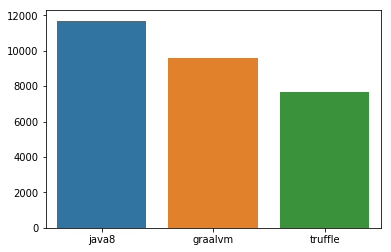

In [6]:
import seaborn as sns
results_java8_avg={k:avg(v) for k, v in results_java8.items()}
results_graalvm={k:v for k, v in benchmarks.items()}
results_graalvm_avg={k:avg(v) for k, v in benchmarks.items()}
results_truffle={k:v.sort_values(by='avg').head(1)['times'] for k, v in dataframes_clean.items()}
results_truffle_avg={k:v.sort_values(by='avg').head(1)['avg'] for k, v in dataframes_clean.items()}
results_truffle_worst={k:v.sort_values(by='avg').tail(1)['times'] for k, v in dataframes_clean.items()}
results_truffle_avg_worst={k:v.sort_values(by='avg').tail(1)['avg'] for k, v in dataframes_clean.items()}

In [37]:
target='avg'
program='binary_tree_11'

regex_str='.+\..+'
X=dataframes_clean[program].filter(regex=regex_str, axis=1)
y=dataframes_clean[program].loc[:, [target]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  
    
regressor = RandomForestRegressor()

#models[program]=regressor

cvf = regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)  

dft=pd.DataFrame()
dft['test']=pd.Series([x[0] for x in y_test.loc[:, [target]].values])
dft['pred']=pd.Series(list(y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print(len(cvf.feature_importances_))
#print(len(list(X_train)))
for (i,v) in enumerate(cvf.feature_importances_):
    print(v , list(X_train)[i])

#print(cvf.feature_importances_.reshape(list(X_train)))
    

#dot_data = tree.export_graphviz(cvf, out_file=None,  feature_names=list(X),   filled=True, rounded=True, special_characters=True)  
#graph = graphviz.Source(dot_data)
#graph 

Mean Absolute Error: 242.74919590643267
Mean Squared Error: 150576.30592244148
Root Mean Squared Error: 388.04162911012713
0.009901087660515418 And.evaluateExpression
0.012070084647085182 ArrayAccess.evaluateExpression
0.02483028726744587 ArrayLength.evaluateExpression
0.021649163193138515 ArrayRefValue.copyj
0.008369970751065823 ArrayRefValue.customToString
0.0045193975717844805 Assignment.evaluateStatement
0.007403799692133629 Block.evaluateStatement
0.009240542953240484 Block.evaluateStatementKeepContext
0.009819033746216505 BoolConstant.evaluateExpression
0.01877410389838405 BooleanValue.copyj
0.007967781058577112 BooleanValue.customToString
0.013345785862114573 ClassRef.compare
0.014568867521648354 Context.findBinding
0.004442231161152619 Context.findCurrentContext
0.01349990482934843 Division.evaluateExpression
0.006637760353215399 Equality.evaluateExpression
0.011687894722145209 Expression.evaluateExpression
0.009565788504354933 Expression.evaluateStatement
0.01337557304688127 F

/home/manuel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/manuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ValueError: sequence too large; cannot be greater than 32